<a href="https://colab.research.google.com/github/Romilsonlonan/Zubale-Data-Analysi/blob/main/zubale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO ZUBALE 

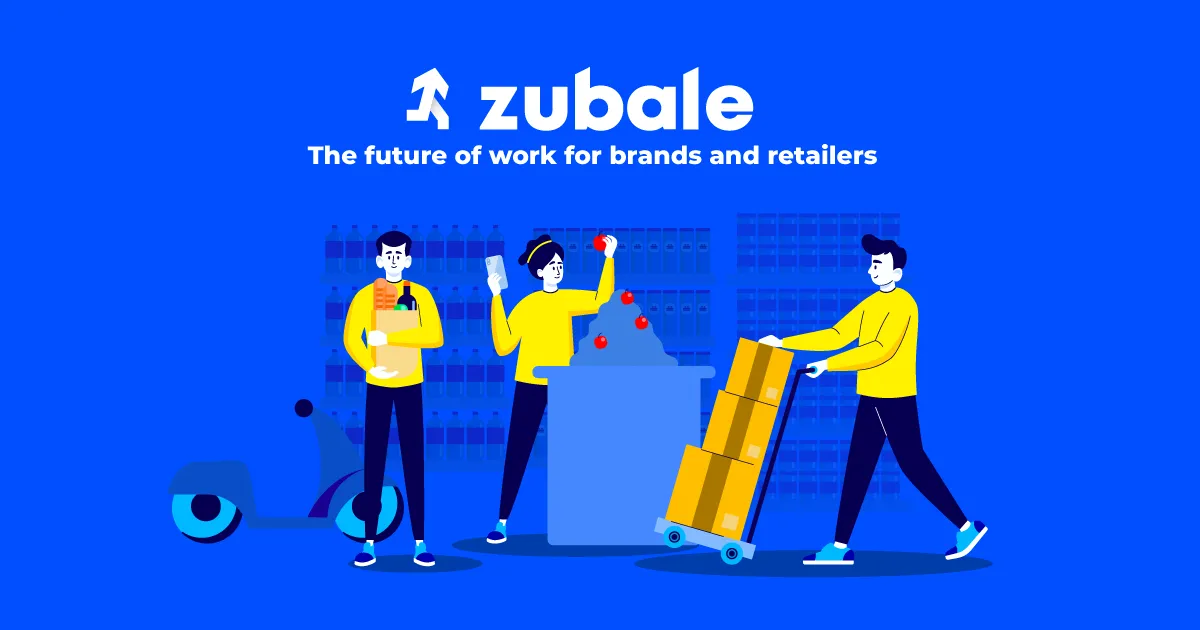

#TÍTULO: ANÁLISE EXPLORATÓRIA DE DADOS

#AUTOR: ROMILSON LUIS

Output: Relatório Relatório Zubale.html salvo em disco

* Prettydoc: html_pretty
* Theme: cayman
* Toc: yes
* highlith: github



# INTRODUÇÃO 

A elaboração de um relatório detalhado com informações estratégicas para o setor comercial é de vital importância para o sucesso de qualquer negócio. Nesse contexto, trabalharemos com um conjunto de dados cuidadosamente selecionados, que nos permitirão compreender melhor as necessidades das lojas, suas movimentações comerciais, clientes e tarefas internas e externas, no período entre os anos de 2022 a 2023. A partir dessas informações, poderemos identificar tendências, formular hipóteses e desenvolver estratégias alinhadas com os objetivos de nosso público-alvo. Para isso, é fundamental apresentar os dados de forma clara e analítica, com gráficos, tabelas e outros elementos visuais que facilitem a leitura e a compreensão do relatório.

# Bibliotecas importadas

* import pandas as pd
* import numpy as np
* import numpy as np
* import seaborn as sns
* import matplotlib.pyplot as plt
* import matplotlib_inline
* import datetime
* import zipfile
* from zipfile import ZipFile
* import seaborn as sns
* import matplotlib.pyplot as plt
* import plotly.graph_objects as go
* import plotly.express as px
* import plotly.graph_objects as go
* import plotly.express as px
* import bar_chart_race as bcr
* import matplotlib.ticker as mtick
* import pandas_profiling as pp
* from pandas_profiling import ProfileReport 

Total: 19

#Instalação de Pacotes

* !pip install bar_chart_race -q
* !pip install ffmpeg -q
* !pip install matplotlib-venn -q
* !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
* !pip install pandas-profiling -q

Total: 5

# Variáveis Importantes Criadas(dir())

* df 
* faltantes_percentual 
* df_2022_2023 
* loja_super_baratao  
* df_desempenho_bcr
* loja_mercado_marisol
* loja_mercado_preco_baixo
* mes_max_negado
* ordens_mensais
* ordens_mercado
* pedidos_por_ano_loja
* pedidos_unicos
* percentual_de_rejeição
* qtde_pedidos_unicos
* total_tarefas_lojas
* usuarios_dez_22_23
* var_percentual

Total: 17

In [224]:
#from google.colab import drive

In [319]:
from google.colab import files
uploaded = files.upload()

Saving zubale.ipynb to zubale.ipynb


In [225]:
# importando a biblioteca pandas 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import datetime
import zipfile
from zipfile import ZipFile

In [226]:
# Criar variável / processar todo o arquivo
df = pd.read_excel("/content/zubale.xlsx", 
                 decimal='.', 
                 header=0,
                 index_col=None,
                 na_values=False
                 )


In [227]:
# Lendo as duas primeiras linhas 
df.head(2)

Unnamed: 0  Date Date  User Phone Number  Brand ID  \
0           1 2023-02-28      5571981419571       706   
1           2 2023-02-28      5571981419571       706   

                   Brand Name     Store Name  Order Number  \
0  Atacado e Varejo Separador  Super Baratão   1125756.00%   
1  Atacado e Varejo Separador  Super Baratão   1125785.00%   

  Orden revisada (Yes / No) Orden aprobada (Yes / No)  Submission Amount  \
0                       Yes                       Yes              4.50%   
1                       Yes                       Yes              4.50%   

   Quantity SKU  Quantity Itens  
0        66.00%         120.00%  
1        35.00%          71.00%

In [228]:
# Ler as ultimas 2 linhas 
df.tail(2)

Unnamed: 0  Date Date  User Phone Number  Brand ID  \
11933       11934 2022-11-01      5579996887969       706   
11934       11935 2022-11-01      5579996887969       706   

                       Brand Name       Store Name  Order Number  \
11933  Atacado e Varejo Separador  Mercado Marisol   1101126.00%   
11934  Atacado e Varejo Separador  Mercado Marisol   1101193.00%   

      Orden revisada (Yes / No) Orden aprobada (Yes / No)  Submission Amount  \
11933                       Yes                       Yes              4.00%   
11934                       Yes                       Yes              4.00%   

       Quantity SKU  Quantity Itens  
11933         1.00%          10.00%  
11934        19.00%          38.00%

# Renomeando colunas

In [229]:
# Usando o método rename
df.rename(columns={'Unnamed: 0' : 'ID_Service',  
                   'User Phone Number' : 'User_Phone_Number', 
                   'Brand ID' : 'Brand_ID', 
                   'Brand Name' : 'Brand_Name', 
                   'Store Name' : 'Store_Name', 
                   'Order Number' : 'Order_Number', 
                   'Orden revisada (Yes / No)' : 'Orden_revisada(Yes/No)', 
                   'Orden aprobada (Yes / No)' : 'Orden_aprobada(Yes/No)', 
                   'Submission Amount' : 'Submission_Amount', 
                   'Quantity SKU' : 'Quantity_SKU', 
                   'Quantity Itens' : 'Quantity_Itens'}, inplace=True)

In [230]:
# Visualizando o conjunto de dados e coletando informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11935 entries, 0 to 11934
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Service              11935 non-null  int64         
 1   Date Date               11935 non-null  datetime64[ns]
 2   User_Phone_Number       11935 non-null  int64         
 3   Brand_ID                11935 non-null  int64         
 4   Brand_Name              11935 non-null  object        
 5   Store_Name              11935 non-null  object        
 6   Order_Number            11934 non-null  float64       
 7   Orden_revisada(Yes/No)  11935 non-null  object        
 8   Orden_aprobada(Yes/No)  11935 non-null  object        
 9   Submission_Amount       11935 non-null  float64       
 10  Quantity_SKU            11934 non-null  float64       
 11  Quantity_Itens          11934 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), ob

#Verificando valores missing

<Axes: >

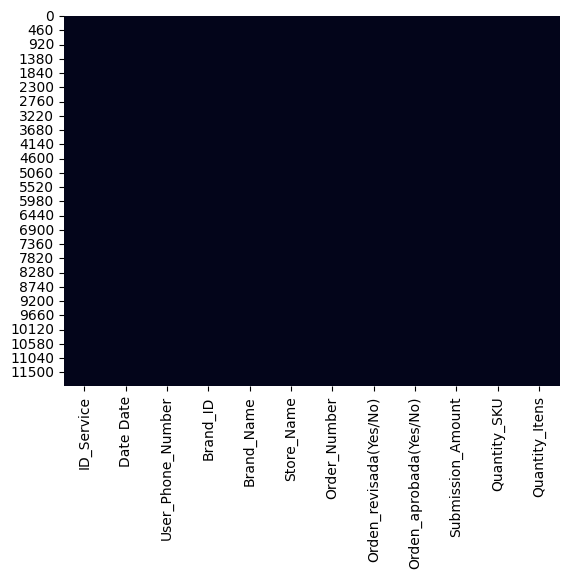

In [231]:
import seaborn as sns
# Verificando dados faltantes com gráfico 
sns.heatmap(df.isnull(), cbar=False)

In [232]:
# Somando os dados faltantes
df.isnull().sum()

ID_Service                0
Date Date                 0
User_Phone_Number         0
Brand_ID                  0
Brand_Name                0
Store_Name                0
Order_Number              1
Orden_revisada(Yes/No)    0
Orden_aprobada(Yes/No)    0
Submission_Amount         0
Quantity_SKU              1
Quantity_Itens            1
dtype: int64

In [233]:
# Percentual de dados faltantes 
faltantes_percentual = (df.isnull().sum() / len(df['Order_Number']))*100
print(faltantes_percentual)

ID_Service               0.00%
Date Date                0.00%
User_Phone_Number        0.00%
Brand_ID                 0.00%
Brand_Name               0.00%
Store_Name               0.00%
Order_Number             0.01%
Orden_revisada(Yes/No)   0.00%
Orden_aprobada(Yes/No)   0.00%
Submission_Amount        0.00%
Quantity_SKU             0.01%
Quantity_Itens           0.01%
dtype: float64


In [234]:
# O method ffill considera a visinhança dos dados e vai atribuir os valores aos dados ausentes 
df.fillna(method="ffill", inplace=True)

In [235]:
# Visualizando dados faltantes
df.isnull().sum()

ID_Service                0
Date Date                 0
User_Phone_Number         0
Brand_ID                  0
Brand_Name                0
Store_Name                0
Order_Number              0
Orden_revisada(Yes/No)    0
Orden_aprobada(Yes/No)    0
Submission_Amount         0
Quantity_SKU              0
Quantity_Itens            0
dtype: int64

In [236]:
# conjunto de informações de estatísticas descritivas
df.describe().T

count              mean            std  \
ID_Service        11935.00%          5968.00%       3445.48%   
User_Phone_Number 11935.00% 5571843704126.39% 3465064804.39%   
Brand_ID          11935.00%           706.00%          0.00%   
Order_Number      11935.00%       1128377.27%     494399.16%   
Submission_Amount 11935.00%             4.35%          0.23%   
Quantity_SKU      11935.00%            23.41%         21.77%   
Quantity_Itens    11935.00%           216.46%      12308.62%   

                                min               25%               50%  \
ID_Service                    1.00%          2984.50%          5968.00%   
User_Phone_Number 5511933849636.00% 5571983209257.00% 5571986677161.00%   
Brand_ID                    706.00%           706.00%           706.00%   
Order_Number                109.00%       1106581.00%       1112984.00%   
Submission_Amount             4.00%             4.00%             4.50%   
Quantity_SKU                  1.00%             8.00%            18.00%   
Quantity_Itens                1.00%            22.00%            44.00%   

                                75%               max  
ID_Service                 8951.50%         11935.00%  
User_Phone_Number 5571988751676.00% 5579996930108.00%  
Brand_ID                    706.00%           706.00%  
Order_Number            1119289.00%      11343282.00%  
Submission_Amount             4.50%             4.50%  
Quantity_SKU                 33.00%           868.00%  
Quantity_Itens               78.00%       1108641.00%

#Gerando novas colunas para data ano, mês e dia.

In [237]:
# Formatando colunas com datas
#df['Date Date'] = pd.to_datetime(df['Date Date'], format='%d/%m/%Y')

In [238]:
# Criando coluna ano 
df['Ano'] = pd.DatetimeIndex(df['Date Date']).year

In [239]:
# Criando coluna mês
df['Mes'] = pd.DatetimeIndex(df['Date Date']).month

In [240]:
# Criando coluna Dia
df['Dia'] = pd.DatetimeIndex(df['Date Date']).day

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11935 entries, 0 to 11934
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Service              11935 non-null  int64         
 1   Date Date               11935 non-null  datetime64[ns]
 2   User_Phone_Number       11935 non-null  int64         
 3   Brand_ID                11935 non-null  int64         
 4   Brand_Name              11935 non-null  object        
 5   Store_Name              11935 non-null  object        
 6   Order_Number            11935 non-null  float64       
 7   Orden_revisada(Yes/No)  11935 non-null  object        
 8   Orden_aprobada(Yes/No)  11935 non-null  object        
 9   Submission_Amount       11935 non-null  float64       
 10  Quantity_SKU            11935 non-null  float64       
 11  Quantity_Itens          11935 non-null  float64       
 12  Ano                     11935 non-null  int64 

# Consultando os nomes das lojas cadastradas





In [242]:
# Criando um dataframe com as colunas Store_Name e Brand_ID sem duplicatas
df_lojas = df[['Store_Name', 'Brand_ID']].drop_duplicates()

# Transformando o dataframe em um dicionário
lojas_dict = df_lojas.set_index('Store_Name')['Brand_ID'].to_dict()

# Imprimindo o resultado
print(lojas_dict)

{'Super Baratão': 706, 'Mercado Preço Baixo': 706, 'Mercado Marisol': 706}


# Realizando Quary nas lojas

In [243]:
# Atribuindo uma variável para consulta
loja_super_baratao = df[df["Store_Name"] == "Super Baratão"]
loja_super_baratao

ID_Service  Date Date  User_Phone_Number  Brand_ID  \
0               1 2023-02-28      5571981419571       706   
1               2 2023-02-28      5571981419571       706   
2               3 2023-02-28      5571981419571       706   
3               4 2023-02-28      5571981419571       706   
4               5 2023-02-28      5571981419571       706   
...           ...        ...                ...       ...   
11927       11928 2022-11-01      5575998128233       706   
11928       11929 2022-11-01      5575998128233       706   
11929       11930 2022-11-01      5575998128233       706   
11930       11931 2022-11-01      5575998128233       706   
11931       11932 2022-11-01      5575998128233       706   

                       Brand_Name     Store_Name  Order_Number  \
0      Atacado e Varejo Separador  Super Baratão   1125756.00%   
1      Atacado e Varejo Separador  Super Baratão   1125785.00%   
2      Atacado e Varejo Separador  Super Baratão   1125789.00%   
3      Atacado e Varejo Separador  Super Baratão   1125882.00%   
4      Atacado e Varejo Separador  Super Baratão   1125883.00%   
...                           ...            ...           ...   
11927  Atacado e Varejo Separador  Super Baratão   1101310.00%   
11928  Atacado e Varejo Separador  Super Baratão   1101315.00%   
11929  Atacado e Varejo Separador  Super Baratão   1101320.00%   
11930  Atacado e Varejo Separador  Super Baratão   1101322.00%   
11931  Atacado e Varejo Separador  Super Baratão   1101328.00%   

      Orden_revisada(Yes/No) Orden_aprobada(Yes/No)  Submission_Amount  \
0                        Yes                    Yes              4.50%   
1                        Yes                    Yes              4.50%   
2                        Yes                    Yes              4.50%   
3                        Yes                    Yes              4.50%   
4                        Yes                    Yes              4.50%   
...                      ...                    ...                ...   
11927                    Yes                    Yes              4.00%   
11928                    Yes                    Yes              4.00%   
11929                    Yes                    Yes              4.00%   
11930                    Yes                    Yes              4.00%   
11931                    Yes                    Yes              4.00%   

       Quantity_SKU  Quantity_Itens   Ano  Mes  Dia  
0            66.00%         120.00%  2023    2   28  
1            35.00%          71.00%  2023    2   28  
2            33.00%         124.00%  2023    2   28  
3            18.00%          33.00%  2023    2   28  
4            33.00%         100.00%  2023    2   28  
...             ...             ...   ...  ...  ...  
11927         4.00%          10.00%  2022   11    1  
11928        14.00%          18.00%  2022   11    1  
11929        13.00%          97.00%  2022   11    1  
11930        14.00%         103.00%  2022   11    1  
11931        18.00%          41.00%  2022   11    1  

[5767 rows x 15 columns]

# 1 - Quantos pedidos - únicos - a loja Super Baratão teve no mês de Dezembro?

In [244]:
# O objetivo do comando BETWEEN é selecionar os dados que fazem parte de um intervalo. Nesse caso, os pedidos de dezembro de 2022 e 2023
# Neste caso, ainda estamos no mês de abril logo não teremos dados para dezembro de 2023, mas fica como ilustração que podemos pegar varios 
# varios anos e comparar o mês que desejarmos.
pedidos_unicos = loja_super_baratao[(loja_super_baratao['Mes'] == 12) & (loja_super_baratao['Ano'].between(2022, 2023))]


In [245]:
qtde_pedidos_unicos = pedidos_unicos['Quantity_SKU'].nunique()
qtde_pedidos_unicos

104

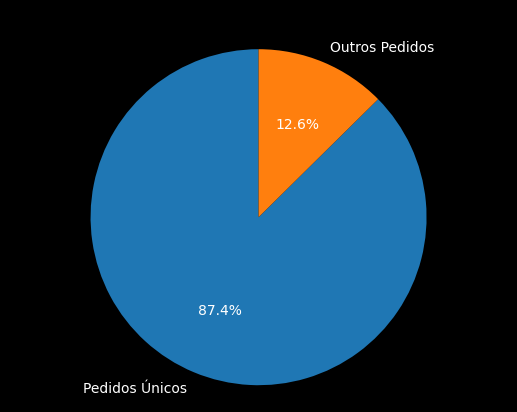

In [246]:
import matplotlib.pyplot as plt

labels = ['Pedidos Únicos', 'Outros Pedidos']
sizes = [qtde_pedidos_unicos, loja_super_baratao['Quantity_SKU'].nunique() - qtde_pedidos_unicos]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})
ax1.axis('equal')
plt.title('Quantidade de Pedidos Únicos em Dezembro de 2022-2023')
fig1.set_facecolor('black')
plt.show()

# 2 - Qual foi o mês com maior percentual de rejeição da loja Mercado Marisol?

In [247]:
# Atribuindo uma variável para consulta
ordens_mercado = df[(df['Store_Name'] == 'Mercado Marisol') &
                    (df['Ano'].isin([2022, 2023]))]

In [248]:
# Agrupando os dados por mês e ordem aprovada (Yes/No) e contando o número de ordens em cada categoria um DataFrame com o número de ordens aprovadas e negadas em cada mês
ordens_mensais = ordens_mercado.groupby(['Mes', 'Orden_aprobada(Yes/No)'])['ID_Service'].count().unstack()
ordens_mensais

Orden_aprobada(Yes/No)  No  Yes
Mes                            
1                       15  513
2                       17  579
11                      54  556
12                       5  567

In [249]:
# Calculando a porcentagem de ordens negadas em cada mês, o resultado será um DataFrame com o número total de ordens aprovadas e negadas em cada mês, e a porcentagem de ordens negadas

ordens_mensais['Percent_Negado'] = ordens_mensais['No'] / (ordens_mensais['No'] + ordens_mensais['Yes']) * 100

In [250]:
# Encontrando o mês com o maior percentual de ordens negadas.

mes_max_negado = ordens_mensais['Percent_Negado'].idxmax()
mes_max_negado

11

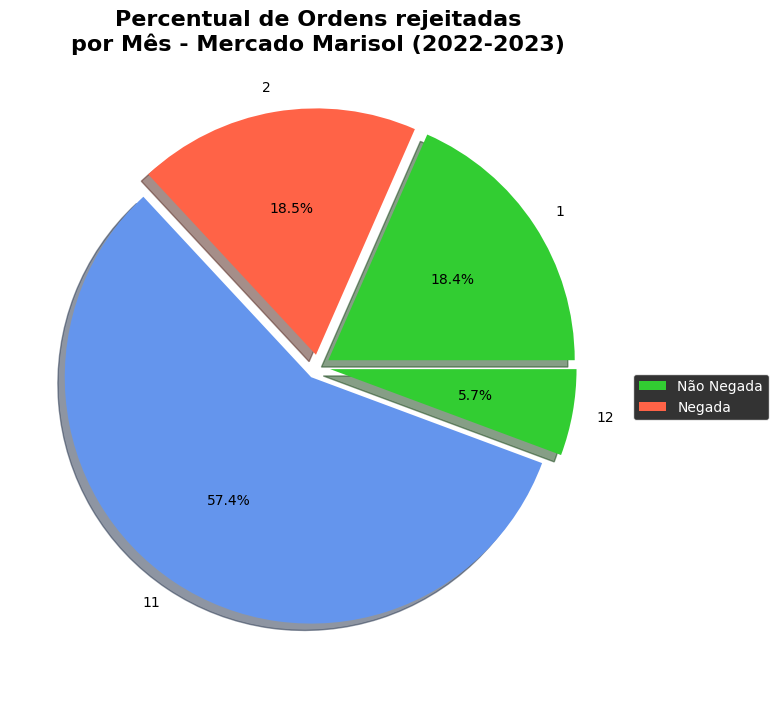

In [251]:
import matplotlib.pyplot as plt

# Acessando a coluna Percent_Negado do DataFrame ordens_mensais
percentual_de_rejeição = ordens_mensais['Percent_Negado']

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 8))
cores = ['limegreen', 'tomato', 'cornflowerblue']
explode = [0.05] * len(percentual_de_rejeição) # explode todas as fatias

# Desenho do gráfico de pizza (pie chart)
ax.pie(percentual_de_rejeição, labels=percentual_de_rejeição.index, autopct='%1.1f%%', explode=explode, colors=cores, shadow=True)

# Configuração de título, subtítulo e legenda
ax.set_title('Percentual de Ordens rejeitadas\npor Mês - Mercado Marisol (2022-2023)', fontsize=16, fontweight='bold', color='black')
ax.set_xlabel(f'Mês com maior percentual de ordens rejeitadas: {mes_max_negado}', fontsize=12, fontweight='bold', color='white')
ax.legend(['Não Negada', 'Negada'], bbox_to_anchor=(1, 0.5), facecolor='black', edgecolor='white', labelcolor='white')

# Configuração da cor de fundo do gráfico
ax.set_facecolor('black')

# Exibição do gráfico
plt.show()

# 3. Quantos usuários fizeram pedidos na loja Mercado Preço Baixo no mês de Dezembro?

In [252]:
import matplotlib.pyplot as plt

# Atribuindo uma variável para consulta
loja_mercado_preco_baixo = df[(df["Store_Name"] == "Mercado Preço Baixo") & 
(df["Ano"].isin([2022, 2023])) &
(df["Mes"] == 12)]

In [253]:
# número de pedidos de cada usuário no mês de dezembro
usuarios_dez_22_23 = loja_mercado_preco_baixo['Quantity_Itens'].nunique()
print(f"{usuarios_dez_22_23} usuários fizeram pedidos na loja Mercado Preço Baixo no mês de Dezembro entre os anos de 2022 e 2023.")


167 usuários fizeram pedidos na loja Mercado Preço Baixo no mês de Dezembro entre os anos de 2022 e 2023.


In [254]:
import plotly.graph_objs as go

values_2022 = loja_mercado_preco_baixo[loja_mercado_preco_baixo['Ano'] == 2022]['Quantity_Itens']
values_2023 = loja_mercado_preco_baixo[loja_mercado_preco_baixo['Ano'] == 2023]['Quantity_Itens']

if len(values_2022) > 0:
    # Criando lista com os valores para o histograma
    data = [len(values_2022), 0]
    labels = ['Dez/2022', 'Dez/2023']
    colors = ['#1f77b4', '#d6d6d6']
    if len(values_2023) == 0:
        labels[1] += " (sem vendas)" # Adiciona a especificação em vermelho
        
    fig = go.Figure()
    fig.add_trace(go.Pie(
        labels=labels, 
        values=data,
        hole=.3, # Define o raio do furo central da rosca
        marker=dict(colors=colors), # Define as cores das fatias
        textinfo='label+percent+value', # Define a informação que vai aparecer na rosca
        textposition='inside'
    ))

    fig.update_layout(
        title='167 pedidos em Dez/2022 e 0 pedidos em Dez/2023',
        title_font=dict(size=20, color='white'), # Define a cor e o tamanho da fonte do título
        font=dict(color='white'), # Define a cor da fonte das labels
        paper_bgcolor='black' # Define a cor de fundo do gráfico
    )

    fig.show()


# 4. Construa um gráfico (e compartilhe comigo!) com o total de pedidos de 2022 e 2023. O gráfico deve exibir o total de tarefas de cada loja individualmente

In [255]:
# Selecionar apenas pedidos dos anos de 2022 e 2023
df_2022_2023 = df[df['Ano'].isin([2022, 2023])]

In [256]:
import plotly.graph_objects as go
import plotly.express as px

# balanço de tarefas nas lojas Super Baratão, Mercado Preço Baixo e Mercado Marisol
loja_super_baratao = df_2022_2023[df_2022_2023['Store_Name'] == 'Super Baratão']
loja_mercado_preco_baixo = df_2022_2023[df_2022_2023['Store_Name'] == 'Mercado Preço Baixo']
loja_mercado_marisol = df_2022_2023[df_2022_2023['Store_Name'] == 'Mercado Marisol']

# Agrupando as tarefas feitas por cada loja em cada ano
total_tarefas_lojas = pd.concat([loja_super_baratao, loja_mercado_preco_baixo, loja_mercado_marisol]).groupby(['Store_Name','Ano']).agg({
'Order_Number': 'sum',
'Quantity_Itens': 'sum',
'Submission_Amount': 'sum'
})

# Resetando os índices do DataFrame
total_tarefas_lojas = total_tarefas_lojas.reset_index()

# Transformando o DataFrame em um formato apropriado para o histograma
df_hist = total_tarefas_lojas.melt(id_vars=['Store_Name', 'Ano'], value_vars=['Order_Number', 'Quantity_Itens', 'Submission_Amount'], var_name='variavel', value_name='valor')


In [257]:
# Removendo os separadores de milhar e transformando as strings em números reais
df_hist.loc[:, 'valor'] = df_hist['valor'].astype(str).str.replace(',', '').astype(float)

# Adicionando as percentagens aos dados para o tooltip
for store_name in df_hist['Store_Name'].unique():
    for ano in df_hist['Ano'].unique():
        idx = (df_hist['Store_Name'] == store_name) & (df_hist['Ano'] == ano)
        total_tarefas = df_hist[idx]['valor'].astype(float).sum()
        df_hist.loc[idx, 'percentual'] = df_hist[idx]['valor'].astype(float) / total_tarefas * 100
        df_hist.loc[idx, 'total_tarefas'] = total_tarefas


# Customizando os valores do histograma
if 'valor' in df_hist.columns:
    df_hist.loc[:, 'valor'] = df_hist['valor'].apply(lambda x: "{:,.0f}".format(x))


In [258]:
# Gerando o gráfico de barras
fig = go.Figure()

for metric in df_hist['variavel'].unique():
    metric_data = df_hist[df_hist['variavel'] == metric]
    
    fig.add_trace(go.Bar(
        x=metric_data['Store_Name'],
        y=metric_data['valor'],
        name=metric,
        customdata=metric_data[['Store_Name', 'Ano', 'total_tarefas', 'percentual']],
        hovertemplate='<b>%{customdata[0]}</b><br>' \
            'Ano: %{customdata[1]}<br>' \
            'Tarefas: %{customdata[2]:,.0f}<br>' \
            'Percentual: %{customdata[3]:.2f}%<br>' \
            '<extra></extra>',
        texttemplate='%{y} (%{customdata[3]:.2f}%)',
        textposition='inside'
    ))

# Configurando as opções de visualização interativa
fig.update_xaxes(title='Lojas')
fig.update_yaxes(title='Total de pedidos e tarefas')
fig.update_layout(barmode='stack')

# Adicionando informações sobre a loja e o ano ao topo do gráfico
fig.add_layout_image(
dict(
source="https://raw.githubusercontent.com/plotly/brand-assets/master/dash-logo-new.png",
xref="paper", yref="paper",
x=0.5, y=1.15,
sizex=0.3, sizey=0.3,
xanchor="center", yanchor="middle"
)
)

# Adicionando título à parte superior do gráfico
fig.update_layout(title={
    'text': "Total de tarefas por lojas",
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font':{'size':35, 'color': 'white'},
    
},
paper_bgcolor='black',
plot_bgcolor='black'
)

# Exibindo o gráfico
fig.show()



In [259]:
# Agrupando as quantidades de itens feitos por cada loja em cada ano
total_itens_lojas = pd.concat([loja_super_baratao, loja_mercado_preco_baixo, loja_mercado_marisol]).groupby(['Store_Name','Ano']).agg({
'Order_Number': 'count',
'Quantity_Itens': 'sum',
'Submission_Amount': 'sum'
}).reset_index()

# Plotando o histograma de rosca interativo
fig = px.sunburst(total_itens_lojas, path=['Ano', 'Store_Name'], values='Quantity_Itens', color='Store_Name')

# Definindo layout do gráfico
fig.update_layout(
    title={
        'text': 'Total de Itens vendidos $',
        'font': {'color': 'white', 'size':25}
    },
    paper_bgcolor='black',
    plot_bgcolor='black'
)

fig.show()


# 5. Identifique o % de variação de pedidos - únicos - por loja no período ano contra ano

In [260]:
pedidos_por_ano_loja = df[df['Ano'].isin([2022, 2023])].groupby(['Ano', 'Store_Name'])['Quantity_SKU'].nunique().unstack()
pedidos_por_ano_loja.columns = ['Mercado Marisol', 'Mercado Preço Baixo', 'Super Baratão']


In [261]:
# Usando o método pct_change() para calcular a variação percentual entre os dois anos
var_percentual = pedidos_por_ano_loja.pct_change(axis=1).iloc[:, 1:] * 100
pd.options.display.float_format = '{:.2f}%'.format
print(f"Variação percentual dos pedidos únicos por loja:\n{var_percentual}")

Variação percentual dos pedidos únicos por loja:
      Mercado Preço Baixo  Super Baratão
Ano                                     
2022               18.99%         15.96%
2023               19.05%          7.00%


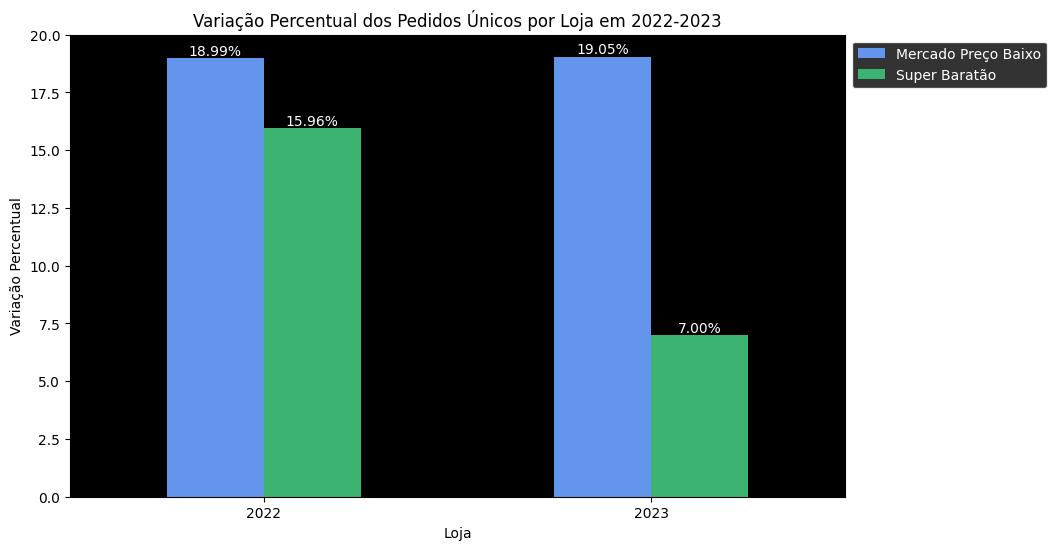

In [262]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Gerando o gráfico de barras detalhado

# Gera o histograma
ax = var_percentual.plot.bar(rot=0, figsize=(10,6), color=['cornflowerblue', 'mediumseagreen', 'orange'])
#ax.yaxis.set_major_formatter(yticks)
plt.xlabel('Loja', color='black')
plt.ylabel('Variação Percentual', color='black')
plt.title('Variação Percentual dos Pedidos Únicos por Loja em 2022-2023', color='black')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), facecolor='black', edgecolor='white', labelcolor='white')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:.2f}%'.format(val) for val in i.datavalues], color='white')
ax.set_facecolor('black')
ax.tick_params(colors='black')
if 'Mercado Marisol' not in pedidos_por_ano_loja.columns:
    pedidos_por_ano_loja['Mercado Marisol'] = 0
plt.show()

# Arquivos

In [ ]:
#Verificando todos os arquivos disponíveis no drive
#!ls '/content/drive/My Drive/'

# Gerando relatório

In [303]:
!pip uninstall visions==0.7.5 -y -q 

In [305]:
!apt-get install visions==0.7.4 -q 

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package visions=


In [306]:
!pip install ydata-profiling visions==0.7.4 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 28.5 MB/s eta 0:00:00
ERROR: Cannot install visions==0.7.4 and visions[type-image-path]==0.7.5 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [283]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q


  Preparing metadata (setup.py) ... done


In [284]:
!pip install pandas-profiling -q

In [311]:
#Importando as bibliotecas
import pandas_profiling as pp
from pandas_profiling import ProfileReport 

In [323]:
#Gerando relatório resumido
profile = ProfileReport(df, title="Relatório Zulebale", html={'style':{'full_width':True}})

In [324]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

![Projeto Zubale.html](data:text/html;base64,PCFkb2N0eXBlIGh0bWw+PGh0bWwgbGFuZz1lbj48aGVhZD48bWV0YSBjaGFyc2V0PXV0Zi04PjxtZXRhIG5hbWU9dmlld3BvcnQgY29udGVudD0id2lkdGg9ZGV2aWNlLXdpZHRoLCBpbml0aWFsLXNjYWxlPTEsIHNocmluay10by1maXQ9bm8iPjxtZXRhIG5hbWU9ZGVzY3JpcHRpb24gY29udGVudD0iUHJvZmlsZSByZXBvcnQgZ2VuZXJhdGVkIGJ5IFlEYXRhISBWaXNpdCB1cyBhdCBodHRwczovL3lkYXRhLmFpIj48bWV0YSBuYW1lPWF1dGhvciBjb250ZW50PSJZRGF0YSBhbmQgdGhlIG9wZW4gc291cmNlIGNvbW11bml0eS4iPjxtZXRhIG5hbWU9Z2VuZXJhdG9yIGNvbnRlbnQ9IlBhbmRhcyBQcm9maWxpbmcgdjMuNi42Ij48bWV0YSBuYW1lPXVybCBjb250ZW50PWh0dHBzOi8vZ2l0aHViLmNvbS95ZGF0YWFpL3BhbmRhcy1wcm9maWxpbmc+PG1ldGEgbmFtZT1kYXRlIGNvbnRlbnQ9IjIwMjMtMDQtMjggMjE6MzE6NDYuNzM5MTgwIj48dGl0bGU+UmVsYXTDs3JpbyBadWxlYmFsZTwvdGl0bGU+PHN0eWxlPgovKiEKICogQm9vdHN0cmFwIHYzLjMuNyAoaHR0cDovL2dldGJvb3RzdHJhcC5jb20pCiAqIENvcHlyaWdodCAyMDExLTIwMTYgVHdpdHRlciwgSW5jLgogKiBMaWNlbnNlZCB1bmRlciBNSVQgKGh0dHBzOi8vZ2l0aHViLmNvbS90d2JzL2Jvb3RzdHJhcC9ibG9iL21hc3Rlci9MSUNFTlNFKQogKi8vKiEgbm9ybWFsaXplLmNzcyB2My4wLjMgfCBNSVQgTGljZW5zZSB8IGdpdGh1Yi5jb20vbmVjb2xhcy9ub3JtYWxpemUuY3NzICovaHRtbHtmb250LWZhbWlseTpzYW5zLXNlcmlmOy13ZWJraXQtdGV4dC1zaXplLWFkanVzdDoxMDAlOy1tcy10ZXh0LXNpemUtYWRqdXN0OjEwMCV9Ym9keXttYXJnaW46MH1hcnRpY2xlLGFzaWRlLGRldGFpbHMsZmlnY2FwdGlvbixmaWd1cmUsZm9vdGVyLGhlYWRlcixoZ3JvdXAsbWFpbixtZW51LG5hdixzZWN0aW9uLHN1bW1hcnl7ZGlzcGxheTpibG9ja31hdWRpbyxjYW52YXMscHJvZ3Jlc3MsdmlkZW97ZGlzcGxheTppbmxpbmUtYmxvY2s7dmVydGljYWwtYWxpZ246YmFzZWxpbmV9YXVkaW86bm90KFtjb250cm9sc10pe2Rpc3BsYXk6bm9uZTtoZWlnaHQ6MH1baGlkZGVuXSx0ZW1wbGF0ZXtkaXNwbGF5Om5vbmV9YXtiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50fWE6YWN0aXZlLGE6aG92ZXJ7b3V0bGluZTowfWFiYnJbdGl0bGVde2JvcmRlci1ib3R0b206MXB4IGRvdHRlZH1iLHN0cm9uZ3tmb250LXdlaWdodDo3MDB9ZGZue2ZvbnQtc3R5bGU6aXRhbGljfWgxe21hcmdpbjouNjdlbSAwO2ZvbnQtc2l6ZToyZW19bWFya3tjb2xvcjojMDAwO2JhY2tncm91bmQ6I2ZmMH1zbWFsbHtmb250LXNpemU6ODAlfXN1YixzdXB7cG9zaXRpb246cmVsYXRpdmU7Zm9udC1zaXplOjc1JTtsaW5lLWhlaWdodDowO3ZlcnRpY2FsLWFsaWduOmJhc2VsaW5lfXN1cHt0b3A6LS41ZW19c3Vie2JvdHRvbTotLjI1ZW19aW1ne2JvcmRlcjowfXN2Zzpub3QoOnJvb3Qpe292ZXJmbG93OmhpZGRlbn1maWd1cmV7bWFyZ2luOjFlbSA0MHB4fWhye2hlaWdodDowOy13ZWJraXQtYm94LXNpemluZzpjb250ZW50LWJveDstbW96LWJveC1zaXppbmc6Y29udGVudC1ib3g7Ym94LXNpemluZzpjb250ZW50LWJveH1wcmV7b3ZlcmZsb3c6YXV0b31jb2RlLGtiZCxwcmUsc2FtcHtmb250LWZhbWlseTptb25vc3BhY2UsbW9ub3NwYWNlO2ZvbnQtc2l6ZToxZW19YnV0dG9uLGlucHV0LG9wdGdyb3VwLHNlbGVjdCx0ZXh0YXJlYXttYXJnaW46MDtmb250OmluaGVyaXQ7Y29sb3I6aW5oZXJpdH1idXR0b257b3ZlcmZsb3c6dmlzaWJsZX1idXR0b24sc2VsZWN0e3RleHQtdHJhbnNmb3JtOm5vbmV9YnV0dG9uLGh0bWwgaW5wdXRbdHlwZT1idXR0b25dLGlucHV0W3R5cGU9cmVzZXRdLGlucHV0W3R5cGU9c3VibWl0XXstd2Via2l0LWFwcGVhcmFuY2U6YnV0dG9uO2N1cnNvcjpwb2ludGVyfWJ1dHRvbltkaXNhYmxlZF0saHRtbCBpbnB1dFtkaXNhYmxlZF17Y3Vyc29yOmRlZmF1bHR9YnV0dG9uOjotbW96LWZvY3VzLWlubmVyLGlucHV0OjotbW96LWZvY3VzLWlubmVye3BhZGRpbmc6MDtib3JkZXI6MH1pbnB1dHtsaW5lLWhlaWdodDpub3JtYWx9aW5wdXRbdHlwZT1jaGVja2JveF0saW5wdXRbdHlwZT1yYWRpb117LXdlYmtpdC1ib3gtc2l6aW5nOmJvcmRlci1ib3g7LW1vei1ib3gtc2l6aW5nOmJvcmRlci1ib3g7Ym94LXNpemluZzpib3JkZXItYm94O3BhZGRpbmc6MH1pbnB1dFt0eXBlPW51bWJlcl06Oi13ZWJraXQtaW5uZXItc3Bpbi1idXR0b24saW5wdXRbdHlwZT1udW1iZXJdOjotd2Via2l0LW91dGVyLXNwaW4tYnV0dG9ue2hlaWdodDphdXRvfWlucHV0W3R5cGU9c2VhcmNoXXstd2Via2l0LWJveC1zaXppbmc6Y29udGVudC1ib3g7LW1vei1ib3gtc2l6aW5nOmNvbnRlbnQtYm94O2JveC1zaXppbmc6Y29udGVudC1ib3g7LXdlYmtpdC1hcHBlYXJhbmNlOnRleHRmaWVsZH1pbnB1dFt0eXBlPXNlYXJjaF06Oi13ZWJraXQtc2VhcmNoLWNhbmNlbC1idXR0b24saW5wdXRbdHlwZT1zZWFyY2hdOjotd2Via2l0LXNlYXJjaC1kZWNvcmF0aW9uey13ZWJraXQtYXBwZWFyYW5jZTpub25lfWZpZWxkc2V0e3BhZGRpbmc6LjM1ZW0gLjYyNWVtIC43NWVtO21hcmdpbjowIDJweDtib3JkZXI6MXB4IHNvbGlkIHNpbHZlcn1sZWdlbmR7cGFkZGluZzowO2JvcmRlcjowfXRleHRhcmVhe292ZXJmbG93OmF1dG99b3B0Z3JvdXB7Zm9udC13ZWlnaHQ6NzAwfXRhYmxle2JvcmRlci1zcGFjaW5nOjA7Ym9yZGVyLWNvbGxhcHNlOmNvbGxhcHNlfXRkLHRoe3BhZGRpbmc6MH0vKiEgU291cmNlOiBodHRwczovL2dpdGh1Yi5jb20vaDVicC9odG1sNS1ib2lsZXJwbGF0ZS9ibG9iL21hc3Rlci9zcmMvY3NzL21haW4uY3NzICovQG1lZGlhIHByaW50eyosOmFmdGVyLDpiZWZvcmV7Y29sb3I6IzAwMCFpbXBvcnRhbnQ7dGV4dC1zaGFkb3c6bm9uZSFpbXBvcnRhbnQ7YmFja2dyb3VuZDowIDAhaW1wb3J0YW50Oy13ZWJraXQtYm94LXNoYWRvdzpub25lIWltcG9ydGFudDtib3gtc2hhZG93Om5vbmUhaW1wb3J0YW50fWEsYTp2aXNpdGVke3RleHQtZGVjb3JhdGlvbjp1bmRlcmxpbmV9YVtocmVmXTphZnRlcntjb250ZW50OiIgKCIgYXR0cihocmVmKSAiKSJ9YWJiclt0aXRsZV06YWZ0ZXJ7Y29udGVudDoiICgiIGF0dHIodGl0bGUpICIpIn1hW2hyZWZePSJqYXZhc2NyaXB0OiJdOmFmdGVyLGFbaHJlZl49IiMiXTphZnRlcntjb250ZW50OiIifWJsb2NrcXVvdGUscHJle2JvcmRlcjoxcHggc29saWQgIzk5OTtwYWdlLWJyZWFrLWluc2lkZTphdm9pZH10aGVhZHtkaXNwbGF5OnRhYmxlLWhlYWRlci1ncm91cH1pbWcsdHJ7cGFnZS1icmVhay1pbnNpZGU6YXZvaWR9aW1ne21heC13aWR0aDoxMDAlIWltcG9ydGFudH1oMixoMyxwe29ycGhhbnM6Mzt3aWRvd3M6M31oMixoM3twYWdlLWJyZWFrLWFmdGVyOmF2b2lkfS5uYXZiYXJ7ZGlzcGxheTpub25lfS5idG4+LmNhcmV0LC5kcm9wdXA+LmJ0bj4uY2FyZXR7Ym9yZGVyLXRvcC1jb2xvcjojMDAwIWltcG9ydGFudH0ubGFiZWx7Ym9yZGVyOjFweCBzb2xpZCAjMDAwfS50YWJsZXtib3JkZXItY29sbGFwc2U6Y29sbGFwc2UhaW1wb3J0YW50fS50YWJsZSB0ZCwudGFibGUgdGh7YmFja2dyb3VuZC1jb2xvcjojZmZmIWltcG9ydGFudH0udGFibGUtYm9yZGVyZWQgdGQsLnRhYmxlLWJvcmRlcmVkIHRoe2JvcmRlcjoxcHggc29saWQgI2RkZCFpbXBvcnRhbnR9fUBmb250LWZhY2V7Zm9udC1mYW1pbHk6J0dseXBoaWNvbnMgSGFsZmxpbmdzJztzcmM6dXJsKC4uL2ZvbnRzL2dseXBoaWNvbnMtaGFsZmxpbmdzLXJlZ3VsYXIuZW90KTtzcmM6dXJsKC4uL2ZvbnRzL2dseXBoaWNvbnMtaGFsZmxpbmdzLXJlZ3VsYXIuZW90PyNpZWZpeCkgZm9ybWF0KCdlbWJlZGRlZC1vcGVudHlwZScpLHVybCguLi9mb250cy9nbHlwaGljb25zLWhhbGZsaW5ncy1yZWd1bGFyLndvZmYyKSBmb3JtYXQoJ3dvZmYyJyksdXJsKC4uL2ZvbnRzL2dseXBoaWNvbnMtaGFsZmxpbmdzLXJlZ3VsYXIud29mZikgZm9ybWF0KCd3b2ZmJyksdXJsKC4uL2ZvbnRzL2dseXBoaWNvbnMtaGFsZmxpbmdzLXJlZ3VsYXIudHRmKSBmb3JtYXQoJ3RydWV0eXBlJyksdXJsKC4uL2ZvbnRzL2dseXBoaWNvbnMtaGFsZmxpbmdzLXJlZ3VsYXIuc3ZnI2dseXBoaWNvbnNfaGFsZmxpbmdzcmVndWxhcikgZm9ybWF0KCdzdmcnKX0uZ2x5cGhpY29ue3Bvc2l0aW9uOnJlbGF0aXZlO3RvcDoxcHg7ZGlzcGxheTppbmxpbmUtYmxvY2s7Zm9udC1mYW1pbHk6J0dseXBoaWNvbnMgSGFsZmxpbmdzJztmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDo0MDA7bGluZS1oZWlnaHQ6MTstd2Via2l0LWZvbnQtc21vb3RoaW5nOmFudGlhbGlhc2VkOy1tb3otb3N4LWZvbnQtc21vb3RoaW5nOmdyYXlzY2FsZX0uZ2x5cGhpY29uLWFzdGVyaXNrOmJlZm9yZXtjb250ZW50OiJcMDAyYSJ9LmdseXBoaWNvbi1wbHVzOmJlZm9yZXtjb250ZW50OiJcMDAyYiJ9LmdseXBoaWNvbi1ldXI6YmVmb3JlLC5nbHlwaGljb24tZXVybzpiZWZvcmV7Y29udGVudDoiXDIwYWMifS5nbHlwaGljb24tbWludXM6YmVmb3Jle2NvbnRlbnQ6IlwyMjEyIn0uZ2x5cGhpY29uLWNsb3VkOmJlZm9yZXtjb250ZW50OiJcMjYwMSJ9LmdseXBoaWNvbi1lbnZlbG9wZTpiZWZvcmV7Y29udGVudDoiXDI3MDkifS5nbHlwaGljb24tcGVuY2lsOmJlZm9yZXtjb250ZW50OiJcMjcwZiJ9LmdseXBoaWNvbi1nbGFzczpiZWZvcmV7Y29udGVudDoiXGUwMDEifS5nbHlwaGljb24tbXVzaWM6YmVmb3Jle2NvbnRlbnQ6IlxlMDAyIn0uZ2x5cGhpY29uLXNlYXJjaDpiZWZvcmV7Y29udGVudDoiXGUwMDMifS5nbHlwaGljb24taGVhcnQ6YmVmb3Jle2NvbnRlbnQ6IlxlMDA1In0uZ2x5cGhpY29uLXN0YXI6YmVmb3Jle2NvbnRlbnQ6IlxlMDA2In0uZ2x5cGhpY29uLXN0YXItZW1wdHk6YmVmb3Jle2NvbnRlbnQ6IlxlMDA3In0uZ2x5cGhpY29uLXVzZXI6YmVmb3Jle2NvbnRlbnQ6IlxlMDA4In0uZ2x5cGhpY29uLWZpbG06YmVmb3Jle2NvbnRlbnQ6IlxlMDA5In0uZ2x5cGhpY29uLXRoLWxhcmdlOmJlZm9yZXtjb250ZW50OiJcZTAxMCJ9LmdseXBoaWNvbi10aDpiZWZvcmV7Y29udGVudDoiXGUwMTEifS5nbHlwaGljb24tdGgtbGlzdDpiZWZvcmV7Y29udGVudDoiXGUwMTIifS5nbHlwaGljb24tb2s6YmVmb3Jle2NvbnRlbnQ6IlxlMDEzIn0uZ2x5cGhpY29uLXJlbW92ZTpiZWZvcmV7Y29udGVudDoiXGUwMTQifS5nbHlwaGljb24tem9vbS1pbjpiZWZvcmV7Y29udGVudDoiXGUwMTUifS5nbHlwaGljb24tem9vbS1vdXQ6YmVmb3Jle2NvbnRlbnQ6IlxlMDE2In0uZ2x5cGhpY29uLW9mZjpiZWZvcmV7Y29udGVudDoiXGUwMTcifS5nbHlwaGljb24tc2lnbmFsOmJlZm9yZXtjb250ZW50OiJcZTAxOCJ9LmdseXBoaWNvbi1jb2c6YmVmb3Jle2NvbnRlbnQ6IlxlMDE5In0uZ2x5cGhpY29uLXRyYXNoOmJlZm9yZXtjb250ZW50OiJcZTAyMCJ9LmdseXBoaWNvbi1ob21lOmJlZm9yZXtjb250ZW50OiJcZTAyMSJ9LmdseXBoaWNvbi1maWxlOmJlZm9yZXtjb250ZW50OiJcZTAyMiJ9LmdseXBoaWNvbi10aW1lOmJlZm9yZXtjb250ZW50OiJcZTAyMyJ9LmdseXBoaWNvbi1yb2FkOmJlZm9yZXtjb250ZW50OiJcZTAyNCJ9LmdseXBoaWNvbi1kb3dubG9hZC1hbHQ6YmVmb3Jle2NvbnRlbnQ6IlxlMDI1In0uZ2x5cGhpY29uLWRvd25sb2FkOmJlZm9yZXtjb250ZW50OiJcZTAyNiJ9LmdseXBoaWNvbi11cGxvYWQ6YmVmb3Jle2NvbnRlbnQ6IlxlMDI3In0uZ2x5cGhpY29uLWluYm94OmJlZm9yZXtjb250ZW50OiJcZTAyOCJ9LmdseXBoaWNvbi1wbGF5LWNpcmNsZTpiZWZvcmV7Y29udGVudDoiXGUwMjkifS5nbHlwaGljb24tcmVwZWF0OmJlZm9yZXtjb250ZW50OiJcZTAzMCJ9LmdseXBoaWNvbi1yZWZyZXNoOmJlZm9yZXtjb250ZW50OiJcZTAzMSJ9LmdseXBoaWNvbi1saXN0LWFsdDpiZWZvcmV7Y29udGVudDoiXGUwMzIifS5nbHlwaGljb24tbG9jazpiZWZvcmV7Y29udGVudDoiXGUwMzMifS5nbHlwaGljb24tZmxhZzpiZWZvcmV7Y29udGVudDoiXGUwMzQifS5nbHlwaGljb24taGVhZHBob25lczpiZWZvcmV7Y29udGVudDoiXGUwMzUifS5nbHlwaGljb24tdm9sdW1lLW9mZjpiZWZvcmV7Y29udGVudDoiXGUwMzYifS5nbHlwaGljb24tdm9sdW1lLWRvd246YmVmb3Jle2NvbnRlbnQ6IlxlMDM3In0uZ2x5cGhpY29uLXZvbHVtZS11cDpiZWZvcmV7Y29udGVudDoiXGUwMzgifS5nbHlwaGljb24tcXJjb2RlOmJlZm9yZXtjb250ZW50OiJcZTAzOSJ9LmdseXBoaWNvbi1iYXJjb2RlOmJlZm9yZXtjb250ZW50OiJcZTA0MCJ9LmdseXBoaWNvbi10YWc6YmVmb3Jle2NvbnRlbnQ6IlxlMDQxIn0uZ2x5cGhpY29uLXRhZ3M6YmVmb3Jle2NvbnRlbnQ6IlxlMDQyIn0uZ2x5cGhpY29uLWJvb2s6YmVmb3Jle2NvbnRlbnQ6IlxlMDQzIn0uZ2x5cGhpY29uLWJvb2ttYXJrOmJlZm9yZXtjb250ZW50OiJcZTA0NCJ9LmdseXBoaWNvbi1wcmludDpiZWZvcmV7Y29udGVudDoiXGUwNDUifS5nbHlwaGljb24tY2FtZXJhOmJlZm9yZXtjb250ZW50OiJcZTA0NiJ9LmdseXBoaWNvbi1mb250OmJlZm9yZXtjb250ZW50OiJcZTA0NyJ9LmdseXBoaWNvbi1ib2xkOmJlZm9yZXtjb250ZW50OiJcZTA0OCJ9LmdseXBoaWNvbi1pdGFsaWM6YmVmb3Jle2NvbnRlbnQ6IlxlMDQ5In0uZ2x5cGhpY29uLXRleHQtaGVpZ2h0OmJlZm9yZXtjb250ZW50OiJcZTA1MCJ9LmdseXBoaWNvbi10ZXh0LXdpZHRoOmJlZm9yZXtjb250ZW50OiJcZTA1MSJ9LmdseXBoaWNvbi1hbGlnbi1sZWZ0OmJlZm9yZXtjb250ZW50OiJcZTA1MiJ9LmdseXBoaWNvbi1hbGlnbi1jZW50ZXI6YmVmb3Jle2NvbnRlbnQ6IlxlMDUzIn0uZ2x5cGhpY29uLWFsaWduLXJpZ2h0OmJlZm9yZXtjb250ZW50OiJcZTA1NCJ9LmdseXBoaWNvbi1hbGlnbi1qdXN0aWZ5OmJlZm9yZXtjb250ZW50OiJcZTA1NSJ9LmdseXBoaWNvbi1saXN0OmJlZm9yZXtjb250ZW50OiJcZTA1NiJ9LmdseXBoaWNvbi1pbmRlbnQtbGVmdDpiZWZvcmV7Y29udGVudDoiXGUwNTcifS5nbHlwaGljb24taW5kZW50LXJpZ2h0OmJlZm9yZXtjb250ZW50OiJcZTA1OCJ9LmdseXBoaWNvbi1mYWNldGltZS12aWRlbzpiZWZvcmV7Y29udGVudDoiXGUwNTkifS5nbHlwaGljb24tcGljdHVyZTpiZWZvcmV7Y29udGVudDoiXGUwNjAifS5nbHlwaGljb24tbWFwLW1hcmtlcjpiZWZvcmV7Y29udGVudDoiXGUwNjIifS5nbHlwaGljb24tYWRqdXN0OmJlZm9yZXtjb250ZW50OiJcZTA2MyJ9LmdseXBoaWNvbi10aW50OmJlZm9yZXtjb250ZW50OiJcZTA2NCJ9LmdseXBoaWNvbi1lZGl0OmJlZm9yZXtjb250ZW50OiJcZTA2NSJ9LmdseXBoaWNvbi1zaGFyZTpiZWZvcmV7Y29udGVudDoiXGUwNjYifS5nbHlwaGljb24tY2hlY2s6YmVmb3Jle2NvbnRlbnQ6IlxlMDY3In0uZ2x5cGhpY29uLW1vdmU6YmVmb3Jle2NvbnRlbnQ6IlxlMDY4In0uZ2x5cGhpY29uLXN0ZXAtYmFja3dhcmQ6YmVmb3Jle2NvbnRlbnQ6IlxlMDY5In0uZ2x5cGhpY29uLWZhc3QtYmFja3dhcmQ6YmVmb3Jle2NvbnRlbnQ6IlxlMDcwIn0uZ2x5cGhpY29uLWJhY2t3YXJkOmJlZm9yZXtjb250ZW50OiJcZTA3MSJ9LmdseXBoaWNvbi1wbGF5OmJlZm9yZXtjb250ZW50OiJcZTA3MiJ9LmdseXBoaWNvbi1wYXVzZTpiZWZvcmV7Y29udGVudDoiXGUwNzMifS5nbHlwaGljb24tc3RvcDpiZWZvcmV7Y29udGVudDoiXGUwNzQifS5nbHlwaGljb24tZm9yd2FyZDpiZWZvcmV7Y29udGVudDoiXGUwNzUifS5nbHlwaGljb24tZmFzdC1mb3J3YXJkOmJlZm9yZXtjb250ZW50OiJcZTA3NiJ9LmdseXBoaWNvbi1zdGVwLWZvcndhcmQ6YmVmb3Jle2NvbnRlbnQ6IlxlMDc3In0uZ2x5cGhpY29uLWVqZWN0OmJlZm9yZXtjb250ZW50OiJcZTA3OCJ9LmdseXBoaWNvbi1jaGV2cm9uLWxlZnQ6YmVmb3Jle2NvbnRlbnQ6IlxlMDc5In0uZ2x5cGhpY29uLWNoZXZyb24tcmlnaHQ6YmVmb3Jle2NvbnRlbnQ6IlxlMDgwIn0uZ2x5cGhpY29uLXBsdXMtc2lnbjpiZWZvcmV7Y29udGVudDoiXGUwODEifS5nbHlwaGljb24tbWludXMtc2lnbjpiZWZvcmV7Y29udGVudDoiXGUwODIifS5nbHlwaGljb24tcmVtb3ZlLXNpZ246YmVmb3Jle2NvbnRlbnQ6IlxlMDgzIn0uZ2x5cGhpY29uLW9rLXNpZ246YmVmb3Jle2NvbnRlbnQ6IlxlMDg0In0uZ2x5cGhpY29uLXF1ZXN0aW9uLXNpZ246YmVmb3Jle2NvbnRlbnQ6IlxlMDg1In0uZ2x5cGhpY29uLWluZm8tc2lnbjpiZWZvcmV7Y29udGVudDoiXGUwODYifS5nbHlwaGljb24tc2NyZWVuc2hvdDpiZWZvcmV7Y29udGVudDoiXGUwODcifS5nbHlwaGljb24tcmVtb3ZlLWNpcmNsZTpiZWZvcmV7Y29udGVudDoiXGUwODgifS5nbHlwaGljb24tb2stY2lyY2xlOmJlZm9yZXtjb250ZW50OiJcZTA4OSJ9LmdseXBoaWNvbi1iYW4tY2lyY2xlOmJlZm9yZXtjb250ZW50OiJcZTA5MCJ9LmdseXBoaWNvbi1hcnJvdy1sZWZ0OmJlZm9yZXtjb250ZW50OiJcZTA5MSJ9LmdseXBoaWNvbi1hcnJvdy1yaWdodDpiZWZvcmV7Y29udGVudDoiXGUwOTIifS5nbHlwaGljb24tYXJyb3ctdXA6YmVmb3Jle2NvbnRlbnQ6IlxlMDkzIn0uZ2x5cGhpY29uLWFycm93LWRvd246YmVmb3Jle2NvbnRlbnQ6IlxlMDk0In0uZ2x5cGhpY29uLXNoYXJlLWFsdDpiZWZvcmV7Y29udGVudDoiXGUwOTUifS5nbHlwaGljb24tcmVzaXplLWZ1bGw6YmVmb3Jle2NvbnRlbnQ6IlxlMDk2In0uZ2x5cGhpY29uLXJlc2l6ZS1zbWFsbDpiZWZvcmV7Y29udGVudDoiXGUwOTcifS5nbHlwaGljb24tZXhjbGFtYXRpb24tc2lnbjpiZWZvcmV7Y29udGVudDoiXGUxMDEifS5nbHlwaGljb24tZ2lmdDpiZWZvcmV7Y29udGVudDoiXGUxMDIifS5nbHlwaGljb24tbGVhZjpiZWZvcmV7Y29udGVudDoiXGUxMDMifS5nbHlwaGljb24tZmlyZTpiZWZvcmV7Y29udGVudDoiXGUxMDQifS5nbHlwaGljb24tZXllLW9wZW46YmVmb3Jle2NvbnRlbnQ6IlxlMTA1In0uZ2x5cGhpY29uLWV5ZS1jbG9zZTpiZWZvcmV7Y29udGVudDoiXGUxMDYifS5nbHlwaGljb24td2FybmluZy1zaWduOmJlZm9yZXtjb250ZW50OiJcZTEwNyJ9LmdseXBoaWNvbi1wbGFuZTpiZWZvcmV7Y29udGVudDoiXGUxMDgifS5nbHlwaGljb24tY2FsZW5kYXI6YmVmb3Jle2NvbnRlbnQ6IlxlMTA5In0uZ2x5cGhpY29uLXJhbmRvbTpiZWZvcmV7Y29udGVudDoiXGUxMTAifS5nbHlwaGljb24tY29tbWVudDpiZWZvcmV7Y29udGVudDoiXGUxMTEifS5nbHlwaGljb24tbWFnbmV0OmJlZm9yZXtjb250ZW50OiJcZTExMiJ9LmdseXBoaWNvbi1jaGV2cm9uLXVwOmJlZm9yZXtjb250ZW50OiJcZTExMyJ9LmdseXBoaWNvbi1jaGV2cm9uLWRvd246YmVmb3Jle2NvbnRlbnQ6IlxlMTE0In0uZ2x5cGhpY29uLXJldHdlZXQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTE1In0uZ2x5cGhpY29uLXNob3BwaW5nLWNhcnQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTE2In0uZ2x5cGhpY29uLWZvbGRlci1jbG9zZTpiZWZvcmV7Y29udGVudDoiXGUxMTcifS5nbHlwaGljb24tZm9sZGVyLW9wZW46YmVmb3Jle2NvbnRlbnQ6IlxlMTE4In0uZ2x5cGhpY29uLXJlc2l6ZS12ZXJ0aWNhbDpiZWZvcmV7Y29udGVudDoiXGUxMTkifS5nbHlwaGljb24tcmVzaXplLWhvcml6b250YWw6YmVmb3Jle2NvbnRlbnQ6IlxlMTIwIn0uZ2x5cGhpY29uLWhkZDpiZWZvcmV7Y29udGVudDoiXGUxMjEifS5nbHlwaGljb24tYnVsbGhvcm46YmVmb3Jle2NvbnRlbnQ6IlxlMTIyIn0uZ2x5cGhpY29uLWJlbGw6YmVmb3Jle2NvbnRlbnQ6IlxlMTIzIn0uZ2x5cGhpY29uLWNlcnRpZmljYXRlOmJlZm9yZXtjb250ZW50OiJcZTEyNCJ9LmdseXBoaWNvbi10aHVtYnMtdXA6YmVmb3Jle2NvbnRlbnQ6IlxlMTI1In0uZ2x5cGhpY29uLXRodW1icy1kb3duOmJlZm9yZXtjb250ZW50OiJcZTEyNiJ9LmdseXBoaWNvbi1oYW5kLXJpZ2h0OmJlZm9yZXtjb250ZW50OiJcZTEyNyJ9LmdseXBoaWNvbi1oYW5kLWxlZnQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTI4In0uZ2x5cGhpY29uLWhhbmQtdXA6YmVmb3Jle2NvbnRlbnQ6IlxlMTI5In0uZ2x5cGhpY29uLWhhbmQtZG93bjpiZWZvcmV7Y29udGVudDoiXGUxMzAifS5nbHlwaGljb24tY2lyY2xlLWFycm93LXJpZ2h0OmJlZm9yZXtjb250ZW50OiJcZTEzMSJ9LmdseXBoaWNvbi1jaXJjbGUtYXJyb3ctbGVmdDpiZWZvcmV7Y29udGVudDoiXGUxMzIifS5nbHlwaGljb24tY2lyY2xlLWFycm93LXVwOmJlZm9yZXtjb250ZW50OiJcZTEzMyJ9LmdseXBoaWNvbi1jaXJjbGUtYXJyb3ctZG93bjpiZWZvcmV7Y29udGVudDoiXGUxMzQifS5nbHlwaGljb24tZ2xvYmU6YmVmb3Jle2NvbnRlbnQ6IlxlMTM1In0uZ2x5cGhpY29uLXdyZW5jaDpiZWZvcmV7Y29udGVudDoiXGUxMzYifS5nbHlwaGljb24tdGFza3M6YmVmb3Jle2NvbnRlbnQ6IlxlMTM3In0uZ2x5cGhpY29uLWZpbHRlcjpiZWZvcmV7Y29udGVudDoiXGUxMzgifS5nbHlwaGljb24tYnJpZWZjYXNlOmJlZm9yZXtjb250ZW50OiJcZTEzOSJ9LmdseXBoaWNvbi1mdWxsc2NyZWVuOmJlZm9yZXtjb250ZW50OiJcZTE0MCJ9LmdseXBoaWNvbi1kYXNoYm9hcmQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTQxIn0uZ2x5cGhpY29uLXBhcGVyY2xpcDpiZWZvcmV7Y29udGVudDoiXGUxNDIifS5nbHlwaGljb24taGVhcnQtZW1wdHk6YmVmb3Jle2NvbnRlbnQ6IlxlMTQzIn0uZ2x5cGhpY29uLWxpbms6YmVmb3Jle2NvbnRlbnQ6IlxlMTQ0In0uZ2x5cGhpY29uLXBob25lOmJlZm9yZXtjb250ZW50OiJcZTE0NSJ9LmdseXBoaWNvbi1wdXNocGluOmJlZm9yZXtjb250ZW50OiJcZTE0NiJ9LmdseXBoaWNvbi11c2Q6YmVmb3Jle2NvbnRlbnQ6IlxlMTQ4In0uZ2x5cGhpY29uLWdicDpiZWZvcmV7Y29udGVudDoiXGUxNDkifS5nbHlwaGljb24tc29ydDpiZWZvcmV7Y29udGVudDoiXGUxNTAifS5nbHlwaGljb24tc29ydC1ieS1hbHBoYWJldDpiZWZvcmV7Y29udGVudDoiXGUxNTEifS5nbHlwaGljb24tc29ydC1ieS1hbHBoYWJldC1hbHQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTUyIn0uZ2x5cGhpY29uLXNvcnQtYnktb3JkZXI6YmVmb3Jle2NvbnRlbnQ6IlxlMTUzIn0uZ2x5cGhpY29uLXNvcnQtYnktb3JkZXItYWx0OmJlZm9yZXtjb250ZW50OiJcZTE1NCJ9LmdseXBoaWNvbi1zb3J0LWJ5LWF0dHJpYnV0ZXM6YmVmb3Jle2NvbnRlbnQ6IlxlMTU1In0uZ2x5cGhpY29uLXNvcnQtYnktYXR0cmlidXRlcy1hbHQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTU2In0uZ2x5cGhpY29uLXVuY2hlY2tlZDpiZWZvcmV7Y29udGVudDoiXGUxNTcifS5nbHlwaGljb24tZXhwYW5kOmJlZm9yZXtjb250ZW50OiJcZTE1OCJ9LmdseXBoaWNvbi1jb2xsYXBzZS1kb3duOmJlZm9yZXtjb250ZW50OiJcZTE1OSJ9LmdseXBoaWNvbi1jb2xsYXBzZS11cDpiZWZvcmV7Y29udGVudDoiXGUxNjAifS5nbHlwaGljb24tbG9nLWluOmJlZm9yZXtjb250ZW50OiJcZTE2MSJ9LmdseXBoaWNvbi1mbGFzaDpiZWZvcmV7Y29udGVudDoiXGUxNjIifS5nbHlwaGljb24tbG9nLW91dDpiZWZvcmV7Y29udGVudDoiXGUxNjMifS5nbHlwaGljb24tbmV3LXdpbmRvdzpiZWZvcmV7Y29udGVudDoiXGUxNjQifS5nbHlwaGljb24tcmVjb3JkOmJlZm9yZXtjb250ZW50OiJcZTE2NSJ9LmdseXBoaWNvbi1zYXZlOmJlZm9yZXtjb250ZW50OiJcZTE2NiJ9LmdseXBoaWNvbi1vcGVuOmJlZm9yZXtjb250ZW50OiJcZTE2NyJ9LmdseXBoaWNvbi1zYXZlZDpiZWZvcmV7Y29udGVudDoiXGUxNjgifS5nbHlwaGljb24taW1wb3J0OmJlZm9yZXtjb250ZW50OiJcZTE2OSJ9LmdseXBoaWNvbi1leHBvcnQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTcwIn0uZ2x5cGhpY29uLXNlbmQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTcxIn0uZ2x5cGhpY29uLWZsb3BweS1kaXNrOmJlZm9yZXtjb250ZW50OiJcZTE3MiJ9LmdseXBoaWNvbi1mbG9wcHktc2F2ZWQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTczIn0uZ2x5cGhpY29uLWZsb3BweS1yZW1vdmU6YmVmb3Jle2NvbnRlbnQ6IlxlMTc0In0uZ2x5cGhpY29uLWZsb3BweS1zYXZlOmJlZm9yZXtjb250ZW50OiJcZTE3NSJ9LmdseXBoaWNvbi1mbG9wcHktb3BlbjpiZWZvcmV7Y29udGVudDoiXGUxNzYifS5nbHlwaGljb24tY3JlZGl0LWNhcmQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTc3In0uZ2x5cGhpY29uLXRyYW5zZmVyOmJlZm9yZXtjb250ZW50OiJcZTE3OCJ9LmdseXBoaWNvbi1jdXRsZXJ5OmJlZm9yZXtjb250ZW50OiJcZTE3OSJ9LmdseXBoaWNvbi1oZWFkZXI6YmVmb3Jle2NvbnRlbnQ6IlxlMTgwIn0uZ2x5cGhpY29uLWNvbXByZXNzZWQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTgxIn0uZ2x5cGhpY29uLWVhcnBob25lOmJlZm9yZXtjb250ZW50OiJcZTE4MiJ9LmdseXBoaWNvbi1waG9uZS1hbHQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTgzIn0uZ2x5cGhpY29uLXRvd2VyOmJlZm9yZXtjb250ZW50OiJcZTE4NCJ9LmdseXBoaWNvbi1zdGF0czpiZWZvcmV7Y29udGVudDoiXGUxODUifS5nbHlwaGljb24tc2QtdmlkZW86YmVmb3Jle2NvbnRlbnQ6IlxlMTg2In0uZ2x5cGhpY29uLWhkLXZpZGVvOmJlZm9yZXtjb250ZW50OiJcZTE4NyJ9LmdseXBoaWNvbi1zdWJ0aXRsZXM6YmVmb3Jle2NvbnRlbnQ6IlxlMTg4In0uZ2x5cGhpY29uLXNvdW5kLXN0ZXJlbzpiZWZvcmV7Y29udGVudDoiXGUxODkifS5nbHlwaGljb24tc291bmQtZG9sYnk6YmVmb3Jle2NvbnRlbnQ6IlxlMTkwIn0uZ2x5cGhpY29uLXNvdW5kLTUtMTpiZWZvcmV7Y29udGVudDoiXGUxOTEifS5nbHlwaGljb24tc291bmQtNi0xOmJlZm9yZXtjb250ZW50OiJcZTE5MiJ9LmdseXBoaWNvbi1zb3VuZC03LTE6YmVmb3Jle2NvbnRlbnQ6IlxlMTkzIn0uZ2x5cGhpY29uLWNvcHlyaWdodC1tYXJrOmJlZm9yZXtjb250ZW50OiJcZTE5NCJ9LmdseXBoaWNvbi1yZWdpc3RyYXRpb24tbWFyazpiZWZvcmV7Y29udGVudDoiXGUxOTUifS5nbHlwaGljb24tY2xvdWQtZG93bmxvYWQ6YmVmb3Jle2NvbnRlbnQ6IlxlMTk3In0uZ2x5cGhpY29uLWNsb3VkLXVwbG9hZDpiZWZvcmV7Y29udGVudDoiXGUxOTgifS5nbHlwaGljb24tdHJlZS1jb25pZmVyOmJlZm9yZXtjb250ZW50OiJcZTE5OSJ9LmdseXBoaWNvbi10cmVlLWRlY2lkdW91czpiZWZvcmV7Y29udGVudDoiXGUyMDAifS5nbHlwaGljb24tY2Q6YmVmb3Jle2NvbnRlbnQ6IlxlMjAxIn0uZ2x5cGhpY29uLXNhdmUtZmlsZTpiZWZvcmV7Y29udGVudDoiXGUyMDIifS5nbHlwaGljb24tb3Blbi1maWxlOmJlZm9yZXtjb250ZW50OiJcZTIwMyJ9LmdseXBoaWNvbi1sZXZlbC11cDpiZWZvcmV7Y29udGVudDoiXGUyMDQifS5nbHlwaGljb24tY29weTpiZWZvcmV7Y29udGVudDoiXGUyMDUifS5nbHlwaGljb24tcGFzdGU6YmVmb3Jle2NvbnRlbnQ6IlxlMjA2In0uZ2x5cGhpY29uLWFsZXJ0OmJlZm9yZXtjb250ZW50OiJcZTIwOSJ9LmdseXBoaWNvbi1lcXVhbGl6ZXI6YmVmb3Jle2NvbnRlbnQ6IlxlMjEwIn0uZ2x5cGhpY29uLWtpbmc6YmVmb3Jle2NvbnRlbnQ6IlxlMjExIn0uZ2x5cGhpY29uLXF1ZWVuOmJlZm9yZXtjb250ZW50OiJcZTIxMiJ9LmdseXBoaWNvbi1wYXduOmJlZm9yZXtjb250ZW50OiJcZTIxMyJ9LmdseXBoaWNvbi1iaXNob3A6YmVmb3Jle2NvbnRlbnQ6IlxlMjE0In0uZ2x5cGhpY29uLWtuaWdodDpiZWZvcmV7Y29udGVudDoiXGUyMTUifS5nbHlwaGljb24tYmFieS1mb3JtdWxhOmJlZm9yZXtjb250ZW50OiJcZTIxNiJ9LmdseXBoaWNvbi10ZW50OmJlZm9yZXtjb250ZW50OiJcMjZmYSJ9LmdseXBoaWNvbi1ibGFja2JvYXJkOmJlZm9yZXtjb250ZW50OiJcZTIxOCJ9LmdseXBoaWNvbi1iZWQ6YmVmb3Jle2NvbnRlbnQ6IlxlMjE5In0uZ2x5cGhpY29uLWFwcGxlOmJlZm9yZXtjb250ZW50OiJcZjhmZiJ9LmdseXBoaWNvbi1lcmFzZTpiZWZvcmV7Y29udGVudDoiXGUyMjEifS5nbHlwaGljb24taG91cmdsYXNzOmJlZm9yZXtjb250ZW50OiJcMjMxYiJ9LmdseXBoaWNvbi1sYW1wOmJlZm9yZXtjb250ZW50OiJcZTIyMyJ9LmdseXBoaWNvbi1kdXBsaWNhdGU6YmVmb3Jle2NvbnRlbnQ6IlxlMjI0In0uZ2x5cGhpY29uLXBpZ2d5LWJhbms6YmVmb3Jle2NvbnRlbnQ6IlxlMjI1In0uZ2x5cGhpY29uLXNjaXNzb3JzOmJlZm9yZXtjb250ZW50OiJcZTIyNiJ9LmdseXBoaWNvbi1iaXRjb2luOmJlZm9yZXtjb250ZW50OiJcZTIyNyJ9LmdseXBoaWNvbi1idGM6YmVmb3Jle2NvbnRlbnQ6IlxlMjI3In0uZ2x5cGhpY29uLXhidDpiZWZvcmV7Y29udGVudDoiXGUyMjcifS5nbHlwaGljb24teWVuOmJlZm9yZXtjb250ZW50OiJcMDBhNSJ9LmdseXBoaWNvbi1qcHk6YmVmb3Jle2NvbnRlbnQ6IlwwMGE1In0uZ2x5cGhpY29uLXJ1YmxlOmJlZm9yZXtjb250ZW50OiJcMjBiZCJ9LmdseXBoaWNvbi1ydWI6YmVmb3Jle2NvbnRlbnQ6IlwyMGJkIn0uZ2x5cGhpY29uLXNjYWxlOmJlZm9yZXtjb250ZW50OiJcZTIzMCJ9LmdseXBoaWNvbi1pY2UtbG9sbHk6YmVmb3Jle2NvbnRlbnQ6IlxlMjMxIn0uZ2x5cGhpY29uLWljZS1sb2xseS10YXN0ZWQ6YmVmb3Jle2NvbnRlbnQ6IlxlMjMyIn0uZ2x5cGhpY29uLWVkdWNhdGlvbjpiZWZvcmV7Y29udGVudDoiXGUyMzMifS5nbHlwaGljb24tb3B0aW9uLWhvcml6b250YWw6YmVmb3Jle2NvbnRlbnQ6IlxlMjM0In0uZ2x5cGhpY29uLW9wdGlvbi12ZXJ0aWNhbDpiZWZvcmV7Y29udGVudDoiXGUyMzUifS5nbHlwaGljb24tbWVudS1oYW1idXJnZXI6YmVmb3Jle2NvbnRlbnQ6IlxlMjM2In0uZ2x5cGhpY29uLW1vZGFsLXdpbmRvdzpiZWZvcmV7Y29udGVudDoiXGUyMzcifS5nbHlwaGljb24tb2lsOmJlZm9yZXtjb250ZW50OiJcZTIzOCJ9LmdseXBoaWNvbi1ncmFpbjpiZWZvcmV7Y29udGVudDoiXGUyMzkifS5nbHlwaGljb24tc3VuZ2xhc3NlczpiZWZvcmV7Y29udGVudDoiXGUyNDAifS5nbHlwaGljb24tdGV4dC1zaXplOmJlZm9yZXtjb250ZW50OiJcZTI0MSJ9LmdseXBoaWNvbi10ZXh0LWNvbG9yOmJlZm9yZXtjb250ZW50OiJcZTI0MiJ9LmdseXBoaWNvbi10ZXh0LWJhY2tncm91bmQ6YmVmb3Jle2NvbnRlbnQ6IlxlMjQzIn0uZ2x5cGhpY29uLW9iamVjdC1hbGlnbi10b3A6YmVmb3Jle2NvbnRlbnQ6IlxlMjQ0In0uZ2x5cGhpY29uLW9iamVjdC1hbGlnbi1ib3R0b206YmVmb3Jle2NvbnRlbnQ6IlxlMjQ1In0uZ2x5cGhpY29uLW9iamVjdC1hbGlnbi1ob3Jpem9udGFsOmJlZm9yZXtjb250ZW50OiJcZTI0NiJ9LmdseXBoaWNvbi1vYmplY3QtYWxpZ24tbGVmdDpiZWZvcmV7Y29udGVudDoiXGUyNDcifS5nbHlwaGljb24tb2JqZWN0LWFsaWduLXZlcnRpY2FsOmJlZm9yZXtjb250ZW50OiJcZTI0OCJ9LmdseXBoaWNvbi1vYmplY3QtYWxpZ24tcmlnaHQ6YmVmb3Jle2NvbnRlbnQ6IlxlMjQ5In0uZ2x5cGhpY29uLXRyaWFuZ2xlLXJpZ2h0OmJlZm9yZXtjb250ZW50OiJcZTI1MCJ9LmdseXBoaWNvbi10cmlhbmdsZS1sZWZ0OmJlZm9yZXtjb250ZW50OiJcZTI1MSJ9LmdseXBoaWNvbi10cmlhbmdsZS1ib3R0b206YmVmb3Jle2NvbnRlbnQ6IlxlMjUyIn0uZ2x5cGhpY29uLXRyaWFuZ2xlLXRvcDpiZWZvcmV7Y29udGVudDoiXGUyNTMifS5nbHlwaGljb24tY29uc29sZTpiZWZvcmV7Y29udGVudDoiXGUyNTQifS5nbHlwaGljb24tc3VwZXJzY3JpcHQ6YmVmb3Jle2NvbnRlbnQ6IlxlMjU1In0uZ2x5cGhpY29uLXN1YnNjcmlwdDpiZWZvcmV7Y29udGVudDoiXGUyNTYifS5nbHlwaGljb24tbWVudS1sZWZ0OmJlZm9yZXtjb250ZW50OiJcZTI1NyJ9LmdseXBoaWNvbi1tZW51LXJpZ2h0OmJlZm9yZXtjb250ZW50OiJcZTI1OCJ9LmdseXBoaWNvbi1tZW51LWRvd246YmVmb3Jle2NvbnRlbnQ6IlxlMjU5In0uZ2x5cGhpY29uLW1lbnUtdXA6YmVmb3Jle2NvbnRlbnQ6IlxlMjYwIn0qey13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94Oy1tb3otYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveH06YWZ0ZXIsOmJlZm9yZXstd2Via2l0LWJveC1zaXppbmc6Ym9yZGVyLWJveDstbW96LWJveC1zaXppbmc6Ym9yZGVyLWJveDtib3gtc2l6aW5nOmJvcmRlci1ib3h9aHRtbHtmb250LXNpemU6MTBweDstd2Via2l0LXRhcC1oaWdobGlnaHQtY29sb3I6cmdiYSgwLDAsMCwwKX1ib2R5e2ZvbnQtZmFtaWx5OiJIZWx2ZXRpY2EgTmV1ZSIsSGVsdmV0aWNhLEFyaWFsLHNhbnMtc2VyaWY7Zm9udC1zaXplOjE0cHg7bGluZS1oZWlnaHQ6MS40Mjg1NzE0Mztjb2xvcjojMzMzO2JhY2tncm91bmQtY29sb3I6I2ZmZn1idXR0b24saW5wdXQsc2VsZWN0LHRleHRhcmVhe2ZvbnQtZmFtaWx5OmluaGVyaXQ7Zm9udC1zaXplOmluaGVyaXQ7bGluZS1oZWlnaHQ6aW5oZXJpdH1he2NvbG9yOiMzMzdhYjc7dGV4dC1kZWNvcmF0aW9uOm5vbmV9YTpmb2N1cyxhOmhvdmVye2NvbG9yOiMyMzUyN2M7dGV4dC1kZWNvcmF0aW9uOnVuZGVybGluZX1hOmZvY3Vze291dGxpbmU6NXB4IGF1dG8gLXdlYmtpdC1mb2N1cy1yaW5nLWNvbG9yO291dGxpbmUtb2Zmc2V0Oi0ycHh9ZmlndXJle21hcmdpbjowfWltZ3t2ZXJ0aWNhbC1hbGlnbjptaWRkbGV9LmNhcm91c2VsLWlubmVyPi5pdGVtPmE+aW1nLC5jYXJvdXNlbC1pbm5lcj4uaXRlbT5pbWcsLmltZy1yZXNwb25zaXZlLC50aHVtYm5haWwgYT5pbWcsLnRodW1ibmFpbD5pbWd7ZGlzcGxheTpibG9jazttYXgtd2lkdGg6MTAwJTtoZWlnaHQ6YXV0b30uaW1nLXJvdW5kZWR7Ym9yZGVyLXJhZGl1czo2cHh9LmltZy10aHVtYm5haWx7ZGlzcGxheTppbmxpbmUtYmxvY2s7bWF4LXdpZHRoOjEwMCU7aGVpZ2h0OmF1dG87cGFkZGluZzo0cHg7bGluZS1oZWlnaHQ6MS40Mjg1NzE0MztiYWNrZ3JvdW5kLWNvbG9yOiNmZmY7Ym9yZGVyOjFweCBzb2xpZCAjZGRkO2JvcmRlci1yYWRpdXM6NHB4Oy13ZWJraXQtdHJhbnNpdGlvbjphbGwgLjJzIGVhc2UtaW4tb3V0Oy1vLXRyYW5zaXRpb246YWxsIC4ycyBlYXNlLWluLW91dDt0cmFuc2l0aW9uOmFsbCAuMnMgZWFzZS1pbi1vdXR9LmltZy1jaXJjbGV7Ym9yZGVyLXJhZGl1czo1MCV9aHJ7bWFyZ2luLXRvcDoyMHB4O21hcmdpbi1ib3R0b206MjBweDtib3JkZXI6MDtib3JkZXItdG9wOjFweCBzb2xpZCAjZWVlfS5zci1vbmx5e3Bvc2l0aW9uOmFic29sdXRlO3dpZHRoOjFweDtoZWlnaHQ6MXB4O3BhZGRpbmc6MDttYXJnaW46LTFweDtvdmVyZmxvdzpoaWRkZW47Y2xpcDpyZWN0KDAsMCwwLDApO2JvcmRlcjowfS5zci1vbmx5LWZvY3VzYWJsZTphY3RpdmUsLnNyLW9ubHktZm9jdXNhYmxlOmZvY3Vze3Bvc2l0aW9uOnN0YXRpYzt3aWR0aDphdXRvO2hlaWdodDphdXRvO21hcmdpbjowO292ZXJmbG93OnZpc2libGU7Y2xpcDphdXRvfVtyb2xlPWJ1dHRvbl17Y3Vyc29yOnBvaW50ZXJ9LmgxLC5oMiwuaDMsLmg0LC5oNSwuaDYsaDEsaDIsaDMsaDQsaDUsaDZ7Zm9udC1mYW1pbHk6aW5oZXJpdDtmb250LXdlaWdodDo1MDA7bGluZS1oZWlnaHQ6MS4xO2NvbG9yOmluaGVyaXR9LmgxIC5zbWFsbCwuaDEgc21hbGwsLmgyIC5zbWFsbCwuaDIgc21hbGwsLmgzIC5zbWFsbCwuaDMgc21hbGwsLmg0IC5zbWFsbCwuaDQgc21hbGwsLmg1IC5zbWFsbCwuaDUgc21hbGwsLmg2IC5zbWFsbCwuaDYgc21hbGwsaDEgLnNtYWxsLGgxIHNtYWxsLGgyIC5zbWFsbCxoMiBzbWFsbCxoMyAuc21hbGwsaDMgc21hbGwsaDQgLnNtYWxsLGg0IHNtYWxsLGg1IC5zbWFsbCxoNSBzbWFsbCxoNiAuc21hbGwsaDYgc21hbGx7Zm9udC13ZWlnaHQ6NDAwO2xpbmUtaGVpZ2h0OjE7Y29sb3I6Izc3N30uaDEsLmgyLC5oMyxoMSxoMixoM3ttYXJnaW4tdG9wOjIwcHg7bWFyZ2luLWJvdHRvbToxMHB4fS5oMSAuc21hbGwsLmgxIHNtYWxsLC5oMiAuc21hbGwsLmgyIHNtYWxsLC5oMyAuc21hbGwsLmgzIHNtYWxsLGgxIC5zbWFsbCxoMSBzbWFsbCxoMiAuc21hbGwsaDIgc21hbGwsaDMgLnNtYWxsLGgzIHNtYWxse2ZvbnQtc2l6ZTo2NSV9Lmg0LC5oNSwuaDYsaDQsaDUsaDZ7bWFyZ2luLXRvcDoxMHB4O21hcmdpbi1ib3R0b206MTBweH0uaDQgLnNtYWxsLC5oNCBzbWFsbCwuaDUgLnNtYWxsLC5oNSBzbWFsbCwuaDYgLnNtYWxsLC5oNiBzbWFsbCxoNCAuc21hbGwsaDQgc21hbGwsaDUgLnNtYWxsLGg1IHNtYWxsLGg2IC5zbWFsbCxoNiBzbWFsbHtmb250LXNpemU6NzUlfS5oMSxoMXtmb250LXNpemU6MzZweH0uaDIsaDJ7Zm9udC1zaXplOjMwcHh9LmgzLGgze2ZvbnQtc2l6ZToyNHB4fS5oNCxoNHtmb250LXNpemU6MThweH0uaDUsaDV7Zm9udC1zaXplOjE0cHh9Lmg2LGg2e2ZvbnQtc2l6ZToxMnB4fXB7bWFyZ2luOjAgMCAxMHB4fS5sZWFke21hcmdpbi1ib3R0b206MjBweDtmb250LXNpemU6MTZweDtmb250LXdlaWdodDozMDA7bGluZS1oZWlnaHQ6MS40fUBtZWRpYSAobWluLXdpZHRoOjc2OHB4KXsubGVhZHtmb250LXNpemU6MjFweH19LnNtYWxsLHNtYWxse2ZvbnQtc2l6ZTo4NSV9Lm1hcmssbWFya3twYWRkaW5nOi4yZW07YmFja2dyb3VuZC1jb2xvcjojZmNmOGUzfS50ZXh0LWxlZnR7dGV4dC1hbGlnbjpsZWZ0fS50ZXh0LXJpZ2h0e3RleHQtYWxpZ246cmlnaHR9LnRleHQtY2VudGVye3RleHQtYWxpZ246Y2VudGVyfS50ZXh0LWp1c3RpZnl7dGV4dC1hbGlnbjpqdXN0aWZ5fS50ZXh0LW5vd3JhcHt3aGl0ZS1zcGFjZTpub3dyYXB9LnRleHQtbG93ZXJjYXNle3RleHQtdHJhbnNmb3JtOmxvd2VyY2FzZX0udGV4dC11cHBlcmNhc2V7dGV4dC10cmFuc2Zvcm06dXBwZXJjYXNlfS50ZXh0LWNhcGl0YWxpemV7dGV4dC10cmFuc2Zvcm06Y2FwaXRhbGl6ZX0udGV4dC1tdXRlZHtjb2xvcjojNzc3fS50ZXh0LXByaW1hcnl7Y29sb3I6IzMzN2FiN31hLnRleHQtcHJpbWFyeTpmb2N1cyxhLnRleHQtcHJpbWFyeTpob3Zlcntjb2xvcjojMjg2MDkwfS50ZXh0LXN1Y2Nlc3N7Y29sb3I6IzNjNzYzZH1hLnRleHQtc3VjY2Vzczpmb2N1cyxhLnRleHQtc3VjY2Vzczpob3Zlcntjb2xvcjojMmI1NDJjfS50ZXh0LWluZm97Y29sb3I6IzMxNzA4Zn1hLnRleHQtaW5mbzpmb2N1cyxhLnRleHQtaW5mbzpob3Zlcntjb2xvcjojMjQ1MjY5fS50ZXh0LXdhcm5pbmd7Y29sb3I6IzhhNmQzYn1hLnRleHQtd2FybmluZzpmb2N1cyxhLnRleHQtd2FybmluZzpob3Zlcntjb2xvcjojNjY1MTJjfS50ZXh0LWRhbmdlcntjb2xvcjojYTk0NDQyfWEudGV4dC1kYW5nZXI6Zm9jdXMsYS50ZXh0LWRhbmdlcjpob3Zlcntjb2xvcjojODQzNTM0fS5iZy1wcmltYXJ5e2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3fWEuYmctcHJpbWFyeTpmb2N1cyxhLmJnLXByaW1hcnk6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojMjg2MDkwfS5iZy1zdWNjZXNze2JhY2tncm91bmQtY29sb3I6I2RmZjBkOH1hLmJnLXN1Y2Nlc3M6Zm9jdXMsYS5iZy1zdWNjZXNzOmhvdmVye2JhY2tncm91bmQtY29sb3I6I2MxZTJiM30uYmctaW5mb3tiYWNrZ3JvdW5kLWNvbG9yOiNkOWVkZjd9YS5iZy1pbmZvOmZvY3VzLGEuYmctaW5mbzpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOiNhZmQ5ZWV9LmJnLXdhcm5pbmd7YmFja2dyb3VuZC1jb2xvcjojZmNmOGUzfWEuYmctd2FybmluZzpmb2N1cyxhLmJnLXdhcm5pbmc6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojZjdlY2I1fS5iZy1kYW5nZXJ7YmFja2dyb3VuZC1jb2xvcjojZjJkZWRlfWEuYmctZGFuZ2VyOmZvY3VzLGEuYmctZGFuZ2VyOmhvdmVye2JhY2tncm91bmQtY29sb3I6I2U0YjliOX0ucGFnZS1oZWFkZXJ7cGFkZGluZy1ib3R0b206OXB4O21hcmdpbjo0MHB4IDAgMjBweDtib3JkZXItYm90dG9tOjFweCBzb2xpZCAjZWVlfW9sLHVse21hcmdpbi10b3A6MDttYXJnaW4tYm90dG9tOjEwcHh9b2wgb2wsb2wgdWwsdWwgb2wsdWwgdWx7bWFyZ2luLWJvdHRvbTowfS5saXN0LXVuc3R5bGVke3BhZGRpbmctbGVmdDowO2xpc3Qtc3R5bGU6bm9uZX0ubGlzdC1pbmxpbmV7cGFkZGluZy1sZWZ0OjA7bWFyZ2luLWxlZnQ6LTVweDtsaXN0LXN0eWxlOm5vbmV9Lmxpc3QtaW5saW5lPmxpe2Rpc3BsYXk6aW5saW5lLWJsb2NrO3BhZGRpbmctcmlnaHQ6NXB4O3BhZGRpbmctbGVmdDo1cHh9ZGx7bWFyZ2luLXRvcDowO21hcmdpbi1ib3R0b206MjBweH1kZCxkdHtsaW5lLWhlaWdodDoxLjQyODU3MTQzfWR0e2ZvbnQtd2VpZ2h0OjcwMH1kZHttYXJnaW4tbGVmdDowfUBtZWRpYSAobWluLXdpZHRoOjc2OHB4KXsuZGwtaG9yaXpvbnRhbCBkdHtmbG9hdDpsZWZ0O3dpZHRoOjE2MHB4O292ZXJmbG93OmhpZGRlbjtjbGVhcjpsZWZ0O3RleHQtYWxpZ246cmlnaHQ7dGV4dC1vdmVyZmxvdzplbGxpcHNpczt3aGl0ZS1zcGFjZTpub3dyYXB9LmRsLWhvcml6b250YWwgZGR7bWFyZ2luLWxlZnQ6MTgwcHh9fWFiYnJbZGF0YS1vcmlnaW5hbC10aXRsZV0sYWJiclt0aXRsZV17Y3Vyc29yOmhlbHA7Ym9yZGVyLWJvdHRvbToxcHggZG90dGVkICM3Nzd9LmluaXRpYWxpc217Zm9udC1zaXplOjkwJTt0ZXh0LXRyYW5zZm9ybTp1cHBlcmNhc2V9YmxvY2txdW90ZXtwYWRkaW5nOjEwcHggMjBweDttYXJnaW46MCAwIDIwcHg7Zm9udC1zaXplOjE3LjVweDtib3JkZXItbGVmdDo1cHggc29saWQgI2VlZX1ibG9ja3F1b3RlIG9sOmxhc3QtY2hpbGQsYmxvY2txdW90ZSBwOmxhc3QtY2hpbGQsYmxvY2txdW90ZSB1bDpsYXN0LWNoaWxke21hcmdpbi1ib3R0b206MH1ibG9ja3F1b3RlIC5zbWFsbCxibG9ja3F1b3RlIGZvb3RlcixibG9ja3F1b3RlIHNtYWxse2Rpc3BsYXk6YmxvY2s7Zm9udC1zaXplOjgwJTtsaW5lLWhlaWdodDoxLjQyODU3MTQzO2NvbG9yOiM3Nzd9YmxvY2txdW90ZSAuc21hbGw6YmVmb3JlLGJsb2NrcXVvdGUgZm9vdGVyOmJlZm9yZSxibG9ja3F1b3RlIHNtYWxsOmJlZm9yZXtjb250ZW50OidcMjAxNCBcMDBBMCd9LmJsb2NrcXVvdGUtcmV2ZXJzZSxibG9ja3F1b3RlLnB1bGwtcmlnaHR7cGFkZGluZy1yaWdodDoxNXB4O3BhZGRpbmctbGVmdDowO3RleHQtYWxpZ246cmlnaHQ7Ym9yZGVyLXJpZ2h0OjVweCBzb2xpZCAjZWVlO2JvcmRlci1sZWZ0OjB9LmJsb2NrcXVvdGUtcmV2ZXJzZSAuc21hbGw6YmVmb3JlLC5ibG9ja3F1b3RlLXJldmVyc2UgZm9vdGVyOmJlZm9yZSwuYmxvY2txdW90ZS1yZXZlcnNlIHNtYWxsOmJlZm9yZSxibG9ja3F1b3RlLnB1bGwtcmlnaHQgLnNtYWxsOmJlZm9yZSxibG9ja3F1b3RlLnB1bGwtcmlnaHQgZm9vdGVyOmJlZm9yZSxibG9ja3F1b3RlLnB1bGwtcmlnaHQgc21hbGw6YmVmb3Jle2NvbnRlbnQ6Jyd9LmJsb2NrcXVvdGUtcmV2ZXJzZSAuc21hbGw6YWZ0ZXIsLmJsb2NrcXVvdGUtcmV2ZXJzZSBmb290ZXI6YWZ0ZXIsLmJsb2NrcXVvdGUtcmV2ZXJzZSBzbWFsbDphZnRlcixibG9ja3F1b3RlLnB1bGwtcmlnaHQgLnNtYWxsOmFmdGVyLGJsb2NrcXVvdGUucHVsbC1yaWdodCBmb290ZXI6YWZ0ZXIsYmxvY2txdW90ZS5wdWxsLXJpZ2h0IHNtYWxsOmFmdGVye2NvbnRlbnQ6J1wwMEEwIFwyMDE0J31hZGRyZXNze21hcmdpbi1ib3R0b206MjBweDtmb250LXN0eWxlOm5vcm1hbDtsaW5lLWhlaWdodDoxLjQyODU3MTQzfWNvZGUsa2JkLHByZSxzYW1we2ZvbnQtZmFtaWx5Ok1lbmxvLE1vbmFjbyxDb25zb2xhcywiQ291cmllciBOZXciLG1vbm9zcGFjZX1jb2Rle3BhZGRpbmc6MnB4IDRweDtmb250LXNpemU6OTAlO2NvbG9yOiNjNzI1NGU7YmFja2dyb3VuZC1jb2xvcjojZjlmMmY0O2JvcmRlci1yYWRpdXM6NHB4fWtiZHtwYWRkaW5nOjJweCA0cHg7Zm9udC1zaXplOjkwJTtjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzMzMztib3JkZXItcmFkaXVzOjNweDstd2Via2l0LWJveC1zaGFkb3c6aW5zZXQgMCAtMXB4IDAgcmdiYSgwLDAsMCwuMjUpO2JveC1zaGFkb3c6aW5zZXQgMCAtMXB4IDAgcmdiYSgwLDAsMCwuMjUpfWtiZCBrYmR7cGFkZGluZzowO2ZvbnQtc2l6ZToxMDAlO2ZvbnQtd2VpZ2h0OjcwMDstd2Via2l0LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9cHJle2Rpc3BsYXk6YmxvY2s7cGFkZGluZzo5LjVweDttYXJnaW46MCAwIDEwcHg7Zm9udC1zaXplOjEzcHg7bGluZS1oZWlnaHQ6MS40Mjg1NzE0Mztjb2xvcjojMzMzO3dvcmQtYnJlYWs6YnJlYWstYWxsO3dvcmQtd3JhcDpicmVhay13b3JkO2JhY2tncm91bmQtY29sb3I6I2Y1ZjVmNTtib3JkZXI6MXB4IHNvbGlkICNjY2M7Ym9yZGVyLXJhZGl1czo0cHh9cHJlIGNvZGV7cGFkZGluZzowO2ZvbnQtc2l6ZTppbmhlcml0O2NvbG9yOmluaGVyaXQ7d2hpdGUtc3BhY2U6cHJlLXdyYXA7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudDtib3JkZXItcmFkaXVzOjB9LnByZS1zY3JvbGxhYmxle21heC1oZWlnaHQ6MzQwcHg7b3ZlcmZsb3cteTpzY3JvbGx9LmNvbnRhaW5lcntwYWRkaW5nLXJpZ2h0OjE1cHg7cGFkZGluZy1sZWZ0OjE1cHg7bWFyZ2luLXJpZ2h0OmF1dG87bWFyZ2luLWxlZnQ6YXV0b31AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7LmNvbnRhaW5lcnt3aWR0aDo3NTBweH19QG1lZGlhIChtaW4td2lkdGg6OTkycHgpey5jb250YWluZXJ7d2lkdGg6OTcwcHh9fUBtZWRpYSAobWluLXdpZHRoOjEyMDBweCl7LmNvbnRhaW5lcnt3aWR0aDoxMTcwcHh9fS5jb250YWluZXItZmx1aWR7cGFkZGluZy1yaWdodDoxNXB4O3BhZGRpbmctbGVmdDoxNXB4O21hcmdpbi1yaWdodDphdXRvO21hcmdpbi1sZWZ0OmF1dG99LnJvd3ttYXJnaW4tcmlnaHQ6LTE1cHg7bWFyZ2luLWxlZnQ6LTE1cHh9LmNvbC1sZy0xLC5jb2wtbGctMTAsLmNvbC1sZy0xMSwuY29sLWxnLTEyLC5jb2wtbGctMiwuY29sLWxnLTMsLmNvbC1sZy00LC5jb2wtbGctNSwuY29sLWxnLTYsLmNvbC1sZy03LC5jb2wtbGctOCwuY29sLWxnLTksLmNvbC1tZC0xLC5jb2wtbWQtMTAsLmNvbC1tZC0xMSwuY29sLW1kLTEyLC5jb2wtbWQtMiwuY29sLW1kLTMsLmNvbC1tZC00LC5jb2wtbWQtNSwuY29sLW1kLTYsLmNvbC1tZC03LC5jb2wtbWQtOCwuY29sLW1kLTksLmNvbC1zbS0xLC5jb2wtc20tMTAsLmNvbC1zbS0xMSwuY29sLXNtLTEyLC5jb2wtc20tMiwuY29sLXNtLTMsLmNvbC1zbS00LC5jb2wtc20tNSwuY29sLXNtLTYsLmNvbC1zbS03LC5jb2wtc20tOCwuY29sLXNtLTksLmNvbC14cy0xLC5jb2wteHMtMTAsLmNvbC14cy0xMSwuY29sLXhzLTEyLC5jb2wteHMtMiwuY29sLXhzLTMsLmNvbC14cy00LC5jb2wteHMtNSwuY29sLXhzLTYsLmNvbC14cy03LC5jb2wteHMtOCwuY29sLXhzLTl7cG9zaXRpb246cmVsYXRpdmU7bWluLWhlaWdodDoxcHg7cGFkZGluZy1yaWdodDoxNXB4O3BhZGRpbmctbGVmdDoxNXB4fS5jb2wteHMtMSwuY29sLXhzLTEwLC5jb2wteHMtMTEsLmNvbC14cy0xMiwuY29sLXhzLTIsLmNvbC14cy0zLC5jb2wteHMtNCwuY29sLXhzLTUsLmNvbC14cy02LC5jb2wteHMtNywuY29sLXhzLTgsLmNvbC14cy05e2Zsb2F0OmxlZnR9LmNvbC14cy0xMnt3aWR0aDoxMDAlfS5jb2wteHMtMTF7d2lkdGg6OTEuNjY2NjY2NjclfS5jb2wteHMtMTB7d2lkdGg6ODMuMzMzMzMzMzMlfS5jb2wteHMtOXt3aWR0aDo3NSV9LmNvbC14cy04e3dpZHRoOjY2LjY2NjY2NjY3JX0uY29sLXhzLTd7d2lkdGg6NTguMzMzMzMzMzMlfS5jb2wteHMtNnt3aWR0aDo1MCV9LmNvbC14cy01e3dpZHRoOjQxLjY2NjY2NjY3JX0uY29sLXhzLTR7d2lkdGg6MzMuMzMzMzMzMzMlfS5jb2wteHMtM3t3aWR0aDoyNSV9LmNvbC14cy0ye3dpZHRoOjE2LjY2NjY2NjY3JX0uY29sLXhzLTF7d2lkdGg6OC4zMzMzMzMzMyV9LmNvbC14cy1wdWxsLTEye3JpZ2h0OjEwMCV9LmNvbC14cy1wdWxsLTExe3JpZ2h0OjkxLjY2NjY2NjY3JX0uY29sLXhzLXB1bGwtMTB7cmlnaHQ6ODMuMzMzMzMzMzMlfS5jb2wteHMtcHVsbC05e3JpZ2h0Ojc1JX0uY29sLXhzLXB1bGwtOHtyaWdodDo2Ni42NjY2NjY2NyV9LmNvbC14cy1wdWxsLTd7cmlnaHQ6NTguMzMzMzMzMzMlfS5jb2wteHMtcHVsbC02e3JpZ2h0OjUwJX0uY29sLXhzLXB1bGwtNXtyaWdodDo0MS42NjY2NjY2NyV9LmNvbC14cy1wdWxsLTR7cmlnaHQ6MzMuMzMzMzMzMzMlfS5jb2wteHMtcHVsbC0ze3JpZ2h0OjI1JX0uY29sLXhzLXB1bGwtMntyaWdodDoxNi42NjY2NjY2NyV9LmNvbC14cy1wdWxsLTF7cmlnaHQ6OC4zMzMzMzMzMyV9LmNvbC14cy1wdWxsLTB7cmlnaHQ6YXV0b30uY29sLXhzLXB1c2gtMTJ7bGVmdDoxMDAlfS5jb2wteHMtcHVzaC0xMXtsZWZ0OjkxLjY2NjY2NjY3JX0uY29sLXhzLXB1c2gtMTB7bGVmdDo4My4zMzMzMzMzMyV9LmNvbC14cy1wdXNoLTl7bGVmdDo3NSV9LmNvbC14cy1wdXNoLTh7bGVmdDo2Ni42NjY2NjY2NyV9LmNvbC14cy1wdXNoLTd7bGVmdDo1OC4zMzMzMzMzMyV9LmNvbC14cy1wdXNoLTZ7bGVmdDo1MCV9LmNvbC14cy1wdXNoLTV7bGVmdDo0MS42NjY2NjY2NyV9LmNvbC14cy1wdXNoLTR7bGVmdDozMy4zMzMzMzMzMyV9LmNvbC14cy1wdXNoLTN7bGVmdDoyNSV9LmNvbC14cy1wdXNoLTJ7bGVmdDoxNi42NjY2NjY2NyV9LmNvbC14cy1wdXNoLTF7bGVmdDo4LjMzMzMzMzMzJX0uY29sLXhzLXB1c2gtMHtsZWZ0OmF1dG99LmNvbC14cy1vZmZzZXQtMTJ7bWFyZ2luLWxlZnQ6MTAwJX0uY29sLXhzLW9mZnNldC0xMXttYXJnaW4tbGVmdDo5MS42NjY2NjY2NyV9LmNvbC14cy1vZmZzZXQtMTB7bWFyZ2luLWxlZnQ6ODMuMzMzMzMzMzMlfS5jb2wteHMtb2Zmc2V0LTl7bWFyZ2luLWxlZnQ6NzUlfS5jb2wteHMtb2Zmc2V0LTh7bWFyZ2luLWxlZnQ6NjYuNjY2NjY2NjclfS5jb2wteHMtb2Zmc2V0LTd7bWFyZ2luLWxlZnQ6NTguMzMzMzMzMzMlfS5jb2wteHMtb2Zmc2V0LTZ7bWFyZ2luLWxlZnQ6NTAlfS5jb2wteHMtb2Zmc2V0LTV7bWFyZ2luLWxlZnQ6NDEuNjY2NjY2NjclfS5jb2wteHMtb2Zmc2V0LTR7bWFyZ2luLWxlZnQ6MzMuMzMzMzMzMzMlfS5jb2wteHMtb2Zmc2V0LTN7bWFyZ2luLWxlZnQ6MjUlfS5jb2wteHMtb2Zmc2V0LTJ7bWFyZ2luLWxlZnQ6MTYuNjY2NjY2NjclfS5jb2wteHMtb2Zmc2V0LTF7bWFyZ2luLWxlZnQ6OC4zMzMzMzMzMyV9LmNvbC14cy1vZmZzZXQtMHttYXJnaW4tbGVmdDowfUBtZWRpYSAobWluLXdpZHRoOjc2OHB4KXsuY29sLXNtLTEsLmNvbC1zbS0xMCwuY29sLXNtLTExLC5jb2wtc20tMTIsLmNvbC1zbS0yLC5jb2wtc20tMywuY29sLXNtLTQsLmNvbC1zbS01LC5jb2wtc20tNiwuY29sLXNtLTcsLmNvbC1zbS04LC5jb2wtc20tOXtmbG9hdDpsZWZ0fS5jb2wtc20tMTJ7d2lkdGg6MTAwJX0uY29sLXNtLTExe3dpZHRoOjkxLjY2NjY2NjY3JX0uY29sLXNtLTEwe3dpZHRoOjgzLjMzMzMzMzMzJX0uY29sLXNtLTl7d2lkdGg6NzUlfS5jb2wtc20tOHt3aWR0aDo2Ni42NjY2NjY2NyV9LmNvbC1zbS03e3dpZHRoOjU4LjMzMzMzMzMzJX0uY29sLXNtLTZ7d2lkdGg6NTAlfS5jb2wtc20tNXt3aWR0aDo0MS42NjY2NjY2NyV9LmNvbC1zbS00e3dpZHRoOjMzLjMzMzMzMzMzJX0uY29sLXNtLTN7d2lkdGg6MjUlfS5jb2wtc20tMnt3aWR0aDoxNi42NjY2NjY2NyV9LmNvbC1zbS0xe3dpZHRoOjguMzMzMzMzMzMlfS5jb2wtc20tcHVsbC0xMntyaWdodDoxMDAlfS5jb2wtc20tcHVsbC0xMXtyaWdodDo5MS42NjY2NjY2NyV9LmNvbC1zbS1wdWxsLTEwe3JpZ2h0OjgzLjMzMzMzMzMzJX0uY29sLXNtLXB1bGwtOXtyaWdodDo3NSV9LmNvbC1zbS1wdWxsLTh7cmlnaHQ6NjYuNjY2NjY2NjclfS5jb2wtc20tcHVsbC03e3JpZ2h0OjU4LjMzMzMzMzMzJX0uY29sLXNtLXB1bGwtNntyaWdodDo1MCV9LmNvbC1zbS1wdWxsLTV7cmlnaHQ6NDEuNjY2NjY2NjclfS5jb2wtc20tcHVsbC00e3JpZ2h0OjMzLjMzMzMzMzMzJX0uY29sLXNtLXB1bGwtM3tyaWdodDoyNSV9LmNvbC1zbS1wdWxsLTJ7cmlnaHQ6MTYuNjY2NjY2NjclfS5jb2wtc20tcHVsbC0xe3JpZ2h0OjguMzMzMzMzMzMlfS5jb2wtc20tcHVsbC0we3JpZ2h0OmF1dG99LmNvbC1zbS1wdXNoLTEye2xlZnQ6MTAwJX0uY29sLXNtLXB1c2gtMTF7bGVmdDo5MS42NjY2NjY2NyV9LmNvbC1zbS1wdXNoLTEwe2xlZnQ6ODMuMzMzMzMzMzMlfS5jb2wtc20tcHVzaC05e2xlZnQ6NzUlfS5jb2wtc20tcHVzaC04e2xlZnQ6NjYuNjY2NjY2NjclfS5jb2wtc20tcHVzaC03e2xlZnQ6NTguMzMzMzMzMzMlfS5jb2wtc20tcHVzaC02e2xlZnQ6NTAlfS5jb2wtc20tcHVzaC01e2xlZnQ6NDEuNjY2NjY2NjclfS5jb2wtc20tcHVzaC00e2xlZnQ6MzMuMzMzMzMzMzMlfS5jb2wtc20tcHVzaC0ze2xlZnQ6MjUlfS5jb2wtc20tcHVzaC0ye2xlZnQ6MTYuNjY2NjY2NjclfS5jb2wtc20tcHVzaC0xe2xlZnQ6OC4zMzMzMzMzMyV9LmNvbC1zbS1wdXNoLTB7bGVmdDphdXRvfS5jb2wtc20tb2Zmc2V0LTEye21hcmdpbi1sZWZ0OjEwMCV9LmNvbC1zbS1vZmZzZXQtMTF7bWFyZ2luLWxlZnQ6OTEuNjY2NjY2NjclfS5jb2wtc20tb2Zmc2V0LTEwe21hcmdpbi1sZWZ0OjgzLjMzMzMzMzMzJX0uY29sLXNtLW9mZnNldC05e21hcmdpbi1sZWZ0Ojc1JX0uY29sLXNtLW9mZnNldC04e21hcmdpbi1sZWZ0OjY2LjY2NjY2NjY3JX0uY29sLXNtLW9mZnNldC03e21hcmdpbi1sZWZ0OjU4LjMzMzMzMzMzJX0uY29sLXNtLW9mZnNldC02e21hcmdpbi1sZWZ0OjUwJX0uY29sLXNtLW9mZnNldC01e21hcmdpbi1sZWZ0OjQxLjY2NjY2NjY3JX0uY29sLXNtLW9mZnNldC00e21hcmdpbi1sZWZ0OjMzLjMzMzMzMzMzJX0uY29sLXNtLW9mZnNldC0ze21hcmdpbi1sZWZ0OjI1JX0uY29sLXNtLW9mZnNldC0ye21hcmdpbi1sZWZ0OjE2LjY2NjY2NjY3JX0uY29sLXNtLW9mZnNldC0xe21hcmdpbi1sZWZ0OjguMzMzMzMzMzMlfS5jb2wtc20tb2Zmc2V0LTB7bWFyZ2luLWxlZnQ6MH19QG1lZGlhIChtaW4td2lkdGg6OTkycHgpey5jb2wtbWQtMSwuY29sLW1kLTEwLC5jb2wtbWQtMTEsLmNvbC1tZC0xMiwuY29sLW1kLTIsLmNvbC1tZC0zLC5jb2wtbWQtNCwuY29sLW1kLTUsLmNvbC1tZC02LC5jb2wtbWQtNywuY29sLW1kLTgsLmNvbC1tZC05e2Zsb2F0OmxlZnR9LmNvbC1tZC0xMnt3aWR0aDoxMDAlfS5jb2wtbWQtMTF7d2lkdGg6OTEuNjY2NjY2NjclfS5jb2wtbWQtMTB7d2lkdGg6ODMuMzMzMzMzMzMlfS5jb2wtbWQtOXt3aWR0aDo3NSV9LmNvbC1tZC04e3dpZHRoOjY2LjY2NjY2NjY3JX0uY29sLW1kLTd7d2lkdGg6NTguMzMzMzMzMzMlfS5jb2wtbWQtNnt3aWR0aDo1MCV9LmNvbC1tZC01e3dpZHRoOjQxLjY2NjY2NjY3JX0uY29sLW1kLTR7d2lkdGg6MzMuMzMzMzMzMzMlfS5jb2wtbWQtM3t3aWR0aDoyNSV9LmNvbC1tZC0ye3dpZHRoOjE2LjY2NjY2NjY3JX0uY29sLW1kLTF7d2lkdGg6OC4zMzMzMzMzMyV9LmNvbC1tZC1wdWxsLTEye3JpZ2h0OjEwMCV9LmNvbC1tZC1wdWxsLTExe3JpZ2h0OjkxLjY2NjY2NjY3JX0uY29sLW1kLXB1bGwtMTB7cmlnaHQ6ODMuMzMzMzMzMzMlfS5jb2wtbWQtcHVsbC05e3JpZ2h0Ojc1JX0uY29sLW1kLXB1bGwtOHtyaWdodDo2Ni42NjY2NjY2NyV9LmNvbC1tZC1wdWxsLTd7cmlnaHQ6NTguMzMzMzMzMzMlfS5jb2wtbWQtcHVsbC02e3JpZ2h0OjUwJX0uY29sLW1kLXB1bGwtNXtyaWdodDo0MS42NjY2NjY2NyV9LmNvbC1tZC1wdWxsLTR7cmlnaHQ6MzMuMzMzMzMzMzMlfS5jb2wtbWQtcHVsbC0ze3JpZ2h0OjI1JX0uY29sLW1kLXB1bGwtMntyaWdodDoxNi42NjY2NjY2NyV9LmNvbC1tZC1wdWxsLTF7cmlnaHQ6OC4zMzMzMzMzMyV9LmNvbC1tZC1wdWxsLTB7cmlnaHQ6YXV0b30uY29sLW1kLXB1c2gtMTJ7bGVmdDoxMDAlfS5jb2wtbWQtcHVzaC0xMXtsZWZ0OjkxLjY2NjY2NjY3JX0uY29sLW1kLXB1c2gtMTB7bGVmdDo4My4zMzMzMzMzMyV9LmNvbC1tZC1wdXNoLTl7bGVmdDo3NSV9LmNvbC1tZC1wdXNoLTh7bGVmdDo2Ni42NjY2NjY2NyV9LmNvbC1tZC1wdXNoLTd7bGVmdDo1OC4zMzMzMzMzMyV9LmNvbC1tZC1wdXNoLTZ7bGVmdDo1MCV9LmNvbC1tZC1wdXNoLTV7bGVmdDo0MS42NjY2NjY2NyV9LmNvbC1tZC1wdXNoLTR7bGVmdDozMy4zMzMzMzMzMyV9LmNvbC1tZC1wdXNoLTN7bGVmdDoyNSV9LmNvbC1tZC1wdXNoLTJ7bGVmdDoxNi42NjY2NjY2NyV9LmNvbC1tZC1wdXNoLTF7bGVmdDo4LjMzMzMzMzMzJX0uY29sLW1kLXB1c2gtMHtsZWZ0OmF1dG99LmNvbC1tZC1vZmZzZXQtMTJ7bWFyZ2luLWxlZnQ6MTAwJX0uY29sLW1kLW9mZnNldC0xMXttYXJnaW4tbGVmdDo5MS42NjY2NjY2NyV9LmNvbC1tZC1vZmZzZXQtMTB7bWFyZ2luLWxlZnQ6ODMuMzMzMzMzMzMlfS5jb2wtbWQtb2Zmc2V0LTl7bWFyZ2luLWxlZnQ6NzUlfS5jb2wtbWQtb2Zmc2V0LTh7bWFyZ2luLWxlZnQ6NjYuNjY2NjY2NjclfS5jb2wtbWQtb2Zmc2V0LTd7bWFyZ2luLWxlZnQ6NTguMzMzMzMzMzMlfS5jb2wtbWQtb2Zmc2V0LTZ7bWFyZ2luLWxlZnQ6NTAlfS5jb2wtbWQtb2Zmc2V0LTV7bWFyZ2luLWxlZnQ6NDEuNjY2NjY2NjclfS5jb2wtbWQtb2Zmc2V0LTR7bWFyZ2luLWxlZnQ6MzMuMzMzMzMzMzMlfS5jb2wtbWQtb2Zmc2V0LTN7bWFyZ2luLWxlZnQ6MjUlfS5jb2wtbWQtb2Zmc2V0LTJ7bWFyZ2luLWxlZnQ6MTYuNjY2NjY2NjclfS5jb2wtbWQtb2Zmc2V0LTF7bWFyZ2luLWxlZnQ6OC4zMzMzMzMzMyV9LmNvbC1tZC1vZmZzZXQtMHttYXJnaW4tbGVmdDowfX1AbWVkaWEgKG1pbi13aWR0aDoxMjAwcHgpey5jb2wtbGctMSwuY29sLWxnLTEwLC5jb2wtbGctMTEsLmNvbC1sZy0xMiwuY29sLWxnLTIsLmNvbC1sZy0zLC5jb2wtbGctNCwuY29sLWxnLTUsLmNvbC1sZy02LC5jb2wtbGctNywuY29sLWxnLTgsLmNvbC1sZy05e2Zsb2F0OmxlZnR9LmNvbC1sZy0xMnt3aWR0aDoxMDAlfS5jb2wtbGctMTF7d2lkdGg6OTEuNjY2NjY2NjclfS5jb2wtbGctMTB7d2lkdGg6ODMuMzMzMzMzMzMlfS5jb2wtbGctOXt3aWR0aDo3NSV9LmNvbC1sZy04e3dpZHRoOjY2LjY2NjY2NjY3JX0uY29sLWxnLTd7d2lkdGg6NTguMzMzMzMzMzMlfS5jb2wtbGctNnt3aWR0aDo1MCV9LmNvbC1sZy01e3dpZHRoOjQxLjY2NjY2NjY3JX0uY29sLWxnLTR7d2lkdGg6MzMuMzMzMzMzMzMlfS5jb2wtbGctM3t3aWR0aDoyNSV9LmNvbC1sZy0ye3dpZHRoOjE2LjY2NjY2NjY3JX0uY29sLWxnLTF7d2lkdGg6OC4zMzMzMzMzMyV9LmNvbC1sZy1wdWxsLTEye3JpZ2h0OjEwMCV9LmNvbC1sZy1wdWxsLTExe3JpZ2h0OjkxLjY2NjY2NjY3JX0uY29sLWxnLXB1bGwtMTB7cmlnaHQ6ODMuMzMzMzMzMzMlfS5jb2wtbGctcHVsbC05e3JpZ2h0Ojc1JX0uY29sLWxnLXB1bGwtOHtyaWdodDo2Ni42NjY2NjY2NyV9LmNvbC1sZy1wdWxsLTd7cmlnaHQ6NTguMzMzMzMzMzMlfS5jb2wtbGctcHVsbC02e3JpZ2h0OjUwJX0uY29sLWxnLXB1bGwtNXtyaWdodDo0MS42NjY2NjY2NyV9LmNvbC1sZy1wdWxsLTR7cmlnaHQ6MzMuMzMzMzMzMzMlfS5jb2wtbGctcHVsbC0ze3JpZ2h0OjI1JX0uY29sLWxnLXB1bGwtMntyaWdodDoxNi42NjY2NjY2NyV9LmNvbC1sZy1wdWxsLTF7cmlnaHQ6OC4zMzMzMzMzMyV9LmNvbC1sZy1wdWxsLTB7cmlnaHQ6YXV0b30uY29sLWxnLXB1c2gtMTJ7bGVmdDoxMDAlfS5jb2wtbGctcHVzaC0xMXtsZWZ0OjkxLjY2NjY2NjY3JX0uY29sLWxnLXB1c2gtMTB7bGVmdDo4My4zMzMzMzMzMyV9LmNvbC1sZy1wdXNoLTl7bGVmdDo3NSV9LmNvbC1sZy1wdXNoLTh7bGVmdDo2Ni42NjY2NjY2NyV9LmNvbC1sZy1wdXNoLTd7bGVmdDo1OC4zMzMzMzMzMyV9LmNvbC1sZy1wdXNoLTZ7bGVmdDo1MCV9LmNvbC1sZy1wdXNoLTV7bGVmdDo0MS42NjY2NjY2NyV9LmNvbC1sZy1wdXNoLTR7bGVmdDozMy4zMzMzMzMzMyV9LmNvbC1sZy1wdXNoLTN7bGVmdDoyNSV9LmNvbC1sZy1wdXNoLTJ7bGVmdDoxNi42NjY2NjY2NyV9LmNvbC1sZy1wdXNoLTF7bGVmdDo4LjMzMzMzMzMzJX0uY29sLWxnLXB1c2gtMHtsZWZ0OmF1dG99LmNvbC1sZy1vZmZzZXQtMTJ7bWFyZ2luLWxlZnQ6MTAwJX0uY29sLWxnLW9mZnNldC0xMXttYXJnaW4tbGVmdDo5MS42NjY2NjY2NyV9LmNvbC1sZy1vZmZzZXQtMTB7bWFyZ2luLWxlZnQ6ODMuMzMzMzMzMzMlfS5jb2wtbGctb2Zmc2V0LTl7bWFyZ2luLWxlZnQ6NzUlfS5jb2wtbGctb2Zmc2V0LTh7bWFyZ2luLWxlZnQ6NjYuNjY2NjY2NjclfS5jb2wtbGctb2Zmc2V0LTd7bWFyZ2luLWxlZnQ6NTguMzMzMzMzMzMlfS5jb2wtbGctb2Zmc2V0LTZ7bWFyZ2luLWxlZnQ6NTAlfS5jb2wtbGctb2Zmc2V0LTV7bWFyZ2luLWxlZnQ6NDEuNjY2NjY2NjclfS5jb2wtbGctb2Zmc2V0LTR7bWFyZ2luLWxlZnQ6MzMuMzMzMzMzMzMlfS5jb2wtbGctb2Zmc2V0LTN7bWFyZ2luLWxlZnQ6MjUlfS5jb2wtbGctb2Zmc2V0LTJ7bWFyZ2luLWxlZnQ6MTYuNjY2NjY2NjclfS5jb2wtbGctb2Zmc2V0LTF7bWFyZ2luLWxlZnQ6OC4zMzMzMzMzMyV9LmNvbC1sZy1vZmZzZXQtMHttYXJnaW4tbGVmdDowfX10YWJsZXtiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50fWNhcHRpb257cGFkZGluZy10b3A6OHB4O3BhZGRpbmctYm90dG9tOjhweDtjb2xvcjojNzc3O3RleHQtYWxpZ246bGVmdH10aHt0ZXh0LWFsaWduOmxlZnR9LnRhYmxle3dpZHRoOjEwMCU7bWF4LXdpZHRoOjEwMCU7bWFyZ2luLWJvdHRvbToyMHB4fS50YWJsZT50Ym9keT50cj50ZCwudGFibGU+dGJvZHk+dHI+dGgsLnRhYmxlPnRmb290PnRyPnRkLC50YWJsZT50Zm9vdD50cj50aCwudGFibGU+dGhlYWQ+dHI+dGQsLnRhYmxlPnRoZWFkPnRyPnRoe3BhZGRpbmc6OHB4O2xpbmUtaGVpZ2h0OjEuNDI4NTcxNDM7dmVydGljYWwtYWxpZ246dG9wO2JvcmRlci10b3A6MXB4IHNvbGlkICNkZGR9LnRhYmxlPnRoZWFkPnRyPnRoe3ZlcnRpY2FsLWFsaWduOmJvdHRvbTtib3JkZXItYm90dG9tOjJweCBzb2xpZCAjZGRkfS50YWJsZT5jYXB0aW9uK3RoZWFkPnRyOmZpcnN0LWNoaWxkPnRkLC50YWJsZT5jYXB0aW9uK3RoZWFkPnRyOmZpcnN0LWNoaWxkPnRoLC50YWJsZT5jb2xncm91cCt0aGVhZD50cjpmaXJzdC1jaGlsZD50ZCwudGFibGU+Y29sZ3JvdXArdGhlYWQ+dHI6Zmlyc3QtY2hpbGQ+dGgsLnRhYmxlPnRoZWFkOmZpcnN0LWNoaWxkPnRyOmZpcnN0LWNoaWxkPnRkLC50YWJsZT50aGVhZDpmaXJzdC1jaGlsZD50cjpmaXJzdC1jaGlsZD50aHtib3JkZXItdG9wOjB9LnRhYmxlPnRib2R5K3Rib2R5e2JvcmRlci10b3A6MnB4IHNvbGlkICNkZGR9LnRhYmxlIC50YWJsZXtiYWNrZ3JvdW5kLWNvbG9yOiNmZmZ9LnRhYmxlLWNvbmRlbnNlZD50Ym9keT50cj50ZCwudGFibGUtY29uZGVuc2VkPnRib2R5PnRyPnRoLC50YWJsZS1jb25kZW5zZWQ+dGZvb3Q+dHI+dGQsLnRhYmxlLWNvbmRlbnNlZD50Zm9vdD50cj50aCwudGFibGUtY29uZGVuc2VkPnRoZWFkPnRyPnRkLC50YWJsZS1jb25kZW5zZWQ+dGhlYWQ+dHI+dGh7cGFkZGluZzo1cHh9LnRhYmxlLWJvcmRlcmVke2JvcmRlcjoxcHggc29saWQgI2RkZH0udGFibGUtYm9yZGVyZWQ+dGJvZHk+dHI+dGQsLnRhYmxlLWJvcmRlcmVkPnRib2R5PnRyPnRoLC50YWJsZS1ib3JkZXJlZD50Zm9vdD50cj50ZCwudGFibGUtYm9yZGVyZWQ+dGZvb3Q+dHI+dGgsLnRhYmxlLWJvcmRlcmVkPnRoZWFkPnRyPnRkLC50YWJsZS1ib3JkZXJlZD50aGVhZD50cj50aHtib3JkZXI6MXB4IHNvbGlkICNkZGR9LnRhYmxlLWJvcmRlcmVkPnRoZWFkPnRyPnRkLC50YWJsZS1ib3JkZXJlZD50aGVhZD50cj50aHtib3JkZXItYm90dG9tLXdpZHRoOjJweH0udGFibGUtc3RyaXBlZD50Ym9keT50cjpudGgtb2YtdHlwZShvZGQpe2JhY2tncm91bmQtY29sb3I6I2Y5ZjlmOX0udGFibGUtaG92ZXI+dGJvZHk+dHI6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojZjVmNWY1fXRhYmxlIGNvbFtjbGFzcyo9Y29sLV17cG9zaXRpb246c3RhdGljO2Rpc3BsYXk6dGFibGUtY29sdW1uO2Zsb2F0Om5vbmV9dGFibGUgdGRbY2xhc3MqPWNvbC1dLHRhYmxlIHRoW2NsYXNzKj1jb2wtXXtwb3NpdGlvbjpzdGF0aWM7ZGlzcGxheTp0YWJsZS1jZWxsO2Zsb2F0Om5vbmV9LnRhYmxlPnRib2R5PnRyLmFjdGl2ZT50ZCwudGFibGU+dGJvZHk+dHIuYWN0aXZlPnRoLC50YWJsZT50Ym9keT50cj50ZC5hY3RpdmUsLnRhYmxlPnRib2R5PnRyPnRoLmFjdGl2ZSwudGFibGU+dGZvb3Q+dHIuYWN0aXZlPnRkLC50YWJsZT50Zm9vdD50ci5hY3RpdmU+dGgsLnRhYmxlPnRmb290PnRyPnRkLmFjdGl2ZSwudGFibGU+dGZvb3Q+dHI+dGguYWN0aXZlLC50YWJsZT50aGVhZD50ci5hY3RpdmU+dGQsLnRhYmxlPnRoZWFkPnRyLmFjdGl2ZT50aCwudGFibGU+dGhlYWQ+dHI+dGQuYWN0aXZlLC50YWJsZT50aGVhZD50cj50aC5hY3RpdmV7YmFja2dyb3VuZC1jb2xvcjojZjVmNWY1fS50YWJsZS1ob3Zlcj50Ym9keT50ci5hY3RpdmU6aG92ZXI+dGQsLnRhYmxlLWhvdmVyPnRib2R5PnRyLmFjdGl2ZTpob3Zlcj50aCwudGFibGUtaG92ZXI+dGJvZHk+dHI6aG92ZXI+LmFjdGl2ZSwudGFibGUtaG92ZXI+dGJvZHk+dHI+dGQuYWN0aXZlOmhvdmVyLC50YWJsZS1ob3Zlcj50Ym9keT50cj50aC5hY3RpdmU6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojZThlOGU4fS50YWJsZT50Ym9keT50ci5zdWNjZXNzPnRkLC50YWJsZT50Ym9keT50ci5zdWNjZXNzPnRoLC50YWJsZT50Ym9keT50cj50ZC5zdWNjZXNzLC50YWJsZT50Ym9keT50cj50aC5zdWNjZXNzLC50YWJsZT50Zm9vdD50ci5zdWNjZXNzPnRkLC50YWJsZT50Zm9vdD50ci5zdWNjZXNzPnRoLC50YWJsZT50Zm9vdD50cj50ZC5zdWNjZXNzLC50YWJsZT50Zm9vdD50cj50aC5zdWNjZXNzLC50YWJsZT50aGVhZD50ci5zdWNjZXNzPnRkLC50YWJsZT50aGVhZD50ci5zdWNjZXNzPnRoLC50YWJsZT50aGVhZD50cj50ZC5zdWNjZXNzLC50YWJsZT50aGVhZD50cj50aC5zdWNjZXNze2JhY2tncm91bmQtY29sb3I6I2RmZjBkOH0udGFibGUtaG92ZXI+dGJvZHk+dHIuc3VjY2Vzczpob3Zlcj50ZCwudGFibGUtaG92ZXI+dGJvZHk+dHIuc3VjY2Vzczpob3Zlcj50aCwudGFibGUtaG92ZXI+dGJvZHk+dHI6aG92ZXI+LnN1Y2Nlc3MsLnRhYmxlLWhvdmVyPnRib2R5PnRyPnRkLnN1Y2Nlc3M6aG92ZXIsLnRhYmxlLWhvdmVyPnRib2R5PnRyPnRoLnN1Y2Nlc3M6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojZDBlOWM2fS50YWJsZT50Ym9keT50ci5pbmZvPnRkLC50YWJsZT50Ym9keT50ci5pbmZvPnRoLC50YWJsZT50Ym9keT50cj50ZC5pbmZvLC50YWJsZT50Ym9keT50cj50aC5pbmZvLC50YWJsZT50Zm9vdD50ci5pbmZvPnRkLC50YWJsZT50Zm9vdD50ci5pbmZvPnRoLC50YWJsZT50Zm9vdD50cj50ZC5pbmZvLC50YWJsZT50Zm9vdD50cj50aC5pbmZvLC50YWJsZT50aGVhZD50ci5pbmZvPnRkLC50YWJsZT50aGVhZD50ci5pbmZvPnRoLC50YWJsZT50aGVhZD50cj50ZC5pbmZvLC50YWJsZT50aGVhZD50cj50aC5pbmZve2JhY2tncm91bmQtY29sb3I6I2Q5ZWRmN30udGFibGUtaG92ZXI+dGJvZHk+dHIuaW5mbzpob3Zlcj50ZCwudGFibGUtaG92ZXI+dGJvZHk+dHIuaW5mbzpob3Zlcj50aCwudGFibGUtaG92ZXI+dGJvZHk+dHI6aG92ZXI+LmluZm8sLnRhYmxlLWhvdmVyPnRib2R5PnRyPnRkLmluZm86aG92ZXIsLnRhYmxlLWhvdmVyPnRib2R5PnRyPnRoLmluZm86aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojYzRlM2YzfS50YWJsZT50Ym9keT50ci53YXJuaW5nPnRkLC50YWJsZT50Ym9keT50ci53YXJuaW5nPnRoLC50YWJsZT50Ym9keT50cj50ZC53YXJuaW5nLC50YWJsZT50Ym9keT50cj50aC53YXJuaW5nLC50YWJsZT50Zm9vdD50ci53YXJuaW5nPnRkLC50YWJsZT50Zm9vdD50ci53YXJuaW5nPnRoLC50YWJsZT50Zm9vdD50cj50ZC53YXJuaW5nLC50YWJsZT50Zm9vdD50cj50aC53YXJuaW5nLC50YWJsZT50aGVhZD50ci53YXJuaW5nPnRkLC50YWJsZT50aGVhZD50ci53YXJuaW5nPnRoLC50YWJsZT50aGVhZD50cj50ZC53YXJuaW5nLC50YWJsZT50aGVhZD50cj50aC53YXJuaW5ne2JhY2tncm91bmQtY29sb3I6I2ZjZjhlM30udGFibGUtaG92ZXI+dGJvZHk+dHIud2FybmluZzpob3Zlcj50ZCwudGFibGUtaG92ZXI+dGJvZHk+dHIud2FybmluZzpob3Zlcj50aCwudGFibGUtaG92ZXI+dGJvZHk+dHI6aG92ZXI+Lndhcm5pbmcsLnRhYmxlLWhvdmVyPnRib2R5PnRyPnRkLndhcm5pbmc6aG92ZXIsLnRhYmxlLWhvdmVyPnRib2R5PnRyPnRoLndhcm5pbmc6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojZmFmMmNjfS50YWJsZT50Ym9keT50ci5kYW5nZXI+dGQsLnRhYmxlPnRib2R5PnRyLmRhbmdlcj50aCwudGFibGU+dGJvZHk+dHI+dGQuZGFuZ2VyLC50YWJsZT50Ym9keT50cj50aC5kYW5nZXIsLnRhYmxlPnRmb290PnRyLmRhbmdlcj50ZCwudGFibGU+dGZvb3Q+dHIuZGFuZ2VyPnRoLC50YWJsZT50Zm9vdD50cj50ZC5kYW5nZXIsLnRhYmxlPnRmb290PnRyPnRoLmRhbmdlciwudGFibGU+dGhlYWQ+dHIuZGFuZ2VyPnRkLC50YWJsZT50aGVhZD50ci5kYW5nZXI+dGgsLnRhYmxlPnRoZWFkPnRyPnRkLmRhbmdlciwudGFibGU+dGhlYWQ+dHI+dGguZGFuZ2Vye2JhY2tncm91bmQtY29sb3I6I2YyZGVkZX0udGFibGUtaG92ZXI+dGJvZHk+dHIuZGFuZ2VyOmhvdmVyPnRkLC50YWJsZS1ob3Zlcj50Ym9keT50ci5kYW5nZXI6aG92ZXI+dGgsLnRhYmxlLWhvdmVyPnRib2R5PnRyOmhvdmVyPi5kYW5nZXIsLnRhYmxlLWhvdmVyPnRib2R5PnRyPnRkLmRhbmdlcjpob3ZlciwudGFibGUtaG92ZXI+dGJvZHk+dHI+dGguZGFuZ2VyOmhvdmVye2JhY2tncm91bmQtY29sb3I6I2ViY2NjY30udGFibGUtcmVzcG9uc2l2ZXttaW4taGVpZ2h0Oi4wMSU7b3ZlcmZsb3cteDphdXRvfUBtZWRpYSBzY3JlZW4gYW5kIChtYXgtd2lkdGg6NzY3cHgpey50YWJsZS1yZXNwb25zaXZle3dpZHRoOjEwMCU7bWFyZ2luLWJvdHRvbToxNXB4O292ZXJmbG93LXk6aGlkZGVuOy1tcy1vdmVyZmxvdy1zdHlsZTotbXMtYXV0b2hpZGluZy1zY3JvbGxiYXI7Ym9yZGVyOjFweCBzb2xpZCAjZGRkfS50YWJsZS1yZXNwb25zaXZlPi50YWJsZXttYXJnaW4tYm90dG9tOjB9LnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxlPnRib2R5PnRyPnRkLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZT50Ym9keT50cj50aCwudGFibGUtcmVzcG9uc2l2ZT4udGFibGU+dGZvb3Q+dHI+dGQsLnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxlPnRmb290PnRyPnRoLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZT50aGVhZD50cj50ZCwudGFibGUtcmVzcG9uc2l2ZT4udGFibGU+dGhlYWQ+dHI+dGh7d2hpdGUtc3BhY2U6bm93cmFwfS50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZHtib3JkZXI6MH0udGFibGUtcmVzcG9uc2l2ZT4udGFibGUtYm9yZGVyZWQ+dGJvZHk+dHI+dGQ6Zmlyc3QtY2hpbGQsLnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxlLWJvcmRlcmVkPnRib2R5PnRyPnRoOmZpcnN0LWNoaWxkLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Zm9vdD50cj50ZDpmaXJzdC1jaGlsZCwudGFibGUtcmVzcG9uc2l2ZT4udGFibGUtYm9yZGVyZWQ+dGZvb3Q+dHI+dGg6Zmlyc3QtY2hpbGQsLnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxlLWJvcmRlcmVkPnRoZWFkPnRyPnRkOmZpcnN0LWNoaWxkLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50aGVhZD50cj50aDpmaXJzdC1jaGlsZHtib3JkZXItbGVmdDowfS50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Ym9keT50cj50ZDpsYXN0LWNoaWxkLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Ym9keT50cj50aDpsYXN0LWNoaWxkLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Zm9vdD50cj50ZDpsYXN0LWNoaWxkLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Zm9vdD50cj50aDpsYXN0LWNoaWxkLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50aGVhZD50cj50ZDpsYXN0LWNoaWxkLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50aGVhZD50cj50aDpsYXN0LWNoaWxke2JvcmRlci1yaWdodDowfS50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Ym9keT50cjpsYXN0LWNoaWxkPnRkLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Ym9keT50cjpsYXN0LWNoaWxkPnRoLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Zm9vdD50cjpsYXN0LWNoaWxkPnRkLC50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Zm9vdD50cjpsYXN0LWNoaWxkPnRoe2JvcmRlci1ib3R0b206MH19ZmllbGRzZXR7bWluLXdpZHRoOjA7cGFkZGluZzowO21hcmdpbjowO2JvcmRlcjowfWxlZ2VuZHtkaXNwbGF5OmJsb2NrO3dpZHRoOjEwMCU7cGFkZGluZzowO21hcmdpbi1ib3R0b206MjBweDtmb250LXNpemU6MjFweDtsaW5lLWhlaWdodDppbmhlcml0O2NvbG9yOiMzMzM7Ym9yZGVyOjA7Ym9yZGVyLWJvdHRvbToxcHggc29saWQgI2U1ZTVlNX1sYWJlbHtkaXNwbGF5OmlubGluZS1ibG9jazttYXgtd2lkdGg6MTAwJTttYXJnaW4tYm90dG9tOjVweDtmb250LXdlaWdodDo3MDB9aW5wdXRbdHlwZT1zZWFyY2hdey13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94Oy1tb3otYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveH1pbnB1dFt0eXBlPWNoZWNrYm94XSxpbnB1dFt0eXBlPXJhZGlvXXttYXJnaW46NHB4IDAgMDttYXJnaW4tdG9wOjFweFw5O2xpbmUtaGVpZ2h0Om5vcm1hbH1pbnB1dFt0eXBlPWZpbGVde2Rpc3BsYXk6YmxvY2t9aW5wdXRbdHlwZT1yYW5nZV17ZGlzcGxheTpibG9jazt3aWR0aDoxMDAlfXNlbGVjdFttdWx0aXBsZV0sc2VsZWN0W3NpemVde2hlaWdodDphdXRvfWlucHV0W3R5cGU9ZmlsZV06Zm9jdXMsaW5wdXRbdHlwZT1jaGVja2JveF06Zm9jdXMsaW5wdXRbdHlwZT1yYWRpb106Zm9jdXN7b3V0bGluZTo1cHggYXV0byAtd2Via2l0LWZvY3VzLXJpbmctY29sb3I7b3V0bGluZS1vZmZzZXQ6LTJweH1vdXRwdXR7ZGlzcGxheTpibG9jaztwYWRkaW5nLXRvcDo3cHg7Zm9udC1zaXplOjE0cHg7bGluZS1oZWlnaHQ6MS40Mjg1NzE0Mztjb2xvcjojNTU1fS5mb3JtLWNvbnRyb2x7ZGlzcGxheTpibG9jazt3aWR0aDoxMDAlO2hlaWdodDozNHB4O3BhZGRpbmc6NnB4IDEycHg7Zm9udC1zaXplOjE0cHg7bGluZS1oZWlnaHQ6MS40Mjg1NzE0Mztjb2xvcjojNTU1O2JhY2tncm91bmQtY29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWltYWdlOm5vbmU7Ym9yZGVyOjFweCBzb2xpZCAjY2NjO2JvcmRlci1yYWRpdXM6NHB4Oy13ZWJraXQtYm94LXNoYWRvdzppbnNldCAwIDFweCAxcHggcmdiYSgwLDAsMCwuMDc1KTtib3gtc2hhZG93Omluc2V0IDAgMXB4IDFweCByZ2JhKDAsMCwwLC4wNzUpOy13ZWJraXQtdHJhbnNpdGlvbjpib3JkZXItY29sb3IgZWFzZS1pbi1vdXQgLjE1cywtd2Via2l0LWJveC1zaGFkb3cgZWFzZS1pbi1vdXQgLjE1czstby10cmFuc2l0aW9uOmJvcmRlci1jb2xvciBlYXNlLWluLW91dCAuMTVzLGJveC1zaGFkb3cgZWFzZS1pbi1vdXQgLjE1czt0cmFuc2l0aW9uOmJvcmRlci1jb2xvciBlYXNlLWluLW91dCAuMTVzLGJveC1zaGFkb3cgZWFzZS1pbi1vdXQgLjE1c30uZm9ybS1jb250cm9sOmZvY3Vze2JvcmRlci1jb2xvcjojNjZhZmU5O291dGxpbmU6MDstd2Via2l0LWJveC1zaGFkb3c6aW5zZXQgMCAxcHggMXB4IHJnYmEoMCwwLDAsLjA3NSksMCAwIDhweCByZ2JhKDEwMiwxNzUsMjMzLC42KTtib3gtc2hhZG93Omluc2V0IDAgMXB4IDFweCByZ2JhKDAsMCwwLC4wNzUpLDAgMCA4cHggcmdiYSgxMDIsMTc1LDIzMywuNil9LmZvcm0tY29udHJvbDo6LW1vei1wbGFjZWhvbGRlcntjb2xvcjojOTk5O29wYWNpdHk6MX0uZm9ybS1jb250cm9sOi1tcy1pbnB1dC1wbGFjZWhvbGRlcntjb2xvcjojOTk5fS5mb3JtLWNvbnRyb2w6Oi13ZWJraXQtaW5wdXQtcGxhY2Vob2xkZXJ7Y29sb3I6Izk5OX0uZm9ybS1jb250cm9sOjotbXMtZXhwYW5ke2JhY2tncm91bmQtY29sb3I6dHJhbnNwYXJlbnQ7Ym9yZGVyOjB9LmZvcm0tY29udHJvbFtkaXNhYmxlZF0sLmZvcm0tY29udHJvbFtyZWFkb25seV0sZmllbGRzZXRbZGlzYWJsZWRdIC5mb3JtLWNvbnRyb2x7YmFja2dyb3VuZC1jb2xvcjojZWVlO29wYWNpdHk6MX0uZm9ybS1jb250cm9sW2Rpc2FibGVkXSxmaWVsZHNldFtkaXNhYmxlZF0gLmZvcm0tY29udHJvbHtjdXJzb3I6bm90LWFsbG93ZWR9dGV4dGFyZWEuZm9ybS1jb250cm9se2hlaWdodDphdXRvfWlucHV0W3R5cGU9c2VhcmNoXXstd2Via2l0LWFwcGVhcmFuY2U6bm9uZX1AbWVkaWEgc2NyZWVuIGFuZCAoLXdlYmtpdC1taW4tZGV2aWNlLXBpeGVsLXJhdGlvOjApe2lucHV0W3R5cGU9ZGF0ZV0uZm9ybS1jb250cm9sLGlucHV0W3R5cGU9dGltZV0uZm9ybS1jb250cm9sLGlucHV0W3R5cGU9ZGF0ZXRpbWUtbG9jYWxdLmZvcm0tY29udHJvbCxpbnB1dFt0eXBlPW1vbnRoXS5mb3JtLWNvbnRyb2x7bGluZS1oZWlnaHQ6MzRweH0uaW5wdXQtZ3JvdXAtc20gaW5wdXRbdHlwZT1kYXRlXSwuaW5wdXQtZ3JvdXAtc20gaW5wdXRbdHlwZT10aW1lXSwuaW5wdXQtZ3JvdXAtc20gaW5wdXRbdHlwZT1kYXRldGltZS1sb2NhbF0sLmlucHV0LWdyb3VwLXNtIGlucHV0W3R5cGU9bW9udGhdLGlucHV0W3R5cGU9ZGF0ZV0uaW5wdXQtc20saW5wdXRbdHlwZT10aW1lXS5pbnB1dC1zbSxpbnB1dFt0eXBlPWRhdGV0aW1lLWxvY2FsXS5pbnB1dC1zbSxpbnB1dFt0eXBlPW1vbnRoXS5pbnB1dC1zbXtsaW5lLWhlaWdodDozMHB4fS5pbnB1dC1ncm91cC1sZyBpbnB1dFt0eXBlPWRhdGVdLC5pbnB1dC1ncm91cC1sZyBpbnB1dFt0eXBlPXRpbWVdLC5pbnB1dC1ncm91cC1sZyBpbnB1dFt0eXBlPWRhdGV0aW1lLWxvY2FsXSwuaW5wdXQtZ3JvdXAtbGcgaW5wdXRbdHlwZT1tb250aF0saW5wdXRbdHlwZT1kYXRlXS5pbnB1dC1sZyxpbnB1dFt0eXBlPXRpbWVdLmlucHV0LWxnLGlucHV0W3R5cGU9ZGF0ZXRpbWUtbG9jYWxdLmlucHV0LWxnLGlucHV0W3R5cGU9bW9udGhdLmlucHV0LWxne2xpbmUtaGVpZ2h0OjQ2cHh9fS5mb3JtLWdyb3Vwe21hcmdpbi1ib3R0b206MTVweH0uY2hlY2tib3gsLnJhZGlve3Bvc2l0aW9uOnJlbGF0aXZlO2Rpc3BsYXk6YmxvY2s7bWFyZ2luLXRvcDoxMHB4O21hcmdpbi1ib3R0b206MTBweH0uY2hlY2tib3ggbGFiZWwsLnJhZGlvIGxhYmVse21pbi1oZWlnaHQ6MjBweDtwYWRkaW5nLWxlZnQ6MjBweDttYXJnaW4tYm90dG9tOjA7Zm9udC13ZWlnaHQ6NDAwO2N1cnNvcjpwb2ludGVyfS5jaGVja2JveCBpbnB1dFt0eXBlPWNoZWNrYm94XSwuY2hlY2tib3gtaW5saW5lIGlucHV0W3R5cGU9Y2hlY2tib3hdLC5yYWRpbyBpbnB1dFt0eXBlPXJhZGlvXSwucmFkaW8taW5saW5lIGlucHV0W3R5cGU9cmFkaW9de3Bvc2l0aW9uOmFic29sdXRlO21hcmdpbi10b3A6NHB4XDk7bWFyZ2luLWxlZnQ6LTIwcHh9LmNoZWNrYm94Ky5jaGVja2JveCwucmFkaW8rLnJhZGlve21hcmdpbi10b3A6LTVweH0uY2hlY2tib3gtaW5saW5lLC5yYWRpby1pbmxpbmV7cG9zaXRpb246cmVsYXRpdmU7ZGlzcGxheTppbmxpbmUtYmxvY2s7cGFkZGluZy1sZWZ0OjIwcHg7bWFyZ2luLWJvdHRvbTowO2ZvbnQtd2VpZ2h0OjQwMDt2ZXJ0aWNhbC1hbGlnbjptaWRkbGU7Y3Vyc29yOnBvaW50ZXJ9LmNoZWNrYm94LWlubGluZSsuY2hlY2tib3gtaW5saW5lLC5yYWRpby1pbmxpbmUrLnJhZGlvLWlubGluZXttYXJnaW4tdG9wOjA7bWFyZ2luLWxlZnQ6MTBweH1maWVsZHNldFtkaXNhYmxlZF0gaW5wdXRbdHlwZT1jaGVja2JveF0sZmllbGRzZXRbZGlzYWJsZWRdIGlucHV0W3R5cGU9cmFkaW9dLGlucHV0W3R5cGU9Y2hlY2tib3hdLmRpc2FibGVkLGlucHV0W3R5cGU9Y2hlY2tib3hdW2Rpc2FibGVkXSxpbnB1dFt0eXBlPXJhZGlvXS5kaXNhYmxlZCxpbnB1dFt0eXBlPXJhZGlvXVtkaXNhYmxlZF17Y3Vyc29yOm5vdC1hbGxvd2VkfS5jaGVja2JveC1pbmxpbmUuZGlzYWJsZWQsLnJhZGlvLWlubGluZS5kaXNhYmxlZCxmaWVsZHNldFtkaXNhYmxlZF0gLmNoZWNrYm94LWlubGluZSxmaWVsZHNldFtkaXNhYmxlZF0gLnJhZGlvLWlubGluZXtjdXJzb3I6bm90LWFsbG93ZWR9LmNoZWNrYm94LmRpc2FibGVkIGxhYmVsLC5yYWRpby5kaXNhYmxlZCBsYWJlbCxmaWVsZHNldFtkaXNhYmxlZF0gLmNoZWNrYm94IGxhYmVsLGZpZWxkc2V0W2Rpc2FibGVkXSAucmFkaW8gbGFiZWx7Y3Vyc29yOm5vdC1hbGxvd2VkfS5mb3JtLWNvbnRyb2wtc3RhdGlje21pbi1oZWlnaHQ6MzRweDtwYWRkaW5nLXRvcDo3cHg7cGFkZGluZy1ib3R0b206N3B4O21hcmdpbi1ib3R0b206MH0uZm9ybS1jb250cm9sLXN0YXRpYy5pbnB1dC1sZywuZm9ybS1jb250cm9sLXN0YXRpYy5pbnB1dC1zbXtwYWRkaW5nLXJpZ2h0OjA7cGFkZGluZy1sZWZ0OjB9LmlucHV0LXNte2hlaWdodDozMHB4O3BhZGRpbmc6NXB4IDEwcHg7Zm9udC1zaXplOjEycHg7bGluZS1oZWlnaHQ6MS41O2JvcmRlci1yYWRpdXM6M3B4fXNlbGVjdC5pbnB1dC1zbXtoZWlnaHQ6MzBweDtsaW5lLWhlaWdodDozMHB4fXNlbGVjdFttdWx0aXBsZV0uaW5wdXQtc20sdGV4dGFyZWEuaW5wdXQtc217aGVpZ2h0OmF1dG99LmZvcm0tZ3JvdXAtc20gLmZvcm0tY29udHJvbHtoZWlnaHQ6MzBweDtwYWRkaW5nOjVweCAxMHB4O2ZvbnQtc2l6ZToxMnB4O2xpbmUtaGVpZ2h0OjEuNTtib3JkZXItcmFkaXVzOjNweH0uZm9ybS1ncm91cC1zbSBzZWxlY3QuZm9ybS1jb250cm9se2hlaWdodDozMHB4O2xpbmUtaGVpZ2h0OjMwcHh9LmZvcm0tZ3JvdXAtc20gc2VsZWN0W211bHRpcGxlXS5mb3JtLWNvbnRyb2wsLmZvcm0tZ3JvdXAtc20gdGV4dGFyZWEuZm9ybS1jb250cm9se2hlaWdodDphdXRvfS5mb3JtLWdyb3VwLXNtIC5mb3JtLWNvbnRyb2wtc3RhdGlje2hlaWdodDozMHB4O21pbi1oZWlnaHQ6MzJweDtwYWRkaW5nOjZweCAxMHB4O2ZvbnQtc2l6ZToxMnB4O2xpbmUtaGVpZ2h0OjEuNX0uaW5wdXQtbGd7aGVpZ2h0OjQ2cHg7cGFkZGluZzoxMHB4IDE2cHg7Zm9udC1zaXplOjE4cHg7bGluZS1oZWlnaHQ6MS4zMzMzMzMzO2JvcmRlci1yYWRpdXM6NnB4fXNlbGVjdC5pbnB1dC1sZ3toZWlnaHQ6NDZweDtsaW5lLWhlaWdodDo0NnB4fXNlbGVjdFttdWx0aXBsZV0uaW5wdXQtbGcsdGV4dGFyZWEuaW5wdXQtbGd7aGVpZ2h0OmF1dG99LmZvcm0tZ3JvdXAtbGcgLmZvcm0tY29udHJvbHtoZWlnaHQ6NDZweDtwYWRkaW5nOjEwcHggMTZweDtmb250LXNpemU6MThweDtsaW5lLWhlaWdodDoxLjMzMzMzMzM7Ym9yZGVyLXJhZGl1czo2cHh9LmZvcm0tZ3JvdXAtbGcgc2VsZWN0LmZvcm0tY29udHJvbHtoZWlnaHQ6NDZweDtsaW5lLWhlaWdodDo0NnB4fS5mb3JtLWdyb3VwLWxnIHNlbGVjdFttdWx0aXBsZV0uZm9ybS1jb250cm9sLC5mb3JtLWdyb3VwLWxnIHRleHRhcmVhLmZvcm0tY29udHJvbHtoZWlnaHQ6YXV0b30uZm9ybS1ncm91cC1sZyAuZm9ybS1jb250cm9sLXN0YXRpY3toZWlnaHQ6NDZweDttaW4taGVpZ2h0OjM4cHg7cGFkZGluZzoxMXB4IDE2cHg7Zm9udC1zaXplOjE4cHg7bGluZS1oZWlnaHQ6MS4zMzMzMzMzfS5oYXMtZmVlZGJhY2t7cG9zaXRpb246cmVsYXRpdmV9Lmhhcy1mZWVkYmFjayAuZm9ybS1jb250cm9se3BhZGRpbmctcmlnaHQ6NDIuNXB4fS5mb3JtLWNvbnRyb2wtZmVlZGJhY2t7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7cmlnaHQ6MDt6LWluZGV4OjI7ZGlzcGxheTpibG9jazt3aWR0aDozNHB4O2hlaWdodDozNHB4O2xpbmUtaGVpZ2h0OjM0cHg7dGV4dC1hbGlnbjpjZW50ZXI7cG9pbnRlci1ldmVudHM6bm9uZX0uZm9ybS1ncm91cC1sZyAuZm9ybS1jb250cm9sKy5mb3JtLWNvbnRyb2wtZmVlZGJhY2ssLmlucHV0LWdyb3VwLWxnKy5mb3JtLWNvbnRyb2wtZmVlZGJhY2ssLmlucHV0LWxnKy5mb3JtLWNvbnRyb2wtZmVlZGJhY2t7d2lkdGg6NDZweDtoZWlnaHQ6NDZweDtsaW5lLWhlaWdodDo0NnB4fS5mb3JtLWdyb3VwLXNtIC5mb3JtLWNvbnRyb2wrLmZvcm0tY29udHJvbC1mZWVkYmFjaywuaW5wdXQtZ3JvdXAtc20rLmZvcm0tY29udHJvbC1mZWVkYmFjaywuaW5wdXQtc20rLmZvcm0tY29udHJvbC1mZWVkYmFja3t3aWR0aDozMHB4O2hlaWdodDozMHB4O2xpbmUtaGVpZ2h0OjMwcHh9Lmhhcy1zdWNjZXNzIC5jaGVja2JveCwuaGFzLXN1Y2Nlc3MgLmNoZWNrYm94LWlubGluZSwuaGFzLXN1Y2Nlc3MgLmNvbnRyb2wtbGFiZWwsLmhhcy1zdWNjZXNzIC5oZWxwLWJsb2NrLC5oYXMtc3VjY2VzcyAucmFkaW8sLmhhcy1zdWNjZXNzIC5yYWRpby1pbmxpbmUsLmhhcy1zdWNjZXNzLmNoZWNrYm94IGxhYmVsLC5oYXMtc3VjY2Vzcy5jaGVja2JveC1pbmxpbmUgbGFiZWwsLmhhcy1zdWNjZXNzLnJhZGlvIGxhYmVsLC5oYXMtc3VjY2Vzcy5yYWRpby1pbmxpbmUgbGFiZWx7Y29sb3I6IzNjNzYzZH0uaGFzLXN1Y2Nlc3MgLmZvcm0tY29udHJvbHtib3JkZXItY29sb3I6IzNjNzYzZDstd2Via2l0LWJveC1zaGFkb3c6aW5zZXQgMCAxcHggMXB4IHJnYmEoMCwwLDAsLjA3NSk7Ym94LXNoYWRvdzppbnNldCAwIDFweCAxcHggcmdiYSgwLDAsMCwuMDc1KX0uaGFzLXN1Y2Nlc3MgLmZvcm0tY29udHJvbDpmb2N1c3tib3JkZXItY29sb3I6IzJiNTQyYzstd2Via2l0LWJveC1zaGFkb3c6aW5zZXQgMCAxcHggMXB4IHJnYmEoMCwwLDAsLjA3NSksMCAwIDZweCAjNjdiMTY4O2JveC1zaGFkb3c6aW5zZXQgMCAxcHggMXB4IHJnYmEoMCwwLDAsLjA3NSksMCAwIDZweCAjNjdiMTY4fS5oYXMtc3VjY2VzcyAuaW5wdXQtZ3JvdXAtYWRkb257Y29sb3I6IzNjNzYzZDtiYWNrZ3JvdW5kLWNvbG9yOiNkZmYwZDg7Ym9yZGVyLWNvbG9yOiMzYzc2M2R9Lmhhcy1zdWNjZXNzIC5mb3JtLWNvbnRyb2wtZmVlZGJhY2t7Y29sb3I6IzNjNzYzZH0uaGFzLXdhcm5pbmcgLmNoZWNrYm94LC5oYXMtd2FybmluZyAuY2hlY2tib3gtaW5saW5lLC5oYXMtd2FybmluZyAuY29udHJvbC1sYWJlbCwuaGFzLXdhcm5pbmcgLmhlbHAtYmxvY2ssLmhhcy13YXJuaW5nIC5yYWRpbywuaGFzLXdhcm5pbmcgLnJhZGlvLWlubGluZSwuaGFzLXdhcm5pbmcuY2hlY2tib3ggbGFiZWwsLmhhcy13YXJuaW5nLmNoZWNrYm94LWlubGluZSBsYWJlbCwuaGFzLXdhcm5pbmcucmFkaW8gbGFiZWwsLmhhcy13YXJuaW5nLnJhZGlvLWlubGluZSBsYWJlbHtjb2xvcjojOGE2ZDNifS5oYXMtd2FybmluZyAuZm9ybS1jb250cm9se2JvcmRlci1jb2xvcjojOGE2ZDNiOy13ZWJraXQtYm94LXNoYWRvdzppbnNldCAwIDFweCAxcHggcmdiYSgwLDAsMCwuMDc1KTtib3gtc2hhZG93Omluc2V0IDAgMXB4IDFweCByZ2JhKDAsMCwwLC4wNzUpfS5oYXMtd2FybmluZyAuZm9ybS1jb250cm9sOmZvY3Vze2JvcmRlci1jb2xvcjojNjY1MTJjOy13ZWJraXQtYm94LXNoYWRvdzppbnNldCAwIDFweCAxcHggcmdiYSgwLDAsMCwuMDc1KSwwIDAgNnB4ICNjMGExNmI7Ym94LXNoYWRvdzppbnNldCAwIDFweCAxcHggcmdiYSgwLDAsMCwuMDc1KSwwIDAgNnB4ICNjMGExNmJ9Lmhhcy13YXJuaW5nIC5pbnB1dC1ncm91cC1hZGRvbntjb2xvcjojOGE2ZDNiO2JhY2tncm91bmQtY29sb3I6I2ZjZjhlMztib3JkZXItY29sb3I6IzhhNmQzYn0uaGFzLXdhcm5pbmcgLmZvcm0tY29udHJvbC1mZWVkYmFja3tjb2xvcjojOGE2ZDNifS5oYXMtZXJyb3IgLmNoZWNrYm94LC5oYXMtZXJyb3IgLmNoZWNrYm94LWlubGluZSwuaGFzLWVycm9yIC5jb250cm9sLWxhYmVsLC5oYXMtZXJyb3IgLmhlbHAtYmxvY2ssLmhhcy1lcnJvciAucmFkaW8sLmhhcy1lcnJvciAucmFkaW8taW5saW5lLC5oYXMtZXJyb3IuY2hlY2tib3ggbGFiZWwsLmhhcy1lcnJvci5jaGVja2JveC1pbmxpbmUgbGFiZWwsLmhhcy1lcnJvci5yYWRpbyBsYWJlbCwuaGFzLWVycm9yLnJhZGlvLWlubGluZSBsYWJlbHtjb2xvcjojYTk0NDQyfS5oYXMtZXJyb3IgLmZvcm0tY29udHJvbHtib3JkZXItY29sb3I6I2E5NDQ0Mjstd2Via2l0LWJveC1zaGFkb3c6aW5zZXQgMCAxcHggMXB4IHJnYmEoMCwwLDAsLjA3NSk7Ym94LXNoYWRvdzppbnNldCAwIDFweCAxcHggcmdiYSgwLDAsMCwuMDc1KX0uaGFzLWVycm9yIC5mb3JtLWNvbnRyb2w6Zm9jdXN7Ym9yZGVyLWNvbG9yOiM4NDM1MzQ7LXdlYmtpdC1ib3gtc2hhZG93Omluc2V0IDAgMXB4IDFweCByZ2JhKDAsMCwwLC4wNzUpLDAgMCA2cHggI2NlODQ4Mztib3gtc2hhZG93Omluc2V0IDAgMXB4IDFweCByZ2JhKDAsMCwwLC4wNzUpLDAgMCA2cHggI2NlODQ4M30uaGFzLWVycm9yIC5pbnB1dC1ncm91cC1hZGRvbntjb2xvcjojYTk0NDQyO2JhY2tncm91bmQtY29sb3I6I2YyZGVkZTtib3JkZXItY29sb3I6I2E5NDQ0Mn0uaGFzLWVycm9yIC5mb3JtLWNvbnRyb2wtZmVlZGJhY2t7Y29sb3I6I2E5NDQ0Mn0uaGFzLWZlZWRiYWNrIGxhYmVsfi5mb3JtLWNvbnRyb2wtZmVlZGJhY2t7dG9wOjI1cHh9Lmhhcy1mZWVkYmFjayBsYWJlbC5zci1vbmx5fi5mb3JtLWNvbnRyb2wtZmVlZGJhY2t7dG9wOjB9LmhlbHAtYmxvY2t7ZGlzcGxheTpibG9jazttYXJnaW4tdG9wOjVweDttYXJnaW4tYm90dG9tOjEwcHg7Y29sb3I6IzczNzM3M31AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7LmZvcm0taW5saW5lIC5mb3JtLWdyb3Vwe2Rpc3BsYXk6aW5saW5lLWJsb2NrO21hcmdpbi1ib3R0b206MDt2ZXJ0aWNhbC1hbGlnbjptaWRkbGV9LmZvcm0taW5saW5lIC5mb3JtLWNvbnRyb2x7ZGlzcGxheTppbmxpbmUtYmxvY2s7d2lkdGg6YXV0bzt2ZXJ0aWNhbC1hbGlnbjptaWRkbGV9LmZvcm0taW5saW5lIC5mb3JtLWNvbnRyb2wtc3RhdGlje2Rpc3BsYXk6aW5saW5lLWJsb2NrfS5mb3JtLWlubGluZSAuaW5wdXQtZ3JvdXB7ZGlzcGxheTppbmxpbmUtdGFibGU7dmVydGljYWwtYWxpZ246bWlkZGxlfS5mb3JtLWlubGluZSAuaW5wdXQtZ3JvdXAgLmZvcm0tY29udHJvbCwuZm9ybS1pbmxpbmUgLmlucHV0LWdyb3VwIC5pbnB1dC1ncm91cC1hZGRvbiwuZm9ybS1pbmxpbmUgLmlucHV0LWdyb3VwIC5pbnB1dC1ncm91cC1idG57d2lkdGg6YXV0b30uZm9ybS1pbmxpbmUgLmlucHV0LWdyb3VwPi5mb3JtLWNvbnRyb2x7d2lkdGg6MTAwJX0uZm9ybS1pbmxpbmUgLmNvbnRyb2wtbGFiZWx7bWFyZ2luLWJvdHRvbTowO3ZlcnRpY2FsLWFsaWduOm1pZGRsZX0uZm9ybS1pbmxpbmUgLmNoZWNrYm94LC5mb3JtLWlubGluZSAucmFkaW97ZGlzcGxheTppbmxpbmUtYmxvY2s7bWFyZ2luLXRvcDowO21hcmdpbi1ib3R0b206MDt2ZXJ0aWNhbC1hbGlnbjptaWRkbGV9LmZvcm0taW5saW5lIC5jaGVja2JveCBsYWJlbCwuZm9ybS1pbmxpbmUgLnJhZGlvIGxhYmVse3BhZGRpbmctbGVmdDowfS5mb3JtLWlubGluZSAuY2hlY2tib3ggaW5wdXRbdHlwZT1jaGVja2JveF0sLmZvcm0taW5saW5lIC5yYWRpbyBpbnB1dFt0eXBlPXJhZGlvXXtwb3NpdGlvbjpyZWxhdGl2ZTttYXJnaW4tbGVmdDowfS5mb3JtLWlubGluZSAuaGFzLWZlZWRiYWNrIC5mb3JtLWNvbnRyb2wtZmVlZGJhY2t7dG9wOjB9fS5mb3JtLWhvcml6b250YWwgLmNoZWNrYm94LC5mb3JtLWhvcml6b250YWwgLmNoZWNrYm94LWlubGluZSwuZm9ybS1ob3Jpem9udGFsIC5yYWRpbywuZm9ybS1ob3Jpem9udGFsIC5yYWRpby1pbmxpbmV7cGFkZGluZy10b3A6N3B4O21hcmdpbi10b3A6MDttYXJnaW4tYm90dG9tOjB9LmZvcm0taG9yaXpvbnRhbCAuY2hlY2tib3gsLmZvcm0taG9yaXpvbnRhbCAucmFkaW97bWluLWhlaWdodDoyN3B4fS5mb3JtLWhvcml6b250YWwgLmZvcm0tZ3JvdXB7bWFyZ2luLXJpZ2h0Oi0xNXB4O21hcmdpbi1sZWZ0Oi0xNXB4fUBtZWRpYSAobWluLXdpZHRoOjc2OHB4KXsuZm9ybS1ob3Jpem9udGFsIC5jb250cm9sLWxhYmVse3BhZGRpbmctdG9wOjdweDttYXJnaW4tYm90dG9tOjA7dGV4dC1hbGlnbjpyaWdodH19LmZvcm0taG9yaXpvbnRhbCAuaGFzLWZlZWRiYWNrIC5mb3JtLWNvbnRyb2wtZmVlZGJhY2t7cmlnaHQ6MTVweH1AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7LmZvcm0taG9yaXpvbnRhbCAuZm9ybS1ncm91cC1sZyAuY29udHJvbC1sYWJlbHtwYWRkaW5nLXRvcDoxMXB4O2ZvbnQtc2l6ZToxOHB4fX1AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7LmZvcm0taG9yaXpvbnRhbCAuZm9ybS1ncm91cC1zbSAuY29udHJvbC1sYWJlbHtwYWRkaW5nLXRvcDo2cHg7Zm9udC1zaXplOjEycHh9fS5idG57ZGlzcGxheTppbmxpbmUtYmxvY2s7cGFkZGluZzo2cHggMTJweDttYXJnaW4tYm90dG9tOjA7Zm9udC1zaXplOjE0cHg7Zm9udC13ZWlnaHQ6NDAwO2xpbmUtaGVpZ2h0OjEuNDI4NTcxNDM7dGV4dC1hbGlnbjpjZW50ZXI7d2hpdGUtc3BhY2U6bm93cmFwO3ZlcnRpY2FsLWFsaWduOm1pZGRsZTstbXMtdG91Y2gtYWN0aW9uOm1hbmlwdWxhdGlvbjt0b3VjaC1hY3Rpb246bWFuaXB1bGF0aW9uO2N1cnNvcjpwb2ludGVyOy13ZWJraXQtdXNlci1zZWxlY3Q6bm9uZTstbW96LXVzZXItc2VsZWN0Om5vbmU7LW1zLXVzZXItc2VsZWN0Om5vbmU7dXNlci1zZWxlY3Q6bm9uZTtiYWNrZ3JvdW5kLWltYWdlOm5vbmU7Ym9yZGVyOjFweCBzb2xpZCB0cmFuc3BhcmVudDtib3JkZXItcmFkaXVzOjRweH0uYnRuLmFjdGl2ZS5mb2N1cywuYnRuLmFjdGl2ZTpmb2N1cywuYnRuLmZvY3VzLC5idG46YWN0aXZlLmZvY3VzLC5idG46YWN0aXZlOmZvY3VzLC5idG46Zm9jdXN7b3V0bGluZTo1cHggYXV0byAtd2Via2l0LWZvY3VzLXJpbmctY29sb3I7b3V0bGluZS1vZmZzZXQ6LTJweH0uYnRuLmZvY3VzLC5idG46Zm9jdXMsLmJ0bjpob3Zlcntjb2xvcjojMzMzO3RleHQtZGVjb3JhdGlvbjpub25lfS5idG4uYWN0aXZlLC5idG46YWN0aXZle2JhY2tncm91bmQtaW1hZ2U6bm9uZTtvdXRsaW5lOjA7LXdlYmtpdC1ib3gtc2hhZG93Omluc2V0IDAgM3B4IDVweCByZ2JhKDAsMCwwLC4xMjUpO2JveC1zaGFkb3c6aW5zZXQgMCAzcHggNXB4IHJnYmEoMCwwLDAsLjEyNSl9LmJ0bi5kaXNhYmxlZCwuYnRuW2Rpc2FibGVkXSxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bntjdXJzb3I6bm90LWFsbG93ZWQ7ZmlsdGVyOmFscGhhKG9wYWNpdHk9NjUpOy13ZWJraXQtYm94LXNoYWRvdzpub25lO2JveC1zaGFkb3c6bm9uZTtvcGFjaXR5Oi42NX1hLmJ0bi5kaXNhYmxlZCxmaWVsZHNldFtkaXNhYmxlZF0gYS5idG57cG9pbnRlci1ldmVudHM6bm9uZX0uYnRuLWRlZmF1bHR7Y29sb3I6IzMzMztiYWNrZ3JvdW5kLWNvbG9yOiNmZmY7Ym9yZGVyLWNvbG9yOiNjY2N9LmJ0bi1kZWZhdWx0LmZvY3VzLC5idG4tZGVmYXVsdDpmb2N1c3tjb2xvcjojMzMzO2JhY2tncm91bmQtY29sb3I6I2U2ZTZlNjtib3JkZXItY29sb3I6IzhjOGM4Y30uYnRuLWRlZmF1bHQ6aG92ZXJ7Y29sb3I6IzMzMztiYWNrZ3JvdW5kLWNvbG9yOiNlNmU2ZTY7Ym9yZGVyLWNvbG9yOiNhZGFkYWR9LmJ0bi1kZWZhdWx0LmFjdGl2ZSwuYnRuLWRlZmF1bHQ6YWN0aXZlLC5vcGVuPi5kcm9wZG93bi10b2dnbGUuYnRuLWRlZmF1bHR7Y29sb3I6IzMzMztiYWNrZ3JvdW5kLWNvbG9yOiNlNmU2ZTY7Ym9yZGVyLWNvbG9yOiNhZGFkYWR9LmJ0bi1kZWZhdWx0LmFjdGl2ZS5mb2N1cywuYnRuLWRlZmF1bHQuYWN0aXZlOmZvY3VzLC5idG4tZGVmYXVsdC5hY3RpdmU6aG92ZXIsLmJ0bi1kZWZhdWx0OmFjdGl2ZS5mb2N1cywuYnRuLWRlZmF1bHQ6YWN0aXZlOmZvY3VzLC5idG4tZGVmYXVsdDphY3RpdmU6aG92ZXIsLm9wZW4+LmRyb3Bkb3duLXRvZ2dsZS5idG4tZGVmYXVsdC5mb2N1cywub3Blbj4uZHJvcGRvd24tdG9nZ2xlLmJ0bi1kZWZhdWx0OmZvY3VzLC5vcGVuPi5kcm9wZG93bi10b2dnbGUuYnRuLWRlZmF1bHQ6aG92ZXJ7Y29sb3I6IzMzMztiYWNrZ3JvdW5kLWNvbG9yOiNkNGQ0ZDQ7Ym9yZGVyLWNvbG9yOiM4YzhjOGN9LmJ0bi1kZWZhdWx0LmFjdGl2ZSwuYnRuLWRlZmF1bHQ6YWN0aXZlLC5vcGVuPi5kcm9wZG93bi10b2dnbGUuYnRuLWRlZmF1bHR7YmFja2dyb3VuZC1pbWFnZTpub25lfS5idG4tZGVmYXVsdC5kaXNhYmxlZC5mb2N1cywuYnRuLWRlZmF1bHQuZGlzYWJsZWQ6Zm9jdXMsLmJ0bi1kZWZhdWx0LmRpc2FibGVkOmhvdmVyLC5idG4tZGVmYXVsdFtkaXNhYmxlZF0uZm9jdXMsLmJ0bi1kZWZhdWx0W2Rpc2FibGVkXTpmb2N1cywuYnRuLWRlZmF1bHRbZGlzYWJsZWRdOmhvdmVyLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWRlZmF1bHQuZm9jdXMsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tZGVmYXVsdDpmb2N1cyxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1kZWZhdWx0OmhvdmVye2JhY2tncm91bmQtY29sb3I6I2ZmZjtib3JkZXItY29sb3I6I2NjY30uYnRuLWRlZmF1bHQgLmJhZGdle2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzMzfS5idG4tcHJpbWFyeXtjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzMzN2FiNztib3JkZXItY29sb3I6IzJlNmRhNH0uYnRuLXByaW1hcnkuZm9jdXMsLmJ0bi1wcmltYXJ5OmZvY3Vze2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMjg2MDkwO2JvcmRlci1jb2xvcjojMTIyYjQwfS5idG4tcHJpbWFyeTpob3Zlcntjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzI4NjA5MDtib3JkZXItY29sb3I6IzIwNGQ3NH0uYnRuLXByaW1hcnkuYWN0aXZlLC5idG4tcHJpbWFyeTphY3RpdmUsLm9wZW4+LmRyb3Bkb3duLXRvZ2dsZS5idG4tcHJpbWFyeXtjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzI4NjA5MDtib3JkZXItY29sb3I6IzIwNGQ3NH0uYnRuLXByaW1hcnkuYWN0aXZlLmZvY3VzLC5idG4tcHJpbWFyeS5hY3RpdmU6Zm9jdXMsLmJ0bi1wcmltYXJ5LmFjdGl2ZTpob3ZlciwuYnRuLXByaW1hcnk6YWN0aXZlLmZvY3VzLC5idG4tcHJpbWFyeTphY3RpdmU6Zm9jdXMsLmJ0bi1wcmltYXJ5OmFjdGl2ZTpob3Zlciwub3Blbj4uZHJvcGRvd24tdG9nZ2xlLmJ0bi1wcmltYXJ5LmZvY3VzLC5vcGVuPi5kcm9wZG93bi10b2dnbGUuYnRuLXByaW1hcnk6Zm9jdXMsLm9wZW4+LmRyb3Bkb3duLXRvZ2dsZS5idG4tcHJpbWFyeTpob3Zlcntjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzIwNGQ3NDtib3JkZXItY29sb3I6IzEyMmI0MH0uYnRuLXByaW1hcnkuYWN0aXZlLC5idG4tcHJpbWFyeTphY3RpdmUsLm9wZW4+LmRyb3Bkb3duLXRvZ2dsZS5idG4tcHJpbWFyeXtiYWNrZ3JvdW5kLWltYWdlOm5vbmV9LmJ0bi1wcmltYXJ5LmRpc2FibGVkLmZvY3VzLC5idG4tcHJpbWFyeS5kaXNhYmxlZDpmb2N1cywuYnRuLXByaW1hcnkuZGlzYWJsZWQ6aG92ZXIsLmJ0bi1wcmltYXJ5W2Rpc2FibGVkXS5mb2N1cywuYnRuLXByaW1hcnlbZGlzYWJsZWRdOmZvY3VzLC5idG4tcHJpbWFyeVtkaXNhYmxlZF06aG92ZXIsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tcHJpbWFyeS5mb2N1cyxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1wcmltYXJ5OmZvY3VzLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLXByaW1hcnk6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3O2JvcmRlci1jb2xvcjojMmU2ZGE0fS5idG4tcHJpbWFyeSAuYmFkZ2V7Y29sb3I6IzMzN2FiNztiYWNrZ3JvdW5kLWNvbG9yOiNmZmZ9LmJ0bi1zdWNjZXNze2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojNWNiODVjO2JvcmRlci1jb2xvcjojNGNhZTRjfS5idG4tc3VjY2Vzcy5mb2N1cywuYnRuLXN1Y2Nlc3M6Zm9jdXN7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiM0NDlkNDQ7Ym9yZGVyLWNvbG9yOiMyNTU2MjV9LmJ0bi1zdWNjZXNzOmhvdmVye2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojNDQ5ZDQ0O2JvcmRlci1jb2xvcjojMzk4NDM5fS5idG4tc3VjY2Vzcy5hY3RpdmUsLmJ0bi1zdWNjZXNzOmFjdGl2ZSwub3Blbj4uZHJvcGRvd24tdG9nZ2xlLmJ0bi1zdWNjZXNze2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojNDQ5ZDQ0O2JvcmRlci1jb2xvcjojMzk4NDM5fS5idG4tc3VjY2Vzcy5hY3RpdmUuZm9jdXMsLmJ0bi1zdWNjZXNzLmFjdGl2ZTpmb2N1cywuYnRuLXN1Y2Nlc3MuYWN0aXZlOmhvdmVyLC5idG4tc3VjY2VzczphY3RpdmUuZm9jdXMsLmJ0bi1zdWNjZXNzOmFjdGl2ZTpmb2N1cywuYnRuLXN1Y2Nlc3M6YWN0aXZlOmhvdmVyLC5vcGVuPi5kcm9wZG93bi10b2dnbGUuYnRuLXN1Y2Nlc3MuZm9jdXMsLm9wZW4+LmRyb3Bkb3duLXRvZ2dsZS5idG4tc3VjY2Vzczpmb2N1cywub3Blbj4uZHJvcGRvd24tdG9nZ2xlLmJ0bi1zdWNjZXNzOmhvdmVye2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzk4NDM5O2JvcmRlci1jb2xvcjojMjU1NjI1fS5idG4tc3VjY2Vzcy5hY3RpdmUsLmJ0bi1zdWNjZXNzOmFjdGl2ZSwub3Blbj4uZHJvcGRvd24tdG9nZ2xlLmJ0bi1zdWNjZXNze2JhY2tncm91bmQtaW1hZ2U6bm9uZX0uYnRuLXN1Y2Nlc3MuZGlzYWJsZWQuZm9jdXMsLmJ0bi1zdWNjZXNzLmRpc2FibGVkOmZvY3VzLC5idG4tc3VjY2Vzcy5kaXNhYmxlZDpob3ZlciwuYnRuLXN1Y2Nlc3NbZGlzYWJsZWRdLmZvY3VzLC5idG4tc3VjY2Vzc1tkaXNhYmxlZF06Zm9jdXMsLmJ0bi1zdWNjZXNzW2Rpc2FibGVkXTpob3ZlcixmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1zdWNjZXNzLmZvY3VzLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLXN1Y2Nlc3M6Zm9jdXMsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tc3VjY2Vzczpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOiM1Y2I4NWM7Ym9yZGVyLWNvbG9yOiM0Y2FlNGN9LmJ0bi1zdWNjZXNzIC5iYWRnZXtjb2xvcjojNWNiODVjO2JhY2tncm91bmQtY29sb3I6I2ZmZn0uYnRuLWluZm97Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiM1YmMwZGU7Ym9yZGVyLWNvbG9yOiM0NmI4ZGF9LmJ0bi1pbmZvLmZvY3VzLC5idG4taW5mbzpmb2N1c3tjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzMxYjBkNTtib3JkZXItY29sb3I6IzFiNmQ4NX0uYnRuLWluZm86aG92ZXJ7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMWIwZDU7Ym9yZGVyLWNvbG9yOiMyNjlhYmN9LmJ0bi1pbmZvLmFjdGl2ZSwuYnRuLWluZm86YWN0aXZlLC5vcGVuPi5kcm9wZG93bi10b2dnbGUuYnRuLWluZm97Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMWIwZDU7Ym9yZGVyLWNvbG9yOiMyNjlhYmN9LmJ0bi1pbmZvLmFjdGl2ZS5mb2N1cywuYnRuLWluZm8uYWN0aXZlOmZvY3VzLC5idG4taW5mby5hY3RpdmU6aG92ZXIsLmJ0bi1pbmZvOmFjdGl2ZS5mb2N1cywuYnRuLWluZm86YWN0aXZlOmZvY3VzLC5idG4taW5mbzphY3RpdmU6aG92ZXIsLm9wZW4+LmRyb3Bkb3duLXRvZ2dsZS5idG4taW5mby5mb2N1cywub3Blbj4uZHJvcGRvd24tdG9nZ2xlLmJ0bi1pbmZvOmZvY3VzLC5vcGVuPi5kcm9wZG93bi10b2dnbGUuYnRuLWluZm86aG92ZXJ7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMyNjlhYmM7Ym9yZGVyLWNvbG9yOiMxYjZkODV9LmJ0bi1pbmZvLmFjdGl2ZSwuYnRuLWluZm86YWN0aXZlLC5vcGVuPi5kcm9wZG93bi10b2dnbGUuYnRuLWluZm97YmFja2dyb3VuZC1pbWFnZTpub25lfS5idG4taW5mby5kaXNhYmxlZC5mb2N1cywuYnRuLWluZm8uZGlzYWJsZWQ6Zm9jdXMsLmJ0bi1pbmZvLmRpc2FibGVkOmhvdmVyLC5idG4taW5mb1tkaXNhYmxlZF0uZm9jdXMsLmJ0bi1pbmZvW2Rpc2FibGVkXTpmb2N1cywuYnRuLWluZm9bZGlzYWJsZWRdOmhvdmVyLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWluZm8uZm9jdXMsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4taW5mbzpmb2N1cyxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1pbmZvOmhvdmVye2JhY2tncm91bmQtY29sb3I6IzViYzBkZTtib3JkZXItY29sb3I6IzQ2YjhkYX0uYnRuLWluZm8gLmJhZGdle2NvbG9yOiM1YmMwZGU7YmFja2dyb3VuZC1jb2xvcjojZmZmfS5idG4td2FybmluZ3tjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6I2YwYWQ0ZTtib3JkZXItY29sb3I6I2VlYTIzNn0uYnRuLXdhcm5pbmcuZm9jdXMsLmJ0bi13YXJuaW5nOmZvY3Vze2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojZWM5NzFmO2JvcmRlci1jb2xvcjojOTg1ZjBkfS5idG4td2FybmluZzpob3Zlcntjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6I2VjOTcxZjtib3JkZXItY29sb3I6I2Q1ODUxMn0uYnRuLXdhcm5pbmcuYWN0aXZlLC5idG4td2FybmluZzphY3RpdmUsLm9wZW4+LmRyb3Bkb3duLXRvZ2dsZS5idG4td2FybmluZ3tjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6I2VjOTcxZjtib3JkZXItY29sb3I6I2Q1ODUxMn0uYnRuLXdhcm5pbmcuYWN0aXZlLmZvY3VzLC5idG4td2FybmluZy5hY3RpdmU6Zm9jdXMsLmJ0bi13YXJuaW5nLmFjdGl2ZTpob3ZlciwuYnRuLXdhcm5pbmc6YWN0aXZlLmZvY3VzLC5idG4td2FybmluZzphY3RpdmU6Zm9jdXMsLmJ0bi13YXJuaW5nOmFjdGl2ZTpob3Zlciwub3Blbj4uZHJvcGRvd24tdG9nZ2xlLmJ0bi13YXJuaW5nLmZvY3VzLC5vcGVuPi5kcm9wZG93bi10b2dnbGUuYnRuLXdhcm5pbmc6Zm9jdXMsLm9wZW4+LmRyb3Bkb3duLXRvZ2dsZS5idG4td2FybmluZzpob3Zlcntjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6I2Q1ODUxMjtib3JkZXItY29sb3I6Izk4NWYwZH0uYnRuLXdhcm5pbmcuYWN0aXZlLC5idG4td2FybmluZzphY3RpdmUsLm9wZW4+LmRyb3Bkb3duLXRvZ2dsZS5idG4td2FybmluZ3tiYWNrZ3JvdW5kLWltYWdlOm5vbmV9LmJ0bi13YXJuaW5nLmRpc2FibGVkLmZvY3VzLC5idG4td2FybmluZy5kaXNhYmxlZDpmb2N1cywuYnRuLXdhcm5pbmcuZGlzYWJsZWQ6aG92ZXIsLmJ0bi13YXJuaW5nW2Rpc2FibGVkXS5mb2N1cywuYnRuLXdhcm5pbmdbZGlzYWJsZWRdOmZvY3VzLC5idG4td2FybmluZ1tkaXNhYmxlZF06aG92ZXIsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4td2FybmluZy5mb2N1cyxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi13YXJuaW5nOmZvY3VzLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLXdhcm5pbmc6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojZjBhZDRlO2JvcmRlci1jb2xvcjojZWVhMjM2fS5idG4td2FybmluZyAuYmFkZ2V7Y29sb3I6I2YwYWQ0ZTtiYWNrZ3JvdW5kLWNvbG9yOiNmZmZ9LmJ0bi1kYW5nZXJ7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiNkOTUzNGY7Ym9yZGVyLWNvbG9yOiNkNDNmM2F9LmJ0bi1kYW5nZXIuZm9jdXMsLmJ0bi1kYW5nZXI6Zm9jdXN7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiNjOTMwMmM7Ym9yZGVyLWNvbG9yOiM3NjFjMTl9LmJ0bi1kYW5nZXI6aG92ZXJ7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiNjOTMwMmM7Ym9yZGVyLWNvbG9yOiNhYzI5MjV9LmJ0bi1kYW5nZXIuYWN0aXZlLC5idG4tZGFuZ2VyOmFjdGl2ZSwub3Blbj4uZHJvcGRvd24tdG9nZ2xlLmJ0bi1kYW5nZXJ7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiNjOTMwMmM7Ym9yZGVyLWNvbG9yOiNhYzI5MjV9LmJ0bi1kYW5nZXIuYWN0aXZlLmZvY3VzLC5idG4tZGFuZ2VyLmFjdGl2ZTpmb2N1cywuYnRuLWRhbmdlci5hY3RpdmU6aG92ZXIsLmJ0bi1kYW5nZXI6YWN0aXZlLmZvY3VzLC5idG4tZGFuZ2VyOmFjdGl2ZTpmb2N1cywuYnRuLWRhbmdlcjphY3RpdmU6aG92ZXIsLm9wZW4+LmRyb3Bkb3duLXRvZ2dsZS5idG4tZGFuZ2VyLmZvY3VzLC5vcGVuPi5kcm9wZG93bi10b2dnbGUuYnRuLWRhbmdlcjpmb2N1cywub3Blbj4uZHJvcGRvd24tdG9nZ2xlLmJ0bi1kYW5nZXI6aG92ZXJ7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiNhYzI5MjU7Ym9yZGVyLWNvbG9yOiM3NjFjMTl9LmJ0bi1kYW5nZXIuYWN0aXZlLC5idG4tZGFuZ2VyOmFjdGl2ZSwub3Blbj4uZHJvcGRvd24tdG9nZ2xlLmJ0bi1kYW5nZXJ7YmFja2dyb3VuZC1pbWFnZTpub25lfS5idG4tZGFuZ2VyLmRpc2FibGVkLmZvY3VzLC5idG4tZGFuZ2VyLmRpc2FibGVkOmZvY3VzLC5idG4tZGFuZ2VyLmRpc2FibGVkOmhvdmVyLC5idG4tZGFuZ2VyW2Rpc2FibGVkXS5mb2N1cywuYnRuLWRhbmdlcltkaXNhYmxlZF06Zm9jdXMsLmJ0bi1kYW5nZXJbZGlzYWJsZWRdOmhvdmVyLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWRhbmdlci5mb2N1cyxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1kYW5nZXI6Zm9jdXMsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tZGFuZ2VyOmhvdmVye2JhY2tncm91bmQtY29sb3I6I2Q5NTM0Zjtib3JkZXItY29sb3I6I2Q0M2YzYX0uYnRuLWRhbmdlciAuYmFkZ2V7Y29sb3I6I2Q5NTM0ZjtiYWNrZ3JvdW5kLWNvbG9yOiNmZmZ9LmJ0bi1saW5re2ZvbnQtd2VpZ2h0OjQwMDtjb2xvcjojMzM3YWI3O2JvcmRlci1yYWRpdXM6MH0uYnRuLWxpbmssLmJ0bi1saW5rLmFjdGl2ZSwuYnRuLWxpbms6YWN0aXZlLC5idG4tbGlua1tkaXNhYmxlZF0sZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tbGlua3tiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50Oy13ZWJraXQtYm94LXNoYWRvdzpub25lO2JveC1zaGFkb3c6bm9uZX0uYnRuLWxpbmssLmJ0bi1saW5rOmFjdGl2ZSwuYnRuLWxpbms6Zm9jdXMsLmJ0bi1saW5rOmhvdmVye2JvcmRlci1jb2xvcjp0cmFuc3BhcmVudH0uYnRuLWxpbms6Zm9jdXMsLmJ0bi1saW5rOmhvdmVye2NvbG9yOiMyMzUyN2M7dGV4dC1kZWNvcmF0aW9uOnVuZGVybGluZTtiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50fS5idG4tbGlua1tkaXNhYmxlZF06Zm9jdXMsLmJ0bi1saW5rW2Rpc2FibGVkXTpob3ZlcixmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1saW5rOmZvY3VzLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWxpbms6aG92ZXJ7Y29sb3I6Izc3Nzt0ZXh0LWRlY29yYXRpb246bm9uZX0uYnRuLWdyb3VwLWxnPi5idG4sLmJ0bi1sZ3twYWRkaW5nOjEwcHggMTZweDtmb250LXNpemU6MThweDtsaW5lLWhlaWdodDoxLjMzMzMzMzM7Ym9yZGVyLXJhZGl1czo2cHh9LmJ0bi1ncm91cC1zbT4uYnRuLC5idG4tc217cGFkZGluZzo1cHggMTBweDtmb250LXNpemU6MTJweDtsaW5lLWhlaWdodDoxLjU7Ym9yZGVyLXJhZGl1czozcHh9LmJ0bi1ncm91cC14cz4uYnRuLC5idG4teHN7cGFkZGluZzoxcHggNXB4O2ZvbnQtc2l6ZToxMnB4O2xpbmUtaGVpZ2h0OjEuNTtib3JkZXItcmFkaXVzOjNweH0uYnRuLWJsb2Nre2Rpc3BsYXk6YmxvY2s7d2lkdGg6MTAwJX0uYnRuLWJsb2NrKy5idG4tYmxvY2t7bWFyZ2luLXRvcDo1cHh9aW5wdXRbdHlwZT1idXR0b25dLmJ0bi1ibG9jayxpbnB1dFt0eXBlPXJlc2V0XS5idG4tYmxvY2ssaW5wdXRbdHlwZT1zdWJtaXRdLmJ0bi1ibG9ja3t3aWR0aDoxMDAlfS5mYWRle29wYWNpdHk6MDstd2Via2l0LXRyYW5zaXRpb246b3BhY2l0eSAuMTVzIGxpbmVhcjstby10cmFuc2l0aW9uOm9wYWNpdHkgLjE1cyBsaW5lYXI7dHJhbnNpdGlvbjpvcGFjaXR5IC4xNXMgbGluZWFyfS5mYWRlLmlue29wYWNpdHk6MX0uY29sbGFwc2V7ZGlzcGxheTpub25lfS5jb2xsYXBzZS5pbntkaXNwbGF5OmJsb2NrfXRyLmNvbGxhcHNlLmlue2Rpc3BsYXk6dGFibGUtcm93fXRib2R5LmNvbGxhcHNlLmlue2Rpc3BsYXk6dGFibGUtcm93LWdyb3VwfS5jb2xsYXBzaW5ne3Bvc2l0aW9uOnJlbGF0aXZlO2hlaWdodDowO292ZXJmbG93OmhpZGRlbjstd2Via2l0LXRyYW5zaXRpb24tdGltaW5nLWZ1bmN0aW9uOmVhc2U7LW8tdHJhbnNpdGlvbi10aW1pbmctZnVuY3Rpb246ZWFzZTt0cmFuc2l0aW9uLXRpbWluZy1mdW5jdGlvbjplYXNlOy13ZWJraXQtdHJhbnNpdGlvbi1kdXJhdGlvbjouMzVzOy1vLXRyYW5zaXRpb24tZHVyYXRpb246LjM1czt0cmFuc2l0aW9uLWR1cmF0aW9uOi4zNXM7LXdlYmtpdC10cmFuc2l0aW9uLXByb3BlcnR5OmhlaWdodCx2aXNpYmlsaXR5Oy1vLXRyYW5zaXRpb24tcHJvcGVydHk6aGVpZ2h0LHZpc2liaWxpdHk7dHJhbnNpdGlvbi1wcm9wZXJ0eTpoZWlnaHQsdmlzaWJpbGl0eX0uY2FyZXR7ZGlzcGxheTppbmxpbmUtYmxvY2s7d2lkdGg6MDtoZWlnaHQ6MDttYXJnaW4tbGVmdDoycHg7dmVydGljYWwtYWxpZ246bWlkZGxlO2JvcmRlci10b3A6NHB4IGRhc2hlZDtib3JkZXItdG9wOjRweCBzb2xpZFw5O2JvcmRlci1yaWdodDo0cHggc29saWQgdHJhbnNwYXJlbnQ7Ym9yZGVyLWxlZnQ6NHB4IHNvbGlkIHRyYW5zcGFyZW50fS5kcm9wZG93biwuZHJvcHVwe3Bvc2l0aW9uOnJlbGF0aXZlfS5kcm9wZG93bi10b2dnbGU6Zm9jdXN7b3V0bGluZTowfS5kcm9wZG93bi1tZW51e3Bvc2l0aW9uOmFic29sdXRlO3RvcDoxMDAlO2xlZnQ6MDt6LWluZGV4OjEwMDA7ZGlzcGxheTpub25lO2Zsb2F0OmxlZnQ7bWluLXdpZHRoOjE2MHB4O3BhZGRpbmc6NXB4IDA7bWFyZ2luOjJweCAwIDA7Zm9udC1zaXplOjE0cHg7dGV4dC1hbGlnbjpsZWZ0O2xpc3Qtc3R5bGU6bm9uZTtiYWNrZ3JvdW5kLWNvbG9yOiNmZmY7LXdlYmtpdC1iYWNrZ3JvdW5kLWNsaXA6cGFkZGluZy1ib3g7YmFja2dyb3VuZC1jbGlwOnBhZGRpbmctYm94O2JvcmRlcjoxcHggc29saWQgI2NjYztib3JkZXI6MXB4IHNvbGlkIHJnYmEoMCwwLDAsLjE1KTtib3JkZXItcmFkaXVzOjRweDstd2Via2l0LWJveC1zaGFkb3c6MCA2cHggMTJweCByZ2JhKDAsMCwwLC4xNzUpO2JveC1zaGFkb3c6MCA2cHggMTJweCByZ2JhKDAsMCwwLC4xNzUpfS5kcm9wZG93bi1tZW51LnB1bGwtcmlnaHR7cmlnaHQ6MDtsZWZ0OmF1dG99LmRyb3Bkb3duLW1lbnUgLmRpdmlkZXJ7aGVpZ2h0OjFweDttYXJnaW46OXB4IDA7b3ZlcmZsb3c6aGlkZGVuO2JhY2tncm91bmQtY29sb3I6I2U1ZTVlNX0uZHJvcGRvd24tbWVudT5saT5he2Rpc3BsYXk6YmxvY2s7cGFkZGluZzozcHggMjBweDtjbGVhcjpib3RoO2ZvbnQtd2VpZ2h0OjQwMDtsaW5lLWhlaWdodDoxLjQyODU3MTQzO2NvbG9yOiMzMzM7d2hpdGUtc3BhY2U6bm93cmFwfS5kcm9wZG93bi1tZW51PmxpPmE6Zm9jdXMsLmRyb3Bkb3duLW1lbnU+bGk+YTpob3Zlcntjb2xvcjojMjYyNjI2O3RleHQtZGVjb3JhdGlvbjpub25lO2JhY2tncm91bmQtY29sb3I6I2Y1ZjVmNX0uZHJvcGRvd24tbWVudT4uYWN0aXZlPmEsLmRyb3Bkb3duLW1lbnU+LmFjdGl2ZT5hOmZvY3VzLC5kcm9wZG93bi1tZW51Pi5hY3RpdmU+YTpob3Zlcntjb2xvcjojZmZmO3RleHQtZGVjb3JhdGlvbjpub25lO2JhY2tncm91bmQtY29sb3I6IzMzN2FiNztvdXRsaW5lOjB9LmRyb3Bkb3duLW1lbnU+LmRpc2FibGVkPmEsLmRyb3Bkb3duLW1lbnU+LmRpc2FibGVkPmE6Zm9jdXMsLmRyb3Bkb3duLW1lbnU+LmRpc2FibGVkPmE6aG92ZXJ7Y29sb3I6Izc3N30uZHJvcGRvd24tbWVudT4uZGlzYWJsZWQ+YTpmb2N1cywuZHJvcGRvd24tbWVudT4uZGlzYWJsZWQ+YTpob3Zlcnt0ZXh0LWRlY29yYXRpb246bm9uZTtjdXJzb3I6bm90LWFsbG93ZWQ7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudDtiYWNrZ3JvdW5kLWltYWdlOm5vbmU7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChlbmFibGVkPWZhbHNlKX0ub3Blbj4uZHJvcGRvd24tbWVudXtkaXNwbGF5OmJsb2NrfS5vcGVuPmF7b3V0bGluZTowfS5kcm9wZG93bi1tZW51LXJpZ2h0e3JpZ2h0OjA7bGVmdDphdXRvfS5kcm9wZG93bi1tZW51LWxlZnR7cmlnaHQ6YXV0bztsZWZ0OjB9LmRyb3Bkb3duLWhlYWRlcntkaXNwbGF5OmJsb2NrO3BhZGRpbmc6M3B4IDIwcHg7Zm9udC1zaXplOjEycHg7bGluZS1oZWlnaHQ6MS40Mjg1NzE0Mztjb2xvcjojNzc3O3doaXRlLXNwYWNlOm5vd3JhcH0uZHJvcGRvd24tYmFja2Ryb3B7cG9zaXRpb246Zml4ZWQ7dG9wOjA7cmlnaHQ6MDtib3R0b206MDtsZWZ0OjA7ei1pbmRleDo5OTB9LnB1bGwtcmlnaHQ+LmRyb3Bkb3duLW1lbnV7cmlnaHQ6MDtsZWZ0OmF1dG99LmRyb3B1cCAuY2FyZXQsLm5hdmJhci1maXhlZC1ib3R0b20gLmRyb3Bkb3duIC5jYXJldHtjb250ZW50OiIiO2JvcmRlci10b3A6MDtib3JkZXItYm90dG9tOjRweCBkYXNoZWQ7Ym9yZGVyLWJvdHRvbTo0cHggc29saWRcOX0uZHJvcHVwIC5kcm9wZG93bi1tZW51LC5uYXZiYXItZml4ZWQtYm90dG9tIC5kcm9wZG93biAuZHJvcGRvd24tbWVudXt0b3A6YXV0bztib3R0b206MTAwJTttYXJnaW4tYm90dG9tOjJweH1AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7Lm5hdmJhci1yaWdodCAuZHJvcGRvd24tbWVudXtyaWdodDowO2xlZnQ6YXV0b30ubmF2YmFyLXJpZ2h0IC5kcm9wZG93bi1tZW51LWxlZnR7cmlnaHQ6YXV0bztsZWZ0OjB9fS5idG4tZ3JvdXAsLmJ0bi1ncm91cC12ZXJ0aWNhbHtwb3NpdGlvbjpyZWxhdGl2ZTtkaXNwbGF5OmlubGluZS1ibG9jazt2ZXJ0aWNhbC1hbGlnbjptaWRkbGV9LmJ0bi1ncm91cC12ZXJ0aWNhbD4uYnRuLC5idG4tZ3JvdXA+LmJ0bntwb3NpdGlvbjpyZWxhdGl2ZTtmbG9hdDpsZWZ0fS5idG4tZ3JvdXAtdmVydGljYWw+LmJ0bi5hY3RpdmUsLmJ0bi1ncm91cC12ZXJ0aWNhbD4uYnRuOmFjdGl2ZSwuYnRuLWdyb3VwLXZlcnRpY2FsPi5idG46Zm9jdXMsLmJ0bi1ncm91cC12ZXJ0aWNhbD4uYnRuOmhvdmVyLC5idG4tZ3JvdXA+LmJ0bi5hY3RpdmUsLmJ0bi1ncm91cD4uYnRuOmFjdGl2ZSwuYnRuLWdyb3VwPi5idG46Zm9jdXMsLmJ0bi1ncm91cD4uYnRuOmhvdmVye3otaW5kZXg6Mn0uYnRuLWdyb3VwIC5idG4rLmJ0biwuYnRuLWdyb3VwIC5idG4rLmJ0bi1ncm91cCwuYnRuLWdyb3VwIC5idG4tZ3JvdXArLmJ0biwuYnRuLWdyb3VwIC5idG4tZ3JvdXArLmJ0bi1ncm91cHttYXJnaW4tbGVmdDotMXB4fS5idG4tdG9vbGJhcnttYXJnaW4tbGVmdDotNXB4fS5idG4tdG9vbGJhciAuYnRuLC5idG4tdG9vbGJhciAuYnRuLWdyb3VwLC5idG4tdG9vbGJhciAuaW5wdXQtZ3JvdXB7ZmxvYXQ6bGVmdH0uYnRuLXRvb2xiYXI+LmJ0biwuYnRuLXRvb2xiYXI+LmJ0bi1ncm91cCwuYnRuLXRvb2xiYXI+LmlucHV0LWdyb3Vwe21hcmdpbi1sZWZ0OjVweH0uYnRuLWdyb3VwPi5idG46bm90KDpmaXJzdC1jaGlsZCk6bm90KDpsYXN0LWNoaWxkKTpub3QoLmRyb3Bkb3duLXRvZ2dsZSl7Ym9yZGVyLXJhZGl1czowfS5idG4tZ3JvdXA+LmJ0bjpmaXJzdC1jaGlsZHttYXJnaW4tbGVmdDowfS5idG4tZ3JvdXA+LmJ0bjpmaXJzdC1jaGlsZDpub3QoOmxhc3QtY2hpbGQpOm5vdCguZHJvcGRvd24tdG9nZ2xlKXtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czowO2JvcmRlci1ib3R0b20tcmlnaHQtcmFkaXVzOjB9LmJ0bi1ncm91cD4uYnRuOmxhc3QtY2hpbGQ6bm90KDpmaXJzdC1jaGlsZCksLmJ0bi1ncm91cD4uZHJvcGRvd24tdG9nZ2xlOm5vdCg6Zmlyc3QtY2hpbGQpe2JvcmRlci10b3AtbGVmdC1yYWRpdXM6MDtib3JkZXItYm90dG9tLWxlZnQtcmFkaXVzOjB9LmJ0bi1ncm91cD4uYnRuLWdyb3Vwe2Zsb2F0OmxlZnR9LmJ0bi1ncm91cD4uYnRuLWdyb3VwOm5vdCg6Zmlyc3QtY2hpbGQpOm5vdCg6bGFzdC1jaGlsZCk+LmJ0bntib3JkZXItcmFkaXVzOjB9LmJ0bi1ncm91cD4uYnRuLWdyb3VwOmZpcnN0LWNoaWxkOm5vdCg6bGFzdC1jaGlsZCk+LmJ0bjpsYXN0LWNoaWxkLC5idG4tZ3JvdXA+LmJ0bi1ncm91cDpmaXJzdC1jaGlsZDpub3QoOmxhc3QtY2hpbGQpPi5kcm9wZG93bi10b2dnbGV7Ym9yZGVyLXRvcC1yaWdodC1yYWRpdXM6MDtib3JkZXItYm90dG9tLXJpZ2h0LXJhZGl1czowfS5idG4tZ3JvdXA+LmJ0bi1ncm91cDpsYXN0LWNoaWxkOm5vdCg6Zmlyc3QtY2hpbGQpPi5idG46Zmlyc3QtY2hpbGR7Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czowO2JvcmRlci1ib3R0b20tbGVmdC1yYWRpdXM6MH0uYnRuLWdyb3VwIC5kcm9wZG93bi10b2dnbGU6YWN0aXZlLC5idG4tZ3JvdXAub3BlbiAuZHJvcGRvd24tdG9nZ2xle291dGxpbmU6MH0uYnRuLWdyb3VwPi5idG4rLmRyb3Bkb3duLXRvZ2dsZXtwYWRkaW5nLXJpZ2h0OjhweDtwYWRkaW5nLWxlZnQ6OHB4fS5idG4tZ3JvdXA+LmJ0bi1sZysuZHJvcGRvd24tdG9nZ2xle3BhZGRpbmctcmlnaHQ6MTJweDtwYWRkaW5nLWxlZnQ6MTJweH0uYnRuLWdyb3VwLm9wZW4gLmRyb3Bkb3duLXRvZ2dsZXstd2Via2l0LWJveC1zaGFkb3c6aW5zZXQgMCAzcHggNXB4IHJnYmEoMCwwLDAsLjEyNSk7Ym94LXNoYWRvdzppbnNldCAwIDNweCA1cHggcmdiYSgwLDAsMCwuMTI1KX0uYnRuLWdyb3VwLm9wZW4gLmRyb3Bkb3duLXRvZ2dsZS5idG4tbGlua3std2Via2l0LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9LmJ0biAuY2FyZXR7bWFyZ2luLWxlZnQ6MH0uYnRuLWxnIC5jYXJldHtib3JkZXItd2lkdGg6NXB4IDVweCAwO2JvcmRlci1ib3R0b20td2lkdGg6MH0uZHJvcHVwIC5idG4tbGcgLmNhcmV0e2JvcmRlci13aWR0aDowIDVweCA1cHh9LmJ0bi1ncm91cC12ZXJ0aWNhbD4uYnRuLC5idG4tZ3JvdXAtdmVydGljYWw+LmJ0bi1ncm91cCwuYnRuLWdyb3VwLXZlcnRpY2FsPi5idG4tZ3JvdXA+LmJ0bntkaXNwbGF5OmJsb2NrO2Zsb2F0Om5vbmU7d2lkdGg6MTAwJTttYXgtd2lkdGg6MTAwJX0uYnRuLWdyb3VwLXZlcnRpY2FsPi5idG4tZ3JvdXA+LmJ0bntmbG9hdDpub25lfS5idG4tZ3JvdXAtdmVydGljYWw+LmJ0bisuYnRuLC5idG4tZ3JvdXAtdmVydGljYWw+LmJ0bisuYnRuLWdyb3VwLC5idG4tZ3JvdXAtdmVydGljYWw+LmJ0bi1ncm91cCsuYnRuLC5idG4tZ3JvdXAtdmVydGljYWw+LmJ0bi1ncm91cCsuYnRuLWdyb3Vwe21hcmdpbi10b3A6LTFweDttYXJnaW4tbGVmdDowfS5idG4tZ3JvdXAtdmVydGljYWw+LmJ0bjpub3QoOmZpcnN0LWNoaWxkKTpub3QoOmxhc3QtY2hpbGQpe2JvcmRlci1yYWRpdXM6MH0uYnRuLWdyb3VwLXZlcnRpY2FsPi5idG46Zmlyc3QtY2hpbGQ6bm90KDpsYXN0LWNoaWxkKXtib3JkZXItdG9wLWxlZnQtcmFkaXVzOjRweDtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czo0cHg7Ym9yZGVyLWJvdHRvbS1yaWdodC1yYWRpdXM6MDtib3JkZXItYm90dG9tLWxlZnQtcmFkaXVzOjB9LmJ0bi1ncm91cC12ZXJ0aWNhbD4uYnRuOmxhc3QtY2hpbGQ6bm90KDpmaXJzdC1jaGlsZCl7Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czowO2JvcmRlci10b3AtcmlnaHQtcmFkaXVzOjA7Ym9yZGVyLWJvdHRvbS1yaWdodC1yYWRpdXM6NHB4O2JvcmRlci1ib3R0b20tbGVmdC1yYWRpdXM6NHB4fS5idG4tZ3JvdXAtdmVydGljYWw+LmJ0bi1ncm91cDpub3QoOmZpcnN0LWNoaWxkKTpub3QoOmxhc3QtY2hpbGQpPi5idG57Ym9yZGVyLXJhZGl1czowfS5idG4tZ3JvdXAtdmVydGljYWw+LmJ0bi1ncm91cDpmaXJzdC1jaGlsZDpub3QoOmxhc3QtY2hpbGQpPi5idG46bGFzdC1jaGlsZCwuYnRuLWdyb3VwLXZlcnRpY2FsPi5idG4tZ3JvdXA6Zmlyc3QtY2hpbGQ6bm90KDpsYXN0LWNoaWxkKT4uZHJvcGRvd24tdG9nZ2xle2JvcmRlci1ib3R0b20tcmlnaHQtcmFkaXVzOjA7Ym9yZGVyLWJvdHRvbS1sZWZ0LXJhZGl1czowfS5idG4tZ3JvdXAtdmVydGljYWw+LmJ0bi1ncm91cDpsYXN0LWNoaWxkOm5vdCg6Zmlyc3QtY2hpbGQpPi5idG46Zmlyc3QtY2hpbGR7Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czowO2JvcmRlci10b3AtcmlnaHQtcmFkaXVzOjB9LmJ0bi1ncm91cC1qdXN0aWZpZWR7ZGlzcGxheTp0YWJsZTt3aWR0aDoxMDAlO3RhYmxlLWxheW91dDpmaXhlZDtib3JkZXItY29sbGFwc2U6c2VwYXJhdGV9LmJ0bi1ncm91cC1qdXN0aWZpZWQ+LmJ0biwuYnRuLWdyb3VwLWp1c3RpZmllZD4uYnRuLWdyb3Vwe2Rpc3BsYXk6dGFibGUtY2VsbDtmbG9hdDpub25lO3dpZHRoOjElfS5idG4tZ3JvdXAtanVzdGlmaWVkPi5idG4tZ3JvdXAgLmJ0bnt3aWR0aDoxMDAlfS5idG4tZ3JvdXAtanVzdGlmaWVkPi5idG4tZ3JvdXAgLmRyb3Bkb3duLW1lbnV7bGVmdDphdXRvfVtkYXRhLXRvZ2dsZT1idXR0b25zXT4uYnRuIGlucHV0W3R5cGU9Y2hlY2tib3hdLFtkYXRhLXRvZ2dsZT1idXR0b25zXT4uYnRuIGlucHV0W3R5cGU9cmFkaW9dLFtkYXRhLXRvZ2dsZT1idXR0b25zXT4uYnRuLWdyb3VwPi5idG4gaW5wdXRbdHlwZT1jaGVja2JveF0sW2RhdGEtdG9nZ2xlPWJ1dHRvbnNdPi5idG4tZ3JvdXA+LmJ0biBpbnB1dFt0eXBlPXJhZGlvXXtwb3NpdGlvbjphYnNvbHV0ZTtjbGlwOnJlY3QoMCwwLDAsMCk7cG9pbnRlci1ldmVudHM6bm9uZX0uaW5wdXQtZ3JvdXB7cG9zaXRpb246cmVsYXRpdmU7ZGlzcGxheTp0YWJsZTtib3JkZXItY29sbGFwc2U6c2VwYXJhdGV9LmlucHV0LWdyb3VwW2NsYXNzKj1jb2wtXXtmbG9hdDpub25lO3BhZGRpbmctcmlnaHQ6MDtwYWRkaW5nLWxlZnQ6MH0uaW5wdXQtZ3JvdXAgLmZvcm0tY29udHJvbHtwb3NpdGlvbjpyZWxhdGl2ZTt6LWluZGV4OjI7ZmxvYXQ6bGVmdDt3aWR0aDoxMDAlO21hcmdpbi1ib3R0b206MH0uaW5wdXQtZ3JvdXAgLmZvcm0tY29udHJvbDpmb2N1c3t6LWluZGV4OjN9LmlucHV0LWdyb3VwLWxnPi5mb3JtLWNvbnRyb2wsLmlucHV0LWdyb3VwLWxnPi5pbnB1dC1ncm91cC1hZGRvbiwuaW5wdXQtZ3JvdXAtbGc+LmlucHV0LWdyb3VwLWJ0bj4uYnRue2hlaWdodDo0NnB4O3BhZGRpbmc6MTBweCAxNnB4O2ZvbnQtc2l6ZToxOHB4O2xpbmUtaGVpZ2h0OjEuMzMzMzMzMztib3JkZXItcmFkaXVzOjZweH1zZWxlY3QuaW5wdXQtZ3JvdXAtbGc+LmZvcm0tY29udHJvbCxzZWxlY3QuaW5wdXQtZ3JvdXAtbGc+LmlucHV0LWdyb3VwLWFkZG9uLHNlbGVjdC5pbnB1dC1ncm91cC1sZz4uaW5wdXQtZ3JvdXAtYnRuPi5idG57aGVpZ2h0OjQ2cHg7bGluZS1oZWlnaHQ6NDZweH1zZWxlY3RbbXVsdGlwbGVdLmlucHV0LWdyb3VwLWxnPi5mb3JtLWNvbnRyb2wsc2VsZWN0W211bHRpcGxlXS5pbnB1dC1ncm91cC1sZz4uaW5wdXQtZ3JvdXAtYWRkb24sc2VsZWN0W211bHRpcGxlXS5pbnB1dC1ncm91cC1sZz4uaW5wdXQtZ3JvdXAtYnRuPi5idG4sdGV4dGFyZWEuaW5wdXQtZ3JvdXAtbGc+LmZvcm0tY29udHJvbCx0ZXh0YXJlYS5pbnB1dC1ncm91cC1sZz4uaW5wdXQtZ3JvdXAtYWRkb24sdGV4dGFyZWEuaW5wdXQtZ3JvdXAtbGc+LmlucHV0LWdyb3VwLWJ0bj4uYnRue2hlaWdodDphdXRvfS5pbnB1dC1ncm91cC1zbT4uZm9ybS1jb250cm9sLC5pbnB1dC1ncm91cC1zbT4uaW5wdXQtZ3JvdXAtYWRkb24sLmlucHV0LWdyb3VwLXNtPi5pbnB1dC1ncm91cC1idG4+LmJ0bntoZWlnaHQ6MzBweDtwYWRkaW5nOjVweCAxMHB4O2ZvbnQtc2l6ZToxMnB4O2xpbmUtaGVpZ2h0OjEuNTtib3JkZXItcmFkaXVzOjNweH1zZWxlY3QuaW5wdXQtZ3JvdXAtc20+LmZvcm0tY29udHJvbCxzZWxlY3QuaW5wdXQtZ3JvdXAtc20+LmlucHV0LWdyb3VwLWFkZG9uLHNlbGVjdC5pbnB1dC1ncm91cC1zbT4uaW5wdXQtZ3JvdXAtYnRuPi5idG57aGVpZ2h0OjMwcHg7bGluZS1oZWlnaHQ6MzBweH1zZWxlY3RbbXVsdGlwbGVdLmlucHV0LWdyb3VwLXNtPi5mb3JtLWNvbnRyb2wsc2VsZWN0W211bHRpcGxlXS5pbnB1dC1ncm91cC1zbT4uaW5wdXQtZ3JvdXAtYWRkb24sc2VsZWN0W211bHRpcGxlXS5pbnB1dC1ncm91cC1zbT4uaW5wdXQtZ3JvdXAtYnRuPi5idG4sdGV4dGFyZWEuaW5wdXQtZ3JvdXAtc20+LmZvcm0tY29udHJvbCx0ZXh0YXJlYS5pbnB1dC1ncm91cC1zbT4uaW5wdXQtZ3JvdXAtYWRkb24sdGV4dGFyZWEuaW5wdXQtZ3JvdXAtc20+LmlucHV0LWdyb3VwLWJ0bj4uYnRue2hlaWdodDphdXRvfS5pbnB1dC1ncm91cCAuZm9ybS1jb250cm9sLC5pbnB1dC1ncm91cC1hZGRvbiwuaW5wdXQtZ3JvdXAtYnRue2Rpc3BsYXk6dGFibGUtY2VsbH0uaW5wdXQtZ3JvdXAgLmZvcm0tY29udHJvbDpub3QoOmZpcnN0LWNoaWxkKTpub3QoOmxhc3QtY2hpbGQpLC5pbnB1dC1ncm91cC1hZGRvbjpub3QoOmZpcnN0LWNoaWxkKTpub3QoOmxhc3QtY2hpbGQpLC5pbnB1dC1ncm91cC1idG46bm90KDpmaXJzdC1jaGlsZCk6bm90KDpsYXN0LWNoaWxkKXtib3JkZXItcmFkaXVzOjB9LmlucHV0LWdyb3VwLWFkZG9uLC5pbnB1dC1ncm91cC1idG57d2lkdGg6MSU7d2hpdGUtc3BhY2U6bm93cmFwO3ZlcnRpY2FsLWFsaWduOm1pZGRsZX0uaW5wdXQtZ3JvdXAtYWRkb257cGFkZGluZzo2cHggMTJweDtmb250LXNpemU6MTRweDtmb250LXdlaWdodDo0MDA7bGluZS1oZWlnaHQ6MTtjb2xvcjojNTU1O3RleHQtYWxpZ246Y2VudGVyO2JhY2tncm91bmQtY29sb3I6I2VlZTtib3JkZXI6MXB4IHNvbGlkICNjY2M7Ym9yZGVyLXJhZGl1czo0cHh9LmlucHV0LWdyb3VwLWFkZG9uLmlucHV0LXNte3BhZGRpbmc6NXB4IDEwcHg7Zm9udC1zaXplOjEycHg7Ym9yZGVyLXJhZGl1czozcHh9LmlucHV0LWdyb3VwLWFkZG9uLmlucHV0LWxne3BhZGRpbmc6MTBweCAxNnB4O2ZvbnQtc2l6ZToxOHB4O2JvcmRlci1yYWRpdXM6NnB4fS5pbnB1dC1ncm91cC1hZGRvbiBpbnB1dFt0eXBlPWNoZWNrYm94XSwuaW5wdXQtZ3JvdXAtYWRkb24gaW5wdXRbdHlwZT1yYWRpb117bWFyZ2luLXRvcDowfS5pbnB1dC1ncm91cCAuZm9ybS1jb250cm9sOmZpcnN0LWNoaWxkLC5pbnB1dC1ncm91cC1hZGRvbjpmaXJzdC1jaGlsZCwuaW5wdXQtZ3JvdXAtYnRuOmZpcnN0LWNoaWxkPi5idG4sLmlucHV0LWdyb3VwLWJ0bjpmaXJzdC1jaGlsZD4uYnRuLWdyb3VwPi5idG4sLmlucHV0LWdyb3VwLWJ0bjpmaXJzdC1jaGlsZD4uZHJvcGRvd24tdG9nZ2xlLC5pbnB1dC1ncm91cC1idG46bGFzdC1jaGlsZD4uYnRuLWdyb3VwOm5vdCg6bGFzdC1jaGlsZCk+LmJ0biwuaW5wdXQtZ3JvdXAtYnRuOmxhc3QtY2hpbGQ+LmJ0bjpub3QoOmxhc3QtY2hpbGQpOm5vdCguZHJvcGRvd24tdG9nZ2xlKXtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czowO2JvcmRlci1ib3R0b20tcmlnaHQtcmFkaXVzOjB9LmlucHV0LWdyb3VwLWFkZG9uOmZpcnN0LWNoaWxke2JvcmRlci1yaWdodDowfS5pbnB1dC1ncm91cCAuZm9ybS1jb250cm9sOmxhc3QtY2hpbGQsLmlucHV0LWdyb3VwLWFkZG9uOmxhc3QtY2hpbGQsLmlucHV0LWdyb3VwLWJ0bjpmaXJzdC1jaGlsZD4uYnRuLWdyb3VwOm5vdCg6Zmlyc3QtY2hpbGQpPi5idG4sLmlucHV0LWdyb3VwLWJ0bjpmaXJzdC1jaGlsZD4uYnRuOm5vdCg6Zmlyc3QtY2hpbGQpLC5pbnB1dC1ncm91cC1idG46bGFzdC1jaGlsZD4uYnRuLC5pbnB1dC1ncm91cC1idG46bGFzdC1jaGlsZD4uYnRuLWdyb3VwPi5idG4sLmlucHV0LWdyb3VwLWJ0bjpsYXN0LWNoaWxkPi5kcm9wZG93bi10b2dnbGV7Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czowO2JvcmRlci1ib3R0b20tbGVmdC1yYWRpdXM6MH0uaW5wdXQtZ3JvdXAtYWRkb246bGFzdC1jaGlsZHtib3JkZXItbGVmdDowfS5pbnB1dC1ncm91cC1idG57cG9zaXRpb246cmVsYXRpdmU7Zm9udC1zaXplOjA7d2hpdGUtc3BhY2U6bm93cmFwfS5pbnB1dC1ncm91cC1idG4+LmJ0bntwb3NpdGlvbjpyZWxhdGl2ZX0uaW5wdXQtZ3JvdXAtYnRuPi5idG4rLmJ0bnttYXJnaW4tbGVmdDotMXB4fS5pbnB1dC1ncm91cC1idG4+LmJ0bjphY3RpdmUsLmlucHV0LWdyb3VwLWJ0bj4uYnRuOmZvY3VzLC5pbnB1dC1ncm91cC1idG4+LmJ0bjpob3Zlcnt6LWluZGV4OjJ9LmlucHV0LWdyb3VwLWJ0bjpmaXJzdC1jaGlsZD4uYnRuLC5pbnB1dC1ncm91cC1idG46Zmlyc3QtY2hpbGQ+LmJ0bi1ncm91cHttYXJnaW4tcmlnaHQ6LTFweH0uaW5wdXQtZ3JvdXAtYnRuOmxhc3QtY2hpbGQ+LmJ0biwuaW5wdXQtZ3JvdXAtYnRuOmxhc3QtY2hpbGQ+LmJ0bi1ncm91cHt6LWluZGV4OjI7bWFyZ2luLWxlZnQ6LTFweH0ubmF2e3BhZGRpbmctbGVmdDowO21hcmdpbi1ib3R0b206MDtsaXN0LXN0eWxlOm5vbmV9Lm5hdj5saXtwb3NpdGlvbjpyZWxhdGl2ZTtkaXNwbGF5OmJsb2NrfS5uYXY+bGk+YXtwb3NpdGlvbjpyZWxhdGl2ZTtkaXNwbGF5OmJsb2NrO3BhZGRpbmc6MTBweCAxNXB4fS5uYXY+bGk+YTpmb2N1cywubmF2PmxpPmE6aG92ZXJ7dGV4dC1kZWNvcmF0aW9uOm5vbmU7YmFja2dyb3VuZC1jb2xvcjojZWVlfS5uYXY+bGkuZGlzYWJsZWQ+YXtjb2xvcjojNzc3fS5uYXY+bGkuZGlzYWJsZWQ+YTpmb2N1cywubmF2PmxpLmRpc2FibGVkPmE6aG92ZXJ7Y29sb3I6Izc3Nzt0ZXh0LWRlY29yYXRpb246bm9uZTtjdXJzb3I6bm90LWFsbG93ZWQ7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudH0ubmF2IC5vcGVuPmEsLm5hdiAub3Blbj5hOmZvY3VzLC5uYXYgLm9wZW4+YTpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOiNlZWU7Ym9yZGVyLWNvbG9yOiMzMzdhYjd9Lm5hdiAubmF2LWRpdmlkZXJ7aGVpZ2h0OjFweDttYXJnaW46OXB4IDA7b3ZlcmZsb3c6aGlkZGVuO2JhY2tncm91bmQtY29sb3I6I2U1ZTVlNX0ubmF2PmxpPmE+aW1ne21heC13aWR0aDpub25lfS5uYXYtdGFic3tib3JkZXItYm90dG9tOjFweCBzb2xpZCAjZGRkfS5uYXYtdGFicz5saXtmbG9hdDpsZWZ0O21hcmdpbi1ib3R0b206LTFweH0ubmF2LXRhYnM+bGk+YXttYXJnaW4tcmlnaHQ6MnB4O2xpbmUtaGVpZ2h0OjEuNDI4NTcxNDM7Ym9yZGVyOjFweCBzb2xpZCB0cmFuc3BhcmVudDtib3JkZXItcmFkaXVzOjRweCA0cHggMCAwfS5uYXYtdGFicz5saT5hOmhvdmVye2JvcmRlci1jb2xvcjojZWVlICNlZWUgI2RkZH0ubmF2LXRhYnM+bGkuYWN0aXZlPmEsLm5hdi10YWJzPmxpLmFjdGl2ZT5hOmZvY3VzLC5uYXYtdGFicz5saS5hY3RpdmU+YTpob3Zlcntjb2xvcjojNTU1O2N1cnNvcjpkZWZhdWx0O2JhY2tncm91bmQtY29sb3I6I2ZmZjtib3JkZXI6MXB4IHNvbGlkICNkZGQ7Ym9yZGVyLWJvdHRvbS1jb2xvcjp0cmFuc3BhcmVudH0ubmF2LXRhYnMubmF2LWp1c3RpZmllZHt3aWR0aDoxMDAlO2JvcmRlci1ib3R0b206MH0ubmF2LXRhYnMubmF2LWp1c3RpZmllZD5saXtmbG9hdDpub25lfS5uYXYtdGFicy5uYXYtanVzdGlmaWVkPmxpPmF7bWFyZ2luLWJvdHRvbTo1cHg7dGV4dC1hbGlnbjpjZW50ZXJ9Lm5hdi10YWJzLm5hdi1qdXN0aWZpZWQ+LmRyb3Bkb3duIC5kcm9wZG93bi1tZW51e3RvcDphdXRvO2xlZnQ6YXV0b31AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7Lm5hdi10YWJzLm5hdi1qdXN0aWZpZWQ+bGl7ZGlzcGxheTp0YWJsZS1jZWxsO3dpZHRoOjElfS5uYXYtdGFicy5uYXYtanVzdGlmaWVkPmxpPmF7bWFyZ2luLWJvdHRvbTowfX0ubmF2LXRhYnMubmF2LWp1c3RpZmllZD5saT5he21hcmdpbi1yaWdodDowO2JvcmRlci1yYWRpdXM6NHB4fS5uYXYtdGFicy5uYXYtanVzdGlmaWVkPi5hY3RpdmU+YSwubmF2LXRhYnMubmF2LWp1c3RpZmllZD4uYWN0aXZlPmE6Zm9jdXMsLm5hdi10YWJzLm5hdi1qdXN0aWZpZWQ+LmFjdGl2ZT5hOmhvdmVye2JvcmRlcjoxcHggc29saWQgI2RkZH1AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7Lm5hdi10YWJzLm5hdi1qdXN0aWZpZWQ+bGk+YXtib3JkZXItYm90dG9tOjFweCBzb2xpZCAjZGRkO2JvcmRlci1yYWRpdXM6NHB4IDRweCAwIDB9Lm5hdi10YWJzLm5hdi1qdXN0aWZpZWQ+LmFjdGl2ZT5hLC5uYXYtdGFicy5uYXYtanVzdGlmaWVkPi5hY3RpdmU+YTpmb2N1cywubmF2LXRhYnMubmF2LWp1c3RpZmllZD4uYWN0aXZlPmE6aG92ZXJ7Ym9yZGVyLWJvdHRvbS1jb2xvcjojZmZmfX0ubmF2LXBpbGxzPmxpe2Zsb2F0OmxlZnR9Lm5hdi1waWxscz5saT5he2JvcmRlci1yYWRpdXM6NHB4fS5uYXYtcGlsbHM+bGkrbGl7bWFyZ2luLWxlZnQ6MnB4fS5uYXYtcGlsbHM+bGkuYWN0aXZlPmEsLm5hdi1waWxscz5saS5hY3RpdmU+YTpmb2N1cywubmF2LXBpbGxzPmxpLmFjdGl2ZT5hOmhvdmVye2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3fS5uYXYtc3RhY2tlZD5saXtmbG9hdDpub25lfS5uYXYtc3RhY2tlZD5saStsaXttYXJnaW4tdG9wOjJweDttYXJnaW4tbGVmdDowfS5uYXYtanVzdGlmaWVke3dpZHRoOjEwMCV9Lm5hdi1qdXN0aWZpZWQ+bGl7ZmxvYXQ6bm9uZX0ubmF2LWp1c3RpZmllZD5saT5he21hcmdpbi1ib3R0b206NXB4O3RleHQtYWxpZ246Y2VudGVyfS5uYXYtanVzdGlmaWVkPi5kcm9wZG93biAuZHJvcGRvd24tbWVudXt0b3A6YXV0bztsZWZ0OmF1dG99QG1lZGlhIChtaW4td2lkdGg6NzY4cHgpey5uYXYtanVzdGlmaWVkPmxpe2Rpc3BsYXk6dGFibGUtY2VsbDt3aWR0aDoxJX0ubmF2LWp1c3RpZmllZD5saT5he21hcmdpbi1ib3R0b206MH19Lm5hdi10YWJzLWp1c3RpZmllZHtib3JkZXItYm90dG9tOjB9Lm5hdi10YWJzLWp1c3RpZmllZD5saT5he21hcmdpbi1yaWdodDowO2JvcmRlci1yYWRpdXM6NHB4fS5uYXYtdGFicy1qdXN0aWZpZWQ+LmFjdGl2ZT5hLC5uYXYtdGFicy1qdXN0aWZpZWQ+LmFjdGl2ZT5hOmZvY3VzLC5uYXYtdGFicy1qdXN0aWZpZWQ+LmFjdGl2ZT5hOmhvdmVye2JvcmRlcjoxcHggc29saWQgI2RkZH1AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7Lm5hdi10YWJzLWp1c3RpZmllZD5saT5he2JvcmRlci1ib3R0b206MXB4IHNvbGlkICNkZGQ7Ym9yZGVyLXJhZGl1czo0cHggNHB4IDAgMH0ubmF2LXRhYnMtanVzdGlmaWVkPi5hY3RpdmU+YSwubmF2LXRhYnMtanVzdGlmaWVkPi5hY3RpdmU+YTpmb2N1cywubmF2LXRhYnMtanVzdGlmaWVkPi5hY3RpdmU+YTpob3Zlcntib3JkZXItYm90dG9tLWNvbG9yOiNmZmZ9fS50YWItY29udGVudD4udGFiLXBhbmV7ZGlzcGxheTpub25lfS50YWItY29udGVudD4uYWN0aXZle2Rpc3BsYXk6YmxvY2t9Lm5hdi10YWJzIC5kcm9wZG93bi1tZW51e21hcmdpbi10b3A6LTFweDtib3JkZXItdG9wLWxlZnQtcmFkaXVzOjA7Ym9yZGVyLXRvcC1yaWdodC1yYWRpdXM6MH0ubmF2YmFye3Bvc2l0aW9uOnJlbGF0aXZlO21pbi1oZWlnaHQ6NTBweDttYXJnaW4tYm90dG9tOjIwcHg7Ym9yZGVyOjFweCBzb2xpZCB0cmFuc3BhcmVudH1AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7Lm5hdmJhcntib3JkZXItcmFkaXVzOjRweH19QG1lZGlhIChtaW4td2lkdGg6NzY4cHgpey5uYXZiYXItaGVhZGVye2Zsb2F0OmxlZnR9fS5uYXZiYXItY29sbGFwc2V7cGFkZGluZy1yaWdodDoxNXB4O3BhZGRpbmctbGVmdDoxNXB4O292ZXJmbG93LXg6dmlzaWJsZTstd2Via2l0LW92ZXJmbG93LXNjcm9sbGluZzp0b3VjaDtib3JkZXItdG9wOjFweCBzb2xpZCB0cmFuc3BhcmVudDstd2Via2l0LWJveC1zaGFkb3c6aW5zZXQgMCAxcHggMCByZ2JhKDI1NSwyNTUsMjU1LC4xKTtib3gtc2hhZG93Omluc2V0IDAgMXB4IDAgcmdiYSgyNTUsMjU1LDI1NSwuMSl9Lm5hdmJhci1jb2xsYXBzZS5pbntvdmVyZmxvdy15OmF1dG99QG1lZGlhIChtaW4td2lkdGg6NzY4cHgpey5uYXZiYXItY29sbGFwc2V7d2lkdGg6YXV0bztib3JkZXItdG9wOjA7LXdlYmtpdC1ib3gtc2hhZG93Om5vbmU7Ym94LXNoYWRvdzpub25lfS5uYXZiYXItY29sbGFwc2UuY29sbGFwc2V7ZGlzcGxheTpibG9jayFpbXBvcnRhbnQ7aGVpZ2h0OmF1dG8haW1wb3J0YW50O3BhZGRpbmctYm90dG9tOjA7b3ZlcmZsb3c6dmlzaWJsZSFpbXBvcnRhbnR9Lm5hdmJhci1jb2xsYXBzZS5pbntvdmVyZmxvdy15OnZpc2libGV9Lm5hdmJhci1maXhlZC1ib3R0b20gLm5hdmJhci1jb2xsYXBzZSwubmF2YmFyLWZpeGVkLXRvcCAubmF2YmFyLWNvbGxhcHNlLC5uYXZiYXItc3RhdGljLXRvcCAubmF2YmFyLWNvbGxhcHNle3BhZGRpbmctcmlnaHQ6MDtwYWRkaW5nLWxlZnQ6MH19Lm5hdmJhci1maXhlZC1ib3R0b20gLm5hdmJhci1jb2xsYXBzZSwubmF2YmFyLWZpeGVkLXRvcCAubmF2YmFyLWNvbGxhcHNle21heC1oZWlnaHQ6MzQwcHh9QG1lZGlhIChtYXgtZGV2aWNlLXdpZHRoOjQ4MHB4KSBhbmQgKG9yaWVudGF0aW9uOmxhbmRzY2FwZSl7Lm5hdmJhci1maXhlZC1ib3R0b20gLm5hdmJhci1jb2xsYXBzZSwubmF2YmFyLWZpeGVkLXRvcCAubmF2YmFyLWNvbGxhcHNle21heC1oZWlnaHQ6MjAwcHh9fS5jb250YWluZXItZmx1aWQ+Lm5hdmJhci1jb2xsYXBzZSwuY29udGFpbmVyLWZsdWlkPi5uYXZiYXItaGVhZGVyLC5jb250YWluZXI+Lm5hdmJhci1jb2xsYXBzZSwuY29udGFpbmVyPi5uYXZiYXItaGVhZGVye21hcmdpbi1yaWdodDotMTVweDttYXJnaW4tbGVmdDotMTVweH1AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7LmNvbnRhaW5lci1mbHVpZD4ubmF2YmFyLWNvbGxhcHNlLC5jb250YWluZXItZmx1aWQ+Lm5hdmJhci1oZWFkZXIsLmNvbnRhaW5lcj4ubmF2YmFyLWNvbGxhcHNlLC5jb250YWluZXI+Lm5hdmJhci1oZWFkZXJ7bWFyZ2luLXJpZ2h0OjA7bWFyZ2luLWxlZnQ6MH19Lm5hdmJhci1zdGF0aWMtdG9we3otaW5kZXg6MTAwMDtib3JkZXItd2lkdGg6MCAwIDFweH1AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7Lm5hdmJhci1zdGF0aWMtdG9we2JvcmRlci1yYWRpdXM6MH19Lm5hdmJhci1maXhlZC1ib3R0b20sLm5hdmJhci1maXhlZC10b3B7cG9zaXRpb246Zml4ZWQ7cmlnaHQ6MDtsZWZ0OjA7ei1pbmRleDoxMDMwfUBtZWRpYSAobWluLXdpZHRoOjc2OHB4KXsubmF2YmFyLWZpeGVkLWJvdHRvbSwubmF2YmFyLWZpeGVkLXRvcHtib3JkZXItcmFkaXVzOjB9fS5uYXZiYXItZml4ZWQtdG9we3RvcDowO2JvcmRlci13aWR0aDowIDAgMXB4fS5uYXZiYXItZml4ZWQtYm90dG9te2JvdHRvbTowO21hcmdpbi1ib3R0b206MDtib3JkZXItd2lkdGg6MXB4IDAgMH0ubmF2YmFyLWJyYW5ke2Zsb2F0OmxlZnQ7aGVpZ2h0OjUwcHg7cGFkZGluZzoxNXB4IDE1cHg7Zm9udC1zaXplOjE4cHg7bGluZS1oZWlnaHQ6MjBweH0ubmF2YmFyLWJyYW5kOmZvY3VzLC5uYXZiYXItYnJhbmQ6aG92ZXJ7dGV4dC1kZWNvcmF0aW9uOm5vbmV9Lm5hdmJhci1icmFuZD5pbWd7ZGlzcGxheTpibG9ja31AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7Lm5hdmJhcj4uY29udGFpbmVyIC5uYXZiYXItYnJhbmQsLm5hdmJhcj4uY29udGFpbmVyLWZsdWlkIC5uYXZiYXItYnJhbmR7bWFyZ2luLWxlZnQ6LTE1cHh9fS5uYXZiYXItdG9nZ2xle3Bvc2l0aW9uOnJlbGF0aXZlO2Zsb2F0OnJpZ2h0O3BhZGRpbmc6OXB4IDEwcHg7bWFyZ2luLXRvcDo4cHg7bWFyZ2luLXJpZ2h0OjE1cHg7bWFyZ2luLWJvdHRvbTo4cHg7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudDtiYWNrZ3JvdW5kLWltYWdlOm5vbmU7Ym9yZGVyOjFweCBzb2xpZCB0cmFuc3BhcmVudDtib3JkZXItcmFkaXVzOjRweH0ubmF2YmFyLXRvZ2dsZTpmb2N1c3tvdXRsaW5lOjB9Lm5hdmJhci10b2dnbGUgLmljb24tYmFye2Rpc3BsYXk6YmxvY2s7d2lkdGg6MjJweDtoZWlnaHQ6MnB4O2JvcmRlci1yYWRpdXM6MXB4fS5uYXZiYXItdG9nZ2xlIC5pY29uLWJhcisuaWNvbi1iYXJ7bWFyZ2luLXRvcDo0cHh9QG1lZGlhIChtaW4td2lkdGg6NzY4cHgpey5uYXZiYXItdG9nZ2xle2Rpc3BsYXk6bm9uZX19Lm5hdmJhci1uYXZ7bWFyZ2luOjcuNXB4IC0xNXB4fS5uYXZiYXItbmF2PmxpPmF7cGFkZGluZy10b3A6MTBweDtwYWRkaW5nLWJvdHRvbToxMHB4O2xpbmUtaGVpZ2h0OjIwcHh9QG1lZGlhIChtYXgtd2lkdGg6NzY3cHgpey5uYXZiYXItbmF2IC5vcGVuIC5kcm9wZG93bi1tZW51e3Bvc2l0aW9uOnN0YXRpYztmbG9hdDpub25lO3dpZHRoOmF1dG87bWFyZ2luLXRvcDowO2JhY2tncm91bmQtY29sb3I6dHJhbnNwYXJlbnQ7Ym9yZGVyOjA7LXdlYmtpdC1ib3gtc2hhZG93Om5vbmU7Ym94LXNoYWRvdzpub25lfS5uYXZiYXItbmF2IC5vcGVuIC5kcm9wZG93bi1tZW51IC5kcm9wZG93bi1oZWFkZXIsLm5hdmJhci1uYXYgLm9wZW4gLmRyb3Bkb3duLW1lbnU+bGk+YXtwYWRkaW5nOjVweCAxNXB4IDVweCAyNXB4fS5uYXZiYXItbmF2IC5vcGVuIC5kcm9wZG93bi1tZW51PmxpPmF7bGluZS1oZWlnaHQ6MjBweH0ubmF2YmFyLW5hdiAub3BlbiAuZHJvcGRvd24tbWVudT5saT5hOmZvY3VzLC5uYXZiYXItbmF2IC5vcGVuIC5kcm9wZG93bi1tZW51PmxpPmE6aG92ZXJ7YmFja2dyb3VuZC1pbWFnZTpub25lfX1AbWVkaWEgKG1pbi13aWR0aDo3NjhweCl7Lm5hdmJhci1uYXZ7ZmxvYXQ6bGVmdDttYXJnaW46MH0ubmF2YmFyLW5hdj5saXtmbG9hdDpsZWZ0fS5uYXZiYXItbmF2PmxpPmF7cGFkZGluZy10b3A6MTVweDtwYWRkaW5nLWJvdHRvbToxNXB4fX0ubmF2YmFyLWZvcm17cGFkZGluZzoxMHB4IDE1cHg7bWFyZ2luLXRvcDo4cHg7bWFyZ2luLXJpZ2h0Oi0xNXB4O21hcmdpbi1ib3R0b206OHB4O21hcmdpbi1sZWZ0Oi0xNXB4O2JvcmRlci10b3A6MXB4IHNvbGlkIHRyYW5zcGFyZW50O2JvcmRlci1ib3R0b206MXB4IHNvbGlkIHRyYW5zcGFyZW50Oy13ZWJraXQtYm94LXNoYWRvdzppbnNldCAwIDFweCAwIHJnYmEoMjU1LDI1NSwyNTUsLjEpLDAgMXB4IDAgcmdiYSgyNTUsMjU1LDI1NSwuMSk7Ym94LXNoYWRvdzppbnNldCAwIDFweCAwIHJnYmEoMjU1LDI1NSwyNTUsLjEpLDAgMXB4IDAgcmdiYSgyNTUsMjU1LDI1NSwuMSl9QG1lZGlhIChtaW4td2lkdGg6NzY4cHgpey5uYXZiYXItZm9ybSAuZm9ybS1ncm91cHtkaXNwbGF5OmlubGluZS1ibG9jazttYXJnaW4tYm90dG9tOjA7dmVydGljYWwtYWxpZ246bWlkZGxlfS5uYXZiYXItZm9ybSAuZm9ybS1jb250cm9se2Rpc3BsYXk6aW5saW5lLWJsb2NrO3dpZHRoOmF1dG87dmVydGljYWwtYWxpZ246bWlkZGxlfS5uYXZiYXItZm9ybSAuZm9ybS1jb250cm9sLXN0YXRpY3tkaXNwbGF5OmlubGluZS1ibG9ja30ubmF2YmFyLWZvcm0gLmlucHV0LWdyb3Vwe2Rpc3BsYXk6aW5saW5lLXRhYmxlO3ZlcnRpY2FsLWFsaWduOm1pZGRsZX0ubmF2YmFyLWZvcm0gLmlucHV0LWdyb3VwIC5mb3JtLWNvbnRyb2wsLm5hdmJhci1mb3JtIC5pbnB1dC1ncm91cCAuaW5wdXQtZ3JvdXAtYWRkb24sLm5hdmJhci1mb3JtIC5pbnB1dC1ncm91cCAuaW5wdXQtZ3JvdXAtYnRue3dpZHRoOmF1dG99Lm5hdmJhci1mb3JtIC5pbnB1dC1ncm91cD4uZm9ybS1jb250cm9se3dpZHRoOjEwMCV9Lm5hdmJhci1mb3JtIC5jb250cm9sLWxhYmVse21hcmdpbi1ib3R0b206MDt2ZXJ0aWNhbC1hbGlnbjptaWRkbGV9Lm5hdmJhci1mb3JtIC5jaGVja2JveCwubmF2YmFyLWZvcm0gLnJhZGlve2Rpc3BsYXk6aW5saW5lLWJsb2NrO21hcmdpbi10b3A6MDttYXJnaW4tYm90dG9tOjA7dmVydGljYWwtYWxpZ246bWlkZGxlfS5uYXZiYXItZm9ybSAuY2hlY2tib3ggbGFiZWwsLm5hdmJhci1mb3JtIC5yYWRpbyBsYWJlbHtwYWRkaW5nLWxlZnQ6MH0ubmF2YmFyLWZvcm0gLmNoZWNrYm94IGlucHV0W3R5cGU9Y2hlY2tib3hdLC5uYXZiYXItZm9ybSAucmFkaW8gaW5wdXRbdHlwZT1yYWRpb117cG9zaXRpb246cmVsYXRpdmU7bWFyZ2luLWxlZnQ6MH0ubmF2YmFyLWZvcm0gLmhhcy1mZWVkYmFjayAuZm9ybS1jb250cm9sLWZlZWRiYWNre3RvcDowfX1AbWVkaWEgKG1heC13aWR0aDo3NjdweCl7Lm5hdmJhci1mb3JtIC5mb3JtLWdyb3Vwe21hcmdpbi1ib3R0b206NXB4fS5uYXZiYXItZm9ybSAuZm9ybS1ncm91cDpsYXN0LWNoaWxke21hcmdpbi1ib3R0b206MH19QG1lZGlhIChtaW4td2lkdGg6NzY4cHgpey5uYXZiYXItZm9ybXt3aWR0aDphdXRvO3BhZGRpbmctdG9wOjA7cGFkZGluZy1ib3R0b206MDttYXJnaW4tcmlnaHQ6MDttYXJnaW4tbGVmdDowO2JvcmRlcjowOy13ZWJraXQtYm94LXNoYWRvdzpub25lO2JveC1zaGFkb3c6bm9uZX19Lm5hdmJhci1uYXY+bGk+LmRyb3Bkb3duLW1lbnV7bWFyZ2luLXRvcDowO2JvcmRlci10b3AtbGVmdC1yYWRpdXM6MDtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czowfS5uYXZiYXItZml4ZWQtYm90dG9tIC5uYXZiYXItbmF2PmxpPi5kcm9wZG93bi1tZW51e21hcmdpbi1ib3R0b206MDtib3JkZXItdG9wLWxlZnQtcmFkaXVzOjRweDtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czo0cHg7Ym9yZGVyLWJvdHRvbS1yaWdodC1yYWRpdXM6MDtib3JkZXItYm90dG9tLWxlZnQtcmFkaXVzOjB9Lm5hdmJhci1idG57bWFyZ2luLXRvcDo4cHg7bWFyZ2luLWJvdHRvbTo4cHh9Lm5hdmJhci1idG4uYnRuLXNte21hcmdpbi10b3A6MTBweDttYXJnaW4tYm90dG9tOjEwcHh9Lm5hdmJhci1idG4uYnRuLXhze21hcmdpbi10b3A6MTRweDttYXJnaW4tYm90dG9tOjE0cHh9Lm5hdmJhci10ZXh0e21hcmdpbi10b3A6MTVweDttYXJnaW4tYm90dG9tOjE1cHh9QG1lZGlhIChtaW4td2lkdGg6NzY4cHgpey5uYXZiYXItdGV4dHtmbG9hdDpsZWZ0O21hcmdpbi1yaWdodDoxNXB4O21hcmdpbi1sZWZ0OjE1cHh9fUBtZWRpYSAobWluLXdpZHRoOjc2OHB4KXsubmF2YmFyLWxlZnR7ZmxvYXQ6bGVmdCFpbXBvcnRhbnR9Lm5hdmJhci1yaWdodHtmbG9hdDpyaWdodCFpbXBvcnRhbnQ7bWFyZ2luLXJpZ2h0Oi0xNXB4fS5uYXZiYXItcmlnaHR+Lm5hdmJhci1yaWdodHttYXJnaW4tcmlnaHQ6MH19Lm5hdmJhci1kZWZhdWx0e2JhY2tncm91bmQtY29sb3I6I2Y4ZjhmODtib3JkZXItY29sb3I6I2U3ZTdlN30ubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1icmFuZHtjb2xvcjojNzc3fS5uYXZiYXItZGVmYXVsdCAubmF2YmFyLWJyYW5kOmZvY3VzLC5uYXZiYXItZGVmYXVsdCAubmF2YmFyLWJyYW5kOmhvdmVye2NvbG9yOiM1ZTVlNWU7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudH0ubmF2YmFyLWRlZmF1bHQgLm5hdmJhci10ZXh0e2NvbG9yOiM3Nzd9Lm5hdmJhci1kZWZhdWx0IC5uYXZiYXItbmF2PmxpPmF7Y29sb3I6Izc3N30ubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1uYXY+bGk+YTpmb2N1cywubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1uYXY+bGk+YTpob3Zlcntjb2xvcjojMzMzO2JhY2tncm91bmQtY29sb3I6dHJhbnNwYXJlbnR9Lm5hdmJhci1kZWZhdWx0IC5uYXZiYXItbmF2Pi5hY3RpdmU+YSwubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1uYXY+LmFjdGl2ZT5hOmZvY3VzLC5uYXZiYXItZGVmYXVsdCAubmF2YmFyLW5hdj4uYWN0aXZlPmE6aG92ZXJ7Y29sb3I6IzU1NTtiYWNrZ3JvdW5kLWNvbG9yOiNlN2U3ZTd9Lm5hdmJhci1kZWZhdWx0IC5uYXZiYXItbmF2Pi5kaXNhYmxlZD5hLC5uYXZiYXItZGVmYXVsdCAubmF2YmFyLW5hdj4uZGlzYWJsZWQ+YTpmb2N1cywubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1uYXY+LmRpc2FibGVkPmE6aG92ZXJ7Y29sb3I6I2NjYztiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50fS5uYXZiYXItZGVmYXVsdCAubmF2YmFyLXRvZ2dsZXtib3JkZXItY29sb3I6I2RkZH0ubmF2YmFyLWRlZmF1bHQgLm5hdmJhci10b2dnbGU6Zm9jdXMsLm5hdmJhci1kZWZhdWx0IC5uYXZiYXItdG9nZ2xlOmhvdmVye2JhY2tncm91bmQtY29sb3I6I2RkZH0ubmF2YmFyLWRlZmF1bHQgLm5hdmJhci10b2dnbGUgLmljb24tYmFye2JhY2tncm91bmQtY29sb3I6Izg4OH0ubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1jb2xsYXBzZSwubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1mb3Jte2JvcmRlci1jb2xvcjojZTdlN2U3fS5uYXZiYXItZGVmYXVsdCAubmF2YmFyLW5hdj4ub3Blbj5hLC5uYXZiYXItZGVmYXVsdCAubmF2YmFyLW5hdj4ub3Blbj5hOmZvY3VzLC5uYXZiYXItZGVmYXVsdCAubmF2YmFyLW5hdj4ub3Blbj5hOmhvdmVye2NvbG9yOiM1NTU7YmFja2dyb3VuZC1jb2xvcjojZTdlN2U3fUBtZWRpYSAobWF4LXdpZHRoOjc2N3B4KXsubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1uYXYgLm9wZW4gLmRyb3Bkb3duLW1lbnU+bGk+YXtjb2xvcjojNzc3fS5uYXZiYXItZGVmYXVsdCAubmF2YmFyLW5hdiAub3BlbiAuZHJvcGRvd24tbWVudT5saT5hOmZvY3VzLC5uYXZiYXItZGVmYXVsdCAubmF2YmFyLW5hdiAub3BlbiAuZHJvcGRvd24tbWVudT5saT5hOmhvdmVye2NvbG9yOiMzMzM7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudH0ubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1uYXYgLm9wZW4gLmRyb3Bkb3duLW1lbnU+LmFjdGl2ZT5hLC5uYXZiYXItZGVmYXVsdCAubmF2YmFyLW5hdiAub3BlbiAuZHJvcGRvd24tbWVudT4uYWN0aXZlPmE6Zm9jdXMsLm5hdmJhci1kZWZhdWx0IC5uYXZiYXItbmF2IC5vcGVuIC5kcm9wZG93bi1tZW51Pi5hY3RpdmU+YTpob3Zlcntjb2xvcjojNTU1O2JhY2tncm91bmQtY29sb3I6I2U3ZTdlN30ubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1uYXYgLm9wZW4gLmRyb3Bkb3duLW1lbnU+LmRpc2FibGVkPmEsLm5hdmJhci1kZWZhdWx0IC5uYXZiYXItbmF2IC5vcGVuIC5kcm9wZG93bi1tZW51Pi5kaXNhYmxlZD5hOmZvY3VzLC5uYXZiYXItZGVmYXVsdCAubmF2YmFyLW5hdiAub3BlbiAuZHJvcGRvd24tbWVudT4uZGlzYWJsZWQ+YTpob3Zlcntjb2xvcjojY2NjO2JhY2tncm91bmQtY29sb3I6dHJhbnNwYXJlbnR9fS5uYXZiYXItZGVmYXVsdCAubmF2YmFyLWxpbmt7Y29sb3I6Izc3N30ubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1saW5rOmhvdmVye2NvbG9yOiMzMzN9Lm5hdmJhci1kZWZhdWx0IC5idG4tbGlua3tjb2xvcjojNzc3fS5uYXZiYXItZGVmYXVsdCAuYnRuLWxpbms6Zm9jdXMsLm5hdmJhci1kZWZhdWx0IC5idG4tbGluazpob3Zlcntjb2xvcjojMzMzfS5uYXZiYXItZGVmYXVsdCAuYnRuLWxpbmtbZGlzYWJsZWRdOmZvY3VzLC5uYXZiYXItZGVmYXVsdCAuYnRuLWxpbmtbZGlzYWJsZWRdOmhvdmVyLGZpZWxkc2V0W2Rpc2FibGVkXSAubmF2YmFyLWRlZmF1bHQgLmJ0bi1saW5rOmZvY3VzLGZpZWxkc2V0W2Rpc2FibGVkXSAubmF2YmFyLWRlZmF1bHQgLmJ0bi1saW5rOmhvdmVye2NvbG9yOiNjY2N9Lm5hdmJhci1pbnZlcnNle2JhY2tncm91bmQtY29sb3I6IzIyMjtib3JkZXItY29sb3I6IzA4MDgwOH0ubmF2YmFyLWludmVyc2UgLm5hdmJhci1icmFuZHtjb2xvcjojOWQ5ZDlkfS5uYXZiYXItaW52ZXJzZSAubmF2YmFyLWJyYW5kOmZvY3VzLC5uYXZiYXItaW52ZXJzZSAubmF2YmFyLWJyYW5kOmhvdmVye2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudH0ubmF2YmFyLWludmVyc2UgLm5hdmJhci10ZXh0e2NvbG9yOiM5ZDlkOWR9Lm5hdmJhci1pbnZlcnNlIC5uYXZiYXItbmF2PmxpPmF7Y29sb3I6IzlkOWQ5ZH0ubmF2YmFyLWludmVyc2UgLm5hdmJhci1uYXY+bGk+YTpmb2N1cywubmF2YmFyLWludmVyc2UgLm5hdmJhci1uYXY+bGk+YTpob3Zlcntjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6dHJhbnNwYXJlbnR9Lm5hdmJhci1pbnZlcnNlIC5uYXZiYXItbmF2Pi5hY3RpdmU+YSwubmF2YmFyLWludmVyc2UgLm5hdmJhci1uYXY+LmFjdGl2ZT5hOmZvY3VzLC5uYXZiYXItaW52ZXJzZSAubmF2YmFyLW5hdj4uYWN0aXZlPmE6aG92ZXJ7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMwODA4MDh9Lm5hdmJhci1pbnZlcnNlIC5uYXZiYXItbmF2Pi5kaXNhYmxlZD5hLC5uYXZiYXItaW52ZXJzZSAubmF2YmFyLW5hdj4uZGlzYWJsZWQ+YTpmb2N1cywubmF2YmFyLWludmVyc2UgLm5hdmJhci1uYXY+LmRpc2FibGVkPmE6aG92ZXJ7Y29sb3I6IzQ0NDtiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50fS5uYXZiYXItaW52ZXJzZSAubmF2YmFyLXRvZ2dsZXtib3JkZXItY29sb3I6IzMzM30ubmF2YmFyLWludmVyc2UgLm5hdmJhci10b2dnbGU6Zm9jdXMsLm5hdmJhci1pbnZlcnNlIC5uYXZiYXItdG9nZ2xlOmhvdmVye2JhY2tncm91bmQtY29sb3I6IzMzM30ubmF2YmFyLWludmVyc2UgLm5hdmJhci10b2dnbGUgLmljb24tYmFye2JhY2tncm91bmQtY29sb3I6I2ZmZn0ubmF2YmFyLWludmVyc2UgLm5hdmJhci1jb2xsYXBzZSwubmF2YmFyLWludmVyc2UgLm5hdmJhci1mb3Jte2JvcmRlci1jb2xvcjojMTAxMDEwfS5uYXZiYXItaW52ZXJzZSAubmF2YmFyLW5hdj4ub3Blbj5hLC5uYXZiYXItaW52ZXJzZSAubmF2YmFyLW5hdj4ub3Blbj5hOmZvY3VzLC5uYXZiYXItaW52ZXJzZSAubmF2YmFyLW5hdj4ub3Blbj5hOmhvdmVye2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMDgwODA4fUBtZWRpYSAobWF4LXdpZHRoOjc2N3B4KXsubmF2YmFyLWludmVyc2UgLm5hdmJhci1uYXYgLm9wZW4gLmRyb3Bkb3duLW1lbnU+LmRyb3Bkb3duLWhlYWRlcntib3JkZXItY29sb3I6IzA4MDgwOH0ubmF2YmFyLWludmVyc2UgLm5hdmJhci1uYXYgLm9wZW4gLmRyb3Bkb3duLW1lbnUgLmRpdmlkZXJ7YmFja2dyb3VuZC1jb2xvcjojMDgwODA4fS5uYXZiYXItaW52ZXJzZSAubmF2YmFyLW5hdiAub3BlbiAuZHJvcGRvd24tbWVudT5saT5he2NvbG9yOiM5ZDlkOWR9Lm5hdmJhci1pbnZlcnNlIC5uYXZiYXItbmF2IC5vcGVuIC5kcm9wZG93bi1tZW51PmxpPmE6Zm9jdXMsLm5hdmJhci1pbnZlcnNlIC5uYXZiYXItbmF2IC5vcGVuIC5kcm9wZG93bi1tZW51PmxpPmE6aG92ZXJ7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50fS5uYXZiYXItaW52ZXJzZSAubmF2YmFyLW5hdiAub3BlbiAuZHJvcGRvd24tbWVudT4uYWN0aXZlPmEsLm5hdmJhci1pbnZlcnNlIC5uYXZiYXItbmF2IC5vcGVuIC5kcm9wZG93bi1tZW51Pi5hY3RpdmU+YTpmb2N1cywubmF2YmFyLWludmVyc2UgLm5hdmJhci1uYXYgLm9wZW4gLmRyb3Bkb3duLW1lbnU+LmFjdGl2ZT5hOmhvdmVye2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMDgwODA4fS5uYXZiYXItaW52ZXJzZSAubmF2YmFyLW5hdiAub3BlbiAuZHJvcGRvd24tbWVudT4uZGlzYWJsZWQ+YSwubmF2YmFyLWludmVyc2UgLm5hdmJhci1uYXYgLm9wZW4gLmRyb3Bkb3duLW1lbnU+LmRpc2FibGVkPmE6Zm9jdXMsLm5hdmJhci1pbnZlcnNlIC5uYXZiYXItbmF2IC5vcGVuIC5kcm9wZG93bi1tZW51Pi5kaXNhYmxlZD5hOmhvdmVye2NvbG9yOiM0NDQ7YmFja2dyb3VuZC1jb2xvcjp0cmFuc3BhcmVudH19Lm5hdmJhci1pbnZlcnNlIC5uYXZiYXItbGlua3tjb2xvcjojOWQ5ZDlkfS5uYXZiYXItaW52ZXJzZSAubmF2YmFyLWxpbms6aG92ZXJ7Y29sb3I6I2ZmZn0ubmF2YmFyLWludmVyc2UgLmJ0bi1saW5re2NvbG9yOiM5ZDlkOWR9Lm5hdmJhci1pbnZlcnNlIC5idG4tbGluazpmb2N1cywubmF2YmFyLWludmVyc2UgLmJ0bi1saW5rOmhvdmVye2NvbG9yOiNmZmZ9Lm5hdmJhci1pbnZlcnNlIC5idG4tbGlua1tkaXNhYmxlZF06Zm9jdXMsLm5hdmJhci1pbnZlcnNlIC5idG4tbGlua1tkaXNhYmxlZF06aG92ZXIsZmllbGRzZXRbZGlzYWJsZWRdIC5uYXZiYXItaW52ZXJzZSAuYnRuLWxpbms6Zm9jdXMsZmllbGRzZXRbZGlzYWJsZWRdIC5uYXZiYXItaW52ZXJzZSAuYnRuLWxpbms6aG92ZXJ7Y29sb3I6IzQ0NH0uYnJlYWRjcnVtYntwYWRkaW5nOjhweCAxNXB4O21hcmdpbi1ib3R0b206MjBweDtsaXN0LXN0eWxlOm5vbmU7YmFja2dyb3VuZC1jb2xvcjojZjVmNWY1O2JvcmRlci1yYWRpdXM6NHB4fS5icmVhZGNydW1iPmxpe2Rpc3BsYXk6aW5saW5lLWJsb2NrfS5icmVhZGNydW1iPmxpK2xpOmJlZm9yZXtwYWRkaW5nOjAgNXB4O2NvbG9yOiNjY2M7Y29udGVudDoiL1wwMGEwIn0uYnJlYWRjcnVtYj4uYWN0aXZle2NvbG9yOiM3Nzd9LnBhZ2luYXRpb257ZGlzcGxheTppbmxpbmUtYmxvY2s7cGFkZGluZy1sZWZ0OjA7bWFyZ2luOjIwcHggMDtib3JkZXItcmFkaXVzOjRweH0ucGFnaW5hdGlvbj5saXtkaXNwbGF5OmlubGluZX0ucGFnaW5hdGlvbj5saT5hLC5wYWdpbmF0aW9uPmxpPnNwYW57cG9zaXRpb246cmVsYXRpdmU7ZmxvYXQ6bGVmdDtwYWRkaW5nOjZweCAxMnB4O21hcmdpbi1sZWZ0Oi0xcHg7bGluZS1oZWlnaHQ6MS40Mjg1NzE0Mztjb2xvcjojMzM3YWI3O3RleHQtZGVjb3JhdGlvbjpub25lO2JhY2tncm91bmQtY29sb3I6I2ZmZjtib3JkZXI6MXB4IHNvbGlkICNkZGR9LnBhZ2luYXRpb24+bGk6Zmlyc3QtY2hpbGQ+YSwucGFnaW5hdGlvbj5saTpmaXJzdC1jaGlsZD5zcGFue21hcmdpbi1sZWZ0OjA7Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czo0cHg7Ym9yZGVyLWJvdHRvbS1sZWZ0LXJhZGl1czo0cHh9LnBhZ2luYXRpb24+bGk6bGFzdC1jaGlsZD5hLC5wYWdpbmF0aW9uPmxpOmxhc3QtY2hpbGQ+c3Bhbntib3JkZXItdG9wLXJpZ2h0LXJhZGl1czo0cHg7Ym9yZGVyLWJvdHRvbS1yaWdodC1yYWRpdXM6NHB4fS5wYWdpbmF0aW9uPmxpPmE6Zm9jdXMsLnBhZ2luYXRpb24+bGk+YTpob3ZlciwucGFnaW5hdGlvbj5saT5zcGFuOmZvY3VzLC5wYWdpbmF0aW9uPmxpPnNwYW46aG92ZXJ7ei1pbmRleDoyO2NvbG9yOiMyMzUyN2M7YmFja2dyb3VuZC1jb2xvcjojZWVlO2JvcmRlci1jb2xvcjojZGRkfS5wYWdpbmF0aW9uPi5hY3RpdmU+YSwucGFnaW5hdGlvbj4uYWN0aXZlPmE6Zm9jdXMsLnBhZ2luYXRpb24+LmFjdGl2ZT5hOmhvdmVyLC5wYWdpbmF0aW9uPi5hY3RpdmU+c3BhbiwucGFnaW5hdGlvbj4uYWN0aXZlPnNwYW46Zm9jdXMsLnBhZ2luYXRpb24+LmFjdGl2ZT5zcGFuOmhvdmVye3otaW5kZXg6Mztjb2xvcjojZmZmO2N1cnNvcjpkZWZhdWx0O2JhY2tncm91bmQtY29sb3I6IzMzN2FiNztib3JkZXItY29sb3I6IzMzN2FiN30ucGFnaW5hdGlvbj4uZGlzYWJsZWQ+YSwucGFnaW5hdGlvbj4uZGlzYWJsZWQ+YTpmb2N1cywucGFnaW5hdGlvbj4uZGlzYWJsZWQ+YTpob3ZlciwucGFnaW5hdGlvbj4uZGlzYWJsZWQ+c3BhbiwucGFnaW5hdGlvbj4uZGlzYWJsZWQ+c3Bhbjpmb2N1cywucGFnaW5hdGlvbj4uZGlzYWJsZWQ+c3Bhbjpob3Zlcntjb2xvcjojNzc3O2N1cnNvcjpub3QtYWxsb3dlZDtiYWNrZ3JvdW5kLWNvbG9yOiNmZmY7Ym9yZGVyLWNvbG9yOiNkZGR9LnBhZ2luYXRpb24tbGc+bGk+YSwucGFnaW5hdGlvbi1sZz5saT5zcGFue3BhZGRpbmc6MTBweCAxNnB4O2ZvbnQtc2l6ZToxOHB4O2xpbmUtaGVpZ2h0OjEuMzMzMzMzM30ucGFnaW5hdGlvbi1sZz5saTpmaXJzdC1jaGlsZD5hLC5wYWdpbmF0aW9uLWxnPmxpOmZpcnN0LWNoaWxkPnNwYW57Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czo2cHg7Ym9yZGVyLWJvdHRvbS1sZWZ0LXJhZGl1czo2cHh9LnBhZ2luYXRpb24tbGc+bGk6bGFzdC1jaGlsZD5hLC5wYWdpbmF0aW9uLWxnPmxpOmxhc3QtY2hpbGQ+c3Bhbntib3JkZXItdG9wLXJpZ2h0LXJhZGl1czo2cHg7Ym9yZGVyLWJvdHRvbS1yaWdodC1yYWRpdXM6NnB4fS5wYWdpbmF0aW9uLXNtPmxpPmEsLnBhZ2luYXRpb24tc20+bGk+c3BhbntwYWRkaW5nOjVweCAxMHB4O2ZvbnQtc2l6ZToxMnB4O2xpbmUtaGVpZ2h0OjEuNX0ucGFnaW5hdGlvbi1zbT5saTpmaXJzdC1jaGlsZD5hLC5wYWdpbmF0aW9uLXNtPmxpOmZpcnN0LWNoaWxkPnNwYW57Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czozcHg7Ym9yZGVyLWJvdHRvbS1sZWZ0LXJhZGl1czozcHh9LnBhZ2luYXRpb24tc20+bGk6bGFzdC1jaGlsZD5hLC5wYWdpbmF0aW9uLXNtPmxpOmxhc3QtY2hpbGQ+c3Bhbntib3JkZXItdG9wLXJpZ2h0LXJhZGl1czozcHg7Ym9yZGVyLWJvdHRvbS1yaWdodC1yYWRpdXM6M3B4fS5wYWdlcntwYWRkaW5nLWxlZnQ6MDttYXJnaW46MjBweCAwO3RleHQtYWxpZ246Y2VudGVyO2xpc3Qtc3R5bGU6bm9uZX0ucGFnZXIgbGl7ZGlzcGxheTppbmxpbmV9LnBhZ2VyIGxpPmEsLnBhZ2VyIGxpPnNwYW57ZGlzcGxheTppbmxpbmUtYmxvY2s7cGFkZGluZzo1cHggMTRweDtiYWNrZ3JvdW5kLWNvbG9yOiNmZmY7Ym9yZGVyOjFweCBzb2xpZCAjZGRkO2JvcmRlci1yYWRpdXM6MTVweH0ucGFnZXIgbGk+YTpmb2N1cywucGFnZXIgbGk+YTpob3Zlcnt0ZXh0LWRlY29yYXRpb246bm9uZTtiYWNrZ3JvdW5kLWNvbG9yOiNlZWV9LnBhZ2VyIC5uZXh0PmEsLnBhZ2VyIC5uZXh0PnNwYW57ZmxvYXQ6cmlnaHR9LnBhZ2VyIC5wcmV2aW91cz5hLC5wYWdlciAucHJldmlvdXM+c3BhbntmbG9hdDpsZWZ0fS5wYWdlciAuZGlzYWJsZWQ+YSwucGFnZXIgLmRpc2FibGVkPmE6Zm9jdXMsLnBhZ2VyIC5kaXNhYmxlZD5hOmhvdmVyLC5wYWdlciAuZGlzYWJsZWQ+c3Bhbntjb2xvcjojNzc3O2N1cnNvcjpub3QtYWxsb3dlZDtiYWNrZ3JvdW5kLWNvbG9yOiNmZmZ9LmxhYmVse2Rpc3BsYXk6aW5saW5lO3BhZGRpbmc6LjJlbSAuNmVtIC4zZW07Zm9udC1zaXplOjc1JTtmb250LXdlaWdodDo3MDA7bGluZS1oZWlnaHQ6MTtjb2xvcjojZmZmO3RleHQtYWxpZ246Y2VudGVyO3doaXRlLXNwYWNlOm5vd3JhcDt2ZXJ0aWNhbC1hbGlnbjpiYXNlbGluZTtib3JkZXItcmFkaXVzOi4yNWVtfWEubGFiZWw6Zm9jdXMsYS5sYWJlbDpob3Zlcntjb2xvcjojZmZmO3RleHQtZGVjb3JhdGlvbjpub25lO2N1cnNvcjpwb2ludGVyfS5sYWJlbDplbXB0eXtkaXNwbGF5Om5vbmV9LmJ0biAubGFiZWx7cG9zaXRpb246cmVsYXRpdmU7dG9wOi0xcHh9LmxhYmVsLWRlZmF1bHR7YmFja2dyb3VuZC1jb2xvcjojNzc3fS5sYWJlbC1kZWZhdWx0W2hyZWZdOmZvY3VzLC5sYWJlbC1kZWZhdWx0W2hyZWZdOmhvdmVye2JhY2tncm91bmQtY29sb3I6IzVlNWU1ZX0ubGFiZWwtcHJpbWFyeXtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjd9LmxhYmVsLXByaW1hcnlbaHJlZl06Zm9jdXMsLmxhYmVsLXByaW1hcnlbaHJlZl06aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojMjg2MDkwfS5sYWJlbC1zdWNjZXNze2JhY2tncm91bmQtY29sb3I6IzVjYjg1Y30ubGFiZWwtc3VjY2Vzc1tocmVmXTpmb2N1cywubGFiZWwtc3VjY2Vzc1tocmVmXTpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOiM0NDlkNDR9LmxhYmVsLWluZm97YmFja2dyb3VuZC1jb2xvcjojNWJjMGRlfS5sYWJlbC1pbmZvW2hyZWZdOmZvY3VzLC5sYWJlbC1pbmZvW2hyZWZdOmhvdmVye2JhY2tncm91bmQtY29sb3I6IzMxYjBkNX0ubGFiZWwtd2FybmluZ3tiYWNrZ3JvdW5kLWNvbG9yOiNmMGFkNGV9LmxhYmVsLXdhcm5pbmdbaHJlZl06Zm9jdXMsLmxhYmVsLXdhcm5pbmdbaHJlZl06aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojZWM5NzFmfS5sYWJlbC1kYW5nZXJ7YmFja2dyb3VuZC1jb2xvcjojZDk1MzRmfS5sYWJlbC1kYW5nZXJbaHJlZl06Zm9jdXMsLmxhYmVsLWRhbmdlcltocmVmXTpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOiNjOTMwMmN9LmJhZGdle2Rpc3BsYXk6aW5saW5lLWJsb2NrO21pbi13aWR0aDoxMHB4O3BhZGRpbmc6M3B4IDdweDtmb250LXNpemU6MTJweDtmb250LXdlaWdodDo3MDA7bGluZS1oZWlnaHQ6MTtjb2xvcjojZmZmO3RleHQtYWxpZ246Y2VudGVyO3doaXRlLXNwYWNlOm5vd3JhcDt2ZXJ0aWNhbC1hbGlnbjptaWRkbGU7YmFja2dyb3VuZC1jb2xvcjojNzc3O2JvcmRlci1yYWRpdXM6MTBweH0uYmFkZ2U6ZW1wdHl7ZGlzcGxheTpub25lfS5idG4gLmJhZGdle3Bvc2l0aW9uOnJlbGF0aXZlO3RvcDotMXB4fS5idG4tZ3JvdXAteHM+LmJ0biAuYmFkZ2UsLmJ0bi14cyAuYmFkZ2V7dG9wOjA7cGFkZGluZzoxcHggNXB4fWEuYmFkZ2U6Zm9jdXMsYS5iYWRnZTpob3Zlcntjb2xvcjojZmZmO3RleHQtZGVjb3JhdGlvbjpub25lO2N1cnNvcjpwb2ludGVyfS5saXN0LWdyb3VwLWl0ZW0uYWN0aXZlPi5iYWRnZSwubmF2LXBpbGxzPi5hY3RpdmU+YT4uYmFkZ2V7Y29sb3I6IzMzN2FiNztiYWNrZ3JvdW5kLWNvbG9yOiNmZmZ9Lmxpc3QtZ3JvdXAtaXRlbT4uYmFkZ2V7ZmxvYXQ6cmlnaHR9Lmxpc3QtZ3JvdXAtaXRlbT4uYmFkZ2UrLmJhZGdle21hcmdpbi1yaWdodDo1cHh9Lm5hdi1waWxscz5saT5hPi5iYWRnZXttYXJnaW4tbGVmdDozcHh9Lmp1bWJvdHJvbntwYWRkaW5nLXRvcDozMHB4O3BhZGRpbmctYm90dG9tOjMwcHg7bWFyZ2luLWJvdHRvbTozMHB4O2NvbG9yOmluaGVyaXQ7YmFja2dyb3VuZC1jb2xvcjojZWVlfS5qdW1ib3Ryb24gLmgxLC5qdW1ib3Ryb24gaDF7Y29sb3I6aW5oZXJpdH0uanVtYm90cm9uIHB7bWFyZ2luLWJvdHRvbToxNXB4O2ZvbnQtc2l6ZToyMXB4O2ZvbnQtd2VpZ2h0OjIwMH0uanVtYm90cm9uPmhye2JvcmRlci10b3AtY29sb3I6I2Q1ZDVkNX0uY29udGFpbmVyIC5qdW1ib3Ryb24sLmNvbnRhaW5lci1mbHVpZCAuanVtYm90cm9ue3BhZGRpbmctcmlnaHQ6MTVweDtwYWRkaW5nLWxlZnQ6MTVweDtib3JkZXItcmFkaXVzOjZweH0uanVtYm90cm9uIC5jb250YWluZXJ7bWF4LXdpZHRoOjEwMCV9QG1lZGlhIHNjcmVlbiBhbmQgKG1pbi13aWR0aDo3NjhweCl7Lmp1bWJvdHJvbntwYWRkaW5nLXRvcDo0OHB4O3BhZGRpbmctYm90dG9tOjQ4cHh9LmNvbnRhaW5lciAuanVtYm90cm9uLC5jb250YWluZXItZmx1aWQgLmp1bWJvdHJvbntwYWRkaW5nLXJpZ2h0OjYwcHg7cGFkZGluZy1sZWZ0OjYwcHh9Lmp1bWJvdHJvbiAuaDEsLmp1bWJvdHJvbiBoMXtmb250LXNpemU6NjNweH19LnRodW1ibmFpbHtkaXNwbGF5OmJsb2NrO3BhZGRpbmc6NHB4O21hcmdpbi1ib3R0b206MjBweDtsaW5lLWhlaWdodDoxLjQyODU3MTQzO2JhY2tncm91bmQtY29sb3I6I2ZmZjtib3JkZXI6MXB4IHNvbGlkICNkZGQ7Ym9yZGVyLXJhZGl1czo0cHg7LXdlYmtpdC10cmFuc2l0aW9uOmJvcmRlciAuMnMgZWFzZS1pbi1vdXQ7LW8tdHJhbnNpdGlvbjpib3JkZXIgLjJzIGVhc2UtaW4tb3V0O3RyYW5zaXRpb246Ym9yZGVyIC4ycyBlYXNlLWluLW91dH0udGh1bWJuYWlsIGE+aW1nLC50aHVtYm5haWw+aW1ne21hcmdpbi1yaWdodDphdXRvO21hcmdpbi1sZWZ0OmF1dG99YS50aHVtYm5haWwuYWN0aXZlLGEudGh1bWJuYWlsOmZvY3VzLGEudGh1bWJuYWlsOmhvdmVye2JvcmRlci1jb2xvcjojMzM3YWI3fS50aHVtYm5haWwgLmNhcHRpb257cGFkZGluZzo5cHg7Y29sb3I6IzMzM30uYWxlcnR7cGFkZGluZzoxNXB4O21hcmdpbi1ib3R0b206MjBweDtib3JkZXI6MXB4IHNvbGlkIHRyYW5zcGFyZW50O2JvcmRlci1yYWRpdXM6NHB4fS5hbGVydCBoNHttYXJnaW4tdG9wOjA7Y29sb3I6aW5oZXJpdH0uYWxlcnQgLmFsZXJ0LWxpbmt7Zm9udC13ZWlnaHQ6NzAwfS5hbGVydD5wLC5hbGVydD51bHttYXJnaW4tYm90dG9tOjB9LmFsZXJ0PnArcHttYXJnaW4tdG9wOjVweH0uYWxlcnQtZGlzbWlzc2FibGUsLmFsZXJ0LWRpc21pc3NpYmxle3BhZGRpbmctcmlnaHQ6MzVweH0uYWxlcnQtZGlzbWlzc2FibGUgLmNsb3NlLC5hbGVydC1kaXNtaXNzaWJsZSAuY2xvc2V7cG9zaXRpb246cmVsYXRpdmU7dG9wOi0ycHg7cmlnaHQ6LTIxcHg7Y29sb3I6aW5oZXJpdH0uYWxlcnQtc3VjY2Vzc3tjb2xvcjojM2M3NjNkO2JhY2tncm91bmQtY29sb3I6I2RmZjBkODtib3JkZXItY29sb3I6I2Q2ZTljNn0uYWxlcnQtc3VjY2VzcyBocntib3JkZXItdG9wLWNvbG9yOiNjOWUyYjN9LmFsZXJ0LXN1Y2Nlc3MgLmFsZXJ0LWxpbmt7Y29sb3I6IzJiNTQyY30uYWxlcnQtaW5mb3tjb2xvcjojMzE3MDhmO2JhY2tncm91bmQtY29sb3I6I2Q5ZWRmNztib3JkZXItY29sb3I6I2JjZThmMX0uYWxlcnQtaW5mbyBocntib3JkZXItdG9wLWNvbG9yOiNhNmUxZWN9LmFsZXJ0LWluZm8gLmFsZXJ0LWxpbmt7Y29sb3I6IzI0NTI2OX0uYWxlcnQtd2FybmluZ3tjb2xvcjojOGE2ZDNiO2JhY2tncm91bmQtY29sb3I6I2ZjZjhlMztib3JkZXItY29sb3I6I2ZhZWJjY30uYWxlcnQtd2FybmluZyBocntib3JkZXItdG9wLWNvbG9yOiNmN2UxYjV9LmFsZXJ0LXdhcm5pbmcgLmFsZXJ0LWxpbmt7Y29sb3I6IzY2NTEyY30uYWxlcnQtZGFuZ2Vye2NvbG9yOiNhOTQ0NDI7YmFja2dyb3VuZC1jb2xvcjojZjJkZWRlO2JvcmRlci1jb2xvcjojZWJjY2QxfS5hbGVydC1kYW5nZXIgaHJ7Ym9yZGVyLXRvcC1jb2xvcjojZTRiOWMwfS5hbGVydC1kYW5nZXIgLmFsZXJ0LWxpbmt7Y29sb3I6Izg0MzUzNH1ALXdlYmtpdC1rZXlmcmFtZXMgcHJvZ3Jlc3MtYmFyLXN0cmlwZXN7ZnJvbXtiYWNrZ3JvdW5kLXBvc2l0aW9uOjQwcHggMH10b3tiYWNrZ3JvdW5kLXBvc2l0aW9uOjAgMH19QC1vLWtleWZyYW1lcyBwcm9ncmVzcy1iYXItc3RyaXBlc3tmcm9te2JhY2tncm91bmQtcG9zaXRpb246NDBweCAwfXRve2JhY2tncm91bmQtcG9zaXRpb246MCAwfX1Aa2V5ZnJhbWVzIHByb2dyZXNzLWJhci1zdHJpcGVze2Zyb217YmFja2dyb3VuZC1wb3NpdGlvbjo0MHB4IDB9dG97YmFja2dyb3VuZC1wb3NpdGlvbjowIDB9fS5wcm9ncmVzc3toZWlnaHQ6MjBweDttYXJnaW4tYm90dG9tOjIwcHg7b3ZlcmZsb3c6aGlkZGVuO2JhY2tncm91bmQtY29sb3I6I2Y1ZjVmNTtib3JkZXItcmFkaXVzOjRweDstd2Via2l0LWJveC1zaGFkb3c6aW5zZXQgMCAxcHggMnB4IHJnYmEoMCwwLDAsLjEpO2JveC1zaGFkb3c6aW5zZXQgMCAxcHggMnB4IHJnYmEoMCwwLDAsLjEpfS5wcm9ncmVzcy1iYXJ7ZmxvYXQ6bGVmdDt3aWR0aDowO2hlaWdodDoxMDAlO2ZvbnQtc2l6ZToxMnB4O2xpbmUtaGVpZ2h0OjIwcHg7Y29sb3I6I2ZmZjt0ZXh0LWFsaWduOmNlbnRlcjtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjc7LXdlYmtpdC1ib3gtc2hhZG93Omluc2V0IDAgLTFweCAwIHJnYmEoMCwwLDAsLjE1KTtib3gtc2hhZG93Omluc2V0IDAgLTFweCAwIHJnYmEoMCwwLDAsLjE1KTstd2Via2l0LXRyYW5zaXRpb246d2lkdGggLjZzIGVhc2U7LW8tdHJhbnNpdGlvbjp3aWR0aCAuNnMgZWFzZTt0cmFuc2l0aW9uOndpZHRoIC42cyBlYXNlfS5wcm9ncmVzcy1iYXItc3RyaXBlZCwucHJvZ3Jlc3Mtc3RyaXBlZCAucHJvZ3Jlc3MtYmFye2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQoNDVkZWcscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDI1JSx0cmFuc3BhcmVudCAyNSUsdHJhbnNwYXJlbnQgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDc1JSx0cmFuc3BhcmVudCA3NSUsdHJhbnNwYXJlbnQpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KDQ1ZGVnLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSAyNSUsdHJhbnNwYXJlbnQgMjUlLHRyYW5zcGFyZW50IDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA3NSUsdHJhbnNwYXJlbnQgNzUlLHRyYW5zcGFyZW50KTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCg0NWRlZyxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgMjUlLHRyYW5zcGFyZW50IDI1JSx0cmFuc3BhcmVudCA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNzUlLHRyYW5zcGFyZW50IDc1JSx0cmFuc3BhcmVudCk7LXdlYmtpdC1iYWNrZ3JvdW5kLXNpemU6NDBweCA0MHB4O2JhY2tncm91bmQtc2l6ZTo0MHB4IDQwcHh9LnByb2dyZXNzLWJhci5hY3RpdmUsLnByb2dyZXNzLmFjdGl2ZSAucHJvZ3Jlc3MtYmFyey13ZWJraXQtYW5pbWF0aW9uOnByb2dyZXNzLWJhci1zdHJpcGVzIDJzIGxpbmVhciBpbmZpbml0ZTstby1hbmltYXRpb246cHJvZ3Jlc3MtYmFyLXN0cmlwZXMgMnMgbGluZWFyIGluZmluaXRlO2FuaW1hdGlvbjpwcm9ncmVzcy1iYXItc3RyaXBlcyAycyBsaW5lYXIgaW5maW5pdGV9LnByb2dyZXNzLWJhci1zdWNjZXNze2JhY2tncm91bmQtY29sb3I6IzVjYjg1Y30ucHJvZ3Jlc3Mtc3RyaXBlZCAucHJvZ3Jlc3MtYmFyLXN1Y2Nlc3N7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCg0NWRlZyxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgMjUlLHRyYW5zcGFyZW50IDI1JSx0cmFuc3BhcmVudCA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNzUlLHRyYW5zcGFyZW50IDc1JSx0cmFuc3BhcmVudCk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQoNDVkZWcscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDI1JSx0cmFuc3BhcmVudCAyNSUsdHJhbnNwYXJlbnQgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDc1JSx0cmFuc3BhcmVudCA3NSUsdHJhbnNwYXJlbnQpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KDQ1ZGVnLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSAyNSUsdHJhbnNwYXJlbnQgMjUlLHRyYW5zcGFyZW50IDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA3NSUsdHJhbnNwYXJlbnQgNzUlLHRyYW5zcGFyZW50KX0ucHJvZ3Jlc3MtYmFyLWluZm97YmFja2dyb3VuZC1jb2xvcjojNWJjMGRlfS5wcm9ncmVzcy1zdHJpcGVkIC5wcm9ncmVzcy1iYXItaW5mb3tiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtbGluZWFyLWdyYWRpZW50KDQ1ZGVnLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSAyNSUsdHJhbnNwYXJlbnQgMjUlLHRyYW5zcGFyZW50IDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA3NSUsdHJhbnNwYXJlbnQgNzUlLHRyYW5zcGFyZW50KTtiYWNrZ3JvdW5kLWltYWdlOi1vLWxpbmVhci1ncmFkaWVudCg0NWRlZyxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgMjUlLHRyYW5zcGFyZW50IDI1JSx0cmFuc3BhcmVudCA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNzUlLHRyYW5zcGFyZW50IDc1JSx0cmFuc3BhcmVudCk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQoNDVkZWcscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDI1JSx0cmFuc3BhcmVudCAyNSUsdHJhbnNwYXJlbnQgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDc1JSx0cmFuc3BhcmVudCA3NSUsdHJhbnNwYXJlbnQpfS5wcm9ncmVzcy1iYXItd2FybmluZ3tiYWNrZ3JvdW5kLWNvbG9yOiNmMGFkNGV9LnByb2dyZXNzLXN0cmlwZWQgLnByb2dyZXNzLWJhci13YXJuaW5ne2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQoNDVkZWcscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDI1JSx0cmFuc3BhcmVudCAyNSUsdHJhbnNwYXJlbnQgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDc1JSx0cmFuc3BhcmVudCA3NSUsdHJhbnNwYXJlbnQpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KDQ1ZGVnLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSAyNSUsdHJhbnNwYXJlbnQgMjUlLHRyYW5zcGFyZW50IDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA3NSUsdHJhbnNwYXJlbnQgNzUlLHRyYW5zcGFyZW50KTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCg0NWRlZyxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgMjUlLHRyYW5zcGFyZW50IDI1JSx0cmFuc3BhcmVudCA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNzUlLHRyYW5zcGFyZW50IDc1JSx0cmFuc3BhcmVudCl9LnByb2dyZXNzLWJhci1kYW5nZXJ7YmFja2dyb3VuZC1jb2xvcjojZDk1MzRmfS5wcm9ncmVzcy1zdHJpcGVkIC5wcm9ncmVzcy1iYXItZGFuZ2Vye2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQoNDVkZWcscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDI1JSx0cmFuc3BhcmVudCAyNSUsdHJhbnNwYXJlbnQgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDc1JSx0cmFuc3BhcmVudCA3NSUsdHJhbnNwYXJlbnQpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KDQ1ZGVnLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSAyNSUsdHJhbnNwYXJlbnQgMjUlLHRyYW5zcGFyZW50IDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA3NSUsdHJhbnNwYXJlbnQgNzUlLHRyYW5zcGFyZW50KTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCg0NWRlZyxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgMjUlLHRyYW5zcGFyZW50IDI1JSx0cmFuc3BhcmVudCA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNzUlLHRyYW5zcGFyZW50IDc1JSx0cmFuc3BhcmVudCl9Lm1lZGlhe21hcmdpbi10b3A6MTVweH0ubWVkaWE6Zmlyc3QtY2hpbGR7bWFyZ2luLXRvcDowfS5tZWRpYSwubWVkaWEtYm9keXtvdmVyZmxvdzpoaWRkZW47em9vbToxfS5tZWRpYS1ib2R5e3dpZHRoOjEwMDAwcHh9Lm1lZGlhLW9iamVjdHtkaXNwbGF5OmJsb2NrfS5tZWRpYS1vYmplY3QuaW1nLXRodW1ibmFpbHttYXgtd2lkdGg6bm9uZX0ubWVkaWEtcmlnaHQsLm1lZGlhPi5wdWxsLXJpZ2h0e3BhZGRpbmctbGVmdDoxMHB4fS5tZWRpYS1sZWZ0LC5tZWRpYT4ucHVsbC1sZWZ0e3BhZGRpbmctcmlnaHQ6MTBweH0ubWVkaWEtYm9keSwubWVkaWEtbGVmdCwubWVkaWEtcmlnaHR7ZGlzcGxheTp0YWJsZS1jZWxsO3ZlcnRpY2FsLWFsaWduOnRvcH0ubWVkaWEtbWlkZGxle3ZlcnRpY2FsLWFsaWduOm1pZGRsZX0ubWVkaWEtYm90dG9te3ZlcnRpY2FsLWFsaWduOmJvdHRvbX0ubWVkaWEtaGVhZGluZ3ttYXJnaW4tdG9wOjA7bWFyZ2luLWJvdHRvbTo1cHh9Lm1lZGlhLWxpc3R7cGFkZGluZy1sZWZ0OjA7bGlzdC1zdHlsZTpub25lfS5saXN0LWdyb3Vwe3BhZGRpbmctbGVmdDowO21hcmdpbi1ib3R0b206MjBweH0ubGlzdC1ncm91cC1pdGVte3Bvc2l0aW9uOnJlbGF0aXZlO2Rpc3BsYXk6YmxvY2s7cGFkZGluZzoxMHB4IDE1cHg7bWFyZ2luLWJvdHRvbTotMXB4O2JhY2tncm91bmQtY29sb3I6I2ZmZjtib3JkZXI6MXB4IHNvbGlkICNkZGR9Lmxpc3QtZ3JvdXAtaXRlbTpmaXJzdC1jaGlsZHtib3JkZXItdG9wLWxlZnQtcmFkaXVzOjRweDtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czo0cHh9Lmxpc3QtZ3JvdXAtaXRlbTpsYXN0LWNoaWxke21hcmdpbi1ib3R0b206MDtib3JkZXItYm90dG9tLXJpZ2h0LXJhZGl1czo0cHg7Ym9yZGVyLWJvdHRvbS1sZWZ0LXJhZGl1czo0cHh9YS5saXN0LWdyb3VwLWl0ZW0sYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbXtjb2xvcjojNTU1fWEubGlzdC1ncm91cC1pdGVtIC5saXN0LWdyb3VwLWl0ZW0taGVhZGluZyxidXR0b24ubGlzdC1ncm91cC1pdGVtIC5saXN0LWdyb3VwLWl0ZW0taGVhZGluZ3tjb2xvcjojMzMzfWEubGlzdC1ncm91cC1pdGVtOmZvY3VzLGEubGlzdC1ncm91cC1pdGVtOmhvdmVyLGJ1dHRvbi5saXN0LWdyb3VwLWl0ZW06Zm9jdXMsYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbTpob3Zlcntjb2xvcjojNTU1O3RleHQtZGVjb3JhdGlvbjpub25lO2JhY2tncm91bmQtY29sb3I6I2Y1ZjVmNX1idXR0b24ubGlzdC1ncm91cC1pdGVte3dpZHRoOjEwMCU7dGV4dC1hbGlnbjpsZWZ0fS5saXN0LWdyb3VwLWl0ZW0uZGlzYWJsZWQsLmxpc3QtZ3JvdXAtaXRlbS5kaXNhYmxlZDpmb2N1cywubGlzdC1ncm91cC1pdGVtLmRpc2FibGVkOmhvdmVye2NvbG9yOiM3Nzc7Y3Vyc29yOm5vdC1hbGxvd2VkO2JhY2tncm91bmQtY29sb3I6I2VlZX0ubGlzdC1ncm91cC1pdGVtLmRpc2FibGVkIC5saXN0LWdyb3VwLWl0ZW0taGVhZGluZywubGlzdC1ncm91cC1pdGVtLmRpc2FibGVkOmZvY3VzIC5saXN0LWdyb3VwLWl0ZW0taGVhZGluZywubGlzdC1ncm91cC1pdGVtLmRpc2FibGVkOmhvdmVyIC5saXN0LWdyb3VwLWl0ZW0taGVhZGluZ3tjb2xvcjppbmhlcml0fS5saXN0LWdyb3VwLWl0ZW0uZGlzYWJsZWQgLmxpc3QtZ3JvdXAtaXRlbS10ZXh0LC5saXN0LWdyb3VwLWl0ZW0uZGlzYWJsZWQ6Zm9jdXMgLmxpc3QtZ3JvdXAtaXRlbS10ZXh0LC5saXN0LWdyb3VwLWl0ZW0uZGlzYWJsZWQ6aG92ZXIgLmxpc3QtZ3JvdXAtaXRlbS10ZXh0e2NvbG9yOiM3Nzd9Lmxpc3QtZ3JvdXAtaXRlbS5hY3RpdmUsLmxpc3QtZ3JvdXAtaXRlbS5hY3RpdmU6Zm9jdXMsLmxpc3QtZ3JvdXAtaXRlbS5hY3RpdmU6aG92ZXJ7ei1pbmRleDoyO2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3O2JvcmRlci1jb2xvcjojMzM3YWI3fS5saXN0LWdyb3VwLWl0ZW0uYWN0aXZlIC5saXN0LWdyb3VwLWl0ZW0taGVhZGluZywubGlzdC1ncm91cC1pdGVtLmFjdGl2ZSAubGlzdC1ncm91cC1pdGVtLWhlYWRpbmc+LnNtYWxsLC5saXN0LWdyb3VwLWl0ZW0uYWN0aXZlIC5saXN0LWdyb3VwLWl0ZW0taGVhZGluZz5zbWFsbCwubGlzdC1ncm91cC1pdGVtLmFjdGl2ZTpmb2N1cyAubGlzdC1ncm91cC1pdGVtLWhlYWRpbmcsLmxpc3QtZ3JvdXAtaXRlbS5hY3RpdmU6Zm9jdXMgLmxpc3QtZ3JvdXAtaXRlbS1oZWFkaW5nPi5zbWFsbCwubGlzdC1ncm91cC1pdGVtLmFjdGl2ZTpmb2N1cyAubGlzdC1ncm91cC1pdGVtLWhlYWRpbmc+c21hbGwsLmxpc3QtZ3JvdXAtaXRlbS5hY3RpdmU6aG92ZXIgLmxpc3QtZ3JvdXAtaXRlbS1oZWFkaW5nLC5saXN0LWdyb3VwLWl0ZW0uYWN0aXZlOmhvdmVyIC5saXN0LWdyb3VwLWl0ZW0taGVhZGluZz4uc21hbGwsLmxpc3QtZ3JvdXAtaXRlbS5hY3RpdmU6aG92ZXIgLmxpc3QtZ3JvdXAtaXRlbS1oZWFkaW5nPnNtYWxse2NvbG9yOmluaGVyaXR9Lmxpc3QtZ3JvdXAtaXRlbS5hY3RpdmUgLmxpc3QtZ3JvdXAtaXRlbS10ZXh0LC5saXN0LWdyb3VwLWl0ZW0uYWN0aXZlOmZvY3VzIC5saXN0LWdyb3VwLWl0ZW0tdGV4dCwubGlzdC1ncm91cC1pdGVtLmFjdGl2ZTpob3ZlciAubGlzdC1ncm91cC1pdGVtLXRleHR7Y29sb3I6I2M3ZGRlZn0ubGlzdC1ncm91cC1pdGVtLXN1Y2Nlc3N7Y29sb3I6IzNjNzYzZDtiYWNrZ3JvdW5kLWNvbG9yOiNkZmYwZDh9YS5saXN0LWdyb3VwLWl0ZW0tc3VjY2VzcyxidXR0b24ubGlzdC1ncm91cC1pdGVtLXN1Y2Nlc3N7Y29sb3I6IzNjNzYzZH1hLmxpc3QtZ3JvdXAtaXRlbS1zdWNjZXNzIC5saXN0LWdyb3VwLWl0ZW0taGVhZGluZyxidXR0b24ubGlzdC1ncm91cC1pdGVtLXN1Y2Nlc3MgLmxpc3QtZ3JvdXAtaXRlbS1oZWFkaW5ne2NvbG9yOmluaGVyaXR9YS5saXN0LWdyb3VwLWl0ZW0tc3VjY2Vzczpmb2N1cyxhLmxpc3QtZ3JvdXAtaXRlbS1zdWNjZXNzOmhvdmVyLGJ1dHRvbi5saXN0LWdyb3VwLWl0ZW0tc3VjY2Vzczpmb2N1cyxidXR0b24ubGlzdC1ncm91cC1pdGVtLXN1Y2Nlc3M6aG92ZXJ7Y29sb3I6IzNjNzYzZDtiYWNrZ3JvdW5kLWNvbG9yOiNkMGU5YzZ9YS5saXN0LWdyb3VwLWl0ZW0tc3VjY2Vzcy5hY3RpdmUsYS5saXN0LWdyb3VwLWl0ZW0tc3VjY2Vzcy5hY3RpdmU6Zm9jdXMsYS5saXN0LWdyb3VwLWl0ZW0tc3VjY2Vzcy5hY3RpdmU6aG92ZXIsYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbS1zdWNjZXNzLmFjdGl2ZSxidXR0b24ubGlzdC1ncm91cC1pdGVtLXN1Y2Nlc3MuYWN0aXZlOmZvY3VzLGJ1dHRvbi5saXN0LWdyb3VwLWl0ZW0tc3VjY2Vzcy5hY3RpdmU6aG92ZXJ7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzYzc2M2Q7Ym9yZGVyLWNvbG9yOiMzYzc2M2R9Lmxpc3QtZ3JvdXAtaXRlbS1pbmZve2NvbG9yOiMzMTcwOGY7YmFja2dyb3VuZC1jb2xvcjojZDllZGY3fWEubGlzdC1ncm91cC1pdGVtLWluZm8sYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbS1pbmZve2NvbG9yOiMzMTcwOGZ9YS5saXN0LWdyb3VwLWl0ZW0taW5mbyAubGlzdC1ncm91cC1pdGVtLWhlYWRpbmcsYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbS1pbmZvIC5saXN0LWdyb3VwLWl0ZW0taGVhZGluZ3tjb2xvcjppbmhlcml0fWEubGlzdC1ncm91cC1pdGVtLWluZm86Zm9jdXMsYS5saXN0LWdyb3VwLWl0ZW0taW5mbzpob3ZlcixidXR0b24ubGlzdC1ncm91cC1pdGVtLWluZm86Zm9jdXMsYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbS1pbmZvOmhvdmVye2NvbG9yOiMzMTcwOGY7YmFja2dyb3VuZC1jb2xvcjojYzRlM2YzfWEubGlzdC1ncm91cC1pdGVtLWluZm8uYWN0aXZlLGEubGlzdC1ncm91cC1pdGVtLWluZm8uYWN0aXZlOmZvY3VzLGEubGlzdC1ncm91cC1pdGVtLWluZm8uYWN0aXZlOmhvdmVyLGJ1dHRvbi5saXN0LWdyb3VwLWl0ZW0taW5mby5hY3RpdmUsYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbS1pbmZvLmFjdGl2ZTpmb2N1cyxidXR0b24ubGlzdC1ncm91cC1pdGVtLWluZm8uYWN0aXZlOmhvdmVye2NvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzE3MDhmO2JvcmRlci1jb2xvcjojMzE3MDhmfS5saXN0LWdyb3VwLWl0ZW0td2FybmluZ3tjb2xvcjojOGE2ZDNiO2JhY2tncm91bmQtY29sb3I6I2ZjZjhlM31hLmxpc3QtZ3JvdXAtaXRlbS13YXJuaW5nLGJ1dHRvbi5saXN0LWdyb3VwLWl0ZW0td2FybmluZ3tjb2xvcjojOGE2ZDNifWEubGlzdC1ncm91cC1pdGVtLXdhcm5pbmcgLmxpc3QtZ3JvdXAtaXRlbS1oZWFkaW5nLGJ1dHRvbi5saXN0LWdyb3VwLWl0ZW0td2FybmluZyAubGlzdC1ncm91cC1pdGVtLWhlYWRpbmd7Y29sb3I6aW5oZXJpdH1hLmxpc3QtZ3JvdXAtaXRlbS13YXJuaW5nOmZvY3VzLGEubGlzdC1ncm91cC1pdGVtLXdhcm5pbmc6aG92ZXIsYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbS13YXJuaW5nOmZvY3VzLGJ1dHRvbi5saXN0LWdyb3VwLWl0ZW0td2FybmluZzpob3Zlcntjb2xvcjojOGE2ZDNiO2JhY2tncm91bmQtY29sb3I6I2ZhZjJjY31hLmxpc3QtZ3JvdXAtaXRlbS13YXJuaW5nLmFjdGl2ZSxhLmxpc3QtZ3JvdXAtaXRlbS13YXJuaW5nLmFjdGl2ZTpmb2N1cyxhLmxpc3QtZ3JvdXAtaXRlbS13YXJuaW5nLmFjdGl2ZTpob3ZlcixidXR0b24ubGlzdC1ncm91cC1pdGVtLXdhcm5pbmcuYWN0aXZlLGJ1dHRvbi5saXN0LWdyb3VwLWl0ZW0td2FybmluZy5hY3RpdmU6Zm9jdXMsYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbS13YXJuaW5nLmFjdGl2ZTpob3Zlcntjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzhhNmQzYjtib3JkZXItY29sb3I6IzhhNmQzYn0ubGlzdC1ncm91cC1pdGVtLWRhbmdlcntjb2xvcjojYTk0NDQyO2JhY2tncm91bmQtY29sb3I6I2YyZGVkZX1hLmxpc3QtZ3JvdXAtaXRlbS1kYW5nZXIsYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbS1kYW5nZXJ7Y29sb3I6I2E5NDQ0Mn1hLmxpc3QtZ3JvdXAtaXRlbS1kYW5nZXIgLmxpc3QtZ3JvdXAtaXRlbS1oZWFkaW5nLGJ1dHRvbi5saXN0LWdyb3VwLWl0ZW0tZGFuZ2VyIC5saXN0LWdyb3VwLWl0ZW0taGVhZGluZ3tjb2xvcjppbmhlcml0fWEubGlzdC1ncm91cC1pdGVtLWRhbmdlcjpmb2N1cyxhLmxpc3QtZ3JvdXAtaXRlbS1kYW5nZXI6aG92ZXIsYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbS1kYW5nZXI6Zm9jdXMsYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbS1kYW5nZXI6aG92ZXJ7Y29sb3I6I2E5NDQ0MjtiYWNrZ3JvdW5kLWNvbG9yOiNlYmNjY2N9YS5saXN0LWdyb3VwLWl0ZW0tZGFuZ2VyLmFjdGl2ZSxhLmxpc3QtZ3JvdXAtaXRlbS1kYW5nZXIuYWN0aXZlOmZvY3VzLGEubGlzdC1ncm91cC1pdGVtLWRhbmdlci5hY3RpdmU6aG92ZXIsYnV0dG9uLmxpc3QtZ3JvdXAtaXRlbS1kYW5nZXIuYWN0aXZlLGJ1dHRvbi5saXN0LWdyb3VwLWl0ZW0tZGFuZ2VyLmFjdGl2ZTpmb2N1cyxidXR0b24ubGlzdC1ncm91cC1pdGVtLWRhbmdlci5hY3RpdmU6aG92ZXJ7Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiNhOTQ0NDI7Ym9yZGVyLWNvbG9yOiNhOTQ0NDJ9Lmxpc3QtZ3JvdXAtaXRlbS1oZWFkaW5ne21hcmdpbi10b3A6MDttYXJnaW4tYm90dG9tOjVweH0ubGlzdC1ncm91cC1pdGVtLXRleHR7bWFyZ2luLWJvdHRvbTowO2xpbmUtaGVpZ2h0OjEuM30ucGFuZWx7bWFyZ2luLWJvdHRvbToyMHB4O2JhY2tncm91bmQtY29sb3I6I2ZmZjtib3JkZXI6MXB4IHNvbGlkIHRyYW5zcGFyZW50O2JvcmRlci1yYWRpdXM6NHB4Oy13ZWJraXQtYm94LXNoYWRvdzowIDFweCAxcHggcmdiYSgwLDAsMCwuMDUpO2JveC1zaGFkb3c6MCAxcHggMXB4IHJnYmEoMCwwLDAsLjA1KX0ucGFuZWwtYm9keXtwYWRkaW5nOjE1cHh9LnBhbmVsLWhlYWRpbmd7cGFkZGluZzoxMHB4IDE1cHg7Ym9yZGVyLWJvdHRvbToxcHggc29saWQgdHJhbnNwYXJlbnQ7Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czozcHg7Ym9yZGVyLXRvcC1yaWdodC1yYWRpdXM6M3B4fS5wYW5lbC1oZWFkaW5nPi5kcm9wZG93biAuZHJvcGRvd24tdG9nZ2xle2NvbG9yOmluaGVyaXR9LnBhbmVsLXRpdGxle21hcmdpbi10b3A6MDttYXJnaW4tYm90dG9tOjA7Zm9udC1zaXplOjE2cHg7Y29sb3I6aW5oZXJpdH0ucGFuZWwtdGl0bGU+LnNtYWxsLC5wYW5lbC10aXRsZT4uc21hbGw+YSwucGFuZWwtdGl0bGU+YSwucGFuZWwtdGl0bGU+c21hbGwsLnBhbmVsLXRpdGxlPnNtYWxsPmF7Y29sb3I6aW5oZXJpdH0ucGFuZWwtZm9vdGVye3BhZGRpbmc6MTBweCAxNXB4O2JhY2tncm91bmQtY29sb3I6I2Y1ZjVmNTtib3JkZXItdG9wOjFweCBzb2xpZCAjZGRkO2JvcmRlci1ib3R0b20tcmlnaHQtcmFkaXVzOjNweDtib3JkZXItYm90dG9tLWxlZnQtcmFkaXVzOjNweH0ucGFuZWw+Lmxpc3QtZ3JvdXAsLnBhbmVsPi5wYW5lbC1jb2xsYXBzZT4ubGlzdC1ncm91cHttYXJnaW4tYm90dG9tOjB9LnBhbmVsPi5saXN0LWdyb3VwIC5saXN0LWdyb3VwLWl0ZW0sLnBhbmVsPi5wYW5lbC1jb2xsYXBzZT4ubGlzdC1ncm91cCAubGlzdC1ncm91cC1pdGVte2JvcmRlci13aWR0aDoxcHggMDtib3JkZXItcmFkaXVzOjB9LnBhbmVsPi5saXN0LWdyb3VwOmZpcnN0LWNoaWxkIC5saXN0LWdyb3VwLWl0ZW06Zmlyc3QtY2hpbGQsLnBhbmVsPi5wYW5lbC1jb2xsYXBzZT4ubGlzdC1ncm91cDpmaXJzdC1jaGlsZCAubGlzdC1ncm91cC1pdGVtOmZpcnN0LWNoaWxke2JvcmRlci10b3A6MDtib3JkZXItdG9wLWxlZnQtcmFkaXVzOjNweDtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czozcHh9LnBhbmVsPi5saXN0LWdyb3VwOmxhc3QtY2hpbGQgLmxpc3QtZ3JvdXAtaXRlbTpsYXN0LWNoaWxkLC5wYW5lbD4ucGFuZWwtY29sbGFwc2U+Lmxpc3QtZ3JvdXA6bGFzdC1jaGlsZCAubGlzdC1ncm91cC1pdGVtOmxhc3QtY2hpbGR7Ym9yZGVyLWJvdHRvbTowO2JvcmRlci1ib3R0b20tcmlnaHQtcmFkaXVzOjNweDtib3JkZXItYm90dG9tLWxlZnQtcmFkaXVzOjNweH0ucGFuZWw+LnBhbmVsLWhlYWRpbmcrLnBhbmVsLWNvbGxhcHNlPi5saXN0LWdyb3VwIC5saXN0LWdyb3VwLWl0ZW06Zmlyc3QtY2hpbGR7Ym9yZGVyLXRvcC1sZWZ0LXJhZGl1czowO2JvcmRlci10b3AtcmlnaHQtcmFkaXVzOjB9LnBhbmVsLWhlYWRpbmcrLmxpc3QtZ3JvdXAgLmxpc3QtZ3JvdXAtaXRlbTpmaXJzdC1jaGlsZHtib3JkZXItdG9wLXdpZHRoOjB9Lmxpc3QtZ3JvdXArLnBhbmVsLWZvb3Rlcntib3JkZXItdG9wLXdpZHRoOjB9LnBhbmVsPi5wYW5lbC1jb2xsYXBzZT4udGFibGUsLnBhbmVsPi50YWJsZSwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxle21hcmdpbi1ib3R0b206MH0ucGFuZWw+LnBhbmVsLWNvbGxhcHNlPi50YWJsZSBjYXB0aW9uLC5wYW5lbD4udGFibGUgY2FwdGlvbiwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxlIGNhcHRpb257cGFkZGluZy1yaWdodDoxNXB4O3BhZGRpbmctbGVmdDoxNXB4fS5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpmaXJzdC1jaGlsZD4udGFibGU6Zmlyc3QtY2hpbGQsLnBhbmVsPi50YWJsZTpmaXJzdC1jaGlsZHtib3JkZXItdG9wLWxlZnQtcmFkaXVzOjNweDtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czozcHh9LnBhbmVsPi50YWJsZS1yZXNwb25zaXZlOmZpcnN0LWNoaWxkPi50YWJsZTpmaXJzdC1jaGlsZD50Ym9keTpmaXJzdC1jaGlsZD50cjpmaXJzdC1jaGlsZCwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU6Zmlyc3QtY2hpbGQ+LnRhYmxlOmZpcnN0LWNoaWxkPnRoZWFkOmZpcnN0LWNoaWxkPnRyOmZpcnN0LWNoaWxkLC5wYW5lbD4udGFibGU6Zmlyc3QtY2hpbGQ+dGJvZHk6Zmlyc3QtY2hpbGQ+dHI6Zmlyc3QtY2hpbGQsLnBhbmVsPi50YWJsZTpmaXJzdC1jaGlsZD50aGVhZDpmaXJzdC1jaGlsZD50cjpmaXJzdC1jaGlsZHtib3JkZXItdG9wLWxlZnQtcmFkaXVzOjNweDtib3JkZXItdG9wLXJpZ2h0LXJhZGl1czozcHh9LnBhbmVsPi50YWJsZS1yZXNwb25zaXZlOmZpcnN0LWNoaWxkPi50YWJsZTpmaXJzdC1jaGlsZD50Ym9keTpmaXJzdC1jaGlsZD50cjpmaXJzdC1jaGlsZCB0ZDpmaXJzdC1jaGlsZCwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU6Zmlyc3QtY2hpbGQ+LnRhYmxlOmZpcnN0LWNoaWxkPnRib2R5OmZpcnN0LWNoaWxkPnRyOmZpcnN0LWNoaWxkIHRoOmZpcnN0LWNoaWxkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpmaXJzdC1jaGlsZD4udGFibGU6Zmlyc3QtY2hpbGQ+dGhlYWQ6Zmlyc3QtY2hpbGQ+dHI6Zmlyc3QtY2hpbGQgdGQ6Zmlyc3QtY2hpbGQsLnBhbmVsPi50YWJsZS1yZXNwb25zaXZlOmZpcnN0LWNoaWxkPi50YWJsZTpmaXJzdC1jaGlsZD50aGVhZDpmaXJzdC1jaGlsZD50cjpmaXJzdC1jaGlsZCB0aDpmaXJzdC1jaGlsZCwucGFuZWw+LnRhYmxlOmZpcnN0LWNoaWxkPnRib2R5OmZpcnN0LWNoaWxkPnRyOmZpcnN0LWNoaWxkIHRkOmZpcnN0LWNoaWxkLC5wYW5lbD4udGFibGU6Zmlyc3QtY2hpbGQ+dGJvZHk6Zmlyc3QtY2hpbGQ+dHI6Zmlyc3QtY2hpbGQgdGg6Zmlyc3QtY2hpbGQsLnBhbmVsPi50YWJsZTpmaXJzdC1jaGlsZD50aGVhZDpmaXJzdC1jaGlsZD50cjpmaXJzdC1jaGlsZCB0ZDpmaXJzdC1jaGlsZCwucGFuZWw+LnRhYmxlOmZpcnN0LWNoaWxkPnRoZWFkOmZpcnN0LWNoaWxkPnRyOmZpcnN0LWNoaWxkIHRoOmZpcnN0LWNoaWxke2JvcmRlci10b3AtbGVmdC1yYWRpdXM6M3B4fS5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpmaXJzdC1jaGlsZD4udGFibGU6Zmlyc3QtY2hpbGQ+dGJvZHk6Zmlyc3QtY2hpbGQ+dHI6Zmlyc3QtY2hpbGQgdGQ6bGFzdC1jaGlsZCwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU6Zmlyc3QtY2hpbGQ+LnRhYmxlOmZpcnN0LWNoaWxkPnRib2R5OmZpcnN0LWNoaWxkPnRyOmZpcnN0LWNoaWxkIHRoOmxhc3QtY2hpbGQsLnBhbmVsPi50YWJsZS1yZXNwb25zaXZlOmZpcnN0LWNoaWxkPi50YWJsZTpmaXJzdC1jaGlsZD50aGVhZDpmaXJzdC1jaGlsZD50cjpmaXJzdC1jaGlsZCB0ZDpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpmaXJzdC1jaGlsZD4udGFibGU6Zmlyc3QtY2hpbGQ+dGhlYWQ6Zmlyc3QtY2hpbGQ+dHI6Zmlyc3QtY2hpbGQgdGg6bGFzdC1jaGlsZCwucGFuZWw+LnRhYmxlOmZpcnN0LWNoaWxkPnRib2R5OmZpcnN0LWNoaWxkPnRyOmZpcnN0LWNoaWxkIHRkOmxhc3QtY2hpbGQsLnBhbmVsPi50YWJsZTpmaXJzdC1jaGlsZD50Ym9keTpmaXJzdC1jaGlsZD50cjpmaXJzdC1jaGlsZCB0aDpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGU6Zmlyc3QtY2hpbGQ+dGhlYWQ6Zmlyc3QtY2hpbGQ+dHI6Zmlyc3QtY2hpbGQgdGQ6bGFzdC1jaGlsZCwucGFuZWw+LnRhYmxlOmZpcnN0LWNoaWxkPnRoZWFkOmZpcnN0LWNoaWxkPnRyOmZpcnN0LWNoaWxkIHRoOmxhc3QtY2hpbGR7Ym9yZGVyLXRvcC1yaWdodC1yYWRpdXM6M3B4fS5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpsYXN0LWNoaWxkPi50YWJsZTpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGU6bGFzdC1jaGlsZHtib3JkZXItYm90dG9tLXJpZ2h0LXJhZGl1czozcHg7Ym9yZGVyLWJvdHRvbS1sZWZ0LXJhZGl1czozcHh9LnBhbmVsPi50YWJsZS1yZXNwb25zaXZlOmxhc3QtY2hpbGQ+LnRhYmxlOmxhc3QtY2hpbGQ+dGJvZHk6bGFzdC1jaGlsZD50cjpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpsYXN0LWNoaWxkPi50YWJsZTpsYXN0LWNoaWxkPnRmb290Omxhc3QtY2hpbGQ+dHI6bGFzdC1jaGlsZCwucGFuZWw+LnRhYmxlOmxhc3QtY2hpbGQ+dGJvZHk6bGFzdC1jaGlsZD50cjpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGU6bGFzdC1jaGlsZD50Zm9vdDpsYXN0LWNoaWxkPnRyOmxhc3QtY2hpbGR7Ym9yZGVyLWJvdHRvbS1yaWdodC1yYWRpdXM6M3B4O2JvcmRlci1ib3R0b20tbGVmdC1yYWRpdXM6M3B4fS5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpsYXN0LWNoaWxkPi50YWJsZTpsYXN0LWNoaWxkPnRib2R5Omxhc3QtY2hpbGQ+dHI6bGFzdC1jaGlsZCB0ZDpmaXJzdC1jaGlsZCwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU6bGFzdC1jaGlsZD4udGFibGU6bGFzdC1jaGlsZD50Ym9keTpsYXN0LWNoaWxkPnRyOmxhc3QtY2hpbGQgdGg6Zmlyc3QtY2hpbGQsLnBhbmVsPi50YWJsZS1yZXNwb25zaXZlOmxhc3QtY2hpbGQ+LnRhYmxlOmxhc3QtY2hpbGQ+dGZvb3Q6bGFzdC1jaGlsZD50cjpsYXN0LWNoaWxkIHRkOmZpcnN0LWNoaWxkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpsYXN0LWNoaWxkPi50YWJsZTpsYXN0LWNoaWxkPnRmb290Omxhc3QtY2hpbGQ+dHI6bGFzdC1jaGlsZCB0aDpmaXJzdC1jaGlsZCwucGFuZWw+LnRhYmxlOmxhc3QtY2hpbGQ+dGJvZHk6bGFzdC1jaGlsZD50cjpsYXN0LWNoaWxkIHRkOmZpcnN0LWNoaWxkLC5wYW5lbD4udGFibGU6bGFzdC1jaGlsZD50Ym9keTpsYXN0LWNoaWxkPnRyOmxhc3QtY2hpbGQgdGg6Zmlyc3QtY2hpbGQsLnBhbmVsPi50YWJsZTpsYXN0LWNoaWxkPnRmb290Omxhc3QtY2hpbGQ+dHI6bGFzdC1jaGlsZCB0ZDpmaXJzdC1jaGlsZCwucGFuZWw+LnRhYmxlOmxhc3QtY2hpbGQ+dGZvb3Q6bGFzdC1jaGlsZD50cjpsYXN0LWNoaWxkIHRoOmZpcnN0LWNoaWxke2JvcmRlci1ib3R0b20tbGVmdC1yYWRpdXM6M3B4fS5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpsYXN0LWNoaWxkPi50YWJsZTpsYXN0LWNoaWxkPnRib2R5Omxhc3QtY2hpbGQ+dHI6bGFzdC1jaGlsZCB0ZDpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpsYXN0LWNoaWxkPi50YWJsZTpsYXN0LWNoaWxkPnRib2R5Omxhc3QtY2hpbGQ+dHI6bGFzdC1jaGlsZCB0aDpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpsYXN0LWNoaWxkPi50YWJsZTpsYXN0LWNoaWxkPnRmb290Omxhc3QtY2hpbGQ+dHI6bGFzdC1jaGlsZCB0ZDpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZTpsYXN0LWNoaWxkPi50YWJsZTpsYXN0LWNoaWxkPnRmb290Omxhc3QtY2hpbGQ+dHI6bGFzdC1jaGlsZCB0aDpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGU6bGFzdC1jaGlsZD50Ym9keTpsYXN0LWNoaWxkPnRyOmxhc3QtY2hpbGQgdGQ6bGFzdC1jaGlsZCwucGFuZWw+LnRhYmxlOmxhc3QtY2hpbGQ+dGJvZHk6bGFzdC1jaGlsZD50cjpsYXN0LWNoaWxkIHRoOmxhc3QtY2hpbGQsLnBhbmVsPi50YWJsZTpsYXN0LWNoaWxkPnRmb290Omxhc3QtY2hpbGQ+dHI6bGFzdC1jaGlsZCB0ZDpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGU6bGFzdC1jaGlsZD50Zm9vdDpsYXN0LWNoaWxkPnRyOmxhc3QtY2hpbGQgdGg6bGFzdC1jaGlsZHtib3JkZXItYm90dG9tLXJpZ2h0LXJhZGl1czozcHh9LnBhbmVsPi5wYW5lbC1ib2R5Ky50YWJsZSwucGFuZWw+LnBhbmVsLWJvZHkrLnRhYmxlLXJlc3BvbnNpdmUsLnBhbmVsPi50YWJsZSsucGFuZWwtYm9keSwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmUrLnBhbmVsLWJvZHl7Ym9yZGVyLXRvcDoxcHggc29saWQgI2RkZH0ucGFuZWw+LnRhYmxlPnRib2R5OmZpcnN0LWNoaWxkPnRyOmZpcnN0LWNoaWxkIHRkLC5wYW5lbD4udGFibGU+dGJvZHk6Zmlyc3QtY2hpbGQ+dHI6Zmlyc3QtY2hpbGQgdGh7Ym9yZGVyLXRvcDowfS5wYW5lbD4udGFibGUtYm9yZGVyZWQsLnBhbmVsPi50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZHtib3JkZXI6MH0ucGFuZWw+LnRhYmxlLWJvcmRlcmVkPnRib2R5PnRyPnRkOmZpcnN0LWNoaWxkLC5wYW5lbD4udGFibGUtYm9yZGVyZWQ+dGJvZHk+dHI+dGg6Zmlyc3QtY2hpbGQsLnBhbmVsPi50YWJsZS1ib3JkZXJlZD50Zm9vdD50cj50ZDpmaXJzdC1jaGlsZCwucGFuZWw+LnRhYmxlLWJvcmRlcmVkPnRmb290PnRyPnRoOmZpcnN0LWNoaWxkLC5wYW5lbD4udGFibGUtYm9yZGVyZWQ+dGhlYWQ+dHI+dGQ6Zmlyc3QtY2hpbGQsLnBhbmVsPi50YWJsZS1ib3JkZXJlZD50aGVhZD50cj50aDpmaXJzdC1jaGlsZCwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxlLWJvcmRlcmVkPnRib2R5PnRyPnRkOmZpcnN0LWNoaWxkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZT4udGFibGUtYm9yZGVyZWQ+dGJvZHk+dHI+dGg6Zmlyc3QtY2hpbGQsLnBhbmVsPi50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Zm9vdD50cj50ZDpmaXJzdC1jaGlsZCwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxlLWJvcmRlcmVkPnRmb290PnRyPnRoOmZpcnN0LWNoaWxkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZT4udGFibGUtYm9yZGVyZWQ+dGhlYWQ+dHI+dGQ6Zmlyc3QtY2hpbGQsLnBhbmVsPi50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50aGVhZD50cj50aDpmaXJzdC1jaGlsZHtib3JkZXItbGVmdDowfS5wYW5lbD4udGFibGUtYm9yZGVyZWQ+dGJvZHk+dHI+dGQ6bGFzdC1jaGlsZCwucGFuZWw+LnRhYmxlLWJvcmRlcmVkPnRib2R5PnRyPnRoOmxhc3QtY2hpbGQsLnBhbmVsPi50YWJsZS1ib3JkZXJlZD50Zm9vdD50cj50ZDpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGUtYm9yZGVyZWQ+dGZvb3Q+dHI+dGg6bGFzdC1jaGlsZCwucGFuZWw+LnRhYmxlLWJvcmRlcmVkPnRoZWFkPnRyPnRkOmxhc3QtY2hpbGQsLnBhbmVsPi50YWJsZS1ib3JkZXJlZD50aGVhZD50cj50aDpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZT4udGFibGUtYm9yZGVyZWQ+dGJvZHk+dHI+dGQ6bGFzdC1jaGlsZCwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxlLWJvcmRlcmVkPnRib2R5PnRyPnRoOmxhc3QtY2hpbGQsLnBhbmVsPi50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Zm9vdD50cj50ZDpsYXN0LWNoaWxkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZT4udGFibGUtYm9yZGVyZWQ+dGZvb3Q+dHI+dGg6bGFzdC1jaGlsZCwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxlLWJvcmRlcmVkPnRoZWFkPnRyPnRkOmxhc3QtY2hpbGQsLnBhbmVsPi50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50aGVhZD50cj50aDpsYXN0LWNoaWxke2JvcmRlci1yaWdodDowfS5wYW5lbD4udGFibGUtYm9yZGVyZWQ+dGJvZHk+dHI6Zmlyc3QtY2hpbGQ+dGQsLnBhbmVsPi50YWJsZS1ib3JkZXJlZD50Ym9keT50cjpmaXJzdC1jaGlsZD50aCwucGFuZWw+LnRhYmxlLWJvcmRlcmVkPnRoZWFkPnRyOmZpcnN0LWNoaWxkPnRkLC5wYW5lbD4udGFibGUtYm9yZGVyZWQ+dGhlYWQ+dHI6Zmlyc3QtY2hpbGQ+dGgsLnBhbmVsPi50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Ym9keT50cjpmaXJzdC1jaGlsZD50ZCwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxlLWJvcmRlcmVkPnRib2R5PnRyOmZpcnN0LWNoaWxkPnRoLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZT4udGFibGUtYm9yZGVyZWQ+dGhlYWQ+dHI6Zmlyc3QtY2hpbGQ+dGQsLnBhbmVsPi50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50aGVhZD50cjpmaXJzdC1jaGlsZD50aHtib3JkZXItYm90dG9tOjB9LnBhbmVsPi50YWJsZS1ib3JkZXJlZD50Ym9keT50cjpsYXN0LWNoaWxkPnRkLC5wYW5lbD4udGFibGUtYm9yZGVyZWQ+dGJvZHk+dHI6bGFzdC1jaGlsZD50aCwucGFuZWw+LnRhYmxlLWJvcmRlcmVkPnRmb290PnRyOmxhc3QtY2hpbGQ+dGQsLnBhbmVsPi50YWJsZS1ib3JkZXJlZD50Zm9vdD50cjpsYXN0LWNoaWxkPnRoLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZT4udGFibGUtYm9yZGVyZWQ+dGJvZHk+dHI6bGFzdC1jaGlsZD50ZCwucGFuZWw+LnRhYmxlLXJlc3BvbnNpdmU+LnRhYmxlLWJvcmRlcmVkPnRib2R5PnRyOmxhc3QtY2hpbGQ+dGgsLnBhbmVsPi50YWJsZS1yZXNwb25zaXZlPi50YWJsZS1ib3JkZXJlZD50Zm9vdD50cjpsYXN0LWNoaWxkPnRkLC5wYW5lbD4udGFibGUtcmVzcG9uc2l2ZT4udGFibGUtYm9yZGVyZWQ+dGZvb3Q+dHI6bGFzdC1jaGlsZD50aHtib3JkZXItYm90dG9tOjB9LnBhbmVsPi50YWJsZS1yZXNwb25zaXZle21hcmdpbi1ib3R0b206MDtib3JkZXI6MH0ucGFuZWwtZ3JvdXB7bWFyZ2luLWJvdHRvbToyMHB4fS5wYW5lbC1ncm91cCAucGFuZWx7bWFyZ2luLWJvdHRvbTowO2JvcmRlci1yYWRpdXM6NHB4fS5wYW5lbC1ncm91cCAucGFuZWwrLnBhbmVse21hcmdpbi10b3A6NXB4fS5wYW5lbC1ncm91cCAucGFuZWwtaGVhZGluZ3tib3JkZXItYm90dG9tOjB9LnBhbmVsLWdyb3VwIC5wYW5lbC1oZWFkaW5nKy5wYW5lbC1jb2xsYXBzZT4ubGlzdC1ncm91cCwucGFuZWwtZ3JvdXAgLnBhbmVsLWhlYWRpbmcrLnBhbmVsLWNvbGxhcHNlPi5wYW5lbC1ib2R5e2JvcmRlci10b3A6MXB4IHNvbGlkICNkZGR9LnBhbmVsLWdyb3VwIC5wYW5lbC1mb290ZXJ7Ym9yZGVyLXRvcDowfS5wYW5lbC1ncm91cCAucGFuZWwtZm9vdGVyKy5wYW5lbC1jb2xsYXBzZSAucGFuZWwtYm9keXtib3JkZXItYm90dG9tOjFweCBzb2xpZCAjZGRkfS5wYW5lbC1kZWZhdWx0e2JvcmRlci1jb2xvcjojZGRkfS5wYW5lbC1kZWZhdWx0Pi5wYW5lbC1oZWFkaW5ne2NvbG9yOiMzMzM7YmFja2dyb3VuZC1jb2xvcjojZjVmNWY1O2JvcmRlci1jb2xvcjojZGRkfS5wYW5lbC1kZWZhdWx0Pi5wYW5lbC1oZWFkaW5nKy5wYW5lbC1jb2xsYXBzZT4ucGFuZWwtYm9keXtib3JkZXItdG9wLWNvbG9yOiNkZGR9LnBhbmVsLWRlZmF1bHQ+LnBhbmVsLWhlYWRpbmcgLmJhZGdle2NvbG9yOiNmNWY1ZjU7YmFja2dyb3VuZC1jb2xvcjojMzMzfS5wYW5lbC1kZWZhdWx0Pi5wYW5lbC1mb290ZXIrLnBhbmVsLWNvbGxhcHNlPi5wYW5lbC1ib2R5e2JvcmRlci1ib3R0b20tY29sb3I6I2RkZH0ucGFuZWwtcHJpbWFyeXtib3JkZXItY29sb3I6IzMzN2FiN30ucGFuZWwtcHJpbWFyeT4ucGFuZWwtaGVhZGluZ3tjb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzMzN2FiNztib3JkZXItY29sb3I6IzMzN2FiN30ucGFuZWwtcHJpbWFyeT4ucGFuZWwtaGVhZGluZysucGFuZWwtY29sbGFwc2U+LnBhbmVsLWJvZHl7Ym9yZGVyLXRvcC1jb2xvcjojMzM3YWI3fS5wYW5lbC1wcmltYXJ5Pi5wYW5lbC1oZWFkaW5nIC5iYWRnZXtjb2xvcjojMzM3YWI3O2JhY2tncm91bmQtY29sb3I6I2ZmZn0ucGFuZWwtcHJpbWFyeT4ucGFuZWwtZm9vdGVyKy5wYW5lbC1jb2xsYXBzZT4ucGFuZWwtYm9keXtib3JkZXItYm90dG9tLWNvbG9yOiMzMzdhYjd9LnBhbmVsLXN1Y2Nlc3N7Ym9yZGVyLWNvbG9yOiNkNmU5YzZ9LnBhbmVsLXN1Y2Nlc3M+LnBhbmVsLWhlYWRpbmd7Y29sb3I6IzNjNzYzZDtiYWNrZ3JvdW5kLWNvbG9yOiNkZmYwZDg7Ym9yZGVyLWNvbG9yOiNkNmU5YzZ9LnBhbmVsLXN1Y2Nlc3M+LnBhbmVsLWhlYWRpbmcrLnBhbmVsLWNvbGxhcHNlPi5wYW5lbC1ib2R5e2JvcmRlci10b3AtY29sb3I6I2Q2ZTljNn0ucGFuZWwtc3VjY2Vzcz4ucGFuZWwtaGVhZGluZyAuYmFkZ2V7Y29sb3I6I2RmZjBkODtiYWNrZ3JvdW5kLWNvbG9yOiMzYzc2M2R9LnBhbmVsLXN1Y2Nlc3M+LnBhbmVsLWZvb3RlcisucGFuZWwtY29sbGFwc2U+LnBhbmVsLWJvZHl7Ym9yZGVyLWJvdHRvbS1jb2xvcjojZDZlOWM2fS5wYW5lbC1pbmZve2JvcmRlci1jb2xvcjojYmNlOGYxfS5wYW5lbC1pbmZvPi5wYW5lbC1oZWFkaW5ne2NvbG9yOiMzMTcwOGY7YmFja2dyb3VuZC1jb2xvcjojZDllZGY3O2JvcmRlci1jb2xvcjojYmNlOGYxfS5wYW5lbC1pbmZvPi5wYW5lbC1oZWFkaW5nKy5wYW5lbC1jb2xsYXBzZT4ucGFuZWwtYm9keXtib3JkZXItdG9wLWNvbG9yOiNiY2U4ZjF9LnBhbmVsLWluZm8+LnBhbmVsLWhlYWRpbmcgLmJhZGdle2NvbG9yOiNkOWVkZjc7YmFja2dyb3VuZC1jb2xvcjojMzE3MDhmfS5wYW5lbC1pbmZvPi5wYW5lbC1mb290ZXIrLnBhbmVsLWNvbGxhcHNlPi5wYW5lbC1ib2R5e2JvcmRlci1ib3R0b20tY29sb3I6I2JjZThmMX0ucGFuZWwtd2FybmluZ3tib3JkZXItY29sb3I6I2ZhZWJjY30ucGFuZWwtd2FybmluZz4ucGFuZWwtaGVhZGluZ3tjb2xvcjojOGE2ZDNiO2JhY2tncm91bmQtY29sb3I6I2ZjZjhlMztib3JkZXItY29sb3I6I2ZhZWJjY30ucGFuZWwtd2FybmluZz4ucGFuZWwtaGVhZGluZysucGFuZWwtY29sbGFwc2U+LnBhbmVsLWJvZHl7Ym9yZGVyLXRvcC1jb2xvcjojZmFlYmNjfS5wYW5lbC13YXJuaW5nPi5wYW5lbC1oZWFkaW5nIC5iYWRnZXtjb2xvcjojZmNmOGUzO2JhY2tncm91bmQtY29sb3I6IzhhNmQzYn0ucGFuZWwtd2FybmluZz4ucGFuZWwtZm9vdGVyKy5wYW5lbC1jb2xsYXBzZT4ucGFuZWwtYm9keXtib3JkZXItYm90dG9tLWNvbG9yOiNmYWViY2N9LnBhbmVsLWRhbmdlcntib3JkZXItY29sb3I6I2ViY2NkMX0ucGFuZWwtZGFuZ2VyPi5wYW5lbC1oZWFkaW5ne2NvbG9yOiNhOTQ0NDI7YmFja2dyb3VuZC1jb2xvcjojZjJkZWRlO2JvcmRlci1jb2xvcjojZWJjY2QxfS5wYW5lbC1kYW5nZXI+LnBhbmVsLWhlYWRpbmcrLnBhbmVsLWNvbGxhcHNlPi5wYW5lbC1ib2R5e2JvcmRlci10b3AtY29sb3I6I2ViY2NkMX0ucGFuZWwtZGFuZ2VyPi5wYW5lbC1oZWFkaW5nIC5iYWRnZXtjb2xvcjojZjJkZWRlO2JhY2tncm91bmQtY29sb3I6I2E5NDQ0Mn0ucGFuZWwtZGFuZ2VyPi5wYW5lbC1mb290ZXIrLnBhbmVsLWNvbGxhcHNlPi5wYW5lbC1ib2R5e2JvcmRlci1ib3R0b20tY29sb3I6I2ViY2NkMX0uZW1iZWQtcmVzcG9uc2l2ZXtwb3NpdGlvbjpyZWxhdGl2ZTtkaXNwbGF5OmJsb2NrO2hlaWdodDowO3BhZGRpbmc6MDtvdmVyZmxvdzpoaWRkZW59LmVtYmVkLXJlc3BvbnNpdmUgLmVtYmVkLXJlc3BvbnNpdmUtaXRlbSwuZW1iZWQtcmVzcG9uc2l2ZSBlbWJlZCwuZW1iZWQtcmVzcG9uc2l2ZSBpZnJhbWUsLmVtYmVkLXJlc3BvbnNpdmUgb2JqZWN0LC5lbWJlZC1yZXNwb25zaXZlIHZpZGVve3Bvc2l0aW9uOmFic29sdXRlO3RvcDowO2JvdHRvbTowO2xlZnQ6MDt3aWR0aDoxMDAlO2hlaWdodDoxMDAlO2JvcmRlcjowfS5lbWJlZC1yZXNwb25zaXZlLTE2Ynk5e3BhZGRpbmctYm90dG9tOjU2LjI1JX0uZW1iZWQtcmVzcG9uc2l2ZS00Ynkze3BhZGRpbmctYm90dG9tOjc1JX0ud2VsbHttaW4taGVpZ2h0OjIwcHg7cGFkZGluZzoxOXB4O21hcmdpbi1ib3R0b206MjBweDtiYWNrZ3JvdW5kLWNvbG9yOiNmNWY1ZjU7Ym9yZGVyOjFweCBzb2xpZCAjZTNlM2UzO2JvcmRlci1yYWRpdXM6NHB4Oy13ZWJraXQtYm94LXNoYWRvdzppbnNldCAwIDFweCAxcHggcmdiYSgwLDAsMCwuMDUpO2JveC1zaGFkb3c6aW5zZXQgMCAxcHggMXB4IHJnYmEoMCwwLDAsLjA1KX0ud2VsbCBibG9ja3F1b3Rle2JvcmRlci1jb2xvcjojZGRkO2JvcmRlci1jb2xvcjpyZ2JhKDAsMCwwLC4xNSl9LndlbGwtbGd7cGFkZGluZzoyNHB4O2JvcmRlci1yYWRpdXM6NnB4fS53ZWxsLXNte3BhZGRpbmc6OXB4O2JvcmRlci1yYWRpdXM6M3B4fS5jbG9zZXtmbG9hdDpyaWdodDtmb250LXNpemU6MjFweDtmb250LXdlaWdodDo3MDA7bGluZS1oZWlnaHQ6MTtjb2xvcjojMDAwO3RleHQtc2hhZG93OjAgMXB4IDAgI2ZmZjtmaWx0ZXI6YWxwaGEob3BhY2l0eT0yMCk7b3BhY2l0eTouMn0uY2xvc2U6Zm9jdXMsLmNsb3NlOmhvdmVye2NvbG9yOiMwMDA7dGV4dC1kZWNvcmF0aW9uOm5vbmU7Y3Vyc29yOnBvaW50ZXI7ZmlsdGVyOmFscGhhKG9wYWNpdHk9NTApO29wYWNpdHk6LjV9YnV0dG9uLmNsb3Nley13ZWJraXQtYXBwZWFyYW5jZTpub25lO3BhZGRpbmc6MDtjdXJzb3I6cG9pbnRlcjtiYWNrZ3JvdW5kOjAgMDtib3JkZXI6MH0ubW9kYWwtb3BlbntvdmVyZmxvdzpoaWRkZW59Lm1vZGFse3Bvc2l0aW9uOmZpeGVkO3RvcDowO3JpZ2h0OjA7Ym90dG9tOjA7bGVmdDowO3otaW5kZXg6MTA1MDtkaXNwbGF5Om5vbmU7b3ZlcmZsb3c6aGlkZGVuOy13ZWJraXQtb3ZlcmZsb3ctc2Nyb2xsaW5nOnRvdWNoO291dGxpbmU6MH0ubW9kYWwuZmFkZSAubW9kYWwtZGlhbG9ney13ZWJraXQtdHJhbnNpdGlvbjotd2Via2l0LXRyYW5zZm9ybSAuM3MgZWFzZS1vdXQ7LW8tdHJhbnNpdGlvbjotby10cmFuc2Zvcm0gLjNzIGVhc2Utb3V0O3RyYW5zaXRpb246dHJhbnNmb3JtIC4zcyBlYXNlLW91dDstd2Via2l0LXRyYW5zZm9ybTp0cmFuc2xhdGUoMCwtMjUlKTstbXMtdHJhbnNmb3JtOnRyYW5zbGF0ZSgwLC0yNSUpOy1vLXRyYW5zZm9ybTp0cmFuc2xhdGUoMCwtMjUlKTt0cmFuc2Zvcm06dHJhbnNsYXRlKDAsLTI1JSl9Lm1vZGFsLmluIC5tb2RhbC1kaWFsb2d7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlKDAsMCk7LW1zLXRyYW5zZm9ybTp0cmFuc2xhdGUoMCwwKTstby10cmFuc2Zvcm06dHJhbnNsYXRlKDAsMCk7dHJhbnNmb3JtOnRyYW5zbGF0ZSgwLDApfS5tb2RhbC1vcGVuIC5tb2RhbHtvdmVyZmxvdy14OmhpZGRlbjtvdmVyZmxvdy15OmF1dG99Lm1vZGFsLWRpYWxvZ3twb3NpdGlvbjpyZWxhdGl2ZTt3aWR0aDphdXRvO21hcmdpbjoxMHB4fS5tb2RhbC1jb250ZW50e3Bvc2l0aW9uOnJlbGF0aXZlO2JhY2tncm91bmQtY29sb3I6I2ZmZjstd2Via2l0LWJhY2tncm91bmQtY2xpcDpwYWRkaW5nLWJveDtiYWNrZ3JvdW5kLWNsaXA6cGFkZGluZy1ib3g7Ym9yZGVyOjFweCBzb2xpZCAjOTk5O2JvcmRlcjoxcHggc29saWQgcmdiYSgwLDAsMCwuMik7Ym9yZGVyLXJhZGl1czo2cHg7b3V0bGluZTowOy13ZWJraXQtYm94LXNoYWRvdzowIDNweCA5cHggcmdiYSgwLDAsMCwuNSk7Ym94LXNoYWRvdzowIDNweCA5cHggcmdiYSgwLDAsMCwuNSl9Lm1vZGFsLWJhY2tkcm9we3Bvc2l0aW9uOmZpeGVkO3RvcDowO3JpZ2h0OjA7Ym90dG9tOjA7bGVmdDowO3otaW5kZXg6MTA0MDtiYWNrZ3JvdW5kLWNvbG9yOiMwMDB9Lm1vZGFsLWJhY2tkcm9wLmZhZGV7ZmlsdGVyOmFscGhhKG9wYWNpdHk9MCk7b3BhY2l0eTowfS5tb2RhbC1iYWNrZHJvcC5pbntmaWx0ZXI6YWxwaGEob3BhY2l0eT01MCk7b3BhY2l0eTouNX0ubW9kYWwtaGVhZGVye3BhZGRpbmc6MTVweDtib3JkZXItYm90dG9tOjFweCBzb2xpZCAjZTVlNWU1fS5tb2RhbC1oZWFkZXIgLmNsb3Nle21hcmdpbi10b3A6LTJweH0ubW9kYWwtdGl0bGV7bWFyZ2luOjA7bGluZS1oZWlnaHQ6MS40Mjg1NzE0M30ubW9kYWwtYm9keXtwb3NpdGlvbjpyZWxhdGl2ZTtwYWRkaW5nOjE1cHh9Lm1vZGFsLWZvb3RlcntwYWRkaW5nOjE1cHg7dGV4dC1hbGlnbjpyaWdodDtib3JkZXItdG9wOjFweCBzb2xpZCAjZTVlNWU1fS5tb2RhbC1mb290ZXIgLmJ0bisuYnRue21hcmdpbi1ib3R0b206MDttYXJnaW4tbGVmdDo1cHh9Lm1vZGFsLWZvb3RlciAuYnRuLWdyb3VwIC5idG4rLmJ0bnttYXJnaW4tbGVmdDotMXB4fS5tb2RhbC1mb290ZXIgLmJ0bi1ibG9jaysuYnRuLWJsb2Nre21hcmdpbi1sZWZ0OjB9Lm1vZGFsLXNjcm9sbGJhci1tZWFzdXJle3Bvc2l0aW9uOmFic29sdXRlO3RvcDotOTk5OXB4O3dpZHRoOjUwcHg7aGVpZ2h0OjUwcHg7b3ZlcmZsb3c6c2Nyb2xsfUBtZWRpYSAobWluLXdpZHRoOjc2OHB4KXsubW9kYWwtZGlhbG9ne3dpZHRoOjYwMHB4O21hcmdpbjozMHB4IGF1dG99Lm1vZGFsLWNvbnRlbnR7LXdlYmtpdC1ib3gtc2hhZG93OjAgNXB4IDE1cHggcmdiYSgwLDAsMCwuNSk7Ym94LXNoYWRvdzowIDVweCAxNXB4IHJnYmEoMCwwLDAsLjUpfS5tb2RhbC1zbXt3aWR0aDozMDBweH19QG1lZGlhIChtaW4td2lkdGg6OTkycHgpey5tb2RhbC1sZ3t3aWR0aDo5MDBweH19LnRvb2x0aXB7cG9zaXRpb246YWJzb2x1dGU7ei1pbmRleDoxMDcwO2Rpc3BsYXk6YmxvY2s7Zm9udC1mYW1pbHk6IkhlbHZldGljYSBOZXVlIixIZWx2ZXRpY2EsQXJpYWwsc2Fucy1zZXJpZjtmb250LXNpemU6MTJweDtmb250LXN0eWxlOm5vcm1hbDtmb250LXdlaWdodDo0MDA7bGluZS1oZWlnaHQ6MS40Mjg1NzE0Mzt0ZXh0LWFsaWduOmxlZnQ7dGV4dC1hbGlnbjpzdGFydDt0ZXh0LWRlY29yYXRpb246bm9uZTt0ZXh0LXNoYWRvdzpub25lO3RleHQtdHJhbnNmb3JtOm5vbmU7bGV0dGVyLXNwYWNpbmc6bm9ybWFsO3dvcmQtYnJlYWs6bm9ybWFsO3dvcmQtc3BhY2luZzpub3JtYWw7d29yZC13cmFwOm5vcm1hbDt3aGl0ZS1zcGFjZTpub3JtYWw7ZmlsdGVyOmFscGhhKG9wYWNpdHk9MCk7b3BhY2l0eTowO2xpbmUtYnJlYWs6YXV0b30udG9vbHRpcC5pbntmaWx0ZXI6YWxwaGEob3BhY2l0eT05MCk7b3BhY2l0eTouOX0udG9vbHRpcC50b3B7cGFkZGluZzo1cHggMDttYXJnaW4tdG9wOi0zcHh9LnRvb2x0aXAucmlnaHR7cGFkZGluZzowIDVweDttYXJnaW4tbGVmdDozcHh9LnRvb2x0aXAuYm90dG9te3BhZGRpbmc6NXB4IDA7bWFyZ2luLXRvcDozcHh9LnRvb2x0aXAubGVmdHtwYWRkaW5nOjAgNXB4O21hcmdpbi1sZWZ0Oi0zcHh9LnRvb2x0aXAtaW5uZXJ7bWF4LXdpZHRoOjIwMHB4O3BhZGRpbmc6M3B4IDhweDtjb2xvcjojZmZmO3RleHQtYWxpZ246Y2VudGVyO2JhY2tncm91bmQtY29sb3I6IzAwMDtib3JkZXItcmFkaXVzOjRweH0udG9vbHRpcC1hcnJvd3twb3NpdGlvbjphYnNvbHV0ZTt3aWR0aDowO2hlaWdodDowO2JvcmRlci1jb2xvcjp0cmFuc3BhcmVudDtib3JkZXItc3R5bGU6c29saWR9LnRvb2x0aXAudG9wIC50b29sdGlwLWFycm93e2JvdHRvbTowO2xlZnQ6NTAlO21hcmdpbi1sZWZ0Oi01cHg7Ym9yZGVyLXdpZHRoOjVweCA1cHggMDtib3JkZXItdG9wLWNvbG9yOiMwMDB9LnRvb2x0aXAudG9wLWxlZnQgLnRvb2x0aXAtYXJyb3d7cmlnaHQ6NXB4O2JvdHRvbTowO21hcmdpbi1ib3R0b206LTVweDtib3JkZXItd2lkdGg6NXB4IDVweCAwO2JvcmRlci10b3AtY29sb3I6IzAwMH0udG9vbHRpcC50b3AtcmlnaHQgLnRvb2x0aXAtYXJyb3d7Ym90dG9tOjA7bGVmdDo1cHg7bWFyZ2luLWJvdHRvbTotNXB4O2JvcmRlci13aWR0aDo1cHggNXB4IDA7Ym9yZGVyLXRvcC1jb2xvcjojMDAwfS50b29sdGlwLnJpZ2h0IC50b29sdGlwLWFycm93e3RvcDo1MCU7bGVmdDowO21hcmdpbi10b3A6LTVweDtib3JkZXItd2lkdGg6NXB4IDVweCA1cHggMDtib3JkZXItcmlnaHQtY29sb3I6IzAwMH0udG9vbHRpcC5sZWZ0IC50b29sdGlwLWFycm93e3RvcDo1MCU7cmlnaHQ6MDttYXJnaW4tdG9wOi01cHg7Ym9yZGVyLXdpZHRoOjVweCAwIDVweCA1cHg7Ym9yZGVyLWxlZnQtY29sb3I6IzAwMH0udG9vbHRpcC5ib3R0b20gLnRvb2x0aXAtYXJyb3d7dG9wOjA7bGVmdDo1MCU7bWFyZ2luLWxlZnQ6LTVweDtib3JkZXItd2lkdGg6MCA1cHggNXB4O2JvcmRlci1ib3R0b20tY29sb3I6IzAwMH0udG9vbHRpcC5ib3R0b20tbGVmdCAudG9vbHRpcC1hcnJvd3t0b3A6MDtyaWdodDo1cHg7bWFyZ2luLXRvcDotNXB4O2JvcmRlci13aWR0aDowIDVweCA1cHg7Ym9yZGVyLWJvdHRvbS1jb2xvcjojMDAwfS50b29sdGlwLmJvdHRvbS1yaWdodCAudG9vbHRpcC1hcnJvd3t0b3A6MDtsZWZ0OjVweDttYXJnaW4tdG9wOi01cHg7Ym9yZGVyLXdpZHRoOjAgNXB4IDVweDtib3JkZXItYm90dG9tLWNvbG9yOiMwMDB9LnBvcG92ZXJ7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7bGVmdDowO3otaW5kZXg6MTA2MDtkaXNwbGF5Om5vbmU7bWF4LXdpZHRoOjI3NnB4O3BhZGRpbmc6MXB4O2ZvbnQtZmFtaWx5OiJIZWx2ZXRpY2EgTmV1ZSIsSGVsdmV0aWNhLEFyaWFsLHNhbnMtc2VyaWY7Zm9udC1zaXplOjE0cHg7Zm9udC1zdHlsZTpub3JtYWw7Zm9udC13ZWlnaHQ6NDAwO2xpbmUtaGVpZ2h0OjEuNDI4NTcxNDM7dGV4dC1hbGlnbjpsZWZ0O3RleHQtYWxpZ246c3RhcnQ7dGV4dC1kZWNvcmF0aW9uOm5vbmU7dGV4dC1zaGFkb3c6bm9uZTt0ZXh0LXRyYW5zZm9ybTpub25lO2xldHRlci1zcGFjaW5nOm5vcm1hbDt3b3JkLWJyZWFrOm5vcm1hbDt3b3JkLXNwYWNpbmc6bm9ybWFsO3dvcmQtd3JhcDpub3JtYWw7d2hpdGUtc3BhY2U6bm9ybWFsO2JhY2tncm91bmQtY29sb3I6I2ZmZjstd2Via2l0LWJhY2tncm91bmQtY2xpcDpwYWRkaW5nLWJveDtiYWNrZ3JvdW5kLWNsaXA6cGFkZGluZy1ib3g7Ym9yZGVyOjFweCBzb2xpZCAjY2NjO2JvcmRlcjoxcHggc29saWQgcmdiYSgwLDAsMCwuMik7Ym9yZGVyLXJhZGl1czo2cHg7LXdlYmtpdC1ib3gtc2hhZG93OjAgNXB4IDEwcHggcmdiYSgwLDAsMCwuMik7Ym94LXNoYWRvdzowIDVweCAxMHB4IHJnYmEoMCwwLDAsLjIpO2xpbmUtYnJlYWs6YXV0b30ucG9wb3Zlci50b3B7bWFyZ2luLXRvcDotMTBweH0ucG9wb3Zlci5yaWdodHttYXJnaW4tbGVmdDoxMHB4fS5wb3BvdmVyLmJvdHRvbXttYXJnaW4tdG9wOjEwcHh9LnBvcG92ZXIubGVmdHttYXJnaW4tbGVmdDotMTBweH0ucG9wb3Zlci10aXRsZXtwYWRkaW5nOjhweCAxNHB4O21hcmdpbjowO2ZvbnQtc2l6ZToxNHB4O2JhY2tncm91bmQtY29sb3I6I2Y3ZjdmNztib3JkZXItYm90dG9tOjFweCBzb2xpZCAjZWJlYmViO2JvcmRlci1yYWRpdXM6NXB4IDVweCAwIDB9LnBvcG92ZXItY29udGVudHtwYWRkaW5nOjlweCAxNHB4fS5wb3BvdmVyPi5hcnJvdywucG9wb3Zlcj4uYXJyb3c6YWZ0ZXJ7cG9zaXRpb246YWJzb2x1dGU7ZGlzcGxheTpibG9jazt3aWR0aDowO2hlaWdodDowO2JvcmRlci1jb2xvcjp0cmFuc3BhcmVudDtib3JkZXItc3R5bGU6c29saWR9LnBvcG92ZXI+LmFycm93e2JvcmRlci13aWR0aDoxMXB4fS5wb3BvdmVyPi5hcnJvdzphZnRlcntjb250ZW50OiIiO2JvcmRlci13aWR0aDoxMHB4fS5wb3BvdmVyLnRvcD4uYXJyb3d7Ym90dG9tOi0xMXB4O2xlZnQ6NTAlO21hcmdpbi1sZWZ0Oi0xMXB4O2JvcmRlci10b3AtY29sb3I6Izk5OTtib3JkZXItdG9wLWNvbG9yOnJnYmEoMCwwLDAsLjI1KTtib3JkZXItYm90dG9tLXdpZHRoOjB9LnBvcG92ZXIudG9wPi5hcnJvdzphZnRlcntib3R0b206MXB4O21hcmdpbi1sZWZ0Oi0xMHB4O2NvbnRlbnQ6IiAiO2JvcmRlci10b3AtY29sb3I6I2ZmZjtib3JkZXItYm90dG9tLXdpZHRoOjB9LnBvcG92ZXIucmlnaHQ+LmFycm93e3RvcDo1MCU7bGVmdDotMTFweDttYXJnaW4tdG9wOi0xMXB4O2JvcmRlci1yaWdodC1jb2xvcjojOTk5O2JvcmRlci1yaWdodC1jb2xvcjpyZ2JhKDAsMCwwLC4yNSk7Ym9yZGVyLWxlZnQtd2lkdGg6MH0ucG9wb3Zlci5yaWdodD4uYXJyb3c6YWZ0ZXJ7Ym90dG9tOi0xMHB4O2xlZnQ6MXB4O2NvbnRlbnQ6IiAiO2JvcmRlci1yaWdodC1jb2xvcjojZmZmO2JvcmRlci1sZWZ0LXdpZHRoOjB9LnBvcG92ZXIuYm90dG9tPi5hcnJvd3t0b3A6LTExcHg7bGVmdDo1MCU7bWFyZ2luLWxlZnQ6LTExcHg7Ym9yZGVyLXRvcC13aWR0aDowO2JvcmRlci1ib3R0b20tY29sb3I6Izk5OTtib3JkZXItYm90dG9tLWNvbG9yOnJnYmEoMCwwLDAsLjI1KX0ucG9wb3Zlci5ib3R0b20+LmFycm93OmFmdGVye3RvcDoxcHg7bWFyZ2luLWxlZnQ6LTEwcHg7Y29udGVudDoiICI7Ym9yZGVyLXRvcC13aWR0aDowO2JvcmRlci1ib3R0b20tY29sb3I6I2ZmZn0ucG9wb3Zlci5sZWZ0Pi5hcnJvd3t0b3A6NTAlO3JpZ2h0Oi0xMXB4O21hcmdpbi10b3A6LTExcHg7Ym9yZGVyLXJpZ2h0LXdpZHRoOjA7Ym9yZGVyLWxlZnQtY29sb3I6Izk5OTtib3JkZXItbGVmdC1jb2xvcjpyZ2JhKDAsMCwwLC4yNSl9LnBvcG92ZXIubGVmdD4uYXJyb3c6YWZ0ZXJ7cmlnaHQ6MXB4O2JvdHRvbTotMTBweDtjb250ZW50OiIgIjtib3JkZXItcmlnaHQtd2lkdGg6MDtib3JkZXItbGVmdC1jb2xvcjojZmZmfS5jYXJvdXNlbHtwb3NpdGlvbjpyZWxhdGl2ZX0uY2Fyb3VzZWwtaW5uZXJ7cG9zaXRpb246cmVsYXRpdmU7d2lkdGg6MTAwJTtvdmVyZmxvdzpoaWRkZW59LmNhcm91c2VsLWlubmVyPi5pdGVte3Bvc2l0aW9uOnJlbGF0aXZlO2Rpc3BsYXk6bm9uZTstd2Via2l0LXRyYW5zaXRpb246LjZzIGVhc2UtaW4tb3V0IGxlZnQ7LW8tdHJhbnNpdGlvbjouNnMgZWFzZS1pbi1vdXQgbGVmdDt0cmFuc2l0aW9uOi42cyBlYXNlLWluLW91dCBsZWZ0fS5jYXJvdXNlbC1pbm5lcj4uaXRlbT5hPmltZywuY2Fyb3VzZWwtaW5uZXI+Lml0ZW0+aW1ne2xpbmUtaGVpZ2h0OjF9QG1lZGlhIGFsbCBhbmQgKHRyYW5zZm9ybS0zZCksKC13ZWJraXQtdHJhbnNmb3JtLTNkKXsuY2Fyb3VzZWwtaW5uZXI+Lml0ZW17LXdlYmtpdC10cmFuc2l0aW9uOi13ZWJraXQtdHJhbnNmb3JtIC42cyBlYXNlLWluLW91dDstby10cmFuc2l0aW9uOi1vLXRyYW5zZm9ybSAuNnMgZWFzZS1pbi1vdXQ7dHJhbnNpdGlvbjp0cmFuc2Zvcm0gLjZzIGVhc2UtaW4tb3V0Oy13ZWJraXQtYmFja2ZhY2UtdmlzaWJpbGl0eTpoaWRkZW47YmFja2ZhY2UtdmlzaWJpbGl0eTpoaWRkZW47LXdlYmtpdC1wZXJzcGVjdGl2ZToxMDAwcHg7cGVyc3BlY3RpdmU6MTAwMHB4fS5jYXJvdXNlbC1pbm5lcj4uaXRlbS5hY3RpdmUucmlnaHQsLmNhcm91c2VsLWlubmVyPi5pdGVtLm5leHR7bGVmdDowOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZTNkKDEwMCUsMCwwKTt0cmFuc2Zvcm06dHJhbnNsYXRlM2QoMTAwJSwwLDApfS5jYXJvdXNlbC1pbm5lcj4uaXRlbS5hY3RpdmUubGVmdCwuY2Fyb3VzZWwtaW5uZXI+Lml0ZW0ucHJldntsZWZ0OjA7LXdlYmtpdC10cmFuc2Zvcm06dHJhbnNsYXRlM2QoLTEwMCUsMCwwKTt0cmFuc2Zvcm06dHJhbnNsYXRlM2QoLTEwMCUsMCwwKX0uY2Fyb3VzZWwtaW5uZXI+Lml0ZW0uYWN0aXZlLC5jYXJvdXNlbC1pbm5lcj4uaXRlbS5uZXh0LmxlZnQsLmNhcm91c2VsLWlubmVyPi5pdGVtLnByZXYucmlnaHR7bGVmdDowOy13ZWJraXQtdHJhbnNmb3JtOnRyYW5zbGF0ZTNkKDAsMCwwKTt0cmFuc2Zvcm06dHJhbnNsYXRlM2QoMCwwLDApfX0uY2Fyb3VzZWwtaW5uZXI+LmFjdGl2ZSwuY2Fyb3VzZWwtaW5uZXI+Lm5leHQsLmNhcm91c2VsLWlubmVyPi5wcmV2e2Rpc3BsYXk6YmxvY2t9LmNhcm91c2VsLWlubmVyPi5hY3RpdmV7bGVmdDowfS5jYXJvdXNlbC1pbm5lcj4ubmV4dCwuY2Fyb3VzZWwtaW5uZXI+LnByZXZ7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7d2lkdGg6MTAwJX0uY2Fyb3VzZWwtaW5uZXI+Lm5leHR7bGVmdDoxMDAlfS5jYXJvdXNlbC1pbm5lcj4ucHJldntsZWZ0Oi0xMDAlfS5jYXJvdXNlbC1pbm5lcj4ubmV4dC5sZWZ0LC5jYXJvdXNlbC1pbm5lcj4ucHJldi5yaWdodHtsZWZ0OjB9LmNhcm91c2VsLWlubmVyPi5hY3RpdmUubGVmdHtsZWZ0Oi0xMDAlfS5jYXJvdXNlbC1pbm5lcj4uYWN0aXZlLnJpZ2h0e2xlZnQ6MTAwJX0uY2Fyb3VzZWwtY29udHJvbHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtsZWZ0OjA7d2lkdGg6MTUlO2ZvbnQtc2l6ZToyMHB4O2NvbG9yOiNmZmY7dGV4dC1hbGlnbjpjZW50ZXI7dGV4dC1zaGFkb3c6MCAxcHggMnB4IHJnYmEoMCwwLDAsLjYpO2JhY2tncm91bmQtY29sb3I6cmdiYSgwLDAsMCwwKTtmaWx0ZXI6YWxwaGEob3BhY2l0eT01MCk7b3BhY2l0eTouNX0uY2Fyb3VzZWwtY29udHJvbC5sZWZ0e2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQobGVmdCxyZ2JhKDAsMCwwLC41KSAwLHJnYmEoMCwwLDAsLjAwMDEpIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KGxlZnQscmdiYSgwLDAsMCwuNSkgMCxyZ2JhKDAsMCwwLC4wMDAxKSAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLHJpZ2h0IHRvcCxmcm9tKHJnYmEoMCwwLDAsLjUpKSx0byhyZ2JhKDAsMCwwLC4wMDAxKSkpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIHJpZ2h0LHJnYmEoMCwwLDAsLjUpIDAscmdiYSgwLDAsMCwuMDAwMSkgMTAwJSk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChzdGFydENvbG9yc3RyPScjODAwMDAwMDAnLCBlbmRDb2xvcnN0cj0nIzAwMDAwMDAwJywgR3JhZGllbnRUeXBlPTEpO2JhY2tncm91bmQtcmVwZWF0OnJlcGVhdC14fS5jYXJvdXNlbC1jb250cm9sLnJpZ2h0e3JpZ2h0OjA7bGVmdDphdXRvO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQobGVmdCxyZ2JhKDAsMCwwLC4wMDAxKSAwLHJnYmEoMCwwLDAsLjUpIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KGxlZnQscmdiYSgwLDAsMCwuMDAwMSkgMCxyZ2JhKDAsMCwwLC41KSAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLHJpZ2h0IHRvcCxmcm9tKHJnYmEoMCwwLDAsLjAwMDEpKSx0byhyZ2JhKDAsMCwwLC41KSkpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIHJpZ2h0LHJnYmEoMCwwLDAsLjAwMDEpIDAscmdiYSgwLDAsMCwuNSkgMTAwJSk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChzdGFydENvbG9yc3RyPScjMDAwMDAwMDAnLCBlbmRDb2xvcnN0cj0nIzgwMDAwMDAwJywgR3JhZGllbnRUeXBlPTEpO2JhY2tncm91bmQtcmVwZWF0OnJlcGVhdC14fS5jYXJvdXNlbC1jb250cm9sOmZvY3VzLC5jYXJvdXNlbC1jb250cm9sOmhvdmVye2NvbG9yOiNmZmY7dGV4dC1kZWNvcmF0aW9uOm5vbmU7ZmlsdGVyOmFscGhhKG9wYWNpdHk9OTApO291dGxpbmU6MDtvcGFjaXR5Oi45fS5jYXJvdXNlbC1jb250cm9sIC5nbHlwaGljb24tY2hldnJvbi1sZWZ0LC5jYXJvdXNlbC1jb250cm9sIC5nbHlwaGljb24tY2hldnJvbi1yaWdodCwuY2Fyb3VzZWwtY29udHJvbCAuaWNvbi1uZXh0LC5jYXJvdXNlbC1jb250cm9sIC5pY29uLXByZXZ7cG9zaXRpb246YWJzb2x1dGU7dG9wOjUwJTt6LWluZGV4OjU7ZGlzcGxheTppbmxpbmUtYmxvY2s7bWFyZ2luLXRvcDotMTBweH0uY2Fyb3VzZWwtY29udHJvbCAuZ2x5cGhpY29uLWNoZXZyb24tbGVmdCwuY2Fyb3VzZWwtY29udHJvbCAuaWNvbi1wcmV2e2xlZnQ6NTAlO21hcmdpbi1sZWZ0Oi0xMHB4fS5jYXJvdXNlbC1jb250cm9sIC5nbHlwaGljb24tY2hldnJvbi1yaWdodCwuY2Fyb3VzZWwtY29udHJvbCAuaWNvbi1uZXh0e3JpZ2h0OjUwJTttYXJnaW4tcmlnaHQ6LTEwcHh9LmNhcm91c2VsLWNvbnRyb2wgLmljb24tbmV4dCwuY2Fyb3VzZWwtY29udHJvbCAuaWNvbi1wcmV2e3dpZHRoOjIwcHg7aGVpZ2h0OjIwcHg7Zm9udC1mYW1pbHk6c2VyaWY7bGluZS1oZWlnaHQ6MX0uY2Fyb3VzZWwtY29udHJvbCAuaWNvbi1wcmV2OmJlZm9yZXtjb250ZW50OidcMjAzOSd9LmNhcm91c2VsLWNvbnRyb2wgLmljb24tbmV4dDpiZWZvcmV7Y29udGVudDonXDIwM2EnfS5jYXJvdXNlbC1pbmRpY2F0b3Jze3Bvc2l0aW9uOmFic29sdXRlO2JvdHRvbToxMHB4O2xlZnQ6NTAlO3otaW5kZXg6MTU7d2lkdGg6NjAlO3BhZGRpbmctbGVmdDowO21hcmdpbi1sZWZ0Oi0zMCU7dGV4dC1hbGlnbjpjZW50ZXI7bGlzdC1zdHlsZTpub25lfS5jYXJvdXNlbC1pbmRpY2F0b3JzIGxpe2Rpc3BsYXk6aW5saW5lLWJsb2NrO3dpZHRoOjEwcHg7aGVpZ2h0OjEwcHg7bWFyZ2luOjFweDt0ZXh0LWluZGVudDotOTk5cHg7Y3Vyc29yOnBvaW50ZXI7YmFja2dyb3VuZC1jb2xvcjojMDAwXDk7YmFja2dyb3VuZC1jb2xvcjpyZ2JhKDAsMCwwLDApO2JvcmRlcjoxcHggc29saWQgI2ZmZjtib3JkZXItcmFkaXVzOjEwcHh9LmNhcm91c2VsLWluZGljYXRvcnMgLmFjdGl2ZXt3aWR0aDoxMnB4O2hlaWdodDoxMnB4O21hcmdpbjowO2JhY2tncm91bmQtY29sb3I6I2ZmZn0uY2Fyb3VzZWwtY2FwdGlvbntwb3NpdGlvbjphYnNvbHV0ZTtyaWdodDoxNSU7Ym90dG9tOjIwcHg7bGVmdDoxNSU7ei1pbmRleDoxMDtwYWRkaW5nLXRvcDoyMHB4O3BhZGRpbmctYm90dG9tOjIwcHg7Y29sb3I6I2ZmZjt0ZXh0LWFsaWduOmNlbnRlcjt0ZXh0LXNoYWRvdzowIDFweCAycHggcmdiYSgwLDAsMCwuNil9LmNhcm91c2VsLWNhcHRpb24gLmJ0bnt0ZXh0LXNoYWRvdzpub25lfUBtZWRpYSBzY3JlZW4gYW5kIChtaW4td2lkdGg6NzY4cHgpey5jYXJvdXNlbC1jb250cm9sIC5nbHlwaGljb24tY2hldnJvbi1sZWZ0LC5jYXJvdXNlbC1jb250cm9sIC5nbHlwaGljb24tY2hldnJvbi1yaWdodCwuY2Fyb3VzZWwtY29udHJvbCAuaWNvbi1uZXh0LC5jYXJvdXNlbC1jb250cm9sIC5pY29uLXByZXZ7d2lkdGg6MzBweDtoZWlnaHQ6MzBweDttYXJnaW4tdG9wOi0xMHB4O2ZvbnQtc2l6ZTozMHB4fS5jYXJvdXNlbC1jb250cm9sIC5nbHlwaGljb24tY2hldnJvbi1sZWZ0LC5jYXJvdXNlbC1jb250cm9sIC5pY29uLXByZXZ7bWFyZ2luLWxlZnQ6LTEwcHh9LmNhcm91c2VsLWNvbnRyb2wgLmdseXBoaWNvbi1jaGV2cm9uLXJpZ2h0LC5jYXJvdXNlbC1jb250cm9sIC5pY29uLW5leHR7bWFyZ2luLXJpZ2h0Oi0xMHB4fS5jYXJvdXNlbC1jYXB0aW9ue3JpZ2h0OjIwJTtsZWZ0OjIwJTtwYWRkaW5nLWJvdHRvbTozMHB4fS5jYXJvdXNlbC1pbmRpY2F0b3Jze2JvdHRvbToyMHB4fX0uYnRuLWdyb3VwLXZlcnRpY2FsPi5idG4tZ3JvdXA6YWZ0ZXIsLmJ0bi1ncm91cC12ZXJ0aWNhbD4uYnRuLWdyb3VwOmJlZm9yZSwuYnRuLXRvb2xiYXI6YWZ0ZXIsLmJ0bi10b29sYmFyOmJlZm9yZSwuY2xlYXJmaXg6YWZ0ZXIsLmNsZWFyZml4OmJlZm9yZSwuY29udGFpbmVyLWZsdWlkOmFmdGVyLC5jb250YWluZXItZmx1aWQ6YmVmb3JlLC5jb250YWluZXI6YWZ0ZXIsLmNvbnRhaW5lcjpiZWZvcmUsLmRsLWhvcml6b250YWwgZGQ6YWZ0ZXIsLmRsLWhvcml6b250YWwgZGQ6YmVmb3JlLC5mb3JtLWhvcml6b250YWwgLmZvcm0tZ3JvdXA6YWZ0ZXIsLmZvcm0taG9yaXpvbnRhbCAuZm9ybS1ncm91cDpiZWZvcmUsLm1vZGFsLWZvb3RlcjphZnRlciwubW9kYWwtZm9vdGVyOmJlZm9yZSwubW9kYWwtaGVhZGVyOmFmdGVyLC5tb2RhbC1oZWFkZXI6YmVmb3JlLC5uYXY6YWZ0ZXIsLm5hdjpiZWZvcmUsLm5hdmJhci1jb2xsYXBzZTphZnRlciwubmF2YmFyLWNvbGxhcHNlOmJlZm9yZSwubmF2YmFyLWhlYWRlcjphZnRlciwubmF2YmFyLWhlYWRlcjpiZWZvcmUsLm5hdmJhcjphZnRlciwubmF2YmFyOmJlZm9yZSwucGFnZXI6YWZ0ZXIsLnBhZ2VyOmJlZm9yZSwucGFuZWwtYm9keTphZnRlciwucGFuZWwtYm9keTpiZWZvcmUsLnJvdzphZnRlciwucm93OmJlZm9yZXtkaXNwbGF5OnRhYmxlO2NvbnRlbnQ6IiAifS5idG4tZ3JvdXAtdmVydGljYWw+LmJ0bi1ncm91cDphZnRlciwuYnRuLXRvb2xiYXI6YWZ0ZXIsLmNsZWFyZml4OmFmdGVyLC5jb250YWluZXItZmx1aWQ6YWZ0ZXIsLmNvbnRhaW5lcjphZnRlciwuZGwtaG9yaXpvbnRhbCBkZDphZnRlciwuZm9ybS1ob3Jpem9udGFsIC5mb3JtLWdyb3VwOmFmdGVyLC5tb2RhbC1mb290ZXI6YWZ0ZXIsLm1vZGFsLWhlYWRlcjphZnRlciwubmF2OmFmdGVyLC5uYXZiYXItY29sbGFwc2U6YWZ0ZXIsLm5hdmJhci1oZWFkZXI6YWZ0ZXIsLm5hdmJhcjphZnRlciwucGFnZXI6YWZ0ZXIsLnBhbmVsLWJvZHk6YWZ0ZXIsLnJvdzphZnRlcntjbGVhcjpib3RofS5jZW50ZXItYmxvY2t7ZGlzcGxheTpibG9jazttYXJnaW4tcmlnaHQ6YXV0bzttYXJnaW4tbGVmdDphdXRvfS5wdWxsLXJpZ2h0e2Zsb2F0OnJpZ2h0IWltcG9ydGFudH0ucHVsbC1sZWZ0e2Zsb2F0OmxlZnQhaW1wb3J0YW50fS5oaWRle2Rpc3BsYXk6bm9uZSFpbXBvcnRhbnR9LnNob3d7ZGlzcGxheTpibG9jayFpbXBvcnRhbnR9LmludmlzaWJsZXt2aXNpYmlsaXR5OmhpZGRlbn0udGV4dC1oaWRle2ZvbnQ6MC8wIGE7Y29sb3I6dHJhbnNwYXJlbnQ7dGV4dC1zaGFkb3c6bm9uZTtiYWNrZ3JvdW5kLWNvbG9yOnRyYW5zcGFyZW50O2JvcmRlcjowfS5oaWRkZW57ZGlzcGxheTpub25lIWltcG9ydGFudH0uYWZmaXh7cG9zaXRpb246Zml4ZWR9QC1tcy12aWV3cG9ydHt3aWR0aDpkZXZpY2Utd2lkdGh9LnZpc2libGUtbGcsLnZpc2libGUtbWQsLnZpc2libGUtc20sLnZpc2libGUteHN7ZGlzcGxheTpub25lIWltcG9ydGFudH0udmlzaWJsZS1sZy1ibG9jaywudmlzaWJsZS1sZy1pbmxpbmUsLnZpc2libGUtbGctaW5saW5lLWJsb2NrLC52aXNpYmxlLW1kLWJsb2NrLC52aXNpYmxlLW1kLWlubGluZSwudmlzaWJsZS1tZC1pbmxpbmUtYmxvY2ssLnZpc2libGUtc20tYmxvY2ssLnZpc2libGUtc20taW5saW5lLC52aXNpYmxlLXNtLWlubGluZS1ibG9jaywudmlzaWJsZS14cy1ibG9jaywudmlzaWJsZS14cy1pbmxpbmUsLnZpc2libGUteHMtaW5saW5lLWJsb2Nre2Rpc3BsYXk6bm9uZSFpbXBvcnRhbnR9QG1lZGlhIChtYXgtd2lkdGg6NzY3cHgpey52aXNpYmxlLXhze2Rpc3BsYXk6YmxvY2shaW1wb3J0YW50fXRhYmxlLnZpc2libGUteHN7ZGlzcGxheTp0YWJsZSFpbXBvcnRhbnR9dHIudmlzaWJsZS14c3tkaXNwbGF5OnRhYmxlLXJvdyFpbXBvcnRhbnR9dGQudmlzaWJsZS14cyx0aC52aXNpYmxlLXhze2Rpc3BsYXk6dGFibGUtY2VsbCFpbXBvcnRhbnR9fUBtZWRpYSAobWF4LXdpZHRoOjc2N3B4KXsudmlzaWJsZS14cy1ibG9ja3tkaXNwbGF5OmJsb2NrIWltcG9ydGFudH19QG1lZGlhIChtYXgtd2lkdGg6NzY3cHgpey52aXNpYmxlLXhzLWlubGluZXtkaXNwbGF5OmlubGluZSFpbXBvcnRhbnR9fUBtZWRpYSAobWF4LXdpZHRoOjc2N3B4KXsudmlzaWJsZS14cy1pbmxpbmUtYmxvY2t7ZGlzcGxheTppbmxpbmUtYmxvY2shaW1wb3J0YW50fX1AbWVkaWEgKG1pbi13aWR0aDo3NjhweCkgYW5kIChtYXgtd2lkdGg6OTkxcHgpey52aXNpYmxlLXNte2Rpc3BsYXk6YmxvY2shaW1wb3J0YW50fXRhYmxlLnZpc2libGUtc217ZGlzcGxheTp0YWJsZSFpbXBvcnRhbnR9dHIudmlzaWJsZS1zbXtkaXNwbGF5OnRhYmxlLXJvdyFpbXBvcnRhbnR9dGQudmlzaWJsZS1zbSx0aC52aXNpYmxlLXNte2Rpc3BsYXk6dGFibGUtY2VsbCFpbXBvcnRhbnR9fUBtZWRpYSAobWluLXdpZHRoOjc2OHB4KSBhbmQgKG1heC13aWR0aDo5OTFweCl7LnZpc2libGUtc20tYmxvY2t7ZGlzcGxheTpibG9jayFpbXBvcnRhbnR9fUBtZWRpYSAobWluLXdpZHRoOjc2OHB4KSBhbmQgKG1heC13aWR0aDo5OTFweCl7LnZpc2libGUtc20taW5saW5le2Rpc3BsYXk6aW5saW5lIWltcG9ydGFudH19QG1lZGlhIChtaW4td2lkdGg6NzY4cHgpIGFuZCAobWF4LXdpZHRoOjk5MXB4KXsudmlzaWJsZS1zbS1pbmxpbmUtYmxvY2t7ZGlzcGxheTppbmxpbmUtYmxvY2shaW1wb3J0YW50fX1AbWVkaWEgKG1pbi13aWR0aDo5OTJweCkgYW5kIChtYXgtd2lkdGg6MTE5OXB4KXsudmlzaWJsZS1tZHtkaXNwbGF5OmJsb2NrIWltcG9ydGFudH10YWJsZS52aXNpYmxlLW1ke2Rpc3BsYXk6dGFibGUhaW1wb3J0YW50fXRyLnZpc2libGUtbWR7ZGlzcGxheTp0YWJsZS1yb3chaW1wb3J0YW50fXRkLnZpc2libGUtbWQsdGgudmlzaWJsZS1tZHtkaXNwbGF5OnRhYmxlLWNlbGwhaW1wb3J0YW50fX1AbWVkaWEgKG1pbi13aWR0aDo5OTJweCkgYW5kIChtYXgtd2lkdGg6MTE5OXB4KXsudmlzaWJsZS1tZC1ibG9ja3tkaXNwbGF5OmJsb2NrIWltcG9ydGFudH19QG1lZGlhIChtaW4td2lkdGg6OTkycHgpIGFuZCAobWF4LXdpZHRoOjExOTlweCl7LnZpc2libGUtbWQtaW5saW5le2Rpc3BsYXk6aW5saW5lIWltcG9ydGFudH19QG1lZGlhIChtaW4td2lkdGg6OTkycHgpIGFuZCAobWF4LXdpZHRoOjExOTlweCl7LnZpc2libGUtbWQtaW5saW5lLWJsb2Nre2Rpc3BsYXk6aW5saW5lLWJsb2NrIWltcG9ydGFudH19QG1lZGlhIChtaW4td2lkdGg6MTIwMHB4KXsudmlzaWJsZS1sZ3tkaXNwbGF5OmJsb2NrIWltcG9ydGFudH10YWJsZS52aXNpYmxlLWxne2Rpc3BsYXk6dGFibGUhaW1wb3J0YW50fXRyLnZpc2libGUtbGd7ZGlzcGxheTp0YWJsZS1yb3chaW1wb3J0YW50fXRkLnZpc2libGUtbGcsdGgudmlzaWJsZS1sZ3tkaXNwbGF5OnRhYmxlLWNlbGwhaW1wb3J0YW50fX1AbWVkaWEgKG1pbi13aWR0aDoxMjAwcHgpey52aXNpYmxlLWxnLWJsb2Nre2Rpc3BsYXk6YmxvY2shaW1wb3J0YW50fX1AbWVkaWEgKG1pbi13aWR0aDoxMjAwcHgpey52aXNpYmxlLWxnLWlubGluZXtkaXNwbGF5OmlubGluZSFpbXBvcnRhbnR9fUBtZWRpYSAobWluLXdpZHRoOjEyMDBweCl7LnZpc2libGUtbGctaW5saW5lLWJsb2Nre2Rpc3BsYXk6aW5saW5lLWJsb2NrIWltcG9ydGFudH19QG1lZGlhIChtYXgtd2lkdGg6NzY3cHgpey5oaWRkZW4teHN7ZGlzcGxheTpub25lIWltcG9ydGFudH19QG1lZGlhIChtaW4td2lkdGg6NzY4cHgpIGFuZCAobWF4LXdpZHRoOjk5MXB4KXsuaGlkZGVuLXNte2Rpc3BsYXk6bm9uZSFpbXBvcnRhbnR9fUBtZWRpYSAobWluLXdpZHRoOjk5MnB4KSBhbmQgKG1heC13aWR0aDoxMTk5cHgpey5oaWRkZW4tbWR7ZGlzcGxheTpub25lIWltcG9ydGFudH19QG1lZGlhIChtaW4td2lkdGg6MTIwMHB4KXsuaGlkZGVuLWxne2Rpc3BsYXk6bm9uZSFpbXBvcnRhbnR9fS52aXNpYmxlLXByaW50e2Rpc3BsYXk6bm9uZSFpbXBvcnRhbnR9QG1lZGlhIHByaW50ey52aXNpYmxlLXByaW50e2Rpc3BsYXk6YmxvY2shaW1wb3J0YW50fXRhYmxlLnZpc2libGUtcHJpbnR7ZGlzcGxheTp0YWJsZSFpbXBvcnRhbnR9dHIudmlzaWJsZS1wcmludHtkaXNwbGF5OnRhYmxlLXJvdyFpbXBvcnRhbnR9dGQudmlzaWJsZS1wcmludCx0aC52aXNpYmxlLXByaW50e2Rpc3BsYXk6dGFibGUtY2VsbCFpbXBvcnRhbnR9fS52aXNpYmxlLXByaW50LWJsb2Nre2Rpc3BsYXk6bm9uZSFpbXBvcnRhbnR9QG1lZGlhIHByaW50ey52aXNpYmxlLXByaW50LWJsb2Nre2Rpc3BsYXk6YmxvY2shaW1wb3J0YW50fX0udmlzaWJsZS1wcmludC1pbmxpbmV7ZGlzcGxheTpub25lIWltcG9ydGFudH1AbWVkaWEgcHJpbnR7LnZpc2libGUtcHJpbnQtaW5saW5le2Rpc3BsYXk6aW5saW5lIWltcG9ydGFudH19LnZpc2libGUtcHJpbnQtaW5saW5lLWJsb2Nre2Rpc3BsYXk6bm9uZSFpbXBvcnRhbnR9QG1lZGlhIHByaW50ey52aXNpYmxlLXByaW50LWlubGluZS1ibG9ja3tkaXNwbGF5OmlubGluZS1ibG9jayFpbXBvcnRhbnR9fUBtZWRpYSBwcmludHsuaGlkZGVuLXByaW50e2Rpc3BsYXk6bm9uZSFpbXBvcnRhbnR9fQovKiMgc291cmNlTWFwcGluZ1VSTD1ib290c3RyYXAubWluLmNzcy5tYXAgKi8vKiEKICogQm9vdHN0cmFwIHYzLjMuNyAoaHR0cDovL2dldGJvb3RzdHJhcC5jb20pCiAqIENvcHlyaWdodCAyMDExLTIwMTYgVHdpdHRlciwgSW5jLgogKiBMaWNlbnNlZCB1bmRlciBNSVQgKGh0dHBzOi8vZ2l0aHViLmNvbS90d2JzL2Jvb3RzdHJhcC9ibG9iL21hc3Rlci9MSUNFTlNFKQogKi8uYnRuLWRhbmdlciwuYnRuLWRlZmF1bHQsLmJ0bi1pbmZvLC5idG4tcHJpbWFyeSwuYnRuLXN1Y2Nlc3MsLmJ0bi13YXJuaW5ne3RleHQtc2hhZG93OjAgLTFweCAwIHJnYmEoMCwwLDAsLjIpOy13ZWJraXQtYm94LXNoYWRvdzppbnNldCAwIDFweCAwIHJnYmEoMjU1LDI1NSwyNTUsLjE1KSwwIDFweCAxcHggcmdiYSgwLDAsMCwuMDc1KTtib3gtc2hhZG93Omluc2V0IDAgMXB4IDAgcmdiYSgyNTUsMjU1LDI1NSwuMTUpLDAgMXB4IDFweCByZ2JhKDAsMCwwLC4wNzUpfS5idG4tZGFuZ2VyLmFjdGl2ZSwuYnRuLWRhbmdlcjphY3RpdmUsLmJ0bi1kZWZhdWx0LmFjdGl2ZSwuYnRuLWRlZmF1bHQ6YWN0aXZlLC5idG4taW5mby5hY3RpdmUsLmJ0bi1pbmZvOmFjdGl2ZSwuYnRuLXByaW1hcnkuYWN0aXZlLC5idG4tcHJpbWFyeTphY3RpdmUsLmJ0bi1zdWNjZXNzLmFjdGl2ZSwuYnRuLXN1Y2Nlc3M6YWN0aXZlLC5idG4td2FybmluZy5hY3RpdmUsLmJ0bi13YXJuaW5nOmFjdGl2ZXstd2Via2l0LWJveC1zaGFkb3c6aW5zZXQgMCAzcHggNXB4IHJnYmEoMCwwLDAsLjEyNSk7Ym94LXNoYWRvdzppbnNldCAwIDNweCA1cHggcmdiYSgwLDAsMCwuMTI1KX0uYnRuLWRhbmdlci5kaXNhYmxlZCwuYnRuLWRhbmdlcltkaXNhYmxlZF0sLmJ0bi1kZWZhdWx0LmRpc2FibGVkLC5idG4tZGVmYXVsdFtkaXNhYmxlZF0sLmJ0bi1pbmZvLmRpc2FibGVkLC5idG4taW5mb1tkaXNhYmxlZF0sLmJ0bi1wcmltYXJ5LmRpc2FibGVkLC5idG4tcHJpbWFyeVtkaXNhYmxlZF0sLmJ0bi1zdWNjZXNzLmRpc2FibGVkLC5idG4tc3VjY2Vzc1tkaXNhYmxlZF0sLmJ0bi13YXJuaW5nLmRpc2FibGVkLC5idG4td2FybmluZ1tkaXNhYmxlZF0sZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tZGFuZ2VyLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWRlZmF1bHQsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4taW5mbyxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1wcmltYXJ5LGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLXN1Y2Nlc3MsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4td2FybmluZ3std2Via2l0LWJveC1zaGFkb3c6bm9uZTtib3gtc2hhZG93Om5vbmV9LmJ0bi1kYW5nZXIgLmJhZGdlLC5idG4tZGVmYXVsdCAuYmFkZ2UsLmJ0bi1pbmZvIC5iYWRnZSwuYnRuLXByaW1hcnkgLmJhZGdlLC5idG4tc3VjY2VzcyAuYmFkZ2UsLmJ0bi13YXJuaW5nIC5iYWRnZXt0ZXh0LXNoYWRvdzpub25lfS5idG4uYWN0aXZlLC5idG46YWN0aXZle2JhY2tncm91bmQtaW1hZ2U6bm9uZX0uYnRuLWRlZmF1bHR7dGV4dC1zaGFkb3c6MCAxcHggMCAjZmZmO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQodG9wLCNmZmYgMCwjZTBlMGUwIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KHRvcCwjZmZmIDAsI2UwZTBlMCAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLGxlZnQgYm90dG9tLGZyb20oI2ZmZiksdG8oI2UwZTBlMCkpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSwjZmZmIDAsI2UwZTBlMCAxMDAlKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9JyNmZmZmZmZmZicsIGVuZENvbG9yc3RyPScjZmZlMGUwZTAnLCBHcmFkaWVudFR5cGU9MCk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChlbmFibGVkPWZhbHNlKTtiYWNrZ3JvdW5kLXJlcGVhdDpyZXBlYXQteDtib3JkZXItY29sb3I6I2RiZGJkYjtib3JkZXItY29sb3I6I2NjY30uYnRuLWRlZmF1bHQ6Zm9jdXMsLmJ0bi1kZWZhdWx0OmhvdmVye2JhY2tncm91bmQtY29sb3I6I2UwZTBlMDtiYWNrZ3JvdW5kLXBvc2l0aW9uOjAgLTE1cHh9LmJ0bi1kZWZhdWx0LmFjdGl2ZSwuYnRuLWRlZmF1bHQ6YWN0aXZle2JhY2tncm91bmQtY29sb3I6I2UwZTBlMDtib3JkZXItY29sb3I6I2RiZGJkYn0uYnRuLWRlZmF1bHQuZGlzYWJsZWQsLmJ0bi1kZWZhdWx0LmRpc2FibGVkLmFjdGl2ZSwuYnRuLWRlZmF1bHQuZGlzYWJsZWQuZm9jdXMsLmJ0bi1kZWZhdWx0LmRpc2FibGVkOmFjdGl2ZSwuYnRuLWRlZmF1bHQuZGlzYWJsZWQ6Zm9jdXMsLmJ0bi1kZWZhdWx0LmRpc2FibGVkOmhvdmVyLC5idG4tZGVmYXVsdFtkaXNhYmxlZF0sLmJ0bi1kZWZhdWx0W2Rpc2FibGVkXS5hY3RpdmUsLmJ0bi1kZWZhdWx0W2Rpc2FibGVkXS5mb2N1cywuYnRuLWRlZmF1bHRbZGlzYWJsZWRdOmFjdGl2ZSwuYnRuLWRlZmF1bHRbZGlzYWJsZWRdOmZvY3VzLC5idG4tZGVmYXVsdFtkaXNhYmxlZF06aG92ZXIsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tZGVmYXVsdCxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1kZWZhdWx0LmFjdGl2ZSxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1kZWZhdWx0LmZvY3VzLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWRlZmF1bHQ6YWN0aXZlLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWRlZmF1bHQ6Zm9jdXMsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tZGVmYXVsdDpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOiNlMGUwZTA7YmFja2dyb3VuZC1pbWFnZTpub25lfS5idG4tcHJpbWFyeXtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtbGluZWFyLWdyYWRpZW50KHRvcCwjMzM3YWI3IDAsIzI2NWE4OCAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi1vLWxpbmVhci1ncmFkaWVudCh0b3AsIzMzN2FiNyAwLCMyNjVhODggMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWdyYWRpZW50KGxpbmVhcixsZWZ0IHRvcCxsZWZ0IGJvdHRvbSxmcm9tKCMzMzdhYjcpLHRvKCMyNjVhODgpKTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCh0byBib3R0b20sIzMzN2FiNyAwLCMyNjVhODggMTAwJSk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChzdGFydENvbG9yc3RyPScjZmYzMzdhYjcnLCBlbmRDb2xvcnN0cj0nI2ZmMjY1YTg4JywgR3JhZGllbnRUeXBlPTApO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoZW5hYmxlZD1mYWxzZSk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXg7Ym9yZGVyLWNvbG9yOiMyNDU1ODB9LmJ0bi1wcmltYXJ5OmZvY3VzLC5idG4tcHJpbWFyeTpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOiMyNjVhODg7YmFja2dyb3VuZC1wb3NpdGlvbjowIC0xNXB4fS5idG4tcHJpbWFyeS5hY3RpdmUsLmJ0bi1wcmltYXJ5OmFjdGl2ZXtiYWNrZ3JvdW5kLWNvbG9yOiMyNjVhODg7Ym9yZGVyLWNvbG9yOiMyNDU1ODB9LmJ0bi1wcmltYXJ5LmRpc2FibGVkLC5idG4tcHJpbWFyeS5kaXNhYmxlZC5hY3RpdmUsLmJ0bi1wcmltYXJ5LmRpc2FibGVkLmZvY3VzLC5idG4tcHJpbWFyeS5kaXNhYmxlZDphY3RpdmUsLmJ0bi1wcmltYXJ5LmRpc2FibGVkOmZvY3VzLC5idG4tcHJpbWFyeS5kaXNhYmxlZDpob3ZlciwuYnRuLXByaW1hcnlbZGlzYWJsZWRdLC5idG4tcHJpbWFyeVtkaXNhYmxlZF0uYWN0aXZlLC5idG4tcHJpbWFyeVtkaXNhYmxlZF0uZm9jdXMsLmJ0bi1wcmltYXJ5W2Rpc2FibGVkXTphY3RpdmUsLmJ0bi1wcmltYXJ5W2Rpc2FibGVkXTpmb2N1cywuYnRuLXByaW1hcnlbZGlzYWJsZWRdOmhvdmVyLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLXByaW1hcnksZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tcHJpbWFyeS5hY3RpdmUsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tcHJpbWFyeS5mb2N1cyxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1wcmltYXJ5OmFjdGl2ZSxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1wcmltYXJ5OmZvY3VzLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLXByaW1hcnk6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojMjY1YTg4O2JhY2tncm91bmQtaW1hZ2U6bm9uZX0uYnRuLXN1Y2Nlc3N7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsIzVjYjg1YyAwLCM0MTk2NDEgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQodG9wLCM1Y2I4NWMgMCwjNDE5NjQxIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCB0b3AsbGVmdCBib3R0b20sZnJvbSgjNWNiODVjKSx0bygjNDE5NjQxKSk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLCM1Y2I4NWMgMCwjNDE5NjQxIDEwMCUpO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoc3RhcnRDb2xvcnN0cj0nI2ZmNWNiODVjJywgZW5kQ29sb3JzdHI9JyNmZjQxOTY0MScsIEdyYWRpZW50VHlwZT0wKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KGVuYWJsZWQ9ZmFsc2UpO2JhY2tncm91bmQtcmVwZWF0OnJlcGVhdC14O2JvcmRlci1jb2xvcjojM2U4ZjNlfS5idG4tc3VjY2Vzczpmb2N1cywuYnRuLXN1Y2Nlc3M6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojNDE5NjQxO2JhY2tncm91bmQtcG9zaXRpb246MCAtMTVweH0uYnRuLXN1Y2Nlc3MuYWN0aXZlLC5idG4tc3VjY2VzczphY3RpdmV7YmFja2dyb3VuZC1jb2xvcjojNDE5NjQxO2JvcmRlci1jb2xvcjojM2U4ZjNlfS5idG4tc3VjY2Vzcy5kaXNhYmxlZCwuYnRuLXN1Y2Nlc3MuZGlzYWJsZWQuYWN0aXZlLC5idG4tc3VjY2Vzcy5kaXNhYmxlZC5mb2N1cywuYnRuLXN1Y2Nlc3MuZGlzYWJsZWQ6YWN0aXZlLC5idG4tc3VjY2Vzcy5kaXNhYmxlZDpmb2N1cywuYnRuLXN1Y2Nlc3MuZGlzYWJsZWQ6aG92ZXIsLmJ0bi1zdWNjZXNzW2Rpc2FibGVkXSwuYnRuLXN1Y2Nlc3NbZGlzYWJsZWRdLmFjdGl2ZSwuYnRuLXN1Y2Nlc3NbZGlzYWJsZWRdLmZvY3VzLC5idG4tc3VjY2Vzc1tkaXNhYmxlZF06YWN0aXZlLC5idG4tc3VjY2Vzc1tkaXNhYmxlZF06Zm9jdXMsLmJ0bi1zdWNjZXNzW2Rpc2FibGVkXTpob3ZlcixmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1zdWNjZXNzLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLXN1Y2Nlc3MuYWN0aXZlLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLXN1Y2Nlc3MuZm9jdXMsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tc3VjY2VzczphY3RpdmUsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tc3VjY2Vzczpmb2N1cyxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1zdWNjZXNzOmhvdmVye2JhY2tncm91bmQtY29sb3I6IzQxOTY0MTtiYWNrZ3JvdW5kLWltYWdlOm5vbmV9LmJ0bi1pbmZve2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQodG9wLCM1YmMwZGUgMCwjMmFhYmQyIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KHRvcCwjNWJjMGRlIDAsIzJhYWJkMiAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLGxlZnQgYm90dG9tLGZyb20oIzViYzBkZSksdG8oIzJhYWJkMikpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSwjNWJjMGRlIDAsIzJhYWJkMiAxMDAlKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9JyNmZjViYzBkZScsIGVuZENvbG9yc3RyPScjZmYyYWFiZDInLCBHcmFkaWVudFR5cGU9MCk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChlbmFibGVkPWZhbHNlKTtiYWNrZ3JvdW5kLXJlcGVhdDpyZXBlYXQteDtib3JkZXItY29sb3I6IzI4YTRjOX0uYnRuLWluZm86Zm9jdXMsLmJ0bi1pbmZvOmhvdmVye2JhY2tncm91bmQtY29sb3I6IzJhYWJkMjtiYWNrZ3JvdW5kLXBvc2l0aW9uOjAgLTE1cHh9LmJ0bi1pbmZvLmFjdGl2ZSwuYnRuLWluZm86YWN0aXZle2JhY2tncm91bmQtY29sb3I6IzJhYWJkMjtib3JkZXItY29sb3I6IzI4YTRjOX0uYnRuLWluZm8uZGlzYWJsZWQsLmJ0bi1pbmZvLmRpc2FibGVkLmFjdGl2ZSwuYnRuLWluZm8uZGlzYWJsZWQuZm9jdXMsLmJ0bi1pbmZvLmRpc2FibGVkOmFjdGl2ZSwuYnRuLWluZm8uZGlzYWJsZWQ6Zm9jdXMsLmJ0bi1pbmZvLmRpc2FibGVkOmhvdmVyLC5idG4taW5mb1tkaXNhYmxlZF0sLmJ0bi1pbmZvW2Rpc2FibGVkXS5hY3RpdmUsLmJ0bi1pbmZvW2Rpc2FibGVkXS5mb2N1cywuYnRuLWluZm9bZGlzYWJsZWRdOmFjdGl2ZSwuYnRuLWluZm9bZGlzYWJsZWRdOmZvY3VzLC5idG4taW5mb1tkaXNhYmxlZF06aG92ZXIsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4taW5mbyxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1pbmZvLmFjdGl2ZSxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi1pbmZvLmZvY3VzLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWluZm86YWN0aXZlLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWluZm86Zm9jdXMsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4taW5mbzpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOiMyYWFiZDI7YmFja2dyb3VuZC1pbWFnZTpub25lfS5idG4td2FybmluZ3tiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtbGluZWFyLWdyYWRpZW50KHRvcCwjZjBhZDRlIDAsI2ViOTMxNiAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi1vLWxpbmVhci1ncmFkaWVudCh0b3AsI2YwYWQ0ZSAwLCNlYjkzMTYgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWdyYWRpZW50KGxpbmVhcixsZWZ0IHRvcCxsZWZ0IGJvdHRvbSxmcm9tKCNmMGFkNGUpLHRvKCNlYjkzMTYpKTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCh0byBib3R0b20sI2YwYWQ0ZSAwLCNlYjkzMTYgMTAwJSk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChzdGFydENvbG9yc3RyPScjZmZmMGFkNGUnLCBlbmRDb2xvcnN0cj0nI2ZmZWI5MzE2JywgR3JhZGllbnRUeXBlPTApO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoZW5hYmxlZD1mYWxzZSk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXg7Ym9yZGVyLWNvbG9yOiNlMzhkMTN9LmJ0bi13YXJuaW5nOmZvY3VzLC5idG4td2FybmluZzpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOiNlYjkzMTY7YmFja2dyb3VuZC1wb3NpdGlvbjowIC0xNXB4fS5idG4td2FybmluZy5hY3RpdmUsLmJ0bi13YXJuaW5nOmFjdGl2ZXtiYWNrZ3JvdW5kLWNvbG9yOiNlYjkzMTY7Ym9yZGVyLWNvbG9yOiNlMzhkMTN9LmJ0bi13YXJuaW5nLmRpc2FibGVkLC5idG4td2FybmluZy5kaXNhYmxlZC5hY3RpdmUsLmJ0bi13YXJuaW5nLmRpc2FibGVkLmZvY3VzLC5idG4td2FybmluZy5kaXNhYmxlZDphY3RpdmUsLmJ0bi13YXJuaW5nLmRpc2FibGVkOmZvY3VzLC5idG4td2FybmluZy5kaXNhYmxlZDpob3ZlciwuYnRuLXdhcm5pbmdbZGlzYWJsZWRdLC5idG4td2FybmluZ1tkaXNhYmxlZF0uYWN0aXZlLC5idG4td2FybmluZ1tkaXNhYmxlZF0uZm9jdXMsLmJ0bi13YXJuaW5nW2Rpc2FibGVkXTphY3RpdmUsLmJ0bi13YXJuaW5nW2Rpc2FibGVkXTpmb2N1cywuYnRuLXdhcm5pbmdbZGlzYWJsZWRdOmhvdmVyLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLXdhcm5pbmcsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4td2FybmluZy5hY3RpdmUsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4td2FybmluZy5mb2N1cyxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi13YXJuaW5nOmFjdGl2ZSxmaWVsZHNldFtkaXNhYmxlZF0gLmJ0bi13YXJuaW5nOmZvY3VzLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLXdhcm5pbmc6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojZWI5MzE2O2JhY2tncm91bmQtaW1hZ2U6bm9uZX0uYnRuLWRhbmdlcntiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtbGluZWFyLWdyYWRpZW50KHRvcCwjZDk1MzRmIDAsI2MxMmUyYSAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi1vLWxpbmVhci1ncmFkaWVudCh0b3AsI2Q5NTM0ZiAwLCNjMTJlMmEgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWdyYWRpZW50KGxpbmVhcixsZWZ0IHRvcCxsZWZ0IGJvdHRvbSxmcm9tKCNkOTUzNGYpLHRvKCNjMTJlMmEpKTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCh0byBib3R0b20sI2Q5NTM0ZiAwLCNjMTJlMmEgMTAwJSk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChzdGFydENvbG9yc3RyPScjZmZkOTUzNGYnLCBlbmRDb2xvcnN0cj0nI2ZmYzEyZTJhJywgR3JhZGllbnRUeXBlPTApO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoZW5hYmxlZD1mYWxzZSk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXg7Ym9yZGVyLWNvbG9yOiNiOTJjMjh9LmJ0bi1kYW5nZXI6Zm9jdXMsLmJ0bi1kYW5nZXI6aG92ZXJ7YmFja2dyb3VuZC1jb2xvcjojYzEyZTJhO2JhY2tncm91bmQtcG9zaXRpb246MCAtMTVweH0uYnRuLWRhbmdlci5hY3RpdmUsLmJ0bi1kYW5nZXI6YWN0aXZle2JhY2tncm91bmQtY29sb3I6I2MxMmUyYTtib3JkZXItY29sb3I6I2I5MmMyOH0uYnRuLWRhbmdlci5kaXNhYmxlZCwuYnRuLWRhbmdlci5kaXNhYmxlZC5hY3RpdmUsLmJ0bi1kYW5nZXIuZGlzYWJsZWQuZm9jdXMsLmJ0bi1kYW5nZXIuZGlzYWJsZWQ6YWN0aXZlLC5idG4tZGFuZ2VyLmRpc2FibGVkOmZvY3VzLC5idG4tZGFuZ2VyLmRpc2FibGVkOmhvdmVyLC5idG4tZGFuZ2VyW2Rpc2FibGVkXSwuYnRuLWRhbmdlcltkaXNhYmxlZF0uYWN0aXZlLC5idG4tZGFuZ2VyW2Rpc2FibGVkXS5mb2N1cywuYnRuLWRhbmdlcltkaXNhYmxlZF06YWN0aXZlLC5idG4tZGFuZ2VyW2Rpc2FibGVkXTpmb2N1cywuYnRuLWRhbmdlcltkaXNhYmxlZF06aG92ZXIsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tZGFuZ2VyLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWRhbmdlci5hY3RpdmUsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tZGFuZ2VyLmZvY3VzLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWRhbmdlcjphY3RpdmUsZmllbGRzZXRbZGlzYWJsZWRdIC5idG4tZGFuZ2VyOmZvY3VzLGZpZWxkc2V0W2Rpc2FibGVkXSAuYnRuLWRhbmdlcjpob3ZlcntiYWNrZ3JvdW5kLWNvbG9yOiNjMTJlMmE7YmFja2dyb3VuZC1pbWFnZTpub25lfS5pbWctdGh1bWJuYWlsLC50aHVtYm5haWx7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDJweCByZ2JhKDAsMCwwLC4wNzUpO2JveC1zaGFkb3c6MCAxcHggMnB4IHJnYmEoMCwwLDAsLjA3NSl9LmRyb3Bkb3duLW1lbnU+bGk+YTpmb2N1cywuZHJvcGRvd24tbWVudT5saT5hOmhvdmVye2JhY2tncm91bmQtY29sb3I6I2U4ZThlODtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtbGluZWFyLWdyYWRpZW50KHRvcCwjZjVmNWY1IDAsI2U4ZThlOCAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi1vLWxpbmVhci1ncmFkaWVudCh0b3AsI2Y1ZjVmNSAwLCNlOGU4ZTggMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWdyYWRpZW50KGxpbmVhcixsZWZ0IHRvcCxsZWZ0IGJvdHRvbSxmcm9tKCNmNWY1ZjUpLHRvKCNlOGU4ZTgpKTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCh0byBib3R0b20sI2Y1ZjVmNSAwLCNlOGU4ZTggMTAwJSk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChzdGFydENvbG9yc3RyPScjZmZmNWY1ZjUnLCBlbmRDb2xvcnN0cj0nI2ZmZThlOGU4JywgR3JhZGllbnRUeXBlPTApO2JhY2tncm91bmQtcmVwZWF0OnJlcGVhdC14fS5kcm9wZG93bi1tZW51Pi5hY3RpdmU+YSwuZHJvcGRvd24tbWVudT4uYWN0aXZlPmE6Zm9jdXMsLmRyb3Bkb3duLW1lbnU+LmFjdGl2ZT5hOmhvdmVye2JhY2tncm91bmQtY29sb3I6IzJlNmRhNDtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtbGluZWFyLWdyYWRpZW50KHRvcCwjMzM3YWI3IDAsIzJlNmRhNCAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi1vLWxpbmVhci1ncmFkaWVudCh0b3AsIzMzN2FiNyAwLCMyZTZkYTQgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWdyYWRpZW50KGxpbmVhcixsZWZ0IHRvcCxsZWZ0IGJvdHRvbSxmcm9tKCMzMzdhYjcpLHRvKCMyZTZkYTQpKTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCh0byBib3R0b20sIzMzN2FiNyAwLCMyZTZkYTQgMTAwJSk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChzdGFydENvbG9yc3RyPScjZmYzMzdhYjcnLCBlbmRDb2xvcnN0cj0nI2ZmMmU2ZGE0JywgR3JhZGllbnRUeXBlPTApO2JhY2tncm91bmQtcmVwZWF0OnJlcGVhdC14fS5uYXZiYXItZGVmYXVsdHtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtbGluZWFyLWdyYWRpZW50KHRvcCwjZmZmIDAsI2Y4ZjhmOCAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi1vLWxpbmVhci1ncmFkaWVudCh0b3AsI2ZmZiAwLCNmOGY4ZjggMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWdyYWRpZW50KGxpbmVhcixsZWZ0IHRvcCxsZWZ0IGJvdHRvbSxmcm9tKCNmZmYpLHRvKCNmOGY4ZjgpKTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCh0byBib3R0b20sI2ZmZiAwLCNmOGY4ZjggMTAwJSk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChzdGFydENvbG9yc3RyPScjZmZmZmZmZmYnLCBlbmRDb2xvcnN0cj0nI2ZmZjhmOGY4JywgR3JhZGllbnRUeXBlPTApO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoZW5hYmxlZD1mYWxzZSk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXg7Ym9yZGVyLXJhZGl1czo0cHg7LXdlYmtpdC1ib3gtc2hhZG93Omluc2V0IDAgMXB4IDAgcmdiYSgyNTUsMjU1LDI1NSwuMTUpLDAgMXB4IDVweCByZ2JhKDAsMCwwLC4wNzUpO2JveC1zaGFkb3c6aW5zZXQgMCAxcHggMCByZ2JhKDI1NSwyNTUsMjU1LC4xNSksMCAxcHggNXB4IHJnYmEoMCwwLDAsLjA3NSl9Lm5hdmJhci1kZWZhdWx0IC5uYXZiYXItbmF2Pi5hY3RpdmU+YSwubmF2YmFyLWRlZmF1bHQgLm5hdmJhci1uYXY+Lm9wZW4+YXtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtbGluZWFyLWdyYWRpZW50KHRvcCwjZGJkYmRiIDAsI2UyZTJlMiAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi1vLWxpbmVhci1ncmFkaWVudCh0b3AsI2RiZGJkYiAwLCNlMmUyZTIgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWdyYWRpZW50KGxpbmVhcixsZWZ0IHRvcCxsZWZ0IGJvdHRvbSxmcm9tKCNkYmRiZGIpLHRvKCNlMmUyZTIpKTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCh0byBib3R0b20sI2RiZGJkYiAwLCNlMmUyZTIgMTAwJSk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChzdGFydENvbG9yc3RyPScjZmZkYmRiZGInLCBlbmRDb2xvcnN0cj0nI2ZmZTJlMmUyJywgR3JhZGllbnRUeXBlPTApO2JhY2tncm91bmQtcmVwZWF0OnJlcGVhdC14Oy13ZWJraXQtYm94LXNoYWRvdzppbnNldCAwIDNweCA5cHggcmdiYSgwLDAsMCwuMDc1KTtib3gtc2hhZG93Omluc2V0IDAgM3B4IDlweCByZ2JhKDAsMCwwLC4wNzUpfS5uYXZiYXItYnJhbmQsLm5hdmJhci1uYXY+bGk+YXt0ZXh0LXNoYWRvdzowIDFweCAwIHJnYmEoMjU1LDI1NSwyNTUsLjI1KX0ubmF2YmFyLWludmVyc2V7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsIzNjM2MzYyAwLCMyMjIgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQodG9wLCMzYzNjM2MgMCwjMjIyIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCB0b3AsbGVmdCBib3R0b20sZnJvbSgjM2MzYzNjKSx0bygjMjIyKSk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLCMzYzNjM2MgMCwjMjIyIDEwMCUpO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoc3RhcnRDb2xvcnN0cj0nI2ZmM2MzYzNjJywgZW5kQ29sb3JzdHI9JyNmZjIyMjIyMicsIEdyYWRpZW50VHlwZT0wKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KGVuYWJsZWQ9ZmFsc2UpO2JhY2tncm91bmQtcmVwZWF0OnJlcGVhdC14O2JvcmRlci1yYWRpdXM6NHB4fS5uYXZiYXItaW52ZXJzZSAubmF2YmFyLW5hdj4uYWN0aXZlPmEsLm5hdmJhci1pbnZlcnNlIC5uYXZiYXItbmF2Pi5vcGVuPmF7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsIzA4MDgwOCAwLCMwZjBmMGYgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQodG9wLCMwODA4MDggMCwjMGYwZjBmIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCB0b3AsbGVmdCBib3R0b20sZnJvbSgjMDgwODA4KSx0bygjMGYwZjBmKSk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLCMwODA4MDggMCwjMGYwZjBmIDEwMCUpO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoc3RhcnRDb2xvcnN0cj0nI2ZmMDgwODA4JywgZW5kQ29sb3JzdHI9JyNmZjBmMGYwZicsIEdyYWRpZW50VHlwZT0wKTtiYWNrZ3JvdW5kLXJlcGVhdDpyZXBlYXQteDstd2Via2l0LWJveC1zaGFkb3c6aW5zZXQgMCAzcHggOXB4IHJnYmEoMCwwLDAsLjI1KTtib3gtc2hhZG93Omluc2V0IDAgM3B4IDlweCByZ2JhKDAsMCwwLC4yNSl9Lm5hdmJhci1pbnZlcnNlIC5uYXZiYXItYnJhbmQsLm5hdmJhci1pbnZlcnNlIC5uYXZiYXItbmF2PmxpPmF7dGV4dC1zaGFkb3c6MCAtMXB4IDAgcmdiYSgwLDAsMCwuMjUpfS5uYXZiYXItZml4ZWQtYm90dG9tLC5uYXZiYXItZml4ZWQtdG9wLC5uYXZiYXItc3RhdGljLXRvcHtib3JkZXItcmFkaXVzOjB9QG1lZGlhIChtYXgtd2lkdGg6NzY3cHgpey5uYXZiYXIgLm5hdmJhci1uYXYgLm9wZW4gLmRyb3Bkb3duLW1lbnU+LmFjdGl2ZT5hLC5uYXZiYXIgLm5hdmJhci1uYXYgLm9wZW4gLmRyb3Bkb3duLW1lbnU+LmFjdGl2ZT5hOmZvY3VzLC5uYXZiYXIgLm5hdmJhci1uYXYgLm9wZW4gLmRyb3Bkb3duLW1lbnU+LmFjdGl2ZT5hOmhvdmVye2NvbG9yOiNmZmY7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsIzMzN2FiNyAwLCMyZTZkYTQgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQodG9wLCMzMzdhYjcgMCwjMmU2ZGE0IDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCB0b3AsbGVmdCBib3R0b20sZnJvbSgjMzM3YWI3KSx0bygjMmU2ZGE0KSk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLCMzMzdhYjcgMCwjMmU2ZGE0IDEwMCUpO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoc3RhcnRDb2xvcnN0cj0nI2ZmMzM3YWI3JywgZW5kQ29sb3JzdHI9JyNmZjJlNmRhNCcsIEdyYWRpZW50VHlwZT0wKTtiYWNrZ3JvdW5kLXJlcGVhdDpyZXBlYXQteH19LmFsZXJ0e3RleHQtc2hhZG93OjAgMXB4IDAgcmdiYSgyNTUsMjU1LDI1NSwuMik7LXdlYmtpdC1ib3gtc2hhZG93Omluc2V0IDAgMXB4IDAgcmdiYSgyNTUsMjU1LDI1NSwuMjUpLDAgMXB4IDJweCByZ2JhKDAsMCwwLC4wNSk7Ym94LXNoYWRvdzppbnNldCAwIDFweCAwIHJnYmEoMjU1LDI1NSwyNTUsLjI1KSwwIDFweCAycHggcmdiYSgwLDAsMCwuMDUpfS5hbGVydC1zdWNjZXNze2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQodG9wLCNkZmYwZDggMCwjYzhlNWJjIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KHRvcCwjZGZmMGQ4IDAsI2M4ZTViYyAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLGxlZnQgYm90dG9tLGZyb20oI2RmZjBkOCksdG8oI2M4ZTViYykpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSwjZGZmMGQ4IDAsI2M4ZTViYyAxMDAlKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9JyNmZmRmZjBkOCcsIGVuZENvbG9yc3RyPScjZmZjOGU1YmMnLCBHcmFkaWVudFR5cGU9MCk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXg7Ym9yZGVyLWNvbG9yOiNiMmRiYTF9LmFsZXJ0LWluZm97YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsI2Q5ZWRmNyAwLCNiOWRlZjAgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQodG9wLCNkOWVkZjcgMCwjYjlkZWYwIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCB0b3AsbGVmdCBib3R0b20sZnJvbSgjZDllZGY3KSx0bygjYjlkZWYwKSk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLCNkOWVkZjcgMCwjYjlkZWYwIDEwMCUpO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoc3RhcnRDb2xvcnN0cj0nI2ZmZDllZGY3JywgZW5kQ29sb3JzdHI9JyNmZmI5ZGVmMCcsIEdyYWRpZW50VHlwZT0wKTtiYWNrZ3JvdW5kLXJlcGVhdDpyZXBlYXQteDtib3JkZXItY29sb3I6IzlhY2ZlYX0uYWxlcnQtd2FybmluZ3tiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtbGluZWFyLWdyYWRpZW50KHRvcCwjZmNmOGUzIDAsI2Y4ZWZjMCAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi1vLWxpbmVhci1ncmFkaWVudCh0b3AsI2ZjZjhlMyAwLCNmOGVmYzAgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWdyYWRpZW50KGxpbmVhcixsZWZ0IHRvcCxsZWZ0IGJvdHRvbSxmcm9tKCNmY2Y4ZTMpLHRvKCNmOGVmYzApKTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCh0byBib3R0b20sI2ZjZjhlMyAwLCNmOGVmYzAgMTAwJSk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChzdGFydENvbG9yc3RyPScjZmZmY2Y4ZTMnLCBlbmRDb2xvcnN0cj0nI2ZmZjhlZmMwJywgR3JhZGllbnRUeXBlPTApO2JhY2tncm91bmQtcmVwZWF0OnJlcGVhdC14O2JvcmRlci1jb2xvcjojZjVlNzllfS5hbGVydC1kYW5nZXJ7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsI2YyZGVkZSAwLCNlN2MzYzMgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQodG9wLCNmMmRlZGUgMCwjZTdjM2MzIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCB0b3AsbGVmdCBib3R0b20sZnJvbSgjZjJkZWRlKSx0bygjZTdjM2MzKSk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLCNmMmRlZGUgMCwjZTdjM2MzIDEwMCUpO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoc3RhcnRDb2xvcnN0cj0nI2ZmZjJkZWRlJywgZW5kQ29sb3JzdHI9JyNmZmU3YzNjMycsIEdyYWRpZW50VHlwZT0wKTtiYWNrZ3JvdW5kLXJlcGVhdDpyZXBlYXQteDtib3JkZXItY29sb3I6I2RjYTdhN30ucHJvZ3Jlc3N7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsI2ViZWJlYiAwLCNmNWY1ZjUgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQodG9wLCNlYmViZWIgMCwjZjVmNWY1IDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCB0b3AsbGVmdCBib3R0b20sZnJvbSgjZWJlYmViKSx0bygjZjVmNWY1KSk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLCNlYmViZWIgMCwjZjVmNWY1IDEwMCUpO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoc3RhcnRDb2xvcnN0cj0nI2ZmZWJlYmViJywgZW5kQ29sb3JzdHI9JyNmZmY1ZjVmNScsIEdyYWRpZW50VHlwZT0wKTtiYWNrZ3JvdW5kLXJlcGVhdDpyZXBlYXQteH0ucHJvZ3Jlc3MtYmFye2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQodG9wLCMzMzdhYjcgMCwjMjg2MDkwIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KHRvcCwjMzM3YWI3IDAsIzI4NjA5MCAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLGxlZnQgYm90dG9tLGZyb20oIzMzN2FiNyksdG8oIzI4NjA5MCkpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSwjMzM3YWI3IDAsIzI4NjA5MCAxMDAlKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9JyNmZjMzN2FiNycsIGVuZENvbG9yc3RyPScjZmYyODYwOTAnLCBHcmFkaWVudFR5cGU9MCk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXh9LnByb2dyZXNzLWJhci1zdWNjZXNze2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQodG9wLCM1Y2I4NWMgMCwjNDQ5ZDQ0IDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KHRvcCwjNWNiODVjIDAsIzQ0OWQ0NCAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLGxlZnQgYm90dG9tLGZyb20oIzVjYjg1YyksdG8oIzQ0OWQ0NCkpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSwjNWNiODVjIDAsIzQ0OWQ0NCAxMDAlKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9JyNmZjVjYjg1YycsIGVuZENvbG9yc3RyPScjZmY0NDlkNDQnLCBHcmFkaWVudFR5cGU9MCk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXh9LnByb2dyZXNzLWJhci1pbmZve2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQodG9wLCM1YmMwZGUgMCwjMzFiMGQ1IDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KHRvcCwjNWJjMGRlIDAsIzMxYjBkNSAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLGxlZnQgYm90dG9tLGZyb20oIzViYzBkZSksdG8oIzMxYjBkNSkpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSwjNWJjMGRlIDAsIzMxYjBkNSAxMDAlKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9JyNmZjViYzBkZScsIGVuZENvbG9yc3RyPScjZmYzMWIwZDUnLCBHcmFkaWVudFR5cGU9MCk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXh9LnByb2dyZXNzLWJhci13YXJuaW5ne2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQodG9wLCNmMGFkNGUgMCwjZWM5NzFmIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KHRvcCwjZjBhZDRlIDAsI2VjOTcxZiAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLGxlZnQgYm90dG9tLGZyb20oI2YwYWQ0ZSksdG8oI2VjOTcxZikpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSwjZjBhZDRlIDAsI2VjOTcxZiAxMDAlKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9JyNmZmYwYWQ0ZScsIGVuZENvbG9yc3RyPScjZmZlYzk3MWYnLCBHcmFkaWVudFR5cGU9MCk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXh9LnByb2dyZXNzLWJhci1kYW5nZXJ7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsI2Q5NTM0ZiAwLCNjOTMwMmMgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQodG9wLCNkOTUzNGYgMCwjYzkzMDJjIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCB0b3AsbGVmdCBib3R0b20sZnJvbSgjZDk1MzRmKSx0bygjYzkzMDJjKSk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLCNkOTUzNGYgMCwjYzkzMDJjIDEwMCUpO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoc3RhcnRDb2xvcnN0cj0nI2ZmZDk1MzRmJywgZW5kQ29sb3JzdHI9JyNmZmM5MzAyYycsIEdyYWRpZW50VHlwZT0wKTtiYWNrZ3JvdW5kLXJlcGVhdDpyZXBlYXQteH0ucHJvZ3Jlc3MtYmFyLXN0cmlwZWR7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCg0NWRlZyxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgMjUlLHRyYW5zcGFyZW50IDI1JSx0cmFuc3BhcmVudCA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNzUlLHRyYW5zcGFyZW50IDc1JSx0cmFuc3BhcmVudCk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQoNDVkZWcscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDI1JSx0cmFuc3BhcmVudCAyNSUsdHJhbnNwYXJlbnQgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA1MCUscmdiYSgyNTUsMjU1LDI1NSwuMTUpIDc1JSx0cmFuc3BhcmVudCA3NSUsdHJhbnNwYXJlbnQpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KDQ1ZGVnLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSAyNSUsdHJhbnNwYXJlbnQgMjUlLHRyYW5zcGFyZW50IDUwJSxyZ2JhKDI1NSwyNTUsMjU1LC4xNSkgNTAlLHJnYmEoMjU1LDI1NSwyNTUsLjE1KSA3NSUsdHJhbnNwYXJlbnQgNzUlLHRyYW5zcGFyZW50KX0ubGlzdC1ncm91cHtib3JkZXItcmFkaXVzOjRweDstd2Via2l0LWJveC1zaGFkb3c6MCAxcHggMnB4IHJnYmEoMCwwLDAsLjA3NSk7Ym94LXNoYWRvdzowIDFweCAycHggcmdiYSgwLDAsMCwuMDc1KX0ubGlzdC1ncm91cC1pdGVtLmFjdGl2ZSwubGlzdC1ncm91cC1pdGVtLmFjdGl2ZTpmb2N1cywubGlzdC1ncm91cC1pdGVtLmFjdGl2ZTpob3Zlcnt0ZXh0LXNoYWRvdzowIC0xcHggMCAjMjg2MDkwO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQodG9wLCMzMzdhYjcgMCwjMmI2NjlhIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KHRvcCwjMzM3YWI3IDAsIzJiNjY5YSAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLGxlZnQgYm90dG9tLGZyb20oIzMzN2FiNyksdG8oIzJiNjY5YSkpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSwjMzM3YWI3IDAsIzJiNjY5YSAxMDAlKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9JyNmZjMzN2FiNycsIGVuZENvbG9yc3RyPScjZmYyYjY2OWEnLCBHcmFkaWVudFR5cGU9MCk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXg7Ym9yZGVyLWNvbG9yOiMyYjY2OWF9Lmxpc3QtZ3JvdXAtaXRlbS5hY3RpdmUgLmJhZGdlLC5saXN0LWdyb3VwLWl0ZW0uYWN0aXZlOmZvY3VzIC5iYWRnZSwubGlzdC1ncm91cC1pdGVtLmFjdGl2ZTpob3ZlciAuYmFkZ2V7dGV4dC1zaGFkb3c6bm9uZX0ucGFuZWx7LXdlYmtpdC1ib3gtc2hhZG93OjAgMXB4IDJweCByZ2JhKDAsMCwwLC4wNSk7Ym94LXNoYWRvdzowIDFweCAycHggcmdiYSgwLDAsMCwuMDUpfS5wYW5lbC1kZWZhdWx0Pi5wYW5lbC1oZWFkaW5ne2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQodG9wLCNmNWY1ZjUgMCwjZThlOGU4IDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KHRvcCwjZjVmNWY1IDAsI2U4ZThlOCAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLGxlZnQgYm90dG9tLGZyb20oI2Y1ZjVmNSksdG8oI2U4ZThlOCkpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSwjZjVmNWY1IDAsI2U4ZThlOCAxMDAlKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9JyNmZmY1ZjVmNScsIGVuZENvbG9yc3RyPScjZmZlOGU4ZTgnLCBHcmFkaWVudFR5cGU9MCk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXh9LnBhbmVsLXByaW1hcnk+LnBhbmVsLWhlYWRpbmd7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsIzMzN2FiNyAwLCMyZTZkYTQgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQodG9wLCMzMzdhYjcgMCwjMmU2ZGE0IDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCB0b3AsbGVmdCBib3R0b20sZnJvbSgjMzM3YWI3KSx0bygjMmU2ZGE0KSk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLCMzMzdhYjcgMCwjMmU2ZGE0IDEwMCUpO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoc3RhcnRDb2xvcnN0cj0nI2ZmMzM3YWI3JywgZW5kQ29sb3JzdHI9JyNmZjJlNmRhNCcsIEdyYWRpZW50VHlwZT0wKTtiYWNrZ3JvdW5kLXJlcGVhdDpyZXBlYXQteH0ucGFuZWwtc3VjY2Vzcz4ucGFuZWwtaGVhZGluZ3tiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtbGluZWFyLWdyYWRpZW50KHRvcCwjZGZmMGQ4IDAsI2QwZTljNiAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi1vLWxpbmVhci1ncmFkaWVudCh0b3AsI2RmZjBkOCAwLCNkMGU5YzYgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWdyYWRpZW50KGxpbmVhcixsZWZ0IHRvcCxsZWZ0IGJvdHRvbSxmcm9tKCNkZmYwZDgpLHRvKCNkMGU5YzYpKTtiYWNrZ3JvdW5kLWltYWdlOmxpbmVhci1ncmFkaWVudCh0byBib3R0b20sI2RmZjBkOCAwLCNkMGU5YzYgMTAwJSk7ZmlsdGVyOnByb2dpZDpEWEltYWdlVHJhbnNmb3JtLk1pY3Jvc29mdC5ncmFkaWVudChzdGFydENvbG9yc3RyPScjZmZkZmYwZDgnLCBlbmRDb2xvcnN0cj0nI2ZmZDBlOWM2JywgR3JhZGllbnRUeXBlPTApO2JhY2tncm91bmQtcmVwZWF0OnJlcGVhdC14fS5wYW5lbC1pbmZvPi5wYW5lbC1oZWFkaW5ne2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQodG9wLCNkOWVkZjcgMCwjYzRlM2YzIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KHRvcCwjZDllZGY3IDAsI2M0ZTNmMyAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLGxlZnQgYm90dG9tLGZyb20oI2Q5ZWRmNyksdG8oI2M0ZTNmMykpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSwjZDllZGY3IDAsI2M0ZTNmMyAxMDAlKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9JyNmZmQ5ZWRmNycsIGVuZENvbG9yc3RyPScjZmZjNGUzZjMnLCBHcmFkaWVudFR5cGU9MCk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXh9LnBhbmVsLXdhcm5pbmc+LnBhbmVsLWhlYWRpbmd7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsI2ZjZjhlMyAwLCNmYWYyY2MgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQodG9wLCNmY2Y4ZTMgMCwjZmFmMmNjIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCB0b3AsbGVmdCBib3R0b20sZnJvbSgjZmNmOGUzKSx0bygjZmFmMmNjKSk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLCNmY2Y4ZTMgMCwjZmFmMmNjIDEwMCUpO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoc3RhcnRDb2xvcnN0cj0nI2ZmZmNmOGUzJywgZW5kQ29sb3JzdHI9JyNmZmZhZjJjYycsIEdyYWRpZW50VHlwZT0wKTtiYWNrZ3JvdW5kLXJlcGVhdDpyZXBlYXQteH0ucGFuZWwtZGFuZ2VyPi5wYW5lbC1oZWFkaW5ne2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1saW5lYXItZ3JhZGllbnQodG9wLCNmMmRlZGUgMCwjZWJjY2NjIDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LW8tbGluZWFyLWdyYWRpZW50KHRvcCwjZjJkZWRlIDAsI2ViY2NjYyAxMDAlKTtiYWNrZ3JvdW5kLWltYWdlOi13ZWJraXQtZ3JhZGllbnQobGluZWFyLGxlZnQgdG9wLGxlZnQgYm90dG9tLGZyb20oI2YyZGVkZSksdG8oI2ViY2NjYykpO2JhY2tncm91bmQtaW1hZ2U6bGluZWFyLWdyYWRpZW50KHRvIGJvdHRvbSwjZjJkZWRlIDAsI2ViY2NjYyAxMDAlKTtmaWx0ZXI6cHJvZ2lkOkRYSW1hZ2VUcmFuc2Zvcm0uTWljcm9zb2Z0LmdyYWRpZW50KHN0YXJ0Q29sb3JzdHI9JyNmZmYyZGVkZScsIGVuZENvbG9yc3RyPScjZmZlYmNjY2MnLCBHcmFkaWVudFR5cGU9MCk7YmFja2dyb3VuZC1yZXBlYXQ6cmVwZWF0LXh9LndlbGx7YmFja2dyb3VuZC1pbWFnZTotd2Via2l0LWxpbmVhci1ncmFkaWVudCh0b3AsI2U4ZThlOCAwLCNmNWY1ZjUgMTAwJSk7YmFja2dyb3VuZC1pbWFnZTotby1saW5lYXItZ3JhZGllbnQodG9wLCNlOGU4ZTggMCwjZjVmNWY1IDEwMCUpO2JhY2tncm91bmQtaW1hZ2U6LXdlYmtpdC1ncmFkaWVudChsaW5lYXIsbGVmdCB0b3AsbGVmdCBib3R0b20sZnJvbSgjZThlOGU4KSx0bygjZjVmNWY1KSk7YmFja2dyb3VuZC1pbWFnZTpsaW5lYXItZ3JhZGllbnQodG8gYm90dG9tLCNlOGU4ZTggMCwjZjVmNWY1IDEwMCUpO2ZpbHRlcjpwcm9naWQ6RFhJbWFnZVRyYW5zZm9ybS5NaWNyb3NvZnQuZ3JhZGllbnQoc3RhcnRDb2xvcnN0cj0nI2ZmZThlOGU4JywgZW5kQ29sb3JzdHI9JyNmZmY1ZjVmNScsIEdyYWRpZW50VHlwZT0wKTtiYWNrZ3JvdW5kLXJlcGVhdDpyZXBlYXQteDtib3JkZXItY29sb3I6I2RjZGNkYzstd2Via2l0LWJveC1zaGFkb3c6aW5zZXQgMCAxcHggM3B4IHJnYmEoMCwwLDAsLjA1KSwwIDFweCAwIHJnYmEoMjU1LDI1NSwyNTUsLjEpO2JveC1zaGFkb3c6aW5zZXQgMCAxcHggM3B4IHJnYmEoMCwwLDAsLjA1KSwwIDFweCAwIHJnYmEoMjU1LDI1NSwyNTUsLjEpfQovKiMgc291cmNlTWFwcGluZ1VSTD1ib290c3RyYXAtdGhlbWUubWluLmNzcy5tYXAgKi8gICAgICAgIDwvc3R5bGU+PHN0eWxlPmJvZHkgewogIHBhZGRpbmctdG9wOiA4MHB4Owp9Ci5jb250ZW50IC5jb250YWluZXItZmx1aWR7CiAgICBtYXJnaW4tbGVmdDogMjBweCAhaW1wb3J0YW50OwogICAgbWFyZ2luLXJpZ2h0OiAyMHB4ICFpbXBvcnRhbnQ7CiAgICBtYXJnaW4tYm90dG9tOiAyMHB4Owp9CgoucGFnZS1oZWFkZXJ7CiAgICBib3JkZXI6MCAhaW1wb3J0YW50Owp9Cgoucm93LnZhcmlhYmxlLCAuc2VjdGlvbi1pdGVtcyA+IC5yb3cgewogICAgYm9yZGVyOiAxcHggc29saWQgI2UxZTFlODsKICAgIGJvcmRlci10b3A6IGhpZGRlbjsKfQoKLnJvdy5zcGFjaW5nIHsKICAgIHBhZGRpbmc6IDJlbSAxZW07Cn0KCi5yb3cuaGVhZGVyIHsKICAgIGJvcmRlci1ib3R0b206IDFweCBzb2xpZCAjZTFlMWU4OwogICAgLypiYWNrZ3JvdW5kLWNvbG9yOiAjZjVmNWY1OyovCiAgICBwYWRkaW5nLWxlZnQ6IDJlbTsKfQoKCi5kbC1ob3Jpem9udGFsIGR0IHsKICAgIHRleHQtYWxpZ246IGxlZnQ7CiAgICBwYWRkaW5nLXJpZ2h0OiAxZW07CiAgICB3aGl0ZS1zcGFjZTogbm9ybWFsOwp9CgouZGwtaG9yaXpvbnRhbCBkZCB7CiAgICBtYXJnaW4tbGVmdDogMDsKfQoKLmNvbC1tZC0xMiB7CiAgICBwYWRkaW5nLWxlZnQ6IDJlbTsKfQoKLmluZGVudCB7CiAgICBtYXJnaW4tbGVmdDogMWVtOwp9CgouY2VudGVyLWltZyB7CiAgICBtYXJnaW4tbGVmdDogYXV0byAhaW1wb3J0YW50OwogICAgbWFyZ2luLXJpZ2h0OiBhdXRvICFpbXBvcnRhbnQ7CiAgICBkaXNwbGF5OiBibG9jazsKfQoKLyogVGFibGUgZXhhbXBsZV92YWx1ZXMgKi8KdGFibGUuZXhhbXBsZV92YWx1ZXMgewogICAgYm9yZGVyOiAwOwp9CgouZXhhbXBsZV92YWx1ZXMgdGggewogICAgYm9yZGVyOiAwOwogICAgcGFkZGluZzogMDsKICAgIGNvbG9yOiAjNTU1OwogICAgZm9udC13ZWlnaHQ6IDYwMDsKfQoKLmV4YW1wbGVfdmFsdWVzIHRyLCAuZXhhbXBsZV92YWx1ZXMgdGQgewogICAgYm9yZGVyOiAwOwogICAgcGFkZGluZzogMDsKICAgIGNvbG9yOiAjNTU1Owp9Cgp0YWJsZS5jb3JyZWxhdGlvbi10YWJsZSB7CiAgICB3aWR0aDogOTglICAvKiBUbyBhdm9pZCBhbiB1bm5lY2Vzc2FyeSBvdmVyZmxvdy4gKi8KfQoKLyogU1RBVFMgKi8KdGFibGUuc3RhdHMsIHRhYmxlLnNhbXBsZSwgdGFibGUuZHVwbGljYXRlLCB0YWJsZS5jb3JyZWxhdGlvbi10YWJsZXsKICAgIGJvcmRlcjogMDsKfQoKLnN0YXRzIHRyLCAuc2FtcGxlIHRyLCAuZHVwbGljYXRlIHRyLCAuY29ycmVsYXRpb24tdGFibGUgdHIgewogICAgYm9yZGVyOiAwOwp9Cgouc3RhdHMgdGgsIC5zdGF0cyB0ZHsKICAgIGNvbG9yOiAjNTU1OwogICAgYm9yZGVyOiAwOwp9Cgouc3RhdHMgdGggewogICAgcGFkZGluZzogMCAyZW0gMCAwOwogICAgZm9udC13ZWlnaHQ6IDYwMDsKfQoKLnN0YXRzIHRkIHsKICAgIHBhZGRpbmc6IDFweDsKfQoKCi8qIFNhbXBsZSB0YWJsZSAqLwp0YWJsZS5zYW1wbGUsIHRhYmxlLmR1cGxpY2F0ZSwgdGFibGUuY29ycmVsYXRpb24tdGFibGUgewogICAgbWFyZ2luLWJvdHRvbTogMmVtOwogICAgbWFyZ2luLWxlZnQ6IDFlbTsKfQoKLnNhbXBsZSB0ZCwgLnNhbXBsZSB0aCwgLmR1cGxpY2F0ZSB0ZCwgLmR1cGxpY2F0ZSB0aCwgLmNvcnJlbGF0aW9uLXRhYmxlIHRkLCAuY29ycmVsYXRpb24tdGFibGUgdGggewogICAgcGFkZGluZzogMC41ZW07CiAgICB3aGl0ZS1zcGFjZTogbm93cmFwOwogICAgYm9yZGVyOiAwOwoKfQoKLnNhbXBsZSB0aGVhZCwgLmR1cGxpY2F0ZSB0aGVhZCwgLmNvcnJlbGF0aW9uLXRhYmxlIHRoZWFkIHsKICAgIGJvcmRlci10b3A6IDA7CiAgICBib3JkZXItYm90dG9tOiAycHggc29saWQgI2RkZDsKfQoKLnNhbXBsZSB0ZCwgLmR1cGxpY2F0ZSB0ZCB7CiAgICB3aWR0aDogMTAwJTsKfSAKCi8qIFRoZXJlIGlzIG5vIGdvb2Qgc29sdXRpb24gYXZhaWxhYmxlIHRvIG1ha2UgdGhlIGRpdnMgZXF1YWwgaGVpZ2h0IGFuZCB0aGVuIGNlbnRlciAuLi4gKi8KLmhpc3RvZ3JhbSB7CiAgICBtYXJnaW4tdG9wOiAzZW07Cn0KCi8qIEZyZXEgdGFibGUgKi8KdGFibGUuZnJlcSB7CiAgICBtYXJnaW4tYm90dG9tOiAyZW07CiAgICBib3JkZXI6IDA7Cn0KCnRhYmxlLmZyZXEgdGgsIHRhYmxlLmZyZXEgdHIsIHRhYmxlLmZyZXEgdGQgewogICAgYm9yZGVyOiAwOwogICAgcGFkZGluZzogMDsKfQoKLmZyZXEgdGhlYWQgewogICAgZm9udC13ZWlnaHQ6IDYwMDsKICAgIHdoaXRlLXNwYWNlOiBub3dyYXA7CiAgICBvdmVyZmxvdzogaGlkZGVuOwogICAgdGV4dC1vdmVyZmxvdzogZWxsaXBzaXM7Cgp9CgovKiBGcmVxIG1pbmkgKi8KLmZyZXEubWluaSB0ZCB7CiAgICB3aWR0aDogNTAlOwogICAgcGFkZGluZzogMXB4OwogICAgZm9udC1zaXplOiAxMnB4OwoKfQoKdGFibGUuZnJlcS5taW5pIHsKICAgIHdpZHRoOiAxMDAlOwp9CgouZnJlcS5taW5pIHRoIHsKICAgIG92ZXJmbG93OiBoaWRkZW47CiAgICB0ZXh0LW92ZXJmbG93OiBlbGxpcHNpczsKICAgIHdoaXRlLXNwYWNlOiBub3dyYXA7CiAgICBtYXgtd2lkdGg6IDVlbTsKICAgIGZvbnQtd2VpZ2h0OiA0MDA7CiAgICB0ZXh0LWFsaWduOiByaWdodDsKICAgIHBhZGRpbmctcmlnaHQ6IDAuNWVtOwp9CgovKiBNZXNzYWdlIGNsYXNzZXMgKi8KLm1pc3NpbmcgewogICAgY29sb3I6ICNhOTQ0NDI7Cn0KCi5hbGVydCwgLmFsZXJ0ID4gdGgsIC5hbGVydCA+IHRkIHsKICAgIGNvbG9yOiAjYTk0NDQyOwp9CgouaWdub3JlIHsKICAgIG9wYWNpdHk6IDAuNDsKfQoKLyogQmFycyBpbiB0YWJsZXMgKi8KLmZyZXEudGFibGV7CiAgICB0YWJsZS1sYXlvdXQ6IGZpeGVkOwp9CgouZnJlcTpub3QoLm1pbmkpIHRyIHRkOm50aC1jaGlsZCgxKSwgLmZyZXE6bm90KC5taW5pKSB0ciB0aDpudGgtY2hpbGQoMSl7CiAgICB3aWR0aDogYXV0bzsKICAgIG1heC13aWR0aDogbm9uZTsKCiAgICB3aGl0ZS1zcGFjZTogbm93cmFwOwogICAgb3ZlcmZsb3c6IGhpZGRlbjsKICAgIHRleHQtb3ZlcmZsb3c6IGVsbGlwc2lzOwp9CgouZnJlcTpub3QoLm1pbmkpIHRyIHRkOm50aC1jaGlsZCgyKSwgLmZyZXE6bm90KC5taW5pKSB0ciB0ZDpudGgtY2hpbGQoMyksIC5mcmVxOm5vdCgubWluaSkgdHIgdGg6bnRoLWNoaWxkKDIpLCAuZnJlcTpub3QoLm1pbmkpIHRyIHRoOm50aC1jaGlsZCgzKXsKICAgIHdpZHRoOiAxMDBweDsKICAgIHRleHQtYWxpZ246IHJpZ2h0Owp9Ci5mcmVxOm5vdCgubWluaSkgdHIgdGQ6bnRoLWNoaWxkKDQpLCAuZnJlcTpub3QoLm1pbmkpIHRyIHRoOm50aC1jaGlsZCg0KXsKICAgIHdpZHRoOjIwMHB4Owp9CgouZnJlcSAuYmFyIHsKICAgIGZsb2F0OiBsZWZ0OwogICAgd2lkdGg6IDA7CiAgICBoZWlnaHQ6IDEwMCU7CiAgICBsaW5lLWhlaWdodDogMjBweDsKICAgIGNvbG9yOiAjZmZmOwogICAgdGV4dC1hbGlnbjogY2VudGVyOwogICAgYm9yZGVyLXJhZGl1czogM3B4OwogICAgbWFyZ2luLXJpZ2h0OiA0cHg7Cn0KCi5vdGhlciAuYmFyIHsKICAgIGJhY2tncm91bmQtY29sb3I6ICM5OTk7Cn0KCi5taXNzaW5nIC5iYXIgewogICAgYmFja2dyb3VuZC1jb2xvcjogI2E5NDQ0MjsKfQoKLnRvb2x0aXAtaW5uZXIgewogICAgd2lkdGg6IDEwMCU7CiAgICB3aGl0ZS1zcGFjZTogbm93cmFwOwogICAgdGV4dC1hbGlnbjogbGVmdDsKfQoKLmV4dHJhcGFkZGluZyB7CiAgICBwYWRkaW5nOiAyZW07Cn0KCi52YXJpYWJsZSAuaDQgewogICAgdGV4dC1vdmVyZmxvdzogZWxsaXBzaXM7CiAgICBkaXNwbGF5OmlubGluZS1ibG9jazsKICAgIHdpZHRoOiBjYWxjKDkwJSk7IC8qIFRoZSB0cmljayBpcyBoZXJlISAqLwogICAgb3ZlcmZsb3c6aGlkZGVuOwp9CgoudmFyaWFibGUuaWdub3JlIC5oNHsKICAgIHRleHQtZGVjb3JhdGlvbjogbGluZS10aHJvdWdoOwp9CgoudGFibGUtcmVzcG9uc2l2ZXsKICAgIG92ZXJmbG93OiBzY3JvbGw7CiAgICB3aWR0aDogMTAwJTsKICAgIG92ZXJmbG93LXk6IGhpZGRlbjsKfQouaW1nLXJlc3BvbnNpdmV7CiAgICBtYXgtd2lkdGg6IDk5JTsKICAgIG1pbi13aWR0aDogOTklOwp9Ci5mb290ZXItdGV4dHsKICAgIHBhZGRpbmc6MjBweDsKfQoKdGFibGUubGlzdC13YXJuaW5ncyB0ZHsKICAgIHBhZGRpbmctcmlnaHQ6MTBweDsKfQoKYS5hbmNob3ItcG9zIHsKICAgIGRpc3BsYXk6IGJsb2NrOwogICAgcG9zaXRpb246IHJlbGF0aXZlOwogICAgdG9wOiAtNzBweDsKICAgIHZpc2liaWxpdHk6IGhpZGRlbjsKfQoKYS5hbmNob3ItcG9zLXZhcmlhYmxlewogICAgLyp0b3A6IC03MHB4OyovCn0KCiNzYW1wbGUtY29udGFpbmVyLCAjZHVwbGljYXRlLWNvbnRhaW5lciB7CiAgICBvdmVyZmxvdzogYXV0bzsKICAgIHdpZHRoOiAxMDAlOwogICAgb3ZlcmZsb3cteTogaGlkZGVuOwp9CgojY29ycmVsYXRpb24tdGFibGUtY29udGFpbmVyIHsKICAgIG1heC1oZWlnaHQ6IDQwMHB4OwogICAgb3ZlcmZsb3c6IGF1dG87Cn0KCiNvdmVydmlldy1jb250ZW50IHRkLCAjb3ZlcnZpZXctY29udGVudCB0aHsKICAgIGJvcmRlci10b3A6IDA7CiAgICBsaW5lLWhlaWdodDogMTsKfQoKLnZhcmlhYmxlLWRlc2NyaXB0aW9uewogICAgY29sb3I6ICM3Nzc7CiAgICBmb250LXNpemU6IDEwcHQ7CiAgICBtYXJnaW4tdG9wOiAxMHB4OwogICAgZm9udC1zdHlsZTogaXRhbGljOwp9CgpzZWxlY3QubXVsdGlwbGV7CiAgICB3aWR0aDogMTgwcHg7CiAgICBoZWlnaHQ6IDUwMHB4OwogICAgbWFyZ2luOiAxMHB4IDA7Cn0KCi5uYW1lZC1saXN0LWl0ZW17CiAgICBwYWRkaW5nOiAxZW07Cn0KCi8qIG5vdCBwcmludGluZyB0YWJzICovCkBtZWRpYSBwcmludCB7CiAgICAudGFiLWNvbnRlbnQgPiAudGFiLXBhbmUsIC5jb2xsYXBzZSB7CiAgICAgICAgZGlzcGxheTogYmxvY2sgIWltcG9ydGFudDsKICAgICAgICBvcGFjaXR5OiAxICFpbXBvcnRhbnQ7CiAgICAgICAgdmlzaWJpbGl0eTogdmlzaWJsZSAhaW1wb3J0YW50OwogICAgICAgIC8qcGFnZS1icmVhay1hZnRlcjogYWx3YXlzOyovCiAgICAgICAgcGFnZS1icmVhay1hZnRlcjogcmlnaHQ7CiAgICAgICAgcGFnZS1icmVhay1iZWZvcmU6IGF2b2lkOwogICAgfQoKICAgIC5uYXYtcGlsbHMsIC5uYXYtdGFicywgYnV0dG9uW2RhdGEtdG9nZ2xlPSJjb2xsYXBzZSJdLCAubWluaSwgLmNvbC1zbS0zIGltZyB7CiAgICAgICAgZGlzcGxheTpub25lICFpbXBvcnRhbnQ7CiAgICB9CgogICAgYVtkb3dubG9hZD0iY29uZmlnLnltbCJdOmFmdGVyIHsKICAgICAgICBjb250ZW50OiBub25lICFpbXBvcnRhbnQ7CiAgICB9CgogICAgLnJvdyB7CiAgICAgICAgYm9yZGVyOiAwICFpbXBvcnRhbnQ7CiAgICB9Cn0KCi50ZXh0LXBsYWNlaG9sZGVyIHsKICAgIGRpc3BsYXk6IGlubGluZS1ibG9jazsKICAgIGJhY2tncm91bmQtY29sb3I6ICM0NDQ7CiAgICBoZWlnaHQ6IDEycHg7CiAgICBib3JkZXItcmFkaXVzOiAxMDBweDsKICAgIG1hcmdpbjogNXB4IDA7CiAgICBtaW4td2lkdGg6IDIwMHB4OwogICAgb3BhY2l0eTogLjE7Cn0KCiAgICAuZnJlcS50YWJsZS0wIC5iYXIgewogICAgICAgIGJhY2tncm91bmQtY29sb3I6ICMzNzdlYjg7CiAgICB9CiAgICAuZnJlcS50YWJsZS0xIC5iYXIgewogICAgICAgIGJhY2tncm91bmQtY29sb3I6ICNlNDFhMWM7CiAgICB9Cjwvc3R5bGU+PC9oZWFkPjxib2R5PjxhIGNsYXNzPWFuY2hvci1wb3MgaWQ9dG9wPjwvYT48bmF2IGNsYXNzPSJuYXZiYXIgbmF2YmFyLWRlZmF1bHQgbmF2YmFyLWZpeGVkLXRvcCI+PGRpdiBjbGFzcz1jb250YWluZXItZmx1aWQ+PGRpdiBjbGFzcz1uYXZiYXItaGVhZGVyPjxidXR0b24gdHlwZT1idXR0b24gY2xhc3M9Im5hdmJhci10b2dnbGUgY29sbGFwc2VkIiBkYXRhLXRvZ2dsZT1jb2xsYXBzZSBkYXRhLXRhcmdldD0jbmF2YmFyIGFyaWEtZXhwYW5kZWQ9ZmFsc2UgYXJpYS1jb250cm9scz1uYXZiYXI+PHNwYW4gY2xhc3M9c3Itb25seT5Ub2dnbGUgbmF2aWdhdGlvbjwvc3Bhbj48c3BhbiBjbGFzcz1pY29uLWJhcj48L3NwYW4+PHNwYW4gY2xhc3M9aWNvbi1iYXI+PC9zcGFuPjxzcGFuIGNsYXNzPWljb24tYmFyPjwvc3Bhbj48L2J1dHRvbj48YSBjbGFzcz0ibmF2YmFyLWJyYW5kIGFuY2hvciIgaHJlZj0jdG9wPlJlbGF0w7NyaW8gWnVsZWJhbGU8L2E+PC9kaXY+PGRpdiBpZD1uYXZiYXIgY2xhc3M9Im5hdmJhci1jb2xsYXBzZSBjb2xsYXBzZSI+PHVsIGNsYXNzPSJuYXYgbmF2YmFyLW5hdiBuYXZiYXItcmlnaHQiPjxsaT48YSBocmVmPSNvdmVydmlldz5PdmVydmlldzwvYT48L2xpPjxsaT48YSBocmVmPSN2YXJpYWJsZXMtZHJvcGRvd24+VmFyaWFibGVzPC9hPjwvbGk+PGxpPjxhIGhyZWY9I2ludGVyYWN0aW9ucz5JbnRlcmFjdGlvbnM8L2E+PC9saT48bGk+PGEgaHJlZj0jY29ycmVsYXRpb25zX3RhYj5Db3JyZWxhdGlvbnM8L2E+PC9saT48bGk+PGEgaHJlZj0jbWlzc2luZz5NaXNzaW5nIHZhbHVlczwvYT48L2xpPjxsaT48YSBocmVmPSNzYW1wbGU+U2FtcGxlPC9hPjwvbGk+PC91bD48L2Rpdj48L2Rpdj48L25hdj48ZGl2IGNsYXNzPWNvbnRlbnQ+PGRpdiBjbGFzcz1jb250YWluZXI+PGRpdiBjbGFzcz0icm93IGhlYWRlciI+PGEgY2xhc3M9YW5jaG9yLXBvcyBpZD1vdmVydmlldz48L2E+PGgxIGNsYXNzPXBhZ2UtaGVhZGVyPk92ZXJ2aWV3PC9oMT48L2Rpdj48ZGl2IGNsYXNzPXNlY3Rpb24taXRlbXM+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjx1bCBjbGFzcz0ibmF2IG5hdi1waWxscyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jb3ZlcnZpZXctZGF0YXNldF9vdmVydmlldyBhcmlhLWNvbnRyb2xzPW92ZXJ2aWV3LWRhdGFzZXRfb3ZlcnZpZXcgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPk92ZXJ2aWV3PC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9I292ZXJ2aWV3LWFsZXJ0cyBhcmlhLWNvbnRyb2xzPW92ZXJ2aWV3LWFsZXJ0cyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+QWxlcnRzIDxzcGFuIGNsYXNzPWJhZGdlPjE0PC9zcGFuPjwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNvdmVydmlldy1yZXByb2R1Y3Rpb24gYXJpYS1jb250cm9scz1vdmVydmlldy1yZXByb2R1Y3Rpb24gcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlJlcHJvZHVjdGlvbjwvYT48L2xpPjwvdWw+PGRpdiBjbGFzcz10YWItY29udGVudCBzdHlsZT0icGFkZGluZy10b3A6IDEwcHg7Ij48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiBhY3RpdmUiIGlkPW92ZXJ2aWV3LWRhdGFzZXRfb3ZlcnZpZXc+PGRpdiBjbGFzcz1jb2wtc20tNj48cCBjbGFzcz1oND5EYXRhc2V0IHN0YXRpc3RpY3M8L3A+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPk51bWJlciBvZiB2YXJpYWJsZXM8L3RoPjx0ZD4xNTwvdGQ+PC90cj48dHI+PHRoPk51bWJlciBvZiBvYnNlcnZhdGlvbnM8L3RoPjx0ZD4xMTkzNTwvdGQ+PC90cj48dHI+PHRoPk1pc3NpbmcgY2VsbHM8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+TWlzc2luZyBjZWxscyAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+RHVwbGljYXRlIHJvd3M8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+RHVwbGljYXRlIHJvd3MgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPlRvdGFsIHNpemUgaW4gbWVtb3J5PC90aD48dGQ+MS40IE1pQjwvdGQ+PC90cj48dHI+PHRoPkF2ZXJhZ2UgcmVjb3JkIHNpemUgaW4gbWVtb3J5PC90aD48dGQ+MTIwLjAgQjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tNj48cCBjbGFzcz1oND5WYXJpYWJsZSB0eXBlczwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+TnVtZXJpYzwvdGg+PHRkPjY8L3RkPjwvdHI+PHRyPjx0aD5EYXRlVGltZTwvdGg+PHRkPjE8L3RkPjwvdHI+PHRyPjx0aD5DYXRlZ29yaWNhbDwvdGg+PHRkPjY8L3RkPjwvdHI+PHRyPjx0aD5Cb29sZWFuPC90aD48dGQ+MjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPW92ZXJ2aWV3LWFsZXJ0cz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBsaXN0LXdhcm5pbmdzIj48cCBjbGFzcz1oND5BbGVydHM8L3A+PHRyIHN0eWxlPWJvcmRlci10b3A6MD48dGQ+PGEgaHJlZj0jcHBfdmFyXzY5NzQxOTc5MzY2ODgwNDE5NDk+PGNvZGU+QnJhbmRfSUQ8L2NvZGU+PC9hPiBoYXMgY29uc3RhbnQgdmFsdWUgIjcwNiI8L3RkPjx0ZD48c3BhbiBjbGFzcz0ibGFiZWwgbGFiZWwtd2FybmluZyI+Q29uc3RhbnQ8L3NwYW4+PC90ZD48L3RyPjx0cj48dGQ+PGEgaHJlZj0jcHBfdmFyXy0zNTA3MzczMzIwMjI4NjM1NTA0Pjxjb2RlPkJyYW5kX05hbWU8L2NvZGU+PC9hPiBoYXMgY29uc3RhbnQgdmFsdWUgIkF0YWNhZG8gZSBWYXJlam8gU2VwYXJhZG9yIjwvdGQ+PHRkPjxzcGFuIGNsYXNzPSJsYWJlbCBsYWJlbC13YXJuaW5nIj5Db25zdGFudDwvc3Bhbj48L3RkPjwvdHI+PHRyPjx0ZD48YSBocmVmPSNwcF92YXJfLTUwNjA5ODg1OTYwNzEzMTExODk+PGNvZGU+T3JkZW5fcmV2aXNhZGEoWWVzL05vKTwvY29kZT48L2E+IGhhcyBjb25zdGFudCB2YWx1ZSAiVHJ1ZSI8L3RkPjx0ZD48c3BhbiBjbGFzcz0ibGFiZWwgbGFiZWwtd2FybmluZyI+Q29uc3RhbnQ8L3NwYW4+PC90ZD48L3RyPjx0cj48dGQ+PGEgaHJlZj0jcHBfdmFyXy03ODUxNDY1NTkyNzkzMjY4MzM2Pjxjb2RlPklEX1NlcnZpY2U8L2NvZGU+PC9hPiBpcyBoaWdobHkgb3ZlcmFsbCBjb3JyZWxhdGVkIHdpdGggPGNvZGU+T3JkZXJfTnVtYmVyPC9jb2RlPiBhbmQgPGFiYnIgdGl0bGU9Ik9yZGVyX051bWJlciwgU3VibWlzc2lvbl9BbW91bnQsIEFubywgTWVzIj4zIG90aGVyIGZpZWxkczwvYWJicj48L3RkPjx0ZD48c3BhbiBjbGFzcz0ibGFiZWwgbGFiZWwtZGVmYXVsdCI+SGlnaCBjb3JyZWxhdGlvbjwvc3Bhbj48L3RkPjwvdHI+PHRyPjx0ZD48YSBocmVmPSNwcF92YXJfLTU1NDIzMTY3MTgzNjI2NjIxNzY+PGNvZGU+T3JkZXJfTnVtYmVyPC9jb2RlPjwvYT4gaXMgaGlnaGx5IG92ZXJhbGwgY29ycmVsYXRlZCB3aXRoIDxjb2RlPklEX1NlcnZpY2U8L2NvZGU+PC90ZD48dGQ+PHNwYW4gY2xhc3M9ImxhYmVsIGxhYmVsLWRlZmF1bHQiPkhpZ2ggY29ycmVsYXRpb248L3NwYW4+PC90ZD48L3RyPjx0cj48dGQ+PGEgaHJlZj0jcHBfdmFyXy0yNjQ2MDE2NzQ3MDcwMzc5NjQ0Pjxjb2RlPlF1YW50aXR5X1NLVTwvY29kZT48L2E+IGlzIGhpZ2hseSBvdmVyYWxsIGNvcnJlbGF0ZWQgd2l0aCA8Y29kZT5RdWFudGl0eV9JdGVuczwvY29kZT48L3RkPjx0ZD48c3BhbiBjbGFzcz0ibGFiZWwgbGFiZWwtZGVmYXVsdCI+SGlnaCBjb3JyZWxhdGlvbjwvc3Bhbj48L3RkPjwvdHI+PHRyPjx0ZD48YSBocmVmPSNwcF92YXJfLTI3MDU1MzkzNzE2MDgwNTE5NjQ+PGNvZGU+UXVhbnRpdHlfSXRlbnM8L2NvZGU+PC9hPiBpcyBoaWdobHkgb3ZlcmFsbCBjb3JyZWxhdGVkIHdpdGggPGNvZGU+UXVhbnRpdHlfU0tVPC9jb2RlPjwvdGQ+PHRkPjxzcGFuIGNsYXNzPSJsYWJlbCBsYWJlbC1kZWZhdWx0Ij5IaWdoIGNvcnJlbGF0aW9uPC9zcGFuPjwvdGQ+PC90cj48dHI+PHRkPjxhIGhyZWY9I3BwX3Zhcl82NzUwNjM0NzU2NDIzMjMyNTc4Pjxjb2RlPlN1Ym1pc3Npb25fQW1vdW50PC9jb2RlPjwvYT4gaXMgaGlnaGx5IG92ZXJhbGwgY29ycmVsYXRlZCB3aXRoIDxjb2RlPklEX1NlcnZpY2U8L2NvZGU+IGFuZCA8YWJiciB0aXRsZT0iSURfU2VydmljZSwgQW5vLCBNZXMiPjIgb3RoZXIgZmllbGRzPC9hYmJyPjwvdGQ+PHRkPjxzcGFuIGNsYXNzPSJsYWJlbCBsYWJlbC1kZWZhdWx0Ij5IaWdoIGNvcnJlbGF0aW9uPC9zcGFuPjwvdGQ+PC90cj48dHI+PHRkPjxhIGhyZWY9I3BwX3Zhcl8tNjc0OTE4OTE0MTA1MDk4NTI1MD48Y29kZT5Bbm88L2NvZGU+PC9hPiBpcyBoaWdobHkgb3ZlcmFsbCBjb3JyZWxhdGVkIHdpdGggPGNvZGU+SURfU2VydmljZTwvY29kZT4gYW5kIDxhYmJyIHRpdGxlPSJJRF9TZXJ2aWNlLCBTdWJtaXNzaW9uX0Ftb3VudCwgTWVzIj4yIG90aGVyIGZpZWxkczwvYWJicj48L3RkPjx0ZD48c3BhbiBjbGFzcz0ibGFiZWwgbGFiZWwtZGVmYXVsdCI+SGlnaCBjb3JyZWxhdGlvbjwvc3Bhbj48L3RkPjwvdHI+PHRyPjx0ZD48YSBocmVmPSNwcF92YXJfLTI2NzQ1MzA2MzUzMDUyNjU4MDU+PGNvZGU+TWVzPC9jb2RlPjwvYT4gaXMgaGlnaGx5IG92ZXJhbGwgY29ycmVsYXRlZCB3aXRoIDxjb2RlPklEX1NlcnZpY2U8L2NvZGU+IGFuZCA8YWJiciB0aXRsZT0iSURfU2VydmljZSwgU3VibWlzc2lvbl9BbW91bnQsIEFubyI+MiBvdGhlciBmaWVsZHM8L2FiYnI+PC90ZD48dGQ+PHNwYW4gY2xhc3M9ImxhYmVsIGxhYmVsLWRlZmF1bHQiPkhpZ2ggY29ycmVsYXRpb248L3NwYW4+PC90ZD48L3RyPjx0cj48dGQ+PGEgaHJlZj0jcHBfdmFyXzExNTY5NjI0Nzc0MjM5MjY1OTE+PGNvZGU+T3JkZW5fYXByb2JhZGEoWWVzL05vKTwvY29kZT48L2E+IGlzIGhpZ2hseSBpbWJhbGFuY2VkICg2Mi4zJSk8L3RkPjx0ZD48c3BhbiBjbGFzcz0ibGFiZWwgbGFiZWwtcHJpbWFyeSI+SW1iYWxhbmNlPC9zcGFuPjwvdGQ+PC90cj48dHI+PHRkPjxhIGhyZWY9I3BwX3Zhcl8tMjcwNTUzOTM3MTYwODA1MTk2ND48Y29kZT5RdWFudGl0eV9JdGVuczwvY29kZT48L2E+IGlzIGhpZ2hseSBza2V3ZWQgKM6zMSA9IDgxLjAwMzExNzI2KTwvdGQ+PHRkPjxzcGFuIGNsYXNzPSJsYWJlbCBsYWJlbC1pbmZvIj5Ta2V3ZWQ8L3NwYW4+PC90ZD48L3RyPjx0cj48dGQ+PGEgaHJlZj0jcHBfdmFyXy03ODUxNDY1NTkyNzkzMjY4MzM2Pjxjb2RlPklEX1NlcnZpY2U8L2NvZGU+PC9hPiBpcyB1bmlmb3JtbHkgZGlzdHJpYnV0ZWQ8L3RkPjx0ZD48c3BhbiBjbGFzcz0ibGFiZWwgbGFiZWwtcHJpbWFyeSI+VW5pZm9ybTwvc3Bhbj48L3RkPjwvdHI+PHRyPjx0ZD48YSBocmVmPSNwcF92YXJfLTc4NTE0NjU1OTI3OTMyNjgzMzY+PGNvZGU+SURfU2VydmljZTwvY29kZT48L2E+IGhhcyB1bmlxdWUgdmFsdWVzPC90ZD48dGQ+PHNwYW4gY2xhc3M9ImxhYmVsIGxhYmVsLXByaW1hcnkiPlVuaXF1ZTwvc3Bhbj48L3RkPjwvdHI+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9b3ZlcnZpZXctcmVwcm9kdWN0aW9uPjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxwIGNsYXNzPWg0PlJlcHJvZHVjdGlvbjwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+QW5hbHlzaXMgc3RhcnRlZDwvdGg+PHRkPjIwMjMtMDQtMjggMjE6MzE6NDYuNzM5MTgwPC90ZD48L3RyPjx0cj48dGg+QW5hbHlzaXMgZmluaXNoZWQ8L3RoPjx0ZD4yMDIzLTA0LTI4IDIxOjMyOjA5LjA0NTI0NDwvdGQ+PC90cj48dHI+PHRoPkR1cmF0aW9uPC90aD48dGQ+MjIuMzEgc2Vjb25kczwvdGQ+PC90cj48dHI+PHRoPlNvZnR3YXJlIHZlcnNpb248L3RoPjx0ZD48YSBocmVmPWh0dHBzOi8vZ2l0aHViLmNvbS9wYW5kYXMtcHJvZmlsaW5nL3BhbmRhcy1wcm9maWxpbmc+cGFuZGFzLXByb2ZpbGluZyB2My42LjY8L2E+PC90ZD48L3RyPjx0cj48dGg+RG93bmxvYWQgY29uZmlndXJhdGlvbjwvdGg+PHRkPjxhIGRvd25sb2FkPWNvbmZpZy5qc29uIGhyZWY9ImRhdGE6dGV4dC9wbGFpbjtjaGFyc2V0PXV0Zi04LCU3QiUyMnRpdGxlJTIyJTNBJTIwJTIyUmVsYXQlNUN1MDBmM3JpbyUyMFp1bGViYWxlJTIyJTJDJTIwJTIyZGF0YXNldCUyMiUzQSUyMCU3QiUyMmRlc2NyaXB0aW9uJTIyJTNBJTIwJTIyJTIyJTJDJTIwJTIyY3JlYXRvciUyMiUzQSUyMCUyMiUyMiUyQyUyMCUyMmF1dGhvciUyMiUzQSUyMCUyMiUyMiUyQyUyMCUyMmNvcHlyaWdodF9ob2xkZXIlMjIlM0ElMjAlMjIlMjIlMkMlMjAlMjJjb3B5cmlnaHRfeWVhciUyMiUzQSUyMCUyMiUyMiUyQyUyMCUyMnVybCUyMiUzQSUyMCUyMiUyMiU3RCUyQyUyMCUyMnZhcmlhYmxlcyUyMiUzQSUyMCU3QiUyMmRlc2NyaXB0aW9ucyUyMiUzQSUyMCU3QiU3RCU3RCUyQyUyMCUyMmluZmVyX2R0eXBlcyUyMiUzQSUyMHRydWUlMkMlMjAlMjJzaG93X3ZhcmlhYmxlX2Rlc2NyaXB0aW9uJTIyJTNBJTIwdHJ1ZSUyQyUyMCUyMnBvb2xfc2l6ZSUyMiUzQSUyMDAlMkMlMjAlMjJwcm9ncmVzc19iYXIlMjIlM0ElMjB0cnVlJTJDJTIwJTIydmFycyUyMiUzQSUyMCU3QiUyMm51bSUyMiUzQSUyMCU3QiUyMnF1YW50aWxlcyUyMiUzQSUyMCU1QjAuMDUlMkMlMjAwLjI1JTJDJTIwMC41JTJDJTIwMC43NSUyQyUyMDAuOTUlNUQlMkMlMjAlMjJza2V3bmVzc190aHJlc2hvbGQlMjIlM0ElMjAyMCUyQyUyMCUyMmxvd19jYXRlZ29yaWNhbF90aHJlc2hvbGQlMjIlM0ElMjA1JTJDJTIwJTIyY2hpX3NxdWFyZWRfdGhyZXNob2xkJTIyJTNBJTIwMC45OTklN0QlMkMlMjAlMjJjYXQlMjIlM0ElMjAlN0IlMjJsZW5ndGglMjIlM0ElMjB0cnVlJTJDJTIwJTIyY2hhcmFjdGVycyUyMiUzQSUyMHRydWUlMkMlMjAlMjJ3b3JkcyUyMiUzQSUyMHRydWUlMkMlMjAlMjJjYXJkaW5hbGl0eV90aHJlc2hvbGQlMjIlM0ElMjA1MCUyQyUyMCUyMmltYmFsYW5jZV90aHJlc2hvbGQlMjIlM0ElMjAwLjUlMkMlMjAlMjJuX29icyUyMiUzQSUyMDUlMkMlMjAlMjJjaGlfc3F1YXJlZF90aHJlc2hvbGQlMjIlM0ElMjAwLjk5OSUyQyUyMCUyMmNvZXJjZV9zdHJfdG9fZGF0ZSUyMiUzQSUyMGZhbHNlJTJDJTIwJTIycmVkYWN0JTIyJTNBJTIwZmFsc2UlMkMlMjAlMjJoaXN0b2dyYW1fbGFyZ2VzdCUyMiUzQSUyMDUwJTJDJTIwJTIyc3RvcF93b3JkcyUyMiUzQSUyMCU1QiU1RCU3RCUyQyUyMCUyMmltYWdlJTIyJTNBJTIwJTdCJTIyYWN0aXZlJTIyJTNBJTIwZmFsc2UlMkMlMjAlMjJleGlmJTIyJTNBJTIwdHJ1ZSUyQyUyMCUyMmhhc2glMjIlM0ElMjB0cnVlJTdEJTJDJTIwJTIyYm9vbCUyMiUzQSUyMCU3QiUyMm5fb2JzJTIyJTNBJTIwMyUyQyUyMCUyMmltYmFsYW5jZV90aHJlc2hvbGQlMjIlM0ElMjAwLjUlMkMlMjAlMjJtYXBwaW5ncyUyMiUzQSUyMCU3QiUyMnQlMjIlM0ElMjB0cnVlJTJDJTIwJTIyZiUyMiUzQSUyMGZhbHNlJTJDJTIwJTIyeWVzJTIyJTNBJTIwdHJ1ZSUyQyUyMCUyMm5vJTIyJTNBJTIwZmFsc2UlMkMlMjAlMjJ5JTIyJTNBJTIwdHJ1ZSUyQyUyMCUyMm4lMjIlM0ElMjBmYWxzZSUyQyUyMCUyMnRydWUlMjIlM0ElMjB0cnVlJTJDJTIwJTIyZmFsc2UlMjIlM0ElMjBmYWxzZSU3RCU3RCUyQyUyMCUyMnBhdGglMjIlM0ElMjAlN0IlMjJhY3RpdmUlMjIlM0ElMjBmYWxzZSU3RCUyQyUyMCUyMmZpbGUlMjIlM0ElMjAlN0IlMjJhY3RpdmUlMjIlM0ElMjBmYWxzZSU3RCUyQyUyMCUyMnVybCUyMiUzQSUyMCU3QiUyMmFjdGl2ZSUyMiUzQSUyMGZhbHNlJTdEJTJDJTIwJTIydGltZXNlcmllcyUyMiUzQSUyMCU3QiUyMmFjdGl2ZSUyMiUzQSUyMGZhbHNlJTJDJTIwJTIyc29ydGJ5JTIyJTNBJTIwbnVsbCUyQyUyMCUyMmF1dG9jb3JyZWxhdGlvbiUyMiUzQSUyMDAuNyUyQyUyMCUyMmxhZ3MlMjIlM0ElMjAlNUIxJTJDJTIwNyUyQyUyMDEyJTJDJTIwMjQlMkMlMjAzMCU1RCUyQyUyMCUyMnNpZ25pZmljYW5jZSUyMiUzQSUyMDAuMDUlMkMlMjAlMjJwYWNmX2FjZl9sYWclMjIlM0ElMjAxMDAlN0QlN0QlMkMlMjAlMjJzb3J0JTIyJTNBJTIwbnVsbCUyQyUyMCUyMm1pc3NpbmdfZGlhZ3JhbXMlMjIlM0ElMjAlN0IlMjJiYXIlMjIlM0ElMjB0cnVlJTJDJTIwJTIybWF0cml4JTIyJTNBJTIwdHJ1ZSUyQyUyMCUyMmhlYXRtYXAlMjIlM0ElMjB0cnVlJTdEJTJDJTIwJTIyY29ycmVsYXRpb25zJTIyJTNBJTIwJTdCJTIyYXV0byUyMiUzQSUyMCU3QiUyMmtleSUyMiUzQSUyMCUyMmF1dG8lMjIlMkMlMjAlMjJjYWxjdWxhdGUlMjIlM0ElMjB0cnVlJTJDJTIwJTIyd2Fybl9oaWdoX2NvcnJlbGF0aW9ucyUyMiUzQSUyMDEwJTJDJTIwJTIydGhyZXNob2xkJTIyJTNBJTIwMC41JTJDJTIwJTIybl9iaW5zJTIyJTNBJTIwMTAlN0QlN0QlMkMlMjAlMjJjb3JyZWxhdGlvbl90YWJsZSUyMiUzQSUyMHRydWUlMkMlMjAlMjJpbnRlcmFjdGlvbnMlMjIlM0ElMjAlN0IlMjJjb250aW51b3VzJTIyJTNBJTIwdHJ1ZSUyQyUyMCUyMnRhcmdldHMlMjIlM0ElMjAlNUIlNUQlN0QlMkMlMjAlMjJjYXRlZ29yaWNhbF9tYXhpbXVtX2NvcnJlbGF0aW9uX2Rpc3RpbmN0JTIyJTNBJTIwMTAwJTJDJTIwJTIybWVtb3J5X2RlZXAlMjIlM0ElMjBmYWxzZSUyQyUyMCUyMnBsb3QlMjIlM0ElMjAlN0IlMjJtaXNzaW5nJTIyJTNBJTIwJTdCJTIyZm9yY2VfbGFiZWxzJTIyJTNBJTIwdHJ1ZSUyQyUyMCUyMmNtYXAlMjIlM0ElMjAlMjJSZEJ1JTIyJTdEJTJDJTIwJTIyaW1hZ2VfZm9ybWF0JTIyJTNBJTIwJTIyc3ZnJTIyJTJDJTIwJTIyY29ycmVsYXRpb24lMjIlM0ElMjAlN0IlMjJjbWFwJTIyJTNBJTIwJTIyUmRCdSUyMiUyQyUyMCUyMmJhZCUyMiUzQSUyMCUyMiUyMzAwMDAwMCUyMiU3RCUyQyUyMCUyMmRwaSUyMiUzQSUyMDgwMCUyQyUyMCUyMmhpc3RvZ3JhbSUyMiUzQSUyMCU3QiUyMmJpbnMlMjIlM0ElMjA1MCUyQyUyMCUyMm1heF9iaW5zJTIyJTNBJTIwMjUwJTJDJTIwJTIyeF9heGlzX2xhYmVscyUyMiUzQSUyMHRydWUlN0QlMkMlMjAlMjJzY2F0dGVyX3RocmVzaG9sZCUyMiUzQSUyMDEwMDAlMkMlMjAlMjJjYXRfZnJlcSUyMiUzQSUyMCU3QiUyMnNob3clMjIlM0ElMjB0cnVlJTJDJTIwJTIydHlwZSUyMiUzQSUyMCUyMmJhciUyMiUyQyUyMCUyMm1heF91bmlxdWUlMjIlM0ElMjAxMCUyQyUyMCUyMmNvbG9ycyUyMiUzQSUyMG51bGwlN0QlN0QlMkMlMjAlMjJkdXBsaWNhdGVzJTIyJTNBJTIwJTdCJTIyaGVhZCUyMiUzQSUyMDEwJTJDJTIwJTIya2V5JTIyJTNBJTIwJTIyJTIzJTIwZHVwbGljYXRlcyUyMiU3RCUyQyUyMCUyMnNhbXBsZXMlMjIlM0ElMjAlN0IlMjJoZWFkJTIyJTNBJTIwMTAlMkMlMjAlMjJ0YWlsJTIyJTNBJTIwMTAlMkMlMjAlMjJyYW5kb20lMjIlM0ElMjAwJTdEJTJDJTIwJTIycmVqZWN0X3ZhcmlhYmxlcyUyMiUzQSUyMHRydWUlMkMlMjAlMjJuX29ic191bmlxdWUlMjIlM0ElMjAxMCUyQyUyMCUyMm5fZnJlcV90YWJsZV9tYXglMjIlM0ElMjAxMCUyQyUyMCUyMm5fZXh0cmVtZV9vYnMlMjIlM0ElMjAxMCUyQyUyMCUyMnJlcG9ydCUyMiUzQSUyMCU3QiUyMnByZWNpc2lvbiUyMiUzQSUyMDglN0QlMkMlMjAlMjJodG1sJTIyJTNBJTIwJTdCJTIyc3R5bGUlMjIlM0ElMjAlN0IlMjJwcmltYXJ5X2NvbG9ycyUyMiUzQSUyMCU1QiUyMiUyMzM3N2ViOCUyMiUyQyUyMCUyMiUyM2U0MWExYyUyMiUyQyUyMCUyMiUyMzRkYWY0YSUyMiU1RCUyQyUyMCUyMmxvZ28lMjIlM0ElMjAlMjIlMjIlMkMlMjAlMjJ0aGVtZSUyMiUzQSUyMG51bGwlN0QlMkMlMjAlMjJuYXZiYXJfc2hvdyUyMiUzQSUyMHRydWUlMkMlMjAlMjJtaW5pZnlfaHRtbCUyMiUzQSUyMHRydWUlMkMlMjAlMjJ1c2VfbG9jYWxfYXNzZXRzJTIyJTNBJTIwdHJ1ZSUyQyUyMCUyMmlubGluZSUyMiUzQSUyMHRydWUlMkMlMjAlMjJhc3NldHNfcHJlZml4JTIyJTNBJTIwbnVsbCUyQyUyMCUyMmFzc2V0c19wYXRoJTIyJTNBJTIwbnVsbCUyQyUyMCUyMmZ1bGxfd2lkdGglMjIlM0ElMjBmYWxzZSU3RCUyQyUyMCUyMm5vdGVib29rJTIyJTNBJTIwJTdCJTIyaWZyYW1lJTIyJTNBJTIwJTdCJTIyaGVpZ2h0JTIyJTNBJTIwJTIyODAwcHglMjIlMkMlMjAlMjJ3aWR0aCUyMiUzQSUyMCUyMjEwMCUyNSUyMiUyQyUyMCUyMmF0dHJpYnV0ZSUyMiUzQSUyMCUyMnNyY2RvYyUyMiU3RCU3RCU3RCI+Y29uZmlnLmpzb248L2E+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgaGVhZGVyIj48YSBjbGFzcz1hbmNob3ItcG9zIGlkPXZhcmlhYmxlcy1kcm9wZG93bj48L2E+PGgxIGNsYXNzPXBhZ2UtaGVhZGVyPlZhcmlhYmxlczwvaDE+PC9kaXY+PGRpdiBjbGFzcz1zZWN0aW9uLWl0ZW1zPjxzZWxlY3QgbmFtZT1WYXJpYWJsZXMgaWQ9dmFyaWFibGVzLWRyb3Bkb3duPjxvcHRpb24gdmFsdWU+U2VsZWN0IENvbHVtbnM8L29wdGlvbj48b3B0aW9uIHZhbHVlPUlEX1NlcnZpY2U+SURfU2VydmljZTwvb3B0aW9uPjxvcHRpb24gdmFsdWU9IkRhdGUgRGF0ZSI+RGF0ZSBEYXRlPC9vcHRpb24+PG9wdGlvbiB2YWx1ZT1Vc2VyX1Bob25lX051bWJlcj5Vc2VyX1Bob25lX051bWJlcjwvb3B0aW9uPjxvcHRpb24gdmFsdWU9QnJhbmRfSUQ+QnJhbmRfSUQ8L29wdGlvbj48b3B0aW9uIHZhbHVlPUJyYW5kX05hbWU+QnJhbmRfTmFtZTwvb3B0aW9uPjxvcHRpb24gdmFsdWU9U3RvcmVfTmFtZT5TdG9yZV9OYW1lPC9vcHRpb24+PG9wdGlvbiB2YWx1ZT1PcmRlcl9OdW1iZXI+T3JkZXJfTnVtYmVyPC9vcHRpb24+PG9wdGlvbiB2YWx1ZT1PcmRlbl9yZXZpc2FkYShZZXMvTm8pPk9yZGVuX3JldmlzYWRhKFllcy9Obyk8L29wdGlvbj48b3B0aW9uIHZhbHVlPU9yZGVuX2Fwcm9iYWRhKFllcy9Obyk+T3JkZW5fYXByb2JhZGEoWWVzL05vKTwvb3B0aW9uPjxvcHRpb24gdmFsdWU9U3VibWlzc2lvbl9BbW91bnQ+U3VibWlzc2lvbl9BbW91bnQ8L29wdGlvbj48b3B0aW9uIHZhbHVlPVF1YW50aXR5X1NLVT5RdWFudGl0eV9TS1U8L29wdGlvbj48b3B0aW9uIHZhbHVlPVF1YW50aXR5X0l0ZW5zPlF1YW50aXR5X0l0ZW5zPC9vcHRpb24+PG9wdGlvbiB2YWx1ZT1Bbm8+QW5vPC9vcHRpb24+PG9wdGlvbiB2YWx1ZT1NZXM+TWVzPC9vcHRpb24+PG9wdGlvbiB2YWx1ZT1EaWE+RGlhPC9vcHRpb24+PC9zZWxlY3Q+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjxhIGNsYXNzPSJhbmNob3ItcG9zIGFuY2hvci1wb3MtdmFyaWFibGUiIGlkPXBwX3Zhcl8tNzg1MTQ2NTU5Mjc5MzI2ODMzNj48L2E+PGRpdiBjbGFzcz12YXJpYWJsZT48ZGl2IGNsYXNzPWNvbC1zbS0xMj48cCBjbGFzcz1oNCB0aXRsZT1JRF9TZXJ2aWNlPjxhIGhyZWY9I3BwX3Zhcl8tNzg1MTQ2NTU5Mjc5MzI2ODMzNj5JRF9TZXJ2aWNlPC9hPjxicj48c21hbGw+UmVhbCBudW1iZXIgKCZSb3BmOyk8L3NtYWxsPjwvcD48cD48Y29kZT48YWJiciB0aXRsZT0iVGhpcyB2YXJpYWJsZSBoYXMgYSBoaWdoIG92ZXJhbGwgY29ycmVsYXRpb24gd2l0aCA0IGZpZWxkczogT3JkZXJfTnVtYmVyLCBTdWJtaXNzaW9uX0Ftb3VudCwgQW5vLCBNZXMiPkhJR0ggQ09SUkVMQVRJT048L2FiYnI+PC9jb2RlPiZuYnNwIDxjb2RlPlVOSUZPUk08L2NvZGU+Jm5ic3AgPGNvZGU+VU5JUVVFPC9jb2RlPiZuYnNwIDwvcD48cCBjbGFzcz12YXJpYWJsZS1kZXNjcmlwdGlvbj48L3A+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tND48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0ciBjbGFzcz1hbGVydD48dGg+RGlzdGluY3Q8L3RoPjx0ZD4xMTkzNTwvdGQ+PC90cj48dHIgY2xhc3M9YWxlcnQ+PHRoPkRpc3RpbmN0ICglKTwvdGg+PHRkPjEwMC4wJTwvdGQ+PC90cj48dHI+PHRoPk1pc3Npbmc8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+TWlzc2luZyAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+SW5maW5pdGU8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+SW5maW5pdGUgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPk1lYW48L3RoPjx0ZD41OTY4PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS00Pjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5NaW5pbXVtPC90aD48dGQ+MTwvdGQ+PC90cj48dHI+PHRoPk1heGltdW08L3RoPjx0ZD4xMTkzNTwvdGQ+PC90cj48dHI+PHRoPlplcm9zPC90aD48dGQ+MDwvdGQ+PC90cj48dHI+PHRoPlplcm9zICglKTwvdGg+PHRkPjAuMCU8L3RkPjwvdHI+PHRyPjx0aD5OZWdhdGl2ZTwvdGg+PHRkPjA8L3RkPjwvdHI+PHRyPjx0aD5OZWdhdGl2ZSAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+TWVtb3J5IHNpemU8L3RoPjx0ZD45My40IEtpQjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tND48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD0yMTZwdCBoZWlnaHQ9MTYycHQgdmlld2JveD0iMCAwIDIxNiAxNjIiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjowOS4zMzI4MjM8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDE2MiAKTCAyMTYgMTYyIApMIDIxNiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gMTAuOCAxMTcuNzg5NzQgCkwgMjA1LjIgMTE3Ljc4OTc0IApMIDIwNS4yIDEwLjggCkwgMTAuOCAxMC44IAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE5LjM4MjkwNiAxMzYuMTg3MjM5KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjA4IC0wLjA4KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1MS4wMDU5NDggMTQ2Ljk4NDc2KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjA4IC0wLjA4KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4OC4wMjc3NSAxNDYuOTg0NzYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDggLTAuMDgpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxMjUuMDQ5NTUxIDE0Ni45ODQ3Nikgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2MC4yNzE3NjYgMTUwLjU4MzkzMykgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxOTcuMjkzNTY4IDE1MC41ODM5MzMpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDggLTAuMDgpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDE5LjYzNjM2NCAxMTcuNzg5NzQgCkwgMjMuMTcwOTA5IDExNy43ODk3NCAKTCAyMy4xNzA5MDkgMTUuODk0NzUgCkwgMTkuNjM2MzY0IDE1Ljg5NDc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSAyMy4xNzA5MDkgMTE3Ljc4OTc0IApMIDI2LjcwNTQ1NSAxMTcuNzg5NzQgCkwgMjYuNzA1NDU1IDE1Ljg5NDc1IApMIDIzLjE3MDkwOSAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gMjYuNzA1NDU1IDExNy43ODk3NCAKTCAzMC4yNCAxMTcuNzg5NzQgCkwgMzAuMjQgMTUuODk0NzUgCkwgMjYuNzA1NDU1IDE1Ljg5NDc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSAzMC4yNCAxMTcuNzg5NzQgCkwgMzMuNzc0NTQ1IDExNy43ODk3NCAKTCAzMy43NzQ1NDUgMTYuMzIxMDg4IApMIDMwLjI0IDE2LjMyMTA4OCAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF83PjxwYXRoIGQ9Ik0gMzMuNzc0NTQ1IDExNy43ODk3NCAKTCAzNy4zMDkwOTEgMTE3Ljc4OTc0IApMIDM3LjMwOTA5MSAxNS44OTQ3NSAKTCAzMy43NzQ1NDUgMTUuODk0NzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfOD48cGF0aCBkPSJNIDM3LjMwOTA5MSAxMTcuNzg5NzQgCkwgNDAuODQzNjM2IDExNy43ODk3NCAKTCA0MC44NDM2MzYgMTUuODk0NzUgCkwgMzcuMzA5MDkxIDE1Ljg5NDc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzk+PHBhdGggZD0iTSA0MC44NDM2MzYgMTE3Ljc4OTc0IApMIDQ0LjM3ODE4MiAxMTcuNzg5NzQgCkwgNDQuMzc4MTgyIDE2LjMyMTA4OCAKTCA0MC44NDM2MzYgMTYuMzIxMDg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzEwPjxwYXRoIGQ9Ik0gNDQuMzc4MTgyIDExNy43ODk3NCAKTCA0Ny45MTI3MjcgMTE3Ljc4OTc0IApMIDQ3LjkxMjcyNyAxNS44OTQ3NSAKTCA0NC4zNzgxODIgMTUuODk0NzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTE+PHBhdGggZD0iTSA0Ny45MTI3MjcgMTE3Ljc4OTc0IApMIDUxLjQ0NzI3MyAxMTcuNzg5NzQgCkwgNTEuNDQ3MjczIDE1Ljg5NDc1IApMIDQ3LjkxMjcyNyAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMj48cGF0aCBkPSJNIDUxLjQ0NzI3MyAxMTcuNzg5NzQgCkwgNTQuOTgxODE4IDExNy43ODk3NCAKTCA1NC45ODE4MTggMTYuMzIxMDg4IApMIDUxLjQ0NzI3MyAxNi4zMjEwODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTM+PHBhdGggZD0iTSA1NC45ODE4MTggMTE3Ljc4OTc0IApMIDU4LjUxNjM2NCAxMTcuNzg5NzQgCkwgNTguNTE2MzY0IDE1Ljg5NDc1IApMIDU0Ljk4MTgxOCAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xND48cGF0aCBkPSJNIDU4LjUxNjM2NCAxMTcuNzg5NzQgCkwgNjIuMDUwOTA5IDExNy43ODk3NCAKTCA2Mi4wNTA5MDkgMTUuODk0NzUgCkwgNTguNTE2MzY0IDE1Ljg5NDc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE1PjxwYXRoIGQ9Ik0gNjIuMDUwOTA5IDExNy43ODk3NCAKTCA2NS41ODU0NTUgMTE3Ljc4OTc0IApMIDY1LjU4NTQ1NSAxNi4zMjEwODggCkwgNjIuMDUwOTA5IDE2LjMyMTA4OCAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNj48cGF0aCBkPSJNIDY1LjU4NTQ1NSAxMTcuNzg5NzQgCkwgNjkuMTIgMTE3Ljc4OTc0IApMIDY5LjEyIDE1Ljg5NDc1IApMIDY1LjU4NTQ1NSAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNz48cGF0aCBkPSJNIDY5LjEyIDExNy43ODk3NCAKTCA3Mi42NTQ1NDUgMTE3Ljc4OTc0IApMIDcyLjY1NDU0NSAxNS44OTQ3NSAKTCA2OS4xMiAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xOD48cGF0aCBkPSJNIDcyLjY1NDU0NSAxMTcuNzg5NzQgCkwgNzYuMTg5MDkxIDExNy43ODk3NCAKTCA3Ni4xODkwOTEgMTYuMzIxMDg4IApMIDcyLjY1NDU0NSAxNi4zMjEwODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTk+PHBhdGggZD0iTSA3Ni4xODkwOTEgMTE3Ljc4OTc0IApMIDc5LjcyMzYzNiAxMTcuNzg5NzQgCkwgNzkuNzIzNjM2IDE1Ljg5NDc1IApMIDc2LjE4OTA5MSAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMD48cGF0aCBkPSJNIDc5LjcyMzYzNiAxMTcuNzg5NzQgCkwgODMuMjU4MTgyIDExNy43ODk3NCAKTCA4My4yNTgxODIgMTUuODk0NzUgCkwgNzkuNzIzNjM2IDE1Ljg5NDc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIxPjxwYXRoIGQ9Ik0gODMuMjU4MTgyIDExNy43ODk3NCAKTCA4Ni43OTI3MjcgMTE3Ljc4OTc0IApMIDg2Ljc5MjcyNyAxNi4zMjEwODggCkwgODMuMjU4MTgyIDE2LjMyMTA4OCAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMj48cGF0aCBkPSJNIDg2Ljc5MjcyNyAxMTcuNzg5NzQgCkwgOTAuMzI3MjczIDExNy43ODk3NCAKTCA5MC4zMjcyNzMgMTUuODk0NzUgCkwgODYuNzkyNzI3IDE1Ljg5NDc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIzPjxwYXRoIGQ9Ik0gOTAuMzI3MjczIDExNy43ODk3NCAKTCA5My44NjE4MTggMTE3Ljc4OTc0IApMIDkzLjg2MTgxOCAxNS44OTQ3NSAKTCA5MC4zMjcyNzMgMTUuODk0NzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjQ+PHBhdGggZD0iTSA5My44NjE4MTggMTE3Ljc4OTc0IApMIDk3LjM5NjM2NCAxMTcuNzg5NzQgCkwgOTcuMzk2MzY0IDE2LjMyMTA4OCAKTCA5My44NjE4MTggMTYuMzIxMDg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI1PjxwYXRoIGQ9Ik0gOTcuMzk2MzY0IDExNy43ODk3NCAKTCAxMDAuOTMwOTA5IDExNy43ODk3NCAKTCAxMDAuOTMwOTA5IDE1Ljg5NDc1IApMIDk3LjM5NjM2NCAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNj48cGF0aCBkPSJNIDEwMC45MzA5MDkgMTE3Ljc4OTc0IApMIDEwNC40NjU0NTUgMTE3Ljc4OTc0IApMIDEwNC40NjU0NTUgMTUuODk0NzUgCkwgMTAwLjkzMDkwOSAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNz48cGF0aCBkPSJNIDEwNC40NjU0NTUgMTE3Ljc4OTc0IApMIDEwOCAxMTcuNzg5NzQgCkwgMTA4IDE2LjMyMTA4OCAKTCAxMDQuNDY1NDU1IDE2LjMyMTA4OCAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yOD48cGF0aCBkPSJNIDEwOCAxMTcuNzg5NzQgCkwgMTExLjUzNDU0NSAxMTcuNzg5NzQgCkwgMTExLjUzNDU0NSAxNS44OTQ3NSAKTCAxMDggMTUuODk0NzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjk+PHBhdGggZD0iTSAxMTEuNTM0NTQ1IDExNy43ODk3NCAKTCAxMTUuMDY5MDkxIDExNy43ODk3NCAKTCAxMTUuMDY5MDkxIDE1Ljg5NDc1IApMIDExMS41MzQ1NDUgMTUuODk0NzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzA+PHBhdGggZD0iTSAxMTUuMDY5MDkxIDExNy43ODk3NCAKTCAxMTguNjAzNjM2IDExNy43ODk3NCAKTCAxMTguNjAzNjM2IDE1Ljg5NDc1IApMIDExNS4wNjkwOTEgMTUuODk0NzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzE+PHBhdGggZD0iTSAxMTguNjAzNjM2IDExNy43ODk3NCAKTCAxMjIuMTM4MTgyIDExNy43ODk3NCAKTCAxMjIuMTM4MTgyIDE2LjMyMTA4OCAKTCAxMTguNjAzNjM2IDE2LjMyMTA4OCAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMj48cGF0aCBkPSJNIDEyMi4xMzgxODIgMTE3Ljc4OTc0IApMIDEyNS42NzI3MjcgMTE3Ljc4OTc0IApMIDEyNS42NzI3MjcgMTUuODk0NzUgCkwgMTIyLjEzODE4MiAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMz48cGF0aCBkPSJNIDEyNS42NzI3MjcgMTE3Ljc4OTc0IApMIDEyOS4yMDcyNzMgMTE3Ljc4OTc0IApMIDEyOS4yMDcyNzMgMTUuODk0NzUgCkwgMTI1LjY3MjcyNyAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zND48cGF0aCBkPSJNIDEyOS4yMDcyNzMgMTE3Ljc4OTc0IApMIDEzMi43NDE4MTggMTE3Ljc4OTc0IApMIDEzMi43NDE4MTggMTYuMzIxMDg4IApMIDEyOS4yMDcyNzMgMTYuMzIxMDg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM1PjxwYXRoIGQ9Ik0gMTMyLjc0MTgxOCAxMTcuNzg5NzQgCkwgMTM2LjI3NjM2NCAxMTcuNzg5NzQgCkwgMTM2LjI3NjM2NCAxNS44OTQ3NSAKTCAxMzIuNzQxODE4IDE1Ljg5NDc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM2PjxwYXRoIGQ9Ik0gMTM2LjI3NjM2NCAxMTcuNzg5NzQgCkwgMTM5LjgxMDkwOSAxMTcuNzg5NzQgCkwgMTM5LjgxMDkwOSAxNS44OTQ3NSAKTCAxMzYuMjc2MzY0IDE1Ljg5NDc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM3PjxwYXRoIGQ9Ik0gMTM5LjgxMDkwOSAxMTcuNzg5NzQgCkwgMTQzLjM0NTQ1NSAxMTcuNzg5NzQgCkwgMTQzLjM0NTQ1NSAxNi4zMjEwODggCkwgMTM5LjgxMDkwOSAxNi4zMjEwODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzg+PHBhdGggZD0iTSAxNDMuMzQ1NDU1IDExNy43ODk3NCAKTCAxNDYuODggMTE3Ljc4OTc0IApMIDE0Ni44OCAxNS44OTQ3NSAKTCAxNDMuMzQ1NDU1IDE1Ljg5NDc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM5PjxwYXRoIGQ9Ik0gMTQ2Ljg4IDExNy43ODk3NCAKTCAxNTAuNDE0NTQ1IDExNy43ODk3NCAKTCAxNTAuNDE0NTQ1IDE1Ljg5NDc1IApMIDE0Ni44OCAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80MD48cGF0aCBkPSJNIDE1MC40MTQ1NDUgMTE3Ljc4OTc0IApMIDE1My45NDkwOTEgMTE3Ljc4OTc0IApMIDE1My45NDkwOTEgMTYuMzIxMDg4IApMIDE1MC40MTQ1NDUgMTYuMzIxMDg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQxPjxwYXRoIGQ9Ik0gMTUzLjk0OTA5MSAxMTcuNzg5NzQgCkwgMTU3LjQ4MzYzNiAxMTcuNzg5NzQgCkwgMTU3LjQ4MzYzNiAxNS44OTQ3NSAKTCAxNTMuOTQ5MDkxIDE1Ljg5NDc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQyPjxwYXRoIGQ9Ik0gMTU3LjQ4MzYzNiAxMTcuNzg5NzQgCkwgMTYxLjAxODE4MiAxMTcuNzg5NzQgCkwgMTYxLjAxODE4MiAxNS44OTQ3NSAKTCAxNTcuNDgzNjM2IDE1Ljg5NDc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDk1MDkzYjU5MTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQzPjxwYXRoIGQ9Ik0gMTYxLjAxODE4MiAxMTcuNzg5NzQgCkwgMTY0LjU1MjcyNyAxMTcuNzg5NzQgCkwgMTY0LjU1MjcyNyAxNi4zMjEwODggCkwgMTYxLjAxODE4MiAxNi4zMjEwODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDQ+PHBhdGggZD0iTSAxNjQuNTUyNzI3IDExNy43ODk3NCAKTCAxNjguMDg3MjczIDExNy43ODk3NCAKTCAxNjguMDg3MjczIDE1Ljg5NDc1IApMIDE2NC41NTI3MjcgMTUuODk0NzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDU+PHBhdGggZD0iTSAxNjguMDg3MjczIDExNy43ODk3NCAKTCAxNzEuNjIxODE4IDExNy43ODk3NCAKTCAxNzEuNjIxODE4IDE1Ljg5NDc1IApMIDE2OC4wODcyNzMgMTUuODk0NzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDY+PHBhdGggZD0iTSAxNzEuNjIxODE4IDExNy43ODk3NCAKTCAxNzUuMTU2MzY0IDExNy43ODk3NCAKTCAxNzUuMTU2MzY0IDE2LjMyMTA4OCAKTCAxNzEuNjIxODE4IDE2LjMyMTA4OCAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Nz48cGF0aCBkPSJNIDE3NS4xNTYzNjQgMTE3Ljc4OTc0IApMIDE3OC42OTA5MDkgMTE3Ljc4OTc0IApMIDE3OC42OTA5MDkgMTUuODk0NzUgCkwgMTc1LjE1NjM2NCAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80OD48cGF0aCBkPSJNIDE3OC42OTA5MDkgMTE3Ljc4OTc0IApMIDE4Mi4yMjU0NTUgMTE3Ljc4OTc0IApMIDE4Mi4yMjU0NTUgMTUuODk0NzUgCkwgMTc4LjY5MDkwOSAxNS44OTQ3NSAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80OT48cGF0aCBkPSJNIDE4Mi4yMjU0NTUgMTE3Ljc4OTc0IApMIDE4NS43NiAxMTcuNzg5NzQgCkwgMTg1Ljc2IDE2LjMyMTA4OCAKTCAxODIuMjI1NDU1IDE2LjMyMTA4OCAKegoiIGNsaXAtcGF0aD11cmwoI3A5NTA5M2I1OTE4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81MD48cGF0aCBkPSJNIDE4NS43NiAxMTcuNzg5NzQgCkwgMTg5LjI5NDU0NSAxMTcuNzg5NzQgCkwgMTg5LjI5NDU0NSAxNS44OTQ3NSAKTCAxODUuNzYgMTUuODk0NzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTE+PHBhdGggZD0iTSAxODkuMjk0NTQ1IDExNy43ODk3NCAKTCAxOTIuODI5MDkxIDExNy43ODk3NCAKTCAxOTIuODI5MDkxIDE1Ljg5NDc1IApMIDE4OS4yOTQ1NDUgMTUuODk0NzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTI+PHBhdGggZD0iTSAxOTIuODI5MDkxIDExNy43ODk3NCAKTCAxOTYuMzYzNjM2IDExNy43ODk3NCAKTCAxOTYuMzYzNjM2IDE1Ljg5NDc1IApMIDE5Mi44MjkwOTEgMTUuODk0NzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTUwOTNiNTkxOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTM+PHBhdGggZD0iTSAxMC44IDExNy43ODk3NCAKTCAxMC44IDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNTQ+PHBhdGggZD0iTSAyMDUuMiAxMTcuNzg5NzQgCkwgMjA1LjIgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81NT48cGF0aCBkPSJNIDEwLjggMTE3Ljc4OTc0IApMIDIwNS4yIDExNy43ODk3NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81Nj48cGF0aCBkPSJNIDEwLjggMTAuOCAKTCAyMDUuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXA5NTA5M2I1OTE4PjxyZWN0IHg9MTAuOCB5PTEwLjggd2lkdGg9MTk0LjQgaGVpZ2h0PTEwNi45ODk3NCAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjxkaXYgY2xhc3M9ImNvbC1zbS0xMiB0ZXh0LXJpZ2h0Ij48YnV0dG9uIGNsYXNzPSJidG4gYnRuLWRlZmF1bHQgYnRuLXNtIiBkYXRhLXRvZ2dsZT1jb2xsYXBzZSBkYXRhLXRhcmdldD0iI2JvdHRvbS0tNzg1MTQ2NTU5Mjc5MzI2ODMzNiwgI21pbmlmcmVxdGFibGUtNzg1MTQ2NTU5Mjc5MzI2ODMzNiIgYXJpYS1leHBhbmRlZD10cnVlIGFyaWEtY29udHJvbHM9Y29sbGFwc2VFeGFtcGxlPiBNb3JlIGRldGFpbHMgPC9idXR0b24+PC9kaXY+PGRpdiBpZD1ib3R0b20tLTc4NTE0NjU1OTI3OTMyNjgzMzYgY2xhc3M9Y29sbGFwc2U+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjx1bCBjbGFzcz0ibmF2IG5hdi10YWJzIiByb2xlPXRhYmxpc3Q+PGxpIHJvbGU9cHJlc2VudGF0aW9uIGNsYXNzPWFjdGl2ZT48YSBocmVmPSMtNzg1MTQ2NTU5Mjc5MzI2ODMzNmJvdHRvbS0tNzg1MTQ2NTU5Mjc5MzI2ODMzNnN0YXRpc3RpY3MgYXJpYS1jb250cm9scz0tNzg1MTQ2NTU5Mjc5MzI2ODMzNmJvdHRvbS0tNzg1MTQ2NTU5Mjc5MzI2ODMzNnN0YXRpc3RpY3Mgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlN0YXRpc3RpY3M8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jLTc4NTE0NjU1OTI3OTMyNjgzMzZib3R0b20tLTc4NTE0NjU1OTI3OTMyNjgzMzZoaXN0b2dyYW0gYXJpYS1jb250cm9scz0tNzg1MTQ2NTU5Mjc5MzI2ODMzNmJvdHRvbS0tNzg1MTQ2NTU5Mjc5MzI2ODMzNmhpc3RvZ3JhbSByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+SGlzdG9ncmFtPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy03ODUxNDY1NTkyNzkzMjY4MzM2Ym90dG9tLS03ODUxNDY1NTkyNzkzMjY4MzM2Y29tbW9uX3ZhbHVlcyBhcmlhLWNvbnRyb2xzPS03ODUxNDY1NTkyNzkzMjY4MzM2Ym90dG9tLS03ODUxNDY1NTkyNzkzMjY4MzM2Y29tbW9uX3ZhbHVlcyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+Q29tbW9uIHZhbHVlczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtNzg1MTQ2NTU5Mjc5MzI2ODMzNmJvdHRvbS0tNzg1MTQ2NTU5Mjc5MzI2ODMzNmV4dHJlbWVfdmFsdWVzIGFyaWEtY29udHJvbHM9LTc4NTE0NjU1OTI3OTMyNjgzMzZib3R0b20tLTc4NTE0NjU1OTI3OTMyNjgzMzZleHRyZW1lX3ZhbHVlcyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+RXh0cmVtZSB2YWx1ZXM8L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD0tNzg1MTQ2NTU5Mjc5MzI2ODMzNmJvdHRvbS0tNzg1MTQ2NTU5Mjc5MzI2ODMzNnN0YXRpc3RpY3M+PGRpdiBjbGFzcz1jb2wtc20tNj48cCBjbGFzcz1oND5RdWFudGlsZSBzdGF0aXN0aWNzPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5NaW5pbXVtPC90aD48dGQ+MTwvdGQ+PC90cj48dHI+PHRoPjUtdGggcGVyY2VudGlsZTwvdGg+PHRkPjU5Ny43PC90ZD48L3RyPjx0cj48dGg+UTE8L3RoPjx0ZD4yOTg0LjU8L3RkPjwvdHI+PHRyPjx0aD5tZWRpYW48L3RoPjx0ZD41OTY4PC90ZD48L3RyPjx0cj48dGg+UTM8L3RoPjx0ZD44OTUxLjU8L3RkPjwvdHI+PHRyPjx0aD45NS10aCBwZXJjZW50aWxlPC90aD48dGQ+MTEzMzguMzwvdGQ+PC90cj48dHI+PHRoPk1heGltdW08L3RoPjx0ZD4xMTkzNTwvdGQ+PC90cj48dHI+PHRoPlJhbmdlPC90aD48dGQ+MTE5MzQ8L3RkPjwvdHI+PHRyPjx0aD5JbnRlcnF1YXJ0aWxlIHJhbmdlIChJUVIpPC90aD48dGQ+NTk2NzwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tNj48cCBjbGFzcz1oND5EZXNjcmlwdGl2ZSBzdGF0aXN0aWNzPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5TdGFuZGFyZCBkZXZpYXRpb248L3RoPjx0ZD4zNDQ1LjQ4MjE8L3RkPjwvdHI+PHRyPjx0aD5Db2VmZmljaWVudCBvZiB2YXJpYXRpb24gKENWKTwvdGg+PHRkPjAuNTc3MzI2MDg8L3RkPjwvdHI+PHRyPjx0aD5LdXJ0b3NpczwvdGg+PHRkPi0xLjI8L3RkPjwvdHI+PHRyPjx0aD5NZWFuPC90aD48dGQ+NTk2ODwvdGQ+PC90cj48dHI+PHRoPk1lZGlhbiBBYnNvbHV0ZSBEZXZpYXRpb24gKE1BRCk8L3RoPjx0ZD4yOTg0PC90ZD48L3RyPjx0cj48dGg+U2tld25lc3M8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+U3VtPC90aD48dGQ+NzEyMjgwODA8L3RkPjwvdHI+PHRyPjx0aD5WYXJpYW5jZTwvdGg+PHRkPjExODcxMzQ3PC90ZD48L3RyPjx0cj48dGg+TW9ub3RvbmljaXR5PC90aD48dGQ+U3RyaWN0bHkgaW5jcmVhc2luZzwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS03ODUxNDY1NTkyNzkzMjY4MzM2Ym90dG9tLS03ODUxNDY1NTkyNzkzMjY4MzM2aGlzdG9ncmFtPjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTUwNHB0IGhlaWdodD0yMTZwdCB2aWV3Ym94PSIwIDAgNTA0IDIxNiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjA5Ljg1Mjg0MTwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMjE2IApMIDUwNCAyMTYgCkwgNTA0IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA1NS4wOSAxNjUuMjM0ODYgCkwgNDkzLjIgMTY1LjIzNDg2IApMIDQ5My4yIDE0LjEzMDM3NyAKTCA1NS4wOSAxNC4xMzAzNzcgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzQuNjcyNDA3IDE4NS42MDY3MzQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxMzQuNjcxMzcgMTk5LjEwMzYzNSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMDEuNDE4Nzg0IDE5OS4xMDM2MzUpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI2OC4xNjYxOTggMTk5LjEwMzYzNSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMzQuOTEzNjExIDE5OS4xMDM2MzUpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5OS40MTE1NDIgMjAzLjYwMjYwMikgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja183PjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDY2LjE1ODk1NiAyMDMuNjAyNjAyKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzguMjI3NSAxNjkuMDM0MDc5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMS44NjUgMTM4LjkyNzU4Nykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjUwMjUgMTA4LjgyMTA5NSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS41MDI1IDc4LjcxNDYwMykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS41MDI1IDQ4LjYwODExMSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS41MDI1IDE4LjUwMTYxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTkuMjE0ODQ0IDExOC4wOTUyNzUpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAzMzA5IDQ2NjYgCkwgMzMwOSA0MTM0IApMIDEyNTkgNDEzNCAKTCAxMjU5IDI3NTkgCkwgMzEwOSAyNzU5IApMIDMxMDkgMjIyOCAKTCAxMjU5IDIyMjggCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA5NDcgMTc0NyAKUSA5NDcgMTExMyAxMjA4IDc1MiAKUSAxNDY5IDM5MSAxOTI1IDM5MSAKUSAyMzgxIDM5MSAyNjQzIDc1MiAKUSAyOTA2IDExMTMgMjkwNiAxNzQ3IApRIDI5MDYgMjM4MSAyNjQzIDI3NDIgClEgMjM4MSAzMTAzIDE5MjUgMzEwMyAKUSAxNDY5IDMxMDMgMTIwOCAyNzQyIApRIDk0NyAyMzgxIDk0NyAxNzQ3IAp6Ck0gMjkwNiA1MjUgClEgMjcyNSAyMTMgMjQ0OCA2MSAKUSAyMTcyIC05MSAxNzg0IC05MSAKUSAxMTUwIC05MSA3NTEgNDE1IApRIDM1MyA5MjIgMzUzIDE3NDcgClEgMzUzIDI1NzIgNzUxIDMwNzggClEgMTE1MCAzNTg0IDE3ODQgMzU4NCAKUSAyMTcyIDM1ODQgMjQ0OCAzNDMyIApRIDI3MjUgMzI4MSAyOTA2IDI5NjkgCkwgMjkwNiAzNTAwIApMIDM0ODEgMzUwMCAKTCAzNDgxIC0xMzMxIApMIDI5MDYgLTEzMzEgCkwgMjkwNiA1MjUgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTIyIDMzNjYgCkwgMzEyMiAyODI4IApRIDI4NzggMjk2MyAyNjMzIDMwMzAgClEgMjM4OCAzMDk3IDIxMzggMzA5NyAKUSAxNTc4IDMwOTcgMTI2OCAyNzQyIApRIDk1OSAyMzg4IDk1OSAxNzQ3IApRIDk1OSAxMTA2IDEyNjggNzUxIApRIDE1NzggMzk3IDIxMzggMzk3IApRIDIzODggMzk3IDI2MzMgNDY0IApRIDI4NzggNTMxIDMxMjIgNjY2IApMIDMxMjIgMTM0IApRIDI4ODEgMjIgMjYyMyAtMzQgClEgMjM2NiAtOTEgMjA3NSAtOTEgClEgMTI4NCAtOTEgODE4IDQwNiAKUSAzNTMgOTAzIDM1MyAxNzQ3IApRIDM1MyAyNjAzIDgyMyAzMDkzIApRIDEyOTQgMzU4NCAyMTEzIDM1ODQgClEgMjM3OCAzNTg0IDI2MzEgMzUyOSAKUSAyODg0IDM0NzUgMzEyMiAzMzY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwNTkgLTMyNSAKUSAxODE2IC05NTAgMTU4NCAtMTE0MCAKUSAxMzUzIC0xMzMxIDk2NiAtMTMzMSAKTCA1MDYgLTEzMzEgCkwgNTA2IC04NTAgCkwgODQ0IC04NTAgClEgMTA4MSAtODUwIDEyMTIgLTczNyAKUSAxMzQ0IC02MjUgMTUwMyAtMjA2IApMIDE2MDYgNTYgCkwgMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA3NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMDU5IC0zMjUgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTUwLjI2OTUzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTg5LjEzMjgxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MSB4PTE1MC42NTYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTIxNC4xMzI4MTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0yNzcuNTExNzE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MzM5LjAzNTE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MyB4PTQwMi40MTQwNjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD00NTcuMzk0NTMxIC8+PC9nPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDc1LjAwNDA5MSAxNjUuMjM0ODYgCkwgODIuOTY5NzI3IDE2NS4yMzQ4NiAKTCA4Mi45Njk3MjcgMjEuMzI1ODI4IApMIDc1LjAwNDA5MSAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDgyLjk2OTcyNyAxNjUuMjM0ODYgCkwgOTAuOTM1MzY0IDE2NS4yMzQ4NiAKTCA5MC45MzUzNjQgMjEuMzI1ODI4IApMIDgyLjk2OTcyNyAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDkwLjkzNTM2NCAxNjUuMjM0ODYgCkwgOTguOTAxIDE2NS4yMzQ4NiAKTCA5OC45MDEgMjEuMzI1ODI4IApMIDkwLjkzNTM2NCAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDk4LjkwMSAxNjUuMjM0ODYgCkwgMTA2Ljg2NjYzNiAxNjUuMjM0ODYgCkwgMTA2Ljg2NjYzNiAyMS45Mjc5NTggCkwgOTguOTAxIDIxLjkyNzk1OCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF83PjxwYXRoIGQ9Ik0gMTA2Ljg2NjYzNiAxNjUuMjM0ODYgCkwgMTE0LjgzMjI3MyAxNjUuMjM0ODYgCkwgMTE0LjgzMjI3MyAyMS4zMjU4MjggCkwgMTA2Ljg2NjYzNiAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfOD48cGF0aCBkPSJNIDExNC44MzIyNzMgMTY1LjIzNDg2IApMIDEyMi43OTc5MDkgMTY1LjIzNDg2IApMIDEyMi43OTc5MDkgMjEuMzI1ODI4IApMIDExNC44MzIyNzMgMjEuMzI1ODI4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzk+PHBhdGggZD0iTSAxMjIuNzk3OTA5IDE2NS4yMzQ4NiAKTCAxMzAuNzYzNTQ1IDE2NS4yMzQ4NiAKTCAxMzAuNzYzNTQ1IDIxLjkyNzk1OCAKTCAxMjIuNzk3OTA5IDIxLjkyNzk1OCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMD48cGF0aCBkPSJNIDEzMC43NjM1NDUgMTY1LjIzNDg2IApMIDEzOC43MjkxODIgMTY1LjIzNDg2IApMIDEzOC43MjkxODIgMjEuMzI1ODI4IApMIDEzMC43NjM1NDUgMjEuMzI1ODI4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzExPjxwYXRoIGQ9Ik0gMTM4LjcyOTE4MiAxNjUuMjM0ODYgCkwgMTQ2LjY5NDgxOCAxNjUuMjM0ODYgCkwgMTQ2LjY5NDgxOCAyMS4zMjU4MjggCkwgMTM4LjcyOTE4MiAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTI+PHBhdGggZD0iTSAxNDYuNjk0ODE4IDE2NS4yMzQ4NiAKTCAxNTQuNjYwNDU1IDE2NS4yMzQ4NiAKTCAxNTQuNjYwNDU1IDIxLjkyNzk1OCAKTCAxNDYuNjk0ODE4IDIxLjkyNzk1OCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMz48cGF0aCBkPSJNIDE1NC42NjA0NTUgMTY1LjIzNDg2IApMIDE2Mi42MjYwOTEgMTY1LjIzNDg2IApMIDE2Mi42MjYwOTEgMjEuMzI1ODI4IApMIDE1NC42NjA0NTUgMjEuMzI1ODI4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE0PjxwYXRoIGQ9Ik0gMTYyLjYyNjA5MSAxNjUuMjM0ODYgCkwgMTcwLjU5MTcyNyAxNjUuMjM0ODYgCkwgMTcwLjU5MTcyNyAyMS4zMjU4MjggCkwgMTYyLjYyNjA5MSAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTU+PHBhdGggZD0iTSAxNzAuNTkxNzI3IDE2NS4yMzQ4NiAKTCAxNzguNTU3MzY0IDE2NS4yMzQ4NiAKTCAxNzguNTU3MzY0IDIxLjkyNzk1OCAKTCAxNzAuNTkxNzI3IDIxLjkyNzk1OCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNj48cGF0aCBkPSJNIDE3OC41NTczNjQgMTY1LjIzNDg2IApMIDE4Ni41MjMgMTY1LjIzNDg2IApMIDE4Ni41MjMgMjEuMzI1ODI4IApMIDE3OC41NTczNjQgMjEuMzI1ODI4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE3PjxwYXRoIGQ9Ik0gMTg2LjUyMyAxNjUuMjM0ODYgCkwgMTk0LjQ4ODYzNiAxNjUuMjM0ODYgCkwgMTk0LjQ4ODYzNiAyMS4zMjU4MjggCkwgMTg2LjUyMyAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTg+PHBhdGggZD0iTSAxOTQuNDg4NjM2IDE2NS4yMzQ4NiAKTCAyMDIuNDU0MjczIDE2NS4yMzQ4NiAKTCAyMDIuNDU0MjczIDIxLjkyNzk1OCAKTCAxOTQuNDg4NjM2IDIxLjkyNzk1OCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xOT48cGF0aCBkPSJNIDIwMi40NTQyNzMgMTY1LjIzNDg2IApMIDIxMC40MTk5MDkgMTY1LjIzNDg2IApMIDIxMC40MTk5MDkgMjEuMzI1ODI4IApMIDIwMi40NTQyNzMgMjEuMzI1ODI4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIwPjxwYXRoIGQ9Ik0gMjEwLjQxOTkwOSAxNjUuMjM0ODYgCkwgMjE4LjM4NTU0NSAxNjUuMjM0ODYgCkwgMjE4LjM4NTU0NSAyMS4zMjU4MjggCkwgMjEwLjQxOTkwOSAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjE+PHBhdGggZD0iTSAyMTguMzg1NTQ1IDE2NS4yMzQ4NiAKTCAyMjYuMzUxMTgyIDE2NS4yMzQ4NiAKTCAyMjYuMzUxMTgyIDIxLjkyNzk1OCAKTCAyMTguMzg1NTQ1IDIxLjkyNzk1OCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMj48cGF0aCBkPSJNIDIyNi4zNTExODIgMTY1LjIzNDg2IApMIDIzNC4zMTY4MTggMTY1LjIzNDg2IApMIDIzNC4zMTY4MTggMjEuMzI1ODI4IApMIDIyNi4zNTExODIgMjEuMzI1ODI4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIzPjxwYXRoIGQ9Ik0gMjM0LjMxNjgxOCAxNjUuMjM0ODYgCkwgMjQyLjI4MjQ1NSAxNjUuMjM0ODYgCkwgMjQyLjI4MjQ1NSAyMS4zMjU4MjggCkwgMjM0LjMxNjgxOCAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjQ+PHBhdGggZD0iTSAyNDIuMjgyNDU1IDE2NS4yMzQ4NiAKTCAyNTAuMjQ4MDkxIDE2NS4yMzQ4NiAKTCAyNTAuMjQ4MDkxIDIxLjkyNzk1OCAKTCAyNDIuMjgyNDU1IDIxLjkyNzk1OCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNT48cGF0aCBkPSJNIDI1MC4yNDgwOTEgMTY1LjIzNDg2IApMIDI1OC4yMTM3MjcgMTY1LjIzNDg2IApMIDI1OC4yMTM3MjcgMjEuMzI1ODI4IApMIDI1MC4yNDgwOTEgMjEuMzI1ODI4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI2PjxwYXRoIGQ9Ik0gMjU4LjIxMzcyNyAxNjUuMjM0ODYgCkwgMjY2LjE3OTM2NCAxNjUuMjM0ODYgCkwgMjY2LjE3OTM2NCAyMS4zMjU4MjggCkwgMjU4LjIxMzcyNyAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjc+PHBhdGggZD0iTSAyNjYuMTc5MzY0IDE2NS4yMzQ4NiAKTCAyNzQuMTQ1IDE2NS4yMzQ4NiAKTCAyNzQuMTQ1IDIxLjkyNzk1OCAKTCAyNjYuMTc5MzY0IDIxLjkyNzk1OCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yOD48cGF0aCBkPSJNIDI3NC4xNDUgMTY1LjIzNDg2IApMIDI4Mi4xMTA2MzYgMTY1LjIzNDg2IApMIDI4Mi4xMTA2MzYgMjEuMzI1ODI4IApMIDI3NC4xNDUgMjEuMzI1ODI4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI5PjxwYXRoIGQ9Ik0gMjgyLjExMDYzNiAxNjUuMjM0ODYgCkwgMjkwLjA3NjI3MyAxNjUuMjM0ODYgCkwgMjkwLjA3NjI3MyAyMS4zMjU4MjggCkwgMjgyLjExMDYzNiAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzA+PHBhdGggZD0iTSAyOTAuMDc2MjczIDE2NS4yMzQ4NiAKTCAyOTguMDQxOTA5IDE2NS4yMzQ4NiAKTCAyOTguMDQxOTA5IDIxLjMyNTgyOCAKTCAyOTAuMDc2MjczIDIxLjMyNTgyOCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMT48cGF0aCBkPSJNIDI5OC4wNDE5MDkgMTY1LjIzNDg2IApMIDMwNi4wMDc1NDUgMTY1LjIzNDg2IApMIDMwNi4wMDc1NDUgMjEuOTI3OTU4IApMIDI5OC4wNDE5MDkgMjEuOTI3OTU4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMyPjxwYXRoIGQ9Ik0gMzA2LjAwNzU0NSAxNjUuMjM0ODYgCkwgMzEzLjk3MzE4MiAxNjUuMjM0ODYgCkwgMzEzLjk3MzE4MiAyMS4zMjU4MjggCkwgMzA2LjAwNzU0NSAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzM+PHBhdGggZD0iTSAzMTMuOTczMTgyIDE2NS4yMzQ4NiAKTCAzMjEuOTM4ODE4IDE2NS4yMzQ4NiAKTCAzMjEuOTM4ODE4IDIxLjMyNTgyOCAKTCAzMTMuOTczMTgyIDIxLjMyNTgyOCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zND48cGF0aCBkPSJNIDMyMS45Mzg4MTggMTY1LjIzNDg2IApMIDMyOS45MDQ0NTUgMTY1LjIzNDg2IApMIDMyOS45MDQ0NTUgMjEuOTI3OTU4IApMIDMyMS45Mzg4MTggMjEuOTI3OTU4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM1PjxwYXRoIGQ9Ik0gMzI5LjkwNDQ1NSAxNjUuMjM0ODYgCkwgMzM3Ljg3MDA5MSAxNjUuMjM0ODYgCkwgMzM3Ljg3MDA5MSAyMS4zMjU4MjggCkwgMzI5LjkwNDQ1NSAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzY+PHBhdGggZD0iTSAzMzcuODcwMDkxIDE2NS4yMzQ4NiAKTCAzNDUuODM1NzI3IDE2NS4yMzQ4NiAKTCAzNDUuODM1NzI3IDIxLjMyNTgyOCAKTCAzMzcuODcwMDkxIDIxLjMyNTgyOCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zNz48cGF0aCBkPSJNIDM0NS44MzU3MjcgMTY1LjIzNDg2IApMIDM1My44MDEzNjQgMTY1LjIzNDg2IApMIDM1My44MDEzNjQgMjEuOTI3OTU4IApMIDM0NS44MzU3MjcgMjEuOTI3OTU4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM4PjxwYXRoIGQ9Ik0gMzUzLjgwMTM2NCAxNjUuMjM0ODYgCkwgMzYxLjc2NyAxNjUuMjM0ODYgCkwgMzYxLjc2NyAyMS4zMjU4MjggCkwgMzUzLjgwMTM2NCAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzk+PHBhdGggZD0iTSAzNjEuNzY3IDE2NS4yMzQ4NiAKTCAzNjkuNzMyNjM2IDE2NS4yMzQ4NiAKTCAzNjkuNzMyNjM2IDIxLjMyNTgyOCAKTCAzNjEuNzY3IDIxLjMyNTgyOCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80MD48cGF0aCBkPSJNIDM2OS43MzI2MzYgMTY1LjIzNDg2IApMIDM3Ny42OTgyNzMgMTY1LjIzNDg2IApMIDM3Ny42OTgyNzMgMjEuOTI3OTU4IApMIDM2OS43MzI2MzYgMjEuOTI3OTU4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQxPjxwYXRoIGQ9Ik0gMzc3LjY5ODI3MyAxNjUuMjM0ODYgCkwgMzg1LjY2MzkwOSAxNjUuMjM0ODYgCkwgMzg1LjY2MzkwOSAyMS4zMjU4MjggCkwgMzc3LjY5ODI3MyAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDI+PHBhdGggZD0iTSAzODUuNjYzOTA5IDE2NS4yMzQ4NiAKTCAzOTMuNjI5NTQ1IDE2NS4yMzQ4NiAKTCAzOTMuNjI5NTQ1IDIxLjMyNTgyOCAKTCAzODUuNjYzOTA5IDIxLjMyNTgyOCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Mz48cGF0aCBkPSJNIDM5My42Mjk1NDUgMTY1LjIzNDg2IApMIDQwMS41OTUxODIgMTY1LjIzNDg2IApMIDQwMS41OTUxODIgMjEuOTI3OTU4IApMIDM5My42Mjk1NDUgMjEuOTI3OTU4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ0PjxwYXRoIGQ9Ik0gNDAxLjU5NTE4MiAxNjUuMjM0ODYgCkwgNDA5LjU2MDgxOCAxNjUuMjM0ODYgCkwgNDA5LjU2MDgxOCAyMS4zMjU4MjggCkwgNDAxLjU5NTE4MiAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDU+PHBhdGggZD0iTSA0MDkuNTYwODE4IDE2NS4yMzQ4NiAKTCA0MTcuNTI2NDU1IDE2NS4yMzQ4NiAKTCA0MTcuNTI2NDU1IDIxLjMyNTgyOCAKTCA0MDkuNTYwODE4IDIxLjMyNTgyOCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Nj48cGF0aCBkPSJNIDQxNy41MjY0NTUgMTY1LjIzNDg2IApMIDQyNS40OTIwOTEgMTY1LjIzNDg2IApMIDQyNS40OTIwOTEgMjEuOTI3OTU4IApMIDQxNy41MjY0NTUgMjEuOTI3OTU4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ3PjxwYXRoIGQ9Ik0gNDI1LjQ5MjA5MSAxNjUuMjM0ODYgCkwgNDMzLjQ1NzcyNyAxNjUuMjM0ODYgCkwgNDMzLjQ1NzcyNyAyMS4zMjU4MjggCkwgNDI1LjQ5MjA5MSAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDg+PHBhdGggZD0iTSA0MzMuNDU3NzI3IDE2NS4yMzQ4NiAKTCA0NDEuNDIzMzY0IDE2NS4yMzQ4NiAKTCA0NDEuNDIzMzY0IDIxLjMyNTgyOCAKTCA0MzMuNDU3NzI3IDIxLjMyNTgyOCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80OT48cGF0aCBkPSJNIDQ0MS40MjMzNjQgMTY1LjIzNDg2IApMIDQ0OS4zODkgMTY1LjIzNDg2IApMIDQ0OS4zODkgMjEuOTI3OTU4IApMIDQ0MS40MjMzNjQgMjEuOTI3OTU4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUwPjxwYXRoIGQ9Ik0gNDQ5LjM4OSAxNjUuMjM0ODYgCkwgNDU3LjM1NDYzNiAxNjUuMjM0ODYgCkwgNDU3LjM1NDYzNiAyMS4zMjU4MjggCkwgNDQ5LjM4OSAyMS4zMjU4MjggCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWQ3Y2Y4YmI3OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTE+PHBhdGggZD0iTSA0NTcuMzU0NjM2IDE2NS4yMzQ4NiAKTCA0NjUuMzIwMjczIDE2NS4yMzQ4NiAKTCA0NjUuMzIwMjczIDIxLjMyNTgyOCAKTCA0NTcuMzU0NjM2IDIxLjMyNTgyOCAKegoiIGNsaXAtcGF0aD11cmwoI3BhZDdjZjhiYjc4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81Mj48cGF0aCBkPSJNIDQ2NS4zMjAyNzMgMTY1LjIzNDg2IApMIDQ3My4yODU5MDkgMTY1LjIzNDg2IApMIDQ3My4yODU5MDkgMjEuMzI1ODI4IApMIDQ2NS4zMjAyNzMgMjEuMzI1ODI4IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFkN2NmOGJiNzgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUzPjxwYXRoIGQ9Ik0gNTUuMDkgMTY1LjIzNDg2IApMIDU1LjA5IDE0LjEzMDM3NyAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81ND48cGF0aCBkPSJNIDQ5My4yIDE2NS4yMzQ4NiAKTCA0OTMuMiAxNC4xMzAzNzcgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNTU+PHBhdGggZD0iTSA1NS4wOSAxNjUuMjM0ODYgCkwgNDkzLjIgMTY1LjIzNDg2IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU2PjxwYXRoIGQ9Ik0gNTUuMDkgMTQuMTMwMzc3IApMIDQ5My4yIDE0LjEzMDM3NyAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wYWQ3Y2Y4YmI3OD48cmVjdCB4PTU1LjA5IHk9MTQuMTMwMzc3IHdpZHRoPTQzOC4xMSBoZWlnaHQ9MTUxLjEwNDQ4NCAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjxkaXYgY2xhc3M9ImNhcHRpb24gdGV4dC1jZW50ZXIgdGV4dC1tdXRlZCI+PHN0cm9uZz5IaXN0b2dyYW0gd2l0aCBmaXhlZCBzaXplIGJpbnM8L3N0cm9uZz4gKGJpbnM9NTApIDwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tNzg1MTQ2NTU5Mjc5MzI2ODMzNmJvdHRvbS0tNzg1MTQ2NTU5Mjc5MzI2ODMzNmNvbW1vbl92YWx1ZXM+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xPiAxIDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDowLjAlPiAmbmJzcDsgPC9kaXY+PCAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTc5NjE+IDc5NjEgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjAuMCU+ICZuYnNwOyA8L2Rpdj48IDAuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Nzk1Mj4gNzk1MiA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MC4wJT4gJm5ic3A7IDwvZGl2PjwgMC4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT03OTUzPiA3OTUzIDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDowLjAlPiAmbmJzcDsgPC9kaXY+PCAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTc5NTQ+IDc5NTQgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjAuMCU+ICZuYnNwOyA8L2Rpdj48IDAuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Nzk1NT4gNzk1NSA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MC4wJT4gJm5ic3A7IDwvZGl2PjwgMC4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT03OTU2PiA3OTU2IDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDowLjAlPiAmbmJzcDsgPC9kaXY+PCAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTc5NTc+IDc5NTcgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjAuMCU+ICZuYnNwOyA8L2Rpdj48IDAuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Nzk1OD4gNzk1OCA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MC4wJT4gJm5ic3A7IDwvZGl2PjwgMC4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT03OTU5PiA3OTU5IDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDowLjAlPiAmbmJzcDsgPC9kaXY+PCAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M9b3RoZXI+PHRkIHRpdGxlPSJPdGhlciB2YWx1ZXMgKDExOTI1KSI+IE90aGVyIHZhbHVlcyAoMTE5MjUpIDwvdGQ+PHRkPjExOTI1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA5OS45JSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tNzg1MTQ2NTU5Mjc5MzI2ODMzNmJvdHRvbS0tNzg1MTQ2NTU5Mjc5MzI2ODMzNmV4dHJlbWVfdmFsdWVzPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jLTc4NTE0NjU1OTI3OTMyNjgzMzZleHRyZW1lX3ZhbHVlcy0tNzg1MTQ2NTU5Mjc5MzI2ODMzNmZpcnN0biBhcmlhLWNvbnRyb2xzPS03ODUxNDY1NTkyNzkzMjY4MzM2ZXh0cmVtZV92YWx1ZXMtLTc4NTE0NjU1OTI3OTMyNjgzMzZmaXJzdG4gcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPk1pbmltdW0gMTAgdmFsdWVzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy03ODUxNDY1NTkyNzkzMjY4MzM2ZXh0cmVtZV92YWx1ZXMtLTc4NTE0NjU1OTI3OTMyNjgzMzZsYXN0biBhcmlhLWNvbnRyb2xzPS03ODUxNDY1NTkyNzkzMjY4MzM2ZXh0cmVtZV92YWx1ZXMtLTc4NTE0NjU1OTI3OTMyNjgzMzZsYXN0biByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+TWF4aW11bSAxMCB2YWx1ZXM8L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD0tNzg1MTQ2NTU5Mjc5MzI2ODMzNmV4dHJlbWVfdmFsdWVzLS03ODUxNDY1NTkyNzkzMjY4MzM2Zmlyc3RuPjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9MT4gMSA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yPiAyIDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTM+IDMgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9ND4gNCA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT01PiA1IDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTY+IDYgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Nz4gNyA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT04PiA4IDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTk+IDkgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTA+IDEwIDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS03ODUxNDY1NTkyNzkzMjY4MzM2ZXh0cmVtZV92YWx1ZXMtLTc4NTE0NjU1OTI3OTMyNjgzMzZsYXN0bj48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTExOTM1PiAxMTkzNSA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMTkzND4gMTE5MzQgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTE5MzM+IDExOTMzIDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTExOTMyPiAxMTkzMiA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMTkzMT4gMTE5MzEgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTE5MzA+IDExOTMwIDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTExOTI5PiAxMTkyOSA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMTkyOD4gMTE5MjggPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTE5Mjc+IDExOTI3IDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTExOTI2PiAxMTkyNiA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48YSBjbGFzcz0iYW5jaG9yLXBvcyBhbmNob3ItcG9zLXZhcmlhYmxlIiBpZD1wcF92YXJfMzcwOTM3MTc4MDQ2NjA3OTk2Nz48L2E+PGRpdiBjbGFzcz12YXJpYWJsZT48ZGl2IGNsYXNzPWNvbC1zbS0xMj48cCBjbGFzcz1oNCB0aXRsZT0iRGF0ZSBEYXRlIj48YSBocmVmPSNwcF92YXJfMzcwOTM3MTc4MDQ2NjA3OTk2Nz5EYXRlIERhdGU8L2E+PGJyPjxzbWFsbD5EYXRlPC9zbWFsbD48L3A+PHAgY2xhc3M9dmFyaWFibGUtZGVzY3JpcHRpb24+PC9wPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTQ+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPkRpc3RpbmN0PC90aD48dGQ+MTAzPC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3QgKCUpPC90aD48dGQ+MC45JTwvdGQ+PC90cj48dHI+PHRoPk1pc3Npbmc8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+TWlzc2luZyAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+TWVtb3J5IHNpemU8L3RoPjx0ZD45My40IEtpQjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tND48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+TWluaW11bTwvdGg+PHRkPjIwMjItMTEtMDEgMDA6MDA6MDA8L3RkPjwvdHI+PHRyPjx0aD5NYXhpbXVtPC90aD48dGQ+MjAyMy0wMi0yOCAwMDowMDowMDwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tND48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD0yMTZwdCBoZWlnaHQ9MTYycHQgdmlld2JveD0iMCAwIDIxNiAxNjIiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjoxMC4xNTIzNDQ8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDE2MiAKTCAyMTYgMTYyIApMIDIxNiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gMTAuOCA3Ny4zNCAKTCAyMDUuMiA3Ny4zNCAKTCAyMDUuMiAxMC44IApMIDEwLjggMTAuOCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMy45OTc4NzEgMTUxLjU2Mzc1KSByb3RhdGUoLTkwKSBzY2FsZSgwLjA2IC0wLjA2KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJkIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTMgMjAwOSAKTCAxOTk3IDIwMDkgCkwgMTk5NyAxNDk3IApMIDMxMyAxNDk3IApMIDMxMyAyMDA5IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzAzIDk3IApMIDcwMyA2NzIgClEgOTQxIDU1OSAxMTg0IDUwMCAKUSAxNDI4IDQ0MSAxNjYzIDQ0MSAKUSAyMjg4IDQ0MSAyNjE3IDg2MSAKUSAyOTQ3IDEyODEgMjk5NCAyMTM4IApRIDI4MTMgMTg2OSAyNTM0IDE3MjUgClEgMjI1NiAxNTgxIDE5MTkgMTU4MSAKUSAxMjE5IDE1ODEgODExIDIwMDQgClEgNDAzIDI0MjggNDAzIDMxNjMgClEgNDAzIDM4ODEgODI4IDQzMTUgClEgMTI1MyA0NzUwIDE5NTkgNDc1MCAKUSAyNzY5IDQ3NTAgMzE5NSA0MTI5IApRIDM2MjIgMzUwOSAzNjIyIDIzMjggClEgMzYyMiAxMjI1IDMwOTggNTY3IApRIDI1NzUgLTkxIDE2OTEgLTkxIApRIDE0NTMgLTkxIDEyMDkgLTQ0IApRIDk2NiAzIDcwMyA5NyAKegpNIDE5NTkgMjA3NSAKUSAyMzg0IDIwNzUgMjYzMiAyMzY1IApRIDI4ODEgMjY1NiAyODgxIDMxNjMgClEgMjg4MSAzNjY2IDI2MzIgMzk1OCAKUSAyMzg0IDQyNTAgMTk1OSA0MjUwIApRIDE1MzQgNDI1MCAxMjg2IDM5NTggClEgMTAzOCAzNjY2IDEwMzggMzE2MyAKUSAxMDM4IDI2NTYgMTI4NiAyMzY1IApRIDE1MzQgMjA3NSAxOTU5IDIwNzUgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIC8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjU5NyAyNTE2IApRIDMwNTAgMjQxOSAzMzA0IDIxMTIgClEgMzU1OSAxODA2IDM1NTkgMTM1NiAKUSAzNTU5IDY2NiAzMDg0IDI4NyAKUSAyNjA5IC05MSAxNzM0IC05MSAKUSAxNDQxIC05MSAxMTMwIC0zMyAKUSA4MTkgMjUgNDg4IDE0MSAKTCA0ODggNzUwIApRIDc1MCA1OTcgMTA2MiA1MTkgClEgMTM3NSA0NDEgMTcxNiA0NDEgClEgMjMwOSA0NDEgMjYyMCA2NzUgClEgMjkzMSA5MDkgMjkzMSAxMzU2IApRIDI5MzEgMTc2OSAyNjQyIDIwMDEgClEgMjM1MyAyMjM0IDE4MzggMjIzNCAKTCAxMjk0IDIyMzQgCkwgMTI5NCAyNzUzIApMIDE4NjMgMjc1MyAKUSAyMzI4IDI3NTMgMjU3NSAyOTM5IApRIDI4MjIgMzEyNSAyODIyIDM0NzUgClEgMjgyMiAzODM0IDI1NjcgNDAyNiAKUSAyMzEzIDQyMTkgMTgzOCA0MjE5IApRIDE1NzggNDIxOSAxMjgxIDQxNjIgClEgOTg0IDQxMDYgNjI4IDM5ODggCkwgNjI4IDQ1NTAgClEgOTg4IDQ2NTAgMTMwMiA0NzAwIApRIDE2MTYgNDc1MCAxODk0IDQ3NTAgClEgMjYxMyA0NzUwIDMwMzEgNDQyMyAKUSAzNDUwIDQwOTcgMzQ1MCAzNTQxIApRIDM0NTAgMzE1MyAzMjI4IDI4ODYgClEgMzAwNiAyNjE5IDI1OTcgMjUxNiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTNhIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3NTAgNzk0IApMIDE0MDkgNzk0IApMIDE0MDkgMCAKTCA3NTAgMCAKTCA3NTAgNzk0IAp6Ck0gNzUwIDMzMDkgCkwgMTQwOSAzMzA5IApMIDE0MDkgMjUxNiAKTCA3NTAgMjUxNiAKTCA3NTAgMzMwOSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD0yNTQuNDkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9MjkwLjU3NjE3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTM1NC4xOTkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD00MTcuODIyMjY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NDUzLjkwNjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM5IHg9NTE3LjUyOTI5NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yMCB4PTU4MS4xNTIzNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD02MTIuOTM5NDUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9Njc2LjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtM2EgeD03NDAuMTg1NTQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9NzczLjg3Njk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTgzNy41IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTNhIHg9OTAxLjEyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTkzNC44MTQ0NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05OTguNDM3NSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg2OC4zNzUyNTggMTUxLjU2Mzc1KSByb3RhdGUoLTkwKSBzY2FsZSgwLjA2IC0wLjA2KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZCB4PTI1NC40OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0yOTAuNTc2MTcyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MzU0LjE5OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZCB4PTQxNy44MjIyNjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD00NTMuOTA2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD01MTcuNTI5Mjk3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTIwIHg9NTgxLjE1MjM0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTYxMi45Mzk0NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD02NzYuNTYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zYSB4PTc0MC4xODU1NDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD03NzMuODc2OTUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9ODM3LjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtM2EgeD05MDEuMTIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTM0LjgxNDQ1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk5OC40Mzc1IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDEwMi43NTI2NDYgMTUxLjU2Mzc1KSByb3RhdGUoLTkwKSBzY2FsZSgwLjA2IC0wLjA2KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJkIHg9MjU0LjQ5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTI5MC41NzYxNzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0zNTQuMTk5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJkIHg9NDE3LjgyMjI2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTQ1My45MDYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTUxNy41MjkyOTcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMjAgeD01ODEuMTUyMzQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9NjEyLjkzOTQ1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTY3Ni41NjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTNhIHg9NzQwLjE4NTU0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTc3My44NzY5NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD04MzcuNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zYSB4PTkwMS4xMjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05MzQuODE0NDUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTk4LjQzNzUgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTM3LjEzMDAzMyAxNTEuNTYzNzUpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMDYgLTAuMDYpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD0yNTQuNDkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjkwLjU3NjE3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTM1NC4xOTkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD00MTcuODIyMjY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9NDUzLjkwNjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9NTE3LjUyOTI5NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yMCB4PTU4MS4xNTIzNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02MTIuOTM5NDUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9Njc2LjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtM2EgeD03NDAuMTg1NTQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NzczLjg3Njk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTgzNy41IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTNhIHg9OTAxLjEyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTkzNC44MTQ0NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05OTguNDM3NSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNzEuNTA3NDIgMTUxLjU2Mzc1KSByb3RhdGUoLTkwKSBzY2FsZSgwLjA2IC0wLjA2KSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD0yNTQuNDkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjkwLjU3NjE3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTM1NC4xOTkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD00MTcuODIyMjY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9NDUzLjkwNjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NTE3LjUyOTI5NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yMCB4PTU4MS4xNTIzNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02MTIuOTM5NDUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9Njc2LjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtM2EgeD03NDAuMTg1NTQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9NzczLjg3Njk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTgzNy41IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTNhIHg9OTAxLjEyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTkzNC44MTQ0NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05OTguNDM3NSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMDUuODg0ODA4IDE1MS41NjM3NSkgcm90YXRlKC05MCkgc2NhbGUoMC4wNiAtMC4wNikiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJkIHg9MjU0LjQ5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI5MC41NzYxNzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0zNTQuMTk5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJkIHg9NDE3LjgyMjI2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTQ1My45MDYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTUxNy41MjkyOTcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMjAgeD01ODEuMTUyMzQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjEyLjkzOTQ1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTY3Ni41NjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTNhIHg9NzQwLjE4NTU0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTc3My44NzY5NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD04MzcuNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zYSB4PTkwMS4xMjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05MzQuODE0NDUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTk4LjQzNzUgLz48L2c+PC9nPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDE5LjYzNjM2NCA3Ny4zNCAKTCAyMy4xNzA5MDkgNzcuMzQgCkwgMjMuMTcwOTA5IDEzLjk2ODU3MSAKTCAxOS42MzYzNjQgMTMuOTY4NTcxIAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSAyMy4xNzA5MDkgNzcuMzQgCkwgMjYuNzA1NDU1IDc3LjM0IApMIDI2LjcwNTQ1NSAzNS41MDE0NjkgCkwgMjMuMTcwOTA5IDM1LjUwMTQ2OSAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gMjYuNzA1NDU1IDc3LjM0IApMIDMwLjI0IDc3LjM0IApMIDMwLjI0IDM5LjYyOTUzNyAKTCAyNi43MDU0NTUgMzkuNjI5NTM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSAzMC4yNCA3Ny4zNCAKTCAzMy43NzQ1NDUgNzcuMzQgCkwgMzMuNzc0NTQ1IDUyLjEyNTMxMiAKTCAzMC4yNCA1Mi4xMjUzMTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDMzLjc3NDU0NSA3Ny4zNCAKTCAzNy4zMDkwOTEgNzcuMzQgCkwgMzcuMzA5MDkxIDU2LjM2NDk1IApMIDMzLjc3NDU0NSA1Ni4zNjQ5NSAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF84PjxwYXRoIGQ9Ik0gMzcuMzA5MDkxIDc3LjM0IApMIDQwLjg0MzYzNiA3Ny4zNCAKTCA0MC44NDM2MzYgNTYuMzY0OTUgCkwgMzcuMzA5MDkxIDU2LjM2NDk1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzk+PHBhdGggZD0iTSA0MC44NDM2MzYgNzcuMzQgCkwgNDQuMzc4MTgyIDc3LjM0IApMIDQ0LjM3ODE4MiA1OS45MzUxNzEgCkwgNDAuODQzNjM2IDU5LjkzNTE3MSAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMD48cGF0aCBkPSJNIDQ0LjM3ODE4MiA3Ny4zNCAKTCA0Ny45MTI3MjcgNzcuMzQgCkwgNDcuOTEyNzI3IDU1LjkxODY3MiAKTCA0NC4zNzgxODIgNTUuOTE4NjcyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzExPjxwYXRoIGQ9Ik0gNDcuOTEyNzI3IDc3LjM0IApMIDUxLjQ0NzI3MyA3Ny4zNCAKTCA1MS40NDcyNzMgNTEuOTAyMTczIApMIDQ3LjkxMjcyNyA1MS45MDIxNzMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTI+PHBhdGggZD0iTSA1MS40NDcyNzMgNzcuMzQgCkwgNTQuOTgxODE4IDc3LjM0IApMIDU0Ljk4MTgxOCA1Ny4wMzQzNjYgCkwgNTEuNDQ3MjczIDU3LjAzNDM2NiAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMz48cGF0aCBkPSJNIDU0Ljk4MTgxOCA3Ny4zNCAKTCA1OC41MTYzNjQgNzcuMzQgCkwgNTguNTE2MzY0IDQ2LjEwMDU2MyAKTCA1NC45ODE4MTggNDYuMTAwNTYzIAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE0PjxwYXRoIGQ9Ik0gNTguNTE2MzY0IDc3LjM0IApMIDYyLjA1MDkwOSA3Ny4zNCAKTCA2Mi4wNTA5MDkgNTAuMTE3MDYyIApMIDU4LjUxNjM2NCA1MC4xMTcwNjIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTU+PHBhdGggZD0iTSA2Mi4wNTA5MDkgNzcuMzQgCkwgNjUuNTg1NDU1IDc3LjM0IApMIDY1LjU4NTQ1NSA0MS4xOTE1MDkgCkwgNjIuMDUwOTA5IDQxLjE5MTUwOSAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNj48cGF0aCBkPSJNIDY1LjU4NTQ1NSA3Ny4zNCAKTCA2OS4xMiA3Ny4zNCAKTCA2OS4xMiA1MS41Njc0NjUgCkwgNjUuNTg1NDU1IDUxLjU2NzQ2NSAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNz48cGF0aCBkPSJNIDY5LjEyIDc3LjM0IApMIDcyLjY1NDU0NSA3Ny4zNCAKTCA3Mi42NTQ1NDUgNTEuNDU1ODk1IApMIDY5LjEyIDUxLjQ1NTg5NSAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xOD48cGF0aCBkPSJNIDcyLjY1NDU0NSA3Ny4zNCAKTCA3Ni4xODkwOTEgNzcuMzQgCkwgNzYuMTg5MDkxIDM2LjE3MDg4NSAKTCA3Mi42NTQ1NDUgMzYuMTcwODg1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE5PjxwYXRoIGQ9Ik0gNzYuMTg5MDkxIDc3LjM0IApMIDc5LjcyMzYzNiA3Ny4zNCAKTCA3OS43MjM2MzYgNjcuNDEwMzIyIApMIDc2LjE4OTA5MSA2Ny40MTAzMjIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjA+PHBhdGggZD0iTSA3OS43MjM2MzYgNzcuMzQgCkwgODMuMjU4MTgyIDc3LjM0IApMIDgzLjI1ODE4MiA1MS43OTA2MDQgCkwgNzkuNzIzNjM2IDUxLjc5MDYwNCAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMT48cGF0aCBkPSJNIDgzLjI1ODE4MiA3Ny4zNCAKTCA4Ni43OTI3MjcgNzcuMzQgCkwgODYuNzkyNzI3IDQ3LjMyNzgyNyAKTCA4My4yNTgxODIgNDcuMzI3ODI3IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIyPjxwYXRoIGQ9Ik0gODYuNzkyNzI3IDc3LjM0IApMIDkwLjMyNzI3MyA3Ny4zNCAKTCA5MC4zMjcyNzMgNjcuNjMzNDYxIApMIDg2Ljc5MjcyNyA2Ny42MzM0NjEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjM+PHBhdGggZD0iTSA5MC4zMjcyNzMgNzcuMzQgCkwgOTMuODYxODE4IDc3LjM0IApMIDkzLjg2MTgxOCA0Ny40MzkzOTYgCkwgOTAuMzI3MjczIDQ3LjQzOTM5NiAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yND48cGF0aCBkPSJNIDkzLjg2MTgxOCA3Ny4zNCAKTCA5Ny4zOTYzNjQgNzcuMzQgCkwgOTcuMzk2MzY0IDMyLjQ4OTA5NSAKTCA5My44NjE4MTggMzIuNDg5MDk1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI1PjxwYXRoIGQ9Ik0gOTcuMzk2MzY0IDc3LjM0IApMIDEwMC45MzA5MDkgNzcuMzQgCkwgMTAwLjkzMDkwOSA3Mi41NDI1MTUgCkwgOTcuMzk2MzY0IDcyLjU0MjUxNSAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNj48cGF0aCBkPSJNIDEwMC45MzA5MDkgNzcuMzQgCkwgMTA0LjQ2NTQ1NSA3Ny4zNCAKTCAxMDQuNDY1NDU1IDQwLjUyMjA5MyAKTCAxMDAuOTMwOTA5IDQwLjUyMjA5MyAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNz48cGF0aCBkPSJNIDEwNC40NjU0NTUgNzcuMzQgCkwgMTA4IDc3LjM0IApMIDEwOCA0NS4zMTk1NzcgCkwgMTA0LjQ2NTQ1NSA0NS4zMTk1NzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjg+PHBhdGggZD0iTSAxMDggNzcuMzQgCkwgMTExLjUzNDU0NSA3Ny4zNCAKTCAxMTEuNTM0NTQ1IDY4Ljg2MDcyNCAKTCAxMDggNjguODYwNzI0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI5PjxwYXRoIGQ9Ik0gMTExLjUzNDU0NSA3Ny4zNCAKTCAxMTUuMDY5MDkxIDc3LjM0IApMIDExNS4wNjkwOTEgNDcuNDM5Mzk2IApMIDExMS41MzQ1NDUgNDcuNDM5Mzk2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMwPjxwYXRoIGQ9Ik0gMTE1LjA2OTA5MSA3Ny4zNCAKTCAxMTguNjAzNjM2IDc3LjM0IApMIDExOC42MDM2MzYgNDkuNzgyMzU0IApMIDExNS4wNjkwOTEgNDkuNzgyMzU0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMxPjxwYXRoIGQ9Ik0gMTE4LjYwMzYzNiA3Ny4zNCAKTCAxMjIuMTM4MTgyIDc3LjM0IApMIDEyMi4xMzgxODIgNTMuNjg3Mjg0IApMIDExOC42MDM2MzYgNTMuNjg3Mjg0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMyPjxwYXRoIGQ9Ik0gMTIyLjEzODE4MiA3Ny4zNCAKTCAxMjUuNjcyNzI3IDc3LjM0IApMIDEyNS42NzI3MjcgNTAuNDUxNzcxIApMIDEyMi4xMzgxODIgNTAuNDUxNzcxIAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMzPjxwYXRoIGQ9Ik0gMTI1LjY3MjcyNyA3Ny4zNCAKTCAxMjkuMjA3MjczIDc3LjM0IApMIDEyOS4yMDcyNzMgNTguNDg0NzY5IApMIDEyNS42NzI3MjcgNTguNDg0NzY5IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM0PjxwYXRoIGQ9Ik0gMTI5LjIwNzI3MyA3Ny4zNCAKTCAxMzIuNzQxODE4IDc3LjM0IApMIDEzMi43NDE4MTggNTUuNTgzOTY0IApMIDEyOS4yMDcyNzMgNTUuNTgzOTY0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM1PjxwYXRoIGQ9Ik0gMTMyLjc0MTgxOCA3Ny4zNCAKTCAxMzYuMjc2MzY0IDc3LjM0IApMIDEzNi4yNzYzNjQgNTYuMjUzMzggCkwgMTMyLjc0MTgxOCA1Ni4yNTMzOCAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zNj48cGF0aCBkPSJNIDEzNi4yNzYzNjQgNzcuMzQgCkwgMTM5LjgxMDkwOSA3Ny4zNCAKTCAxMzkuODEwOTA5IDU0LjQ2ODI3IApMIDEzNi4yNzYzNjQgNTQuNDY4MjcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzc+PHBhdGggZD0iTSAxMzkuODEwOTA5IDc3LjM0IApMIDE0My4zNDU0NTUgNzcuMzQgCkwgMTQzLjM0NTQ1NSA1My4xMjk0MzcgCkwgMTM5LjgxMDkwOSA1My4xMjk0MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzg+PHBhdGggZD0iTSAxNDMuMzQ1NDU1IDc3LjM0IApMIDE0Ni44OCA3Ny4zNCAKTCAxNDYuODggNTQuOTE0NTQ3IApMIDE0My4zNDU0NTUgNTQuOTE0NTQ3IAp6CiIgY2xpcC1wYXRoPXVybCgjcDE0MjE3ZTBkOTMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM5PjxwYXRoIGQ9Ik0gMTQ2Ljg4IDc3LjM0IApMIDE1MC40MTQ1NDUgNzcuMzQgCkwgMTUwLjQxNDU0NSA0MS40MTQ2NDggCkwgMTQ2Ljg4IDQxLjQxNDY0OCAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80MD48cGF0aCBkPSJNIDE1MC40MTQ1NDUgNzcuMzQgCkwgMTUzLjk0OTA5MSA3Ny4zNCAKTCAxNTMuOTQ5MDkxIDYyLjM4OTY5OCAKTCAxNTAuNDE0NTQ1IDYyLjM4OTY5OCAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80MT48cGF0aCBkPSJNIDE1My45NDkwOTEgNzcuMzQgCkwgMTU3LjQ4MzYzNiA3Ny4zNCAKTCAxNTcuNDgzNjM2IDQxLjQxNDY0OCAKTCAxNTMuOTQ5MDkxIDQxLjQxNDY0OCAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Mj48cGF0aCBkPSJNIDE1Ny40ODM2MzYgNzcuMzQgCkwgMTYxLjAxODE4MiA3Ny4zNCAKTCAxNjEuMDE4MTgyIDMwLjQ4MDg0NSAKTCAxNTcuNDgzNjM2IDMwLjQ4MDg0NSAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Mz48cGF0aCBkPSJNIDE2MS4wMTgxODIgNzcuMzQgCkwgMTY0LjU1MjcyNyA3Ny4zNCAKTCAxNjQuNTUyNzI3IDYyLjgzNTk3NiAKTCAxNjEuMDE4MTgyIDYyLjgzNTk3NiAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80ND48cGF0aCBkPSJNIDE2NC41NTI3MjcgNzcuMzQgCkwgMTY4LjA4NzI3MyA3Ny4zNCAKTCAxNjguMDg3MjczIDQ1LjA5NjQzOSAKTCAxNjQuNTUyNzI3IDQ1LjA5NjQzOSAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80NT48cGF0aCBkPSJNIDE2OC4wODcyNzMgNzcuMzQgCkwgMTcxLjYyMTgxOCA3Ny4zNCAKTCAxNzEuNjIxODE4IDM3LjE3NTAxIApMIDE2OC4wODcyNzMgMzcuMTc1MDEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDY+PHBhdGggZD0iTSAxNzEuNjIxODE4IDc3LjM0IApMIDE3NS4xNTYzNjQgNzcuMzQgCkwgMTc1LjE1NjM2NCA2Ny4xODcxODMgCkwgMTcxLjYyMTgxOCA2Ny4xODcxODMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDc+PHBhdGggZD0iTSAxNzUuMTU2MzY0IDc3LjM0IApMIDE3OC42OTA5MDkgNzcuMzQgCkwgMTc4LjY5MDkwOSAzOC45NjAxMjEgCkwgMTc1LjE1NjM2NCAzOC45NjAxMjEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDg+PHBhdGggZD0iTSAxNzguNjkwOTA5IDc3LjM0IApMIDE4Mi4yMjU0NTUgNzcuMzQgCkwgMTgyLjIyNTQ1NSA1OS42MDA0NjMgCkwgMTc4LjY5MDkwOSA1OS42MDA0NjMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDk+PHBhdGggZD0iTSAxODIuMjI1NDU1IDc3LjM0IApMIDE4NS43NiA3Ny4zNCAKTCAxODUuNzYgNjkuNjQxNzEgCkwgMTgyLjIyNTQ1NSA2OS42NDE3MSAKegoiIGNsaXAtcGF0aD11cmwoI3AxNDIxN2UwZDkzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81MD48cGF0aCBkPSJNIDE4NS43NiA3Ny4zNCAKTCAxODkuMjk0NTQ1IDc3LjM0IApMIDE4OS4yOTQ1NDUgNTQuODAyOTc4IApMIDE4NS43NiA1NC44MDI5NzggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTE+PHBhdGggZD0iTSAxODkuMjk0NTQ1IDc3LjM0IApMIDE5Mi44MjkwOTEgNzcuMzQgCkwgMTkyLjgyOTA5MSA1MS40NTU4OTUgCkwgMTg5LjI5NDU0NSA1MS40NTU4OTUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTI+PHBhdGggZD0iTSAxOTIuODI5MDkxIDc3LjM0IApMIDE5Ni4zNjM2MzYgNzcuMzQgCkwgMTk2LjM2MzYzNiA0Mi4wODQwNjQgCkwgMTkyLjgyOTA5MSA0Mi4wODQwNjQgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMTQyMTdlMGQ5Mykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTM+PHBhdGggZD0iTSAxMC44IDc3LjM0IApMIDEwLjggMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81ND48cGF0aCBkPSJNIDIwNS4yIDc3LjM0IApMIDIwNS4yIDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNTU+PHBhdGggZD0iTSAxMC44IDc3LjM0IApMIDIwNS4yIDc3LjM0IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU2PjxwYXRoIGQ9Ik0gMTAuOCAxMC44IApMIDIwNS4yIDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDE0MjE3ZTBkOTM+PHJlY3QgeD0xMC44IHk9MTAuOCB3aWR0aD0xOTQuNCBoZWlnaHQ9NjYuNTQgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IGNsYXNzPSJjb2wtc20tMTIgdGV4dC1yaWdodCI+PGJ1dHRvbiBjbGFzcz0iYnRuIGJ0bi1kZWZhdWx0IGJ0bi1zbSIgZGF0YS10b2dnbGU9Y29sbGFwc2UgZGF0YS10YXJnZXQ9IiNib3R0b20tMzcwOTM3MTc4MDQ2NjA3OTk2NywgI21pbmlmcmVxdGFibGUzNzA5MzcxNzgwNDY2MDc5OTY3IiBhcmlhLWV4cGFuZGVkPXRydWUgYXJpYS1jb250cm9scz1jb2xsYXBzZUV4YW1wbGU+IE1vcmUgZGV0YWlscyA8L2J1dHRvbj48L2Rpdj48ZGl2IGlkPWJvdHRvbS0zNzA5MzcxNzgwNDY2MDc5OTY3IGNsYXNzPWNvbGxhcHNlPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jMzcwOTM3MTc4MDQ2NjA3OTk2Ny0zNzA5MzcxNzgwNDY2MDc5OTY3aGlzdG9ncmFtIGFyaWEtY29udHJvbHM9MzcwOTM3MTc4MDQ2NjA3OTk2Ny0zNzA5MzcxNzgwNDY2MDc5OTY3aGlzdG9ncmFtIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5IaXN0b2dyYW08L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD0zNzA5MzcxNzgwNDY2MDc5OTY3LTM3MDkzNzE3ODA0NjYwNzk5NjdoaXN0b2dyYW0+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTA0cHQgaGVpZ2h0PTIxNnB0IHZpZXdib3g9IjAgMCA1MDQgMjE2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MTAuNDY1NzcxPC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAyMTYgCkwgNTA0IDIxNiAKTCA1MDQgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDU1LjA5IDg5LjMxIApMIDQ5MC4xMTA2MjQgODkuMzEgCkwgNDkwLjExMDYyNCAxMC44IApMIDU1LjA5IDEwLjggCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTA2LjA1NTc2IDIwNi4wMTYyNSkgcm90YXRlKC05MCkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMyAyMDA5IApMIDE5OTcgMjAwOSAKTCAxOTk3IDE0OTcgCkwgMzEzIDE0OTcgCkwgMzEzIDIwMDkgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTM5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3MDMgOTcgCkwgNzAzIDY3MiAKUSA5NDEgNTU5IDExODQgNTAwIApRIDE0MjggNDQxIDE2NjMgNDQxIApRIDIyODggNDQxIDI2MTcgODYxIApRIDI5NDcgMTI4MSAyOTk0IDIxMzggClEgMjgxMyAxODY5IDI1MzQgMTcyNSAKUSAyMjU2IDE1ODEgMTkxOSAxNTgxIApRIDEyMTkgMTU4MSA4MTEgMjAwNCAKUSA0MDMgMjQyOCA0MDMgMzE2MyAKUSA0MDMgMzg4MSA4MjggNDMxNSAKUSAxMjUzIDQ3NTAgMTk1OSA0NzUwIApRIDI3NjkgNDc1MCAzMTk1IDQxMjkgClEgMzYyMiAzNTA5IDM2MjIgMjMyOCAKUSAzNjIyIDEyMjUgMzA5OCA1NjcgClEgMjU3NSAtOTEgMTY5MSAtOTEgClEgMTQ1MyAtOTEgMTIwOSAtNDQgClEgOTY2IDMgNzAzIDk3IAp6Ck0gMTk1OSAyMDc1IApRIDIzODQgMjA3NSAyNjMyIDIzNjUgClEgMjg4MSAyNjU2IDI4ODEgMzE2MyAKUSAyODgxIDM2NjYgMjYzMiAzOTU4IApRIDIzODQgNDI1MCAxOTU5IDQyNTAgClEgMTUzNCA0MjUwIDEyODYgMzk1OCAKUSAxMDM4IDM2NjYgMTAzOCAzMTYzIApRIDEwMzggMjY1NiAxMjg2IDIzNjUgClEgMTUzNCAyMDc1IDE5NTkgMjA3NSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTIwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgLz48cGF0aCBpZD1EZWphVnVTYW5zLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTk3IDI1MTYgClEgMzA1MCAyNDE5IDMzMDQgMjExMiAKUSAzNTU5IDE4MDYgMzU1OSAxMzU2IApRIDM1NTkgNjY2IDMwODQgMjg3IApRIDI2MDkgLTkxIDE3MzQgLTkxIApRIDE0NDEgLTkxIDExMzAgLTMzIApRIDgxOSAyNSA0ODggMTQxIApMIDQ4OCA3NTAgClEgNzUwIDU5NyAxMDYyIDUxOSAKUSAxMzc1IDQ0MSAxNzE2IDQ0MSAKUSAyMzA5IDQ0MSAyNjIwIDY3NSAKUSAyOTMxIDkwOSAyOTMxIDEzNTYgClEgMjkzMSAxNzY5IDI2NDIgMjAwMSAKUSAyMzUzIDIyMzQgMTgzOCAyMjM0IApMIDEyOTQgMjIzNCAKTCAxMjk0IDI3NTMgCkwgMTg2MyAyNzUzIApRIDIzMjggMjc1MyAyNTc1IDI5MzkgClEgMjgyMiAzMTI1IDI4MjIgMzQ3NSAKUSAyODIyIDM4MzQgMjU2NyA0MDI2IApRIDIzMTMgNDIxOSAxODM4IDQyMTkgClEgMTU3OCA0MjE5IDEyODEgNDE2MiAKUSA5ODQgNDEwNiA2MjggMzk4OCAKTCA2MjggNDU1MCAKUSA5ODggNDY1MCAxMzAyIDQ3MDAgClEgMTYxNiA0NzUwIDE4OTQgNDc1MCAKUSAyNjEzIDQ3NTAgMzAzMSA0NDIzIApRIDM0NTAgNDA5NyAzNDUwIDM1NDEgClEgMzQ1MCAzMTUzIDMyMjggMjg4NiAKUSAzMDA2IDI2MTkgMjU5NyAyNTE2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtM2EgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc1MCA3OTQgCkwgMTQwOSA3OTQgCkwgMTQwOSAwIApMIDc1MCAwIApMIDc1MCA3OTQgCnoKTSA3NTAgMzMwOSAKTCAxNDA5IDMzMDkgCkwgMTQwOSAyNTE2IApMIDc1MCAyNTE2IApMIDc1MCAzMzA5IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZCB4PTI1NC40OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0yOTAuNTc2MTcyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9MzU0LjE5OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZCB4PTQxNy44MjIyNjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD00NTMuOTA2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzkgeD01MTcuNTI5Mjk3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTIwIHg9NTgxLjE1MjM0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTYxMi45Mzk0NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD02NzYuNTYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zYSB4PTc0MC4xODU1NDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD03NzMuODc2OTUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9ODM3LjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtM2EgeD05MDEuMTIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTM0LjgxNDQ1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk5OC40Mzc1IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4Mi45ODQxMTcgMjA2LjAxNjI1KSByb3RhdGUoLTkwKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjkxIDQ2NjYgCkwgMzE2OSA0NjY2IApMIDMxNjkgNDEzNCAKTCAxMjY5IDQxMzQgCkwgMTI2OSAyOTkxIApRIDE0MDYgMzAzOCAxNTQzIDMwNjEgClEgMTY4MSAzMDg0IDE4MTkgMzA4NCAKUSAyNjAwIDMwODQgMzA1NiAyNjU2IApRIDM1MTMgMjIyOCAzNTEzIDE0OTcgClEgMzUxMyA3NDQgMzA0NCAzMjYgClEgMjU3NSAtOTEgMTcyMiAtOTEgClEgMTQyOCAtOTEgMTEyMyAtNDEgClEgODE5IDkgNDk0IDEwOSAKTCA0OTQgNzQ0IApRIDc3NSA1OTEgMTA3NSA1MTYgClEgMTM3NSA0NDEgMTcwOSA0NDEgClEgMjI1MCA0NDEgMjU2NSA3MjUgClEgMjg4MSAxMDA5IDI4ODEgMTQ5NyAKUSAyODgxIDE5ODQgMjU2NSAyMjY4IApRIDIyNTAgMjU1MyAxNzA5IDI1NTMgClEgMTQ1NiAyNTUzIDEyMDQgMjQ5NyAKUSA5NTMgMjQ0MSA2OTEgMjMyMiAKTCA2OTEgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD0yNTQuNDkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9MjkwLjU3NjE3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTM1NC4xOTkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD00MTcuODIyMjY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NDUzLjkwNjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9NTE3LjUyOTI5NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yMCB4PTU4MS4xNTIzNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD02MTIuOTM5NDUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9Njc2LjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtM2EgeD03NDAuMTg1NTQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NzczLjg3Njk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTgzNy41IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTNhIHg9OTAxLjEyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTkzNC44MTQ0NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05OTguNDM3NSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNTkuOTEyNDczIDIwNi4wMTYyNSkgcm90YXRlKC05MCkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD0yNTQuNDkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9MjkwLjU3NjE3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTM1NC4xOTkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD00MTcuODIyMjY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9NDUzLjkwNjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NTE3LjUyOTI5NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yMCB4PTU4MS4xNTIzNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD02MTIuOTM5NDUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9Njc2LjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtM2EgeD03NDAuMTg1NTQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9NzczLjg3Njk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTgzNy41IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTNhIHg9OTAxLjEyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTkzNC44MTQ0NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05OTguNDM3NSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMzYuODQwODI5IDIwNi4wMTYyNSkgcm90YXRlKC05MCkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD0yNTQuNDkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjkwLjU3NjE3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTM1NC4xOTkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmQgeD00MTcuODIyMjY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9NDUzLjkwNjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9NTE3LjUyOTI5NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yMCB4PTU4MS4xNTIzNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02MTIuOTM5NDUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9Njc2LjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtM2EgeD03NDAuMTg1NTQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NzczLjg3Njk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTgzNy41IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTNhIHg9OTAxLjEyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTkzNC44MTQ0NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05OTguNDM3NSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MTMuNzY5MTg2IDIwNi4wMTYyNSkgcm90YXRlKC05MCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZCB4PTI1NC40OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yOTAuNTc2MTcyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MzU0LjE5OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZCB4PTQxNy44MjIyNjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD00NTMuOTA2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD01MTcuNTI5Mjk3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTIwIHg9NTgxLjE1MjM0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYxMi45Mzk0NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD02NzYuNTYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zYSB4PTc0MC4xODU1NDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD03NzMuODc2OTUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9ODM3LjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtM2EgeD05MDEuMTIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTM0LjgxNDQ1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk5OC40Mzc1IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ5MC42OTc1NDIgMjA2LjAxNjI1KSByb3RhdGUoLTkwKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJkIHg9MjU0LjQ5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI5MC41NzYxNzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0zNTQuMTk5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJkIHg9NDE3LjgyMjI2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTQ1My45MDYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTUxNy41MjkyOTcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMjAgeD01ODEuMTUyMzQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjEyLjkzOTQ1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTY3Ni41NjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTNhIHg9NzQwLjE4NTU0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTc3My44NzY5NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD04MzcuNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zYSB4PTkwMS4xMjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05MzQuODE0NDUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTk4LjQzNzUgLz48L2c+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM4LjIyNzUgOTMuMTA5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS41MDI1IDY2Ljc4MTI1MSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjUwMjUgNDAuNDUzMjgzKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxOS4yMTQ4NDQgNzguNDY3NjU2KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMzMwOSA0NjY2IApMIDMzMDkgNDEzNCAKTCAxMjU5IDQxMzQgCkwgMTI1OSAyNzU5IApMIDMxMDkgMjc1OSAKTCAzMTA5IDIyMjggCkwgMTI1OSAyMjI4IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gOTQ3IDE3NDcgClEgOTQ3IDExMTMgMTIwOCA3NTIgClEgMTQ2OSAzOTEgMTkyNSAzOTEgClEgMjM4MSAzOTEgMjY0MyA3NTIgClEgMjkwNiAxMTEzIDI5MDYgMTc0NyAKUSAyOTA2IDIzODEgMjY0MyAyNzQyIApRIDIzODEgMzEwMyAxOTI1IDMxMDMgClEgMTQ2OSAzMTAzIDEyMDggMjc0MiAKUSA5NDcgMjM4MSA5NDcgMTc0NyAKegpNIDI5MDYgNTI1IApRIDI3MjUgMjEzIDI0NDggNjEgClEgMjE3MiAtOTEgMTc4NCAtOTEgClEgMTE1MCAtOTEgNzUxIDQxNSAKUSAzNTMgOTIyIDM1MyAxNzQ3IApRIDM1MyAyNTcyIDc1MSAzMDc4IApRIDExNTAgMzU4NCAxNzg0IDM1ODQgClEgMjE3MiAzNTg0IDI0NDggMzQzMiAKUSAyNzI1IDMyODEgMjkwNiAyOTY5IApMIDI5MDYgMzUwMCAKTCAzNDgxIDM1MDAgCkwgMzQ4MSAtMTMzMSAKTCAyOTA2IC0xMzMxIApMIDI5MDYgNTI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzEyMiAzMzY2IApMIDMxMjIgMjgyOCAKUSAyODc4IDI5NjMgMjYzMyAzMDMwIApRIDIzODggMzA5NyAyMTM4IDMwOTcgClEgMTU3OCAzMDk3IDEyNjggMjc0MiAKUSA5NTkgMjM4OCA5NTkgMTc0NyAKUSA5NTkgMTEwNiAxMjY4IDc1MSAKUSAxNTc4IDM5NyAyMTM4IDM5NyAKUSAyMzg4IDM5NyAyNjMzIDQ2NCAKUSAyODc4IDUzMSAzMTIyIDY2NiAKTCAzMTIyIDEzNCAKUSAyODgxIDIyIDI2MjMgLTM0IApRIDIzNjYgLTkxIDIwNzUgLTkxIApRIDEyODQgLTkxIDgxOCA0MDYgClEgMzUzIDkwMyAzNTMgMTc0NyAKUSAzNTMgMjYwMyA4MjMgMzA5MyAKUSAxMjk0IDM1ODQgMjExMyAzNTg0IApRIDIzNzggMzU4NCAyNjMxIDM1MjkgClEgMjg4NCAzNDc1IDMxMjIgMzM2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD01MC4yNjk1MzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD04OS4xMzI4MTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzEgeD0xNTAuNjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD0yMTQuMTMyODEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9Mjc3LjUxMTcxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTMzOS4wMzUxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD00MDIuNDE0MDYyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9NDU3LjM5NDUzMSAvPjwvZz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3NC44NjM2NjUgODkuMzEgCkwgODIuNzczMTMxIDg5LjMxIApMIDgyLjc3MzEzMSAxNC41Mzg1NzEgCkwgNzQuODYzNjY1IDE0LjUzODU3MSAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gODIuNzczMTMxIDg5LjMxIApMIDkwLjY4MjU5NiA4OS4zMSAKTCA5MC42ODI1OTYgMzkuOTQ1MDYgCkwgODIuNzczMTMxIDM5Ljk0NTA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDBjMjYyNjZjOTYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSA5MC42ODI1OTYgODkuMzEgCkwgOTguNTkyMDYyIDg5LjMxIApMIDk4LjU5MjA2MiA0NC44MTU3MzQgCkwgOTAuNjgyNTk2IDQ0LjgxNTczNCAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gOTguNTkyMDYyIDg5LjMxIApMIDEwNi41MDE1MjggODkuMzEgCkwgMTA2LjUwMTUyOCA1OS41NTkzOTYgCkwgOTguNTkyMDYyIDU5LjU1OTM5NiAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF83PjxwYXRoIGQ9Ik0gMTA2LjUwMTUyOCA4OS4zMSAKTCAxMTQuNDEwOTk0IDg5LjMxIApMIDExNC40MTA5OTQgNjQuNTYxNzEgCkwgMTA2LjUwMTUyOCA2NC41NjE3MSAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF84PjxwYXRoIGQ9Ik0gMTE0LjQxMDk5NCA4OS4zMSAKTCAxMjIuMzIwNDYgODkuMzEgCkwgMTIyLjMyMDQ2IDY0LjU2MTcxIApMIDExNC40MTA5OTQgNjQuNTYxNzEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfOT48cGF0aCBkPSJNIDEyMi4zMjA0NiA4OS4zMSAKTCAxMzAuMjI5OTI2IDg5LjMxIApMIDEzMC4yMjk5MjYgNjguNzc0MTg1IApMIDEyMi4zMjA0NiA2OC43NzQxODUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTA+PHBhdGggZD0iTSAxMzAuMjI5OTI2IDg5LjMxIApMIDEzOC4xMzkzOTIgODkuMzEgCkwgMTM4LjEzOTM5MiA2NC4wMzUxNTEgCkwgMTMwLjIyOTkyNiA2NC4wMzUxNTEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTE+PHBhdGggZD0iTSAxMzguMTM5MzkyIDg5LjMxIApMIDE0Ni4wNDg4NTggODkuMzEgCkwgMTQ2LjA0ODg1OCA1OS4yOTYxMTcgCkwgMTM4LjEzOTM5MiA1OS4yOTYxMTcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTI+PHBhdGggZD0iTSAxNDYuMDQ4ODU4IDg5LjMxIApMIDE1My45NTgzMjQgODkuMzEgCkwgMTUzLjk1ODMyNCA2NS4zNTE1NDkgCkwgMTQ2LjA0ODg1OCA2NS4zNTE1NDkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTM+PHBhdGggZD0iTSAxNTMuOTU4MzI0IDg5LjMxIApMIDE2MS44Njc3ODkgODkuMzEgCkwgMTYxLjg2Nzc4OSA1Mi40NTA4NDUgCkwgMTUzLjk1ODMyNCA1Mi40NTA4NDUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTQ+PHBhdGggZD0iTSAxNjEuODY3Nzg5IDg5LjMxIApMIDE2OS43NzcyNTUgODkuMzEgCkwgMTY5Ljc3NzI1NSA1Ny4xODk4NzkgCkwgMTYxLjg2Nzc4OSA1Ny4xODk4NzkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTU+PHBhdGggZD0iTSAxNjkuNzc3MjU1IDg5LjMxIApMIDE3Ny42ODY3MjEgODkuMzEgCkwgMTc3LjY4NjcyMSA0Ni42NTg2OTIgCkwgMTY5Ljc3NzI1NSA0Ni42NTg2OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTY+PHBhdGggZD0iTSAxNzcuNjg2NzIxIDg5LjMxIApMIDE4NS41OTYxODcgODkuMzEgCkwgMTg1LjU5NjE4NyA1OC45MDExOTcgCkwgMTc3LjY4NjcyMSA1OC45MDExOTcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTc+PHBhdGggZD0iTSAxODUuNTk2MTg3IDg5LjMxIApMIDE5My41MDU2NTMgODkuMzEgCkwgMTkzLjUwNTY1MyA1OC43Njk1NTcgCkwgMTg1LjU5NjE4NyA1OC43Njk1NTcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTg+PHBhdGggZD0iTSAxOTMuNTA1NjUzIDg5LjMxIApMIDIwMS40MTUxMTkgODkuMzEgCkwgMjAxLjQxNTExOSA0MC43MzQ4OTkgCkwgMTkzLjUwNTY1MyA0MC43MzQ4OTkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTk+PHBhdGggZD0iTSAyMDEuNDE1MTE5IDg5LjMxIApMIDIwOS4zMjQ1ODUgODkuMzEgCkwgMjA5LjMyNDU4NSA3Ny41OTQwNTQgCkwgMjAxLjQxNTExOSA3Ny41OTQwNTQgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjA+PHBhdGggZD0iTSAyMDkuMzI0NTg1IDg5LjMxIApMIDIxNy4yMzQwNTEgODkuMzEgCkwgMjE3LjIzNDA1MSA1OS4xNjQ0NzcgCkwgMjA5LjMyNDU4NSA1OS4xNjQ0NzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjE+PHBhdGggZD0iTSAyMTcuMjM0MDUxIDg5LjMxIApMIDIyNS4xNDM1MTcgODkuMzEgCkwgMjI1LjE0MzUxNyA1My44OTg4ODMgCkwgMjE3LjIzNDA1MSA1My44OTg4ODMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjI+PHBhdGggZD0iTSAyMjUuMTQzNTE3IDg5LjMxIApMIDIzMy4wNTI5ODIgODkuMzEgCkwgMjMzLjA1Mjk4MiA3Ny44NTczMzQgCkwgMjI1LjE0MzUxNyA3Ny44NTczMzQgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjM+PHBhdGggZD0iTSAyMzMuMDUyOTgyIDg5LjMxIApMIDI0MC45NjI0NDggODkuMzEgCkwgMjQwLjk2MjQ0OCA1NC4wMzA1MjMgCkwgMjMzLjA1Mjk4MiA1NC4wMzA1MjMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjQ+PHBhdGggZD0iTSAyNDAuOTYyNDQ4IDg5LjMxIApMIDI0OC44NzE5MTQgODkuMzEgCkwgMjQ4Ljg3MTkxNCAzNi4zOTA3ODUgCkwgMjQwLjk2MjQ0OCAzNi4zOTA3ODUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjU+PHBhdGggZD0iTSAyNDguODcxOTE0IDg5LjMxIApMIDI1Ni43ODEzOCA4OS4zMSAKTCAyNTYuNzgxMzggODMuNjQ5NDg3IApMIDI0OC44NzE5MTQgODMuNjQ5NDg3IAp6CiIgY2xpcC1wYXRoPXVybCgjcDBjMjYyNjZjOTYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI2PjxwYXRoIGQ9Ik0gMjU2Ljc4MTM4IDg5LjMxIApMIDI2NC42OTA4NDYgODkuMzEgCkwgMjY0LjY5MDg0NiA0NS44Njg4NTMgCkwgMjU2Ljc4MTM4IDQ1Ljg2ODg1MyAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNz48cGF0aCBkPSJNIDI2NC42OTA4NDYgODkuMzEgCkwgMjcyLjYwMDMxMiA4OS4zMSAKTCAyNzIuNjAwMzEyIDUxLjUyOTM2NiAKTCAyNjQuNjkwODQ2IDUxLjUyOTM2NiAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yOD48cGF0aCBkPSJNIDI3Mi42MDAzMTIgODkuMzEgCkwgMjgwLjUwOTc3OCA4OS4zMSAKTCAyODAuNTA5Nzc4IDc5LjMwNTM3MiAKTCAyNzIuNjAwMzEyIDc5LjMwNTM3MiAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yOT48cGF0aCBkPSJNIDI4MC41MDk3NzggODkuMzEgCkwgMjg4LjQxOTI0NCA4OS4zMSAKTCAyODguNDE5MjQ0IDU0LjAzMDUyMyAKTCAyODAuNTA5Nzc4IDU0LjAzMDUyMyAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMD48cGF0aCBkPSJNIDI4OC40MTkyNDQgODkuMzEgCkwgMjk2LjMyODcxIDg5LjMxIApMIDI5Ni4zMjg3MSA1Ni43OTQ5NiAKTCAyODguNDE5MjQ0IDU2Ljc5NDk2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDBjMjYyNjZjOTYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMxPjxwYXRoIGQ9Ik0gMjk2LjMyODcxIDg5LjMxIApMIDMwNC4yMzgxNzUgODkuMzEgCkwgMzA0LjIzODE3NSA2MS40MDIzNTQgCkwgMjk2LjMyODcxIDYxLjQwMjM1NCAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMj48cGF0aCBkPSJNIDMwNC4yMzgxNzUgODkuMzEgCkwgMzEyLjE0NzY0MSA4OS4zMSAKTCAzMTIuMTQ3NjQxIDU3LjU4NDc5OSAKTCAzMDQuMjM4MTc1IDU3LjU4NDc5OSAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMz48cGF0aCBkPSJNIDMxMi4xNDc2NDEgODkuMzEgCkwgMzIwLjA1NzEwNyA4OS4zMSAKTCAzMjAuMDU3MTA3IDY3LjA2Mjg2NyAKTCAzMTIuMTQ3NjQxIDY3LjA2Mjg2NyAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zND48cGF0aCBkPSJNIDMyMC4wNTcxMDcgODkuMzEgCkwgMzI3Ljk2NjU3MyA4OS4zMSAKTCAzMjcuOTY2NTczIDYzLjY0MDIzMSAKTCAzMjAuMDU3MTA3IDYzLjY0MDIzMSAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zNT48cGF0aCBkPSJNIDMyNy45NjY1NzMgODkuMzEgCkwgMzM1Ljg3NjAzOSA4OS4zMSAKTCAzMzUuODc2MDM5IDY0LjQzMDA3IApMIDMyNy45NjY1NzMgNjQuNDMwMDcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzY+PHBhdGggZD0iTSAzMzUuODc2MDM5IDg5LjMxIApMIDM0My43ODU1MDUgODkuMzEgCkwgMzQzLjc4NTUwNSA2Mi4zMjM4MzMgCkwgMzM1Ljg3NjAzOSA2Mi4zMjM4MzMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzc+PHBhdGggZD0iTSAzNDMuNzg1NTA1IDg5LjMxIApMIDM1MS42OTQ5NzEgODkuMzEgCkwgMzUxLjY5NDk3MSA2MC43NDQxNTUgCkwgMzQzLjc4NTUwNSA2MC43NDQxNTUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzg+PHBhdGggZD0iTSAzNTEuNjk0OTcxIDg5LjMxIApMIDM1OS42MDQ0MzcgODkuMzEgCkwgMzU5LjYwNDQzNyA2Mi44NTAzOTIgCkwgMzUxLjY5NDk3MSA2Mi44NTAzOTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzk+PHBhdGggZD0iTSAzNTkuNjA0NDM3IDg5LjMxIApMIDM2Ny41MTM5MDMgODkuMzEgCkwgMzY3LjUxMzkwMyA0Ni45MjE5NzIgCkwgMzU5LjYwNDQzNyA0Ni45MjE5NzIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDA+PHBhdGggZD0iTSAzNjcuNTEzOTAzIDg5LjMxIApMIDM3NS40MjMzNjggODkuMzEgCkwgMzc1LjQyMzM2OCA3MS42NzAyNjIgCkwgMzY3LjUxMzkwMyA3MS42NzAyNjIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDE+PHBhdGggZD0iTSAzNzUuNDIzMzY4IDg5LjMxIApMIDM4My4zMzI4MzQgODkuMzEgCkwgMzgzLjMzMjgzNCA0Ni45MjE5NzIgCkwgMzc1LjQyMzM2OCA0Ni45MjE5NzIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDI+PHBhdGggZD0iTSAzODMuMzMyODM0IDg5LjMxIApMIDM5MS4yNDIzIDg5LjMxIApMIDM5MS4yNDIzIDM0LjAyMTI2OCAKTCAzODMuMzMyODM0IDM0LjAyMTI2OCAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Mz48cGF0aCBkPSJNIDM5MS4yNDIzIDg5LjMxIApMIDM5OS4xNTE3NjYgODkuMzEgCkwgMzk5LjE1MTc2NiA3Mi4xOTY4MjEgCkwgMzkxLjI0MjMgNzIuMTk2ODIxIAp6CiIgY2xpcC1wYXRoPXVybCgjcDBjMjYyNjZjOTYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ0PjxwYXRoIGQ9Ik0gMzk5LjE1MTc2NiA4OS4zMSAKTCA0MDcuMDYxMjMyIDg5LjMxIApMIDQwNy4wNjEyMzIgNTEuMjY2MDg3IApMIDM5OS4xNTE3NjYgNTEuMjY2MDg3IAp6CiIgY2xpcC1wYXRoPXVybCgjcDBjMjYyNjZjOTYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ1PjxwYXRoIGQ9Ik0gNDA3LjA2MTIzMiA4OS4zMSAKTCA0MTQuOTcwNjk4IDg5LjMxIApMIDQxNC45NzA2OTggNDEuOTE5NjU4IApMIDQwNy4wNjEyMzIgNDEuOTE5NjU4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDBjMjYyNjZjOTYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ2PjxwYXRoIGQ9Ik0gNDE0Ljk3MDY5OCA4OS4zMSAKTCA0MjIuODgwMTY0IDg5LjMxIApMIDQyMi44ODAxNjQgNzcuMzMwNzc1IApMIDQxNC45NzA2OTggNzcuMzMwNzc1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDBjMjYyNjZjOTYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ3PjxwYXRoIGQ9Ik0gNDIyLjg4MDE2NCA4OS4zMSAKTCA0MzAuNzg5NjMgODkuMzEgCkwgNDMwLjc4OTYzIDQ0LjAyNTg5NSAKTCA0MjIuODgwMTY0IDQ0LjAyNTg5NSAKegoiIGNsaXAtcGF0aD11cmwoI3AwYzI2MjY2Yzk2KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80OD48cGF0aCBkPSJNIDQzMC43ODk2MyA4OS4zMSAKTCA0MzguNjk5MDk2IDg5LjMxIApMIDQzOC42OTkwOTYgNjguMzc5MjY2IApMIDQzMC43ODk2MyA2OC4zNzkyNjYgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDk+PHBhdGggZD0iTSA0MzguNjk5MDk2IDg5LjMxIApMIDQ0Ni42MDg1NjEgODkuMzEgCkwgNDQ2LjYwODU2MSA4MC4yMjY4NTEgCkwgNDM4LjY5OTA5NiA4MC4yMjY4NTEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTA+PHBhdGggZD0iTSA0NDYuNjA4NTYxIDg5LjMxIApMIDQ1NC41MTgwMjcgODkuMzEgCkwgNDU0LjUxODAyNyA2Mi43MTg3NTMgCkwgNDQ2LjYwODU2MSA2Mi43MTg3NTMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTE+PHBhdGggZD0iTSA0NTQuNTE4MDI3IDg5LjMxIApMIDQ2Mi40Mjc0OTMgODkuMzEgCkwgNDYyLjQyNzQ5MyA1OC43Njk1NTcgCkwgNDU0LjUxODAyNyA1OC43Njk1NTcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTI+PHBhdGggZD0iTSA0NjIuNDI3NDkzIDg5LjMxIApMIDQ3MC4zMzY5NTkgODkuMzEgCkwgNDcwLjMzNjk1OSA0Ny43MTE4MTEgCkwgNDYyLjQyNzQ5MyA0Ny43MTE4MTEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMGMyNjI2NmM5Nikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTM+PHBhdGggZD0iTSA1NS4wOSA4OS4zMSAKTCA1NS4wOSAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU0PjxwYXRoIGQ9Ik0gNDkwLjExMDYyNCA4OS4zMSAKTCA0OTAuMTEwNjI0IDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNTU+PHBhdGggZD0iTSA1NS4wOSA4OS4zMSAKTCA0OTAuMTEwNjI0IDg5LjMxIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU2PjxwYXRoIGQ9Ik0gNTUuMDkgMTAuOCAKTCA0OTAuMTEwNjI0IDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDBjMjYyNjZjOTY+PHJlY3QgeD01NS4wOSB5PTEwLjggd2lkdGg9NDM1LjAyMDYyNCBoZWlnaHQ9NzguNTEgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48ZGl2IGNsYXNzPSJjYXB0aW9uIHRleHQtY2VudGVyIHRleHQtbXV0ZWQiPjxzdHJvbmc+SGlzdG9ncmFtIHdpdGggZml4ZWQgc2l6ZSBiaW5zPC9zdHJvbmc+IChiaW5zPTUwKSA8L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PGEgY2xhc3M9ImFuY2hvci1wb3MgYW5jaG9yLXBvcy12YXJpYWJsZSIgaWQ9cHBfdmFyXzQ1NTU4NzUzNjkyNjEwNDI3MTg+PC9hPjxkaXYgY2xhc3M9dmFyaWFibGU+PGRpdiBjbGFzcz1jb2wtc20tMTI+PHAgY2xhc3M9aDQgdGl0bGU9VXNlcl9QaG9uZV9OdW1iZXI+PGEgaHJlZj0jcHBfdmFyXzQ1NTU4NzUzNjkyNjEwNDI3MTg+VXNlcl9QaG9uZV9OdW1iZXI8L2E+PGJyPjxzbWFsbD5SZWFsIG51bWJlciAoJlJvcGY7KTwvc21hbGw+PC9wPjxwIGNsYXNzPXZhcmlhYmxlLWRlc2NyaXB0aW9uPjwvcD48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS00Pjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5EaXN0aW5jdDwvdGg+PHRkPjYzPC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3QgKCUpPC90aD48dGQ+MC41JTwvdGQ+PC90cj48dHI+PHRoPk1pc3Npbmc8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+TWlzc2luZyAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+SW5maW5pdGU8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+SW5maW5pdGUgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPk1lYW48L3RoPjx0ZD41LjU3MTg0Mzcgw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS00Pjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5NaW5pbXVtPC90aD48dGQ+NS41MTE5MzM4IMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PC90cj48dHI+PHRoPk1heGltdW08L3RoPjx0ZD41LjU3OTk5Njkgw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48L3RyPjx0cj48dGg+WmVyb3M8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+WmVyb3MgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPk5lZ2F0aXZlPC90aD48dGQ+MDwvdGQ+PC90cj48dHI+PHRoPk5lZ2F0aXZlICglKTwvdGg+PHRkPjAuMCU8L3RkPjwvdHI+PHRyPjx0aD5NZW1vcnkgc2l6ZTwvdGg+PHRkPjkzLjQgS2lCPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS00Pjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTIxNnB0IGhlaWdodD0xNjJwdCB2aWV3Ym94PSIwIDAgMjE2IDE2MiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjEwLjc1MzI4MTwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMTYyIApMIDIxNiAxNjIgCkwgMjE2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSAxMC44IDEwOS45MjgxODggCkwgMjAzLjk1NjMyMSAxMDkuOTI4MTg4IApMIDIwMy45NTYzMjEgMTAuOCAKTCAxMC44IDEwLjggCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzUuNjUzMDQ3IDEzNy4zMjE4NTMpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDggLTAuMDgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4Ny4yNTEyNTcgMTM3LjMyMTg1Mykgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDEzOC44NDk0NjcgMTM3LjMyMTg1Mykgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTkwLjQ0NzY3NyAxMzcuMzIxODUzKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjA4IC0wLjA4KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3OC43MTU2OTYgMTQ5LjA5Njc0KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xMjUuMTQ2NDg0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTg4Ljc2OTUzMSAvPjwvZz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSAxOS41Nzk4MzMgMTA5LjkyODE4OCAKTCAyMy4wOTE3NjYgMTA5LjkyODE4OCAKTCAyMy4wOTE3NjYgMTA5Ljc0NDIyMyAKTCAxOS41Nzk4MzMgMTA5Ljc0NDIyMyAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gMjMuMDkxNzY2IDEwOS45MjgxODggCkwgMjYuNjAzNjk5IDEwOS45MjgxODggCkwgMjYuNjAzNjk5IDEwOS45MjgxODggCkwgMjMuMDkxNzY2IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMjJkZGVhNjI3NCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDI2LjYwMzY5OSAxMDkuOTI4MTg4IApMIDMwLjExNTYzMiAxMDkuOTI4MTg4IApMIDMwLjExNTYzMiAxMDkuOTI4MTg4IApMIDI2LjYwMzY5OSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSAzMC4xMTU2MzIgMTA5LjkyODE4OCAKTCAzMy42Mjc1NjUgMTA5LjkyODE4OCAKTCAzMy42Mjc1NjUgMTA5LjkyODE4OCAKTCAzMC4xMTU2MzIgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF83PjxwYXRoIGQ9Ik0gMzMuNjI3NTY1IDEwOS45MjgxODggCkwgMzcuMTM5NDk4IDEwOS45MjgxODggCkwgMzcuMTM5NDk4IDEwOS45MjgxODggCkwgMzMuNjI3NTY1IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMjJkZGVhNjI3NCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfOD48cGF0aCBkPSJNIDM3LjEzOTQ5OCAxMDkuOTI4MTg4IApMIDQwLjY1MTQzMSAxMDkuOTI4MTg4IApMIDQwLjY1MTQzMSAxMDkuOTI4MTg4IApMIDM3LjEzOTQ5OCAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzk+PHBhdGggZD0iTSA0MC42NTE0MzEgMTA5LjkyODE4OCAKTCA0NC4xNjMzNjUgMTA5LjkyODE4OCAKTCA0NC4xNjMzNjUgMTA5LjkyODE4OCAKTCA0MC42NTE0MzEgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMD48cGF0aCBkPSJNIDQ0LjE2MzM2NSAxMDkuOTI4MTg4IApMIDQ3LjY3NTI5OCAxMDkuOTI4MTg4IApMIDQ3LjY3NTI5OCAxMDkuOTI4MTg4IApMIDQ0LjE2MzM2NSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzExPjxwYXRoIGQ9Ik0gNDcuNjc1Mjk4IDEwOS45MjgxODggCkwgNTEuMTg3MjMxIDEwOS45MjgxODggCkwgNTEuMTg3MjMxIDEwOS45MjgxODggCkwgNDcuNjc1Mjk4IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMjJkZGVhNjI3NCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTI+PHBhdGggZD0iTSA1MS4xODcyMzEgMTA5LjkyODE4OCAKTCA1NC42OTkxNjQgMTA5LjkyODE4OCAKTCA1NC42OTkxNjQgMTA5LjkyODE4OCAKTCA1MS4xODcyMzEgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMz48cGF0aCBkPSJNIDU0LjY5OTE2NCAxMDkuOTI4MTg4IApMIDU4LjIxMTA5NyAxMDkuOTI4MTg4IApMIDU4LjIxMTA5NyAxMDkuOTI4MTg4IApMIDU0LjY5OTE2NCAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE0PjxwYXRoIGQ9Ik0gNTguMjExMDk3IDEwOS45MjgxODggCkwgNjEuNzIzMDMgMTA5LjkyODE4OCAKTCA2MS43MjMwMyAxMDkuOTI4MTg4IApMIDU4LjIxMTA5NyAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE1PjxwYXRoIGQ9Ik0gNjEuNzIzMDMgMTA5LjkyODE4OCAKTCA2NS4yMzQ5NjMgMTA5LjkyODE4OCAKTCA2NS4yMzQ5NjMgMTA5LjkyODE4OCAKTCA2MS43MjMwMyAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE2PjxwYXRoIGQ9Ik0gNjUuMjM0OTYzIDEwOS45MjgxODggCkwgNjguNzQ2ODk2IDEwOS45MjgxODggCkwgNjguNzQ2ODk2IDEwOS45MjgxODggCkwgNjUuMjM0OTYzIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMjJkZGVhNjI3NCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTc+PHBhdGggZD0iTSA2OC43NDY4OTYgMTA5LjkyODE4OCAKTCA3Mi4yNTg4MjkgMTA5LjkyODE4OCAKTCA3Mi4yNTg4MjkgMTA5LjkyODE4OCAKTCA2OC43NDY4OTYgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xOD48cGF0aCBkPSJNIDcyLjI1ODgyOSAxMDkuOTI4MTg4IApMIDc1Ljc3MDc2MyAxMDkuOTI4MTg4IApMIDc1Ljc3MDc2MyAxMDkuOTI4MTg4IApMIDcyLjI1ODgyOSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE5PjxwYXRoIGQ9Ik0gNzUuNzcwNzYzIDEwOS45MjgxODggCkwgNzkuMjgyNjk2IDEwOS45MjgxODggCkwgNzkuMjgyNjk2IDEwOS45MjgxODggCkwgNzUuNzcwNzYzIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMjJkZGVhNjI3NCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjA+PHBhdGggZD0iTSA3OS4yODI2OTYgMTA5LjkyODE4OCAKTCA4Mi43OTQ2MjkgMTA5LjkyODE4OCAKTCA4Mi43OTQ2MjkgMTA5LjkyODE4OCAKTCA3OS4yODI2OTYgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMT48cGF0aCBkPSJNIDgyLjc5NDYyOSAxMDkuOTI4MTg4IApMIDg2LjMwNjU2MiAxMDkuOTI4MTg4IApMIDg2LjMwNjU2MiAxMDkuOTI4MTg4IApMIDgyLjc5NDYyOSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIyPjxwYXRoIGQ9Ik0gODYuMzA2NTYyIDEwOS45MjgxODggCkwgODkuODE4NDk1IDEwOS45MjgxODggCkwgODkuODE4NDk1IDEwOS45MjgxODggCkwgODYuMzA2NTYyIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMjJkZGVhNjI3NCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjM+PHBhdGggZD0iTSA4OS44MTg0OTUgMTA5LjkyODE4OCAKTCA5My4zMzA0MjggMTA5LjkyODE4OCAKTCA5My4zMzA0MjggMTA5LjkyODE4OCAKTCA4OS44MTg0OTUgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yND48cGF0aCBkPSJNIDkzLjMzMDQyOCAxMDkuOTI4MTg4IApMIDk2Ljg0MjM2MSAxMDkuOTI4MTg4IApMIDk2Ljg0MjM2MSAxMDkuOTI4MTg4IApMIDkzLjMzMDQyOCAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI1PjxwYXRoIGQ9Ik0gOTYuODQyMzYxIDEwOS45MjgxODggCkwgMTAwLjM1NDI5NCAxMDkuOTI4MTg4IApMIDEwMC4zNTQyOTQgMTA5LjkyODE4OCAKTCA5Ni44NDIzNjEgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNj48cGF0aCBkPSJNIDEwMC4zNTQyOTQgMTA5LjkyODE4OCAKTCAxMDMuODY2MjI3IDEwOS45MjgxODggCkwgMTAzLjg2NjIyNyAxMDkuOTI4MTg4IApMIDEwMC4zNTQyOTQgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNz48cGF0aCBkPSJNIDEwMy44NjYyMjcgMTA5LjkyODE4OCAKTCAxMDcuMzc4MTYxIDEwOS45MjgxODggCkwgMTA3LjM3ODE2MSAxMDkuOTI4MTg4IApMIDEwMy44NjYyMjcgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yOD48cGF0aCBkPSJNIDEwNy4zNzgxNjEgMTA5LjkyODE4OCAKTCAxMTAuODkwMDk0IDEwOS45MjgxODggCkwgMTEwLjg5MDA5NCAxMDkuOTI4MTg4IApMIDEwNy4zNzgxNjEgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yOT48cGF0aCBkPSJNIDExMC44OTAwOTQgMTA5LjkyODE4OCAKTCAxMTQuNDAyMDI3IDEwOS45MjgxODggCkwgMTE0LjQwMjAyNyAxMDkuMTA4NzA1IApMIDExMC44OTAwOTQgMTA5LjEwODcwNSAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMD48cGF0aCBkPSJNIDExNC40MDIwMjcgMTA5LjkyODE4OCAKTCAxMTcuOTEzOTYgMTA5LjkyODE4OCAKTCAxMTcuOTEzOTYgMTA5LjkyODE4OCAKTCAxMTQuNDAyMDI3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMjJkZGVhNjI3NCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzE+PHBhdGggZD0iTSAxMTcuOTEzOTYgMTA5LjkyODE4OCAKTCAxMjEuNDI1ODkzIDEwOS45MjgxODggCkwgMTIxLjQyNTg5MyAxMDkuOTI4MTg4IApMIDExNy45MTM5NiAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMyPjxwYXRoIGQ9Ik0gMTIxLjQyNTg5MyAxMDkuOTI4MTg4IApMIDEyNC45Mzc4MjYgMTA5LjkyODE4OCAKTCAxMjQuOTM3ODI2IDEwOS45MjgxODggCkwgMTIxLjQyNTg5MyAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMzPjxwYXRoIGQ9Ik0gMTI0LjkzNzgyNiAxMDkuOTI4MTg4IApMIDEyOC40NDk3NTkgMTA5LjkyODE4OCAKTCAxMjguNDQ5NzU5IDEwOS45MjgxODggCkwgMTI0LjkzNzgyNiAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM0PjxwYXRoIGQ9Ik0gMTI4LjQ0OTc1OSAxMDkuOTI4MTg4IApMIDEzMS45NjE2OTIgMTA5LjkyODE4OCAKTCAxMzEuOTYxNjkyIDEwOS45MjgxODggCkwgMTI4LjQ0OTc1OSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM1PjxwYXRoIGQ9Ik0gMTMxLjk2MTY5MiAxMDkuOTI4MTg4IApMIDEzNS40NzM2MjUgMTA5LjkyODE4OCAKTCAxMzUuNDczNjI1IDEwOS45MjgxODggCkwgMTMxLjk2MTY5MiAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM2PjxwYXRoIGQ9Ik0gMTM1LjQ3MzYyNSAxMDkuOTI4MTg4IApMIDEzOC45ODU1NTkgMTA5LjkyODE4OCAKTCAxMzguOTg1NTU5IDEwOS45MjgxODggCkwgMTM1LjQ3MzYyNSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM3PjxwYXRoIGQ9Ik0gMTM4Ljk4NTU1OSAxMDkuOTI4MTg4IApMIDE0Mi40OTc0OTIgMTA5LjkyODE4OCAKTCAxNDIuNDk3NDkyIDEwOS45MjgxODggCkwgMTM4Ljk4NTU1OSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM4PjxwYXRoIGQ9Ik0gMTQyLjQ5NzQ5MiAxMDkuOTI4MTg4IApMIDE0Ni4wMDk0MjUgMTA5LjkyODE4OCAKTCAxNDYuMDA5NDI1IDEwOS45MjgxODggCkwgMTQyLjQ5NzQ5MiAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM5PjxwYXRoIGQ9Ik0gMTQ2LjAwOTQyNSAxMDkuOTI4MTg4IApMIDE0OS41MjEzNTggMTA5LjkyODE4OCAKTCAxNDkuNTIxMzU4IDEwOS45MjgxODggCkwgMTQ2LjAwOTQyNSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQwPjxwYXRoIGQ9Ik0gMTQ5LjUyMTM1OCAxMDkuOTI4MTg4IApMIDE1My4wMzMyOTEgMTA5LjkyODE4OCAKTCAxNTMuMDMzMjkxIDEwOS45MjgxODggCkwgMTQ5LjUyMTM1OCAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQxPjxwYXRoIGQ9Ik0gMTUzLjAzMzI5MSAxMDkuOTI4MTg4IApMIDE1Ni41NDUyMjQgMTA5LjkyODE4OCAKTCAxNTYuNTQ1MjI0IDEwOS45MjgxODggCkwgMTUzLjAzMzI5MSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQyPjxwYXRoIGQ9Ik0gMTU2LjU0NTIyNCAxMDkuOTI4MTg4IApMIDE2MC4wNTcxNTcgMTA5LjkyODE4OCAKTCAxNjAuMDU3MTU3IDEwOS45MjgxODggCkwgMTU2LjU0NTIyNCAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQzPjxwYXRoIGQ9Ik0gMTYwLjA1NzE1NyAxMDkuOTI4MTg4IApMIDE2My41NjkwOSAxMDkuOTI4MTg4IApMIDE2My41NjkwOSAxMDkuOTI4MTg4IApMIDE2MC4wNTcxNTcgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AyMmRkZWE2Mjc0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80ND48cGF0aCBkPSJNIDE2My41NjkwOSAxMDkuOTI4MTg4IApMIDE2Ny4wODEwMjMgMTA5LjkyODE4OCAKTCAxNjcuMDgxMDIzIDEwOS45MjgxODggCkwgMTYzLjU2OTA5IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMjJkZGVhNjI3NCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDU+PHBhdGggZD0iTSAxNjcuMDgxMDIzIDEwOS45MjgxODggCkwgMTcwLjU5Mjk1NyAxMDkuOTI4MTg4IApMIDE3MC41OTI5NTcgMTA5LjkyODE4OCAKTCAxNjcuMDgxMDIzIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMjJkZGVhNjI3NCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDY+PHBhdGggZD0iTSAxNzAuNTkyOTU3IDEwOS45MjgxODggCkwgMTc0LjEwNDg5IDEwOS45MjgxODggCkwgMTc0LjEwNDg5IDEwOS45MjgxODggCkwgMTcwLjU5Mjk1NyAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ3PjxwYXRoIGQ9Ik0gMTc0LjEwNDg5IDEwOS45MjgxODggCkwgMTc3LjYxNjgyMyAxMDkuOTI4MTg4IApMIDE3Ny42MTY4MjMgMTUuNTIwMzkgCkwgMTc0LjEwNDg5IDE1LjUyMDM5IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ4PjxwYXRoIGQ9Ik0gMTc3LjYxNjgyMyAxMDkuOTI4MTg4IApMIDE4MS4xMjg3NTYgMTA5LjkyODE4OCAKTCAxODEuMTI4NzU2IDEwOS45MjgxODggCkwgMTc3LjYxNjgyMyAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ5PjxwYXRoIGQ9Ik0gMTgxLjEyODc1NiAxMDkuOTI4MTg4IApMIDE4NC42NDA2ODkgMTA5LjkyODE4OCAKTCAxODQuNjQwNjg5IDEwOC4yNTU3NzQgCkwgMTgxLjEyODc1NiAxMDguMjU1Nzc0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUwPjxwYXRoIGQ9Ik0gMTg0LjY0MDY4OSAxMDkuOTI4MTg4IApMIDE4OC4xNTI2MjIgMTA5LjkyODE4OCAKTCAxODguMTUyNjIyIDEwNy4zMzU5NDYgCkwgMTg0LjY0MDY4OSAxMDcuMzM1OTQ2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUxPjxwYXRoIGQ9Ik0gMTg4LjE1MjYyMiAxMDkuOTI4MTg4IApMIDE5MS42NjQ1NTUgMTA5LjkyODE4OCAKTCAxOTEuNjY0NTU1IDEwOS45MjgxODggCkwgMTg4LjE1MjYyMiAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUyPjxwYXRoIGQ9Ik0gMTkxLjY2NDU1NSAxMDkuOTI4MTg4IApMIDE5NS4xNzY0ODggMTA5LjkyODE4OCAKTCAxOTUuMTc2NDg4IDEwOS44MDI3NTcgCkwgMTkxLjY2NDU1NSAxMDkuODAyNzU3IAp6CiIgY2xpcC1wYXRoPXVybCgjcDIyZGRlYTYyNzQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUzPjxwYXRoIGQ9Ik0gMTAuOCAxMDkuOTI4MTg4IApMIDEwLjggMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81ND48cGF0aCBkPSJNIDIwMy45NTYzMjEgMTA5LjkyODE4OCAKTCAyMDMuOTU2MzIxIDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNTU+PHBhdGggZD0iTSAxMC44IDEwOS45MjgxODggCkwgMjAzLjk1NjMyMSAxMDkuOTI4MTg4IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU2PjxwYXRoIGQ9Ik0gMTAuOCAxMC44IApMIDIwMy45NTYzMjEgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wMjJkZGVhNjI3ND48cmVjdCB4PTEwLjggeT0xMC44IHdpZHRoPTE5My4xNTYzMjEgaGVpZ2h0PTk5LjEyODE4OCAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjxkaXYgY2xhc3M9ImNvbC1zbS0xMiB0ZXh0LXJpZ2h0Ij48YnV0dG9uIGNsYXNzPSJidG4gYnRuLWRlZmF1bHQgYnRuLXNtIiBkYXRhLXRvZ2dsZT1jb2xsYXBzZSBkYXRhLXRhcmdldD0iI2JvdHRvbS00NTU1ODc1MzY5MjYxMDQyNzE4LCAjbWluaWZyZXF0YWJsZTQ1NTU4NzUzNjkyNjEwNDI3MTgiIGFyaWEtZXhwYW5kZWQ9dHJ1ZSBhcmlhLWNvbnRyb2xzPWNvbGxhcHNlRXhhbXBsZT4gTW9yZSBkZXRhaWxzIDwvYnV0dG9uPjwvZGl2PjxkaXYgaWQ9Ym90dG9tLTQ1NTU4NzUzNjkyNjEwNDI3MTggY2xhc3M9Y29sbGFwc2U+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjx1bCBjbGFzcz0ibmF2IG5hdi10YWJzIiByb2xlPXRhYmxpc3Q+PGxpIHJvbGU9cHJlc2VudGF0aW9uIGNsYXNzPWFjdGl2ZT48YSBocmVmPSM0NTU1ODc1MzY5MjYxMDQyNzE4Ym90dG9tLTQ1NTU4NzUzNjkyNjEwNDI3MThzdGF0aXN0aWNzIGFyaWEtY29udHJvbHM9NDU1NTg3NTM2OTI2MTA0MjcxOGJvdHRvbS00NTU1ODc1MzY5MjYxMDQyNzE4c3RhdGlzdGljcyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+U3RhdGlzdGljczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSM0NTU1ODc1MzY5MjYxMDQyNzE4Ym90dG9tLTQ1NTU4NzUzNjkyNjEwNDI3MThoaXN0b2dyYW0gYXJpYS1jb250cm9scz00NTU1ODc1MzY5MjYxMDQyNzE4Ym90dG9tLTQ1NTU4NzUzNjkyNjEwNDI3MThoaXN0b2dyYW0gcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkhpc3RvZ3JhbTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSM0NTU1ODc1MzY5MjYxMDQyNzE4Ym90dG9tLTQ1NTU4NzUzNjkyNjEwNDI3MThjb21tb25fdmFsdWVzIGFyaWEtY29udHJvbHM9NDU1NTg3NTM2OTI2MTA0MjcxOGJvdHRvbS00NTU1ODc1MzY5MjYxMDQyNzE4Y29tbW9uX3ZhbHVlcyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+Q29tbW9uIHZhbHVlczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSM0NTU1ODc1MzY5MjYxMDQyNzE4Ym90dG9tLTQ1NTU4NzUzNjkyNjEwNDI3MThleHRyZW1lX3ZhbHVlcyBhcmlhLWNvbnRyb2xzPTQ1NTU4NzUzNjkyNjEwNDI3MThib3R0b20tNDU1NTg3NTM2OTI2MTA0MjcxOGV4dHJlbWVfdmFsdWVzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5FeHRyZW1lIHZhbHVlczwvYT48L2xpPjwvdWw+PGRpdiBjbGFzcz10YWItY29udGVudD48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiBhY3RpdmUiIGlkPTQ1NTU4NzUzNjkyNjEwNDI3MThib3R0b20tNDU1NTg3NTM2OTI2MTA0MjcxOHN0YXRpc3RpY3M+PGRpdiBjbGFzcz1jb2wtc20tNj48cCBjbGFzcz1oND5RdWFudGlsZSBzdGF0aXN0aWNzPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5NaW5pbXVtPC90aD48dGQ+NS41MTE5MzM4IMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PC90cj48dHI+PHRoPjUtdGggcGVyY2VudGlsZTwvdGg+PHRkPjUuNTcxOTgxNyDDlyAxMDxzdXA+MTI8L3N1cD48L3RkPjwvdHI+PHRyPjx0aD5RMTwvdGg+PHRkPjUuNTcxOTgzMiDDlyAxMDxzdXA+MTI8L3N1cD48L3RkPjwvdHI+PHRyPjx0aD5tZWRpYW48L3RoPjx0ZD41LjU3MTk4Njcgw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48L3RyPjx0cj48dGg+UTM8L3RoPjx0ZD41LjU3MTk4ODggw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48L3RyPjx0cj48dGg+OTUtdGggcGVyY2VudGlsZTwvdGg+PHRkPjUuNTcxOTk2NCDDlyAxMDxzdXA+MTI8L3N1cD48L3RkPjwvdHI+PHRyPjx0aD5NYXhpbXVtPC90aD48dGQ+NS41Nzk5OTY5IMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PC90cj48dHI+PHRoPlJhbmdlPC90aD48dGQ+Ni44MDYzMDggw5cgMTA8c3VwPjEwPC9zdXA+PC90ZD48L3RyPjx0cj48dGg+SW50ZXJxdWFydGlsZSByYW5nZSAoSVFSKTwvdGg+PHRkPjU1NDI0MTk8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTY+PHAgY2xhc3M9aDQ+RGVzY3JpcHRpdmUgc3RhdGlzdGljczwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+U3RhbmRhcmQgZGV2aWF0aW9uPC90aD48dGQ+My40NjUwNjQ4IMOXIDEwPHN1cD45PC9zdXA+PC90ZD48L3RyPjx0cj48dGg+Q29lZmZpY2llbnQgb2YgdmFyaWF0aW9uIChDVik8L3RoPjx0ZD4wLjAwMDYyMTg4ODM3PC90ZD48L3RyPjx0cj48dGg+S3VydG9zaXM8L3RoPjx0ZD4xODAuMzY3MzI8L3RkPjwvdHI+PHRyPjx0aD5NZWFuPC90aD48dGQ+NS41NzE4NDM3IMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PC90cj48dHI+PHRoPk1lZGlhbiBBYnNvbHV0ZSBEZXZpYXRpb24gKE1BRCk8L3RoPjx0ZD4zNDY3OTA0PC90ZD48L3RyPjx0cj48dGg+U2tld25lc3M8L3RoPjx0ZD4tMTIuMTM0NTY0PC90ZD48L3RyPjx0cj48dGg+U3VtPC90aD48dGQ+Ni42NDk5OTU1IMOXIDEwPHN1cD4xNjwvc3VwPjwvdGQ+PC90cj48dHI+PHRoPlZhcmlhbmNlPC90aD48dGQ+MS4yMDA2Njc0IMOXIDEwPHN1cD4xOTwvc3VwPjwvdGQ+PC90cj48dHI+PHRoPk1vbm90b25pY2l0eTwvdGg+PHRkPk5vdCBtb25vdG9uaWM8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD00NTU1ODc1MzY5MjYxMDQyNzE4Ym90dG9tLTQ1NTU4NzUzNjkyNjEwNDI3MThoaXN0b2dyYW0+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTA0cHQgaGVpZ2h0PTIxNnB0IHZpZXdib3g9IjAgMCA1MDQgMjE2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MTEuMDYyMDI1PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAyMTYgCkwgNTA0IDIxNiAKTCA1MDQgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDY3LjY5IDE1OC44MzcwMiAKTCA0OTMuMiAxNTguODM3MDIgCkwgNDkzLjIgMTAuOCAKTCA2Ny42OSAxMC44IAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcwLjExOTY3NyAxOTAuNDU0MTAxKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDEyNi45NTMzMTkgMTkwLjQ1NDEwMSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4My43ODY5NjEgMTkwLjQ1NDEwMSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTk3IDI1MTYgClEgMzA1MCAyNDE5IDMzMDQgMjExMiAKUSAzNTU5IDE4MDYgMzU1OSAxMzU2IApRIDM1NTkgNjY2IDMwODQgMjg3IApRIDI2MDkgLTkxIDE3MzQgLTkxIApRIDE0NDEgLTkxIDExMzAgLTMzIApRIDgxOSAyNSA0ODggMTQxIApMIDQ4OCA3NTAgClEgNzUwIDU5NyAxMDYyIDUxOSAKUSAxMzc1IDQ0MSAxNzE2IDQ0MSAKUSAyMzA5IDQ0MSAyNjIwIDY3NSAKUSAyOTMxIDkwOSAyOTMxIDEzNTYgClEgMjkzMSAxNzY5IDI2NDIgMjAwMSAKUSAyMzUzIDIyMzQgMTgzOCAyMjM0IApMIDEyOTQgMjIzNCAKTCAxMjk0IDI3NTMgCkwgMTg2MyAyNzUzIApRIDIzMjggMjc1MyAyNTc1IDI5MzkgClEgMjgyMiAzMTI1IDI4MjIgMzQ3NSAKUSAyODIyIDM4MzQgMjU2NyA0MDI2IApRIDIzMTMgNDIxOSAxODM4IDQyMTkgClEgMTU3OCA0MjE5IDEyODEgNDE2MiAKUSA5ODQgNDEwNiA2MjggMzk4OCAKTCA2MjggNDU1MCAKUSA5ODggNDY1MCAxMzAyIDQ3MDAgClEgMTYxNiA0NzUwIDE4OTQgNDc1MCAKUSAyNjEzIDQ3NTAgMzAzMSA0NDIzIApRIDM0NTAgNDA5NyAzNDUwIDM1NDEgClEgMzQ1MCAzMTUzIDMyMjggMjg4NiAKUSAzMDA2IDI2MTkgMjU5NyAyNTE2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI0MC42MjA2MDMgMTkwLjQ1NDEwMSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyOTcuNDU0MjQ0IDE5MC40NTQxMDEpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNTQuMjg3ODg2IDE5MC40NTQxMDEpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzc+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MTEuMTIxNTI4IDE5MC40NTQxMDEpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzg+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NjcuOTU1MTY5IDE5MC40NTQxMDEpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ2Ny45NTkzNzUgMjAyLjUyMzA5OSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTEyNS4xNDY0ODQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xODguNzY5NTMxIC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1MC44Mjc1IDE2Mi42MzYyMzgpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgMTM3LjY2MDU3Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgMTEyLjY4NDkwNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgODcuNzA5MjM5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMS43NCA2Mi43MzM1NzIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjM3NzUgMzcuNzU3OTA2KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE5LjA4OTg0NCAxMTMuMjMxMTY2KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMzMwOSA0NjY2IApMIDMzMDkgNDEzNCAKTCAxMjU5IDQxMzQgCkwgMTI1OSAyNzU5IApMIDMxMDkgMjc1OSAKTCAzMTA5IDIyMjggCkwgMTI1OSAyMjI4IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA5NDcgMTc0NyAKUSA5NDcgMTExMyAxMjA4IDc1MiAKUSAxNDY5IDM5MSAxOTI1IDM5MSAKUSAyMzgxIDM5MSAyNjQzIDc1MiAKUSAyOTA2IDExMTMgMjkwNiAxNzQ3IApRIDI5MDYgMjM4MSAyNjQzIDI3NDIgClEgMjM4MSAzMTAzIDE5MjUgMzEwMyAKUSAxNDY5IDMxMDMgMTIwOCAyNzQyIApRIDk0NyAyMzgxIDk0NyAxNzQ3IAp6Ck0gMjkwNiA1MjUgClEgMjcyNSAyMTMgMjQ0OCA2MSAKUSAyMTcyIC05MSAxNzg0IC05MSAKUSAxMTUwIC05MSA3NTEgNDE1IApRIDM1MyA5MjIgMzUzIDE3NDcgClEgMzUzIDI1NzIgNzUxIDMwNzggClEgMTE1MCAzNTg0IDE3ODQgMzU4NCAKUSAyMTcyIDM1ODQgMjQ0OCAzNDMyIApRIDI3MjUgMzI4MSAyOTA2IDI5NjkgCkwgMjkwNiAzNTAwIApMIDM0ODEgMzUwMCAKTCAzNDgxIC0xMzMxIApMIDI5MDYgLTEzMzEgCkwgMjkwNiA1MjUgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTIyIDMzNjYgCkwgMzEyMiAyODI4IApRIDI4NzggMjk2MyAyNjMzIDMwMzAgClEgMjM4OCAzMDk3IDIxMzggMzA5NyAKUSAxNTc4IDMwOTcgMTI2OCAyNzQyIApRIDk1OSAyMzg4IDk1OSAxNzQ3IApRIDk1OSAxMTA2IDEyNjggNzUxIApRIDE1NzggMzk3IDIxMzggMzk3IApRIDIzODggMzk3IDI2MzMgNDY0IApRIDI4NzggNTMxIDMxMjIgNjY2IApMIDMxMjIgMTM0IApRIDI4ODEgMjIgMjYyMyAtMzQgClEgMjM2NiAtOTEgMjA3NSAtOTEgClEgMTI4NCAtOTEgODE4IDQwNiAKUSAzNTMgOTAzIDM1MyAxNzQ3IApRIDM1MyAyNjAzIDgyMyAzMDkzIApRIDEyOTQgMzU4NCAyMTEzIDM1ODQgClEgMjM3OCAzNTg0IDI2MzEgMzUyOSAKUSAyODg0IDM0NzUgMzEyMiAzMzY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwNTkgLTMyNSAKUSAxODE2IC05NTAgMTU4NCAtMTE0MCAKUSAxMzUzIC0xMzMxIDk2NiAtMTMzMSAKTCA1MDYgLTEzMzEgCkwgNTA2IC04NTAgCkwgODQ0IC04NTAgClEgMTA4MSAtODUwIDEyMTIgLTczNyAKUSAxMzQ0IC02MjUgMTUwMyAtMjA2IApMIDE2MDYgNTYgCkwgMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA3NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMDU5IC0zMjUgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTUwLjI2OTUzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTg5LjEzMjgxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MSB4PTE1MC42NTYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTIxNC4xMzI4MTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0yNzcuNTExNzE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MzM5LjAzNTE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MyB4PTQwMi40MTQwNjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD00NTcuMzk0NTMxIC8+PC9nPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDg3LjAzMTM2NCAxNTguODM3MDIgCkwgOTQuNzY3OTA5IDE1OC44MzcwMiAKTCA5NC43Njc5MDkgMTU4LjU2MjI4NyAKTCA4Ny4wMzEzNjQgMTU4LjU2MjI4NyAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gOTQuNzY3OTA5IDE1OC44MzcwMiAKTCAxMDIuNTA0NDU1IDE1OC44MzcwMiAKTCAxMDIuNTA0NDU1IDE1OC44MzcwMiAKTCA5NC43Njc5MDkgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSAxMDIuNTA0NDU1IDE1OC44MzcwMiAKTCAxMTAuMjQxIDE1OC44MzcwMiAKTCAxMTAuMjQxIDE1OC44MzcwMiAKTCAxMDIuNTA0NDU1IDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gMTEwLjI0MSAxNTguODM3MDIgCkwgMTE3Ljk3NzU0NSAxNTguODM3MDIgCkwgMTE3Ljk3NzU0NSAxNTguODM3MDIgCkwgMTEwLjI0MSAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDExNy45Nzc1NDUgMTU4LjgzNzAyIApMIDEyNS43MTQwOTEgMTU4LjgzNzAyIApMIDEyNS43MTQwOTEgMTU4LjgzNzAyIApMIDExNy45Nzc1NDUgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzg+PHBhdGggZD0iTSAxMjUuNzE0MDkxIDE1OC44MzcwMiAKTCAxMzMuNDUwNjM2IDE1OC44MzcwMiAKTCAxMzMuNDUwNjM2IDE1OC44MzcwMiAKTCAxMjUuNzE0MDkxIDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF85PjxwYXRoIGQ9Ik0gMTMzLjQ1MDYzNiAxNTguODM3MDIgCkwgMTQxLjE4NzE4MiAxNTguODM3MDIgCkwgMTQxLjE4NzE4MiAxNTguODM3MDIgCkwgMTMzLjQ1MDYzNiAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTA+PHBhdGggZD0iTSAxNDEuMTg3MTgyIDE1OC44MzcwMiAKTCAxNDguOTIzNzI3IDE1OC44MzcwMiAKTCAxNDguOTIzNzI3IDE1OC44MzcwMiAKTCAxNDEuMTg3MTgyIDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMT48cGF0aCBkPSJNIDE0OC45MjM3MjcgMTU4LjgzNzAyIApMIDE1Ni42NjAyNzMgMTU4LjgzNzAyIApMIDE1Ni42NjAyNzMgMTU4LjgzNzAyIApMIDE0OC45MjM3MjcgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzEyPjxwYXRoIGQ9Ik0gMTU2LjY2MDI3MyAxNTguODM3MDIgCkwgMTY0LjM5NjgxOCAxNTguODM3MDIgCkwgMTY0LjM5NjgxOCAxNTguODM3MDIgCkwgMTU2LjY2MDI3MyAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTM+PHBhdGggZD0iTSAxNjQuMzk2ODE4IDE1OC44MzcwMiAKTCAxNzIuMTMzMzY0IDE1OC44MzcwMiAKTCAxNzIuMTMzMzY0IDE1OC44MzcwMiAKTCAxNjQuMzk2ODE4IDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xND48cGF0aCBkPSJNIDE3Mi4xMzMzNjQgMTU4LjgzNzAyIApMIDE3OS44Njk5MDkgMTU4LjgzNzAyIApMIDE3OS44Njk5MDkgMTU4LjgzNzAyIApMIDE3Mi4xMzMzNjQgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE1PjxwYXRoIGQ9Ik0gMTc5Ljg2OTkwOSAxNTguODM3MDIgCkwgMTg3LjYwNjQ1NSAxNTguODM3MDIgCkwgMTg3LjYwNjQ1NSAxNTguODM3MDIgCkwgMTc5Ljg2OTkwOSAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTY+PHBhdGggZD0iTSAxODcuNjA2NDU1IDE1OC44MzcwMiAKTCAxOTUuMzQzIDE1OC44MzcwMiAKTCAxOTUuMzQzIDE1OC44MzcwMiAKTCAxODcuNjA2NDU1IDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNz48cGF0aCBkPSJNIDE5NS4zNDMgMTU4LjgzNzAyIApMIDIwMy4wNzk1NDUgMTU4LjgzNzAyIApMIDIwMy4wNzk1NDUgMTU4LjgzNzAyIApMIDE5NS4zNDMgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE4PjxwYXRoIGQ9Ik0gMjAzLjA3OTU0NSAxNTguODM3MDIgCkwgMjEwLjgxNjA5MSAxNTguODM3MDIgCkwgMjEwLjgxNjA5MSAxNTguODM3MDIgCkwgMjAzLjA3OTU0NSAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTk+PHBhdGggZD0iTSAyMTAuODE2MDkxIDE1OC44MzcwMiAKTCAyMTguNTUyNjM2IDE1OC44MzcwMiAKTCAyMTguNTUyNjM2IDE1OC44MzcwMiAKTCAyMTAuODE2MDkxIDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMD48cGF0aCBkPSJNIDIxOC41NTI2MzYgMTU4LjgzNzAyIApMIDIyNi4yODkxODIgMTU4LjgzNzAyIApMIDIyNi4yODkxODIgMTU4LjgzNzAyIApMIDIxOC41NTI2MzYgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIxPjxwYXRoIGQ9Ik0gMjI2LjI4OTE4MiAxNTguODM3MDIgCkwgMjM0LjAyNTcyNyAxNTguODM3MDIgCkwgMjM0LjAyNTcyNyAxNTguODM3MDIgCkwgMjI2LjI4OTE4MiAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjI+PHBhdGggZD0iTSAyMzQuMDI1NzI3IDE1OC44MzcwMiAKTCAyNDEuNzYyMjczIDE1OC44MzcwMiAKTCAyNDEuNzYyMjczIDE1OC44MzcwMiAKTCAyMzQuMDI1NzI3IDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMz48cGF0aCBkPSJNIDI0MS43NjIyNzMgMTU4LjgzNzAyIApMIDI0OS40OTg4MTggMTU4LjgzNzAyIApMIDI0OS40OTg4MTggMTU4LjgzNzAyIApMIDI0MS43NjIyNzMgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI0PjxwYXRoIGQ9Ik0gMjQ5LjQ5ODgxOCAxNTguODM3MDIgCkwgMjU3LjIzNTM2NCAxNTguODM3MDIgCkwgMjU3LjIzNTM2NCAxNTguODM3MDIgCkwgMjQ5LjQ5ODgxOCAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjU+PHBhdGggZD0iTSAyNTcuMjM1MzY0IDE1OC44MzcwMiAKTCAyNjQuOTcxOTA5IDE1OC44MzcwMiAKTCAyNjQuOTcxOTA5IDE1OC44MzcwMiAKTCAyNTcuMjM1MzY0IDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNj48cGF0aCBkPSJNIDI2NC45NzE5MDkgMTU4LjgzNzAyIApMIDI3Mi43MDg0NTUgMTU4LjgzNzAyIApMIDI3Mi43MDg0NTUgMTU4LjgzNzAyIApMIDI2NC45NzE5MDkgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI3PjxwYXRoIGQ9Ik0gMjcyLjcwODQ1NSAxNTguODM3MDIgCkwgMjgwLjQ0NSAxNTguODM3MDIgCkwgMjgwLjQ0NSAxNTguODM3MDIgCkwgMjcyLjcwODQ1NSAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjg+PHBhdGggZD0iTSAyODAuNDQ1IDE1OC44MzcwMiAKTCAyODguMTgxNTQ1IDE1OC44MzcwMiAKTCAyODguMTgxNTQ1IDE1OC44MzcwMiAKTCAyODAuNDQ1IDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yOT48cGF0aCBkPSJNIDI4OC4xODE1NDUgMTU4LjgzNzAyIApMIDI5NS45MTgwOTEgMTU4LjgzNzAyIApMIDI5NS45MTgwOTEgMTU3LjYxMzIxMiAKTCAyODguMTgxNTQ1IDE1Ny42MTMyMTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzA+PHBhdGggZD0iTSAyOTUuOTE4MDkxIDE1OC44MzcwMiAKTCAzMDMuNjU0NjM2IDE1OC44MzcwMiAKTCAzMDMuNjU0NjM2IDE1OC44MzcwMiAKTCAyOTUuOTE4MDkxIDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMT48cGF0aCBkPSJNIDMwMy42NTQ2MzYgMTU4LjgzNzAyIApMIDMxMS4zOTExODIgMTU4LjgzNzAyIApMIDMxMS4zOTExODIgMTU4LjgzNzAyIApMIDMwMy42NTQ2MzYgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMyPjxwYXRoIGQ9Ik0gMzExLjM5MTE4MiAxNTguODM3MDIgCkwgMzE5LjEyNzcyNyAxNTguODM3MDIgCkwgMzE5LjEyNzcyNyAxNTguODM3MDIgCkwgMzExLjM5MTE4MiAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzM+PHBhdGggZD0iTSAzMTkuMTI3NzI3IDE1OC44MzcwMiAKTCAzMjYuODY0MjczIDE1OC44MzcwMiAKTCAzMjYuODY0MjczIDE1OC44MzcwMiAKTCAzMTkuMTI3NzI3IDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zND48cGF0aCBkPSJNIDMyNi44NjQyNzMgMTU4LjgzNzAyIApMIDMzNC42MDA4MTggMTU4LjgzNzAyIApMIDMzNC42MDA4MTggMTU4LjgzNzAyIApMIDMyNi44NjQyNzMgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM1PjxwYXRoIGQ9Ik0gMzM0LjYwMDgxOCAxNTguODM3MDIgCkwgMzQyLjMzNzM2NCAxNTguODM3MDIgCkwgMzQyLjMzNzM2NCAxNTguODM3MDIgCkwgMzM0LjYwMDgxOCAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzY+PHBhdGggZD0iTSAzNDIuMzM3MzY0IDE1OC44MzcwMiAKTCAzNTAuMDczOTA5IDE1OC44MzcwMiAKTCAzNTAuMDczOTA5IDE1OC44MzcwMiAKTCAzNDIuMzM3MzY0IDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zNz48cGF0aCBkPSJNIDM1MC4wNzM5MDkgMTU4LjgzNzAyIApMIDM1Ny44MTA0NTUgMTU4LjgzNzAyIApMIDM1Ny44MTA0NTUgMTU4LjgzNzAyIApMIDM1MC4wNzM5MDkgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM4PjxwYXRoIGQ9Ik0gMzU3LjgxMDQ1NSAxNTguODM3MDIgCkwgMzY1LjU0NyAxNTguODM3MDIgCkwgMzY1LjU0NyAxNTguODM3MDIgCkwgMzU3LjgxMDQ1NSAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzk+PHBhdGggZD0iTSAzNjUuNTQ3IDE1OC44MzcwMiAKTCAzNzMuMjgzNTQ1IDE1OC44MzcwMiAKTCAzNzMuMjgzNTQ1IDE1OC44MzcwMiAKTCAzNjUuNTQ3IDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80MD48cGF0aCBkPSJNIDM3My4yODM1NDUgMTU4LjgzNzAyIApMIDM4MS4wMjAwOTEgMTU4LjgzNzAyIApMIDM4MS4wMjAwOTEgMTU4LjgzNzAyIApMIDM3My4yODM1NDUgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQxPjxwYXRoIGQ9Ik0gMzgxLjAyMDA5MSAxNTguODM3MDIgCkwgMzg4Ljc1NjYzNiAxNTguODM3MDIgCkwgMzg4Ljc1NjYzNiAxNTguODM3MDIgCkwgMzgxLjAyMDA5MSAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDI+PHBhdGggZD0iTSAzODguNzU2NjM2IDE1OC44MzcwMiAKTCAzOTYuNDkzMTgyIDE1OC44MzcwMiAKTCAzOTYuNDkzMTgyIDE1OC44MzcwMiAKTCAzODguNzU2NjM2IDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Mz48cGF0aCBkPSJNIDM5Ni40OTMxODIgMTU4LjgzNzAyIApMIDQwNC4yMjk3MjcgMTU4LjgzNzAyIApMIDQwNC4yMjk3MjcgMTU4LjgzNzAyIApMIDM5Ni40OTMxODIgMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ0PjxwYXRoIGQ9Ik0gNDA0LjIyOTcyNyAxNTguODM3MDIgCkwgNDExLjk2NjI3MyAxNTguODM3MDIgCkwgNDExLjk2NjI3MyAxNTguODM3MDIgCkwgNDA0LjIyOTcyNyAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDU+PHBhdGggZD0iTSA0MTEuOTY2MjczIDE1OC44MzcwMiAKTCA0MTkuNzAyODE4IDE1OC44MzcwMiAKTCA0MTkuNzAyODE4IDE1OC44MzcwMiAKTCA0MTEuOTY2MjczIDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Nj48cGF0aCBkPSJNIDQxOS43MDI4MTggMTU4LjgzNzAyIApMIDQyNy40MzkzNjQgMTU4LjgzNzAyIApMIDQyNy40MzkzNjQgMTU4LjgzNzAyIApMIDQxOS43MDI4MTggMTU4LjgzNzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ3PjxwYXRoIGQ9Ik0gNDI3LjQzOTM2NCAxNTguODM3MDIgCkwgNDM1LjE3NTkwOSAxNTguODM3MDIgCkwgNDM1LjE3NTkwOSAxNy44NDkzODIgCkwgNDI3LjQzOTM2NCAxNy44NDkzODIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDg+PHBhdGggZD0iTSA0MzUuMTc1OTA5IDE1OC44MzcwMiAKTCA0NDIuOTEyNDU1IDE1OC44MzcwMiAKTCA0NDIuOTEyNDU1IDE1OC44MzcwMiAKTCA0MzUuMTc1OTA5IDE1OC44MzcwMiAKegoiIGNsaXAtcGF0aD11cmwoI3A3MzJiMGFmNzE3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80OT48cGF0aCBkPSJNIDQ0Mi45MTI0NTUgMTU4LjgzNzAyIApMIDQ1MC42NDkgMTU4LjgzNzAyIApMIDQ1MC42NDkgMTU2LjMzOTQ1MyAKTCA0NDIuOTEyNDU1IDE1Ni4zMzk0NTMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTA+PHBhdGggZD0iTSA0NTAuNjQ5IDE1OC44MzcwMiAKTCA0NTguMzg1NTQ1IDE1OC44MzcwMiAKTCA0NTguMzg1NTQ1IDE1NC45NjU3OTEgCkwgNDUwLjY0OSAxNTQuOTY1NzkxIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUxPjxwYXRoIGQ9Ik0gNDU4LjM4NTU0NSAxNTguODM3MDIgCkwgNDY2LjEyMjA5MSAxNTguODM3MDIgCkwgNDY2LjEyMjA5MSAxNTguODM3MDIgCkwgNDU4LjM4NTU0NSAxNTguODM3MDIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNzMyYjBhZjcxNykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTI+PHBhdGggZD0iTSA0NjYuMTIyMDkxIDE1OC44MzcwMiAKTCA0NzMuODU4NjM2IDE1OC44MzcwMiAKTCA0NzMuODU4NjM2IDE1OC42NDk3MDIgCkwgNDY2LjEyMjA5MSAxNTguNjQ5NzAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDczMmIwYWY3MTcpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUzPjxwYXRoIGQ9Ik0gNjcuNjkgMTU4LjgzNzAyIApMIDY3LjY5IDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNTQ+PHBhdGggZD0iTSA0OTMuMiAxNTguODM3MDIgCkwgNDkzLjIgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81NT48cGF0aCBkPSJNIDY3LjY5IDE1OC44MzcwMiAKTCA0OTMuMiAxNTguODM3MDIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNTY+PHBhdGggZD0iTSA2Ny42OSAxMC44IApMIDQ5My4yIDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDczMmIwYWY3MTc+PHJlY3QgeD02Ny42OSB5PTEwLjggd2lkdGg9NDI1LjUxIGhlaWdodD0xNDguMDM3MDIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48ZGl2IGNsYXNzPSJjYXB0aW9uIHRleHQtY2VudGVyIHRleHQtbXV0ZWQiPjxzdHJvbmc+SGlzdG9ncmFtIHdpdGggZml4ZWQgc2l6ZSBiaW5zPC9zdHJvbmc+IChiaW5zPTUwKSA8L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9NDU1NTg3NTM2OTI2MTA0MjcxOGJvdHRvbS00NTU1ODc1MzY5MjYxMDQyNzE4Y29tbW9uX3ZhbHVlcz48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPSI1LjU3MTk4NzQzMSDDlyAxMDxzdXA+MTI8L3N1cD4iPiA1LjU3MTk4NzQzMSDDlyAxMDxzdXA+MTI8L3N1cD48L3RkPjx0ZD4xMDcxPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MjIuNSU+ICZuYnNwOyA8L2Rpdj4gOS4wJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iNS41NzE5ODY2Nzcgw5cgMTA8c3VwPjEyPC9zdXA+Ij4gNS41NzE5ODY2Nzcgw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48dGQ+MTA2ODwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjIyLjQlPiAmbmJzcDsgPC9kaXY+IDguOSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTcxOTgyNjUzIMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTcxOTgyNjUzIMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjgwMzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjE2LjglPiAmbmJzcDsgPC9kaXY+IDYuNyUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTcxOTk0MTQ2IMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTcxOTk0MTQ2IMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjcxODwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjE1LjElPiAmbmJzcDsgPC9kaXY+IDYuMCUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTcxOTgyMjUzIMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTcxOTgyMjUzIMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjcwNzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjE0LjglPiAmbmJzcDsgPC9kaXY+IDUuOSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTcxOTgzOTU1IMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTcxOTgzOTU1IMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjYxNjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEyLjklPiAmbmJzcDsgPC9kaXY+IDUuMiUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTcxOTgyMjM5IMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTcxOTgyMjM5IMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjU5MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEyLjQlPiAmbmJzcDsgPC9kaXY+IDUuMCUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTcxOTkxMTQgw5cgMTA8c3VwPjEyPC9zdXA+Ij4gNS41NzE5OTExNCDDlyAxMDxzdXA+MTI8L3N1cD48L3RkPjx0ZD41ODk8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMi40JT4gJm5ic3A7IDwvZGl2PiA0LjklIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPSI1LjU3MTk4MzUyNSDDlyAxMDxzdXA+MTI8L3N1cD4iPiA1LjU3MTk4MzUyNSDDlyAxMDxzdXA+MTI8L3N1cD48L3RkPjx0ZD41ODU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMi4zJT4gJm5ic3A7IDwvZGl2PiA0LjklIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPSI1LjU3MTk4NzM3MSDDlyAxMDxzdXA+MTI8L3N1cD4iPiA1LjU3MTk4NzM3MSDDlyAxMDxzdXA+MTI8L3N1cD48L3RkPjx0ZD40MjA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo4LjglPiAmbmJzcDsgPC9kaXY+IDMuNSUgPC90ZD48L3RyPjx0ciBjbGFzcz1vdGhlcj48dGQgdGl0bGU9Ik90aGVyIHZhbHVlcyAoNTMpIj4gT3RoZXIgdmFsdWVzICg1MykgPC90ZD48dGQ+NDc2NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMzkuOSUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9NDU1NTg3NTM2OTI2MTA0MjcxOGJvdHRvbS00NTU1ODc1MzY5MjYxMDQyNzE4ZXh0cmVtZV92YWx1ZXM+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjx1bCBjbGFzcz0ibmF2IG5hdi10YWJzIiByb2xlPXRhYmxpc3Q+PGxpIHJvbGU9cHJlc2VudGF0aW9uIGNsYXNzPWFjdGl2ZT48YSBocmVmPSM0NTU1ODc1MzY5MjYxMDQyNzE4ZXh0cmVtZV92YWx1ZXMtNDU1NTg3NTM2OTI2MTA0MjcxOGZpcnN0biBhcmlhLWNvbnRyb2xzPTQ1NTU4NzUzNjkyNjEwNDI3MThleHRyZW1lX3ZhbHVlcy00NTU1ODc1MzY5MjYxMDQyNzE4Zmlyc3RuIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5NaW5pbXVtIDEwIHZhbHVlczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSM0NTU1ODc1MzY5MjYxMDQyNzE4ZXh0cmVtZV92YWx1ZXMtNDU1NTg3NTM2OTI2MTA0MjcxOGxhc3RuIGFyaWEtY29udHJvbHM9NDU1NTg3NTM2OTI2MTA0MjcxOGV4dHJlbWVfdmFsdWVzLTQ1NTU4NzUzNjkyNjEwNDI3MThsYXN0biByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+TWF4aW11bSAxMCB2YWx1ZXM8L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD00NTU1ODc1MzY5MjYxMDQyNzE4ZXh0cmVtZV92YWx1ZXMtNDU1NTg3NTM2OTI2MTA0MjcxOGZpcnN0bj48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPSI1LjUxMTkzMzg1IMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTExOTMzODUgw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48dGQ+MjI8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyLjclPiAmbmJzcDsgPC9kaXY+IDAuMiUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTQ3OTkxNTAxIMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTQ3OTkxNTAxIMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjk4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTIuMiU+ICZuYnNwOyA8L2Rpdj4gMC44JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iNS41NzE5ODExMjkgw5cgMTA8c3VwPjEyPC9zdXA+Ij4gNS41NzE5ODExMjkgw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48dGQ+MTEwPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTMuNyU+ICZuYnNwOyA8L2Rpdj4gMC45JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iNS41NzE5ODE0MiDDlyAxMDxzdXA+MTI8L3N1cD4iPiA1LjU3MTk4MTQyIMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjE1NTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjE5LjMlPiAmbmJzcDsgPC9kaXY+IDEuMyUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTcxOTgxNjk4IMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTcxOTgxNjk4IMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjM0MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQyLjUlPiAyLjklIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPSI1LjU3MTk4MjIzOSDDlyAxMDxzdXA+MTI8L3N1cD4iPiA1LjU3MTk4MjIzOSDDlyAxMDxzdXA+MTI8L3N1cD48L3RkPjx0ZD41OTE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo3My42JT4gNS4wJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iNS41NzE5ODIyNTMgw5cgMTA8c3VwPjEyPC9zdXA+Ij4gNS41NzE5ODIyNTMgw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48dGQ+NzA3PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6ODguMCU+IDUuOSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTcxOTgyMzQxIMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTcxOTgyMzQxIMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjExMDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEzLjclPiAmbmJzcDsgPC9kaXY+IDAuOSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTcxOTgyNjUzIMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTcxOTgyNjUzIMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjgwMzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gNi43JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iNS41NzE5ODMwNzIgw5cgMTA8c3VwPjEyPC9zdXA+Ij4gNS41NzE5ODMwNzIgw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48dGQ+MzY8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo0LjUlPiAmbmJzcDsgPC9kaXY+IDAuMyUgPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9NDU1NTg3NTM2OTI2MTA0MjcxOGV4dHJlbWVfdmFsdWVzLTQ1NTU4NzUzNjkyNjEwNDI3MThsYXN0bj48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPSI1LjU3OTk5NjkzIMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTc5OTk2OTMgw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48dGQ+MjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjAuNiU+ICZuYnNwOyA8L2Rpdj48IDAuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTc5OTk2ODg4IMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTc5OTk2ODg4IMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjEzPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NC4yJT4gJm5ic3A7IDwvZGl2PiAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPSI1LjU3NTk5ODEyOCDDlyAxMDxzdXA+MTI8L3N1cD4iPiA1LjU3NTk5ODEyOCDDlyAxMDxzdXA+MTI8L3N1cD48L3RkPjx0ZD4zMTA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDIuNiUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTc0OTk5NzM4IMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTc0OTk5NzM4IMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjE5ODwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYzLjklPiAxLjclIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPSI1LjU3NDk5OTU2NSDDlyAxMDxzdXA+MTI8L3N1cD4iPiA1LjU3NDk5OTU2NSDDlyAxMDxzdXA+MTI8L3N1cD48L3RkPjx0ZD4yPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MC42JT4gJm5ic3A7IDwvZGl2PjwgMC4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iNS41NzE5OTk3NzIgw5cgMTA8c3VwPjEyPC9zdXA+Ij4gNS41NzE5OTk3NzIgw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjAuMyU+ICZuYnNwOyA8L2Rpdj48IDAuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTcxOTk5MTEyIMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTcxOTk5MTEyIMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjIyPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6Ny4xJT4gJm5ic3A7IDwvZGl2PiAwLjIlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPSI1LjU3MTk5OTAwNiDDlyAxMDxzdXA+MTI8L3N1cD4iPiA1LjU3MTk5OTAwNiDDlyAxMDxzdXA+MTI8L3N1cD48L3RkPjx0ZD4xNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQuOCU+ICZuYnNwOyA8L2Rpdj4gMC4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iNS41NzE5OTY1MzMgw5cgMTA8c3VwPjEyPC9zdXA+Ij4gNS41NzE5OTY1MzMgw5cgMTA8c3VwPjEyPC9zdXA+PC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjAuMyU+ICZuYnNwOyA8L2Rpdj48IDAuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IjUuNTcxOTk2MzUyIMOXIDEwPHN1cD4xMjwvc3VwPiI+IDUuNTcxOTk2MzUyIMOXIDEwPHN1cD4xMjwvc3VwPjwvdGQ+PHRkPjEwNDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjMzLjUlPiAmbmJzcDsgPC9kaXY+IDAuOSUgPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PGEgY2xhc3M9ImFuY2hvci1wb3MgYW5jaG9yLXBvcy12YXJpYWJsZSIgaWQ9cHBfdmFyXzY5NzQxOTc5MzY2ODgwNDE5NDk+PC9hPjxkaXYgY2xhc3M9dmFyaWFibGU+PGRpdiBjbGFzcz1jb2wtc20tMTI+PHAgY2xhc3M9aDQgdGl0bGU9QnJhbmRfSUQ+PGEgaHJlZj0jcHBfdmFyXzY5NzQxOTc5MzY2ODgwNDE5NDk+QnJhbmRfSUQ8L2E+PGJyPjxzbWFsbD5DYXRlZ29yaWNhbDwvc21hbGw+PC9wPjxwIGNsYXNzPXZhcmlhYmxlLWRlc2NyaXB0aW9uPjwvcD48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS02Pjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyIGNsYXNzPWFsZXJ0Pjx0aD5EaXN0aW5jdDwvdGg+PHRkPjE8L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCAoJSk8L3RoPjx0ZD48IDAuMSU8L3RkPjwvdHI+PHRyPjx0aD5NaXNzaW5nPC90aD48dGQ+MDwvdGQ+PC90cj48dHI+PHRoPk1pc3NpbmcgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPk1lbW9yeSBzaXplPC90aD48dGQ+OTMuNCBLaUI8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTY+PGRpdiBjbGFzcz1yb3cgaWQ9bWluaWZyZXF0YWJsZT48dGFibGUgY2xhc3M9Im1pbmkgZnJlcSB0YWJsZS0wIj48dHIgY2xhc3M+PHRoIHdpZHRoPTEwJT4gNzA2IDwvdGg+PHRkIHdpZHRoPTEwJT48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCUgZGF0YS10b2dnbGU9dG9vbHRpcCBkYXRhLXBsYWNlbWVudD1jZW50ZXIgZGF0YS1odG1sPXRydWUgZGF0YS1kZWxheT01MDA+IDExOTM1Jm5ic3A7IDwvZGl2PjwvdGQ+PC90cj48L3RhYmxlPjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9ImNvbC1zbS0xMiB0ZXh0LXJpZ2h0Ij48YnV0dG9uIGNsYXNzPSJidG4gYnRuLWRlZmF1bHQgYnRuLXNtIiBkYXRhLXRvZ2dsZT1jb2xsYXBzZSBkYXRhLXRhcmdldD0iI2JvdHRvbS02OTc0MTk3OTM2Njg4MDQxOTQ5LCAjbWluaWZyZXF0YWJsZTY5NzQxOTc5MzY2ODgwNDE5NDkiIGFyaWEtZXhwYW5kZWQ9dHJ1ZSBhcmlhLWNvbnRyb2xzPWNvbGxhcHNlRXhhbXBsZT4gTW9yZSBkZXRhaWxzIDwvYnV0dG9uPjwvZGl2PjxkaXYgaWQ9Ym90dG9tLTY5NzQxOTc5MzY2ODgwNDE5NDkgY2xhc3M9Y29sbGFwc2U+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjx1bCBjbGFzcz0ibmF2IG5hdi10YWJzIiByb2xlPXRhYmxpc3Q+PGxpIHJvbGU9cHJlc2VudGF0aW9uIGNsYXNzPWFjdGl2ZT48YSBocmVmPSM2OTc0MTk3OTM2Njg4MDQxOTQ5Ym90dG9tLTY5NzQxOTc5MzY2ODgwNDE5NDlvdmVydmlldyBhcmlhLWNvbnRyb2xzPTY5NzQxOTc5MzY2ODgwNDE5NDlib3R0b20tNjk3NDE5NzkzNjY4ODA0MTk0OW92ZXJ2aWV3IHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5PdmVydmlldzwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSM2OTc0MTk3OTM2Njg4MDQxOTQ5Ym90dG9tLTY5NzQxOTc5MzY2ODgwNDE5NDlzdHJpbmcgYXJpYS1jb250cm9scz02OTc0MTk3OTM2Njg4MDQxOTQ5Ym90dG9tLTY5NzQxOTc5MzY2ODgwNDE5NDlzdHJpbmcgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNhdGVnb3JpZXM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jNjk3NDE5NzkzNjY4ODA0MTk0OWJvdHRvbS02OTc0MTk3OTM2Njg4MDQxOTQ5d29yZCBhcmlhLWNvbnRyb2xzPTY5NzQxOTc5MzY2ODgwNDE5NDlib3R0b20tNjk3NDE5NzkzNjY4ODA0MTk0OXdvcmQgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPldvcmRzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9IzY5NzQxOTc5MzY2ODgwNDE5NDlib3R0b20tNjk3NDE5NzkzNjY4ODA0MTk0OWNoYXJhY3RlcnMgYXJpYS1jb250cm9scz02OTc0MTk3OTM2Njg4MDQxOTQ5Ym90dG9tLTY5NzQxOTc5MzY2ODgwNDE5NDljaGFyYWN0ZXJzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5DaGFyYWN0ZXJzPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9Njk3NDE5NzkzNjY4ODA0MTk0OWJvdHRvbS02OTc0MTk3OTM2Njg4MDQxOTQ5b3ZlcnZpZXc+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMz48cCBjbGFzcz1oND5MZW5ndGg8L3A+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPk1heCBsZW5ndGg8L3RoPjx0ZD4zPC90ZD48L3RyPjx0cj48dGg+TWVkaWFuIGxlbmd0aDwvdGg+PHRkPjM8L3RkPjwvdHI+PHRyPjx0aD5NZWFuIGxlbmd0aDwvdGg+PHRkPjM8L3RkPjwvdHI+PHRyPjx0aD5NaW4gbGVuZ3RoPC90aD48dGQ+MzwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tMz48cCBjbGFzcz1oND5DaGFyYWN0ZXJzIGFuZCBVbmljb2RlPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5Ub3RhbCBjaGFyYWN0ZXJzPC90aD48dGQ+MzU4MDU8L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCBjaGFyYWN0ZXJzPC90aD48dGQ+MzwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0IGNhdGVnb3JpZXM8L3RoPjx0ZD4xIDxhIHRpdGxlPSJVbmljb2RlIGNhdGVnb3JpZXMgKGNsaWNrIGZvciBtb3JlIGluZm9ybWF0aW9uKSIgaHJlZj1odHRwczovL2VuLndpa2lwZWRpYS5vcmcvd2lraS9Vbmljb2RlX2NoYXJhY3Rlcl9wcm9wZXJ0eSNHZW5lcmFsX0NhdGVnb3J5PjxzcGFuIGNsYXNzPSJiYWRnZSBwdWxsLXJpZ2h0IiBzdHlsZT1jb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzMzN2FiNzsgdGl0bGU9IlVuaWNvZGUgY2F0ZWdvcmllcyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIj4/PC9zcGFuPjwvYT48L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCBzY3JpcHRzPC90aD48dGQ+MSA8YSB0aXRsZT0iVW5pY29kZSBzY3JpcHRzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiIGhyZWY9aHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvU2NyaXB0XyhVbmljb2RlKSNMaXN0X29mX3NjcmlwdHNfaW5fVW5pY29kZT48c3BhbiBjbGFzcz0iYmFkZ2UgcHVsbC1yaWdodCIgc3R5bGU9Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjc7IHRpdGxlPSJVbmljb2RlIHNjcmlwdHMgKGNsaWNrIGZvciBtb3JlIGluZm9ybWF0aW9uKSI+Pzwvc3Bhbj48L2E+PC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3QgYmxvY2tzPC90aD48dGQ+MSA8YSB0aXRsZT0iVW5pY29kZSBibG9ja3MgKGNsaWNrIGZvciBtb3JlIGluZm9ybWF0aW9uKSIgaHJlZj1odHRwczovL2VuLndpa2lwZWRpYS5vcmcvd2lraS9Vbmljb2RlX2Jsb2NrPjxzcGFuIGNsYXNzPSJiYWRnZSBwdWxsLXJpZ2h0IiBzdHlsZT1jb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzMzN2FiNzsgdGl0bGU9IlVuaWNvZGUgYmxvY2tzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiPj88L3NwYW4+PC9hPjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PGRpdiBjbGFzcz0iY2FwdGlvbiB0ZXh0LWNlbnRlciB0ZXh0LW11dGVkIj4gVGhlIFVuaWNvZGUgU3RhbmRhcmQgYXNzaWducyBjaGFyYWN0ZXIgcHJvcGVydGllcyB0byBlYWNoIGNvZGUgcG9pbnQsIHdoaWNoIGNhbiBiZSB1c2VkIHRvIGFuYWx5c2UgdGV4dHVhbCB2YXJpYWJsZXMuIDwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTM+PHAgY2xhc3M9aDQ+VW5pcXVlPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5VbmlxdWU8L3RoPjx0ZD4wIDxzcGFuIGNsYXNzPSJiYWRnZSBwdWxsLXJpZ2h0IiBzdHlsZT1jb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzMzN2FiNzsgdGl0bGU9IlRoZSBudW1iZXIgb2YgdW5pcXVlIHZhbHVlcyAoYWxsIHZhbHVlcyB0aGF0IG9jY3VyIGV4YWN0bHkgb25jZSBpbiB0aGUgZGF0YXNldCkuIj4/PC9zcGFuPjwvdGQ+PC90cj48dHI+PHRoPlVuaXF1ZSAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS0zPjxwIGNsYXNzPWg0PlNhbXBsZTwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+MXN0IHJvdzwvdGg+PHRkPjcwNjwvdGQ+PC90cj48dHI+PHRoPjJuZCByb3c8L3RoPjx0ZD43MDY8L3RkPjwvdHI+PHRyPjx0aD4zcmQgcm93PC90aD48dGQ+NzA2PC90ZD48L3RyPjx0cj48dGg+NHRoIHJvdzwvdGg+PHRkPjcwNjwvdGQ+PC90cj48dHI+PHRoPjV0aCByb3c8L3RoPjx0ZD43MDY8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD02OTc0MTk3OTM2Njg4MDQxOTQ5Ym90dG9tLTY5NzQxOTc5MzY2ODgwNDE5NDlzdHJpbmc+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg0IGNsYXNzPWluZGVudD5Db21tb24gVmFsdWVzPC9oND48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTcwNj4gNzA2IDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAxMDAuMCUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDQgY2xhc3M9aW5kZW50Pkxlbmd0aDwvaDQ+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTA0cHQgaGVpZ2h0PTIxNnB0IHZpZXdib3g9IjAgMCA1MDQgMjE2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MTEuMzYwMzI4PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAyMTYgCkwgNTA0IDIxNiAKTCA1MDQgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDY3LjY5IDE3Ni4zNzE3OTIgCkwgNDkzLjIgMTc2LjM3MTc5MiAKTCA0OTMuMiAxMC44IApMIDY3LjY5IDEwLjggCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTIyLjA0MjY2IDIwMy40ODk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxOTkuNDA4MTE0IDIwMy40ODk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNzYuNzczNTY5IDIwMy40ODk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjU5NyAyNTE2IApRIDMwNTAgMjQxOSAzMzA0IDIxMTIgClEgMzU1OSAxODA2IDM1NTkgMTM1NiAKUSAzNTU5IDY2NiAzMDg0IDI4NyAKUSAyNjA5IC05MSAxNzM0IC05MSAKUSAxNDQxIC05MSAxMTMwIC0zMyAKUSA4MTkgMjUgNDg4IDE0MSAKTCA0ODggNzUwIApRIDc1MCA1OTcgMTA2MiA1MTkgClEgMTM3NSA0NDEgMTcxNiA0NDEgClEgMjMwOSA0NDEgMjYyMCA2NzUgClEgMjkzMSA5MDkgMjkzMSAxMzU2IApRIDI5MzEgMTc2OSAyNjQyIDIwMDEgClEgMjM1MyAyMjM0IDE4MzggMjIzNCAKTCAxMjk0IDIyMzQgCkwgMTI5NCAyNzUzIApMIDE4NjMgMjc1MyAKUSAyMzI4IDI3NTMgMjU3NSAyOTM5IApRIDI4MjIgMzEyNSAyODIyIDM0NzUgClEgMjgyMiAzODM0IDI1NjcgNDAyNiAKUSAyMzEzIDQyMTkgMTgzOCA0MjE5IApRIDE1NzggNDIxOSAxMjgxIDQxNjIgClEgOTg0IDQxMDYgNjI4IDM5ODggCkwgNjI4IDQ1NTAgClEgOTg4IDQ2NTAgMTMwMiA0NzAwIApRIDE2MTYgNDc1MCAxODk0IDQ3NTAgClEgMjYxMyA0NzUwIDMwMzEgNDQyMyAKUSAzNDUwIDQwOTcgMzQ1MCAzNTQxIApRIDM0NTAgMzE1MyAzMjI4IDI4ODYgClEgMzAwNiAyNjE5IDI1OTcgMjUxNiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM1NC4xMzkwMjQgMjAzLjQ4OTkwNikgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDMxLjUwNDQ3OCAyMDMuNDg5OTA2KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDUwLjgyNzUgMTgwLjE3MTAxMSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgMTUzLjc0NjY0Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMS43NCAxMjcuMzIyMjczKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxLjc0IDEwMC44OTc5MDQpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxLjc0IDc0LjQ3MzUzNikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuMzc3NSA0OC4wNDkxNjcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS4zNzc1IDIxLjYyNDc5OCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxOS4wODk4NDQgMTIxLjk5ODU1Mikgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDMzMDkgNDY2NiAKTCAzMzA5IDQxMzQgCkwgMTI1OSA0MTM0IApMIDEyNTkgMjc1OSAKTCAzMTA5IDI3NTkgCkwgMzEwOSAyMjI4IApMIDEyNTkgMjIyOCAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDk0NyAxNzQ3IApRIDk0NyAxMTEzIDEyMDggNzUyIApRIDE0NjkgMzkxIDE5MjUgMzkxIApRIDIzODEgMzkxIDI2NDMgNzUyIApRIDI5MDYgMTExMyAyOTA2IDE3NDcgClEgMjkwNiAyMzgxIDI2NDMgMjc0MiAKUSAyMzgxIDMxMDMgMTkyNSAzMTAzIApRIDE0NjkgMzEwMyAxMjA4IDI3NDIgClEgOTQ3IDIzODEgOTQ3IDE3NDcgCnoKTSAyOTA2IDUyNSAKUSAyNzI1IDIxMyAyNDQ4IDYxIApRIDIxNzIgLTkxIDE3ODQgLTkxIApRIDExNTAgLTkxIDc1MSA0MTUgClEgMzUzIDkyMiAzNTMgMTc0NyAKUSAzNTMgMjU3MiA3NTEgMzA3OCAKUSAxMTUwIDM1ODQgMTc4NCAzNTg0IApRIDIxNzIgMzU4NCAyNDQ4IDM0MzIgClEgMjcyNSAzMjgxIDI5MDYgMjk2OSAKTCAyOTA2IDM1MDAgCkwgMzQ4MSAzNTAwIApMIDM0ODEgLTEzMzEgCkwgMjkwNiAtMTMzMSAKTCAyOTA2IDUyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NTAuMjY5NTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9ODkuMTMyODEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcxIHg9MTUwLjY1NjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9MjE0LjEzMjgxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTI3Ny41MTE3MTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0zMzkuMDM1MTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYzIHg9NDAyLjQxNDA2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTQ1Ny4zOTQ1MzEgLz48L2c+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gODcuMDMxMzY0IDE3Ni4zNzE3OTIgCkwgNDczLjg1ODYzNiAxNzYuMzcxNzkyIApMIDQ3My44NTg2MzYgMTguNjg0MzcxIApMIDg3LjAzMTM2NCAxOC42ODQzNzEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOTk4NzBiODc0Yikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDY3LjY5IDE3Ni4zNzE3OTIgCkwgNjcuNjkgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNDkzLjIgMTc2LjM3MTc5MiAKTCA0OTMuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSA2Ny42OSAxNzYuMzcxNzkyIApMIDQ5My4yIDE3Ni4zNzE3OTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDY3LjY5IDEwLjggCkwgNDkzLjIgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wOTk4NzBiODc0Yj48cmVjdCB4PTY3LjY5IHk9MTAuOCB3aWR0aD00MjUuNTEgaGVpZ2h0PTE2NS41NzE3OTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48ZGl2IGNsYXNzPSJjYXB0aW9uIHRleHQtY2VudGVyIHRleHQtbXV0ZWQiPiBIaXN0b2dyYW0gb2YgbGVuZ3RocyBvZiB0aGUgY2F0ZWdvcnkgPC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg0IGNsYXNzPWluZGVudD5Db21tb24gVmFsdWVzIChQbG90KTwvaDQ+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NDA1cHQgaGVpZ2h0PTE2NC40Njc4cHQgdmlld2JveD0iMCAwIDQwNSAxNjQuNDY3OCIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjExLjU5NDc5MjwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMTY0LjQ2NzggCkwgNDA1IDE2NC40Njc4IApMIDQwNSAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNy4yIDEwOC44NCAKTCAzOTcuOCAxMDguODQgCkwgMzk3LjggMTYuNDQgCkwgNy4yIDE2LjQ0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDU5Y2Y3YWVjNzApIHN0eWxlPSJmaWxsOiAjMWY3N2I0OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogI2ZmZmZmZiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTcyLjUxMiA1OC41NTEwNzUpIHNjYWxlKDAuMTQ0IC0wLjE0NCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzUwIDgzMSAKTCAxODEzIDgzMSAKTCAxODEzIDM4NDcgCkwgNzIyIDM2MjIgCkwgNzIyIDQ0NDEgCkwgMTgwNiA0NjY2IApMIDI5NTAgNDY2NiAKTCAyOTUwIDgzMSAKTCA0MDEzIDgzMSAKTCA0MDEzIDAgCkwgNzUwIDAgCkwgNzUwIDgzMSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5NDQgMjMzOCAKUSAyOTQ0IDMyMTMgMjc4MCAzNTcwIApRIDI2MTYgMzkyOCAyMjI4IDM5MjggClEgMTg0MSAzOTI4IDE2NzUgMzU3MCAKUSAxNTA5IDMyMTMgMTUwOSAyMzM4IApRIDE1MDkgMTQ1MyAxNjc1IDEwOTAgClEgMTg0MSA3MjggMjIyOCA3MjggClEgMjYxMyA3MjggMjc3OCAxMDkwIApRIDI5NDQgMTQ1MyAyOTQ0IDIzMzggCnoKTSA0MTQ3IDIzMjggClEgNDE0NyAxMTY5IDM2NDcgNTM5IApRIDMxNDcgLTkxIDIyMjggLTkxIApRIDEzMDYgLTkxIDgwNiA1MzkgClEgMzA2IDExNjkgMzA2IDIzMjggClEgMzA2IDM0OTEgODA2IDQxMjAgClEgMTMwNiA0NzUwIDIyMjggNDc1MCAKUSAzMTQ3IDQ3NTAgMzY0NyA0MTIwIApRIDQxNDcgMzQ5MSA0MTQ3IDIzMjggCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2NTMgMTIwOSAKTCAxNzc4IDEyMDkgCkwgMTc3OCAwIApMIDY1MyAwIApMIDY1MyAxMjA5IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNDk1OSAxOTI1IApRIDQ3MzggMTkyNSA0NjE2IDE3MzMgClEgNDQ5NCAxNTQxIDQ0OTQgMTE4NCAKUSA0NDk0IDgyNSA0NjE0IDYzMyAKUSA0NzM0IDQ0MSA0OTU5IDQ0MSAKUSA1MTg0IDQ0MSA1MzAzIDYzMyAKUSA1NDIyIDgyNSA1NDIyIDExODQgClEgNTQyMiAxNTQxIDUzMDEgMTczMyAKUSA1MTgxIDE5MjUgNDk1OSAxOTI1IAp6Ck0gNDk1OSAyNDUwIApRIDU1NDEgMjQ1MCA1ODc1IDIxMTIgClEgNjIwOSAxNzc1IDYyMDkgMTE4NCAKUSA2MjA5IDU5NCA1ODc1IDI1MSAKUSA1NTQxIC05MSA0OTU5IC05MSAKUSA0Mzc4IC05MSA0MDQyIDI1MSAKUSAzNzA2IDU5NCAzNzA2IDExODQgClEgMzcwNiAxNzcyIDQwNDIgMjExMSAKUSA0Mzc4IDI0NTAgNDk1OSAyNDUwIAp6Ck0gMjA5NCAtOTEgCkwgMTQwMyAtOTEgCkwgNDMxOSA0NzUwIApMIDUwMTMgNDc1MCAKTCAyMDk0IC05MSAKegpNIDE0NTMgNDc1MCAKUSAyMDM0IDQ3NTAgMjM2NyA0NDExIApRIDI3MDAgNDA3MiAyNzAwIDM0ODEgClEgMjcwMCAyODkxIDIzNjcgMjU1MCAKUSAyMDM0IDIyMDkgMTQ1MyAyMjA5IApRIDg3MiAyMjA5IDUzOSAyNTUwIApRIDIwNiAyODkxIDIwNiAzNDgxIApRIDIwNiA0MDcyIDUzOSA0NDExIApRIDg3MiA0NzUwIDE0NTMgNDc1MCAKegpNIDE0NTMgNDIyNSAKUSAxMjI4IDQyMjUgMTEwNiA0MDMxIApRIDk4NCAzODM4IDk4NCAzNDgxIApRIDk4NCAzMTIyIDExMDYgMjkyNiAKUSAxMjI4IDI3MzEgMTQ1MyAyNzMxIApRIDE2NzggMjczMSAxNzk4IDI5MjYgClEgMTkxOSAzMTIyIDE5MTkgMzQ4MSAKUSAxOTE5IDM4MzggMTc5NyA0MDMxIApRIDE2NzUgNDIyNSAxNDUzIDQyMjUgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzAgeD02OS41ODAwNzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMCB4PTEzOS4xNjAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yZSB4PTIwOC43NDAyMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMCB4PTI0Ni43Mjg1MTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yNSB4PTMxNi4zMDg1OTQgLz48L2c+PGcgc3R5bGU9ImZpbGw6ICNmZmZmZmYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3MC44NzA2MjUgNzQuNjc1OTI1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMjggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTMgLTg0NCAKTCAxNDg0IC04NDQgClEgMTAwNiAtNzIgNzc4IDYyMyAKUSA1NTAgMTMxOSA1NTAgMjAwMyAKUSA1NTAgMjY4OCA3NzkgMzM4OSAKUSAxMDA5IDQwOTEgMTQ4NCA0ODU2IApMIDI0MTMgNDg1NiAKUSAyMDEzIDQxMTYgMTgxMyAzNDA4IApRIDE2MTMgMjcwMCAxNjEzIDIwMDkgClEgMTYxMyAxMzE5IDE4MTEgNjA5IApRIDIwMDkgLTEwMCAyNDEzIC04NDQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTM5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2NDEgMTAzIApMIDY0MSA5NjYgClEgOTI4IDgzMSAxMTkwIDc2NCAKUSAxNDUzIDY5NyAxNzA5IDY5NyAKUSAyMjQ3IDY5NyAyNTQ3IDk5NSAKUSAyODQ3IDEyOTQgMjkwMCAxODgxIApRIDI2ODggMTcyNSAyNDQ3IDE2NDcgClEgMjIwNiAxNTY5IDE5MjUgMTU2OSAKUSAxMjA5IDE1NjkgNzcwIDE5ODYgClEgMzMxIDI0MDMgMzMxIDMwODQgClEgMzMxIDM4MzggODIwIDQyOTEgClEgMTMwOSA0NzQ0IDIxMzEgNDc0NCAKUSAzMDQ0IDQ3NDQgMzU0NCA0MTI4IApRIDQwNDQgMzUxMyA0MDQ0IDIzODggClEgNDA0NCAxMjMxIDM0NTkgNTcwIApRIDI4NzUgLTkxIDE4NTYgLTkxIApRIDE1MjggLTkxIDEyMjggLTQyIApRIDkyOCA2IDY0MSAxMDMgCnoKTSAyMTI1IDIzNTAgClEgMjQ0MSAyMzUwIDI2MDAgMjU1NCAKUSAyNzU5IDI3NTkgMjc1OSAzMTY5IApRIDI3NTkgMzU3NSAyNjAwIDM3ODEgClEgMjQ0MSAzOTg4IDIxMjUgMzk4OCAKUSAxODA5IDM5ODggMTY1MCAzNzgxIApRIDE0OTEgMzU3NSAxNDkxIDMxNjkgClEgMTQ5MSAyNzU5IDE2NTAgMjU1NCAKUSAxODA5IDIzNTAgMjEyNSAyMzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjk4MSAyNTE2IApRIDM0NTMgMjM5NCAzNjk4IDIwOTIgClEgMzk0NCAxNzkxIDM5NDQgMTMyNSAKUSAzOTQ0IDYzMSAzNDEyIDI3MCAKUSAyODgxIC05MSAxODYzIC05MSAKUSAxNTAzIC05MSAxMTQyIC0zMyAKUSA3ODEgMjUgNDI4IDE0MSAKTCA0MjggMTA2OSAKUSA3NjYgOTAwIDEwOTggODE0IApRIDE0MzEgNzI4IDE3NTMgNzI4IApRIDIyMzEgNzI4IDI0ODYgODkzIApRIDI3NDEgMTA1OSAyNzQxIDEzNjkgClEgMjc0MSAxNjg4IDI0ODAgMTg1MiAKUSAyMjE5IDIwMTYgMTcwOSAyMDE2IApMIDEyMjggMjAxNiAKTCAxMjI4IDI3OTEgCkwgMTczNCAyNzkxIApRIDIxODggMjc5MSAyNDA5IDI5MzMgClEgMjYzMSAzMDc1IDI2MzEgMzM2NiAKUSAyNjMxIDM2MzQgMjQxNSAzNzgxIApRIDIyMDAgMzkyOCAxODA2IDM5MjggClEgMTUxNiAzOTI4IDEyMTkgMzg2MiAKUSA5MjIgMzc5NyA2MjggMzY2OSAKTCA2MjggNDU1MCAKUSA5ODQgNDY1MCAxMzM0IDQ3MDAgClEgMTY4NCA0NzUwIDIwMjIgNDc1MCAKUSAyOTMxIDQ3NTAgMzM4MiA0NDUxIApRIDM4MzQgNDE1MyAzODM0IDM1NTMgClEgMzgzNCAzMTQ0IDM2MTggMjg4MyAKUSAzNDAzIDI2MjIgMjk4MSAyNTE2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjc4IDQ2NjYgCkwgMzY2OSA0NjY2IApMIDM2NjkgMzc4MSAKTCAxNjM4IDM3ODEgCkwgMTYzOCAzMDU5IApRIDE3NzUgMzA5NyAxOTE0IDMxMTcgClEgMjA1MyAzMTM4IDIyMDMgMzEzOCAKUSAzMDU2IDMxMzggMzUzMSAyNzExIApRIDQwMDYgMjI4NCA0MDA2IDE1MjIgClEgNDAwNiA3NjYgMzQ4OSAzMzcgClEgMjk3MiAtOTEgMjA1MyAtOTEgClEgMTY1NiAtOTEgMTI2NyAtMTQgClEgODc4IDYzIDQ5NCAyMTkgCkwgNDk0IDExNjYgClEgODc1IDk0NyAxMjE3IDgzNyAKUSAxNTU5IDcyOCAxODYzIDcyOCAKUSAyMzAwIDcyOCAyNTUxIDk0MiAKUSAyODAzIDExNTYgMjgwMyAxNTIyIApRIDI4MDMgMTg5MSAyNTUxIDIxMDMgClEgMjMwMCAyMzE2IDE4NjMgMjMxNiAKUSAxNjAzIDIzMTYgMTMwOSAyMjQ4IApRIDEwMTYgMjE4MSA2NzggMjA0MSAKTCA2NzggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMjkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUxMyAtODQ0IApRIDkxMyAtMTAwIDExMTMgNjA5IApRIDEzMTMgMTMxOSAxMzEzIDIwMDkgClEgMTMxMyAyNzAwIDExMTMgMzQwOCAKUSA5MTMgNDExNiA1MTMgNDg1NiAKTCAxNDQxIDQ4NTYgClEgMTkxNiA0MDkxIDIxNDUgMzM4OSAKUSAyMzc1IDI2ODggMjM3NSAyMDAzIApRIDIzNzUgMTMxOSAyMTQ3IDYyMyAKUSAxOTE5IC03MiAxNDQxIC04NDQgCkwgNTEzIC04NDQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzEgeD00NS43MDMxMjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMSB4PTExNS4yODMyMDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zOSB4PTE4NC44NjMyODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMyB4PTI1NC40NDMzNTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zNSB4PTMyNC4wMjM0MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yOSB4PTM5My42MDM1MTYgLz48L2c+PC9nPjxnIGlkPWxlZ2VuZF8xPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSAxOS4yOTYgMTU3LjI2NzggCkwgMTA3LjU3NTIgMTU3LjI2NzggClEgMTExLjAzMTIgMTU3LjI2NzggMTExLjAzMTIgMTUzLjgxMTggCkwgMTExLjAzMTIgMTMwLjE3NiAKUSAxMTEuMDMxMiAxMjYuNzIgMTA3LjU3NTIgMTI2LjcyIApMIDE5LjI5NiAxMjYuNzIgClEgMTUuODQgMTI2LjcyIDE1Ljg0IDEzMC4xNzYgCkwgMTUuODQgMTUzLjgxMTggClEgMTUuODQgMTU3LjI2NzggMTkuMjk2IDE1Ny4yNjc4IAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmY7IG9wYWNpdHk6IDAuODsgc3Ryb2tlOiAjY2NjY2NjOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gMjIuNzUyIDE0Ni43NjIxIApMIDU3LjMxMiAxNDYuNzYyMSAKTCA1Ny4zMTIgMTM0LjY2NjEgCkwgMjIuNzUyIDEzNC42NjYxIAp6CiIgc3R5bGU9ImZpbGw6ICMxZjc3YjQ7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg3MS4xMzYgMTQ2Ljc2MjEpIHNjYWxlKDAuMTcyOCAtMC4xNzI4KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDU5Y2Y3YWVjNzA+PHJlY3QgeD03LjIgeT03LjIgd2lkdGg9MzkwLjYgaGVpZ2h0PTExMC44OCAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD02OTc0MTk3OTM2Njg4MDQxOTQ5Ym90dG9tLTY5NzQxOTc5MzY2ODgwNDE5NDl3b3JkPjxkaXYgY2xhc3M9Y29sLXNtLTEyPjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9NzA2PiA3MDYgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDEwMC4wJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD02OTc0MTk3OTM2Njg4MDQxOTQ5Ym90dG9tLTY5NzQxOTc5MzY2ODgwNDE5NDljaGFyYWN0ZXJzPjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jNjk3NDE5NzkzNjY4ODA0MTk0OXVuaWNvZGUtNjk3NDE5NzkzNjY4ODA0MTk0OWNoYXJhY3RlcnMgYXJpYS1jb250cm9scz02OTc0MTk3OTM2Njg4MDQxOTQ5dW5pY29kZS02OTc0MTk3OTM2Njg4MDQxOTQ5Y2hhcmFjdGVycyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+Q2hhcmFjdGVyczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSM2OTc0MTk3OTM2Njg4MDQxOTQ5dW5pY29kZS02OTc0MTk3OTM2Njg4MDQxOTQ5Y2F0ZWdvcmllcyBhcmlhLWNvbnRyb2xzPTY5NzQxOTc5MzY2ODgwNDE5NDl1bmljb2RlLTY5NzQxOTc5MzY2ODgwNDE5NDljYXRlZ29yaWVzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5DYXRlZ29yaWVzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9IzY5NzQxOTc5MzY2ODgwNDE5NDl1bmljb2RlLTY5NzQxOTc5MzY2ODgwNDE5NDlzY3JpcHRzIGFyaWEtY29udHJvbHM9Njk3NDE5NzkzNjY4ODA0MTk0OXVuaWNvZGUtNjk3NDE5NzkzNjY4ODA0MTk0OXNjcmlwdHMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlNjcmlwdHM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jNjk3NDE5NzkzNjY4ODA0MTk0OXVuaWNvZGUtNjk3NDE5NzkzNjY4ODA0MTk0OWJsb2NrcyBhcmlhLWNvbnRyb2xzPTY5NzQxOTc5MzY2ODgwNDE5NDl1bmljb2RlLTY5NzQxOTc5MzY2ODgwNDE5NDlibG9ja3Mgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkJsb2NrczwvYT48L2xpPjwvdWw+PGRpdiBjbGFzcz10YWItY29udGVudD48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiBhY3RpdmUiIGlkPTY5NzQxOTc5MzY2ODgwNDE5NDl1bmljb2RlLTY5NzQxOTc5MzY2ODgwNDE5NDljaGFyYWN0ZXJzPjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IG9jY3VycmluZyBjaGFyYWN0ZXJzPC9oND48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTc+IDcgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTA+IDAgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTY+IDYgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPTY5NzQxOTc5MzY2ODgwNDE5NDl1bmljb2RlLTY5NzQxOTc5MzY2ODgwNDE5NDljYXRlZ29yaWVzPjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IG9jY3VycmluZyBjYXRlZ29yaWVzPC9oND48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPSJEZWNpbWFsIE51bWJlciI+IERlY2ltYWwgTnVtYmVyIDwvdGQ+PHRkPjM1ODA1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAxMDAuMCUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBmcmVxdWVudCBjaGFyYWN0ZXIgcGVyIGNhdGVnb3J5PC9oND48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDU+PGVtPkRlY2ltYWwgTnVtYmVyPC9lbT48L2g1Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9Nz4gNyA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMzMuMyUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MD4gMCA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMzMuMyUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Nj4gNiA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMzMuMyUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9Njk3NDE5NzkzNjY4ODA0MTk0OXVuaWNvZGUtNjk3NDE5NzkzNjY4ODA0MTk0OXNjcmlwdHM+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3Qgb2NjdXJyaW5nIHNjcmlwdHM8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9Q29tbW9uPiBDb21tb24gPC90ZD48dGQ+MzU4MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDEwMC4wJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IGZyZXF1ZW50IGNoYXJhY3RlciBwZXIgc2NyaXB0PC9oND48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDU+PGVtPkNvbW1vbjwvZW0+PC9oNT48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTc+IDcgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTA+IDAgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTY+IDYgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPTY5NzQxOTc5MzY2ODgwNDE5NDl1bmljb2RlLTY5NzQxOTc5MzY2ODgwNDE5NDlibG9ja3M+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3Qgb2NjdXJyaW5nIGJsb2NrczwvaDQ+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT1BU0NJST4gQVNDSUkgPC90ZD48dGQ+MzU4MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDEwMC4wJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IGZyZXF1ZW50IGNoYXJhY3RlciBwZXIgYmxvY2s8L2g0PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxoNT48ZW0+QVNDSUk8L2VtPjwvaDU+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT03PiA3IDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAzMy4zJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0wPiAwIDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAzMy4zJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT02PiA2IDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAzMy4zJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48YSBjbGFzcz0iYW5jaG9yLXBvcyBhbmNob3ItcG9zLXZhcmlhYmxlIiBpZD1wcF92YXJfLTM1MDczNzMzMjAyMjg2MzU1MDQ+PC9hPjxkaXYgY2xhc3M9dmFyaWFibGU+PGRpdiBjbGFzcz1jb2wtc20tMTI+PHAgY2xhc3M9aDQgdGl0bGU9QnJhbmRfTmFtZT48YSBocmVmPSNwcF92YXJfLTM1MDczNzMzMjAyMjg2MzU1MDQ+QnJhbmRfTmFtZTwvYT48YnI+PHNtYWxsPkNhdGVnb3JpY2FsPC9zbWFsbD48L3A+PHAgY2xhc3M9dmFyaWFibGUtZGVzY3JpcHRpb24+PC9wPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTY+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHIgY2xhc3M9YWxlcnQ+PHRoPkRpc3RpbmN0PC90aD48dGQ+MTwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0ICglKTwvdGg+PHRkPjwgMC4xJTwvdGQ+PC90cj48dHI+PHRoPk1pc3Npbmc8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+TWlzc2luZyAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+TWVtb3J5IHNpemU8L3RoPjx0ZD45My40IEtpQjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tNj48ZGl2IGNsYXNzPXJvdyBpZD1taW5pZnJlcXRhYmxlPjx0YWJsZSBjbGFzcz0ibWluaSBmcmVxIHRhYmxlLTAiPjx0ciBjbGFzcz48dGggd2lkdGg9MTAlPiBBdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvciA8L3RoPjx0ZCB3aWR0aD0xMCU+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlIGRhdGEtdG9nZ2xlPXRvb2x0aXAgZGF0YS1wbGFjZW1lbnQ9Y2VudGVyIGRhdGEtaHRtbD10cnVlIGRhdGEtZGVsYXk9NTAwPiAxMTkzNSZuYnNwOyA8L2Rpdj48L3RkPjwvdHI+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPSJjb2wtc20tMTIgdGV4dC1yaWdodCI+PGJ1dHRvbiBjbGFzcz0iYnRuIGJ0bi1kZWZhdWx0IGJ0bi1zbSIgZGF0YS10b2dnbGU9Y29sbGFwc2UgZGF0YS10YXJnZXQ9IiNib3R0b20tLTM1MDczNzMzMjAyMjg2MzU1MDQsICNtaW5pZnJlcXRhYmxlLTM1MDczNzMzMjAyMjg2MzU1MDQiIGFyaWEtZXhwYW5kZWQ9dHJ1ZSBhcmlhLWNvbnRyb2xzPWNvbGxhcHNlRXhhbXBsZT4gTW9yZSBkZXRhaWxzIDwvYnV0dG9uPjwvZGl2PjxkaXYgaWQ9Ym90dG9tLS0zNTA3MzczMzIwMjI4NjM1NTA0IGNsYXNzPWNvbGxhcHNlPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jLTM1MDczNzMzMjAyMjg2MzU1MDRib3R0b20tLTM1MDczNzMzMjAyMjg2MzU1MDRvdmVydmlldyBhcmlhLWNvbnRyb2xzPS0zNTA3MzczMzIwMjI4NjM1NTA0Ym90dG9tLS0zNTA3MzczMzIwMjI4NjM1NTA0b3ZlcnZpZXcgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPk92ZXJ2aWV3PC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy0zNTA3MzczMzIwMjI4NjM1NTA0Ym90dG9tLS0zNTA3MzczMzIwMjI4NjM1NTA0c3RyaW5nIGFyaWEtY29udHJvbHM9LTM1MDczNzMzMjAyMjg2MzU1MDRib3R0b20tLTM1MDczNzMzMjAyMjg2MzU1MDRzdHJpbmcgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNhdGVnb3JpZXM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jLTM1MDczNzMzMjAyMjg2MzU1MDRib3R0b20tLTM1MDczNzMzMjAyMjg2MzU1MDR3b3JkIGFyaWEtY29udHJvbHM9LTM1MDczNzMzMjAyMjg2MzU1MDRib3R0b20tLTM1MDczNzMzMjAyMjg2MzU1MDR3b3JkIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5Xb3JkczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtMzUwNzM3MzMyMDIyODYzNTUwNGJvdHRvbS0tMzUwNzM3MzMyMDIyODYzNTUwNGNoYXJhY3RlcnMgYXJpYS1jb250cm9scz0tMzUwNzM3MzMyMDIyODYzNTUwNGJvdHRvbS0tMzUwNzM3MzMyMDIyODYzNTUwNGNoYXJhY3RlcnMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNoYXJhY3RlcnM8L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD0tMzUwNzM3MzMyMDIyODYzNTUwNGJvdHRvbS0tMzUwNzM3MzMyMDIyODYzNTUwNG92ZXJ2aWV3PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTM+PHAgY2xhc3M9aDQ+TGVuZ3RoPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5NYXggbGVuZ3RoPC90aD48dGQ+MjY8L3RkPjwvdHI+PHRyPjx0aD5NZWRpYW4gbGVuZ3RoPC90aD48dGQ+MjY8L3RkPjwvdHI+PHRyPjx0aD5NZWFuIGxlbmd0aDwvdGg+PHRkPjI2PC90ZD48L3RyPjx0cj48dGg+TWluIGxlbmd0aDwvdGg+PHRkPjI2PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS0zPjxwIGNsYXNzPWg0PkNoYXJhY3RlcnMgYW5kIFVuaWNvZGU8L3A+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPlRvdGFsIGNoYXJhY3RlcnM8L3RoPjx0ZD4zMTAzMTA8L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCBjaGFyYWN0ZXJzPC90aD48dGQ+MTM8L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCBjYXRlZ29yaWVzPC90aD48dGQ+MyA8YSB0aXRsZT0iVW5pY29kZSBjYXRlZ29yaWVzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiIGhyZWY9aHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvVW5pY29kZV9jaGFyYWN0ZXJfcHJvcGVydHkjR2VuZXJhbF9DYXRlZ29yeT48c3BhbiBjbGFzcz0iYmFkZ2UgcHVsbC1yaWdodCIgc3R5bGU9Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjc7IHRpdGxlPSJVbmljb2RlIGNhdGVnb3JpZXMgKGNsaWNrIGZvciBtb3JlIGluZm9ybWF0aW9uKSI+Pzwvc3Bhbj48L2E+PC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3Qgc2NyaXB0czwvdGg+PHRkPjIgPGEgdGl0bGU9IlVuaWNvZGUgc2NyaXB0cyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIiBocmVmPWh0dHBzOi8vZW4ud2lraXBlZGlhLm9yZy93aWtpL1NjcmlwdF8oVW5pY29kZSkjTGlzdF9vZl9zY3JpcHRzX2luX1VuaWNvZGU+PHNwYW4gY2xhc3M9ImJhZGdlIHB1bGwtcmlnaHQiIHN0eWxlPWNvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3OyB0aXRsZT0iVW5pY29kZSBzY3JpcHRzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiPj88L3NwYW4+PC9hPjwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0IGJsb2NrczwvdGg+PHRkPjEgPGEgdGl0bGU9IlVuaWNvZGUgYmxvY2tzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiIGhyZWY9aHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvVW5pY29kZV9ibG9jaz48c3BhbiBjbGFzcz0iYmFkZ2UgcHVsbC1yaWdodCIgc3R5bGU9Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjc7IHRpdGxlPSJVbmljb2RlIGJsb2NrcyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIj4/PC9zcGFuPjwvYT48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjxkaXYgY2xhc3M9ImNhcHRpb24gdGV4dC1jZW50ZXIgdGV4dC1tdXRlZCI+IFRoZSBVbmljb2RlIFN0YW5kYXJkIGFzc2lnbnMgY2hhcmFjdGVyIHByb3BlcnRpZXMgdG8gZWFjaCBjb2RlIHBvaW50LCB3aGljaCBjYW4gYmUgdXNlZCB0byBhbmFseXNlIHRleHR1YWwgdmFyaWFibGVzLiA8L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS0zPjxwIGNsYXNzPWg0PlVuaXF1ZTwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+VW5pcXVlPC90aD48dGQ+MCA8c3BhbiBjbGFzcz0iYmFkZ2UgcHVsbC1yaWdodCIgc3R5bGU9Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjc7IHRpdGxlPSJUaGUgbnVtYmVyIG9mIHVuaXF1ZSB2YWx1ZXMgKGFsbCB2YWx1ZXMgdGhhdCBvY2N1ciBleGFjdGx5IG9uY2UgaW4gdGhlIGRhdGFzZXQpLiI+Pzwvc3Bhbj48L3RkPjwvdHI+PHRyPjx0aD5VbmlxdWUgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tMz48cCBjbGFzcz1oND5TYW1wbGU8L3A+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPjFzdCByb3c8L3RoPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PC90cj48dHI+PHRoPjJuZCByb3c8L3RoPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PC90cj48dHI+PHRoPjNyZCByb3c8L3RoPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PC90cj48dHI+PHRoPjR0aCByb3c8L3RoPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PC90cj48dHI+PHRoPjV0aCByb3c8L3RoPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS0zNTA3MzczMzIwMjI4NjM1NTA0Ym90dG9tLS0zNTA3MzczMzIwMjI4NjM1NTA0c3RyaW5nPjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxoNCBjbGFzcz1pbmRlbnQ+Q29tbW9uIFZhbHVlczwvaDQ+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iQXRhY2FkbyBlIFZhcmVqbyBTZXBhcmFkb3IiPiBBdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvciA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMTAwLjAlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg0IGNsYXNzPWluZGVudD5MZW5ndGg8L2g0Pjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTUwNHB0IGhlaWdodD0yMTZwdCB2aWV3Ym94PSIwIDAgNTA0IDIxNiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjExLjc4MTM0NzwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMjE2IApMIDUwNCAyMTYgCkwgNTA0IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA2Ny42OSAxNzEuOTE3MDIgCkwgNDkzLjIgMTcxLjkxNzAyIApMIDQ5My4yIDEwLjggCkwgNjcuNjkgMTAuOCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxMTkuNzkzMTc2IDIwMy41MzQxMDEpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTk3LjE1ODYzMSAyMDMuNTM0MTAxKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNzQuNTI0MDg2IDIwMy41MzQxMDEpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM1MS44ODk1NCAyMDMuNTM0MTAxKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyOS4yNTQ5OTUgMjAzLjUzNDEwMSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDUwLjgyNzUgMTc1LjcxNjIzOCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgMTUwLjAwMjgyNykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMS43NCAxMjQuMjg5NDE2KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxLjc0IDk4LjU3NjAwNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgNzIuODYyNTk0KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS4zNzc1IDQ3LjE0OTE4Mykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja183PjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjM3NzUgMjEuNDM1NzcyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE5LjA4OTg0NCAxMTkuNzcxMTY2KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMzMwOSA0NjY2IApMIDMzMDkgNDEzNCAKTCAxMjU5IDQxMzQgCkwgMTI1OSAyNzU5IApMIDMxMDkgMjc1OSAKTCAzMTA5IDIyMjggCkwgMTI1OSAyMjI4IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gOTQ3IDE3NDcgClEgOTQ3IDExMTMgMTIwOCA3NTIgClEgMTQ2OSAzOTEgMTkyNSAzOTEgClEgMjM4MSAzOTEgMjY0MyA3NTIgClEgMjkwNiAxMTEzIDI5MDYgMTc0NyAKUSAyOTA2IDIzODEgMjY0MyAyNzQyIApRIDIzODEgMzEwMyAxOTI1IDMxMDMgClEgMTQ2OSAzMTAzIDEyMDggMjc0MiAKUSA5NDcgMjM4MSA5NDcgMTc0NyAKegpNIDI5MDYgNTI1IApRIDI3MjUgMjEzIDI0NDggNjEgClEgMjE3MiAtOTEgMTc4NCAtOTEgClEgMTE1MCAtOTEgNzUxIDQxNSAKUSAzNTMgOTIyIDM1MyAxNzQ3IApRIDM1MyAyNTcyIDc1MSAzMDc4IApRIDExNTAgMzU4NCAxNzg0IDM1ODQgClEgMjE3MiAzNTg0IDI0NDggMzQzMiAKUSAyNzI1IDMyODEgMjkwNiAyOTY5IApMIDI5MDYgMzUwMCAKTCAzNDgxIDM1MDAgCkwgMzQ4MSAtMTMzMSAKTCAyOTA2IC0xMzMxIApMIDI5MDYgNTI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzEyMiAzMzY2IApMIDMxMjIgMjgyOCAKUSAyODc4IDI5NjMgMjYzMyAzMDMwIApRIDIzODggMzA5NyAyMTM4IDMwOTcgClEgMTU3OCAzMDk3IDEyNjggMjc0MiAKUSA5NTkgMjM4OCA5NTkgMTc0NyAKUSA5NTkgMTEwNiAxMjY4IDc1MSAKUSAxNTc4IDM5NyAyMTM4IDM5NyAKUSAyMzg4IDM5NyAyNjMzIDQ2NCAKUSAyODc4IDUzMSAzMTIyIDY2NiAKTCAzMTIyIDEzNCAKUSAyODgxIDIyIDI2MjMgLTM0IApRIDIzNjYgLTkxIDIwNzUgLTkxIApRIDEyODQgLTkxIDgxOCA0MDYgClEgMzUzIDkwMyAzNTMgMTc0NyAKUSAzNTMgMjYwMyA4MjMgMzA5MyAKUSAxMjk0IDM1ODQgMjExMyAzNTg0IApRIDIzNzggMzU4NCAyNjMxIDM1MjkgClEgMjg4NCAzNDc1IDMxMjIgMzM2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD01MC4yNjk1MzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD04OS4xMzI4MTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzEgeD0xNTAuNjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD0yMTQuMTMyODEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9Mjc3LjUxMTcxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTMzOS4wMzUxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD00MDIuNDE0MDYyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9NDU3LjM5NDUzMSAvPjwvZz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA4Ny4wMzEzNjQgMTcxLjkxNzAyIApMIDQ3My44NTg2MzYgMTcxLjkxNzAyIApMIDQ3My44NTg2MzYgMTguNDcyMjM5IApMIDg3LjAzMTM2NCAxOC40NzIyMzkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNjVkYzU4M2I2MSkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDY3LjY5IDE3MS45MTcwMiAKTCA2Ny42OSAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSA0OTMuMiAxNzEuOTE3MDIgCkwgNDkzLjIgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNjcuNjkgMTcxLjkxNzAyIApMIDQ5My4yIDE3MS45MTcwMiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF83PjxwYXRoIGQ9Ik0gNjcuNjkgMTAuOCAKTCA0OTMuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXA2NWRjNTgzYjYxPjxyZWN0IHg9NjcuNjkgeT0xMC44IHdpZHRoPTQyNS41MSBoZWlnaHQ9MTYxLjExNzAyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PGRpdiBjbGFzcz0iY2FwdGlvbiB0ZXh0LWNlbnRlciB0ZXh0LW11dGVkIj4gSGlzdG9ncmFtIG9mIGxlbmd0aHMgb2YgdGhlIGNhdGVnb3J5IDwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxoNCBjbGFzcz1pbmRlbnQ+Q29tbW9uIFZhbHVlcyAoUGxvdCk8L2g0Pjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTQwNXB0IGhlaWdodD0xNjQuNDY3OHB0IHZpZXdib3g9IjAgMCA0MDUgMTY0LjQ2NzgiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjoxMi4wMjQwNTU8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDE2NC40Njc4IApMIDQwNSAxNjQuNDY3OCAKTCA0MDUgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcuMiAxMDguODQgCkwgMzk3LjggMTA4Ljg0IApMIDM5Ny44IDE2LjQ0IApMIDcuMiAxNi40NCAKegoiIGNsaXAtcGF0aD11cmwoI3AwN2FlODljZGNkKSBzdHlsZT0iZmlsbDogIzFmNzdiNDsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICNmZmZmZmYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3Mi41MTIgNTguNTUxMDc1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc1MCA4MzEgCkwgMTgxMyA4MzEgCkwgMTgxMyAzODQ3IApMIDcyMiAzNjIyIApMIDcyMiA0NDQxIApMIDE4MDYgNDY2NiAKTCAyOTUwIDQ2NjYgCkwgMjk1MCA4MzEgCkwgNDAxMyA4MzEgCkwgNDAxMyAwIApMIDc1MCAwIApMIDc1MCA4MzEgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyOTQ0IDIzMzggClEgMjk0NCAzMjEzIDI3ODAgMzU3MCAKUSAyNjE2IDM5MjggMjIyOCAzOTI4IApRIDE4NDEgMzkyOCAxNjc1IDM1NzAgClEgMTUwOSAzMjEzIDE1MDkgMjMzOCAKUSAxNTA5IDE0NTMgMTY3NSAxMDkwIApRIDE4NDEgNzI4IDIyMjggNzI4IApRIDI2MTMgNzI4IDI3NzggMTA5MCAKUSAyOTQ0IDE0NTMgMjk0NCAyMzM4IAp6Ck0gNDE0NyAyMzI4IApRIDQxNDcgMTE2OSAzNjQ3IDUzOSAKUSAzMTQ3IC05MSAyMjI4IC05MSAKUSAxMzA2IC05MSA4MDYgNTM5IApRIDMwNiAxMTY5IDMwNiAyMzI4IApRIDMwNiAzNDkxIDgwNiA0MTIwIApRIDEzMDYgNDc1MCAyMjI4IDQ3NTAgClEgMzE0NyA0NzUwIDM2NDcgNDEyMCAKUSA0MTQ3IDM0OTEgNDE0NyAyMzI4IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjUzIDEyMDkgCkwgMTc3OCAxMjA5IApMIDE3NzggMCAKTCA2NTMgMCAKTCA2NTMgMTIwOSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDQ5NTkgMTkyNSAKUSA0NzM4IDE5MjUgNDYxNiAxNzMzIApRIDQ0OTQgMTU0MSA0NDk0IDExODQgClEgNDQ5NCA4MjUgNDYxNCA2MzMgClEgNDczNCA0NDEgNDk1OSA0NDEgClEgNTE4NCA0NDEgNTMwMyA2MzMgClEgNTQyMiA4MjUgNTQyMiAxMTg0IApRIDU0MjIgMTU0MSA1MzAxIDE3MzMgClEgNTE4MSAxOTI1IDQ5NTkgMTkyNSAKegpNIDQ5NTkgMjQ1MCAKUSA1NTQxIDI0NTAgNTg3NSAyMTEyIApRIDYyMDkgMTc3NSA2MjA5IDExODQgClEgNjIwOSA1OTQgNTg3NSAyNTEgClEgNTU0MSAtOTEgNDk1OSAtOTEgClEgNDM3OCAtOTEgNDA0MiAyNTEgClEgMzcwNiA1OTQgMzcwNiAxMTg0IApRIDM3MDYgMTc3MiA0MDQyIDIxMTEgClEgNDM3OCAyNDUwIDQ5NTkgMjQ1MCAKegpNIDIwOTQgLTkxIApMIDE0MDMgLTkxIApMIDQzMTkgNDc1MCAKTCA1MDEzIDQ3NTAgCkwgMjA5NCAtOTEgCnoKTSAxNDUzIDQ3NTAgClEgMjAzNCA0NzUwIDIzNjcgNDQxMSAKUSAyNzAwIDQwNzIgMjcwMCAzNDgxIApRIDI3MDAgMjg5MSAyMzY3IDI1NTAgClEgMjAzNCAyMjA5IDE0NTMgMjIwOSAKUSA4NzIgMjIwOSA1MzkgMjU1MCAKUSAyMDYgMjg5MSAyMDYgMzQ4MSAKUSAyMDYgNDA3MiA1MzkgNDQxMSAKUSA4NzIgNDc1MCAxNDUzIDQ3NTAgCnoKTSAxNDUzIDQyMjUgClEgMTIyOCA0MjI1IDExMDYgNDAzMSAKUSA5ODQgMzgzOCA5ODQgMzQ4MSAKUSA5ODQgMzEyMiAxMTA2IDI5MjYgClEgMTIyOCAyNzMxIDE0NTMgMjczMSAKUSAxNjc4IDI3MzEgMTc5OCAyOTI2IApRIDE5MTkgMzEyMiAxOTE5IDM0ODEgClEgMTkxOSAzODM4IDE3OTcgNDAzMSAKUSAxNjc1IDQyMjUgMTQ1MyA0MjI1IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMwIHg9NjkuNTgwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzAgeD0xMzkuMTYwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMmUgeD0yMDguNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzAgeD0yNDYuNzI4NTE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjUgeD0zMTYuMzA4NTk0IC8+PC9nPjxnIHN0eWxlPSJmaWxsOiAjZmZmZmZmIiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNzAuODcwNjI1IDc0LjY3NTkyNSkgc2NhbGUoMC4xNDQgLTAuMTQ0KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTI4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDEzIC04NDQgCkwgMTQ4NCAtODQ0IApRIDEwMDYgLTcyIDc3OCA2MjMgClEgNTUwIDEzMTkgNTUwIDIwMDMgClEgNTUwIDI2ODggNzc5IDMzODkgClEgMTAwOSA0MDkxIDE0ODQgNDg1NiAKTCAyNDEzIDQ4NTYgClEgMjAxMyA0MTE2IDE4MTMgMzQwOCAKUSAxNjEzIDI3MDAgMTYxMyAyMDA5IApRIDE2MTMgMTMxOSAxODExIDYwOSAKUSAyMDA5IC0xMDAgMjQxMyAtODQ0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zOSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjQxIDEwMyAKTCA2NDEgOTY2IApRIDkyOCA4MzEgMTE5MCA3NjQgClEgMTQ1MyA2OTcgMTcwOSA2OTcgClEgMjI0NyA2OTcgMjU0NyA5OTUgClEgMjg0NyAxMjk0IDI5MDAgMTg4MSAKUSAyNjg4IDE3MjUgMjQ0NyAxNjQ3IApRIDIyMDYgMTU2OSAxOTI1IDE1NjkgClEgMTIwOSAxNTY5IDc3MCAxOTg2IApRIDMzMSAyNDAzIDMzMSAzMDg0IApRIDMzMSAzODM4IDgyMCA0MjkxIApRIDEzMDkgNDc0NCAyMTMxIDQ3NDQgClEgMzA0NCA0NzQ0IDM1NDQgNDEyOCAKUSA0MDQ0IDM1MTMgNDA0NCAyMzg4IApRIDQwNDQgMTIzMSAzNDU5IDU3MCAKUSAyODc1IC05MSAxODU2IC05MSAKUSAxNTI4IC05MSAxMjI4IC00MiAKUSA5MjggNiA2NDEgMTAzIAp6Ck0gMjEyNSAyMzUwIApRIDI0NDEgMjM1MCAyNjAwIDI1NTQgClEgMjc1OSAyNzU5IDI3NTkgMzE2OSAKUSAyNzU5IDM1NzUgMjYwMCAzNzgxIApRIDI0NDEgMzk4OCAyMTI1IDM5ODggClEgMTgwOSAzOTg4IDE2NTAgMzc4MSAKUSAxNDkxIDM1NzUgMTQ5MSAzMTY5IApRIDE0OTEgMjc1OSAxNjUwIDI1NTQgClEgMTgwOSAyMzUwIDIxMjUgMjM1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5ODEgMjUxNiAKUSAzNDUzIDIzOTQgMzY5OCAyMDkyIApRIDM5NDQgMTc5MSAzOTQ0IDEzMjUgClEgMzk0NCA2MzEgMzQxMiAyNzAgClEgMjg4MSAtOTEgMTg2MyAtOTEgClEgMTUwMyAtOTEgMTE0MiAtMzMgClEgNzgxIDI1IDQyOCAxNDEgCkwgNDI4IDEwNjkgClEgNzY2IDkwMCAxMDk4IDgxNCAKUSAxNDMxIDcyOCAxNzUzIDcyOCAKUSAyMjMxIDcyOCAyNDg2IDg5MyAKUSAyNzQxIDEwNTkgMjc0MSAxMzY5IApRIDI3NDEgMTY4OCAyNDgwIDE4NTIgClEgMjIxOSAyMDE2IDE3MDkgMjAxNiAKTCAxMjI4IDIwMTYgCkwgMTIyOCAyNzkxIApMIDE3MzQgMjc5MSAKUSAyMTg4IDI3OTEgMjQwOSAyOTMzIApRIDI2MzEgMzA3NSAyNjMxIDMzNjYgClEgMjYzMSAzNjM0IDI0MTUgMzc4MSAKUSAyMjAwIDM5MjggMTgwNiAzOTI4IApRIDE1MTYgMzkyOCAxMjE5IDM4NjIgClEgOTIyIDM3OTcgNjI4IDM2NjkgCkwgNjI4IDQ1NTAgClEgOTg0IDQ2NTAgMTMzNCA0NzAwIApRIDE2ODQgNDc1MCAyMDIyIDQ3NTAgClEgMjkzMSA0NzUwIDMzODIgNDQ1MSAKUSAzODM0IDQxNTMgMzgzNCAzNTUzIApRIDM4MzQgMzE0NCAzNjE4IDI4ODMgClEgMzQwMyAyNjIyIDI5ODEgMjUxNiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY3OCA0NjY2IApMIDM2NjkgNDY2NiAKTCAzNjY5IDM3ODEgCkwgMTYzOCAzNzgxIApMIDE2MzggMzA1OSAKUSAxNzc1IDMwOTcgMTkxNCAzMTE3IApRIDIwNTMgMzEzOCAyMjAzIDMxMzggClEgMzA1NiAzMTM4IDM1MzEgMjcxMSAKUSA0MDA2IDIyODQgNDAwNiAxNTIyIApRIDQwMDYgNzY2IDM0ODkgMzM3IApRIDI5NzIgLTkxIDIwNTMgLTkxIApRIDE2NTYgLTkxIDEyNjcgLTE0IApRIDg3OCA2MyA0OTQgMjE5IApMIDQ5NCAxMTY2IApRIDg3NSA5NDcgMTIxNyA4MzcgClEgMTU1OSA3MjggMTg2MyA3MjggClEgMjMwMCA3MjggMjU1MSA5NDIgClEgMjgwMyAxMTU2IDI4MDMgMTUyMiAKUSAyODAzIDE4OTEgMjU1MSAyMTAzIApRIDIzMDAgMjMxNiAxODYzIDIzMTYgClEgMTYwMyAyMzE2IDEzMDkgMjI0OCAKUSAxMDE2IDIxODEgNjc4IDIwNDEgCkwgNjc4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTI5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1MTMgLTg0NCAKUSA5MTMgLTEwMCAxMTEzIDYwOSAKUSAxMzEzIDEzMTkgMTMxMyAyMDA5IApRIDEzMTMgMjcwMCAxMTEzIDM0MDggClEgOTEzIDQxMTYgNTEzIDQ4NTYgCkwgMTQ0MSA0ODU2IApRIDE5MTYgNDA5MSAyMTQ1IDMzODkgClEgMjM3NSAyNjg4IDIzNzUgMjAwMyAKUSAyMzc1IDEzMTkgMjE0NyA2MjMgClEgMTkxOSAtNzIgMTQ0MSAtODQ0IApMIDUxMyAtODQ0IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMxIHg9NDUuNzAzMTI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzEgeD0xMTUuMjgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzkgeD0xODQuODYzMjgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzMgeD0yNTQuNDQzMzU5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzUgeD0zMjQuMDIzNDM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjkgeD0zOTMuNjAzNTE2IC8+PC9nPjwvZz48ZyBpZD1sZWdlbmRfMT48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gMTkuMjk2IDE1Ny4yNjc4IApMIDMxNS41MTAzIDE1Ny4yNjc4IApRIDMxOC45NjYzIDE1Ny4yNjc4IDMxOC45NjYzIDE1My44MTE4IApMIDMxOC45NjYzIDEzMC4xNzYgClEgMzE4Ljk2NjMgMTI2LjcyIDMxNS41MTAzIDEyNi43MiAKTCAxOS4yOTYgMTI2LjcyIApRIDE1Ljg0IDEyNi43MiAxNS44NCAxMzAuMTc2IApMIDE1Ljg0IDE1My44MTE4IApRIDE1Ljg0IDE1Ny4yNjc4IDE5LjI5NiAxNTcuMjY3OCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmOyBvcGFjaXR5OiAwLjg7IHN0cm9rZTogI2NjY2NjYzsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDIyLjc1MiAxNDYuNzYyMSAKTCA1Ny4zMTIgMTQ2Ljc2MjEgCkwgNTcuMzEyIDEzNC42NjYxIApMIDIyLjc1MiAxMzQuNjY2MSAKegoiIHN0eWxlPSJmaWxsOiAjMWY3N2I0OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzEuMTM2IDE0Ni43NjIxKSBzY2FsZSgwLjE3MjggLTAuMTcyOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxODggNDA0NCAKTCAxMzMxIDE3MjIgCkwgMzA0NyAxNzIyIApMIDIxODggNDA0NCAKegpNIDE4MzEgNDY2NiAKTCAyNTQ3IDQ2NjYgCkwgNDMyNSAwIApMIDM2NjkgMCAKTCAzMjQ0IDExOTcgCkwgMTE0MSAxMTk3IApMIDcxNiAwIApMIDUwIDAgCkwgMTgzMSA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjE5NCAxNzU5IApRIDE0OTcgMTc1OSAxMjI4IDE2MDAgClEgOTU5IDE0NDEgOTU5IDEwNTYgClEgOTU5IDc1MCAxMTYxIDU3MCAKUSAxMzYzIDM5MSAxNzA5IDM5MSAKUSAyMTg4IDM5MSAyNDc3IDczMCAKUSAyNzY2IDEwNjkgMjc2NiAxNjMxIApMIDI3NjYgMTc1OSAKTCAyMTk0IDE3NTkgCnoKTSAzMzQxIDE5OTcgCkwgMzM0MSAwIApMIDI3NjYgMCAKTCAyNzY2IDUzMSAKUSAyNTY5IDIxMyAyMjc1IDYxIApRIDE5ODEgLTkxIDE1NTYgLTkxIApRIDEwMTkgLTkxIDcwMSAyMTEgClEgMzg0IDUxMyAzODQgMTAxOSAKUSAzODQgMTYwOSA3NzkgMTkwOSAKUSAxMTc1IDIyMDkgMTk1OSAyMjA5IApMIDI3NjYgMjIwOSAKTCAyNzY2IDIyNjYgClEgMjc2NiAyNjYzIDI1MDUgMjg4MCAKUSAyMjQ0IDMwOTcgMTc3MiAzMDk3IApRIDE0NzIgMzA5NyAxMTg3IDMwMjUgClEgOTAzIDI5NTMgNjQxIDI4MDkgCkwgNjQxIDMzNDEgClEgOTU2IDM0NjMgMTI1MyAzNTIzIApRIDE1NTAgMzU4NCAxODMxIDM1ODQgClEgMjU5MSAzNTg0IDI5NjYgMzE5MCAKUSAzMzQxIDI3OTcgMzM0MSAxOTk3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjkwNiAyOTY5IApMIDI5MDYgNDg2MyAKTCAzNDgxIDQ4NjMgCkwgMzQ4MSAwIApMIDI5MDYgMCAKTCAyOTA2IDUyNSAKUSAyNzI1IDIxMyAyNDQ4IDYxIApRIDIxNzIgLTkxIDE3ODQgLTkxIApRIDExNTAgLTkxIDc1MSA0MTUgClEgMzUzIDkyMiAzNTMgMTc0NyAKUSAzNTMgMjU3MiA3NTEgMzA3OCAKUSAxMTUwIDM1ODQgMTc4NCAzNTg0IApRIDIxNzIgMzU4NCAyNDQ4IDM0MzIgClEgMjcyNSAzMjgxIDI5MDYgMjk2OSAKegpNIDk0NyAxNzQ3IApRIDk0NyAxMTEzIDEyMDggNzUyIApRIDE0NjkgMzkxIDE5MjUgMzkxIApRIDIzODEgMzkxIDI2NDMgNzUyIApRIDI5MDYgMTExMyAyOTA2IDE3NDcgClEgMjkwNiAyMzgxIDI2NDMgMjc0MiAKUSAyMzgxIDMxMDMgMTkyNSAzMTAzIApRIDE0NjkgMzEwMyAxMjA4IDI3NDIgClEgOTQ3IDIzODEgOTQ3IDE3NDcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTk1OSAzMDk3IApRIDE0OTcgMzA5NyAxMjI4IDI3MzYgClEgOTU5IDIzNzUgOTU5IDE3NDcgClEgOTU5IDExMTkgMTIyNiA3NTggClEgMTQ5NCAzOTcgMTk1OSAzOTcgClEgMjQxOSAzOTcgMjY4NyA3NTkgClEgMjk1NiAxMTIyIDI5NTYgMTc0NyAKUSAyOTU2IDIzNjkgMjY4NyAyNzMzIApRIDI0MTkgMzA5NyAxOTU5IDMwOTcgCnoKTSAxOTU5IDM1ODQgClEgMjcwOSAzNTg0IDMxMzcgMzA5NiAKUSAzNTY2IDI2MDkgMzU2NiAxNzQ3IApRIDM1NjYgODg4IDMxMzcgMzk4IApRIDI3MDkgLTkxIDE5NTkgLTkxIApRIDEyMDYgLTkxIDc3OSAzOTggClEgMzUzIDg4OCAzNTMgMTc0NyAKUSAzNTMgMjYwOSA3NzkgMzA5NiAKUSAxMjA2IDM1ODQgMTk1OSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMjAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSAvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTU2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxODMxIDAgCkwgNTAgNDY2NiAKTCA3MDkgNDY2NiAKTCAyMTg4IDczOCAKTCAzNjY5IDQ2NjYgCkwgNDMyNSA0NjY2IApMIDI1NDcgMCAKTCAxODMxIDAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02YSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggLTYzIApRIDExNzggLTczMSA5MjMgLTEwMzEgClEgNjY5IC0xMzMxIDEwMyAtMTMzMSAKTCAtMTE2IC0xMzMxIApMIC0xMTYgLTg0NCAKTCAzOCAtODQ0IApRIDM2NiAtODQ0IDQ4NCAtNjkyIApRIDYwMyAtNTQxIDYwMyAtNjMgCkwgNjAzIDM1MDAgCnoKTSA2MDMgNDg2MyAKTCAxMTc4IDQ4NjMgCkwgMTE3OCA0MTM0IApMIDYwMyA0MTM0IApMIDYwMyA0ODYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM0MjUgNDUxMyAKTCAzNDI1IDM4OTcgClEgMzA2NiA0MDY5IDI3NDcgNDE1MyAKUSAyNDI4IDQyMzggMjEzMSA0MjM4IApRIDE2MTYgNDIzOCAxMzM2IDQwMzggClEgMTA1NiAzODM4IDEwNTYgMzQ2OSAKUSAxMDU2IDMxNTkgMTI0MiAzMDAxIApRIDE0MjggMjg0NCAxOTQ3IDI3NDcgCkwgMjMyOCAyNjY5IApRIDMwMzQgMjUzNCAzMzcwIDIxOTUgClEgMzcwNiAxODU2IDM3MDYgMTI4OCAKUSAzNzA2IDYwOSAzMjUxIDI1OSAKUSAyNzk3IC05MSAxOTE5IC05MSAKUSAxNTg4IC05MSAxMjE0IC0xNiAKUSA4NDEgNTkgNDQxIDIwNiAKTCA0NDEgODU2IApRIDgyNSA2NDEgMTE5NCA1MzEgClEgMTU2MyA0MjIgMTkxOSA0MjIgClEgMjQ1OSA0MjIgMjc1MyA2MzQgClEgMzA0NyA4NDcgMzA0NyAxMjQxIApRIDMwNDcgMTU4NCAyODM2IDE3NzggClEgMjYyNSAxOTcyIDIxNDQgMjA2OSAKTCAxNzU5IDIxNDQgClEgMTA1MyAyMjg0IDczNyAyNTg0IApRIDQyMiAyODg0IDQyMiAzNDE5IApRIDQyMiA0MDM4IDg1OCA0Mzk0IApRIDEyOTQgNDc1MCAyMDU5IDQ3NTAgClEgMjM4OCA0NzUwIDI3MjggNDY5MCAKUSAzMDY5IDQ2MzEgMzQyNSA0NTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNTkgNTI1IApMIDExNTkgLTEzMzEgCkwgNTgxIC0xMzMxIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NjkgClEgMTM0MSAzMjgxIDE2MTcgMzQzMiAKUSAxODk0IDM1ODQgMjI3OCAzNTg0IApRIDI5MTYgMzU4NCAzMzE0IDMwNzggClEgMzcxMyAyNTcyIDM3MTMgMTc0NyAKUSAzNzEzIDkyMiAzMzE0IDQxNSAKUSAyOTE2IC05MSAyMjc4IC05MSAKUSAxODk0IC05MSAxNjE3IDYxIApRIDEzNDEgMjEzIDExNTkgNTI1IAp6Ck0gMzExNiAxNzQ3IApRIDMxMTYgMjM4MSAyODU1IDI3NDIgClEgMjU5NCAzMTAzIDIxMzggMzEwMyAKUSAxNjgxIDMxMDMgMTQyMCAyNzQyIApRIDExNTkgMjM4MSAxMTU5IDE3NDcgClEgMTE1OSAxMTEzIDE0MjAgNzUyIApRIDE2ODEgMzkxIDIxMzggMzkxIApRIDI1OTQgMzkxIDI4NTUgNzUyIApRIDMxMTYgMTExMyAzMTE2IDE3NDcgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTY2LjY1ODIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTEwNS44NjcxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD0xNjcuMTQ2NDg0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MjIyLjEyNjk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTI4My40MDYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTM0Ni44ODI4MTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMjAgeD00MDguMDY0NDUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NDM5Ljg1MTU2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yMCB4PTUwMS4zNzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTYgeD01MzMuMTYyMTA5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9NTkzLjgyMDMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTY1NS4wOTk2MDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02OTMuOTYyODkxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZhIHg9NzU1LjQ4NjMyOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTc4My4yNjk1MzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMjAgeD04NDQuNDUxMTcyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9ODc2LjIzODI4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTkzOS43MTQ4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzAgeD0xMDAxLjIzODI4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTEwNjQuNzE0ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MTEyNS45OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xMTY3LjEwNzQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTEyMjguMzg2NzE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9MTI5MS44NjMyODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0xMzUzLjA0NDkyMiAvPjwvZz48L2c+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXAwN2FlODljZGNkPjxyZWN0IHg9Ny4yIHk9Ny4yIHdpZHRoPTM5MC42IGhlaWdodD0xMTAuODggLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9LTM1MDczNzMzMjAyMjg2MzU1MDRib3R0b20tLTM1MDczNzMzMjAyMjg2MzU1MDR3b3JkPjxkaXYgY2xhc3M9Y29sLXNtLTEyPjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9YXRhY2Fkbz4gYXRhY2FkbyA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMjUuMCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9ZT4gZSA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMjUuMCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9dmFyZWpvPiB2YXJlam8gPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDI1LjAlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPXNlcGFyYWRvcj4gc2VwYXJhZG9yIDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAyNS4wJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tMzUwNzM3MzMyMDIyODYzNTUwNGJvdHRvbS0tMzUwNzM3MzMyMDIyODYzNTUwNGNoYXJhY3RlcnM+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjx1bCBjbGFzcz0ibmF2IG5hdi10YWJzIiByb2xlPXRhYmxpc3Q+PGxpIHJvbGU9cHJlc2VudGF0aW9uIGNsYXNzPWFjdGl2ZT48YSBocmVmPSMtMzUwNzM3MzMyMDIyODYzNTUwNHVuaWNvZGUtLTM1MDczNzMzMjAyMjg2MzU1MDRjaGFyYWN0ZXJzIGFyaWEtY29udHJvbHM9LTM1MDczNzMzMjAyMjg2MzU1MDR1bmljb2RlLS0zNTA3MzczMzIwMjI4NjM1NTA0Y2hhcmFjdGVycyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+Q2hhcmFjdGVyczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtMzUwNzM3MzMyMDIyODYzNTUwNHVuaWNvZGUtLTM1MDczNzMzMjAyMjg2MzU1MDRjYXRlZ29yaWVzIGFyaWEtY29udHJvbHM9LTM1MDczNzMzMjAyMjg2MzU1MDR1bmljb2RlLS0zNTA3MzczMzIwMjI4NjM1NTA0Y2F0ZWdvcmllcyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+Q2F0ZWdvcmllczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtMzUwNzM3MzMyMDIyODYzNTUwNHVuaWNvZGUtLTM1MDczNzMzMjAyMjg2MzU1MDRzY3JpcHRzIGFyaWEtY29udHJvbHM9LTM1MDczNzMzMjAyMjg2MzU1MDR1bmljb2RlLS0zNTA3MzczMzIwMjI4NjM1NTA0c2NyaXB0cyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+U2NyaXB0czwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtMzUwNzM3MzMyMDIyODYzNTUwNHVuaWNvZGUtLTM1MDczNzMzMjAyMjg2MzU1MDRibG9ja3MgYXJpYS1jb250cm9scz0tMzUwNzM3MzMyMDIyODYzNTUwNHVuaWNvZGUtLTM1MDczNzMzMjAyMjg2MzU1MDRibG9ja3Mgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkJsb2NrczwvYT48L2xpPjwvdWw+PGRpdiBjbGFzcz10YWItY29udGVudD48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiBhY3RpdmUiIGlkPS0zNTA3MzczMzIwMjI4NjM1NTA0dW5pY29kZS0tMzUwNzM3MzMyMDIyODYzNTUwNGNoYXJhY3RlcnM+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3Qgb2NjdXJyaW5nIGNoYXJhY3RlcnM8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9YT4gYSA8L3RkPjx0ZD41OTY3NTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMTkuMiUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9bz4gbyA8L3RkPjx0ZD4zNTgwNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYwLjAlPiAxMS41JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iICI+PC90ZD48dGQ+MzU4MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo2MC4wJT4gMTEuNSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9ZT4gZSA8L3RkPjx0ZD4zNTgwNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYwLjAlPiAxMS41JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1yPiByIDwvdGQ+PHRkPjM1ODA1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjAuMCU+IDExLjUlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWQ+IGQgPC90ZD48dGQ+MjM4NzA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo0MC4wJT4gJm5ic3A7IDwvZGl2PiA3LjclIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPUE+IEEgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyMC4wJT4gJm5ic3A7IDwvZGl2PiAzLjglIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPXQ+IHQgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyMC4wJT4gJm5ic3A7IDwvZGl2PiAzLjglIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWM+IGMgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyMC4wJT4gJm5ic3A7IDwvZGl2PiAzLjglIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPVY+IFYgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyMC4wJT4gJm5ic3A7IDwvZGl2PiAzLjglIDwvdGQ+PC90cj48dHIgY2xhc3M9b3RoZXI+PHRkIHRpdGxlPSJPdGhlciB2YWx1ZXMgKDMpIj4gT3RoZXIgdmFsdWVzICgzKSA8L3RkPjx0ZD4zNTgwNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYwLjAlPiAxMS41JSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tMzUwNzM3MzMyMDIyODYzNTUwNHVuaWNvZGUtLTM1MDczNzMzMjAyMjg2MzU1MDRjYXRlZ29yaWVzPjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IG9jY3VycmluZyBjYXRlZ29yaWVzPC9oND48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPSJMb3dlcmNhc2UgTGV0dGVyIj4gTG93ZXJjYXNlIExldHRlciA8L3RkPjx0ZD4yMzg3MDA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDc2LjklIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPSJTcGFjZSBTZXBhcmF0b3IiPiBTcGFjZSBTZXBhcmF0b3IgPC90ZD48dGQ+MzU4MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxNS4wJT4gJm5ic3A7IDwvZGl2PiAxMS41JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iVXBwZXJjYXNlIExldHRlciI+IFVwcGVyY2FzZSBMZXR0ZXIgPC90ZD48dGQ+MzU4MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxNS4wJT4gJm5ic3A7IDwvZGl2PiAxMS41JSA8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IGZyZXF1ZW50IGNoYXJhY3RlciBwZXIgY2F0ZWdvcnk8L2g0PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxoNT48ZW0+TG93ZXJjYXNlIExldHRlcjwvZW0+PC9oNT48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPWE+IGEgPC90ZD48dGQ+NTk2NzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDI1LjAlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPW8+IG8gPC90ZD48dGQ+MzU4MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo2MC4wJT4gMTUuMCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9ZT4gZSA8L3RkPjx0ZD4zNTgwNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYwLjAlPiAxNS4wJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1yPiByIDwvdGQ+PHRkPjM1ODA1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjAuMCU+IDE1LjAlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWQ+IGQgPC90ZD48dGQ+MjM4NzA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo0MC4wJT4gJm5ic3A7IDwvZGl2PiAxMC4wJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT10PiB0IDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MjAuMCU+ICZuYnNwOyA8L2Rpdj4gNS4wJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1jPiBjIDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MjAuMCU+ICZuYnNwOyA8L2Rpdj4gNS4wJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1qPiBqIDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MjAuMCU+ICZuYnNwOyA8L2Rpdj4gNS4wJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1wPiBwIDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MjAuMCU+ICZuYnNwOyA8L2Rpdj4gNS4wJSA8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxoNT48ZW0+VXBwZXJjYXNlIExldHRlcjwvZW0+PC9oNT48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPUE+IEEgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPVY+IFYgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPVM+IFMgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg1PjxlbT5TcGFjZSBTZXBhcmF0b3I8L2VtPjwvaDU+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iICI+PC90ZD48dGQ+MzU4MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDEwMC4wJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tMzUwNzM3MzMyMDIyODYzNTUwNHVuaWNvZGUtLTM1MDczNzMzMjAyMjg2MzU1MDRzY3JpcHRzPjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IG9jY3VycmluZyBzY3JpcHRzPC9oND48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPUxhdGluPiBMYXRpbiA8L3RkPjx0ZD4yNzQ1MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDg4LjUlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPUNvbW1vbj4gQ29tbW9uIDwvdGQ+PHRkPjM1ODA1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTMuMCU+ICZuYnNwOyA8L2Rpdj4gMTEuNSUgPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBmcmVxdWVudCBjaGFyYWN0ZXIgcGVyIHNjcmlwdDwvaDQ+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg1PjxlbT5MYXRpbjwvZW0+PC9oNT48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPWE+IGEgPC90ZD48dGQ+NTk2NzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDIxLjclIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPW8+IG8gPC90ZD48dGQ+MzU4MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo2MC4wJT4gMTMuMCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9ZT4gZSA8L3RkPjx0ZD4zNTgwNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYwLjAlPiAxMy4wJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1yPiByIDwvdGQ+PHRkPjM1ODA1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjAuMCU+IDEzLjAlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWQ+IGQgPC90ZD48dGQ+MjM4NzA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo0MC4wJT4gJm5ic3A7IDwvZGl2PiA4LjclIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPUE+IEEgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyMC4wJT4gJm5ic3A7IDwvZGl2PiA0LjMlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPXQ+IHQgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyMC4wJT4gJm5ic3A7IDwvZGl2PiA0LjMlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWM+IGMgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyMC4wJT4gJm5ic3A7IDwvZGl2PiA0LjMlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPVY+IFYgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyMC4wJT4gJm5ic3A7IDwvZGl2PiA0LjMlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWo+IGogPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyMC4wJT4gJm5ic3A7IDwvZGl2PiA0LjMlIDwvdGQ+PC90cj48dHIgY2xhc3M9b3RoZXI+PHRkIHRpdGxlPSJPdGhlciB2YWx1ZXMgKDIpIj4gT3RoZXIgdmFsdWVzICgyKSA8L3RkPjx0ZD4yMzg3MDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQwLjAlPiAmbmJzcDsgPC9kaXY+IDguNyUgPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDU+PGVtPkNvbW1vbjwvZW0+PC9oNT48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPSIgIj48L3RkPjx0ZD4zNTgwNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMTAwLjAlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS0zNTA3MzczMzIwMjI4NjM1NTA0dW5pY29kZS0tMzUwNzM3MzMyMDIyODYzNTUwNGJsb2Nrcz48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBvY2N1cnJpbmcgYmxvY2tzPC9oND48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPUFTQ0lJPiBBU0NJSSA8L3RkPjx0ZD4zMTAzMTA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDEwMC4wJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IGZyZXF1ZW50IGNoYXJhY3RlciBwZXIgYmxvY2s8L2g0PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxoNT48ZW0+QVNDSUk8L2VtPjwvaDU+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT1hPiBhIDwvdGQ+PHRkPjU5Njc1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAxOS4yJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1vPiBvIDwvdGQ+PHRkPjM1ODA1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjAuMCU+IDExLjUlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPSIgIj48L3RkPjx0ZD4zNTgwNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYwLjAlPiAxMS41JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1lPiBlIDwvdGQ+PHRkPjM1ODA1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjAuMCU+IDExLjUlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPXI+IHIgPC90ZD48dGQ+MzU4MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo2MC4wJT4gMTEuNSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9ZD4gZCA8L3RkPjx0ZD4yMzg3MDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQwLjAlPiAmbmJzcDsgPC9kaXY+IDcuNyUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9QT4gQSA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjIwLjAlPiAmbmJzcDsgPC9kaXY+IDMuOCUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9dD4gdCA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjIwLjAlPiAmbmJzcDsgPC9kaXY+IDMuOCUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Yz4gYyA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjIwLjAlPiAmbmJzcDsgPC9kaXY+IDMuOCUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Vj4gViA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjIwLjAlPiAmbmJzcDsgPC9kaXY+IDMuOCUgPC90ZD48L3RyPjx0ciBjbGFzcz1vdGhlcj48dGQgdGl0bGU9Ik90aGVyIHZhbHVlcyAoMykiPiBPdGhlciB2YWx1ZXMgKDMpIDwvdGQ+PHRkPjM1ODA1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjAuMCU+IDExLjUlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjxhIGNsYXNzPSJhbmNob3ItcG9zIGFuY2hvci1wb3MtdmFyaWFibGUiIGlkPXBwX3Zhcl81MzU1NDQ5ODM4NzM1NjM0MjMyPjwvYT48ZGl2IGNsYXNzPXZhcmlhYmxlPjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxwIGNsYXNzPWg0IHRpdGxlPVN0b3JlX05hbWU+PGEgaHJlZj0jcHBfdmFyXzUzNTU0NDk4Mzg3MzU2MzQyMzI+U3RvcmVfTmFtZTwvYT48YnI+PHNtYWxsPkNhdGVnb3JpY2FsPC9zbWFsbD48L3A+PHAgY2xhc3M9dmFyaWFibGUtZGVzY3JpcHRpb24+PC9wPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTY+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPkRpc3RpbmN0PC90aD48dGQ+MzwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0ICglKTwvdGg+PHRkPjwgMC4xJTwvdGQ+PC90cj48dHI+PHRoPk1pc3Npbmc8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+TWlzc2luZyAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+TWVtb3J5IHNpemU8L3RoPjx0ZD45My40IEtpQjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tNj48ZGl2IGNsYXNzPXJvdyBpZD1taW5pZnJlcXRhYmxlPjx0YWJsZSBjbGFzcz0ibWluaSBmcmVxIHRhYmxlLTAiPjx0ciBjbGFzcz48dGggd2lkdGg9MTAlPiBTdXBlciBCYXJhdMOjbyA8L3RoPjx0ZCB3aWR0aD0xMCU+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlIGRhdGEtdG9nZ2xlPXRvb2x0aXAgZGF0YS1wbGFjZW1lbnQ9Y2VudGVyIGRhdGEtaHRtbD10cnVlIGRhdGEtZGVsYXk9NTAwPiA1NzY3Jm5ic3A7IDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRoIHdpZHRoPTEwJT4gTWVyY2FkbyBQcmXDp28gQmFpeG8gPC90aD48dGQgd2lkdGg9MTAlPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjY3LjAlIGRhdGEtdG9nZ2xlPXRvb2x0aXAgZGF0YS1wbGFjZW1lbnQ9Y2VudGVyIGRhdGEtaHRtbD10cnVlIGRhdGEtZGVsYXk9NTAwPiAzODYyJm5ic3A7IDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRoIHdpZHRoPTEwJT4gTWVyY2FkbyBNYXJpc29sIDwvdGg+PHRkIHdpZHRoPTEwJT48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo0MC4wJSBkYXRhLXRvZ2dsZT10b29sdGlwIGRhdGEtcGxhY2VtZW50PWNlbnRlciBkYXRhLWh0bWw9dHJ1ZSBkYXRhLWRlbGF5PTUwMD4gMjMwNiZuYnNwOyA8L2Rpdj48L3RkPjwvdHI+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPSJjb2wtc20tMTIgdGV4dC1yaWdodCI+PGJ1dHRvbiBjbGFzcz0iYnRuIGJ0bi1kZWZhdWx0IGJ0bi1zbSIgZGF0YS10b2dnbGU9Y29sbGFwc2UgZGF0YS10YXJnZXQ9IiNib3R0b20tNTM1NTQ0OTgzODczNTYzNDIzMiwgI21pbmlmcmVxdGFibGU1MzU1NDQ5ODM4NzM1NjM0MjMyIiBhcmlhLWV4cGFuZGVkPXRydWUgYXJpYS1jb250cm9scz1jb2xsYXBzZUV4YW1wbGU+IE1vcmUgZGV0YWlscyA8L2J1dHRvbj48L2Rpdj48ZGl2IGlkPWJvdHRvbS01MzU1NDQ5ODM4NzM1NjM0MjMyIGNsYXNzPWNvbGxhcHNlPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jNTM1NTQ0OTgzODczNTYzNDIzMmJvdHRvbS01MzU1NDQ5ODM4NzM1NjM0MjMyb3ZlcnZpZXcgYXJpYS1jb250cm9scz01MzU1NDQ5ODM4NzM1NjM0MjMyYm90dG9tLTUzNTU0NDk4Mzg3MzU2MzQyMzJvdmVydmlldyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+T3ZlcnZpZXc8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jNTM1NTQ0OTgzODczNTYzNDIzMmJvdHRvbS01MzU1NDQ5ODM4NzM1NjM0MjMyc3RyaW5nIGFyaWEtY29udHJvbHM9NTM1NTQ0OTgzODczNTYzNDIzMmJvdHRvbS01MzU1NDQ5ODM4NzM1NjM0MjMyc3RyaW5nIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5DYXRlZ29yaWVzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9IzUzNTU0NDk4Mzg3MzU2MzQyMzJib3R0b20tNTM1NTQ0OTgzODczNTYzNDIzMndvcmQgYXJpYS1jb250cm9scz01MzU1NDQ5ODM4NzM1NjM0MjMyYm90dG9tLTUzNTU0NDk4Mzg3MzU2MzQyMzJ3b3JkIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5Xb3JkczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSM1MzU1NDQ5ODM4NzM1NjM0MjMyYm90dG9tLTUzNTU0NDk4Mzg3MzU2MzQyMzJjaGFyYWN0ZXJzIGFyaWEtY29udHJvbHM9NTM1NTQ0OTgzODczNTYzNDIzMmJvdHRvbS01MzU1NDQ5ODM4NzM1NjM0MjMyY2hhcmFjdGVycyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+Q2hhcmFjdGVyczwvYT48L2xpPjwvdWw+PGRpdiBjbGFzcz10YWItY29udGVudD48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiBhY3RpdmUiIGlkPTUzNTU0NDk4Mzg3MzU2MzQyMzJib3R0b20tNTM1NTQ0OTgzODczNTYzNDIzMm92ZXJ2aWV3PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTM+PHAgY2xhc3M9aDQ+TGVuZ3RoPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5NYXggbGVuZ3RoPC90aD48dGQ+MTk8L3RkPjwvdHI+PHRyPjx0aD5NZWRpYW4gbGVuZ3RoPC90aD48dGQ+MTU8L3RkPjwvdHI+PHRyPjx0aD5NZWFuIGxlbmd0aDwvdGg+PHRkPjE1LjMyNzk0MzwvdGQ+PC90cj48dHI+PHRoPk1pbiBsZW5ndGg8L3RoPjx0ZD4xMzwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tMz48cCBjbGFzcz1oND5DaGFyYWN0ZXJzIGFuZCBVbmljb2RlPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5Ub3RhbCBjaGFyYWN0ZXJzPC90aD48dGQ+MTgyOTM5PC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3QgY2hhcmFjdGVyczwvdGg+PHRkPjIwPC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3QgY2F0ZWdvcmllczwvdGg+PHRkPjMgPGEgdGl0bGU9IlVuaWNvZGUgY2F0ZWdvcmllcyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIiBocmVmPWh0dHBzOi8vZW4ud2lraXBlZGlhLm9yZy93aWtpL1VuaWNvZGVfY2hhcmFjdGVyX3Byb3BlcnR5I0dlbmVyYWxfQ2F0ZWdvcnk+PHNwYW4gY2xhc3M9ImJhZGdlIHB1bGwtcmlnaHQiIHN0eWxlPWNvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3OyB0aXRsZT0iVW5pY29kZSBjYXRlZ29yaWVzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiPj88L3NwYW4+PC9hPjwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0IHNjcmlwdHM8L3RoPjx0ZD4yIDxhIHRpdGxlPSJVbmljb2RlIHNjcmlwdHMgKGNsaWNrIGZvciBtb3JlIGluZm9ybWF0aW9uKSIgaHJlZj1odHRwczovL2VuLndpa2lwZWRpYS5vcmcvd2lraS9TY3JpcHRfKFVuaWNvZGUpI0xpc3Rfb2Zfc2NyaXB0c19pbl9Vbmljb2RlPjxzcGFuIGNsYXNzPSJiYWRnZSBwdWxsLXJpZ2h0IiBzdHlsZT1jb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzMzN2FiNzsgdGl0bGU9IlVuaWNvZGUgc2NyaXB0cyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIj4/PC9zcGFuPjwvYT48L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCBibG9ja3M8L3RoPjx0ZD4yIDxhIHRpdGxlPSJVbmljb2RlIGJsb2NrcyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIiBocmVmPWh0dHBzOi8vZW4ud2lraXBlZGlhLm9yZy93aWtpL1VuaWNvZGVfYmxvY2s+PHNwYW4gY2xhc3M9ImJhZGdlIHB1bGwtcmlnaHQiIHN0eWxlPWNvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3OyB0aXRsZT0iVW5pY29kZSBibG9ja3MgKGNsaWNrIGZvciBtb3JlIGluZm9ybWF0aW9uKSI+Pzwvc3Bhbj48L2E+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48ZGl2IGNsYXNzPSJjYXB0aW9uIHRleHQtY2VudGVyIHRleHQtbXV0ZWQiPiBUaGUgVW5pY29kZSBTdGFuZGFyZCBhc3NpZ25zIGNoYXJhY3RlciBwcm9wZXJ0aWVzIHRvIGVhY2ggY29kZSBwb2ludCwgd2hpY2ggY2FuIGJlIHVzZWQgdG8gYW5hbHlzZSB0ZXh0dWFsIHZhcmlhYmxlcy4gPC9kaXY+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tMz48cCBjbGFzcz1oND5VbmlxdWU8L3A+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPlVuaXF1ZTwvdGg+PHRkPjAgPHNwYW4gY2xhc3M9ImJhZGdlIHB1bGwtcmlnaHQiIHN0eWxlPWNvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3OyB0aXRsZT0iVGhlIG51bWJlciBvZiB1bmlxdWUgdmFsdWVzIChhbGwgdmFsdWVzIHRoYXQgb2NjdXIgZXhhY3RseSBvbmNlIGluIHRoZSBkYXRhc2V0KS4iPj88L3NwYW4+PC90ZD48L3RyPjx0cj48dGg+VW5pcXVlICglKTwvdGg+PHRkPjAuMCU8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTM+PHAgY2xhc3M9aDQ+U2FtcGxlPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD4xc3Qgcm93PC90aD48dGQ+U3VwZXIgQmFyYXTDo288L3RkPjwvdHI+PHRyPjx0aD4ybmQgcm93PC90aD48dGQ+U3VwZXIgQmFyYXTDo288L3RkPjwvdHI+PHRyPjx0aD4zcmQgcm93PC90aD48dGQ+U3VwZXIgQmFyYXTDo288L3RkPjwvdHI+PHRyPjx0aD40dGggcm93PC90aD48dGQ+U3VwZXIgQmFyYXTDo288L3RkPjwvdHI+PHRyPjx0aD41dGggcm93PC90aD48dGQ+U3VwZXIgQmFyYXTDo288L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD01MzU1NDQ5ODM4NzM1NjM0MjMyYm90dG9tLTUzNTU0NDk4Mzg3MzU2MzQyMzJzdHJpbmc+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg0IGNsYXNzPWluZGVudD5Db21tb24gVmFsdWVzPC9oND48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPSJTdXBlciBCYXJhdMOjbyI+IFN1cGVyIEJhcmF0w6NvIDwvdGQ+PHRkPjU3Njc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDQ4LjMlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPSJNZXJjYWRvIFByZcOnbyBCYWl4byI+IE1lcmNhZG8gUHJlw6dvIEJhaXhvIDwvdGQ+PHRkPjM4NjI8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo2Ny4wJT4gMzIuNCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Ik1lcmNhZG8gTWFyaXNvbCI+IE1lcmNhZG8gTWFyaXNvbCA8L3RkPjx0ZD4yMzA2PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NDAuMCU+ICZuYnNwOyA8L2Rpdj4gMTkuMyUgPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDQgY2xhc3M9aW5kZW50Pkxlbmd0aDwvaDQ+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTA0cHQgaGVpZ2h0PTIxNnB0IHZpZXdib3g9IjAgMCA1MDQgMjE2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MTIuMjMwNjkxPC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAyMTYgCkwgNTA0IDIxNiAKTCA1MDQgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDYxLjM5IDE3OC41MzU1MzkgCkwgNDkzLjIgMTc4LjUzNTUzOSAKTCA0OTMuMiAxMy4yMzk3MjMgCkwgNjEuMzkgMTMuMjM5NzIzIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDc4LjQ2OTkzMyAyMDMuNDA2Mzc5KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjU5NyAyNTE2IApRIDMwNTAgMjQxOSAzMzA0IDIxMTIgClEgMzU1OSAxODA2IDM1NTkgMTM1NiAKUSAzNTU5IDY2NiAzMDg0IDI4NyAKUSAyNjA5IC05MSAxNzM0IC05MSAKUSAxNDQxIC05MSAxMTMwIC0zMyAKUSA4MTkgMjUgNDg4IDE0MSAKTCA0ODggNzUwIApRIDc1MCA1OTcgMTA2MiA1MTkgClEgMTM3NSA0NDEgMTcxNiA0NDEgClEgMjMwOSA0NDEgMjYyMCA2NzUgClEgMjkzMSA5MDkgMjkzMSAxMzU2IApRIDI5MzEgMTc2OSAyNjQyIDIwMDEgClEgMjM1MyAyMjM0IDE4MzggMjIzNCAKTCAxMjk0IDIyMzQgCkwgMTI5NCAyNzUzIApMIDE4NjMgMjc1MyAKUSAyMzI4IDI3NTMgMjU3NSAyOTM5IApRIDI4MjIgMzEyNSAyODIyIDM0NzUgClEgMjgyMiAzODM0IDI1NjcgNDAyNiAKUSAyMzEzIDQyMTkgMTgzOCA0MjE5IApRIDE1NzggNDIxOSAxMjgxIDQxNjIgClEgOTg0IDQxMDYgNjI4IDM5ODggCkwgNjI4IDQ1NTAgClEgOTg4IDQ2NTAgMTMwMiA0NzAwIApRIDE2MTYgNDc1MCAxODk0IDQ3NTAgClEgMjYxMyA0NzUwIDMwMzEgNDQyMyAKUSAzNDUwIDQwOTcgMzQ1MCAzNTQxIApRIDM0NTAgMzE1MyAzMjI4IDI4ODYgClEgMzAwNiAyNjE5IDI1OTcgMjUxNiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0My44OTU2OTEgMjAzLjQwNjM3OSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIwOS4zMjE0NDggMjAzLjQwNjM3OSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjc0Ljc0NzIwNiAyMDMuNDA2Mzc5KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNDAuMTcyOTYzIDIwMy40MDYzNzkpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQwNS41OTg3MjEgMjAzLjQwNjM3OSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ3MS4wMjQ0NzkgMjAzLjQwNjM3OSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3MDMgOTcgCkwgNzAzIDY3MiAKUSA5NDEgNTU5IDExODQgNTAwIApRIDE0MjggNDQxIDE2NjMgNDQxIApRIDIyODggNDQxIDI2MTcgODYxIApRIDI5NDcgMTI4MSAyOTk0IDIxMzggClEgMjgxMyAxODY5IDI1MzQgMTcyNSAKUSAyMjU2IDE1ODEgMTkxOSAxNTgxIApRIDEyMTkgMTU4MSA4MTEgMjAwNCAKUSA0MDMgMjQyOCA0MDMgMzE2MyAKUSA0MDMgMzg4MSA4MjggNDMxNSAKUSAxMjUzIDQ3NTAgMTk1OSA0NzUwIApRIDI3NjkgNDc1MCAzMTk1IDQxMjkgClEgMzYyMiAzNTA5IDM2MjIgMjMyOCAKUSAzNjIyIDEyMjUgMzA5OCA1NjcgClEgMjU3NSAtOTEgMTY5MSAtOTEgClEgMTQ1MyAtOTEgMTIwOSAtNDQgClEgOTY2IDMgNzAzIDk3IAp6Ck0gMTk1OSAyMDc1IApRIDIzODQgMjA3NSAyNjMyIDIzNjUgClEgMjg4MSAyNjU2IDI4ODEgMzE2MyAKUSAyODgxIDM2NjYgMjYzMiAzOTU4IApRIDIzODQgNDI1MCAxOTU5IDQyNTAgClEgMTUzNCA0MjUwIDEyODYgMzk1OCAKUSAxMDM4IDM2NjYgMTAzOCAzMTYzIApRIDEwMzggMjY1NiAxMjg2IDIzNjUgClEgMTUzNCAyMDc1IDE5NTkgMjA3NSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM5IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NC41Mjc1IDE4Mi4zMzQ3NTgpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS40NCAxNTUuMDM3Mjc0KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS40NCAxMjcuNzM5NzkxKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS40NCAxMDAuNDQyMzA3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS40NCA3My4xNDQ4MjQpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjQ0IDQ1Ljg0NzM0KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS40NCAxOC41NDk4NTcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxOS4xNTIzNDQgMTI0LjMwMDI4Nykgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDMzMDkgNDY2NiAKTCAzMzA5IDQxMzQgCkwgMTI1OSA0MTM0IApMIDEyNTkgMjc1OSAKTCAzMTA5IDI3NTkgCkwgMzEwOSAyMjI4IApMIDEyNTkgMjIyOCAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDk0NyAxNzQ3IApRIDk0NyAxMTEzIDEyMDggNzUyIApRIDE0NjkgMzkxIDE5MjUgMzkxIApRIDIzODEgMzkxIDI2NDMgNzUyIApRIDI5MDYgMTExMyAyOTA2IDE3NDcgClEgMjkwNiAyMzgxIDI2NDMgMjc0MiAKUSAyMzgxIDMxMDMgMTkyNSAzMTAzIApRIDE0NjkgMzEwMyAxMjA4IDI3NDIgClEgOTQ3IDIzODEgOTQ3IDE3NDcgCnoKTSAyOTA2IDUyNSAKUSAyNzI1IDIxMyAyNDQ4IDYxIApRIDIxNzIgLTkxIDE3ODQgLTkxIApRIDExNTAgLTkxIDc1MSA0MTUgClEgMzUzIDkyMiAzNTMgMTc0NyAKUSAzNTMgMjU3MiA3NTEgMzA3OCAKUSAxMTUwIDM1ODQgMTc4NCAzNTg0IApRIDIxNzIgMzU4NCAyNDQ4IDM0MzIgClEgMjcyNSAzMjgxIDI5MDYgMjk2OSAKTCAyOTA2IDM1MDAgCkwgMzQ4MSAzNTAwIApMIDM0ODEgLTEzMzEgCkwgMjkwNiAtMTMzMSAKTCAyOTA2IDUyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NTAuMjY5NTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9ODkuMTMyODEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcxIHg9MTUwLjY1NjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9MjE0LjEzMjgxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTI3Ny41MTE3MTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0zMzkuMDM1MTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYzIHg9NDAyLjQxNDA2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTQ1Ny4zOTQ1MzEgLz48L2c+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gODEuMDE3NzI3IDE3OC41MzU1MzkgCkwgMjExLjg2OTI0MiAxNzguNTM1NTM5IApMIDIxMS44NjkyNDIgMjEuMTEwOTUyIApMIDgxLjAxNzcyNyAyMS4xMTA5NTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzY1NTU5YjY3Nykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDIxMS44NjkyNDIgMTc4LjUzNTUzOSAKTCAzNDIuNzIwNzU4IDE3OC41MzU1MzkgCkwgMzQyLjcyMDc1OCAxMTUuNTg3NTQyIApMIDIxMS44NjkyNDIgMTE1LjU4NzU0MiAKegoiIGNsaXAtcGF0aD11cmwoI3AzNjU1NTliNjc3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gMzQyLjcyMDc1OCAxNzguNTM1NTM5IApMIDQ3My41NzIyNzMgMTc4LjUzNTUzOSAKTCA0NzMuNTcyMjczIDczLjExMjY1OCAKTCAzNDIuNzIwNzU4IDczLjExMjY1OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzNjU1NTliNjc3KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNjEuMzkgMTc4LjUzNTUzOSAKTCA2MS4zOSAxMy4yMzk3MjMgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDQ5My4yIDE3OC41MzU1MzkgCkwgNDkzLjIgMTMuMjM5NzIzIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzg+PHBhdGggZD0iTSA2MS4zOSAxNzguNTM1NTM5IApMIDQ5My4yIDE3OC41MzU1MzkgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfOT48cGF0aCBkPSJNIDYxLjM5IDEzLjIzOTcyMyAKTCA0OTMuMiAxMy4yMzk3MjMgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDM2NTU1OWI2Nzc+PHJlY3QgeD02MS4zOSB5PTEzLjIzOTcyMyB3aWR0aD00MzEuODEgaGVpZ2h0PTE2NS4yOTU4MTYgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48ZGl2IGNsYXNzPSJjYXB0aW9uIHRleHQtY2VudGVyIHRleHQtbXV0ZWQiPiBIaXN0b2dyYW0gb2YgbGVuZ3RocyBvZiB0aGUgY2F0ZWdvcnkgPC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg0IGNsYXNzPWluZGVudD5Db21tb24gVmFsdWVzIChQbG90KTwvaDQ+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NDA1cHQgaGVpZ2h0PTIxNS40ODk3cHQgdmlld2JveD0iMCAwIDQwNSAyMTUuNDg5NyIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjEyLjUxOTcyMzwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMjE1LjQ4OTcgCkwgNDA1IDIxNS40ODk3IApMIDQwNSAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNy4yIDEwOC44NCAKTCAxOTUuOTM4MTgyIDEwOC44NCAKTCAxOTUuOTM4MTgyIDE2LjQ0IApMIDcuMiAxNi40NCAKegoiIGNsaXAtcGF0aD11cmwoI3AyNzI3ODYyZDI2KSBzdHlsZT0iZmlsbDogIzFmNzdiNDsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gMTk1LjkzODE4MiAxMDguODQgCkwgMzIyLjMzMDkwOSAxMDguODQgCkwgMzIyLjMzMDkwOSAxNi40NCAKTCAxOTUuOTM4MTgyIDE2LjQ0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI3Mjc4NjJkMjYpIHN0eWxlPSJmaWxsOiAjZmY3ZjBlOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSAzMjIuMzMwOTA5IDEwOC44NCAKTCAzOTcuOCAxMDguODQgCkwgMzk3LjggMTYuNDQgCkwgMzIyLjMzMDkwOSAxNi40NCAKegoiIGNsaXAtcGF0aD11cmwoI3AyNzI3ODYyZDI2KSBzdHlsZT0iZmlsbDogIzJjYTAyYzsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICNmZmZmZmYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDc2LjU5MDcxNiA1OC41NTEwNzUpIHNjYWxlKDAuMTQ0IC0wLjE0NCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjM1NiAzNjc1IApMIDEwMzggMTcyMiAKTCAyMzU2IDE3MjIgCkwgMjM1NiAzNjc1IAp6Ck0gMjE1NiA0NjY2IApMIDM0OTQgNDY2NiAKTCAzNDk0IDE3MjIgCkwgNDE1OSAxNzIyIApMIDQxNTkgODUwIApMIDM0OTQgODUwIApMIDM0OTQgMCAKTCAyMzU2IDAgCkwgMjM1NiA4NTAgCkwgMjg4IDg1MCAKTCAyODggMTg4MSAKTCAyMTU2IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMjI4IDIwODggClEgMTg5MSAyMDg4IDE3MDkgMTkwMyAKUSAxNTI4IDE3MTkgMTUyOCAxMzc1IApRIDE1MjggMTAzMSAxNzA5IDg0OCAKUSAxODkxIDY2NiAyMjI4IDY2NiAKUSAyNTYzIDY2NiAyNzQxIDg0OCAKUSAyOTE5IDEwMzEgMjkxOSAxMzc1IApRIDI5MTkgMTcyMiAyNzQxIDE5MDUgClEgMjU2MyAyMDg4IDIyMjggMjA4OCAKegpNIDEzNTAgMjQ4NCAKUSA5MjUgMjYxMyA3MDkgMjg3OCAKUSA0OTQgMzE0NCA0OTQgMzU0MSAKUSA0OTQgNDEzMSA5MzQgNDQ0MCAKUSAxMzc1IDQ3NTAgMjIyOCA0NzUwIApRIDMwNzUgNDc1MCAzNTE1IDQ0NDIgClEgMzk1NiA0MTM0IDM5NTYgMzU0MSAKUSAzOTU2IDMxNDQgMzczOSAyODc4IApRIDM1MjIgMjYxMyAzMDk3IDI0ODQgClEgMzU3MiAyMzUzIDM4MTQgMjA1OCAKUSA0MDU2IDE3NjMgNDA1NiAxMzEzIApRIDQwNTYgNjE5IDM1OTUgMjY0IApRIDMxMzQgLTkxIDIyMjggLTkxIApRIDEzMTkgLTkxIDg1NSAyNjQgClEgMzkxIDYxOSAzOTEgMTMxMyAKUSAzOTEgMTc2MyA2MzMgMjA1OCAKUSA4NzUgMjM1MyAxMzUwIDI0ODQgCnoKTSAxNjMxIDM0MTkgClEgMTYzMSAzMTQxIDE3ODYgMjk5MSAKUSAxOTQxIDI4NDEgMjIyOCAyODQxIApRIDI1MDkgMjg0MSAyNjYyIDI5OTEgClEgMjgxNiAzMTQxIDI4MTYgMzQxOSAKUSAyODE2IDM2OTcgMjY2MiAzODQ1IApRIDI1MDkgMzk5NCAyMjI4IDM5OTQgClEgMTk0MSAzOTk0IDE3ODYgMzg0NCAKUSAxNjMxIDM2OTQgMTYzMSAzNDE5IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjUzIDEyMDkgCkwgMTc3OCAxMjA5IApMIDE3NzggMCAKTCA2NTMgMCAKTCA2NTMgMTIwOSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5ODEgMjUxNiAKUSAzNDUzIDIzOTQgMzY5OCAyMDkyIApRIDM5NDQgMTc5MSAzOTQ0IDEzMjUgClEgMzk0NCA2MzEgMzQxMiAyNzAgClEgMjg4MSAtOTEgMTg2MyAtOTEgClEgMTUwMyAtOTEgMTE0MiAtMzMgClEgNzgxIDI1IDQyOCAxNDEgCkwgNDI4IDEwNjkgClEgNzY2IDkwMCAxMDk4IDgxNCAKUSAxNDMxIDcyOCAxNzUzIDcyOCAKUSAyMjMxIDcyOCAyNDg2IDg5MyAKUSAyNzQxIDEwNTkgMjc0MSAxMzY5IApRIDI3NDEgMTY4OCAyNDgwIDE4NTIgClEgMjIxOSAyMDE2IDE3MDkgMjAxNiAKTCAxMjI4IDIwMTYgCkwgMTIyOCAyNzkxIApMIDE3MzQgMjc5MSAKUSAyMTg4IDI3OTEgMjQwOSAyOTMzIApRIDI2MzEgMzA3NSAyNjMxIDMzNjYgClEgMjYzMSAzNjM0IDI0MTUgMzc4MSAKUSAyMjAwIDM5MjggMTgwNiAzOTI4IApRIDE1MTYgMzkyOCAxMjE5IDM4NjIgClEgOTIyIDM3OTcgNjI4IDM2NjkgCkwgNjI4IDQ1NTAgClEgOTg0IDQ2NTAgMTMzNCA0NzAwIApRIDE2ODQgNDc1MCAyMDIyIDQ3NTAgClEgMjkzMSA0NzUwIDMzODIgNDQ1MSAKUSAzODM0IDQxNTMgMzgzNCAzNTUzIApRIDM4MzQgMzE0NCAzNjE4IDI4ODMgClEgMzQwMyAyNjIyIDI5ODEgMjUxNiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDQ5NTkgMTkyNSAKUSA0NzM4IDE5MjUgNDYxNiAxNzMzIApRIDQ0OTQgMTU0MSA0NDk0IDExODQgClEgNDQ5NCA4MjUgNDYxNCA2MzMgClEgNDczNCA0NDEgNDk1OSA0NDEgClEgNTE4NCA0NDEgNTMwMyA2MzMgClEgNTQyMiA4MjUgNTQyMiAxMTg0IApRIDU0MjIgMTU0MSA1MzAxIDE3MzMgClEgNTE4MSAxOTI1IDQ5NTkgMTkyNSAKegpNIDQ5NTkgMjQ1MCAKUSA1NTQxIDI0NTAgNTg3NSAyMTEyIApRIDYyMDkgMTc3NSA2MjA5IDExODQgClEgNjIwOSA1OTQgNTg3NSAyNTEgClEgNTU0MSAtOTEgNDk1OSAtOTEgClEgNDM3OCAtOTEgNDA0MiAyNTEgClEgMzcwNiA1OTQgMzcwNiAxMTg0IApRIDM3MDYgMTc3MiA0MDQyIDIxMTEgClEgNDM3OCAyNDUwIDQ5NTkgMjQ1MCAKegpNIDIwOTQgLTkxIApMIDE0MDMgLTkxIApMIDQzMTkgNDc1MCAKTCA1MDEzIDQ3NTAgCkwgMjA5NCAtOTEgCnoKTSAxNDUzIDQ3NTAgClEgMjAzNCA0NzUwIDIzNjcgNDQxMSAKUSAyNzAwIDQwNzIgMjcwMCAzNDgxIApRIDI3MDAgMjg5MSAyMzY3IDI1NTAgClEgMjAzNCAyMjA5IDE0NTMgMjIwOSAKUSA4NzIgMjIwOSA1MzkgMjU1MCAKUSAyMDYgMjg5MSAyMDYgMzQ4MSAKUSAyMDYgNDA3MiA1MzkgNDQxMSAKUSA4NzIgNDc1MCAxNDUzIDQ3NTAgCnoKTSAxNDUzIDQyMjUgClEgMTIyOCA0MjI1IDExMDYgNDAzMSAKUSA5ODQgMzgzOCA5ODQgMzQ4MSAKUSA5ODQgMzEyMiAxMTA2IDI5MjYgClEgMTIyOCAyNzMxIDE0NTMgMjczMSAKUSAxNjc4IDI3MzEgMTc5OCAyOTI2IApRIDE5MTkgMzEyMiAxOTE5IDM0ODEgClEgMTkxOSAzODM4IDE3OTcgNDAzMSAKUSAxNjc1IDQyMjUgMTQ1MyA0MjI1IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM4IHg9NjkuNTgwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMmUgeD0xMzkuMTYwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzMgeD0xNzcuMTQ4NDM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjUgeD0yNDYuNzI4NTE2IC8+PC9nPjxnIHN0eWxlPSJmaWxsOiAjZmZmZmZmIiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg3NC45NDkzNDEgNzQuNjc1OTI1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMjggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTMgLTg0NCAKTCAxNDg0IC04NDQgClEgMTAwNiAtNzIgNzc4IDYyMyAKUSA1NTAgMTMxOSA1NTAgMjAwMyAKUSA1NTAgMjY4OCA3NzkgMzM4OSAKUSAxMDA5IDQwOTEgMTQ4NCA0ODU2IApMIDI0MTMgNDg1NiAKUSAyMDEzIDQxMTYgMTgxMyAzNDA4IApRIDE2MTMgMjcwMCAxNjEzIDIwMDkgClEgMTYxMyAxMzE5IDE4MTEgNjA5IApRIDIwMDkgLTEwMCAyNDEzIC04NDQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2NzggNDY2NiAKTCAzNjY5IDQ2NjYgCkwgMzY2OSAzNzgxIApMIDE2MzggMzc4MSAKTCAxNjM4IDMwNTkgClEgMTc3NSAzMDk3IDE5MTQgMzExNyAKUSAyMDUzIDMxMzggMjIwMyAzMTM4IApRIDMwNTYgMzEzOCAzNTMxIDI3MTEgClEgNDAwNiAyMjg0IDQwMDYgMTUyMiAKUSA0MDA2IDc2NiAzNDg5IDMzNyAKUSAyOTcyIC05MSAyMDUzIC05MSAKUSAxNjU2IC05MSAxMjY3IC0xNCAKUSA4NzggNjMgNDk0IDIxOSAKTCA0OTQgMTE2NiAKUSA4NzUgOTQ3IDEyMTcgODM3IApRIDE1NTkgNzI4IDE4NjMgNzI4IApRIDIzMDAgNzI4IDI1NTEgOTQyIApRIDI4MDMgMTE1NiAyODAzIDE1MjIgClEgMjgwMyAxODkxIDI1NTEgMjEwMyAKUSAyMzAwIDIzMTYgMTg2MyAyMzE2IApRIDE2MDMgMjMxNiAxMzA5IDIyNDggClEgMTAxNiAyMTgxIDY3OCAyMDQxIApMIDY3OCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNDI4IDQ2NjYgCkwgMzk0NCA0NjY2IApMIDM5NDQgMzk4OCAKTCAyMTI1IDAgCkwgOTUzIDAgCkwgMjY3NSAzNzgxIApMIDQyOCAzNzgxIApMIDQyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjMxNiAyMzAzIApRIDIwMDAgMjMwMyAxODQyIDIwOTggClEgMTY4NCAxODk0IDE2ODQgMTQ4NCAKUSAxNjg0IDEwNzUgMTg0MiA4NzAgClEgMjAwMCA2NjYgMjMxNiA2NjYgClEgMjYzNCA2NjYgMjc5MiA4NzAgClEgMjk1MCAxMDc1IDI5NTAgMTQ4NCAKUSAyOTUwIDE4OTQgMjc5MiAyMDk4IApRIDI2MzQgMjMwMyAyMzE2IDIzMDMgCnoKTSAzODAzIDQ1NDQgCkwgMzgwMyAzNjgxIApRIDM1MDYgMzgyMiAzMjQzIDM4ODkgClEgMjk4MSAzOTU2IDI3MzEgMzk1NiAKUSAyMTk0IDM5NTYgMTg5NCAzNjU3IApRIDE1OTQgMzM1OSAxNTQ0IDI3NzIgClEgMTc1MCAyOTI1IDE5OTAgMzAwMSAKUSAyMjMxIDMwNzggMjUxNiAzMDc4IApRIDMyMzEgMzA3OCAzNjcwIDI2NTkgClEgNDEwOSAyMjQxIDQxMDkgMTU2MyAKUSA0MTA5IDgxMyAzNjE4IDM2MSAKUSAzMTI4IC05MSAyMzAzIC05MSAKUSAxMzk0IC05MSA4OTUgNTIzIApRIDM5NyAxMTM4IDM5NyAyMjY2IApRIDM5NyAzNDIyIDk4MCA0MDgzIApRIDE1NjMgNDc0NCAyNTc4IDQ3NDQgClEgMjkwMCA0NzQ0IDMyMDMgNDY5NCAKUSAzNTA2IDQ2NDQgMzgwMyA0NTQ0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yOSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTEzIC04NDQgClEgOTEzIC0xMDAgMTExMyA2MDkgClEgMTMxMyAxMzE5IDEzMTMgMjAwOSAKUSAxMzEzIDI3MDAgMTExMyAzNDA4IApRIDkxMyA0MTE2IDUxMyA0ODU2IApMIDE0NDEgNDg1NiAKUSAxOTE2IDQwOTEgMjE0NSAzMzg5IApRIDIzNzUgMjY4OCAyMzc1IDIwMDMgClEgMjM3NSAxMzE5IDIxNDcgNjIzIApRIDE5MTkgLTcyIDE0NDEgLTg0NCAKTCA1MTMgLTg0NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zNSB4PTQ1LjcwMzEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM3IHg9MTE1LjI4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM2IHg9MTg0Ljg2MzI4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM3IHg9MjU0LjQ0MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI5IHg9MzI0LjAyMzQzOCAvPjwvZz48L2c+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjZmZmZmZmIiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMzQuMTU2MTcgNTguNTUxMDc1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE4NDQgODg0IApMIDM4OTcgODg0IApMIDM4OTcgMCAKTCA1MDYgMCAKTCA1MDYgODg0IApMIDIyMDkgMjM4OCAKUSAyNDM4IDI1OTQgMjU0NyAyNzkxIApRIDI2NTYgMjk4OCAyNjU2IDMyMDAgClEgMjY1NiAzNTI4IDI0MzYgMzcyOCAKUSAyMjE2IDM5MjggMTg1MCAzOTI4IApRIDE1NjkgMzkyOCAxMjM0IDM4MDggClEgOTAwIDM2ODggNTE5IDM0NTAgCkwgNTE5IDQ0NzUgClEgOTI1IDQ2MDkgMTMyMiA0Njc5IApRIDE3MTkgNDc1MCAyMTAwIDQ3NTAgClEgMjkzOCA0NzUwIDM0MDIgNDM4MSAKUSAzODY2IDQwMTMgMzg2NiAzMzUzIApRIDM4NjYgMjk3MiAzNjY5IDI2NDIgClEgMzQ3MiAyMzEzIDI4NDEgMTc1OSAKTCAxODQ0IDg4NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMiB4PTY5LjU4MDA3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTJlIHg9MTM5LjE2MDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM0IHg9MTc3LjE0ODQzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI1IHg9MjQ2LjcyODUxNiAvPjwvZz48ZyBzdHlsZT0iZmlsbDogI2ZmZmZmZiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjMyLjUxNDc5NSA3NC42NzU5MjUpIHNjYWxlKDAuMTQ0IC0wLjE0NCkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzMgeD00NS43MDMxMjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zOCB4PTExNS4yODMyMDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zNiB4PTE4NC44NjMyODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMiB4PTI1NC40NDMzNTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yOSB4PTMyNC4wMjM0MzggLz48L2c+PC9nPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogI2ZmZmZmZiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzM1LjA4NzA4IDU4LjU1MTA3NSkgc2NhbGUoMC4xNDQgLTAuMTQ0KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3NTAgODMxIApMIDE4MTMgODMxIApMIDE4MTMgMzg0NyAKTCA3MjIgMzYyMiAKTCA3MjIgNDQ0MSAKTCAxODA2IDQ2NjYgCkwgMjk1MCA0NjY2IApMIDI5NTAgODMxIApMIDQwMTMgODMxIApMIDQwMTMgMCAKTCA3NTAgMCAKTCA3NTAgODMxIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zOSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjQxIDEwMyAKTCA2NDEgOTY2IApRIDkyOCA4MzEgMTE5MCA3NjQgClEgMTQ1MyA2OTcgMTcwOSA2OTcgClEgMjI0NyA2OTcgMjU0NyA5OTUgClEgMjg0NyAxMjk0IDI5MDAgMTg4MSAKUSAyNjg4IDE3MjUgMjQ0NyAxNjQ3IApRIDIyMDYgMTU2OSAxOTI1IDE1NjkgClEgMTIwOSAxNTY5IDc3MCAxOTg2IApRIDMzMSAyNDAzIDMzMSAzMDg0IApRIDMzMSAzODM4IDgyMCA0MjkxIApRIDEzMDkgNDc0NCAyMTMxIDQ3NDQgClEgMzA0NCA0NzQ0IDM1NDQgNDEyOCAKUSA0MDQ0IDM1MTMgNDA0NCAyMzg4IApRIDQwNDQgMTIzMSAzNDU5IDU3MCAKUSAyODc1IC05MSAxODU2IC05MSAKUSAxNTI4IC05MSAxMjI4IC00MiAKUSA5MjggNiA2NDEgMTAzIAp6Ck0gMjEyNSAyMzUwIApRIDI0NDEgMjM1MCAyNjAwIDI1NTQgClEgMjc1OSAyNzU5IDI3NTkgMzE2OSAKUSAyNzU5IDM1NzUgMjYwMCAzNzgxIApRIDI0NDEgMzk4OCAyMTI1IDM5ODggClEgMTgwOSAzOTg4IDE2NTAgMzc4MSAKUSAxNDkxIDM1NzUgMTQ5MSAzMTY5IApRIDE0OTEgMjc1OSAxNjUwIDI1NTQgClEgMTgwOSAyMzUwIDIxMjUgMjM1MCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zOSB4PTY5LjU4MDA3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTJlIHg9MTM5LjE2MDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMzIHg9MTc3LjE0ODQzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI1IHg9MjQ2LjcyODUxNiAvPjwvZz48ZyBzdHlsZT0iZmlsbDogI2ZmZmZmZiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzMzLjQ0NTcwNSA3NC42NzU5MjUpIHNjYWxlKDAuMTQ0IC0wLjE0NCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjk0NCAyMzM4IApRIDI5NDQgMzIxMyAyNzgwIDM1NzAgClEgMjYxNiAzOTI4IDIyMjggMzkyOCAKUSAxODQxIDM5MjggMTY3NSAzNTcwIApRIDE1MDkgMzIxMyAxNTA5IDIzMzggClEgMTUwOSAxNDUzIDE2NzUgMTA5MCAKUSAxODQxIDcyOCAyMjI4IDcyOCAKUSAyNjEzIDcyOCAyNzc4IDEwOTAgClEgMjk0NCAxNDUzIDI5NDQgMjMzOCAKegpNIDQxNDcgMjMyOCAKUSA0MTQ3IDExNjkgMzY0NyA1MzkgClEgMzE0NyAtOTEgMjIyOCAtOTEgClEgMTMwNiAtOTEgODA2IDUzOSAKUSAzMDYgMTE2OSAzMDYgMjMyOCAKUSAzMDYgMzQ5MSA4MDYgNDEyMCAKUSAxMzA2IDQ3NTAgMjIyOCA0NzUwIApRIDMxNDcgNDc1MCAzNjQ3IDQxMjAgClEgNDE0NyAzNDkxIDQxNDcgMjMyOCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMiB4PTQ1LjcwMzEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMzIHg9MTE1LjI4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMwIHg9MTg0Ljg2MzI4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM2IHg9MjU0LjQ0MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI5IHg9MzI0LjAyMzQzOCAvPjwvZz48L2c+PGcgaWQ9bGVnZW5kXzE+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDE5LjI5NiAyMDguMjg5NyAKTCAyNTQuNTExOSAyMDguMjg5NyAKUSAyNTcuOTY3OSAyMDguMjg5NyAyNTcuOTY3OSAyMDQuODMzNyAKTCAyNTcuOTY3OSAxMzAuMTc2IApRIDI1Ny45Njc5IDEyNi43MiAyNTQuNTExOSAxMjYuNzIgCkwgMTkuMjk2IDEyNi43MiAKUSAxNS44NCAxMjYuNzIgMTUuODQgMTMwLjE3NiAKTCAxNS44NCAyMDQuODMzNyAKUSAxNS44NCAyMDguMjg5NyAxOS4yOTYgMjA4LjI4OTcgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZjsgb3BhY2l0eTogMC44OyBzdHJva2U6ICNjY2NjY2M7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSAyMi43NTIgMTQ3LjA1NjQgCkwgNTcuMzEyIDE0Ny4wNTY0IApMIDU3LjMxMiAxMzQuOTYwNCAKTCAyMi43NTIgMTM0Ljk2MDQgCnoKIiBzdHlsZT0iZmlsbDogIzFmNzdiNDsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcxLjEzNiAxNDcuMDU2NCkgc2NhbGUoMC4xNzI4IC0wLjE3MjgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNDI1IDQ1MTMgCkwgMzQyNSAzODk3IApRIDMwNjYgNDA2OSAyNzQ3IDQxNTMgClEgMjQyOCA0MjM4IDIxMzEgNDIzOCAKUSAxNjE2IDQyMzggMTMzNiA0MDM4IApRIDEwNTYgMzgzOCAxMDU2IDM0NjkgClEgMTA1NiAzMTU5IDEyNDIgMzAwMSAKUSAxNDI4IDI4NDQgMTk0NyAyNzQ3IApMIDIzMjggMjY2OSAKUSAzMDM0IDI1MzQgMzM3MCAyMTk1IApRIDM3MDYgMTg1NiAzNzA2IDEyODggClEgMzcwNiA2MDkgMzI1MSAyNTkgClEgMjc5NyAtOTEgMTkxOSAtOTEgClEgMTU4OCAtOTEgMTIxNCAtMTYgClEgODQxIDU5IDQ0MSAyMDYgCkwgNDQxIDg1NiAKUSA4MjUgNjQxIDExOTQgNTMxIApRIDE1NjMgNDIyIDE5MTkgNDIyIApRIDI0NTkgNDIyIDI3NTMgNjM0IApRIDMwNDcgODQ3IDMwNDcgMTI0MSAKUSAzMDQ3IDE1ODQgMjgzNiAxNzc4IApRIDI2MjUgMTk3MiAyMTQ0IDIwNjkgCkwgMTc1OSAyMTQ0IApRIDEwNTMgMjI4NCA3MzcgMjU4NCAKUSA0MjIgMjg4NCA0MjIgMzQxOSAKUSA0MjIgNDAzOCA4NTggNDM5NCAKUSAxMjk0IDQ3NTAgMjA1OSA0NzUwIApRIDIzODggNDc1MCAyNzI4IDQ2OTAgClEgMzA2OSA0NjMxIDM0MjUgNDUxMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMTU5IDUyNSAKTCAxMTU5IC0xMzMxIApMIDU4MSAtMTMzMSAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTY5IApRIDEzNDEgMzI4MSAxNjE3IDM0MzIgClEgMTg5NCAzNTg0IDIyNzggMzU4NCAKUSAyOTE2IDM1ODQgMzMxNCAzMDc4IApRIDM3MTMgMjU3MiAzNzEzIDE3NDcgClEgMzcxMyA5MjIgMzMxNCA0MTUgClEgMjkxNiAtOTEgMjI3OCAtOTEgClEgMTg5NCAtOTEgMTYxNyA2MSAKUSAxMzQxIDIxMyAxMTU5IDUyNSAKegpNIDMxMTYgMTc0NyAKUSAzMTE2IDIzODEgMjg1NSAyNzQyIApRIDI1OTQgMzEwMyAyMTM4IDMxMDMgClEgMTY4MSAzMTAzIDE0MjAgMjc0MiAKUSAxMTU5IDIzODEgMTE1OSAxNzQ3IApRIDExNTkgMTExMyAxNDIwIDc1MiAKUSAxNjgxIDM5MSAyMTM4IDM5MSAKUSAyNTk0IDM5MSAyODU1IDc1MiAKUSAzMTE2IDExMTMgMzExNiAxNzQ3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTIwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgLz48cGF0aCBpZD1EZWphVnVTYW5zLTQyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDIyMjggCkwgMTI1OSA1MTkgCkwgMjI3MiA1MTkgClEgMjc4MSA1MTkgMzAyNiA3MzAgClEgMzI3MiA5NDEgMzI3MiAxMzc1IApRIDMyNzIgMTgxMyAzMDI2IDIwMjAgClEgMjc4MSAyMjI4IDIyNzIgMjIyOCAKTCAxMjU5IDIyMjggCnoKTSAxMjU5IDQxNDcgCkwgMTI1OSAyNzQxIApMIDIxOTQgMjc0MSAKUSAyNjU2IDI3NDEgMjg4MiAyOTE0IApRIDMxMDkgMzA4OCAzMTA5IDM0NDQgClEgMzEwOSAzNzk3IDI4ODIgMzk3MiAKUSAyNjU2IDQxNDcgMjE5NCA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDIyNDEgNDY2NiAKUSAyOTYzIDQ2NjYgMzM1MyA0MzY2IApRIDM3NDQgNDA2NiAzNzQ0IDM1MTMgClEgMzc0NCAzMDg0IDM1NDQgMjgzMSAKUSAzMzQ0IDI1NzggMjk1NiAyNTE2IApRIDM0MjIgMjQxNiAzNjgwIDIwOTggClEgMzkzOCAxNzgxIDM5MzggMTMwNiAKUSAzOTM4IDY4MSAzNTEzIDM0MCAKUSAzMDg4IDAgMjMwMyAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMTcyIDQ0OTQgCkwgMTE3MiAzNTAwIApMIDIzNTYgMzUwMCAKTCAyMzU2IDMwNTMgCkwgMTE3MiAzMDUzIApMIDExNzIgMTE1MyAKUSAxMTcyIDcyNSAxMjg5IDYwMyAKUSAxNDA2IDQ4MSAxNzY2IDQ4MSAKTCAyMzU2IDQ4MSAKTCAyMzU2IDAgCkwgMTc2NiAwIApRIDExMDAgMCA4NDcgMjQ4IApRIDU5NCA0OTcgNTk0IDExNTMgCkwgNTk0IDMwNTMgCkwgMTcyIDMwNTMgCkwgMTcyIDM1MDAgCkwgNTk0IDM1MDAgCkwgNTk0IDQ0OTQgCkwgMTE3MiA0NDk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtZTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegpNIDE4NDQgNDI4MSAKTCAxNjY1IDQ0NTMgClEgMTU5NyA0NTE2IDE1NDUgNDU0NSAKUSAxNDk0IDQ1NzUgMTQ1MyA0NTc1IApRIDEzMzQgNDU3NSAxMjc4IDQ0NjEgClEgMTIyMiA0MzQ3IDEyMTUgNDA5MSAKTCA4MjUgNDA5MSAKUSA4MzEgNDUxMyA5OTAgNDc0MiAKUSAxMTUwIDQ5NzIgMTQzNCA0OTcyIApRIDE1NTMgNDk3MiAxNjUzIDQ5MjggClEgMTc1MyA0ODg0IDE4NjkgNDc4MSAKTCAyMDQ3IDQ2MDkgClEgMjExNSA0NTQ3IDIxNjcgNDUxNyAKUSAyMjE5IDQ0ODggMjI1OSA0NDg4IApRIDIzNzggNDQ4OCAyNDM0IDQ2MDIgClEgMjQ5MCA0NzE2IDI0OTcgNDk3MiAKTCAyODg3IDQ5NzIgClEgMjg4MSA0NTUwIDI3MjEgNDMyMCAKUSAyNTYyIDQwOTEgMjI3OCA0MDkxIApRIDIxNTkgNDA5MSAyMDU5IDQxMzQgClEgMTk1OSA0MTc4IDE4NDQgNDI4MSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxOTU5IDMwOTcgClEgMTQ5NyAzMDk3IDEyMjggMjczNiAKUSA5NTkgMjM3NSA5NTkgMTc0NyAKUSA5NTkgMTExOSAxMjI2IDc1OCAKUSAxNDk0IDM5NyAxOTU5IDM5NyAKUSAyNDE5IDM5NyAyNjg3IDc1OSAKUSAyOTU2IDExMjIgMjk1NiAxNzQ3IApRIDI5NTYgMjM2OSAyNjg3IDI3MzMgClEgMjQxOSAzMDk3IDE5NTkgMzA5NyAKegpNIDE5NTkgMzU4NCAKUSAyNzA5IDM1ODQgMzEzNyAzMDk2IApRIDM1NjYgMjYwOSAzNTY2IDE3NDcgClEgMzU2NiA4ODggMzEzNyAzOTggClEgMjcwOSAtOTEgMTk1OSAtOTEgClEgMTIwNiAtOTEgNzc5IDM5OCAKUSAzNTMgODg4IDM1MyAxNzQ3IApRIDM1MyAyNjA5IDc3OSAzMDk2IApRIDEyMDYgMzU4NCAxOTU5IDM1ODQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTYzLjQ3NjU2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MCB4PTEyNi44NTU0NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xOTAuMzMyMDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MjUxLjg1NTQ2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yMCB4PTI5Mi45Njg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00MiB4PTMyNC43NTU4NTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0zOTMuMzU5Mzc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NDU0LjYzODY3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTQ5NS43NTE5NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD01NTcuMDMxMjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtZTMgeD01OTYuMjQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9NjU3LjUxOTUzMSAvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDIyLjc1MiAxNzIuNDIwMiAKTCA1Ny4zMTIgMTcyLjQyMDIgCkwgNTcuMzEyIDE2MC4zMjQyIApMIDIyLjc1MiAxNjAuMzI0MiAKegoiIHN0eWxlPSJmaWxsOiAjZmY3ZjBlOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzEuMTM2IDE3Mi40MjAyKSBzY2FsZSgwLjE3MjggLTAuMTcyOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNGQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDE1NjkgNDY2NiAKTCAyNzU5IDE0OTEgCkwgMzk1NiA0NjY2IApMIDQ4OTcgNDY2NiAKTCA0ODk3IDAgCkwgNDI4MSAwIApMIDQyODEgNDA5NyAKTCAzMDc4IDg5NyAKTCAyNDQ0IDg5NyAKTCAxMjQxIDQwOTcgCkwgMTI0MSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjkwNiAyOTY5IApMIDI5MDYgNDg2MyAKTCAzNDgxIDQ4NjMgCkwgMzQ4MSAwIApMIDI5MDYgMCAKTCAyOTA2IDUyNSAKUSAyNzI1IDIxMyAyNDQ4IDYxIApRIDIxNzIgLTkxIDE3ODQgLTkxIApRIDExNTAgLTkxIDc1MSA0MTUgClEgMzUzIDkyMiAzNTMgMTc0NyAKUSAzNTMgMjU3MiA3NTEgMzA3OCAKUSAxMTUwIDM1ODQgMTc4NCAzNTg0IApRIDIxNzIgMzU4NCAyNDQ4IDM0MzIgClEgMjcyNSAzMjgxIDI5MDYgMjk2OSAKegpNIDk0NyAxNzQ3IApRIDk0NyAxMTEzIDEyMDggNzUyIApRIDE0NjkgMzkxIDE5MjUgMzkxIApRIDIzODEgMzkxIDI2NDMgNzUyIApRIDI5MDYgMTExMyAyOTA2IDE3NDcgClEgMjkwNiAyMzgxIDI2NDMgMjc0MiAKUSAyMzgxIDMxMDMgMTkyNSAzMTAzIApRIDE0NjkgMzEwMyAxMjA4IDI3NDIgClEgOTQ3IDIzODEgOTQ3IDE3NDcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgMjM5NCAKTCAyMDUzIDIzOTQgClEgMjQ5NCAyMzk0IDI3MzQgMjYyMiAKUSAyOTc1IDI4NTAgMjk3NSAzMjcyIApRIDI5NzUgMzY5MSAyNzM0IDM5MTkgClEgMjQ5NCA0MTQ3IDIwNTMgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAyMDUzIDQ2NjYgClEgMjgzOCA0NjY2IDMyMzkgNDMxMSAKUSAzNjQxIDM5NTYgMzY0MSAzMjcyIApRIDM2NDEgMjU4MSAzMjM5IDIyMjggClEgMjgzOCAxODc1IDIwNTMgMTg3NSAKTCAxMjU5IDE4NzUgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtZTcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKTSAyMzExIDAgClEgMjQ4MiAtMTk0IDI1NjYgLTM1OCAKUSAyNjUxIC01MjIgMjY1MSAtNjcyIApRIDI2NTEgLTk1MCAyNDYzIC0xMDkyIApRIDIyNzYgLTEyMzQgMTkwNyAtMTIzNCAKUSAxNzY0IC0xMjM0IDE2MjggLTEyMTUgClEgMTQ5MiAtMTE5NyAxMzU3IC0xMTU5IApMIDEzNTcgLTc1MCAKUSAxNDY0IC04MDMgMTU3OSAtODI2IApRIDE2OTUgLTg1MCAxODQyIC04NTAgClEgMjAyNiAtODUwIDIxMjAgLTc3NSAKUSAyMjE0IC03MDAgMjIxNCAtNTU2IApRIDIyMTQgLTQ2MyAyMTQ2IC0zMjcgClEgMjA3OSAtMTkxIDE5MzkgMCAKTCAyMzExIDAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAzNTAwIApMIDIyNDcgMTc5NyAKTCAzNTc4IDAgCkwgMjkwMCAwIApMIDE4ODEgMTM3NSAKTCA4NjMgMCAKTCAxODQgMCAKTCAxNTQ0IDE4MzEgCkwgMzAwIDM1MDAgCkwgOTc4IDM1MDAgCkwgMTkwNiAyMjUzIApMIDI4MzQgMzUwMCAKTCAzNTEzIDM1MDAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTg2LjI3OTI5NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTE0Ny44MDI3MzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD0xODYuNjY2MDE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MjQxLjY0NjQ4NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTMwMi45MjU3ODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD0zNjYuNDAyMzQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTIwIHg9NDI3LjU4Mzk4NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MCB4PTQ1OS4zNzEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD01MTcuOTIzODI4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTU2Ljc4NzEwOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1lNyB4PTYxOC4zMTA1NDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD02NzMuMjkxMDE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTIwIHg9NzM0LjQ3MjY1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00MiB4PTc2Ni4yNTk3NjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD04MzQuODYzMjgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9ODk2LjE0MjU3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OCB4PTkyMy45MjU3ODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD05NzkuOTgwNDY5IC8+PC9nPjwvZz48ZyBpZD1wYXRjaF84PjxwYXRoIGQ9Ik0gMjIuNzUyIDE5Ny43ODQgCkwgNTcuMzEyIDE5Ny43ODQgCkwgNTcuMzEyIDE4NS42ODggCkwgMjIuNzUyIDE4NS42ODggCnoKIiBzdHlsZT0iZmlsbDogIzJjYTAyYzsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcxLjEzNiAxOTcuNzg0KSBzY2FsZSgwLjE3MjggLTAuMTcyOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI4MzQgMzM5NyAKTCAyODM0IDI4NTMgClEgMjU5MSAyOTc4IDIzMjggMzA0MCAKUSAyMDY2IDMxMDMgMTc4NCAzMTAzIApRIDEzNTYgMzEwMyAxMTQyIDI5NzIgClEgOTI4IDI4NDEgOTI4IDI1NzggClEgOTI4IDIzNzggMTA4MSAyMjY0IApRIDEyMzQgMjE1MCAxNjk3IDIwNDcgCkwgMTg5NCAyMDAzIApRIDI1MDYgMTg3MiAyNzY0IDE2MzMgClEgMzAyMiAxMzk0IDMwMjIgOTY2IApRIDMwMjIgNDc4IDI2MzYgMTkzIApRIDIyNTAgLTkxIDE1NzUgLTkxIApRIDEyOTQgLTkxIDk4OSAtMzYgClEgNjg0IDE5IDM0NyAxMjggCkwgMzQ3IDcyMiAKUSA2NjYgNTU2IDk3NSA0NzMgClEgMTI4NCAzOTEgMTU4OCAzOTEgClEgMTk5NCAzOTEgMjIxMiA1MzAgClEgMjQzMSA2NjkgMjQzMSA5MjIgClEgMjQzMSAxMTU2IDIyNzMgMTI4MSAKUSAyMTE2IDE0MDYgMTU4MSAxNTIyIApMIDEzODEgMTU2OSAKUSA4NDcgMTY4MSA2MDkgMTkxNCAKUSAzNzIgMjE0NyAzNzIgMjU1MyAKUSAzNzIgMzA0NyA3MjIgMzMxNSAKUSAxMDcyIDM1ODQgMTcxNiAzNTg0IApRIDIwMzQgMzU4NCAyMzE1IDM1MzcgClEgMjU5NyAzNDkxIDI4MzQgMzM5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZjIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgNDg2MyAKTCAxMTc4IDQ4NjMgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyA0ODYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD04Ni4yNzkyOTcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0xNDcuODAyNzM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYzIHg9MTg2LjY2NjAxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTI0MS42NDY0ODQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0zMDIuOTI1NzgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9MzY2LjQwMjM0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yMCB4PTQyNy41ODM5ODQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGQgeD00NTkuMzcxMDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9NTQ1LjY1MDM5MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTYwNi45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD02NDguMDQyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9Njc1LjgyNjE3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTcyNy45MjU3ODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmMgeD03ODkuMTA3NDIyIC8+PC9nPjwvZz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDI3Mjc4NjJkMjY+PHJlY3QgeD03LjIgeT03LjIgd2lkdGg9MzkwLjYgaGVpZ2h0PTExMC44OCAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD01MzU1NDQ5ODM4NzM1NjM0MjMyYm90dG9tLTUzNTU0NDk4Mzg3MzU2MzQyMzJ3b3JkPjxkaXYgY2xhc3M9Y29sLXNtLTEyPjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9bWVyY2Fkbz4gbWVyY2FkbyA8L3RkPjx0ZD42MTY4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAyMi4yJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1zdXBlcj4gc3VwZXIgPC90ZD48dGQ+NTc2NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjkzLjUlPiAyMC44JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1iYXJhdMOjbz4gYmFyYXTDo28gPC90ZD48dGQ+NTc2NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjkzLjUlPiAyMC44JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1wcmXDp28+IHByZcOnbyA8L3RkPjx0ZD4zODYyPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjIuNiU+IDEzLjklIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWJhaXhvPiBiYWl4byA8L3RkPjx0ZD4zODYyPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjIuNiU+IDEzLjklIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPW1hcmlzb2w+IG1hcmlzb2wgPC90ZD48dGQ+MjMwNjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjM3LjQlPiAmbmJzcDsgPC9kaXY+IDguMyUgPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9NTM1NTQ0OTgzODczNTYzNDIzMmJvdHRvbS01MzU1NDQ5ODM4NzM1NjM0MjMyY2hhcmFjdGVycz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9IzUzNTU0NDk4Mzg3MzU2MzQyMzJ1bmljb2RlLTUzNTU0NDk4Mzg3MzU2MzQyMzJjaGFyYWN0ZXJzIGFyaWEtY29udHJvbHM9NTM1NTQ0OTgzODczNTYzNDIzMnVuaWNvZGUtNTM1NTQ0OTgzODczNTYzNDIzMmNoYXJhY3RlcnMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNoYXJhY3RlcnM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jNTM1NTQ0OTgzODczNTYzNDIzMnVuaWNvZGUtNTM1NTQ0OTgzODczNTYzNDIzMmNhdGVnb3JpZXMgYXJpYS1jb250cm9scz01MzU1NDQ5ODM4NzM1NjM0MjMydW5pY29kZS01MzU1NDQ5ODM4NzM1NjM0MjMyY2F0ZWdvcmllcyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+Q2F0ZWdvcmllczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSM1MzU1NDQ5ODM4NzM1NjM0MjMydW5pY29kZS01MzU1NDQ5ODM4NzM1NjM0MjMyc2NyaXB0cyBhcmlhLWNvbnRyb2xzPTUzNTU0NDk4Mzg3MzU2MzQyMzJ1bmljb2RlLTUzNTU0NDk4Mzg3MzU2MzQyMzJzY3JpcHRzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5TY3JpcHRzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9IzUzNTU0NDk4Mzg3MzU2MzQyMzJ1bmljb2RlLTUzNTU0NDk4Mzg3MzU2MzQyMzJibG9ja3MgYXJpYS1jb250cm9scz01MzU1NDQ5ODM4NzM1NjM0MjMydW5pY29kZS01MzU1NDQ5ODM4NzM1NjM0MjMyYmxvY2tzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5CbG9ja3M8L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD01MzU1NDQ5ODM4NzM1NjM0MjMydW5pY29kZS01MzU1NDQ5ODM4NzM1NjM0MjMyY2hhcmFjdGVycz48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBvY2N1cnJpbmcgY2hhcmFjdGVyczwvaDQ+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT1yPiByIDwvdGQ+PHRkPjIzODcwPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NTMuMCU+IDEzLjAlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWE+IGEgPC90ZD48dGQ+MjM4NzA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo1My4wJT4gMTMuMCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9bz4gbyA8L3RkPjx0ZD4yMTk2NTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQ4LjglPiAxMi4wJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1lPiBlIDwvdGQ+PHRkPjE1Nzk3PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MzUuMSU+ICZuYnNwOyA8L2Rpdj4gOC42JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iICI+PC90ZD48dGQ+MTU3OTc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDozNS4xJT4gJm5ic3A7IDwvZGl2PiA4LjYlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPUI+IEIgPC90ZD48dGQ+OTYyOTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjIxLjQlPiAmbmJzcDsgPC9kaXY+IDUuMyUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9TT4gTSA8L3RkPjx0ZD44NDc0PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTguOCU+ICZuYnNwOyA8L2Rpdj4gNC42JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1pPiBpIDwvdGQ+PHRkPjYxNjg8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMy43JT4gJm5ic3A7IDwvZGl2PiAzLjQlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWQ+IGQgPC90ZD48dGQ+NjE2ODwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEzLjclPiAmbmJzcDsgPC9kaXY+IDMuNCUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Yz4gYyA8L3RkPjx0ZD42MTY4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTMuNyU+ICZuYnNwOyA8L2Rpdj4gMy40JSA8L3RkPjwvdHI+PHRyIGNsYXNzPW90aGVyPjx0ZCB0aXRsZT0iT3RoZXIgdmFsdWVzICgxMCkiPiBPdGhlciB2YWx1ZXMgKDEwKSA8L3RkPjx0ZD40NTAzMzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMjQuNiUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9NTM1NTQ0OTgzODczNTYzNDIzMnVuaWNvZGUtNTM1NTQ0OTgzODczNTYzNDIzMmNhdGVnb3JpZXM+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3Qgb2NjdXJyaW5nIGNhdGVnb3JpZXM8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9Ikxvd2VyY2FzZSBMZXR0ZXIiPiBMb3dlcmNhc2UgTGV0dGVyIDwvdGQ+PHRkPjEzOTQxMDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gNzYuMiUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IlVwcGVyY2FzZSBMZXR0ZXIiPiBVcHBlcmNhc2UgTGV0dGVyIDwvdGQ+PHRkPjI3NzMyPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTkuOSU+ICZuYnNwOyA8L2Rpdj4gMTUuMiUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9IlNwYWNlIFNlcGFyYXRvciI+IFNwYWNlIFNlcGFyYXRvciA8L3RkPjx0ZD4xNTc5NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjExLjMlPiAmbmJzcDsgPC9kaXY+IDguNiUgPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBmcmVxdWVudCBjaGFyYWN0ZXIgcGVyIGNhdGVnb3J5PC9oND48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDU+PGVtPkxvd2VyY2FzZSBMZXR0ZXI8L2VtPjwvaDU+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT1yPiByIDwvdGQ+PHRkPjIzODcwPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAxNy4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1hPiBhIDwvdGQ+PHRkPjIzODcwPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAxNy4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1vPiBvIDwvdGQ+PHRkPjIxOTY1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6OTIuMCU+IDE1LjglIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWU+IGUgPC90ZD48dGQ+MTU3OTc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo2Ni4yJT4gMTEuMyUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9aT4gaSA8L3RkPjx0ZD42MTY4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MjUuOCU+ICZuYnNwOyA8L2Rpdj4gNC40JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1kPiBkIDwvdGQ+PHRkPjYxNjg8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyNS44JT4gJm5ic3A7IDwvZGl2PiA0LjQlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWM+IGMgPC90ZD48dGQ+NjE2ODwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjI1LjglPiAmbmJzcDsgPC9kaXY+IDQuNCUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9dT4gdSA8L3RkPjx0ZD41NzY3PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MjQuMiU+ICZuYnNwOyA8L2Rpdj4gNC4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT3Doz4gw6MgPC90ZD48dGQ+NTc2NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjI0LjIlPiAmbmJzcDsgPC9kaXY+IDQuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9dD4gdCA8L3RkPjx0ZD41NzY3PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MjQuMiU+ICZuYnNwOyA8L2Rpdj4gNC4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPW90aGVyPjx0ZCB0aXRsZT0iT3RoZXIgdmFsdWVzICg1KSI+IE90aGVyIHZhbHVlcyAoNSkgPC90ZD48dGQ+MTgxMDM8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo3NS44JT4gMTMuMCUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDU+PGVtPlVwcGVyY2FzZSBMZXR0ZXI8L2VtPjwvaDU+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT1CPiBCIDwvdGQ+PHRkPjk2Mjk8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDM0LjclIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPU0+IE0gPC90ZD48dGQ+ODQ3NDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjg4LjAlPiAzMC42JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1TPiBTIDwvdGQ+PHRkPjU3Njc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo1OS45JT4gMjAuOCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9UD4gUCA8L3RkPjx0ZD4zODYyPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NDAuMSU+IDEzLjklIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg1PjxlbT5TcGFjZSBTZXBhcmF0b3I8L2VtPjwvaDU+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iICI+PC90ZD48dGQ+MTU3OTc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDEwMC4wJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD01MzU1NDQ5ODM4NzM1NjM0MjMydW5pY29kZS01MzU1NDQ5ODM4NzM1NjM0MjMyc2NyaXB0cz48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBvY2N1cnJpbmcgc2NyaXB0czwvaDQ+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT1MYXRpbj4gTGF0aW4gPC90ZD48dGQ+MTY3MTQyPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA5MS40JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1Db21tb24+IENvbW1vbiA8L3RkPjx0ZD4xNTc5NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjkuNSU+ICZuYnNwOyA8L2Rpdj4gOC42JSA8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IGZyZXF1ZW50IGNoYXJhY3RlciBwZXIgc2NyaXB0PC9oND48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDU+PGVtPkxhdGluPC9lbT48L2g1Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9cj4gciA8L3RkPjx0ZD4yMzg3MDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYwLjglPiAxNC4zJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1hPiBhIDwvdGQ+PHRkPjIzODcwPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjAuOCU+IDE0LjMlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPW8+IG8gPC90ZD48dGQ+MjE5NjU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo1NS45JT4gMTMuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9ZT4gZSA8L3RkPjx0ZD4xNTc5NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQwLjIlPiA5LjUlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPUI+IEIgPC90ZD48dGQ+OTYyOTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjI0LjUlPiAmbmJzcDsgPC9kaXY+IDUuOCUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9TT4gTSA8L3RkPjx0ZD44NDc0PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MjEuNiU+ICZuYnNwOyA8L2Rpdj4gNS4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1pPiBpIDwvdGQ+PHRkPjYxNjg8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxNS43JT4gJm5ic3A7IDwvZGl2PiAzLjclIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWQ+IGQgPC90ZD48dGQ+NjE2ODwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjE1LjclPiAmbmJzcDsgPC9kaXY+IDMuNyUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Yz4gYyA8L3RkPjx0ZD42MTY4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTUuNyU+ICZuYnNwOyA8L2Rpdj4gMy43JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1TPiBTIDwvdGQ+PHRkPjU3Njc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxNC43JT4gJm5ic3A7IDwvZGl2PiAzLjUlIDwvdGQ+PC90cj48dHIgY2xhc3M9b3RoZXI+PHRkIHRpdGxlPSJPdGhlciB2YWx1ZXMgKDkpIj4gT3RoZXIgdmFsdWVzICg5KSA8L3RkPjx0ZD4zOTI2NjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMjMuNSUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDU+PGVtPkNvbW1vbjwvZW0+PC9oNT48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPSIgIj48L3RkPjx0ZD4xNTc5NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMTAwLjAlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPTUzNTU0NDk4Mzg3MzU2MzQyMzJ1bmljb2RlLTUzNTU0NDk4Mzg3MzU2MzQyMzJibG9ja3M+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3Qgb2NjdXJyaW5nIGJsb2NrczwvaDQ+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT1BU0NJST4gQVNDSUkgPC90ZD48dGQ+MTczMzEwPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA5NC43JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1Ob25lPiBOb25lIDwvdGQ+PHRkPjk2Mjk8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo1LjYlPiAmbmJzcDsgPC9kaXY+IDUuMyUgPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBmcmVxdWVudCBjaGFyYWN0ZXIgcGVyIGJsb2NrPC9oND48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDU+PGVtPkFTQ0lJPC9lbT48L2g1Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9cj4gciA8L3RkPjx0ZD4yMzg3MDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjY3LjQlPiAxMy44JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1hPiBhIDwvdGQ+PHRkPjIzODcwPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjcuNCU+IDEzLjglIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPW8+IG8gPC90ZD48dGQ+MjE5NjU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo2Mi4wJT4gMTIuNyUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9ZT4gZSA8L3RkPjx0ZD4xNTc5NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQ0LjYlPiA5LjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPSIgIj48L3RkPjx0ZD4xNTc5NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQ0LjYlPiA5LjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPUI+IEIgPC90ZD48dGQ+OTYyOTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjI3LjIlPiAmbmJzcDsgPC9kaXY+IDUuNiUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9TT4gTSA8L3RkPjx0ZD44NDc0PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MjMuOSU+ICZuYnNwOyA8L2Rpdj4gNC45JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT1pPiBpIDwvdGQ+PHRkPjYxNjg8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxNy40JT4gJm5ic3A7IDwvZGl2PiAzLjYlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPWQ+IGQgPC90ZD48dGQ+NjE2ODwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjE3LjQlPiAmbmJzcDsgPC9kaXY+IDMuNiUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Yz4gYyA8L3RkPjx0ZD42MTY4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTcuNCU+ICZuYnNwOyA8L2Rpdj4gMy42JSA8L3RkPjwvdHI+PHRyIGNsYXNzPW90aGVyPjx0ZCB0aXRsZT0iT3RoZXIgdmFsdWVzICg4KSI+IE90aGVyIHZhbHVlcyAoOCkgPC90ZD48dGQ+MzU0MDQ8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDIwLjQlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg1PjxlbT5Ob25lPC9lbT48L2g1Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9w6M+IMOjIDwvdGQ+PHRkPjU3Njc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDU5LjklIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPcOnPiDDpyA8L3RkPjx0ZD4zODYyPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjcuMCU+IDQwLjElIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjxhIGNsYXNzPSJhbmNob3ItcG9zIGFuY2hvci1wb3MtdmFyaWFibGUiIGlkPXBwX3Zhcl8tNTU0MjMxNjcxODM2MjY2MjE3Nj48L2E+PGRpdiBjbGFzcz12YXJpYWJsZT48ZGl2IGNsYXNzPWNvbC1zbS0xMj48cCBjbGFzcz1oNCB0aXRsZT1PcmRlcl9OdW1iZXI+PGEgaHJlZj0jcHBfdmFyXy01NTQyMzE2NzE4MzYyNjYyMTc2Pk9yZGVyX051bWJlcjwvYT48YnI+PHNtYWxsPlJlYWwgbnVtYmVyICgmUm9wZjspPC9zbWFsbD48L3A+PHAgY2xhc3M9dmFyaWFibGUtZGVzY3JpcHRpb24+PC9wPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTQ+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPkRpc3RpbmN0PC90aD48dGQ+MTA4ODY8L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCAoJSk8L3RoPjx0ZD45MS4yJTwvdGQ+PC90cj48dHI+PHRoPk1pc3Npbmc8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+TWlzc2luZyAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+SW5maW5pdGU8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+SW5maW5pdGUgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPk1lYW48L3RoPjx0ZD4xMTI4Mzc3LjM8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTQ+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPk1pbmltdW08L3RoPjx0ZD4xMDk8L3RkPjwvdHI+PHRyPjx0aD5NYXhpbXVtPC90aD48dGQ+MTEzNDMyODI8L3RkPjwvdHI+PHRyPjx0aD5aZXJvczwvdGg+PHRkPjA8L3RkPjwvdHI+PHRyPjx0aD5aZXJvcyAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+TmVnYXRpdmU8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+TmVnYXRpdmUgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPk1lbW9yeSBzaXplPC90aD48dGQ+OTMuNCBLaUI8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTQ+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9MjE2cHQgaGVpZ2h0PTE2MnB0IHZpZXdib3g9IjAgMCAyMTYgMTYyIiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MTIuNzcyOTc3PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAxNjIgCkwgMjE2IDE2MiAKTCAyMTYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDEyLjAwNjQ1NyAxMDkuOTI4MTg4IApMIDIwNS4yIDEwOS45MjgxODggCkwgMjA1LjIgMTAuOCAKTCAxMi4wMDY0NTcgMTAuOCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNi4wNDk1NjMgMTM3LjMyMTg1Mykgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTQuNzU3OTc3IDEzNy4zMjE4NTMpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDggLTAuMDgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoOTMuNDY2MzkgMTM3LjMyMTg1Mykgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTMyLjE3NDgwNCAxMzcuMzIxODUzKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjA4IC0wLjA4KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNzAuODgzMjE4IDEzNy4zMjE4NTMpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDggLTAuMDgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxODYuMzIxODc1IDE0OS4wOTY3NCkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTEyNS4xNDY0ODQgLz48L2c+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gMjAuNzg3OTgyIDEwOS45MjgxODggCkwgMjQuMzAwNTkyIDEwOS45MjgxODggCkwgMjQuMzAwNTkyIDEwOS4xNjAyNTUgCkwgMjAuNzg3OTgyIDEwOS4xNjAyNTUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDI0LjMwMDU5MiAxMDkuOTI4MTg4IApMIDI3LjgxMzIwMiAxMDkuOTI4MTg4IApMIDI3LjgxMzIwMiAxMDkuOTIwMTg5IApMIDI0LjMwMDU5MiAxMDkuOTIwMTg5IAp6CiIgY2xpcC1wYXRoPXVybCgjcDFhZDQ2Mzk2MTQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSAyNy44MTMyMDIgMTA5LjkyODE4OCAKTCAzMS4zMjU4MTIgMTA5LjkyODE4OCAKTCAzMS4zMjU4MTIgMTA5LjkyODE4OCAKTCAyNy44MTMyMDIgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AxYWQ0NjM5NjE0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gMzEuMzI1ODEyIDEwOS45MjgxODggCkwgMzQuODM4NDIyIDEwOS45MjgxODggCkwgMzQuODM4NDIyIDEwOS45MjgxODggCkwgMzEuMzI1ODEyIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDM0LjgzODQyMiAxMDkuOTI4MTg4IApMIDM4LjM1MTAzMSAxMDkuOTI4MTg4IApMIDM4LjM1MTAzMSAxNS41MjAzOSAKTCAzNC44Mzg0MjIgMTUuNTIwMzkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfOD48cGF0aCBkPSJNIDM4LjM1MTAzMSAxMDkuOTI4MTg4IApMIDQxLjg2MzY0MSAxMDkuOTI4MTg4IApMIDQxLjg2MzY0MSAxMDkuODg4MTkyIApMIDM4LjM1MTAzMSAxMDkuODg4MTkyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDFhZDQ2Mzk2MTQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzk+PHBhdGggZD0iTSA0MS44NjM2NDEgMTA5LjkyODE4OCAKTCA0NS4zNzYyNTEgMTA5LjkyODE4OCAKTCA0NS4zNzYyNTEgMTA5LjkxMjE5IApMIDQxLjg2MzY0MSAxMDkuOTEyMTkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTA+PHBhdGggZD0iTSA0NS4zNzYyNTEgMTA5LjkyODE4OCAKTCA0OC44ODg4NjEgMTA5LjkyODE4OCAKTCA0OC44ODg4NjEgMTA5LjkyODE4OCAKTCA0NS4zNzYyNTEgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AxYWQ0NjM5NjE0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMT48cGF0aCBkPSJNIDQ4Ljg4ODg2MSAxMDkuOTI4MTg4IApMIDUyLjQwMTQ3MSAxMDkuOTI4MTg4IApMIDUyLjQwMTQ3MSAxMDkuOTI4MTg4IApMIDQ4Ljg4ODg2MSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDFhZDQ2Mzk2MTQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzEyPjxwYXRoIGQ9Ik0gNTIuNDAxNDcxIDEwOS45MjgxODggCkwgNTUuOTE0MDgxIDEwOS45MjgxODggCkwgNTUuOTE0MDgxIDEwOS45MjgxODggCkwgNTIuNDAxNDcxIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTM+PHBhdGggZD0iTSA1NS45MTQwODEgMTA5LjkyODE4OCAKTCA1OS40MjY2OTEgMTA5LjkyODE4OCAKTCA1OS40MjY2OTEgMTA5LjkyODE4OCAKTCA1NS45MTQwODEgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AxYWQ0NjM5NjE0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xND48cGF0aCBkPSJNIDU5LjQyNjY5MSAxMDkuOTI4MTg4IApMIDYyLjkzOTMwMSAxMDkuOTI4MTg4IApMIDYyLjkzOTMwMSAxMDkuOTI4MTg4IApMIDU5LjQyNjY5MSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDFhZDQ2Mzk2MTQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE1PjxwYXRoIGQ9Ik0gNjIuOTM5MzAxIDEwOS45MjgxODggCkwgNjYuNDUxOTEgMTA5LjkyODE4OCAKTCA2Ni40NTE5MSAxMDkuOTI4MTg4IApMIDYyLjkzOTMwMSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDFhZDQ2Mzk2MTQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE2PjxwYXRoIGQ9Ik0gNjYuNDUxOTEgMTA5LjkyODE4OCAKTCA2OS45NjQ1MiAxMDkuOTI4MTg4IApMIDY5Ljk2NDUyIDEwOS45MjgxODggCkwgNjYuNDUxOTEgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AxYWQ0NjM5NjE0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNz48cGF0aCBkPSJNIDY5Ljk2NDUyIDEwOS45MjgxODggCkwgNzMuNDc3MTMgMTA5LjkyODE4OCAKTCA3My40NzcxMyAxMDkuOTI4MTg4IApMIDY5Ljk2NDUyIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTg+PHBhdGggZD0iTSA3My40NzcxMyAxMDkuOTI4MTg4IApMIDc2Ljk4OTc0IDEwOS45MjgxODggCkwgNzYuOTg5NzQgMTA5LjkyODE4OCAKTCA3My40NzcxMyAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDFhZDQ2Mzk2MTQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE5PjxwYXRoIGQ9Ik0gNzYuOTg5NzQgMTA5LjkyODE4OCAKTCA4MC41MDIzNSAxMDkuOTI4MTg4IApMIDgwLjUwMjM1IDEwOS45MjgxODggCkwgNzYuOTg5NzQgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AxYWQ0NjM5NjE0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMD48cGF0aCBkPSJNIDgwLjUwMjM1IDEwOS45MjgxODggCkwgODQuMDE0OTYgMTA5LjkyODE4OCAKTCA4NC4wMTQ5NiAxMDkuOTI4MTg4IApMIDgwLjUwMjM1IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjE+PHBhdGggZD0iTSA4NC4wMTQ5NiAxMDkuOTI4MTg4IApMIDg3LjUyNzU3IDEwOS45MjgxODggCkwgODcuNTI3NTcgMTA5LjkyMDE4OSAKTCA4NC4wMTQ5NiAxMDkuOTIwMTg5IAp6CiIgY2xpcC1wYXRoPXVybCgjcDFhZDQ2Mzk2MTQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIyPjxwYXRoIGQ9Ik0gODcuNTI3NTcgMTA5LjkyODE4OCAKTCA5MS4wNDAxNzkgMTA5LjkyODE4OCAKTCA5MS4wNDAxNzkgMTA5LjkyODE4OCAKTCA4Ny41Mjc1NyAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDFhZDQ2Mzk2MTQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIzPjxwYXRoIGQ9Ik0gOTEuMDQwMTc5IDEwOS45MjgxODggCkwgOTQuNTUyNzg5IDEwOS45MjgxODggCkwgOTQuNTUyNzg5IDEwOS45MjgxODggCkwgOTEuMDQwMTc5IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjQ+PHBhdGggZD0iTSA5NC41NTI3ODkgMTA5LjkyODE4OCAKTCA5OC4wNjUzOTkgMTA5LjkyODE4OCAKTCA5OC4wNjUzOTkgMTA5LjkyODE4OCAKTCA5NC41NTI3ODkgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AxYWQ0NjM5NjE0KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNT48cGF0aCBkPSJNIDk4LjA2NTM5OSAxMDkuOTI4MTg4IApMIDEwMS41NzgwMDkgMTA5LjkyODE4OCAKTCAxMDEuNTc4MDA5IDEwOS45MjgxODggCkwgOTguMDY1Mzk5IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjY+PHBhdGggZD0iTSAxMDEuNTc4MDA5IDEwOS45MjgxODggCkwgMTA1LjA5MDYxOSAxMDkuOTI4MTg4IApMIDEwNS4wOTA2MTkgMTA5LjkyODE4OCAKTCAxMDEuNTc4MDA5IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjc+PHBhdGggZD0iTSAxMDUuMDkwNjE5IDEwOS45MjgxODggCkwgMTA4LjYwMzIyOSAxMDkuOTI4MTg4IApMIDEwOC42MDMyMjkgMTA5LjkyODE4OCAKTCAxMDUuMDkwNjE5IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjg+PHBhdGggZD0iTSAxMDguNjAzMjI5IDEwOS45MjgxODggCkwgMTEyLjExNTgzOSAxMDkuOTI4MTg4IApMIDExMi4xMTU4MzkgMTA5LjkyODE4OCAKTCAxMDguNjAzMjI5IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjk+PHBhdGggZD0iTSAxMTIuMTE1ODM5IDEwOS45MjgxODggCkwgMTE1LjYyODQ0OCAxMDkuOTI4MTg4IApMIDExNS42Mjg0NDggMTA5LjkyODE4OCAKTCAxMTIuMTE1ODM5IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzA+PHBhdGggZD0iTSAxMTUuNjI4NDQ4IDEwOS45MjgxODggCkwgMTE5LjE0MTA1OCAxMDkuOTI4MTg4IApMIDExOS4xNDEwNTggMTA5LjkyODE4OCAKTCAxMTUuNjI4NDQ4IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzE+PHBhdGggZD0iTSAxMTkuMTQxMDU4IDEwOS45MjgxODggCkwgMTIyLjY1MzY2OCAxMDkuOTI4MTg4IApMIDEyMi42NTM2NjggMTA5LjkyODE4OCAKTCAxMTkuMTQxMDU4IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzI+PHBhdGggZD0iTSAxMjIuNjUzNjY4IDEwOS45MjgxODggCkwgMTI2LjE2NjI3OCAxMDkuOTI4MTg4IApMIDEyNi4xNjYyNzggMTA5LjkyODE4OCAKTCAxMjIuNjUzNjY4IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzM+PHBhdGggZD0iTSAxMjYuMTY2Mjc4IDEwOS45MjgxODggCkwgMTI5LjY3ODg4OCAxMDkuOTI4MTg4IApMIDEyOS42Nzg4ODggMTA5LjkyODE4OCAKTCAxMjYuMTY2Mjc4IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzQ+PHBhdGggZD0iTSAxMjkuNjc4ODg4IDEwOS45MjgxODggCkwgMTMzLjE5MTQ5OCAxMDkuOTI4MTg4IApMIDEzMy4xOTE0OTggMTA5LjkyODE4OCAKTCAxMjkuNjc4ODg4IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzU+PHBhdGggZD0iTSAxMzMuMTkxNDk4IDEwOS45MjgxODggCkwgMTM2LjcwNDEwOCAxMDkuOTI4MTg4IApMIDEzNi43MDQxMDggMTA5LjkyODE4OCAKTCAxMzMuMTkxNDk4IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzY+PHBhdGggZD0iTSAxMzYuNzA0MTA4IDEwOS45MjgxODggCkwgMTQwLjIxNjcxOCAxMDkuOTI4MTg4IApMIDE0MC4yMTY3MTggMTA5LjkyODE4OCAKTCAxMzYuNzA0MTA4IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzc+PHBhdGggZD0iTSAxNDAuMjE2NzE4IDEwOS45MjgxODggCkwgMTQzLjcyOTMyNyAxMDkuOTI4MTg4IApMIDE0My43MjkzMjcgMTA5LjkyODE4OCAKTCAxNDAuMjE2NzE4IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzg+PHBhdGggZD0iTSAxNDMuNzI5MzI3IDEwOS45MjgxODggCkwgMTQ3LjI0MTkzNyAxMDkuOTI4MTg4IApMIDE0Ny4yNDE5MzcgMTA5LjkyODE4OCAKTCAxNDMuNzI5MzI3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzk+PHBhdGggZD0iTSAxNDcuMjQxOTM3IDEwOS45MjgxODggCkwgMTUwLjc1NDU0NyAxMDkuOTI4MTg4IApMIDE1MC43NTQ1NDcgMTA5LjkyODE4OCAKTCAxNDcuMjQxOTM3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDA+PHBhdGggZD0iTSAxNTAuNzU0NTQ3IDEwOS45MjgxODggCkwgMTU0LjI2NzE1NyAxMDkuOTI4MTg4IApMIDE1NC4yNjcxNTcgMTA5LjkyODE4OCAKTCAxNTAuNzU0NTQ3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDE+PHBhdGggZD0iTSAxNTQuMjY3MTU3IDEwOS45MjgxODggCkwgMTU3Ljc3OTc2NyAxMDkuOTI4MTg4IApMIDE1Ny43Nzk3NjcgMTA5LjkyODE4OCAKTCAxNTQuMjY3MTU3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDI+PHBhdGggZD0iTSAxNTcuNzc5NzY3IDEwOS45MjgxODggCkwgMTYxLjI5MjM3NyAxMDkuOTI4MTg4IApMIDE2MS4yOTIzNzcgMTA5LjkyODE4OCAKTCAxNTcuNzc5NzY3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDM+PHBhdGggZD0iTSAxNjEuMjkyMzc3IDEwOS45MjgxODggCkwgMTY0LjgwNDk4NyAxMDkuOTI4MTg4IApMIDE2NC44MDQ5ODcgMTA5LjkyODE4OCAKTCAxNjEuMjkyMzc3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDQ+PHBhdGggZD0iTSAxNjQuODA0OTg3IDEwOS45MjgxODggCkwgMTY4LjMxNzU5NiAxMDkuOTI4MTg4IApMIDE2OC4zMTc1OTYgMTA5LjkyODE4OCAKTCAxNjQuODA0OTg3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDU+PHBhdGggZD0iTSAxNjguMzE3NTk2IDEwOS45MjgxODggCkwgMTcxLjgzMDIwNiAxMDkuOTI4MTg4IApMIDE3MS44MzAyMDYgMTA5LjkyODE4OCAKTCAxNjguMzE3NTk2IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDY+PHBhdGggZD0iTSAxNzEuODMwMjA2IDEwOS45MjgxODggCkwgMTc1LjM0MjgxNiAxMDkuOTI4MTg4IApMIDE3NS4zNDI4MTYgMTA5LjkyODE4OCAKTCAxNzEuODMwMjA2IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDc+PHBhdGggZD0iTSAxNzUuMzQyODE2IDEwOS45MjgxODggCkwgMTc4Ljg1NTQyNiAxMDkuOTI4MTg4IApMIDE3OC44NTU0MjYgMTA5LjkyODE4OCAKTCAxNzUuMzQyODE2IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDg+PHBhdGggZD0iTSAxNzguODU1NDI2IDEwOS45MjgxODggCkwgMTgyLjM2ODAzNiAxMDkuOTI4MTg4IApMIDE4Mi4zNjgwMzYgMTA5LjkyODE4OCAKTCAxNzguODU1NDI2IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDk+PHBhdGggZD0iTSAxODIuMzY4MDM2IDEwOS45MjgxODggCkwgMTg1Ljg4MDY0NiAxMDkuOTI4MTg4IApMIDE4NS44ODA2NDYgMTA5LjkyODE4OCAKTCAxODIuMzY4MDM2IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTA+PHBhdGggZD0iTSAxODUuODgwNjQ2IDEwOS45MjgxODggCkwgMTg5LjM5MzI1NiAxMDkuOTI4MTg4IApMIDE4OS4zOTMyNTYgMTA5LjkyODE4OCAKTCAxODUuODgwNjQ2IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTE+PHBhdGggZD0iTSAxODkuMzkzMjU2IDEwOS45MjgxODggCkwgMTkyLjkwNTg2NSAxMDkuOTI4MTg4IApMIDE5Mi45MDU4NjUgMTA5LjgwODE5OSAKTCAxODkuMzkzMjU2IDEwOS44MDgxOTkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTI+PHBhdGggZD0iTSAxOTIuOTA1ODY1IDEwOS45MjgxODggCkwgMTk2LjQxODQ3NSAxMDkuOTI4MTg4IApMIDE5Ni40MTg0NzUgMTA5LjgyNDE5NyAKTCAxOTIuOTA1ODY1IDEwOS44MjQxOTcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMWFkNDYzOTYxNCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTM+PHBhdGggZD0iTSAxMi4wMDY0NTcgMTA5LjkyODE4OCAKTCAxMi4wMDY0NTcgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81ND48cGF0aCBkPSJNIDIwNS4yIDEwOS45MjgxODggCkwgMjA1LjIgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81NT48cGF0aCBkPSJNIDEyLjAwNjQ1NyAxMDkuOTI4MTg4IApMIDIwNS4yIDEwOS45MjgxODggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNTY+PHBhdGggZD0iTSAxMi4wMDY0NTcgMTAuOCAKTCAyMDUuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXAxYWQ0NjM5NjE0PjxyZWN0IHg9MTIuMDA2NDU3IHk9MTAuOCB3aWR0aD0xOTMuMTkzNTQzIGhlaWdodD05OS4xMjgxODggLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IGNsYXNzPSJjb2wtc20tMTIgdGV4dC1yaWdodCI+PGJ1dHRvbiBjbGFzcz0iYnRuIGJ0bi1kZWZhdWx0IGJ0bi1zbSIgZGF0YS10b2dnbGU9Y29sbGFwc2UgZGF0YS10YXJnZXQ9IiNib3R0b20tLTU1NDIzMTY3MTgzNjI2NjIxNzYsICNtaW5pZnJlcXRhYmxlLTU1NDIzMTY3MTgzNjI2NjIxNzYiIGFyaWEtZXhwYW5kZWQ9dHJ1ZSBhcmlhLWNvbnRyb2xzPWNvbGxhcHNlRXhhbXBsZT4gTW9yZSBkZXRhaWxzIDwvYnV0dG9uPjwvZGl2PjxkaXYgaWQ9Ym90dG9tLS01NTQyMzE2NzE4MzYyNjYyMTc2IGNsYXNzPWNvbGxhcHNlPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jLTU1NDIzMTY3MTgzNjI2NjIxNzZib3R0b20tLTU1NDIzMTY3MTgzNjI2NjIxNzZzdGF0aXN0aWNzIGFyaWEtY29udHJvbHM9LTU1NDIzMTY3MTgzNjI2NjIxNzZib3R0b20tLTU1NDIzMTY3MTgzNjI2NjIxNzZzdGF0aXN0aWNzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5TdGF0aXN0aWNzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy01NTQyMzE2NzE4MzYyNjYyMTc2Ym90dG9tLS01NTQyMzE2NzE4MzYyNjYyMTc2aGlzdG9ncmFtIGFyaWEtY29udHJvbHM9LTU1NDIzMTY3MTgzNjI2NjIxNzZib3R0b20tLTU1NDIzMTY3MTgzNjI2NjIxNzZoaXN0b2dyYW0gcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkhpc3RvZ3JhbTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtNTU0MjMxNjcxODM2MjY2MjE3NmJvdHRvbS0tNTU0MjMxNjcxODM2MjY2MjE3NmNvbW1vbl92YWx1ZXMgYXJpYS1jb250cm9scz0tNTU0MjMxNjcxODM2MjY2MjE3NmJvdHRvbS0tNTU0MjMxNjcxODM2MjY2MjE3NmNvbW1vbl92YWx1ZXMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNvbW1vbiB2YWx1ZXM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jLTU1NDIzMTY3MTgzNjI2NjIxNzZib3R0b20tLTU1NDIzMTY3MTgzNjI2NjIxNzZleHRyZW1lX3ZhbHVlcyBhcmlhLWNvbnRyb2xzPS01NTQyMzE2NzE4MzYyNjYyMTc2Ym90dG9tLS01NTQyMzE2NzE4MzYyNjYyMTc2ZXh0cmVtZV92YWx1ZXMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkV4dHJlbWUgdmFsdWVzPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9LTU1NDIzMTY3MTgzNjI2NjIxNzZib3R0b20tLTU1NDIzMTY3MTgzNjI2NjIxNzZzdGF0aXN0aWNzPjxkaXYgY2xhc3M9Y29sLXNtLTY+PHAgY2xhc3M9aDQ+UXVhbnRpbGUgc3RhdGlzdGljczwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+TWluaW11bTwvdGg+PHRkPjEwOTwvdGQ+PC90cj48dHI+PHRoPjUtdGggcGVyY2VudGlsZTwvdGg+PHRkPjExMDE1NTU8L3RkPjwvdHI+PHRyPjx0aD5RMTwvdGg+PHRkPjExMDY1ODE8L3RkPjwvdHI+PHRyPjx0aD5tZWRpYW48L3RoPjx0ZD4xMTEyOTg0PC90ZD48L3RyPjx0cj48dGg+UTM8L3RoPjx0ZD4xMTE5Mjg5PC90ZD48L3RyPjx0cj48dGg+OTUtdGggcGVyY2VudGlsZTwvdGg+PHRkPjExMjQ4MTQuMzwvdGQ+PC90cj48dHI+PHRoPk1heGltdW08L3RoPjx0ZD4xMTM0MzI4MjwvdGQ+PC90cj48dHI+PHRoPlJhbmdlPC90aD48dGQ+MTEzNDMxNzM8L3RkPjwvdHI+PHRyPjx0aD5JbnRlcnF1YXJ0aWxlIHJhbmdlIChJUVIpPC90aD48dGQ+MTI3MDg8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTY+PHAgY2xhc3M9aDQ+RGVzY3JpcHRpdmUgc3RhdGlzdGljczwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+U3RhbmRhcmQgZGV2aWF0aW9uPC90aD48dGQ+NDk0Mzk5LjE2PC90ZD48L3RyPjx0cj48dGg+Q29lZmZpY2llbnQgb2YgdmFyaWF0aW9uIChDVik8L3RoPjx0ZD4wLjQzODE1MDU4PC90ZD48L3RyPjx0cj48dGg+S3VydG9zaXM8L3RoPjx0ZD4zODkuOTQ5MjE8L3RkPjwvdHI+PHRyPjx0aD5NZWFuPC90aD48dGQ+MTEyODM3Ny4zPC90ZD48L3RyPjx0cj48dGg+TWVkaWFuIEFic29sdXRlIERldmlhdGlvbiAoTUFEKTwvdGg+PHRkPjYzNDg8L3RkPjwvdHI+PHRyPjx0aD5Ta2V3bmVzczwvdGg+PHRkPjE5LjM1MDEzMTwvdGQ+PC90cj48dHI+PHRoPlN1bTwvdGg+PHRkPjEuMzQ2NzE4MyDDlyAxMDxzdXA+MTA8L3N1cD48L3RkPjwvdHI+PHRyPjx0aD5WYXJpYW5jZTwvdGg+PHRkPjIuNDQ0MzA1MyDDlyAxMDxzdXA+MTE8L3N1cD48L3RkPjwvdHI+PHRyPjx0aD5Nb25vdG9uaWNpdHk8L3RoPjx0ZD5Ob3QgbW9ub3RvbmljPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9LTU1NDIzMTY3MTgzNjI2NjIxNzZib3R0b20tLTU1NDIzMTY3MTgzNjI2NjIxNzZoaXN0b2dyYW0+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTA0cHQgaGVpZ2h0PTIxNnB0IHZpZXdib3g9IjAgMCA1MDQgMjE2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MTMuMDc2NzYwPC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAyMTYgCkwgNTA0IDIxNiAKTCA1MDQgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDY3LjY5IDE2My4yOTE3OTIgCkwgNDkzLjIgMTYzLjI5MTc5MiAKTCA0OTMuMiAxMC44IApMIDY3LjY5IDEwLjggCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODMuMzU2MjE2IDE5MC40MDk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1MS41NjA2MzYgMTkwLjQwOTkwNikgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjE5Ljc2NTA1NyAxOTAuNDA5OTA2KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjg3Ljk2OTQ3OCAxOTAuNDA5OTA2KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNTYuMTczODk5IDE5MC40MDk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MjQuMzc4MzIgMTkwLjQwOTkwNikgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ3NC4zMjE4NzUgMjAyLjQ3ODkwNSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9MTI1LjE0NjQ4NCAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1MC44Mjc1IDE2Ny4wOTEwMTEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxLjc0IDE0Mi40Nzk4ODEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxLjc0IDExNy44Njg3NTEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxLjc0IDkzLjI1NzYyMSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgNjguNjQ2NDkxKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS4zNzc1IDQ0LjAzNTM2MSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja183PjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjM3NzUgMTkuNDI0MjMxKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE5LjA4OTg0NCAxMTUuNDU4NTUyKSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMzMwOSA0NjY2IApMIDMzMDkgNDEzNCAKTCAxMjU5IDQxMzQgCkwgMTI1OSAyNzU5IApMIDMxMDkgMjc1OSAKTCAzMTA5IDIyMjggCkwgMTI1OSAyMjI4IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA5NDcgMTc0NyAKUSA5NDcgMTExMyAxMjA4IDc1MiAKUSAxNDY5IDM5MSAxOTI1IDM5MSAKUSAyMzgxIDM5MSAyNjQzIDc1MiAKUSAyOTA2IDExMTMgMjkwNiAxNzQ3IApRIDI5MDYgMjM4MSAyNjQzIDI3NDIgClEgMjM4MSAzMTAzIDE5MjUgMzEwMyAKUSAxNDY5IDMxMDMgMTIwOCAyNzQyIApRIDk0NyAyMzgxIDk0NyAxNzQ3IAp6Ck0gMjkwNiA1MjUgClEgMjcyNSAyMTMgMjQ0OCA2MSAKUSAyMTcyIC05MSAxNzg0IC05MSAKUSAxMTUwIC05MSA3NTEgNDE1IApRIDM1MyA5MjIgMzUzIDE3NDcgClEgMzUzIDI1NzIgNzUxIDMwNzggClEgMTE1MCAzNTg0IDE3ODQgMzU4NCAKUSAyMTcyIDM1ODQgMjQ0OCAzNDMyIApRIDI3MjUgMzI4MSAyOTA2IDI5NjkgCkwgMjkwNiAzNTAwIApMIDM0ODEgMzUwMCAKTCAzNDgxIC0xMzMxIApMIDI5MDYgLTEzMzEgCkwgMjkwNiA1MjUgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTIyIDMzNjYgCkwgMzEyMiAyODI4IApRIDI4NzggMjk2MyAyNjMzIDMwMzAgClEgMjM4OCAzMDk3IDIxMzggMzA5NyAKUSAxNTc4IDMwOTcgMTI2OCAyNzQyIApRIDk1OSAyMzg4IDk1OSAxNzQ3IApRIDk1OSAxMTA2IDEyNjggNzUxIApRIDE1NzggMzk3IDIxMzggMzk3IApRIDIzODggMzk3IDI2MzMgNDY0IApRIDI4NzggNTMxIDMxMjIgNjY2IApMIDMxMjIgMTM0IApRIDI4ODEgMjIgMjYyMyAtMzQgClEgMjM2NiAtOTEgMjA3NSAtOTEgClEgMTI4NCAtOTEgODE4IDQwNiAKUSAzNTMgOTAzIDM1MyAxNzQ3IApRIDM1MyAyNjAzIDgyMyAzMDkzIApRIDEyOTQgMzU4NCAyMTEzIDM1ODQgClEgMjM3OCAzNTg0IDI2MzEgMzUyOSAKUSAyODg0IDM0NzUgMzEyMiAzMzY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwNTkgLTMyNSAKUSAxODE2IC05NTAgMTU4NCAtMTE0MCAKUSAxMzUzIC0xMzMxIDk2NiAtMTMzMSAKTCA1MDYgLTEzMzEgCkwgNTA2IC04NTAgCkwgODQ0IC04NTAgClEgMTA4MSAtODUwIDEyMTIgLTczNyAKUSAxMzQ0IC02MjUgMTUwMyAtMjA2IApMIDE2MDYgNTYgCkwgMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA3NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMDU5IC0zMjUgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTUwLjI2OTUzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTg5LjEzMjgxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MSB4PTE1MC42NTYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTIxNC4xMzI4MTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0yNzcuNTExNzE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MzM5LjAzNTE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MyB4PTQwMi40MTQwNjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD00NTcuMzk0NTMxIC8+PC9nPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDg3LjAzMTM2NCAxNjMuMjkxNzkyIApMIDk0Ljc2NzkwOSAxNjMuMjkxNzkyIApMIDk0Ljc2NzkwOSAxNjIuMTEwNDU4IApMIDg3LjAzMTM2NCAxNjIuMTEwNDU4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDQ0YWJiZDgyZWMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA5NC43Njc5MDkgMTYzLjI5MTc5MiAKTCAxMDIuNTA0NDU1IDE2My4yOTE3OTIgCkwgMTAyLjUwNDQ1NSAxNjMuMjc5NDg3IApMIDk0Ljc2NzkwOSAxNjMuMjc5NDg3IAp6CiIgY2xpcC1wYXRoPXVybCgjcDQ0YWJiZDgyZWMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSAxMDIuNTA0NDU1IDE2My4yOTE3OTIgCkwgMTEwLjI0MSAxNjMuMjkxNzkyIApMIDExMC4yNDEgMTYzLjI5MTc5MiAKTCAxMDIuNTA0NDU1IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDExMC4yNDEgMTYzLjI5MTc5MiAKTCAxMTcuOTc3NTQ1IDE2My4yOTE3OTIgCkwgMTE3Ljk3NzU0NSAxNjMuMjkxNzkyIApMIDExMC4yNDEgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3A0NGFiYmQ4MmVjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF83PjxwYXRoIGQ9Ik0gMTE3Ljk3NzU0NSAxNjMuMjkxNzkyIApMIDEyNS43MTQwOTEgMTYzLjI5MTc5MiAKTCAxMjUuNzE0MDkxIDE4LjA2MTUxNCAKTCAxMTcuOTc3NTQ1IDE4LjA2MTUxNCAKegoiIGNsaXAtcGF0aD11cmwoI3A0NGFiYmQ4MmVjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF84PjxwYXRoIGQ9Ik0gMTI1LjcxNDA5MSAxNjMuMjkxNzkyIApMIDEzMy40NTA2MzYgMTYzLjI5MTc5MiAKTCAxMzMuNDUwNjM2IDE2My4yMzAyNjQgCkwgMTI1LjcxNDA5MSAxNjMuMjMwMjY0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDQ0YWJiZDgyZWMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzk+PHBhdGggZD0iTSAxMzMuNDUwNjM2IDE2My4yOTE3OTIgCkwgMTQxLjE4NzE4MiAxNjMuMjkxNzkyIApMIDE0MS4xODcxODIgMTYzLjI2NzE4MSAKTCAxMzMuNDUwNjM2IDE2My4yNjcxODEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTA+PHBhdGggZD0iTSAxNDEuMTg3MTgyIDE2My4yOTE3OTIgCkwgMTQ4LjkyMzcyNyAxNjMuMjkxNzkyIApMIDE0OC45MjM3MjcgMTYzLjI5MTc5MiAKTCAxNDEuMTg3MTgyIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTE+PHBhdGggZD0iTSAxNDguOTIzNzI3IDE2My4yOTE3OTIgCkwgMTU2LjY2MDI3MyAxNjMuMjkxNzkyIApMIDE1Ni42NjAyNzMgMTYzLjI5MTc5MiAKTCAxNDguOTIzNzI3IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTI+PHBhdGggZD0iTSAxNTYuNjYwMjczIDE2My4yOTE3OTIgCkwgMTY0LjM5NjgxOCAxNjMuMjkxNzkyIApMIDE2NC4zOTY4MTggMTYzLjI5MTc5MiAKTCAxNTYuNjYwMjczIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTM+PHBhdGggZD0iTSAxNjQuMzk2ODE4IDE2My4yOTE3OTIgCkwgMTcyLjEzMzM2NCAxNjMuMjkxNzkyIApMIDE3Mi4xMzMzNjQgMTYzLjI5MTc5MiAKTCAxNjQuMzk2ODE4IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTQ+PHBhdGggZD0iTSAxNzIuMTMzMzY0IDE2My4yOTE3OTIgCkwgMTc5Ljg2OTkwOSAxNjMuMjkxNzkyIApMIDE3OS44Njk5MDkgMTYzLjI5MTc5MiAKTCAxNzIuMTMzMzY0IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTU+PHBhdGggZD0iTSAxNzkuODY5OTA5IDE2My4yOTE3OTIgCkwgMTg3LjYwNjQ1NSAxNjMuMjkxNzkyIApMIDE4Ny42MDY0NTUgMTYzLjI5MTc5MiAKTCAxNzkuODY5OTA5IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTY+PHBhdGggZD0iTSAxODcuNjA2NDU1IDE2My4yOTE3OTIgCkwgMTk1LjM0MyAxNjMuMjkxNzkyIApMIDE5NS4zNDMgMTYzLjI5MTc5MiAKTCAxODcuNjA2NDU1IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTc+PHBhdGggZD0iTSAxOTUuMzQzIDE2My4yOTE3OTIgCkwgMjAzLjA3OTU0NSAxNjMuMjkxNzkyIApMIDIwMy4wNzk1NDUgMTYzLjI5MTc5MiAKTCAxOTUuMzQzIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTg+PHBhdGggZD0iTSAyMDMuMDc5NTQ1IDE2My4yOTE3OTIgCkwgMjEwLjgxNjA5MSAxNjMuMjkxNzkyIApMIDIxMC44MTYwOTEgMTYzLjI5MTc5MiAKTCAyMDMuMDc5NTQ1IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTk+PHBhdGggZD0iTSAyMTAuODE2MDkxIDE2My4yOTE3OTIgCkwgMjE4LjU1MjYzNiAxNjMuMjkxNzkyIApMIDIxOC41NTI2MzYgMTYzLjI5MTc5MiAKTCAyMTAuODE2MDkxIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjA+PHBhdGggZD0iTSAyMTguNTUyNjM2IDE2My4yOTE3OTIgCkwgMjI2LjI4OTE4MiAxNjMuMjkxNzkyIApMIDIyNi4yODkxODIgMTYzLjI5MTc5MiAKTCAyMTguNTUyNjM2IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjE+PHBhdGggZD0iTSAyMjYuMjg5MTgyIDE2My4yOTE3OTIgCkwgMjM0LjAyNTcyNyAxNjMuMjkxNzkyIApMIDIzNC4wMjU3MjcgMTYzLjI3OTQ4NyAKTCAyMjYuMjg5MTgyIDE2My4yNzk0ODcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjI+PHBhdGggZD0iTSAyMzQuMDI1NzI3IDE2My4yOTE3OTIgCkwgMjQxLjc2MjI3MyAxNjMuMjkxNzkyIApMIDI0MS43NjIyNzMgMTYzLjI5MTc5MiAKTCAyMzQuMDI1NzI3IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjM+PHBhdGggZD0iTSAyNDEuNzYyMjczIDE2My4yOTE3OTIgCkwgMjQ5LjQ5ODgxOCAxNjMuMjkxNzkyIApMIDI0OS40OTg4MTggMTYzLjI5MTc5MiAKTCAyNDEuNzYyMjczIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjQ+PHBhdGggZD0iTSAyNDkuNDk4ODE4IDE2My4yOTE3OTIgCkwgMjU3LjIzNTM2NCAxNjMuMjkxNzkyIApMIDI1Ny4yMzUzNjQgMTYzLjI5MTc5MiAKTCAyNDkuNDk4ODE4IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjU+PHBhdGggZD0iTSAyNTcuMjM1MzY0IDE2My4yOTE3OTIgCkwgMjY0Ljk3MTkwOSAxNjMuMjkxNzkyIApMIDI2NC45NzE5MDkgMTYzLjI5MTc5MiAKTCAyNTcuMjM1MzY0IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjY+PHBhdGggZD0iTSAyNjQuOTcxOTA5IDE2My4yOTE3OTIgCkwgMjcyLjcwODQ1NSAxNjMuMjkxNzkyIApMIDI3Mi43MDg0NTUgMTYzLjI5MTc5MiAKTCAyNjQuOTcxOTA5IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjc+PHBhdGggZD0iTSAyNzIuNzA4NDU1IDE2My4yOTE3OTIgCkwgMjgwLjQ0NSAxNjMuMjkxNzkyIApMIDI4MC40NDUgMTYzLjI5MTc5MiAKTCAyNzIuNzA4NDU1IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjg+PHBhdGggZD0iTSAyODAuNDQ1IDE2My4yOTE3OTIgCkwgMjg4LjE4MTU0NSAxNjMuMjkxNzkyIApMIDI4OC4xODE1NDUgMTYzLjI5MTc5MiAKTCAyODAuNDQ1IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjk+PHBhdGggZD0iTSAyODguMTgxNTQ1IDE2My4yOTE3OTIgCkwgMjk1LjkxODA5MSAxNjMuMjkxNzkyIApMIDI5NS45MTgwOTEgMTYzLjI5MTc5MiAKTCAyODguMTgxNTQ1IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzA+PHBhdGggZD0iTSAyOTUuOTE4MDkxIDE2My4yOTE3OTIgCkwgMzAzLjY1NDYzNiAxNjMuMjkxNzkyIApMIDMwMy42NTQ2MzYgMTYzLjI5MTc5MiAKTCAyOTUuOTE4MDkxIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzE+PHBhdGggZD0iTSAzMDMuNjU0NjM2IDE2My4yOTE3OTIgCkwgMzExLjM5MTE4MiAxNjMuMjkxNzkyIApMIDMxMS4zOTExODIgMTYzLjI5MTc5MiAKTCAzMDMuNjU0NjM2IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzI+PHBhdGggZD0iTSAzMTEuMzkxMTgyIDE2My4yOTE3OTIgCkwgMzE5LjEyNzcyNyAxNjMuMjkxNzkyIApMIDMxOS4xMjc3MjcgMTYzLjI5MTc5MiAKTCAzMTEuMzkxMTgyIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzM+PHBhdGggZD0iTSAzMTkuMTI3NzI3IDE2My4yOTE3OTIgCkwgMzI2Ljg2NDI3MyAxNjMuMjkxNzkyIApMIDMyNi44NjQyNzMgMTYzLjI5MTc5MiAKTCAzMTkuMTI3NzI3IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzQ+PHBhdGggZD0iTSAzMjYuODY0MjczIDE2My4yOTE3OTIgCkwgMzM0LjYwMDgxOCAxNjMuMjkxNzkyIApMIDMzNC42MDA4MTggMTYzLjI5MTc5MiAKTCAzMjYuODY0MjczIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzU+PHBhdGggZD0iTSAzMzQuNjAwODE4IDE2My4yOTE3OTIgCkwgMzQyLjMzNzM2NCAxNjMuMjkxNzkyIApMIDM0Mi4zMzczNjQgMTYzLjI5MTc5MiAKTCAzMzQuNjAwODE4IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzY+PHBhdGggZD0iTSAzNDIuMzM3MzY0IDE2My4yOTE3OTIgCkwgMzUwLjA3MzkwOSAxNjMuMjkxNzkyIApMIDM1MC4wNzM5MDkgMTYzLjI5MTc5MiAKTCAzNDIuMzM3MzY0IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzc+PHBhdGggZD0iTSAzNTAuMDczOTA5IDE2My4yOTE3OTIgCkwgMzU3LjgxMDQ1NSAxNjMuMjkxNzkyIApMIDM1Ny44MTA0NTUgMTYzLjI5MTc5MiAKTCAzNTAuMDczOTA5IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzg+PHBhdGggZD0iTSAzNTcuODEwNDU1IDE2My4yOTE3OTIgCkwgMzY1LjU0NyAxNjMuMjkxNzkyIApMIDM2NS41NDcgMTYzLjI5MTc5MiAKTCAzNTcuODEwNDU1IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzk+PHBhdGggZD0iTSAzNjUuNTQ3IDE2My4yOTE3OTIgCkwgMzczLjI4MzU0NSAxNjMuMjkxNzkyIApMIDM3My4yODM1NDUgMTYzLjI5MTc5MiAKTCAzNjUuNTQ3IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDA+PHBhdGggZD0iTSAzNzMuMjgzNTQ1IDE2My4yOTE3OTIgCkwgMzgxLjAyMDA5MSAxNjMuMjkxNzkyIApMIDM4MS4wMjAwOTEgMTYzLjI5MTc5MiAKTCAzNzMuMjgzNTQ1IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDE+PHBhdGggZD0iTSAzODEuMDIwMDkxIDE2My4yOTE3OTIgCkwgMzg4Ljc1NjYzNiAxNjMuMjkxNzkyIApMIDM4OC43NTY2MzYgMTYzLjI5MTc5MiAKTCAzODEuMDIwMDkxIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDI+PHBhdGggZD0iTSAzODguNzU2NjM2IDE2My4yOTE3OTIgCkwgMzk2LjQ5MzE4MiAxNjMuMjkxNzkyIApMIDM5Ni40OTMxODIgMTYzLjI5MTc5MiAKTCAzODguNzU2NjM2IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDM+PHBhdGggZD0iTSAzOTYuNDkzMTgyIDE2My4yOTE3OTIgCkwgNDA0LjIyOTcyNyAxNjMuMjkxNzkyIApMIDQwNC4yMjk3MjcgMTYzLjI5MTc5MiAKTCAzOTYuNDkzMTgyIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDQ+PHBhdGggZD0iTSA0MDQuMjI5NzI3IDE2My4yOTE3OTIgCkwgNDExLjk2NjI3MyAxNjMuMjkxNzkyIApMIDQxMS45NjYyNzMgMTYzLjI5MTc5MiAKTCA0MDQuMjI5NzI3IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDU+PHBhdGggZD0iTSA0MTEuOTY2MjczIDE2My4yOTE3OTIgCkwgNDE5LjcwMjgxOCAxNjMuMjkxNzkyIApMIDQxOS43MDI4MTggMTYzLjI5MTc5MiAKTCA0MTEuOTY2MjczIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDY+PHBhdGggZD0iTSA0MTkuNzAyODE4IDE2My4yOTE3OTIgCkwgNDI3LjQzOTM2NCAxNjMuMjkxNzkyIApMIDQyNy40MzkzNjQgMTYzLjI5MTc5MiAKTCA0MTkuNzAyODE4IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDc+PHBhdGggZD0iTSA0MjcuNDM5MzY0IDE2My4yOTE3OTIgCkwgNDM1LjE3NTkwOSAxNjMuMjkxNzkyIApMIDQzNS4xNzU5MDkgMTYzLjI5MTc5MiAKTCA0MjcuNDM5MzY0IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDg+PHBhdGggZD0iTSA0MzUuMTc1OTA5IDE2My4yOTE3OTIgCkwgNDQyLjkxMjQ1NSAxNjMuMjkxNzkyIApMIDQ0Mi45MTI0NTUgMTYzLjI5MTc5MiAKTCA0MzUuMTc1OTA5IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDk+PHBhdGggZD0iTSA0NDIuOTEyNDU1IDE2My4yOTE3OTIgCkwgNDUwLjY0OSAxNjMuMjkxNzkyIApMIDQ1MC42NDkgMTYzLjI5MTc5MiAKTCA0NDIuOTEyNDU1IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTA+PHBhdGggZD0iTSA0NTAuNjQ5IDE2My4yOTE3OTIgCkwgNDU4LjM4NTU0NSAxNjMuMjkxNzkyIApMIDQ1OC4zODU1NDUgMTYzLjI5MTc5MiAKTCA0NTAuNjQ5IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTE+PHBhdGggZD0iTSA0NTguMzg1NTQ1IDE2My4yOTE3OTIgCkwgNDY2LjEyMjA5MSAxNjMuMjkxNzkyIApMIDQ2Ni4xMjIwOTEgMTYzLjEwNzIwOSAKTCA0NTguMzg1NTQ1IDE2My4xMDcyMDkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDRhYmJkODJlYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTI+PHBhdGggZD0iTSA0NjYuMTIyMDkxIDE2My4yOTE3OTIgCkwgNDczLjg1ODYzNiAxNjMuMjkxNzkyIApMIDQ3My44NTg2MzYgMTYzLjEzMTgyIApMIDQ2Ni4xMjIwOTEgMTYzLjEzMTgyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDQ0YWJiZDgyZWMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUzPjxwYXRoIGQ9Ik0gNjcuNjkgMTYzLjI5MTc5MiAKTCA2Ny42OSAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU0PjxwYXRoIGQ9Ik0gNDkzLjIgMTYzLjI5MTc5MiAKTCA0OTMuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU1PjxwYXRoIGQ9Ik0gNjcuNjkgMTYzLjI5MTc5MiAKTCA0OTMuMiAxNjMuMjkxNzkyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU2PjxwYXRoIGQ9Ik0gNjcuNjkgMTAuOCAKTCA0OTMuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXA0NGFiYmQ4MmVjPjxyZWN0IHg9NjcuNjkgeT0xMC44IHdpZHRoPTQyNS41MSBoZWlnaHQ9MTUyLjQ5MTc5MiAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjxkaXYgY2xhc3M9ImNhcHRpb24gdGV4dC1jZW50ZXIgdGV4dC1tdXRlZCI+PHN0cm9uZz5IaXN0b2dyYW0gd2l0aCBmaXhlZCBzaXplIGJpbnM8L3N0cm9uZz4gKGJpbnM9NTApIDwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tNTU0MjMxNjcxODM2MjY2MjE3NmJvdHRvbS0tNTU0MjMxNjcxODM2MjY2MjE3NmNvbW1vbl92YWx1ZXM+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMTAxNDM3PiAxMTAxNDM3IDwvdGQ+PHRkPjEzPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MC4xJT4gJm5ic3A7IDwvZGl2PiAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTExMDE0MDk+IDExMDE0MDkgPC90ZD48dGQ+MTE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDowLjElPiAmbmJzcDsgPC9kaXY+IDAuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTEwMTc4Nj4gMTEwMTc4NiA8L3RkPjx0ZD44PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MC4xJT4gJm5ic3A7IDwvZGl2PiAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTExMDI0NjY+IDExMDI0NjYgPC90ZD48dGQ+NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjAuMSU+ICZuYnNwOyA8L2Rpdj4gMC4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMTAxNzgwPiAxMTAxNzgwIDwvdGQ+PHRkPjc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDowLjElPiAmbmJzcDsgPC9kaXY+IDAuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTEwMjEyOD4gMTEwMjEyOCA8L3RkPjx0ZD42PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MC4xJT4gJm5ic3A7IDwvZGl2PiAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTExMDE2MTI+IDExMDE2MTIgPC90ZD48dGQ+NjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjAuMSU+ICZuYnNwOyA8L2Rpdj4gMC4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMTAyMTQyPiAxMTAyMTQyIDwvdGQ+PHRkPjY8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDowLjElPiAmbmJzcDsgPC9kaXY+IDAuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTEwMTA3NT4gMTEwMTA3NSA8L3RkPjx0ZD41PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MC4wJT4gJm5ic3A7IDwvZGl2PjwgMC4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMTAyNTM3PiAxMTAyNTM3IDwvdGQ+PHRkPjU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDowLjAlPiAmbmJzcDsgPC9kaXY+PCAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M9b3RoZXI+PHRkIHRpdGxlPSJPdGhlciB2YWx1ZXMgKDEwODc2KSI+IE90aGVyIHZhbHVlcyAoMTA4NzYpIDwvdGQ+PHRkPjExODYxPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA5OS40JSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tNTU0MjMxNjcxODM2MjY2MjE3NmJvdHRvbS0tNTU0MjMxNjcxODM2MjY2MjE3NmV4dHJlbWVfdmFsdWVzPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jLTU1NDIzMTY3MTgzNjI2NjIxNzZleHRyZW1lX3ZhbHVlcy0tNTU0MjMxNjcxODM2MjY2MjE3NmZpcnN0biBhcmlhLWNvbnRyb2xzPS01NTQyMzE2NzE4MzYyNjYyMTc2ZXh0cmVtZV92YWx1ZXMtLTU1NDIzMTY3MTgzNjI2NjIxNzZmaXJzdG4gcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPk1pbmltdW0gMTAgdmFsdWVzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy01NTQyMzE2NzE4MzYyNjYyMTc2ZXh0cmVtZV92YWx1ZXMtLTU1NDIzMTY3MTgzNjI2NjIxNzZsYXN0biBhcmlhLWNvbnRyb2xzPS01NTQyMzE2NzE4MzYyNjYyMTc2ZXh0cmVtZV92YWx1ZXMtLTU1NDIzMTY3MTgzNjI2NjIxNzZsYXN0biByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+TWF4aW11bSAxMCB2YWx1ZXM8L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD0tNTU0MjMxNjcxODM2MjY2MjE3NmV4dHJlbWVfdmFsdWVzLS01NTQyMzE2NzE4MzYyNjYyMTc2Zmlyc3RuPjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9MTA5PiAxMDkgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjUwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMTE+IDExMSA8L3RkPjx0ZD4yPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yMTY+IDIxNiA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NTAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTMyNz4gMzI3IDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo1MC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Mzk1PiAzOTUgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjUwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT00MDA+IDQwMCA8L3RkPjx0ZD4yPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT00Mzc+IDQzNyA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NTAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTQ1Mj4gNDUyIDwvdGQ+PHRkPjI8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTUzNT4gNTM1IDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo1MC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTA1MD4gMTA1MCA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NTAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS01NTQyMzE2NzE4MzYyNjYyMTc2ZXh0cmVtZV92YWx1ZXMtLTU1NDIzMTY3MTgzNjI2NjIxNzZsYXN0bj48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTExMzQzMjgyPiAxMTM0MzI4MiA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMTI1NDk5MT4gMTEyNTQ5OTEgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTEyMjIyMjc+IDExMjIyMjI3IDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTExMjExOTc2PiAxMTIxMTk3NiA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMTIwODA5OD4gMTEyMDgwOTggPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTExOTIxMTI+IDExMTkyMTEyIDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTExMTg4ODQ3PiAxMTE4ODg0NyA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMTE3MzY4MD4gMTExNzM2ODAgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTExNjY1Nzk+IDExMTY2NTc5IDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+PCAwLjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTExMTQxNDkyPiAxMTE0MTQ5MiA8L3RkPjx0ZD4xPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPjwgMC4xJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48YSBjbGFzcz0iYW5jaG9yLXBvcyBhbmNob3ItcG9zLXZhcmlhYmxlIiBpZD1wcF92YXJfLTUwNjA5ODg1OTYwNzEzMTExODk+PC9hPjxkaXYgY2xhc3M9dmFyaWFibGU+PGRpdiBjbGFzcz1jb2wtc20tMTI+PHAgY2xhc3M9aDQgdGl0bGU9T3JkZW5fcmV2aXNhZGEoWWVzL05vKT48YSBocmVmPSNwcF92YXJfLTUwNjA5ODg1OTYwNzEzMTExODk+T3JkZW5fcmV2aXNhZGEoWWVzL05vKTwvYT48YnI+PHNtYWxsPkJvb2xlYW48L3NtYWxsPjwvcD48cCBjbGFzcz12YXJpYWJsZS1kZXNjcmlwdGlvbj48L3A+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tNj48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0ciBjbGFzcz1hbGVydD48dGg+RGlzdGluY3Q8L3RoPjx0ZD4xPC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3QgKCUpPC90aD48dGQ+PCAwLjElPC90ZD48L3RyPjx0cj48dGg+TWlzc2luZzwvdGg+PHRkPjA8L3RkPjwvdHI+PHRyPjx0aD5NaXNzaW5nICglKTwvdGg+PHRkPjAuMCU8L3RkPjwvdHI+PHRyPjx0aD5NZW1vcnkgc2l6ZTwvdGg+PHRkPjExLjggS2lCPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS02PjxkaXYgY2xhc3M9cm93IGlkPW1pbmlmcmVxdGFibGU+PHRhYmxlIGNsYXNzPSJtaW5pIGZyZXEgdGFibGUtMCI+PHRyIGNsYXNzPjx0aCB3aWR0aD0xMCU+IFRydWUgPC90aD48dGQgd2lkdGg9MTAlPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJSBkYXRhLXRvZ2dsZT10b29sdGlwIGRhdGEtcGxhY2VtZW50PWNlbnRlciBkYXRhLWh0bWw9dHJ1ZSBkYXRhLWRlbGF5PTUwMD4gMTE5MzUmbmJzcDsgPC9kaXY+PC90ZD48L3RyPjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0iY29sLXNtLTEyIHRleHQtcmlnaHQiPjxidXR0b24gY2xhc3M9ImJ0biBidG4tZGVmYXVsdCBidG4tc20iIGRhdGEtdG9nZ2xlPWNvbGxhcHNlIGRhdGEtdGFyZ2V0PSIjYm90dG9tLS01MDYwOTg4NTk2MDcxMzExMTg5LCAjbWluaWZyZXF0YWJsZS01MDYwOTg4NTk2MDcxMzExMTg5IiBhcmlhLWV4cGFuZGVkPXRydWUgYXJpYS1jb250cm9scz1jb2xsYXBzZUV4YW1wbGU+IE1vcmUgZGV0YWlscyA8L2J1dHRvbj48L2Rpdj48ZGl2IGlkPWJvdHRvbS0tNTA2MDk4ODU5NjA3MTMxMTE4OSBjbGFzcz1jb2xsYXBzZT48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9Iy01MDYwOTg4NTk2MDcxMzExMTg5Ym90dG9tLS01MDYwOTg4NTk2MDcxMzExMTg5ZnJlcXVlbmN5X3RhYmxlIGFyaWEtY29udHJvbHM9LTUwNjA5ODg1OTYwNzEzMTExODlib3R0b20tLTUwNjA5ODg1OTYwNzEzMTExODlmcmVxdWVuY3lfdGFibGUgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNvbW1vbiBWYWx1ZXMgKFRhYmxlKTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtNTA2MDk4ODU5NjA3MTMxMTE4OWJvdHRvbS0tNTA2MDk4ODU5NjA3MTMxMTE4OWNhdF9mcmVxdWVuY3lfcGxvdCBhcmlhLWNvbnRyb2xzPS01MDYwOTg4NTk2MDcxMzExMTg5Ym90dG9tLS01MDYwOTg4NTk2MDcxMzExMTg5Y2F0X2ZyZXF1ZW5jeV9wbG90IHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5Db21tb24gVmFsdWVzIChQbG90KTwvYT48L2xpPjwvdWw+PGRpdiBjbGFzcz10YWItY29udGVudD48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiBhY3RpdmUiIGlkPS01MDYwOTg4NTk2MDcxMzExMTg5Ym90dG9tLS01MDYwOTg4NTk2MDcxMzExMTg5ZnJlcXVlbmN5X3RhYmxlPjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9VHJ1ZT4gVHJ1ZSA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMTAwLjAlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS01MDYwOTg4NTk2MDcxMzExMTg5Ym90dG9tLS01MDYwOTg4NTk2MDcxMzExMTg5Y2F0X2ZyZXF1ZW5jeV9wbG90Pjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTQwNXB0IGhlaWdodD0xNjQuNDY3OHB0IHZpZXdib3g9IjAgMCA0MDUgMTY0LjQ2NzgiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjoxMy4zNjI3NjE8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDE2NC40Njc4IApMIDQwNSAxNjQuNDY3OCAKTCA0MDUgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcuMiAxMDguODQgCkwgMzk3LjggMTA4Ljg0IApMIDM5Ny44IDE2LjQ0IApMIDcuMiAxNi40NCAKegoiIGNsaXAtcGF0aD11cmwoI3A0Y2MwZDYxNDU2KSBzdHlsZT0iZmlsbDogIzFmNzdiNDsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICNmZmZmZmYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3Mi41MTIgNTguNTUxMDc1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc1MCA4MzEgCkwgMTgxMyA4MzEgCkwgMTgxMyAzODQ3IApMIDcyMiAzNjIyIApMIDcyMiA0NDQxIApMIDE4MDYgNDY2NiAKTCAyOTUwIDQ2NjYgCkwgMjk1MCA4MzEgCkwgNDAxMyA4MzEgCkwgNDAxMyAwIApMIDc1MCAwIApMIDc1MCA4MzEgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyOTQ0IDIzMzggClEgMjk0NCAzMjEzIDI3ODAgMzU3MCAKUSAyNjE2IDM5MjggMjIyOCAzOTI4IApRIDE4NDEgMzkyOCAxNjc1IDM1NzAgClEgMTUwOSAzMjEzIDE1MDkgMjMzOCAKUSAxNTA5IDE0NTMgMTY3NSAxMDkwIApRIDE4NDEgNzI4IDIyMjggNzI4IApRIDI2MTMgNzI4IDI3NzggMTA5MCAKUSAyOTQ0IDE0NTMgMjk0NCAyMzM4IAp6Ck0gNDE0NyAyMzI4IApRIDQxNDcgMTE2OSAzNjQ3IDUzOSAKUSAzMTQ3IC05MSAyMjI4IC05MSAKUSAxMzA2IC05MSA4MDYgNTM5IApRIDMwNiAxMTY5IDMwNiAyMzI4IApRIDMwNiAzNDkxIDgwNiA0MTIwIApRIDEzMDYgNDc1MCAyMjI4IDQ3NTAgClEgMzE0NyA0NzUwIDM2NDcgNDEyMCAKUSA0MTQ3IDM0OTEgNDE0NyAyMzI4IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjUzIDEyMDkgCkwgMTc3OCAxMjA5IApMIDE3NzggMCAKTCA2NTMgMCAKTCA2NTMgMTIwOSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDQ5NTkgMTkyNSAKUSA0NzM4IDE5MjUgNDYxNiAxNzMzIApRIDQ0OTQgMTU0MSA0NDk0IDExODQgClEgNDQ5NCA4MjUgNDYxNCA2MzMgClEgNDczNCA0NDEgNDk1OSA0NDEgClEgNTE4NCA0NDEgNTMwMyA2MzMgClEgNTQyMiA4MjUgNTQyMiAxMTg0IApRIDU0MjIgMTU0MSA1MzAxIDE3MzMgClEgNTE4MSAxOTI1IDQ5NTkgMTkyNSAKegpNIDQ5NTkgMjQ1MCAKUSA1NTQxIDI0NTAgNTg3NSAyMTEyIApRIDYyMDkgMTc3NSA2MjA5IDExODQgClEgNjIwOSA1OTQgNTg3NSAyNTEgClEgNTU0MSAtOTEgNDk1OSAtOTEgClEgNDM3OCAtOTEgNDA0MiAyNTEgClEgMzcwNiA1OTQgMzcwNiAxMTg0IApRIDM3MDYgMTc3MiA0MDQyIDIxMTEgClEgNDM3OCAyNDUwIDQ5NTkgMjQ1MCAKegpNIDIwOTQgLTkxIApMIDE0MDMgLTkxIApMIDQzMTkgNDc1MCAKTCA1MDEzIDQ3NTAgCkwgMjA5NCAtOTEgCnoKTSAxNDUzIDQ3NTAgClEgMjAzNCA0NzUwIDIzNjcgNDQxMSAKUSAyNzAwIDQwNzIgMjcwMCAzNDgxIApRIDI3MDAgMjg5MSAyMzY3IDI1NTAgClEgMjAzNCAyMjA5IDE0NTMgMjIwOSAKUSA4NzIgMjIwOSA1MzkgMjU1MCAKUSAyMDYgMjg5MSAyMDYgMzQ4MSAKUSAyMDYgNDA3MiA1MzkgNDQxMSAKUSA4NzIgNDc1MCAxNDUzIDQ3NTAgCnoKTSAxNDUzIDQyMjUgClEgMTIyOCA0MjI1IDExMDYgNDAzMSAKUSA5ODQgMzgzOCA5ODQgMzQ4MSAKUSA5ODQgMzEyMiAxMTA2IDI5MjYgClEgMTIyOCAyNzMxIDE0NTMgMjczMSAKUSAxNjc4IDI3MzEgMTc5OCAyOTI2IApRIDE5MTkgMzEyMiAxOTE5IDM0ODEgClEgMTkxOSAzODM4IDE3OTcgNDAzMSAKUSAxNjc1IDQyMjUgMTQ1MyA0MjI1IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMwIHg9NjkuNTgwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzAgeD0xMzkuMTYwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMmUgeD0yMDguNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzAgeD0yNDYuNzI4NTE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjUgeD0zMTYuMzA4NTk0IC8+PC9nPjxnIHN0eWxlPSJmaWxsOiAjZmZmZmZmIiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNzAuODcwNjI1IDc0LjY3NTkyNSkgc2NhbGUoMC4xNDQgLTAuMTQ0KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTI4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDEzIC04NDQgCkwgMTQ4NCAtODQ0IApRIDEwMDYgLTcyIDc3OCA2MjMgClEgNTUwIDEzMTkgNTUwIDIwMDMgClEgNTUwIDI2ODggNzc5IDMzODkgClEgMTAwOSA0MDkxIDE0ODQgNDg1NiAKTCAyNDEzIDQ4NTYgClEgMjAxMyA0MTE2IDE4MTMgMzQwOCAKUSAxNjEzIDI3MDAgMTYxMyAyMDA5IApRIDE2MTMgMTMxOSAxODExIDYwOSAKUSAyMDA5IC0xMDAgMjQxMyAtODQ0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zOSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjQxIDEwMyAKTCA2NDEgOTY2IApRIDkyOCA4MzEgMTE5MCA3NjQgClEgMTQ1MyA2OTcgMTcwOSA2OTcgClEgMjI0NyA2OTcgMjU0NyA5OTUgClEgMjg0NyAxMjk0IDI5MDAgMTg4MSAKUSAyNjg4IDE3MjUgMjQ0NyAxNjQ3IApRIDIyMDYgMTU2OSAxOTI1IDE1NjkgClEgMTIwOSAxNTY5IDc3MCAxOTg2IApRIDMzMSAyNDAzIDMzMSAzMDg0IApRIDMzMSAzODM4IDgyMCA0MjkxIApRIDEzMDkgNDc0NCAyMTMxIDQ3NDQgClEgMzA0NCA0NzQ0IDM1NDQgNDEyOCAKUSA0MDQ0IDM1MTMgNDA0NCAyMzg4IApRIDQwNDQgMTIzMSAzNDU5IDU3MCAKUSAyODc1IC05MSAxODU2IC05MSAKUSAxNTI4IC05MSAxMjI4IC00MiAKUSA5MjggNiA2NDEgMTAzIAp6Ck0gMjEyNSAyMzUwIApRIDI0NDEgMjM1MCAyNjAwIDI1NTQgClEgMjc1OSAyNzU5IDI3NTkgMzE2OSAKUSAyNzU5IDM1NzUgMjYwMCAzNzgxIApRIDI0NDEgMzk4OCAyMTI1IDM5ODggClEgMTgwOSAzOTg4IDE2NTAgMzc4MSAKUSAxNDkxIDM1NzUgMTQ5MSAzMTY5IApRIDE0OTEgMjc1OSAxNjUwIDI1NTQgClEgMTgwOSAyMzUwIDIxMjUgMjM1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5ODEgMjUxNiAKUSAzNDUzIDIzOTQgMzY5OCAyMDkyIApRIDM5NDQgMTc5MSAzOTQ0IDEzMjUgClEgMzk0NCA2MzEgMzQxMiAyNzAgClEgMjg4MSAtOTEgMTg2MyAtOTEgClEgMTUwMyAtOTEgMTE0MiAtMzMgClEgNzgxIDI1IDQyOCAxNDEgCkwgNDI4IDEwNjkgClEgNzY2IDkwMCAxMDk4IDgxNCAKUSAxNDMxIDcyOCAxNzUzIDcyOCAKUSAyMjMxIDcyOCAyNDg2IDg5MyAKUSAyNzQxIDEwNTkgMjc0MSAxMzY5IApRIDI3NDEgMTY4OCAyNDgwIDE4NTIgClEgMjIxOSAyMDE2IDE3MDkgMjAxNiAKTCAxMjI4IDIwMTYgCkwgMTIyOCAyNzkxIApMIDE3MzQgMjc5MSAKUSAyMTg4IDI3OTEgMjQwOSAyOTMzIApRIDI2MzEgMzA3NSAyNjMxIDMzNjYgClEgMjYzMSAzNjM0IDI0MTUgMzc4MSAKUSAyMjAwIDM5MjggMTgwNiAzOTI4IApRIDE1MTYgMzkyOCAxMjE5IDM4NjIgClEgOTIyIDM3OTcgNjI4IDM2NjkgCkwgNjI4IDQ1NTAgClEgOTg0IDQ2NTAgMTMzNCA0NzAwIApRIDE2ODQgNDc1MCAyMDIyIDQ3NTAgClEgMjkzMSA0NzUwIDMzODIgNDQ1MSAKUSAzODM0IDQxNTMgMzgzNCAzNTUzIApRIDM4MzQgMzE0NCAzNjE4IDI4ODMgClEgMzQwMyAyNjIyIDI5ODEgMjUxNiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY3OCA0NjY2IApMIDM2NjkgNDY2NiAKTCAzNjY5IDM3ODEgCkwgMTYzOCAzNzgxIApMIDE2MzggMzA1OSAKUSAxNzc1IDMwOTcgMTkxNCAzMTE3IApRIDIwNTMgMzEzOCAyMjAzIDMxMzggClEgMzA1NiAzMTM4IDM1MzEgMjcxMSAKUSA0MDA2IDIyODQgNDAwNiAxNTIyIApRIDQwMDYgNzY2IDM0ODkgMzM3IApRIDI5NzIgLTkxIDIwNTMgLTkxIApRIDE2NTYgLTkxIDEyNjcgLTE0IApRIDg3OCA2MyA0OTQgMjE5IApMIDQ5NCAxMTY2IApRIDg3NSA5NDcgMTIxNyA4MzcgClEgMTU1OSA3MjggMTg2MyA3MjggClEgMjMwMCA3MjggMjU1MSA5NDIgClEgMjgwMyAxMTU2IDI4MDMgMTUyMiAKUSAyODAzIDE4OTEgMjU1MSAyMTAzIApRIDIzMDAgMjMxNiAxODYzIDIzMTYgClEgMTYwMyAyMzE2IDEzMDkgMjI0OCAKUSAxMDE2IDIxODEgNjc4IDIwNDEgCkwgNjc4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTI5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1MTMgLTg0NCAKUSA5MTMgLTEwMCAxMTEzIDYwOSAKUSAxMzEzIDEzMTkgMTMxMyAyMDA5IApRIDEzMTMgMjcwMCAxMTEzIDM0MDggClEgOTEzIDQxMTYgNTEzIDQ4NTYgCkwgMTQ0MSA0ODU2IApRIDE5MTYgNDA5MSAyMTQ1IDMzODkgClEgMjM3NSAyNjg4IDIzNzUgMjAwMyAKUSAyMzc1IDEzMTkgMjE0NyA2MjMgClEgMTkxOSAtNzIgMTQ0MSAtODQ0IApMIDUxMyAtODQ0IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMxIHg9NDUuNzAzMTI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzEgeD0xMTUuMjgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzkgeD0xODQuODYzMjgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzMgeD0yNTQuNDQzMzU5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzUgeD0zMjQuMDIzNDM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjkgeD0zOTMuNjAzNTE2IC8+PC9nPjwvZz48ZyBpZD1sZWdlbmRfMT48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gMTkuMjk2IDE1Ny4yNjc4IApMIDExMS4yODUgMTU3LjI2NzggClEgMTE0Ljc0MSAxNTcuMjY3OCAxMTQuNzQxIDE1My44MTE4IApMIDExNC43NDEgMTMwLjE3NiAKUSAxMTQuNzQxIDEyNi43MiAxMTEuMjg1IDEyNi43MiAKTCAxOS4yOTYgMTI2LjcyIApRIDE1Ljg0IDEyNi43MiAxNS44NCAxMzAuMTc2IApMIDE1Ljg0IDE1My44MTE4IApRIDE1Ljg0IDE1Ny4yNjc4IDE5LjI5NiAxNTcuMjY3OCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmOyBvcGFjaXR5OiAwLjg7IHN0cm9rZTogI2NjY2NjYzsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDIyLjc1MiAxNDYuNzYyMSAKTCA1Ny4zMTIgMTQ2Ljc2MjEgCkwgNTcuMzEyIDEzNC42NjYxIApMIDIyLjc1MiAxMzQuNjY2MSAKegoiIHN0eWxlPSJmaWxsOiAjMWY3N2I0OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzEuMTM2IDE0Ni43NjIxKSBzY2FsZSgwLjE3MjggLTAuMTcyOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNTQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIC0xOSA0NjY2IApMIDM5MjggNDY2NiAKTCAzOTI4IDQxMzQgCkwgMjI3MiA0MTM0IApMIDIyNzIgMCAKTCAxNjM4IDAgCkwgMTYzOCA0MTM0IApMIC0xOSA0MTM0IApMIC0xOSA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NDYuMzMzOTg0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9ODcuNDQ3MjY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTUwLjgyNjE3MiAvPjwvZz48L2c+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXA0Y2MwZDYxNDU2PjxyZWN0IHg9Ny4yIHk9Ny4yIHdpZHRoPTM5MC42IGhlaWdodD0xMTAuODggLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PGEgY2xhc3M9ImFuY2hvci1wb3MgYW5jaG9yLXBvcy12YXJpYWJsZSIgaWQ9cHBfdmFyXzExNTY5NjI0Nzc0MjM5MjY1OTE+PC9hPjxkaXYgY2xhc3M9dmFyaWFibGU+PGRpdiBjbGFzcz1jb2wtc20tMTI+PHAgY2xhc3M9aDQgdGl0bGU9T3JkZW5fYXByb2JhZGEoWWVzL05vKT48YSBocmVmPSNwcF92YXJfMTE1Njk2MjQ3NzQyMzkyNjU5MT5PcmRlbl9hcHJvYmFkYShZZXMvTm8pPC9hPjxicj48c21hbGw+Qm9vbGVhbjwvc21hbGw+PC9wPjxwIGNsYXNzPXZhcmlhYmxlLWRlc2NyaXB0aW9uPjwvcD48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS02Pjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5EaXN0aW5jdDwvdGg+PHRkPjI8L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCAoJSk8L3RoPjx0ZD48IDAuMSU8L3RkPjwvdHI+PHRyPjx0aD5NaXNzaW5nPC90aD48dGQ+MDwvdGQ+PC90cj48dHI+PHRoPk1pc3NpbmcgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPk1lbW9yeSBzaXplPC90aD48dGQ+MTEuOCBLaUI8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTY+PGRpdiBjbGFzcz1yb3cgaWQ9bWluaWZyZXF0YWJsZT48dGFibGUgY2xhc3M9Im1pbmkgZnJlcSB0YWJsZS0wIj48dHIgY2xhc3M+PHRoIHdpZHRoPTEwJT4gVHJ1ZSA8L3RoPjx0ZCB3aWR0aD0xMCU+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlIGRhdGEtdG9nZ2xlPXRvb2x0aXAgZGF0YS1wbGFjZW1lbnQ9Y2VudGVyIGRhdGEtaHRtbD10cnVlIGRhdGEtZGVsYXk9NTAwPiAxMTA2MyZuYnNwOyA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0aCB3aWR0aD0xMCU+IEZhbHNlIDwvdGg+PHRkIHdpZHRoPTEwJT48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo3LjklIGRhdGEtdG9nZ2xlPXRvb2x0aXAgZGF0YS1wbGFjZW1lbnQ9Y2VudGVyIGRhdGEtaHRtbD10cnVlIGRhdGEtZGVsYXk9NTAwPiAmbmJzcDsgPC9kaXY+IDg3MiA8L3RkPjwvdHI+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPSJjb2wtc20tMTIgdGV4dC1yaWdodCI+PGJ1dHRvbiBjbGFzcz0iYnRuIGJ0bi1kZWZhdWx0IGJ0bi1zbSIgZGF0YS10b2dnbGU9Y29sbGFwc2UgZGF0YS10YXJnZXQ9IiNib3R0b20tMTE1Njk2MjQ3NzQyMzkyNjU5MSwgI21pbmlmcmVxdGFibGUxMTU2OTYyNDc3NDIzOTI2NTkxIiBhcmlhLWV4cGFuZGVkPXRydWUgYXJpYS1jb250cm9scz1jb2xsYXBzZUV4YW1wbGU+IE1vcmUgZGV0YWlscyA8L2J1dHRvbj48L2Rpdj48ZGl2IGlkPWJvdHRvbS0xMTU2OTYyNDc3NDIzOTI2NTkxIGNsYXNzPWNvbGxhcHNlPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jMTE1Njk2MjQ3NzQyMzkyNjU5MWJvdHRvbS0xMTU2OTYyNDc3NDIzOTI2NTkxZnJlcXVlbmN5X3RhYmxlIGFyaWEtY29udHJvbHM9MTE1Njk2MjQ3NzQyMzkyNjU5MWJvdHRvbS0xMTU2OTYyNDc3NDIzOTI2NTkxZnJlcXVlbmN5X3RhYmxlIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5Db21tb24gVmFsdWVzIChUYWJsZSk8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jMTE1Njk2MjQ3NzQyMzkyNjU5MWJvdHRvbS0xMTU2OTYyNDc3NDIzOTI2NTkxY2F0X2ZyZXF1ZW5jeV9wbG90IGFyaWEtY29udHJvbHM9MTE1Njk2MjQ3NzQyMzkyNjU5MWJvdHRvbS0xMTU2OTYyNDc3NDIzOTI2NTkxY2F0X2ZyZXF1ZW5jeV9wbG90IHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5Db21tb24gVmFsdWVzIChQbG90KTwvYT48L2xpPjwvdWw+PGRpdiBjbGFzcz10YWItY29udGVudD48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiBhY3RpdmUiIGlkPTExNTY5NjI0Nzc0MjM5MjY1OTFib3R0b20tMTE1Njk2MjQ3NzQyMzkyNjU5MWZyZXF1ZW5jeV90YWJsZT48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPVRydWU+IFRydWUgPC90ZD48dGQ+MTEwNjM8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDkyLjclIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPUZhbHNlPiBGYWxzZSA8L3RkPjx0ZD44NzI8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo3LjklPiAmbmJzcDsgPC9kaXY+IDcuMyUgPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9MTE1Njk2MjQ3NzQyMzkyNjU5MWJvdHRvbS0xMTU2OTYyNDc3NDIzOTI2NTkxY2F0X2ZyZXF1ZW5jeV9wbG90Pjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTQwNXB0IGhlaWdodD0xODkuODMxNnB0IHZpZXdib3g9IjAgMCA0MDUgMTg5LjgzMTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjoxMy41NTY5NTE8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDE4OS44MzE2IApMIDQwNSAxODkuODMxNiAKTCA0MDUgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcuMiAxMDguODQgCkwgMzY5LjI2MTgxOCAxMDguODQgCkwgMzY5LjI2MTgxOCAxNi40NCAKTCA3LjIgMTYuNDQgCnoKIiBjbGlwLXBhdGg9dXJsKCNwOWJlYzIxOGU5NSkgc3R5bGU9ImZpbGw6ICMxZjc3YjQ7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDM2OS4yNjE4MTggMTA4Ljg0IApMIDM5Ny44IDEwOC44NCAKTCAzOTcuOCAxNi40NCAKTCAzNjkuMjYxODE4IDE2LjQ0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDliZWMyMThlOTUpIHN0eWxlPSJmaWxsOiAjZmY3ZjBlOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogI2ZmZmZmZiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTYzLjI1MjUzNCA1OC41NTEwNzUpIHNjYWxlKDAuMTQ0IC0wLjE0NCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zOSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjQxIDEwMyAKTCA2NDEgOTY2IApRIDkyOCA4MzEgMTE5MCA3NjQgClEgMTQ1MyA2OTcgMTcwOSA2OTcgClEgMjI0NyA2OTcgMjU0NyA5OTUgClEgMjg0NyAxMjk0IDI5MDAgMTg4MSAKUSAyNjg4IDE3MjUgMjQ0NyAxNjQ3IApRIDIyMDYgMTU2OSAxOTI1IDE1NjkgClEgMTIwOSAxNTY5IDc3MCAxOTg2IApRIDMzMSAyNDAzIDMzMSAzMDg0IApRIDMzMSAzODM4IDgyMCA0MjkxIApRIDEzMDkgNDc0NCAyMTMxIDQ3NDQgClEgMzA0NCA0NzQ0IDM1NDQgNDEyOCAKUSA0MDQ0IDM1MTMgNDA0NCAyMzg4IApRIDQwNDQgMTIzMSAzNDU5IDU3MCAKUSAyODc1IC05MSAxODU2IC05MSAKUSAxNTI4IC05MSAxMjI4IC00MiAKUSA5MjggNiA2NDEgMTAzIAp6Ck0gMjEyNSAyMzUwIApRIDI0NDEgMjM1MCAyNjAwIDI1NTQgClEgMjc1OSAyNzU5IDI3NTkgMzE2OSAKUSAyNzU5IDM1NzUgMjYwMCAzNzgxIApRIDI0NDEgMzk4OCAyMTI1IDM5ODggClEgMTgwOSAzOTg4IDE2NTAgMzc4MSAKUSAxNDkxIDM1NzUgMTQ5MSAzMTY5IApRIDE0OTEgMjc1OSAxNjUwIDI1NTQgClEgMTgwOSAyMzUwIDIxMjUgMjM1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE4NDQgODg0IApMIDM4OTcgODg0IApMIDM4OTcgMCAKTCA1MDYgMCAKTCA1MDYgODg0IApMIDIyMDkgMjM4OCAKUSAyNDM4IDI1OTQgMjU0NyAyNzkxIApRIDI2NTYgMjk4OCAyNjU2IDMyMDAgClEgMjY1NiAzNTI4IDI0MzYgMzcyOCAKUSAyMjE2IDM5MjggMTg1MCAzOTI4IApRIDE1NjkgMzkyOCAxMjM0IDM4MDggClEgOTAwIDM2ODggNTE5IDM0NTAgCkwgNTE5IDQ0NzUgClEgOTI1IDQ2MDkgMTMyMiA0Njc5IApRIDE3MTkgNDc1MCAyMTAwIDQ3NTAgClEgMjkzOCA0NzUwIDM0MDIgNDM4MSAKUSAzODY2IDQwMTMgMzg2NiAzMzUzIApRIDM4NjYgMjk3MiAzNjY5IDI2NDIgClEgMzQ3MiAyMzEzIDI4NDEgMTc1OSAKTCAxODQ0IDg4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY1MyAxMjA5IApMIDE3NzggMTIwOSAKTCAxNzc4IDAgCkwgNjUzIDAgCkwgNjUzIDEyMDkgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTM3IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA0MjggNDY2NiAKTCAzOTQ0IDQ2NjYgCkwgMzk0NCAzOTg4IApMIDIxMjUgMCAKTCA5NTMgMCAKTCAyNjc1IDM3ODEgCkwgNDI4IDM3ODEgCkwgNDI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTI1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA0OTU5IDE5MjUgClEgNDczOCAxOTI1IDQ2MTYgMTczMyAKUSA0NDk0IDE1NDEgNDQ5NCAxMTg0IApRIDQ0OTQgODI1IDQ2MTQgNjMzIApRIDQ3MzQgNDQxIDQ5NTkgNDQxIApRIDUxODQgNDQxIDUzMDMgNjMzIApRIDU0MjIgODI1IDU0MjIgMTE4NCAKUSA1NDIyIDE1NDEgNTMwMSAxNzMzIApRIDUxODEgMTkyNSA0OTU5IDE5MjUgCnoKTSA0OTU5IDI0NTAgClEgNTU0MSAyNDUwIDU4NzUgMjExMiAKUSA2MjA5IDE3NzUgNjIwOSAxMTg0IApRIDYyMDkgNTk0IDU4NzUgMjUxIApRIDU1NDEgLTkxIDQ5NTkgLTkxIApRIDQzNzggLTkxIDQwNDIgMjUxIApRIDM3MDYgNTk0IDM3MDYgMTE4NCAKUSAzNzA2IDE3NzIgNDA0MiAyMTExIApRIDQzNzggMjQ1MCA0OTU5IDI0NTAgCnoKTSAyMDk0IC05MSAKTCAxNDAzIC05MSAKTCA0MzE5IDQ3NTAgCkwgNTAxMyA0NzUwIApMIDIwOTQgLTkxIAp6Ck0gMTQ1MyA0NzUwIApRIDIwMzQgNDc1MCAyMzY3IDQ0MTEgClEgMjcwMCA0MDcyIDI3MDAgMzQ4MSAKUSAyNzAwIDI4OTEgMjM2NyAyNTUwIApRIDIwMzQgMjIwOSAxNDUzIDIyMDkgClEgODcyIDIyMDkgNTM5IDI1NTAgClEgMjA2IDI4OTEgMjA2IDM0ODEgClEgMjA2IDQwNzIgNTM5IDQ0MTEgClEgODcyIDQ3NTAgMTQ1MyA0NzUwIAp6Ck0gMTQ1MyA0MjI1IApRIDEyMjggNDIyNSAxMTA2IDQwMzEgClEgOTg0IDM4MzggOTg0IDM0ODEgClEgOTg0IDMxMjIgMTEwNiAyOTI2IApRIDEyMjggMjczMSAxNDUzIDI3MzEgClEgMTY3OCAyNzMxIDE3OTggMjkyNiAKUSAxOTE5IDMxMjIgMTkxOSAzNDgxIApRIDE5MTkgMzgzOCAxNzk3IDQwMzEgClEgMTY3NSA0MjI1IDE0NTMgNDIyNSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMiB4PTY5LjU4MDA3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTJlIHg9MTM5LjE2MDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM3IHg9MTc3LjE0ODQzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI1IHg9MjQ2LjcyODUxNiAvPjwvZz48ZyBzdHlsZT0iZmlsbDogI2ZmZmZmZiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU2LjYwMTUzNCA3NC42NzU5MjUpIHNjYWxlKDAuMTQ0IC0wLjE0NCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxMyAtODQ0IApMIDE0ODQgLTg0NCAKUSAxMDA2IC03MiA3NzggNjIzIApRIDU1MCAxMzE5IDU1MCAyMDAzIApRIDU1MCAyNjg4IDc3OSAzMzg5IApRIDEwMDkgNDA5MSAxNDg0IDQ4NTYgCkwgMjQxMyA0ODU2IApRIDIwMTMgNDExNiAxODEzIDM0MDggClEgMTYxMyAyNzAwIDE2MTMgMjAwOSAKUSAxNjEzIDEzMTkgMTgxMSA2MDkgClEgMjAwOSAtMTAwIDI0MTMgLTg0NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc1MCA4MzEgCkwgMTgxMyA4MzEgCkwgMTgxMyAzODQ3IApMIDcyMiAzNjIyIApMIDcyMiA0NDQxIApMIDE4MDYgNDY2NiAKTCAyOTUwIDQ2NjYgCkwgMjk1MCA4MzEgCkwgNDAxMyA4MzEgCkwgNDAxMyAwIApMIDc1MCAwIApMIDc1MCA4MzEgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyOTQ0IDIzMzggClEgMjk0NCAzMjEzIDI3ODAgMzU3MCAKUSAyNjE2IDM5MjggMjIyOCAzOTI4IApRIDE4NDEgMzkyOCAxNjc1IDM1NzAgClEgMTUwOSAzMjEzIDE1MDkgMjMzOCAKUSAxNTA5IDE0NTMgMTY3NSAxMDkwIApRIDE4NDEgNzI4IDIyMjggNzI4IApRIDI2MTMgNzI4IDI3NzggMTA5MCAKUSAyOTQ0IDE0NTMgMjk0NCAyMzM4IAp6Ck0gNDE0NyAyMzI4IApRIDQxNDcgMTE2OSAzNjQ3IDUzOSAKUSAzMTQ3IC05MSAyMjI4IC05MSAKUSAxMzA2IC05MSA4MDYgNTM5IApRIDMwNiAxMTY5IDMwNiAyMzI4IApRIDMwNiAzNDkxIDgwNiA0MTIwIApRIDEzMDYgNDc1MCAyMjI4IDQ3NTAgClEgMzE0NyA0NzUwIDM2NDcgNDEyMCAKUSA0MTQ3IDM0OTEgNDE0NyAyMzI4IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjMxNiAyMzAzIApRIDIwMDAgMjMwMyAxODQyIDIwOTggClEgMTY4NCAxODk0IDE2ODQgMTQ4NCAKUSAxNjg0IDEwNzUgMTg0MiA4NzAgClEgMjAwMCA2NjYgMjMxNiA2NjYgClEgMjYzNCA2NjYgMjc5MiA4NzAgClEgMjk1MCAxMDc1IDI5NTAgMTQ4NCAKUSAyOTUwIDE4OTQgMjc5MiAyMDk4IApRIDI2MzQgMjMwMyAyMzE2IDIzMDMgCnoKTSAzODAzIDQ1NDQgCkwgMzgwMyAzNjgxIApRIDM1MDYgMzgyMiAzMjQzIDM4ODkgClEgMjk4MSAzOTU2IDI3MzEgMzk1NiAKUSAyMTk0IDM5NTYgMTg5NCAzNjU3IApRIDE1OTQgMzM1OSAxNTQ0IDI3NzIgClEgMTc1MCAyOTI1IDE5OTAgMzAwMSAKUSAyMjMxIDMwNzggMjUxNiAzMDc4IApRIDMyMzEgMzA3OCAzNjcwIDI2NTkgClEgNDEwOSAyMjQxIDQxMDkgMTU2MyAKUSA0MTA5IDgxMyAzNjE4IDM2MSAKUSAzMTI4IC05MSAyMzAzIC05MSAKUSAxMzk0IC05MSA4OTUgNTIzIApRIDM5NyAxMTM4IDM5NyAyMjY2IApRIDM5NyAzNDIyIDk4MCA0MDgzIApRIDE1NjMgNDc0NCAyNTc4IDQ3NDQgClEgMjkwMCA0NzQ0IDMyMDMgNDY5NCAKUSAzNTA2IDQ2NDQgMzgwMyA0NTQ0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjk4MSAyNTE2IApRIDM0NTMgMjM5NCAzNjk4IDIwOTIgClEgMzk0NCAxNzkxIDM5NDQgMTMyNSAKUSAzOTQ0IDYzMSAzNDEyIDI3MCAKUSAyODgxIC05MSAxODYzIC05MSAKUSAxNTAzIC05MSAxMTQyIC0zMyAKUSA3ODEgMjUgNDI4IDE0MSAKTCA0MjggMTA2OSAKUSA3NjYgOTAwIDEwOTggODE0IApRIDE0MzEgNzI4IDE3NTMgNzI4IApRIDIyMzEgNzI4IDI0ODYgODkzIApRIDI3NDEgMTA1OSAyNzQxIDEzNjkgClEgMjc0MSAxNjg4IDI0ODAgMTg1MiAKUSAyMjE5IDIwMTYgMTcwOSAyMDE2IApMIDEyMjggMjAxNiAKTCAxMjI4IDI3OTEgCkwgMTczNCAyNzkxIApRIDIxODggMjc5MSAyNDA5IDI5MzMgClEgMjYzMSAzMDc1IDI2MzEgMzM2NiAKUSAyNjMxIDM2MzQgMjQxNSAzNzgxIApRIDIyMDAgMzkyOCAxODA2IDM5MjggClEgMTUxNiAzOTI4IDEyMTkgMzg2MiAKUSA5MjIgMzc5NyA2MjggMzY2OSAKTCA2MjggNDU1MCAKUSA5ODQgNDY1MCAxMzM0IDQ3MDAgClEgMTY4NCA0NzUwIDIwMjIgNDc1MCAKUSAyOTMxIDQ3NTAgMzM4MiA0NDUxIApRIDM4MzQgNDE1MyAzODM0IDM1NTMgClEgMzgzNCAzMTQ0IDM2MTggMjg4MyAKUSAzNDAzIDI2MjIgMjk4MSAyNTE2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yOSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTEzIC04NDQgClEgOTEzIC0xMDAgMTExMyA2MDkgClEgMTMxMyAxMzE5IDEzMTMgMjAwOSAKUSAxMzEzIDI3MDAgMTExMyAzNDA4IApRIDkxMyA0MTE2IDUxMyA0ODU2IApMIDE0NDEgNDg1NiAKUSAxOTE2IDQwOTEgMjE0NSAzMzg5IApRIDIzNzUgMjY4OCAyMzc1IDIwMDMgClEgMjM3NSAxMzE5IDIxNDcgNjIzIApRIDE5MTkgLTcyIDE0NDEgLTg0NCAKTCA1MTMgLTg0NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMSB4PTQ1LjcwMzEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMxIHg9MTE1LjI4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMwIHg9MTg0Ljg2MzI4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM2IHg9MjU0LjQ0MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMzIHg9MzI0LjAyMzQzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI5IHg9MzkzLjYwMzUxNiAvPjwvZz48L2c+PGcgaWQ9bGVnZW5kXzE+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDE5LjI5NiAxODIuNjMxNiAKTCAxMTcuOTc4MyAxODIuNjMxNiAKUSAxMjEuNDM0MyAxODIuNjMxNiAxMjEuNDM0MyAxNzkuMTc1NiAKTCAxMjEuNDM0MyAxMzAuMTc2IApRIDEyMS40MzQzIDEyNi43MiAxMTcuOTc4MyAxMjYuNzIgCkwgMTkuMjk2IDEyNi43MiAKUSAxNS44NCAxMjYuNzIgMTUuODQgMTMwLjE3NiAKTCAxNS44NCAxNzkuMTc1NiAKUSAxNS44NCAxODIuNjMxNiAxOS4yOTYgMTgyLjYzMTYgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZjsgb3BhY2l0eTogMC44OyBzdHJva2U6ICNjY2NjY2M7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSAyMi43NTIgMTQ2Ljc2MjEgCkwgNTcuMzEyIDE0Ni43NjIxIApMIDU3LjMxMiAxMzQuNjY2MSAKTCAyMi43NTIgMTM0LjY2NjEgCnoKIiBzdHlsZT0iZmlsbDogIzFmNzdiNDsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcxLjEzNiAxNDYuNzYyMSkgc2NhbGUoMC4xNzI4IC0wLjE3MjgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTU0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAtMTkgNDY2NiAKTCAzOTI4IDQ2NjYgCkwgMzkyOCA0MTM0IApMIDIyNzIgNDEzNCAKTCAyMjcyIDAgCkwgMTYzOCAwIApMIDE2MzggNDEzNCAKTCAtMTkgNDEzNCAKTCAtMTkgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTQ2LjMzMzk4NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTg3LjQ0NzI2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTE1MC44MjYxNzIgLz48L2c+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSAyMi43NTIgMTcyLjEyNTkgCkwgNTcuMzEyIDE3Mi4xMjU5IApMIDU3LjMxMiAxNjAuMDI5OSAKTCAyMi43NTIgMTYwLjAyOTkgCnoKIiBzdHlsZT0iZmlsbDogI2ZmN2YwZTsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcxLjEzNiAxNzIuMTI1OSkgc2NhbGUoMC4xNzI4IC0wLjE3MjgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAzMzA5IDQ2NjYgCkwgMzMwOSA0MTM0IApMIDEyNTkgNDEzNCAKTCAxMjU5IDI3NTkgCkwgMzEwOSAyNzU5IApMIDMxMDkgMjIyOCAKTCAxMjU5IDIyMjggCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZjIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgNDg2MyAKTCAxMTc4IDQ4NjMgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyA0ODYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI4MzQgMzM5NyAKTCAyODM0IDI4NTMgClEgMjU5MSAyOTc4IDIzMjggMzA0MCAKUSAyMDY2IDMxMDMgMTc4NCAzMTAzIApRIDEzNTYgMzEwMyAxMTQyIDI5NzIgClEgOTI4IDI4NDEgOTI4IDI1NzggClEgOTI4IDIzNzggMTA4MSAyMjY0IApRIDEyMzQgMjE1MCAxNjk3IDIwNDcgCkwgMTg5NCAyMDAzIApRIDI1MDYgMTg3MiAyNzY0IDE2MzMgClEgMzAyMiAxMzk0IDMwMjIgOTY2IApRIDMwMjIgNDc4IDI2MzYgMTkzIApRIDIyNTAgLTkxIDE1NzUgLTkxIApRIDEyOTQgLTkxIDk4OSAtMzYgClEgNjg0IDE5IDM0NyAxMjggCkwgMzQ3IDcyMiAKUSA2NjYgNTU2IDk3NSA0NzMgClEgMTI4NCAzOTEgMTU4OCAzOTEgClEgMTk5NCAzOTEgMjIxMiA1MzAgClEgMjQzMSA2NjkgMjQzMSA5MjIgClEgMjQzMSAxMTU2IDIyNzMgMTI4MSAKUSAyMTE2IDE0MDYgMTU4MSAxNTIyIApMIDEzODEgMTU2OSAKUSA4NDcgMTY4MSA2MDkgMTkxNCAKUSAzNzIgMjE0NyAzNzIgMjU1MyAKUSAzNzIgMzA0NyA3MjIgMzMxNSAKUSAxMDcyIDM1ODQgMTcxNiAzNTg0IApRIDIwMzQgMzU4NCAyMzE1IDM1MzcgClEgMjU5NyAzNDkxIDI4MzQgMzM5NyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9NDguMzk0NTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZjIHg9MTA5LjY3MzgyOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTEzNy40NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xODkuNTU2NjQxIC8+PC9nPjwvZz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDliZWMyMThlOTU+PHJlY3QgeD03LjIgeT03LjIgd2lkdGg9MzkwLjYgaGVpZ2h0PTExMC44OCAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48YSBjbGFzcz0iYW5jaG9yLXBvcyBhbmNob3ItcG9zLXZhcmlhYmxlIiBpZD1wcF92YXJfNjc1MDYzNDc1NjQyMzIzMjU3OD48L2E+PGRpdiBjbGFzcz12YXJpYWJsZT48ZGl2IGNsYXNzPWNvbC1zbS0xMj48cCBjbGFzcz1oNCB0aXRsZT1TdWJtaXNzaW9uX0Ftb3VudD48YSBocmVmPSNwcF92YXJfNjc1MDYzNDc1NjQyMzIzMjU3OD5TdWJtaXNzaW9uX0Ftb3VudDwvYT48YnI+PHNtYWxsPkNhdGVnb3JpY2FsPC9zbWFsbD48L3A+PHAgY2xhc3M9dmFyaWFibGUtZGVzY3JpcHRpb24+PC9wPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTY+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPkRpc3RpbmN0PC90aD48dGQ+MjwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0ICglKTwvdGg+PHRkPjwgMC4xJTwvdGQ+PC90cj48dHI+PHRoPk1pc3Npbmc8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+TWlzc2luZyAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+TWVtb3J5IHNpemU8L3RoPjx0ZD45My40IEtpQjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tNj48ZGl2IGNsYXNzPXJvdyBpZD1taW5pZnJlcXRhYmxlPjx0YWJsZSBjbGFzcz0ibWluaSBmcmVxIHRhYmxlLTAiPjx0ciBjbGFzcz48dGggd2lkdGg9MTAlPiA0LjUgPC90aD48dGQgd2lkdGg9MTAlPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJSBkYXRhLXRvZ2dsZT10b29sdGlwIGRhdGEtcGxhY2VtZW50PWNlbnRlciBkYXRhLWh0bWw9dHJ1ZSBkYXRhLWRlbGF5PTUwMD4gODQ0NiZuYnNwOyA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0aCB3aWR0aD0xMCU+IDQuMCA8L3RoPjx0ZCB3aWR0aD0xMCU+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NDEuMyUgZGF0YS10b2dnbGU9dG9vbHRpcCBkYXRhLXBsYWNlbWVudD1jZW50ZXIgZGF0YS1odG1sPXRydWUgZGF0YS1kZWxheT01MDA+IDM0ODkmbmJzcDsgPC9kaXY+PC90ZD48L3RyPjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0iY29sLXNtLTEyIHRleHQtcmlnaHQiPjxidXR0b24gY2xhc3M9ImJ0biBidG4tZGVmYXVsdCBidG4tc20iIGRhdGEtdG9nZ2xlPWNvbGxhcHNlIGRhdGEtdGFyZ2V0PSIjYm90dG9tLTY3NTA2MzQ3NTY0MjMyMzI1NzgsICNtaW5pZnJlcXRhYmxlNjc1MDYzNDc1NjQyMzIzMjU3OCIgYXJpYS1leHBhbmRlZD10cnVlIGFyaWEtY29udHJvbHM9Y29sbGFwc2VFeGFtcGxlPiBNb3JlIGRldGFpbHMgPC9idXR0b24+PC9kaXY+PGRpdiBpZD1ib3R0b20tNjc1MDYzNDc1NjQyMzIzMjU3OCBjbGFzcz1jb2xsYXBzZT48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9IzY3NTA2MzQ3NTY0MjMyMzI1Nzhib3R0b20tNjc1MDYzNDc1NjQyMzIzMjU3OG92ZXJ2aWV3IGFyaWEtY29udHJvbHM9Njc1MDYzNDc1NjQyMzIzMjU3OGJvdHRvbS02NzUwNjM0NzU2NDIzMjMyNTc4b3ZlcnZpZXcgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPk92ZXJ2aWV3PC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9IzY3NTA2MzQ3NTY0MjMyMzI1Nzhib3R0b20tNjc1MDYzNDc1NjQyMzIzMjU3OHN0cmluZyBhcmlhLWNvbnRyb2xzPTY3NTA2MzQ3NTY0MjMyMzI1Nzhib3R0b20tNjc1MDYzNDc1NjQyMzIzMjU3OHN0cmluZyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+Q2F0ZWdvcmllczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSM2NzUwNjM0NzU2NDIzMjMyNTc4Ym90dG9tLTY3NTA2MzQ3NTY0MjMyMzI1Nzh3b3JkIGFyaWEtY29udHJvbHM9Njc1MDYzNDc1NjQyMzIzMjU3OGJvdHRvbS02NzUwNjM0NzU2NDIzMjMyNTc4d29yZCByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+V29yZHM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jNjc1MDYzNDc1NjQyMzIzMjU3OGJvdHRvbS02NzUwNjM0NzU2NDIzMjMyNTc4Y2hhcmFjdGVycyBhcmlhLWNvbnRyb2xzPTY3NTA2MzQ3NTY0MjMyMzI1Nzhib3R0b20tNjc1MDYzNDc1NjQyMzIzMjU3OGNoYXJhY3RlcnMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNoYXJhY3RlcnM8L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD02NzUwNjM0NzU2NDIzMjMyNTc4Ym90dG9tLTY3NTA2MzQ3NTY0MjMyMzI1NzhvdmVydmlldz48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0zPjxwIGNsYXNzPWg0Pkxlbmd0aDwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+TWF4IGxlbmd0aDwvdGg+PHRkPjM8L3RkPjwvdHI+PHRyPjx0aD5NZWRpYW4gbGVuZ3RoPC90aD48dGQ+MzwvdGQ+PC90cj48dHI+PHRoPk1lYW4gbGVuZ3RoPC90aD48dGQ+MzwvdGQ+PC90cj48dHI+PHRoPk1pbiBsZW5ndGg8L3RoPjx0ZD4zPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS0zPjxwIGNsYXNzPWg0PkNoYXJhY3RlcnMgYW5kIFVuaWNvZGU8L3A+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPlRvdGFsIGNoYXJhY3RlcnM8L3RoPjx0ZD4zNTgwNTwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0IGNoYXJhY3RlcnM8L3RoPjx0ZD40PC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3QgY2F0ZWdvcmllczwvdGg+PHRkPjIgPGEgdGl0bGU9IlVuaWNvZGUgY2F0ZWdvcmllcyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIiBocmVmPWh0dHBzOi8vZW4ud2lraXBlZGlhLm9yZy93aWtpL1VuaWNvZGVfY2hhcmFjdGVyX3Byb3BlcnR5I0dlbmVyYWxfQ2F0ZWdvcnk+PHNwYW4gY2xhc3M9ImJhZGdlIHB1bGwtcmlnaHQiIHN0eWxlPWNvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3OyB0aXRsZT0iVW5pY29kZSBjYXRlZ29yaWVzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiPj88L3NwYW4+PC9hPjwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0IHNjcmlwdHM8L3RoPjx0ZD4xIDxhIHRpdGxlPSJVbmljb2RlIHNjcmlwdHMgKGNsaWNrIGZvciBtb3JlIGluZm9ybWF0aW9uKSIgaHJlZj1odHRwczovL2VuLndpa2lwZWRpYS5vcmcvd2lraS9TY3JpcHRfKFVuaWNvZGUpI0xpc3Rfb2Zfc2NyaXB0c19pbl9Vbmljb2RlPjxzcGFuIGNsYXNzPSJiYWRnZSBwdWxsLXJpZ2h0IiBzdHlsZT1jb2xvcjojZmZmO2JhY2tncm91bmQtY29sb3I6IzMzN2FiNzsgdGl0bGU9IlVuaWNvZGUgc2NyaXB0cyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIj4/PC9zcGFuPjwvYT48L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCBibG9ja3M8L3RoPjx0ZD4xIDxhIHRpdGxlPSJVbmljb2RlIGJsb2NrcyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIiBocmVmPWh0dHBzOi8vZW4ud2lraXBlZGlhLm9yZy93aWtpL1VuaWNvZGVfYmxvY2s+PHNwYW4gY2xhc3M9ImJhZGdlIHB1bGwtcmlnaHQiIHN0eWxlPWNvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3OyB0aXRsZT0iVW5pY29kZSBibG9ja3MgKGNsaWNrIGZvciBtb3JlIGluZm9ybWF0aW9uKSI+Pzwvc3Bhbj48L2E+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48ZGl2IGNsYXNzPSJjYXB0aW9uIHRleHQtY2VudGVyIHRleHQtbXV0ZWQiPiBUaGUgVW5pY29kZSBTdGFuZGFyZCBhc3NpZ25zIGNoYXJhY3RlciBwcm9wZXJ0aWVzIHRvIGVhY2ggY29kZSBwb2ludCwgd2hpY2ggY2FuIGJlIHVzZWQgdG8gYW5hbHlzZSB0ZXh0dWFsIHZhcmlhYmxlcy4gPC9kaXY+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tMz48cCBjbGFzcz1oND5VbmlxdWU8L3A+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPlVuaXF1ZTwvdGg+PHRkPjAgPHNwYW4gY2xhc3M9ImJhZGdlIHB1bGwtcmlnaHQiIHN0eWxlPWNvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3OyB0aXRsZT0iVGhlIG51bWJlciBvZiB1bmlxdWUgdmFsdWVzIChhbGwgdmFsdWVzIHRoYXQgb2NjdXIgZXhhY3RseSBvbmNlIGluIHRoZSBkYXRhc2V0KS4iPj88L3NwYW4+PC90ZD48L3RyPjx0cj48dGg+VW5pcXVlICglKTwvdGg+PHRkPjAuMCU8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTM+PHAgY2xhc3M9aDQ+U2FtcGxlPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD4xc3Qgcm93PC90aD48dGQ+NC41PC90ZD48L3RyPjx0cj48dGg+Mm5kIHJvdzwvdGg+PHRkPjQuNTwvdGQ+PC90cj48dHI+PHRoPjNyZCByb3c8L3RoPjx0ZD40LjU8L3RkPjwvdHI+PHRyPjx0aD40dGggcm93PC90aD48dGQ+NC41PC90ZD48L3RyPjx0cj48dGg+NXRoIHJvdzwvdGg+PHRkPjQuNTwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPTY3NTA2MzQ3NTY0MjMyMzI1Nzhib3R0b20tNjc1MDYzNDc1NjQyMzIzMjU3OHN0cmluZz48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDQgY2xhc3M9aW5kZW50PkNvbW1vbiBWYWx1ZXM8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9NC41PiA0LjUgPC90ZD48dGQ+ODQ0NjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gNzAuOCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9NC4wPiA0LjAgPC90ZD48dGQ+MzQ4OTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQxLjMlPiAyOS4yJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxoNCBjbGFzcz1pbmRlbnQ+TGVuZ3RoPC9oND48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01MDRwdCBoZWlnaHQ9MjE2cHQgdmlld2JveD0iMCAwIDUwNCAyMTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjoxMy43NTYyOTM8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDIxNiAKTCA1MDQgMjE2IApMIDUwNCAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNjcuNjkgMTc2LjM3MTc5MiAKTCA0OTMuMiAxNzYuMzcxNzkyIApMIDQ5My4yIDEwLjggCkwgNjcuNjkgMTAuOCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxMjIuMDQyNjYgMjAzLjQ4OTkwNikgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE5OS40MDgxMTQgMjAzLjQ4OTkwNikgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI3Ni43NzM1NjkgMjAzLjQ4OTkwNikgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTk3IDI1MTYgClEgMzA1MCAyNDE5IDMzMDQgMjExMiAKUSAzNTU5IDE4MDYgMzU1OSAxMzU2IApRIDM1NTkgNjY2IDMwODQgMjg3IApRIDI2MDkgLTkxIDE3MzQgLTkxIApRIDE0NDEgLTkxIDExMzAgLTMzIApRIDgxOSAyNSA0ODggMTQxIApMIDQ4OCA3NTAgClEgNzUwIDU5NyAxMDYyIDUxOSAKUSAxMzc1IDQ0MSAxNzE2IDQ0MSAKUSAyMzA5IDQ0MSAyNjIwIDY3NSAKUSAyOTMxIDkwOSAyOTMxIDEzNTYgClEgMjkzMSAxNzY5IDI2NDIgMjAwMSAKUSAyMzUzIDIyMzQgMTgzOCAyMjM0IApMIDEyOTQgMjIzNCAKTCAxMjk0IDI3NTMgCkwgMTg2MyAyNzUzIApRIDIzMjggMjc1MyAyNTc1IDI5MzkgClEgMjgyMiAzMTI1IDI4MjIgMzQ3NSAKUSAyODIyIDM4MzQgMjU2NyA0MDI2IApRIDIzMTMgNDIxOSAxODM4IDQyMTkgClEgMTU3OCA0MjE5IDEyODEgNDE2MiAKUSA5ODQgNDEwNiA2MjggMzk4OCAKTCA2MjggNDU1MCAKUSA5ODggNDY1MCAxMzAyIDQ3MDAgClEgMTYxNiA0NzUwIDE4OTQgNDc1MCAKUSAyNjEzIDQ3NTAgMzAzMSA0NDIzIApRIDM0NTAgNDA5NyAzNDUwIDM1NDEgClEgMzQ1MCAzMTUzIDMyMjggMjg4NiAKUSAzMDA2IDI2MTkgMjU5NyAyNTE2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzU0LjEzOTAyNCAyMDMuNDg5OTA2KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MzEuNTA0NDc4IDIwMy40ODk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTAuODI3NSAxODAuMTcxMDExKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMS43NCAxNTMuNzQ2NjQyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxLjc0IDEyNy4zMjIyNzMpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgMTAwLjg5NzkwNCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgNzQuNDczNTM2KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS4zNzc1IDQ4LjA0OTE2Nykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja183PjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjM3NzUgMjEuNjI0Nzk4KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE5LjA4OTg0NCAxMjEuOTk4NTUyKSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMzMwOSA0NjY2IApMIDMzMDkgNDEzNCAKTCAxMjU5IDQxMzQgCkwgMTI1OSAyNzU5IApMIDMxMDkgMjc1OSAKTCAzMTA5IDIyMjggCkwgMTI1OSAyMjI4IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gOTQ3IDE3NDcgClEgOTQ3IDExMTMgMTIwOCA3NTIgClEgMTQ2OSAzOTEgMTkyNSAzOTEgClEgMjM4MSAzOTEgMjY0MyA3NTIgClEgMjkwNiAxMTEzIDI5MDYgMTc0NyAKUSAyOTA2IDIzODEgMjY0MyAyNzQyIApRIDIzODEgMzEwMyAxOTI1IDMxMDMgClEgMTQ2OSAzMTAzIDEyMDggMjc0MiAKUSA5NDcgMjM4MSA5NDcgMTc0NyAKegpNIDI5MDYgNTI1IApRIDI3MjUgMjEzIDI0NDggNjEgClEgMjE3MiAtOTEgMTc4NCAtOTEgClEgMTE1MCAtOTEgNzUxIDQxNSAKUSAzNTMgOTIyIDM1MyAxNzQ3IApRIDM1MyAyNTcyIDc1MSAzMDc4IApRIDExNTAgMzU4NCAxNzg0IDM1ODQgClEgMjE3MiAzNTg0IDI0NDggMzQzMiAKUSAyNzI1IDMyODEgMjkwNiAyOTY5IApMIDI5MDYgMzUwMCAKTCAzNDgxIDM1MDAgCkwgMzQ4MSAtMTMzMSAKTCAyOTA2IC0xMzMxIApMIDI5MDYgNTI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzEyMiAzMzY2IApMIDMxMjIgMjgyOCAKUSAyODc4IDI5NjMgMjYzMyAzMDMwIApRIDIzODggMzA5NyAyMTM4IDMwOTcgClEgMTU3OCAzMDk3IDEyNjggMjc0MiAKUSA5NTkgMjM4OCA5NTkgMTc0NyAKUSA5NTkgMTEwNiAxMjY4IDc1MSAKUSAxNTc4IDM5NyAyMTM4IDM5NyAKUSAyMzg4IDM5NyAyNjMzIDQ2NCAKUSAyODc4IDUzMSAzMTIyIDY2NiAKTCAzMTIyIDEzNCAKUSAyODgxIDIyIDI2MjMgLTM0IApRIDIzNjYgLTkxIDIwNzUgLTkxIApRIDEyODQgLTkxIDgxOCA0MDYgClEgMzUzIDkwMyAzNTMgMTc0NyAKUSAzNTMgMjYwMyA4MjMgMzA5MyAKUSAxMjk0IDM1ODQgMjExMyAzNTg0IApRIDIzNzggMzU4NCAyNjMxIDM1MjkgClEgMjg4NCAzNDc1IDMxMjIgMzM2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD01MC4yNjk1MzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD04OS4xMzI4MTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzEgeD0xNTAuNjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD0yMTQuMTMyODEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9Mjc3LjUxMTcxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTMzOS4wMzUxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD00MDIuNDE0MDYyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9NDU3LjM5NDUzMSAvPjwvZz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA4Ny4wMzEzNjQgMTc2LjM3MTc5MiAKTCA0NzMuODU4NjM2IDE3Ni4zNzE3OTIgCkwgNDczLjg1ODYzNiAxOC42ODQzNzEgCkwgODcuMDMxMzY0IDE4LjY4NDM3MSAKegoiIGNsaXAtcGF0aD11cmwoI3A3OTkzZTE4MzZjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gNjcuNjkgMTc2LjM3MTc5MiAKTCA2Ny42OSAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSA0OTMuMiAxNzYuMzcxNzkyIApMIDQ5My4yIDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDY3LjY5IDE3Ni4zNzE3OTIgCkwgNDkzLjIgMTc2LjM3MTc5MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF83PjxwYXRoIGQ9Ik0gNjcuNjkgMTAuOCAKTCA0OTMuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXA3OTkzZTE4MzZjPjxyZWN0IHg9NjcuNjkgeT0xMC44IHdpZHRoPTQyNS41MSBoZWlnaHQ9MTY1LjU3MTc5MiAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjxkaXYgY2xhc3M9ImNhcHRpb24gdGV4dC1jZW50ZXIgdGV4dC1tdXRlZCI+IEhpc3RvZ3JhbSBvZiBsZW5ndGhzIG9mIHRoZSBjYXRlZ29yeSA8L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDQgY2xhc3M9aW5kZW50PkNvbW1vbiBWYWx1ZXMgKFBsb3QpPC9oND48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD00MDVwdCBoZWlnaHQ9MTg5LjgzMTZwdCB2aWV3Ym94PSIwIDAgNDA1IDE4OS44MzE2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MTMuOTk2ODIyPC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAxODkuODMxNiAKTCA0MDUgMTg5LjgzMTYgCkwgNDA1IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3LjIgMTA4Ljg0IApMIDI4My42MTQ1NDUgMTA4Ljg0IApMIDI4My42MTQ1NDUgMTYuNDQgCkwgNy4yIDE2LjQ0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDZiOGE2NWRmYmYpIHN0eWxlPSJmaWxsOiAjMWY3N2I0OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSAyODMuNjE0NTQ1IDEwOC44NCAKTCAzOTcuOCAxMDguODQgCkwgMzk3LjggMTYuNDQgCkwgMjgzLjYxNDU0NSAxNi40NCAKegoiIGNsaXAtcGF0aD11cmwoI3A2YjhhNjVkZmJmKSBzdHlsZT0iZmlsbDogI2ZmN2YwZTsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICNmZmZmZmYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDEyMC40Mjg4OTggNTguNTUxMDc1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDQyOCA0NjY2IApMIDM5NDQgNDY2NiAKTCAzOTQ0IDM5ODggCkwgMjEyNSAwIApMIDk1MyAwIApMIDI2NzUgMzc4MSAKTCA0MjggMzc4MSAKTCA0MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5NDQgMjMzOCAKUSAyOTQ0IDMyMTMgMjc4MCAzNTcwIApRIDI2MTYgMzkyOCAyMjI4IDM5MjggClEgMTg0MSAzOTI4IDE2NzUgMzU3MCAKUSAxNTA5IDMyMTMgMTUwOSAyMzM4IApRIDE1MDkgMTQ1MyAxNjc1IDEwOTAgClEgMTg0MSA3MjggMjIyOCA3MjggClEgMjYxMyA3MjggMjc3OCAxMDkwIApRIDI5NDQgMTQ1MyAyOTQ0IDIzMzggCnoKTSA0MTQ3IDIzMjggClEgNDE0NyAxMTY5IDM2NDcgNTM5IApRIDMxNDcgLTkxIDIyMjggLTkxIApRIDEzMDYgLTkxIDgwNiA1MzkgClEgMzA2IDExNjkgMzA2IDIzMjggClEgMzA2IDM0OTEgODA2IDQxMjAgClEgMTMwNiA0NzUwIDIyMjggNDc1MCAKUSAzMTQ3IDQ3NTAgMzY0NyA0MTIwIApRIDQxNDcgMzQ5MSA0MTQ3IDIzMjggCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2NTMgMTIwOSAKTCAxNzc4IDEyMDkgCkwgMTc3OCAwIApMIDY1MyAwIApMIDY1MyAxMjA5IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjIyOCAyMDg4IApRIDE4OTEgMjA4OCAxNzA5IDE5MDMgClEgMTUyOCAxNzE5IDE1MjggMTM3NSAKUSAxNTI4IDEwMzEgMTcwOSA4NDggClEgMTg5MSA2NjYgMjIyOCA2NjYgClEgMjU2MyA2NjYgMjc0MSA4NDggClEgMjkxOSAxMDMxIDI5MTkgMTM3NSAKUSAyOTE5IDE3MjIgMjc0MSAxOTA1IApRIDI1NjMgMjA4OCAyMjI4IDIwODggCnoKTSAxMzUwIDI0ODQgClEgOTI1IDI2MTMgNzA5IDI4NzggClEgNDk0IDMxNDQgNDk0IDM1NDEgClEgNDk0IDQxMzEgOTM0IDQ0NDAgClEgMTM3NSA0NzUwIDIyMjggNDc1MCAKUSAzMDc1IDQ3NTAgMzUxNSA0NDQyIApRIDM5NTYgNDEzNCAzOTU2IDM1NDEgClEgMzk1NiAzMTQ0IDM3MzkgMjg3OCAKUSAzNTIyIDI2MTMgMzA5NyAyNDg0IApRIDM1NzIgMjM1MyAzODE0IDIwNTggClEgNDA1NiAxNzYzIDQwNTYgMTMxMyAKUSA0MDU2IDYxOSAzNTk1IDI2NCAKUSAzMTM0IC05MSAyMjI4IC05MSAKUSAxMzE5IC05MSA4NTUgMjY0IApRIDM5MSA2MTkgMzkxIDEzMTMgClEgMzkxIDE3NjMgNjMzIDIwNTggClEgODc1IDIzNTMgMTM1MCAyNDg0IAp6Ck0gMTYzMSAzNDE5IApRIDE2MzEgMzE0MSAxNzg2IDI5OTEgClEgMTk0MSAyODQxIDIyMjggMjg0MSAKUSAyNTA5IDI4NDEgMjY2MiAyOTkxIApRIDI4MTYgMzE0MSAyODE2IDM0MTkgClEgMjgxNiAzNjk3IDI2NjIgMzg0NSAKUSAyNTA5IDM5OTQgMjIyOCAzOTk0IApRIDE5NDEgMzk5NCAxNzg2IDM4NDQgClEgMTYzMSAzNjk0IDE2MzEgMzQxOSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDQ5NTkgMTkyNSAKUSA0NzM4IDE5MjUgNDYxNiAxNzMzIApRIDQ0OTQgMTU0MSA0NDk0IDExODQgClEgNDQ5NCA4MjUgNDYxNCA2MzMgClEgNDczNCA0NDEgNDk1OSA0NDEgClEgNTE4NCA0NDEgNTMwMyA2MzMgClEgNTQyMiA4MjUgNTQyMiAxMTg0IApRIDU0MjIgMTU0MSA1MzAxIDE3MzMgClEgNTE4MSAxOTI1IDQ5NTkgMTkyNSAKegpNIDQ5NTkgMjQ1MCAKUSA1NTQxIDI0NTAgNTg3NSAyMTEyIApRIDYyMDkgMTc3NSA2MjA5IDExODQgClEgNjIwOSA1OTQgNTg3NSAyNTEgClEgNTU0MSAtOTEgNDk1OSAtOTEgClEgNDM3OCAtOTEgNDA0MiAyNTEgClEgMzcwNiA1OTQgMzcwNiAxMTg0IApRIDM3MDYgMTc3MiA0MDQyIDIxMTEgClEgNDM3OCAyNDUwIDQ5NTkgMjQ1MCAKegpNIDIwOTQgLTkxIApMIDE0MDMgLTkxIApMIDQzMTkgNDc1MCAKTCA1MDEzIDQ3NTAgCkwgMjA5NCAtOTEgCnoKTSAxNDUzIDQ3NTAgClEgMjAzNCA0NzUwIDIzNjcgNDQxMSAKUSAyNzAwIDQwNzIgMjcwMCAzNDgxIApRIDI3MDAgMjg5MSAyMzY3IDI1NTAgClEgMjAzNCAyMjA5IDE0NTMgMjIwOSAKUSA4NzIgMjIwOSA1MzkgMjU1MCAKUSAyMDYgMjg5MSAyMDYgMzQ4MSAKUSAyMDYgNDA3MiA1MzkgNDQxMSAKUSA4NzIgNDc1MCAxNDUzIDQ3NTAgCnoKTSAxNDUzIDQyMjUgClEgMTIyOCA0MjI1IDExMDYgNDAzMSAKUSA5ODQgMzgzOCA5ODQgMzQ4MSAKUSA5ODQgMzEyMiAxMTA2IDI5MjYgClEgMTIyOCAyNzMxIDE0NTMgMjczMSAKUSAxNjc4IDI3MzEgMTc5OCAyOTI2IApRIDE5MTkgMzEyMiAxOTE5IDM0ODEgClEgMTkxOSAzODM4IDE3OTcgNDAzMSAKUSAxNjc1IDQyMjUgMTQ1MyA0MjI1IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zNyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMwIHg9NjkuNTgwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMmUgeD0xMzkuMTYwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzggeD0xNzcuMTQ4NDM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjUgeD0yNDYuNzI4NTE2IC8+PC9nPjxnIHN0eWxlPSJmaWxsOiAjZmZmZmZmIiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxMTguNzg3NTIzIDc0LjY3NTkyNSkgc2NhbGUoMC4xNDQgLTAuMTQ0KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTI4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDEzIC04NDQgCkwgMTQ4NCAtODQ0IApRIDEwMDYgLTcyIDc3OCA2MjMgClEgNTUwIDEzMTkgNTUwIDIwMDMgClEgNTUwIDI2ODggNzc5IDMzODkgClEgMTAwOSA0MDkxIDE0ODQgNDg1NiAKTCAyNDEzIDQ4NTYgClEgMjAxMyA0MTE2IDE4MTMgMzQwOCAKUSAxNjEzIDI3MDAgMTYxMyAyMDA5IApRIDE2MTMgMTMxOSAxODExIDYwOSAKUSAyMDA5IC0xMDAgMjQxMyAtODQ0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjM1NiAzNjc1IApMIDEwMzggMTcyMiAKTCAyMzU2IDE3MjIgCkwgMjM1NiAzNjc1IAp6Ck0gMjE1NiA0NjY2IApMIDM0OTQgNDY2NiAKTCAzNDk0IDE3MjIgCkwgNDE1OSAxNzIyIApMIDQxNTkgODUwIApMIDM0OTQgODUwIApMIDM0OTQgMCAKTCAyMzU2IDAgCkwgMjM1NiA4NTAgCkwgMjg4IDg1MCAKTCAyODggMTg4MSAKTCAyMTU2IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMzE2IDIzMDMgClEgMjAwMCAyMzAzIDE4NDIgMjA5OCAKUSAxNjg0IDE4OTQgMTY4NCAxNDg0IApRIDE2ODQgMTA3NSAxODQyIDg3MCAKUSAyMDAwIDY2NiAyMzE2IDY2NiAKUSAyNjM0IDY2NiAyNzkyIDg3MCAKUSAyOTUwIDEwNzUgMjk1MCAxNDg0IApRIDI5NTAgMTg5NCAyNzkyIDIwOTggClEgMjYzNCAyMzAzIDIzMTYgMjMwMyAKegpNIDM4MDMgNDU0NCAKTCAzODAzIDM2ODEgClEgMzUwNiAzODIyIDMyNDMgMzg4OSAKUSAyOTgxIDM5NTYgMjczMSAzOTU2IApRIDIxOTQgMzk1NiAxODk0IDM2NTcgClEgMTU5NCAzMzU5IDE1NDQgMjc3MiAKUSAxNzUwIDI5MjUgMTk5MCAzMDAxIApRIDIyMzEgMzA3OCAyNTE2IDMwNzggClEgMzIzMSAzMDc4IDM2NzAgMjY1OSAKUSA0MTA5IDIyNDEgNDEwOSAxNTYzIApRIDQxMDkgODEzIDM2MTggMzYxIApRIDMxMjggLTkxIDIzMDMgLTkxIApRIDEzOTQgLTkxIDg5NSA1MjMgClEgMzk3IDExMzggMzk3IDIyNjYgClEgMzk3IDM0MjIgOTgwIDQwODMgClEgMTU2MyA0NzQ0IDI1NzggNDc0NCAKUSAyOTAwIDQ3NDQgMzIwMyA0Njk0IApRIDM1MDYgNDY0NCAzODAzIDQ1NDQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTI5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1MTMgLTg0NCAKUSA5MTMgLTEwMCAxMTEzIDYwOSAKUSAxMzEzIDEzMTkgMTMxMyAyMDA5IApRIDEzMTMgMjcwMCAxMTEzIDM0MDggClEgOTEzIDQxMTYgNTEzIDQ4NTYgCkwgMTQ0MSA0ODU2IApRIDE5MTYgNDA5MSAyMTQ1IDMzODkgClEgMjM3NSAyNjg4IDIzNzUgMjAwMyAKUSAyMzc1IDEzMTkgMjE0NyA2MjMgClEgMTkxOSAtNzIgMTQ0MSAtODQ0IApMIDUxMyAtODQ0IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM4IHg9NDUuNzAzMTI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzQgeD0xMTUuMjgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzQgeD0xODQuODYzMjgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzYgeD0yNTQuNDQzMzU5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjkgeD0zMjQuMDIzNDM4IC8+PC9nPjwvZz48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICNmZmZmZmYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxNS43Mjg4OTggNTguNTUxMDc1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE4NDQgODg0IApMIDM4OTcgODg0IApMIDM4OTcgMCAKTCA1MDYgMCAKTCA1MDYgODg0IApMIDIyMDkgMjM4OCAKUSAyNDM4IDI1OTQgMjU0NyAyNzkxIApRIDI2NTYgMjk4OCAyNjU2IDMyMDAgClEgMjY1NiAzNTI4IDI0MzYgMzcyOCAKUSAyMjE2IDM5MjggMTg1MCAzOTI4IApRIDE1NjkgMzkyOCAxMjM0IDM4MDggClEgOTAwIDM2ODggNTE5IDM0NTAgCkwgNTE5IDQ0NzUgClEgOTI1IDQ2MDkgMTMyMiA0Njc5IApRIDE3MTkgNDc1MCAyMTAwIDQ3NTAgClEgMjkzOCA0NzUwIDM0MDIgNDM4MSAKUSAzODY2IDQwMTMgMzg2NiAzMzUzIApRIDM4NjYgMjk3MiAzNjY5IDI2NDIgClEgMzQ3MiAyMzEzIDI4NDEgMTc1OSAKTCAxODQ0IDg4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY0MSAxMDMgCkwgNjQxIDk2NiAKUSA5MjggODMxIDExOTAgNzY0IApRIDE0NTMgNjk3IDE3MDkgNjk3IApRIDIyNDcgNjk3IDI1NDcgOTk1IApRIDI4NDcgMTI5NCAyOTAwIDE4ODEgClEgMjY4OCAxNzI1IDI0NDcgMTY0NyAKUSAyMjA2IDE1NjkgMTkyNSAxNTY5IApRIDEyMDkgMTU2OSA3NzAgMTk4NiAKUSAzMzEgMjQwMyAzMzEgMzA4NCAKUSAzMzEgMzgzOCA4MjAgNDI5MSAKUSAxMzA5IDQ3NDQgMjEzMSA0NzQ0IApRIDMwNDQgNDc0NCAzNTQ0IDQxMjggClEgNDA0NCAzNTEzIDQwNDQgMjM4OCAKUSA0MDQ0IDEyMzEgMzQ1OSA1NzAgClEgMjg3NSAtOTEgMTg1NiAtOTEgClEgMTUyOCAtOTEgMTIyOCAtNDIgClEgOTI4IDYgNjQxIDEwMyAKegpNIDIxMjUgMjM1MCAKUSAyNDQxIDIzNTAgMjYwMCAyNTU0IApRIDI3NTkgMjc1OSAyNzU5IDMxNjkgClEgMjc1OSAzNTc1IDI2MDAgMzc4MSAKUSAyNDQxIDM5ODggMjEyNSAzOTg4IApRIDE4MDkgMzk4OCAxNjUwIDM3ODEgClEgMTQ5MSAzNTc1IDE0OTEgMzE2OSAKUSAxNDkxIDI3NTkgMTY1MCAyNTU0IApRIDE4MDkgMjM1MCAyMTI1IDIzNTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzkgeD02OS41ODAwNzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yZSB4PTEzOS4xNjAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMiB4PTE3Ny4xNDg0MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yNSB4PTI0Ni43Mjg1MTYgLz48L2c+PGcgc3R5bGU9ImZpbGw6ICNmZmZmZmYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxNC4wODc1MjMgNzQuNjc1OTI1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5ODEgMjUxNiAKUSAzNDUzIDIzOTQgMzY5OCAyMDkyIApRIDM5NDQgMTc5MSAzOTQ0IDEzMjUgClEgMzk0NCA2MzEgMzQxMiAyNzAgClEgMjg4MSAtOTEgMTg2MyAtOTEgClEgMTUwMyAtOTEgMTE0MiAtMzMgClEgNzgxIDI1IDQyOCAxNDEgCkwgNDI4IDEwNjkgClEgNzY2IDkwMCAxMDk4IDgxNCAKUSAxNDMxIDcyOCAxNzUzIDcyOCAKUSAyMjMxIDcyOCAyNDg2IDg5MyAKUSAyNzQxIDEwNTkgMjc0MSAxMzY5IApRIDI3NDEgMTY4OCAyNDgwIDE4NTIgClEgMjIxOSAyMDE2IDE3MDkgMjAxNiAKTCAxMjI4IDIwMTYgCkwgMTIyOCAyNzkxIApMIDE3MzQgMjc5MSAKUSAyMTg4IDI3OTEgMjQwOSAyOTMzIApRIDI2MzEgMzA3NSAyNjMxIDMzNjYgClEgMjYzMSAzNjM0IDI0MTUgMzc4MSAKUSAyMjAwIDM5MjggMTgwNiAzOTI4IApRIDE1MTYgMzkyOCAxMjE5IDM4NjIgClEgOTIyIDM3OTcgNjI4IDM2NjkgCkwgNjI4IDQ1NTAgClEgOTg0IDQ2NTAgMTMzNCA0NzAwIApRIDE2ODQgNDc1MCAyMDIyIDQ3NTAgClEgMjkzMSA0NzUwIDMzODIgNDQ1MSAKUSAzODM0IDQxNTMgMzgzNCAzNTUzIApRIDM4MzQgMzE0NCAzNjE4IDI4ODMgClEgMzQwMyAyNjIyIDI5ODEgMjUxNiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMyB4PTQ1LjcwMzEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM0IHg9MTE1LjI4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM4IHg9MTg0Ljg2MzI4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM5IHg9MjU0LjQ0MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI5IHg9MzI0LjAyMzQzOCAvPjwvZz48L2c+PGcgaWQ9bGVnZW5kXzE+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDE5LjI5NiAxODIuNjMxNiAKTCAxMDIuMDcyNiAxODIuNjMxNiAKUSAxMDUuNTI4NiAxODIuNjMxNiAxMDUuNTI4NiAxNzkuMTc1NiAKTCAxMDUuNTI4NiAxMzAuMTc2IApRIDEwNS41Mjg2IDEyNi43MiAxMDIuMDcyNiAxMjYuNzIgCkwgMTkuMjk2IDEyNi43MiAKUSAxNS44NCAxMjYuNzIgMTUuODQgMTMwLjE3NiAKTCAxNS44NCAxNzkuMTc1NiAKUSAxNS44NCAxODIuNjMxNiAxOS4yOTYgMTgyLjYzMTYgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZjsgb3BhY2l0eTogMC44OyBzdHJva2U6ICNjY2NjY2M7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSAyMi43NTIgMTQ2Ljc2MjEgCkwgNTcuMzEyIDE0Ni43NjIxIApMIDU3LjMxMiAxMzQuNjY2MSAKTCAyMi43NTIgMTM0LjY2NjEgCnoKIiBzdHlsZT0iZmlsbDogIzFmNzdiNDsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcxLjEzNiAxNDYuNzYyMSkgc2NhbGUoMC4xNzI4IC0wLjE3MjgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDIyLjc1MiAxNzIuMTI1OSAKTCA1Ny4zMTIgMTcyLjEyNTkgCkwgNTcuMzEyIDE2MC4wMjk5IApMIDIyLjc1MiAxNjAuMDI5OSAKegoiIHN0eWxlPSJmaWxsOiAjZmY3ZjBlOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzEuMTM2IDE3Mi4xMjU5KSBzY2FsZSgwLjE3MjggLTAuMTcyOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wNmI4YTY1ZGZiZj48cmVjdCB4PTcuMiB5PTcuMiB3aWR0aD0zOTAuNiBoZWlnaHQ9MTEwLjg4IC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPTY3NTA2MzQ3NTY0MjMyMzI1Nzhib3R0b20tNjc1MDYzNDc1NjQyMzIzMjU3OHdvcmQ+PGRpdiBjbGFzcz1jb2wtc20tMTI+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT00LjU+IDQuNSA8L3RkPjx0ZD44NDQ2PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA3MC44JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT00LjA+IDQuMCA8L3RkPjx0ZD4zNDg5PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NDEuMyU+IDI5LjIlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPTY3NTA2MzQ3NTY0MjMyMzI1Nzhib3R0b20tNjc1MDYzNDc1NjQyMzIzMjU3OGNoYXJhY3RlcnM+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjx1bCBjbGFzcz0ibmF2IG5hdi10YWJzIiByb2xlPXRhYmxpc3Q+PGxpIHJvbGU9cHJlc2VudGF0aW9uIGNsYXNzPWFjdGl2ZT48YSBocmVmPSM2NzUwNjM0NzU2NDIzMjMyNTc4dW5pY29kZS02NzUwNjM0NzU2NDIzMjMyNTc4Y2hhcmFjdGVycyBhcmlhLWNvbnRyb2xzPTY3NTA2MzQ3NTY0MjMyMzI1Nzh1bmljb2RlLTY3NTA2MzQ3NTY0MjMyMzI1NzhjaGFyYWN0ZXJzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5DaGFyYWN0ZXJzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9IzY3NTA2MzQ3NTY0MjMyMzI1Nzh1bmljb2RlLTY3NTA2MzQ3NTY0MjMyMzI1NzhjYXRlZ29yaWVzIGFyaWEtY29udHJvbHM9Njc1MDYzNDc1NjQyMzIzMjU3OHVuaWNvZGUtNjc1MDYzNDc1NjQyMzIzMjU3OGNhdGVnb3JpZXMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNhdGVnb3JpZXM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jNjc1MDYzNDc1NjQyMzIzMjU3OHVuaWNvZGUtNjc1MDYzNDc1NjQyMzIzMjU3OHNjcmlwdHMgYXJpYS1jb250cm9scz02NzUwNjM0NzU2NDIzMjMyNTc4dW5pY29kZS02NzUwNjM0NzU2NDIzMjMyNTc4c2NyaXB0cyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+U2NyaXB0czwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSM2NzUwNjM0NzU2NDIzMjMyNTc4dW5pY29kZS02NzUwNjM0NzU2NDIzMjMyNTc4YmxvY2tzIGFyaWEtY29udHJvbHM9Njc1MDYzNDc1NjQyMzIzMjU3OHVuaWNvZGUtNjc1MDYzNDc1NjQyMzIzMjU3OGJsb2NrcyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+QmxvY2tzPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9Njc1MDYzNDc1NjQyMzIzMjU3OHVuaWNvZGUtNjc1MDYzNDc1NjQyMzIzMjU3OGNoYXJhY3RlcnM+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3Qgb2NjdXJyaW5nIGNoYXJhY3RlcnM8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9ND4gNCA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMzMuMyUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Lj4gLiA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMzMuMyUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9NT4gNSA8L3RkPjx0ZD44NDQ2PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NzAuOCU+IDIzLjYlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTA+IDAgPC90ZD48dGQ+MzQ4OTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjI5LjIlPiAmbmJzcDsgPC9kaXY+IDkuNyUgPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9Njc1MDYzNDc1NjQyMzIzMjU3OHVuaWNvZGUtNjc1MDYzNDc1NjQyMzIzMjU3OGNhdGVnb3JpZXM+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3Qgb2NjdXJyaW5nIGNhdGVnb3JpZXM8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9IkRlY2ltYWwgTnVtYmVyIj4gRGVjaW1hbCBOdW1iZXIgPC90ZD48dGQ+MjM4NzA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDY2LjclIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPSJPdGhlciBQdW5jdHVhdGlvbiI+IE90aGVyIFB1bmN0dWF0aW9uIDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NTAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3QgZnJlcXVlbnQgY2hhcmFjdGVyIHBlciBjYXRlZ29yeTwvaDQ+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg1PjxlbT5EZWNpbWFsIE51bWJlcjwvZW0+PC9oNT48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTQ+IDQgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDUwLjAlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTU+IDUgPC90ZD48dGQ+ODQ0NjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjcwLjglPiAzNS40JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0wPiAwIDwvdGQ+PHRkPjM0ODk8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyOS4yJT4gJm5ic3A7IDwvZGl2PiAxNC42JSA8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxoNT48ZW0+T3RoZXIgUHVuY3R1YXRpb248L2VtPjwvaDU+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0uPiAuIDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAxMDAuMCUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9Njc1MDYzNDc1NjQyMzIzMjU3OHVuaWNvZGUtNjc1MDYzNDc1NjQyMzIzMjU3OHNjcmlwdHM+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3Qgb2NjdXJyaW5nIHNjcmlwdHM8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9Q29tbW9uPiBDb21tb24gPC90ZD48dGQ+MzU4MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDEwMC4wJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IGZyZXF1ZW50IGNoYXJhY3RlciBwZXIgc2NyaXB0PC9oND48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDU+PGVtPkNvbW1vbjwvZW0+PC9oNT48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTQ+IDQgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPS4+IC4gPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDMzLjMlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTU+IDUgPC90ZD48dGQ+ODQ0NjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjcwLjglPiAyMy42JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0wPiAwIDwvdGQ+PHRkPjM0ODk8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoyOS4yJT4gJm5ic3A7IDwvZGl2PiA5LjclIDwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPTY3NTA2MzQ3NTY0MjMyMzI1Nzh1bmljb2RlLTY3NTA2MzQ3NTY0MjMyMzI1NzhibG9ja3M+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3Qgb2NjdXJyaW5nIGJsb2NrczwvaDQ+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT1BU0NJST4gQVNDSUkgPC90ZD48dGQ+MzU4MDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDEwMC4wJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IGZyZXF1ZW50IGNoYXJhY3RlciBwZXIgYmxvY2s8L2g0PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxoNT48ZW0+QVNDSUk8L2VtPjwvaDU+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT00PiA0IDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAzMy4zJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0uPiAuIDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAzMy4zJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT01PiA1IDwvdGQ+PHRkPjg0NDY8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo3MC44JT4gMjMuNiUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MD4gMCA8L3RkPjx0ZD4zNDg5PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MjkuMiU+ICZuYnNwOyA8L2Rpdj4gOS43JSA8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48YSBjbGFzcz0iYW5jaG9yLXBvcyBhbmNob3ItcG9zLXZhcmlhYmxlIiBpZD1wcF92YXJfLTI2NDYwMTY3NDcwNzAzNzk2NDQ+PC9hPjxkaXYgY2xhc3M9dmFyaWFibGU+PGRpdiBjbGFzcz1jb2wtc20tMTI+PHAgY2xhc3M9aDQgdGl0bGU9UXVhbnRpdHlfU0tVPjxhIGhyZWY9I3BwX3Zhcl8tMjY0NjAxNjc0NzA3MDM3OTY0ND5RdWFudGl0eV9TS1U8L2E+PGJyPjxzbWFsbD5SZWFsIG51bWJlciAoJlJvcGY7KTwvc21hbGw+PC9wPjxwIGNsYXNzPXZhcmlhYmxlLWRlc2NyaXB0aW9uPjwvcD48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS00Pjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5EaXN0aW5jdDwvdGg+PHRkPjEyNTwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0ICglKTwvdGg+PHRkPjEuMCU8L3RkPjwvdHI+PHRyPjx0aD5NaXNzaW5nPC90aD48dGQ+MDwvdGQ+PC90cj48dHI+PHRoPk1pc3NpbmcgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPkluZmluaXRlPC90aD48dGQ+MDwvdGQ+PC90cj48dHI+PHRoPkluZmluaXRlICglKTwvdGg+PHRkPjAuMCU8L3RkPjwvdHI+PHRyPjx0aD5NZWFuPC90aD48dGQ+MjMuNDA5MTMzPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS00Pjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5NaW5pbXVtPC90aD48dGQ+MTwvdGQ+PC90cj48dHI+PHRoPk1heGltdW08L3RoPjx0ZD44Njg8L3RkPjwvdHI+PHRyPjx0aD5aZXJvczwvdGg+PHRkPjA8L3RkPjwvdHI+PHRyPjx0aD5aZXJvcyAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+TmVnYXRpdmU8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+TmVnYXRpdmUgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPk1lbW9yeSBzaXplPC90aD48dGQ+OTMuNCBLaUI8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTQ+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9MjE2cHQgaGVpZ2h0PTE2MnB0IHZpZXdib3g9IjAgMCAyMTYgMTYyIiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MTQuMjMyNTE1PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAxNjIgCkwgMjE2IDE2MiAKTCAyMTYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDEwLjggMTI0Ljg1MzczNyAKTCAyMDUuMiAxMjQuODUzNzM3IApMIDIwNS4yIDEwLjggCkwgMTAuOCAxMC44IAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE5LjE5Mzg3NyAxNDMuMjUxMjM2KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjA4IC0wLjA4KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1Ni4zNjIyNDEgMTUwLjQ0OTU4Mykgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoOTcuMTI5Nzc4IDE1MC40NDk1ODMpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDggLTAuMDgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxMzcuODk3MzE1IDE1MC40NDk1ODMpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDggLTAuMDgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3OC42NjQ4NTIgMTUwLjQ0OTU4Mykgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSAxOS42MzYzNjQgMTI0Ljg1MzczNyAKTCAyMy4xNzA5MDkgMTI0Ljg1MzczNyAKTCAyMy4xNzA5MDkgMTYuMjMxMTMgCkwgMTkuNjM2MzY0IDE2LjIzMTEzIAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSAyMy4xNzA5MDkgMTI0Ljg1MzczNyAKTCAyNi43MDU0NTUgMTI0Ljg1MzczNyAKTCAyNi43MDU0NTUgNjUuMjQ3MzA4IApMIDIzLjE3MDkwOSA2NS4yNDczMDggCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDI2LjcwNTQ1NSAxMjQuODUzNzM3IApMIDMwLjI0IDEyNC44NTM3MzcgCkwgMzAuMjQgOTUuMTY4Mzk0IApMIDI2LjcwNTQ1NSA5NS4xNjgzOTQgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDMwLjI0IDEyNC44NTM3MzcgCkwgMzMuNzc0NTQ1IDEyNC44NTM3MzcgCkwgMzMuNzc0NTQ1IDExMy4wODQ3NzcgCkwgMzAuMjQgMTEzLjA4NDc3NyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF83PjxwYXRoIGQ9Ik0gMzMuNzc0NTQ1IDEyNC44NTM3MzcgCkwgMzcuMzA5MDkxIDEyNC44NTM3MzcgCkwgMzcuMzA5MDkxIDEyMC4xMDI2MzEgCkwgMzMuNzc0NTQ1IDEyMC4xMDI2MzEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfOD48cGF0aCBkPSJNIDM3LjMwOTA5MSAxMjQuODUzNzM3IApMIDQwLjg0MzYzNiAxMjQuODUzNzM3IApMIDQwLjg0MzYzNiAxMjMuNTI5OTU2IApMIDM3LjMwOTA5MSAxMjMuNTI5OTU2IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzk+PHBhdGggZD0iTSA0MC44NDM2MzYgMTI0Ljg1MzczNyAKTCA0NC4zNzgxODIgMTI0Ljg1MzczNyAKTCA0NC4zNzgxODIgMTI0LjM0NTk4NSAKTCA0MC44NDM2MzYgMTI0LjM0NTk4NSAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMD48cGF0aCBkPSJNIDQ0LjM3ODE4MiAxMjQuODUzNzM3IApMIDQ3LjkxMjcyNyAxMjQuODUzNzM3IApMIDQ3LjkxMjcyNyAxMjQuODE3NDY5IApMIDQ0LjM3ODE4MiAxMjQuODE3NDY5IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzExPjxwYXRoIGQ9Ik0gNDcuOTEyNzI3IDEyNC44NTM3MzcgCkwgNTEuNDQ3MjczIDEyNC44NTM3MzcgCkwgNTEuNDQ3MjczIDEyNC43OTkzMzUgCkwgNDcuOTEyNzI3IDEyNC43OTkzMzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTI+PHBhdGggZD0iTSA1MS40NDcyNzMgMTI0Ljg1MzczNyAKTCA1NC45ODE4MTggMTI0Ljg1MzczNyAKTCA1NC45ODE4MTggMTI0LjgzNTYwMyAKTCA1MS40NDcyNzMgMTI0LjgzNTYwMyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMz48cGF0aCBkPSJNIDU0Ljk4MTgxOCAxMjQuODUzNzM3IApMIDU4LjUxNjM2NCAxMjQuODUzNzM3IApMIDU4LjUxNjM2NCAxMjQuODUzNzM3IApMIDU0Ljk4MTgxOCAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE0PjxwYXRoIGQ9Ik0gNTguNTE2MzY0IDEyNC44NTM3MzcgCkwgNjIuMDUwOTA5IDEyNC44NTM3MzcgCkwgNjIuMDUwOTA5IDEyNC44MzU2MDMgCkwgNTguNTE2MzY0IDEyNC44MzU2MDMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTU+PHBhdGggZD0iTSA2Mi4wNTA5MDkgMTI0Ljg1MzczNyAKTCA2NS41ODU0NTUgMTI0Ljg1MzczNyAKTCA2NS41ODU0NTUgMTI0Ljg1MzczNyAKTCA2Mi4wNTA5MDkgMTI0Ljg1MzczNyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNj48cGF0aCBkPSJNIDY1LjU4NTQ1NSAxMjQuODUzNzM3IApMIDY5LjEyIDEyNC44NTM3MzcgCkwgNjkuMTIgMTI0Ljg1MzczNyAKTCA2NS41ODU0NTUgMTI0Ljg1MzczNyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNz48cGF0aCBkPSJNIDY5LjEyIDEyNC44NTM3MzcgCkwgNzIuNjU0NTQ1IDEyNC44NTM3MzcgCkwgNzIuNjU0NTQ1IDEyNC44NTM3MzcgCkwgNjkuMTIgMTI0Ljg1MzczNyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xOD48cGF0aCBkPSJNIDcyLjY1NDU0NSAxMjQuODUzNzM3IApMIDc2LjE4OTA5MSAxMjQuODUzNzM3IApMIDc2LjE4OTA5MSAxMjQuODUzNzM3IApMIDcyLjY1NDU0NSAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE5PjxwYXRoIGQ9Ik0gNzYuMTg5MDkxIDEyNC44NTM3MzcgCkwgNzkuNzIzNjM2IDEyNC44NTM3MzcgCkwgNzkuNzIzNjM2IDEyNC44NTM3MzcgCkwgNzYuMTg5MDkxIDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjA+PHBhdGggZD0iTSA3OS43MjM2MzYgMTI0Ljg1MzczNyAKTCA4My4yNTgxODIgMTI0Ljg1MzczNyAKTCA4My4yNTgxODIgMTI0Ljg1MzczNyAKTCA3OS43MjM2MzYgMTI0Ljg1MzczNyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMT48cGF0aCBkPSJNIDgzLjI1ODE4MiAxMjQuODUzNzM3IApMIDg2Ljc5MjcyNyAxMjQuODUzNzM3IApMIDg2Ljc5MjcyNyAxMjQuODUzNzM3IApMIDgzLjI1ODE4MiAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIyPjxwYXRoIGQ9Ik0gODYuNzkyNzI3IDEyNC44NTM3MzcgCkwgOTAuMzI3MjczIDEyNC44NTM3MzcgCkwgOTAuMzI3MjczIDEyNC44NTM3MzcgCkwgODYuNzkyNzI3IDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjM+PHBhdGggZD0iTSA5MC4zMjcyNzMgMTI0Ljg1MzczNyAKTCA5My44NjE4MTggMTI0Ljg1MzczNyAKTCA5My44NjE4MTggMTI0Ljg1MzczNyAKTCA5MC4zMjcyNzMgMTI0Ljg1MzczNyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yND48cGF0aCBkPSJNIDkzLjg2MTgxOCAxMjQuODUzNzM3IApMIDk3LjM5NjM2NCAxMjQuODUzNzM3IApMIDk3LjM5NjM2NCAxMjQuODUzNzM3IApMIDkzLjg2MTgxOCAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI1PjxwYXRoIGQ9Ik0gOTcuMzk2MzY0IDEyNC44NTM3MzcgCkwgMTAwLjkzMDkwOSAxMjQuODUzNzM3IApMIDEwMC45MzA5MDkgMTI0Ljg1MzczNyAKTCA5Ny4zOTYzNjQgMTI0Ljg1MzczNyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNj48cGF0aCBkPSJNIDEwMC45MzA5MDkgMTI0Ljg1MzczNyAKTCAxMDQuNDY1NDU1IDEyNC44NTM3MzcgCkwgMTA0LjQ2NTQ1NSAxMjQuODUzNzM3IApMIDEwMC45MzA5MDkgMTI0Ljg1MzczNyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNz48cGF0aCBkPSJNIDEwNC40NjU0NTUgMTI0Ljg1MzczNyAKTCAxMDggMTI0Ljg1MzczNyAKTCAxMDggMTI0Ljg1MzczNyAKTCAxMDQuNDY1NDU1IDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjg+PHBhdGggZD0iTSAxMDggMTI0Ljg1MzczNyAKTCAxMTEuNTM0NTQ1IDEyNC44NTM3MzcgCkwgMTExLjUzNDU0NSAxMjQuODUzNzM3IApMIDEwOCAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI5PjxwYXRoIGQ9Ik0gMTExLjUzNDU0NSAxMjQuODUzNzM3IApMIDExNS4wNjkwOTEgMTI0Ljg1MzczNyAKTCAxMTUuMDY5MDkxIDEyNC44NTM3MzcgCkwgMTExLjUzNDU0NSAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMwPjxwYXRoIGQ9Ik0gMTE1LjA2OTA5MSAxMjQuODUzNzM3IApMIDExOC42MDM2MzYgMTI0Ljg1MzczNyAKTCAxMTguNjAzNjM2IDEyNC44NTM3MzcgCkwgMTE1LjA2OTA5MSAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMxPjxwYXRoIGQ9Ik0gMTE4LjYwMzYzNiAxMjQuODUzNzM3IApMIDEyMi4xMzgxODIgMTI0Ljg1MzczNyAKTCAxMjIuMTM4MTgyIDEyNC44NTM3MzcgCkwgMTE4LjYwMzYzNiAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMyPjxwYXRoIGQ9Ik0gMTIyLjEzODE4MiAxMjQuODUzNzM3IApMIDEyNS42NzI3MjcgMTI0Ljg1MzczNyAKTCAxMjUuNjcyNzI3IDEyNC44MzU2MDMgCkwgMTIyLjEzODE4MiAxMjQuODM1NjAzIAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMzPjxwYXRoIGQ9Ik0gMTI1LjY3MjcyNyAxMjQuODUzNzM3IApMIDEyOS4yMDcyNzMgMTI0Ljg1MzczNyAKTCAxMjkuMjA3MjczIDEyNC44NTM3MzcgCkwgMTI1LjY3MjcyNyAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM0PjxwYXRoIGQ9Ik0gMTI5LjIwNzI3MyAxMjQuODUzNzM3IApMIDEzMi43NDE4MTggMTI0Ljg1MzczNyAKTCAxMzIuNzQxODE4IDEyNC44NTM3MzcgCkwgMTI5LjIwNzI3MyAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM1PjxwYXRoIGQ9Ik0gMTMyLjc0MTgxOCAxMjQuODUzNzM3IApMIDEzNi4yNzYzNjQgMTI0Ljg1MzczNyAKTCAxMzYuMjc2MzY0IDEyNC44NTM3MzcgCkwgMTMyLjc0MTgxOCAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM2PjxwYXRoIGQ9Ik0gMTM2LjI3NjM2NCAxMjQuODUzNzM3IApMIDEzOS44MTA5MDkgMTI0Ljg1MzczNyAKTCAxMzkuODEwOTA5IDEyNC44NTM3MzcgCkwgMTM2LjI3NjM2NCAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM3PjxwYXRoIGQ9Ik0gMTM5LjgxMDkwOSAxMjQuODUzNzM3IApMIDE0My4zNDU0NTUgMTI0Ljg1MzczNyAKTCAxNDMuMzQ1NDU1IDEyNC44NTM3MzcgCkwgMTM5LjgxMDkwOSAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM4PjxwYXRoIGQ9Ik0gMTQzLjM0NTQ1NSAxMjQuODUzNzM3IApMIDE0Ni44OCAxMjQuODUzNzM3IApMIDE0Ni44OCAxMjQuODUzNzM3IApMIDE0My4zNDU0NTUgMTI0Ljg1MzczNyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zOT48cGF0aCBkPSJNIDE0Ni44OCAxMjQuODUzNzM3IApMIDE1MC40MTQ1NDUgMTI0Ljg1MzczNyAKTCAxNTAuNDE0NTQ1IDEyNC44NTM3MzcgCkwgMTQ2Ljg4IDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDA+PHBhdGggZD0iTSAxNTAuNDE0NTQ1IDEyNC44NTM3MzcgCkwgMTUzLjk0OTA5MSAxMjQuODUzNzM3IApMIDE1My45NDkwOTEgMTI0Ljg1MzczNyAKTCAxNTAuNDE0NTQ1IDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDE+PHBhdGggZD0iTSAxNTMuOTQ5MDkxIDEyNC44NTM3MzcgCkwgMTU3LjQ4MzYzNiAxMjQuODUzNzM3IApMIDE1Ny40ODM2MzYgMTI0Ljg1MzczNyAKTCAxNTMuOTQ5MDkxIDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDI+PHBhdGggZD0iTSAxNTcuNDgzNjM2IDEyNC44NTM3MzcgCkwgMTYxLjAxODE4MiAxMjQuODUzNzM3IApMIDE2MS4wMTgxODIgMTI0Ljg1MzczNyAKTCAxNTcuNDgzNjM2IDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDM+PHBhdGggZD0iTSAxNjEuMDE4MTgyIDEyNC44NTM3MzcgCkwgMTY0LjU1MjcyNyAxMjQuODUzNzM3IApMIDE2NC41NTI3MjcgMTI0Ljg1MzczNyAKTCAxNjEuMDE4MTgyIDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDQ+PHBhdGggZD0iTSAxNjQuNTUyNzI3IDEyNC44NTM3MzcgCkwgMTY4LjA4NzI3MyAxMjQuODUzNzM3IApMIDE2OC4wODcyNzMgMTI0Ljg1MzczNyAKTCAxNjQuNTUyNzI3IDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDU+PHBhdGggZD0iTSAxNjguMDg3MjczIDEyNC44NTM3MzcgCkwgMTcxLjYyMTgxOCAxMjQuODUzNzM3IApMIDE3MS42MjE4MTggMTI0Ljg1MzczNyAKTCAxNjguMDg3MjczIDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDY+PHBhdGggZD0iTSAxNzEuNjIxODE4IDEyNC44NTM3MzcgCkwgMTc1LjE1NjM2NCAxMjQuODUzNzM3IApMIDE3NS4xNTYzNjQgMTI0Ljg1MzczNyAKTCAxNzEuNjIxODE4IDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDc+PHBhdGggZD0iTSAxNzUuMTU2MzY0IDEyNC44NTM3MzcgCkwgMTc4LjY5MDkwOSAxMjQuODUzNzM3IApMIDE3OC42OTA5MDkgMTI0Ljg1MzczNyAKTCAxNzUuMTU2MzY0IDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDg+PHBhdGggZD0iTSAxNzguNjkwOTA5IDEyNC44NTM3MzcgCkwgMTgyLjIyNTQ1NSAxMjQuODUzNzM3IApMIDE4Mi4yMjU0NTUgMTI0Ljg1MzczNyAKTCAxNzguNjkwOTA5IDEyNC44NTM3MzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZDEyMTg3YTg5ZCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDk+PHBhdGggZD0iTSAxODIuMjI1NDU1IDEyNC44NTM3MzcgCkwgMTg1Ljc2IDEyNC44NTM3MzcgCkwgMTg1Ljc2IDEyNC44NTM3MzcgCkwgMTgyLjIyNTQ1NSAxMjQuODUzNzM3IAp6CiIgY2xpcC1wYXRoPXVybCgjcGQxMjE4N2E4OWQpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUwPjxwYXRoIGQ9Ik0gMTg1Ljc2IDEyNC44NTM3MzcgCkwgMTg5LjI5NDU0NSAxMjQuODUzNzM3IApMIDE4OS4yOTQ1NDUgMTI0Ljg1MzczNyAKTCAxODUuNzYgMTI0Ljg1MzczNyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81MT48cGF0aCBkPSJNIDE4OS4yOTQ1NDUgMTI0Ljg1MzczNyAKTCAxOTIuODI5MDkxIDEyNC44NTM3MzcgCkwgMTkyLjgyOTA5MSAxMjQuODUzNzM3IApMIDE4OS4yOTQ1NDUgMTI0Ljg1MzczNyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81Mj48cGF0aCBkPSJNIDE5Mi44MjkwOTEgMTI0Ljg1MzczNyAKTCAxOTYuMzYzNjM2IDEyNC44NTM3MzcgCkwgMTk2LjM2MzYzNiAxMjQuODM1NjAzIApMIDE5Mi44MjkwOTEgMTI0LjgzNTYwMyAKegoiIGNsaXAtcGF0aD11cmwoI3BkMTIxODdhODlkKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81Mz48cGF0aCBkPSJNIDEwLjggMTI0Ljg1MzczNyAKTCAxMC44IDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNTQ+PHBhdGggZD0iTSAyMDUuMiAxMjQuODUzNzM3IApMIDIwNS4yIDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNTU+PHBhdGggZD0iTSAxMC44IDEyNC44NTM3MzcgCkwgMjA1LjIgMTI0Ljg1MzczNyAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81Nj48cGF0aCBkPSJNIDEwLjggMTAuOCAKTCAyMDUuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXBkMTIxODdhODlkPjxyZWN0IHg9MTAuOCB5PTEwLjggd2lkdGg9MTk0LjQgaGVpZ2h0PTExNC4wNTM3MzcgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IGNsYXNzPSJjb2wtc20tMTIgdGV4dC1yaWdodCI+PGJ1dHRvbiBjbGFzcz0iYnRuIGJ0bi1kZWZhdWx0IGJ0bi1zbSIgZGF0YS10b2dnbGU9Y29sbGFwc2UgZGF0YS10YXJnZXQ9IiNib3R0b20tLTI2NDYwMTY3NDcwNzAzNzk2NDQsICNtaW5pZnJlcXRhYmxlLTI2NDYwMTY3NDcwNzAzNzk2NDQiIGFyaWEtZXhwYW5kZWQ9dHJ1ZSBhcmlhLWNvbnRyb2xzPWNvbGxhcHNlRXhhbXBsZT4gTW9yZSBkZXRhaWxzIDwvYnV0dG9uPjwvZGl2PjxkaXYgaWQ9Ym90dG9tLS0yNjQ2MDE2NzQ3MDcwMzc5NjQ0IGNsYXNzPWNvbGxhcHNlPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jLTI2NDYwMTY3NDcwNzAzNzk2NDRib3R0b20tLTI2NDYwMTY3NDcwNzAzNzk2NDRzdGF0aXN0aWNzIGFyaWEtY29udHJvbHM9LTI2NDYwMTY3NDcwNzAzNzk2NDRib3R0b20tLTI2NDYwMTY3NDcwNzAzNzk2NDRzdGF0aXN0aWNzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5TdGF0aXN0aWNzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy0yNjQ2MDE2NzQ3MDcwMzc5NjQ0Ym90dG9tLS0yNjQ2MDE2NzQ3MDcwMzc5NjQ0aGlzdG9ncmFtIGFyaWEtY29udHJvbHM9LTI2NDYwMTY3NDcwNzAzNzk2NDRib3R0b20tLTI2NDYwMTY3NDcwNzAzNzk2NDRoaXN0b2dyYW0gcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkhpc3RvZ3JhbTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtMjY0NjAxNjc0NzA3MDM3OTY0NGJvdHRvbS0tMjY0NjAxNjc0NzA3MDM3OTY0NGNvbW1vbl92YWx1ZXMgYXJpYS1jb250cm9scz0tMjY0NjAxNjc0NzA3MDM3OTY0NGJvdHRvbS0tMjY0NjAxNjc0NzA3MDM3OTY0NGNvbW1vbl92YWx1ZXMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNvbW1vbiB2YWx1ZXM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jLTI2NDYwMTY3NDcwNzAzNzk2NDRib3R0b20tLTI2NDYwMTY3NDcwNzAzNzk2NDRleHRyZW1lX3ZhbHVlcyBhcmlhLWNvbnRyb2xzPS0yNjQ2MDE2NzQ3MDcwMzc5NjQ0Ym90dG9tLS0yNjQ2MDE2NzQ3MDcwMzc5NjQ0ZXh0cmVtZV92YWx1ZXMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkV4dHJlbWUgdmFsdWVzPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9LTI2NDYwMTY3NDcwNzAzNzk2NDRib3R0b20tLTI2NDYwMTY3NDcwNzAzNzk2NDRzdGF0aXN0aWNzPjxkaXYgY2xhc3M9Y29sLXNtLTY+PHAgY2xhc3M9aDQ+UXVhbnRpbGUgc3RhdGlzdGljczwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+TWluaW11bTwvdGg+PHRkPjE8L3RkPjwvdHI+PHRyPjx0aD41LXRoIHBlcmNlbnRpbGU8L3RoPjx0ZD4xPC90ZD48L3RyPjx0cj48dGg+UTE8L3RoPjx0ZD44PC90ZD48L3RyPjx0cj48dGg+bWVkaWFuPC90aD48dGQ+MTg8L3RkPjwvdHI+PHRyPjx0aD5RMzwvdGg+PHRkPjMzPC90ZD48L3RyPjx0cj48dGg+OTUtdGggcGVyY2VudGlsZTwvdGg+PHRkPjYzPC90ZD48L3RyPjx0cj48dGg+TWF4aW11bTwvdGg+PHRkPjg2ODwvdGQ+PC90cj48dHI+PHRoPlJhbmdlPC90aD48dGQ+ODY3PC90ZD48L3RyPjx0cj48dGg+SW50ZXJxdWFydGlsZSByYW5nZSAoSVFSKTwvdGg+PHRkPjI1PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS02PjxwIGNsYXNzPWg0PkRlc2NyaXB0aXZlIHN0YXRpc3RpY3M8L3A+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPlN0YW5kYXJkIGRldmlhdGlvbjwvdGg+PHRkPjIxLjc2ODA2NDwvdGQ+PC90cj48dHI+PHRoPkNvZWZmaWNpZW50IG9mIHZhcmlhdGlvbiAoQ1YpPC90aD48dGQ+MC45Mjk4OTYyMTwvdGQ+PC90cj48dHI+PHRoPkt1cnRvc2lzPC90aD48dGQ+MjExLjM2NzExPC90ZD48L3RyPjx0cj48dGg+TWVhbjwvdGg+PHRkPjIzLjQwOTEzMzwvdGQ+PC90cj48dHI+PHRoPk1lZGlhbiBBYnNvbHV0ZSBEZXZpYXRpb24gKE1BRCk8L3RoPjx0ZD4xMjwvdGQ+PC90cj48dHI+PHRoPlNrZXduZXNzPC90aD48dGQ+Ni44NzAzMzA3PC90ZD48L3RyPjx0cj48dGg+U3VtPC90aD48dGQ+Mjc5Mzg4PC90ZD48L3RyPjx0cj48dGg+VmFyaWFuY2U8L3RoPjx0ZD40NzMuODQ4NjwvdGQ+PC90cj48dHI+PHRoPk1vbm90b25pY2l0eTwvdGg+PHRkPk5vdCBtb25vdG9uaWM8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tMjY0NjAxNjc0NzA3MDM3OTY0NGJvdHRvbS0tMjY0NjAxNjc0NzA3MDM3OTY0NGhpc3RvZ3JhbT48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01MDRwdCBoZWlnaHQ9MjE2cHQgdmlld2JveD0iMCAwIDUwNCAyMTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjoxNC41MjkyMjU8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDIxNiAKTCA1MDQgMjE2IApMIDUwNCAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNjEuMzkgMTc0LjE0NDQwNiAKTCA0OTMuMiAxNzQuMTQ0NDA2IApMIDQ5My4yIDEwLjggCkwgNjEuMzkgMTAuOCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4MC4yNjY2NDMgMTk0LjUxNjI3OSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2Ni4zMjIzNTggMjAzLjUxNDIxMykgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1Ni44NzcwNCAyMDMuNTE0MjEzKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM0Ny40MzE3MjIgMjAzLjUxNDIxMykgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQzNy45ODY0MDMgMjAzLjUxNDIxMykgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDQuNTI3NSAxNzcuOTQzNjI1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS40NCAxNTEuOTcyNjU2KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjQ0IDEyNi4wMDE2ODgpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuNDQgMTAwLjAzMDcxOSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTk3IDI1MTYgClEgMzA1MCAyNDE5IDMzMDQgMjExMiAKUSAzNTU5IDE4MDYgMzU1OSAxMzU2IApRIDM1NTkgNjY2IDMwODQgMjg3IApRIDI2MDkgLTkxIDE3MzQgLTkxIApRIDE0NDEgLTkxIDExMzAgLTMzIApRIDgxOSAyNSA0ODggMTQxIApMIDQ4OCA3NTAgClEgNzUwIDU5NyAxMDYyIDUxOSAKUSAxMzc1IDQ0MSAxNzE2IDQ0MSAKUSAyMzA5IDQ0MSAyNjIwIDY3NSAKUSAyOTMxIDkwOSAyOTMxIDEzNTYgClEgMjkzMSAxNzY5IDI2NDIgMjAwMSAKUSAyMzUzIDIyMzQgMTgzOCAyMjM0IApMIDEyOTQgMjIzNCAKTCAxMjk0IDI3NTMgCkwgMTg2MyAyNzUzIApRIDIzMjggMjc1MyAyNTc1IDI5MzkgClEgMjgyMiAzMTI1IDI4MjIgMzQ3NSAKUSAyODIyIDM4MzQgMjU2NyA0MDI2IApRIDIzMTMgNDIxOSAxODM4IDQyMTkgClEgMTU3OCA0MjE5IDEyODEgNDE2MiAKUSA5ODQgNDEwNiA2MjggMzk4OCAKTCA2MjggNDU1MCAKUSA5ODggNDY1MCAxMzAyIDQ3MDAgClEgMTYxNiA0NzUwIDE4OTQgNDc1MCAKUSAyNjEzIDQ3NTAgMzAzMSA0NDIzIApRIDM0NTAgNDA5NyAzNDUwIDM1NDEgClEgMzQ1MCAzMTUzIDMyMjggMjg4NiAKUSAzMDA2IDI2MTkgMjU5NyAyNTE2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuNDQgNzQuMDU5NzUxKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS40NCA0OC4wODg3ODMpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjkxIDQ2NjYgCkwgMzE2OSA0NjY2IApMIDMxNjkgNDEzNCAKTCAxMjY5IDQxMzQgCkwgMTI2OSAyOTkxIApRIDE0MDYgMzAzOCAxNTQzIDMwNjEgClEgMTY4MSAzMDg0IDE4MTkgMzA4NCAKUSAyNjAwIDMwODQgMzA1NiAyNjU2IApRIDM1MTMgMjIyOCAzNTEzIDE0OTcgClEgMzUxMyA3NDQgMzA0NCAzMjYgClEgMjU3NSAtOTEgMTcyMiAtOTEgClEgMTQyOCAtOTEgMTEyMyAtNDEgClEgODE5IDkgNDk0IDEwOSAKTCA0OTQgNzQ0IApRIDc3NSA1OTEgMTA3NSA1MTYgClEgMTM3NSA0NDEgMTcwOSA0NDEgClEgMjI1MCA0NDEgMjU2NSA3MjUgClEgMjg4MSAxMDA5IDI4ODEgMTQ5NyAKUSAyODgxIDE5ODQgMjU2NSAyMjY4IApRIDIyNTAgMjU1MyAxNzA5IDI1NTMgClEgMTQ1NiAyNTUzIDEyMDQgMjQ5NyAKUSA5NTMgMjQ0MSA2OTEgMjMyMiAKTCA2OTEgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja183PjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjQ0IDIyLjExNzgxNCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE5LjE1MjM0NCAxMjAuODg0ODU5KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMzMwOSA0NjY2IApMIDMzMDkgNDEzNCAKTCAxMjU5IDQxMzQgCkwgMTI1OSAyNzU5IApMIDMxMDkgMjc1OSAKTCAzMTA5IDIyMjggCkwgMTI1OSAyMjI4IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gOTQ3IDE3NDcgClEgOTQ3IDExMTMgMTIwOCA3NTIgClEgMTQ2OSAzOTEgMTkyNSAzOTEgClEgMjM4MSAzOTEgMjY0MyA3NTIgClEgMjkwNiAxMTEzIDI5MDYgMTc0NyAKUSAyOTA2IDIzODEgMjY0MyAyNzQyIApRIDIzODEgMzEwMyAxOTI1IDMxMDMgClEgMTQ2OSAzMTAzIDEyMDggMjc0MiAKUSA5NDcgMjM4MSA5NDcgMTc0NyAKegpNIDI5MDYgNTI1IApRIDI3MjUgMjEzIDI0NDggNjEgClEgMjE3MiAtOTEgMTc4NCAtOTEgClEgMTE1MCAtOTEgNzUxIDQxNSAKUSAzNTMgOTIyIDM1MyAxNzQ3IApRIDM1MyAyNTcyIDc1MSAzMDc4IApRIDExNTAgMzU4NCAxNzg0IDM1ODQgClEgMjE3MiAzNTg0IDI0NDggMzQzMiAKUSAyNzI1IDMyODEgMjkwNiAyOTY5IApMIDI5MDYgMzUwMCAKTCAzNDgxIDM1MDAgCkwgMzQ4MSAtMTMzMSAKTCAyOTA2IC0xMzMxIApMIDI5MDYgNTI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzEyMiAzMzY2IApMIDMxMjIgMjgyOCAKUSAyODc4IDI5NjMgMjYzMyAzMDMwIApRIDIzODggMzA5NyAyMTM4IDMwOTcgClEgMTU3OCAzMDk3IDEyNjggMjc0MiAKUSA5NTkgMjM4OCA5NTkgMTc0NyAKUSA5NTkgMTEwNiAxMjY4IDc1MSAKUSAxNTc4IDM5NyAyMTM4IDM5NyAKUSAyMzg4IDM5NyAyNjMzIDQ2NCAKUSAyODc4IDUzMSAzMTIyIDY2NiAKTCAzMTIyIDEzNCAKUSAyODgxIDIyIDI2MjMgLTM0IApRIDIzNjYgLTkxIDIwNzUgLTkxIApRIDEyODQgLTkxIDgxOCA0MDYgClEgMzUzIDkwMyAzNTMgMTc0NyAKUSAzNTMgMjYwMyA4MjMgMzA5MyAKUSAxMjk0IDM1ODQgMjExMyAzNTg0IApRIDIzNzggMzU4NCAyNjMxIDM1MjkgClEgMjg4NCAzNDc1IDMxMjIgMzM2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD01MC4yNjk1MzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD04OS4xMzI4MTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzEgeD0xNTAuNjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD0yMTQuMTMyODEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9Mjc3LjUxMTcxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTMzOS4wMzUxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD00MDIuNDE0MDYyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9NDU3LjM5NDUzMSAvPjwvZz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA4MS4wMTc3MjcgMTc0LjE0NDQwNiAKTCA4OC44Njg4MTggMTc0LjE0NDQwNiAKTCA4OC44Njg4MTggMTguNTc4MzA1IApMIDgxLjAxNzcyNyAxOC41NzgzMDUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMjYwNDgyYjdlOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDg4Ljg2ODgxOCAxNzQuMTQ0NDA2IApMIDk2LjcxOTkwOSAxNzQuMTQ0NDA2IApMIDk2LjcxOTkwOSA4OC43Nzc4MzMgCkwgODguODY4ODE4IDg4Ljc3NzgzMyAKegoiIGNsaXAtcGF0aD11cmwoI3AyNjA0ODJiN2U4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gOTYuNzE5OTA5IDE3NC4xNDQ0MDYgCkwgMTA0LjU3MSAxNzQuMTQ0NDA2IApMIDEwNC41NzEgMTMxLjYyOTkzMSAKTCA5Ni43MTk5MDkgMTMxLjYyOTkzMSAKegoiIGNsaXAtcGF0aD11cmwoI3AyNjA0ODJiN2U4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gMTA0LjU3MSAxNzQuMTQ0NDA2IApMIDExMi40MjIwOTEgMTc0LjE0NDQwNiAKTCAxMTIuNDIyMDkxIDE1Ny4yODkyNDcgCkwgMTA0LjU3MSAxNTcuMjg5MjQ3IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzc+PHBhdGggZD0iTSAxMTIuNDIyMDkxIDE3NC4xNDQ0MDYgCkwgMTIwLjI3MzE4MiAxNzQuMTQ0NDA2IApMIDEyMC4yNzMxODIgMTY3LjM0MDAxMiAKTCAxMTIuNDIyMDkxIDE2Ny4zNDAwMTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMjYwNDgyYjdlOCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfOD48cGF0aCBkPSJNIDEyMC4yNzMxODIgMTc0LjE0NDQwNiAKTCAxMjguMTI0MjczIDE3NC4xNDQ0MDYgCkwgMTI4LjEyNDI3MyAxNzIuMjQ4NTI1IApMIDEyMC4yNzMxODIgMTcyLjI0ODUyNSAKegoiIGNsaXAtcGF0aD11cmwoI3AyNjA0ODJiN2U4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF85PjxwYXRoIGQ9Ik0gMTI4LjEyNDI3MyAxNzQuMTQ0NDA2IApMIDEzNS45NzUzNjQgMTc0LjE0NDQwNiAKTCAxMzUuOTc1MzY0IDE3My40MTcyMTkgCkwgMTI4LjEyNDI3MyAxNzMuNDE3MjE5IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzEwPjxwYXRoIGQ9Ik0gMTM1Ljk3NTM2NCAxNzQuMTQ0NDA2IApMIDE0My44MjY0NTUgMTc0LjE0NDQwNiAKTCAxNDMuODI2NDU1IDE3NC4wOTI0NjQgCkwgMTM1Ljk3NTM2NCAxNzQuMDkyNDY0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzExPjxwYXRoIGQ9Ik0gMTQzLjgyNjQ1NSAxNzQuMTQ0NDA2IApMIDE1MS42Nzc1NDUgMTc0LjE0NDQwNiAKTCAxNTEuNjc3NTQ1IDE3NC4wNjY0OTMgCkwgMTQzLjgyNjQ1NSAxNzQuMDY2NDkzIAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzEyPjxwYXRoIGQ9Ik0gMTUxLjY3NzU0NSAxNzQuMTQ0NDA2IApMIDE1OS41Mjg2MzYgMTc0LjE0NDQwNiAKTCAxNTkuNTI4NjM2IDE3NC4xMTg0MzUgCkwgMTUxLjY3NzU0NSAxNzQuMTE4NDM1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzEzPjxwYXRoIGQ9Ik0gMTU5LjUyODYzNiAxNzQuMTQ0NDA2IApMIDE2Ny4zNzk3MjcgMTc0LjE0NDQwNiAKTCAxNjcuMzc5NzI3IDE3NC4xNDQ0MDYgCkwgMTU5LjUyODYzNiAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE0PjxwYXRoIGQ9Ik0gMTY3LjM3OTcyNyAxNzQuMTQ0NDA2IApMIDE3NS4yMzA4MTggMTc0LjE0NDQwNiAKTCAxNzUuMjMwODE4IDE3NC4xMTg0MzUgCkwgMTY3LjM3OTcyNyAxNzQuMTE4NDM1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE1PjxwYXRoIGQ9Ik0gMTc1LjIzMDgxOCAxNzQuMTQ0NDA2IApMIDE4My4wODE5MDkgMTc0LjE0NDQwNiAKTCAxODMuMDgxOTA5IDE3NC4xNDQ0MDYgCkwgMTc1LjIzMDgxOCAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE2PjxwYXRoIGQ9Ik0gMTgzLjA4MTkwOSAxNzQuMTQ0NDA2IApMIDE5MC45MzMgMTc0LjE0NDQwNiAKTCAxOTAuOTMzIDE3NC4xNDQ0MDYgCkwgMTgzLjA4MTkwOSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE3PjxwYXRoIGQ9Ik0gMTkwLjkzMyAxNzQuMTQ0NDA2IApMIDE5OC43ODQwOTEgMTc0LjE0NDQwNiAKTCAxOTguNzg0MDkxIDE3NC4xNDQ0MDYgCkwgMTkwLjkzMyAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE4PjxwYXRoIGQ9Ik0gMTk4Ljc4NDA5MSAxNzQuMTQ0NDA2IApMIDIwNi42MzUxODIgMTc0LjE0NDQwNiAKTCAyMDYuNjM1MTgyIDE3NC4xNDQ0MDYgCkwgMTk4Ljc4NDA5MSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE5PjxwYXRoIGQ9Ik0gMjA2LjYzNTE4MiAxNzQuMTQ0NDA2IApMIDIxNC40ODYyNzMgMTc0LjE0NDQwNiAKTCAyMTQuNDg2MjczIDE3NC4xNDQ0MDYgCkwgMjA2LjYzNTE4MiAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIwPjxwYXRoIGQ9Ik0gMjE0LjQ4NjI3MyAxNzQuMTQ0NDA2IApMIDIyMi4zMzczNjQgMTc0LjE0NDQwNiAKTCAyMjIuMzM3MzY0IDE3NC4xNDQ0MDYgCkwgMjE0LjQ4NjI3MyAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIxPjxwYXRoIGQ9Ik0gMjIyLjMzNzM2NCAxNzQuMTQ0NDA2IApMIDIzMC4xODg0NTUgMTc0LjE0NDQwNiAKTCAyMzAuMTg4NDU1IDE3NC4xNDQ0MDYgCkwgMjIyLjMzNzM2NCAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIyPjxwYXRoIGQ9Ik0gMjMwLjE4ODQ1NSAxNzQuMTQ0NDA2IApMIDIzOC4wMzk1NDUgMTc0LjE0NDQwNiAKTCAyMzguMDM5NTQ1IDE3NC4xNDQ0MDYgCkwgMjMwLjE4ODQ1NSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIzPjxwYXRoIGQ9Ik0gMjM4LjAzOTU0NSAxNzQuMTQ0NDA2IApMIDI0NS44OTA2MzYgMTc0LjE0NDQwNiAKTCAyNDUuODkwNjM2IDE3NC4xNDQ0MDYgCkwgMjM4LjAzOTU0NSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI0PjxwYXRoIGQ9Ik0gMjQ1Ljg5MDYzNiAxNzQuMTQ0NDA2IApMIDI1My43NDE3MjcgMTc0LjE0NDQwNiAKTCAyNTMuNzQxNzI3IDE3NC4xNDQ0MDYgCkwgMjQ1Ljg5MDYzNiAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI1PjxwYXRoIGQ9Ik0gMjUzLjc0MTcyNyAxNzQuMTQ0NDA2IApMIDI2MS41OTI4MTggMTc0LjE0NDQwNiAKTCAyNjEuNTkyODE4IDE3NC4xNDQ0MDYgCkwgMjUzLjc0MTcyNyAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI2PjxwYXRoIGQ9Ik0gMjYxLjU5MjgxOCAxNzQuMTQ0NDA2IApMIDI2OS40NDM5MDkgMTc0LjE0NDQwNiAKTCAyNjkuNDQzOTA5IDE3NC4xNDQ0MDYgCkwgMjYxLjU5MjgxOCAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI3PjxwYXRoIGQ9Ik0gMjY5LjQ0MzkwOSAxNzQuMTQ0NDA2IApMIDI3Ny4yOTUgMTc0LjE0NDQwNiAKTCAyNzcuMjk1IDE3NC4xNDQ0MDYgCkwgMjY5LjQ0MzkwOSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI4PjxwYXRoIGQ9Ik0gMjc3LjI5NSAxNzQuMTQ0NDA2IApMIDI4NS4xNDYwOTEgMTc0LjE0NDQwNiAKTCAyODUuMTQ2MDkxIDE3NC4xNDQ0MDYgCkwgMjc3LjI5NSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI5PjxwYXRoIGQ9Ik0gMjg1LjE0NjA5MSAxNzQuMTQ0NDA2IApMIDI5Mi45OTcxODIgMTc0LjE0NDQwNiAKTCAyOTIuOTk3MTgyIDE3NC4xNDQ0MDYgCkwgMjg1LjE0NjA5MSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMwPjxwYXRoIGQ9Ik0gMjkyLjk5NzE4MiAxNzQuMTQ0NDA2IApMIDMwMC44NDgyNzMgMTc0LjE0NDQwNiAKTCAzMDAuODQ4MjczIDE3NC4xNDQ0MDYgCkwgMjkyLjk5NzE4MiAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMxPjxwYXRoIGQ9Ik0gMzAwLjg0ODI3MyAxNzQuMTQ0NDA2IApMIDMwOC42OTkzNjQgMTc0LjE0NDQwNiAKTCAzMDguNjk5MzY0IDE3NC4xNDQ0MDYgCkwgMzAwLjg0ODI3MyAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMyPjxwYXRoIGQ9Ik0gMzA4LjY5OTM2NCAxNzQuMTQ0NDA2IApMIDMxNi41NTA0NTUgMTc0LjE0NDQwNiAKTCAzMTYuNTUwNDU1IDE3NC4xMTg0MzUgCkwgMzA4LjY5OTM2NCAxNzQuMTE4NDM1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMzPjxwYXRoIGQ9Ik0gMzE2LjU1MDQ1NSAxNzQuMTQ0NDA2IApMIDMyNC40MDE1NDUgMTc0LjE0NDQwNiAKTCAzMjQuNDAxNTQ1IDE3NC4xNDQ0MDYgCkwgMzE2LjU1MDQ1NSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM0PjxwYXRoIGQ9Ik0gMzI0LjQwMTU0NSAxNzQuMTQ0NDA2IApMIDMzMi4yNTI2MzYgMTc0LjE0NDQwNiAKTCAzMzIuMjUyNjM2IDE3NC4xNDQ0MDYgCkwgMzI0LjQwMTU0NSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM1PjxwYXRoIGQ9Ik0gMzMyLjI1MjYzNiAxNzQuMTQ0NDA2IApMIDM0MC4xMDM3MjcgMTc0LjE0NDQwNiAKTCAzNDAuMTAzNzI3IDE3NC4xNDQ0MDYgCkwgMzMyLjI1MjYzNiAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM2PjxwYXRoIGQ9Ik0gMzQwLjEwMzcyNyAxNzQuMTQ0NDA2IApMIDM0Ny45NTQ4MTggMTc0LjE0NDQwNiAKTCAzNDcuOTU0ODE4IDE3NC4xNDQ0MDYgCkwgMzQwLjEwMzcyNyAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM3PjxwYXRoIGQ9Ik0gMzQ3Ljk1NDgxOCAxNzQuMTQ0NDA2IApMIDM1NS44MDU5MDkgMTc0LjE0NDQwNiAKTCAzNTUuODA1OTA5IDE3NC4xNDQ0MDYgCkwgMzQ3Ljk1NDgxOCAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM4PjxwYXRoIGQ9Ik0gMzU1LjgwNTkwOSAxNzQuMTQ0NDA2IApMIDM2My42NTcgMTc0LjE0NDQwNiAKTCAzNjMuNjU3IDE3NC4xNDQ0MDYgCkwgMzU1LjgwNTkwOSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM5PjxwYXRoIGQ9Ik0gMzYzLjY1NyAxNzQuMTQ0NDA2IApMIDM3MS41MDgwOTEgMTc0LjE0NDQwNiAKTCAzNzEuNTA4MDkxIDE3NC4xNDQ0MDYgCkwgMzYzLjY1NyAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQwPjxwYXRoIGQ9Ik0gMzcxLjUwODA5MSAxNzQuMTQ0NDA2IApMIDM3OS4zNTkxODIgMTc0LjE0NDQwNiAKTCAzNzkuMzU5MTgyIDE3NC4xNDQ0MDYgCkwgMzcxLjUwODA5MSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQxPjxwYXRoIGQ9Ik0gMzc5LjM1OTE4MiAxNzQuMTQ0NDA2IApMIDM4Ny4yMTAyNzMgMTc0LjE0NDQwNiAKTCAzODcuMjEwMjczIDE3NC4xNDQ0MDYgCkwgMzc5LjM1OTE4MiAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQyPjxwYXRoIGQ9Ik0gMzg3LjIxMDI3MyAxNzQuMTQ0NDA2IApMIDM5NS4wNjEzNjQgMTc0LjE0NDQwNiAKTCAzOTUuMDYxMzY0IDE3NC4xNDQ0MDYgCkwgMzg3LjIxMDI3MyAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQzPjxwYXRoIGQ9Ik0gMzk1LjA2MTM2NCAxNzQuMTQ0NDA2IApMIDQwMi45MTI0NTUgMTc0LjE0NDQwNiAKTCA0MDIuOTEyNDU1IDE3NC4xNDQ0MDYgCkwgMzk1LjA2MTM2NCAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ0PjxwYXRoIGQ9Ik0gNDAyLjkxMjQ1NSAxNzQuMTQ0NDA2IApMIDQxMC43NjM1NDUgMTc0LjE0NDQwNiAKTCA0MTAuNzYzNTQ1IDE3NC4xNDQ0MDYgCkwgNDAyLjkxMjQ1NSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ1PjxwYXRoIGQ9Ik0gNDEwLjc2MzU0NSAxNzQuMTQ0NDA2IApMIDQxOC42MTQ2MzYgMTc0LjE0NDQwNiAKTCA0MTguNjE0NjM2IDE3NC4xNDQ0MDYgCkwgNDEwLjc2MzU0NSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ2PjxwYXRoIGQ9Ik0gNDE4LjYxNDYzNiAxNzQuMTQ0NDA2IApMIDQyNi40NjU3MjcgMTc0LjE0NDQwNiAKTCA0MjYuNDY1NzI3IDE3NC4xNDQ0MDYgCkwgNDE4LjYxNDYzNiAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ3PjxwYXRoIGQ9Ik0gNDI2LjQ2NTcyNyAxNzQuMTQ0NDA2IApMIDQzNC4zMTY4MTggMTc0LjE0NDQwNiAKTCA0MzQuMzE2ODE4IDE3NC4xNDQ0MDYgCkwgNDI2LjQ2NTcyNyAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ4PjxwYXRoIGQ9Ik0gNDM0LjMxNjgxOCAxNzQuMTQ0NDA2IApMIDQ0Mi4xNjc5MDkgMTc0LjE0NDQwNiAKTCA0NDIuMTY3OTA5IDE3NC4xNDQ0MDYgCkwgNDM0LjMxNjgxOCAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ5PjxwYXRoIGQ9Ik0gNDQyLjE2NzkwOSAxNzQuMTQ0NDA2IApMIDQ1MC4wMTkgMTc0LjE0NDQwNiAKTCA0NTAuMDE5IDE3NC4xNDQ0MDYgCkwgNDQyLjE2NzkwOSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUwPjxwYXRoIGQ9Ik0gNDUwLjAxOSAxNzQuMTQ0NDA2IApMIDQ1Ny44NzAwOTEgMTc0LjE0NDQwNiAKTCA0NTcuODcwMDkxIDE3NC4xNDQ0MDYgCkwgNDUwLjAxOSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUxPjxwYXRoIGQ9Ik0gNDU3Ljg3MDA5MSAxNzQuMTQ0NDA2IApMIDQ2NS43MjExODIgMTc0LjE0NDQwNiAKTCA0NjUuNzIxMTgyIDE3NC4xNDQ0MDYgCkwgNDU3Ljg3MDA5MSAxNzQuMTQ0NDA2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUyPjxwYXRoIGQ9Ik0gNDY1LjcyMTE4MiAxNzQuMTQ0NDA2IApMIDQ3My41NzIyNzMgMTc0LjE0NDQwNiAKTCA0NzMuNTcyMjczIDE3NC4xMTg0MzUgCkwgNDY1LjcyMTE4MiAxNzQuMTE4NDM1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDI2MDQ4MmI3ZTgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzUzPjxwYXRoIGQ9Ik0gNjEuMzkgMTc0LjE0NDQwNiAKTCA2MS4zOSAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU0PjxwYXRoIGQ9Ik0gNDkzLjIgMTc0LjE0NDQwNiAKTCA0OTMuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU1PjxwYXRoIGQ9Ik0gNjEuMzkgMTc0LjE0NDQwNiAKTCA0OTMuMiAxNzQuMTQ0NDA2IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU2PjxwYXRoIGQ9Ik0gNjEuMzkgMTAuOCAKTCA0OTMuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXAyNjA0ODJiN2U4PjxyZWN0IHg9NjEuMzkgeT0xMC44IHdpZHRoPTQzMS44MSBoZWlnaHQ9MTYzLjM0NDQwNiAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjxkaXYgY2xhc3M9ImNhcHRpb24gdGV4dC1jZW50ZXIgdGV4dC1tdXRlZCI+PHN0cm9uZz5IaXN0b2dyYW0gd2l0aCBmaXhlZCBzaXplIGJpbnM8L3N0cm9uZz4gKGJpbnM9NTApIDwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tMjY0NjAxNjc0NzA3MDM3OTY0NGJvdHRvbS0tMjY0NjAxNjc0NzA3MDM3OTY0NGNvbW1vbl92YWx1ZXM+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xPiAxIDwvdGQ+PHRkPjY5NDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjguNSU+ICZuYnNwOyA8L2Rpdj4gNS44JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0zPiAzIDwvdGQ+PHRkPjM3MjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQuNiU+ICZuYnNwOyA8L2Rpdj4gMy4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yPiAyIDwvdGQ+PHRkPjM3MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQuNiU+ICZuYnNwOyA8L2Rpdj4gMy4xJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT01PiA1IDwvdGQ+PHRkPjM1MDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQuMyU+ICZuYnNwOyA8L2Rpdj4gMi45JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT00PiA0IDwvdGQ+PHRkPjM0NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQuMyU+ICZuYnNwOyA8L2Rpdj4gMi45JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT03PiA3IDwvdGQ+PHRkPjM0NjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQuMiU+ICZuYnNwOyA8L2Rpdj4gMi45JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT02PiA2IDwvdGQ+PHRkPjMzOTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQuMiU+ICZuYnNwOyA8L2Rpdj4gMi44JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT04PiA4IDwvdGQ+PHRkPjMzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQuMSU+ICZuYnNwOyA8L2Rpdj4gMi44JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT05PiA5IDwvdGQ+PHRkPjMyNDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQuMCU+ICZuYnNwOyA8L2Rpdj4gMi43JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMD4gMTAgPC90ZD48dGQ+MzA4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6My44JT4gJm5ic3A7IDwvZGl2PiAyLjYlIDwvdGQ+PC90cj48dHIgY2xhc3M9b3RoZXI+PHRkIHRpdGxlPSJPdGhlciB2YWx1ZXMgKDExNSkiPiBPdGhlciB2YWx1ZXMgKDExNSkgPC90ZD48dGQ+ODE0OTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gNjguMyUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9LTI2NDYwMTY3NDcwNzAzNzk2NDRib3R0b20tLTI2NDYwMTY3NDcwNzAzNzk2NDRleHRyZW1lX3ZhbHVlcz48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9Iy0yNjQ2MDE2NzQ3MDcwMzc5NjQ0ZXh0cmVtZV92YWx1ZXMtLTI2NDYwMTY3NDcwNzAzNzk2NDRmaXJzdG4gYXJpYS1jb250cm9scz0tMjY0NjAxNjc0NzA3MDM3OTY0NGV4dHJlbWVfdmFsdWVzLS0yNjQ2MDE2NzQ3MDcwMzc5NjQ0Zmlyc3RuIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5NaW5pbXVtIDEwIHZhbHVlczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtMjY0NjAxNjc0NzA3MDM3OTY0NGV4dHJlbWVfdmFsdWVzLS0yNjQ2MDE2NzQ3MDcwMzc5NjQ0bGFzdG4gYXJpYS1jb250cm9scz0tMjY0NjAxNjc0NzA3MDM3OTY0NGV4dHJlbWVfdmFsdWVzLS0yNjQ2MDE2NzQ3MDcwMzc5NjQ0bGFzdG4gcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPk1heGltdW0gMTAgdmFsdWVzPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9LTI2NDYwMTY3NDcwNzAzNzk2NDRleHRyZW1lX3ZhbHVlcy0tMjY0NjAxNjc0NzA3MDM3OTY0NGZpcnN0bj48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTE+IDEgPC90ZD48dGQ+Njk0PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA1LjglIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI+IDIgPC90ZD48dGQ+MzcxPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NTMuNSU+IDMuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Mz4gMyA8L3RkPjx0ZD4zNzI8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo1My42JT4gMy4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT00PiA0IDwvdGQ+PHRkPjM0NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjUwLjAlPiAyLjklIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTU+IDUgPC90ZD48dGQ+MzUwPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NTAuNCU+IDIuOSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Nj4gNiA8L3RkPjx0ZD4zMzk8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo0OC44JT4gMi44JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT03PiA3IDwvdGQ+PHRkPjM0NjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQ5LjklPiAyLjklIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTg+IDggPC90ZD48dGQ+MzM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NDguMyU+IDIuOCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9OT4gOSA8L3RkPjx0ZD4zMjQ8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo0Ni43JT4gMi43JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMD4gMTAgPC90ZD48dGQ+MzA4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NDQuNCU+IDIuNiUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9LTI2NDYwMTY3NDcwNzAzNzk2NDRleHRyZW1lX3ZhbHVlcy0tMjY0NjAxNjc0NzA3MDM3OTY0NGxhc3RuPjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9ODY4PiA4NjggPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9NTA3PiA1MDcgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTkyPiAxOTIgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTY0PiAxNjQgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTUxPiAxNTEgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTQ1PiAxNDUgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTQzPiAxNDMgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTI4PiAxMjggPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTI1PiAxMjUgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTIyPiAxMjIgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT48IDAuMSUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PGEgY2xhc3M9ImFuY2hvci1wb3MgYW5jaG9yLXBvcy12YXJpYWJsZSIgaWQ9cHBfdmFyXy0yNzA1NTM5MzcxNjA4MDUxOTY0PjwvYT48ZGl2IGNsYXNzPXZhcmlhYmxlPjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxwIGNsYXNzPWg0IHRpdGxlPVF1YW50aXR5X0l0ZW5zPjxhIGhyZWY9I3BwX3Zhcl8tMjcwNTUzOTM3MTYwODA1MTk2ND5RdWFudGl0eV9JdGVuczwvYT48YnI+PHNtYWxsPlJlYWwgbnVtYmVyICgmUm9wZjspPC9zbWFsbD48L3A+PHA+PGNvZGU+PGFiYnIgdGl0bGU9IlRoaXMgdmFyaWFibGUgaGFzIGEgaGlnaCBvdmVyYWxsIGNvcnJlbGF0aW9uIHdpdGggMSBmaWVsZHM6IFF1YW50aXR5X1NLVSI+SElHSCBDT1JSRUxBVElPTjwvYWJicj48L2NvZGU+Jm5ic3AgPGNvZGU+U0tFV0VEPC9jb2RlPiZuYnNwIDwvcD48cCBjbGFzcz12YXJpYWJsZS1kZXNjcmlwdGlvbj48L3A+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tND48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+RGlzdGluY3Q8L3RoPjx0ZD4yOTg8L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCAoJSk8L3RoPjx0ZD4yLjUlPC90ZD48L3RyPjx0cj48dGg+TWlzc2luZzwvdGg+PHRkPjA8L3RkPjwvdHI+PHRyPjx0aD5NaXNzaW5nICglKTwvdGg+PHRkPjAuMCU8L3RkPjwvdHI+PHRyPjx0aD5JbmZpbml0ZTwvdGg+PHRkPjA8L3RkPjwvdHI+PHRyPjx0aD5JbmZpbml0ZSAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+TWVhbjwvdGg+PHRkPjIxNi40NjM0MzwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tND48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+TWluaW11bTwvdGg+PHRkPjE8L3RkPjwvdHI+PHRyPjx0aD5NYXhpbXVtPC90aD48dGQ+MTEwODY0MTwvdGQ+PC90cj48dHI+PHRoPlplcm9zPC90aD48dGQ+MDwvdGQ+PC90cj48dHI+PHRoPlplcm9zICglKTwvdGg+PHRkPjAuMCU8L3RkPjwvdHI+PHRyPjx0aD5OZWdhdGl2ZTwvdGg+PHRkPjA8L3RkPjwvdHI+PHRyPjx0aD5OZWdhdGl2ZSAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+TWVtb3J5IHNpemU8L3RoPjx0ZD45My40IEtpQjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tND48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD0yMTZwdCBoZWlnaHQ9MTYycHQgdmlld2JveD0iMCAwIDIxNiAxNjIiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjoxNC44MjM2MjM8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDE2MiAKTCAyMTYgMTYyIApMIDIxNiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gMTIuMDA1MTMyIDEwOS45MjgxODggCkwgMjA1LjIgMTA5LjkyODE4OCAKTCAyMDUuMiAxMC44IApMIDEyLjAwNTEzMiAxMC44IAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE2LjA0OTgyNyAxMzcuMzIxODUzKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjA4IC0wLjA4KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1NS42NTUwNDEgMTM3LjMyMTg1Mykgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjkxIDQ2NjYgCkwgMzE2OSA0NjY2IApMIDMxNjkgNDEzNCAKTCAxMjY5IDQxMzQgCkwgMTI2OSAyOTkxIApRIDE0MDYgMzAzOCAxNTQzIDMwNjEgClEgMTY4MSAzMDg0IDE4MTkgMzA4NCAKUSAyNjAwIDMwODQgMzA1NiAyNjU2IApRIDM1MTMgMjIyOCAzNTEzIDE0OTcgClEgMzUxMyA3NDQgMzA0NCAzMjYgClEgMjU3NSAtOTEgMTcyMiAtOTEgClEgMTQyOCAtOTEgMTEyMyAtNDEgClEgODE5IDkgNDk0IDEwOSAKTCA0OTQgNzQ0IApRIDc3NSA1OTEgMTA3NSA1MTYgClEgMTM3NSA0NDEgMTcwOSA0NDEgClEgMjI1MCA0NDEgMjU2NSA3MjUgClEgMjg4MSAxMDA5IDI4ODEgMTQ5NyAKUSAyODgxIDE5ODQgMjU2NSAyMjY4IApRIDIyNTAgMjU1MyAxNzA5IDI1NTMgClEgMTQ1NiAyNTUzIDEyMDQgMjQ5NyAKUSA5NTMgMjQ0MSA2OTEgMjMyMiAKTCA2OTEgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg5NS4yNjAyNTUgMTM3LjMyMTg1Mykgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTM0Ljg2NTQ2OSAxMzcuMzIxODUzKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjA4IC0wLjA4KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNzQuNDcwNjgzIDEzNy4zMjE4NTMpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDggLTAuMDgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxODYuMzIxODc1IDE0OS4wOTY3NCkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9MTI1LjE0NjQ4NCAvPjwvZz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSAyMC43ODY3MTcgMTA5LjkyODE4OCAKTCAyNC4yOTkzNTEgMTA5LjkyODE4OCAKTCAyNC4yOTkzNTEgMTUuNTIwMzkgCkwgMjAuNzg2NzE3IDE1LjUyMDM5IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSAyNC4yOTkzNTEgMTA5LjkyODE4OCAKTCAyNy44MTE5ODUgMTA5LjkyODE4OCAKTCAyNy44MTE5ODUgMTA5LjkyODE4OCAKTCAyNC4yOTkzNTEgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzMjhjOTJiZjIzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gMjcuODExOTg1IDEwOS45MjgxODggCkwgMzEuMzI0NjE5IDEwOS45MjgxODggCkwgMzEuMzI0NjE5IDEwOS45MjgxODggCkwgMjcuODExOTg1IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDMxLjMyNDYxOSAxMDkuOTI4MTg4IApMIDM0LjgzNzI1MyAxMDkuOTI4MTg4IApMIDM0LjgzNzI1MyAxMDkuOTI4MTg4IApMIDMxLjMyNDYxOSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzc+PHBhdGggZD0iTSAzNC44MzcyNTMgMTA5LjkyODE4OCAKTCAzOC4zNDk4ODcgMTA5LjkyODE4OCAKTCAzOC4zNDk4ODcgMTA5LjkyODE4OCAKTCAzNC44MzcyNTMgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzMjhjOTJiZjIzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF84PjxwYXRoIGQ9Ik0gMzguMzQ5ODg3IDEwOS45MjgxODggCkwgNDEuODYyNTIxIDEwOS45MjgxODggCkwgNDEuODYyNTIxIDEwOS45MjgxODggCkwgMzguMzQ5ODg3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfOT48cGF0aCBkPSJNIDQxLjg2MjUyMSAxMDkuOTI4MTg4IApMIDQ1LjM3NTE1NSAxMDkuOTI4MTg4IApMIDQ1LjM3NTE1NSAxMDkuOTI4MTg4IApMIDQxLjg2MjUyMSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzEwPjxwYXRoIGQ9Ik0gNDUuMzc1MTU1IDEwOS45MjgxODggCkwgNDguODg3Nzg5IDEwOS45MjgxODggCkwgNDguODg3Nzg5IDEwOS45MjgxODggCkwgNDUuMzc1MTU1IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTE+PHBhdGggZD0iTSA0OC44ODc3ODkgMTA5LjkyODE4OCAKTCA1Mi40MDA0MjMgMTA5LjkyODE4OCAKTCA1Mi40MDA0MjMgMTA5LjkyODE4OCAKTCA0OC44ODc3ODkgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzMjhjOTJiZjIzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMj48cGF0aCBkPSJNIDUyLjQwMDQyMyAxMDkuOTI4MTg4IApMIDU1LjkxMzA1NyAxMDkuOTI4MTg4IApMIDU1LjkxMzA1NyAxMDkuOTI4MTg4IApMIDUyLjQwMDQyMyAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzEzPjxwYXRoIGQ9Ik0gNTUuOTEzMDU3IDEwOS45MjgxODggCkwgNTkuNDI1NjkxIDEwOS45MjgxODggCkwgNTkuNDI1NjkxIDEwOS45MjgxODggCkwgNTUuOTEzMDU3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTQ+PHBhdGggZD0iTSA1OS40MjU2OTEgMTA5LjkyODE4OCAKTCA2Mi45MzgzMjUgMTA5LjkyODE4OCAKTCA2Mi45MzgzMjUgMTA5LjkyODE4OCAKTCA1OS40MjU2OTEgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzMjhjOTJiZjIzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNT48cGF0aCBkPSJNIDYyLjkzODMyNSAxMDkuOTI4MTg4IApMIDY2LjQ1MDk1OSAxMDkuOTI4MTg4IApMIDY2LjQ1MDk1OSAxMDkuOTI4MTg4IApMIDYyLjkzODMyNSAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE2PjxwYXRoIGQ9Ik0gNjYuNDUwOTU5IDEwOS45MjgxODggCkwgNjkuOTYzNTkzIDEwOS45MjgxODggCkwgNjkuOTYzNTkzIDEwOS45MjgxODggCkwgNjYuNDUwOTU5IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTc+PHBhdGggZD0iTSA2OS45NjM1OTMgMTA5LjkyODE4OCAKTCA3My40NzYyMjcgMTA5LjkyODE4OCAKTCA3My40NzYyMjcgMTA5LjkyODE4OCAKTCA2OS45NjM1OTMgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzMjhjOTJiZjIzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xOD48cGF0aCBkPSJNIDczLjQ3NjIyNyAxMDkuOTI4MTg4IApMIDc2Ljk4ODg2MSAxMDkuOTI4MTg4IApMIDc2Ljk4ODg2MSAxMDkuOTI4MTg4IApMIDczLjQ3NjIyNyAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE5PjxwYXRoIGQ9Ik0gNzYuOTg4ODYxIDEwOS45MjgxODggCkwgODAuNTAxNDk1IDEwOS45MjgxODggCkwgODAuNTAxNDk1IDEwOS45MjgxODggCkwgNzYuOTg4ODYxIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjA+PHBhdGggZD0iTSA4MC41MDE0OTUgMTA5LjkyODE4OCAKTCA4NC4wMTQxMjggMTA5LjkyODE4OCAKTCA4NC4wMTQxMjggMTA5LjkyODE4OCAKTCA4MC41MDE0OTUgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzMjhjOTJiZjIzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMT48cGF0aCBkPSJNIDg0LjAxNDEyOCAxMDkuOTI4MTg4IApMIDg3LjUyNjc2MiAxMDkuOTI4MTg4IApMIDg3LjUyNjc2MiAxMDkuOTI4MTg4IApMIDg0LjAxNDEyOCAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIyPjxwYXRoIGQ9Ik0gODcuNTI2NzYyIDEwOS45MjgxODggCkwgOTEuMDM5Mzk2IDEwOS45MjgxODggCkwgOTEuMDM5Mzk2IDEwOS45MjgxODggCkwgODcuNTI2NzYyIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjM+PHBhdGggZD0iTSA5MS4wMzkzOTYgMTA5LjkyODE4OCAKTCA5NC41NTIwMyAxMDkuOTI4MTg4IApMIDk0LjU1MjAzIDEwOS45MjgxODggCkwgOTEuMDM5Mzk2IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjQ+PHBhdGggZD0iTSA5NC41NTIwMyAxMDkuOTI4MTg4IApMIDk4LjA2NDY2NCAxMDkuOTI4MTg4IApMIDk4LjA2NDY2NCAxMDkuOTI4MTg4IApMIDk0LjU1MjAzIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjU+PHBhdGggZD0iTSA5OC4wNjQ2NjQgMTA5LjkyODE4OCAKTCAxMDEuNTc3Mjk4IDEwOS45MjgxODggCkwgMTAxLjU3NzI5OCAxMDkuOTI4MTg4IApMIDk4LjA2NDY2NCAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI2PjxwYXRoIGQ9Ik0gMTAxLjU3NzI5OCAxMDkuOTI4MTg4IApMIDEwNS4wODk5MzIgMTA5LjkyODE4OCAKTCAxMDUuMDg5OTMyIDEwOS45MjgxODggCkwgMTAxLjU3NzI5OCAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI3PjxwYXRoIGQ9Ik0gMTA1LjA4OTkzMiAxMDkuOTI4MTg4IApMIDEwOC42MDI1NjYgMTA5LjkyODE4OCAKTCAxMDguNjAyNTY2IDEwOS45MjgxODggCkwgMTA1LjA4OTkzMiAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI4PjxwYXRoIGQ9Ik0gMTA4LjYwMjU2NiAxMDkuOTI4MTg4IApMIDExMi4xMTUyIDEwOS45MjgxODggCkwgMTEyLjExNTIgMTA5LjkyODE4OCAKTCAxMDguNjAyNTY2IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjk+PHBhdGggZD0iTSAxMTIuMTE1MiAxMDkuOTI4MTg4IApMIDExNS42Mjc4MzQgMTA5LjkyODE4OCAKTCAxMTUuNjI3ODM0IDEwOS45MjgxODggCkwgMTEyLjExNTIgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzMjhjOTJiZjIzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMD48cGF0aCBkPSJNIDExNS42Mjc4MzQgMTA5LjkyODE4OCAKTCAxMTkuMTQwNDY4IDEwOS45MjgxODggCkwgMTE5LjE0MDQ2OCAxMDkuOTI4MTg4IApMIDExNS42Mjc4MzQgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzMjhjOTJiZjIzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMT48cGF0aCBkPSJNIDExOS4xNDA0NjggMTA5LjkyODE4OCAKTCAxMjIuNjUzMTAyIDEwOS45MjgxODggCkwgMTIyLjY1MzEwMiAxMDkuOTI4MTg4IApMIDExOS4xNDA0NjggMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzMjhjOTJiZjIzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMj48cGF0aCBkPSJNIDEyMi42NTMxMDIgMTA5LjkyODE4OCAKTCAxMjYuMTY1NzM2IDEwOS45MjgxODggCkwgMTI2LjE2NTczNiAxMDkuOTI4MTg4IApMIDEyMi42NTMxMDIgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzMjhjOTJiZjIzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMz48cGF0aCBkPSJNIDEyNi4xNjU3MzYgMTA5LjkyODE4OCAKTCAxMjkuNjc4MzcgMTA5LjkyODE4OCAKTCAxMjkuNjc4MzcgMTA5LjkyODE4OCAKTCAxMjYuMTY1NzM2IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzQ+PHBhdGggZD0iTSAxMjkuNjc4MzcgMTA5LjkyODE4OCAKTCAxMzMuMTkxMDA0IDEwOS45MjgxODggCkwgMTMzLjE5MTAwNCAxMDkuOTI4MTg4IApMIDEyOS42NzgzNyAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM1PjxwYXRoIGQ9Ik0gMTMzLjE5MTAwNCAxMDkuOTI4MTg4IApMIDEzNi43MDM2MzggMTA5LjkyODE4OCAKTCAxMzYuNzAzNjM4IDEwOS45MjgxODggCkwgMTMzLjE5MTAwNCAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM2PjxwYXRoIGQ9Ik0gMTM2LjcwMzYzOCAxMDkuOTI4MTg4IApMIDE0MC4yMTYyNzIgMTA5LjkyODE4OCAKTCAxNDAuMjE2MjcyIDEwOS45MjgxODggCkwgMTM2LjcwMzYzOCAxMDkuOTI4MTg4IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM3PjxwYXRoIGQ9Ik0gMTQwLjIxNjI3MiAxMDkuOTI4MTg4IApMIDE0My43Mjg5MDYgMTA5LjkyODE4OCAKTCAxNDMuNzI4OTA2IDEwOS45MjAyNzcgCkwgMTQwLjIxNjI3MiAxMDkuOTIwMjc3IAp6CiIgY2xpcC1wYXRoPXVybCgjcDMyOGM5MmJmMjMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM4PjxwYXRoIGQ9Ik0gMTQzLjcyODkwNiAxMDkuOTI4MTg4IApMIDE0Ny4yNDE1NCAxMDkuOTI4MTg4IApMIDE0Ny4yNDE1NCAxMDkuOTI4MTg4IApMIDE0My43Mjg5MDYgMTA5LjkyODE4OCAKegoiIGNsaXAtcGF0aD11cmwoI3AzMjhjOTJiZjIzKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zOT48cGF0aCBkPSJNIDE0Ny4yNDE1NCAxMDkuOTI4MTg4IApMIDE1MC43NTQxNzQgMTA5LjkyODE4OCAKTCAxNTAuNzU0MTc0IDEwOS45MjgxODggCkwgMTQ3LjI0MTU0IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDA+PHBhdGggZD0iTSAxNTAuNzU0MTc0IDEwOS45MjgxODggCkwgMTU0LjI2NjgwOCAxMDkuOTI4MTg4IApMIDE1NC4yNjY4MDggMTA5LjkyODE4OCAKTCAxNTAuNzU0MTc0IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDE+PHBhdGggZD0iTSAxNTQuMjY2ODA4IDEwOS45MjgxODggCkwgMTU3Ljc3OTQ0MiAxMDkuOTI4MTg4IApMIDE1Ny43Nzk0NDIgMTA5LjkyODE4OCAKTCAxNTQuMjY2ODA4IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDI+PHBhdGggZD0iTSAxNTcuNzc5NDQyIDEwOS45MjgxODggCkwgMTYxLjI5MjA3NiAxMDkuOTI4MTg4IApMIDE2MS4yOTIwNzYgMTA5LjkyODE4OCAKTCAxNTcuNzc5NDQyIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDM+PHBhdGggZD0iTSAxNjEuMjkyMDc2IDEwOS45MjgxODggCkwgMTY0LjgwNDcwOSAxMDkuOTI4MTg4IApMIDE2NC44MDQ3MDkgMTA5LjkyODE4OCAKTCAxNjEuMjkyMDc2IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDQ+PHBhdGggZD0iTSAxNjQuODA0NzA5IDEwOS45MjgxODggCkwgMTY4LjMxNzM0MyAxMDkuOTI4MTg4IApMIDE2OC4zMTczNDMgMTA5LjkyODE4OCAKTCAxNjQuODA0NzA5IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDU+PHBhdGggZD0iTSAxNjguMzE3MzQzIDEwOS45MjgxODggCkwgMTcxLjgyOTk3NyAxMDkuOTI4MTg4IApMIDE3MS44Mjk5NzcgMTA5LjkyODE4OCAKTCAxNjguMzE3MzQzIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDY+PHBhdGggZD0iTSAxNzEuODI5OTc3IDEwOS45MjgxODggCkwgMTc1LjM0MjYxMSAxMDkuOTI4MTg4IApMIDE3NS4zNDI2MTEgMTA5LjkyODE4OCAKTCAxNzEuODI5OTc3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDc+PHBhdGggZD0iTSAxNzUuMzQyNjExIDEwOS45MjgxODggCkwgMTc4Ljg1NTI0NSAxMDkuOTI4MTg4IApMIDE3OC44NTUyNDUgMTA5LjkyODE4OCAKTCAxNzUuMzQyNjExIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDg+PHBhdGggZD0iTSAxNzguODU1MjQ1IDEwOS45MjgxODggCkwgMTgyLjM2Nzg3OSAxMDkuOTI4MTg4IApMIDE4Mi4zNjc4NzkgMTA5LjkyODE4OCAKTCAxNzguODU1MjQ1IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNDk+PHBhdGggZD0iTSAxODIuMzY3ODc5IDEwOS45MjgxODggCkwgMTg1Ljg4MDUxMyAxMDkuOTI4MTg4IApMIDE4NS44ODA1MTMgMTA5LjkyODE4OCAKTCAxODIuMzY3ODc5IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTA+PHBhdGggZD0iTSAxODUuODgwNTEzIDEwOS45MjgxODggCkwgMTg5LjM5MzE0NyAxMDkuOTI4MTg4IApMIDE4OS4zOTMxNDcgMTA5LjkyODE4OCAKTCAxODUuODgwNTEzIDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTE+PHBhdGggZD0iTSAxODkuMzkzMTQ3IDEwOS45MjgxODggCkwgMTkyLjkwNTc4MSAxMDkuOTI4MTg4IApMIDE5Mi45MDU3ODEgMTA5LjkyODE4OCAKTCAxODkuMzkzMTQ3IDEwOS45MjgxODggCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTI+PHBhdGggZD0iTSAxOTIuOTA1NzgxIDEwOS45MjgxODggCkwgMTk2LjQxODQxNSAxMDkuOTI4MTg4IApMIDE5Ni40MTg0MTUgMTA5LjkyMDI3NyAKTCAxOTIuOTA1NzgxIDEwOS45MjAyNzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzI4YzkyYmYyMykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNTM+PHBhdGggZD0iTSAxMi4wMDUxMzIgMTA5LjkyODE4OCAKTCAxMi4wMDUxMzIgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81ND48cGF0aCBkPSJNIDIwNS4yIDEwOS45MjgxODggCkwgMjA1LjIgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81NT48cGF0aCBkPSJNIDEyLjAwNTEzMiAxMDkuOTI4MTg4IApMIDIwNS4yIDEwOS45MjgxODggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNTY+PHBhdGggZD0iTSAxMi4wMDUxMzIgMTAuOCAKTCAyMDUuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXAzMjhjOTJiZjIzPjxyZWN0IHg9MTIuMDA1MTMyIHk9MTAuOCB3aWR0aD0xOTMuMTk0ODY4IGhlaWdodD05OS4xMjgxODggLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IGNsYXNzPSJjb2wtc20tMTIgdGV4dC1yaWdodCI+PGJ1dHRvbiBjbGFzcz0iYnRuIGJ0bi1kZWZhdWx0IGJ0bi1zbSIgZGF0YS10b2dnbGU9Y29sbGFwc2UgZGF0YS10YXJnZXQ9IiNib3R0b20tLTI3MDU1MzkzNzE2MDgwNTE5NjQsICNtaW5pZnJlcXRhYmxlLTI3MDU1MzkzNzE2MDgwNTE5NjQiIGFyaWEtZXhwYW5kZWQ9dHJ1ZSBhcmlhLWNvbnRyb2xzPWNvbGxhcHNlRXhhbXBsZT4gTW9yZSBkZXRhaWxzIDwvYnV0dG9uPjwvZGl2PjxkaXYgaWQ9Ym90dG9tLS0yNzA1NTM5MzcxNjA4MDUxOTY0IGNsYXNzPWNvbGxhcHNlPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jLTI3MDU1MzkzNzE2MDgwNTE5NjRib3R0b20tLTI3MDU1MzkzNzE2MDgwNTE5NjRzdGF0aXN0aWNzIGFyaWEtY29udHJvbHM9LTI3MDU1MzkzNzE2MDgwNTE5NjRib3R0b20tLTI3MDU1MzkzNzE2MDgwNTE5NjRzdGF0aXN0aWNzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5TdGF0aXN0aWNzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy0yNzA1NTM5MzcxNjA4MDUxOTY0Ym90dG9tLS0yNzA1NTM5MzcxNjA4MDUxOTY0aGlzdG9ncmFtIGFyaWEtY29udHJvbHM9LTI3MDU1MzkzNzE2MDgwNTE5NjRib3R0b20tLTI3MDU1MzkzNzE2MDgwNTE5NjRoaXN0b2dyYW0gcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkhpc3RvZ3JhbTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtMjcwNTUzOTM3MTYwODA1MTk2NGJvdHRvbS0tMjcwNTUzOTM3MTYwODA1MTk2NGNvbW1vbl92YWx1ZXMgYXJpYS1jb250cm9scz0tMjcwNTUzOTM3MTYwODA1MTk2NGJvdHRvbS0tMjcwNTUzOTM3MTYwODA1MTk2NGNvbW1vbl92YWx1ZXMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNvbW1vbiB2YWx1ZXM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jLTI3MDU1MzkzNzE2MDgwNTE5NjRib3R0b20tLTI3MDU1MzkzNzE2MDgwNTE5NjRleHRyZW1lX3ZhbHVlcyBhcmlhLWNvbnRyb2xzPS0yNzA1NTM5MzcxNjA4MDUxOTY0Ym90dG9tLS0yNzA1NTM5MzcxNjA4MDUxOTY0ZXh0cmVtZV92YWx1ZXMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkV4dHJlbWUgdmFsdWVzPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9LTI3MDU1MzkzNzE2MDgwNTE5NjRib3R0b20tLTI3MDU1MzkzNzE2MDgwNTE5NjRzdGF0aXN0aWNzPjxkaXYgY2xhc3M9Y29sLXNtLTY+PHAgY2xhc3M9aDQ+UXVhbnRpbGUgc3RhdGlzdGljczwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+TWluaW11bTwvdGg+PHRkPjE8L3RkPjwvdHI+PHRyPjx0aD41LXRoIHBlcmNlbnRpbGU8L3RoPjx0ZD43PC90ZD48L3RyPjx0cj48dGg+UTE8L3RoPjx0ZD4yMjwvdGQ+PC90cj48dHI+PHRoPm1lZGlhbjwvdGg+PHRkPjQ0PC90ZD48L3RyPjx0cj48dGg+UTM8L3RoPjx0ZD43ODwvdGQ+PC90cj48dHI+PHRoPjk1LXRoIHBlcmNlbnRpbGU8L3RoPjx0ZD4xNjQ8L3RkPjwvdHI+PHRyPjx0aD5NYXhpbXVtPC90aD48dGQ+MTEwODY0MTwvdGQ+PC90cj48dHI+PHRoPlJhbmdlPC90aD48dGQ+MTEwODY0MDwvdGQ+PC90cj48dHI+PHRoPkludGVycXVhcnRpbGUgcmFuZ2UgKElRUik8L3RoPjx0ZD41NjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tNj48cCBjbGFzcz1oND5EZXNjcmlwdGl2ZSBzdGF0aXN0aWNzPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5TdGFuZGFyZCBkZXZpYXRpb248L3RoPjx0ZD4xMjMwOC42MTk8L3RkPjwvdHI+PHRyPjx0aD5Db2VmZmljaWVudCBvZiB2YXJpYXRpb24gKENWKTwvdGg+PHRkPjU2Ljg2MjM0NzwvdGQ+PC90cj48dHI+PHRoPkt1cnRvc2lzPC90aD48dGQ+NjczNC43OTE5PC90ZD48L3RyPjx0cj48dGg+TWVhbjwvdGg+PHRkPjIxNi40NjM0MzwvdGQ+PC90cj48dHI+PHRoPk1lZGlhbiBBYnNvbHV0ZSBEZXZpYXRpb24gKE1BRCk8L3RoPjx0ZD4yNTwvdGQ+PC90cj48dHI+PHRoPlNrZXduZXNzPC90aD48dGQ+ODEuMDAzMTE3PC90ZD48L3RyPjx0cj48dGg+U3VtPC90aD48dGQ+MjU4MzQ5MTwvdGQ+PC90cj48dHI+PHRoPlZhcmlhbmNlPC90aD48dGQ+MS41MTUwMjA5IMOXIDEwPHN1cD44PC9zdXA+PC90ZD48L3RyPjx0cj48dGg+TW9ub3RvbmljaXR5PC90aD48dGQ+Tm90IG1vbm90b25pYzwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS0yNzA1NTM5MzcxNjA4MDUxOTY0Ym90dG9tLS0yNzA1NTM5MzcxNjA4MDUxOTY0aGlzdG9ncmFtPjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTUwNHB0IGhlaWdodD0yMTZwdCB2aWV3Ym94PSIwIDAgNTA0IDIxNiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjE1LjEyNTI1NzwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMjE2IApMIDUwNCAyMTYgCkwgNTA0IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA2Ny42OSAxNjMuMjkxNzkyIApMIDQ5My4yIDE2My4yOTE3OTIgCkwgNDkzLjIgMTAuOCAKTCA2Ny42OSAxMC44IAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDgzLjM1OTU4NCAxOTAuNDA5OTA2KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTMuMTQzNjkzIDE5MC40MDk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIyMi45Mjc4MDIgMTkwLjQwOTkwNikgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI5Mi43MTE5MTEgMTkwLjQwOTkwNikgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzYyLjQ5NjAyIDE5MC40MDk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MzIuMjgwMTI4IDE5MC40MDk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NzQuMzIxODc1IDIwMi40Nzg5MDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD0xMjUuMTQ2NDg0IC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDUwLjgyNzUgMTY3LjA5MTAxMSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgMTQyLjc1MDA2MSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgMTE4LjQwOTExMSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgOTQuMDY4MTYxKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMS43NCA2OS43MjcyMTEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjM3NzUgNDUuMzg2MjYxKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzc+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuMzc3NSAyMS4wNDUzMTEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTkuMDg5ODQ0IDExNS40NTg1NTIpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAzMzA5IDQ2NjYgCkwgMzMwOSA0MTM0IApMIDEyNTkgNDEzNCAKTCAxMjU5IDI3NTkgCkwgMzEwOSAyNzU5IApMIDMxMDkgMjIyOCAKTCAxMjU5IDIyMjggCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDk0NyAxNzQ3IApRIDk0NyAxMTEzIDEyMDggNzUyIApRIDE0NjkgMzkxIDE5MjUgMzkxIApRIDIzODEgMzkxIDI2NDMgNzUyIApRIDI5MDYgMTExMyAyOTA2IDE3NDcgClEgMjkwNiAyMzgxIDI2NDMgMjc0MiAKUSAyMzgxIDMxMDMgMTkyNSAzMTAzIApRIDE0NjkgMzEwMyAxMjA4IDI3NDIgClEgOTQ3IDIzODEgOTQ3IDE3NDcgCnoKTSAyOTA2IDUyNSAKUSAyNzI1IDIxMyAyNDQ4IDYxIApRIDIxNzIgLTkxIDE3ODQgLTkxIApRIDExNTAgLTkxIDc1MSA0MTUgClEgMzUzIDkyMiAzNTMgMTc0NyAKUSAzNTMgMjU3MiA3NTEgMzA3OCAKUSAxMTUwIDM1ODQgMTc4NCAzNTg0IApRIDIxNzIgMzU4NCAyNDQ4IDM0MzIgClEgMjcyNSAzMjgxIDI5MDYgMjk2OSAKTCAyOTA2IDM1MDAgCkwgMzQ4MSAzNTAwIApMIDM0ODEgLTEzMzEgCkwgMjkwNiAtMTMzMSAKTCAyOTA2IDUyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NTAuMjY5NTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9ODkuMTMyODEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcxIHg9MTUwLjY1NjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9MjE0LjEzMjgxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTI3Ny41MTE3MTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0zMzkuMDM1MTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYzIHg9NDAyLjQxNDA2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTQ1Ny4zOTQ1MzEgLz48L2c+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gODcuMDMxMzY0IDE2My4yOTE3OTIgCkwgOTQuNzY3OTA5IDE2My4yOTE3OTIgCkwgOTQuNzY3OTA5IDE4LjA2MTUxNCAKTCA4Ny4wMzEzNjQgMTguMDYxNTE0IAp6CiIgY2xpcC1wYXRoPXVybCgjcGU2MWUxMDUzMGMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA5NC43Njc5MDkgMTYzLjI5MTc5MiAKTCAxMDIuNTA0NDU1IDE2My4yOTE3OTIgCkwgMTAyLjUwNDQ1NSAxNjMuMjkxNzkyIApMIDk0Ljc2NzkwOSAxNjMuMjkxNzkyIAp6CiIgY2xpcC1wYXRoPXVybCgjcGU2MWUxMDUzMGMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSAxMDIuNTA0NDU1IDE2My4yOTE3OTIgCkwgMTEwLjI0MSAxNjMuMjkxNzkyIApMIDExMC4yNDEgMTYzLjI5MTc5MiAKTCAxMDIuNTA0NDU1IDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZTYxZTEwNTMwYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDExMC4yNDEgMTYzLjI5MTc5MiAKTCAxMTcuOTc3NTQ1IDE2My4yOTE3OTIgCkwgMTE3Ljk3NzU0NSAxNjMuMjkxNzkyIApMIDExMC4yNDEgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF83PjxwYXRoIGQ9Ik0gMTE3Ljk3NzU0NSAxNjMuMjkxNzkyIApMIDEyNS43MTQwOTEgMTYzLjI5MTc5MiAKTCAxMjUuNzE0MDkxIDE2My4yOTE3OTIgCkwgMTE3Ljk3NzU0NSAxNjMuMjkxNzkyIAp6CiIgY2xpcC1wYXRoPXVybCgjcGU2MWUxMDUzMGMpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzg+PHBhdGggZD0iTSAxMjUuNzE0MDkxIDE2My4yOTE3OTIgCkwgMTMzLjQ1MDYzNiAxNjMuMjkxNzkyIApMIDEzMy40NTA2MzYgMTYzLjI5MTc5MiAKTCAxMjUuNzE0MDkxIDE2My4yOTE3OTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZTYxZTEwNTMwYykgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfOT48cGF0aCBkPSJNIDEzMy40NTA2MzYgMTYzLjI5MTc5MiAKTCAxNDEuMTg3MTgyIDE2My4yOTE3OTIgCkwgMTQxLjE4NzE4MiAxNjMuMjkxNzkyIApMIDEzMy40NTA2MzYgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMD48cGF0aCBkPSJNIDE0MS4xODcxODIgMTYzLjI5MTc5MiAKTCAxNDguOTIzNzI3IDE2My4yOTE3OTIgCkwgMTQ4LjkyMzcyNyAxNjMuMjkxNzkyIApMIDE0MS4xODcxODIgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMT48cGF0aCBkPSJNIDE0OC45MjM3MjcgMTYzLjI5MTc5MiAKTCAxNTYuNjYwMjczIDE2My4yOTE3OTIgCkwgMTU2LjY2MDI3MyAxNjMuMjkxNzkyIApMIDE0OC45MjM3MjcgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMj48cGF0aCBkPSJNIDE1Ni42NjAyNzMgMTYzLjI5MTc5MiAKTCAxNjQuMzk2ODE4IDE2My4yOTE3OTIgCkwgMTY0LjM5NjgxOCAxNjMuMjkxNzkyIApMIDE1Ni42NjAyNzMgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMz48cGF0aCBkPSJNIDE2NC4zOTY4MTggMTYzLjI5MTc5MiAKTCAxNzIuMTMzMzY0IDE2My4yOTE3OTIgCkwgMTcyLjEzMzM2NCAxNjMuMjkxNzkyIApMIDE2NC4zOTY4MTggMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xND48cGF0aCBkPSJNIDE3Mi4xMzMzNjQgMTYzLjI5MTc5MiAKTCAxNzkuODY5OTA5IDE2My4yOTE3OTIgCkwgMTc5Ljg2OTkwOSAxNjMuMjkxNzkyIApMIDE3Mi4xMzMzNjQgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNT48cGF0aCBkPSJNIDE3OS44Njk5MDkgMTYzLjI5MTc5MiAKTCAxODcuNjA2NDU1IDE2My4yOTE3OTIgCkwgMTg3LjYwNjQ1NSAxNjMuMjkxNzkyIApMIDE3OS44Njk5MDkgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNj48cGF0aCBkPSJNIDE4Ny42MDY0NTUgMTYzLjI5MTc5MiAKTCAxOTUuMzQzIDE2My4yOTE3OTIgCkwgMTk1LjM0MyAxNjMuMjkxNzkyIApMIDE4Ny42MDY0NTUgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNz48cGF0aCBkPSJNIDE5NS4zNDMgMTYzLjI5MTc5MiAKTCAyMDMuMDc5NTQ1IDE2My4yOTE3OTIgCkwgMjAzLjA3OTU0NSAxNjMuMjkxNzkyIApMIDE5NS4zNDMgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xOD48cGF0aCBkPSJNIDIwMy4wNzk1NDUgMTYzLjI5MTc5MiAKTCAyMTAuODE2MDkxIDE2My4yOTE3OTIgCkwgMjEwLjgxNjA5MSAxNjMuMjkxNzkyIApMIDIwMy4wNzk1NDUgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xOT48cGF0aCBkPSJNIDIxMC44MTYwOTEgMTYzLjI5MTc5MiAKTCAyMTguNTUyNjM2IDE2My4yOTE3OTIgCkwgMjE4LjU1MjYzNiAxNjMuMjkxNzkyIApMIDIxMC44MTYwOTEgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMD48cGF0aCBkPSJNIDIxOC41NTI2MzYgMTYzLjI5MTc5MiAKTCAyMjYuMjg5MTgyIDE2My4yOTE3OTIgCkwgMjI2LjI4OTE4MiAxNjMuMjkxNzkyIApMIDIxOC41NTI2MzYgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMT48cGF0aCBkPSJNIDIyNi4yODkxODIgMTYzLjI5MTc5MiAKTCAyMzQuMDI1NzI3IDE2My4yOTE3OTIgCkwgMjM0LjAyNTcyNyAxNjMuMjkxNzkyIApMIDIyNi4yODkxODIgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMj48cGF0aCBkPSJNIDIzNC4wMjU3MjcgMTYzLjI5MTc5MiAKTCAyNDEuNzYyMjczIDE2My4yOTE3OTIgCkwgMjQxLjc2MjI3MyAxNjMuMjkxNzkyIApMIDIzNC4wMjU3MjcgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMz48cGF0aCBkPSJNIDI0MS43NjIyNzMgMTYzLjI5MTc5MiAKTCAyNDkuNDk4ODE4IDE2My4yOTE3OTIgCkwgMjQ5LjQ5ODgxOCAxNjMuMjkxNzkyIApMIDI0MS43NjIyNzMgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yND48cGF0aCBkPSJNIDI0OS40OTg4MTggMTYzLjI5MTc5MiAKTCAyNTcuMjM1MzY0IDE2My4yOTE3OTIgCkwgMjU3LjIzNTM2NCAxNjMuMjkxNzkyIApMIDI0OS40OTg4MTggMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNT48cGF0aCBkPSJNIDI1Ny4yMzUzNjQgMTYzLjI5MTc5MiAKTCAyNjQuOTcxOTA5IDE2My4yOTE3OTIgCkwgMjY0Ljk3MTkwOSAxNjMuMjkxNzkyIApMIDI1Ny4yMzUzNjQgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNj48cGF0aCBkPSJNIDI2NC45NzE5MDkgMTYzLjI5MTc5MiAKTCAyNzIuNzA4NDU1IDE2My4yOTE3OTIgCkwgMjcyLjcwODQ1NSAxNjMuMjkxNzkyIApMIDI2NC45NzE5MDkgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNz48cGF0aCBkPSJNIDI3Mi43MDg0NTUgMTYzLjI5MTc5MiAKTCAyODAuNDQ1IDE2My4yOTE3OTIgCkwgMjgwLjQ0NSAxNjMuMjkxNzkyIApMIDI3Mi43MDg0NTUgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yOD48cGF0aCBkPSJNIDI4MC40NDUgMTYzLjI5MTc5MiAKTCAyODguMTgxNTQ1IDE2My4yOTE3OTIgCkwgMjg4LjE4MTU0NSAxNjMuMjkxNzkyIApMIDI4MC40NDUgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yOT48cGF0aCBkPSJNIDI4OC4xODE1NDUgMTYzLjI5MTc5MiAKTCAyOTUuOTE4MDkxIDE2My4yOTE3OTIgCkwgMjk1LjkxODA5MSAxNjMuMjkxNzkyIApMIDI4OC4xODE1NDUgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMD48cGF0aCBkPSJNIDI5NS45MTgwOTEgMTYzLjI5MTc5MiAKTCAzMDMuNjU0NjM2IDE2My4yOTE3OTIgCkwgMzAzLjY1NDYzNiAxNjMuMjkxNzkyIApMIDI5NS45MTgwOTEgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMT48cGF0aCBkPSJNIDMwMy42NTQ2MzYgMTYzLjI5MTc5MiAKTCAzMTEuMzkxMTgyIDE2My4yOTE3OTIgCkwgMzExLjM5MTE4MiAxNjMuMjkxNzkyIApMIDMwMy42NTQ2MzYgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMj48cGF0aCBkPSJNIDMxMS4zOTExODIgMTYzLjI5MTc5MiAKTCAzMTkuMTI3NzI3IDE2My4yOTE3OTIgCkwgMzE5LjEyNzcyNyAxNjMuMjkxNzkyIApMIDMxMS4zOTExODIgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMz48cGF0aCBkPSJNIDMxOS4xMjc3MjcgMTYzLjI5MTc5MiAKTCAzMjYuODY0MjczIDE2My4yOTE3OTIgCkwgMzI2Ljg2NDI3MyAxNjMuMjkxNzkyIApMIDMxOS4xMjc3MjcgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zND48cGF0aCBkPSJNIDMyNi44NjQyNzMgMTYzLjI5MTc5MiAKTCAzMzQuNjAwODE4IDE2My4yOTE3OTIgCkwgMzM0LjYwMDgxOCAxNjMuMjkxNzkyIApMIDMyNi44NjQyNzMgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zNT48cGF0aCBkPSJNIDMzNC42MDA4MTggMTYzLjI5MTc5MiAKTCAzNDIuMzM3MzY0IDE2My4yOTE3OTIgCkwgMzQyLjMzNzM2NCAxNjMuMjkxNzkyIApMIDMzNC42MDA4MTggMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zNj48cGF0aCBkPSJNIDM0Mi4zMzczNjQgMTYzLjI5MTc5MiAKTCAzNTAuMDczOTA5IDE2My4yOTE3OTIgCkwgMzUwLjA3MzkwOSAxNjMuMjkxNzkyIApMIDM0Mi4zMzczNjQgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zNz48cGF0aCBkPSJNIDM1MC4wNzM5MDkgMTYzLjI5MTc5MiAKTCAzNTcuODEwNDU1IDE2My4yOTE3OTIgCkwgMzU3LjgxMDQ1NSAxNjMuMjc5NjIyIApMIDM1MC4wNzM5MDkgMTYzLjI3OTYyMiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zOD48cGF0aCBkPSJNIDM1Ny44MTA0NTUgMTYzLjI5MTc5MiAKTCAzNjUuNTQ3IDE2My4yOTE3OTIgCkwgMzY1LjU0NyAxNjMuMjkxNzkyIApMIDM1Ny44MTA0NTUgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zOT48cGF0aCBkPSJNIDM2NS41NDcgMTYzLjI5MTc5MiAKTCAzNzMuMjgzNTQ1IDE2My4yOTE3OTIgCkwgMzczLjI4MzU0NSAxNjMuMjkxNzkyIApMIDM2NS41NDcgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80MD48cGF0aCBkPSJNIDM3My4yODM1NDUgMTYzLjI5MTc5MiAKTCAzODEuMDIwMDkxIDE2My4yOTE3OTIgCkwgMzgxLjAyMDA5MSAxNjMuMjkxNzkyIApMIDM3My4yODM1NDUgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80MT48cGF0aCBkPSJNIDM4MS4wMjAwOTEgMTYzLjI5MTc5MiAKTCAzODguNzU2NjM2IDE2My4yOTE3OTIgCkwgMzg4Ljc1NjYzNiAxNjMuMjkxNzkyIApMIDM4MS4wMjAwOTEgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Mj48cGF0aCBkPSJNIDM4OC43NTY2MzYgMTYzLjI5MTc5MiAKTCAzOTYuNDkzMTgyIDE2My4yOTE3OTIgCkwgMzk2LjQ5MzE4MiAxNjMuMjkxNzkyIApMIDM4OC43NTY2MzYgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Mz48cGF0aCBkPSJNIDM5Ni40OTMxODIgMTYzLjI5MTc5MiAKTCA0MDQuMjI5NzI3IDE2My4yOTE3OTIgCkwgNDA0LjIyOTcyNyAxNjMuMjkxNzkyIApMIDM5Ni40OTMxODIgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80ND48cGF0aCBkPSJNIDQwNC4yMjk3MjcgMTYzLjI5MTc5MiAKTCA0MTEuOTY2MjczIDE2My4yOTE3OTIgCkwgNDExLjk2NjI3MyAxNjMuMjkxNzkyIApMIDQwNC4yMjk3MjcgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80NT48cGF0aCBkPSJNIDQxMS45NjYyNzMgMTYzLjI5MTc5MiAKTCA0MTkuNzAyODE4IDE2My4yOTE3OTIgCkwgNDE5LjcwMjgxOCAxNjMuMjkxNzkyIApMIDQxMS45NjYyNzMgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Nj48cGF0aCBkPSJNIDQxOS43MDI4MTggMTYzLjI5MTc5MiAKTCA0MjcuNDM5MzY0IDE2My4yOTE3OTIgCkwgNDI3LjQzOTM2NCAxNjMuMjkxNzkyIApMIDQxOS43MDI4MTggMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80Nz48cGF0aCBkPSJNIDQyNy40MzkzNjQgMTYzLjI5MTc5MiAKTCA0MzUuMTc1OTA5IDE2My4yOTE3OTIgCkwgNDM1LjE3NTkwOSAxNjMuMjkxNzkyIApMIDQyNy40MzkzNjQgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80OD48cGF0aCBkPSJNIDQzNS4xNzU5MDkgMTYzLjI5MTc5MiAKTCA0NDIuOTEyNDU1IDE2My4yOTE3OTIgCkwgNDQyLjkxMjQ1NSAxNjMuMjkxNzkyIApMIDQzNS4xNzU5MDkgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80OT48cGF0aCBkPSJNIDQ0Mi45MTI0NTUgMTYzLjI5MTc5MiAKTCA0NTAuNjQ5IDE2My4yOTE3OTIgCkwgNDUwLjY0OSAxNjMuMjkxNzkyIApMIDQ0Mi45MTI0NTUgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81MD48cGF0aCBkPSJNIDQ1MC42NDkgMTYzLjI5MTc5MiAKTCA0NTguMzg1NTQ1IDE2My4yOTE3OTIgCkwgNDU4LjM4NTU0NSAxNjMuMjkxNzkyIApMIDQ1MC42NDkgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81MT48cGF0aCBkPSJNIDQ1OC4zODU1NDUgMTYzLjI5MTc5MiAKTCA0NjYuMTIyMDkxIDE2My4yOTE3OTIgCkwgNDY2LjEyMjA5MSAxNjMuMjkxNzkyIApMIDQ1OC4zODU1NDUgMTYzLjI5MTc5MiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81Mj48cGF0aCBkPSJNIDQ2Ni4xMjIwOTEgMTYzLjI5MTc5MiAKTCA0NzMuODU4NjM2IDE2My4yOTE3OTIgCkwgNDczLjg1ODYzNiAxNjMuMjc5NjIyIApMIDQ2Ni4xMjIwOTEgMTYzLjI3OTYyMiAKegoiIGNsaXAtcGF0aD11cmwoI3BlNjFlMTA1MzBjKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF81Mz48cGF0aCBkPSJNIDY3LjY5IDE2My4yOTE3OTIgCkwgNjcuNjkgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81ND48cGF0aCBkPSJNIDQ5My4yIDE2My4yOTE3OTIgCkwgNDkzLjIgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81NT48cGF0aCBkPSJNIDY3LjY5IDE2My4yOTE3OTIgCkwgNDkzLjIgMTYzLjI5MTc5MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81Nj48cGF0aCBkPSJNIDY3LjY5IDEwLjggCkwgNDkzLjIgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wZTYxZTEwNTMwYz48cmVjdCB4PTY3LjY5IHk9MTAuOCB3aWR0aD00MjUuNTEgaGVpZ2h0PTE1Mi40OTE3OTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48ZGl2IGNsYXNzPSJjYXB0aW9uIHRleHQtY2VudGVyIHRleHQtbXV0ZWQiPjxzdHJvbmc+SGlzdG9ncmFtIHdpdGggZml4ZWQgc2l6ZSBiaW5zPC9zdHJvbmc+IChiaW5zPTUwKSA8L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9LTI3MDU1MzkzNzE2MDgwNTE5NjRib3R0b20tLTI3MDU1MzkzNzE2MDgwNTE5NjRjb21tb25fdmFsdWVzPjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9MTA+IDEwIDwvdGQ+PHRkPjI4ODwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjIuOCU+ICZuYnNwOyA8L2Rpdj4gMi40JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMj4gMTIgPC90ZD48dGQ+MTg0PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MS44JT4gJm5ic3A7IDwvZGl2PiAxLjUlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI0PiAyNCA8L3RkPjx0ZD4xODM8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxLjglPiAmbmJzcDsgPC9kaXY+IDEuNSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MzA+IDMwIDwvdGQ+PHRkPjE4MzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEuOCU+ICZuYnNwOyA8L2Rpdj4gMS41JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yMD4gMjAgPC90ZD48dGQ+MTY2PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MS42JT4gJm5ic3A7IDwvZGl2PiAxLjQlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTQ4PiA0OCA8L3RkPjx0ZD4xNjQ8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxLjYlPiAmbmJzcDsgPC9kaXY+IDEuNCUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTE+IDExIDwvdGQ+PHRkPjE2NDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEuNiU+ICZuYnNwOyA8L2Rpdj4gMS40JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yNT4gMjUgPC90ZD48dGQ+MTU4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MS42JT4gJm5ic3A7IDwvZGl2PiAxLjMlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTE4PiAxOCA8L3RkPjx0ZD4xNTc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxLjUlPiAmbmJzcDsgPC9kaXY+IDEuMyUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MzM+IDMzIDwvdGQ+PHRkPjE1NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEuNSU+ICZuYnNwOyA8L2Rpdj4gMS4zJSA8L3RkPjwvdHI+PHRyIGNsYXNzPW90aGVyPjx0ZCB0aXRsZT0iT3RoZXIgdmFsdWVzICgyODgpIj4gT3RoZXIgdmFsdWVzICgyODgpIDwvdGQ+PHRkPjEwMTMxPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA4NC45JSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tMjcwNTUzOTM3MTYwODA1MTk2NGJvdHRvbS0tMjcwNTUzOTM3MTYwODA1MTk2NGV4dHJlbWVfdmFsdWVzPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jLTI3MDU1MzkzNzE2MDgwNTE5NjRleHRyZW1lX3ZhbHVlcy0tMjcwNTUzOTM3MTYwODA1MTk2NGZpcnN0biBhcmlhLWNvbnRyb2xzPS0yNzA1NTM5MzcxNjA4MDUxOTY0ZXh0cmVtZV92YWx1ZXMtLTI3MDU1MzkzNzE2MDgwNTE5NjRmaXJzdG4gcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPk1pbmltdW0gMTAgdmFsdWVzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy0yNzA1NTM5MzcxNjA4MDUxOTY0ZXh0cmVtZV92YWx1ZXMtLTI3MDU1MzkzNzE2MDgwNTE5NjRsYXN0biBhcmlhLWNvbnRyb2xzPS0yNzA1NTM5MzcxNjA4MDUxOTY0ZXh0cmVtZV92YWx1ZXMtLTI3MDU1MzkzNzE2MDgwNTE5NjRsYXN0biByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+TWF4aW11bSAxMCB2YWx1ZXM8L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD0tMjcwNTUzOTM3MTYwODA1MTk2NGV4dHJlbWVfdmFsdWVzLS0yNzA1NTM5MzcxNjA4MDUxOTY0Zmlyc3RuPjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9MT4gMSA8L3RkPjx0ZD41NTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjE5LjElPiAmbmJzcDsgPC9kaXY+IDAuNSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Mj4gMiA8L3RkPjx0ZD42MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjIxLjIlPiAmbmJzcDsgPC9kaXY+IDAuNSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Mz4gMyA8L3RkPjx0ZD4xMDc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDozNy4yJT4gJm5ic3A7IDwvZGl2PiAwLjklIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTQ+IDQgPC90ZD48dGQ+OTA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDozMS4yJT4gJm5ic3A7IDwvZGl2PiAwLjglIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTU+IDUgPC90ZD48dGQ+MTE4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NDEuMCU+IDEuMCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Nj4gNiA8L3RkPjx0ZD4xNDk8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo1MS43JT4gMS4yJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT03PiA3IDwvdGQ+PHRkPjExMDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjM4LjIlPiAmbmJzcDsgPC9kaXY+IDAuOSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9OD4gOCA8L3RkPjx0ZD4xMjA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo0MS43JT4gMS4wJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT05PiA5IDwvdGQ+PHRkPjk2PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MzMuMyU+ICZuYnNwOyA8L2Rpdj4gMC44JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMD4gMTAgPC90ZD48dGQ+Mjg4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAyLjQlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS0yNzA1NTM5MzcxNjA4MDUxOTY0ZXh0cmVtZV92YWx1ZXMtLTI3MDU1MzkzNzE2MDgwNTE5NjRsYXN0bj48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTExMDg2NDE+IDExMDg2NDEgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEuNyU+ICZuYnNwOyA8L2Rpdj48IDAuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9NzYxMTIzPiA3NjExMjMgPC90ZD48dGQ+MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEuNyU+ICZuYnNwOyA8L2Rpdj48IDAuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MTA4MTE+IDEwODExIDwvdGQ+PHRkPjE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxLjclPiAmbmJzcDsgPC9kaXY+PCAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTMwMD4gMzAwIDwvdGQ+PHRkPjYwPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAwLjUlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI5OT4gMjk5IDwvdGQ+PHRkPjY8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMC4wJT4gJm5ic3A7IDwvZGl2PiAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI5OD4gMjk4IDwvdGQ+PHRkPjM8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo1LjAlPiAmbmJzcDsgPC9kaXY+PCAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI5Nz4gMjk3IDwvdGQ+PHRkPjY8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMC4wJT4gJm5ic3A7IDwvZGl2PiAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI5Nj4gMjk2IDwvdGQ+PHRkPjY8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMC4wJT4gJm5ic3A7IDwvZGl2PiAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI5NT4gMjk1IDwvdGQ+PHRkPjU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo4LjMlPiAmbmJzcDsgPC9kaXY+PCAwLjElIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI5ND4gMjk0IDwvdGQ+PHRkPjI8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDozLjMlPiAmbmJzcDsgPC9kaXY+PCAwLjElIDwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjxhIGNsYXNzPSJhbmNob3ItcG9zIGFuY2hvci1wb3MtdmFyaWFibGUiIGlkPXBwX3Zhcl8tNjc0OTE4OTE0MTA1MDk4NTI1MD48L2E+PGRpdiBjbGFzcz12YXJpYWJsZT48ZGl2IGNsYXNzPWNvbC1zbS0xMj48cCBjbGFzcz1oNCB0aXRsZT1Bbm8+PGEgaHJlZj0jcHBfdmFyXy02NzQ5MTg5MTQxMDUwOTg1MjUwPkFubzwvYT48YnI+PHNtYWxsPkNhdGVnb3JpY2FsPC9zbWFsbD48L3A+PHAgY2xhc3M9dmFyaWFibGUtZGVzY3JpcHRpb24+PC9wPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTY+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPkRpc3RpbmN0PC90aD48dGQ+MjwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0ICglKTwvdGg+PHRkPjwgMC4xJTwvdGQ+PC90cj48dHI+PHRoPk1pc3Npbmc8L3RoPjx0ZD4wPC90ZD48L3RyPjx0cj48dGg+TWlzc2luZyAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+TWVtb3J5IHNpemU8L3RoPjx0ZD45My40IEtpQjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tNj48ZGl2IGNsYXNzPXJvdyBpZD1taW5pZnJlcXRhYmxlPjx0YWJsZSBjbGFzcz0ibWluaSBmcmVxIHRhYmxlLTAiPjx0ciBjbGFzcz48dGggd2lkdGg9MTAlPiAyMDIyIDwvdGg+PHRkIHdpZHRoPTEwJT48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCUgZGF0YS10b2dnbGU9dG9vbHRpcCBkYXRhLXBsYWNlbWVudD1jZW50ZXIgZGF0YS1odG1sPXRydWUgZGF0YS1kZWxheT01MDA+IDY0MDEmbmJzcDsgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGggd2lkdGg9MTAlPiAyMDIzIDwvdGg+PHRkIHdpZHRoPTEwJT48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo4Ni41JSBkYXRhLXRvZ2dsZT10b29sdGlwIGRhdGEtcGxhY2VtZW50PWNlbnRlciBkYXRhLWh0bWw9dHJ1ZSBkYXRhLWRlbGF5PTUwMD4gNTUzNCZuYnNwOyA8L2Rpdj48L3RkPjwvdHI+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPSJjb2wtc20tMTIgdGV4dC1yaWdodCI+PGJ1dHRvbiBjbGFzcz0iYnRuIGJ0bi1kZWZhdWx0IGJ0bi1zbSIgZGF0YS10b2dnbGU9Y29sbGFwc2UgZGF0YS10YXJnZXQ9IiNib3R0b20tLTY3NDkxODkxNDEwNTA5ODUyNTAsICNtaW5pZnJlcXRhYmxlLTY3NDkxODkxNDEwNTA5ODUyNTAiIGFyaWEtZXhwYW5kZWQ9dHJ1ZSBhcmlhLWNvbnRyb2xzPWNvbGxhcHNlRXhhbXBsZT4gTW9yZSBkZXRhaWxzIDwvYnV0dG9uPjwvZGl2PjxkaXYgaWQ9Ym90dG9tLS02NzQ5MTg5MTQxMDUwOTg1MjUwIGNsYXNzPWNvbGxhcHNlPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jLTY3NDkxODkxNDEwNTA5ODUyNTBib3R0b20tLTY3NDkxODkxNDEwNTA5ODUyNTBvdmVydmlldyBhcmlhLWNvbnRyb2xzPS02NzQ5MTg5MTQxMDUwOTg1MjUwYm90dG9tLS02NzQ5MTg5MTQxMDUwOTg1MjUwb3ZlcnZpZXcgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPk92ZXJ2aWV3PC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy02NzQ5MTg5MTQxMDUwOTg1MjUwYm90dG9tLS02NzQ5MTg5MTQxMDUwOTg1MjUwc3RyaW5nIGFyaWEtY29udHJvbHM9LTY3NDkxODkxNDEwNTA5ODUyNTBib3R0b20tLTY3NDkxODkxNDEwNTA5ODUyNTBzdHJpbmcgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNhdGVnb3JpZXM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jLTY3NDkxODkxNDEwNTA5ODUyNTBib3R0b20tLTY3NDkxODkxNDEwNTA5ODUyNTB3b3JkIGFyaWEtY29udHJvbHM9LTY3NDkxODkxNDEwNTA5ODUyNTBib3R0b20tLTY3NDkxODkxNDEwNTA5ODUyNTB3b3JkIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5Xb3JkczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtNjc0OTE4OTE0MTA1MDk4NTI1MGJvdHRvbS0tNjc0OTE4OTE0MTA1MDk4NTI1MGNoYXJhY3RlcnMgYXJpYS1jb250cm9scz0tNjc0OTE4OTE0MTA1MDk4NTI1MGJvdHRvbS0tNjc0OTE4OTE0MTA1MDk4NTI1MGNoYXJhY3RlcnMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkNoYXJhY3RlcnM8L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD0tNjc0OTE4OTE0MTA1MDk4NTI1MGJvdHRvbS0tNjc0OTE4OTE0MTA1MDk4NTI1MG92ZXJ2aWV3PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTM+PHAgY2xhc3M9aDQ+TGVuZ3RoPC9wPjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5NYXggbGVuZ3RoPC90aD48dGQ+NDwvdGQ+PC90cj48dHI+PHRoPk1lZGlhbiBsZW5ndGg8L3RoPjx0ZD40PC90ZD48L3RyPjx0cj48dGg+TWVhbiBsZW5ndGg8L3RoPjx0ZD40PC90ZD48L3RyPjx0cj48dGg+TWluIGxlbmd0aDwvdGg+PHRkPjQ8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTM+PHAgY2xhc3M9aDQ+Q2hhcmFjdGVycyBhbmQgVW5pY29kZTwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+VG90YWwgY2hhcmFjdGVyczwvdGg+PHRkPjQ3NzQwPC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3QgY2hhcmFjdGVyczwvdGg+PHRkPjM8L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCBjYXRlZ29yaWVzPC90aD48dGQ+MSA8YSB0aXRsZT0iVW5pY29kZSBjYXRlZ29yaWVzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiIGhyZWY9aHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvVW5pY29kZV9jaGFyYWN0ZXJfcHJvcGVydHkjR2VuZXJhbF9DYXRlZ29yeT48c3BhbiBjbGFzcz0iYmFkZ2UgcHVsbC1yaWdodCIgc3R5bGU9Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjc7IHRpdGxlPSJVbmljb2RlIGNhdGVnb3JpZXMgKGNsaWNrIGZvciBtb3JlIGluZm9ybWF0aW9uKSI+Pzwvc3Bhbj48L2E+PC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3Qgc2NyaXB0czwvdGg+PHRkPjEgPGEgdGl0bGU9IlVuaWNvZGUgc2NyaXB0cyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIiBocmVmPWh0dHBzOi8vZW4ud2lraXBlZGlhLm9yZy93aWtpL1NjcmlwdF8oVW5pY29kZSkjTGlzdF9vZl9zY3JpcHRzX2luX1VuaWNvZGU+PHNwYW4gY2xhc3M9ImJhZGdlIHB1bGwtcmlnaHQiIHN0eWxlPWNvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3OyB0aXRsZT0iVW5pY29kZSBzY3JpcHRzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiPj88L3NwYW4+PC9hPjwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0IGJsb2NrczwvdGg+PHRkPjEgPGEgdGl0bGU9IlVuaWNvZGUgYmxvY2tzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiIGhyZWY9aHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvVW5pY29kZV9ibG9jaz48c3BhbiBjbGFzcz0iYmFkZ2UgcHVsbC1yaWdodCIgc3R5bGU9Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjc7IHRpdGxlPSJVbmljb2RlIGJsb2NrcyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIj4/PC9zcGFuPjwvYT48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjxkaXYgY2xhc3M9ImNhcHRpb24gdGV4dC1jZW50ZXIgdGV4dC1tdXRlZCI+IFRoZSBVbmljb2RlIFN0YW5kYXJkIGFzc2lnbnMgY2hhcmFjdGVyIHByb3BlcnRpZXMgdG8gZWFjaCBjb2RlIHBvaW50LCB3aGljaCBjYW4gYmUgdXNlZCB0byBhbmFseXNlIHRleHR1YWwgdmFyaWFibGVzLiA8L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS0zPjxwIGNsYXNzPWg0PlVuaXF1ZTwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+VW5pcXVlPC90aD48dGQ+MCA8c3BhbiBjbGFzcz0iYmFkZ2UgcHVsbC1yaWdodCIgc3R5bGU9Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjc7IHRpdGxlPSJUaGUgbnVtYmVyIG9mIHVuaXF1ZSB2YWx1ZXMgKGFsbCB2YWx1ZXMgdGhhdCBvY2N1ciBleGFjdGx5IG9uY2UgaW4gdGhlIGRhdGFzZXQpLiI+Pzwvc3Bhbj48L3RkPjwvdHI+PHRyPjx0aD5VbmlxdWUgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tMz48cCBjbGFzcz1oND5TYW1wbGU8L3A+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPjFzdCByb3c8L3RoPjx0ZD4yMDIzPC90ZD48L3RyPjx0cj48dGg+Mm5kIHJvdzwvdGg+PHRkPjIwMjM8L3RkPjwvdHI+PHRyPjx0aD4zcmQgcm93PC90aD48dGQ+MjAyMzwvdGQ+PC90cj48dHI+PHRoPjR0aCByb3c8L3RoPjx0ZD4yMDIzPC90ZD48L3RyPjx0cj48dGg+NXRoIHJvdzwvdGg+PHRkPjIwMjM8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tNjc0OTE4OTE0MTA1MDk4NTI1MGJvdHRvbS0tNjc0OTE4OTE0MTA1MDk4NTI1MHN0cmluZz48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDQgY2xhc3M9aW5kZW50PkNvbW1vbiBWYWx1ZXM8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9MjAyMj4gMjAyMiA8L3RkPjx0ZD42NDAxPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA1My42JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yMDIzPiAyMDIzIDwvdGQ+PHRkPjU1MzQ8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo4Ni41JT4gNDYuNCUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDQgY2xhc3M9aW5kZW50Pkxlbmd0aDwvaDQ+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTA0cHQgaGVpZ2h0PTIxNnB0IHZpZXdib3g9IjAgMCA1MDQgMjE2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MTUuNDA4NzE5PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAyMTYgCkwgNTA0IDIxNiAKTCA1MDQgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDY3LjY5IDE3Ni4zNzE3OTIgCkwgNDkzLjIgMTc2LjM3MTc5MiAKTCA0OTMuMiAxMC44IApMIDY3LjY5IDEwLjggCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTIyLjA0MjY2IDIwMy40ODk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjU5NyAyNTE2IApRIDMwNTAgMjQxOSAzMzA0IDIxMTIgClEgMzU1OSAxODA2IDM1NTkgMTM1NiAKUSAzNTU5IDY2NiAzMDg0IDI4NyAKUSAyNjA5IC05MSAxNzM0IC05MSAKUSAxNDQxIC05MSAxMTMwIC0zMyAKUSA4MTkgMjUgNDg4IDE0MSAKTCA0ODggNzUwIApRIDc1MCA1OTcgMTA2MiA1MTkgClEgMTM3NSA0NDEgMTcxNiA0NDEgClEgMjMwOSA0NDEgMjYyMCA2NzUgClEgMjkzMSA5MDkgMjkzMSAxMzU2IApRIDI5MzEgMTc2OSAyNjQyIDIwMDEgClEgMjM1MyAyMjM0IDE4MzggMjIzNCAKTCAxMjk0IDIyMzQgCkwgMTI5NCAyNzUzIApMIDE4NjMgMjc1MyAKUSAyMzI4IDI3NTMgMjU3NSAyOTM5IApRIDI4MjIgMzEyNSAyODIyIDM0NzUgClEgMjgyMiAzODM0IDI1NjcgNDAyNiAKUSAyMzEzIDQyMTkgMTgzOCA0MjE5IApRIDE1NzggNDIxOSAxMjgxIDQxNjIgClEgOTg0IDQxMDYgNjI4IDM5ODggCkwgNjI4IDQ1NTAgClEgOTg4IDQ2NTAgMTMwMiA0NzAwIApRIDE2MTYgNDc1MCAxODk0IDQ3NTAgClEgMjYxMyA0NzUwIDMwMzEgNDQyMyAKUSAzNDUwIDQwOTcgMzQ1MCAzNTQxIApRIDM0NTAgMzE1MyAzMjI4IDI4ODYgClEgMzAwNiAyNjE5IDI1OTcgMjUxNiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxOTkuNDA4MTE0IDIwMy40ODk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNzYuNzczNTY5IDIwMy40ODk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNTQuMTM5MDI0IDIwMy40ODk5MDYpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQzMS41MDQ0NzggMjAzLjQ4OTkwNikgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDUwLjgyNzUgMTgwLjE3MTAxMSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzEuNzQgMTUzLjc0NjY0Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMS43NCAxMjcuMzIyMjczKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxLjc0IDEwMC44OTc5MDQpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxLjc0IDc0LjQ3MzUzNikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuMzc3NSA0OC4wNDkxNjcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS4zNzc1IDIxLjYyNDc5OCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxOS4wODk4NDQgMTIxLjk5ODU1Mikgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDMzMDkgNDY2NiAKTCAzMzA5IDQxMzQgCkwgMTI1OSA0MTM0IApMIDEyNTkgMjc1OSAKTCAzMTA5IDI3NTkgCkwgMzEwOSAyMjI4IApMIDEyNTkgMjIyOCAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDk0NyAxNzQ3IApRIDk0NyAxMTEzIDEyMDggNzUyIApRIDE0NjkgMzkxIDE5MjUgMzkxIApRIDIzODEgMzkxIDI2NDMgNzUyIApRIDI5MDYgMTExMyAyOTA2IDE3NDcgClEgMjkwNiAyMzgxIDI2NDMgMjc0MiAKUSAyMzgxIDMxMDMgMTkyNSAzMTAzIApRIDE0NjkgMzEwMyAxMjA4IDI3NDIgClEgOTQ3IDIzODEgOTQ3IDE3NDcgCnoKTSAyOTA2IDUyNSAKUSAyNzI1IDIxMyAyNDQ4IDYxIApRIDIxNzIgLTkxIDE3ODQgLTkxIApRIDExNTAgLTkxIDc1MSA0MTUgClEgMzUzIDkyMiAzNTMgMTc0NyAKUSAzNTMgMjU3MiA3NTEgMzA3OCAKUSAxMTUwIDM1ODQgMTc4NCAzNTg0IApRIDIxNzIgMzU4NCAyNDQ4IDM0MzIgClEgMjcyNSAzMjgxIDI5MDYgMjk2OSAKTCAyOTA2IDM1MDAgCkwgMzQ4MSAzNTAwIApMIDM0ODEgLTEzMzEgCkwgMjkwNiAtMTMzMSAKTCAyOTA2IDUyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NTAuMjY5NTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9ODkuMTMyODEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcxIHg9MTUwLjY1NjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9MjE0LjEzMjgxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTI3Ny41MTE3MTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0zMzkuMDM1MTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYzIHg9NDAyLjQxNDA2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTQ1Ny4zOTQ1MzEgLz48L2c+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gODcuMDMxMzY0IDE3Ni4zNzE3OTIgCkwgNDczLjg1ODYzNiAxNzYuMzcxNzkyIApMIDQ3My44NTg2MzYgMTguNjg0MzcxIApMIDg3LjAzMTM2NCAxOC42ODQzNzEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwNDM1MjBlYjdiMSkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDY3LjY5IDE3Ni4zNzE3OTIgCkwgNjcuNjkgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNDkzLjIgMTc2LjM3MTc5MiAKTCA0OTMuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSA2Ny42OSAxNzYuMzcxNzkyIApMIDQ5My4yIDE3Ni4zNzE3OTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDY3LjY5IDEwLjggCkwgNDkzLjIgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wNDM1MjBlYjdiMT48cmVjdCB4PTY3LjY5IHk9MTAuOCB3aWR0aD00MjUuNTEgaGVpZ2h0PTE2NS41NzE3OTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48ZGl2IGNsYXNzPSJjYXB0aW9uIHRleHQtY2VudGVyIHRleHQtbXV0ZWQiPiBIaXN0b2dyYW0gb2YgbGVuZ3RocyBvZiB0aGUgY2F0ZWdvcnkgPC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg0IGNsYXNzPWluZGVudD5Db21tb24gVmFsdWVzIChQbG90KTwvaDQ+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NDA1cHQgaGVpZ2h0PTE4OS44MzE2cHQgdmlld2JveD0iMCAwIDQwNSAxODkuODMxNiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjE1LjY0Nzg5NzwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMTg5LjgzMTYgCkwgNDA1IDE4OS44MzE2IApMIDQwNSAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNy4yIDEwOC44NCAKTCAyMTYuNjg3MjczIDEwOC44NCAKTCAyMTYuNjg3MjczIDE2LjQ0IApMIDcuMiAxNi40NCAKegoiIGNsaXAtcGF0aD11cmwoI3BmZTY4MzZmYzUyKSBzdHlsZT0iZmlsbDogIzFmNzdiNDsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gMjE2LjY4NzI3MyAxMDguODQgCkwgMzk3LjggMTA4Ljg0IApMIDM5Ny44IDE2LjQ0IApMIDIxNi42ODcyNzMgMTYuNDQgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZmU2ODM2ZmM1Mikgc3R5bGU9ImZpbGw6ICNmZjdmMGU7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjZmZmZmZmIiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4Ni45NjUyNjEgNTguNTUxMDc1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY3OCA0NjY2IApMIDM2NjkgNDY2NiAKTCAzNjY5IDM3ODEgCkwgMTYzOCAzNzgxIApMIDE2MzggMzA1OSAKUSAxNzc1IDMwOTcgMTkxNCAzMTE3IApRIDIwNTMgMzEzOCAyMjAzIDMxMzggClEgMzA1NiAzMTM4IDM1MzEgMjcxMSAKUSA0MDA2IDIyODQgNDAwNiAxNTIyIApRIDQwMDYgNzY2IDM0ODkgMzM3IApRIDI5NzIgLTkxIDIwNTMgLTkxIApRIDE2NTYgLTkxIDEyNjcgLTE0IApRIDg3OCA2MyA0OTQgMjE5IApMIDQ5NCAxMTY2IApRIDg3NSA5NDcgMTIxNyA4MzcgClEgMTU1OSA3MjggMTg2MyA3MjggClEgMjMwMCA3MjggMjU1MSA5NDIgClEgMjgwMyAxMTU2IDI4MDMgMTUyMiAKUSAyODAzIDE4OTEgMjU1MSAyMTAzIApRIDIzMDAgMjMxNiAxODYzIDIzMTYgClEgMTYwMyAyMzE2IDEzMDkgMjI0OCAKUSAxMDE2IDIxODEgNjc4IDIwNDEgCkwgNjc4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyOTgxIDI1MTYgClEgMzQ1MyAyMzk0IDM2OTggMjA5MiAKUSAzOTQ0IDE3OTEgMzk0NCAxMzI1IApRIDM5NDQgNjMxIDM0MTIgMjcwIApRIDI4ODEgLTkxIDE4NjMgLTkxIApRIDE1MDMgLTkxIDExNDIgLTMzIApRIDc4MSAyNSA0MjggMTQxIApMIDQyOCAxMDY5IApRIDc2NiA5MDAgMTA5OCA4MTQgClEgMTQzMSA3MjggMTc1MyA3MjggClEgMjIzMSA3MjggMjQ4NiA4OTMgClEgMjc0MSAxMDU5IDI3NDEgMTM2OSAKUSAyNzQxIDE2ODggMjQ4MCAxODUyIApRIDIyMTkgMjAxNiAxNzA5IDIwMTYgCkwgMTIyOCAyMDE2IApMIDEyMjggMjc5MSAKTCAxNzM0IDI3OTEgClEgMjE4OCAyNzkxIDI0MDkgMjkzMyAKUSAyNjMxIDMwNzUgMjYzMSAzMzY2IApRIDI2MzEgMzYzNCAyNDE1IDM3ODEgClEgMjIwMCAzOTI4IDE4MDYgMzkyOCAKUSAxNTE2IDM5MjggMTIxOSAzODYyIApRIDkyMiAzNzk3IDYyOCAzNjY5IApMIDYyOCA0NTUwIApRIDk4NCA0NjUwIDEzMzQgNDcwMCAKUSAxNjg0IDQ3NTAgMjAyMiA0NzUwIApRIDI5MzEgNDc1MCAzMzgyIDQ0NTEgClEgMzgzNCA0MTUzIDM4MzQgMzU1MyAKUSAzODM0IDMxNDQgMzYxOCAyODgzIApRIDM0MDMgMjYyMiAyOTgxIDI1MTYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2NTMgMTIwOSAKTCAxNzc4IDEyMDkgCkwgMTc3OCAwIApMIDY1MyAwIApMIDY1MyAxMjA5IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjMxNiAyMzAzIApRIDIwMDAgMjMwMyAxODQyIDIwOTggClEgMTY4NCAxODk0IDE2ODQgMTQ4NCAKUSAxNjg0IDEwNzUgMTg0MiA4NzAgClEgMjAwMCA2NjYgMjMxNiA2NjYgClEgMjYzNCA2NjYgMjc5MiA4NzAgClEgMjk1MCAxMDc1IDI5NTAgMTQ4NCAKUSAyOTUwIDE4OTQgMjc5MiAyMDk4IApRIDI2MzQgMjMwMyAyMzE2IDIzMDMgCnoKTSAzODAzIDQ1NDQgCkwgMzgwMyAzNjgxIApRIDM1MDYgMzgyMiAzMjQzIDM4ODkgClEgMjk4MSAzOTU2IDI3MzEgMzk1NiAKUSAyMTk0IDM5NTYgMTg5NCAzNjU3IApRIDE1OTQgMzM1OSAxNTQ0IDI3NzIgClEgMTc1MCAyOTI1IDE5OTAgMzAwMSAKUSAyMjMxIDMwNzggMjUxNiAzMDc4IApRIDMyMzEgMzA3OCAzNjcwIDI2NTkgClEgNDEwOSAyMjQxIDQxMDkgMTU2MyAKUSA0MTA5IDgxMyAzNjE4IDM2MSAKUSAzMTI4IC05MSAyMzAzIC05MSAKUSAxMzk0IC05MSA4OTUgNTIzIApRIDM5NyAxMTM4IDM5NyAyMjY2IApRIDM5NyAzNDIyIDk4MCA0MDgzIApRIDE1NjMgNDc0NCAyNTc4IDQ3NDQgClEgMjkwMCA0NzQ0IDMyMDMgNDY5NCAKUSAzNTA2IDQ2NDQgMzgwMyA0NTQ0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNDk1OSAxOTI1IApRIDQ3MzggMTkyNSA0NjE2IDE3MzMgClEgNDQ5NCAxNTQxIDQ0OTQgMTE4NCAKUSA0NDk0IDgyNSA0NjE0IDYzMyAKUSA0NzM0IDQ0MSA0OTU5IDQ0MSAKUSA1MTg0IDQ0MSA1MzAzIDYzMyAKUSA1NDIyIDgyNSA1NDIyIDExODQgClEgNTQyMiAxNTQxIDUzMDEgMTczMyAKUSA1MTgxIDE5MjUgNDk1OSAxOTI1IAp6Ck0gNDk1OSAyNDUwIApRIDU1NDEgMjQ1MCA1ODc1IDIxMTIgClEgNjIwOSAxNzc1IDYyMDkgMTE4NCAKUSA2MjA5IDU5NCA1ODc1IDI1MSAKUSA1NTQxIC05MSA0OTU5IC05MSAKUSA0Mzc4IC05MSA0MDQyIDI1MSAKUSAzNzA2IDU5NCAzNzA2IDExODQgClEgMzcwNiAxNzcyIDQwNDIgMjExMSAKUSA0Mzc4IDI0NTAgNDk1OSAyNDUwIAp6Ck0gMjA5NCAtOTEgCkwgMTQwMyAtOTEgCkwgNDMxOSA0NzUwIApMIDUwMTMgNDc1MCAKTCAyMDk0IC05MSAKegpNIDE0NTMgNDc1MCAKUSAyMDM0IDQ3NTAgMjM2NyA0NDExIApRIDI3MDAgNDA3MiAyNzAwIDM0ODEgClEgMjcwMCAyODkxIDIzNjcgMjU1MCAKUSAyMDM0IDIyMDkgMTQ1MyAyMjA5IApRIDg3MiAyMjA5IDUzOSAyNTUwIApRIDIwNiAyODkxIDIwNiAzNDgxIApRIDIwNiA0MDcyIDUzOSA0NDExIApRIDg3MiA0NzUwIDE0NTMgNDc1MCAKegpNIDE0NTMgNDIyNSAKUSAxMjI4IDQyMjUgMTEwNiA0MDMxIApRIDk4NCAzODM4IDk4NCAzNDgxIApRIDk4NCAzMTIyIDExMDYgMjkyNiAKUSAxMjI4IDI3MzEgMTQ1MyAyNzMxIApRIDE2NzggMjczMSAxNzk4IDI5MjYgClEgMTkxOSAzMTIyIDE5MTkgMzQ4MSAKUSAxOTE5IDM4MzggMTc5NyA0MDMxIApRIDE2NzUgNDIyNSAxNDUzIDQyMjUgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzMgeD02OS41ODAwNzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yZSB4PTEzOS4xNjAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zNiB4PTE3Ny4xNDg0MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yNSB4PTI0Ni43Mjg1MTYgLz48L2c+PGcgc3R5bGU9ImZpbGw6ICNmZmZmZmYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDg1LjMyMzg4NiA3NC42NzU5MjUpIHNjYWxlKDAuMTQ0IC0wLjE0NCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxMyAtODQ0IApMIDE0ODQgLTg0NCAKUSAxMDA2IC03MiA3NzggNjIzIApRIDU1MCAxMzE5IDU1MCAyMDAzIApRIDU1MCAyNjg4IDc3OSAzMzg5IApRIDEwMDkgNDA5MSAxNDg0IDQ4NTYgCkwgMjQxMyA0ODU2IApRIDIwMTMgNDExNiAxODEzIDM0MDggClEgMTYxMyAyNzAwIDE2MTMgMjAwOSAKUSAxNjEzIDEzMTkgMTgxMSA2MDkgClEgMjAwOSAtMTAwIDI0MTMgLTg0NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIzNTYgMzY3NSAKTCAxMDM4IDE3MjIgCkwgMjM1NiAxNzIyIApMIDIzNTYgMzY3NSAKegpNIDIxNTYgNDY2NiAKTCAzNDk0IDQ2NjYgCkwgMzQ5NCAxNzIyIApMIDQxNTkgMTcyMiAKTCA0MTU5IDg1MCAKTCAzNDk0IDg1MCAKTCAzNDk0IDAgCkwgMjM1NiAwIApMIDIzNTYgODUwIApMIDI4OCA4NTAgCkwgMjg4IDE4ODEgCkwgMjE1NiA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjk0NCAyMzM4IApRIDI5NDQgMzIxMyAyNzgwIDM1NzAgClEgMjYxNiAzOTI4IDIyMjggMzkyOCAKUSAxODQxIDM5MjggMTY3NSAzNTcwIApRIDE1MDkgMzIxMyAxNTA5IDIzMzggClEgMTUwOSAxNDUzIDE2NzUgMTA5MCAKUSAxODQxIDcyOCAyMjI4IDcyOCAKUSAyNjEzIDcyOCAyNzc4IDEwOTAgClEgMjk0NCAxNDUzIDI5NDQgMjMzOCAKegpNIDQxNDcgMjMyOCAKUSA0MTQ3IDExNjkgMzY0NyA1MzkgClEgMzE0NyAtOTEgMjIyOCAtOTEgClEgMTMwNiAtOTEgODA2IDUzOSAKUSAzMDYgMTE2OSAzMDYgMjMyOCAKUSAzMDYgMzQ5MSA4MDYgNDEyMCAKUSAxMzA2IDQ3NTAgMjIyOCA0NzUwIApRIDMxNDcgNDc1MCAzNjQ3IDQxMjAgClEgNDE0NyAzNDkxIDQxNDcgMjMyOCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc1MCA4MzEgCkwgMTgxMyA4MzEgCkwgMTgxMyAzODQ3IApMIDcyMiAzNjIyIApMIDcyMiA0NDQxIApMIDE4MDYgNDY2NiAKTCAyOTUwIDQ2NjYgCkwgMjk1MCA4MzEgCkwgNDAxMyA4MzEgCkwgNDAxMyAwIApMIDc1MCAwIApMIDc1MCA4MzEgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTI5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1MTMgLTg0NCAKUSA5MTMgLTEwMCAxMTEzIDYwOSAKUSAxMzEzIDEzMTkgMTMxMyAyMDA5IApRIDEzMTMgMjcwMCAxMTEzIDM0MDggClEgOTEzIDQxMTYgNTEzIDQ4NTYgCkwgMTQ0MSA0ODU2IApRIDE5MTYgNDA5MSAyMTQ1IDMzODkgClEgMjM3NSAyNjg4IDIzNzUgMjAwMyAKUSAyMzc1IDEzMTkgMjE0NyA2MjMgClEgMTkxOSAtNzIgMTQ0MSAtODQ0IApMIDUxMyAtODQ0IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM2IHg9NDUuNzAzMTI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzQgeD0xMTUuMjgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzAgeD0xODQuODYzMjgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzEgeD0yNTQuNDQzMzU5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjkgeD0zMjQuMDIzNDM4IC8+PC9nPjwvZz48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICNmZmZmZmYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI4Mi4yNjUyNjEgNTguNTUxMDc1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM2IHg9NjkuNTgwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMmUgeD0xMzkuMTYwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzQgeD0xNzcuMTQ4NDM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjUgeD0yNDYuNzI4NTE2IC8+PC9nPjxnIHN0eWxlPSJmaWxsOiAjZmZmZmZmIiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyODAuNjIzODg2IDc0LjY3NTkyNSkgc2NhbGUoMC4xNDQgLTAuMTQ0KSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zNSB4PTQ1LjcwMzEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM1IHg9MTE1LjI4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMzIHg9MTg0Ljg2MzI4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM0IHg9MjU0LjQ0MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI5IHg9MzI0LjAyMzQzOCAvPjwvZz48L2c+PGcgaWQ9bGVnZW5kXzE+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDE5LjI5NiAxODIuNjMxNiAKTCAxMTguNTY5NiAxODIuNjMxNiAKUSAxMjIuMDI1NiAxODIuNjMxNiAxMjIuMDI1NiAxNzkuMTc1NiAKTCAxMjIuMDI1NiAxMzAuMTc2IApRIDEyMi4wMjU2IDEyNi43MiAxMTguNTY5NiAxMjYuNzIgCkwgMTkuMjk2IDEyNi43MiAKUSAxNS44NCAxMjYuNzIgMTUuODQgMTMwLjE3NiAKTCAxNS44NCAxNzkuMTc1NiAKUSAxNS44NCAxODIuNjMxNiAxOS4yOTYgMTgyLjYzMTYgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZjsgb3BhY2l0eTogMC44OyBzdHJva2U6ICNjY2NjY2M7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSAyMi43NTIgMTQ2Ljc2MjEgCkwgNTcuMzEyIDE0Ni43NjIxIApMIDU3LjMxMiAxMzQuNjY2MSAKTCAyMi43NTIgMTM0LjY2NjEgCnoKIiBzdHlsZT0iZmlsbDogIzFmNzdiNDsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcxLjEzNiAxNDYuNzYyMSkgc2NhbGUoMC4xNzI4IC0wLjE3MjgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDIyLjc1MiAxNzIuMTI1OSAKTCA1Ny4zMTIgMTcyLjEyNTkgCkwgNTcuMzEyIDE2MC4wMjk5IApMIDIyLjc1MiAxNjAuMDI5OSAKegoiIHN0eWxlPSJmaWxsOiAjZmY3ZjBlOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzEuMTM2IDE3Mi4xMjU5KSBzY2FsZSgwLjE3MjggLTAuMTcyOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cGZlNjgzNmZjNTI+PHJlY3QgeD03LjIgeT03LjIgd2lkdGg9MzkwLjYgaGVpZ2h0PTExMC44OCAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tNjc0OTE4OTE0MTA1MDk4NTI1MGJvdHRvbS0tNjc0OTE4OTE0MTA1MDk4NTI1MHdvcmQ+PGRpdiBjbGFzcz1jb2wtc20tMTI+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yMDIyPiAyMDIyIDwvdGQ+PHRkPjY0MDE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDUzLjYlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTIwMjM+IDIwMjMgPC90ZD48dGQ+NTUzNDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjg2LjUlPiA0Ni40JSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tNjc0OTE4OTE0MTA1MDk4NTI1MGJvdHRvbS0tNjc0OTE4OTE0MTA1MDk4NTI1MGNoYXJhY3RlcnM+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjx1bCBjbGFzcz0ibmF2IG5hdi10YWJzIiByb2xlPXRhYmxpc3Q+PGxpIHJvbGU9cHJlc2VudGF0aW9uIGNsYXNzPWFjdGl2ZT48YSBocmVmPSMtNjc0OTE4OTE0MTA1MDk4NTI1MHVuaWNvZGUtLTY3NDkxODkxNDEwNTA5ODUyNTBjaGFyYWN0ZXJzIGFyaWEtY29udHJvbHM9LTY3NDkxODkxNDEwNTA5ODUyNTB1bmljb2RlLS02NzQ5MTg5MTQxMDUwOTg1MjUwY2hhcmFjdGVycyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+Q2hhcmFjdGVyczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtNjc0OTE4OTE0MTA1MDk4NTI1MHVuaWNvZGUtLTY3NDkxODkxNDEwNTA5ODUyNTBjYXRlZ29yaWVzIGFyaWEtY29udHJvbHM9LTY3NDkxODkxNDEwNTA5ODUyNTB1bmljb2RlLS02NzQ5MTg5MTQxMDUwOTg1MjUwY2F0ZWdvcmllcyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+Q2F0ZWdvcmllczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtNjc0OTE4OTE0MTA1MDk4NTI1MHVuaWNvZGUtLTY3NDkxODkxNDEwNTA5ODUyNTBzY3JpcHRzIGFyaWEtY29udHJvbHM9LTY3NDkxODkxNDEwNTA5ODUyNTB1bmljb2RlLS02NzQ5MTg5MTQxMDUwOTg1MjUwc2NyaXB0cyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+U2NyaXB0czwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtNjc0OTE4OTE0MTA1MDk4NTI1MHVuaWNvZGUtLTY3NDkxODkxNDEwNTA5ODUyNTBibG9ja3MgYXJpYS1jb250cm9scz0tNjc0OTE4OTE0MTA1MDk4NTI1MHVuaWNvZGUtLTY3NDkxODkxNDEwNTA5ODUyNTBibG9ja3Mgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkJsb2NrczwvYT48L2xpPjwvdWw+PGRpdiBjbGFzcz10YWItY29udGVudD48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiBhY3RpdmUiIGlkPS02NzQ5MTg5MTQxMDUwOTg1MjUwdW5pY29kZS0tNjc0OTE4OTE0MTA1MDk4NTI1MGNoYXJhY3RlcnM+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3Qgb2NjdXJyaW5nIGNoYXJhY3RlcnM8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9Mj4gMiA8L3RkPjx0ZD4zMDI3MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gNjMuNCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MD4gMCA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjM5LjQlPiAmbmJzcDsgPC9kaXY+IDI1LjAlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTM+IDMgPC90ZD48dGQ+NTUzNDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjE4LjMlPiAmbmJzcDsgPC9kaXY+IDExLjYlIDwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS02NzQ5MTg5MTQxMDUwOTg1MjUwdW5pY29kZS0tNjc0OTE4OTE0MTA1MDk4NTI1MGNhdGVnb3JpZXM+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3Qgb2NjdXJyaW5nIGNhdGVnb3JpZXM8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9IkRlY2ltYWwgTnVtYmVyIj4gRGVjaW1hbCBOdW1iZXIgPC90ZD48dGQ+NDc3NDA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDEwMC4wJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IGZyZXF1ZW50IGNoYXJhY3RlciBwZXIgY2F0ZWdvcnk8L2g0PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxoNT48ZW0+RGVjaW1hbCBOdW1iZXI8L2VtPjwvaDU+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yPiAyIDwvdGQ+PHRkPjMwMjcxPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA2My40JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0wPiAwIDwvdGQ+PHRkPjExOTM1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MzkuNCU+ICZuYnNwOyA8L2Rpdj4gMjUuMCUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Mz4gMyA8L3RkPjx0ZD41NTM0PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTguMyU+ICZuYnNwOyA8L2Rpdj4gMTEuNiUgPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9LTY3NDkxODkxNDEwNTA5ODUyNTB1bmljb2RlLS02NzQ5MTg5MTQxMDUwOTg1MjUwc2NyaXB0cz48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBvY2N1cnJpbmcgc2NyaXB0czwvaDQ+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT1Db21tb24+IENvbW1vbiA8L3RkPjx0ZD40Nzc0MDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMTAwLjAlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3QgZnJlcXVlbnQgY2hhcmFjdGVyIHBlciBzY3JpcHQ8L2g0PjxkaXYgY2xhc3M9cm93PjxkaXYgY2xhc3M9Y29sLXNtLTEyPjxoNT48ZW0+Q29tbW9uPC9lbT48L2g1Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9Mj4gMiA8L3RkPjx0ZD4zMDI3MTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gNjMuNCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MD4gMCA8L3RkPjx0ZD4xMTkzNTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjM5LjQlPiAmbmJzcDsgPC9kaXY+IDI1LjAlIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTM+IDMgPC90ZD48dGQ+NTUzNDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjE4LjMlPiAmbmJzcDsgPC9kaXY+IDExLjYlIDwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS02NzQ5MTg5MTQxMDUwOTg1MjUwdW5pY29kZS0tNjc0OTE4OTE0MTA1MDk4NTI1MGJsb2Nrcz48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBvY2N1cnJpbmcgYmxvY2tzPC9oND48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPUFTQ0lJPiBBU0NJSSA8L3RkPjx0ZD40Nzc0MDwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMTAwLjAlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3QgZnJlcXVlbnQgY2hhcmFjdGVyIHBlciBibG9jazwvaDQ+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg1PjxlbT5BU0NJSTwvZW0+PC9oNT48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTI+IDIgPC90ZD48dGQ+MzAyNzE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDYzLjQlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTA+IDAgPC90ZD48dGQ+MTE5MzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDozOS40JT4gJm5ic3A7IDwvZGl2PiAyNS4wJSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0zPiAzIDwvdGQ+PHRkPjU1MzQ8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxOC4zJT4gJm5ic3A7IDwvZGl2PiAxMS42JSA8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48YSBjbGFzcz0iYW5jaG9yLXBvcyBhbmNob3ItcG9zLXZhcmlhYmxlIiBpZD1wcF92YXJfLTI2NzQ1MzA2MzUzMDUyNjU4MDU+PC9hPjxkaXYgY2xhc3M9dmFyaWFibGU+PGRpdiBjbGFzcz1jb2wtc20tMTI+PHAgY2xhc3M9aDQgdGl0bGU9TWVzPjxhIGhyZWY9I3BwX3Zhcl8tMjY3NDUzMDYzNTMwNTI2NTgwNT5NZXM8L2E+PGJyPjxzbWFsbD5DYXRlZ29yaWNhbDwvc21hbGw+PC9wPjxwIGNsYXNzPXZhcmlhYmxlLWRlc2NyaXB0aW9uPjwvcD48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS02Pjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5EaXN0aW5jdDwvdGg+PHRkPjQ8L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCAoJSk8L3RoPjx0ZD48IDAuMSU8L3RkPjwvdHI+PHRyPjx0aD5NaXNzaW5nPC90aD48dGQ+MDwvdGQ+PC90cj48dHI+PHRoPk1pc3NpbmcgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPk1lbW9yeSBzaXplPC90aD48dGQ+OTMuNCBLaUI8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTY+PGRpdiBjbGFzcz1yb3cgaWQ9bWluaWZyZXF0YWJsZT48dGFibGUgY2xhc3M9Im1pbmkgZnJlcSB0YWJsZS0wIj48dHIgY2xhc3M+PHRoIHdpZHRoPTEwJT4gMTEgPC90aD48dGQgd2lkdGg9MTAlPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJSBkYXRhLXRvZ2dsZT10b29sdGlwIGRhdGEtcGxhY2VtZW50PWNlbnRlciBkYXRhLWh0bWw9dHJ1ZSBkYXRhLWRlbGF5PTUwMD4gMzMxNSZuYnNwOyA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0aCB3aWR0aD0xMCU+IDEyIDwvdGg+PHRkIHdpZHRoPTEwJT48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo5My4xJSBkYXRhLXRvZ2dsZT10b29sdGlwIGRhdGEtcGxhY2VtZW50PWNlbnRlciBkYXRhLWh0bWw9dHJ1ZSBkYXRhLWRlbGF5PTUwMD4gMzA4NiZuYnNwOyA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0aCB3aWR0aD0xMCU+IDIgPC90aD48dGQgd2lkdGg9MTAlPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjg0LjElIGRhdGEtdG9nZ2xlPXRvb2x0aXAgZGF0YS1wbGFjZW1lbnQ9Y2VudGVyIGRhdGEtaHRtbD10cnVlIGRhdGEtZGVsYXk9NTAwPiAyNzg3Jm5ic3A7IDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRoIHdpZHRoPTEwJT4gMSA8L3RoPjx0ZCB3aWR0aD0xMCU+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6ODIuOSUgZGF0YS10b2dnbGU9dG9vbHRpcCBkYXRhLXBsYWNlbWVudD1jZW50ZXIgZGF0YS1odG1sPXRydWUgZGF0YS1kZWxheT01MDA+IDI3NDcmbmJzcDsgPC9kaXY+PC90ZD48L3RyPjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0iY29sLXNtLTEyIHRleHQtcmlnaHQiPjxidXR0b24gY2xhc3M9ImJ0biBidG4tZGVmYXVsdCBidG4tc20iIGRhdGEtdG9nZ2xlPWNvbGxhcHNlIGRhdGEtdGFyZ2V0PSIjYm90dG9tLS0yNjc0NTMwNjM1MzA1MjY1ODA1LCAjbWluaWZyZXF0YWJsZS0yNjc0NTMwNjM1MzA1MjY1ODA1IiBhcmlhLWV4cGFuZGVkPXRydWUgYXJpYS1jb250cm9scz1jb2xsYXBzZUV4YW1wbGU+IE1vcmUgZGV0YWlscyA8L2J1dHRvbj48L2Rpdj48ZGl2IGlkPWJvdHRvbS0tMjY3NDUzMDYzNTMwNTI2NTgwNSBjbGFzcz1jb2xsYXBzZT48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9Iy0yNjc0NTMwNjM1MzA1MjY1ODA1Ym90dG9tLS0yNjc0NTMwNjM1MzA1MjY1ODA1b3ZlcnZpZXcgYXJpYS1jb250cm9scz0tMjY3NDUzMDYzNTMwNTI2NTgwNWJvdHRvbS0tMjY3NDUzMDYzNTMwNTI2NTgwNW92ZXJ2aWV3IHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5PdmVydmlldzwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMtMjY3NDUzMDYzNTMwNTI2NTgwNWJvdHRvbS0tMjY3NDUzMDYzNTMwNTI2NTgwNXN0cmluZyBhcmlhLWNvbnRyb2xzPS0yNjc0NTMwNjM1MzA1MjY1ODA1Ym90dG9tLS0yNjc0NTMwNjM1MzA1MjY1ODA1c3RyaW5nIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5DYXRlZ29yaWVzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy0yNjc0NTMwNjM1MzA1MjY1ODA1Ym90dG9tLS0yNjc0NTMwNjM1MzA1MjY1ODA1d29yZCBhcmlhLWNvbnRyb2xzPS0yNjc0NTMwNjM1MzA1MjY1ODA1Ym90dG9tLS0yNjc0NTMwNjM1MzA1MjY1ODA1d29yZCByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+V29yZHM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jLTI2NzQ1MzA2MzUzMDUyNjU4MDVib3R0b20tLTI2NzQ1MzA2MzUzMDUyNjU4MDVjaGFyYWN0ZXJzIGFyaWEtY29udHJvbHM9LTI2NzQ1MzA2MzUzMDUyNjU4MDVib3R0b20tLTI2NzQ1MzA2MzUzMDUyNjU4MDVjaGFyYWN0ZXJzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5DaGFyYWN0ZXJzPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9LTI2NzQ1MzA2MzUzMDUyNjU4MDVib3R0b20tLTI2NzQ1MzA2MzUzMDUyNjU4MDVvdmVydmlldz48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0zPjxwIGNsYXNzPWg0Pkxlbmd0aDwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+TWF4IGxlbmd0aDwvdGg+PHRkPjI8L3RkPjwvdHI+PHRyPjx0aD5NZWRpYW4gbGVuZ3RoPC90aD48dGQ+MjwvdGQ+PC90cj48dHI+PHRoPk1lYW4gbGVuZ3RoPC90aD48dGQ+MS41MzYzMjE3PC90ZD48L3RyPjx0cj48dGg+TWluIGxlbmd0aDwvdGg+PHRkPjE8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTM+PHAgY2xhc3M9aDQ+Q2hhcmFjdGVycyBhbmQgVW5pY29kZTwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+VG90YWwgY2hhcmFjdGVyczwvdGg+PHRkPjE4MzM2PC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3QgY2hhcmFjdGVyczwvdGg+PHRkPjI8L3RkPjwvdHI+PHRyPjx0aD5EaXN0aW5jdCBjYXRlZ29yaWVzPC90aD48dGQ+MSA8YSB0aXRsZT0iVW5pY29kZSBjYXRlZ29yaWVzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiIGhyZWY9aHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvVW5pY29kZV9jaGFyYWN0ZXJfcHJvcGVydHkjR2VuZXJhbF9DYXRlZ29yeT48c3BhbiBjbGFzcz0iYmFkZ2UgcHVsbC1yaWdodCIgc3R5bGU9Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjc7IHRpdGxlPSJVbmljb2RlIGNhdGVnb3JpZXMgKGNsaWNrIGZvciBtb3JlIGluZm9ybWF0aW9uKSI+Pzwvc3Bhbj48L2E+PC90ZD48L3RyPjx0cj48dGg+RGlzdGluY3Qgc2NyaXB0czwvdGg+PHRkPjEgPGEgdGl0bGU9IlVuaWNvZGUgc2NyaXB0cyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIiBocmVmPWh0dHBzOi8vZW4ud2lraXBlZGlhLm9yZy93aWtpL1NjcmlwdF8oVW5pY29kZSkjTGlzdF9vZl9zY3JpcHRzX2luX1VuaWNvZGU+PHNwYW4gY2xhc3M9ImJhZGdlIHB1bGwtcmlnaHQiIHN0eWxlPWNvbG9yOiNmZmY7YmFja2dyb3VuZC1jb2xvcjojMzM3YWI3OyB0aXRsZT0iVW5pY29kZSBzY3JpcHRzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiPj88L3NwYW4+PC9hPjwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0IGJsb2NrczwvdGg+PHRkPjEgPGEgdGl0bGU9IlVuaWNvZGUgYmxvY2tzIChjbGljayBmb3IgbW9yZSBpbmZvcm1hdGlvbikiIGhyZWY9aHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvVW5pY29kZV9ibG9jaz48c3BhbiBjbGFzcz0iYmFkZ2UgcHVsbC1yaWdodCIgc3R5bGU9Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjc7IHRpdGxlPSJVbmljb2RlIGJsb2NrcyAoY2xpY2sgZm9yIG1vcmUgaW5mb3JtYXRpb24pIj4/PC9zcGFuPjwvYT48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjxkaXYgY2xhc3M9ImNhcHRpb24gdGV4dC1jZW50ZXIgdGV4dC1tdXRlZCI+IFRoZSBVbmljb2RlIFN0YW5kYXJkIGFzc2lnbnMgY2hhcmFjdGVyIHByb3BlcnRpZXMgdG8gZWFjaCBjb2RlIHBvaW50LCB3aGljaCBjYW4gYmUgdXNlZCB0byBhbmFseXNlIHRleHR1YWwgdmFyaWFibGVzLiA8L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS0zPjxwIGNsYXNzPWg0PlVuaXF1ZTwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+VW5pcXVlPC90aD48dGQ+MCA8c3BhbiBjbGFzcz0iYmFkZ2UgcHVsbC1yaWdodCIgc3R5bGU9Y29sb3I6I2ZmZjtiYWNrZ3JvdW5kLWNvbG9yOiMzMzdhYjc7IHRpdGxlPSJUaGUgbnVtYmVyIG9mIHVuaXF1ZSB2YWx1ZXMgKGFsbCB2YWx1ZXMgdGhhdCBvY2N1ciBleGFjdGx5IG9uY2UgaW4gdGhlIGRhdGFzZXQpLiI+Pzwvc3Bhbj48L3RkPjwvdHI+PHRyPjx0aD5VbmlxdWUgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tMz48cCBjbGFzcz1oND5TYW1wbGU8L3A+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPjFzdCByb3c8L3RoPjx0ZD4yPC90ZD48L3RyPjx0cj48dGg+Mm5kIHJvdzwvdGg+PHRkPjI8L3RkPjwvdHI+PHRyPjx0aD4zcmQgcm93PC90aD48dGQ+MjwvdGQ+PC90cj48dHI+PHRoPjR0aCByb3c8L3RoPjx0ZD4yPC90ZD48L3RyPjx0cj48dGg+NXRoIHJvdzwvdGg+PHRkPjI8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tMjY3NDUzMDYzNTMwNTI2NTgwNWJvdHRvbS0tMjY3NDUzMDYzNTMwNTI2NTgwNXN0cmluZz48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDQgY2xhc3M9aW5kZW50PkNvbW1vbiBWYWx1ZXM8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9MTE+IDExIDwvdGQ+PHRkPjMzMTU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDI3LjglIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTEyPiAxMiA8L3RkPjx0ZD4zMDg2PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6OTMuMSU+IDI1LjklIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI+IDIgPC90ZD48dGQ+Mjc4NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjg0LjElPiAyMy40JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xPiAxIDwvdGQ+PHRkPjI3NDc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo4Mi45JT4gMjMuMCUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDQgY2xhc3M9aW5kZW50Pkxlbmd0aDwvaDQ+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTA0cHQgaGVpZ2h0PTIxNnB0IHZpZXdib3g9IjAgMCA1MDQgMjE2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MTUuODYxMTA5PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAyMTYgCkwgNTA0IDIxNiAKTCA1MDQgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDYxLjM5IDE3Ni4zMDgxNTMgCkwgNDkzLjIgMTc2LjMwODE1MyAKTCA0OTMuMiAxMC44IApMIDYxLjM5IDEwLjggCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzcuMzQ2Mjk2IDIwMy40MjYyNjcpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU1Ljg1NzIwNSAyMDMuNDI2MjY3KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMzQuMzY4MTE0IDIwMy40MjYyNjcpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMTIuODc5MDI0IDIwMy40MjYyNjcpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5MS4zODk5MzMgMjAzLjQyNjI2Nykgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ2OS45MDA4NDIgMjAzLjQyNjI2Nykgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ0LjUyNzUgMTgwLjEwNzM3MSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuNDQgMTU1LjQ4MjAzKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjQ0IDEzMC44NTY2ODgpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjQ0IDEwNi4yMzEzNDYpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjU5NyAyNTE2IApRIDMwNTAgMjQxOSAzMzA0IDIxMTIgClEgMzU1OSAxODA2IDM1NTkgMTM1NiAKUSAzNTU5IDY2NiAzMDg0IDI4NyAKUSAyNjA5IC05MSAxNzM0IC05MSAKUSAxNDQxIC05MSAxMTMwIC0zMyAKUSA4MTkgMjUgNDg4IDE0MSAKTCA0ODggNzUwIApRIDc1MCA1OTcgMTA2MiA1MTkgClEgMTM3NSA0NDEgMTcxNiA0NDEgClEgMjMwOSA0NDEgMjYyMCA2NzUgClEgMjkzMSA5MDkgMjkzMSAxMzU2IApRIDI5MzEgMTc2OSAyNjQyIDIwMDEgClEgMjM1MyAyMjM0IDE4MzggMjIzNCAKTCAxMjk0IDIyMzQgCkwgMTI5NCAyNzUzIApMIDE4NjMgMjc1MyAKUSAyMzI4IDI3NTMgMjU3NSAyOTM5IApRIDI4MjIgMzEyNSAyODIyIDM0NzUgClEgMjgyMiAzODM0IDI1NjcgNDAyNiAKUSAyMzEzIDQyMTkgMTgzOCA0MjE5IApRIDE1NzggNDIxOSAxMjgxIDQxNjIgClEgOTg0IDQxMDYgNjI4IDM5ODggCkwgNjI4IDQ1NTAgClEgOTg4IDQ2NTAgMTMwMiA0NzAwIApRIDE2MTYgNDc1MCAxODk0IDQ3NTAgClEgMjYxMyA0NzUwIDMwMzEgNDQyMyAKUSAzNDUwIDQwOTcgMzQ1MCAzNTQxIApRIDM0NTAgMzE1MyAzMjI4IDI4ODYgClEgMzAwNiAyNjE5IDI1OTcgMjUxNiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjQ0IDgxLjYwNjAwNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuNDQgNTYuOTgwNjYzKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS40NCAzMi4zNTUzMjEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxOS4xNTIzNDQgMTIxLjk2NjczMykgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDMzMDkgNDY2NiAKTCAzMzA5IDQxMzQgCkwgMTI1OSA0MTM0IApMIDEyNTkgMjc1OSAKTCAzMTA5IDI3NTkgCkwgMzEwOSAyMjI4IApMIDEyNTkgMjIyOCAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDk0NyAxNzQ3IApRIDk0NyAxMTEzIDEyMDggNzUyIApRIDE0NjkgMzkxIDE5MjUgMzkxIApRIDIzODEgMzkxIDI2NDMgNzUyIApRIDI5MDYgMTExMyAyOTA2IDE3NDcgClEgMjkwNiAyMzgxIDI2NDMgMjc0MiAKUSAyMzgxIDMxMDMgMTkyNSAzMTAzIApRIDE0NjkgMzEwMyAxMjA4IDI3NDIgClEgOTQ3IDIzODEgOTQ3IDE3NDcgCnoKTSAyOTA2IDUyNSAKUSAyNzI1IDIxMyAyNDQ4IDYxIApRIDIxNzIgLTkxIDE3ODQgLTkxIApRIDExNTAgLTkxIDc1MSA0MTUgClEgMzUzIDkyMiAzNTMgMTc0NyAKUSAzNTMgMjU3MiA3NTEgMzA3OCAKUSAxMTUwIDM1ODQgMTc4NCAzNTg0IApRIDIxNzIgMzU4NCAyNDQ4IDM0MzIgClEgMjcyNSAzMjgxIDI5MDYgMjk2OSAKTCAyOTA2IDM1MDAgCkwgMzQ4MSAzNTAwIApMIDM0ODEgLTEzMzEgCkwgMjkwNiAtMTMzMSAKTCAyOTA2IDUyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NTAuMjY5NTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9ODkuMTMyODEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcxIHg9MTUwLjY1NjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9MjE0LjEzMjgxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTI3Ny41MTE3MTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0zMzkuMDM1MTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYzIHg9NDAyLjQxNDA2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTQ1Ny4zOTQ1MzEgLz48L2c+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gODEuMDE3NzI3IDE3Ni4zMDgxNTMgCkwgMjc3LjI5NSAxNzYuMzA4MTUzIApMIDI3Ny4yOTUgNDAuMDMxNTEyIApMIDgxLjAxNzcyNyA0MC4wMzE1MTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzE1Y2MyZmViMikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDI3Ny4yOTUgMTc2LjMwODE1MyAKTCA0NzMuNTcyMjczIDE3Ni4zMDgxNTMgCkwgNDczLjU3MjI3MyAxOC42ODEzNDEgCkwgMjc3LjI5NSAxOC42ODEzNDEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMzE1Y2MyZmViMikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDYxLjM5IDE3Ni4zMDgxNTMgCkwgNjEuMzkgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNDkzLjIgMTc2LjMwODE1MyAKTCA0OTMuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzc+PHBhdGggZD0iTSA2MS4zOSAxNzYuMzA4MTUzIApMIDQ5My4yIDE3Ni4zMDgxNTMgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfOD48cGF0aCBkPSJNIDYxLjM5IDEwLjggCkwgNDkzLjIgMTAuOCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wMzE1Y2MyZmViMj48cmVjdCB4PTYxLjM5IHk9MTAuOCB3aWR0aD00MzEuODEgaGVpZ2h0PTE2NS41MDgxNTMgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48ZGl2IGNsYXNzPSJjYXB0aW9uIHRleHQtY2VudGVyIHRleHQtbXV0ZWQiPiBIaXN0b2dyYW0gb2YgbGVuZ3RocyBvZiB0aGUgY2F0ZWdvcnkgPC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg0IGNsYXNzPWluZGVudD5Db21tb24gVmFsdWVzIChQbG90KTwvaDQ+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NDA1cHQgaGVpZ2h0PTI0MC41NTkycHQgdmlld2JveD0iMCAwIDQwNSAyNDAuNTU5MiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjE2LjEyMjk0NTwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMjQwLjU1OTIgCkwgNDA1IDI0MC41NTkyIApMIDQwNSAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNy4yIDEwOC44NCAKTCAxMTUuNjkwOTA5IDEwOC44NCAKTCAxMTUuNjkwOTA5IDE2LjQ0IApMIDcuMiAxNi40NCAKegoiIGNsaXAtcGF0aD11cmwoI3BmNzdlMzk5YzIxKSBzdHlsZT0iZmlsbDogIzFmNzdiNDsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gMTE1LjY5MDkwOSAxMDguODQgCkwgMjE2LjY4NzI3MyAxMDguODQgCkwgMjE2LjY4NzI3MyAxNi40NCAKTCAxMTUuNjkwOTA5IDE2LjQ0IAp6CiIgY2xpcC1wYXRoPXVybCgjcGY3N2UzOTljMjEpIHN0eWxlPSJmaWxsOiAjZmY3ZjBlOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSAyMTYuNjg3MjczIDEwOC44NCAKTCAzMDcuODk4MTgyIDEwOC44NCAKTCAzMDcuODk4MTgyIDE2LjQ0IApMIDIxNi42ODcyNzMgMTYuNDQgCnoKIiBjbGlwLXBhdGg9dXJsKCNwZjc3ZTM5OWMyMSkgc3R5bGU9ImZpbGw6ICMyY2EwMmM7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDMwNy44OTgxODIgMTA4Ljg0IApMIDM5Ny44IDEwOC44NCAKTCAzOTcuOCAxNi40NCAKTCAzMDcuODk4MTgyIDE2LjQ0IAp6CiIgY2xpcC1wYXRoPXVybCgjcGY3N2UzOTljMjEpIHN0eWxlPSJmaWxsOiAjZDYyNzI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogI2ZmZmZmZiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzYuNDY3MDggNTguNTUxMDc1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE4NDQgODg0IApMIDM4OTcgODg0IApMIDM4OTcgMCAKTCA1MDYgMCAKTCA1MDYgODg0IApMIDIyMDkgMjM4OCAKUSAyNDM4IDI1OTQgMjU0NyAyNzkxIApRIDI2NTYgMjk4OCAyNjU2IDMyMDAgClEgMjY1NiAzNTI4IDI0MzYgMzcyOCAKUSAyMjE2IDM5MjggMTg1MCAzOTI4IApRIDE1NjkgMzkyOCAxMjM0IDM4MDggClEgOTAwIDM2ODggNTE5IDM0NTAgCkwgNTE5IDQ0NzUgClEgOTI1IDQ2MDkgMTMyMiA0Njc5IApRIDE3MTkgNDc1MCAyMTAwIDQ3NTAgClEgMjkzOCA0NzUwIDM0MDIgNDM4MSAKUSAzODY2IDQwMTMgMzg2NiAzMzUzIApRIDM4NjYgMjk3MiAzNjY5IDI2NDIgClEgMzQ3MiAyMzEzIDI4NDEgMTc1OSAKTCAxODQ0IDg4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDQyOCA0NjY2IApMIDM5NDQgNDY2NiAKTCAzOTQ0IDM5ODggCkwgMjEyNSAwIApMIDk1MyAwIApMIDI2NzUgMzc4MSAKTCA0MjggMzc4MSAKTCA0MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY1MyAxMjA5IApMIDE3NzggMTIwOSAKTCAxNzc4IDAgCkwgNjUzIDAgCkwgNjUzIDEyMDkgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMjI4IDIwODggClEgMTg5MSAyMDg4IDE3MDkgMTkwMyAKUSAxNTI4IDE3MTkgMTUyOCAxMzc1IApRIDE1MjggMTAzMSAxNzA5IDg0OCAKUSAxODkxIDY2NiAyMjI4IDY2NiAKUSAyNTYzIDY2NiAyNzQxIDg0OCAKUSAyOTE5IDEwMzEgMjkxOSAxMzc1IApRIDI5MTkgMTcyMiAyNzQxIDE5MDUgClEgMjU2MyAyMDg4IDIyMjggMjA4OCAKegpNIDEzNTAgMjQ4NCAKUSA5MjUgMjYxMyA3MDkgMjg3OCAKUSA0OTQgMzE0NCA0OTQgMzU0MSAKUSA0OTQgNDEzMSA5MzQgNDQ0MCAKUSAxMzc1IDQ3NTAgMjIyOCA0NzUwIApRIDMwNzUgNDc1MCAzNTE1IDQ0NDIgClEgMzk1NiA0MTM0IDM5NTYgMzU0MSAKUSAzOTU2IDMxNDQgMzczOSAyODc4IApRIDM1MjIgMjYxMyAzMDk3IDI0ODQgClEgMzU3MiAyMzUzIDM4MTQgMjA1OCAKUSA0MDU2IDE3NjMgNDA1NiAxMzEzIApRIDQwNTYgNjE5IDM1OTUgMjY0IApRIDMxMzQgLTkxIDIyMjggLTkxIApRIDEzMTkgLTkxIDg1NSAyNjQgClEgMzkxIDYxOSAzOTEgMTMxMyAKUSAzOTEgMTc2MyA2MzMgMjA1OCAKUSA4NzUgMjM1MyAxMzUwIDI0ODQgCnoKTSAxNjMxIDM0MTkgClEgMTYzMSAzMTQxIDE3ODYgMjk5MSAKUSAxOTQxIDI4NDEgMjIyOCAyODQxIApRIDI1MDkgMjg0MSAyNjYyIDI5OTEgClEgMjgxNiAzMTQxIDI4MTYgMzQxOSAKUSAyODE2IDM2OTcgMjY2MiAzODQ1IApRIDI1MDkgMzk5NCAyMjI4IDM5OTQgClEgMTk0MSAzOTk0IDE3ODYgMzg0NCAKUSAxNjMxIDM2OTQgMTYzMSAzNDE5IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNDk1OSAxOTI1IApRIDQ3MzggMTkyNSA0NjE2IDE3MzMgClEgNDQ5NCAxNTQxIDQ0OTQgMTE4NCAKUSA0NDk0IDgyNSA0NjE0IDYzMyAKUSA0NzM0IDQ0MSA0OTU5IDQ0MSAKUSA1MTg0IDQ0MSA1MzAzIDYzMyAKUSA1NDIyIDgyNSA1NDIyIDExODQgClEgNTQyMiAxNTQxIDUzMDEgMTczMyAKUSA1MTgxIDE5MjUgNDk1OSAxOTI1IAp6Ck0gNDk1OSAyNDUwIApRIDU1NDEgMjQ1MCA1ODc1IDIxMTIgClEgNjIwOSAxNzc1IDYyMDkgMTE4NCAKUSA2MjA5IDU5NCA1ODc1IDI1MSAKUSA1NTQxIC05MSA0OTU5IC05MSAKUSA0Mzc4IC05MSA0MDQyIDI1MSAKUSAzNzA2IDU5NCAzNzA2IDExODQgClEgMzcwNiAxNzcyIDQwNDIgMjExMSAKUSA0Mzc4IDI0NTAgNDk1OSAyNDUwIAp6Ck0gMjA5NCAtOTEgCkwgMTQwMyAtOTEgCkwgNDMxOSA0NzUwIApMIDUwMTMgNDc1MCAKTCAyMDk0IC05MSAKegpNIDE0NTMgNDc1MCAKUSAyMDM0IDQ3NTAgMjM2NyA0NDExIApRIDI3MDAgNDA3MiAyNzAwIDM0ODEgClEgMjcwMCAyODkxIDIzNjcgMjU1MCAKUSAyMDM0IDIyMDkgMTQ1MyAyMjA5IApRIDg3MiAyMjA5IDUzOSAyNTUwIApRIDIwNiAyODkxIDIwNiAzNDgxIApRIDIwNiA0MDcyIDUzOSA0NDExIApRIDg3MiA0NzUwIDE0NTMgNDc1MCAKegpNIDE0NTMgNDIyNSAKUSAxMjI4IDQyMjUgMTEwNiA0MDMxIApRIDk4NCAzODM4IDk4NCAzNDgxIApRIDk4NCAzMTIyIDExMDYgMjkyNiAKUSAxMjI4IDI3MzEgMTQ1MyAyNzMxIApRIDE2NzggMjczMSAxNzk4IDI5MjYgClEgMTkxOSAzMTIyIDE5MTkgMzQ4MSAKUSAxOTE5IDM4MzggMTc5NyA0MDMxIApRIDE2NzUgNDIyNSAxNDUzIDQyMjUgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzcgeD02OS41ODAwNzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yZSB4PTEzOS4xNjAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zOCB4PTE3Ny4xNDg0MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yNSB4PTI0Ni43Mjg1MTYgLz48L2c+PGcgc3R5bGU9ImZpbGw6ICNmZmZmZmYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM0LjgyNTcwNSA3NC42NzU5MjUpIHNjYWxlKDAuMTQ0IC0wLjE0NCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxMyAtODQ0IApMIDE0ODQgLTg0NCAKUSAxMDA2IC03MiA3NzggNjIzIApRIDU1MCAxMzE5IDU1MCAyMDAzIApRIDU1MCAyNjg4IDc3OSAzMzg5IApRIDEwMDkgNDA5MSAxNDg0IDQ4NTYgCkwgMjQxMyA0ODU2IApRIDIwMTMgNDExNiAxODEzIDM0MDggClEgMTYxMyAyNzAwIDE2MTMgMjAwOSAKUSAxNjEzIDEzMTkgMTgxMSA2MDkgClEgMjAwOSAtMTAwIDI0MTMgLTg0NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5ODEgMjUxNiAKUSAzNDUzIDIzOTQgMzY5OCAyMDkyIApRIDM5NDQgMTc5MSAzOTQ0IDEzMjUgClEgMzk0NCA2MzEgMzQxMiAyNzAgClEgMjg4MSAtOTEgMTg2MyAtOTEgClEgMTUwMyAtOTEgMTE0MiAtMzMgClEgNzgxIDI1IDQyOCAxNDEgCkwgNDI4IDEwNjkgClEgNzY2IDkwMCAxMDk4IDgxNCAKUSAxNDMxIDcyOCAxNzUzIDcyOCAKUSAyMjMxIDcyOCAyNDg2IDg5MyAKUSAyNzQxIDEwNTkgMjc0MSAxMzY5IApRIDI3NDEgMTY4OCAyNDgwIDE4NTIgClEgMjIxOSAyMDE2IDE3MDkgMjAxNiAKTCAxMjI4IDIwMTYgCkwgMTIyOCAyNzkxIApMIDE3MzQgMjc5MSAKUSAyMTg4IDI3OTEgMjQwOSAyOTMzIApRIDI2MzEgMzA3NSAyNjMxIDMzNjYgClEgMjYzMSAzNjM0IDI0MTUgMzc4MSAKUSAyMjAwIDM5MjggMTgwNiAzOTI4IApRIDE1MTYgMzkyOCAxMjE5IDM4NjIgClEgOTIyIDM3OTcgNjI4IDM2NjkgCkwgNjI4IDQ1NTAgClEgOTg0IDQ2NTAgMTMzNCA0NzAwIApRIDE2ODQgNDc1MCAyMDIyIDQ3NTAgClEgMjkzMSA0NzUwIDMzODIgNDQ1MSAKUSAzODM0IDQxNTMgMzgzNCAzNTUzIApRIDM4MzQgMzE0NCAzNjE4IDI4ODMgClEgMzQwMyAyNjIyIDI5ODEgMjUxNiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc1MCA4MzEgCkwgMTgxMyA4MzEgCkwgMTgxMyAzODQ3IApMIDcyMiAzNjIyIApMIDcyMiA0NDQxIApMIDE4MDYgNDY2NiAKTCAyOTUwIDQ2NjYgCkwgMjk1MCA4MzEgCkwgNDAxMyA4MzEgCkwgNDAxMyAwIApMIDc1MCAwIApMIDc1MCA4MzEgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2NzggNDY2NiAKTCAzNjY5IDQ2NjYgCkwgMzY2OSAzNzgxIApMIDE2MzggMzc4MSAKTCAxNjM4IDMwNTkgClEgMTc3NSAzMDk3IDE5MTQgMzExNyAKUSAyMDUzIDMxMzggMjIwMyAzMTM4IApRIDMwNTYgMzEzOCAzNTMxIDI3MTEgClEgNDAwNiAyMjg0IDQwMDYgMTUyMiAKUSA0MDA2IDc2NiAzNDg5IDMzNyAKUSAyOTcyIC05MSAyMDUzIC05MSAKUSAxNjU2IC05MSAxMjY3IC0xNCAKUSA4NzggNjMgNDk0IDIxOSAKTCA0OTQgMTE2NiAKUSA4NzUgOTQ3IDEyMTcgODM3IApRIDE1NTkgNzI4IDE4NjMgNzI4IApRIDIzMDAgNzI4IDI1NTEgOTQyIApRIDI4MDMgMTE1NiAyODAzIDE1MjIgClEgMjgwMyAxODkxIDI1NTEgMjEwMyAKUSAyMzAwIDIzMTYgMTg2MyAyMzE2IApRIDE2MDMgMjMxNiAxMzA5IDIyNDggClEgMTAxNiAyMTgxIDY3OCAyMDQxIApMIDY3OCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0yOSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTEzIC04NDQgClEgOTEzIC0xMDAgMTExMyA2MDkgClEgMTMxMyAxMzE5IDEzMTMgMjAwOSAKUSAxMzEzIDI3MDAgMTExMyAzNDA4IApRIDkxMyA0MTE2IDUxMyA0ODU2IApMIDE0NDEgNDg1NiAKUSAxOTE2IDQwOTEgMjE0NSAzMzg5IApRIDIzNzUgMjY4OCAyMzc1IDIwMDMgClEgMjM3NSAxMzE5IDIxNDcgNjIzIApRIDE5MTkgLTcyIDE0NDEgLTg0NCAKTCA1MTMgLTg0NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMyB4PTQ1LjcwMzEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMzIHg9MTE1LjI4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMxIHg9MTg0Ljg2MzI4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM1IHg9MjU0LjQ0MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI5IHg9MzI0LjAyMzQzOCAvPjwvZz48L2c+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjZmZmZmZmIiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDEuMjEwNzE2IDU4LjU1MTA3NSkgc2NhbGUoMC4xNDQgLTAuMTQ0KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTM5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2NDEgMTAzIApMIDY0MSA5NjYgClEgOTI4IDgzMSAxMTkwIDc2NCAKUSAxNDUzIDY5NyAxNzA5IDY5NyAKUSAyMjQ3IDY5NyAyNTQ3IDk5NSAKUSAyODQ3IDEyOTQgMjkwMCAxODgxIApRIDI2ODggMTcyNSAyNDQ3IDE2NDcgClEgMjIwNiAxNTY5IDE5MjUgMTU2OSAKUSAxMjA5IDE1NjkgNzcwIDE5ODYgClEgMzMxIDI0MDMgMzMxIDMwODQgClEgMzMxIDM4MzggODIwIDQyOTEgClEgMTMwOSA0NzQ0IDIxMzEgNDc0NCAKUSAzMDQ0IDQ3NDQgMzU0NCA0MTI4IApRIDQwNDQgMzUxMyA0MDQ0IDIzODggClEgNDA0NCAxMjMxIDM0NTkgNTcwIApRIDI4NzUgLTkxIDE4NTYgLTkxIApRIDE1MjggLTkxIDEyMjggLTQyIApRIDkyOCA2IDY0MSAxMDMgCnoKTSAyMTI1IDIzNTAgClEgMjQ0MSAyMzUwIDI2MDAgMjU1NCAKUSAyNzU5IDI3NTkgMjc1OSAzMTY5IApRIDI3NTkgMzU3NSAyNjAwIDM3ODEgClEgMjQ0MSAzOTg4IDIxMjUgMzk4OCAKUSAxODA5IDM5ODggMTY1MCAzNzgxIApRIDE0OTEgMzU3NSAxNDkxIDMxNjkgClEgMTQ5MSAyNzU5IDE2NTAgMjU1NCAKUSAxODA5IDIzNTAgMjEyNSAyMzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM1IHg9NjkuNTgwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMmUgeD0xMzkuMTYwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzkgeD0xNzcuMTQ4NDM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjUgeD0yNDYuNzI4NTE2IC8+PC9nPjxnIHN0eWxlPSJmaWxsOiAjZmZmZmZmIiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxMzkuNTY5MzQxIDc0LjY3NTkyNSkgc2NhbGUoMC4xNDQgLTAuMTQ0KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy1Cb2xkLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyOTQ0IDIzMzggClEgMjk0NCAzMjEzIDI3ODAgMzU3MCAKUSAyNjE2IDM5MjggMjIyOCAzOTI4IApRIDE4NDEgMzkyOCAxNjc1IDM1NzAgClEgMTUwOSAzMjEzIDE1MDkgMjMzOCAKUSAxNTA5IDE0NTMgMTY3NSAxMDkwIApRIDE4NDEgNzI4IDIyMjggNzI4IApRIDI2MTMgNzI4IDI3NzggMTA5MCAKUSAyOTQ0IDE0NTMgMjk0NCAyMzM4IAp6Ck0gNDE0NyAyMzI4IApRIDQxNDcgMTE2OSAzNjQ3IDUzOSAKUSAzMTQ3IC05MSAyMjI4IC05MSAKUSAxMzA2IC05MSA4MDYgNTM5IApRIDMwNiAxMTY5IDMwNiAyMzI4IApRIDMwNiAzNDkxIDgwNiA0MTIwIApRIDEzMDYgNDc1MCAyMjI4IDQ3NTAgClEgMzE0NyA0NzUwIDM2NDcgNDEyMCAKUSA0MTQ3IDM0OTEgNDE0NyAyMzI4IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtQm9sZC0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjMxNiAyMzAzIApRIDIwMDAgMjMwMyAxODQyIDIwOTggClEgMTY4NCAxODk0IDE2ODQgMTQ4NCAKUSAxNjg0IDEwNzUgMTg0MiA4NzAgClEgMjAwMCA2NjYgMjMxNiA2NjYgClEgMjYzNCA2NjYgMjc5MiA4NzAgClEgMjk1MCAxMDc1IDI5NTAgMTQ4NCAKUSAyOTUwIDE4OTQgMjc5MiAyMDk4IApRIDI2MzQgMjMwMyAyMzE2IDIzMDMgCnoKTSAzODAzIDQ1NDQgCkwgMzgwMyAzNjgxIApRIDM1MDYgMzgyMiAzMjQzIDM4ODkgClEgMjk4MSAzOTU2IDI3MzEgMzk1NiAKUSAyMTk0IDM5NTYgMTg5NCAzNjU3IApRIDE1OTQgMzM1OSAxNTQ0IDI3NzIgClEgMTc1MCAyOTI1IDE5OTAgMzAwMSAKUSAyMjMxIDMwNzggMjUxNiAzMDc4IApRIDMyMzEgMzA3OCAzNjcwIDI2NTkgClEgNDEwOSAyMjQxIDQxMDkgMTU2MyAKUSA0MTA5IDgxMyAzNjE4IDM2MSAKUSAzMTI4IC05MSAyMzAzIC05MSAKUSAxMzk0IC05MSA4OTUgNTIzIApRIDM5NyAxMTM4IDM5NyAyMjY2IApRIDM5NyAzNDIyIDk4MCA0MDgzIApRIDE1NjMgNDc0NCAyNTc4IDQ3NDQgClEgMjkwMCA0NzQ0IDMyMDMgNDY5NCAKUSAzNTA2IDQ2NDQgMzgwMyA0NTQ0IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMzIHg9NDUuNzAzMTI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzAgeD0xMTUuMjgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzggeD0xODQuODYzMjgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzYgeD0yNTQuNDQzMzU5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjkgeD0zMjQuMDIzNDM4IC8+PC9nPjwvZz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICNmZmZmZmYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIzNy4zMTQzNTIgNTguNTUxMDc1KSBzY2FsZSgwLjE0NCAtMC4xNDQpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLUJvbGQtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIzNTYgMzY3NSAKTCAxMDM4IDE3MjIgCkwgMjM1NiAxNzIyIApMIDIzNTYgMzY3NSAKegpNIDIxNTYgNDY2NiAKTCAzNDk0IDQ2NjYgCkwgMzQ5NCAxNzIyIApMIDQxNTkgMTcyMiAKTCA0MTU5IDg1MCAKTCAzNDk0IDg1MCAKTCAzNDk0IDAgCkwgMjM1NiAwIApMIDIzNTYgODUwIApMIDI4OCA4NTAgCkwgMjg4IDE4ODEgCkwgMjE1NiA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMzIHg9NjkuNTgwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMmUgeD0xMzkuMTYwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzQgeD0xNzcuMTQ4NDM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjUgeD0yNDYuNzI4NTE2IC8+PC9nPjxnIHN0eWxlPSJmaWxsOiAjZmZmZmZmIiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMzUuNjcyOTc3IDc0LjY3NTkyNSkgc2NhbGUoMC4xNDQgLTAuMTQ0KSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMiB4PTQ1LjcwMzEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM3IHg9MTE1LjI4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM4IHg9MTg0Ljg2MzI4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTM3IHg9MjU0LjQ0MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI5IHg9MzI0LjAyMzQzOCAvPjwvZz48L2c+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjZmZmZmZmIiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMjcuODcwNzE2IDU4LjU1MTA3NSkgc2NhbGUoMC4xNDQgLTAuMTQ0KSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zMyB4PTY5LjU4MDA3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTJlIHg9MTM5LjE2MDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTMwIHg9MTc3LjE0ODQzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI1IHg9MjQ2LjcyODUxNiAvPjwvZz48ZyBzdHlsZT0iZmlsbDogI2ZmZmZmZiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzI2LjIyOTM0MSA3NC42NzU5MjUpIHNjYWxlKDAuMTQ0IC0wLjE0NCkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy1Cb2xkLTI4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLUJvbGQtMzIgeD00NS43MDMxMjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zNyB4PTExNS4yODMyMDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zNCB4PTE4NC44NjMyODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0zNyB4PTI1NC40NDMzNTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtQm9sZC0yOSB4PTMyNC4wMjM0MzggLz48L2c+PC9nPjxnIGlkPWxlZ2VuZF8xPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSAxOS4yOTYgMjMzLjM1OTIgCkwgOTYuNTgwOCAyMzMuMzU5MiAKUSAxMDAuMDM2OCAyMzMuMzU5MiAxMDAuMDM2OCAyMjkuOTAzMiAKTCAxMDAuMDM2OCAxMzAuMTc2IApRIDEwMC4wMzY4IDEyNi43MiA5Ni41ODA4IDEyNi43MiAKTCAxOS4yOTYgMTI2LjcyIApRIDE1Ljg0IDEyNi43MiAxNS44NCAxMzAuMTc2IApMIDE1Ljg0IDIyOS45MDMyIApRIDE1Ljg0IDIzMy4zNTkyIDE5LjI5NiAyMzMuMzU5MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmOyBvcGFjaXR5OiAwLjg7IHN0cm9rZTogI2NjY2NjYzsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDIyLjc1MiAxNDYuNzYyMSAKTCA1Ny4zMTIgMTQ2Ljc2MjEgCkwgNTcuMzEyIDEzNC42NjYxIApMIDIyLjc1MiAxMzQuNjY2MSAKegoiIHN0eWxlPSJmaWxsOiAjMWY3N2I0OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzEuMTM2IDE0Ni43NjIxKSBzY2FsZSgwLjE3MjggLTAuMTcyOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfOD48cGF0aCBkPSJNIDIyLjc1MiAxNzIuMTI1OSAKTCA1Ny4zMTIgMTcyLjEyNTkgCkwgNTcuMzEyIDE2MC4wMjk5IApMIDIyLjc1MiAxNjAuMDI5OSAKegoiIHN0eWxlPSJmaWxsOiAjZmY3ZjBlOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzEuMTM2IDE3Mi4xMjU5KSBzY2FsZSgwLjE3MjggLTAuMTcyOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfOT48cGF0aCBkPSJNIDIyLjc1MiAxOTcuNDg5NyAKTCA1Ny4zMTIgMTk3LjQ4OTcgCkwgNTcuMzEyIDE4NS4zOTM3IApMIDIyLjc1MiAxODUuMzkzNyAKegoiIHN0eWxlPSJmaWxsOiAjMmNhMDJjOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzEuMTM2IDE5Ny40ODk3KSBzY2FsZSgwLjE3MjggLTAuMTcyOCkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMTA+PHBhdGggZD0iTSAyMi43NTIgMjIyLjg1MzUgCkwgNTcuMzEyIDIyMi44NTM1IApMIDU3LjMxMiAyMTAuNzU3NSAKTCAyMi43NTIgMjEwLjc1NzUgCnoKIiBzdHlsZT0iZmlsbDogI2Q2MjcyODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcxLjEzNiAyMjIuODUzNSkgc2NhbGUoMC4xNzI4IC0wLjE3MjgpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48L2c+PC9nPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wZjc3ZTM5OWMyMT48cmVjdCB4PTcuMiB5PTcuMiB3aWR0aD0zOTAuNiBoZWlnaHQ9MTEwLjg4IC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS0yNjc0NTMwNjM1MzA1MjY1ODA1Ym90dG9tLS0yNjc0NTMwNjM1MzA1MjY1ODA1d29yZD48ZGl2IGNsYXNzPWNvbC1zbS0xMj48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTExPiAxMSA8L3RkPjx0ZD4zMzE1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAyNy44JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMj4gMTIgPC90ZD48dGQ+MzA4NjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjkzLjElPiAyNS45JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yPiAyIDwvdGQ+PHRkPjI3ODc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo4NC4xJT4gMjMuNCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MT4gMSA8L3RkPjx0ZD4yNzQ3PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6ODIuOSU+IDIzLjAlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPS0yNjc0NTMwNjM1MzA1MjY1ODA1Ym90dG9tLS0yNjc0NTMwNjM1MzA1MjY1ODA1Y2hhcmFjdGVycz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9Iy0yNjc0NTMwNjM1MzA1MjY1ODA1dW5pY29kZS0tMjY3NDUzMDYzNTMwNTI2NTgwNWNoYXJhY3RlcnMgYXJpYS1jb250cm9scz0tMjY3NDUzMDYzNTMwNTI2NTgwNXVuaWNvZGUtLTI2NzQ1MzA2MzUzMDUyNjU4MDVjaGFyYWN0ZXJzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5DaGFyYWN0ZXJzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy0yNjc0NTMwNjM1MzA1MjY1ODA1dW5pY29kZS0tMjY3NDUzMDYzNTMwNTI2NTgwNWNhdGVnb3JpZXMgYXJpYS1jb250cm9scz0tMjY3NDUzMDYzNTMwNTI2NTgwNXVuaWNvZGUtLTI2NzQ1MzA2MzUzMDUyNjU4MDVjYXRlZ29yaWVzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5DYXRlZ29yaWVzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy0yNjc0NTMwNjM1MzA1MjY1ODA1dW5pY29kZS0tMjY3NDUzMDYzNTMwNTI2NTgwNXNjcmlwdHMgYXJpYS1jb250cm9scz0tMjY3NDUzMDYzNTMwNTI2NTgwNXVuaWNvZGUtLTI2NzQ1MzA2MzUzMDUyNjU4MDVzY3JpcHRzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5TY3JpcHRzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9Iy0yNjc0NTMwNjM1MzA1MjY1ODA1dW5pY29kZS0tMjY3NDUzMDYzNTMwNTI2NTgwNWJsb2NrcyBhcmlhLWNvbnRyb2xzPS0yNjc0NTMwNjM1MzA1MjY1ODA1dW5pY29kZS0tMjY3NDUzMDYzNTMwNTI2NTgwNWJsb2NrcyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+QmxvY2tzPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9LTI2NzQ1MzA2MzUzMDUyNjU4MDV1bmljb2RlLS0yNjc0NTMwNjM1MzA1MjY1ODA1Y2hhcmFjdGVycz48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBvY2N1cnJpbmcgY2hhcmFjdGVyczwvaDQ+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xPiAxIDwvdGQ+PHRkPjEyNDYzPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA2OC4wJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yPiAyIDwvdGQ+PHRkPjU4NzM8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo0Ny4xJT4gMzIuMCUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9LTI2NzQ1MzA2MzUzMDUyNjU4MDV1bmljb2RlLS0yNjc0NTMwNjM1MzA1MjY1ODA1Y2F0ZWdvcmllcz48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBvY2N1cnJpbmcgY2F0ZWdvcmllczwvaDQ+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0iRGVjaW1hbCBOdW1iZXIiPiBEZWNpbWFsIE51bWJlciA8L3RkPjx0ZD4xODMzNjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gMTAwLjAlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz0icm93IG5hbWVkLWxpc3QtaXRlbSI+PGg0Pk1vc3QgZnJlcXVlbnQgY2hhcmFjdGVyIHBlciBjYXRlZ29yeTwvaDQ+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg1PjxlbT5EZWNpbWFsIE51bWJlcjwvZW0+PC9oNT48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTE+IDEgPC90ZD48dGQ+MTI0NjM8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDoxMDAuMCU+IDY4LjAlIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI+IDIgPC90ZD48dGQ+NTg3MzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjQ3LjElPiAzMi4wJSA8L2Rpdj48L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0tMjY3NDUzMDYzNTMwNTI2NTgwNXVuaWNvZGUtLTI2NzQ1MzA2MzUzMDUyNjU4MDVzY3JpcHRzPjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IG9jY3VycmluZyBzY3JpcHRzPC9oND48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPUNvbW1vbj4gQ29tbW9uIDwvdGQ+PHRkPjE4MzM2PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAxMDAuMCUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBmcmVxdWVudCBjaGFyYWN0ZXIgcGVyIHNjcmlwdDwvaDQ+PGRpdiBjbGFzcz1yb3c+PGRpdiBjbGFzcz1jb2wtc20tMTI+PGg1PjxlbT5Db21tb248L2VtPjwvaDU+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xPiAxIDwvdGQ+PHRkPjEyNDYzPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA2OC4wJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yPiAyIDwvdGQ+PHRkPjU4NzM8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo0Ny4xJT4gMzIuMCUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9LTI2NzQ1MzA2MzUzMDUyNjU4MDV1bmljb2RlLS0yNjc0NTMwNjM1MzA1MjY1ODA1YmxvY2tzPjxkaXYgY2xhc3M9InJvdyBuYW1lZC1saXN0LWl0ZW0iPjxoND5Nb3N0IG9jY3VycmluZyBibG9ja3M8L2g0Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9QVNDSUk+IEFTQ0lJIDwvdGQ+PHRkPjE4MzM2PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiAxMDAuMCUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgbmFtZWQtbGlzdC1pdGVtIj48aDQ+TW9zdCBmcmVxdWVudCBjaGFyYWN0ZXIgcGVyIGJsb2NrPC9oND48ZGl2IGNsYXNzPXJvdz48ZGl2IGNsYXNzPWNvbC1zbS0xMj48aDU+PGVtPkFTQ0lJPC9lbT48L2g1Pjx0YWJsZSBjbGFzcz0iZnJlcSB0YWJsZSB0YWJsZS1ob3ZlciB0YWJsZS1zdHJpcGVkIHRhYmxlLTAiPjx0aGVhZD48dHI+PHRkPlZhbHVlPC90ZD48dGQ+Q291bnQ8L3RkPjx0ZD5GcmVxdWVuY3kgKCUpPC90ZD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0ciBjbGFzcz48dGQgdGl0bGU9MT4gMSA8L3RkPjx0ZD4xMjQ2MzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gNjguMCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Mj4gMiA8L3RkPjx0ZD41ODczPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NDcuMSU+IDMyLjAlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjxhIGNsYXNzPSJhbmNob3ItcG9zIGFuY2hvci1wb3MtdmFyaWFibGUiIGlkPXBwX3Zhcl8zMjYwMzEzODQyNTQzMzg3ODg+PC9hPjxkaXYgY2xhc3M9dmFyaWFibGU+PGRpdiBjbGFzcz1jb2wtc20tMTI+PHAgY2xhc3M9aDQgdGl0bGU9RGlhPjxhIGhyZWY9I3BwX3Zhcl8zMjYwMzEzODQyNTQzMzg3ODg+RGlhPC9hPjxicj48c21hbGw+UmVhbCBudW1iZXIgKCZSb3BmOyk8L3NtYWxsPjwvcD48cCBjbGFzcz12YXJpYWJsZS1kZXNjcmlwdGlvbj48L3A+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tND48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+RGlzdGluY3Q8L3RoPjx0ZD4zMTwvdGQ+PC90cj48dHI+PHRoPkRpc3RpbmN0ICglKTwvdGg+PHRkPjAuMyU8L3RkPjwvdHI+PHRyPjx0aD5NaXNzaW5nPC90aD48dGQ+MDwvdGQ+PC90cj48dHI+PHRoPk1pc3NpbmcgKCUpPC90aD48dGQ+MC4wJTwvdGQ+PC90cj48dHI+PHRoPkluZmluaXRlPC90aD48dGQ+MDwvdGQ+PC90cj48dHI+PHRoPkluZmluaXRlICglKTwvdGg+PHRkPjAuMCU8L3RkPjwvdHI+PHRyPjx0aD5NZWFuPC90aD48dGQ+MTQuOTUwNjQ5PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IGNsYXNzPWNvbC1zbS00Pjx0YWJsZSBjbGFzcz0idGFibGUgdGFibGUtY29uZGVuc2VkIHN0YXRzIj48dGJvZHk+PHRyPjx0aD5NaW5pbXVtPC90aD48dGQ+MTwvdGQ+PC90cj48dHI+PHRoPk1heGltdW08L3RoPjx0ZD4zMTwvdGQ+PC90cj48dHI+PHRoPlplcm9zPC90aD48dGQ+MDwvdGQ+PC90cj48dHI+PHRoPlplcm9zICglKTwvdGg+PHRkPjAuMCU8L3RkPjwvdHI+PHRyPjx0aD5OZWdhdGl2ZTwvdGg+PHRkPjA8L3RkPjwvdHI+PHRyPjx0aD5OZWdhdGl2ZSAoJSk8L3RoPjx0ZD4wLjAlPC90ZD48L3RyPjx0cj48dGg+TWVtb3J5IHNpemU8L3RoPjx0ZD45My40IEtpQjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PGRpdiBjbGFzcz1jb2wtc20tND48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD0yMTZwdCBoZWlnaHQ9MTYycHQgdmlld2JveD0iMCAwIDIxNiAxNjIiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjoxNi4zNTcxOTM8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDE2MiAKTCAyMTYgMTYyIApMIDIxNiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gMTIuNTkxMTMgMTI4LjQxNzU1NSAKTCAyMDUuMiAxMjguNDE3NTU1IApMIDIwNS4yIDEwLjggCkwgMTIuNTkxMTMgMTAuOCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNS4yNzA3OTggMTQ2LjgxNTA1NCkgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzEuODM3NTM1IDE1MC40MTQyMjgpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDggLTAuMDgpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTMwLjIwMzg1OSAxNTAuNDE0MjI4KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjA4IC0wLjA4KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4OC41NzAxODQgMTUwLjQxNDIyOCkgcm90YXRlKC00NSkgc2NhbGUoMC4wOCAtMC4wOCkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gMjEuMzQ2MDc5IDEyOC40MTc1NTUgCkwgMjYuOTk0NDMyIDEyOC40MTc1NTUgCkwgMjYuOTk0NDMyIDE2LjQwMDgzNiAKTCAyMS4zNDYwNzkgMTYuNDAwODM2IAp6CiIgY2xpcC1wYXRoPXVybCgjcDg5MTAzZjlhNjgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSAyNi45OTQ0MzIgMTI4LjQxNzU1NSAKTCAzMi42NDI3ODYgMTI4LjQxNzU1NSAKTCAzMi42NDI3ODYgNDEuMzk5NDU2IApMIDI2Ljk5NDQzMiA0MS4zOTk0NTYgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDMyLjY0Mjc4NiAxMjguNDE3NTU1IApMIDM4LjI5MTE0IDEyOC40MTc1NTUgCkwgMzguMjkxMTQgMjEuNzQ0MDUzIApMIDMyLjY0Mjc4NiAyMS43NDQwNTMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDM4LjI5MTE0IDEyOC40MTc1NTUgCkwgNDMuOTM5NDk0IDEyOC40MTc1NTUgCkwgNDMuOTM5NDk0IDQyLjE2Mjc3MyAKTCAzOC4yOTExNCA0Mi4xNjI3NzMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDQzLjkzOTQ5NCAxMjguNDE3NTU1IApMIDQ5LjU4Nzg0OCAxMjguNDE3NTU1IApMIDQ5LjU4Nzg0OCA1My44MDMzNTIgCkwgNDMuOTM5NDk0IDUzLjgwMzM1MiAKegoiIGNsaXAtcGF0aD11cmwoI3A4OTEwM2Y5YTY4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF84PjxwYXRoIGQ9Ik0gNDkuNTg3ODQ4IDEyOC40MTc1NTUgCkwgNTUuMjM2MjAyIDEyOC40MTc1NTUgCkwgNTUuMjM2MjAyIDU2Ljg1NjYxOSAKTCA0OS41ODc4NDggNTYuODU2NjE5IAp6CiIgY2xpcC1wYXRoPXVybCgjcDg5MTAzZjlhNjgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzk+PHBhdGggZD0iTSA1NS4yMzYyMDIgMTI4LjQxNzU1NSAKTCA2MC44ODQ1NTYgMTI4LjQxNzU1NSAKTCA2MC44ODQ1NTYgMjAuMjE3NDE5IApMIDU1LjIzNjIwMiAyMC4yMTc0MTkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTA+PHBhdGggZD0iTSA2MC44ODQ1NTYgMTI4LjQxNzU1NSAKTCA2Ni41MzI5MSAxMjguNDE3NTU1IApMIDY2LjUzMjkxIDQ5LjAzMjYyMyAKTCA2MC44ODQ1NTYgNDkuMDMyNjIzIAp6CiIgY2xpcC1wYXRoPXVybCgjcDg5MTAzZjlhNjgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzExPjxwYXRoIGQ9Ik0gNjYuNTMyOTEgMTI4LjQxNzU1NSAKTCA3Mi4xODEyNjQgMTI4LjQxNzU1NSAKTCA3Mi4xODEyNjQgNDQuNDUyNzIzIApMIDY2LjUzMjkxIDQ0LjQ1MjcyMyAKegoiIGNsaXAtcGF0aD11cmwoI3A4OTEwM2Y5YTY4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMj48cGF0aCBkPSJNIDcyLjE4MTI2NCAxMjguNDE3NTU1IApMIDc3LjgyOTYxOCAxMjguNDE3NTU1IApMIDc3LjgyOTYxOCA0My40OTg1NzcgCkwgNzIuMTgxMjY0IDQzLjQ5ODU3NyAKegoiIGNsaXAtcGF0aD11cmwoI3A4OTEwM2Y5YTY4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMz48cGF0aCBkPSJNIDc3LjgyOTYxOCAxMjguNDE3NTU1IApMIDgzLjQ3Nzk3MiAxMjguNDE3NTU1IApMIDgzLjQ3Nzk3MiA1Ni4yODQxMzEgCkwgNzcuODI5NjE4IDU2LjI4NDEzMSAKegoiIGNsaXAtcGF0aD11cmwoI3A4OTEwM2Y5YTY4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xND48cGF0aCBkPSJNIDgzLjQ3Nzk3MiAxMjguNDE3NTU1IApMIDg5LjEyNjMyNiAxMjguNDE3NTU1IApMIDg5LjEyNjMyNiA4Ni44MTY3OTcgCkwgODMuNDc3OTcyIDg2LjgxNjc5NyAKegoiIGNsaXAtcGF0aD11cmwoI3A4OTEwM2Y5YTY4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNT48cGF0aCBkPSJNIDg5LjEyNjMyNiAxMjguNDE3NTU1IApMIDk0Ljc3NDY4IDEyOC40MTc1NTUgCkwgOTQuNzc0NjggNjQuMTA4MTI3IApMIDg5LjEyNjMyNiA2NC4xMDgxMjcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTY+PHBhdGggZD0iTSA5NC43NzQ2OCAxMjguNDE3NTU1IApMIDEwMC40MjMwMzQgMTI4LjQxNzU1NSAKTCAxMDAuNDIzMDM0IDUxLjcwNDIzMSAKTCA5NC43NzQ2OCA1MS43MDQyMzEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTc+PHBhdGggZD0iTSAxMDAuNDIzMDM0IDEyOC40MTc1NTUgCkwgMTA2LjA3MTM4OCAxMjguNDE3NTU1IApMIDEwNi4wNzEzODggODEuNDczNTgxIApMIDEwMC40MjMwMzQgODEuNDczNTgxIAp6CiIgY2xpcC1wYXRoPXVybCgjcDg5MTAzZjlhNjgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE4PjxwYXRoIGQ9Ik0gMTA2LjA3MTM4OCAxMjguNDE3NTU1IApMIDExMS43MTk3NDIgMTI4LjQxNzU1NSAKTCAxMTEuNzE5NzQyIDUwLjc1MDA4NSAKTCAxMDYuMDcxMzg4IDUwLjc1MDA4NSAKegoiIGNsaXAtcGF0aD11cmwoI3A4OTEwM2Y5YTY4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xOT48cGF0aCBkPSJNIDExMS43MTk3NDIgMTI4LjQxNzU1NSAKTCAxMTcuMzY4MDk2IDEyOC40MTc1NTUgCkwgMTE3LjM2ODA5NiA1OC45NTU3NCAKTCAxMTEuNzE5NzQyIDU4Ljk1NTc0IAp6CiIgY2xpcC1wYXRoPXVybCgjcDg5MTAzZjlhNjgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIwPjxwYXRoIGQ9Ik0gMTE3LjM2ODA5NiAxMjguNDE3NTU1IApMIDEyMy4wMTY0NSAxMjguNDE3NTU1IApMIDEyMy4wMTY0NSA3NS41NTc4NzcgCkwgMTE3LjM2ODA5NiA3NS41NTc4NzcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjE+PHBhdGggZD0iTSAxMjMuMDE2NDUgMTI4LjQxNzU1NSAKTCAxMjguNjY0ODA0IDEyOC40MTc1NTUgCkwgMTI4LjY2NDgwNCA2My4zNDQ4MSAKTCAxMjMuMDE2NDUgNjMuMzQ0ODEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjI+PHBhdGggZD0iTSAxMjguNjY0ODA0IDEyOC40MTc1NTUgCkwgMTM0LjMxMzE1OCAxMjguNDE3NTU1IApMIDEzNC4zMTMxNTggNzQuMjIyMDczIApMIDEyOC42NjQ4MDQgNzQuMjIyMDczIAp6CiIgY2xpcC1wYXRoPXVybCgjcDg5MTAzZjlhNjgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIzPjxwYXRoIGQ9Ik0gMTM0LjMxMzE1OCAxMjguNDE3NTU1IApMIDEzOS45NjE1MTIgMTI4LjQxNzU1NSAKTCAxMzkuOTYxNTEyIDU0LjU2NjY2OSAKTCAxMzQuMzEzMTU4IDU0LjU2NjY2OSAKegoiIGNsaXAtcGF0aD11cmwoI3A4OTEwM2Y5YTY4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yND48cGF0aCBkPSJNIDEzOS45NjE1MTIgMTI4LjQxNzU1NSAKTCAxNDUuNjA5ODY2IDEyOC40MTc1NTUgCkwgMTQ1LjYwOTg2NiA2OS4wNjk2ODUgCkwgMTM5Ljk2MTUxMiA2OS4wNjk2ODUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjU+PHBhdGggZD0iTSAxNDUuNjA5ODY2IDEyOC40MTc1NTUgCkwgMTUxLjI1ODIyIDEyOC40MTc1NTUgCkwgMTUxLjI1ODIyIDQxLjM5OTQ1NiAKTCAxNDUuNjA5ODY2IDQxLjM5OTQ1NiAKegoiIGNsaXAtcGF0aD11cmwoI3A4OTEwM2Y5YTY4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNj48cGF0aCBkPSJNIDE1MS4yNTgyMiAxMjguNDE3NTU1IApMIDE1Ni45MDY1NzQgMTI4LjQxNzU1NSAKTCAxNTYuOTA2NTc0IDYwLjQ4MjM3MyAKTCAxNTEuMjU4MjIgNjAuNDgyMzczIAp6CiIgY2xpcC1wYXRoPXVybCgjcDg5MTAzZjlhNjgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI3PjxwYXRoIGQ9Ik0gMTU2LjkwNjU3NCAxMjguNDE3NTU1IApMIDE2Mi41NTQ5MjggMTI4LjQxNzU1NSAKTCAxNjIuNTU0OTI4IDYxLjI0NTY4OSAKTCAxNTYuOTA2NTc0IDYxLjI0NTY4OSAKegoiIGNsaXAtcGF0aD11cmwoI3A4OTEwM2Y5YTY4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yOD48cGF0aCBkPSJNIDE2Mi41NTQ5MjggMTI4LjQxNzU1NSAKTCAxNjguMjAzMjgyIDEyOC40MTc1NTUgCkwgMTY4LjIwMzI4MiA2Mi4wMDkwMDYgCkwgMTYyLjU1NDkyOCA2Mi4wMDkwMDYgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjk+PHBhdGggZD0iTSAxNjguMjAzMjgyIDEyOC40MTc1NTUgCkwgMTczLjg1MTYzNiAxMjguNDE3NTU1IApMIDE3My44NTE2MzYgNTguMzgzMjUyIApMIDE2OC4yMDMyODIgNTguMzgzMjUyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDg5MTAzZjlhNjgpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMwPjxwYXRoIGQ9Ik0gMTczLjg1MTYzNiAxMjguNDE3NTU1IApMIDE3OS40OTk5ODkgMTI4LjQxNzU1NSAKTCAxNzkuNDk5OTg5IDM0LjE0Nzk0OCAKTCAxNzMuODUxNjM2IDM0LjE0Nzk0OCAKegoiIGNsaXAtcGF0aD11cmwoI3A4OTEwM2Y5YTY4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMT48cGF0aCBkPSJNIDE3OS40OTk5ODkgMTI4LjQxNzU1NSAKTCAxODUuMTQ4MzQzIDEyOC40MTc1NTUgCkwgMTg1LjE0ODM0MyA4MC41MTk0MzUgCkwgMTc5LjQ5OTk4OSA4MC41MTk0MzUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzI+PHBhdGggZD0iTSAxODUuMTQ4MzQzIDEyOC40MTc1NTUgCkwgMTkwLjc5NjY5NyAxMjguNDE3NTU1IApMIDE5MC43OTY2OTcgNDIuOTI2MDkgCkwgMTg1LjE0ODM0MyA0Mi45MjYwOSAKegoiIGNsaXAtcGF0aD11cmwoI3A4OTEwM2Y5YTY4KSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMz48cGF0aCBkPSJNIDE5MC43OTY2OTcgMTI4LjQxNzU1NSAKTCAxOTYuNDQ1MDUxIDEyOC40MTc1NTUgCkwgMTk2LjQ0NTA1MSA4NS44NjI2NTIgCkwgMTkwLjc5NjY5NyA4NS44NjI2NTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwODkxMDNmOWE2OCkgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzQ+PHBhdGggZD0iTSAxMi41OTExMyAxMjguNDE3NTU1IApMIDEyLjU5MTEzIDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfMzU+PHBhdGggZD0iTSAyMDUuMiAxMjguNDE3NTU1IApMIDIwNS4yIDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfMzY+PHBhdGggZD0iTSAxMi41OTExMyAxMjguNDE3NTU1IApMIDIwNS4yIDEyOC40MTc1NTUgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfMzc+PHBhdGggZD0iTSAxMi41OTExMyAxMC44IApMIDIwNS4yIDEwLjggCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDg5MTAzZjlhNjg+PHJlY3QgeD0xMi41OTExMyB5PTEwLjggd2lkdGg9MTkyLjYwODg3IGhlaWdodD0xMTcuNjE3NTU1IC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiBjbGFzcz0iY29sLXNtLTEyIHRleHQtcmlnaHQiPjxidXR0b24gY2xhc3M9ImJ0biBidG4tZGVmYXVsdCBidG4tc20iIGRhdGEtdG9nZ2xlPWNvbGxhcHNlIGRhdGEtdGFyZ2V0PSIjYm90dG9tLTMyNjAzMTM4NDI1NDMzODc4OCwgI21pbmlmcmVxdGFibGUzMjYwMzEzODQyNTQzMzg3ODgiIGFyaWEtZXhwYW5kZWQ9dHJ1ZSBhcmlhLWNvbnRyb2xzPWNvbGxhcHNlRXhhbXBsZT4gTW9yZSBkZXRhaWxzIDwvYnV0dG9uPjwvZGl2PjxkaXYgaWQ9Ym90dG9tLTMyNjAzMTM4NDI1NDMzODc4OCBjbGFzcz1jb2xsYXBzZT48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9IzMyNjAzMTM4NDI1NDMzODc4OGJvdHRvbS0zMjYwMzEzODQyNTQzMzg3ODhzdGF0aXN0aWNzIGFyaWEtY29udHJvbHM9MzI2MDMxMzg0MjU0MzM4Nzg4Ym90dG9tLTMyNjAzMTM4NDI1NDMzODc4OHN0YXRpc3RpY3Mgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlN0YXRpc3RpY3M8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jMzI2MDMxMzg0MjU0MzM4Nzg4Ym90dG9tLTMyNjAzMTM4NDI1NDMzODc4OGhpc3RvZ3JhbSBhcmlhLWNvbnRyb2xzPTMyNjAzMTM4NDI1NDMzODc4OGJvdHRvbS0zMjYwMzEzODQyNTQzMzg3ODhoaXN0b2dyYW0gcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkhpc3RvZ3JhbTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMzMjYwMzEzODQyNTQzMzg3ODhib3R0b20tMzI2MDMxMzg0MjU0MzM4Nzg4Y29tbW9uX3ZhbHVlcyBhcmlhLWNvbnRyb2xzPTMyNjAzMTM4NDI1NDMzODc4OGJvdHRvbS0zMjYwMzEzODQyNTQzMzg3ODhjb21tb25fdmFsdWVzIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5Db21tb24gdmFsdWVzPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9IzMyNjAzMTM4NDI1NDMzODc4OGJvdHRvbS0zMjYwMzEzODQyNTQzMzg3ODhleHRyZW1lX3ZhbHVlcyBhcmlhLWNvbnRyb2xzPTMyNjAzMTM4NDI1NDMzODc4OGJvdHRvbS0zMjYwMzEzODQyNTQzMzg3ODhleHRyZW1lX3ZhbHVlcyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+RXh0cmVtZSB2YWx1ZXM8L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD0zMjYwMzEzODQyNTQzMzg3ODhib3R0b20tMzI2MDMxMzg0MjU0MzM4Nzg4c3RhdGlzdGljcz48ZGl2IGNsYXNzPWNvbC1zbS02PjxwIGNsYXNzPWg0PlF1YW50aWxlIHN0YXRpc3RpY3M8L3A+PHRhYmxlIGNsYXNzPSJ0YWJsZSB0YWJsZS1jb25kZW5zZWQgc3RhdHMiPjx0Ym9keT48dHI+PHRoPk1pbmltdW08L3RoPjx0ZD4xPC90ZD48L3RyPjx0cj48dGg+NS10aCBwZXJjZW50aWxlPC90aD48dGQ+MjwvdGQ+PC90cj48dHI+PHRoPlExPC90aD48dGQ+NzwvdGQ+PC90cj48dHI+PHRoPm1lZGlhbjwvdGg+PHRkPjE0PC90ZD48L3RyPjx0cj48dGg+UTM8L3RoPjx0ZD4yMzwvdGQ+PC90cj48dHI+PHRoPjk1LXRoIHBlcmNlbnRpbGU8L3RoPjx0ZD4zMDwvdGQ+PC90cj48dHI+PHRoPk1heGltdW08L3RoPjx0ZD4zMTwvdGQ+PC90cj48dHI+PHRoPlJhbmdlPC90aD48dGQ+MzA8L3RkPjwvdHI+PHRyPjx0aD5JbnRlcnF1YXJ0aWxlIHJhbmdlIChJUVIpPC90aD48dGQ+MTY8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjxkaXYgY2xhc3M9Y29sLXNtLTY+PHAgY2xhc3M9aDQ+RGVzY3JpcHRpdmUgc3RhdGlzdGljczwvcD48dGFibGUgY2xhc3M9InRhYmxlIHRhYmxlLWNvbmRlbnNlZCBzdGF0cyI+PHRib2R5Pjx0cj48dGg+U3RhbmRhcmQgZGV2aWF0aW9uPC90aD48dGQ+OS4yMjIyMDY4PC90ZD48L3RyPjx0cj48dGg+Q29lZmZpY2llbnQgb2YgdmFyaWF0aW9uIChDVik8L3RoPjx0ZD4wLjYxNjg0MzIzPC90ZD48L3RyPjx0cj48dGg+S3VydG9zaXM8L3RoPjx0ZD4tMS4yODkzMzc0PC90ZD48L3RyPjx0cj48dGg+TWVhbjwvdGg+PHRkPjE0Ljk1MDY0OTwvdGQ+PC90cj48dHI+PHRoPk1lZGlhbiBBYnNvbHV0ZSBEZXZpYXRpb24gKE1BRCk8L3RoPjx0ZD44PC90ZD48L3RyPjx0cj48dGg+U2tld25lc3M8L3RoPjx0ZD4wLjExNjM3ODMzPC90ZD48L3RyPjx0cj48dGg+U3VtPC90aD48dGQ+MTc4NDM2PC90ZD48L3RyPjx0cj48dGg+VmFyaWFuY2U8L3RoPjx0ZD44NS4wNDkwOTg8L3RkPjwvdHI+PHRyPjx0aD5Nb25vdG9uaWNpdHk8L3RoPjx0ZD5Ob3QgbW9ub3RvbmljPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9MzI2MDMxMzg0MjU0MzM4Nzg4Ym90dG9tLTMyNjAzMTM4NDI1NDMzODc4OGhpc3RvZ3JhbT48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01MDRwdCBoZWlnaHQ9MjE2cHQgdmlld2JveD0iMCAwIDUwNCAyMTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjoxNi42NzYwMDU8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDIxNiAKTCA1MDQgMjE2IApMIDUwNCAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNTUuMDkgMTc4LjU5OTE3OSAKTCA0OTMuMiAxNzguNTk5MTc5IApMIDQ5My4yIDEwLjggCkwgNTUuMDkgMTAuOCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg2MS40Mjk3MiAxOTguOTcxMDUyKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTI3LjgxMDAyMyAxOTguOTcxMDUyKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxOTEuOTQwODQyIDIwMy40NzAwMTkpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1OC4zMjExNDUgMjAzLjQ3MDAxOSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzI0LjcwMTQ0OCAyMDMuNDcwMDE5KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOTEuMDgxNzUxIDIwMy40NzAwMTkpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1Ny40NjIwNTQgMjAzLjQ3MDAxOSkgcm90YXRlKC00NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTk3IDI1MTYgClEgMzA1MCAyNDE5IDMzMDQgMjExMiAKUSAzNTU5IDE4MDYgMzU1OSAxMzU2IApRIDM1NTkgNjY2IDMwODQgMjg3IApRIDI2MDkgLTkxIDE3MzQgLTkxIApRIDE0NDEgLTkxIDExMzAgLTMzIApRIDgxOSAyNSA0ODggMTQxIApMIDQ4OCA3NTAgClEgNzUwIDU5NyAxMDYyIDUxOSAKUSAxMzc1IDQ0MSAxNzE2IDQ0MSAKUSAyMzA5IDQ0MSAyNjIwIDY3NSAKUSAyOTMxIDkwOSAyOTMxIDEzNTYgClEgMjkzMSAxNzY5IDI2NDIgMjAwMSAKUSAyMzUzIDIyMzQgMTgzOCAyMjM0IApMIDEyOTQgMjIzNCAKTCAxMjk0IDI3NTMgCkwgMTg2MyAyNzUzIApRIDIzMjggMjc1MyAyNTc1IDI5MzkgClEgMjgyMiAzMTI1IDI4MjIgMzQ3NSAKUSAyODIyIDM4MzQgMjU2NyA0MDI2IApRIDIzMTMgNDIxOSAxODM4IDQyMTkgClEgMTU3OCA0MjE5IDEyODEgNDE2MiAKUSA5ODQgNDEwNiA2MjggMzk4OCAKTCA2MjggNDU1MCAKUSA5ODggNDY1MCAxMzAyIDQ3MDAgClEgMTYxNiA0NzUwIDE4OTQgNDc1MCAKUSAyNjEzIDQ3NTAgMzAzMSA0NDIzIApRIDM0NTAgNDA5NyAzNDUwIDM1NDEgClEgMzQ1MCAzMTUzIDMyMjggMjg4NiAKUSAzMDA2IDI2MTkgMjU5NyAyNTE2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM4LjIyNzUgMTgyLjM5ODM5Nykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuNTAyNSAxNTUuMTczNzQpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuNTAyNSAxMjcuOTQ5MDgyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1LjUwMjUgMTAwLjcyNDQyNCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNS41MDI1IDczLjQ5OTc2Nikgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuNTAyNSA0Ni4yNzUxMDgpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzc+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuNTAyNSAxOS4wNTA0NSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTkuMjE0ODQ0IDEyMy4xMTIyNDYpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAzMzA5IDQ2NjYgCkwgMzMwOSA0MTM0IApMIDEyNTkgNDEzNCAKTCAxMjU5IDI3NTkgCkwgMzEwOSAyNzU5IApMIDMxMDkgMjIyOCAKTCAxMjU5IDIyMjggCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA5NDcgMTc0NyAKUSA5NDcgMTExMyAxMjA4IDc1MiAKUSAxNDY5IDM5MSAxOTI1IDM5MSAKUSAyMzgxIDM5MSAyNjQzIDc1MiAKUSAyOTA2IDExMTMgMjkwNiAxNzQ3IApRIDI5MDYgMjM4MSAyNjQzIDI3NDIgClEgMjM4MSAzMTAzIDE5MjUgMzEwMyAKUSAxNDY5IDMxMDMgMTIwOCAyNzQyIApRIDk0NyAyMzgxIDk0NyAxNzQ3IAp6Ck0gMjkwNiA1MjUgClEgMjcyNSAyMTMgMjQ0OCA2MSAKUSAyMTcyIC05MSAxNzg0IC05MSAKUSAxMTUwIC05MSA3NTEgNDE1IApRIDM1MyA5MjIgMzUzIDE3NDcgClEgMzUzIDI1NzIgNzUxIDMwNzggClEgMTE1MCAzNTg0IDE3ODQgMzU4NCAKUSAyMTcyIDM1ODQgMjQ0OCAzNDMyIApRIDI3MjUgMzI4MSAyOTA2IDI5NjkgCkwgMjkwNiAzNTAwIApMIDM0ODEgMzUwMCAKTCAzNDgxIC0xMzMxIApMIDI5MDYgLTEzMzEgCkwgMjkwNiA1MjUgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTIyIDMzNjYgCkwgMzEyMiAyODI4IApRIDI4NzggMjk2MyAyNjMzIDMwMzAgClEgMjM4OCAzMDk3IDIxMzggMzA5NyAKUSAxNTc4IDMwOTcgMTI2OCAyNzQyIApRIDk1OSAyMzg4IDk1OSAxNzQ3IApRIDk1OSAxMTA2IDEyNjggNzUxIApRIDE1NzggMzk3IDIxMzggMzk3IApRIDIzODggMzk3IDI2MzMgNDY0IApRIDI4NzggNTMxIDMxMjIgNjY2IApMIDMxMjIgMTM0IApRIDI4ODEgMjIgMjYyMyAtMzQgClEgMjM2NiAtOTEgMjA3NSAtOTEgClEgMTI4NCAtOTEgODE4IDQwNiAKUSAzNTMgOTAzIDM1MyAxNzQ3IApRIDM1MyAyNjAzIDgyMyAzMDkzIApRIDEyOTQgMzU4NCAyMTEzIDM1ODQgClEgMjM3OCAzNTg0IDI2MzEgMzUyOSAKUSAyODg0IDM0NzUgMzEyMiAzMzY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwNTkgLTMyNSAKUSAxODE2IC05NTAgMTU4NCAtMTE0MCAKUSAxMzUzIC0xMzMxIDk2NiAtMTMzMSAKTCA1MDYgLTEzMzEgCkwgNTA2IC04NTAgCkwgODQ0IC04NTAgClEgMTA4MSAtODUwIDEyMTIgLTczNyAKUSAxMzQ0IC02MjUgMTUwMyAtMjA2IApMIDE2MDYgNTYgCkwgMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA3NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMDU5IC0zMjUgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTUwLjI2OTUzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTg5LjEzMjgxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MSB4PTE1MC42NTYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTIxNC4xMzI4MTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0yNzcuNTExNzE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MzM5LjAzNTE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MyB4PTQwMi40MTQwNjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD00NTcuMzk0NTMxIC8+PC9nPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDc1LjAwNDA5MSAxNzguNTk5MTc5IApMIDg3Ljg1MTg5MSAxNzguNTk5MTc5IApMIDg3Ljg1MTg5MSAxOC43OTA0MzcgCkwgNzUuMDA0MDkxIDE4Ljc5MDQzNyAKegoiIGNsaXAtcGF0aD11cmwoI3AwMDI3NzhiNDhmKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gODcuODUxODkxIDE3OC41OTkxNzkgCkwgMTAwLjY5OTY5MiAxNzguNTk5MTc5IApMIDEwMC42OTk2OTIgNTQuNDU0NzM5IApMIDg3Ljg1MTg5MSA1NC40NTQ3MzkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDEwMC42OTk2OTIgMTc4LjU5OTE3OSAKTCAxMTMuNTQ3NDkzIDE3OC41OTkxNzkgCkwgMTEzLjU0NzQ5MyAyNi40MTMzNDEgCkwgMTAwLjY5OTY5MiAyNi40MTMzNDEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDExMy41NDc0OTMgMTc4LjU5OTE3OSAKTCAxMjYuMzk1MjkzIDE3OC41OTkxNzkgCkwgMTI2LjM5NTI5MyA1NS41NDM3MjUgCkwgMTEzLjU0NzQ5MyA1NS41NDM3MjUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDEyNi4zOTUyOTMgMTc4LjU5OTE3OSAKTCAxMzkuMjQzMDk0IDE3OC41OTkxNzkgCkwgMTM5LjI0MzA5NCA3Mi4xNTA3NjYgCkwgMTI2LjM5NTI5MyA3Mi4xNTA3NjYgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfOD48cGF0aCBkPSJNIDEzOS4yNDMwOTQgMTc4LjU5OTE3OSAKTCAxNTIuMDkwODk0IDE3OC41OTkxNzkgCkwgMTUyLjA5MDg5NCA3Ni41MDY3MTIgCkwgMTM5LjI0MzA5NCA3Ni41MDY3MTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfOT48cGF0aCBkPSJNIDE1Mi4wOTA4OTQgMTc4LjU5OTE3OSAKTCAxNjQuOTM4Njk1IDE3OC41OTkxNzkgCkwgMTY0LjkzODY5NSAyNC4yMzUzNjkgCkwgMTUyLjA5MDg5NCAyNC4yMzUzNjkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTA+PHBhdGggZD0iTSAxNjQuOTM4Njk1IDE3OC41OTkxNzkgCkwgMTc3Ljc4NjQ5NiAxNzguNTk5MTc5IApMIDE3Ny43ODY0OTYgNjUuMzQ0NjAyIApMIDE2NC45Mzg2OTUgNjUuMzQ0NjAyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDAwMjc3OGI0OGYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzExPjxwYXRoIGQ9Ik0gMTc3Ljc4NjQ5NiAxNzguNTk5MTc5IApMIDE5MC42MzQyOTYgMTc4LjU5OTE3OSAKTCAxOTAuNjM0Mjk2IDU4LjgxMDY4NCAKTCAxNzcuNzg2NDk2IDU4LjgxMDY4NCAKegoiIGNsaXAtcGF0aD11cmwoI3AwMDI3NzhiNDhmKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMj48cGF0aCBkPSJNIDE5MC42MzQyOTYgMTc4LjU5OTE3OSAKTCAyMDMuNDgyMDk3IDE3OC41OTkxNzkgCkwgMjAzLjQ4MjA5NyA1Ny40NDk0NTEgCkwgMTkwLjYzNDI5NiA1Ny40NDk0NTEgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTM+PHBhdGggZD0iTSAyMDMuNDgyMDk3IDE3OC41OTkxNzkgCkwgMjE2LjMyOTg5NyAxNzguNTk5MTc5IApMIDIxNi4zMjk4OTcgNzUuNjg5OTcyIApMIDIwMy40ODIwOTcgNzUuNjg5OTcyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDAwMjc3OGI0OGYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE0PjxwYXRoIGQ9Ik0gMjE2LjMyOTg5NyAxNzguNTk5MTc5IApMIDIyOS4xNzc2OTggMTc4LjU5OTE3OSAKTCAyMjkuMTc3Njk4IDExOS4yNDk0MjUgCkwgMjE2LjMyOTg5NyAxMTkuMjQ5NDI1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDAwMjc3OGI0OGYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE1PjxwYXRoIGQ9Ik0gMjI5LjE3NzY5OCAxNzguNTk5MTc5IApMIDI0Mi4wMjU0OTkgMTc4LjU5OTE3OSAKTCAyNDIuMDI1NDk5IDg2Ljg1MjA4MiAKTCAyMjkuMTc3Njk4IDg2Ljg1MjA4MiAKegoiIGNsaXAtcGF0aD11cmwoI3AwMDI3NzhiNDhmKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNj48cGF0aCBkPSJNIDI0Mi4wMjU0OTkgMTc4LjU5OTE3OSAKTCAyNTQuODczMjk5IDE3OC41OTkxNzkgCkwgMjU0Ljg3MzI5OSA2OS4xNTYwNTQgCkwgMjQyLjAyNTQ5OSA2OS4xNTYwNTQgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTc+PHBhdGggZD0iTSAyNTQuODczMjk5IDE3OC41OTkxNzkgCkwgMjY3LjcyMTEgMTc4LjU5OTE3OSAKTCAyNjcuNzIxMSAxMTEuNjI2NTIgCkwgMjU0Ljg3MzI5OSAxMTEuNjI2NTIgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTg+PHBhdGggZD0iTSAyNjcuNzIxMSAxNzguNTk5MTc5IApMIDI4MC41Njg5IDE3OC41OTkxNzkgCkwgMjgwLjU2ODkgNjcuNzk0ODIxIApMIDI2Ny43MjExIDY3Ljc5NDgyMSAKegoiIGNsaXAtcGF0aD11cmwoI3AwMDI3NzhiNDhmKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xOT48cGF0aCBkPSJNIDI4MC41Njg5IDE3OC41OTkxNzkgCkwgMjkzLjQxNjcwMSAxNzguNTk5MTc5IApMIDI5My40MTY3MDEgNzkuNTAxNDI0IApMIDI4MC41Njg5IDc5LjUwMTQyNCAKegoiIGNsaXAtcGF0aD11cmwoI3AwMDI3NzhiNDhmKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMD48cGF0aCBkPSJNIDI5My40MTY3MDEgMTc4LjU5OTE3OSAKTCAzMDYuMjY0NTAxIDE3OC41OTkxNzkgCkwgMzA2LjI2NDUwMSAxMDMuMTg2ODc2IApMIDI5My40MTY3MDEgMTAzLjE4Njg3NiAKegoiIGNsaXAtcGF0aD11cmwoI3AwMDI3NzhiNDhmKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yMT48cGF0aCBkPSJNIDMwNi4yNjQ1MDEgMTc4LjU5OTE3OSAKTCAzMTkuMTEyMzAyIDE3OC41OTkxNzkgCkwgMzE5LjExMjMwMiA4NS43NjMwOTUgCkwgMzA2LjI2NDUwMSA4NS43NjMwOTUgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjI+PHBhdGggZD0iTSAzMTkuMTEyMzAyIDE3OC41OTkxNzkgCkwgMzMxLjk2MDEwMyAxNzguNTk5MTc5IApMIDMzMS45NjAxMDMgMTAxLjI4MTE1IApMIDMxOS4xMTIzMDIgMTAxLjI4MTE1IAp6CiIgY2xpcC1wYXRoPXVybCgjcDAwMjc3OGI0OGYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzIzPjxwYXRoIGQ9Ik0gMzMxLjk2MDEwMyAxNzguNTk5MTc5IApMIDM0NC44MDc5MDMgMTc4LjU5OTE3OSAKTCAzNDQuODA3OTAzIDczLjIzOTc1MyAKTCAzMzEuOTYwMTAzIDczLjIzOTc1MyAKegoiIGNsaXAtcGF0aD11cmwoI3AwMDI3NzhiNDhmKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yND48cGF0aCBkPSJNIDM0NC44MDc5MDMgMTc4LjU5OTE3OSAKTCAzNTcuNjU1NzA0IDE3OC41OTkxNzkgCkwgMzU3LjY1NTcwNCA5My45MzA0OTMgCkwgMzQ0LjgwNzkwMyA5My45MzA0OTMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjU+PHBhdGggZD0iTSAzNTcuNjU1NzA0IDE3OC41OTkxNzkgCkwgMzcwLjUwMzUwNCAxNzguNTk5MTc5IApMIDM3MC41MDM1MDQgNTQuNDU0NzM5IApMIDM1Ny42NTU3MDQgNTQuNDU0NzM5IAp6CiIgY2xpcC1wYXRoPXVybCgjcDAwMjc3OGI0OGYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI2PjxwYXRoIGQ9Ik0gMzcwLjUwMzUwNCAxNzguNTk5MTc5IApMIDM4My4zNTEzMDUgMTc4LjU5OTE3OSAKTCAzODMuMzUxMzA1IDgxLjY3OTM5NyAKTCAzNzAuNTAzNTA0IDgxLjY3OTM5NyAKegoiIGNsaXAtcGF0aD11cmwoI3AwMDI3NzhiNDhmKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8yNz48cGF0aCBkPSJNIDM4My4zNTEzMDUgMTc4LjU5OTE3OSAKTCAzOTYuMTk5MTA2IDE3OC41OTkxNzkgCkwgMzk2LjE5OTEwNiA4Mi43NjgzODMgCkwgMzgzLjM1MTMwNSA4Mi43NjgzODMgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMjg+PHBhdGggZD0iTSAzOTYuMTk5MTA2IDE3OC41OTkxNzkgCkwgNDA5LjA0NjkwNiAxNzguNTk5MTc5IApMIDQwOS4wNDY5MDYgODMuODU3MzY5IApMIDM5Ni4xOTkxMDYgODMuODU3MzY5IAp6CiIgY2xpcC1wYXRoPXVybCgjcDAwMjc3OGI0OGYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzI5PjxwYXRoIGQ9Ik0gNDA5LjA0NjkwNiAxNzguNTk5MTc5IApMIDQyMS44OTQ3MDcgMTc4LjU5OTE3OSAKTCA0MjEuODk0NzA3IDc4LjY4NDY4NCAKTCA0MDkuMDQ2OTA2IDc4LjY4NDY4NCAKegoiIGNsaXAtcGF0aD11cmwoI3AwMDI3NzhiNDhmKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8zMD48cGF0aCBkPSJNIDQyMS44OTQ3MDcgMTc4LjU5OTE3OSAKTCA0MzQuNzQyNTA3IDE3OC41OTkxNzkgCkwgNDM0Ljc0MjUwNyA0NC4xMDkzNjkgCkwgNDIxLjg5NDcwNyA0NC4xMDkzNjkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzE+PHBhdGggZD0iTSA0MzQuNzQyNTA3IDE3OC41OTkxNzkgCkwgNDQ3LjU5MDMwOCAxNzguNTk5MTc5IApMIDQ0Ny41OTAzMDggMTEwLjI2NTI4NyAKTCA0MzQuNzQyNTA3IDExMC4yNjUyODcgCnoKIiBjbGlwLXBhdGg9dXJsKCNwMDAyNzc4YjQ4Zikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMzI+PHBhdGggZD0iTSA0NDcuNTkwMzA4IDE3OC41OTkxNzkgCkwgNDYwLjQzODEwOSAxNzguNTk5MTc5IApMIDQ2MC40MzgxMDkgNTYuNjMyNzExIApMIDQ0Ny41OTAzMDggNTYuNjMyNzExIAp6CiIgY2xpcC1wYXRoPXVybCgjcDAwMjc3OGI0OGYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzMzPjxwYXRoIGQ9Ik0gNDYwLjQzODEwOSAxNzguNTk5MTc5IApMIDQ3My4yODU5MDkgMTc4LjU5OTE3OSAKTCA0NzMuMjg1OTA5IDExNy44ODgxOTIgCkwgNDYwLjQzODEwOSAxMTcuODg4MTkyIAp6CiIgY2xpcC1wYXRoPXVybCgjcDAwMjc3OGI0OGYpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzM0PjxwYXRoIGQ9Ik0gNTUuMDkgMTc4LjU5OTE3OSAKTCA1NS4wOSAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzM1PjxwYXRoIGQ9Ik0gNDkzLjIgMTc4LjU5OTE3OSAKTCA0OTMuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzM2PjxwYXRoIGQ9Ik0gNTUuMDkgMTc4LjU5OTE3OSAKTCA0OTMuMiAxNzguNTk5MTc5IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzM3PjxwYXRoIGQ9Ik0gNTUuMDkgMTAuOCAKTCA0OTMuMiAxMC44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXAwMDI3NzhiNDhmPjxyZWN0IHg9NTUuMDkgeT0xMC44IHdpZHRoPTQzOC4xMSBoZWlnaHQ9MTY3Ljc5OTE3OSAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjxkaXYgY2xhc3M9ImNhcHRpb24gdGV4dC1jZW50ZXIgdGV4dC1tdXRlZCI+PHN0cm9uZz5IaXN0b2dyYW0gd2l0aCBmaXhlZCBzaXplIGJpbnM8L3N0cm9uZz4gKGJpbnM9MzEpIDwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD0zMjYwMzEzODQyNTQzMzg3ODhib3R0b20tMzI2MDMxMzg0MjU0MzM4Nzg4Y29tbW9uX3ZhbHVlcz48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTE+IDEgPC90ZD48dGQ+NTg3PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6OC4zJT4gJm5ic3A7IDwvZGl2PiA0LjklIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTc+IDcgPC90ZD48dGQ+NTY3PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6OC4xJT4gJm5ic3A7IDwvZGl2PiA0LjglIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTM+IDMgPC90ZD48dGQ+NTU5PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6OC4wJT4gJm5ic3A7IDwvZGl2PiA0LjclIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI4PiAyOCA8L3RkPjx0ZD40OTQ8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo3LjAlPiAmbmJzcDsgPC9kaXY+IDQuMSUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MjM+IDIzIDwvdGQ+PHRkPjQ1NjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYuNSU+ICZuYnNwOyA8L2Rpdj4gMy44JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yPiAyIDwvdGQ+PHRkPjQ1NjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYuNSU+ICZuYnNwOyA8L2Rpdj4gMy44JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT00PiA0IDwvdGQ+PHRkPjQ1MjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYuNCU+ICZuYnNwOyA8L2Rpdj4gMy44JSA8L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0zMD4gMzAgPC90ZD48dGQ+NDQ4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6Ni40JT4gJm5ic3A7IDwvZGl2PiAzLjglIDwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTEwPiAxMCA8L3RkPjx0ZD40NDU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo2LjMlPiAmbmJzcDsgPC9kaXY+IDMuNyUgPC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9OT4gOSA8L3RkPjx0ZD40NDA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo2LjMlPiAmbmJzcDsgPC9kaXY+IDMuNyUgPC90ZD48L3RyPjx0ciBjbGFzcz1vdGhlcj48dGQgdGl0bGU9Ik90aGVyIHZhbHVlcyAoMjEpIj4gT3RoZXIgdmFsdWVzICgyMSkgPC90ZD48dGQ+NzAzMTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjEwMC4wJT4gNTguOSUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9MzI2MDMxMzg0MjU0MzM4Nzg4Ym90dG9tLTMyNjAzMTM4NDI1NDMzODc4OGV4dHJlbWVfdmFsdWVzPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jMzI2MDMxMzg0MjU0MzM4Nzg4ZXh0cmVtZV92YWx1ZXMtMzI2MDMxMzg0MjU0MzM4Nzg4Zmlyc3RuIGFyaWEtY29udHJvbHM9MzI2MDMxMzg0MjU0MzM4Nzg4ZXh0cmVtZV92YWx1ZXMtMzI2MDMxMzg0MjU0MzM4Nzg4Zmlyc3RuIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5NaW5pbXVtIDEwIHZhbHVlczwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSMzMjYwMzEzODQyNTQzMzg3ODhleHRyZW1lX3ZhbHVlcy0zMjYwMzEzODQyNTQzMzg3ODhsYXN0biBhcmlhLWNvbnRyb2xzPTMyNjAzMTM4NDI1NDMzODc4OGV4dHJlbWVfdmFsdWVzLTMyNjAzMTM4NDI1NDMzODc4OGxhc3RuIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5NYXhpbXVtIDEwIHZhbHVlczwvYT48L2xpPjwvdWw+PGRpdiBjbGFzcz10YWItY29udGVudD48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiBhY3RpdmUiIGlkPTMyNjAzMTM4NDI1NDMzODc4OGV4dHJlbWVfdmFsdWVzLTMyNjAzMTM4NDI1NDMzODc4OGZpcnN0bj48dGFibGUgY2xhc3M9ImZyZXEgdGFibGUgdGFibGUtaG92ZXIgdGFibGUtc3RyaXBlZCB0YWJsZS0wIj48dGhlYWQ+PHRyPjx0ZD5WYWx1ZTwvdGQ+PHRkPkNvdW50PC90ZD48dGQ+RnJlcXVlbmN5ICglKTwvdGQ+PC90cj48L3RoZWFkPjx0Ym9keT48dHIgY2xhc3M+PHRkIHRpdGxlPTE+IDEgPC90ZD48dGQ+NTg3PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA0LjklIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI+IDIgPC90ZD48dGQ+NDU2PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NzcuNyU+IDMuOCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Mz4gMyA8L3RkPjx0ZD41NTk8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo5NS4yJT4gNC43JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT00PiA0IDwvdGQ+PHRkPjQ1MjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjc3LjAlPiAzLjglIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTU+IDUgPC90ZD48dGQ+MzkxPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NjYuNiU+IDMuMyUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9Nj4gNiA8L3RkPjx0ZD4zNzU8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo2My45JT4gMy4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT03PiA3IDwvdGQ+PHRkPjU2NzwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjk2LjYlPiA0LjglIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTg+IDggPC90ZD48dGQ+NDE2PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NzAuOSU+IDMuNSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9OT4gOSA8L3RkPjx0ZD40NDA8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo3NS4wJT4gMy43JSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0xMD4gMTAgPC90ZD48dGQ+NDQ1PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NzUuOCU+IDMuNyUgPC9kaXY+PC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9MzI2MDMxMzg0MjU0MzM4Nzg4ZXh0cmVtZV92YWx1ZXMtMzI2MDMxMzg0MjU0MzM4Nzg4bGFzdG4+PHRhYmxlIGNsYXNzPSJmcmVxIHRhYmxlIHRhYmxlLWhvdmVyIHRhYmxlLXN0cmlwZWQgdGFibGUtMCI+PHRoZWFkPjx0cj48dGQ+VmFsdWU8L3RkPjx0ZD5Db3VudDwvdGQ+PHRkPkZyZXF1ZW5jeSAoJSk8L3RkPjwvdHI+PC90aGVhZD48dGJvZHk+PHRyIGNsYXNzPjx0ZCB0aXRsZT0zMT4gMzEgPC90ZD48dGQ+MjIzPC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NDUuMSU+IDEuOSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MzA+IDMwIDwvdGQ+PHRkPjQ0ODwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjkwLjclPiAzLjglIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI5PiAyOSA8L3RkPjx0ZD4yNTE8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo1MC44JT4gMi4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yOD4gMjggPC90ZD48dGQ+NDk0PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6MTAwLjAlPiA0LjElIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI3PiAyNyA8L3RkPjx0ZD4zNjc8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo3NC4zJT4gMy4xJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yNj4gMjYgPC90ZD48dGQ+MzQ4PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6NzAuNCU+IDIuOSUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MjU+IDI1IDwvdGQ+PHRkPjM1MjwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjcxLjMlPiAyLjklIDwvZGl2PjwvdGQ+PC90cj48dHIgY2xhc3M+PHRkIHRpdGxlPTI0PiAyNCA8L3RkPjx0ZD4zNTY8L3RkPjx0ZD48ZGl2IGNsYXNzPWJhciBzdHlsZT13aWR0aDo3Mi4xJT4gMy4wJSA8L2Rpdj48L3RkPjwvdHI+PHRyIGNsYXNzPjx0ZCB0aXRsZT0yMz4gMjMgPC90ZD48dGQ+NDU2PC90ZD48dGQ+PGRpdiBjbGFzcz1iYXIgc3R5bGU9d2lkdGg6OTIuMyU+IDMuOCUgPC9kaXY+PC90ZD48L3RyPjx0ciBjbGFzcz48dGQgdGl0bGU9MjI+IDIyIDwvdGQ+PHRkPjMxMTwvdGQ+PHRkPjxkaXYgY2xhc3M9YmFyIHN0eWxlPXdpZHRoOjYzLjAlPiAyLjYlIDwvZGl2PjwvdGQ+PC90cj48L3Rib2R5PjwvdGFibGU+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0icm93IGhlYWRlciI+PGEgY2xhc3M9YW5jaG9yLXBvcyBpZD1pbnRlcmFjdGlvbnM+PC9hPjxoMSBjbGFzcz1wYWdlLWhlYWRlcj5JbnRlcmFjdGlvbnM8L2gxPjwvZGl2PjxkaXYgY2xhc3M9c2VjdGlvbi1pdGVtcz48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9I2ludGVyYWN0aW9ucy1pbnRlcmFjdGlvbnNfaWRfc2VydmljZSBhcmlhLWNvbnRyb2xzPWludGVyYWN0aW9ucy1pbnRlcmFjdGlvbnNfaWRfc2VydmljZSByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+SURfU2VydmljZTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNpbnRlcmFjdGlvbnMtaW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zLWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlciByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+VXNlcl9QaG9uZV9OdW1iZXI8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zLWludGVyYWN0aW9uc19vcmRlcl9udW1iZXIgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnMtaW50ZXJhY3Rpb25zX29yZGVyX251bWJlciByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+T3JkZXJfTnVtYmVyPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9I2ludGVyYWN0aW9ucy1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1IGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zLWludGVyYWN0aW9uc19xdWFudGl0eV9za3Ugcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlF1YW50aXR5X1NLVTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNpbnRlcmFjdGlvbnMtaW50ZXJhY3Rpb25zX3F1YW50aXR5X2l0ZW5zIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zLWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+UXVhbnRpdHlfSXRlbnM8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zLWludGVyYWN0aW9uc19kaWEgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnMtaW50ZXJhY3Rpb25zX2RpYSByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+RGlhPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9aW50ZXJhY3Rpb25zLWludGVyYWN0aW9uc19pZF9zZXJ2aWNlPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2UtaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2VfZGlhIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX2lkX3NlcnZpY2UtaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2VfZGlhIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5EaWE8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2UtaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2VfaWRfc2VydmljZSBhcmlhLWNvbnRyb2xzPWludGVyYWN0aW9uc19pZF9zZXJ2aWNlLWludGVyYWN0aW9uc19pZF9zZXJ2aWNlX2lkX3NlcnZpY2Ugcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPklEX1NlcnZpY2U8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2UtaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2VfdXNlcl9waG9uZV9udW1iZXIgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfaWRfc2VydmljZS1pbnRlcmFjdGlvbnNfaWRfc2VydmljZV91c2VyX3Bob25lX251bWJlciByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+VXNlcl9QaG9uZV9OdW1iZXI8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2UtaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2Vfb3JkZXJfbnVtYmVyIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX2lkX3NlcnZpY2UtaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2Vfb3JkZXJfbnVtYmVyIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5PcmRlcl9OdW1iZXI8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2UtaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2VfcXVhbnRpdHlfc2t1IGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX2lkX3NlcnZpY2UtaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2VfcXVhbnRpdHlfc2t1IHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5RdWFudGl0eV9TS1U8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2UtaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2VfcXVhbnRpdHlfaXRlbnMgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfaWRfc2VydmljZS1pbnRlcmFjdGlvbnNfaWRfc2VydmljZV9xdWFudGl0eV9pdGVucyByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+UXVhbnRpdHlfSXRlbnM8L2E+PC9saT48L3VsPjxkaXYgY2xhc3M9dGFiLWNvbnRlbnQ+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIgYWN0aXZlIiBpZD1pbnRlcmFjdGlvbnNfaWRfc2VydmljZS1pbnRlcmFjdGlvbnNfaWRfc2VydmljZV9kaWE+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MDQuNDMzNjk2PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODkuMDc1NjU0IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDcuNTQyMzI1IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjE1LjU1Mjc0NiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyODMuNTYzMTY3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzUxLjU3MzU4OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MTYuNDAyNzU4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4NC40MTMxNzkgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI2Ni4yNjM5ODQgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgNTE5IApMIDIwMjIgNTE5IApRIDI5ODggNTE5IDM0MzYgOTU2IApRIDM4ODQgMTM5NCAzODg0IDIzMzggClEgMzg4NCAzMjc1IDM0MzYgMzcxMSAKUSAyOTg4IDQxNDcgMjAyMiA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDE5MjUgNDY2NiAKUSAzMjgxIDQ2NjYgMzkxNSA0MTAyIApRIDQ1NTAgMzUzOCA0NTUwIDIzMzggClEgNDU1MCAxMTMxIDM5MTIgNTY1IApRIDMyNzUgMCAxOTI1IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzI2MyAtMTA2MyAKTCAzMjYzIC0xNTA5IApMIC02MyAtMTUwOSAKTCAtNjMgLTEwNjMgCkwgMzI2MyAtMTA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTUzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNDI1IDQ1MTMgCkwgMzQyNSAzODk3IApRIDMwNjYgNDA2OSAyNzQ3IDQxNTMgClEgMjQyOCA0MjM4IDIxMzEgNDIzOCAKUSAxNjE2IDQyMzggMTMzNiA0MDM4IApRIDEwNTYgMzgzOCAxMDU2IDM0NjkgClEgMTA1NiAzMTU5IDEyNDIgMzAwMSAKUSAxNDI4IDI4NDQgMTk0NyAyNzQ3IApMIDIzMjggMjY2OSAKUSAzMDM0IDI1MzQgMzM3MCAyMTk1IApRIDM3MDYgMTg1NiAzNzA2IDEyODggClEgMzcwNiA2MDkgMzI1MSAyNTkgClEgMjc5NyAtOTEgMTkxOSAtOTEgClEgMTU4OCAtOTEgMTIxNCAtMTYgClEgODQxIDU5IDQ0MSAyMDYgCkwgNDQxIDg1NiAKUSA4MjUgNjQxIDExOTQgNTMxIApRIDE1NjMgNDIyIDE5MTkgNDIyIApRIDI0NTkgNDIyIDI3NTMgNjM0IApRIDMwNDcgODQ3IDMwNDcgMTI0MSAKUSAzMDQ3IDE1ODQgMjgzNiAxNzc4IApRIDI2MjUgMTk3MiAyMTQ0IDIwNjkgCkwgMTc1OSAyMTQ0IApRIDEwNTMgMjI4NCA3MzcgMjU4NCAKUSA0MjIgMjg4NCA0MjIgMzQxOSAKUSA0MjIgNDAzOCA4NTggNDM5NCAKUSAxMjk0IDQ3NTAgMjA1OSA0NzUwIApRIDIzODggNDc1MCAyNzI4IDQ2OTAgClEgMzA2OSA0NjMxIDM0MjUgNDUxMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA1NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMjg0IDAgCkwgMTUwMyAwIApMIDE5MSAzNTAwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYwMyAzNTAwIApMIDExNzggMzUwMCAKTCAxMTc4IDAgCkwgNjAzIDAgCkwgNjAzIDM1MDAgCnoKTSA2MDMgNDg2MyAKTCAxMTc4IDQ4NjMgCkwgMTE3OCA0MTM0IApMIDYwMyA0MTM0IApMIDYwMyA0ODYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCB4PTI5LjQ5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTEwNi40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgeD0xNTYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MjE5Ljk3MDcwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI4MS40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzYgeD0zMjIuNjA3NDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzgxLjc4NzEwOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MyB4PTQwOS41NzAzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD00NjQuNTUwNzgxIC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDU1LjEzNzUgMzUxLjYxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDU1LjEzNzUgMzA1LjQxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4Ljc3NSAyNTkuMjE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDIxMy4wMTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OC43NzUgMTY2LjgxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4Ljc3NSAxMjAuNjE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzc+PGcgaWQ9dGV4dF8xNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDc0LjQxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTk3IDI1MTYgClEgMzA1MCAyNDE5IDMzMDQgMjExMiAKUSAzNTU5IDE4MDYgMzU1OSAxMzU2IApRIDM1NTkgNjY2IDMwODQgMjg3IApRIDI2MDkgLTkxIDE3MzQgLTkxIApRIDE0NDEgLTkxIDExMzAgLTMzIApRIDgxOSAyNSA0ODggMTQxIApMIDQ4OCA3NTAgClEgNzUwIDU5NyAxMDYyIDUxOSAKUSAxMzc1IDQ0MSAxNzE2IDQ0MSAKUSAyMzA5IDQ0MSAyNjIwIDY3NSAKUSAyOTMxIDkwOSAyOTMxIDEzNTYgClEgMjkzMSAxNzY5IDI2NDIgMjAwMSAKUSAyMzUzIDIyMzQgMTgzOCAyMjM0IApMIDEyOTQgMjIzNCAKTCAxMjk0IDI3NTMgCkwgMTg2MyAyNzUzIApRIDIzMjggMjc1MyAyNTc1IDI5MzkgClEgMjgyMiAzMTI1IDI4MjIgMzQ3NSAKUSAyODIyIDM4MzQgMjU2NyA0MDI2IApRIDIzMTMgNDIxOSAxODM4IDQyMTkgClEgMTU3OCA0MjE5IDEyODEgNDE2MiAKUSA5ODQgNDEwNiA2MjggMzk4OCAKTCA2MjggNDU1MCAKUSA5ODggNDY1MCAxMzAyIDQ3MDAgClEgMTYxNiA0NzUwIDE4OTQgNDc1MCAKUSAyNjEzIDQ3NTAgMzAzMSA0NDIzIApRIDM0NTAgNDA5NyAzNDUwIDM1NDEgClEgMzQ1MCAzMTUzIDMyMjggMjg4NiAKUSAzMDA2IDI2MTkgMjU5NyAyNTE2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi40ODczNDQgMjA5LjExMzQzNykgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9NzcuMDAxOTUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTA0Ljc4NTE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF83OWQxZDVlZGVhIGQ9Ik0gMTA1Ljc4NDE3NyAtNDIuNDA1IApMIDEwNS43ODQxNzcgLTUzLjk1NSAKTCA5Mi4yNTY5MDQgLTU5LjczIApMIDc4LjcyOTYzMiAtNTMuOTU1IApMIDc4LjcyOTYzMiAtNDIuNDA1IApMIDkyLjI1NjkwNCAtMzYuNjMgCnoKIi8+PC9kZWZzPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTAuMDM0MDA1IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MC4wMzQwMDUgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0wLjAzNDAwNSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTAuMDM0MDA1IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MC4wMzQwMDUgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0wLjAzNDAwNSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTAuMDM0MDA1IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MC4wMzQwMDUgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICM1NDkwYzE7IHN0cm9rZTogIzU0OTBjMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0wLjAzNDAwNSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI3LjA4ODU1IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjcuMDg4NTUgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNy4wODg1NSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI3LjA4ODU1IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjcuMDg4NTUgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICM5NmI5ZDY7IHN0cm9rZTogIzk2YjlkNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNy4wODg1NSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2NlZGNlODsgc3Ryb2tlOiAjY2VkY2U4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI3LjA4ODU1IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjODdiMGQxOyBzdHJva2U6ICM4N2IwZDEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjcuMDg4NTUgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNy4wODg1NSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTU0LjE0MzA5NiB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTU0LjE0MzA5NiB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTU0LjE0MzA5NiB5PTMxNy40NiBzdHlsZT0iZmlsbDogIzc1YTVjYzsgc3Ryb2tlOiAjNzVhNWNjIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTU0LjE0MzA5NiB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2MzZDVlNDsgc3Ryb2tlOiAjYzNkNWU0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTU0LjE0MzA5NiB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTU0LjE0MzA5NiB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTU0LjE0MzA5NiB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTU0LjE0MzA5NiB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTU0LjE0MzA5NiB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTgxLjE5NzY0MSB5PTM4Ni43NiBzdHlsZT0iZmlsbDogIzdjYTljZTsgc3Ryb2tlOiAjN2NhOWNlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTgxLjE5NzY0MSB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2FiYzZkZDsgc3Ryb2tlOiAjYWJjNmRkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTgxLjE5NzY0MSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTgxLjE5NzY0MSB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTgxLjE5NzY0MSB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTgxLjE5NzY0MSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTgxLjE5NzY0MSB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTgxLjE5NzY0MSB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTgxLjE5NzY0MSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTEwOC4yNTIxODcgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMDguMjUyMTg3IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTA4LjI1MjE4NyB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTEwOC4yNTIxODcgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMDguMjUyMTg3IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTA4LjI1MjE4NyB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTEwOC4yNTIxODcgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNiZGQxZTI7IHN0cm9rZTogI2JkZDFlMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMDguMjUyMTg3IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjN2ZhYmNmOyBzdHJva2U6ICM3ZmFiY2YiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTA4LjI1MjE4NyB5PTEwOS41NiBzdHlsZT0iZmlsbDogIzkxYjZkNTsgc3Ryb2tlOiAjOTFiNmQ1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTEzNS4zMDY3MzIgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMzUuMzA2NzMyIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTM1LjMwNjczMiB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTEzNS4zMDY3MzIgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMzUuMzA2NzMyIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjYTFjMGQ5OyBzdHJva2U6ICNhMWMwZDkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTM1LjMwNjczMiB5PTIxMy41MSBzdHlsZT0iZmlsbDogIzhiYjJkMzsgc3Ryb2tlOiAjOGJiMmQzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTEzNS4zMDY3MzIgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNhMmMxZGE7IHN0cm9rZTogI2EyYzFkYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMzUuMzA2NzMyIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTM1LjMwNjczMiB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTE2Mi4zNjEyNzggeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xNjIuMzYxMjc4IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZTBlN2VkOyBzdHJva2U6ICNlMGU3ZWQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTYyLjM2MTI3OCB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2IxY2FkZjsgc3Ryb2tlOiAjYjFjYWRmIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTE2Mi4zNjEyNzggeT0yODIuODEgc3R5bGU9ImZpbGw6ICNiOWNmZTE7IHN0cm9rZTogI2I5Y2ZlMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xNjIuMzYxMjc4IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTYyLjM2MTI3OCB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTE2Mi4zNjEyNzggeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xNjIuMzYxMjc4IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTYyLjM2MTI3OCB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTE4OS40MTU4MjMgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNjMGQzZTM7IHN0cm9rZTogI2MwZDNlMyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xODkuNDE1ODIzIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjOTNiN2Q1OyBzdHJva2U6ICM5M2I3ZDUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTg5LjQxNTgyMyB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTE4OS40MTU4MjMgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xODkuNDE1ODIzIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTg5LjQxNTgyMyB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTE4OS40MTU4MjMgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xODkuNDE1ODIzIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTg5LjQxNTgyMyB5PTEwOS41NiBzdHlsZT0iZmlsbDogIzhmYjVkNDsgc3Ryb2tlOiAjOGZiNWQ0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTIxNi40NzAzNjggeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yMTYuNDcwMzY4IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjE2LjQ3MDM2OCB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTIxNi40NzAzNjggeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yMTYuNDcwMzY4IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjE2LjQ3MDM2OCB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2MzZDVlNDsgc3Ryb2tlOiAjYzNkNWU0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTIxNi40NzAzNjggeT0xNzguODYgc3R5bGU9ImZpbGw6ICNhMmMxZGE7IHN0cm9rZTogI2EyYzFkYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yMTYuNDcwMzY4IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjYzVkNmU1OyBzdHJva2U6ICNjNWQ2ZTUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjE2LjQ3MDM2OCB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI0My41MjQ5MTQgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNDMuNTI0OTE0IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjQzLjUyNDkxNCB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI0My41MjQ5MTQgeT0yODIuODEgc3R5bGU9ImZpbGw6ICM3ZmFiY2Y7IHN0cm9rZTogIzdmYWJjZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNDMuNTI0OTE0IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjOGJiMmQzOyBzdHJva2U6ICM4YmIyZDMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjQzLjUyNDkxNCB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2I0Y2JkZjsgc3Ryb2tlOiAjYjRjYmRmIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI0My41MjQ5MTQgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNDMuNTI0OTE0IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjQzLjUyNDkxNCB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI3MC41Nzk0NTkgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNzAuNTc5NDU5IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjYmJkMGUyOyBzdHJva2U6ICNiYmQwZTIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjcwLjU3OTQ1OSB5PTMxNy40NiBzdHlsZT0iZmlsbDogIzgyYWNkMDsgc3Ryb2tlOiAjODJhY2QwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI3MC41Nzk0NTkgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNzAuNTc5NDU5IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjcwLjU3OTQ1OSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI3MC41Nzk0NTkgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNzAuNTc5NDU5IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjcwLjU3OTQ1OSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI5Ny42MzQwMDUgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICM5YWJjZDc7IHN0cm9rZTogIzlhYmNkNyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yOTcuNjM0MDA1IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9Mjk3LjYzNDAwNSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI5Ny42MzQwMDUgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yOTcuNjM0MDA1IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9Mjk3LjYzNDAwNSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI5Ny42MzQwMDUgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yOTcuNjM0MDA1IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjYjZjZGUwOyBzdHJva2U6ICNiNmNkZTAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9Mjk3LjYzNDAwNSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2E2YzNkYjsgc3Ryb2tlOiAjYTZjM2RiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMyNC42ODg1NSB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMyNC42ODg1NSB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMyNC42ODg1NSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMyNC42ODg1NSB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMyNC42ODg1NSB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMyNC42ODg1NSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2M3ZDhlNjsgc3Ryb2tlOiAjYzdkOGU2Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMyNC42ODg1NSB5PTE3OC44NiBzdHlsZT0iZmlsbDogIzk2YjlkNjsgc3Ryb2tlOiAjOTZiOWQ2Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMyNC42ODg1NSB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMyNC42ODg1NSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM1MS43NDMwOTYgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zNTEuNzQzMDk2IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzUxLjc0MzA5NiB5PTMxNy40NiBzdHlsZT0iZmlsbDogIzkyYjdkNTsgc3Ryb2tlOiAjOTJiN2Q1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM1MS43NDMwOTYgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNjZmRjZTg7IHN0cm9rZTogI2NmZGNlOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zNTEuNzQzMDk2IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZDNkZmU5OyBzdHJva2U6ICNkM2RmZTkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzUxLjc0MzA5NiB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM1MS43NDMwOTYgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zNTEuNzQzMDk2IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzUxLjc0MzA5NiB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM3OC43OTc2NDEgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zNzguNzk3NjQxIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICMzNzdlYjgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9Mzc4Ljc5NzY0MSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2NmZGNlODsgc3Ryb2tlOiAjY2ZkY2U4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM3OC43OTc2NDEgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zNzguNzk3NjQxIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9Mzc4Ljc5NzY0MSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM3OC43OTc2NDEgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zNzguNzk3NjQxIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9Mzc4Ljc5NzY0MSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTQwNS44NTIxODcgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICM3YWE4Y2Q7IHN0cm9rZTogIzdhYThjZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD00MDUuODUyMTg3IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9NDA1Ljg1MjE4NyB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTQwNS44NTIxODcgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD00MDUuODUyMTg3IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9NDA1Ljg1MjE4NyB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTQwNS44NTIxODcgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD00MDUuODUyMTg3IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9NDA1Ljg1MjE4NyB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTEzLjU2MTI3OCB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMy41NjEyNzggeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTMuNTYxMjc4IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTEzLjU2MTI3OCB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMy41NjEyNzggeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTMuNTYxMjc4IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2I4Y2VlMTsgc3Ryb2tlOiAjYjhjZWUxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTEzLjU2MTI3OCB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNiYWNmZTE7IHN0cm9rZTogI2JhY2ZlMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMy41NjEyNzggeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9NDAuNjE1ODIzIHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTQwLjYxNTgyMyB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD00MC42MTU4MjMgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjOTdiYWQ2OyBzdHJva2U6ICM5N2JhZDYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9NDAuNjE1ODIzIHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogIzgzYWRkMDsgc3Ryb2tlOiAjODNhZGQwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTQwLjYxNTgyMyB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNiZmQzZTM7IHN0cm9rZTogI2JmZDNlMyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD00MC42MTU4MjMgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9NDAuNjE1ODIzIHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTQwLjYxNTgyMyB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD02Ny42NzAzNjggeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZDVlMGVhOyBzdHJva2U6ICNkNWUwZWEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9NjcuNjcwMzY4IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogIzY1OWFjNjsgc3Ryb2tlOiAjNjU5YWM2Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTY3LjY3MDM2OCB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNjZWRjZTg7IHN0cm9rZTogI2NlZGNlOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD02Ny42NzAzNjggeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9NjcuNjcwMzY4IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTY3LjY3MDM2OCB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD02Ny42NzAzNjggeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9NjcuNjcwMzY4IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTk0LjcyNDkxNCB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICM5ZmJmZDk7IHN0cm9rZTogIzlmYmZkOSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD05NC43MjQ5MTQgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9OTQuNzI0OTE0IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTk0LjcyNDkxNCB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD05NC43MjQ5MTQgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9OTQuNzI0OTE0IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTk0LjcyNDkxNCB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD05NC43MjQ5MTQgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjYzNkNWU0OyBzdHJva2U6ICNjM2Q1ZTQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTIxLjc3OTQ1OSB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMjEuNzc5NDU5IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTEyMS43Nzk0NTkgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTIxLjc3OTQ1OSB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMjEuNzc5NDU5IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTEyMS43Nzk0NTkgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjY2VkY2U4OyBzdHJva2U6ICNjZWRjZTgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTIxLjc3OTQ1OSB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICM5NmI5ZDY7IHN0cm9rZTogIzk2YjlkNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xMjEuNzc5NDU5IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTE0OC44MzQwMDUgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTQ4LjgzNDAwNSB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xNDguODM0MDA1IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogIzhhYjFkMjsgc3Ryb2tlOiAjOGFiMWQyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTE0OC44MzQwMDUgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjYjFjYWRmOyBzdHJva2U6ICNiMWNhZGYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTQ4LjgzNDAwNSB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNhM2MxZGE7IHN0cm9rZTogI2EzYzFkYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xNDguODM0MDA1IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTE0OC44MzQwMDUgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTQ4LjgzNDAwNSB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xNzUuODg4NTUgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjY2FkOWU2OyBzdHJva2U6ICNjYWQ5ZTYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTc1Ljg4ODU1IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogIzhiYjJkMzsgc3Ryb2tlOiAjOGJiMmQzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTE3NS44ODg1NSB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNlMGU3ZWQ7IHN0cm9rZTogI2UwZTdlZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xNzUuODg4NTUgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTc1Ljg4ODU1IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTE3NS44ODg1NSB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0xNzUuODg4NTUgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MTc1Ljg4ODU1IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTIwMi45NDMwOTYgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjAyLjk0MzA5NiB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yMDIuOTQzMDk2IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTIwMi45NDMwOTYgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjAyLjk0MzA5NiB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yMDIuOTQzMDk2IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTIwMi45NDMwOTYgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjYjBjOWRlOyBzdHJva2U6ICNiMGM5ZGUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjAyLjk0MzA5NiB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICM2NTlhYzY7IHN0cm9rZTogIzY1OWFjNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yMjkuOTk3NjQxIHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTIyOS45OTc2NDEgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjI5Ljk5NzY0MSB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yMjkuOTk3NjQxIHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTIyOS45OTc2NDEgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjYjZjZGUwOyBzdHJva2U6ICNiNmNkZTAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjI5Ljk5NzY0MSB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICM2Mjk5YzY7IHN0cm9rZTogIzYyOTljNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yMjkuOTk3NjQxIHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTIyOS45OTc2NDEgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjU3LjA1MjE4NyB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNTcuMDUyMTg3IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2I1Y2NlMDsgc3Ryb2tlOiAjYjVjY2UwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI1Ny4wNTIxODcgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjYzRkNmU1OyBzdHJva2U6ICNjNGQ2ZTUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjU3LjA1MjE4NyB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNjM2Q1ZTQ7IHN0cm9rZTogI2MzZDVlNCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNTcuMDUyMTg3IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI1Ny4wNTIxODcgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MjU3LjA1MjE4NyB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yNTcuMDUyMTg3IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI4NC4xMDY3MzIgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjN2VhYWNlOyBzdHJva2U6ICM3ZWFhY2UiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9Mjg0LjEwNjczMiB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNhNWMyZGI7IHN0cm9rZTogI2E1YzJkYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yODQuMTA2NzMyIHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI4NC4xMDY3MzIgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9Mjg0LjEwNjczMiB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0yODQuMTA2NzMyIHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTI4NC4xMDY3MzIgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9Mjg0LjEwNjczMiB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zMTEuMTYxMjc4IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMxMS4xNjEyNzggeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzExLjE2MTI3OCB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zMTEuMTYxMjc4IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMxMS4xNjEyNzggeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzExLjE2MTI3OCB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNjY2RiZTc7IHN0cm9rZTogI2NjZGJlNyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zMTEuMTYxMjc4IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogIzY1OWJjNzsgc3Ryb2tlOiAjNjU5YmM3Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMxMS4xNjEyNzggeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjYjFjYWRlOyBzdHJva2U6ICNiMWNhZGUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzM4LjIxNTgyMyB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zMzguMjE1ODIzIHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMzOC4yMTU4MjMgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZGRlNWVkOyBzdHJva2U6ICNkZGU1ZWQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzM4LjIxNTgyMyB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICM5M2I3ZDU7IHN0cm9rZTogIzkzYjdkNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zMzguMjE1ODIzIHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogIzhhYjJkMjsgc3Ryb2tlOiAjOGFiMmQyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTMzOC4yMTU4MjMgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjYTNjMWRhOyBzdHJva2U6ICNhM2MxZGEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzM4LjIxNTgyMyB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zMzguMjE1ODIzIHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM2NS4yNzAzNjggeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzY1LjI3MDM2OCB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICM5NGI4ZDY7IHN0cm9rZTogIzk0YjhkNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zNjUuMjcwMzY4IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogIzhhYjFkMjsgc3Ryb2tlOiAjOGFiMWQyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM2NS4yNzAzNjggeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzY1LjI3MDM2OCB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zNjUuMjcwMzY4IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM2NS4yNzAzNjggeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzY1LjI3MDM2OCB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zOTIuMzI0OTE0IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogIzRkOGJiZjsgc3Ryb2tlOiAjNGQ4YmJmIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM5Mi4zMjQ5MTQgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzkyLjMyNDkxNCB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zOTIuMzI0OTE0IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM5Mi4zMjQ5MTQgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQyZjg4YmM0MjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OWQxZDVlZGVhIHg9MzkyLjMyNDkxNCB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDJmODhiYzQyNCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5ZDFkNWVkZWEgeD0zOTIuMzI0OTE0IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MmY4OGJjNDI0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzlkMWQ1ZWRlYSB4PTM5Mi4zMjQ5MTQgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDQyZjg4YmM0MjQ+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX2lkX3NlcnZpY2UtaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2VfaWRfc2VydmljZT48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMTo1Mi43MDE4NzM8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4OS4wNzU2NTQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0Ny41NDIzMjUgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMTUuNTUyNzQ2IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI4My41NjMxNjcgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNTEuNTczNTg4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQxNi40MDI3NTggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja183PjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDg0LjQxMzE3OSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjY2LjI2Mzk4NCAzODQuOTc2NDA2KSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTQ0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSA1MTkgCkwgMjAyMiA1MTkgClEgMjk4OCA1MTkgMzQzNiA5NTYgClEgMzg4NCAxMzk0IDM4ODQgMjMzOCAKUSAzODg0IDMyNzUgMzQzNiAzNzExIApRIDI5ODggNDE0NyAyMDIyIDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMTkyNSA0NjY2IApRIDMyODEgNDY2NiAzOTE1IDQxMDIgClEgNDU1MCAzNTM4IDQ1NTAgMjMzOCAKUSA0NTUwIDExMzEgMzkxMiA1NjUgClEgMzI3NSAwIDE5MjUgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM0MjUgNDUxMyAKTCAzNDI1IDM4OTcgClEgMzA2NiA0MDY5IDI3NDcgNDE1MyAKUSAyNDI4IDQyMzggMjEzMSA0MjM4IApRIDE2MTYgNDIzOCAxMzM2IDQwMzggClEgMTA1NiAzODM4IDEwNTYgMzQ2OSAKUSAxMDU2IDMxNTkgMTI0MiAzMDAxIApRIDE0MjggMjg0NCAxOTQ3IDI3NDcgCkwgMjMyOCAyNjY5IApRIDMwMzQgMjUzNCAzMzcwIDIxOTUgClEgMzcwNiAxODU2IDM3MDYgMTI4OCAKUSAzNzA2IDYwOSAzMjUxIDI1OSAKUSAyNzk3IC05MSAxOTE5IC05MSAKUSAxNTg4IC05MSAxMjE0IC0xNiAKUSA4NDEgNTkgNDQxIDIwNiAKTCA0NDEgODU2IApRIDgyNSA2NDEgMTE5NCA1MzEgClEgMTU2MyA0MjIgMTkxOSA0MjIgClEgMjQ1OSA0MjIgMjc1MyA2MzQgClEgMzA0NyA4NDcgMzA0NyAxMjQxIApRIDMwNDcgMTU4NCAyODM2IDE3NzggClEgMjYyNSAxOTcyIDIxNDQgMjA2OSAKTCAxNzU5IDIxNDQgClEgMTA1MyAyMjg0IDczNyAyNTg0IApRIDQyMiAyODg0IDQyMiAzNDE5IApRIDQyMiA0MDM4IDg1OCA0Mzk0IApRIDEyOTQgNDc1MCAyMDU5IDQ3NTAgClEgMjM4OCA0NzUwIDI3MjggNDY5MCAKUSAzMDY5IDQ2MzEgMzQyNSA0NTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDU2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIyODQgMCAKTCAxNTAzIDAgCkwgMTkxIDM1MDAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzEyMiAzMzY2IApMIDMxMjIgMjgyOCAKUSAyODc4IDI5NjMgMjYzMyAzMDMwIApRIDIzODggMzA5NyAyMTM4IDMwOTcgClEgMTU3OCAzMDk3IDEyNjggMjc0MiAKUSA5NTkgMjM4OCA5NTkgMTc0NyAKUSA5NTkgMTEwNiAxMjY4IDc1MSAKUSAxNTc4IDM5NyAyMTM4IDM5NyAKUSAyMzg4IDM5NyAyNjMzIDQ2NCAKUSAyODc4IDUzMSAzMTIyIDY2NiAKTCAzMTIyIDEzNCAKUSAyODgxIDIyIDI2MjMgLTM0IApRIDIzNjYgLTkxIDIwNzUgLTkxIApRIDEyODQgLTkxIDgxOCA0MDYgClEgMzUzIDkwMyAzNTMgMTc0NyAKUSAzNTMgMjYwMyA4MjMgMzA5MyAKUSAxMjk0IDM1ODQgMjExMyAzNTg0IApRIDIzNzggMzU4NCAyNjMxIDM1MjkgClEgMjg4NCAzNDc1IDMxMjIgMzM2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ0IHg9MjkuNDkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MTA2LjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyB4PTE1Ni40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0yMTkuOTcwNzAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MjgxLjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NiB4PTMyMi42MDc0MjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zODEuNzg3MTA5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYzIHg9NDA5LjU3MDMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTQ2NC41NTA3ODEgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTUuMTM3NSAzNDIuNDAyNDQ3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzYuMDUgMjk1Ljk0Njk0MSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzYuMDUgMjQ5LjQ5MTQzNikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzYuMDUgMjAzLjAzNTkzMSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzYuMDUgMTU2LjU4MDQyNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjkuNjg3NSAxMTAuMTI0OTIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyOS42ODc1IDYzLjY2OTQxNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMy4wOTM5MDYgMjI4LjkxNjAxNikgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCB4PTI5LjQ5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTEwNi40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgeD0xNTYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MjE5Ljk3MDcwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI4MS40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzYgeD0zMjIuNjA3NDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzgxLjc4NzEwOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MyB4PTQwOS41NzAzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD00NjQuNTUwNzgxIC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzljM2JmZjdiOWUgZD0iTSAxMDUuNzg0MTc3IC01MS42MjE3NzIgCkwgMTA1Ljc4NDE3NyAtNjMuMTcxNzcyIApMIDkyLjI1NjkwNCAtNjguOTQ2NzcyIApMIDc4LjcyOTYzMiAtNjMuMTcxNzcyIApMIDc4LjcyOTYzMiAtNTEuNjIxNzcyIApMIDkyLjI1NjkwNCAtNDUuODQ2NzcyIAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0wLjAzNDAwNSB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICM5M2I3ZDU7IHN0cm9rZTogIzkzYjdkNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0wLjAzNDAwNSB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0wLjAzNDAwNSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0wLjAzNDAwNSB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0wLjAzNDAwNSB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0wLjAzNDAwNSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0wLjAzNDAwNSB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0wLjAzNDAwNSB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0wLjAzNDAwNSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNy4wODg1NSB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNy4wODg1NSB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNy4wODg1NSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNy4wODg1NSB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNy4wODg1NSB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNy4wODg1NSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNy4wODg1NSB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNy4wODg1NSB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNy4wODg1NSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD01NC4xNDMwOTYgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9NTQuMTQzMDk2IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTU0LjE0MzA5NiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD01NC4xNDMwOTYgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9NTQuMTQzMDk2IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTU0LjE0MzA5NiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD01NC4xNDMwOTYgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9NTQuMTQzMDk2IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTU0LjE0MzA5NiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD04MS4xOTc2NDEgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9ODEuMTk3NjQxIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTgxLjE5NzY0MSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNjOGQ4ZTY7IHN0cm9rZTogI2M4ZDhlNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD04MS4xOTc2NDEgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9ODEuMTk3NjQxIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTgxLjE5NzY0MSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD04MS4xOTc2NDEgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9ODEuMTk3NjQxIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTgxLjE5NzY0MSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xMDguMjUyMTg3IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTEwOC4yNTIxODcgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTA4LjI1MjE4NyB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICM0MDgzYmI7IHN0cm9rZTogIzQwODNiYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xMDguMjUyMTg3IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTEwOC4yNTIxODcgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTA4LjI1MjE4NyB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xMDguMjUyMTg3IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTEwOC4yNTIxODcgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTA4LjI1MjE4NyB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xMzUuMzA2NzMyIHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTEzNS4zMDY3MzIgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTM1LjMwNjczMiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xMzUuMzA2NzMyIHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogIzc3YTZjYzsgc3Ryb2tlOiAjNzdhNmNjIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTEzNS4zMDY3MzIgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTM1LjMwNjczMiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xMzUuMzA2NzMyIHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTEzNS4zMDY3MzIgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTM1LjMwNjczMiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xNjIuMzYxMjc4IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE2Mi4zNjEyNzggeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTYyLjM2MTI3OCB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xNjIuMzYxMjc4IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogIzUzOGZjMTsgc3Ryb2tlOiAjNTM4ZmMxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE2Mi4zNjEyNzggeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTYyLjM2MTI3OCB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xNjIuMzYxMjc4IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE2Mi4zNjEyNzggeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTYyLjM2MTI3OCB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xODkuNDE1ODIzIHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE4OS40MTU4MjMgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTg5LjQxNTgyMyB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xODkuNDE1ODIzIHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE4OS40MTU4MjMgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjNjU5YWM2OyBzdHJva2U6ICM2NTlhYzYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTg5LjQxNTgyMyB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xODkuNDE1ODIzIHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE4OS40MTU4MjMgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTg5LjQxNTgyMyB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yMTYuNDcwMzY4IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTIxNi40NzAzNjggeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjE2LjQ3MDM2OCB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yMTYuNDcwMzY4IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTIxNi40NzAzNjggeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjNjU5YWM2OyBzdHJva2U6ICM2NTlhYzYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjE2LjQ3MDM2OCB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yMTYuNDcwMzY4IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTIxNi40NzAzNjggeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjE2LjQ3MDM2OCB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNDMuNTI0OTE0IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI0My41MjQ5MTQgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjQzLjUyNDkxNCB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNDMuNTI0OTE0IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI0My41MjQ5MTQgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjQzLjUyNDkxNCB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICM1MzhmYzE7IHN0cm9rZTogIzUzOGZjMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNDMuNTI0OTE0IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI0My41MjQ5MTQgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjQzLjUyNDkxNCB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNzAuNTc5NDU5IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI3MC41Nzk0NTkgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjcwLjU3OTQ1OSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNzAuNTc5NDU5IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI3MC41Nzk0NTkgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjcwLjU3OTQ1OSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICM3N2E2Y2M7IHN0cm9rZTogIzc3YTZjYyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNzAuNTc5NDU5IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI3MC41Nzk0NTkgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjcwLjU3OTQ1OSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yOTcuNjM0MDA1IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI5Ny42MzQwMDUgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9Mjk3LjYzNDAwNSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yOTcuNjM0MDA1IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI5Ny42MzQwMDUgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9Mjk3LjYzNDAwNSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yOTcuNjM0MDA1IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogIzQwODNiYjsgc3Ryb2tlOiAjNDA4M2JiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI5Ny42MzQwMDUgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9Mjk3LjYzNDAwNSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zMjQuNjg4NTUgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzI0LjY4ODU1IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTMyNC42ODg1NSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zMjQuNjg4NTUgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzI0LjY4ODU1IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTMyNC42ODg1NSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zMjQuNjg4NTUgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjYzhkOGU2OyBzdHJva2U6ICNjOGQ4ZTYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzI0LjY4ODU1IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTMyNC42ODg1NSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zNTEuNzQzMDk2IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTM1MS43NDMwOTYgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzUxLjc0MzA5NiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zNTEuNzQzMDk2IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTM1MS43NDMwOTYgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzUxLjc0MzA5NiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zNTEuNzQzMDk2IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTM1MS43NDMwOTYgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICMzNzdlYjgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzUxLjc0MzA5NiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zNzguNzk3NjQxIHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTM3OC43OTc2NDEgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9Mzc4Ljc5NzY0MSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zNzguNzk3NjQxIHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTM3OC43OTc2NDEgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9Mzc4Ljc5NzY0MSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zNzguNzk3NjQxIHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTM3OC43OTc2NDEgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9Mzc4Ljc5NzY0MSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD00MDUuODUyMTg3IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTQwNS44NTIxODcgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9NDA1Ljg1MjE4NyB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD00MDUuODUyMTg3IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTQwNS44NTIxODcgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9NDA1Ljg1MjE4NyB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD00MDUuODUyMTg3IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTQwNS44NTIxODcgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9NDA1Ljg1MjE4NyB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICM5M2I3ZDU7IHN0cm9rZTogIzkzYjdkNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xMy41NjEyNzggeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjNWM5NWM0OyBzdHJva2U6ICM1Yzk1YzQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTMuNTYxMjc4IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTEzLjU2MTI3OCB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xMy41NjEyNzggeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTMuNTYxMjc4IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTEzLjU2MTI3OCB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xMy41NjEyNzggeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTMuNTYxMjc4IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTQwLjYxNTgyMyB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICM2ZWEwYzk7IHN0cm9rZTogIzZlYTBjOSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD00MC42MTU4MjMgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9NDAuNjE1ODIzIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTQwLjYxNTgyMyB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD00MC42MTU4MjMgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9NDAuNjE1ODIzIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTQwLjYxNTgyMyB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD00MC42MTU4MjMgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9NjcuNjcwMzY4IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTY3LjY3MDM2OCB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICM0OTg5YmU7IHN0cm9rZTogIzQ5ODliZSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD02Ny42NzAzNjggeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9NjcuNjcwMzY4IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTY3LjY3MDM2OCB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD02Ny42NzAzNjggeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9NjcuNjcwMzY4IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTY3LjY3MDM2OCB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD05NC43MjQ5MTQgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9OTQuNzI0OTE0IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogIzlmYmZkOTsgc3Ryb2tlOiAjOWZiZmQ5Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTk0LjcyNDkxNCB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD05NC43MjQ5MTQgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9OTQuNzI0OTE0IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTk0LjcyNDkxNCB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD05NC43MjQ5MTQgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9OTQuNzI0OTE0IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTEyMS43Nzk0NTkgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTIxLjc3OTQ1OSB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xMjEuNzc5NDU5IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTEyMS43Nzk0NTkgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTIxLjc3OTQ1OSB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xMjEuNzc5NDU5IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTEyMS43Nzk0NTkgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTIxLjc3OTQ1OSB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xNDguODM0MDA1IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE0OC44MzQwMDUgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTQ4LjgzNDAwNSB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xNDguODM0MDA1IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE0OC44MzQwMDUgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTQ4LjgzNDAwNSB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xNDguODM0MDA1IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE0OC44MzQwMDUgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTc1Ljg4ODU1IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE3NS44ODg1NSB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xNzUuODg4NTUgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTc1Ljg4ODU1IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE3NS44ODg1NSB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0xNzUuODg4NTUgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MTc1Ljg4ODU1IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTE3NS44ODg1NSB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yMDIuOTQzMDk2IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTIwMi45NDMwOTYgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjAyLjk0MzA5NiB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yMDIuOTQzMDk2IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTIwMi45NDMwOTYgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjAyLjk0MzA5NiB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yMDIuOTQzMDk2IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTIwMi45NDMwOTYgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjI5Ljk5NzY0MSB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yMjkuOTk3NjQxIHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTIyOS45OTc2NDEgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjI5Ljk5NzY0MSB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yMjkuOTk3NjQxIHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTIyOS45OTc2NDEgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjI5Ljk5NzY0MSB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yMjkuOTk3NjQxIHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI1Ny4wNTIxODcgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjU3LjA1MjE4NyB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNTcuMDUyMTg3IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI1Ny4wNTIxODcgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjU3LjA1MjE4NyB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yNTcuMDUyMTg3IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI1Ny4wNTIxODcgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MjU3LjA1MjE4NyB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yODQuMTA2NzMyIHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI4NC4xMDY3MzIgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9Mjg0LjEwNjczMiB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yODQuMTA2NzMyIHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI4NC4xMDY3MzIgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9Mjg0LjEwNjczMiB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0yODQuMTA2NzMyIHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTI4NC4xMDY3MzIgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzExLjE2MTI3OCB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zMTEuMTYxMjc4IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTMxMS4xNjEyNzggeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzExLjE2MTI3OCB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zMTEuMTYxMjc4IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTMxMS4xNjEyNzggeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzExLjE2MTI3OCB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICM5ZmJmZDk7IHN0cm9rZTogIzlmYmZkOSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zMTEuMTYxMjc4IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTMzOC4yMTU4MjMgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzM4LjIxNTgyMyB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zMzguMjE1ODIzIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTMzOC4yMTU4MjMgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzM4LjIxNTgyMyB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zMzguMjE1ODIzIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTMzOC4yMTU4MjMgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjNDk4OWJlOyBzdHJva2U6ICM0OTg5YmUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzM4LjIxNTgyMyB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zNjUuMjcwMzY4IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTM2NS4yNzAzNjggeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzY1LjI3MDM2OCB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zNjUuMjcwMzY4IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTM2NS4yNzAzNjggeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzY1LjI3MDM2OCB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zNjUuMjcwMzY4IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTM2NS4yNzAzNjggeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjNmVhMGM5OyBzdHJva2U6ICM2ZWEwYzkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzkyLjMyNDkxNCB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zOTIuMzI0OTE0IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTM5Mi4zMjQ5MTQgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzkyLjMyNDkxNCB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zOTIuMzI0OTE0IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNDYyNDA0NWZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOWMzYmZmN2I5ZSB4PTM5Mi4zMjQ5MTQgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0NjI0MDQ1ZmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85YzNiZmY3YjllIHg9MzkyLjMyNDkxNCB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzQ2MjQwNDVmYyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzljM2JmZjdiOWUgeD0zOTIuMzI0OTE0IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogIzVjOTVjNDsgc3Ryb2tlOiAjNWM5NWM0Ii8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXBjNDYyNDA0NWZjPjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc19pZF9zZXJ2aWNlLWludGVyYWN0aW9uc19pZF9zZXJ2aWNlX3VzZXJfcGhvbmVfbnVtYmVyPjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTU3NnB0IGhlaWdodD0zOTZwdCB2aWV3Ym94PSIwIDAgNTc2IDM5NiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMxOjU0LjE4NjU4NzwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMzk2IApMIDU3NiAzOTYgCkwgNTc2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIApMIDcyIDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDg5LjA3NTY1NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQ3LjU0MjMyNSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIxNS41NTI3NDYgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjgzLjU2MzE2NyAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM1MS41NzM1ODggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja182PjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDE2LjQwMjc1OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzc+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0ODQuNDEzMTc5IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNjYuMjYzOTg0IDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxMjU5IDQ2NjYgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNDQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyNTkgNDE0NyAKTCAxMjU5IDUxOSAKTCAyMDIyIDUxOSAKUSAyOTg4IDUxOSAzNDM2IDk1NiAKUSAzODg0IDEzOTQgMzg4NCAyMzM4IApRIDM4ODQgMzI3NSAzNDM2IDM3MTEgClEgMjk4OCA0MTQ3IDIwMjIgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAxOTI1IDQ2NjYgClEgMzI4MSA0NjY2IDM5MTUgNDEwMiAKUSA0NTUwIDM1MzggNDU1MCAyMzM4IApRIDQ1NTAgMTEzMSAzOTEyIDU2NSAKUSAzMjc1IDAgMTkyNSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzQyNSA0NTEzIApMIDM0MjUgMzg5NyAKUSAzMDY2IDQwNjkgMjc0NyA0MTUzIApRIDI0MjggNDIzOCAyMTMxIDQyMzggClEgMTYxNiA0MjM4IDEzMzYgNDAzOCAKUSAxMDU2IDM4MzggMTA1NiAzNDY5IApRIDEwNTYgMzE1OSAxMjQyIDMwMDEgClEgMTQyOCAyODQ0IDE5NDcgMjc0NyAKTCAyMzI4IDI2NjkgClEgMzAzNCAyNTM0IDMzNzAgMjE5NSAKUSAzNzA2IDE4NTYgMzcwNiAxMjg4IApRIDM3MDYgNjA5IDMyNTEgMjU5IApRIDI3OTcgLTkxIDE5MTkgLTkxIApRIDE1ODggLTkxIDEyMTQgLTE2IApRIDg0MSA1OSA0NDEgMjA2IApMIDQ0MSA4NTYgClEgODI1IDY0MSAxMTk0IDUzMSAKUSAxNTYzIDQyMiAxOTE5IDQyMiAKUSAyNDU5IDQyMiAyNzUzIDYzNCAKUSAzMDQ3IDg0NyAzMDQ3IDEyNDEgClEgMzA0NyAxNTg0IDI4MzYgMTc3OCAKUSAyNjI1IDE5NzIgMjE0NCAyMDY5IApMIDE3NTkgMjE0NCAKUSAxMDUzIDIyODQgNzM3IDI1ODQgClEgNDIyIDI4ODQgNDIyIDM0MTkgClEgNDIyIDQwMzggODU4IDQzOTQgClEgMTI5NCA0NzUwIDIwNTkgNDc1MCAKUSAyMzg4IDQ3NTAgMjcyOCA0NjkwIApRIDMwNjkgNDYzMSAzNDI1IDQ1MTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNTYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjI4NCAwIApMIDE1MDMgMCAKTCAxOTEgMzUwMCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTIyIDMzNjYgCkwgMzEyMiAyODI4IApRIDI4NzggMjk2MyAyNjMzIDMwMzAgClEgMjM4OCAzMDk3IDIxMzggMzA5NyAKUSAxNTc4IDMwOTcgMTI2OCAyNzQyIApRIDk1OSAyMzg4IDk1OSAxNzQ3IApRIDk1OSAxMTA2IDEyNjggNzUxIApRIDE1NzggMzk3IDIxMzggMzk3IApRIDIzODggMzk3IDI2MzMgNDY0IApRIDI4NzggNTMxIDMxMjIgNjY2IApMIDMxMjIgMTM0IApRIDI4ODEgMjIgMjYyMyAtMzQgClEgMjM2NiAtOTEgMjA3NSAtOTEgClEgMTI4NCAtOTEgODE4IDQwNiAKUSAzNTMgOTAzIDM1MyAxNzQ3IApRIDM1MyAyNjAzIDgyMyAzMDkzIApRIDEyOTQgMzU4NCAyMTEzIDM1ODQgClEgMjM3OCAzNTg0IDI2MzEgMzUyOSAKUSAyODg0IDM0NzUgMzEyMiAzMzY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDQgeD0yOS40OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0xMDYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9MTU2LjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTIxOS45NzA3MDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0yODEuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc2IHg9MzIyLjYwNzQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTM4MS43ODcxMDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD00MDkuNTcwMzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NDY0LjU1MDc4MSAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMzUwLjI1NTE5NCkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSAzMDkuNTI4MjY4KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSAyNjguODAxMzQzKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSAyMjguMDc0NDE4KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSAxODcuMzQ3NDkyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSAxNDYuNjIwNTY3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja183PjxnIGlkPXRleHRfMTU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSAxMDUuODkzNjQxKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja184PjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSA2NS4xNjY3MTYpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMyLjY0MDc4MSAyNTcuMTQ3MzQ0KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTU2IDQ2NjYgCkwgMTE5MSA0NjY2IApMIDExOTEgMTgzMSAKUSAxMTkxIDEwODEgMTQ2MiA3NTEgClEgMTczNCA0MjIgMjM0NCA0MjIgClEgMjk1MCA0MjIgMzIyMiA3NTEgClEgMzQ5NCAxMDgxIDM0OTQgMTgzMSAKTCAzNDk0IDQ2NjYgCkwgNDEyOCA0NjY2IApMIDQxMjggMTc1MyAKUSA0MTI4IDg0MSAzNjc2IDM3NSAKUSAzMjI1IC05MSAyMzQ0IC05MSAKUSAxNDU5IC05MSAxMDA3IDM3NSAKUSA1NTYgODQxIDU1NiAxNzUzIApMIDU1NiA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI4MzQgMzM5NyAKTCAyODM0IDI4NTMgClEgMjU5MSAyOTc4IDIzMjggMzA0MCAKUSAyMDY2IDMxMDMgMTc4NCAzMTAzIApRIDEzNTYgMzEwMyAxMTQyIDI5NzIgClEgOTI4IDI4NDEgOTI4IDI1NzggClEgOTI4IDIzNzggMTA4MSAyMjY0IApRIDEyMzQgMjE1MCAxNjk3IDIwNDcgCkwgMTg5NCAyMDAzIApRIDI1MDYgMTg3MiAyNzY0IDE2MzMgClEgMzAyMiAxMzk0IDMwMjIgOTY2IApRIDMwMjIgNDc4IDI2MzYgMTkzIApRIDIyNTAgLTkxIDE1NzUgLTkxIApRIDEyOTQgLTkxIDk4OSAtMzYgClEgNjg0IDE5IDM0NyAxMjggCkwgMzQ3IDcyMiAKUSA2NjYgNTU2IDk3NSA0NzMgClEgMTI4NCAzOTEgMTU4OCAzOTEgClEgMTk5NCAzOTEgMjIxMiA1MzAgClEgMjQzMSA2NjkgMjQzMSA5MjIgClEgMjQzMSAxMTU2IDIyNzMgMTI4MSAKUSAyMTE2IDE0MDYgMTU4MSAxNTIyIApMIDEzODEgMTU2OSAKUSA4NDcgMTY4MSA2MDkgMTkxNCAKUSAzNzIgMjE0NyAzNzIgMjU1MyAKUSAzNzIgMzA0NyA3MjIgMzMxNSAKUSAxMDcyIDM1ODQgMTcxNiAzNTg0IApRIDIwMzQgMzU4NCAyMzE1IDM1MzcgClEgMjU5NyAzNDkxIDI4MzQgMzM5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTUwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSAyMzk0IApMIDIwNTMgMjM5NCAKUSAyNDk0IDIzOTQgMjczNCAyNjIyIApRIDI5NzUgMjg1MCAyOTc1IDMyNzIgClEgMjk3NSAzNjkxIDI3MzQgMzkxOSAKUSAyNDk0IDQxNDcgMjA1MyA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDIwNTMgNDY2NiAKUSAyODM4IDQ2NjYgMzIzOSA0MzExIApRIDM2NDEgMzk1NiAzNjQxIDMyNzIgClEgMzY0MSAyNTgxIDMyMzkgMjIyOCAKUSAyODM4IDE4NzUgMjA1MyAxODc1IApMIDEyNTkgMTg3NSAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxOTU5IDMwOTcgClEgMTQ5NyAzMDk3IDEyMjggMjczNiAKUSA5NTkgMjM3NSA5NTkgMTc0NyAKUSA5NTkgMTExOSAxMjI2IDc1OCAKUSAxNDk0IDM5NyAxOTU5IDM5NyAKUSAyNDE5IDM5NyAyNjg3IDc1OSAKUSAyOTU2IDExMjIgMjk1NiAxNzQ3IApRIDI5NTYgMjM2OSAyNjg3IDI3MzMgClEgMjQxOSAzMDk3IDE5NTkgMzA5NyAKegpNIDE5NTkgMzU4NCAKUSAyNzA5IDM1ODQgMzEzNyAzMDk2IApRIDM1NjYgMjYwOSAzNTY2IDE3NDcgClEgMzU2NiA4ODggMzEzNyAzOTggClEgMjcwOSAtOTEgMTk1OSAtOTEgClEgMTIwNiAtOTEgNzc5IDM5OCAKUSAzNTMgODg4IDM1MyAxNzQ3IApRIDM1MyAyNjA5IDc3OSAzMDk2IApRIDEyMDYgMzU4NCAxOTU5IDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxNDc4IDQ2NjYgCkwgMzU0NyA3NjMgCkwgMzU0NyA0NjY2IApMIDQxNTkgNDY2NiAKTCA0MTU5IDAgCkwgMzMwOSAwIApMIDEyNDEgMzkwMyAKTCAxMjQxIDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzMyOCAyODI4IApRIDM1NDQgMzIxNiAzODQ0IDM0MDAgClEgNDE0NCAzNTg0IDQ1NTAgMzU4NCAKUSA1MDk3IDM1ODQgNTM5NCAzMjAxIApRIDU2OTEgMjgxOSA1NjkxIDIxMTMgCkwgNTY5MSAwIApMIDUxMTMgMCAKTCA1MTEzIDIwOTQgClEgNTExMyAyNTk3IDQ5MzQgMjg0MCAKUSA0NzU2IDMwODQgNDM5MSAzMDg0IApRIDM5NDQgMzA4NCAzNjg0IDI3ODcgClEgMzQyNSAyNDkxIDM0MjUgMTk3OCAKTCAzNDI1IDAgCkwgMjg0NyAwIApMIDI4NDcgMjA5NCAKUSAyODQ3IDI2MDAgMjY2OSAyODQyIApRIDI0OTEgMzA4NCAyMTE5IDMwODQgClEgMTY3OCAzMDg0IDE0MTggMjc4NiAKUSAxMTU5IDI0ODggMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNTYgMzI3OCAxNjMxIDM0MzEgClEgMTkwNiAzNTg0IDIyODQgMzU4NCAKUSAyNjY2IDM1ODQgMjkzMyAzMzkwIApRIDMyMDAgMzE5NyAzMzI4IDI4MjggCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzExNiAxNzQ3IApRIDMxMTYgMjM4MSAyODU1IDI3NDIgClEgMjU5NCAzMTAzIDIxMzggMzEwMyAKUSAxNjgxIDMxMDMgMTQyMCAyNzQyIApRIDExNTkgMjM4MSAxMTU5IDE3NDcgClEgMTE1OSAxMTEzIDE0MjAgNzUyIApRIDE2ODEgMzkxIDIxMzggMzkxIApRIDI1OTQgMzkxIDI4NTUgNzUyIApRIDMxMTYgMTExMyAzMTE2IDE3NDcgCnoKTSAxMTU5IDI5NjkgClEgMTM0MSAzMjgxIDE2MTcgMzQzMiAKUSAxODk0IDM1ODQgMjI3OCAzNTg0IApRIDI5MTYgMzU4NCAzMzE0IDMwNzggClEgMzcxMyAyNTcyIDM3MTMgMTc0NyAKUSAzNzEzIDkyMiAzMzE0IDQxNSAKUSAyOTE2IC05MSAyMjc4IC05MSAKUSAxODk0IC05MSAxNjE3IDYxIApRIDEzNDEgMjEzIDExNTkgNTI1IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTY5IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD03My4xOTMzNTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xMjUuMjkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MTg2LjgxNjQwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTIyNy45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTAgeD0yNzcuOTI5Njg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY4IHg9MzM4LjIzMjQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTQwMS42MTEzMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD00NjIuNzkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTI2LjE3MTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTU4Ny42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD02MzcuNjk1MzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzEyLjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD03NzUuODc4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9ODczLjI5MTAxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTkzNi43Njc1NzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD05OTguMjkxMDE2IC8+PC9nPjwvZz48ZyBpZD10ZXh0XzE4PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg3MiA0NC41Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xMjUuMTQ2NDg0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTg4Ljc2OTUzMSAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF9hOGUxMDM4YzA1IGQ9Ik0gMTA1Ljc4NDE3NyAyMjM5Ni43NjY4NjMgCkwgMTA1Ljc4NDE3NyAyMjM4NS4yMTY4NjMgCkwgOTIuMjU2OTA0IDIyMzc5LjQ0MTg2MyAKTCA3OC43Mjk2MzIgMjIzODUuMjE2ODYzIApMIDc4LjcyOTYzMiAyMjM5Ni43NjY4NjMgCkwgOTIuMjU2OTA0IDIyNDAyLjU0MTg2MyAKegoiLz48L2RlZnM+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MC4wMzQwMDUgeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MC4wMzQwMDUgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MC4wMzQwMDUgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MC4wMzQwMDUgeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MC4wMzQwMDUgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MC4wMzQwMDUgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MC4wMzQwMDUgeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MC4wMzQwMDUgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjOTZiOWQ2OyBzdHJva2U6ICM5NmI5ZDYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MC4wMzQwMDUgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcuMDg4NTUgeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcuMDg4NTUgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcuMDg4NTUgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcuMDg4NTUgeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcuMDg4NTUgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcuMDg4NTUgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcuMDg4NTUgeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcuMDg4NTUgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjMzk3ZmI5OyBzdHJva2U6ICMzOTdmYjkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcuMDg4NTUgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9NTQuMTQzMDk2IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTU0LjE0MzA5NiB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD01NC4xNDMwOTYgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9NTQuMTQzMDk2IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTU0LjE0MzA5NiB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD01NC4xNDMwOTYgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9NTQuMTQzMDk2IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTU0LjE0MzA5NiB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICMzOTdmYjk7IHN0cm9rZTogIzM5N2ZiOSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD01NC4xNDMwOTYgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9ODEuMTk3NjQxIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTgxLjE5NzY0MSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD04MS4xOTc2NDEgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9ODEuMTk3NjQxIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTgxLjE5NzY0MSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD04MS4xOTc2NDEgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9ODEuMTk3NjQxIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTgxLjE5NzY0MSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICMzODdmYjg7IHN0cm9rZTogIzM4N2ZiOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD04MS4xOTc2NDEgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTA4LjI1MjE4NyB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xMDguMjUyMTg3IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEwOC4yNTIxODcgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTA4LjI1MjE4NyB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xMDguMjUyMTg3IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEwOC4yNTIxODcgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTA4LjI1MjE4NyB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xMDguMjUyMTg3IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEwOC4yNTIxODcgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTM1LjMwNjczMiB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xMzUuMzA2NzMyIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEzNS4zMDY3MzIgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTM1LjMwNjczMiB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xMzUuMzA2NzMyIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEzNS4zMDY3MzIgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTM1LjMwNjczMiB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xMzUuMzA2NzMyIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzNmODNiYjsgc3Ryb2tlOiAjM2Y4M2JiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEzNS4zMDY3MzIgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTYyLjM2MTI3OCB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xNjIuMzYxMjc4IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTE2Mi4zNjEyNzggeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTYyLjM2MTI3OCB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xNjIuMzYxMjc4IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTE2Mi4zNjEyNzggeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTYyLjM2MTI3OCB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xNjIuMzYxMjc4IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzNkODJiYTsgc3Ryb2tlOiAjM2Q4MmJhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTE2Mi4zNjEyNzggeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTg5LjQxNTgyMyB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xODkuNDE1ODIzIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTE4OS40MTU4MjMgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTg5LjQxNTgyMyB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xODkuNDE1ODIzIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2U5ZWRmMDsgc3Ryb2tlOiAjZTllZGYwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTE4OS40MTU4MjMgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTg5LjQxNTgyMyB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xODkuNDE1ODIzIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzQzODViYzsgc3Ryb2tlOiAjNDM4NWJjIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTE4OS40MTU4MjMgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjE2LjQ3MDM2OCB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yMTYuNDcwMzY4IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTIxNi40NzAzNjggeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjE2LjQ3MDM2OCB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yMTYuNDcwMzY4IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTIxNi40NzAzNjggeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjE2LjQ3MDM2OCB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yMTYuNDcwMzY4IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzNlODJiYTsgc3Ryb2tlOiAjM2U4MmJhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTIxNi40NzAzNjggeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjQzLjUyNDkxNCB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yNDMuNTI0OTE0IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI0My41MjQ5MTQgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjQzLjUyNDkxNCB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yNDMuNTI0OTE0IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI0My41MjQ5MTQgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjQzLjUyNDkxNCB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yNDMuNTI0OTE0IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzQ5ODliZTsgc3Ryb2tlOiAjNDk4OWJlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI0My41MjQ5MTQgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcwLjU3OTQ1OSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yNzAuNTc5NDU5IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI3MC41Nzk0NTkgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcwLjU3OTQ1OSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yNzAuNTc5NDU5IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI3MC41Nzk0NTkgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjcwLjU3OTQ1OSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yNzAuNTc5NDU5IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzQ3ODhiZDsgc3Ryb2tlOiAjNDc4OGJkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI3MC41Nzk0NTkgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9Mjk3LjYzNDAwNSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yOTcuNjM0MDA1IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI5Ny42MzQwMDUgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9Mjk3LjYzNDAwNSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yOTcuNjM0MDA1IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI5Ny42MzQwMDUgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9Mjk3LjYzNDAwNSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yOTcuNjM0MDA1IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzRhOGFiZTsgc3Ryb2tlOiAjNGE4YWJlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI5Ny42MzQwMDUgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzI0LjY4ODU1IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTMyNC42ODg1NSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zMjQuNjg4NTUgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzI0LjY4ODU1IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTMyNC42ODg1NSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zMjQuNjg4NTUgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzI0LjY4ODU1IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTMyNC42ODg1NSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICM0ODg4YmQ7IHN0cm9rZTogIzQ4ODhiZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zMjQuNjg4NTUgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzUxLjc0MzA5NiB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zNTEuNzQzMDk2IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTM1MS43NDMwOTYgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzUxLjc0MzA5NiB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zNTEuNzQzMDk2IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTM1MS43NDMwOTYgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzUxLjc0MzA5NiB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zNTEuNzQzMDk2IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzNlODJiYTsgc3Ryb2tlOiAjM2U4MmJhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTM1MS43NDMwOTYgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9Mzc4Ljc5NzY0MSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zNzguNzk3NjQxIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTM3OC43OTc2NDEgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9Mzc4Ljc5NzY0MSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zNzguNzk3NjQxIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTM3OC43OTc2NDEgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9Mzc4Ljc5NzY0MSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zNzguNzk3NjQxIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzNlODJiYTsgc3Ryb2tlOiAjM2U4MmJhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTM3OC43OTc2NDEgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9NDA1Ljg1MjE4NyB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD00MDUuODUyMTg3IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTQwNS44NTIxODcgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9NDA1Ljg1MjE4NyB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD00MDUuODUyMTg3IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTQwNS44NTIxODcgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9NDA1Ljg1MjE4NyB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD00MDUuODUyMTg3IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2FhYzZkYzsgc3Ryb2tlOiAjYWFjNmRjIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTQwNS44NTIxODcgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTMuNTYxMjc4IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEzLjU2MTI3OCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xMy41NjEyNzggeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTMuNTYxMjc4IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEzLjU2MTI3OCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xMy41NjEyNzggeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTMuNTYxMjc4IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEzLjU2MTI3OCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNlY2VlZjE7IHN0cm9rZTogI2VjZWVmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD00MC42MTU4MjMgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9NDAuNjE1ODIzIHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTQwLjYxNTgyMyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD00MC42MTU4MjMgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9NDAuNjE1ODIzIHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTQwLjYxNTgyMyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD00MC42MTU4MjMgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9NDAuNjE1ODIzIHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTY3LjY3MDM2OCB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD02Ny42NzAzNjggeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9NjcuNjcwMzY4IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTY3LjY3MDM2OCB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD02Ny42NzAzNjggeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9NjcuNjcwMzY4IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTY3LjY3MDM2OCB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD02Ny42NzAzNjggeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZWRlZmYyOyBzdHJva2U6ICNlZGVmZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9OTQuNzI0OTE0IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTk0LjcyNDkxNCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD05NC43MjQ5MTQgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9OTQuNzI0OTE0IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTk0LjcyNDkxNCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD05NC43MjQ5MTQgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9OTQuNzI0OTE0IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTk0LjcyNDkxNCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xMjEuNzc5NDU5IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEyMS43Nzk0NTkgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTIxLjc3OTQ1OSB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xMjEuNzc5NDU5IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEyMS43Nzk0NTkgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZWRlZmYxOyBzdHJva2U6ICNlZGVmZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTIxLjc3OTQ1OSB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xMjEuNzc5NDU5IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTEyMS43Nzk0NTkgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTQ4LjgzNDAwNSB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xNDguODM0MDA1IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTE0OC44MzQwMDUgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTQ4LjgzNDAwNSB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xNDguODM0MDA1IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2ViZWVmMTsgc3Ryb2tlOiAjZWJlZWYxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTE0OC44MzQwMDUgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTQ4LjgzNDAwNSB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xNDguODM0MDA1IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTE3NS44ODg1NSB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xNzUuODg4NTUgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTc1Ljg4ODU1IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTE3NS44ODg1NSB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xNzUuODg4NTUgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MTc1Ljg4ODU1IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTE3NS44ODg1NSB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0xNzUuODg4NTUgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjAyLjk0MzA5NiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yMDIuOTQzMDk2IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTIwMi45NDMwOTYgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjAyLjk0MzA5NiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yMDIuOTQzMDk2IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2VkZWZmMjsgc3Ryb2tlOiAjZWRlZmYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTIwMi45NDMwOTYgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjAyLjk0MzA5NiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yMDIuOTQzMDk2IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTIyOS45OTc2NDEgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjI5Ljk5NzY0MSB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yMjkuOTk3NjQxIHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTIyOS45OTc2NDEgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjI5Ljk5NzY0MSB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yMjkuOTk3NjQxIHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTIyOS45OTc2NDEgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjI5Ljk5NzY0MSB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNlNGVhZWY7IHN0cm9rZTogI2U0ZWFlZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yNTcuMDUyMTg3IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI1Ny4wNTIxODcgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjU3LjA1MjE4NyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yNTcuMDUyMTg3IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI1Ny4wNTIxODcgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MjU3LjA1MjE4NyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yNTcuMDUyMTg3IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI1Ny4wNTIxODcgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZTBlN2VkOyBzdHJva2U6ICNlMGU3ZWQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9Mjg0LjEwNjczMiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yODQuMTA2NzMyIHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI4NC4xMDY3MzIgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9Mjg0LjEwNjczMiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yODQuMTA2NzMyIHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTI4NC4xMDY3MzIgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9Mjg0LjEwNjczMiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0yODQuMTA2NzMyIHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2RmZTZlZDsgc3Ryb2tlOiAjZGZlNmVkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTMxMS4xNjEyNzggeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzExLjE2MTI3OCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zMTEuMTYxMjc4IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTMxMS4xNjEyNzggeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzExLjE2MTI3OCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zMTEuMTYxMjc4IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTMxMS4xNjEyNzggeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzExLjE2MTI3OCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNkYmU0ZWM7IHN0cm9rZTogI2RiZTRlYyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zMzguMjE1ODIzIHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTMzOC4yMTU4MjMgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzM4LjIxNTgyMyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zMzguMjE1ODIzIHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTMzOC4yMTU4MjMgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzM4LjIxNTgyMyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zMzguMjE1ODIzIHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTMzOC4yMTU4MjMgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZTVlYWVmOyBzdHJva2U6ICNlNWVhZWYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzY1LjI3MDM2OCB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zNjUuMjcwMzY4IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTM2NS4yNzAzNjggeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzY1LjI3MDM2OCB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zNjUuMjcwMzY4IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTM2NS4yNzAzNjggeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzY1LjI3MDM2OCB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zNjUuMjcwMzY4IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2ViZWVmMTsgc3Ryb2tlOiAjZWJlZWYxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTM5Mi4zMjQ5MTQgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzkyLjMyNDkxNCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zOTIuMzI0OTE0IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTM5Mi4zMjQ5MTQgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzkyLjMyNDkxNCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjk0YjhiOTZlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2E4ZTEwMzhjMDUgeD0zOTIuMzI0OTE0IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyOTRiOGI5NmVkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYThlMTAzOGMwNSB4PTM5Mi4zMjQ5MTQgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI5NGI4Yjk2ZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9hOGUxMDM4YzA1IHg9MzkyLjMyNDkxNCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNkNWUwZWE7IHN0cm9rZTogI2Q1ZTBlYSIvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA3MiA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSA3MiA0Ny41MiAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wMjk0YjhiOTZlZD48cmVjdCB4PTcyIHk9NDcuNTIgd2lkdGg9NDQ2LjQgaGVpZ2h0PTMwNC45MiAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD1pbnRlcmFjdGlvbnNfaWRfc2VydmljZS1pbnRlcmFjdGlvbnNfaWRfc2VydmljZV9vcmRlcl9udW1iZXI+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzE6NTUuNzMyODE3PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODkuMDc1NjU0IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDcuNTQyMzI1IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjE1LjU1Mjc0NiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyODMuNTYzMTY3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzUxLjU3MzU4OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MTYuNDAyNzU4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4NC40MTMxNzkgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI2Ni4yNjM5ODQgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgNTE5IApMIDIwMjIgNTE5IApRIDI5ODggNTE5IDM0MzYgOTU2IApRIDM4ODQgMTM5NCAzODg0IDIzMzggClEgMzg4NCAzMjc1IDM0MzYgMzcxMSAKUSAyOTg4IDQxNDcgMjAyMiA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDE5MjUgNDY2NiAKUSAzMjgxIDQ2NjYgMzkxNSA0MTAyIApRIDQ1NTAgMzUzOCA0NTUwIDIzMzggClEgNDU1MCAxMTMxIDM5MTIgNTY1IApRIDMyNzUgMCAxOTI1IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzI2MyAtMTA2MyAKTCAzMjYzIC0xNTA5IApMIC02MyAtMTUwOSAKTCAtNjMgLTEwNjMgCkwgMzI2MyAtMTA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTUzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNDI1IDQ1MTMgCkwgMzQyNSAzODk3IApRIDMwNjYgNDA2OSAyNzQ3IDQxNTMgClEgMjQyOCA0MjM4IDIxMzEgNDIzOCAKUSAxNjE2IDQyMzggMTMzNiA0MDM4IApRIDEwNTYgMzgzOCAxMDU2IDM0NjkgClEgMTA1NiAzMTU5IDEyNDIgMzAwMSAKUSAxNDI4IDI4NDQgMTk0NyAyNzQ3IApMIDIzMjggMjY2OSAKUSAzMDM0IDI1MzQgMzM3MCAyMTk1IApRIDM3MDYgMTg1NiAzNzA2IDEyODggClEgMzcwNiA2MDkgMzI1MSAyNTkgClEgMjc5NyAtOTEgMTkxOSAtOTEgClEgMTU4OCAtOTEgMTIxNCAtMTYgClEgODQxIDU5IDQ0MSAyMDYgCkwgNDQxIDg1NiAKUSA4MjUgNjQxIDExOTQgNTMxIApRIDE1NjMgNDIyIDE5MTkgNDIyIApRIDI0NTkgNDIyIDI3NTMgNjM0IApRIDMwNDcgODQ3IDMwNDcgMTI0MSAKUSAzMDQ3IDE1ODQgMjgzNiAxNzc4IApRIDI2MjUgMTk3MiAyMTQ0IDIwNjkgCkwgMTc1OSAyMTQ0IApRIDEwNTMgMjI4NCA3MzcgMjU4NCAKUSA0MjIgMjg4NCA0MjIgMzQxOSAKUSA0MjIgNDAzOCA4NTggNDM5NCAKUSAxMjk0IDQ3NTAgMjA1OSA0NzUwIApRIDIzODggNDc1MCAyNzI4IDQ2OTAgClEgMzA2OSA0NjMxIDM0MjUgNDUxMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA1NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMjg0IDAgCkwgMTUwMyAwIApMIDE5MSAzNTAwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYwMyAzNTAwIApMIDExNzggMzUwMCAKTCAxMTc4IDAgCkwgNjAzIDAgCkwgNjAzIDM1MDAgCnoKTSA2MDMgNDg2MyAKTCAxMTc4IDQ4NjMgCkwgMTE3OCA0MTM0IApMIDYwMyA0MTM0IApMIDYwMyA0ODYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCB4PTI5LjQ5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTEwNi40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgeD0xNTYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MjE5Ljk3MDcwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI4MS40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzYgeD0zMjIuNjA3NDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzgxLjc4NzEwOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MyB4PTQwOS41NzAzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD00NjQuNTUwNzgxIC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAzNDIuMzgxODgyKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDI5My41MDY2NjkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMjQ0LjYzMTQ1Nikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAxOTUuNzU2MjQzKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDE0Ni44ODEwMjkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgOTguMDA1ODE2KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjAwMzI4MSAyNDAuNDU1NzAzKSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjUyMiA0MjM4IApRIDE4MzQgNDIzOCAxNDI5IDM3MjUgClEgMTAyNSAzMjEzIDEwMjUgMjMyOCAKUSAxMDI1IDE0NDcgMTQyOSA5MzQgClEgMTgzNCA0MjIgMjUyMiA0MjIgClEgMzIwOSA0MjIgMzYxMSA5MzQgClEgNDAxMyAxNDQ3IDQwMTMgMjMyOCAKUSA0MDEzIDMyMTMgMzYxMSAzNzI1IApRIDMyMDkgNDIzOCAyNTIyIDQyMzggCnoKTSAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTIyNSA0MDkwIDU2NyAKUSAzNTAzIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY1IApRIDM1OSAxMjIyIDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjkwNiAyOTY5IApMIDI5MDYgNDg2MyAKTCAzNDgxIDQ4NjMgCkwgMzQ4MSAwIApMIDI5MDYgMCAKTCAyOTA2IDUyNSAKUSAyNzI1IDIxMyAyNDQ4IDYxIApRIDIxNzIgLTkxIDE3ODQgLTkxIApRIDExNTAgLTkxIDc1MSA0MTUgClEgMzUzIDkyMiAzNTMgMTc0NyAKUSAzNTMgMjU3MiA3NTEgMzA3OCAKUSAxMTUwIDM1ODQgMTc4NCAzNTg0IApRIDIxNzIgMzU4NCAyNDQ4IDM0MzIgClEgMjcyNSAzMjgxIDI5MDYgMjk2OSAKegpNIDk0NyAxNzQ3IApRIDk0NyAxMTEzIDEyMDggNzUyIApRIDE0NjkgMzkxIDE5MjUgMzkxIApRIDIzODEgMzkxIDI2NDMgNzUyIApRIDI5MDYgMTExMyAyOTA2IDE3NDcgClEgMjkwNiAyMzgxIDI2NDMgMjc0MiAKUSAyMzgxIDMxMDMgMTkyNSAzMTAzIApRIDE0NjkgMzEwMyAxMjA4IDI3NDIgClEgOTQ3IDIzODEgOTQ3IDE3NDcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTQ3OCA0NjY2IApMIDM1NDcgNzYzIApMIDM1NDcgNDY2NiAKTCA0MTU5IDQ2NjYgCkwgNDE1OSAwIApMIDMzMDkgMCAKTCAxMjQxIDM5MDMgCkwgMTI0MSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMzMjggMjgyOCAKUSAzNTQ0IDMyMTYgMzg0NCAzNDAwIApRIDQxNDQgMzU4NCA0NTUwIDM1ODQgClEgNTA5NyAzNTg0IDUzOTQgMzIwMSAKUSA1NjkxIDI4MTkgNTY5MSAyMTEzIApMIDU2OTEgMCAKTCA1MTEzIDAgCkwgNTExMyAyMDk0IApRIDUxMTMgMjU5NyA0OTM0IDI4NDAgClEgNDc1NiAzMDg0IDQzOTEgMzA4NCAKUSAzOTQ0IDMwODQgMzY4NCAyNzg3IApRIDM0MjUgMjQ5MSAzNDI1IDE5NzggCkwgMzQyNSAwIApMIDI4NDcgMCAKTCAyODQ3IDIwOTQgClEgMjg0NyAyNjAwIDI2NjkgMjg0MiAKUSAyNDkxIDMwODQgMjExOSAzMDg0IApRIDE2NzggMzA4NCAxNDE4IDI3ODYgClEgMTE1OSAyNDg4IDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzU2IDMyNzggMTYzMSAzNDMxIApRIDE5MDYgMzU4NCAyMjg0IDM1ODQgClEgMjY2NiAzNTg0IDI5MzMgMzM5MCAKUSAzMjAwIDMxOTcgMzMyOCAyODI4IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMTYgMTc0NyAKUSAzMTE2IDIzODEgMjg1NSAyNzQyIApRIDI1OTQgMzEwMyAyMTM4IDMxMDMgClEgMTY4MSAzMTAzIDE0MjAgMjc0MiAKUSAxMTU5IDIzODEgMTE1OSAxNzQ3IApRIDExNTkgMTExMyAxNDIwIDc1MiAKUSAxNjgxIDM5MSAyMTM4IDM5MSAKUSAyNTk0IDM5MSAyODU1IDc1MiAKUSAzMTE2IDExMTMgMzExNiAxNzQ3IAp6Ck0gMTE1OSAyOTY5IApRIDEzNDEgMzI4MSAxNjE3IDM0MzIgClEgMTg5NCAzNTg0IDIyNzggMzU4NCAKUSAyOTE2IDM1ODQgMzMxNCAzMDc4IApRIDM3MTMgMjU3MiAzNzEzIDE3NDcgClEgMzcxMyA5MjIgMzMxNCA0MTUgClEgMjkxNiAtOTEgMjI3OCAtOTEgClEgMTg5NCAtOTEgMTYxNyA2MSAKUSAxMzQxIDIxMyAxMTU5IDUyNSAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDQ4NjMgCkwgMTE1OSA0ODYzIApMIDExNTkgMjk2OSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRmIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY0IHg9MTE4LjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTE4MS41NTA3ODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0yNDMuMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9Mjg0LjE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD0zMzQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTQwOC45OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD00NzIuMzcxMDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9NTY5Ljc4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzMy4yNTk3NjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD02OTQuNzgzMjAzIC8+PC9nPjwvZz48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg3MiA0NC41Mikgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM3IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1MjUgNDY2NiAKTCAzNTI1IDQ2NjYgCkwgMzUyNSA0Mzk3IApMIDE4MzEgMCAKTCAxMTcyIDAgCkwgMjc2NiA0MTM0IApMIDUyNSA0MTM0IApMIDUyNSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzcgeD0xMjUuMTQ2NDg0IC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzAwZmZlN2UwZWMgZD0iTSAxMDUuNzg0MTc3IC01MS42NDIzMzYgCkwgMTA1Ljc4NDE3NyAtNjMuMTkyMzM2IApMIDkyLjI1NjkwNCAtNjguOTY3MzM2IApMIDc4LjcyOTYzMiAtNjMuMTkyMzM2IApMIDc4LjcyOTYzMiAtNTEuNjQyMzM2IApMIDkyLjI1NjkwNCAtNDUuODY3MzM2IAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0wLjAzNDAwNSB5PTM5NS45OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0wLjAzNDAwNSB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICM5MWI2ZDQ7IHN0cm9rZTogIzkxYjZkNCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0wLjAzNDAwNSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0wLjAzNDAwNSB5PTI5Mi4wNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0wLjAzNDAwNSB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0wLjAzNDAwNSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0wLjAzNDAwNSB5PTE4OC4wOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0wLjAzNDAwNSB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0wLjAzNDAwNSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNy4wODg1NSB5PTM5NS45OTczMzYgc3R5bGU9ImZpbGw6ICNlNGVhZWY7IHN0cm9rZTogI2U0ZWFlZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNy4wODg1NSB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICMzYzgxYmE7IHN0cm9rZTogIzNjODFiYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNy4wODg1NSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNy4wODg1NSB5PTI5Mi4wNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNy4wODg1NSB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNy4wODg1NSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNy4wODg1NSB5PTE4OC4wOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNy4wODg1NSB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNy4wODg1NSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD01NC4xNDMwOTYgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9NTQuMTQzMDk2IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTU0LjE0MzA5NiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD01NC4xNDMwOTYgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9NTQuMTQzMDk2IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTU0LjE0MzA5NiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD01NC4xNDMwOTYgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9NTQuMTQzMDk2IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTU0LjE0MzA5NiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD04MS4xOTc2NDEgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9ODEuMTk3NjQxIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogIzM4N2ViODsgc3Ryb2tlOiAjMzg3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTgxLjE5NzY0MSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD04MS4xOTc2NDEgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9ODEuMTk3NjQxIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTgxLjE5NzY0MSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD04MS4xOTc2NDEgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9ODEuMTk3NjQxIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTgxLjE5NzY0MSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xMDguMjUyMTg3IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTEwOC4yNTIxODcgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjMzk3ZmI5OyBzdHJva2U6ICMzOTdmYjkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTA4LjI1MjE4NyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xMDguMjUyMTg3IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTEwOC4yNTIxODcgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTA4LjI1MjE4NyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xMDguMjUyMTg3IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTEwOC4yNTIxODcgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTA4LjI1MjE4NyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xMzUuMzA2NzMyIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTEzNS4zMDY3MzIgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjM2E4MGI5OyBzdHJva2U6ICMzYTgwYjkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTM1LjMwNjczMiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xMzUuMzA2NzMyIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTEzNS4zMDY3MzIgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTM1LjMwNjczMiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xMzUuMzA2NzMyIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTEzNS4zMDY3MzIgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTM1LjMwNjczMiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xNjIuMzYxMjc4IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE2Mi4zNjEyNzggeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjM2I4MWI5OyBzdHJva2U6ICMzYjgxYjkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTYyLjM2MTI3OCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xNjIuMzYxMjc4IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE2Mi4zNjEyNzggeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTYyLjM2MTI3OCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xNjIuMzYxMjc4IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE2Mi4zNjEyNzggeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTYyLjM2MTI3OCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xODkuNDE1ODIzIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE4OS40MTU4MjMgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjM2U4MmJhOyBzdHJva2U6ICMzZTgyYmEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTg5LjQxNTgyMyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xODkuNDE1ODIzIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE4OS40MTU4MjMgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTg5LjQxNTgyMyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xODkuNDE1ODIzIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE4OS40MTU4MjMgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTg5LjQxNTgyMyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yMTYuNDcwMzY4IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2VkZWZmMjsgc3Ryb2tlOiAjZWRlZmYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTIxNi40NzAzNjggeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjNDQ4NmJjOyBzdHJva2U6ICM0NDg2YmMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjE2LjQ3MDM2OCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yMTYuNDcwMzY4IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTIxNi40NzAzNjggeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjE2LjQ3MDM2OCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yMTYuNDcwMzY4IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTIxNi40NzAzNjggeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjE2LjQ3MDM2OCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNDMuNTI0OTE0IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI0My41MjQ5MTQgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjNDM4NWJjOyBzdHJva2U6ICM0Mzg1YmMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjQzLjUyNDkxNCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNDMuNTI0OTE0IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI0My41MjQ5MTQgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjQzLjUyNDkxNCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNDMuNTI0OTE0IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI0My41MjQ5MTQgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjQzLjUyNDkxNCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNzAuNTc5NDU5IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI3MC41Nzk0NTkgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjNDM4NWJjOyBzdHJva2U6ICM0Mzg1YmMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjcwLjU3OTQ1OSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNzAuNTc5NDU5IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI3MC41Nzk0NTkgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjcwLjU3OTQ1OSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNzAuNTc5NDU5IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI3MC41Nzk0NTkgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjcwLjU3OTQ1OSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yOTcuNjM0MDA1IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI5Ny42MzQwMDUgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjNDU4N2JjOyBzdHJva2U6ICM0NTg3YmMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9Mjk3LjYzNDAwNSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yOTcuNjM0MDA1IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI5Ny42MzQwMDUgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9Mjk3LjYzNDAwNSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yOTcuNjM0MDA1IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI5Ny42MzQwMDUgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9Mjk3LjYzNDAwNSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zMjQuNjg4NTUgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZWRlZmYyOyBzdHJva2U6ICNlZGVmZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzI0LjY4ODU1IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogIzQ4ODliZDsgc3Ryb2tlOiAjNDg4OWJkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTMyNC42ODg1NSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zMjQuNjg4NTUgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzI0LjY4ODU1IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTMyNC42ODg1NSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zMjQuNjg4NTUgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzI0LjY4ODU1IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTMyNC42ODg1NSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zNTEuNzQzMDk2IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTM1MS43NDMwOTYgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjNDk4OWJlOyBzdHJva2U6ICM0OTg5YmUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzUxLjc0MzA5NiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zNTEuNzQzMDk2IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTM1MS43NDMwOTYgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzUxLjc0MzA5NiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zNTEuNzQzMDk2IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTM1MS43NDMwOTYgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzUxLjc0MzA5NiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zNzguNzk3NjQxIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2VkZWZmMjsgc3Ryb2tlOiAjZWRlZmYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTM3OC43OTc2NDEgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjNGM4YmJmOyBzdHJva2U6ICM0YzhiYmYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9Mzc4Ljc5NzY0MSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zNzguNzk3NjQxIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTM3OC43OTc2NDEgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9Mzc4Ljc5NzY0MSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zNzguNzk3NjQxIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTM3OC43OTc2NDEgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9Mzc4Ljc5NzY0MSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD00MDUuODUyMTg3IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTQwNS44NTIxODcgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjOWRiZGQ4OyBzdHJva2U6ICM5ZGJkZDgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9NDA1Ljg1MjE4NyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD00MDUuODUyMTg3IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTQwNS44NTIxODcgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9NDA1Ljg1MjE4NyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD00MDUuODUyMTg3IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTQwNS44NTIxODcgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9NDA1Ljg1MjE4NyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xMy41NjEyNzggeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjYjZjZGUwOyBzdHJva2U6ICNiNmNkZTAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTMuNTYxMjc4IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTEzLjU2MTI3OCB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xMy41NjEyNzggeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTMuNTYxMjc4IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTEzLjU2MTI3OCB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xMy41NjEyNzggeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTMuNTYxMjc4IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTQwLjYxNTgyMyB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNiMmNhZGY7IHN0cm9rZTogI2IyY2FkZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD00MC42MTU4MjMgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9NDAuNjE1ODIzIHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTQwLjYxNTgyMyB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD00MC42MTU4MjMgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9NDAuNjE1ODIzIHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTQwLjYxNTgyMyB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD00MC42MTU4MjMgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9NjcuNjcwMzY4IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2IwYzlkZTsgc3Ryb2tlOiAjYjBjOWRlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTY3LjY3MDM2OCB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD02Ny42NzAzNjggeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9NjcuNjcwMzY4IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTY3LjY3MDM2OCB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD02Ny42NzAzNjggeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9NjcuNjcwMzY4IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTY3LjY3MDM2OCB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD05NC43MjQ5MTQgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjYWZjOWRlOyBzdHJva2U6ICNhZmM5ZGUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9OTQuNzI0OTE0IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTk0LjcyNDkxNCB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD05NC43MjQ5MTQgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9OTQuNzI0OTE0IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTk0LjcyNDkxNCB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD05NC43MjQ5MTQgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9OTQuNzI0OTE0IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTEyMS43Nzk0NTkgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjYWVjOGRlOyBzdHJva2U6ICNhZWM4ZGUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTIxLjc3OTQ1OSB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xMjEuNzc5NDU5IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTEyMS43Nzk0NTkgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTIxLjc3OTQ1OSB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xMjEuNzc5NDU5IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTEyMS43Nzk0NTkgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTIxLjc3OTQ1OSB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xNDguODM0MDA1IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2FjYzdkZDsgc3Ryb2tlOiAjYWNjN2RkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE0OC44MzQwMDUgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTQ4LjgzNDAwNSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xNDguODM0MDA1IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE0OC44MzQwMDUgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTQ4LjgzNDAwNSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xNDguODM0MDA1IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE0OC44MzQwMDUgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTc1Ljg4ODU1IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2E5YzVkYzsgc3Ryb2tlOiAjYTljNWRjIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE3NS44ODg1NSB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xNzUuODg4NTUgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTc1Ljg4ODU1IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE3NS44ODg1NSB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0xNzUuODg4NTUgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MTc1Ljg4ODU1IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTE3NS44ODg1NSB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yMDIuOTQzMDk2IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2E0YzJkYjsgc3Ryb2tlOiAjYTRjMmRiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTIwMi45NDMwOTYgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjAyLjk0MzA5NiB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yMDIuOTQzMDk2IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTIwMi45NDMwOTYgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjAyLjk0MzA5NiB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yMDIuOTQzMDk2IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTIwMi45NDMwOTYgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjI5Ljk5NzY0MSB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNhN2M0ZGI7IHN0cm9rZTogI2E3YzRkYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yMjkuOTk3NjQxIHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTIyOS45OTc2NDEgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjI5Ljk5NzY0MSB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yMjkuOTk3NjQxIHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTIyOS45OTc2NDEgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjI5Ljk5NzY0MSB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yMjkuOTk3NjQxIHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI1Ny4wNTIxODcgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjYTRjMmRiOyBzdHJva2U6ICNhNGMyZGIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjU3LjA1MjE4NyB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNTcuMDUyMTg3IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI1Ny4wNTIxODcgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjU3LjA1MjE4NyB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yNTcuMDUyMTg3IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI1Ny4wNTIxODcgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MjU3LjA1MjE4NyB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yODQuMTA2NzMyIHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2EzYzFkYTsgc3Ryb2tlOiAjYTNjMWRhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI4NC4xMDY3MzIgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9Mjg0LjEwNjczMiB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yODQuMTA2NzMyIHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI4NC4xMDY3MzIgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9Mjg0LjEwNjczMiB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0yODQuMTA2NzMyIHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTI4NC4xMDY3MzIgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzExLjE2MTI3OCB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNhMGJmZDk7IHN0cm9rZTogI2EwYmZkOSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zMTEuMTYxMjc4IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTMxMS4xNjEyNzggeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzExLjE2MTI3OCB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zMTEuMTYxMjc4IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTMxMS4xNjEyNzggeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzExLjE2MTI3OCB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zMTEuMTYxMjc4IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTMzOC4yMTU4MjMgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjOWZiZmQ5OyBzdHJva2U6ICM5ZmJmZDkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzM4LjIxNTgyMyB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zMzguMjE1ODIzIHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTMzOC4yMTU4MjMgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzM4LjIxNTgyMyB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zMzguMjE1ODIzIHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTMzOC4yMTU4MjMgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzM4LjIxNTgyMyB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zNjUuMjcwMzY4IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogIzlkYmRkODsgc3Ryb2tlOiAjOWRiZGQ4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTM2NS4yNzAzNjggeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzY1LjI3MDM2OCB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zNjUuMjcwMzY4IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTM2NS4yNzAzNjggeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzY1LjI3MDM2OCB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zNjUuMjcwMzY4IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTM2NS4yNzAzNjggeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzkyLjMyNDkxNCB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICM5Y2JkZDg7IHN0cm9rZTogIzljYmRkOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zOTIuMzI0OTE0IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTM5Mi4zMjQ5MTQgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzkyLjMyNDkxNCB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zOTIuMzI0OTE0IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3ZGFmZTU0MTE3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDBmZmU3ZTBlYyB4PTM5Mi4zMjQ5MTQgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDdkYWZlNTQxMTcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMGZmZTdlMGVjIHg9MzkyLjMyNDkxNCB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwN2RhZmU1NDExNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAwZmZlN2UwZWMgeD0zOTIuMzI0OTE0IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXA3ZGFmZTU0MTE3PjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc19pZF9zZXJ2aWNlLWludGVyYWN0aW9uc19pZF9zZXJ2aWNlX3F1YW50aXR5X3NrdT48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMTo1OC42ODU5NTM8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4OS4wNzU2NTQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0Ny41NDIzMjUgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMTUuNTUyNzQ2IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI4My41NjMxNjcgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNTEuNTczNTg4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQxNi40MDI3NTggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja183PjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDg0LjQxMzE3OSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjY2LjI2Mzk4NCAzODQuOTc2NDA2KSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTQ0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSA1MTkgCkwgMjAyMiA1MTkgClEgMjk4OCA1MTkgMzQzNiA5NTYgClEgMzg4NCAxMzk0IDM4ODQgMjMzOCAKUSAzODg0IDMyNzUgMzQzNiAzNzExIApRIDI5ODggNDE0NyAyMDIyIDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMTkyNSA0NjY2IApRIDMyODEgNDY2NiAzOTE1IDQxMDIgClEgNDU1MCAzNTM4IDQ1NTAgMjMzOCAKUSA0NTUwIDExMzEgMzkxMiA1NjUgClEgMzI3NSAwIDE5MjUgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM0MjUgNDUxMyAKTCAzNDI1IDM4OTcgClEgMzA2NiA0MDY5IDI3NDcgNDE1MyAKUSAyNDI4IDQyMzggMjEzMSA0MjM4IApRIDE2MTYgNDIzOCAxMzM2IDQwMzggClEgMTA1NiAzODM4IDEwNTYgMzQ2OSAKUSAxMDU2IDMxNTkgMTI0MiAzMDAxIApRIDE0MjggMjg0NCAxOTQ3IDI3NDcgCkwgMjMyOCAyNjY5IApRIDMwMzQgMjUzNCAzMzcwIDIxOTUgClEgMzcwNiAxODU2IDM3MDYgMTI4OCAKUSAzNzA2IDYwOSAzMjUxIDI1OSAKUSAyNzk3IC05MSAxOTE5IC05MSAKUSAxNTg4IC05MSAxMjE0IC0xNiAKUSA4NDEgNTkgNDQxIDIwNiAKTCA0NDEgODU2IApRIDgyNSA2NDEgMTE5NCA1MzEgClEgMTU2MyA0MjIgMTkxOSA0MjIgClEgMjQ1OSA0MjIgMjc1MyA2MzQgClEgMzA0NyA4NDcgMzA0NyAxMjQxIApRIDMwNDcgMTU4NCAyODM2IDE3NzggClEgMjYyNSAxOTcyIDIxNDQgMjA2OSAKTCAxNzU5IDIxNDQgClEgMTA1MyAyMjg0IDczNyAyNTg0IApRIDQyMiAyODg0IDQyMiAzNDE5IApRIDQyMiA0MDM4IDg1OCA0Mzk0IApRIDEyOTQgNDc1MCAyMDU5IDQ3NTAgClEgMjM4OCA0NzUwIDI3MjggNDY5MCAKUSAzMDY5IDQ2MzEgMzQyNSA0NTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDU2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIyODQgMCAKTCAxNTAzIDAgCkwgMTkxIDM1MDAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzEyMiAzMzY2IApMIDMxMjIgMjgyOCAKUSAyODc4IDI5NjMgMjYzMyAzMDMwIApRIDIzODggMzA5NyAyMTM4IDMwOTcgClEgMTU3OCAzMDk3IDEyNjggMjc0MiAKUSA5NTkgMjM4OCA5NTkgMTc0NyAKUSA5NTkgMTEwNiAxMjY4IDc1MSAKUSAxNTc4IDM5NyAyMTM4IDM5NyAKUSAyMzg4IDM5NyAyNjMzIDQ2NCAKUSAyODc4IDUzMSAzMTIyIDY2NiAKTCAzMTIyIDEzNCAKUSAyODgxIDIyIDI2MjMgLTM0IApRIDIzNjYgLTkxIDIwNzUgLTkxIApRIDEyODQgLTkxIDgxOCA0MDYgClEgMzUzIDkwMyAzNTMgMTc0NyAKUSAzNTMgMjYwMyA4MjMgMzA5MyAKUSAxMjk0IDM1ODQgMjExMyAzNTg0IApRIDIzNzggMzU4NCAyNjMxIDM1MjkgClEgMjg4NCAzNDc1IDMxMjIgMzM2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ0IHg9MjkuNDkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MTA2LjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyB4PTE1Ni40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0yMTkuOTcwNzAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MjgxLjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NiB4PTMyMi42MDc0MjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zODEuNzg3MTA5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYzIHg9NDA5LjU3MDMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTQ2NC41NTA3ODEgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTUuMTM3NSAzNDIuNjk4OTQyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNDEyNSAyNzguNzU0MzA1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjQxMjUgMjE0LjgwOTY2OSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi40MTI1IDE1MC44NjUwMzIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNDEyNSA4Ni45MjAzOTUpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM1LjgxODkwNiAyMzcuNDc2MjUpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDM0MDYgODQgCkwgNDIzOCAtODI1IApMIDM0NzUgLTgyNSAKTCAyNzg0IC03OCAKUSAyNjgxIC04NCAyNjI2IC04NyAKUSAyNTcyIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY3IApRIDM1OSAxMjI1IDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTUxNiA0MzUxIDkzNyAKUSA0MDI1IDM1OSAzNDA2IDg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRiIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxMjU5IDQ2NjYgCkwgMTI1OSAyNjk0IApMIDMzNTMgNDY2NiAKTCA0MTY2IDQ2NjYgCkwgMTg1MCAyNDkxIApMIDQzMzEgMCAKTCAzNTAwIDAgCkwgMTI1OSAyMjQ3IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTU1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NTYgNDY2NiAKTCAxMTkxIDQ2NjYgCkwgMTE5MSAxODMxIApRIDExOTEgMTA4MSAxNDYyIDc1MSAKUSAxNzM0IDQyMiAyMzQ0IDQyMiAKUSAyOTUwIDQyMiAzMjIyIDc1MSAKUSAzNDk0IDEwODEgMzQ5NCAxODMxIApMIDM0OTQgNDY2NiAKTCA0MTI4IDQ2NjYgCkwgNDEyOCAxNzUzIApRIDQxMjggODQxIDM2NzYgMzc1IApRIDMyMjUgLTkxIDIzNDQgLTkxIApRIDE0NTkgLTkxIDEwMDcgMzc1IApRIDU1NiA4NDEgNTU2IDE3NTMgCkwgNTU2IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTE0Mi4wODk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yMDMuMzY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MjY2Ljc0ODA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTMwNS45NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0zMzMuNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9MzcyLjk0OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTQzMi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgeD00ODIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRiIHg9NTQ1LjYwNTQ2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NSB4PTYwOC41NTY2NDEgLz48L2c+PC9nPjwvZz48ZyBpZD1Qb2x5Q29sbGVjdGlvbl8xPjxkZWZzPjxwYXRoIGlkPUMwXzBfNjA3ZGUzMTJlMSBkPSJNIDEwNS43ODQxNzcgLTUxLjMyNTI3NyAKTCAxMDUuNzg0MTc3IC02Mi44NzUyNzcgCkwgOTIuMjU2OTA0IC02OC42NTAyNzcgCkwgNzguNzI5NjMyIC02Mi44NzUyNzcgCkwgNzguNzI5NjMyIC01MS4zMjUyNzcgCkwgOTIuMjU2OTA0IC00NS41NTAyNzcgCnoKIi8+PC9kZWZzPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTAuMDM0MDA1IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzllYmVkOTsgc3Ryb2tlOiAjOWViZWQ5Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTAuMDM0MDA1IHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2VkZWZmMjsgc3Ryb2tlOiAjZWRlZmYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTAuMDM0MDA1IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTAuMDM0MDA1IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTAuMDM0MDA1IHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTAuMDM0MDA1IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTAuMDM0MDA1IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTAuMDM0MDA1IHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTAuMDM0MDA1IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3LjA4ODU1IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzQwODNiYjsgc3Ryb2tlOiAjNDA4M2JiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3LjA4ODU1IHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2VkZWZmMjsgc3Ryb2tlOiAjZWRlZmYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3LjA4ODU1IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3LjA4ODU1IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3LjA4ODU1IHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3LjA4ODU1IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3LjA4ODU1IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3LjA4ODU1IHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3LjA4ODU1IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTU0LjE0MzA5NiB5PTM5NS42ODAyNzcgc3R5bGU9ImZpbGw6ICM0ODg5YmQ7IHN0cm9rZTogIzQ4ODliZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD01NC4xNDMwOTYgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWJlZWYxOyBzdHJva2U6ICNlYmVlZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NTQuMTQzMDk2IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTU0LjE0MzA5NiB5PTI5MS43MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD01NC4xNDMwOTYgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NTQuMTQzMDk2IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTU0LjE0MzA5NiB5PTE4Ny43ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD01NC4xNDMwOTYgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NTQuMTQzMDk2IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTgxLjE5NzY0MSB5PTM5NS42ODAyNzcgc3R5bGU9ImZpbGw6ICM1NTkwYzE7IHN0cm9rZTogIzU1OTBjMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD04MS4xOTc2NDEgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWRlZmYxOyBzdHJva2U6ICNlZGVmZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9ODEuMTk3NjQxIHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTgxLjE5NzY0MSB5PTI5MS43MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD04MS4xOTc2NDEgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9ODEuMTk3NjQxIHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTgxLjE5NzY0MSB5PTE4Ny43ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD04MS4xOTc2NDEgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9ODEuMTk3NjQxIHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTEwOC4yNTIxODcgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNTE4ZWMwOyBzdHJva2U6ICM1MThlYzAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTA4LjI1MjE4NyB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlYWVkZjE7IHN0cm9rZTogI2VhZWRmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMDguMjUyMTg3IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTEwOC4yNTIxODcgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTA4LjI1MjE4NyB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMDguMjUyMTg3IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTEwOC4yNTIxODcgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTA4LjI1MjE4NyB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMDguMjUyMTg3IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTEzNS4zMDY3MzIgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNDI4NWJiOyBzdHJva2U6ICM0Mjg1YmIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTM1LjMwNjczMiB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlY2VlZjE7IHN0cm9rZTogI2VjZWVmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMzUuMzA2NzMyIHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTEzNS4zMDY3MzIgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTM1LjMwNjczMiB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMzUuMzA2NzMyIHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTEzNS4zMDY3MzIgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTM1LjMwNjczMiB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMzUuMzA2NzMyIHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTE2Mi4zNjEyNzggeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNDk4OWJlOyBzdHJva2U6ICM0OTg5YmUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTYyLjM2MTI3OCB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlZGVmZjE7IHN0cm9rZTogI2VkZWZmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xNjIuMzYxMjc4IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTE2Mi4zNjEyNzggeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTYyLjM2MTI3OCB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xNjIuMzYxMjc4IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTE2Mi4zNjEyNzggeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTYyLjM2MTI3OCB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xNjIuMzYxMjc4IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTE4OS40MTU4MjMgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNGY4ZGMwOyBzdHJva2U6ICM0ZjhkYzAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTg5LjQxNTgyMyB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xODkuNDE1ODIzIHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTE4OS40MTU4MjMgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTg5LjQxNTgyMyB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xODkuNDE1ODIzIHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTE4OS40MTU4MjMgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTg5LjQxNTgyMyB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xODkuNDE1ODIzIHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTIxNi40NzAzNjggeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNDA4NGJiOyBzdHJva2U6ICM0MDg0YmIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjE2LjQ3MDM2OCB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlZGVmZjE7IHN0cm9rZTogI2VkZWZmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yMTYuNDcwMzY4IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTIxNi40NzAzNjggeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjE2LjQ3MDM2OCB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yMTYuNDcwMzY4IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTIxNi40NzAzNjggeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjE2LjQ3MDM2OCB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yMTYuNDcwMzY4IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI0My41MjQ5MTQgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNDM4NmJjOyBzdHJva2U6ICM0Mzg2YmMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjQzLjUyNDkxNCB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlZGVmZjE7IHN0cm9rZTogI2VkZWZmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yNDMuNTI0OTE0IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI0My41MjQ5MTQgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjQzLjUyNDkxNCB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yNDMuNTI0OTE0IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI0My41MjQ5MTQgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjQzLjUyNDkxNCB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yNDMuNTI0OTE0IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3MC41Nzk0NTkgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNWM5NWM0OyBzdHJva2U6ICM1Yzk1YzQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjcwLjU3OTQ1OSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlZGVmZjE7IHN0cm9rZTogI2VkZWZmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yNzAuNTc5NDU5IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3MC41Nzk0NTkgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjcwLjU3OTQ1OSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yNzAuNTc5NDU5IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI3MC41Nzk0NTkgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjcwLjU3OTQ1OSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yNzAuNTc5NDU5IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI5Ny42MzQwMDUgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNTA4ZGMwOyBzdHJva2U6ICM1MDhkYzAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9Mjk3LjYzNDAwNSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlY2VlZjE7IHN0cm9rZTogI2VjZWVmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yOTcuNjM0MDA1IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI5Ny42MzQwMDUgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9Mjk3LjYzNDAwNSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yOTcuNjM0MDA1IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI5Ny42MzQwMDUgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9Mjk3LjYzNDAwNSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yOTcuNjM0MDA1IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTMyNC42ODg1NSB5PTM5NS42ODAyNzcgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zMjQuNjg4NTUgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWRlZmYxOyBzdHJva2U6ICNlZGVmZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzI0LjY4ODU1IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTMyNC42ODg1NSB5PTI5MS43MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zMjQuNjg4NTUgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzI0LjY4ODU1IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTMyNC42ODg1NSB5PTE4Ny43ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zMjQuNjg4NTUgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzI0LjY4ODU1IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM1MS43NDMwOTYgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjM2U4MmJhOyBzdHJva2U6ICMzZTgyYmEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzUxLjc0MzA5NiB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlYmVlZjE7IHN0cm9rZTogI2ViZWVmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zNTEuNzQzMDk2IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM1MS43NDMwOTYgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzUxLjc0MzA5NiB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zNTEuNzQzMDk2IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM1MS43NDMwOTYgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzUxLjc0MzA5NiB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zNTEuNzQzMDk2IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM3OC43OTc2NDEgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNDM4NmJjOyBzdHJva2U6ICM0Mzg2YmMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9Mzc4Ljc5NzY0MSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zNzguNzk3NjQxIHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM3OC43OTc2NDEgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9Mzc4Ljc5NzY0MSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zNzguNzk3NjQxIHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM3OC43OTc2NDEgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9Mzc4Ljc5NzY0MSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zNzguNzk3NjQxIHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTQwNS44NTIxODcgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjOWZiZWQ5OyBzdHJva2U6ICM5ZmJlZDkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NDA1Ljg1MjE4NyB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD00MDUuODUyMTg3IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTQwNS44NTIxODcgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NDA1Ljg1MjE4NyB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD00MDUuODUyMTg3IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTQwNS44NTIxODcgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NDA1Ljg1MjE4NyB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD00MDUuODUyMTg3IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTEzLjU2MTI3OCB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNhNGMxZGE7IHN0cm9rZTogI2E0YzFkYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMy41NjEyNzggeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTMuNTYxMjc4IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTEzLjU2MTI3OCB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMy41NjEyNzggeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTMuNTYxMjc4IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTEzLjU2MTI3OCB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMy41NjEyNzggeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NDAuNjE1ODIzIHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2E0YzJkYjsgc3Ryb2tlOiAjYTRjMmRiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTQwLjYxNTgyMyB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD00MC42MTU4MjMgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NDAuNjE1ODIzIHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTQwLjYxNTgyMyB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD00MC42MTU4MjMgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NDAuNjE1ODIzIHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTQwLjYxNTgyMyB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD02Ny42NzAzNjggeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjYTRjMWRhOyBzdHJva2U6ICNhNGMxZGEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NjcuNjcwMzY4IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTY3LjY3MDM2OCB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD02Ny42NzAzNjggeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NjcuNjcwMzY4IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTY3LjY3MDM2OCB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD02Ny42NzAzNjggeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9NjcuNjcwMzY4IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTk0LjcyNDkxNCB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICM5MWI2ZDU7IHN0cm9rZTogIzkxYjZkNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD05NC43MjQ5MTQgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9OTQuNzI0OTE0IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTk0LjcyNDkxNCB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD05NC43MjQ5MTQgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9OTQuNzI0OTE0IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTk0LjcyNDkxNCB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD05NC43MjQ5MTQgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTIxLjc3OTQ1OSB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNhNmMzZGI7IHN0cm9rZTogI2E2YzNkYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMjEuNzc5NDU5IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTEyMS43Nzk0NTkgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTIxLjc3OTQ1OSB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMjEuNzc5NDU5IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTEyMS43Nzk0NTkgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTIxLjc3OTQ1OSB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xMjEuNzc5NDU5IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTE0OC44MzQwMDUgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjYTZjM2RiOyBzdHJva2U6ICNhNmMzZGIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTQ4LjgzNDAwNSB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xNDguODM0MDA1IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTE0OC44MzQwMDUgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTQ4LjgzNDAwNSB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xNDguODM0MDA1IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTE0OC44MzQwMDUgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTQ4LjgzNDAwNSB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xNzUuODg4NTUgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjOTViOGQ2OyBzdHJva2U6ICM5NWI4ZDYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTc1Ljg4ODU1IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTE3NS44ODg1NSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xNzUuODg4NTUgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTc1Ljg4ODU1IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTE3NS44ODg1NSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0xNzUuODg4NTUgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MTc1Ljg4ODU1IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTIwMi45NDMwOTYgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjYTZjM2RiOyBzdHJva2U6ICNhNmMzZGIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjAyLjk0MzA5NiB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yMDIuOTQzMDk2IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTIwMi45NDMwOTYgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjAyLjk0MzA5NiB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yMDIuOTQzMDk2IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTIwMi45NDMwOTYgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjAyLjk0MzA5NiB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yMjkuOTk3NjQxIHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2FjYzZkZDsgc3Ryb2tlOiAjYWNjNmRkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTIyOS45OTc2NDEgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjI5Ljk5NzY0MSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yMjkuOTk3NjQxIHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTIyOS45OTc2NDEgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjI5Ljk5NzY0MSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yMjkuOTk3NjQxIHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTIyOS45OTc2NDEgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjU3LjA1MjE4NyB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICM5ZGJkZDg7IHN0cm9rZTogIzlkYmRkOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yNTcuMDUyMTg3IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI1Ny4wNTIxODcgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjU3LjA1MjE4NyB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yNTcuMDUyMTg3IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI1Ny4wNTIxODcgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MjU3LjA1MjE4NyB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yNTcuMDUyMTg3IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI4NC4xMDY3MzIgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjOGNiM2QzOyBzdHJva2U6ICM4Y2IzZDMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9Mjg0LjEwNjczMiB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yODQuMTA2NzMyIHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI4NC4xMDY3MzIgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9Mjg0LjEwNjczMiB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0yODQuMTA2NzMyIHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTI4NC4xMDY3MzIgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9Mjg0LjEwNjczMiB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zMTEuMTYxMjc4IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2IwYzlkZTsgc3Ryb2tlOiAjYjBjOWRlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTMxMS4xNjEyNzggeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzExLjE2MTI3OCB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zMTEuMTYxMjc4IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTMxMS4xNjEyNzggeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzExLjE2MTI3OCB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zMTEuMTYxMjc4IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTMxMS4xNjEyNzggeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzM4LjIxNTgyMyB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNiMGM5ZGU7IHN0cm9rZTogI2IwYzlkZSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zMzguMjE1ODIzIHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTMzOC4yMTU4MjMgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzM4LjIxNTgyMyB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zMzguMjE1ODIzIHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTMzOC4yMTU4MjMgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzM4LjIxNTgyMyB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zMzguMjE1ODIzIHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM2NS4yNzAzNjggeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjYWVjOGRlOyBzdHJva2U6ICNhZWM4ZGUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzY1LjI3MDM2OCB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zNjUuMjcwMzY4IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM2NS4yNzAzNjggeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzY1LjI3MDM2OCB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zNjUuMjcwMzY4IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM2NS4yNzAzNjggeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzY1LjI3MDM2OCB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zOTIuMzI0OTE0IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogIzlkYmRkODsgc3Ryb2tlOiAjOWRiZGQ4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM5Mi4zMjQ5MTQgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzkyLjMyNDkxNCB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zOTIuMzI0OTE0IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM5Mi4zMjQ5MTQgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDU3MmIwMDlmNjYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MDdkZTMxMmUxIHg9MzkyLjMyNDkxNCB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNTcyYjAwOWY2Nik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYwN2RlMzEyZTEgeD0zOTIuMzI0OTE0IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A1NzJiMDA5ZjY2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjA3ZGUzMTJlMSB4PTM5Mi4zMjQ5MTQgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDU3MmIwMDlmNjY+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX2lkX3NlcnZpY2UtaW50ZXJhY3Rpb25zX2lkX3NlcnZpY2VfcXVhbnRpdHlfaXRlbnM+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MDEuNDEzNzY1PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODkuMDc1NjU0IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDcuNTQyMzI1IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjE1LjU1Mjc0NiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyODMuNTYzMTY3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzUxLjU3MzU4OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MTYuNDAyNzU4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4NC40MTMxNzkgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI2Ni4yNjM5ODQgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgNTE5IApMIDIwMjIgNTE5IApRIDI5ODggNTE5IDM0MzYgOTU2IApRIDM4ODQgMTM5NCAzODg0IDIzMzggClEgMzg4NCAzMjc1IDM0MzYgMzcxMSAKUSAyOTg4IDQxNDcgMjAyMiA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDE5MjUgNDY2NiAKUSAzMjgxIDQ2NjYgMzkxNSA0MTAyIApRIDQ1NTAgMzUzOCA0NTUwIDIzMzggClEgNDU1MCAxMTMxIDM5MTIgNTY1IApRIDMyNzUgMCAxOTI1IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzI2MyAtMTA2MyAKTCAzMjYzIC0xNTA5IApMIC02MyAtMTUwOSAKTCAtNjMgLTEwNjMgCkwgMzI2MyAtMTA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTUzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNDI1IDQ1MTMgCkwgMzQyNSAzODk3IApRIDMwNjYgNDA2OSAyNzQ3IDQxNTMgClEgMjQyOCA0MjM4IDIxMzEgNDIzOCAKUSAxNjE2IDQyMzggMTMzNiA0MDM4IApRIDEwNTYgMzgzOCAxMDU2IDM0NjkgClEgMTA1NiAzMTU5IDEyNDIgMzAwMSAKUSAxNDI4IDI4NDQgMTk0NyAyNzQ3IApMIDIzMjggMjY2OSAKUSAzMDM0IDI1MzQgMzM3MCAyMTk1IApRIDM3MDYgMTg1NiAzNzA2IDEyODggClEgMzcwNiA2MDkgMzI1MSAyNTkgClEgMjc5NyAtOTEgMTkxOSAtOTEgClEgMTU4OCAtOTEgMTIxNCAtMTYgClEgODQxIDU5IDQ0MSAyMDYgCkwgNDQxIDg1NiAKUSA4MjUgNjQxIDExOTQgNTMxIApRIDE1NjMgNDIyIDE5MTkgNDIyIApRIDI0NTkgNDIyIDI3NTMgNjM0IApRIDMwNDcgODQ3IDMwNDcgMTI0MSAKUSAzMDQ3IDE1ODQgMjgzNiAxNzc4IApRIDI2MjUgMTk3MiAyMTQ0IDIwNjkgCkwgMTc1OSAyMTQ0IApRIDEwNTMgMjI4NCA3MzcgMjU4NCAKUSA0MjIgMjg4NCA0MjIgMzQxOSAKUSA0MjIgNDAzOCA4NTggNDM5NCAKUSAxMjk0IDQ3NTAgMjA1OSA0NzUwIApRIDIzODggNDc1MCAyNzI4IDQ2OTAgClEgMzA2OSA0NjMxIDM0MjUgNDUxMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA1NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMjg0IDAgCkwgMTUwMyAwIApMIDE5MSAzNTAwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYwMyAzNTAwIApMIDExNzggMzUwMCAKTCAxMTc4IDAgCkwgNjAzIDAgCkwgNjAzIDM1MDAgCnoKTSA2MDMgNDg2MyAKTCAxMTc4IDQ4NjMgCkwgMTE3OCA0MTM0IApMIDYwMyA0MTM0IApMIDYwMyA0ODYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCB4PTI5LjQ5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTEwNi40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgeD0xNTYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MjE5Ljk3MDcwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI4MS40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzYgeD0zMjIuNjA3NDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzgxLjc4NzEwOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MyB4PTQwOS41NzAzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD00NjQuNTUwNzgxIC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAzNDIuMzc5NDY5KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDI5Mi4zNzIyNTMpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMjQyLjM2NTAzNykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAxOTIuMzU3ODIxKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDE0Mi4zNTA2MDUpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgOTIuMzQzMzg5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjAwMzI4MSAyNDAuMDEwNTQ3KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjUyMiA0MjM4IApRIDE4MzQgNDIzOCAxNDI5IDM3MjUgClEgMTAyNSAzMjEzIDEwMjUgMjMyOCAKUSAxMDI1IDE0NDcgMTQyOSA5MzQgClEgMTgzNCA0MjIgMjUyMiA0MjIgClEgMzIwOSA0MjIgMzYxMSA5MzQgClEgNDAxMyAxNDQ3IDQwMTMgMjMyOCAKUSA0MDEzIDMyMTMgMzYxMSAzNzI1IApRIDMyMDkgNDIzOCAyNTIyIDQyMzggCnoKTSAzNDA2IDg0IApMIDQyMzggLTgyNSAKTCAzNDc1IC04MjUgCkwgMjc4NCAtNzggClEgMjY4MSAtODQgMjYyNiAtODcgClEgMjU3MiAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NyAKUSAzNTkgMTIyNSAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDE1MTYgNDM1MSA5MzcgClEgNDAyNSAzNTkgMzQwNiA4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTk0IDE3NTkgClEgMTQ5NyAxNzU5IDEyMjggMTYwMCAKUSA5NTkgMTQ0MSA5NTkgMTA1NiAKUSA5NTkgNzUwIDExNjEgNTcwIApRIDEzNjMgMzkxIDE3MDkgMzkxIApRIDIxODggMzkxIDI0NzcgNzMwIApRIDI3NjYgMTA2OSAyNzY2IDE2MzEgCkwgMjc2NiAxNzU5IApMIDIxOTQgMTc1OSAKegpNIDMzNDEgMTk5NyAKTCAzMzQxIDAgCkwgMjc2NiAwIApMIDI3NjYgNTMxIApRIDI1NjkgMjEzIDIyNzUgNjEgClEgMTk4MSAtOTEgMTU1NiAtOTEgClEgMTAxOSAtOTEgNzAxIDIxMSAKUSAzODQgNTEzIDM4NCAxMDE5IApRIDM4NCAxNjA5IDc3OSAxOTA5IApRIDExNzUgMjIwOSAxOTU5IDIyMDkgCkwgMjc2NiAyMjA5IApMIDI3NjYgMjI2NiAKUSAyNzY2IDI2NjMgMjUwNSAyODgwIApRIDIyNDQgMzA5NyAxNzcyIDMwOTcgClEgMTQ3MiAzMDk3IDExODcgMzAyNSAKUSA5MDMgMjk1MyA2NDEgMjgwOSAKTCA2NDEgMzM0MSAKUSA5NTYgMzQ2MyAxMjUzIDM1MjMgClEgMTU1MCAzNTg0IDE4MzEgMzU4NCAKUSAyNTkxIDM1ODQgMjk2NiAzMTkwIApRIDMzNDEgMjc5NyAzMzQxIDE5OTcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMTcyIDQ0OTQgCkwgMTE3MiAzNTAwIApMIDIzNTYgMzUwMCAKTCAyMzU2IDMwNTMgCkwgMTE3MiAzMDUzIApMIDExNzIgMTE1MyAKUSAxMTcyIDcyNSAxMjg5IDYwMyAKUSAxNDA2IDQ4MSAxNzY2IDQ4MSAKTCAyMzU2IDQ4MSAKTCAyMzU2IDAgCkwgMTc2NiAwIApRIDExMDAgMCA4NDcgMjQ4IApRIDU5NCA0OTcgNTk0IDExNTMgCkwgNTk0IDMwNTMgCkwgMTcyIDMwNTMgCkwgMTcyIDM1MDAgCkwgNTk0IDM1MDAgCkwgNTk0IDQ0OTQgCkwgMTE3MiA0NDk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwNTkgLTMyNSAKUSAxODE2IC05NTAgMTU4NCAtMTE0MCAKUSAxMzUzIC0xMzMxIDk2NiAtMTMzMSAKTCA1MDYgLTEzMzEgCkwgNTA2IC04NTAgCkwgODQ0IC04NTAgClEgMTA4MSAtODUwIDEyMTIgLTczNyAKUSAxMzQ0IC02MjUgMTUwMyAtMjA2IApMIDE2MDYgNTYgCkwgMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA3NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMDU5IC0zMjUgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjgzNCAzMzk3IApMIDI4MzQgMjg1MyAKUSAyNTkxIDI5NzggMjMyOCAzMDQwIApRIDIwNjYgMzEwMyAxNzg0IDMxMDMgClEgMTM1NiAzMTAzIDExNDIgMjk3MiAKUSA5MjggMjg0MSA5MjggMjU3OCAKUSA5MjggMjM3OCAxMDgxIDIyNjQgClEgMTIzNCAyMTUwIDE2OTcgMjA0NyAKTCAxODk0IDIwMDMgClEgMjUwNiAxODcyIDI3NjQgMTYzMyAKUSAzMDIyIDEzOTQgMzAyMiA5NjYgClEgMzAyMiA0NzggMjYzNiAxOTMgClEgMjI1MCAtOTEgMTU3NSAtOTEgClEgMTI5NCAtOTEgOTg5IC0zNiAKUSA2ODQgMTkgMzQ3IDEyOCAKTCAzNDcgNzIyIApRIDY2NiA1NTYgOTc1IDQ3MyAKUSAxMjg0IDM5MSAxNTg4IDM5MSAKUSAxOTk0IDM5MSAyMjEyIDUzMCAKUSAyNDMxIDY2OSAyNDMxIDkyMiAKUSAyNDMxIDExNTYgMjI3MyAxMjgxIApRIDIxMTYgMTQwNiAxNTgxIDE1MjIgCkwgMTM4MSAxNTY5IApRIDg0NyAxNjgxIDYwOSAxOTE0IApRIDM3MiAyMTQ3IDM3MiAyNTUzIApRIDM3MiAzMDQ3IDcyMiAzMzE1IApRIDEwNzIgMzU4NCAxNzE2IDM1ODQgClEgMjAzNCAzNTg0IDIzMTUgMzUzNyAKUSAyNTk3IDM0OTEgMjgzNCAzMzk3IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTUxMS42MjEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01NTAuODMwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NjEyLjM1MzUxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTY3NS43MzI0MjIgLz48L2c+PC9nPjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcyIDQ0LjUyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTEyNS4xNDY0ODQgLz48L2c+PC9nPjwvZz48ZyBpZD1Qb2x5Q29sbGVjdGlvbl8xPjxkZWZzPjxwYXRoIGlkPUMwXzBfOGI0NTMxNGM2NCBkPSJNIDEwNS43ODQxNzcgLTUxLjY0NDc1IApMIDEwNS43ODQxNzcgLTYzLjE5NDc1IApMIDkyLjI1NjkwNCAtNjguOTY5NzUgCkwgNzguNzI5NjMyIC02My4xOTQ3NSAKTCA3OC43Mjk2MzIgLTUxLjY0NDc1IApMIDkyLjI1NjkwNCAtNDUuODY5NzUgCnoKIi8+PC9kZWZzPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTAuMDM0MDA1IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjOTNiN2Q1OyBzdHJva2U6ICM5M2I3ZDUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MC4wMzQwMDUgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0wLjAzNDAwNSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTAuMDM0MDA1IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MC4wMzQwMDUgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0wLjAzNDAwNSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTAuMDM0MDA1IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MC4wMzQwMDUgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0wLjAzNDAwNSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI3LjA4ODU1IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICMzNzdlYjgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjcuMDg4NTUgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yNy4wODg1NSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI3LjA4ODU1IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjcuMDg4NTUgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yNy4wODg1NSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI3LjA4ODU1IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjcuMDg4NTUgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yNy4wODg1NSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTU0LjE0MzA5NiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTU0LjE0MzA5NiB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTU0LjE0MzA5NiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTU0LjE0MzA5NiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTU0LjE0MzA5NiB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTU0LjE0MzA5NiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTU0LjE0MzA5NiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTU0LjE0MzA5NiB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTU0LjE0MzA5NiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTgxLjE5NzY0MSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTgxLjE5NzY0MSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTgxLjE5NzY0MSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTgxLjE5NzY0MSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTgxLjE5NzY0MSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTgxLjE5NzY0MSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTgxLjE5NzY0MSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTgxLjE5NzY0MSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTgxLjE5NzY0MSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEwOC4yNTIxODcgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xMDguMjUyMTg3IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTA4LjI1MjE4NyB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEwOC4yNTIxODcgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xMDguMjUyMTg3IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTA4LjI1MjE4NyB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEwOC4yNTIxODcgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xMDguMjUyMTg3IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTA4LjI1MjE4NyB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEzNS4zMDY3MzIgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xMzUuMzA2NzMyIHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTM1LjMwNjczMiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEzNS4zMDY3MzIgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xMzUuMzA2NzMyIHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTM1LjMwNjczMiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEzNS4zMDY3MzIgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xMzUuMzA2NzMyIHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTM1LjMwNjczMiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTE2Mi4zNjEyNzggeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNjIuMzYxMjc4IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTYyLjM2MTI3OCB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTE2Mi4zNjEyNzggeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNjIuMzYxMjc4IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTYyLjM2MTI3OCB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTE2Mi4zNjEyNzggeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNjIuMzYxMjc4IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTYyLjM2MTI3OCB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTE4OS40MTU4MjMgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xODkuNDE1ODIzIHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTg5LjQxNTgyMyB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTE4OS40MTU4MjMgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xODkuNDE1ODIzIHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTg5LjQxNTgyMyB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTE4OS40MTU4MjMgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xODkuNDE1ODIzIHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTg5LjQxNTgyMyB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTIxNi40NzAzNjggeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yMTYuNDcwMzY4IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjE2LjQ3MDM2OCB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTIxNi40NzAzNjggeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yMTYuNDcwMzY4IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjE2LjQ3MDM2OCB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTIxNi40NzAzNjggeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yMTYuNDcwMzY4IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjE2LjQ3MDM2OCB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI0My41MjQ5MTQgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yNDMuNTI0OTE0IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjQzLjUyNDkxNCB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI0My41MjQ5MTQgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yNDMuNTI0OTE0IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjQzLjUyNDkxNCB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI0My41MjQ5MTQgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yNDMuNTI0OTE0IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjQzLjUyNDkxNCB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI3MC41Nzk0NTkgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yNzAuNTc5NDU5IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjcwLjU3OTQ1OSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI3MC41Nzk0NTkgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yNzAuNTc5NDU5IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjcwLjU3OTQ1OSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI3MC41Nzk0NTkgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yNzAuNTc5NDU5IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjcwLjU3OTQ1OSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI5Ny42MzQwMDUgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yOTcuNjM0MDA1IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9Mjk3LjYzNDAwNSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI5Ny42MzQwMDUgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yOTcuNjM0MDA1IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9Mjk3LjYzNDAwNSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI5Ny42MzQwMDUgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yOTcuNjM0MDA1IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9Mjk3LjYzNDAwNSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMyNC42ODg1NSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMyNC42ODg1NSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMyNC42ODg1NSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMyNC42ODg1NSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMyNC42ODg1NSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMyNC42ODg1NSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMyNC42ODg1NSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMyNC42ODg1NSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMyNC42ODg1NSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTM1MS43NDMwOTYgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zNTEuNzQzMDk2IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzUxLjc0MzA5NiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTM1MS43NDMwOTYgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zNTEuNzQzMDk2IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzUxLjc0MzA5NiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTM1MS43NDMwOTYgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zNTEuNzQzMDk2IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzUxLjc0MzA5NiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTM3OC43OTc2NDEgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zNzguNzk3NjQxIHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9Mzc4Ljc5NzY0MSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTM3OC43OTc2NDEgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zNzguNzk3NjQxIHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9Mzc4Ljc5NzY0MSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTM3OC43OTc2NDEgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zNzguNzk3NjQxIHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9Mzc4Ljc5NzY0MSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTQwNS44NTIxODcgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICM5M2I3ZDU7IHN0cm9rZTogIzkzYjdkNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD00MDUuODUyMTg3IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9NDA1Ljg1MjE4NyB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTQwNS44NTIxODcgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD00MDUuODUyMTg3IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9NDA1Ljg1MjE4NyB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTQwNS44NTIxODcgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD00MDUuODUyMTg3IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9NDA1Ljg1MjE4NyB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEzLjU2MTI3OCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEzLjU2MTI3OCB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEzLjU2MTI3OCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEzLjU2MTI3OCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEzLjU2MTI3OCB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEzLjU2MTI3OCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEzLjU2MTI3OCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEzLjU2MTI3OCB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTQwLjYxNTgyMyB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTQwLjYxNTgyMyB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTQwLjYxNTgyMyB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTQwLjYxNTgyMyB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTQwLjYxNTgyMyB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTQwLjYxNTgyMyB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTQwLjYxNTgyMyB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTQwLjYxNTgyMyB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTY3LjY3MDM2OCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTY3LjY3MDM2OCB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTY3LjY3MDM2OCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTY3LjY3MDM2OCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTY3LjY3MDM2OCB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTY3LjY3MDM2OCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTY3LjY3MDM2OCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTY3LjY3MDM2OCB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTk0LjcyNDkxNCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTk0LjcyNDkxNCB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTk0LjcyNDkxNCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTk0LjcyNDkxNCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTk0LjcyNDkxNCB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTk0LjcyNDkxNCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTk0LjcyNDkxNCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTk0LjcyNDkxNCB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEyMS43Nzk0NTkgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xMjEuNzc5NDU5IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTIxLjc3OTQ1OSB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEyMS43Nzk0NTkgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xMjEuNzc5NDU5IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTIxLjc3OTQ1OSB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTEyMS43Nzk0NTkgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xMjEuNzc5NDU5IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTQ4LjgzNDAwNSB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTE0OC44MzQwMDUgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNDguODM0MDA1IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTQ4LjgzNDAwNSB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTE0OC44MzQwMDUgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNDguODM0MDA1IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MTQ4LjgzNDAwNSB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTE0OC44MzQwMDUgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNzUuODg4NTUgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNzUuODg4NTUgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNzUuODg4NTUgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNzUuODg4NTUgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNzUuODg4NTUgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNzUuODg4NTUgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNzUuODg4NTUgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0xNzUuODg4NTUgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yMDIuOTQzMDk2IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjAyLjk0MzA5NiB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTIwMi45NDMwOTYgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yMDIuOTQzMDk2IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjAyLjk0MzA5NiB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTIwMi45NDMwOTYgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yMDIuOTQzMDk2IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjAyLjk0MzA5NiB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTIyOS45OTc2NDEgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yMjkuOTk3NjQxIHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjI5Ljk5NzY0MSB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTIyOS45OTc2NDEgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yMjkuOTk3NjQxIHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjI5Ljk5NzY0MSB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTIyOS45OTc2NDEgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yMjkuOTk3NjQxIHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjU3LjA1MjE4NyB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI1Ny4wNTIxODcgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yNTcuMDUyMTg3IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjU3LjA1MjE4NyB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI1Ny4wNTIxODcgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yNTcuMDUyMTg3IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MjU3LjA1MjE4NyB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI1Ny4wNTIxODcgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yODQuMTA2NzMyIHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9Mjg0LjEwNjczMiB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI4NC4xMDY3MzIgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yODQuMTA2NzMyIHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9Mjg0LjEwNjczMiB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTI4NC4xMDY3MzIgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0yODQuMTA2NzMyIHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9Mjg0LjEwNjczMiB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMxMS4xNjEyNzggeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zMTEuMTYxMjc4IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzExLjE2MTI3OCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMxMS4xNjEyNzggeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zMTEuMTYxMjc4IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzExLjE2MTI3OCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMxMS4xNjEyNzggeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zMTEuMTYxMjc4IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzM4LjIxNTgyMyB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMzOC4yMTU4MjMgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zMzguMjE1ODIzIHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzM4LjIxNTgyMyB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMzOC4yMTU4MjMgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zMzguMjE1ODIzIHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzM4LjIxNTgyMyB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTMzOC4yMTU4MjMgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zNjUuMjcwMzY4IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzY1LjI3MDM2OCB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTM2NS4yNzAzNjggeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zNjUuMjcwMzY4IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzY1LjI3MDM2OCB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTM2NS4yNzAzNjggeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zNjUuMjcwMzY4IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzY1LjI3MDM2OCB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTM5Mi4zMjQ5MTQgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zOTIuMzI0OTE0IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzkyLjMyNDkxNCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTM5Mi4zMjQ5MTQgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zOTIuMzI0OTE0IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg0NDE1MzY3NDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84YjQ1MzE0YzY0IHg9MzkyLjMyNDkxNCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NDQxNTM2NzQ4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOGI0NTMxNGM2NCB4PTM5Mi4zMjQ5MTQgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODQ0MTUzNjc0OCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzhiNDUzMTRjNjQgeD0zOTIuMzI0OTE0IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDg0NDE1MzY3NDg+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zLWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlcj48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9I2ludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlci1pbnRlcmFjdGlvbnNfdXNlcl9waG9uZV9udW1iZXJfZGlhIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyLWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlcl9kaWEgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkRpYTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNpbnRlcmFjdGlvbnNfdXNlcl9waG9uZV9udW1iZXItaW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyX2lkX3NlcnZpY2UgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfdXNlcl9waG9uZV9udW1iZXItaW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyX2lkX3NlcnZpY2Ugcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPklEX1NlcnZpY2U8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyLWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlcl91c2VyX3Bob25lX251bWJlciBhcmlhLWNvbnRyb2xzPWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlci1pbnRlcmFjdGlvbnNfdXNlcl9waG9uZV9udW1iZXJfdXNlcl9waG9uZV9udW1iZXIgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlVzZXJfUGhvbmVfTnVtYmVyPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9I2ludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlci1pbnRlcmFjdGlvbnNfdXNlcl9waG9uZV9udW1iZXJfb3JkZXJfbnVtYmVyIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyLWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlcl9vcmRlcl9udW1iZXIgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPk9yZGVyX051bWJlcjwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNpbnRlcmFjdGlvbnNfdXNlcl9waG9uZV9udW1iZXItaW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyX3F1YW50aXR5X3NrdSBhcmlhLWNvbnRyb2xzPWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlci1pbnRlcmFjdGlvbnNfdXNlcl9waG9uZV9udW1iZXJfcXVhbnRpdHlfc2t1IHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5RdWFudGl0eV9TS1U8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyLWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlcl9xdWFudGl0eV9pdGVucyBhcmlhLWNvbnRyb2xzPWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlci1pbnRlcmFjdGlvbnNfdXNlcl9waG9uZV9udW1iZXJfcXVhbnRpdHlfaXRlbnMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlF1YW50aXR5X0l0ZW5zPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9aW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyLWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlcl9kaWE+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MDQuOTAxOTg1PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNjkuNjI3NzQ0IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjkxIDQ2NjYgCkwgMzE2OSA0NjY2IApMIDMxNjkgNDEzNCAKTCAxMjY5IDQxMzQgCkwgMTI2OSAyOTkxIApRIDE0MDYgMzAzOCAxNTQzIDMwNjEgClEgMTY4MSAzMDg0IDE4MTkgMzA4NCAKUSAyNjAwIDMwODQgMzA1NiAyNjU2IApRIDM1MTMgMjIyOCAzNTEzIDE0OTcgClEgMzUxMyA3NDQgMzA0NCAzMjYgClEgMjU3NSAtOTEgMTcyMiAtOTEgClEgMTQyOCAtOTEgMTEyMyAtNDEgClEgODE5IDkgNDk0IDEwOSAKTCA0OTQgNzQ0IApRIDc3NSA1OTEgMTA3NSA1MTYgClEgMTM3NSA0NDEgMTcwOSA0NDEgClEgMjI1MCA0NDEgMjU2NSA3MjUgClEgMjg4MSAxMDA5IDI4ODEgMTQ5NyAKUSAyODgxIDE5ODQgMjU2NSAyMjY4IApRIDIyNTAgMjU1MyAxNzA5IDI1NTMgClEgMTQ1NiAyNTUzIDEyMDQgMjQ5NyAKUSA5NTMgMjQ0MSA2OTEgMjMyMiAKTCA2OTEgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTI5LjI1MTU3OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTg4Ljg3NTQxMiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjQ4LjQ5OTI0NiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMwOC4xMjMwOCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja182PjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzY3Ljc0NjkxNCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja183PjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDI3LjM3MDc0OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja184PjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDg2Ljk5NDU4MiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMzguMDMyNjU2IDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTU1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NTYgNDY2NiAKTCAxMTkxIDQ2NjYgCkwgMTE5MSAxODMxIApRIDExOTEgMTA4MSAxNDYyIDc1MSAKUSAxNzM0IDQyMiAyMzQ0IDQyMiAKUSAyOTUwIDQyMiAzMjIyIDc1MSAKUSAzNDk0IDEwODEgMzQ5NCAxODMxIApMIDM0OTQgNDY2NiAKTCA0MTI4IDQ2NjYgCkwgNDEyOCAxNzUzIApRIDQxMjggODQxIDM2NzYgMzc1IApRIDMyMjUgLTkxIDIzNDQgLTkxIApRIDE0NTkgLTkxIDEwMDcgMzc1IApRIDU1NiA4NDEgNTU2IDE3NTMgCkwgNTU2IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjgzNCAzMzk3IApMIDI4MzQgMjg1MyAKUSAyNTkxIDI5NzggMjMyOCAzMDQwIApRIDIwNjYgMzEwMyAxNzg0IDMxMDMgClEgMTM1NiAzMTAzIDExNDIgMjk3MiAKUSA5MjggMjg0MSA5MjggMjU3OCAKUSA5MjggMjM3OCAxMDgxIDIyNjQgClEgMTIzNCAyMTUwIDE2OTcgMjA0NyAKTCAxODk0IDIwMDMgClEgMjUwNiAxODcyIDI3NjQgMTYzMyAKUSAzMDIyIDEzOTQgMzAyMiA5NjYgClEgMzAyMiA0NzggMjYzNiAxOTMgClEgMjI1MCAtOTEgMTU3NSAtOTEgClEgMTI5NCAtOTEgOTg5IC0zNiAKUSA2ODQgMTkgMzQ3IDEyOCAKTCAzNDcgNzIyIApRIDY2NiA1NTYgOTc1IDQ3MyAKUSAxMjg0IDM5MSAxNTg4IDM5MSAKUSAxOTk0IDM5MSAyMjEyIDUzMCAKUSAyNDMxIDY2OSAyNDMxIDkyMiAKUSAyNDMxIDExNTYgMjI3MyAxMjgxIApRIDIxMTYgMTQwNiAxNTgxIDE1MjIgCkwgMTM4MSAxNTY5IApRIDg0NyAxNjgxIDYwOSAxOTE0IApRIDM3MiAyMTQ3IDM3MiAyNTUzIApRIDM3MiAzMDQ3IDcyMiAzMzE1IApRIDEwNzIgMzU4NCAxNzE2IDM1ODQgClEgMjAzNCAzNTg0IDIzMTUgMzUzNyAKUSAyNTk3IDM0OTEgMjgzNCAzMzk3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyNTkgNDE0NyAKTCAxMjU5IDIzOTQgCkwgMjA1MyAyMzk0IApRIDI0OTQgMjM5NCAyNzM0IDI2MjIgClEgMjk3NSAyODUwIDI5NzUgMzI3MiAKUSAyOTc1IDM2OTEgMjczNCAzOTE5IApRIDI0OTQgNDE0NyAyMDUzIDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMjA1MyA0NjY2IApRIDI4MzggNDY2NiAzMjM5IDQzMTEgClEgMzY0MSAzOTU2IDM2NDEgMzI3MiAKUSAzNjQxIDI1ODEgMzIzOSAyMjI4IApRIDI4MzggMTg3NSAyMDUzIDE4NzUgCkwgMTI1OSAxODc1IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDQ4NjMgCkwgMTE1OSA0ODYzIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE5NTkgMzA5NyAKUSAxNDk3IDMwOTcgMTIyOCAyNzM2IApRIDk1OSAyMzc1IDk1OSAxNzQ3IApRIDk1OSAxMTE5IDEyMjYgNzU4IApRIDE0OTQgMzk3IDE5NTkgMzk3IApRIDI0MTkgMzk3IDI2ODcgNzU5IApRIDI5NTYgMTEyMiAyOTU2IDE3NDcgClEgMjk1NiAyMzY5IDI2ODcgMjczMyAKUSAyNDE5IDMwOTcgMTk1OSAzMDk3IAp6Ck0gMTk1OSAzNTg0IApRIDI3MDkgMzU4NCAzMTM3IDMwOTYgClEgMzU2NiAyNjA5IDM1NjYgMTc0NyAKUSAzNTY2IDg4OCAzMTM3IDM5OCAKUSAyNzA5IC05MSAxOTU5IC05MSAKUSAxMjA2IC05MSA3NzkgMzk4IApRIDM1MyA4ODggMzUzIDE3NDcgClEgMzUzIDI2MDkgNzc5IDMwOTYgClEgMTIwNiAzNTg0IDE5NTkgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDE0NzggNDY2NiAKTCAzNTQ3IDc2MyAKTCAzNTQ3IDQ2NjYgCkwgNDE1OSA0NjY2IApMIDQxNTkgMCAKTCAzMzA5IDAgCkwgMTI0MSAzOTAzIApMIDEyNDEgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZkIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMzI4IDI4MjggClEgMzU0NCAzMjE2IDM4NDQgMzQwMCAKUSA0MTQ0IDM1ODQgNDU1MCAzNTg0IApRIDUwOTcgMzU4NCA1Mzk0IDMyMDEgClEgNTY5MSAyODE5IDU2OTEgMjExMyAKTCA1NjkxIDAgCkwgNTExMyAwIApMIDUxMTMgMjA5NCAKUSA1MTEzIDI1OTcgNDkzNCAyODQwIApRIDQ3NTYgMzA4NCA0MzkxIDMwODQgClEgMzk0NCAzMDg0IDM2ODQgMjc4NyAKUSAzNDI1IDI0OTEgMzQyNSAxOTc4IApMIDM0MjUgMCAKTCAyODQ3IDAgCkwgMjg0NyAyMDk0IApRIDI4NDcgMjYwMCAyNjY5IDI4NDIgClEgMjQ5MSAzMDg0IDIxMTkgMzA4NCAKUSAxNjc4IDMwODQgMTQxOCAyNzg2IApRIDExNTkgMjQ4OCAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM1NiAzMjc4IDE2MzEgMzQzMSAKUSAxOTA2IDM1ODQgMjI4NCAzNTg0IApRIDI2NjYgMzU4NCAyOTMzIDMzOTAgClEgMzIwMCAzMTk3IDMzMjggMjgyOCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTE2IDE3NDcgClEgMzExNiAyMzgxIDI4NTUgMjc0MiAKUSAyNTk0IDMxMDMgMjEzOCAzMTAzIApRIDE2ODEgMzEwMyAxNDIwIDI3NDIgClEgMTE1OSAyMzgxIDExNTkgMTc0NyAKUSAxMTU5IDExMTMgMTQyMCA3NTIgClEgMTY4MSAzOTEgMjEzOCAzOTEgClEgMjU5NCAzOTEgMjg1NSA3NTIgClEgMzExNiAxMTEzIDMxMTYgMTc0NyAKegpNIDExNTkgMjk2OSAKUSAxMzQxIDMyODEgMTYxNyAzNDMyIApRIDE4OTQgMzU4NCAyMjc4IDM1ODQgClEgMjkxNiAzNTg0IDMzMTQgMzA3OCAKUSAzNzEzIDI1NzIgMzcxMyAxNzQ3IApRIDM3MTMgOTIyIDMzMTQgNDE1IApRIDI5MTYgLTkxIDIyNzggLTkxIApRIDE4OTQgLTkxIDE2MTcgNjEgClEgMTM0MSAyMTMgMTE1OSA1MjUgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NjkgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTczLjE5MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTEyNS4yOTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0xODYuODE2NDA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MjI3LjkyOTY4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MCB4PTI3Ny45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjggeD0zMzguMjMyNDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9NDAxLjYxMTMyOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTQ2Mi43OTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01MjYuMTcxODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NTg3LjY5NTMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTYzNy42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03MTIuNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTc3NS44Nzg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD04NzMuMjkxMDE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9OTM2Ljc2NzU3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTk5OC4yOTEwMTYgLz48L2c+PC9nPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ5My4xNTkzNzUgMzgzLjIxNjU2Mykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xMjUuMTQ2NDg0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTg4Ljc2OTUzMSAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTUuMTM3NSAzNTEuNjE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDU1LjEzNzUgMzA1LjQxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4Ljc3NSAyNTkuMjE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDIxMy4wMTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OC43NzUgMTY2LjgxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4Ljc3NSAxMjAuNjE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzc+PGcgaWQ9dGV4dF8xNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDc0LjQxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE4PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi40ODczNDQgMjA5LjExMzQzNykgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyNTkgNDE0NyAKTCAxMjU5IDUxOSAKTCAyMDIyIDUxOSAKUSAyOTg4IDUxOSAzNDM2IDk1NiAKUSAzODg0IDEzOTQgMzg4NCAyMzM4IApRIDM4ODQgMzI3NSAzNDM2IDM3MTEgClEgMjk4OCA0MTQ3IDIwMjIgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAxOTI1IDQ2NjYgClEgMzI4MSA0NjY2IDM5MTUgNDEwMiAKUSA0NTUwIDM1MzggNDU1MCAyMzM4IApRIDQ1NTAgMTEzMSAzOTEyIDU2NSAKUSAzMjc1IDAgMTkyNSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYwMyAzNTAwIApMIDExNzggMzUwMCAKTCAxMTc4IDAgCkwgNjAzIDAgCkwgNjAzIDM1MDAgCnoKTSA2MDMgNDg2MyAKTCAxMTc4IDQ4NjMgCkwgMTE3OCA0MTM0IApMIDYwMyA0MTM0IApMIDYwMyA0ODYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9NzcuMDAxOTUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTA0Ljc4NTE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF8zM2RjMzQzZDg2IGQ9Ik0gLTMyNzU4LjQ0NDY5MiAtNDIuNDA1IApMIC0zMjc1OC40NDQ2OTIgLTUzLjk1NSAKTCAtMzI3NzEuOTcxOTY1IC01OS43MyAKTCAtMzI3ODUuNDk5MjM4IC01My45NTUgCkwgLTMyNzg1LjQ5OTIzOCAtNDIuNDA1IApMIC0zMjc3MS45NzE5NjUgLTM2LjYzIAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg2NC4yNjI4NzQgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg2NC4yNjI4NzQgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg2NC4yNjI4NzQgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg2NC4yNjI4NzQgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg2NC4yNjI4NzQgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg2NC4yNjI4NzQgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg2NC4yNjI4NzQgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg2NC4yNjI4NzQgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg2NC4yNjI4NzQgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg5MS4zMTc0MiB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyODkxLjMxNzQyIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI4OTEuMzE3NDIgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg5MS4zMTc0MiB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyODkxLjMxNzQyIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI4OTEuMzE3NDIgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg5MS4zMTc0MiB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyODkxLjMxNzQyIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI4OTEuMzE3NDIgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkxOC4zNzE5NjUgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkxOC4zNzE5NjUgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkxOC4zNzE5NjUgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkxOC4zNzE5NjUgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkxOC4zNzE5NjUgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkxOC4zNzE5NjUgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkxOC4zNzE5NjUgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkxOC4zNzE5NjUgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkxOC4zNzE5NjUgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk0NS40MjY1MTEgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk0NS40MjY1MTEgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk0NS40MjY1MTEgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk0NS40MjY1MTEgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk0NS40MjY1MTEgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk0NS40MjY1MTEgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk0NS40MjY1MTEgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk0NS40MjY1MTEgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk0NS40MjY1MTEgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk3Mi40ODEwNTYgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk3Mi40ODEwNTYgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk3Mi40ODEwNTYgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk3Mi40ODEwNTYgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk3Mi40ODEwNTYgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk3Mi40ODEwNTYgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk3Mi40ODEwNTYgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk3Mi40ODEwNTYgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk3Mi40ODEwNTYgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk5OS41MzU2MDEgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk5OS41MzU2MDEgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk5OS41MzU2MDEgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk5OS41MzU2MDEgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk5OS41MzU2MDEgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk5OS41MzU2MDEgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk5OS41MzU2MDEgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk5OS41MzU2MDEgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk5OS41MzU2MDEgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzAyNi41OTAxNDcgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzAyNi41OTAxNDcgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzAyNi41OTAxNDcgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzAyNi41OTAxNDcgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzAyNi41OTAxNDcgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzAyNi41OTAxNDcgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzAyNi41OTAxNDcgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzAyNi41OTAxNDcgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzAyNi41OTAxNDcgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA1My42NDQ2OTIgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA1My42NDQ2OTIgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA1My42NDQ2OTIgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA1My42NDQ2OTIgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA1My42NDQ2OTIgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA1My42NDQ2OTIgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA1My42NDQ2OTIgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA1My42NDQ2OTIgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA1My42NDQ2OTIgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA4MC42OTkyMzggeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA4MC42OTkyMzggeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA4MC42OTkyMzggeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA4MC42OTkyMzggeT0yODIuODEgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA4MC42OTkyMzggeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNlY2VlZjE7IHN0cm9rZTogI2VjZWVmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA4MC42OTkyMzggeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA4MC42OTkyMzggeT0xNzguODYgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA4MC42OTkyMzggeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA4MC42OTkyMzggeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEwNy43NTM3ODMgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEwNy43NTM3ODMgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEwNy43NTM3ODMgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEwNy43NTM3ODMgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEwNy43NTM3ODMgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEwNy43NTM3ODMgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEwNy43NTM3ODMgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEwNy43NTM3ODMgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEwNy43NTM3ODMgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEzNC44MDgzMjkgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEzNC44MDgzMjkgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEzNC44MDgzMjkgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEzNC44MDgzMjkgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEzNC44MDgzMjkgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEzNC44MDgzMjkgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEzNC44MDgzMjkgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEzNC44MDgzMjkgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEzNC44MDgzMjkgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE2MS44NjI4NzQgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE2MS44NjI4NzQgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE2MS44NjI4NzQgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE2MS44NjI4NzQgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE2MS44NjI4NzQgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE2MS44NjI4NzQgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE2MS44NjI4NzQgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE2MS44NjI4NzQgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE2MS44NjI4NzQgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE4OC45MTc0MiB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMTg4LjkxNzQyIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMxODguOTE3NDIgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE4OC45MTc0MiB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMTg4LjkxNzQyIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMxODguOTE3NDIgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE4OC45MTc0MiB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMTg4LjkxNzQyIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMxODguOTE3NDIgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIxNS45NzE5NjUgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICM4NWFmZDE7IHN0cm9rZTogIzg1YWZkMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIxNS45NzE5NjUgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICM1MzhmYzE7IHN0cm9rZTogIzUzOGZjMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIxNS45NzE5NjUgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICM0ZDhjYmY7IHN0cm9rZTogIzRkOGNiZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIxNS45NzE5NjUgeT0yODIuODEgc3R5bGU9ImZpbGw6ICM4OWIxZDI7IHN0cm9rZTogIzg5YjFkMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIxNS45NzE5NjUgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNhNWMyZGI7IHN0cm9rZTogI2E1YzJkYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIxNS45NzE5NjUgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICM3NmE1Y2M7IHN0cm9rZTogIzc2YTVjYyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIxNS45NzE5NjUgeT0xNzguODYgc3R5bGU9ImZpbGw6ICM1ODkyYzI7IHN0cm9rZTogIzU4OTJjMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIxNS45NzE5NjUgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICM0ZDhjYmY7IHN0cm9rZTogIzRkOGNiZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIxNS45NzE5NjUgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNjNWQ2ZTU7IHN0cm9rZTogI2M1ZDZlNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI0My4wMjY1MTEgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNkZGU1ZWM7IHN0cm9rZTogI2RkZTVlYyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI0My4wMjY1MTEgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNlOGVjZjA7IHN0cm9rZTogI2U4ZWNmMCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI0My4wMjY1MTEgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNlOGVjZjA7IHN0cm9rZTogI2U4ZWNmMCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI0My4wMjY1MTEgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNlZGVmZjE7IHN0cm9rZTogI2VkZWZmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI0My4wMjY1MTEgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNlN2ViZjA7IHN0cm9rZTogI2U3ZWJmMCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI0My4wMjY1MTEgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI0My4wMjY1MTEgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNlOWVkZjA7IHN0cm9rZTogI2U5ZWRmMCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI0My4wMjY1MTEgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNlYWVkZjE7IHN0cm9rZTogI2VhZWRmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI0My4wMjY1MTEgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI3MC4wODEwNTYgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI3MC4wODEwNTYgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI3MC4wODEwNTYgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI3MC4wODEwNTYgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI3MC4wODEwNTYgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI3MC4wODEwNTYgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI3MC4wODEwNTYgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI3MC4wODEwNTYgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI3MC4wODEwNTYgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg3Ny43OTAxNDcgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI4NzcuNzkwMTQ3IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyODc3Ljc5MDE0NyB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg3Ny43OTAxNDcgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI4NzcuNzkwMTQ3IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyODc3Ljc5MDE0NyB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjg3Ny43OTAxNDcgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI4NzcuNzkwMTQ3IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyOTA0Ljg0NDY5MiB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkwNC44NDQ2OTIgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI5MDQuODQ0NjkyIHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyOTA0Ljg0NDY5MiB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkwNC44NDQ2OTIgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI5MDQuODQ0NjkyIHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyOTA0Ljg0NDY5MiB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkwNC44NDQ2OTIgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI5MzEuODk5MjM4IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyOTMxLjg5OTIzOCB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkzMS44OTkyMzggeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI5MzEuODk5MjM4IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyOTMxLjg5OTIzOCB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjkzMS44OTkyMzggeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI5MzEuODk5MjM4IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyOTMxLjg5OTIzOCB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk1OC45NTM3ODMgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI5NTguOTUzNzgzIHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyOTU4Ljk1Mzc4MyB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk1OC45NTM3ODMgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI5NTguOTUzNzgzIHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyOTU4Ljk1Mzc4MyB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk1OC45NTM3ODMgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI5NTguOTUzNzgzIHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyOTg2LjAwODMyOSB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk4Ni4wMDgzMjkgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI5ODYuMDA4MzI5IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyOTg2LjAwODMyOSB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk4Ni4wMDgzMjkgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzI5ODYuMDA4MzI5IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMyOTg2LjAwODMyOSB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMjk4Ni4wMDgzMjkgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMwMTMuMDYyODc0IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMDEzLjA2Mjg3NCB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzAxMy4wNjI4NzQgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMwMTMuMDYyODc0IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMDEzLjA2Mjg3NCB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzAxMy4wNjI4NzQgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMwMTMuMDYyODc0IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMDEzLjA2Mjg3NCB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA0MC4xMTc0MiB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA0MC4xMTc0MiB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA0MC4xMTc0MiB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA0MC4xMTc0MiB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA0MC4xMTc0MiB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA0MC4xMTc0MiB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA0MC4xMTc0MiB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA0MC4xMTc0MiB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA2Ny4xNzE5NjUgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMwNjcuMTcxOTY1IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMDY3LjE3MTk2NSB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA2Ny4xNzE5NjUgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMwNjcuMTcxOTY1IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMDY3LjE3MTk2NSB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA2Ny4xNzE5NjUgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMwNjcuMTcxOTY1IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMDk0LjIyNjUxMSB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA5NC4yMjY1MTEgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMwOTQuMjI2NTExIHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMDk0LjIyNjUxMSB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA5NC4yMjY1MTEgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMwOTQuMjI2NTExIHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMDk0LjIyNjUxMSB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzA5NC4yMjY1MTEgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMxMjEuMjgxMDU2IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMTIxLjI4MTA1NiB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEyMS4yODEwNTYgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMxMjEuMjgxMDU2IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMTIxLjI4MTA1NiB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzEyMS4yODEwNTYgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMxMjEuMjgxMDU2IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMTIxLjI4MTA1NiB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE0OC4zMzU2MDEgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMxNDguMzM1NjAxIHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMTQ4LjMzNTYwMSB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE0OC4zMzU2MDEgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMxNDguMzM1NjAxIHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMTQ4LjMzNTYwMSB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE0OC4zMzU2MDEgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMxNDguMzM1NjAxIHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMTc1LjM5MDE0NyB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE3NS4zOTAxNDcgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMxNzUuMzkwMTQ3IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMTc1LjM5MDE0NyB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE3NS4zOTAxNDcgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMxNzUuMzkwMTQ3IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMTc1LjM5MDE0NyB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzE3NS4zOTAxNDcgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMyMDIuNDQ0NjkyIHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMjAyLjQ0NDY5MiB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIwMi40NDQ2OTIgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMyMDIuNDQ0NjkyIHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMjAyLjQ0NDY5MiB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIwMi40NDQ2OTIgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMyMDIuNDQ0NjkyIHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMjAyLjQ0NDY5MiB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIyOS40OTkyMzggeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICMzNzdlYjgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMyMjkuNDk5MjM4IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogIzM4N2ZiODsgc3Ryb2tlOiAjMzg3ZmI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMjI5LjQ5OTIzOCB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICM1MjhmYzA7IHN0cm9rZTogIzUyOGZjMCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIyOS40OTkyMzggeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjNzVhNWNjOyBzdHJva2U6ICM3NWE1Y2MiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMyMjkuNDk5MjM4IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogIzc1YTRjYjsgc3Ryb2tlOiAjNzVhNGNiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMjI5LjQ5OTIzOCB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICM2YTlkYzg7IHN0cm9rZTogIzZhOWRjOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzIyOS40OTkyMzggeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjNmE5ZGM4OyBzdHJva2U6ICM2YTlkYzgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMyMjkuNDk5MjM4IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogIzZhOWVjODsgc3Ryb2tlOiAjNmE5ZWM4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMjU2LjU1Mzc4MyB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNlZGVmZjE7IHN0cm9rZTogI2VkZWZmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI1Ni41NTM3ODMgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZWNlZWYxOyBzdHJva2U6ICNlY2VlZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMyNTYuNTUzNzgzIHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2VkZWZmMTsgc3Ryb2tlOiAjZWRlZmYxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMjU2LjU1Mzc4MyB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI1Ni41NTM3ODMgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGMzYzc1YjRiMjkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zM2RjMzQzZDg2IHg9MzMyNTYuNTUzNzgzIHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2ViZWVmMTsgc3Ryb2tlOiAjZWJlZWYxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjM2M3NWI0YjI5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzNkYzM0M2Q4NiB4PTMzMjU2LjU1Mzc4MyB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNlYmVlZjE7IHN0cm9rZTogI2ViZWVmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzNjNzViNGIyOSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzMzZGMzNDNkODYgeD0zMzI1Ni41NTM3ODMgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cGMzYzc1YjRiMjk+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyLWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlcl9pZF9zZXJ2aWNlPjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTU3NnB0IGhlaWdodD0zOTZwdCB2aWV3Ym94PSIwIDAgNTc2IDM5NiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMxOjUyLjk1ODAwNzwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMzk2IApMIDU3NiAzOTYgCkwgNTc2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIApMIDcyIDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDY5LjYyNzc0NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDEyOS4yNTE1NzggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4OC44NzU0MTIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTk3IDI1MTYgClEgMzA1MCAyNDE5IDMzMDQgMjExMiAKUSAzNTU5IDE4MDYgMzU1OSAxMzU2IApRIDM1NTkgNjY2IDMwODQgMjg3IApRIDI2MDkgLTkxIDE3MzQgLTkxIApRIDE0NDEgLTkxIDExMzAgLTMzIApRIDgxOSAyNSA0ODggMTQxIApMIDQ4OCA3NTAgClEgNzUwIDU5NyAxMDYyIDUxOSAKUSAxMzc1IDQ0MSAxNzE2IDQ0MSAKUSAyMzA5IDQ0MSAyNjIwIDY3NSAKUSAyOTMxIDkwOSAyOTMxIDEzNTYgClEgMjkzMSAxNzY5IDI2NDIgMjAwMSAKUSAyMzUzIDIyMzQgMTgzOCAyMjM0IApMIDEyOTQgMjIzNCAKTCAxMjk0IDI3NTMgCkwgMTg2MyAyNzUzIApRIDIzMjggMjc1MyAyNTc1IDI5MzkgClEgMjgyMiAzMTI1IDI4MjIgMzQ3NSAKUSAyODIyIDM4MzQgMjU2NyA0MDI2IApRIDIzMTMgNDIxOSAxODM4IDQyMTkgClEgMTU3OCA0MjE5IDEyODEgNDE2MiAKUSA5ODQgNDEwNiA2MjggMzk4OCAKTCA2MjggNDU1MCAKUSA5ODggNDY1MCAxMzAyIDQ3MDAgClEgMTYxNiA0NzUwIDE4OTQgNDc1MCAKUSAyNjEzIDQ3NTAgMzAzMSA0NDIzIApRIDM0NTAgNDA5NyAzNDUwIDM1NDEgClEgMzQ1MCAzMTUzIDMyMjggMjg4NiAKUSAzMDA2IDI2MTkgMjU5NyAyNTE2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI0OC40OTkyNDYgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMDguMTIzMDggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM2Ny43NDY5MTQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyNy4zNzA3NDggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM3IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1MjUgNDY2NiAKTCAzNTI1IDQ2NjYgCkwgMzUyNSA0Mzk3IApMIDE4MzEgMCAKTCAxMTcyIDAgCkwgMjc2NiA0MTM0IApMIDUyNSA0MTM0IApMIDUyNSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzcgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfOD48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4Ni45OTQ1ODIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjM4LjAzMjY1NiAzODQuOTc2NDA2KSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTU2IDQ2NjYgCkwgMTE5MSA0NjY2IApMIDExOTEgMTgzMSAKUSAxMTkxIDEwODEgMTQ2MiA3NTEgClEgMTczNCA0MjIgMjM0NCA0MjIgClEgMjk1MCA0MjIgMzIyMiA3NTEgClEgMzQ5NCAxMDgxIDM0OTQgMTgzMSAKTCAzNDk0IDQ2NjYgCkwgNDEyOCA0NjY2IApMIDQxMjggMTc1MyAKUSA0MTI4IDg0MSAzNjc2IDM3NSAKUSAzMjI1IC05MSAyMzQ0IC05MSAKUSAxNDU5IC05MSAxMDA3IDM3NSAKUSA1NTYgODQxIDU1NiAxNzUzIApMIDU1NiA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI4MzQgMzM5NyAKTCAyODM0IDI4NTMgClEgMjU5MSAyOTc4IDIzMjggMzA0MCAKUSAyMDY2IDMxMDMgMTc4NCAzMTAzIApRIDEzNTYgMzEwMyAxMTQyIDI5NzIgClEgOTI4IDI4NDEgOTI4IDI1NzggClEgOTI4IDIzNzggMTA4MSAyMjY0IApRIDEyMzQgMjE1MCAxNjk3IDIwNDcgCkwgMTg5NCAyMDAzIApRIDI1MDYgMTg3MiAyNzY0IDE2MzMgClEgMzAyMiAxMzk0IDMwMjIgOTY2IApRIDMwMjIgNDc4IDI2MzYgMTkzIApRIDIyNTAgLTkxIDE1NzUgLTkxIApRIDEyOTQgLTkxIDk4OSAtMzYgClEgNjg0IDE5IDM0NyAxMjggCkwgMzQ3IDcyMiAKUSA2NjYgNTU2IDk3NSA0NzMgClEgMTI4NCAzOTEgMTU4OCAzOTEgClEgMTk5NCAzOTEgMjIxMiA1MzAgClEgMjQzMSA2NjkgMjQzMSA5MjIgClEgMjQzMSAxMTU2IDIyNzMgMTI4MSAKUSAyMTE2IDE0MDYgMTU4MSAxNTIyIApMIDEzODEgMTU2OSAKUSA4NDcgMTY4MSA2MDkgMTkxNCAKUSAzNzIgMjE0NyAzNzIgMjU1MyAKUSAzNzIgMzA0NyA3MjIgMzMxNSAKUSAxMDcyIDM1ODQgMTcxNiAzNTg0IApRIDIwMzQgMzU4NCAyMzE1IDM1MzcgClEgMjU5NyAzNDkxIDI4MzQgMzM5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzI2MyAtMTA2MyAKTCAzMjYzIC0xNTA5IApMIC02MyAtMTUwOSAKTCAtNjMgLTEwNjMgCkwgMzI2MyAtMTA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTUwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSAyMzk0IApMIDIwNTMgMjM5NCAKUSAyNDk0IDIzOTQgMjczNCAyNjIyIApRIDI5NzUgMjg1MCAyOTc1IDMyNzIgClEgMjk3NSAzNjkxIDI3MzQgMzkxOSAKUSAyNDk0IDQxNDcgMjA1MyA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDIwNTMgNDY2NiAKUSAyODM4IDQ2NjYgMzIzOSA0MzExIApRIDM2NDEgMzk1NiAzNjQxIDMyNzIgClEgMzY0MSAyNTgxIDMyMzkgMjIyOCAKUSAyODM4IDE4NzUgMjA1MyAxODc1IApMIDEyNTkgMTg3NSAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxOTU5IDMwOTcgClEgMTQ5NyAzMDk3IDEyMjggMjczNiAKUSA5NTkgMjM3NSA5NTkgMTc0NyAKUSA5NTkgMTExOSAxMjI2IDc1OCAKUSAxNDk0IDM5NyAxOTU5IDM5NyAKUSAyNDE5IDM5NyAyNjg3IDc1OSAKUSAyOTU2IDExMjIgMjk1NiAxNzQ3IApRIDI5NTYgMjM2OSAyNjg3IDI3MzMgClEgMjQxOSAzMDk3IDE5NTkgMzA5NyAKegpNIDE5NTkgMzU4NCAKUSAyNzA5IDM1ODQgMzEzNyAzMDk2IApRIDM1NjYgMjYwOSAzNTY2IDE3NDcgClEgMzU2NiA4ODggMzEzNyAzOTggClEgMjcwOSAtOTEgMTk1OSAtOTEgClEgMTIwNiAtOTEgNzc5IDM5OCAKUSAzNTMgODg4IDM1MyAxNzQ3IApRIDM1MyAyNjA5IDc3OSAzMDk2IApRIDEyMDYgMzU4NCAxOTU5IDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxNDc4IDQ2NjYgCkwgMzU0NyA3NjMgCkwgMzU0NyA0NjY2IApMIDQxNTkgNDY2NiAKTCA0MTU5IDAgCkwgMzMwOSAwIApMIDEyNDEgMzkwMyAKTCAxMjQxIDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzMyOCAyODI4IApRIDM1NDQgMzIxNiAzODQ0IDM0MDAgClEgNDE0NCAzNTg0IDQ1NTAgMzU4NCAKUSA1MDk3IDM1ODQgNTM5NCAzMjAxIApRIDU2OTEgMjgxOSA1NjkxIDIxMTMgCkwgNTY5MSAwIApMIDUxMTMgMCAKTCA1MTEzIDIwOTQgClEgNTExMyAyNTk3IDQ5MzQgMjg0MCAKUSA0NzU2IDMwODQgNDM5MSAzMDg0IApRIDM5NDQgMzA4NCAzNjg0IDI3ODcgClEgMzQyNSAyNDkxIDM0MjUgMTk3OCAKTCAzNDI1IDAgCkwgMjg0NyAwIApMIDI4NDcgMjA5NCAKUSAyODQ3IDI2MDAgMjY2OSAyODQyIApRIDI0OTEgMzA4NCAyMTE5IDMwODQgClEgMTY3OCAzMDg0IDE0MTggMjc4NiAKUSAxMTU5IDI0ODggMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNTYgMzI3OCAxNjMxIDM0MzEgClEgMTkwNiAzNTg0IDIyODQgMzU4NCAKUSAyNjY2IDM1ODQgMjkzMyAzMzkwIApRIDMyMDAgMzE5NyAzMzI4IDI4MjggCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzExNiAxNzQ3IApRIDMxMTYgMjM4MSAyODU1IDI3NDIgClEgMjU5NCAzMTAzIDIxMzggMzEwMyAKUSAxNjgxIDMxMDMgMTQyMCAyNzQyIApRIDExNTkgMjM4MSAxMTU5IDE3NDcgClEgMTE1OSAxMTEzIDE0MjAgNzUyIApRIDE2ODEgMzkxIDIxMzggMzkxIApRIDI1OTQgMzkxIDI4NTUgNzUyIApRIDMxMTYgMTExMyAzMTE2IDE3NDcgCnoKTSAxMTU5IDI5NjkgClEgMTM0MSAzMjgxIDE2MTcgMzQzMiAKUSAxODk0IDM1ODQgMjI3OCAzNTg0IApRIDI5MTYgMzU4NCAzMzE0IDMwNzggClEgMzcxMyAyNTcyIDM3MTMgMTc0NyAKUSAzNzEzIDkyMiAzMzE0IDQxNSAKUSAyOTE2IC05MSAyMjc4IC05MSAKUSAxODk0IC05MSAxNjE3IDYxIApRIDEzNDEgMjEzIDExNTkgNTI1IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTY5IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD03My4xOTMzNTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xMjUuMjkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MTg2LjgxNjQwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTIyNy45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTAgeD0yNzcuOTI5Njg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY4IHg9MzM4LjIzMjQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTQwMS42MTEzMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD00NjIuNzkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTI2LjE3MTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTU4Ny42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD02MzcuNjk1MzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzEyLjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD03NzUuODc4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9ODczLjI5MTAxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTkzNi43Njc1NzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD05OTguMjkxMDE2IC8+PC9nPjwvZz48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OTMuMTU5Mzc1IDM4My4yMTY1NjMpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9MTI1LjE0NjQ4NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTE4OC43Njk1MzEgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDU1LjEzNzUgMzQyLjQwMjQ0Nykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNi4wNSAyOTUuOTQ2OTQxKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNi4wNSAyNDkuNDkxNDM2KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNi4wNSAyMDMuMDM1OTMxKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNi4wNSAxNTYuNTgwNDI1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyOS42ODc1IDExMC4xMjQ5Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja183PjxnIGlkPXRleHRfMTc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI5LjY4NzUgNjMuNjY5NDE1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIzLjA5MzkwNiAyMjguOTE2MDE2KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTQ0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSA1MTkgCkwgMjAyMiA1MTkgClEgMjk4OCA1MTkgMzQzNiA5NTYgClEgMzg4NCAxMzk0IDM4ODQgMjMzOCAKUSAzODg0IDMyNzUgMzQzNiAzNzExIApRIDI5ODggNDE0NyAyMDIyIDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMTkyNSA0NjY2IApRIDMyODEgNDY2NiAzOTE1IDQxMDIgClEgNDU1MCAzNTM4IDQ1NTAgMjMzOCAKUSA0NTUwIDExMzEgMzkxMiA1NjUgClEgMzI3NSAwIDE5MjUgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTUzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNDI1IDQ1MTMgCkwgMzQyNSAzODk3IApRIDMwNjYgNDA2OSAyNzQ3IDQxNTMgClEgMjQyOCA0MjM4IDIxMzEgNDIzOCAKUSAxNjE2IDQyMzggMTMzNiA0MDM4IApRIDEwNTYgMzgzOCAxMDU2IDM0NjkgClEgMTA1NiAzMTU5IDEyNDIgMzAwMSAKUSAxNDI4IDI4NDQgMTk0NyAyNzQ3IApMIDIzMjggMjY2OSAKUSAzMDM0IDI1MzQgMzM3MCAyMTk1IApRIDM3MDYgMTg1NiAzNzA2IDEyODggClEgMzcwNiA2MDkgMzI1MSAyNTkgClEgMjc5NyAtOTEgMTkxOSAtOTEgClEgMTU4OCAtOTEgMTIxNCAtMTYgClEgODQxIDU5IDQ0MSAyMDYgCkwgNDQxIDg1NiAKUSA4MjUgNjQxIDExOTQgNTMxIApRIDE1NjMgNDIyIDE5MTkgNDIyIApRIDI0NTkgNDIyIDI3NTMgNjM0IApRIDMwNDcgODQ3IDMwNDcgMTI0MSAKUSAzMDQ3IDE1ODQgMjgzNiAxNzc4IApRIDI2MjUgMTk3MiAyMTQ0IDIwNjkgCkwgMTc1OSAyMTQ0IApRIDEwNTMgMjI4NCA3MzcgMjU4NCAKUSA0MjIgMjg4NCA0MjIgMzQxOSAKUSA0MjIgNDAzOCA4NTggNDM5NCAKUSAxMjk0IDQ3NTAgMjA1OSA0NzUwIApRIDIzODggNDc1MCAyNzI4IDQ2OTAgClEgMzA2OSA0NjMxIDM0MjUgNDUxMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDU2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIyODQgMCAKTCAxNTAzIDAgCkwgMTkxIDM1MDAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzEyMiAzMzY2IApMIDMxMjIgMjgyOCAKUSAyODc4IDI5NjMgMjYzMyAzMDMwIApRIDIzODggMzA5NyAyMTM4IDMwOTcgClEgMTU3OCAzMDk3IDEyNjggMjc0MiAKUSA5NTkgMjM4OCA5NTkgMTc0NyAKUSA5NTkgMTEwNiAxMjY4IDc1MSAKUSAxNTc4IDM5NyAyMTM4IDM5NyAKUSAyMzg4IDM5NyAyNjMzIDQ2NCAKUSAyODc4IDUzMSAzMTIyIDY2NiAKTCAzMTIyIDEzNCAKUSAyODgxIDIyIDI2MjMgLTM0IApRIDIzNjYgLTkxIDIwNzUgLTkxIApRIDEyODQgLTkxIDgxOCA0MDYgClEgMzUzIDkwMyAzNTMgMTc0NyAKUSAzNTMgMjYwMyA4MjMgMzA5MyAKUSAxMjk0IDM1ODQgMjExMyAzNTg0IApRIDIzNzggMzU4NCAyNjMxIDM1MjkgClEgMjg4NCAzNDc1IDMxMjIgMzM2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ0IHg9MjkuNDkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MTA2LjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyB4PTE1Ni40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0yMTkuOTcwNzAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MjgxLjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NiB4PTMyMi42MDc0MjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zODEuNzg3MTA5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYzIHg9NDA5LjU3MDMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTQ2NC41NTA3ODEgLz48L2c+PC9nPjwvZz48ZyBpZD1Qb2x5Q29sbGVjdGlvbl8xPjxkZWZzPjxwYXRoIGlkPUMwXzBfZTVlMGE2NzVhMCBkPSJNIC0zMjc1OC40NDQ2OTIgLTUxLjYyMTc3MiAKTCAtMzI3NTguNDQ0NjkyIC02My4xNzE3NzIgCkwgLTMyNzcxLjk3MTk2NSAtNjguOTQ2NzcyIApMIC0zMjc4NS40OTkyMzggLTYzLjE3MTc3MiAKTCAtMzI3ODUuNDk5MjM4IC01MS42MjE3NzIgCkwgLTMyNzcxLjk3MTk2NSAtNDUuODQ2NzcyIAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg2NC4yNjI4NzQgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI4NjQuMjYyODc0IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyODY0LjI2Mjg3NCB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg2NC4yNjI4NzQgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI4NjQuMjYyODc0IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyODY0LjI2Mjg3NCB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg2NC4yNjI4NzQgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI4NjQuMjYyODc0IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyODY0LjI2Mjg3NCB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg5MS4zMTc0MiB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg5MS4zMTc0MiB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg5MS4zMTc0MiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg5MS4zMTc0MiB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg5MS4zMTc0MiB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg5MS4zMTc0MiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg5MS4zMTc0MiB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg5MS4zMTc0MiB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg5MS4zMTc0MiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjkxOC4zNzE5NjUgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5MTguMzcxOTY1IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTE4LjM3MTk2NSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjkxOC4zNzE5NjUgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5MTguMzcxOTY1IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTE4LjM3MTk2NSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjkxOC4zNzE5NjUgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5MTguMzcxOTY1IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTE4LjM3MTk2NSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk0NS40MjY1MTEgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5NDUuNDI2NTExIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTQ1LjQyNjUxMSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk0NS40MjY1MTEgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5NDUuNDI2NTExIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTQ1LjQyNjUxMSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk0NS40MjY1MTEgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5NDUuNDI2NTExIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTQ1LjQyNjUxMSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk3Mi40ODEwNTYgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5NzIuNDgxMDU2IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTcyLjQ4MTA1NiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk3Mi40ODEwNTYgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5NzIuNDgxMDU2IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTcyLjQ4MTA1NiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk3Mi40ODEwNTYgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5NzIuNDgxMDU2IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTcyLjQ4MTA1NiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk5OS41MzU2MDEgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5OTkuNTM1NjAxIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTk5LjUzNTYwMSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk5OS41MzU2MDEgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5OTkuNTM1NjAxIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTk5LjUzNTYwMSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk5OS41MzU2MDEgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5OTkuNTM1NjAxIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTk5LjUzNTYwMSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzAyNi41OTAxNDcgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwMjYuNTkwMTQ3IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDI2LjU5MDE0NyB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzAyNi41OTAxNDcgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwMjYuNTkwMTQ3IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDI2LjU5MDE0NyB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzAyNi41OTAxNDcgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwMjYuNTkwMTQ3IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDI2LjU5MDE0NyB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA1My42NDQ2OTIgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwNTMuNjQ0NjkyIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDUzLjY0NDY5MiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA1My42NDQ2OTIgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwNTMuNjQ0NjkyIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDUzLjY0NDY5MiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA1My42NDQ2OTIgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwNTMuNjQ0NjkyIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDUzLjY0NDY5MiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA4MC42OTkyMzggeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwODAuNjk5MjM4IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDgwLjY5OTIzOCB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA4MC42OTkyMzggeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZTdlYmYwOyBzdHJva2U6ICNlN2ViZjAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwODAuNjk5MjM4IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2U5ZWRmMDsgc3Ryb2tlOiAjZTllZGYwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDgwLjY5OTIzOCB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA4MC42OTkyMzggeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwODAuNjk5MjM4IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDgwLjY5OTIzOCB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzEwNy43NTM3ODMgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxMDcuNzUzNzgzIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTA3Ljc1Mzc4MyB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzEwNy43NTM3ODMgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxMDcuNzUzNzgzIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTA3Ljc1Mzc4MyB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzEwNy43NTM3ODMgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxMDcuNzUzNzgzIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTA3Ljc1Mzc4MyB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzEzNC44MDgzMjkgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxMzQuODA4MzI5IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTM0LjgwODMyOSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzEzNC44MDgzMjkgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxMzQuODA4MzI5IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTM0LjgwODMyOSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzEzNC44MDgzMjkgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxMzQuODA4MzI5IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTM0LjgwODMyOSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE2MS44NjI4NzQgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxNjEuODYyODc0IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTYxLjg2Mjg3NCB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE2MS44NjI4NzQgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxNjEuODYyODc0IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTYxLjg2Mjg3NCB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE2MS44NjI4NzQgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxNjEuODYyODc0IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTYxLjg2Mjg3NCB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE4OC45MTc0MiB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE4OC45MTc0MiB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE4OC45MTc0MiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE4OC45MTc0MiB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE4OC45MTc0MiB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE4OC45MTc0MiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE4OC45MTc0MiB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE4OC45MTc0MiB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE4OC45MTc0MiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzIxNS45NzE5NjUgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjOTZiOWQ2OyBzdHJva2U6ICM5NmI5ZDYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyMTUuOTcxOTY1IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogIzM4N2ZiODsgc3Ryb2tlOiAjMzg3ZmI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjE1Ljk3MTk2NSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzIxNS45NzE5NjUgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjNDE4NGJiOyBzdHJva2U6ICM0MTg0YmIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyMTUuOTcxOTY1IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogIzNlODJiYTsgc3Ryb2tlOiAjM2U4MmJhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjE1Ljk3MTk2NSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICM0YjhiYmU7IHN0cm9rZTogIzRiOGJiZSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzIxNS45NzE5NjUgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjNDk4OWJlOyBzdHJva2U6ICM0OTg5YmUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyMTUuOTcxOTY1IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogIzNlODJiYTsgc3Ryb2tlOiAjM2U4MmJhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjE1Ljk3MTk2NSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNhNmMzZGI7IHN0cm9rZTogI2E2YzNkYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzI0My4wMjY1MTEgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZWNlZWYxOyBzdHJva2U6ICNlY2VlZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyNDMuMDI2NTExIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2VkZWZmMjsgc3Ryb2tlOiAjZWRlZmYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjQzLjAyNjUxMSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzI0My4wMjY1MTEgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyNDMuMDI2NTExIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjQzLjAyNjUxMSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNkYmU0ZWM7IHN0cm9rZTogI2RiZTRlYyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzI0My4wMjY1MTEgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZDhlMmViOyBzdHJva2U6ICNkOGUyZWIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyNDMuMDI2NTExIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2U3ZWJmMDsgc3Ryb2tlOiAjZTdlYmYwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjQzLjAyNjUxMSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNkOGUyZWI7IHN0cm9rZTogI2Q4ZTJlYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzI3MC4wODEwNTYgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyNzAuMDgxMDU2IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjcwLjA4MTA1NiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzI3MC4wODEwNTYgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyNzAuMDgxMDU2IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjcwLjA4MTA1NiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzI3MC4wODEwNTYgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyNzAuMDgxMDU2IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjcwLjA4MTA1NiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg3Ny43OTAxNDcgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI4NzcuNzkwMTQ3IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyODc3Ljc5MDE0NyB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg3Ny43OTAxNDcgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI4NzcuNzkwMTQ3IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyODc3Ljc5MDE0NyB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjg3Ny43OTAxNDcgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI4NzcuNzkwMTQ3IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTA0Ljg0NDY5MiB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjkwNC44NDQ2OTIgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5MDQuODQ0NjkyIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTA0Ljg0NDY5MiB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjkwNC44NDQ2OTIgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5MDQuODQ0NjkyIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTA0Ljg0NDY5MiB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjkwNC44NDQ2OTIgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5MzEuODk5MjM4IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTMxLjg5OTIzOCB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjkzMS44OTkyMzggeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5MzEuODk5MjM4IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTMxLjg5OTIzOCB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjkzMS44OTkyMzggeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5MzEuODk5MjM4IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTMxLjg5OTIzOCB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk1OC45NTM3ODMgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5NTguOTUzNzgzIHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTU4Ljk1Mzc4MyB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk1OC45NTM3ODMgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5NTguOTUzNzgzIHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTU4Ljk1Mzc4MyB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk1OC45NTM3ODMgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5NTguOTUzNzgzIHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTg2LjAwODMyOSB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk4Ni4wMDgzMjkgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5ODYuMDA4MzI5IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTg2LjAwODMyOSB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk4Ni4wMDgzMjkgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzI5ODYuMDA4MzI5IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMyOTg2LjAwODMyOSB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMjk4Ni4wMDgzMjkgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwMTMuMDYyODc0IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDEzLjA2Mjg3NCB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzAxMy4wNjI4NzQgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwMTMuMDYyODc0IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDEzLjA2Mjg3NCB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzAxMy4wNjI4NzQgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwMTMuMDYyODc0IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDEzLjA2Mjg3NCB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA0MC4xMTc0MiB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA0MC4xMTc0MiB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA0MC4xMTc0MiB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA0MC4xMTc0MiB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA0MC4xMTc0MiB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA0MC4xMTc0MiB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA0MC4xMTc0MiB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA0MC4xMTc0MiB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA2Ny4xNzE5NjUgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwNjcuMTcxOTY1IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDY3LjE3MTk2NSB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNlZGVmZjE7IHN0cm9rZTogI2VkZWZmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA2Ny4xNzE5NjUgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZWJlZWYxOyBzdHJva2U6ICNlYmVlZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwNjcuMTcxOTY1IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDY3LjE3MTk2NSB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA2Ny4xNzE5NjUgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwNjcuMTcxOTY1IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDk0LjIyNjUxMSB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA5NC4yMjY1MTEgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwOTQuMjI2NTExIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDk0LjIyNjUxMSB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA5NC4yMjY1MTEgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMwOTQuMjI2NTExIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMDk0LjIyNjUxMSB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzA5NC4yMjY1MTEgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxMjEuMjgxMDU2IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTIxLjI4MTA1NiB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzEyMS4yODEwNTYgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxMjEuMjgxMDU2IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTIxLjI4MTA1NiB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzEyMS4yODEwNTYgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxMjEuMjgxMDU2IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTIxLjI4MTA1NiB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE0OC4zMzU2MDEgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxNDguMzM1NjAxIHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTQ4LjMzNTYwMSB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE0OC4zMzU2MDEgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxNDguMzM1NjAxIHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTQ4LjMzNTYwMSB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE0OC4zMzU2MDEgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxNDguMzM1NjAxIHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTc1LjM5MDE0NyB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE3NS4zOTAxNDcgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxNzUuMzkwMTQ3IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTc1LjM5MDE0NyB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE3NS4zOTAxNDcgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMxNzUuMzkwMTQ3IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMTc1LjM5MDE0NyB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzE3NS4zOTAxNDcgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyMDIuNDQ0NjkyIHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjAyLjQ0NDY5MiB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzIwMi40NDQ2OTIgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyMDIuNDQ0NjkyIHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjAyLjQ0NDY5MiB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzIwMi40NDQ2OTIgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyMDIuNDQ0NjkyIHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjAyLjQ0NDY5MiB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzIyOS40OTkyMzggeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjNDA4NGJiOyBzdHJva2U6ICM0MDg0YmIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyMjkuNDk5MjM4IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogIzQwODNiYjsgc3Ryb2tlOiAjNDA4M2JiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjI5LjQ5OTIzOCB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICM0MDg0YmI7IHN0cm9rZTogIzQwODRiYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzIyOS40OTkyMzggeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjNDY4N2JkOyBzdHJva2U6ICM0Njg3YmQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyMjkuNDk5MjM4IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogIzQ4ODliZDsgc3Ryb2tlOiAjNDg4OWJkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjI5LjQ5OTIzOCB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICM0NTg3YmQ7IHN0cm9rZTogIzQ1ODdiZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzIyOS40OTkyMzggeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjNDU4N2JjOyBzdHJva2U6ICM0NTg3YmMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyMjkuNDk5MjM4IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogIzQzODZiYzsgc3Ryb2tlOiAjNDM4NmJjIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjU2LjU1Mzc4MyB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzI1Ni41NTM3ODMgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyNTYuNTUzNzgzIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjU2LjU1Mzc4MyB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzI1Ni41NTM3ODMgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZThlY2YwOyBzdHJva2U6ICNlOGVjZjAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM2ZjhlZThmNGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNWUwYTY3NWEwIHg9MzMyNTYuNTUzNzgzIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2U4ZWNmMDsgc3Ryb2tlOiAjZThlY2YwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNmY4ZWU4ZjRiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTVlMGE2NzVhMCB4PTMzMjU2LjU1Mzc4MyB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzZmOGVlOGY0Yik+PHVzZSB4bGluazpocmVmPSNDMF8wX2U1ZTBhNjc1YTAgeD0zMzI1Ni41NTM3ODMgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cGM2ZjhlZThmNGI+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyLWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlcl91c2VyX3Bob25lX251bWJlcj48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMTo1NC40NDAxMDE8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg2OS42Mjc3NDQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxMjkuMjUxNTc4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxODguODc1NDEyIDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjU5NyAyNTE2IApRIDMwNTAgMjQxOSAzMzA0IDIxMTIgClEgMzU1OSAxODA2IDM1NTkgMTM1NiAKUSAzNTU5IDY2NiAzMDg0IDI4NyAKUSAyNjA5IC05MSAxNzM0IC05MSAKUSAxNDQxIC05MSAxMTMwIC0zMyAKUSA4MTkgMjUgNDg4IDE0MSAKTCA0ODggNzUwIApRIDc1MCA1OTcgMTA2MiA1MTkgClEgMTM3NSA0NDEgMTcxNiA0NDEgClEgMjMwOSA0NDEgMjYyMCA2NzUgClEgMjkzMSA5MDkgMjkzMSAxMzU2IApRIDI5MzEgMTc2OSAyNjQyIDIwMDEgClEgMjM1MyAyMjM0IDE4MzggMjIzNCAKTCAxMjk0IDIyMzQgCkwgMTI5NCAyNzUzIApMIDE4NjMgMjc1MyAKUSAyMzI4IDI3NTMgMjU3NSAyOTM5IApRIDI4MjIgMzEyNSAyODIyIDM0NzUgClEgMjgyMiAzODM0IDI1NjcgNDAyNiAKUSAyMzEzIDQyMTkgMTgzOCA0MjE5IApRIDE1NzggNDIxOSAxMjgxIDQxNjIgClEgOTg0IDQxMDYgNjI4IDM5ODggCkwgNjI4IDQ1NTAgClEgOTg4IDQ2NTAgMTMwMiA0NzAwIApRIDE2MTYgNDc1MCAxODk0IDQ3NTAgClEgMjYxMyA0NzUwIDMwMzEgNDQyMyAKUSAzNDUwIDQwOTcgMzQ1MCAzNTQxIApRIDM0NTAgMzE1MyAzMjI4IDI4ODYgClEgMzAwNiAyNjE5IDI1OTcgMjUxNiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNDguNDk5MjQ2IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzA4LjEyMzA4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNjcuNzQ2OTE0IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzc+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MjcuMzcwNzQ4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzg+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0ODYuOTk0NTgyIDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIzOC4wMzI2NTYgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNTUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU1NiA0NjY2IApMIDExOTEgNDY2NiAKTCAxMTkxIDE4MzEgClEgMTE5MSAxMDgxIDE0NjIgNzUxIApRIDE3MzQgNDIyIDIzNDQgNDIyIApRIDI5NTAgNDIyIDMyMjIgNzUxIApRIDM0OTQgMTA4MSAzNDk0IDE4MzEgCkwgMzQ5NCA0NjY2IApMIDQxMjggNDY2NiAKTCA0MTI4IDE3NTMgClEgNDEyOCA4NDEgMzY3NiAzNzUgClEgMzIyNSAtOTEgMjM0NCAtOTEgClEgMTQ1OSAtOTEgMTAwNyAzNzUgClEgNTU2IDg0MSA1NTYgMTc1MyAKTCA1NTYgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTczIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyODM0IDMzOTcgCkwgMjgzNCAyODUzIApRIDI1OTEgMjk3OCAyMzI4IDMwNDAgClEgMjA2NiAzMTAzIDE3ODQgMzEwMyAKUSAxMzU2IDMxMDMgMTE0MiAyOTcyIApRIDkyOCAyODQxIDkyOCAyNTc4IApRIDkyOCAyMzc4IDEwODEgMjI2NCAKUSAxMjM0IDIxNTAgMTY5NyAyMDQ3IApMIDE4OTQgMjAwMyAKUSAyNTA2IDE4NzIgMjc2NCAxNjMzIApRIDMwMjIgMTM5NCAzMDIyIDk2NiAKUSAzMDIyIDQ3OCAyNjM2IDE5MyAKUSAyMjUwIC05MSAxNTc1IC05MSAKUSAxMjk0IC05MSA5ODkgLTM2IApRIDY4NCAxOSAzNDcgMTI4IApMIDM0NyA3MjIgClEgNjY2IDU1NiA5NzUgNDczIApRIDEyODQgMzkxIDE1ODggMzkxIApRIDE5OTQgMzkxIDIyMTIgNTMwIApRIDI0MzEgNjY5IDI0MzEgOTIyIApRIDI0MzEgMTE1NiAyMjczIDEyODEgClEgMjExNiAxNDA2IDE1ODEgMTUyMiAKTCAxMzgxIDE1NjkgClEgODQ3IDE2ODEgNjA5IDE5MTQgClEgMzcyIDIxNDcgMzcyIDI1NTMgClEgMzcyIDMwNDcgNzIyIDMzMTUgClEgMTA3MiAzNTg0IDE3MTYgMzU4NCAKUSAyMDM0IDM1ODQgMjMxNSAzNTM3IApRIDI1OTcgMzQ5MSAyODM0IDMzOTcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgMjM5NCAKTCAyMDUzIDIzOTQgClEgMjQ5NCAyMzk0IDI3MzQgMjYyMiAKUSAyOTc1IDI4NTAgMjk3NSAzMjcyIApRIDI5NzUgMzY5MSAyNzM0IDM5MTkgClEgMjQ5NCA0MTQ3IDIwNTMgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAyMDUzIDQ2NjYgClEgMjgzOCA0NjY2IDMyMzkgNDMxMSAKUSAzNjQxIDM5NTYgMzY0MSAzMjcyIApRIDM2NDEgMjU4MSAzMjM5IDIyMjggClEgMjgzOCAxODc1IDIwNTMgMTg3NSAKTCAxMjU5IDE4NzUgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTk1OSAzMDk3IApRIDE0OTcgMzA5NyAxMjI4IDI3MzYgClEgOTU5IDIzNzUgOTU5IDE3NDcgClEgOTU5IDExMTkgMTIyNiA3NTggClEgMTQ5NCAzOTcgMTk1OSAzOTcgClEgMjQxOSAzOTcgMjY4NyA3NTkgClEgMjk1NiAxMTIyIDI5NTYgMTc0NyAKUSAyOTU2IDIzNjkgMjY4NyAyNzMzIApRIDI0MTkgMzA5NyAxOTU5IDMwOTcgCnoKTSAxOTU5IDM1ODQgClEgMjcwOSAzNTg0IDMxMzcgMzA5NiAKUSAzNTY2IDI2MDkgMzU2NiAxNzQ3IApRIDM1NjYgODg4IDMxMzcgMzk4IApRIDI3MDkgLTkxIDE5NTkgLTkxIApRIDEyMDYgLTkxIDc3OSAzOTggClEgMzUzIDg4OCAzNTMgMTc0NyAKUSAzNTMgMjYwOSA3NzkgMzA5NiAKUSAxMjA2IDM1ODQgMTk1OSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTQ3OCA0NjY2IApMIDM1NDcgNzYzIApMIDM1NDcgNDY2NiAKTCA0MTU5IDQ2NjYgCkwgNDE1OSAwIApMIDMzMDkgMCAKTCAxMjQxIDM5MDMgCkwgMTI0MSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMzMjggMjgyOCAKUSAzNTQ0IDMyMTYgMzg0NCAzNDAwIApRIDQxNDQgMzU4NCA0NTUwIDM1ODQgClEgNTA5NyAzNTg0IDUzOTQgMzIwMSAKUSA1NjkxIDI4MTkgNTY5MSAyMTEzIApMIDU2OTEgMCAKTCA1MTEzIDAgCkwgNTExMyAyMDk0IApRIDUxMTMgMjU5NyA0OTM0IDI4NDAgClEgNDc1NiAzMDg0IDQzOTEgMzA4NCAKUSAzOTQ0IDMwODQgMzY4NCAyNzg3IApRIDM0MjUgMjQ5MSAzNDI1IDE5NzggCkwgMzQyNSAwIApMIDI4NDcgMCAKTCAyODQ3IDIwOTQgClEgMjg0NyAyNjAwIDI2NjkgMjg0MiAKUSAyNDkxIDMwODQgMjExOSAzMDg0IApRIDE2NzggMzA4NCAxNDE4IDI3ODYgClEgMTE1OSAyNDg4IDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzU2IDMyNzggMTYzMSAzNDMxIApRIDE5MDYgMzU4NCAyMjg0IDM1ODQgClEgMjY2NiAzNTg0IDI5MzMgMzM5MCAKUSAzMjAwIDMxOTcgMzMyOCAyODI4IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMTYgMTc0NyAKUSAzMTE2IDIzODEgMjg1NSAyNzQyIApRIDI1OTQgMzEwMyAyMTM4IDMxMDMgClEgMTY4MSAzMTAzIDE0MjAgMjc0MiAKUSAxMTU5IDIzODEgMTE1OSAxNzQ3IApRIDExNTkgMTExMyAxNDIwIDc1MiAKUSAxNjgxIDM5MSAyMTM4IDM5MSAKUSAyNTk0IDM5MSAyODU1IDc1MiAKUSAzMTE2IDExMTMgMzExNiAxNzQ3IAp6Ck0gMTE1OSAyOTY5IApRIDEzNDEgMzI4MSAxNjE3IDM0MzIgClEgMTg5NCAzNTg0IDIyNzggMzU4NCAKUSAyOTE2IDM1ODQgMzMxNCAzMDc4IApRIDM3MTMgMjU3MiAzNzEzIDE3NDcgClEgMzcxMyA5MjIgMzMxNCA0MTUgClEgMjkxNiAtOTEgMjI3OCAtOTEgClEgMTg5NCAtOTEgMTYxNyA2MSAKUSAxMzQxIDIxMyAxMTU5IDUyNSAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDQ4NjMgCkwgMTE1OSA0ODYzIApMIDExNTkgMjk2OSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9NzMuMTkzMzU5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTI1LjI5Mjk2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTE4Ni44MTY0MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yMjcuOTI5Njg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUwIHg9Mjc3LjkyOTY4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OCB4PTMzOC4yMzI0MjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD00MDEuNjExMzI4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NDYyLjc5Mjk2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTUyNi4xNzE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD01ODcuNjk1MzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRlIHg9NjM3LjY5NTMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTcxMi41IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9Nzc1Ljg3ODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MiB4PTg3My4yOTEwMTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD05MzYuNzY3NTc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9OTk4LjI5MTAxNiAvPjwvZz48L2c+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDkzLjE1OTM3NSAzODMuMjE2NTYzKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTEyNS4xNDY0ODQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xODguNzY5NTMxIC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMzUwLjI1NTE5NCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMzA5LjUyODI2OCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMjY4LjgwMTM0Mykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMjI4LjA3NDQxOCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMTg3LjM0NzQ5Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMTQ2LjYyMDU2Nykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzE3PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMTA1Ljg5MzY0MSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzcgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfOD48ZyBpZD10ZXh0XzE4PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgNjUuMTY2NzE2KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE5PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMi42NDA3ODEgMjU3LjE0NzM0NCkgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTczLjE5MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTEyNS4yOTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0xODYuODE2NDA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MjI3LjkyOTY4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MCB4PTI3Ny45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjggeD0zMzguMjMyNDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9NDAxLjYxMTMyOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTQ2Mi43OTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01MjYuMTcxODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NTg3LjY5NTMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTYzNy42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03MTIuNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTc3NS44Nzg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD04NzMuMjkxMDE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9OTM2Ljc2NzU3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTk5OC4yOTEwMTYgLz48L2c+PC9nPjxnIGlkPXRleHRfMjA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcyIDQ0LjUyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTEyNS4xNDY0ODQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xODguNzY5NTMxIC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzZhYTUzOGFlMmMgZD0iTSAtMzI3NTguNDQ0NjkyIDIyMzk2Ljc2Njg2MyAKTCAtMzI3NTguNDQ0NjkyIDIyMzg1LjIxNjg2MyAKTCAtMzI3NzEuOTcxOTY1IDIyMzc5LjQ0MTg2MyAKTCAtMzI3ODUuNDk5MjM4IDIyMzg1LjIxNjg2MyAKTCAtMzI3ODUuNDk5MjM4IDIyMzk2Ljc2Njg2MyAKTCAtMzI3NzEuOTcxOTY1IDIyNDAyLjU0MTg2MyAKegoiLz48L2RlZnM+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4NjQuMjYyODc0IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyODY0LjI2Mjg3NCB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjg2NC4yNjI4NzQgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4NjQuMjYyODc0IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyODY0LjI2Mjg3NCB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjg2NC4yNjI4NzQgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4NjQuMjYyODc0IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyODY0LjI2Mjg3NCB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjg2NC4yNjI4NzQgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4OTEuMzE3NDIgeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4OTEuMzE3NDIgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4OTEuMzE3NDIgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4OTEuMzE3NDIgeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4OTEuMzE3NDIgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4OTEuMzE3NDIgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4OTEuMzE3NDIgeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4OTEuMzE3NDIgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4OTEuMzE3NDIgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5MTguMzcxOTY1IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTE4LjM3MTk2NSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjkxOC4zNzE5NjUgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5MTguMzcxOTY1IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTE4LjM3MTk2NSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjkxOC4zNzE5NjUgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5MTguMzcxOTY1IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTE4LjM3MTk2NSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjkxOC4zNzE5NjUgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5NDUuNDI2NTExIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTQ1LjQyNjUxMSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk0NS40MjY1MTEgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5NDUuNDI2NTExIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTQ1LjQyNjUxMSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk0NS40MjY1MTEgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5NDUuNDI2NTExIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTQ1LjQyNjUxMSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk0NS40MjY1MTEgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5NzIuNDgxMDU2IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTcyLjQ4MTA1NiB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk3Mi40ODEwNTYgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5NzIuNDgxMDU2IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTcyLjQ4MTA1NiB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk3Mi40ODEwNTYgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5NzIuNDgxMDU2IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTcyLjQ4MTA1NiB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk3Mi40ODEwNTYgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5OTkuNTM1NjAxIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTk5LjUzNTYwMSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk5OS41MzU2MDEgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5OTkuNTM1NjAxIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTk5LjUzNTYwMSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk5OS41MzU2MDEgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5OTkuNTM1NjAxIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTk5LjUzNTYwMSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk5OS41MzU2MDEgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwMjYuNTkwMTQ3IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDI2LjU5MDE0NyB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzAyNi41OTAxNDcgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwMjYuNTkwMTQ3IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDI2LjU5MDE0NyB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzAyNi41OTAxNDcgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwMjYuNTkwMTQ3IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDI2LjU5MDE0NyB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzAyNi41OTAxNDcgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNTMuNjQ0NjkyIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDUzLjY0NDY5MiB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzA1My42NDQ2OTIgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNTMuNjQ0NjkyIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDUzLjY0NDY5MiB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzA1My42NDQ2OTIgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNTMuNjQ0NjkyIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDUzLjY0NDY5MiB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzA1My42NDQ2OTIgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwODAuNjk5MjM4IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDgwLjY5OTIzOCB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzA4MC42OTkyMzggeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwODAuNjk5MjM4IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDgwLjY5OTIzOCB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzA4MC42OTkyMzggeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwODAuNjk5MjM4IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDgwLjY5OTIzOCB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzA4MC42OTkyMzggeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxMDcuNzUzNzgzIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTA3Ljc1Mzc4MyB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzEwNy43NTM3ODMgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxMDcuNzUzNzgzIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTA3Ljc1Mzc4MyB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzEwNy43NTM3ODMgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxMDcuNzUzNzgzIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTA3Ljc1Mzc4MyB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzEwNy43NTM3ODMgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxMzQuODA4MzI5IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTM0LjgwODMyOSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzEzNC44MDgzMjkgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxMzQuODA4MzI5IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTM0LjgwODMyOSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzEzNC44MDgzMjkgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxMzQuODA4MzI5IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTM0LjgwODMyOSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzEzNC44MDgzMjkgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxNjEuODYyODc0IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTYxLjg2Mjg3NCB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzE2MS44NjI4NzQgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxNjEuODYyODc0IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTYxLjg2Mjg3NCB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzE2MS44NjI4NzQgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxNjEuODYyODc0IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTYxLjg2Mjg3NCB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzE2MS44NjI4NzQgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxODguOTE3NDIgeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxODguOTE3NDIgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxODguOTE3NDIgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxODguOTE3NDIgeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxODguOTE3NDIgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxODguOTE3NDIgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxODguOTE3NDIgeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxODguOTE3NDIgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxODguOTE3NDIgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyMTUuOTcxOTY1IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjE1Ljk3MTk2NSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzIxNS45NzE5NjUgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyMTUuOTcxOTY1IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjE1Ljk3MTk2NSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzIxNS45NzE5NjUgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyMTUuOTcxOTY1IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjE1Ljk3MTk2NSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzIxNS45NzE5NjUgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyNDMuMDI2NTExIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjQzLjAyNjUxMSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzI0My4wMjY1MTEgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyNDMuMDI2NTExIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjQzLjAyNjUxMSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzI0My4wMjY1MTEgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyNDMuMDI2NTExIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjQzLjAyNjUxMSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzI0My4wMjY1MTEgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyNzAuMDgxMDU2IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjcwLjA4MTA1NiB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzI3MC4wODEwNTYgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyNzAuMDgxMDU2IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjcwLjA4MTA1NiB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzI3MC4wODEwNTYgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyNzAuMDgxMDU2IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjcwLjA4MTA1NiB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzI3MC4wODEwNTYgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4NzcuNzkwMTQ3IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyODc3Ljc5MDE0NyB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjg3Ny43OTAxNDcgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4NzcuNzkwMTQ3IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyODc3Ljc5MDE0NyB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjg3Ny43OTAxNDcgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI4NzcuNzkwMTQ3IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyODc3Ljc5MDE0NyB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjkwNC44NDQ2OTIgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5MDQuODQ0NjkyIHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTA0Ljg0NDY5MiB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjkwNC44NDQ2OTIgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5MDQuODQ0NjkyIHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTA0Ljg0NDY5MiB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjkwNC44NDQ2OTIgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5MDQuODQ0NjkyIHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTMxLjg5OTIzOCB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjkzMS44OTkyMzggeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5MzEuODk5MjM4IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTMxLjg5OTIzOCB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjkzMS44OTkyMzggeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5MzEuODk5MjM4IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTMxLjg5OTIzOCB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjkzMS44OTkyMzggeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5NTguOTUzNzgzIHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTU4Ljk1Mzc4MyB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk1OC45NTM3ODMgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5NTguOTUzNzgzIHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTU4Ljk1Mzc4MyB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk1OC45NTM3ODMgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5NTguOTUzNzgzIHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTU4Ljk1Mzc4MyB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk4Ni4wMDgzMjkgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5ODYuMDA4MzI5IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTg2LjAwODMyOSB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk4Ni4wMDgzMjkgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5ODYuMDA4MzI5IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMyOTg2LjAwODMyOSB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMjk4Ni4wMDgzMjkgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzI5ODYuMDA4MzI5IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDEzLjA2Mjg3NCB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzAxMy4wNjI4NzQgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwMTMuMDYyODc0IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDEzLjA2Mjg3NCB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzAxMy4wNjI4NzQgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwMTMuMDYyODc0IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDEzLjA2Mjg3NCB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzAxMy4wNjI4NzQgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNDAuMTE3NDIgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNDAuMTE3NDIgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNDAuMTE3NDIgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNDAuMTE3NDIgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNDAuMTE3NDIgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNDAuMTE3NDIgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNDAuMTE3NDIgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNDAuMTE3NDIgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNjcuMTcxOTY1IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDY3LjE3MTk2NSB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzA2Ny4xNzE5NjUgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNjcuMTcxOTY1IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDY3LjE3MTk2NSB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzA2Ny4xNzE5NjUgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwNjcuMTcxOTY1IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDY3LjE3MTk2NSB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzA5NC4yMjY1MTEgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwOTQuMjI2NTExIHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDk0LjIyNjUxMSB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzA5NC4yMjY1MTEgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwOTQuMjI2NTExIHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMDk0LjIyNjUxMSB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzA5NC4yMjY1MTEgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMwOTQuMjI2NTExIHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTIxLjI4MTA1NiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzEyMS4yODEwNTYgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxMjEuMjgxMDU2IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTIxLjI4MTA1NiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzEyMS4yODEwNTYgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxMjEuMjgxMDU2IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTIxLjI4MTA1NiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzEyMS4yODEwNTYgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxNDguMzM1NjAxIHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTQ4LjMzNTYwMSB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzE0OC4zMzU2MDEgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxNDguMzM1NjAxIHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTQ4LjMzNTYwMSB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzE0OC4zMzU2MDEgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxNDguMzM1NjAxIHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTQ4LjMzNTYwMSB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzE3NS4zOTAxNDcgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxNzUuMzkwMTQ3IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTc1LjM5MDE0NyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzE3NS4zOTAxNDcgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxNzUuMzkwMTQ3IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMTc1LjM5MDE0NyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzE3NS4zOTAxNDcgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMxNzUuMzkwMTQ3IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjAyLjQ0NDY5MiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzIwMi40NDQ2OTIgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyMDIuNDQ0NjkyIHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjAyLjQ0NDY5MiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzIwMi40NDQ2OTIgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyMDIuNDQ0NjkyIHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjAyLjQ0NDY5MiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzIwMi40NDQ2OTIgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyMjkuNDk5MjM4IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjI5LjQ5OTIzOCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzIyOS40OTkyMzggeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyMjkuNDk5MjM4IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjI5LjQ5OTIzOCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzIyOS40OTkyMzggeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyMjkuNDk5MjM4IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjI5LjQ5OTIzOCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNlZGVmZjE7IHN0cm9rZTogI2VkZWZmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzI1Ni41NTM3ODMgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyNTYuNTUzNzgzIHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjU2LjU1Mzc4MyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzI1Ni41NTM3ODMgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyNTYuNTUzNzgzIHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyM2M5ODljNWYxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNmFhNTM4YWUyYyB4PTMzMjU2LjU1Mzc4MyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjNjOTg5YzVmMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzZhYTUzOGFlMmMgeD0zMzI1Ni41NTM3ODMgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDIzYzk4OWM1ZjEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82YWE1MzhhZTJjIHg9MzMyNTYuNTUzNzgzIHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2ViZWVmMTsgc3Ryb2tlOiAjZWJlZWYxIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXAyM2M5ODljNWYxPjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlci1pbnRlcmFjdGlvbnNfdXNlcl9waG9uZV9udW1iZXJfb3JkZXJfbnVtYmVyPjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTU3NnB0IGhlaWdodD0zOTZwdCB2aWV3Ym94PSIwIDAgNTc2IDM5NiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMxOjU2LjA1NzE2NDwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMzk2IApMIDU3NiAzOTYgCkwgNTc2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIApMIDcyIDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDY5LjYyNzc0NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDEyOS4yNTE1NzggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4OC44NzU0MTIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTk3IDI1MTYgClEgMzA1MCAyNDE5IDMzMDQgMjExMiAKUSAzNTU5IDE4MDYgMzU1OSAxMzU2IApRIDM1NTkgNjY2IDMwODQgMjg3IApRIDI2MDkgLTkxIDE3MzQgLTkxIApRIDE0NDEgLTkxIDExMzAgLTMzIApRIDgxOSAyNSA0ODggMTQxIApMIDQ4OCA3NTAgClEgNzUwIDU5NyAxMDYyIDUxOSAKUSAxMzc1IDQ0MSAxNzE2IDQ0MSAKUSAyMzA5IDQ0MSAyNjIwIDY3NSAKUSAyOTMxIDkwOSAyOTMxIDEzNTYgClEgMjkzMSAxNzY5IDI2NDIgMjAwMSAKUSAyMzUzIDIyMzQgMTgzOCAyMjM0IApMIDEyOTQgMjIzNCAKTCAxMjk0IDI3NTMgCkwgMTg2MyAyNzUzIApRIDIzMjggMjc1MyAyNTc1IDI5MzkgClEgMjgyMiAzMTI1IDI4MjIgMzQ3NSAKUSAyODIyIDM4MzQgMjU2NyA0MDI2IApRIDIzMTMgNDIxOSAxODM4IDQyMTkgClEgMTU3OCA0MjE5IDEyODEgNDE2MiAKUSA5ODQgNDEwNiA2MjggMzk4OCAKTCA2MjggNDU1MCAKUSA5ODggNDY1MCAxMzAyIDQ3MDAgClEgMTYxNiA0NzUwIDE4OTQgNDc1MCAKUSAyNjEzIDQ3NTAgMzAzMSA0NDIzIApRIDM0NTAgNDA5NyAzNDUwIDM1NDEgClEgMzQ1MCAzMTUzIDMyMjggMjg4NiAKUSAzMDA2IDI2MTkgMjU5NyAyNTE2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI0OC40OTkyNDYgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMDguMTIzMDggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM2Ny43NDY5MTQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyNy4zNzA3NDggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM3IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1MjUgNDY2NiAKTCAzNTI1IDQ2NjYgCkwgMzUyNSA0Mzk3IApMIDE4MzEgMCAKTCAxMTcyIDAgCkwgMjc2NiA0MTM0IApMIDUyNSA0MTM0IApMIDUyNSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzcgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfOD48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4Ni45OTQ1ODIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjM4LjAzMjY1NiAzODQuOTc2NDA2KSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTU2IDQ2NjYgCkwgMTE5MSA0NjY2IApMIDExOTEgMTgzMSAKUSAxMTkxIDEwODEgMTQ2MiA3NTEgClEgMTczNCA0MjIgMjM0NCA0MjIgClEgMjk1MCA0MjIgMzIyMiA3NTEgClEgMzQ5NCAxMDgxIDM0OTQgMTgzMSAKTCAzNDk0IDQ2NjYgCkwgNDEyOCA0NjY2IApMIDQxMjggMTc1MyAKUSA0MTI4IDg0MSAzNjc2IDM3NSAKUSAzMjI1IC05MSAyMzQ0IC05MSAKUSAxNDU5IC05MSAxMDA3IDM3NSAKUSA1NTYgODQxIDU1NiAxNzUzIApMIDU1NiA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI4MzQgMzM5NyAKTCAyODM0IDI4NTMgClEgMjU5MSAyOTc4IDIzMjggMzA0MCAKUSAyMDY2IDMxMDMgMTc4NCAzMTAzIApRIDEzNTYgMzEwMyAxMTQyIDI5NzIgClEgOTI4IDI4NDEgOTI4IDI1NzggClEgOTI4IDIzNzggMTA4MSAyMjY0IApRIDEyMzQgMjE1MCAxNjk3IDIwNDcgCkwgMTg5NCAyMDAzIApRIDI1MDYgMTg3MiAyNzY0IDE2MzMgClEgMzAyMiAxMzk0IDMwMjIgOTY2IApRIDMwMjIgNDc4IDI2MzYgMTkzIApRIDIyNTAgLTkxIDE1NzUgLTkxIApRIDEyOTQgLTkxIDk4OSAtMzYgClEgNjg0IDE5IDM0NyAxMjggCkwgMzQ3IDcyMiAKUSA2NjYgNTU2IDk3NSA0NzMgClEgMTI4NCAzOTEgMTU4OCAzOTEgClEgMTk5NCAzOTEgMjIxMiA1MzAgClEgMjQzMSA2NjkgMjQzMSA5MjIgClEgMjQzMSAxMTU2IDIyNzMgMTI4MSAKUSAyMTE2IDE0MDYgMTU4MSAxNTIyIApMIDEzODEgMTU2OSAKUSA4NDcgMTY4MSA2MDkgMTkxNCAKUSAzNzIgMjE0NyAzNzIgMjU1MyAKUSAzNzIgMzA0NyA3MjIgMzMxNSAKUSAxMDcyIDM1ODQgMTcxNiAzNTg0IApRIDIwMzQgMzU4NCAyMzE1IDM1MzcgClEgMjU5NyAzNDkxIDI4MzQgMzM5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzI2MyAtMTA2MyAKTCAzMjYzIC0xNTA5IApMIC02MyAtMTUwOSAKTCAtNjMgLTEwNjMgCkwgMzI2MyAtMTA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTUwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSAyMzk0IApMIDIwNTMgMjM5NCAKUSAyNDk0IDIzOTQgMjczNCAyNjIyIApRIDI5NzUgMjg1MCAyOTc1IDMyNzIgClEgMjk3NSAzNjkxIDI3MzQgMzkxOSAKUSAyNDk0IDQxNDcgMjA1MyA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDIwNTMgNDY2NiAKUSAyODM4IDQ2NjYgMzIzOSA0MzExIApRIDM2NDEgMzk1NiAzNjQxIDMyNzIgClEgMzY0MSAyNTgxIDMyMzkgMjIyOCAKUSAyODM4IDE4NzUgMjA1MyAxODc1IApMIDEyNTkgMTg3NSAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxOTU5IDMwOTcgClEgMTQ5NyAzMDk3IDEyMjggMjczNiAKUSA5NTkgMjM3NSA5NTkgMTc0NyAKUSA5NTkgMTExOSAxMjI2IDc1OCAKUSAxNDk0IDM5NyAxOTU5IDM5NyAKUSAyNDE5IDM5NyAyNjg3IDc1OSAKUSAyOTU2IDExMjIgMjk1NiAxNzQ3IApRIDI5NTYgMjM2OSAyNjg3IDI3MzMgClEgMjQxOSAzMDk3IDE5NTkgMzA5NyAKegpNIDE5NTkgMzU4NCAKUSAyNzA5IDM1ODQgMzEzNyAzMDk2IApRIDM1NjYgMjYwOSAzNTY2IDE3NDcgClEgMzU2NiA4ODggMzEzNyAzOTggClEgMjcwOSAtOTEgMTk1OSAtOTEgClEgMTIwNiAtOTEgNzc5IDM5OCAKUSAzNTMgODg4IDM1MyAxNzQ3IApRIDM1MyAyNjA5IDc3OSAzMDk2IApRIDEyMDYgMzU4NCAxOTU5IDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxNDc4IDQ2NjYgCkwgMzU0NyA3NjMgCkwgMzU0NyA0NjY2IApMIDQxNTkgNDY2NiAKTCA0MTU5IDAgCkwgMzMwOSAwIApMIDEyNDEgMzkwMyAKTCAxMjQxIDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzMyOCAyODI4IApRIDM1NDQgMzIxNiAzODQ0IDM0MDAgClEgNDE0NCAzNTg0IDQ1NTAgMzU4NCAKUSA1MDk3IDM1ODQgNTM5NCAzMjAxIApRIDU2OTEgMjgxOSA1NjkxIDIxMTMgCkwgNTY5MSAwIApMIDUxMTMgMCAKTCA1MTEzIDIwOTQgClEgNTExMyAyNTk3IDQ5MzQgMjg0MCAKUSA0NzU2IDMwODQgNDM5MSAzMDg0IApRIDM5NDQgMzA4NCAzNjg0IDI3ODcgClEgMzQyNSAyNDkxIDM0MjUgMTk3OCAKTCAzNDI1IDAgCkwgMjg0NyAwIApMIDI4NDcgMjA5NCAKUSAyODQ3IDI2MDAgMjY2OSAyODQyIApRIDI0OTEgMzA4NCAyMTE5IDMwODQgClEgMTY3OCAzMDg0IDE0MTggMjc4NiAKUSAxMTU5IDI0ODggMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNTYgMzI3OCAxNjMxIDM0MzEgClEgMTkwNiAzNTg0IDIyODQgMzU4NCAKUSAyNjY2IDM1ODQgMjkzMyAzMzkwIApRIDMyMDAgMzE5NyAzMzI4IDI4MjggCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzExNiAxNzQ3IApRIDMxMTYgMjM4MSAyODU1IDI3NDIgClEgMjU5NCAzMTAzIDIxMzggMzEwMyAKUSAxNjgxIDMxMDMgMTQyMCAyNzQyIApRIDExNTkgMjM4MSAxMTU5IDE3NDcgClEgMTE1OSAxMTEzIDE0MjAgNzUyIApRIDE2ODEgMzkxIDIxMzggMzkxIApRIDI1OTQgMzkxIDI4NTUgNzUyIApRIDMxMTYgMTExMyAzMTE2IDE3NDcgCnoKTSAxMTU5IDI5NjkgClEgMTM0MSAzMjgxIDE2MTcgMzQzMiAKUSAxODk0IDM1ODQgMjI3OCAzNTg0IApRIDI5MTYgMzU4NCAzMzE0IDMwNzggClEgMzcxMyAyNTcyIDM3MTMgMTc0NyAKUSAzNzEzIDkyMiAzMzE0IDQxNSAKUSAyOTE2IC05MSAyMjc4IC05MSAKUSAxODk0IC05MSAxNjE3IDYxIApRIDEzNDEgMjEzIDExNTkgNTI1IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTY5IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD03My4xOTMzNTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xMjUuMjkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MTg2LjgxNjQwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTIyNy45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTAgeD0yNzcuOTI5Njg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY4IHg9MzM4LjIzMjQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTQwMS42MTEzMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD00NjIuNzkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTI2LjE3MTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTU4Ny42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD02MzcuNjk1MzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzEyLjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD03NzUuODc4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9ODczLjI5MTAxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTkzNi43Njc1NzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD05OTguMjkxMDE2IC8+PC9nPjwvZz48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OTMuMTU5Mzc1IDM4My4yMTY1NjMpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9MTI1LjE0NjQ4NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTE4OC43Njk1MzEgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAzNDIuMzgxODgyKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAyOTMuNTA2NjY5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDI0NC42MzE0NTYpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMTk1Ljc1NjI0Mykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAxNDYuODgxMDI5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDk4LjAwNTgxNikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE3PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4wMDMyODEgMjQwLjQ1NTcwMykgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNGYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDEyMjUgNDA5MCA1NjcgClEgMzUwMyAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NSAKUSAzNTkgMTIyMiAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5MDYgMjk2OSAKTCAyOTA2IDQ4NjMgCkwgMzQ4MSA0ODYzIApMIDM0ODEgMCAKTCAyOTA2IDAgCkwgMjkwNiA1MjUgClEgMjcyNSAyMTMgMjQ0OCA2MSAKUSAyMTcyIC05MSAxNzg0IC05MSAKUSAxMTUwIC05MSA3NTEgNDE1IApRIDM1MyA5MjIgMzUzIDE3NDcgClEgMzUzIDI1NzIgNzUxIDMwNzggClEgMTE1MCAzNTg0IDE3ODQgMzU4NCAKUSAyMTcyIDM1ODQgMjQ0OCAzNDMyIApRIDI3MjUgMzI4MSAyOTA2IDI5NjkgCnoKTSA5NDcgMTc0NyAKUSA5NDcgMTExMyAxMjA4IDc1MiAKUSAxNDY5IDM5MSAxOTI1IDM5MSAKUSAyMzgxIDM5MSAyNjQzIDc1MiAKUSAyOTA2IDExMTMgMjkwNiAxNzQ3IApRIDI5MDYgMjM4MSAyNjQzIDI3NDIgClEgMjM4MSAzMTAzIDE5MjUgMzEwMyAKUSAxNDY5IDMxMDMgMTIwOCAyNzQyIApRIDk0NyAyMzgxIDk0NyAxNzQ3IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0xMTguMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTgxLjU1MDc4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI0My4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yODQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTMzNC4xODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NDA4Ljk5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTQ3Mi4zNzEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD01NjkuNzgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMzLjI1OTc2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTY5NC43ODMyMDMgLz48L2c+PC9nPjxnIGlkPXRleHRfMTg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcyIDQ0LjUyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTEyNS4xNDY0ODQgLz48L2c+PC9nPjwvZz48ZyBpZD1Qb2x5Q29sbGVjdGlvbl8xPjxkZWZzPjxwYXRoIGlkPUMwXzBfZTQwOTk0OTU0YiBkPSJNIC0zMjc1OC40NDQ2OTIgLTUxLjY0MjMzNiAKTCAtMzI3NTguNDQ0NjkyIC02My4xOTIzMzYgCkwgLTMyNzcxLjk3MTk2NSAtNjguOTY3MzM2IApMIC0zMjc4NS40OTkyMzggLTYzLjE5MjMzNiAKTCAtMzI3ODUuNDk5MjM4IC01MS42NDIzMzYgCkwgLTMyNzcxLjk3MTk2NSAtNDUuODY3MzM2IAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg2NC4yNjI4NzQgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI4NjQuMjYyODc0IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyODY0LjI2Mjg3NCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg2NC4yNjI4NzQgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI4NjQuMjYyODc0IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyODY0LjI2Mjg3NCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg2NC4yNjI4NzQgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI4NjQuMjYyODc0IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyODY0LjI2Mjg3NCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg5MS4zMTc0MiB5PTM5NS45OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg5MS4zMTc0MiB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg5MS4zMTc0MiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg5MS4zMTc0MiB5PTI5Mi4wNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg5MS4zMTc0MiB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg5MS4zMTc0MiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg5MS4zMTc0MiB5PTE4OC4wOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg5MS4zMTc0MiB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg5MS4zMTc0MiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjkxOC4zNzE5NjUgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5MTguMzcxOTY1IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTE4LjM3MTk2NSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjkxOC4zNzE5NjUgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5MTguMzcxOTY1IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTE4LjM3MTk2NSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjkxOC4zNzE5NjUgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5MTguMzcxOTY1IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTE4LjM3MTk2NSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk0NS40MjY1MTEgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5NDUuNDI2NTExIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTQ1LjQyNjUxMSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk0NS40MjY1MTEgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5NDUuNDI2NTExIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTQ1LjQyNjUxMSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk0NS40MjY1MTEgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5NDUuNDI2NTExIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTQ1LjQyNjUxMSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk3Mi40ODEwNTYgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5NzIuNDgxMDU2IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTcyLjQ4MTA1NiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk3Mi40ODEwNTYgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5NzIuNDgxMDU2IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTcyLjQ4MTA1NiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk3Mi40ODEwNTYgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5NzIuNDgxMDU2IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTcyLjQ4MTA1NiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk5OS41MzU2MDEgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5OTkuNTM1NjAxIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTk5LjUzNTYwMSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk5OS41MzU2MDEgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5OTkuNTM1NjAxIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTk5LjUzNTYwMSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk5OS41MzU2MDEgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5OTkuNTM1NjAxIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTk5LjUzNTYwMSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzAyNi41OTAxNDcgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwMjYuNTkwMTQ3IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDI2LjU5MDE0NyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzAyNi41OTAxNDcgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwMjYuNTkwMTQ3IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDI2LjU5MDE0NyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzAyNi41OTAxNDcgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwMjYuNTkwMTQ3IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDI2LjU5MDE0NyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA1My42NDQ2OTIgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwNTMuNjQ0NjkyIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDUzLjY0NDY5MiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA1My42NDQ2OTIgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwNTMuNjQ0NjkyIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDUzLjY0NDY5MiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA1My42NDQ2OTIgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwNTMuNjQ0NjkyIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDUzLjY0NDY5MiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA4MC42OTkyMzggeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwODAuNjk5MjM4IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDgwLjY5OTIzOCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA4MC42OTkyMzggeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwODAuNjk5MjM4IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDgwLjY5OTIzOCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA4MC42OTkyMzggeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwODAuNjk5MjM4IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDgwLjY5OTIzOCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzEwNy43NTM3ODMgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxMDcuNzUzNzgzIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTA3Ljc1Mzc4MyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzEwNy43NTM3ODMgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxMDcuNzUzNzgzIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTA3Ljc1Mzc4MyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzEwNy43NTM3ODMgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxMDcuNzUzNzgzIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTA3Ljc1Mzc4MyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzEzNC44MDgzMjkgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxMzQuODA4MzI5IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTM0LjgwODMyOSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzEzNC44MDgzMjkgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxMzQuODA4MzI5IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTM0LjgwODMyOSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzEzNC44MDgzMjkgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxMzQuODA4MzI5IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTM0LjgwODMyOSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE2MS44NjI4NzQgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxNjEuODYyODc0IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTYxLjg2Mjg3NCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE2MS44NjI4NzQgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxNjEuODYyODc0IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTYxLjg2Mjg3NCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE2MS44NjI4NzQgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxNjEuODYyODc0IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTYxLjg2Mjg3NCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE4OC45MTc0MiB5PTM5NS45OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE4OC45MTc0MiB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE4OC45MTc0MiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE4OC45MTc0MiB5PTI5Mi4wNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE4OC45MTc0MiB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE4OC45MTc0MiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE4OC45MTc0MiB5PTE4OC4wOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE4OC45MTc0MiB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE4OC45MTc0MiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzIxNS45NzE5NjUgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyMTUuOTcxOTY1IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjE1Ljk3MTk2NSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzIxNS45NzE5NjUgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyMTUuOTcxOTY1IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjE1Ljk3MTk2NSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzIxNS45NzE5NjUgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyMTUuOTcxOTY1IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjE1Ljk3MTk2NSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzI0My4wMjY1MTEgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyNDMuMDI2NTExIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2U4ZWNmMDsgc3Ryb2tlOiAjZThlY2YwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjQzLjAyNjUxMSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzI0My4wMjY1MTEgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyNDMuMDI2NTExIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjQzLjAyNjUxMSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzI0My4wMjY1MTEgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyNDMuMDI2NTExIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjQzLjAyNjUxMSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzI3MC4wODEwNTYgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyNzAuMDgxMDU2IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjcwLjA4MTA1NiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzI3MC4wODEwNTYgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyNzAuMDgxMDU2IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjcwLjA4MTA1NiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzI3MC4wODEwNTYgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyNzAuMDgxMDU2IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjcwLjA4MTA1NiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg3Ny43OTAxNDcgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI4NzcuNzkwMTQ3IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyODc3Ljc5MDE0NyB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg3Ny43OTAxNDcgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI4NzcuNzkwMTQ3IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyODc3Ljc5MDE0NyB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjg3Ny43OTAxNDcgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI4NzcuNzkwMTQ3IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTA0Ljg0NDY5MiB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjkwNC44NDQ2OTIgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5MDQuODQ0NjkyIHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTA0Ljg0NDY5MiB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjkwNC44NDQ2OTIgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5MDQuODQ0NjkyIHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTA0Ljg0NDY5MiB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjkwNC44NDQ2OTIgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5MzEuODk5MjM4IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTMxLjg5OTIzOCB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjkzMS44OTkyMzggeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5MzEuODk5MjM4IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTMxLjg5OTIzOCB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjkzMS44OTkyMzggeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5MzEuODk5MjM4IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTMxLjg5OTIzOCB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk1OC45NTM3ODMgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5NTguOTUzNzgzIHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTU4Ljk1Mzc4MyB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk1OC45NTM3ODMgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5NTguOTUzNzgzIHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTU4Ljk1Mzc4MyB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk1OC45NTM3ODMgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5NTguOTUzNzgzIHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTg2LjAwODMyOSB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk4Ni4wMDgzMjkgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5ODYuMDA4MzI5IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTg2LjAwODMyOSB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk4Ni4wMDgzMjkgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzI5ODYuMDA4MzI5IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMyOTg2LjAwODMyOSB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMjk4Ni4wMDgzMjkgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwMTMuMDYyODc0IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDEzLjA2Mjg3NCB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzAxMy4wNjI4NzQgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwMTMuMDYyODc0IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDEzLjA2Mjg3NCB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzAxMy4wNjI4NzQgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwMTMuMDYyODc0IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDEzLjA2Mjg3NCB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA0MC4xMTc0MiB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA0MC4xMTc0MiB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA0MC4xMTc0MiB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA0MC4xMTc0MiB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA0MC4xMTc0MiB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA0MC4xMTc0MiB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA0MC4xMTc0MiB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA0MC4xMTc0MiB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA2Ny4xNzE5NjUgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwNjcuMTcxOTY1IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDY3LjE3MTk2NSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA2Ny4xNzE5NjUgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwNjcuMTcxOTY1IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDY3LjE3MTk2NSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA2Ny4xNzE5NjUgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwNjcuMTcxOTY1IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDk0LjIyNjUxMSB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA5NC4yMjY1MTEgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwOTQuMjI2NTExIHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDk0LjIyNjUxMSB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA5NC4yMjY1MTEgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMwOTQuMjI2NTExIHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMDk0LjIyNjUxMSB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzA5NC4yMjY1MTEgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxMjEuMjgxMDU2IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTIxLjI4MTA1NiB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzEyMS4yODEwNTYgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxMjEuMjgxMDU2IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTIxLjI4MTA1NiB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzEyMS4yODEwNTYgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxMjEuMjgxMDU2IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTIxLjI4MTA1NiB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE0OC4zMzU2MDEgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxNDguMzM1NjAxIHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTQ4LjMzNTYwMSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE0OC4zMzU2MDEgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxNDguMzM1NjAxIHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTQ4LjMzNTYwMSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE0OC4zMzU2MDEgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxNDguMzM1NjAxIHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTc1LjM5MDE0NyB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE3NS4zOTAxNDcgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxNzUuMzkwMTQ3IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTc1LjM5MDE0NyB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE3NS4zOTAxNDcgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMxNzUuMzkwMTQ3IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMTc1LjM5MDE0NyB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzE3NS4zOTAxNDcgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyMDIuNDQ0NjkyIHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjAyLjQ0NDY5MiB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzIwMi40NDQ2OTIgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyMDIuNDQ0NjkyIHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjAyLjQ0NDY5MiB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzIwMi40NDQ2OTIgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyMDIuNDQ0NjkyIHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjAyLjQ0NDY5MiB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzIyOS40OTkyMzggeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyMjkuNDk5MjM4IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjI5LjQ5OTIzOCB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzIyOS40OTkyMzggeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyMjkuNDk5MjM4IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjI5LjQ5OTIzOCB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzIyOS40OTkyMzggeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyMjkuNDk5MjM4IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjU2LjU1Mzc4MyB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzI1Ni41NTM3ODMgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyNTYuNTUzNzgzIHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjU2LjU1Mzc4MyB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzI1Ni41NTM3ODMgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDEyYmVjMTRhNzApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lNDA5OTQ5NTRiIHg9MzMyNTYuNTUzNzgzIHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AxMmJlYzE0YTcwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTQwOTk0OTU0YiB4PTMzMjU2LjU1Mzc4MyB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMTJiZWMxNGE3MCk+PHVzZSB4bGluazpocmVmPSNDMF8wX2U0MDk5NDk1NGIgeD0zMzI1Ni41NTM3ODMgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDEyYmVjMTRhNzA+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX3VzZXJfcGhvbmVfbnVtYmVyLWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlcl9xdWFudGl0eV9za3U+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzE6NTkuMTc3NzA0PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNjkuNjI3NzQ0IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjkxIDQ2NjYgCkwgMzE2OSA0NjY2IApMIDMxNjkgNDEzNCAKTCAxMjY5IDQxMzQgCkwgMTI2OSAyOTkxIApRIDE0MDYgMzAzOCAxNTQzIDMwNjEgClEgMTY4MSAzMDg0IDE4MTkgMzA4NCAKUSAyNjAwIDMwODQgMzA1NiAyNjU2IApRIDM1MTMgMjIyOCAzNTEzIDE0OTcgClEgMzUxMyA3NDQgMzA0NCAzMjYgClEgMjU3NSAtOTEgMTcyMiAtOTEgClEgMTQyOCAtOTEgMTEyMyAtNDEgClEgODE5IDkgNDk0IDEwOSAKTCA0OTQgNzQ0IApRIDc3NSA1OTEgMTA3NSA1MTYgClEgMTM3NSA0NDEgMTcwOSA0NDEgClEgMjI1MCA0NDEgMjU2NSA3MjUgClEgMjg4MSAxMDA5IDI4ODEgMTQ5NyAKUSAyODgxIDE5ODQgMjU2NSAyMjY4IApRIDIyNTAgMjU1MyAxNzA5IDI1NTMgClEgMTQ1NiAyNTUzIDEyMDQgMjQ5NyAKUSA5NTMgMjQ0MSA2OTEgMjMyMiAKTCA2OTEgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTI5LjI1MTU3OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTg4Ljg3NTQxMiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjQ4LjQ5OTI0NiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMwOC4xMjMwOCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja182PjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzY3Ljc0NjkxNCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja183PjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDI3LjM3MDc0OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja184PjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDg2Ljk5NDU4MiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMzguMDMyNjU2IDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTU1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NTYgNDY2NiAKTCAxMTkxIDQ2NjYgCkwgMTE5MSAxODMxIApRIDExOTEgMTA4MSAxNDYyIDc1MSAKUSAxNzM0IDQyMiAyMzQ0IDQyMiAKUSAyOTUwIDQyMiAzMjIyIDc1MSAKUSAzNDk0IDEwODEgMzQ5NCAxODMxIApMIDM0OTQgNDY2NiAKTCA0MTI4IDQ2NjYgCkwgNDEyOCAxNzUzIApRIDQxMjggODQxIDM2NzYgMzc1IApRIDMyMjUgLTkxIDIzNDQgLTkxIApRIDE0NTkgLTkxIDEwMDcgMzc1IApRIDU1NiA4NDEgNTU2IDE3NTMgCkwgNTU2IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjgzNCAzMzk3IApMIDI4MzQgMjg1MyAKUSAyNTkxIDI5NzggMjMyOCAzMDQwIApRIDIwNjYgMzEwMyAxNzg0IDMxMDMgClEgMTM1NiAzMTAzIDExNDIgMjk3MiAKUSA5MjggMjg0MSA5MjggMjU3OCAKUSA5MjggMjM3OCAxMDgxIDIyNjQgClEgMTIzNCAyMTUwIDE2OTcgMjA0NyAKTCAxODk0IDIwMDMgClEgMjUwNiAxODcyIDI3NjQgMTYzMyAKUSAzMDIyIDEzOTQgMzAyMiA5NjYgClEgMzAyMiA0NzggMjYzNiAxOTMgClEgMjI1MCAtOTEgMTU3NSAtOTEgClEgMTI5NCAtOTEgOTg5IC0zNiAKUSA2ODQgMTkgMzQ3IDEyOCAKTCAzNDcgNzIyIApRIDY2NiA1NTYgOTc1IDQ3MyAKUSAxMjg0IDM5MSAxNTg4IDM5MSAKUSAxOTk0IDM5MSAyMjEyIDUzMCAKUSAyNDMxIDY2OSAyNDMxIDkyMiAKUSAyNDMxIDExNTYgMjI3MyAxMjgxIApRIDIxMTYgMTQwNiAxNTgxIDE1MjIgCkwgMTM4MSAxNTY5IApRIDg0NyAxNjgxIDYwOSAxOTE0IApRIDM3MiAyMTQ3IDM3MiAyNTUzIApRIDM3MiAzMDQ3IDcyMiAzMzE1IApRIDEwNzIgMzU4NCAxNzE2IDM1ODQgClEgMjAzNCAzNTg0IDIzMTUgMzUzNyAKUSAyNTk3IDM0OTEgMjgzNCAzMzk3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyNTkgNDE0NyAKTCAxMjU5IDIzOTQgCkwgMjA1MyAyMzk0IApRIDI0OTQgMjM5NCAyNzM0IDI2MjIgClEgMjk3NSAyODUwIDI5NzUgMzI3MiAKUSAyOTc1IDM2OTEgMjczNCAzOTE5IApRIDI0OTQgNDE0NyAyMDUzIDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMjA1MyA0NjY2IApRIDI4MzggNDY2NiAzMjM5IDQzMTEgClEgMzY0MSAzOTU2IDM2NDEgMzI3MiAKUSAzNjQxIDI1ODEgMzIzOSAyMjI4IApRIDI4MzggMTg3NSAyMDUzIDE4NzUgCkwgMTI1OSAxODc1IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDQ4NjMgCkwgMTE1OSA0ODYzIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE5NTkgMzA5NyAKUSAxNDk3IDMwOTcgMTIyOCAyNzM2IApRIDk1OSAyMzc1IDk1OSAxNzQ3IApRIDk1OSAxMTE5IDEyMjYgNzU4IApRIDE0OTQgMzk3IDE5NTkgMzk3IApRIDI0MTkgMzk3IDI2ODcgNzU5IApRIDI5NTYgMTEyMiAyOTU2IDE3NDcgClEgMjk1NiAyMzY5IDI2ODcgMjczMyAKUSAyNDE5IDMwOTcgMTk1OSAzMDk3IAp6Ck0gMTk1OSAzNTg0IApRIDI3MDkgMzU4NCAzMTM3IDMwOTYgClEgMzU2NiAyNjA5IDM1NjYgMTc0NyAKUSAzNTY2IDg4OCAzMTM3IDM5OCAKUSAyNzA5IC05MSAxOTU5IC05MSAKUSAxMjA2IC05MSA3NzkgMzk4IApRIDM1MyA4ODggMzUzIDE3NDcgClEgMzUzIDI2MDkgNzc5IDMwOTYgClEgMTIwNiAzNTg0IDE5NTkgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDE0NzggNDY2NiAKTCAzNTQ3IDc2MyAKTCAzNTQ3IDQ2NjYgCkwgNDE1OSA0NjY2IApMIDQxNTkgMCAKTCAzMzA5IDAgCkwgMTI0MSAzOTAzIApMIDEyNDEgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZkIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMzI4IDI4MjggClEgMzU0NCAzMjE2IDM4NDQgMzQwMCAKUSA0MTQ0IDM1ODQgNDU1MCAzNTg0IApRIDUwOTcgMzU4NCA1Mzk0IDMyMDEgClEgNTY5MSAyODE5IDU2OTEgMjExMyAKTCA1NjkxIDAgCkwgNTExMyAwIApMIDUxMTMgMjA5NCAKUSA1MTEzIDI1OTcgNDkzNCAyODQwIApRIDQ3NTYgMzA4NCA0MzkxIDMwODQgClEgMzk0NCAzMDg0IDM2ODQgMjc4NyAKUSAzNDI1IDI0OTEgMzQyNSAxOTc4IApMIDM0MjUgMCAKTCAyODQ3IDAgCkwgMjg0NyAyMDk0IApRIDI4NDcgMjYwMCAyNjY5IDI4NDIgClEgMjQ5MSAzMDg0IDIxMTkgMzA4NCAKUSAxNjc4IDMwODQgMTQxOCAyNzg2IApRIDExNTkgMjQ4OCAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM1NiAzMjc4IDE2MzEgMzQzMSAKUSAxOTA2IDM1ODQgMjI4NCAzNTg0IApRIDI2NjYgMzU4NCAyOTMzIDMzOTAgClEgMzIwMCAzMTk3IDMzMjggMjgyOCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTE2IDE3NDcgClEgMzExNiAyMzgxIDI4NTUgMjc0MiAKUSAyNTk0IDMxMDMgMjEzOCAzMTAzIApRIDE2ODEgMzEwMyAxNDIwIDI3NDIgClEgMTE1OSAyMzgxIDExNTkgMTc0NyAKUSAxMTU5IDExMTMgMTQyMCA3NTIgClEgMTY4MSAzOTEgMjEzOCAzOTEgClEgMjU5NCAzOTEgMjg1NSA3NTIgClEgMzExNiAxMTEzIDMxMTYgMTc0NyAKegpNIDExNTkgMjk2OSAKUSAxMzQxIDMyODEgMTYxNyAzNDMyIApRIDE4OTQgMzU4NCAyMjc4IDM1ODQgClEgMjkxNiAzNTg0IDMzMTQgMzA3OCAKUSAzNzEzIDI1NzIgMzcxMyAxNzQ3IApRIDM3MTMgOTIyIDMzMTQgNDE1IApRIDI5MTYgLTkxIDIyNzggLTkxIApRIDE4OTQgLTkxIDE2MTcgNjEgClEgMTM0MSAyMTMgMTE1OSA1MjUgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NjkgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTczLjE5MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTEyNS4yOTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0xODYuODE2NDA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MjI3LjkyOTY4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MCB4PTI3Ny45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjggeD0zMzguMjMyNDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9NDAxLjYxMTMyOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTQ2Mi43OTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01MjYuMTcxODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NTg3LjY5NTMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTYzNy42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03MTIuNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTc3NS44Nzg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD04NzMuMjkxMDE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9OTM2Ljc2NzU3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTk5OC4yOTEwMTYgLz48L2c+PC9nPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ5My4xNTkzNzUgMzgzLjIxNjU2Mykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xMjUuMTQ2NDg0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTg4Ljc2OTUzMSAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTUuMTM3NSAzNDIuNjk4OTQyKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjQxMjUgMjc4Ljc1NDMwNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi40MTI1IDIxNC44MDk2NjkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNDEyNSAxNTAuODY1MDMyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjQxMjUgODYuOTIwMzk1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNS44MTg5MDYgMjM3LjQ3NjI1KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjUyMiA0MjM4IApRIDE4MzQgNDIzOCAxNDI5IDM3MjUgClEgMTAyNSAzMjEzIDEwMjUgMjMyOCAKUSAxMDI1IDE0NDcgMTQyOSA5MzQgClEgMTgzNCA0MjIgMjUyMiA0MjIgClEgMzIwOSA0MjIgMzYxMSA5MzQgClEgNDAxMyAxNDQ3IDQwMTMgMjMyOCAKUSA0MDEzIDMyMTMgMzYxMSAzNzI1IApRIDMyMDkgNDIzOCAyNTIyIDQyMzggCnoKTSAzNDA2IDg0IApMIDQyMzggLTgyNSAKTCAzNDc1IC04MjUgCkwgMjc4NCAtNzggClEgMjY4MSAtODQgMjYyNiAtODcgClEgMjU3MiAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NyAKUSAzNTkgMTIyNSAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDE1MTYgNDM1MSA5MzcgClEgNDAyNSAzNTkgMzQwNiA4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTk0IDE3NTkgClEgMTQ5NyAxNzU5IDEyMjggMTYwMCAKUSA5NTkgMTQ0MSA5NTkgMTA1NiAKUSA5NTkgNzUwIDExNjEgNTcwIApRIDEzNjMgMzkxIDE3MDkgMzkxIApRIDIxODggMzkxIDI0NzcgNzMwIApRIDI3NjYgMTA2OSAyNzY2IDE2MzEgCkwgMjc2NiAxNzU5IApMIDIxOTQgMTc1OSAKegpNIDMzNDEgMTk5NyAKTCAzMzQxIDAgCkwgMjc2NiAwIApMIDI3NjYgNTMxIApRIDI1NjkgMjEzIDIyNzUgNjEgClEgMTk4MSAtOTEgMTU1NiAtOTEgClEgMTAxOSAtOTEgNzAxIDIxMSAKUSAzODQgNTEzIDM4NCAxMDE5IApRIDM4NCAxNjA5IDc3OSAxOTA5IApRIDExNzUgMjIwOSAxOTU5IDIyMDkgCkwgMjc2NiAyMjA5IApMIDI3NjYgMjI2NiAKUSAyNzY2IDI2NjMgMjUwNSAyODgwIApRIDIyNDQgMzA5NyAxNzcyIDMwOTcgClEgMTQ3MiAzMDk3IDExODcgMzAyNSAKUSA5MDMgMjk1MyA2NDEgMjgwOSAKTCA2NDEgMzM0MSAKUSA5NTYgMzQ2MyAxMjUzIDM1MjMgClEgMTU1MCAzNTg0IDE4MzEgMzU4NCAKUSAyNTkxIDM1ODQgMjk2NiAzMTkwIApRIDMzNDEgMjc5NyAzMzQxIDE5OTcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTE3MiA0NDk0IApMIDExNzIgMzUwMCAKTCAyMzU2IDM1MDAgCkwgMjM1NiAzMDUzIApMIDExNzIgMzA1MyAKTCAxMTcyIDExNTMgClEgMTE3MiA3MjUgMTI4OSA2MDMgClEgMTQwNiA0ODEgMTc2NiA0ODEgCkwgMjM1NiA0ODEgCkwgMjM1NiAwIApMIDE3NjYgMCAKUSAxMTAwIDAgODQ3IDI0OCAKUSA1OTQgNDk3IDU5NCAxMTUzIApMIDU5NCAzMDUzIApMIDE3MiAzMDUzIApMIDE3MiAzNTAwIApMIDU5NCAzNTAwIApMIDU5NCA0NDk0IApMIDExNzIgNDQ5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM0MjUgNDUxMyAKTCAzNDI1IDM4OTcgClEgMzA2NiA0MDY5IDI3NDcgNDE1MyAKUSAyNDI4IDQyMzggMjEzMSA0MjM4IApRIDE2MTYgNDIzOCAxMzM2IDQwMzggClEgMTA1NiAzODM4IDEwNTYgMzQ2OSAKUSAxMDU2IDMxNTkgMTI0MiAzMDAxIApRIDE0MjggMjg0NCAxOTQ3IDI3NDcgCkwgMjMyOCAyNjY5IApRIDMwMzQgMjUzNCAzMzcwIDIxOTUgClEgMzcwNiAxODU2IDM3MDYgMTI4OCAKUSAzNzA2IDYwOSAzMjUxIDI1OSAKUSAyNzk3IC05MSAxOTE5IC05MSAKUSAxNTg4IC05MSAxMjE0IC0xNiAKUSA4NDEgNTkgNDQxIDIwNiAKTCA0NDEgODU2IApRIDgyNSA2NDEgMTE5NCA1MzEgClEgMTU2MyA0MjIgMTkxOSA0MjIgClEgMjQ1OSA0MjIgMjc1MyA2MzQgClEgMzA0NyA4NDcgMzA0NyAxMjQxIApRIDMwNDcgMTU4NCAyODM2IDE3NzggClEgMjYyNSAxOTcyIDIxNDQgMjA2OSAKTCAxNzU5IDIxNDQgClEgMTA1MyAyMjg0IDczNyAyNTg0IApRIDQyMiAyODg0IDQyMiAzNDE5IApRIDQyMiA0MDM4IDg1OCA0Mzk0IApRIDEyOTQgNDc1MCAyMDU5IDQ3NTAgClEgMjM4OCA0NzUwIDI3MjggNDY5MCAKUSAzMDY5IDQ2MzEgMzQyNSA0NTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDI2OTQgCkwgMzM1MyA0NjY2IApMIDQxNjYgNDY2NiAKTCAxODUwIDI0OTEgCkwgNDMzMSAwIApMIDM1MDAgMCAKTCAxMjU5IDIyNDcgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00YiB4PTU0NS42MDU0NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgeD02MDguNTU2NjQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzA5MzBlMTA5NzcgZD0iTSAtMzI3NTguNDQ0NjkyIC01MS4zMjUyNzcgCkwgLTMyNzU4LjQ0NDY5MiAtNjIuODc1Mjc3IApMIC0zMjc3MS45NzE5NjUgLTY4LjY1MDI3NyAKTCAtMzI3ODUuNDk5MjM4IC02Mi44NzUyNzcgCkwgLTMyNzg1LjQ5OTIzOCAtNTEuMzI1Mjc3IApMIC0zMjc3MS45NzE5NjUgLTQ1LjU1MDI3NyAKegoiLz48L2RlZnM+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4NjQuMjYyODc0IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyODY0LjI2Mjg3NCB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjg2NC4yNjI4NzQgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4NjQuMjYyODc0IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyODY0LjI2Mjg3NCB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjg2NC4yNjI4NzQgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4NjQuMjYyODc0IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyODY0LjI2Mjg3NCB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjg2NC4yNjI4NzQgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4OTEuMzE3NDIgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4OTEuMzE3NDIgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4OTEuMzE3NDIgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4OTEuMzE3NDIgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4OTEuMzE3NDIgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4OTEuMzE3NDIgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4OTEuMzE3NDIgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4OTEuMzE3NDIgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4OTEuMzE3NDIgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5MTguMzcxOTY1IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTE4LjM3MTk2NSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjkxOC4zNzE5NjUgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5MTguMzcxOTY1IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTE4LjM3MTk2NSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjkxOC4zNzE5NjUgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5MTguMzcxOTY1IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTE4LjM3MTk2NSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjkxOC4zNzE5NjUgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5NDUuNDI2NTExIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTQ1LjQyNjUxMSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk0NS40MjY1MTEgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5NDUuNDI2NTExIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTQ1LjQyNjUxMSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk0NS40MjY1MTEgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5NDUuNDI2NTExIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTQ1LjQyNjUxMSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk0NS40MjY1MTEgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5NzIuNDgxMDU2IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTcyLjQ4MTA1NiB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk3Mi40ODEwNTYgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5NzIuNDgxMDU2IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTcyLjQ4MTA1NiB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk3Mi40ODEwNTYgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5NzIuNDgxMDU2IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTcyLjQ4MTA1NiB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk3Mi40ODEwNTYgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5OTkuNTM1NjAxIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTk5LjUzNTYwMSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk5OS41MzU2MDEgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5OTkuNTM1NjAxIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTk5LjUzNTYwMSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk5OS41MzU2MDEgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5OTkuNTM1NjAxIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTk5LjUzNTYwMSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk5OS41MzU2MDEgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwMjYuNTkwMTQ3IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDI2LjU5MDE0NyB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzAyNi41OTAxNDcgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwMjYuNTkwMTQ3IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDI2LjU5MDE0NyB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzAyNi41OTAxNDcgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwMjYuNTkwMTQ3IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDI2LjU5MDE0NyB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzAyNi41OTAxNDcgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNTMuNjQ0NjkyIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDUzLjY0NDY5MiB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzA1My42NDQ2OTIgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNTMuNjQ0NjkyIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDUzLjY0NDY5MiB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzA1My42NDQ2OTIgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNTMuNjQ0NjkyIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDUzLjY0NDY5MiB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzA1My42NDQ2OTIgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwODAuNjk5MjM4IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDgwLjY5OTIzOCB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzA4MC42OTkyMzggeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwODAuNjk5MjM4IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDgwLjY5OTIzOCB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzA4MC42OTkyMzggeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwODAuNjk5MjM4IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDgwLjY5OTIzOCB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzA4MC42OTkyMzggeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxMDcuNzUzNzgzIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTA3Ljc1Mzc4MyB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzEwNy43NTM3ODMgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxMDcuNzUzNzgzIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTA3Ljc1Mzc4MyB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzEwNy43NTM3ODMgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxMDcuNzUzNzgzIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTA3Ljc1Mzc4MyB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzEwNy43NTM3ODMgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxMzQuODA4MzI5IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTM0LjgwODMyOSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzEzNC44MDgzMjkgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxMzQuODA4MzI5IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTM0LjgwODMyOSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzEzNC44MDgzMjkgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxMzQuODA4MzI5IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTM0LjgwODMyOSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzEzNC44MDgzMjkgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxNjEuODYyODc0IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTYxLjg2Mjg3NCB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzE2MS44NjI4NzQgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxNjEuODYyODc0IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTYxLjg2Mjg3NCB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzE2MS44NjI4NzQgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxNjEuODYyODc0IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTYxLjg2Mjg3NCB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzE2MS44NjI4NzQgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxODguOTE3NDIgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxODguOTE3NDIgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxODguOTE3NDIgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxODguOTE3NDIgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxODguOTE3NDIgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxODguOTE3NDIgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxODguOTE3NDIgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxODguOTE3NDIgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxODguOTE3NDIgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyMTUuOTcxOTY1IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjE1Ljk3MTk2NSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlY2VlZjE7IHN0cm9rZTogI2VjZWVmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzIxNS45NzE5NjUgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyMTUuOTcxOTY1IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjE1Ljk3MTk2NSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzIxNS45NzE5NjUgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyMTUuOTcxOTY1IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjE1Ljk3MTk2NSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzIxNS45NzE5NjUgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyNDMuMDI2NTExIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2U4ZWNmMDsgc3Ryb2tlOiAjZThlY2YwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjQzLjAyNjUxMSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzI0My4wMjY1MTEgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyNDMuMDI2NTExIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjQzLjAyNjUxMSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzI0My4wMjY1MTEgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyNDMuMDI2NTExIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjQzLjAyNjUxMSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzI0My4wMjY1MTEgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyNzAuMDgxMDU2IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjcwLjA4MTA1NiB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzI3MC4wODEwNTYgeT0zMjYuMzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyNzAuMDgxMDU2IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjcwLjA4MTA1NiB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzI3MC4wODEwNTYgeT0yMjIuNDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyNzAuMDgxMDU2IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjcwLjA4MTA1NiB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzI3MC4wODEwNTYgeT0xMTguNDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4NzcuNzkwMTQ3IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyODc3Ljc5MDE0NyB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjg3Ny43OTAxNDcgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4NzcuNzkwMTQ3IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyODc3Ljc5MDE0NyB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjg3Ny43OTAxNDcgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI4NzcuNzkwMTQ3IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyODc3Ljc5MDE0NyB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjkwNC44NDQ2OTIgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5MDQuODQ0NjkyIHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTA0Ljg0NDY5MiB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjkwNC44NDQ2OTIgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5MDQuODQ0NjkyIHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTA0Ljg0NDY5MiB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjkwNC44NDQ2OTIgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5MDQuODQ0NjkyIHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTMxLjg5OTIzOCB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjkzMS44OTkyMzggeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5MzEuODk5MjM4IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTMxLjg5OTIzOCB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjkzMS44OTkyMzggeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5MzEuODk5MjM4IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTMxLjg5OTIzOCB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjkzMS44OTkyMzggeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5NTguOTUzNzgzIHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTU4Ljk1Mzc4MyB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk1OC45NTM3ODMgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5NTguOTUzNzgzIHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTU4Ljk1Mzc4MyB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk1OC45NTM3ODMgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5NTguOTUzNzgzIHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTU4Ljk1Mzc4MyB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk4Ni4wMDgzMjkgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5ODYuMDA4MzI5IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTg2LjAwODMyOSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk4Ni4wMDgzMjkgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5ODYuMDA4MzI5IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMyOTg2LjAwODMyOSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMjk4Ni4wMDgzMjkgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzI5ODYuMDA4MzI5IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDEzLjA2Mjg3NCB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzAxMy4wNjI4NzQgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwMTMuMDYyODc0IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDEzLjA2Mjg3NCB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzAxMy4wNjI4NzQgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwMTMuMDYyODc0IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDEzLjA2Mjg3NCB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzAxMy4wNjI4NzQgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNDAuMTE3NDIgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNDAuMTE3NDIgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNDAuMTE3NDIgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNDAuMTE3NDIgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNDAuMTE3NDIgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNDAuMTE3NDIgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNDAuMTE3NDIgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNDAuMTE3NDIgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNjcuMTcxOTY1IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDY3LjE3MTk2NSB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzA2Ny4xNzE5NjUgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNjcuMTcxOTY1IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDY3LjE3MTk2NSB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzA2Ny4xNzE5NjUgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwNjcuMTcxOTY1IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDY3LjE3MTk2NSB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzA5NC4yMjY1MTEgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwOTQuMjI2NTExIHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDk0LjIyNjUxMSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzA5NC4yMjY1MTEgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwOTQuMjI2NTExIHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMDk0LjIyNjUxMSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzA5NC4yMjY1MTEgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMwOTQuMjI2NTExIHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTIxLjI4MTA1NiB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzEyMS4yODEwNTYgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxMjEuMjgxMDU2IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTIxLjI4MTA1NiB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzEyMS4yODEwNTYgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxMjEuMjgxMDU2IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTIxLjI4MTA1NiB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzEyMS4yODEwNTYgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxNDguMzM1NjAxIHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTQ4LjMzNTYwMSB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzE0OC4zMzU2MDEgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxNDguMzM1NjAxIHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTQ4LjMzNTYwMSB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzE0OC4zMzU2MDEgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxNDguMzM1NjAxIHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTQ4LjMzNTYwMSB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzE3NS4zOTAxNDcgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxNzUuMzkwMTQ3IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTc1LjM5MDE0NyB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzE3NS4zOTAxNDcgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxNzUuMzkwMTQ3IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMTc1LjM5MDE0NyB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzE3NS4zOTAxNDcgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMxNzUuMzkwMTQ3IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjAyLjQ0NDY5MiB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzIwMi40NDQ2OTIgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyMDIuNDQ0NjkyIHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjAyLjQ0NDY5MiB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzIwMi40NDQ2OTIgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyMDIuNDQ0NjkyIHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjAyLjQ0NDY5MiB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzIwMi40NDQ2OTIgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyMjkuNDk5MjM4IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogIzlmYmZkOTsgc3Ryb2tlOiAjOWZiZmQ5Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjI5LjQ5OTIzOCB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzIyOS40OTkyMzggeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyMjkuNDk5MjM4IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjI5LjQ5OTIzOCB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzIyOS40OTkyMzggeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyMjkuNDk5MjM4IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjI5LjQ5OTIzOCB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzI1Ni41NTM3ODMgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyNTYuNTUzNzgzIHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjU2LjU1Mzc4MyB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzI1Ni41NTM3ODMgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyNTYuNTUzNzgzIHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyZmM3YTA5M2ZlKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDkzMGUxMDk3NyB4PTMzMjU2LjU1Mzc4MyB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMmZjN2EwOTNmZSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzA5MzBlMTA5NzcgeD0zMzI1Ni41NTM3ODMgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDJmYzdhMDkzZmUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wOTMwZTEwOTc3IHg9MzMyNTYuNTUzNzgzIHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXAyZmM3YTA5M2ZlPjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc191c2VyX3Bob25lX251bWJlci1pbnRlcmFjdGlvbnNfdXNlcl9waG9uZV9udW1iZXJfcXVhbnRpdHlfaXRlbnM+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MDEuOTA5MDQxPC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNjkuNjI3NzQ0IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjkxIDQ2NjYgCkwgMzE2OSA0NjY2IApMIDMxNjkgNDEzNCAKTCAxMjY5IDQxMzQgCkwgMTI2OSAyOTkxIApRIDE0MDYgMzAzOCAxNTQzIDMwNjEgClEgMTY4MSAzMDg0IDE4MTkgMzA4NCAKUSAyNjAwIDMwODQgMzA1NiAyNjU2IApRIDM1MTMgMjIyOCAzNTEzIDE0OTcgClEgMzUxMyA3NDQgMzA0NCAzMjYgClEgMjU3NSAtOTEgMTcyMiAtOTEgClEgMTQyOCAtOTEgMTEyMyAtNDEgClEgODE5IDkgNDk0IDEwOSAKTCA0OTQgNzQ0IApRIDc3NSA1OTEgMTA3NSA1MTYgClEgMTM3NSA0NDEgMTcwOSA0NDEgClEgMjI1MCA0NDEgMjU2NSA3MjUgClEgMjg4MSAxMDA5IDI4ODEgMTQ5NyAKUSAyODgxIDE5ODQgMjU2NSAyMjY4IApRIDIyNTAgMjU1MyAxNzA5IDI1NTMgClEgMTQ1NiAyNTUzIDEyMDQgMjQ5NyAKUSA5NTMgMjQ0MSA2OTEgMjMyMiAKTCA2OTEgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTI5LjI1MTU3OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTg4Ljg3NTQxMiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjQ4LjQ5OTI0NiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMwOC4xMjMwOCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja182PjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzY3Ljc0NjkxNCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja183PjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDI3LjM3MDc0OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja184PjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDg2Ljk5NDU4MiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMzguMDMyNjU2IDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTU1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NTYgNDY2NiAKTCAxMTkxIDQ2NjYgCkwgMTE5MSAxODMxIApRIDExOTEgMTA4MSAxNDYyIDc1MSAKUSAxNzM0IDQyMiAyMzQ0IDQyMiAKUSAyOTUwIDQyMiAzMjIyIDc1MSAKUSAzNDk0IDEwODEgMzQ5NCAxODMxIApMIDM0OTQgNDY2NiAKTCA0MTI4IDQ2NjYgCkwgNDEyOCAxNzUzIApRIDQxMjggODQxIDM2NzYgMzc1IApRIDMyMjUgLTkxIDIzNDQgLTkxIApRIDE0NTkgLTkxIDEwMDcgMzc1IApRIDU1NiA4NDEgNTU2IDE3NTMgCkwgNTU2IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjgzNCAzMzk3IApMIDI4MzQgMjg1MyAKUSAyNTkxIDI5NzggMjMyOCAzMDQwIApRIDIwNjYgMzEwMyAxNzg0IDMxMDMgClEgMTM1NiAzMTAzIDExNDIgMjk3MiAKUSA5MjggMjg0MSA5MjggMjU3OCAKUSA5MjggMjM3OCAxMDgxIDIyNjQgClEgMTIzNCAyMTUwIDE2OTcgMjA0NyAKTCAxODk0IDIwMDMgClEgMjUwNiAxODcyIDI3NjQgMTYzMyAKUSAzMDIyIDEzOTQgMzAyMiA5NjYgClEgMzAyMiA0NzggMjYzNiAxOTMgClEgMjI1MCAtOTEgMTU3NSAtOTEgClEgMTI5NCAtOTEgOTg5IC0zNiAKUSA2ODQgMTkgMzQ3IDEyOCAKTCAzNDcgNzIyIApRIDY2NiA1NTYgOTc1IDQ3MyAKUSAxMjg0IDM5MSAxNTg4IDM5MSAKUSAxOTk0IDM5MSAyMjEyIDUzMCAKUSAyNDMxIDY2OSAyNDMxIDkyMiAKUSAyNDMxIDExNTYgMjI3MyAxMjgxIApRIDIxMTYgMTQwNiAxNTgxIDE1MjIgCkwgMTM4MSAxNTY5IApRIDg0NyAxNjgxIDYwOSAxOTE0IApRIDM3MiAyMTQ3IDM3MiAyNTUzIApRIDM3MiAzMDQ3IDcyMiAzMzE1IApRIDEwNzIgMzU4NCAxNzE2IDM1ODQgClEgMjAzNCAzNTg0IDIzMTUgMzUzNyAKUSAyNTk3IDM0OTEgMjgzNCAzMzk3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyNTkgNDE0NyAKTCAxMjU5IDIzOTQgCkwgMjA1MyAyMzk0IApRIDI0OTQgMjM5NCAyNzM0IDI2MjIgClEgMjk3NSAyODUwIDI5NzUgMzI3MiAKUSAyOTc1IDM2OTEgMjczNCAzOTE5IApRIDI0OTQgNDE0NyAyMDUzIDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMjA1MyA0NjY2IApRIDI4MzggNDY2NiAzMjM5IDQzMTEgClEgMzY0MSAzOTU2IDM2NDEgMzI3MiAKUSAzNjQxIDI1ODEgMzIzOSAyMjI4IApRIDI4MzggMTg3NSAyMDUzIDE4NzUgCkwgMTI1OSAxODc1IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDQ4NjMgCkwgMTE1OSA0ODYzIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE5NTkgMzA5NyAKUSAxNDk3IDMwOTcgMTIyOCAyNzM2IApRIDk1OSAyMzc1IDk1OSAxNzQ3IApRIDk1OSAxMTE5IDEyMjYgNzU4IApRIDE0OTQgMzk3IDE5NTkgMzk3IApRIDI0MTkgMzk3IDI2ODcgNzU5IApRIDI5NTYgMTEyMiAyOTU2IDE3NDcgClEgMjk1NiAyMzY5IDI2ODcgMjczMyAKUSAyNDE5IDMwOTcgMTk1OSAzMDk3IAp6Ck0gMTk1OSAzNTg0IApRIDI3MDkgMzU4NCAzMTM3IDMwOTYgClEgMzU2NiAyNjA5IDM1NjYgMTc0NyAKUSAzNTY2IDg4OCAzMTM3IDM5OCAKUSAyNzA5IC05MSAxOTU5IC05MSAKUSAxMjA2IC05MSA3NzkgMzk4IApRIDM1MyA4ODggMzUzIDE3NDcgClEgMzUzIDI2MDkgNzc5IDMwOTYgClEgMTIwNiAzNTg0IDE5NTkgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDE0NzggNDY2NiAKTCAzNTQ3IDc2MyAKTCAzNTQ3IDQ2NjYgCkwgNDE1OSA0NjY2IApMIDQxNTkgMCAKTCAzMzA5IDAgCkwgMTI0MSAzOTAzIApMIDEyNDEgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZkIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMzI4IDI4MjggClEgMzU0NCAzMjE2IDM4NDQgMzQwMCAKUSA0MTQ0IDM1ODQgNDU1MCAzNTg0IApRIDUwOTcgMzU4NCA1Mzk0IDMyMDEgClEgNTY5MSAyODE5IDU2OTEgMjExMyAKTCA1NjkxIDAgCkwgNTExMyAwIApMIDUxMTMgMjA5NCAKUSA1MTEzIDI1OTcgNDkzNCAyODQwIApRIDQ3NTYgMzA4NCA0MzkxIDMwODQgClEgMzk0NCAzMDg0IDM2ODQgMjc4NyAKUSAzNDI1IDI0OTEgMzQyNSAxOTc4IApMIDM0MjUgMCAKTCAyODQ3IDAgCkwgMjg0NyAyMDk0IApRIDI4NDcgMjYwMCAyNjY5IDI4NDIgClEgMjQ5MSAzMDg0IDIxMTkgMzA4NCAKUSAxNjc4IDMwODQgMTQxOCAyNzg2IApRIDExNTkgMjQ4OCAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM1NiAzMjc4IDE2MzEgMzQzMSAKUSAxOTA2IDM1ODQgMjI4NCAzNTg0IApRIDI2NjYgMzU4NCAyOTMzIDMzOTAgClEgMzIwMCAzMTk3IDMzMjggMjgyOCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTE2IDE3NDcgClEgMzExNiAyMzgxIDI4NTUgMjc0MiAKUSAyNTk0IDMxMDMgMjEzOCAzMTAzIApRIDE2ODEgMzEwMyAxNDIwIDI3NDIgClEgMTE1OSAyMzgxIDExNTkgMTc0NyAKUSAxMTU5IDExMTMgMTQyMCA3NTIgClEgMTY4MSAzOTEgMjEzOCAzOTEgClEgMjU5NCAzOTEgMjg1NSA3NTIgClEgMzExNiAxMTEzIDMxMTYgMTc0NyAKegpNIDExNTkgMjk2OSAKUSAxMzQxIDMyODEgMTYxNyAzNDMyIApRIDE4OTQgMzU4NCAyMjc4IDM1ODQgClEgMjkxNiAzNTg0IDMzMTQgMzA3OCAKUSAzNzEzIDI1NzIgMzcxMyAxNzQ3IApRIDM3MTMgOTIyIDMzMTQgNDE1IApRIDI5MTYgLTkxIDIyNzggLTkxIApRIDE4OTQgLTkxIDE2MTcgNjEgClEgMTM0MSAyMTMgMTE1OSA1MjUgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NjkgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTczLjE5MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTEyNS4yOTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0xODYuODE2NDA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MjI3LjkyOTY4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MCB4PTI3Ny45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjggeD0zMzguMjMyNDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9NDAxLjYxMTMyOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTQ2Mi43OTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01MjYuMTcxODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NTg3LjY5NTMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTYzNy42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03MTIuNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTc3NS44Nzg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD04NzMuMjkxMDE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9OTM2Ljc2NzU3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTk5OC4yOTEwMTYgLz48L2c+PC9nPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ5My4xNTkzNzUgMzgzLjIxNjU2Mykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xMjUuMTQ2NDg0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTg4Ljc2OTUzMSAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDM0Mi4zNzk0NjkpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDI5Mi4zNzIyNTMpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMjQyLjM2NTAzNykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAxOTIuMzU3ODIxKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDE0Mi4zNTA2MDUpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgOTIuMzQzMzg5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjAwMzI4MSAyNDAuMDEwNTQ3KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjUyMiA0MjM4IApRIDE4MzQgNDIzOCAxNDI5IDM3MjUgClEgMTAyNSAzMjEzIDEwMjUgMjMyOCAKUSAxMDI1IDE0NDcgMTQyOSA5MzQgClEgMTgzNCA0MjIgMjUyMiA0MjIgClEgMzIwOSA0MjIgMzYxMSA5MzQgClEgNDAxMyAxNDQ3IDQwMTMgMjMyOCAKUSA0MDEzIDMyMTMgMzYxMSAzNzI1IApRIDMyMDkgNDIzOCAyNTIyIDQyMzggCnoKTSAzNDA2IDg0IApMIDQyMzggLTgyNSAKTCAzNDc1IC04MjUgCkwgMjc4NCAtNzggClEgMjY4MSAtODQgMjYyNiAtODcgClEgMjU3MiAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NyAKUSAzNTkgMTIyNSAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDE1MTYgNDM1MSA5MzcgClEgNDAyNSAzNTkgMzQwNiA4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTk0IDE3NTkgClEgMTQ5NyAxNzU5IDEyMjggMTYwMCAKUSA5NTkgMTQ0MSA5NTkgMTA1NiAKUSA5NTkgNzUwIDExNjEgNTcwIApRIDEzNjMgMzkxIDE3MDkgMzkxIApRIDIxODggMzkxIDI0NzcgNzMwIApRIDI3NjYgMTA2OSAyNzY2IDE2MzEgCkwgMjc2NiAxNzU5IApMIDIxOTQgMTc1OSAKegpNIDMzNDEgMTk5NyAKTCAzMzQxIDAgCkwgMjc2NiAwIApMIDI3NjYgNTMxIApRIDI1NjkgMjEzIDIyNzUgNjEgClEgMTk4MSAtOTEgMTU1NiAtOTEgClEgMTAxOSAtOTEgNzAxIDIxMSAKUSAzODQgNTEzIDM4NCAxMDE5IApRIDM4NCAxNjA5IDc3OSAxOTA5IApRIDExNzUgMjIwOSAxOTU5IDIyMDkgCkwgMjc2NiAyMjA5IApMIDI3NjYgMjI2NiAKUSAyNzY2IDI2NjMgMjUwNSAyODgwIApRIDIyNDQgMzA5NyAxNzcyIDMwOTcgClEgMTQ3MiAzMDk3IDExODcgMzAyNSAKUSA5MDMgMjk1MyA2NDEgMjgwOSAKTCA2NDEgMzM0MSAKUSA5NTYgMzQ2MyAxMjUzIDM1MjMgClEgMTU1MCAzNTg0IDE4MzEgMzU4NCAKUSAyNTkxIDM1ODQgMjk2NiAzMTkwIApRIDMzNDEgMjc5NyAzMzQxIDE5OTcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTE3MiA0NDk0IApMIDExNzIgMzUwMCAKTCAyMzU2IDM1MDAgCkwgMjM1NiAzMDUzIApMIDExNzIgMzA1MyAKTCAxMTcyIDExNTMgClEgMTE3MiA3MjUgMTI4OSA2MDMgClEgMTQwNiA0ODEgMTc2NiA0ODEgCkwgMjM1NiA0ODEgCkwgMjM1NiAwIApMIDE3NjYgMCAKUSAxMTAwIDAgODQ3IDI0OCAKUSA1OTQgNDk3IDU5NCAxMTUzIApMIDU5NCAzMDUzIApMIDE3MiAzMDUzIApMIDE3MiAzNTAwIApMIDU5NCAzNTAwIApMIDU5NCA0NDk0IApMIDExNzIgNDQ5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNDkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTE0Mi4wODk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yMDMuMzY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MjY2Ljc0ODA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTMwNS45NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0zMzMuNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9MzcyLjk0OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTQzMi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgeD00ODIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9NTExLjYyMTA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTU1MC44MzAwNzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD02MTIuMzUzNTE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9Njc1LjczMjQyMiAvPjwvZz48L2c+PGcgaWQ9dGV4dF8xOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzIgNDQuNTIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9MTI1LjE0NjQ4NCAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF81MDFiMDVkM2NlIGQ9Ik0gLTMyNzU4LjQ0NDY5MiAtNTEuNjQ0NzUgCkwgLTMyNzU4LjQ0NDY5MiAtNjMuMTk0NzUgCkwgLTMyNzcxLjk3MTk2NSAtNjguOTY5NzUgCkwgLTMyNzg1LjQ5OTIzOCAtNjMuMTk0NzUgCkwgLTMyNzg1LjQ5OTIzOCAtNTEuNjQ0NzUgCkwgLTMyNzcxLjk3MTk2NSAtNDUuODY5NzUgCnoKIi8+PC9kZWZzPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODY0LjI2Mjg3NCB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODY0LjI2Mjg3NCB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODY0LjI2Mjg3NCB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODY0LjI2Mjg3NCB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODY0LjI2Mjg3NCB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODY0LjI2Mjg3NCB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODY0LjI2Mjg3NCB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODY0LjI2Mjg3NCB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODY0LjI2Mjg3NCB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODkxLjMxNzQyIHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDMyNzBkMzAyMTIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81MDFiMDVkM2NlIHg9MzI4OTEuMzE3NDIgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMjg5MS4zMTc0MiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODkxLjMxNzQyIHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDMyNzBkMzAyMTIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81MDFiMDVkM2NlIHg9MzI4OTEuMzE3NDIgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMjg5MS4zMTc0MiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODkxLjMxNzQyIHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDMyNzBkMzAyMTIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81MDFiMDVkM2NlIHg9MzI4OTEuMzE3NDIgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMjg5MS4zMTc0MiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTE4LjM3MTk2NSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTE4LjM3MTk2NSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTE4LjM3MTk2NSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTE4LjM3MTk2NSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTE4LjM3MTk2NSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTE4LjM3MTk2NSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTE4LjM3MTk2NSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTE4LjM3MTk2NSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTE4LjM3MTk2NSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTQ1LjQyNjUxMSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTQ1LjQyNjUxMSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTQ1LjQyNjUxMSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTQ1LjQyNjUxMSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTQ1LjQyNjUxMSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTQ1LjQyNjUxMSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTQ1LjQyNjUxMSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTQ1LjQyNjUxMSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTQ1LjQyNjUxMSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTcyLjQ4MTA1NiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTcyLjQ4MTA1NiB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTcyLjQ4MTA1NiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTcyLjQ4MTA1NiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTcyLjQ4MTA1NiB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTcyLjQ4MTA1NiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTcyLjQ4MTA1NiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTcyLjQ4MTA1NiB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTcyLjQ4MTA1NiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTk5LjUzNTYwMSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTk5LjUzNTYwMSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTk5LjUzNTYwMSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTk5LjUzNTYwMSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTk5LjUzNTYwMSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTk5LjUzNTYwMSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTk5LjUzNTYwMSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTk5LjUzNTYwMSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTk5LjUzNTYwMSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDI2LjU5MDE0NyB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDI2LjU5MDE0NyB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDI2LjU5MDE0NyB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDI2LjU5MDE0NyB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDI2LjU5MDE0NyB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDI2LjU5MDE0NyB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDI2LjU5MDE0NyB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDI2LjU5MDE0NyB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDI2LjU5MDE0NyB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDUzLjY0NDY5MiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDUzLjY0NDY5MiB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDUzLjY0NDY5MiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDUzLjY0NDY5MiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDUzLjY0NDY5MiB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDUzLjY0NDY5MiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDUzLjY0NDY5MiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDUzLjY0NDY5MiB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDUzLjY0NDY5MiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDgwLjY5OTIzOCB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDgwLjY5OTIzOCB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDgwLjY5OTIzOCB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDgwLjY5OTIzOCB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDgwLjY5OTIzOCB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDgwLjY5OTIzOCB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDgwLjY5OTIzOCB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDgwLjY5OTIzOCB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDgwLjY5OTIzOCB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTA3Ljc1Mzc4MyB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTA3Ljc1Mzc4MyB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTA3Ljc1Mzc4MyB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTA3Ljc1Mzc4MyB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTA3Ljc1Mzc4MyB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTA3Ljc1Mzc4MyB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTA3Ljc1Mzc4MyB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTA3Ljc1Mzc4MyB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTA3Ljc1Mzc4MyB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTM0LjgwODMyOSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTM0LjgwODMyOSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTM0LjgwODMyOSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTM0LjgwODMyOSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTM0LjgwODMyOSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTM0LjgwODMyOSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTM0LjgwODMyOSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTM0LjgwODMyOSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTM0LjgwODMyOSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTYxLjg2Mjg3NCB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTYxLjg2Mjg3NCB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTYxLjg2Mjg3NCB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTYxLjg2Mjg3NCB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTYxLjg2Mjg3NCB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTYxLjg2Mjg3NCB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTYxLjg2Mjg3NCB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTYxLjg2Mjg3NCB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTYxLjg2Mjg3NCB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTg4LjkxNzQyIHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDMyNzBkMzAyMTIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81MDFiMDVkM2NlIHg9MzMxODguOTE3NDIgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE4OC45MTc0MiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTg4LjkxNzQyIHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDMyNzBkMzAyMTIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81MDFiMDVkM2NlIHg9MzMxODguOTE3NDIgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE4OC45MTc0MiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMTg4LjkxNzQyIHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDMyNzBkMzAyMTIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81MDFiMDVkM2NlIHg9MzMxODguOTE3NDIgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE4OC45MTc0MiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjE1Ljk3MTk2NSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjE1Ljk3MTk2NSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjE1Ljk3MTk2NSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjE1Ljk3MTk2NSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjE1Ljk3MTk2NSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjE1Ljk3MTk2NSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjE1Ljk3MTk2NSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjE1Ljk3MTk2NSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjE1Ljk3MTk2NSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjQzLjAyNjUxMSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2U4ZWNmMDsgc3Ryb2tlOiAjZThlY2YwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjQzLjAyNjUxMSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjQzLjAyNjUxMSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjQzLjAyNjUxMSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjQzLjAyNjUxMSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjQzLjAyNjUxMSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjQzLjAyNjUxMSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjQzLjAyNjUxMSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjQzLjAyNjUxMSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjcwLjA4MTA1NiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjcwLjA4MTA1NiB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjcwLjA4MTA1NiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjcwLjA4MTA1NiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjcwLjA4MTA1NiB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjcwLjA4MTA1NiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjcwLjA4MTA1NiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjcwLjA4MTA1NiB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMjcwLjA4MTA1NiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODc3Ljc5MDE0NyB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODc3Ljc5MDE0NyB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODc3Ljc5MDE0NyB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODc3Ljc5MDE0NyB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODc3Ljc5MDE0NyB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODc3Ljc5MDE0NyB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODc3Ljc5MDE0NyB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyODc3Ljc5MDE0NyB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTA0Ljg0NDY5MiB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTA0Ljg0NDY5MiB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTA0Ljg0NDY5MiB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTA0Ljg0NDY5MiB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTA0Ljg0NDY5MiB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTA0Ljg0NDY5MiB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTA0Ljg0NDY5MiB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTA0Ljg0NDY5MiB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTMxLjg5OTIzOCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTMxLjg5OTIzOCB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTMxLjg5OTIzOCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTMxLjg5OTIzOCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTMxLjg5OTIzOCB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTMxLjg5OTIzOCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTMxLjg5OTIzOCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTMxLjg5OTIzOCB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTU4Ljk1Mzc4MyB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTU4Ljk1Mzc4MyB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTU4Ljk1Mzc4MyB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTU4Ljk1Mzc4MyB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTU4Ljk1Mzc4MyB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTU4Ljk1Mzc4MyB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTU4Ljk1Mzc4MyB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTU4Ljk1Mzc4MyB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTg2LjAwODMyOSB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTg2LjAwODMyOSB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTg2LjAwODMyOSB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTg2LjAwODMyOSB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTg2LjAwODMyOSB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTg2LjAwODMyOSB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTg2LjAwODMyOSB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMyOTg2LjAwODMyOSB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDEzLjA2Mjg3NCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDEzLjA2Mjg3NCB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDEzLjA2Mjg3NCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDEzLjA2Mjg3NCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDEzLjA2Mjg3NCB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDEzLjA2Mjg3NCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDEzLjA2Mjg3NCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDEzLjA2Mjg3NCB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDQwLjExNzQyIHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDMyNzBkMzAyMTIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81MDFiMDVkM2NlIHg9MzMwNDAuMTE3NDIgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA0MC4xMTc0MiB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDQwLjExNzQyIHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDMyNzBkMzAyMTIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81MDFiMDVkM2NlIHg9MzMwNDAuMTE3NDIgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA0MC4xMTc0MiB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzMjcwZDMwMjEyKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTAxYjA1ZDNjZSB4PTMzMDQwLjExNzQyIHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDMyNzBkMzAyMTIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81MDFiMDVkM2NlIHg9MzMwNDAuMTE3NDIgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA2Ny4xNzE5NjUgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA2Ny4xNzE5NjUgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA2Ny4xNzE5NjUgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA2Ny4xNzE5NjUgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA2Ny4xNzE5NjUgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA2Ny4xNzE5NjUgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA2Ny4xNzE5NjUgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA2Ny4xNzE5NjUgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA5NC4yMjY1MTEgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA5NC4yMjY1MTEgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA5NC4yMjY1MTEgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA5NC4yMjY1MTEgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA5NC4yMjY1MTEgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA5NC4yMjY1MTEgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA5NC4yMjY1MTEgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzA5NC4yMjY1MTEgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzEyMS4yODEwNTYgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzEyMS4yODEwNTYgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzEyMS4yODEwNTYgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzEyMS4yODEwNTYgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzEyMS4yODEwNTYgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzEyMS4yODEwNTYgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzEyMS4yODEwNTYgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzEyMS4yODEwNTYgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE0OC4zMzU2MDEgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE0OC4zMzU2MDEgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE0OC4zMzU2MDEgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE0OC4zMzU2MDEgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE0OC4zMzU2MDEgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE0OC4zMzU2MDEgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE0OC4zMzU2MDEgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE0OC4zMzU2MDEgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE3NS4zOTAxNDcgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE3NS4zOTAxNDcgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE3NS4zOTAxNDcgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE3NS4zOTAxNDcgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE3NS4zOTAxNDcgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE3NS4zOTAxNDcgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE3NS4zOTAxNDcgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzE3NS4zOTAxNDcgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIwMi40NDQ2OTIgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIwMi40NDQ2OTIgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIwMi40NDQ2OTIgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIwMi40NDQ2OTIgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIwMi40NDQ2OTIgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIwMi40NDQ2OTIgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIwMi40NDQ2OTIgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIwMi40NDQ2OTIgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIyOS40OTkyMzggeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIyOS40OTkyMzggeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIyOS40OTkyMzggeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIyOS40OTkyMzggeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIyOS40OTkyMzggeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIyOS40OTkyMzggeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIyOS40OTkyMzggeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzIyOS40OTkyMzggeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzI1Ni41NTM3ODMgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzI1Ni41NTM3ODMgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzI1Ni41NTM3ODMgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzI1Ni41NTM3ODMgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzI1Ni41NTM3ODMgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzI1Ni41NTM3ODMgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzI1Ni41NTM3ODMgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzI3MGQzMDIxMik+PHVzZSB4bGluazpocmVmPSNDMF8wXzUwMWIwNWQzY2UgeD0zMzI1Ni41NTM3ODMgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA3MiA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSA3MiA0Ny41MiAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wMzI3MGQzMDIxMj48cmVjdCB4PTcyIHk9NDcuNTIgd2lkdGg9NDQ2LjQgaGVpZ2h0PTMwNC45MiAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD1pbnRlcmFjdGlvbnMtaW50ZXJhY3Rpb25zX29yZGVyX251bWJlcj48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9I2ludGVyYWN0aW9uc19vcmRlcl9udW1iZXItaW50ZXJhY3Rpb25zX29yZGVyX251bWJlcl9kaWEgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyLWludGVyYWN0aW9uc19vcmRlcl9udW1iZXJfZGlhIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5EaWE8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX29yZGVyX251bWJlci1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyX2lkX3NlcnZpY2UgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyLWludGVyYWN0aW9uc19vcmRlcl9udW1iZXJfaWRfc2VydmljZSByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+SURfU2VydmljZTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNpbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyLWludGVyYWN0aW9uc19vcmRlcl9udW1iZXJfdXNlcl9waG9uZV9udW1iZXIgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyLWludGVyYWN0aW9uc19vcmRlcl9udW1iZXJfdXNlcl9waG9uZV9udW1iZXIgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlVzZXJfUGhvbmVfTnVtYmVyPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9I2ludGVyYWN0aW9uc19vcmRlcl9udW1iZXItaW50ZXJhY3Rpb25zX29yZGVyX251bWJlcl9vcmRlcl9udW1iZXIgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyLWludGVyYWN0aW9uc19vcmRlcl9udW1iZXJfb3JkZXJfbnVtYmVyIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5PcmRlcl9OdW1iZXI8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX29yZGVyX251bWJlci1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyX3F1YW50aXR5X3NrdSBhcmlhLWNvbnRyb2xzPWludGVyYWN0aW9uc19vcmRlcl9udW1iZXItaW50ZXJhY3Rpb25zX29yZGVyX251bWJlcl9xdWFudGl0eV9za3Ugcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlF1YW50aXR5X1NLVTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNpbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyLWludGVyYWN0aW9uc19vcmRlcl9udW1iZXJfcXVhbnRpdHlfaXRlbnMgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyLWludGVyYWN0aW9uc19vcmRlcl9udW1iZXJfcXVhbnRpdHlfaXRlbnMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlF1YW50aXR5X0l0ZW5zPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9aW50ZXJhY3Rpb25zX29yZGVyX251bWJlci1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyX2RpYT48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjowNS40MjEyMTE8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4NC4zMzU0NDcgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU1Ljg4ODI5OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMjcuNDQxMTQ4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyOTguOTkzOTk5IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM3MC41NDY4NDkgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ0Mi4wOTk3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNTQuNzI0Mjk3IDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTRmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDI1MjIgNDc1MCAKUSAzNTAzIDQ3NTAgNDA5MCA0MDkyIApRIDQ2NzggMzQzNCA0Njc4IDIzMjggClEgNDY3OCAxMjI1IDQwOTAgNTY3IApRIDM1MDMgLTkxIDI1MjIgLTkxIApRIDE1MzggLTkxIDk0OCA1NjUgClEgMzU5IDEyMjIgMzU5IDIzMjggClEgMzU5IDM0MzQgOTQ4IDQwOTIgClEgMTUzOCA0NzUwIDI1MjIgNDc1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyOTA2IDI5NjkgCkwgMjkwNiA0ODYzIApMIDM0ODEgNDg2MyAKTCAzNDgxIDAgCkwgMjkwNiAwIApMIDI5MDYgNTI1IApRIDI3MjUgMjEzIDI0NDggNjEgClEgMjE3MiAtOTEgMTc4NCAtOTEgClEgMTE1MCAtOTEgNzUxIDQxNSAKUSAzNTMgOTIyIDM1MyAxNzQ3IApRIDM1MyAyNTcyIDc1MSAzMDc4IApRIDExNTAgMzU4NCAxNzg0IDM1ODQgClEgMjE3MiAzNTg0IDI0NDggMzQzMiAKUSAyNzI1IDMyODEgMjkwNiAyOTY5IAp6Ck0gOTQ3IDE3NDcgClEgOTQ3IDExMTMgMTIwOCA3NTIgClEgMTQ2OSAzOTEgMTkyNSAzOTEgClEgMjM4MSAzOTEgMjY0MyA3NTIgClEgMjkwNiAxMTEzIDI5MDYgMTc0NyAKUSAyOTA2IDIzODEgMjY0MyAyNzQyIApRIDIzODEgMzEwMyAxOTI1IDMxMDMgClEgMTQ2OSAzMTAzIDEyMDggMjc0MiAKUSA5NDcgMjM4MSA5NDcgMTc0NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzI2MyAtMTA2MyAKTCAzMjYzIC0xNTA5IApMIC02MyAtMTUwOSAKTCAtNjMgLTEwNjMgCkwgMzI2MyAtMTA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxNDc4IDQ2NjYgCkwgMzU0NyA3NjMgCkwgMzU0NyA0NjY2IApMIDQxNTkgNDY2NiAKTCA0MTU5IDAgCkwgMzMwOSAwIApMIDEyNDEgMzkwMyAKTCAxMjQxIDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzMyOCAyODI4IApRIDM1NDQgMzIxNiAzODQ0IDM0MDAgClEgNDE0NCAzNTg0IDQ1NTAgMzU4NCAKUSA1MDk3IDM1ODQgNTM5NCAzMjAxIApRIDU2OTEgMjgxOSA1NjkxIDIxMTMgCkwgNTY5MSAwIApMIDUxMTMgMCAKTCA1MTEzIDIwOTQgClEgNTExMyAyNTk3IDQ5MzQgMjg0MCAKUSA0NzU2IDMwODQgNDM5MSAzMDg0IApRIDM5NDQgMzA4NCAzNjg0IDI3ODcgClEgMzQyNSAyNDkxIDM0MjUgMTk3OCAKTCAzNDI1IDAgCkwgMjg0NyAwIApMIDI4NDcgMjA5NCAKUSAyODQ3IDI2MDAgMjY2OSAyODQyIApRIDI0OTEgMzA4NCAyMTE5IDMwODQgClEgMTY3OCAzMDg0IDE0MTggMjc4NiAKUSAxMTU5IDI0ODggMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNTYgMzI3OCAxNjMxIDM0MzEgClEgMTkwNiAzNTg0IDIyODQgMzU4NCAKUSAyNjY2IDM1ODQgMjkzMyAzMzkwIApRIDMyMDAgMzE5NyAzMzI4IDI4MjggCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzExNiAxNzQ3IApRIDMxMTYgMjM4MSAyODU1IDI3NDIgClEgMjU5NCAzMTAzIDIxMzggMzEwMyAKUSAxNjgxIDMxMDMgMTQyMCAyNzQyIApRIDExNTkgMjM4MSAxMTU5IDE3NDcgClEgMTE1OSAxMTEzIDE0MjAgNzUyIApRIDE2ODEgMzkxIDIxMzggMzkxIApRIDI1OTQgMzkxIDI4NTUgNzUyIApRIDMxMTYgMTExMyAzMTE2IDE3NDcgCnoKTSAxMTU5IDI5NjkgClEgMTM0MSAzMjgxIDE2MTcgMzQzMiAKUSAxODk0IDM1ODQgMjI3OCAzNTg0IApRIDI5MTYgMzU4NCAzMzE0IDMwNzggClEgMzcxMyAyNTcyIDM3MTMgMTc0NyAKUSAzNzEzIDkyMiAzMzE0IDQxNSAKUSAyOTE2IC05MSAyMjc4IC05MSAKUSAxODk0IC05MSAxNjE3IDYxIApRIDEzNDEgMjEzIDExNTkgNTI1IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTY5IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0xMTguMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTgxLjU1MDc4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI0My4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yODQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTMzNC4xODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NDA4Ljk5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTQ3Mi4zNzEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD01NjkuNzgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMzLjI1OTc2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTY5NC43ODMyMDMgLz48L2c+PC9nPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDk5LjUyMTg3NSAzODMuMjE2NTYzKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTEyNS4xNDY0ODQgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTUuMTM3NSAzNTEuNjE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTUuMTM3NSAzMDUuNDE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDI1OS4yMTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OC43NzUgMjEzLjAxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4Ljc3NSAxNjYuODE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDEyMC42MTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OC43NzUgNzQuNDE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjQ4NzM0NCAyMDkuMTEzNDM3KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgNTE5IApMIDIwMjIgNTE5IApRIDI5ODggNTE5IDM0MzYgOTU2IApRIDM4ODQgMTM5NCAzODg0IDIzMzggClEgMzg4NCAzMjc1IDM0MzYgMzcxMSAKUSAyOTg4IDQxNDcgMjAyMiA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDE5MjUgNDY2NiAKUSAzMjgxIDQ2NjYgMzkxNSA0MTAyIApRIDQ1NTAgMzUzOCA0NTUwIDIzMzggClEgNDU1MCAxMTMxIDM5MTIgNTY1IApRIDMyNzUgMCAxOTI1IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjE5NCAxNzU5IApRIDE0OTcgMTc1OSAxMjI4IDE2MDAgClEgOTU5IDE0NDEgOTU5IDEwNTYgClEgOTU5IDc1MCAxMTYxIDU3MCAKUSAxMzYzIDM5MSAxNzA5IDM5MSAKUSAyMTg4IDM5MSAyNDc3IDczMCAKUSAyNzY2IDEwNjkgMjc2NiAxNjMxIApMIDI3NjYgMTc1OSAKTCAyMTk0IDE3NTkgCnoKTSAzMzQxIDE5OTcgCkwgMzM0MSAwIApMIDI3NjYgMCAKTCAyNzY2IDUzMSAKUSAyNTY5IDIxMyAyMjc1IDYxIApRIDE5ODEgLTkxIDE1NTYgLTkxIApRIDEwMTkgLTkxIDcwMSAyMTEgClEgMzg0IDUxMyAzODQgMTAxOSAKUSAzODQgMTYwOSA3NzkgMTkwOSAKUSAxMTc1IDIyMDkgMTk1OSAyMjA5IApMIDI3NjYgMjIwOSAKTCAyNzY2IDIyNjYgClEgMjc2NiAyNjYzIDI1MDUgMjg4MCAKUSAyMjQ0IDMwOTcgMTc3MiAzMDk3IApRIDE0NzIgMzA5NyAxMTg3IDMwMjUgClEgOTAzIDI5NTMgNjQxIDI4MDkgCkwgNjQxIDMzNDEgClEgOTU2IDM0NjMgMTI1MyAzNTIzIApRIDE1NTAgMzU4NCAxODMxIDM1ODQgClEgMjU5MSAzNTg0IDI5NjYgMzE5MCAKUSAzMzQxIDI3OTcgMzM0MSAxOTk3IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD03Ny4wMDE5NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xMDQuNzg1MTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wX2UzY2VkOTM0Y2MgZD0iTSAxMDUuODE0MjgzIC00Mi40MDUgCkwgMTA1LjgxNDI4MyAtNTMuOTU1IApMIDkyLjI4NzAxIC01OS43MyAKTCA3OC43NTk3MzcgLTUzLjk1NSAKTCA3OC43NTk3MzcgLTQyLjQwNSAKTCA5Mi4yODcwMSAtMzYuNjMgCnoKIi8+PC9kZWZzPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTAuMDAzODk5IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MC4wMDM4OTkgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0wLjAwMzg5OSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTAuMDAzODk5IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MC4wMDM4OTkgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0wLjAwMzg5OSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTAuMDAzODk5IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZWRlZmYyOyBzdHJva2U6ICNlZGVmZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MC4wMDM4OTkgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0wLjAwMzg5OSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3LjA1ODQ0NSB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2E2YzNkYjsgc3Ryb2tlOiAjYTZjM2RiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3LjA1ODQ0NSB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2JlZDJlMzsgc3Ryb2tlOiAjYmVkMmUzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3LjA1ODQ0NSB5PTMxNy40NiBzdHlsZT0iZmlsbDogIzgzYWRkMDsgc3Ryb2tlOiAjODNhZGQwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3LjA1ODQ0NSB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2Q0ZTBlYTsgc3Ryb2tlOiAjZDRlMGVhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3LjA1ODQ0NSB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2JkZDFlMjsgc3Ryb2tlOiAjYmRkMWUyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3LjA1ODQ0NSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2NkZGJlNzsgc3Ryb2tlOiAjY2RkYmU3Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3LjA1ODQ0NSB5PTE3OC44NiBzdHlsZT0iZmlsbDogIzhjYjNkMzsgc3Ryb2tlOiAjOGNiM2QzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3LjA1ODQ0NSB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2MxZDRlNDsgc3Ryb2tlOiAjYzFkNGU0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3LjA1ODQ0NSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2Q0ZTBlYTsgc3Ryb2tlOiAjZDRlMGVhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTU0LjExMjk5IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NTQuMTEyOTkgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD01NC4xMTI5OSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTU0LjExMjk5IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NTQuMTEyOTkgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD01NC4xMTI5OSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTU0LjExMjk5IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NTQuMTEyOTkgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD01NC4xMTI5OSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTgxLjE2NzUzNiB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTgxLjE2NzUzNiB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTgxLjE2NzUzNiB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTgxLjE2NzUzNiB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTgxLjE2NzUzNiB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTgxLjE2NzUzNiB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTgxLjE2NzUzNiB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTgxLjE2NzUzNiB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTgxLjE2NzUzNiB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTEwOC4yMjIwODEgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMDguMjIyMDgxIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTA4LjIyMjA4MSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTEwOC4yMjIwODEgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMDguMjIyMDgxIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTA4LjIyMjA4MSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTEwOC4yMjIwODEgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMDguMjIyMDgxIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTA4LjIyMjA4MSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTEzNS4yNzY2MjYgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMzUuMjc2NjI2IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTM1LjI3NjYyNiB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTEzNS4yNzY2MjYgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMzUuMjc2NjI2IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTM1LjI3NjYyNiB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTEzNS4yNzY2MjYgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMzUuMjc2NjI2IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTM1LjI3NjYyNiB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE2Mi4zMzExNzIgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xNjIuMzMxMTcyIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTYyLjMzMTE3MiB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE2Mi4zMzExNzIgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xNjIuMzMxMTcyIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTYyLjMzMTE3MiB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE2Mi4zMzExNzIgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xNjIuMzMxMTcyIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTYyLjMzMTE3MiB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE4OS4zODU3MTcgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xODkuMzg1NzE3IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTg5LjM4NTcxNyB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE4OS4zODU3MTcgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xODkuMzg1NzE3IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTg5LjM4NTcxNyB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE4OS4zODU3MTcgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xODkuMzg1NzE3IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTg5LjM4NTcxNyB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTIxNi40NDAyNjMgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yMTYuNDQwMjYzIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjE2LjQ0MDI2MyB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTIxNi40NDAyNjMgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yMTYuNDQwMjYzIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjE2LjQ0MDI2MyB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTIxNi40NDAyNjMgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yMTYuNDQwMjYzIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjE2LjQ0MDI2MyB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI0My40OTQ4MDggeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yNDMuNDk0ODA4IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjQzLjQ5NDgwOCB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI0My40OTQ4MDggeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yNDMuNDk0ODA4IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjQzLjQ5NDgwOCB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI0My40OTQ4MDggeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yNDMuNDk0ODA4IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjQzLjQ5NDgwOCB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3MC41NDkzNTQgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yNzAuNTQ5MzU0IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjcwLjU0OTM1NCB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3MC41NDkzNTQgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yNzAuNTQ5MzU0IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjcwLjU0OTM1NCB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI3MC41NDkzNTQgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yNzAuNTQ5MzU0IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjcwLjU0OTM1NCB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI5Ny42MDM4OTkgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yOTcuNjAzODk5IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9Mjk3LjYwMzg5OSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI5Ny42MDM4OTkgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yOTcuNjAzODk5IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9Mjk3LjYwMzg5OSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI5Ny42MDM4OTkgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yOTcuNjAzODk5IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9Mjk3LjYwMzg5OSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTMyNC42NTg0NDUgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zMjQuNjU4NDQ1IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzI0LjY1ODQ0NSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTMyNC42NTg0NDUgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zMjQuNjU4NDQ1IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzI0LjY1ODQ0NSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTMyNC42NTg0NDUgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zMjQuNjU4NDQ1IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzI0LjY1ODQ0NSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM1MS43MTI5OSB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM1MS43MTI5OSB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM1MS43MTI5OSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM1MS43MTI5OSB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM1MS43MTI5OSB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM1MS43MTI5OSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM1MS43MTI5OSB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM1MS43MTI5OSB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM1MS43MTI5OSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM3OC43Njc1MzYgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zNzguNzY3NTM2IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9Mzc4Ljc2NzUzNiB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM3OC43Njc1MzYgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zNzguNzY3NTM2IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9Mzc4Ljc2NzUzNiB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM3OC43Njc1MzYgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zNzguNzY3NTM2IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9Mzc4Ljc2NzUzNiB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTQwNS44MjIwODEgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD00MDUuODIyMDgxIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NDA1LjgyMjA4MSB5PTMxNy40NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTQwNS44MjIwODEgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD00MDUuODIyMDgxIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NDA1LjgyMjA4MSB5PTIxMy41MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTQwNS44MjIwODEgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD00MDUuODIyMDgxIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NDA1LjgyMjA4MSB5PTEwOS41NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTEzLjUzMTE3MiB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMy41MzExNzIgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTMuNTMxMTcyIHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTEzLjUzMTE3MiB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMy41MzExNzIgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTMuNTMxMTcyIHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTEzLjUzMTE3MiB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMy41MzExNzIgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NDAuNTg1NzE3IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTQwLjU4NTcxNyB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICM3OWE3Y2Q7IHN0cm9rZTogIzc5YTdjZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD00MC41ODU3MTcgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjODhiMGQyOyBzdHJva2U6ICM4OGIwZDIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NDAuNTg1NzE3IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogIzc0YTRjYjsgc3Ryb2tlOiAjNzRhNGNiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTQwLjU4NTcxNyB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICM3NWE0Y2I7IHN0cm9rZTogIzc1YTRjYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD00MC41ODU3MTcgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjOTliYmQ3OyBzdHJva2U6ICM5OWJiZDciLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NDAuNTg1NzE3IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogIzk3YmFkNjsgc3Ryb2tlOiAjOTdiYWQ2Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTQwLjU4NTcxNyB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICM1ODkzYzM7IHN0cm9rZTogIzU4OTNjMyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD02Ny42NDAyNjMgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NjcuNjQwMjYzIHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTY3LjY0MDI2MyB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD02Ny42NDAyNjMgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NjcuNjQwMjYzIHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTY3LjY0MDI2MyB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD02Ny42NDAyNjMgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9NjcuNjQwMjYzIHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTk0LjY5NDgwOCB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD05NC42OTQ4MDggeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9OTQuNjk0ODA4IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTk0LjY5NDgwOCB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD05NC42OTQ4MDggeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9OTQuNjk0ODA4IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTk0LjY5NDgwOCB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD05NC42OTQ4MDggeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTIxLjc0OTM1NCB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMjEuNzQ5MzU0IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTEyMS43NDkzNTQgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTIxLjc0OTM1NCB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMjEuNzQ5MzU0IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTEyMS43NDkzNTQgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTIxLjc0OTM1NCB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xMjEuNzQ5MzU0IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE0OC44MDM4OTkgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTQ4LjgwMzg5OSB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xNDguODAzODk5IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE0OC44MDM4OTkgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTQ4LjgwMzg5OSB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xNDguODAzODk5IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE0OC44MDM4OTkgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTQ4LjgwMzg5OSB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xNzUuODU4NDQ1IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE3NS44NTg0NDUgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTc1Ljg1ODQ0NSB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xNzUuODU4NDQ1IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE3NS44NTg0NDUgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MTc1Ljg1ODQ0NSB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0xNzUuODU4NDQ1IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTE3NS44NTg0NDUgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjAyLjkxMjk5IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTIwMi45MTI5OSB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yMDIuOTEyOTkgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjAyLjkxMjk5IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTIwMi45MTI5OSB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yMDIuOTEyOTkgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjAyLjkxMjk5IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTIwMi45MTI5OSB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yMjkuOTY3NTM2IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTIyOS45Njc1MzYgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjI5Ljk2NzUzNiB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yMjkuOTY3NTM2IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTIyOS45Njc1MzYgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjI5Ljk2NzUzNiB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yMjkuOTY3NTM2IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTIyOS45Njc1MzYgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjU3LjAyMjA4MSB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yNTcuMDIyMDgxIHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI1Ny4wMjIwODEgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjU3LjAyMjA4MSB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yNTcuMDIyMDgxIHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI1Ny4wMjIwODEgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MjU3LjAyMjA4MSB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yNTcuMDIyMDgxIHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI4NC4wNzY2MjYgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9Mjg0LjA3NjYyNiB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yODQuMDc2NjI2IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI4NC4wNzY2MjYgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9Mjg0LjA3NjYyNiB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0yODQuMDc2NjI2IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTI4NC4wNzY2MjYgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9Mjg0LjA3NjYyNiB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zMTEuMTMxMTcyIHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTMxMS4xMzExNzIgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzExLjEzMTE3MiB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zMTEuMTMxMTcyIHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTMxMS4xMzExNzIgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzExLjEzMTE3MiB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zMTEuMTMxMTcyIHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTMxMS4xMzExNzIgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzM4LjE4NTcxNyB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zMzguMTg1NzE3IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTMzOC4xODU3MTcgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzM4LjE4NTcxNyB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zMzguMTg1NzE3IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTMzOC4xODU3MTcgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzM4LjE4NTcxNyB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zMzguMTg1NzE3IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM2NS4yNDAyNjMgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzY1LjI0MDI2MyB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zNjUuMjQwMjYzIHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM2NS4yNDAyNjMgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzY1LjI0MDI2MyB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zNjUuMjQwMjYzIHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM2NS4yNDAyNjMgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzY1LjI0MDI2MyB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zOTIuMjk0ODA4IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM5Mi4yOTQ4MDggeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzkyLjI5NDgwOCB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zOTIuMjk0ODA4IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM5Mi4yOTQ4MDggeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA3YmI4NDRiNWMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lM2NlZDkzNGNjIHg9MzkyLjI5NDgwOCB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDdiYjg0NGI1Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2UzY2VkOTM0Y2MgeD0zOTIuMjk0ODA4IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwN2JiODQ0YjVjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZTNjZWQ5MzRjYyB4PTM5Mi4yOTQ4MDggeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDA3YmI4NDRiNWM+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX29yZGVyX251bWJlci1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyX2lkX3NlcnZpY2U+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzE6NTMuMjIwMDg4PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODQuMzM1NDQ3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1NS44ODgyOTggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjI3LjQ0MTE0OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjk4Ljk5Mzk5OSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNzAuNTQ2ODQ5IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NDIuMDk5NyAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjU0LjcyNDI5NyAzODQuOTc2NDA2KSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjUyMiA0MjM4IApRIDE4MzQgNDIzOCAxNDI5IDM3MjUgClEgMTAyNSAzMjEzIDEwMjUgMjMyOCAKUSAxMDI1IDE0NDcgMTQyOSA5MzQgClEgMTgzNCA0MjIgMjUyMiA0MjIgClEgMzIwOSA0MjIgMzYxMSA5MzQgClEgNDAxMyAxNDQ3IDQwMTMgMjMyOCAKUSA0MDEzIDMyMTMgMzYxMSAzNzI1IApRIDMyMDkgNDIzOCAyNTIyIDQyMzggCnoKTSAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTIyNSA0MDkwIDU2NyAKUSAzNTAzIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY1IApRIDM1OSAxMjIyIDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjkwNiAyOTY5IApMIDI5MDYgNDg2MyAKTCAzNDgxIDQ4NjMgCkwgMzQ4MSAwIApMIDI5MDYgMCAKTCAyOTA2IDUyNSAKUSAyNzI1IDIxMyAyNDQ4IDYxIApRIDIxNzIgLTkxIDE3ODQgLTkxIApRIDExNTAgLTkxIDc1MSA0MTUgClEgMzUzIDkyMiAzNTMgMTc0NyAKUSAzNTMgMjU3MiA3NTEgMzA3OCAKUSAxMTUwIDM1ODQgMTc4NCAzNTg0IApRIDIxNzIgMzU4NCAyNDQ4IDM0MzIgClEgMjcyNSAzMjgxIDI5MDYgMjk2OSAKegpNIDk0NyAxNzQ3IApRIDk0NyAxMTEzIDEyMDggNzUyIApRIDE0NjkgMzkxIDE5MjUgMzkxIApRIDIzODEgMzkxIDI2NDMgNzUyIApRIDI5MDYgMTExMyAyOTA2IDE3NDcgClEgMjkwNiAyMzgxIDI2NDMgMjc0MiAKUSAyMzgxIDMxMDMgMTkyNSAzMTAzIApRIDE0NjkgMzEwMyAxMjA4IDI3NDIgClEgOTQ3IDIzODEgOTQ3IDE3NDcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTQ3OCA0NjY2IApMIDM1NDcgNzYzIApMIDM1NDcgNDY2NiAKTCA0MTU5IDQ2NjYgCkwgNDE1OSAwIApMIDMzMDkgMCAKTCAxMjQxIDM5MDMgCkwgMTI0MSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMzMjggMjgyOCAKUSAzNTQ0IDMyMTYgMzg0NCAzNDAwIApRIDQxNDQgMzU4NCA0NTUwIDM1ODQgClEgNTA5NyAzNTg0IDUzOTQgMzIwMSAKUSA1NjkxIDI4MTkgNTY5MSAyMTEzIApMIDU2OTEgMCAKTCA1MTEzIDAgCkwgNTExMyAyMDk0IApRIDUxMTMgMjU5NyA0OTM0IDI4NDAgClEgNDc1NiAzMDg0IDQzOTEgMzA4NCAKUSAzOTQ0IDMwODQgMzY4NCAyNzg3IApRIDM0MjUgMjQ5MSAzNDI1IDE5NzggCkwgMzQyNSAwIApMIDI4NDcgMCAKTCAyODQ3IDIwOTQgClEgMjg0NyAyNjAwIDI2NjkgMjg0MiAKUSAyNDkxIDMwODQgMjExOSAzMDg0IApRIDE2NzggMzA4NCAxNDE4IDI3ODYgClEgMTE1OSAyNDg4IDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzU2IDMyNzggMTYzMSAzNDMxIApRIDE5MDYgMzU4NCAyMjg0IDM1ODQgClEgMjY2NiAzNTg0IDI5MzMgMzM5MCAKUSAzMjAwIDMxOTcgMzMyOCAyODI4IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMTYgMTc0NyAKUSAzMTE2IDIzODEgMjg1NSAyNzQyIApRIDI1OTQgMzEwMyAyMTM4IDMxMDMgClEgMTY4MSAzMTAzIDE0MjAgMjc0MiAKUSAxMTU5IDIzODEgMTE1OSAxNzQ3IApRIDExNTkgMTExMyAxNDIwIDc1MiAKUSAxNjgxIDM5MSAyMTM4IDM5MSAKUSAyNTk0IDM5MSAyODU1IDc1MiAKUSAzMTE2IDExMTMgMzExNiAxNzQ3IAp6Ck0gMTE1OSAyOTY5IApRIDEzNDEgMzI4MSAxNjE3IDM0MzIgClEgMTg5NCAzNTg0IDIyNzggMzU4NCAKUSAyOTE2IDM1ODQgMzMxNCAzMDc4IApRIDM3MTMgMjU3MiAzNzEzIDE3NDcgClEgMzcxMyA5MjIgMzMxNCA0MTUgClEgMjkxNiAtOTEgMjI3OCAtOTEgClEgMTg5NCAtOTEgMTYxNyA2MSAKUSAxMzQxIDIxMyAxMTU5IDUyNSAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDQ4NjMgCkwgMTE1OSA0ODYzIApMIDExNTkgMjk2OSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRmIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY0IHg9MTE4LjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTE4MS41NTA3ODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0yNDMuMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9Mjg0LjE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD0zMzQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTQwOC45OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD00NzIuMzcxMDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9NTY5Ljc4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzMy4yNTk3NjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD02OTQuNzgzMjAzIC8+PC9nPjwvZz48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ5OS41MjE4NzUgMzgzLjIxNjU2Mykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM3IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1MjUgNDY2NiAKTCAzNTI1IDQ2NjYgCkwgMzUyNSA0Mzk3IApMIDE4MzEgMCAKTCAxMTcyIDAgCkwgMjc2NiA0MTM0IApMIDUyNSA0MTM0IApMIDUyNSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzcgeD0xMjUuMTQ2NDg0IC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDU1LjEzNzUgMzQyLjQwMjQ0Nykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM2LjA1IDI5NS45NDY5NDEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM2LjA1IDI0OS40OTE0MzYpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM2LjA1IDIwMy4wMzU5MzEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM2LjA1IDE1Ni41ODA0MjUpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI5LjY4NzUgMTEwLjEyNDkyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzc+PGcgaWQ9dGV4dF8xNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjkuNjg3NSA2My42Njk0MTUpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjMuMDkzOTA2IDIyOC45MTYwMTYpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxMjU5IDQ2NjYgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNDQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyNTkgNDE0NyAKTCAxMjU5IDUxOSAKTCAyMDIyIDUxOSAKUSAyOTg4IDUxOSAzNDM2IDk1NiAKUSAzODg0IDEzOTQgMzg4NCAyMzM4IApRIDM4ODQgMzI3NSAzNDM2IDM3MTEgClEgMjk4OCA0MTQ3IDIwMjIgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAxOTI1IDQ2NjYgClEgMzI4MSA0NjY2IDM5MTUgNDEwMiAKUSA0NTUwIDM1MzggNDU1MCAyMzM4IApRIDQ1NTAgMTEzMSAzOTEyIDU2NSAKUSAzMjc1IDAgMTkyNSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM0MjUgNDUxMyAKTCAzNDI1IDM4OTcgClEgMzA2NiA0MDY5IDI3NDcgNDE1MyAKUSAyNDI4IDQyMzggMjEzMSA0MjM4IApRIDE2MTYgNDIzOCAxMzM2IDQwMzggClEgMTA1NiAzODM4IDEwNTYgMzQ2OSAKUSAxMDU2IDMxNTkgMTI0MiAzMDAxIApRIDE0MjggMjg0NCAxOTQ3IDI3NDcgCkwgMjMyOCAyNjY5IApRIDMwMzQgMjUzNCAzMzcwIDIxOTUgClEgMzcwNiAxODU2IDM3MDYgMTI4OCAKUSAzNzA2IDYwOSAzMjUxIDI1OSAKUSAyNzk3IC05MSAxOTE5IC05MSAKUSAxNTg4IC05MSAxMjE0IC0xNiAKUSA4NDEgNTkgNDQxIDIwNiAKTCA0NDEgODU2IApRIDgyNSA2NDEgMTE5NCA1MzEgClEgMTU2MyA0MjIgMTkxOSA0MjIgClEgMjQ1OSA0MjIgMjc1MyA2MzQgClEgMzA0NyA4NDcgMzA0NyAxMjQxIApRIDMwNDcgMTU4NCAyODM2IDE3NzggClEgMjYyNSAxOTcyIDIxNDQgMjA2OSAKTCAxNzU5IDIxNDQgClEgMTA1MyAyMjg0IDczNyAyNTg0IApRIDQyMiAyODg0IDQyMiAzNDE5IApRIDQyMiA0MDM4IDg1OCA0Mzk0IApRIDEyOTQgNDc1MCAyMDU5IDQ3NTAgClEgMjM4OCA0NzUwIDI3MjggNDY5MCAKUSAzMDY5IDQ2MzEgMzQyNSA0NTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNTYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjI4NCAwIApMIDE1MDMgMCAKTCAxOTEgMzUwMCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTIyIDMzNjYgCkwgMzEyMiAyODI4IApRIDI4NzggMjk2MyAyNjMzIDMwMzAgClEgMjM4OCAzMDk3IDIxMzggMzA5NyAKUSAxNTc4IDMwOTcgMTI2OCAyNzQyIApRIDk1OSAyMzg4IDk1OSAxNzQ3IApRIDk1OSAxMTA2IDEyNjggNzUxIApRIDE1NzggMzk3IDIxMzggMzk3IApRIDIzODggMzk3IDI2MzMgNDY0IApRIDI4NzggNTMxIDMxMjIgNjY2IApMIDMxMjIgMTM0IApRIDI4ODEgMjIgMjYyMyAtMzQgClEgMjM2NiAtOTEgMjA3NSAtOTEgClEgMTI4NCAtOTEgODE4IDQwNiAKUSAzNTMgOTAzIDM1MyAxNzQ3IApRIDM1MyAyNjAzIDgyMyAzMDkzIApRIDEyOTQgMzU4NCAyMTEzIDM1ODQgClEgMjM3OCAzNTg0IDI2MzEgMzUyOSAKUSAyODg0IDM0NzUgMzEyMiAzMzY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDQgeD0yOS40OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0xMDYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9MTU2LjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTIxOS45NzA3MDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0yODEuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc2IHg9MzIyLjYwNzQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTM4MS43ODcxMDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD00MDkuNTcwMzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NDY0LjU1MDc4MSAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF8wMzQ5YWNmZmFiIGQ9Ik0gMTA1LjgxNDI4MyAtNTEuNjIxNzcyIApMIDEwNS44MTQyODMgLTYzLjE3MTc3MiAKTCA5Mi4yODcwMSAtNjguOTQ2NzcyIApMIDc4Ljc1OTczNyAtNjMuMTcxNzcyIApMIDc4Ljc1OTczNyAtNTEuNjIxNzcyIApMIDkyLjI4NzAxIC00NS44NDY3NzIgCnoKIi8+PC9kZWZzPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTAuMDAzODk5IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTAuMDAzODk5IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTAuMDAzODk5IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTAuMDAzODk5IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTAuMDAzODk5IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTAuMDAzODk5IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTAuMDAzODk5IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTAuMDAzODk5IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTAuMDAzODk5IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI3LjA1ODQ0NSB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNiZmQzZTM7IHN0cm9rZTogI2JmZDNlMyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNy4wNTg0NDUgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjOGZiNWQ0OyBzdHJva2U6ICM4ZmI1ZDQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjcuMDU4NDQ1IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogIzhlYjRkMzsgc3Ryb2tlOiAjOGViNGQzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI3LjA1ODQ0NSB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICM4ZGI0ZDM7IHN0cm9rZTogIzhkYjRkMyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNy4wNTg0NDUgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjOGNiM2QzOyBzdHJva2U6ICM4Y2IzZDMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjcuMDU4NDQ1IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogIzhjYjNkMzsgc3Ryb2tlOiAjOGNiM2QzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI3LjA1ODQ0NSB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICM4YWIyZDI7IHN0cm9rZTogIzhhYjJkMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNy4wNTg0NDUgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjOGFiMmQyOyBzdHJva2U6ICM4YWIyZDIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjcuMDU4NDQ1IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2JjZDFlMjsgc3Ryb2tlOiAjYmNkMWUyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTU0LjExMjk5IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTU0LjExMjk5IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTU0LjExMjk5IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTU0LjExMjk5IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTU0LjExMjk5IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTU0LjExMjk5IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTU0LjExMjk5IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTU0LjExMjk5IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTU0LjExMjk5IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTgxLjE2NzUzNiB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD04MS4xNjc1MzYgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9ODEuMTY3NTM2IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTgxLjE2NzUzNiB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD04MS4xNjc1MzYgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9ODEuMTY3NTM2IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTgxLjE2NzUzNiB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD04MS4xNjc1MzYgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9ODEuMTY3NTM2IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTEwOC4yMjIwODEgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTA4LjIyMjA4MSB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMDguMjIyMDgxIHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTEwOC4yMjIwODEgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTA4LjIyMjA4MSB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMDguMjIyMDgxIHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTEwOC4yMjIwODEgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTA4LjIyMjA4MSB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMDguMjIyMDgxIHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTEzNS4yNzY2MjYgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTM1LjI3NjYyNiB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMzUuMjc2NjI2IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTEzNS4yNzY2MjYgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTM1LjI3NjYyNiB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMzUuMjc2NjI2IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTEzNS4yNzY2MjYgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTM1LjI3NjYyNiB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMzUuMjc2NjI2IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE2Mi4zMzExNzIgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTYyLjMzMTE3MiB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xNjIuMzMxMTcyIHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE2Mi4zMzExNzIgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTYyLjMzMTE3MiB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xNjIuMzMxMTcyIHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE2Mi4zMzExNzIgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTYyLjMzMTE3MiB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xNjIuMzMxMTcyIHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE4OS4zODU3MTcgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTg5LjM4NTcxNyB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xODkuMzg1NzE3IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE4OS4zODU3MTcgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTg5LjM4NTcxNyB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xODkuMzg1NzE3IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE4OS4zODU3MTcgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTg5LjM4NTcxNyB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xODkuMzg1NzE3IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTIxNi40NDAyNjMgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjE2LjQ0MDI2MyB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yMTYuNDQwMjYzIHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTIxNi40NDAyNjMgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjE2LjQ0MDI2MyB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yMTYuNDQwMjYzIHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTIxNi40NDAyNjMgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjE2LjQ0MDI2MyB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yMTYuNDQwMjYzIHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI0My40OTQ4MDggeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjQzLjQ5NDgwOCB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNDMuNDk0ODA4IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI0My40OTQ4MDggeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjQzLjQ5NDgwOCB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNDMuNDk0ODA4IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI0My40OTQ4MDggeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjQzLjQ5NDgwOCB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNDMuNDk0ODA4IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI3MC41NDkzNTQgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjcwLjU0OTM1NCB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNzAuNTQ5MzU0IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI3MC41NDkzNTQgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjcwLjU0OTM1NCB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNzAuNTQ5MzU0IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI3MC41NDkzNTQgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjcwLjU0OTM1NCB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNzAuNTQ5MzU0IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI5Ny42MDM4OTkgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9Mjk3LjYwMzg5OSB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yOTcuNjAzODk5IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI5Ny42MDM4OTkgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9Mjk3LjYwMzg5OSB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yOTcuNjAzODk5IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI5Ny42MDM4OTkgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9Mjk3LjYwMzg5OSB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yOTcuNjAzODk5IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTMyNC42NTg0NDUgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzI0LjY1ODQ0NSB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zMjQuNjU4NDQ1IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTMyNC42NTg0NDUgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzI0LjY1ODQ0NSB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zMjQuNjU4NDQ1IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTMyNC42NTg0NDUgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzI0LjY1ODQ0NSB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zMjQuNjU4NDQ1IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM1MS43MTI5OSB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zNTEuNzEyOTkgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzUxLjcxMjk5IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM1MS43MTI5OSB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zNTEuNzEyOTkgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzUxLjcxMjk5IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM1MS43MTI5OSB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zNTEuNzEyOTkgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzUxLjcxMjk5IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM3OC43Njc1MzYgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9Mzc4Ljc2NzUzNiB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zNzguNzY3NTM2IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM3OC43Njc1MzYgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9Mzc4Ljc2NzUzNiB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zNzguNzY3NTM2IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM3OC43Njc1MzYgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9Mzc4Ljc2NzUzNiB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zNzguNzY3NTM2IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTQwNS44MjIwODEgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9NDA1LjgyMjA4MSB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD00MDUuODIyMDgxIHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTQwNS44MjIwODEgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9NDA1LjgyMjA4MSB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD00MDUuODIyMDgxIHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTQwNS44MjIwODEgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9NDA1LjgyMjA4MSB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD00MDUuODIyMDgxIHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTEzLjUzMTE3MiB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNlOGVjZjA7IHN0cm9rZTogI2U4ZWNmMCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMy41MzExNzIgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTMuNTMxMTcyIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTEzLjUzMTE3MiB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMy41MzExNzIgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTMuNTMxMTcyIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTEzLjUzMTE3MiB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMy41MzExNzIgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9NDAuNTg1NzE3IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogIzNjODFiYTsgc3Ryb2tlOiAjM2M4MWJhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTQwLjU4NTcxNyB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD00MC41ODU3MTcgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjMzg3ZWI4OyBzdHJva2U6ICMzODdlYjgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9NDAuNTg1NzE3IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogIzM4N2ViODsgc3Ryb2tlOiAjMzg3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTQwLjU4NTcxNyB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICMzYTgwYjk7IHN0cm9rZTogIzNhODBiOSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD00MC41ODU3MTcgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjMzk3ZmI5OyBzdHJva2U6ICMzOTdmYjkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9NDAuNTg1NzE3IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogIzNjODFiYTsgc3Ryb2tlOiAjM2M4MWJhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTQwLjU4NTcxNyB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICMzYzgxYmE7IHN0cm9rZTogIzNjODFiYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD02Ny42NDAyNjMgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9NjcuNjQwMjYzIHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTY3LjY0MDI2MyB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD02Ny42NDAyNjMgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9NjcuNjQwMjYzIHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTY3LjY0MDI2MyB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD02Ny42NDAyNjMgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9NjcuNjQwMjYzIHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTk0LjY5NDgwOCB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD05NC42OTQ4MDggeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9OTQuNjk0ODA4IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTk0LjY5NDgwOCB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD05NC42OTQ4MDggeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9OTQuNjk0ODA4IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTk0LjY5NDgwOCB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD05NC42OTQ4MDggeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTIxLjc0OTM1NCB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMjEuNzQ5MzU0IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTEyMS43NDkzNTQgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTIxLjc0OTM1NCB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMjEuNzQ5MzU0IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTEyMS43NDkzNTQgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTIxLjc0OTM1NCB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xMjEuNzQ5MzU0IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE0OC44MDM4OTkgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTQ4LjgwMzg5OSB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xNDguODAzODk5IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE0OC44MDM4OTkgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTQ4LjgwMzg5OSB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xNDguODAzODk5IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE0OC44MDM4OTkgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTQ4LjgwMzg5OSB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xNzUuODU4NDQ1IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE3NS44NTg0NDUgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTc1Ljg1ODQ0NSB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xNzUuODU4NDQ1IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE3NS44NTg0NDUgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MTc1Ljg1ODQ0NSB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0xNzUuODU4NDQ1IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTE3NS44NTg0NDUgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjAyLjkxMjk5IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTIwMi45MTI5OSB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yMDIuOTEyOTkgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjAyLjkxMjk5IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTIwMi45MTI5OSB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yMDIuOTEyOTkgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjAyLjkxMjk5IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTIwMi45MTI5OSB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yMjkuOTY3NTM2IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTIyOS45Njc1MzYgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjI5Ljk2NzUzNiB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yMjkuOTY3NTM2IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTIyOS45Njc1MzYgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjI5Ljk2NzUzNiB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yMjkuOTY3NTM2IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTIyOS45Njc1MzYgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjU3LjAyMjA4MSB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNTcuMDIyMDgxIHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI1Ny4wMjIwODEgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjU3LjAyMjA4MSB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNTcuMDIyMDgxIHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI1Ny4wMjIwODEgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MjU3LjAyMjA4MSB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yNTcuMDIyMDgxIHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI4NC4wNzY2MjYgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9Mjg0LjA3NjYyNiB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yODQuMDc2NjI2IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI4NC4wNzY2MjYgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9Mjg0LjA3NjYyNiB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0yODQuMDc2NjI2IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTI4NC4wNzY2MjYgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9Mjg0LjA3NjYyNiB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zMTEuMTMxMTcyIHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTMxMS4xMzExNzIgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzExLjEzMTE3MiB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zMTEuMTMxMTcyIHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTMxMS4xMzExNzIgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzExLjEzMTE3MiB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zMTEuMTMxMTcyIHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTMxMS4xMzExNzIgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzM4LjE4NTcxNyB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zMzguMTg1NzE3IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTMzOC4xODU3MTcgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzM4LjE4NTcxNyB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zMzguMTg1NzE3IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTMzOC4xODU3MTcgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzM4LjE4NTcxNyB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zMzguMTg1NzE3IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM2NS4yNDAyNjMgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzY1LjI0MDI2MyB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zNjUuMjQwMjYzIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM2NS4yNDAyNjMgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzY1LjI0MDI2MyB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zNjUuMjQwMjYzIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM2NS4yNDAyNjMgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzY1LjI0MDI2MyB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zOTIuMjk0ODA4IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM5Mi4yOTQ4MDggeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzkyLjI5NDgwOCB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zOTIuMjk0ODA4IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM5Mi4yOTQ4MDggeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDllMmM3MDQyZWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wMzQ5YWNmZmFiIHg9MzkyLjI5NDgwOCB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWUyYzcwNDJlYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzAzNDlhY2ZmYWIgeD0zOTIuMjk0ODA4IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZTJjNzA0MmVhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMDM0OWFjZmZhYiB4PTM5Mi4yOTQ4MDggeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDllMmM3MDQyZWE+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX29yZGVyX251bWJlci1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyX3VzZXJfcGhvbmVfbnVtYmVyPjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTU3NnB0IGhlaWdodD0zOTZwdCB2aWV3Ym94PSIwIDAgNTc2IDM5NiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMxOjU0LjY5OTM5MzwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMzk2IApMIDU3NiAzOTYgCkwgNTc2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIApMIDcyIDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDg0LjMzNTQ0NyAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTUuODg4Mjk4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIyNy40NDExNDggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI5OC45OTM5OTkgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzcwLjU0Njg0OSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja182PjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDQyLjA5OTcgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1NC43MjQyOTcgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNGYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDEyMjUgNDA5MCA1NjcgClEgMzUwMyAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NSAKUSAzNTkgMTIyMiAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5MDYgMjk2OSAKTCAyOTA2IDQ4NjMgCkwgMzQ4MSA0ODYzIApMIDM0ODEgMCAKTCAyOTA2IDAgCkwgMjkwNiA1MjUgClEgMjcyNSAyMTMgMjQ0OCA2MSAKUSAyMTcyIC05MSAxNzg0IC05MSAKUSAxMTUwIC05MSA3NTEgNDE1IApRIDM1MyA5MjIgMzUzIDE3NDcgClEgMzUzIDI1NzIgNzUxIDMwNzggClEgMTE1MCAzNTg0IDE3ODQgMzU4NCAKUSAyMTcyIDM1ODQgMjQ0OCAzNDMyIApRIDI3MjUgMzI4MSAyOTA2IDI5NjkgCnoKTSA5NDcgMTc0NyAKUSA5NDcgMTExMyAxMjA4IDc1MiAKUSAxNDY5IDM5MSAxOTI1IDM5MSAKUSAyMzgxIDM5MSAyNjQzIDc1MiAKUSAyOTA2IDExMTMgMjkwNiAxNzQ3IApRIDI5MDYgMjM4MSAyNjQzIDI3NDIgClEgMjM4MSAzMTAzIDE5MjUgMzEwMyAKUSAxNDY5IDMxMDMgMTIwOCAyNzQyIApRIDk0NyAyMzgxIDk0NyAxNzQ3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDE0NzggNDY2NiAKTCAzNTQ3IDc2MyAKTCAzNTQ3IDQ2NjYgCkwgNDE1OSA0NjY2IApMIDQxNTkgMCAKTCAzMzA5IDAgCkwgMTI0MSAzOTAzIApMIDEyNDEgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZkIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMzI4IDI4MjggClEgMzU0NCAzMjE2IDM4NDQgMzQwMCAKUSA0MTQ0IDM1ODQgNDU1MCAzNTg0IApRIDUwOTcgMzU4NCA1Mzk0IDMyMDEgClEgNTY5MSAyODE5IDU2OTEgMjExMyAKTCA1NjkxIDAgCkwgNTExMyAwIApMIDUxMTMgMjA5NCAKUSA1MTEzIDI1OTcgNDkzNCAyODQwIApRIDQ3NTYgMzA4NCA0MzkxIDMwODQgClEgMzk0NCAzMDg0IDM2ODQgMjc4NyAKUSAzNDI1IDI0OTEgMzQyNSAxOTc4IApMIDM0MjUgMCAKTCAyODQ3IDAgCkwgMjg0NyAyMDk0IApRIDI4NDcgMjYwMCAyNjY5IDI4NDIgClEgMjQ5MSAzMDg0IDIxMTkgMzA4NCAKUSAxNjc4IDMwODQgMTQxOCAyNzg2IApRIDExNTkgMjQ4OCAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM1NiAzMjc4IDE2MzEgMzQzMSAKUSAxOTA2IDM1ODQgMjI4NCAzNTg0IApRIDI2NjYgMzU4NCAyOTMzIDMzOTAgClEgMzIwMCAzMTk3IDMzMjggMjgyOCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTE2IDE3NDcgClEgMzExNiAyMzgxIDI4NTUgMjc0MiAKUSAyNTk0IDMxMDMgMjEzOCAzMTAzIApRIDE2ODEgMzEwMyAxNDIwIDI3NDIgClEgMTE1OSAyMzgxIDExNTkgMTc0NyAKUSAxMTU5IDExMTMgMTQyMCA3NTIgClEgMTY4MSAzOTEgMjEzOCAzOTEgClEgMjU5NCAzOTEgMjg1NSA3NTIgClEgMzExNiAxMTEzIDMxMTYgMTc0NyAKegpNIDExNTkgMjk2OSAKUSAxMzQxIDMyODEgMTYxNyAzNDMyIApRIDE4OTQgMzU4NCAyMjc4IDM1ODQgClEgMjkxNiAzNTg0IDMzMTQgMzA3OCAKUSAzNzEzIDI1NzIgMzcxMyAxNzQ3IApRIDM3MTMgOTIyIDMzMTQgNDE1IApRIDI5MTYgLTkxIDIyNzggLTkxIApRIDE4OTQgLTkxIDE2MTcgNjEgClEgMTM0MSAyMTMgMTE1OSA1MjUgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NjkgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTExOC4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xODEuNTUwNzgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MjQzLjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTI4NC4xODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRlIHg9MzM0LjE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD00MDguOTkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9NDcyLjM3MTA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MiB4PTU2OS43ODMyMDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02MzMuMjU5NzY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9Njk0Ljc4MzIwMyAvPjwvZz48L2c+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OTkuNTIxODc1IDM4My4yMTY1NjMpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9MTI1LjE0NjQ4NCAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMzUwLjI1NTE5NCkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMzA5LjUyODI2OCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMjY4LjgwMTM0Mykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTk3IDI1MTYgClEgMzA1MCAyNDE5IDMzMDQgMjExMiAKUSAzNTU5IDE4MDYgMzU1OSAxMzU2IApRIDM1NTkgNjY2IDMwODQgMjg3IApRIDI2MDkgLTkxIDE3MzQgLTkxIApRIDE0NDEgLTkxIDExMzAgLTMzIApRIDgxOSAyNSA0ODggMTQxIApMIDQ4OCA3NTAgClEgNzUwIDU5NyAxMDYyIDUxOSAKUSAxMzc1IDQ0MSAxNzE2IDQ0MSAKUSAyMzA5IDQ0MSAyNjIwIDY3NSAKUSAyOTMxIDkwOSAyOTMxIDEzNTYgClEgMjkzMSAxNzY5IDI2NDIgMjAwMSAKUSAyMzUzIDIyMzQgMTgzOCAyMjM0IApMIDEyOTQgMjIzNCAKTCAxMjk0IDI3NTMgCkwgMTg2MyAyNzUzIApRIDIzMjggMjc1MyAyNTc1IDI5MzkgClEgMjgyMiAzMTI1IDI4MjIgMzQ3NSAKUSAyODIyIDM4MzQgMjU2NyA0MDI2IApRIDIzMTMgNDIxOSAxODM4IDQyMTkgClEgMTU3OCA0MjE5IDEyODEgNDE2MiAKUSA5ODQgNDEwNiA2MjggMzk4OCAKTCA2MjggNDU1MCAKUSA5ODggNDY1MCAxMzAyIDQ3MDAgClEgMTYxNiA0NzUwIDE4OTQgNDc1MCAKUSAyNjEzIDQ3NTAgMzAzMSA0NDIzIApRIDM0NTAgNDA5NyAzNDUwIDM1NDEgClEgMzQ1MCAzMTUzIDMyMjggMjg4NiAKUSAzMDA2IDI2MTkgMjU5NyAyNTE2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMjI4LjA3NDQxOCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMTg3LjM0NzQ5Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMTQ2LjYyMDU2Nykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgMTA1Ljg5MzY0MSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzcgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfOD48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4yMzQzNzUgNjUuMTY2NzE2KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE3PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMi42NDA3ODEgMjU3LjE0NzM0NCkgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNTUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU1NiA0NjY2IApMIDExOTEgNDY2NiAKTCAxMTkxIDE4MzEgClEgMTE5MSAxMDgxIDE0NjIgNzUxIApRIDE3MzQgNDIyIDIzNDQgNDIyIApRIDI5NTAgNDIyIDMyMjIgNzUxIApRIDM0OTQgMTA4MSAzNDk0IDE4MzEgCkwgMzQ5NCA0NjY2IApMIDQxMjggNDY2NiAKTCA0MTI4IDE3NTMgClEgNDEyOCA4NDEgMzY3NiAzNzUgClEgMzIyNSAtOTEgMjM0NCAtOTEgClEgMTQ1OSAtOTEgMTAwNyAzNzUgClEgNTU2IDg0MSA1NTYgMTc1MyAKTCA1NTYgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTczIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyODM0IDMzOTcgCkwgMjgzNCAyODUzIApRIDI1OTEgMjk3OCAyMzI4IDMwNDAgClEgMjA2NiAzMTAzIDE3ODQgMzEwMyAKUSAxMzU2IDMxMDMgMTE0MiAyOTcyIApRIDkyOCAyODQxIDkyOCAyNTc4IApRIDkyOCAyMzc4IDEwODEgMjI2NCAKUSAxMjM0IDIxNTAgMTY5NyAyMDQ3IApMIDE4OTQgMjAwMyAKUSAyNTA2IDE4NzIgMjc2NCAxNjMzIApRIDMwMjIgMTM5NCAzMDIyIDk2NiAKUSAzMDIyIDQ3OCAyNjM2IDE5MyAKUSAyMjUwIC05MSAxNTc1IC05MSAKUSAxMjk0IC05MSA5ODkgLTM2IApRIDY4NCAxOSAzNDcgMTI4IApMIDM0NyA3MjIgClEgNjY2IDU1NiA5NzUgNDczIApRIDEyODQgMzkxIDE1ODggMzkxIApRIDE5OTQgMzkxIDIyMTIgNTMwIApRIDI0MzEgNjY5IDI0MzEgOTIyIApRIDI0MzEgMTE1NiAyMjczIDEyODEgClEgMjExNiAxNDA2IDE1ODEgMTUyMiAKTCAxMzgxIDE1NjkgClEgODQ3IDE2ODEgNjA5IDE5MTQgClEgMzcyIDIxNDcgMzcyIDI1NTMgClEgMzcyIDMwNDcgNzIyIDMzMTUgClEgMTA3MiAzNTg0IDE3MTYgMzU4NCAKUSAyMDM0IDM1ODQgMjMxNSAzNTM3IApRIDI1OTcgMzQ5MSAyODM0IDMzOTcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgMjM5NCAKTCAyMDUzIDIzOTQgClEgMjQ5NCAyMzk0IDI3MzQgMjYyMiAKUSAyOTc1IDI4NTAgMjk3NSAzMjcyIApRIDI5NzUgMzY5MSAyNzM0IDM5MTkgClEgMjQ5NCA0MTQ3IDIwNTMgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAyMDUzIDQ2NjYgClEgMjgzOCA0NjY2IDMyMzkgNDMxMSAKUSAzNjQxIDM5NTYgMzY0MSAzMjcyIApRIDM2NDEgMjU4MSAzMjM5IDIyMjggClEgMjgzOCAxODc1IDIwNTMgMTg3NSAKTCAxMjU5IDE4NzUgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTk1OSAzMDk3IApRIDE0OTcgMzA5NyAxMjI4IDI3MzYgClEgOTU5IDIzNzUgOTU5IDE3NDcgClEgOTU5IDExMTkgMTIyNiA3NTggClEgMTQ5NCAzOTcgMTk1OSAzOTcgClEgMjQxOSAzOTcgMjY4NyA3NTkgClEgMjk1NiAxMTIyIDI5NTYgMTc0NyAKUSAyOTU2IDIzNjkgMjY4NyAyNzMzIApRIDI0MTkgMzA5NyAxOTU5IDMwOTcgCnoKTSAxOTU5IDM1ODQgClEgMjcwOSAzNTg0IDMxMzcgMzA5NiAKUSAzNTY2IDI2MDkgMzU2NiAxNzQ3IApRIDM1NjYgODg4IDMxMzcgMzk4IApRIDI3MDkgLTkxIDE5NTkgLTkxIApRIDEyMDYgLTkxIDc3OSAzOTggClEgMzUzIDg4OCAzNTMgMTc0NyAKUSAzNTMgMjYwOSA3NzkgMzA5NiAKUSAxMjA2IDM1ODQgMTk1OSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTczLjE5MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTEyNS4yOTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0xODYuODE2NDA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MjI3LjkyOTY4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MCB4PTI3Ny45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjggeD0zMzguMjMyNDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9NDAxLjYxMTMyOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTQ2Mi43OTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01MjYuMTcxODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NTg3LjY5NTMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTYzNy42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03MTIuNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTc3NS44Nzg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD04NzMuMjkxMDE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9OTM2Ljc2NzU3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTk5OC4yOTEwMTYgLz48L2c+PC9nPjxnIGlkPXRleHRfMTg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcyIDQ0LjUyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTEyNS4xNDY0ODQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xODguNzY5NTMxIC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzU5OWViZTQ3MTggZD0iTSAxMDUuODE0MjgzIDIyMzk2Ljc2Njg2MyAKTCAxMDUuODE0MjgzIDIyMzg1LjIxNjg2MyAKTCA5Mi4yODcwMSAyMjM3OS40NDE4NjMgCkwgNzguNzU5NzM3IDIyMzg1LjIxNjg2MyAKTCA3OC43NTk3MzcgMjIzOTYuNzY2ODYzIApMIDkyLjI4NzAxIDIyNDAyLjU0MTg2MyAKegoiLz48L2RlZnM+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MC4wMDM4OTkgeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MC4wMDM4OTkgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MC4wMDM4OTkgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MC4wMDM4OTkgeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MC4wMDM4OTkgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MC4wMDM4OTkgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MC4wMDM4OTkgeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MC4wMDM4OTkgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MC4wMDM4OTkgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjcuMDU4NDQ1IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI3LjA1ODQ0NSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNy4wNTg0NDUgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjcuMDU4NDQ1IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI3LjA1ODQ0NSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNy4wNTg0NDUgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjcuMDU4NDQ1IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI3LjA1ODQ0NSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNy4wNTg0NDUgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NTQuMTEyOTkgeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NTQuMTEyOTkgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NTQuMTEyOTkgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NTQuMTEyOTkgeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NTQuMTEyOTkgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NTQuMTEyOTkgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NTQuMTEyOTkgeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NTQuMTEyOTkgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NTQuMTEyOTkgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9ODEuMTY3NTM2IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTgxLjE2NzUzNiB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD04MS4xNjc1MzYgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9ODEuMTY3NTM2IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTgxLjE2NzUzNiB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD04MS4xNjc1MzYgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9ODEuMTY3NTM2IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTgxLjE2NzUzNiB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD04MS4xNjc1MzYgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTA4LjIyMjA4MSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xMDguMjIyMDgxIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEwOC4yMjIwODEgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTA4LjIyMjA4MSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xMDguMjIyMDgxIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEwOC4yMjIwODEgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTA4LjIyMjA4MSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xMDguMjIyMDgxIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEwOC4yMjIwODEgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTM1LjI3NjYyNiB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xMzUuMjc2NjI2IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEzNS4yNzY2MjYgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTM1LjI3NjYyNiB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xMzUuMjc2NjI2IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEzNS4yNzY2MjYgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTM1LjI3NjYyNiB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xMzUuMjc2NjI2IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEzNS4yNzY2MjYgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTYyLjMzMTE3MiB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xNjIuMzMxMTcyIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTE2Mi4zMzExNzIgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTYyLjMzMTE3MiB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xNjIuMzMxMTcyIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTE2Mi4zMzExNzIgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTYyLjMzMTE3MiB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xNjIuMzMxMTcyIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTE2Mi4zMzExNzIgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTg5LjM4NTcxNyB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xODkuMzg1NzE3IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTE4OS4zODU3MTcgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTg5LjM4NTcxNyB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xODkuMzg1NzE3IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTE4OS4zODU3MTcgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTg5LjM4NTcxNyB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xODkuMzg1NzE3IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTE4OS4zODU3MTcgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjE2LjQ0MDI2MyB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yMTYuNDQwMjYzIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTIxNi40NDAyNjMgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjE2LjQ0MDI2MyB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yMTYuNDQwMjYzIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTIxNi40NDAyNjMgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjE2LjQ0MDI2MyB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yMTYuNDQwMjYzIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTIxNi40NDAyNjMgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjQzLjQ5NDgwOCB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNDMuNDk0ODA4IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI0My40OTQ4MDggeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjQzLjQ5NDgwOCB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNDMuNDk0ODA4IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI0My40OTQ4MDggeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjQzLjQ5NDgwOCB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNDMuNDk0ODA4IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI0My40OTQ4MDggeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjcwLjU0OTM1NCB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNzAuNTQ5MzU0IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI3MC41NDkzNTQgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjcwLjU0OTM1NCB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNzAuNTQ5MzU0IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI3MC41NDkzNTQgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjcwLjU0OTM1NCB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNzAuNTQ5MzU0IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI3MC41NDkzNTQgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9Mjk3LjYwMzg5OSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yOTcuNjAzODk5IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI5Ny42MDM4OTkgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9Mjk3LjYwMzg5OSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yOTcuNjAzODk5IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI5Ny42MDM4OTkgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9Mjk3LjYwMzg5OSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yOTcuNjAzODk5IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI5Ny42MDM4OTkgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzI0LjY1ODQ0NSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zMjQuNjU4NDQ1IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTMyNC42NTg0NDUgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzI0LjY1ODQ0NSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zMjQuNjU4NDQ1IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTMyNC42NTg0NDUgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzI0LjY1ODQ0NSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zMjQuNjU4NDQ1IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTMyNC42NTg0NDUgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzUxLjcxMjk5IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTM1MS43MTI5OSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zNTEuNzEyOTkgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzUxLjcxMjk5IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTM1MS43MTI5OSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zNTEuNzEyOTkgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzUxLjcxMjk5IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTM1MS43MTI5OSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zNTEuNzEyOTkgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9Mzc4Ljc2NzUzNiB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zNzguNzY3NTM2IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTM3OC43Njc1MzYgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9Mzc4Ljc2NzUzNiB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zNzguNzY3NTM2IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTM3OC43Njc1MzYgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9Mzc4Ljc2NzUzNiB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zNzguNzY3NTM2IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTM3OC43Njc1MzYgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NDA1LjgyMjA4MSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD00MDUuODIyMDgxIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTQwNS44MjIwODEgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NDA1LjgyMjA4MSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD00MDUuODIyMDgxIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTQwNS44MjIwODEgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NDA1LjgyMjA4MSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD00MDUuODIyMDgxIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTQwNS44MjIwODEgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTMuNTMxMTcyIHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEzLjUzMTE3MiB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xMy41MzExNzIgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTMuNTMxMTcyIHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEzLjUzMTE3MiB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xMy41MzExNzIgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTMuNTMxMTcyIHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEzLjUzMTE3MiB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD00MC41ODU3MTcgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NDAuNTg1NzE3IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTQwLjU4NTcxNyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD00MC41ODU3MTcgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NDAuNTg1NzE3IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTQwLjU4NTcxNyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD00MC41ODU3MTcgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NDAuNTg1NzE3IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2U4ZWNmMDsgc3Ryb2tlOiAjZThlY2YwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTY3LjY0MDI2MyB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD02Ny42NDAyNjMgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NjcuNjQwMjYzIHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTY3LjY0MDI2MyB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD02Ny42NDAyNjMgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9NjcuNjQwMjYzIHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTY3LjY0MDI2MyB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD02Ny42NDAyNjMgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9OTQuNjk0ODA4IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTk0LjY5NDgwOCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD05NC42OTQ4MDggeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9OTQuNjk0ODA4IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTk0LjY5NDgwOCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD05NC42OTQ4MDggeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9OTQuNjk0ODA4IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTk0LjY5NDgwOCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xMjEuNzQ5MzU0IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEyMS43NDkzNTQgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTIxLjc0OTM1NCB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xMjEuNzQ5MzU0IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEyMS43NDkzNTQgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTIxLjc0OTM1NCB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xMjEuNzQ5MzU0IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTEyMS43NDkzNTQgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTQ4LjgwMzg5OSB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xNDguODAzODk5IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTE0OC44MDM4OTkgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTQ4LjgwMzg5OSB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xNDguODAzODk5IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTE0OC44MDM4OTkgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTQ4LjgwMzg5OSB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xNDguODAzODk5IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTE3NS44NTg0NDUgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTc1Ljg1ODQ0NSB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xNzUuODU4NDQ1IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTE3NS44NTg0NDUgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTc1Ljg1ODQ0NSB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0xNzUuODU4NDQ1IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTE3NS44NTg0NDUgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MTc1Ljg1ODQ0NSB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yMDIuOTEyOTkgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjAyLjkxMjk5IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTIwMi45MTI5OSB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yMDIuOTEyOTkgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjAyLjkxMjk5IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTIwMi45MTI5OSB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yMDIuOTEyOTkgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjAyLjkxMjk5IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTIyOS45Njc1MzYgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjI5Ljk2NzUzNiB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yMjkuOTY3NTM2IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTIyOS45Njc1MzYgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjI5Ljk2NzUzNiB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yMjkuOTY3NTM2IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTIyOS45Njc1MzYgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjI5Ljk2NzUzNiB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNTcuMDIyMDgxIHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI1Ny4wMjIwODEgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjU3LjAyMjA4MSB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNTcuMDIyMDgxIHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI1Ny4wMjIwODEgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MjU3LjAyMjA4MSB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yNTcuMDIyMDgxIHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI1Ny4wMjIwODEgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9Mjg0LjA3NjYyNiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yODQuMDc2NjI2IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI4NC4wNzY2MjYgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9Mjg0LjA3NjYyNiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yODQuMDc2NjI2IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTI4NC4wNzY2MjYgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9Mjg0LjA3NjYyNiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0yODQuMDc2NjI2IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTMxMS4xMzExNzIgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzExLjEzMTE3MiB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zMTEuMTMxMTcyIHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTMxMS4xMzExNzIgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzExLjEzMTE3MiB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zMTEuMTMxMTcyIHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTMxMS4xMzExNzIgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzExLjEzMTE3MiB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zMzguMTg1NzE3IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTMzOC4xODU3MTcgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzM4LjE4NTcxNyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zMzguMTg1NzE3IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTMzOC4xODU3MTcgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzM4LjE4NTcxNyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zMzguMTg1NzE3IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTMzOC4xODU3MTcgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzY1LjI0MDI2MyB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zNjUuMjQwMjYzIHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTM2NS4yNDAyNjMgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzY1LjI0MDI2MyB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zNjUuMjQwMjYzIHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTM2NS4yNDAyNjMgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzY1LjI0MDI2MyB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zNjUuMjQwMjYzIHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTM5Mi4yOTQ4MDggeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzkyLjI5NDgwOCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zOTIuMjk0ODA4IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTM5Mi4yOTQ4MDggeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzkyLjI5NDgwOCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGZkMmRiY2NjNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzU5OWViZTQ3MTggeD0zOTIuMjk0ODA4IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkZmQyZGJjY2M1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNTk5ZWJlNDcxOCB4PTM5Mi4yOTQ4MDggeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRmZDJkYmNjYzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81OTllYmU0NzE4IHg9MzkyLjI5NDgwOCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA3MiA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSA3MiA0Ny41MiAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wZGZkMmRiY2NjNT48cmVjdCB4PTcyIHk9NDcuNTIgd2lkdGg9NDQ2LjQgaGVpZ2h0PTMwNC45MiAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyLWludGVyYWN0aW9uc19vcmRlcl9udW1iZXJfb3JkZXJfbnVtYmVyPjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTU3NnB0IGhlaWdodD0zOTZwdCB2aWV3Ym94PSIwIDAgNTc2IDM5NiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMxOjU2LjQ1MzQ3MjwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMzk2IApMIDU3NiAzOTYgCkwgNTc2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIApMIDcyIDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDg0LjMzNTQ0NyAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTUuODg4Mjk4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIyNy40NDExNDggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI5OC45OTM5OTkgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzcwLjU0Njg0OSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja182PjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDQyLjA5OTcgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1NC43MjQyOTcgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNGYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDEyMjUgNDA5MCA1NjcgClEgMzUwMyAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NSAKUSAzNTkgMTIyMiAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5MDYgMjk2OSAKTCAyOTA2IDQ4NjMgCkwgMzQ4MSA0ODYzIApMIDM0ODEgMCAKTCAyOTA2IDAgCkwgMjkwNiA1MjUgClEgMjcyNSAyMTMgMjQ0OCA2MSAKUSAyMTcyIC05MSAxNzg0IC05MSAKUSAxMTUwIC05MSA3NTEgNDE1IApRIDM1MyA5MjIgMzUzIDE3NDcgClEgMzUzIDI1NzIgNzUxIDMwNzggClEgMTE1MCAzNTg0IDE3ODQgMzU4NCAKUSAyMTcyIDM1ODQgMjQ0OCAzNDMyIApRIDI3MjUgMzI4MSAyOTA2IDI5NjkgCnoKTSA5NDcgMTc0NyAKUSA5NDcgMTExMyAxMjA4IDc1MiAKUSAxNDY5IDM5MSAxOTI1IDM5MSAKUSAyMzgxIDM5MSAyNjQzIDc1MiAKUSAyOTA2IDExMTMgMjkwNiAxNzQ3IApRIDI5MDYgMjM4MSAyNjQzIDI3NDIgClEgMjM4MSAzMTAzIDE5MjUgMzEwMyAKUSAxNDY5IDMxMDMgMTIwOCAyNzQyIApRIDk0NyAyMzgxIDk0NyAxNzQ3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDE0NzggNDY2NiAKTCAzNTQ3IDc2MyAKTCAzNTQ3IDQ2NjYgCkwgNDE1OSA0NjY2IApMIDQxNTkgMCAKTCAzMzA5IDAgCkwgMTI0MSAzOTAzIApMIDEyNDEgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZkIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMzI4IDI4MjggClEgMzU0NCAzMjE2IDM4NDQgMzQwMCAKUSA0MTQ0IDM1ODQgNDU1MCAzNTg0IApRIDUwOTcgMzU4NCA1Mzk0IDMyMDEgClEgNTY5MSAyODE5IDU2OTEgMjExMyAKTCA1NjkxIDAgCkwgNTExMyAwIApMIDUxMTMgMjA5NCAKUSA1MTEzIDI1OTcgNDkzNCAyODQwIApRIDQ3NTYgMzA4NCA0MzkxIDMwODQgClEgMzk0NCAzMDg0IDM2ODQgMjc4NyAKUSAzNDI1IDI0OTEgMzQyNSAxOTc4IApMIDM0MjUgMCAKTCAyODQ3IDAgCkwgMjg0NyAyMDk0IApRIDI4NDcgMjYwMCAyNjY5IDI4NDIgClEgMjQ5MSAzMDg0IDIxMTkgMzA4NCAKUSAxNjc4IDMwODQgMTQxOCAyNzg2IApRIDExNTkgMjQ4OCAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM1NiAzMjc4IDE2MzEgMzQzMSAKUSAxOTA2IDM1ODQgMjI4NCAzNTg0IApRIDI2NjYgMzU4NCAyOTMzIDMzOTAgClEgMzIwMCAzMTk3IDMzMjggMjgyOCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTE2IDE3NDcgClEgMzExNiAyMzgxIDI4NTUgMjc0MiAKUSAyNTk0IDMxMDMgMjEzOCAzMTAzIApRIDE2ODEgMzEwMyAxNDIwIDI3NDIgClEgMTE1OSAyMzgxIDExNTkgMTc0NyAKUSAxMTU5IDExMTMgMTQyMCA3NTIgClEgMTY4MSAzOTEgMjEzOCAzOTEgClEgMjU5NCAzOTEgMjg1NSA3NTIgClEgMzExNiAxMTEzIDMxMTYgMTc0NyAKegpNIDExNTkgMjk2OSAKUSAxMzQxIDMyODEgMTYxNyAzNDMyIApRIDE4OTQgMzU4NCAyMjc4IDM1ODQgClEgMjkxNiAzNTg0IDMzMTQgMzA3OCAKUSAzNzEzIDI1NzIgMzcxMyAxNzQ3IApRIDM3MTMgOTIyIDMzMTQgNDE1IApRIDI5MTYgLTkxIDIyNzggLTkxIApRIDE4OTQgLTkxIDE2MTcgNjEgClEgMTM0MSAyMTMgMTE1OSA1MjUgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NjkgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTExOC4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xODEuNTUwNzgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MjQzLjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTI4NC4xODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRlIHg9MzM0LjE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD00MDguOTkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9NDcyLjM3MTA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MiB4PTU2OS43ODMyMDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02MzMuMjU5NzY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9Njk0Ljc4MzIwMyAvPjwvZz48L2c+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OTkuNTIxODc1IDM4My4yMTY1NjMpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9MTI1LjE0NjQ4NCAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMzQyLjM4MTg4Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAyOTMuNTA2NjY5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDI0NC42MzE0NTYpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMTk1Ljc1NjI0Mykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAxNDYuODgxMDI5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDk4LjAwNTgxNikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4wMDMyODEgMjQwLjQ1NTcwMykgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTExOC4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xODEuNTUwNzgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MjQzLjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTI4NC4xODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRlIHg9MzM0LjE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD00MDguOTkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9NDcyLjM3MTA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MiB4PTU2OS43ODMyMDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02MzMuMjU5NzY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9Njk0Ljc4MzIwMyAvPjwvZz48L2c+PGcgaWQ9dGV4dF8xNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzIgNDQuNTIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9MTI1LjE0NjQ4NCAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF8xZWY4YzUxMTI4IGQ9Ik0gMTA1LjgxNDI4MyAtNTEuNjQyMzM2IApMIDEwNS44MTQyODMgLTYzLjE5MjMzNiAKTCA5Mi4yODcwMSAtNjguOTY3MzM2IApMIDc4Ljc1OTczNyAtNjMuMTkyMzM2IApMIDc4Ljc1OTczNyAtNTEuNjQyMzM2IApMIDkyLjI4NzAxIC00NS44NjczMzYgCnoKIi8+PC9kZWZzPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTAuMDAzODk5IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTAuMDAzODk5IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTAuMDAzODk5IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTAuMDAzODk5IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTAuMDAzODk5IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTAuMDAzODk5IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTAuMDAzODk5IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTAuMDAzODk5IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTAuMDAzODk5IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI3LjA1ODQ0NSB5PTM5NS45OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNy4wNTg0NDUgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjcuMDU4NDQ1IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI3LjA1ODQ0NSB5PTI5Mi4wNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNy4wNTg0NDUgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjcuMDU4NDQ1IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI3LjA1ODQ0NSB5PTE4OC4wOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNy4wNTg0NDUgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjcuMDU4NDQ1IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTU0LjExMjk5IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTU0LjExMjk5IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTU0LjExMjk5IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTU0LjExMjk5IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTU0LjExMjk5IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTU0LjExMjk5IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTU0LjExMjk5IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTU0LjExMjk5IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTU0LjExMjk5IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTgxLjE2NzUzNiB5PTM5NS45OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD04MS4xNjc1MzYgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9ODEuMTY3NTM2IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTgxLjE2NzUzNiB5PTI5Mi4wNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD04MS4xNjc1MzYgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9ODEuMTY3NTM2IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTgxLjE2NzUzNiB5PTE4OC4wOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD04MS4xNjc1MzYgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9ODEuMTY3NTM2IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTEwOC4yMjIwODEgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTA4LjIyMjA4MSB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMDguMjIyMDgxIHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTEwOC4yMjIwODEgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTA4LjIyMjA4MSB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMDguMjIyMDgxIHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTEwOC4yMjIwODEgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTA4LjIyMjA4MSB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMDguMjIyMDgxIHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTEzNS4yNzY2MjYgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTM1LjI3NjYyNiB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMzUuMjc2NjI2IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTEzNS4yNzY2MjYgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTM1LjI3NjYyNiB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMzUuMjc2NjI2IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTEzNS4yNzY2MjYgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTM1LjI3NjYyNiB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMzUuMjc2NjI2IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE2Mi4zMzExNzIgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTYyLjMzMTE3MiB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xNjIuMzMxMTcyIHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE2Mi4zMzExNzIgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTYyLjMzMTE3MiB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xNjIuMzMxMTcyIHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE2Mi4zMzExNzIgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTYyLjMzMTE3MiB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xNjIuMzMxMTcyIHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE4OS4zODU3MTcgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTg5LjM4NTcxNyB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xODkuMzg1NzE3IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE4OS4zODU3MTcgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTg5LjM4NTcxNyB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xODkuMzg1NzE3IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE4OS4zODU3MTcgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTg5LjM4NTcxNyB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xODkuMzg1NzE3IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTIxNi40NDAyNjMgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjE2LjQ0MDI2MyB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yMTYuNDQwMjYzIHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTIxNi40NDAyNjMgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjE2LjQ0MDI2MyB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yMTYuNDQwMjYzIHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTIxNi40NDAyNjMgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjE2LjQ0MDI2MyB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yMTYuNDQwMjYzIHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI0My40OTQ4MDggeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjQzLjQ5NDgwOCB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNDMuNDk0ODA4IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI0My40OTQ4MDggeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjQzLjQ5NDgwOCB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNDMuNDk0ODA4IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI0My40OTQ4MDggeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjQzLjQ5NDgwOCB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNDMuNDk0ODA4IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI3MC41NDkzNTQgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjcwLjU0OTM1NCB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNzAuNTQ5MzU0IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI3MC41NDkzNTQgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjcwLjU0OTM1NCB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNzAuNTQ5MzU0IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI3MC41NDkzNTQgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjcwLjU0OTM1NCB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNzAuNTQ5MzU0IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI5Ny42MDM4OTkgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9Mjk3LjYwMzg5OSB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yOTcuNjAzODk5IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI5Ny42MDM4OTkgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9Mjk3LjYwMzg5OSB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yOTcuNjAzODk5IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI5Ny42MDM4OTkgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9Mjk3LjYwMzg5OSB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yOTcuNjAzODk5IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTMyNC42NTg0NDUgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzI0LjY1ODQ0NSB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zMjQuNjU4NDQ1IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTMyNC42NTg0NDUgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzI0LjY1ODQ0NSB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zMjQuNjU4NDQ1IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTMyNC42NTg0NDUgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzI0LjY1ODQ0NSB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zMjQuNjU4NDQ1IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM1MS43MTI5OSB5PTM5NS45OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zNTEuNzEyOTkgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzUxLjcxMjk5IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM1MS43MTI5OSB5PTI5Mi4wNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zNTEuNzEyOTkgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzUxLjcxMjk5IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM1MS43MTI5OSB5PTE4OC4wOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zNTEuNzEyOTkgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzUxLjcxMjk5IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM3OC43Njc1MzYgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9Mzc4Ljc2NzUzNiB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zNzguNzY3NTM2IHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM3OC43Njc1MzYgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9Mzc4Ljc2NzUzNiB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zNzguNzY3NTM2IHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM3OC43Njc1MzYgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9Mzc4Ljc2NzUzNiB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zNzguNzY3NTM2IHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTQwNS44MjIwODEgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9NDA1LjgyMjA4MSB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD00MDUuODIyMDgxIHk9MzI2LjY5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTQwNS44MjIwODEgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9NDA1LjgyMjA4MSB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD00MDUuODIyMDgxIHk9MjIyLjc0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTQwNS44MjIwODEgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9NDA1LjgyMjA4MSB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD00MDUuODIyMDgxIHk9MTE4Ljc5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTEzLjUzMTE3MiB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMy41MzExNzIgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTMuNTMxMTcyIHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTEzLjUzMTE3MiB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMy41MzExNzIgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTMuNTMxMTcyIHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTEzLjUzMTE3MiB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMy41MzExNzIgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9NDAuNTg1NzE3IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTQwLjU4NTcxNyB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD00MC41ODU3MTcgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9NDAuNTg1NzE3IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTQwLjU4NTcxNyB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD00MC41ODU3MTcgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9NDAuNTg1NzE3IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTQwLjU4NTcxNyB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD02Ny42NDAyNjMgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9NjcuNjQwMjYzIHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTY3LjY0MDI2MyB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD02Ny42NDAyNjMgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9NjcuNjQwMjYzIHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTY3LjY0MDI2MyB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD02Ny42NDAyNjMgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9NjcuNjQwMjYzIHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTk0LjY5NDgwOCB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD05NC42OTQ4MDggeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9OTQuNjk0ODA4IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTk0LjY5NDgwOCB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD05NC42OTQ4MDggeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9OTQuNjk0ODA4IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTk0LjY5NDgwOCB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD05NC42OTQ4MDggeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTIxLjc0OTM1NCB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMjEuNzQ5MzU0IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTEyMS43NDkzNTQgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTIxLjc0OTM1NCB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMjEuNzQ5MzU0IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTEyMS43NDkzNTQgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTIxLjc0OTM1NCB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xMjEuNzQ5MzU0IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE0OC44MDM4OTkgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTQ4LjgwMzg5OSB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xNDguODAzODk5IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE0OC44MDM4OTkgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTQ4LjgwMzg5OSB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xNDguODAzODk5IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE0OC44MDM4OTkgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTQ4LjgwMzg5OSB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xNzUuODU4NDQ1IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE3NS44NTg0NDUgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTc1Ljg1ODQ0NSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xNzUuODU4NDQ1IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE3NS44NTg0NDUgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MTc1Ljg1ODQ0NSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0xNzUuODU4NDQ1IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTE3NS44NTg0NDUgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjAyLjkxMjk5IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTIwMi45MTI5OSB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yMDIuOTEyOTkgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjAyLjkxMjk5IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTIwMi45MTI5OSB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yMDIuOTEyOTkgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjAyLjkxMjk5IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTIwMi45MTI5OSB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yMjkuOTY3NTM2IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTIyOS45Njc1MzYgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjI5Ljk2NzUzNiB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yMjkuOTY3NTM2IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTIyOS45Njc1MzYgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjI5Ljk2NzUzNiB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yMjkuOTY3NTM2IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTIyOS45Njc1MzYgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjU3LjAyMjA4MSB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNTcuMDIyMDgxIHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI1Ny4wMjIwODEgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjU3LjAyMjA4MSB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNTcuMDIyMDgxIHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI1Ny4wMjIwODEgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MjU3LjAyMjA4MSB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yNTcuMDIyMDgxIHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI4NC4wNzY2MjYgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9Mjg0LjA3NjYyNiB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yODQuMDc2NjI2IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI4NC4wNzY2MjYgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9Mjg0LjA3NjYyNiB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0yODQuMDc2NjI2IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTI4NC4wNzY2MjYgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9Mjg0LjA3NjYyNiB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zMTEuMTMxMTcyIHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTMxMS4xMzExNzIgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzExLjEzMTE3MiB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zMTEuMTMxMTcyIHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTMxMS4xMzExNzIgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzExLjEzMTE3MiB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zMTEuMTMxMTcyIHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTMxMS4xMzExNzIgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzM4LjE4NTcxNyB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zMzguMTg1NzE3IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTMzOC4xODU3MTcgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzM4LjE4NTcxNyB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zMzguMTg1NzE3IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTMzOC4xODU3MTcgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzM4LjE4NTcxNyB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zMzguMTg1NzE3IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM2NS4yNDAyNjMgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzY1LjI0MDI2MyB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zNjUuMjQwMjYzIHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM2NS4yNDAyNjMgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzY1LjI0MDI2MyB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zNjUuMjQwMjYzIHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM2NS4yNDAyNjMgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzY1LjI0MDI2MyB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zOTIuMjk0ODA4IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM5Mi4yOTQ4MDggeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzkyLjI5NDgwOCB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zOTIuMjk0ODA4IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM5Mi4yOTQ4MDggeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDRhOTZiN2U4NjQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xZWY4YzUxMTI4IHg9MzkyLjI5NDgwOCB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNGE5NmI3ZTg2NCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzFlZjhjNTExMjggeD0zOTIuMjk0ODA4IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0YTk2YjdlODY0KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMWVmOGM1MTEyOCB4PTM5Mi4yOTQ4MDggeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDRhOTZiN2U4NjQ+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX29yZGVyX251bWJlci1pbnRlcmFjdGlvbnNfb3JkZXJfbnVtYmVyX3F1YW50aXR5X3NrdT48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMTo1OS42NTk5ODY8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4NC4zMzU0NDcgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU1Ljg4ODI5OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMjcuNDQxMTQ4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyOTguOTkzOTk5IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM3MC41NDY4NDkgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ0Mi4wOTk3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNTQuNzI0Mjk3IDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTRmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDI1MjIgNDc1MCAKUSAzNTAzIDQ3NTAgNDA5MCA0MDkyIApRIDQ2NzggMzQzNCA0Njc4IDIzMjggClEgNDY3OCAxMjI1IDQwOTAgNTY3IApRIDM1MDMgLTkxIDI1MjIgLTkxIApRIDE1MzggLTkxIDk0OCA1NjUgClEgMzU5IDEyMjIgMzU5IDIzMjggClEgMzU5IDM0MzQgOTQ4IDQwOTIgClEgMTUzOCA0NzUwIDI1MjIgNDc1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyOTA2IDI5NjkgCkwgMjkwNiA0ODYzIApMIDM0ODEgNDg2MyAKTCAzNDgxIDAgCkwgMjkwNiAwIApMIDI5MDYgNTI1IApRIDI3MjUgMjEzIDI0NDggNjEgClEgMjE3MiAtOTEgMTc4NCAtOTEgClEgMTE1MCAtOTEgNzUxIDQxNSAKUSAzNTMgOTIyIDM1MyAxNzQ3IApRIDM1MyAyNTcyIDc1MSAzMDc4IApRIDExNTAgMzU4NCAxNzg0IDM1ODQgClEgMjE3MiAzNTg0IDI0NDggMzQzMiAKUSAyNzI1IDMyODEgMjkwNiAyOTY5IAp6Ck0gOTQ3IDE3NDcgClEgOTQ3IDExMTMgMTIwOCA3NTIgClEgMTQ2OSAzOTEgMTkyNSAzOTEgClEgMjM4MSAzOTEgMjY0MyA3NTIgClEgMjkwNiAxMTEzIDI5MDYgMTc0NyAKUSAyOTA2IDIzODEgMjY0MyAyNzQyIApRIDIzODEgMzEwMyAxOTI1IDMxMDMgClEgMTQ2OSAzMTAzIDEyMDggMjc0MiAKUSA5NDcgMjM4MSA5NDcgMTc0NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzI2MyAtMTA2MyAKTCAzMjYzIC0xNTA5IApMIC02MyAtMTUwOSAKTCAtNjMgLTEwNjMgCkwgMzI2MyAtMTA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxNDc4IDQ2NjYgCkwgMzU0NyA3NjMgCkwgMzU0NyA0NjY2IApMIDQxNTkgNDY2NiAKTCA0MTU5IDAgCkwgMzMwOSAwIApMIDEyNDEgMzkwMyAKTCAxMjQxIDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzMyOCAyODI4IApRIDM1NDQgMzIxNiAzODQ0IDM0MDAgClEgNDE0NCAzNTg0IDQ1NTAgMzU4NCAKUSA1MDk3IDM1ODQgNTM5NCAzMjAxIApRIDU2OTEgMjgxOSA1NjkxIDIxMTMgCkwgNTY5MSAwIApMIDUxMTMgMCAKTCA1MTEzIDIwOTQgClEgNTExMyAyNTk3IDQ5MzQgMjg0MCAKUSA0NzU2IDMwODQgNDM5MSAzMDg0IApRIDM5NDQgMzA4NCAzNjg0IDI3ODcgClEgMzQyNSAyNDkxIDM0MjUgMTk3OCAKTCAzNDI1IDAgCkwgMjg0NyAwIApMIDI4NDcgMjA5NCAKUSAyODQ3IDI2MDAgMjY2OSAyODQyIApRIDI0OTEgMzA4NCAyMTE5IDMwODQgClEgMTY3OCAzMDg0IDE0MTggMjc4NiAKUSAxMTU5IDI0ODggMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNTYgMzI3OCAxNjMxIDM0MzEgClEgMTkwNiAzNTg0IDIyODQgMzU4NCAKUSAyNjY2IDM1ODQgMjkzMyAzMzkwIApRIDMyMDAgMzE5NyAzMzI4IDI4MjggCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzExNiAxNzQ3IApRIDMxMTYgMjM4MSAyODU1IDI3NDIgClEgMjU5NCAzMTAzIDIxMzggMzEwMyAKUSAxNjgxIDMxMDMgMTQyMCAyNzQyIApRIDExNTkgMjM4MSAxMTU5IDE3NDcgClEgMTE1OSAxMTEzIDE0MjAgNzUyIApRIDE2ODEgMzkxIDIxMzggMzkxIApRIDI1OTQgMzkxIDI4NTUgNzUyIApRIDMxMTYgMTExMyAzMTE2IDE3NDcgCnoKTSAxMTU5IDI5NjkgClEgMTM0MSAzMjgxIDE2MTcgMzQzMiAKUSAxODk0IDM1ODQgMjI3OCAzNTg0IApRIDI5MTYgMzU4NCAzMzE0IDMwNzggClEgMzcxMyAyNTcyIDM3MTMgMTc0NyAKUSAzNzEzIDkyMiAzMzE0IDQxNSAKUSAyOTE2IC05MSAyMjc4IC05MSAKUSAxODk0IC05MSAxNjE3IDYxIApRIDEzNDEgMjEzIDExNTkgNTI1IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTY5IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0xMTguMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTgxLjU1MDc4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI0My4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yODQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTMzNC4xODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NDA4Ljk5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTQ3Mi4zNzEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD01NjkuNzgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMzLjI1OTc2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTY5NC43ODMyMDMgLz48L2c+PC9nPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDk5LjUyMTg3NSAzODMuMjE2NTYzKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTEyNS4xNDY0ODQgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTUuMTM3NSAzNDIuNjk4OTQyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNDEyNSAyNzguNzU0MzA1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjQxMjUgMjE0LjgwOTY2OSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi40MTI1IDE1MC44NjUwMzIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNDEyNSA4Ni45MjAzOTUpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM1LjgxODkwNiAyMzcuNDc2MjUpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDM0MDYgODQgCkwgNDIzOCAtODI1IApMIDM0NzUgLTgyNSAKTCAyNzg0IC03OCAKUSAyNjgxIC04NCAyNjI2IC04NyAKUSAyNTcyIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY3IApRIDM1OSAxMjI1IDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTUxNiA0MzUxIDkzNyAKUSA0MDI1IDM1OSAzNDA2IDg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTUzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNDI1IDQ1MTMgCkwgMzQyNSAzODk3IApRIDMwNjYgNDA2OSAyNzQ3IDQxNTMgClEgMjQyOCA0MjM4IDIxMzEgNDIzOCAKUSAxNjE2IDQyMzggMTMzNiA0MDM4IApRIDEwNTYgMzgzOCAxMDU2IDM0NjkgClEgMTA1NiAzMTU5IDEyNDIgMzAwMSAKUSAxNDI4IDI4NDQgMTk0NyAyNzQ3IApMIDIzMjggMjY2OSAKUSAzMDM0IDI1MzQgMzM3MCAyMTk1IApRIDM3MDYgMTg1NiAzNzA2IDEyODggClEgMzcwNiA2MDkgMzI1MSAyNTkgClEgMjc5NyAtOTEgMTkxOSAtOTEgClEgMTU4OCAtOTEgMTIxNCAtMTYgClEgODQxIDU5IDQ0MSAyMDYgCkwgNDQxIDg1NiAKUSA4MjUgNjQxIDExOTQgNTMxIApRIDE1NjMgNDIyIDE5MTkgNDIyIApRIDI0NTkgNDIyIDI3NTMgNjM0IApRIDMwNDcgODQ3IDMwNDcgMTI0MSAKUSAzMDQ3IDE1ODQgMjgzNiAxNzc4IApRIDI2MjUgMTk3MiAyMTQ0IDIwNjkgCkwgMTc1OSAyMTQ0IApRIDEwNTMgMjI4NCA3MzcgMjU4NCAKUSA0MjIgMjg4NCA0MjIgMzQxOSAKUSA0MjIgNDAzOCA4NTggNDM5NCAKUSAxMjk0IDQ3NTAgMjA1OSA0NzUwIApRIDIzODggNDc1MCAyNzI4IDQ2OTAgClEgMzA2OSA0NjMxIDM0MjUgNDUxMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRiIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxMjU5IDQ2NjYgCkwgMTI1OSAyNjk0IApMIDMzNTMgNDY2NiAKTCA0MTY2IDQ2NjYgCkwgMTg1MCAyNDkxIApMIDQzMzEgMCAKTCAzNTAwIDAgCkwgMTI1OSAyMjQ3IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTU1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NTYgNDY2NiAKTCAxMTkxIDQ2NjYgCkwgMTE5MSAxODMxIApRIDExOTEgMTA4MSAxNDYyIDc1MSAKUSAxNzM0IDQyMiAyMzQ0IDQyMiAKUSAyOTUwIDQyMiAzMjIyIDc1MSAKUSAzNDk0IDEwODEgMzQ5NCAxODMxIApMIDM0OTQgNDY2NiAKTCA0MTI4IDQ2NjYgCkwgNDEyOCAxNzUzIApRIDQxMjggODQxIDM2NzYgMzc1IApRIDMyMjUgLTkxIDIzNDQgLTkxIApRIDE0NTkgLTkxIDEwMDcgMzc1IApRIDU1NiA4NDEgNTU2IDE3NTMgCkwgNTU2IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTE0Mi4wODk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yMDMuMzY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MjY2Ljc0ODA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTMwNS45NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0zMzMuNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9MzcyLjk0OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTQzMi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgeD00ODIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRiIHg9NTQ1LjYwNTQ2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NSB4PTYwOC41NTY2NDEgLz48L2c+PC9nPjwvZz48ZyBpZD1Qb2x5Q29sbGVjdGlvbl8xPjxkZWZzPjxwYXRoIGlkPUMwXzBfYzQzOWQ1ODYzMiBkPSJNIDEwNS44MTQyODMgLTUxLjMyNTI3NyAKTCAxMDUuODE0MjgzIC02Mi44NzUyNzcgCkwgOTIuMjg3MDEgLTY4LjY1MDI3NyAKTCA3OC43NTk3MzcgLTYyLjg3NTI3NyAKTCA3OC43NTk3MzcgLTUxLjMyNTI3NyAKTCA5Mi4yODcwMSAtNDUuNTUwMjc3IAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0wLjAwMzg5OSB5PTM5NS42ODAyNzcgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0wLjAwMzg5OSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0wLjAwMzg5OSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0wLjAwMzg5OSB5PTI5MS43MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0wLjAwMzg5OSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0wLjAwMzg5OSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0wLjAwMzg5OSB5PTE4Ny43ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0wLjAwMzg5OSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0wLjAwMzg5OSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yNy4wNTg0NDUgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICMzNzdlYjgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjcuMDU4NDQ1IHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2VkZWZmMjsgc3Ryb2tlOiAjZWRlZmYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI3LjA1ODQ0NSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yNy4wNTg0NDUgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjcuMDU4NDQ1IHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI3LjA1ODQ0NSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yNy4wNTg0NDUgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjcuMDU4NDQ1IHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI3LjA1ODQ0NSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD01NC4xMTI5OSB5PTM5NS42ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD01NC4xMTI5OSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD01NC4xMTI5OSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD01NC4xMTI5OSB5PTI5MS43MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD01NC4xMTI5OSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD01NC4xMTI5OSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD01NC4xMTI5OSB5PTE4Ny43ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD01NC4xMTI5OSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD01NC4xMTI5OSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD04MS4xNjc1MzYgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9ODEuMTY3NTM2IHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTgxLjE2NzUzNiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD04MS4xNjc1MzYgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9ODEuMTY3NTM2IHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTgxLjE2NzUzNiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD04MS4xNjc1MzYgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9ODEuMTY3NTM2IHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTgxLjE2NzUzNiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xMDguMjIyMDgxIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTEwOC4yMjIwODEgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTA4LjIyMjA4MSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xMDguMjIyMDgxIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTEwOC4yMjIwODEgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTA4LjIyMjA4MSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xMDguMjIyMDgxIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTEwOC4yMjIwODEgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTA4LjIyMjA4MSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xMzUuMjc2NjI2IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTEzNS4yNzY2MjYgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTM1LjI3NjYyNiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xMzUuMjc2NjI2IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTEzNS4yNzY2MjYgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTM1LjI3NjYyNiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xMzUuMjc2NjI2IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTEzNS4yNzY2MjYgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTM1LjI3NjYyNiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xNjIuMzMxMTcyIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTE2Mi4zMzExNzIgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTYyLjMzMTE3MiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xNjIuMzMxMTcyIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTE2Mi4zMzExNzIgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTYyLjMzMTE3MiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xNjIuMzMxMTcyIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTE2Mi4zMzExNzIgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTYyLjMzMTE3MiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xODkuMzg1NzE3IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTE4OS4zODU3MTcgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTg5LjM4NTcxNyB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xODkuMzg1NzE3IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTE4OS4zODU3MTcgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTg5LjM4NTcxNyB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xODkuMzg1NzE3IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTE4OS4zODU3MTcgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTg5LjM4NTcxNyB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yMTYuNDQwMjYzIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTIxNi40NDAyNjMgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjE2LjQ0MDI2MyB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yMTYuNDQwMjYzIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTIxNi40NDAyNjMgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjE2LjQ0MDI2MyB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yMTYuNDQwMjYzIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTIxNi40NDAyNjMgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjE2LjQ0MDI2MyB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yNDMuNDk0ODA4IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI0My40OTQ4MDggeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjQzLjQ5NDgwOCB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yNDMuNDk0ODA4IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI0My40OTQ4MDggeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjQzLjQ5NDgwOCB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yNDMuNDk0ODA4IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI0My40OTQ4MDggeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjQzLjQ5NDgwOCB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yNzAuNTQ5MzU0IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI3MC41NDkzNTQgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjcwLjU0OTM1NCB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yNzAuNTQ5MzU0IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI3MC41NDkzNTQgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjcwLjU0OTM1NCB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yNzAuNTQ5MzU0IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI3MC41NDkzNTQgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjcwLjU0OTM1NCB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yOTcuNjAzODk5IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI5Ny42MDM4OTkgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9Mjk3LjYwMzg5OSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yOTcuNjAzODk5IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI5Ny42MDM4OTkgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9Mjk3LjYwMzg5OSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yOTcuNjAzODk5IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI5Ny42MDM4OTkgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9Mjk3LjYwMzg5OSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zMjQuNjU4NDQ1IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTMyNC42NTg0NDUgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzI0LjY1ODQ0NSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zMjQuNjU4NDQ1IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTMyNC42NTg0NDUgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzI0LjY1ODQ0NSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zMjQuNjU4NDQ1IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTMyNC42NTg0NDUgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzI0LjY1ODQ0NSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zNTEuNzEyOTkgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzUxLjcxMjk5IHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTM1MS43MTI5OSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zNTEuNzEyOTkgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzUxLjcxMjk5IHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTM1MS43MTI5OSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zNTEuNzEyOTkgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzUxLjcxMjk5IHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTM1MS43MTI5OSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zNzguNzY3NTM2IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTM3OC43Njc1MzYgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9Mzc4Ljc2NzUzNiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zNzguNzY3NTM2IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTM3OC43Njc1MzYgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9Mzc4Ljc2NzUzNiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zNzguNzY3NTM2IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTM3OC43Njc1MzYgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9Mzc4Ljc2NzUzNiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD00MDUuODIyMDgxIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTQwNS44MjIwODEgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9NDA1LjgyMjA4MSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD00MDUuODIyMDgxIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTQwNS44MjIwODEgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9NDA1LjgyMjA4MSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD00MDUuODIyMDgxIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTQwNS44MjIwODEgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9NDA1LjgyMjA4MSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xMy41MzExNzIgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTMuNTMxMTcyIHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTEzLjUzMTE3MiB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xMy41MzExNzIgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTMuNTMxMTcyIHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTEzLjUzMTE3MiB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xMy41MzExNzIgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTMuNTMxMTcyIHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTQwLjU4NTcxNyB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICM1MDhlYzA7IHN0cm9rZTogIzUwOGVjMCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD00MC41ODU3MTcgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9NDAuNTg1NzE3IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTQwLjU4NTcxNyB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD00MC41ODU3MTcgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9NDAuNTg1NzE3IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTQwLjU4NTcxNyB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD00MC41ODU3MTcgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9NjcuNjQwMjYzIHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTY3LjY0MDI2MyB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD02Ny42NDAyNjMgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9NjcuNjQwMjYzIHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTY3LjY0MDI2MyB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD02Ny42NDAyNjMgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9NjcuNjQwMjYzIHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTY3LjY0MDI2MyB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD05NC42OTQ4MDggeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9OTQuNjk0ODA4IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTk0LjY5NDgwOCB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD05NC42OTQ4MDggeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9OTQuNjk0ODA4IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTk0LjY5NDgwOCB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD05NC42OTQ4MDggeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9OTQuNjk0ODA4IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTEyMS43NDkzNTQgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTIxLjc0OTM1NCB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xMjEuNzQ5MzU0IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTEyMS43NDkzNTQgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTIxLjc0OTM1NCB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xMjEuNzQ5MzU0IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTEyMS43NDkzNTQgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTIxLjc0OTM1NCB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xNDguODAzODk5IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTE0OC44MDM4OTkgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTQ4LjgwMzg5OSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xNDguODAzODk5IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTE0OC44MDM4OTkgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTQ4LjgwMzg5OSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xNDguODAzODk5IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTE0OC44MDM4OTkgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTc1Ljg1ODQ0NSB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xNzUuODU4NDQ1IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTE3NS44NTg0NDUgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTc1Ljg1ODQ0NSB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xNzUuODU4NDQ1IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTE3NS44NTg0NDUgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MTc1Ljg1ODQ0NSB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0xNzUuODU4NDQ1IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTIwMi45MTI5OSB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yMDIuOTEyOTkgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjAyLjkxMjk5IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTIwMi45MTI5OSB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yMDIuOTEyOTkgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjAyLjkxMjk5IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTIwMi45MTI5OSB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yMDIuOTEyOTkgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjI5Ljk2NzUzNiB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yMjkuOTY3NTM2IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTIyOS45Njc1MzYgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjI5Ljk2NzUzNiB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yMjkuOTY3NTM2IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTIyOS45Njc1MzYgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjI5Ljk2NzUzNiB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yMjkuOTY3NTM2IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI1Ny4wMjIwODEgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjU3LjAyMjA4MSB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yNTcuMDIyMDgxIHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI1Ny4wMjIwODEgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjU3LjAyMjA4MSB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yNTcuMDIyMDgxIHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI1Ny4wMjIwODEgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MjU3LjAyMjA4MSB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yODQuMDc2NjI2IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI4NC4wNzY2MjYgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9Mjg0LjA3NjYyNiB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yODQuMDc2NjI2IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI4NC4wNzY2MjYgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9Mjg0LjA3NjYyNiB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0yODQuMDc2NjI2IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTI4NC4wNzY2MjYgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzExLjEzMTE3MiB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zMTEuMTMxMTcyIHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTMxMS4xMzExNzIgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzExLjEzMTE3MiB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zMTEuMTMxMTcyIHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTMxMS4xMzExNzIgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzExLjEzMTE3MiB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zMTEuMTMxMTcyIHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTMzOC4xODU3MTcgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzM4LjE4NTcxNyB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zMzguMTg1NzE3IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTMzOC4xODU3MTcgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzM4LjE4NTcxNyB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zMzguMTg1NzE3IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTMzOC4xODU3MTcgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzM4LjE4NTcxNyB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zNjUuMjQwMjYzIHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTM2NS4yNDAyNjMgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzY1LjI0MDI2MyB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zNjUuMjQwMjYzIHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTM2NS4yNDAyNjMgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzY1LjI0MDI2MyB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zNjUuMjQwMjYzIHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTM2NS4yNDAyNjMgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzkyLjI5NDgwOCB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zOTIuMjk0ODA4IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTM5Mi4yOTQ4MDggeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzkyLjI5NDgwOCB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zOTIuMjk0ODA4IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNGMxOTA1Y2EzKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfYzQzOWQ1ODYzMiB4PTM5Mi4yOTQ4MDggeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE0YzE5MDVjYTMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jNDM5ZDU4NjMyIHg9MzkyLjI5NDgwOCB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTRjMTkwNWNhMyk+PHVzZSB4bGluazpocmVmPSNDMF8wX2M0MzlkNTg2MzIgeD0zOTIuMjk0ODA4IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXBhNGMxOTA1Y2EzPjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc19vcmRlcl9udW1iZXItaW50ZXJhY3Rpb25zX29yZGVyX251bWJlcl9xdWFudGl0eV9pdGVucz48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjowMi40MjA5OTE8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4NC4zMzU0NDcgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU1Ljg4ODI5OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMjcuNDQxMTQ4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyOTguOTkzOTk5IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM3MC41NDY4NDkgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ0Mi4wOTk3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNTQuNzI0Mjk3IDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTRmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDI1MjIgNDc1MCAKUSAzNTAzIDQ3NTAgNDA5MCA0MDkyIApRIDQ2NzggMzQzNCA0Njc4IDIzMjggClEgNDY3OCAxMjI1IDQwOTAgNTY3IApRIDM1MDMgLTkxIDI1MjIgLTkxIApRIDE1MzggLTkxIDk0OCA1NjUgClEgMzU5IDEyMjIgMzU5IDIzMjggClEgMzU5IDM0MzQgOTQ4IDQwOTIgClEgMTUzOCA0NzUwIDI1MjIgNDc1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyOTA2IDI5NjkgCkwgMjkwNiA0ODYzIApMIDM0ODEgNDg2MyAKTCAzNDgxIDAgCkwgMjkwNiAwIApMIDI5MDYgNTI1IApRIDI3MjUgMjEzIDI0NDggNjEgClEgMjE3MiAtOTEgMTc4NCAtOTEgClEgMTE1MCAtOTEgNzUxIDQxNSAKUSAzNTMgOTIyIDM1MyAxNzQ3IApRIDM1MyAyNTcyIDc1MSAzMDc4IApRIDExNTAgMzU4NCAxNzg0IDM1ODQgClEgMjE3MiAzNTg0IDI0NDggMzQzMiAKUSAyNzI1IDMyODEgMjkwNiAyOTY5IAp6Ck0gOTQ3IDE3NDcgClEgOTQ3IDExMTMgMTIwOCA3NTIgClEgMTQ2OSAzOTEgMTkyNSAzOTEgClEgMjM4MSAzOTEgMjY0MyA3NTIgClEgMjkwNiAxMTEzIDI5MDYgMTc0NyAKUSAyOTA2IDIzODEgMjY0MyAyNzQyIApRIDIzODEgMzEwMyAxOTI1IDMxMDMgClEgMTQ2OSAzMTAzIDEyMDggMjc0MiAKUSA5NDcgMjM4MSA5NDcgMTc0NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzI2MyAtMTA2MyAKTCAzMjYzIC0xNTA5IApMIC02MyAtMTUwOSAKTCAtNjMgLTEwNjMgCkwgMzI2MyAtMTA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxNDc4IDQ2NjYgCkwgMzU0NyA3NjMgCkwgMzU0NyA0NjY2IApMIDQxNTkgNDY2NiAKTCA0MTU5IDAgCkwgMzMwOSAwIApMIDEyNDEgMzkwMyAKTCAxMjQxIDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzMyOCAyODI4IApRIDM1NDQgMzIxNiAzODQ0IDM0MDAgClEgNDE0NCAzNTg0IDQ1NTAgMzU4NCAKUSA1MDk3IDM1ODQgNTM5NCAzMjAxIApRIDU2OTEgMjgxOSA1NjkxIDIxMTMgCkwgNTY5MSAwIApMIDUxMTMgMCAKTCA1MTEzIDIwOTQgClEgNTExMyAyNTk3IDQ5MzQgMjg0MCAKUSA0NzU2IDMwODQgNDM5MSAzMDg0IApRIDM5NDQgMzA4NCAzNjg0IDI3ODcgClEgMzQyNSAyNDkxIDM0MjUgMTk3OCAKTCAzNDI1IDAgCkwgMjg0NyAwIApMIDI4NDcgMjA5NCAKUSAyODQ3IDI2MDAgMjY2OSAyODQyIApRIDI0OTEgMzA4NCAyMTE5IDMwODQgClEgMTY3OCAzMDg0IDE0MTggMjc4NiAKUSAxMTU5IDI0ODggMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNTYgMzI3OCAxNjMxIDM0MzEgClEgMTkwNiAzNTg0IDIyODQgMzU4NCAKUSAyNjY2IDM1ODQgMjkzMyAzMzkwIApRIDMyMDAgMzE5NyAzMzI4IDI4MjggCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzExNiAxNzQ3IApRIDMxMTYgMjM4MSAyODU1IDI3NDIgClEgMjU5NCAzMTAzIDIxMzggMzEwMyAKUSAxNjgxIDMxMDMgMTQyMCAyNzQyIApRIDExNTkgMjM4MSAxMTU5IDE3NDcgClEgMTE1OSAxMTEzIDE0MjAgNzUyIApRIDE2ODEgMzkxIDIxMzggMzkxIApRIDI1OTQgMzkxIDI4NTUgNzUyIApRIDMxMTYgMTExMyAzMTE2IDE3NDcgCnoKTSAxMTU5IDI5NjkgClEgMTM0MSAzMjgxIDE2MTcgMzQzMiAKUSAxODk0IDM1ODQgMjI3OCAzNTg0IApRIDI5MTYgMzU4NCAzMzE0IDMwNzggClEgMzcxMyAyNTcyIDM3MTMgMTc0NyAKUSAzNzEzIDkyMiAzMzE0IDQxNSAKUSAyOTE2IC05MSAyMjc4IC05MSAKUSAxODk0IC05MSAxNjE3IDYxIApRIDEzNDEgMjEzIDExNTkgNTI1IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTY5IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0xMTguMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTgxLjU1MDc4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI0My4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yODQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTMzNC4xODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NDA4Ljk5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTQ3Mi4zNzEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD01NjkuNzgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMzLjI1OTc2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTY5NC43ODMyMDMgLz48L2c+PC9nPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDk5LjUyMTg3NSAzODMuMjE2NTYzKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTEyNS4xNDY0ODQgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDM0Mi4zNzk0NjkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMjkyLjM3MjI1Mykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAyNDIuMzY1MDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDE5Mi4zNTc4MjEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMTQyLjM1MDYwNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSA5Mi4zNDMzODkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMDAzMjgxIDI0MC4wMTA1NDcpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDM0MDYgODQgCkwgNDIzOCAtODI1IApMIDM0NzUgLTgyNSAKTCAyNzg0IC03OCAKUSAyNjgxIC04NCAyNjI2IC04NyAKUSAyNTcyIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY3IApRIDM1OSAxMjI1IDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTUxNiA0MzUxIDkzNyAKUSA0MDI1IDM1OSAzNDA2IDg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTQ5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxMjU5IDQ2NjYgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI4MzQgMzM5NyAKTCAyODM0IDI4NTMgClEgMjU5MSAyOTc4IDIzMjggMzA0MCAKUSAyMDY2IDMxMDMgMTc4NCAzMTAzIApRIDEzNTYgMzEwMyAxMTQyIDI5NzIgClEgOTI4IDI4NDEgOTI4IDI1NzggClEgOTI4IDIzNzggMTA4MSAyMjY0IApRIDEyMzQgMjE1MCAxNjk3IDIwNDcgCkwgMTg5NCAyMDAzIApRIDI1MDYgMTg3MiAyNzY0IDE2MzMgClEgMzAyMiAxMzk0IDMwMjIgOTY2IApRIDMwMjIgNDc4IDI2MzYgMTkzIApRIDIyNTAgLTkxIDE1NzUgLTkxIApRIDEyOTQgLTkxIDk4OSAtMzYgClEgNjg0IDE5IDM0NyAxMjggCkwgMzQ3IDcyMiAKUSA2NjYgNTU2IDk3NSA0NzMgClEgMTI4NCAzOTEgMTU4OCAzOTEgClEgMTk5NCAzOTEgMjIxMiA1MzAgClEgMjQzMSA2NjkgMjQzMSA5MjIgClEgMjQzMSAxMTU2IDIyNzMgMTI4MSAKUSAyMTE2IDE0MDYgMTU4MSAxNTIyIApMIDEzODEgMTU2OSAKUSA4NDcgMTY4MSA2MDkgMTkxNCAKUSAzNzIgMjE0NyAzNzIgMjU1MyAKUSAzNzIgMzA0NyA3MjIgMzMxNSAKUSAxMDcyIDM1ODQgMTcxNiAzNTg0IApRIDIwMzQgMzU4NCAyMzE1IDM1MzcgClEgMjU5NyAzNDkxIDI4MzQgMzM5NyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTQyLjA4OTg0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTIwMy4zNjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0yNjYuNzQ4MDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzA1Ljk1NzAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTMzMy43NDAyMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD0zNzIuOTQ5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NDMyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00OSB4PTQ4Mi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD01MTEuNjIxMDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTUwLjgzMDA3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTYxMi4zNTM1MTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD02NzUuNzMyNDIyIC8+PC9nPjwvZz48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg3MiA0NC41Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD0xMjUuMTQ2NDg0IC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzE0MTVlYWNlMTcgZD0iTSAxMDUuODE0MjgzIC01MS42NDQ3NSAKTCAxMDUuODE0MjgzIC02My4xOTQ3NSAKTCA5Mi4yODcwMSAtNjguOTY5NzUgCkwgNzguNzU5NzM3IC02My4xOTQ3NSAKTCA3OC43NTk3MzcgLTUxLjY0NDc1IApMIDkyLjI4NzAxIC00NS44Njk3NSAKegoiLz48L2RlZnM+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MC4wMDM4OTkgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0wLjAwMzg5OSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTAuMDAzODk5IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MC4wMDM4OTkgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0wLjAwMzg5OSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTAuMDAzODk5IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MC4wMDM4OTkgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0wLjAwMzg5OSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTAuMDAzODk5IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcuMDU4NDQ1IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICMzNzdlYjgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcuMDU4NDQ1IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcuMDU4NDQ1IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcuMDU4NDQ1IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcuMDU4NDQ1IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcuMDU4NDQ1IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcuMDU4NDQ1IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcuMDU4NDQ1IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcuMDU4NDQ1IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NTQuMTEyOTkgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD01NC4xMTI5OSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTU0LjExMjk5IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NTQuMTEyOTkgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD01NC4xMTI5OSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTU0LjExMjk5IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NTQuMTEyOTkgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD01NC4xMTI5OSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTU0LjExMjk5IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9ODEuMTY3NTM2IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9ODEuMTY3NTM2IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9ODEuMTY3NTM2IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9ODEuMTY3NTM2IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9ODEuMTY3NTM2IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9ODEuMTY3NTM2IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9ODEuMTY3NTM2IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9ODEuMTY3NTM2IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9ODEuMTY3NTM2IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTA4LjIyMjA4MSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTEwOC4yMjIwODEgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xMDguMjIyMDgxIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTA4LjIyMjA4MSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTEwOC4yMjIwODEgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xMDguMjIyMDgxIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTA4LjIyMjA4MSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTEwOC4yMjIwODEgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xMDguMjIyMDgxIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTM1LjI3NjYyNiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTEzNS4yNzY2MjYgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xMzUuMjc2NjI2IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTM1LjI3NjYyNiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTEzNS4yNzY2MjYgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xMzUuMjc2NjI2IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTM1LjI3NjYyNiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTEzNS4yNzY2MjYgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xMzUuMjc2NjI2IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTYyLjMzMTE3MiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTE2Mi4zMzExNzIgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xNjIuMzMxMTcyIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTYyLjMzMTE3MiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTE2Mi4zMzExNzIgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xNjIuMzMxMTcyIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTYyLjMzMTE3MiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTE2Mi4zMzExNzIgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xNjIuMzMxMTcyIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTg5LjM4NTcxNyB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTE4OS4zODU3MTcgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xODkuMzg1NzE3IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTg5LjM4NTcxNyB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTE4OS4zODU3MTcgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xODkuMzg1NzE3IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTg5LjM4NTcxNyB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTE4OS4zODU3MTcgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xODkuMzg1NzE3IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjE2LjQ0MDI2MyB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTIxNi40NDAyNjMgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yMTYuNDQwMjYzIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjE2LjQ0MDI2MyB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTIxNi40NDAyNjMgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yMTYuNDQwMjYzIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjE2LjQ0MDI2MyB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTIxNi40NDAyNjMgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yMTYuNDQwMjYzIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjQzLjQ5NDgwOCB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI0My40OTQ4MDggeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yNDMuNDk0ODA4IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjQzLjQ5NDgwOCB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI0My40OTQ4MDggeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yNDMuNDk0ODA4IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjQzLjQ5NDgwOCB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI0My40OTQ4MDggeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yNDMuNDk0ODA4IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcwLjU0OTM1NCB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI3MC41NDkzNTQgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yNzAuNTQ5MzU0IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcwLjU0OTM1NCB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI3MC41NDkzNTQgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yNzAuNTQ5MzU0IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjcwLjU0OTM1NCB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI3MC41NDkzNTQgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yNzAuNTQ5MzU0IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9Mjk3LjYwMzg5OSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI5Ny42MDM4OTkgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yOTcuNjAzODk5IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9Mjk3LjYwMzg5OSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI5Ny42MDM4OTkgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yOTcuNjAzODk5IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9Mjk3LjYwMzg5OSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI5Ny42MDM4OTkgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yOTcuNjAzODk5IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzI0LjY1ODQ0NSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTMyNC42NTg0NDUgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zMjQuNjU4NDQ1IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzI0LjY1ODQ0NSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTMyNC42NTg0NDUgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zMjQuNjU4NDQ1IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzI0LjY1ODQ0NSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTMyNC42NTg0NDUgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zMjQuNjU4NDQ1IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzUxLjcxMjk5IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzUxLjcxMjk5IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzUxLjcxMjk5IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzUxLjcxMjk5IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzUxLjcxMjk5IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzUxLjcxMjk5IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzUxLjcxMjk5IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzUxLjcxMjk5IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzUxLjcxMjk5IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9Mzc4Ljc2NzUzNiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTM3OC43Njc1MzYgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zNzguNzY3NTM2IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9Mzc4Ljc2NzUzNiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTM3OC43Njc1MzYgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zNzguNzY3NTM2IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9Mzc4Ljc2NzUzNiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTM3OC43Njc1MzYgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zNzguNzY3NTM2IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NDA1LjgyMjA4MSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTQwNS44MjIwODEgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD00MDUuODIyMDgxIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NDA1LjgyMjA4MSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTQwNS44MjIwODEgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD00MDUuODIyMDgxIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NDA1LjgyMjA4MSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTQwNS44MjIwODEgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD00MDUuODIyMDgxIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTMuNTMxMTcyIHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTMuNTMxMTcyIHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTMuNTMxMTcyIHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTMuNTMxMTcyIHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTMuNTMxMTcyIHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTMuNTMxMTcyIHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTMuNTMxMTcyIHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTMuNTMxMTcyIHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NDAuNTg1NzE3IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NDAuNTg1NzE3IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NDAuNTg1NzE3IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NDAuNTg1NzE3IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NDAuNTg1NzE3IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NDAuNTg1NzE3IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NDAuNTg1NzE3IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NDAuNTg1NzE3IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NjcuNjQwMjYzIHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NjcuNjQwMjYzIHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NjcuNjQwMjYzIHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NjcuNjQwMjYzIHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NjcuNjQwMjYzIHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NjcuNjQwMjYzIHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NjcuNjQwMjYzIHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9NjcuNjQwMjYzIHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9OTQuNjk0ODA4IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9OTQuNjk0ODA4IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9OTQuNjk0ODA4IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9OTQuNjk0ODA4IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9OTQuNjk0ODA4IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9OTQuNjk0ODA4IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9OTQuNjk0ODA4IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9OTQuNjk0ODA4IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTIxLjc0OTM1NCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTEyMS43NDkzNTQgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xMjEuNzQ5MzU0IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTIxLjc0OTM1NCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTEyMS43NDkzNTQgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xMjEuNzQ5MzU0IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTIxLjc0OTM1NCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTEyMS43NDkzNTQgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xNDguODAzODk5IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTQ4LjgwMzg5OSB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTE0OC44MDM4OTkgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xNDguODAzODk5IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTQ4LjgwMzg5OSB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTE0OC44MDM4OTkgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xNDguODAzODk5IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTQ4LjgwMzg5OSB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTE3NS44NTg0NDUgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xNzUuODU4NDQ1IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTc1Ljg1ODQ0NSB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTE3NS44NTg0NDUgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xNzUuODU4NDQ1IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MTc1Ljg1ODQ0NSB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTE3NS44NTg0NDUgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0xNzUuODU4NDQ1IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjAyLjkxMjk5IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjAyLjkxMjk5IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjAyLjkxMjk5IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjAyLjkxMjk5IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjAyLjkxMjk5IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjAyLjkxMjk5IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjAyLjkxMjk5IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjAyLjkxMjk5IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjI5Ljk2NzUzNiB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTIyOS45Njc1MzYgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yMjkuOTY3NTM2IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjI5Ljk2NzUzNiB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTIyOS45Njc1MzYgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yMjkuOTY3NTM2IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjI5Ljk2NzUzNiB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTIyOS45Njc1MzYgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yNTcuMDIyMDgxIHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjU3LjAyMjA4MSB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI1Ny4wMjIwODEgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yNTcuMDIyMDgxIHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjU3LjAyMjA4MSB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI1Ny4wMjIwODEgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yNTcuMDIyMDgxIHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MjU3LjAyMjA4MSB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI4NC4wNzY2MjYgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yODQuMDc2NjI2IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9Mjg0LjA3NjYyNiB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI4NC4wNzY2MjYgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yODQuMDc2NjI2IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9Mjg0LjA3NjYyNiB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTI4NC4wNzY2MjYgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0yODQuMDc2NjI2IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzExLjEzMTE3MiB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTMxMS4xMzExNzIgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zMTEuMTMxMTcyIHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzExLjEzMTE3MiB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTMxMS4xMzExNzIgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zMTEuMTMxMTcyIHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzExLjEzMTE3MiB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTMxMS4xMzExNzIgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zMzguMTg1NzE3IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzM4LjE4NTcxNyB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTMzOC4xODU3MTcgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zMzguMTg1NzE3IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzM4LjE4NTcxNyB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTMzOC4xODU3MTcgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zMzguMTg1NzE3IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzM4LjE4NTcxNyB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTM2NS4yNDAyNjMgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zNjUuMjQwMjYzIHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzY1LjI0MDI2MyB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTM2NS4yNDAyNjMgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zNjUuMjQwMjYzIHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzY1LjI0MDI2MyB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTM2NS4yNDAyNjMgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zNjUuMjQwMjYzIHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzkyLjI5NDgwOCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTM5Mi4yOTQ4MDggeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zOTIuMjk0ODA4IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzkyLjI5NDgwOCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTM5Mi4yOTQ4MDggeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYmNjYTY5MTI1OSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzE0MTVlYWNlMTcgeD0zOTIuMjk0ODA4IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGJjY2E2OTEyNTkpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8xNDE1ZWFjZTE3IHg9MzkyLjI5NDgwOCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiY2NhNjkxMjU5KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMTQxNWVhY2UxNyB4PTM5Mi4yOTQ4MDggeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA3MiA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSA3MiA0Ny41MiAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wYmNjYTY5MTI1OT48cmVjdCB4PTcyIHk9NDcuNTIgd2lkdGg9NDQ2LjQgaGVpZ2h0PTMwNC45MiAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD1pbnRlcmFjdGlvbnMtaW50ZXJhY3Rpb25zX3F1YW50aXR5X3NrdT48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9I2ludGVyYWN0aW9uc19xdWFudGl0eV9za3UtaW50ZXJhY3Rpb25zX3F1YW50aXR5X3NrdV9kaWEgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1LWludGVyYWN0aW9uc19xdWFudGl0eV9za3VfZGlhIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5EaWE8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX3F1YW50aXR5X3NrdS1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1X2lkX3NlcnZpY2UgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1LWludGVyYWN0aW9uc19xdWFudGl0eV9za3VfaWRfc2VydmljZSByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+SURfU2VydmljZTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNpbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1LWludGVyYWN0aW9uc19xdWFudGl0eV9za3VfdXNlcl9waG9uZV9udW1iZXIgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1LWludGVyYWN0aW9uc19xdWFudGl0eV9za3VfdXNlcl9waG9uZV9udW1iZXIgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlVzZXJfUGhvbmVfTnVtYmVyPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9I2ludGVyYWN0aW9uc19xdWFudGl0eV9za3UtaW50ZXJhY3Rpb25zX3F1YW50aXR5X3NrdV9vcmRlcl9udW1iZXIgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1LWludGVyYWN0aW9uc19xdWFudGl0eV9za3Vfb3JkZXJfbnVtYmVyIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5PcmRlcl9OdW1iZXI8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX3F1YW50aXR5X3NrdS1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1X3F1YW50aXR5X3NrdSBhcmlhLWNvbnRyb2xzPWludGVyYWN0aW9uc19xdWFudGl0eV9za3UtaW50ZXJhY3Rpb25zX3F1YW50aXR5X3NrdV9xdWFudGl0eV9za3Ugcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlF1YW50aXR5X1NLVTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNpbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1LWludGVyYWN0aW9uc19xdWFudGl0eV9za3VfcXVhbnRpdHlfaXRlbnMgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1LWludGVyYWN0aW9uc19xdWFudGl0eV9za3VfcXVhbnRpdHlfaXRlbnMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlF1YW50aXR5X0l0ZW5zPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9aW50ZXJhY3Rpb25zX3F1YW50aXR5X3NrdS1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1X2RpYT48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjowNS45MjU0NTQ8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4OC42NDE1ODggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3NS44OTM0MzIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI2OS41MDc3NzYgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNjMuMTIyMTIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1Ni43MzY0NjQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjU3LjcwMzc1IDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDM0MDYgODQgCkwgNDIzOCAtODI1IApMIDM0NzUgLTgyNSAKTCAyNzg0IC03OCAKUSAyNjgxIC04NCAyNjI2IC04NyAKUSAyNTcyIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY3IApRIDM1OSAxMjI1IDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTUxNiA0MzUxIDkzNyAKUSA0MDI1IDM1OSAzNDA2IDg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM0MjUgNDUxMyAKTCAzNDI1IDM4OTcgClEgMzA2NiA0MDY5IDI3NDcgNDE1MyAKUSAyNDI4IDQyMzggMjEzMSA0MjM4IApRIDE2MTYgNDIzOCAxMzM2IDQwMzggClEgMTA1NiAzODM4IDEwNTYgMzQ2OSAKUSAxMDU2IDMxNTkgMTI0MiAzMDAxIApRIDE0MjggMjg0NCAxOTQ3IDI3NDcgCkwgMjMyOCAyNjY5IApRIDMwMzQgMjUzNCAzMzcwIDIxOTUgClEgMzcwNiAxODU2IDM3MDYgMTI4OCAKUSAzNzA2IDYwOSAzMjUxIDI1OSAKUSAyNzk3IC05MSAxOTE5IC05MSAKUSAxNTg4IC05MSAxMjE0IC0xNiAKUSA4NDEgNTkgNDQxIDIwNiAKTCA0NDEgODU2IApRIDgyNSA2NDEgMTE5NCA1MzEgClEgMTU2MyA0MjIgMTkxOSA0MjIgClEgMjQ1OSA0MjIgMjc1MyA2MzQgClEgMzA0NyA4NDcgMzA0NyAxMjQxIApRIDMwNDcgMTU4NCAyODM2IDE3NzggClEgMjYyNSAxOTcyIDIxNDQgMjA2OSAKTCAxNzU5IDIxNDQgClEgMTA1MyAyMjg0IDczNyAyNTg0IApRIDQyMiAyODg0IDQyMiAzNDE5IApRIDQyMiA0MDM4IDg1OCA0Mzk0IApRIDEyOTQgNDc1MCAyMDU5IDQ3NTAgClEgMjM4OCA0NzUwIDI3MjggNDY5MCAKUSAzMDY5IDQ2MzEgMzQyNSA0NTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDI2OTQgCkwgMzM1MyA0NjY2IApMIDQxNjYgNDY2NiAKTCAxODUwIDI0OTEgCkwgNDMzMSAwIApMIDM1MDAgMCAKTCAxMjU5IDIyNDcgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU1NiA0NjY2IApMIDExOTEgNDY2NiAKTCAxMTkxIDE4MzEgClEgMTE5MSAxMDgxIDE0NjIgNzUxIApRIDE3MzQgNDIyIDIzNDQgNDIyIApRIDI5NTAgNDIyIDMyMjIgNzUxIApRIDM0OTQgMTA4MSAzNDk0IDE4MzEgCkwgMzQ5NCA0NjY2IApMIDQxMjggNDY2NiAKTCA0MTI4IDE3NTMgClEgNDEyOCA4NDEgMzY3NiAzNzUgClEgMzIyNSAtOTEgMjM0NCAtOTEgClEgMTQ1OSAtOTEgMTAwNyAzNzUgClEgNTU2IDg0MSA1NTYgMTc1MyAKTCA1NTYgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTQyLjA4OTg0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTIwMy4zNjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0yNjYuNzQ4MDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzA1Ljk1NzAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTMzMy43NDAyMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD0zNzIuOTQ5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NDMyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyB4PTQ4Mi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGIgeD01NDUuNjA1NDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU1IHg9NjA4LjU1NjY0MSAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1NS4xMzc1IDM1MS42MTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDU1LjEzNzUgMzA1LjQxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDI1OS4yMTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OC43NzUgMjEzLjAxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4Ljc3NSAxNjYuODE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDEyMC42MTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OC43NzUgNzQuNDE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjQ4NzM0NCAyMDkuMTEzNDM3KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgNTE5IApMIDIwMjIgNTE5IApRIDI5ODggNTE5IDM0MzYgOTU2IApRIDM4ODQgMTM5NCAzODg0IDIzMzggClEgMzg4NCAzMjc1IDM0MzYgMzcxMSAKUSAyOTg4IDQxNDcgMjAyMiA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDE5MjUgNDY2NiAKUSAzMjgxIDQ2NjYgMzkxNSA0MTAyIApRIDQ1NTAgMzUzOCA0NTUwIDIzMzggClEgNDU1MCAxMTMxIDM5MTIgNTY1IApRIDMyNzUgMCAxOTI1IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTc3LjAwMTk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTEwNC43ODUxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD1Qb2x5Q29sbGVjdGlvbl8xPjxkZWZzPjxwYXRoIGlkPUMwXzBfMjVmYzBlNjRkOSBkPSJNIDEwNS4zNTAxMTEgLTQyLjQwNSAKTCAxMDUuMzUwMTExIC01My45NTUgCkwgOTEuODIyODM4IC01OS43MyAKTCA3OC4yOTU1NjUgLTUzLjk1NSAKTCA3OC4yOTU1NjUgLTQyLjQwNSAKTCA5MS44MjI4MzggLTM2LjYzIAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0wLjQ2ODA3MSB5PTM4Ni43NiBzdHlsZT0iZmlsbDogIzg3YjBkMTsgc3Ryb2tlOiAjODdiMGQxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTAuNDY4MDcxIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjODNhZGQwOyBzdHJva2U6ICM4M2FkZDAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MC40NjgwNzEgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICM3MGEyY2E7IHN0cm9rZTogIzcwYTJjYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0wLjQ2ODA3MSB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2ExYzBkYTsgc3Ryb2tlOiAjYTFjMGRhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTAuNDY4MDcxIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjN2RhYWNlOyBzdHJva2U6ICM3ZGFhY2UiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MC40NjgwNzEgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICM5NmI5ZDY7IHN0cm9rZTogIzk2YjlkNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0wLjQ2ODA3MSB5PTE3OC44NiBzdHlsZT0iZmlsbDogIzc0YTRjYjsgc3Ryb2tlOiAjNzRhNGNiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTAuNDY4MDcxIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjNzlhN2NkOyBzdHJva2U6ICM3OWE3Y2QiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MC40NjgwNzEgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNhZmM5ZGU7IHN0cm9rZTogI2FmYzlkZSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNy41MjI2MTcgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNiOGNlZTE7IHN0cm9rZTogI2I4Y2VlMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNy41MjI2MTcgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNiZWQyZTM7IHN0cm9rZTogI2JlZDJlMyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNy41MjI2MTcgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNiZWQyZTM7IHN0cm9rZTogI2JlZDJlMyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNy41MjI2MTcgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNkNmUxZWE7IHN0cm9rZTogI2Q2ZTFlYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNy41MjI2MTcgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNkNGUwZWE7IHN0cm9rZTogI2Q0ZTBlYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNy41MjI2MTcgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNkNGUwZWE7IHN0cm9rZTogI2Q0ZTBlYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNy41MjI2MTcgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNjNGQ2ZTU7IHN0cm9rZTogI2M0ZDZlNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNy41MjI2MTcgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNjNGQ2ZTU7IHN0cm9rZTogI2M0ZDZlNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNy41MjI2MTcgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNkOGUyZWI7IHN0cm9rZTogI2Q4ZTJlYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD01NC41NzcxNjIgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD01NC41NzcxNjIgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD01NC41NzcxNjIgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD01NC41NzcxNjIgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD01NC41NzcxNjIgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD01NC41NzcxNjIgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD01NC41NzcxNjIgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD01NC41NzcxNjIgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD01NC41NzcxNjIgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD04MS42MzE3MDggeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD04MS42MzE3MDggeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD04MS42MzE3MDggeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD04MS42MzE3MDggeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD04MS42MzE3MDggeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD04MS42MzE3MDggeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD04MS42MzE3MDggeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD04MS42MzE3MDggeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD04MS42MzE3MDggeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMDguNjg2MjUzIHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTA4LjY4NjI1MyB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTEwOC42ODYyNTMgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMDguNjg2MjUzIHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTA4LjY4NjI1MyB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTEwOC42ODYyNTMgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMDguNjg2MjUzIHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTA4LjY4NjI1MyB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTEwOC42ODYyNTMgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMzUuNzQwNzk5IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTM1Ljc0MDc5OSB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTEzNS43NDA3OTkgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMzUuNzQwNzk5IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTM1Ljc0MDc5OSB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTEzNS43NDA3OTkgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMzUuNzQwNzk5IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTM1Ljc0MDc5OSB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTEzNS43NDA3OTkgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xNjIuNzk1MzQ0IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTYyLjc5NTM0NCB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTE2Mi43OTUzNDQgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xNjIuNzk1MzQ0IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTYyLjc5NTM0NCB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTE2Mi43OTUzNDQgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xNjIuNzk1MzQ0IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTYyLjc5NTM0NCB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTE2Mi43OTUzNDQgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xODkuODQ5ODg5IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTg5Ljg0OTg4OSB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTE4OS44NDk4ODkgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xODkuODQ5ODg5IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTg5Ljg0OTg4OSB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTE4OS44NDk4ODkgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xODkuODQ5ODg5IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTg5Ljg0OTg4OSB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTE4OS44NDk4ODkgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yMTYuOTA0NDM1IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjE2LjkwNDQzNSB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTIxNi45MDQ0MzUgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yMTYuOTA0NDM1IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjE2LjkwNDQzNSB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTIxNi45MDQ0MzUgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yMTYuOTA0NDM1IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjE2LjkwNDQzNSB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTIxNi45MDQ0MzUgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNDMuOTU4OTggeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNDMuOTU4OTggeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNDMuOTU4OTggeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNDMuOTU4OTggeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNDMuOTU4OTggeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNDMuOTU4OTggeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNDMuOTU4OTggeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNDMuOTU4OTggeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNDMuOTU4OTggeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNzEuMDEzNTI2IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjcxLjAxMzUyNiB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI3MS4wMTM1MjYgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNzEuMDEzNTI2IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjcxLjAxMzUyNiB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI3MS4wMTM1MjYgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNzEuMDEzNTI2IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjcxLjAxMzUyNiB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI3MS4wMTM1MjYgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yOTguMDY4MDcxIHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9Mjk4LjA2ODA3MSB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI5OC4wNjgwNzEgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yOTguMDY4MDcxIHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9Mjk4LjA2ODA3MSB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI5OC4wNjgwNzEgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yOTguMDY4MDcxIHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9Mjk4LjA2ODA3MSB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI5OC4wNjgwNzEgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zMjUuMTIyNjE3IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzI1LjEyMjYxNyB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTMyNS4xMjI2MTcgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zMjUuMTIyNjE3IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzI1LjEyMjYxNyB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTMyNS4xMjI2MTcgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zMjUuMTIyNjE3IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzI1LjEyMjYxNyB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTMyNS4xMjI2MTcgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zNTIuMTc3MTYyIHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzUyLjE3NzE2MiB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM1Mi4xNzcxNjIgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zNTIuMTc3MTYyIHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzUyLjE3NzE2MiB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM1Mi4xNzcxNjIgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zNTIuMTc3MTYyIHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzUyLjE3NzE2MiB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM1Mi4xNzcxNjIgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zNzkuMjMxNzA4IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9Mzc5LjIzMTcwOCB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM3OS4yMzE3MDggeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zNzkuMjMxNzA4IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9Mzc5LjIzMTcwOCB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM3OS4yMzE3MDggeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zNzkuMjMxNzA4IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9Mzc5LjIzMTcwOCB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM3OS4yMzE3MDggeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD00MDYuMjg2MjUzIHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9NDA2LjI4NjI1MyB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTQwNi4yODYyNTMgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD00MDYuMjg2MjUzIHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9NDA2LjI4NjI1MyB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTQwNi4yODYyNTMgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD00MDYuMjg2MjUzIHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9NDA2LjI4NjI1MyB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTQwNi4yODYyNTMgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMy45OTUzNDQgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjM2M4MWJhOyBzdHJva2U6ICMzYzgxYmEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTMuOTk1MzQ0IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTEzLjk5NTM0NCB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICM0ZThjYmY7IHN0cm9rZTogIzRlOGNiZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMy45OTUzNDQgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjN2JhOGNlOyBzdHJva2U6ICM3YmE4Y2UiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTMuOTk1MzQ0IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogIzg0YWVkMDsgc3Ryb2tlOiAjODRhZWQwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTEzLjk5NTM0NCB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICM2NTlhYzY7IHN0cm9rZTogIzY1OWFjNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMy45OTUzNDQgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjNjY5YmM3OyBzdHJva2U6ICM2NjliYzciLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTMuOTk1MzQ0IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogIzdmYWJjZjsgc3Ryb2tlOiAjN2ZhYmNmIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTQxLjA0OTg4OSB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNlNGVhZWY7IHN0cm9rZTogI2U0ZWFlZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD00MS4wNDk4ODkgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZTNlOWVmOyBzdHJva2U6ICNlM2U5ZWYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9NDEuMDQ5ODg5IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2U1ZWFlZjsgc3Ryb2tlOiAjZTVlYWVmIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTQxLjA0OTg4OSB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNlYWVkZjE7IHN0cm9rZTogI2VhZWRmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD00MS4wNDk4ODkgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZWJlZWYxOyBzdHJva2U6ICNlYmVlZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9NDEuMDQ5ODg5IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2U4ZWNmMDsgc3Ryb2tlOiAjZThlY2YwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTQxLjA0OTg4OSB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNlNmViZWY7IHN0cm9rZTogI2U2ZWJlZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD00MS4wNDk4ODkgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZThlY2YwOyBzdHJva2U6ICNlOGVjZjAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9NjguMTA0NDM1IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTY4LjEwNDQzNSB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD02OC4xMDQ0MzUgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9NjguMTA0NDM1IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTY4LjEwNDQzNSB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD02OC4xMDQ0MzUgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9NjguMTA0NDM1IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTY4LjEwNDQzNSB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD05NS4xNTg5OCB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD05NS4xNTg5OCB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD05NS4xNTg5OCB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD05NS4xNTg5OCB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD05NS4xNTg5OCB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD05NS4xNTg5OCB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD05NS4xNTg5OCB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD05NS4xNTg5OCB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMjIuMjEzNTI2IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTEyMi4yMTM1MjYgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTIyLjIxMzUyNiB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMjIuMjEzNTI2IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTEyMi4yMTM1MjYgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTIyLjIxMzUyNiB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xMjIuMjEzNTI2IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTEyMi4yMTM1MjYgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTQ5LjI2ODA3MSB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xNDkuMjY4MDcxIHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTE0OS4yNjgwNzEgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTQ5LjI2ODA3MSB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xNDkuMjY4MDcxIHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTE0OS4yNjgwNzEgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTQ5LjI2ODA3MSB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xNDkuMjY4MDcxIHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTE3Ni4zMjI2MTcgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTc2LjMyMjYxNyB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xNzYuMzIyNjE3IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTE3Ni4zMjI2MTcgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTc2LjMyMjYxNyB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0xNzYuMzIyNjE3IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTE3Ni4zMjI2MTcgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MTc2LjMyMjYxNyB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yMDMuMzc3MTYyIHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTIwMy4zNzcxNjIgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjAzLjM3NzE2MiB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yMDMuMzc3MTYyIHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTIwMy4zNzcxNjIgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjAzLjM3NzE2MiB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yMDMuMzc3MTYyIHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTIwMy4zNzcxNjIgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjMwLjQzMTcwOCB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yMzAuNDMxNzA4IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTIzMC40MzE3MDggeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjMwLjQzMTcwOCB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yMzAuNDMxNzA4IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTIzMC40MzE3MDggeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjMwLjQzMTcwOCB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yMzAuNDMxNzA4IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI1Ny40ODYyNTMgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjU3LjQ4NjI1MyB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNTcuNDg2MjUzIHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI1Ny40ODYyNTMgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjU3LjQ4NjI1MyB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yNTcuNDg2MjUzIHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI1Ny40ODYyNTMgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MjU3LjQ4NjI1MyB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yODQuNTQwNzk5IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI4NC41NDA3OTkgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9Mjg0LjU0MDc5OSB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yODQuNTQwNzk5IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI4NC41NDA3OTkgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9Mjg0LjU0MDc5OSB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0yODQuNTQwNzk5IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTI4NC41NDA3OTkgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzExLjU5NTM0NCB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zMTEuNTk1MzQ0IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTMxMS41OTUzNDQgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzExLjU5NTM0NCB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zMTEuNTk1MzQ0IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTMxMS41OTUzNDQgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzExLjU5NTM0NCB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zMTEuNTk1MzQ0IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTMzOC42NDk4ODkgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzM4LjY0OTg4OSB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zMzguNjQ5ODg5IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTMzOC42NDk4ODkgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzM4LjY0OTg4OSB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zMzguNjQ5ODg5IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTMzOC42NDk4ODkgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzM4LjY0OTg4OSB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zNjUuNzA0NDM1IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM2NS43MDQ0MzUgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzY1LjcwNDQzNSB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zNjUuNzA0NDM1IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM2NS43MDQ0MzUgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzY1LjcwNDQzNSB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zNjUuNzA0NDM1IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM2NS43MDQ0MzUgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzkyLjc1ODk4IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM5Mi43NTg5OCB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zOTIuNzU4OTggeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzkyLjc1ODk4IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM5Mi43NTg5OCB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNjNkMTRkZTI2Yyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzI1ZmMwZTY0ZDkgeD0zOTIuNzU4OTggeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDYzZDE0ZGUyNmMpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8yNWZjMGU2NGQ5IHg9MzkyLjc1ODk4IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2M2QxNGRlMjZjKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMjVmYzBlNjRkOSB4PTM5Mi43NTg5OCB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA3MiA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSA3MiA0Ny41MiAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wNjNkMTRkZTI2Yz48cmVjdCB4PTcyIHk9NDcuNTIgd2lkdGg9NDQ2LjQgaGVpZ2h0PTMwNC45MiAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1LWludGVyYWN0aW9uc19xdWFudGl0eV9za3VfaWRfc2VydmljZT48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMTo1My40NzcwMzg8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4OC42NDE1ODggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3NS44OTM0MzIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI2OS41MDc3NzYgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNjMuMTIyMTIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1Ni43MzY0NjQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjU3LjcwMzc1IDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDM0MDYgODQgCkwgNDIzOCAtODI1IApMIDM0NzUgLTgyNSAKTCAyNzg0IC03OCAKUSAyNjgxIC04NCAyNjI2IC04NyAKUSAyNTcyIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY3IApRIDM1OSAxMjI1IDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTUxNiA0MzUxIDkzNyAKUSA0MDI1IDM1OSAzNDA2IDg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM0MjUgNDUxMyAKTCAzNDI1IDM4OTcgClEgMzA2NiA0MDY5IDI3NDcgNDE1MyAKUSAyNDI4IDQyMzggMjEzMSA0MjM4IApRIDE2MTYgNDIzOCAxMzM2IDQwMzggClEgMTA1NiAzODM4IDEwNTYgMzQ2OSAKUSAxMDU2IDMxNTkgMTI0MiAzMDAxIApRIDE0MjggMjg0NCAxOTQ3IDI3NDcgCkwgMjMyOCAyNjY5IApRIDMwMzQgMjUzNCAzMzcwIDIxOTUgClEgMzcwNiAxODU2IDM3MDYgMTI4OCAKUSAzNzA2IDYwOSAzMjUxIDI1OSAKUSAyNzk3IC05MSAxOTE5IC05MSAKUSAxNTg4IC05MSAxMjE0IC0xNiAKUSA4NDEgNTkgNDQxIDIwNiAKTCA0NDEgODU2IApRIDgyNSA2NDEgMTE5NCA1MzEgClEgMTU2MyA0MjIgMTkxOSA0MjIgClEgMjQ1OSA0MjIgMjc1MyA2MzQgClEgMzA0NyA4NDcgMzA0NyAxMjQxIApRIDMwNDcgMTU4NCAyODM2IDE3NzggClEgMjYyNSAxOTcyIDIxNDQgMjA2OSAKTCAxNzU5IDIxNDQgClEgMTA1MyAyMjg0IDczNyAyNTg0IApRIDQyMiAyODg0IDQyMiAzNDE5IApRIDQyMiA0MDM4IDg1OCA0Mzk0IApRIDEyOTQgNDc1MCAyMDU5IDQ3NTAgClEgMjM4OCA0NzUwIDI3MjggNDY5MCAKUSAzMDY5IDQ2MzEgMzQyNSA0NTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDI2OTQgCkwgMzM1MyA0NjY2IApMIDQxNjYgNDY2NiAKTCAxODUwIDI0OTEgCkwgNDMzMSAwIApMIDM1MDAgMCAKTCAxMjU5IDIyNDcgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU1NiA0NjY2IApMIDExOTEgNDY2NiAKTCAxMTkxIDE4MzEgClEgMTE5MSAxMDgxIDE0NjIgNzUxIApRIDE3MzQgNDIyIDIzNDQgNDIyIApRIDI5NTAgNDIyIDMyMjIgNzUxIApRIDM0OTQgMTA4MSAzNDk0IDE4MzEgCkwgMzQ5NCA0NjY2IApMIDQxMjggNDY2NiAKTCA0MTI4IDE3NTMgClEgNDEyOCA4NDEgMzY3NiAzNzUgClEgMzIyNSAtOTEgMjM0NCAtOTEgClEgMTQ1OSAtOTEgMTAwNyAzNzUgClEgNTU2IDg0MSA1NTYgMTc1MyAKTCA1NTYgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTQyLjA4OTg0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTIwMy4zNjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0yNjYuNzQ4MDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzA1Ljk1NzAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTMzMy43NDAyMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD0zNzIuOTQ5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NDMyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyB4PTQ4Mi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGIgeD01NDUuNjA1NDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU1IHg9NjA4LjU1NjY0MSAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1NS4xMzc1IDM0Mi40MDI0NDcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM2LjA1IDI5NS45NDY5NDEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzYuMDUgMjQ5LjQ5MTQzNikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzYuMDUgMjAzLjAzNTkzMSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzYuMDUgMTU2LjU4MDQyNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjkuNjg3NSAxMTAuMTI0OTIpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyOS42ODc1IDYzLjY2OTQxNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMy4wOTM5MDYgMjI4LjkxNjAxNikgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgNTE5IApMIDIwMjIgNTE5IApRIDI5ODggNTE5IDM0MzYgOTU2IApRIDM4ODQgMTM5NCAzODg0IDIzMzggClEgMzg4NCAzMjc1IDM0MzYgMzcxMSAKUSAyOTg4IDQxNDcgMjAyMiA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDE5MjUgNDY2NiAKUSAzMjgxIDQ2NjYgMzkxNSA0MTAyIApRIDQ1NTAgMzUzOCA0NTUwIDIzMzggClEgNDU1MCAxMTMxIDM5MTIgNTY1IApRIDMyNzUgMCAxOTI1IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNTYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjI4NCAwIApMIDE1MDMgMCAKTCAxOTEgMzUwMCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTIyIDMzNjYgCkwgMzEyMiAyODI4IApRIDI4NzggMjk2MyAyNjMzIDMwMzAgClEgMjM4OCAzMDk3IDIxMzggMzA5NyAKUSAxNTc4IDMwOTcgMTI2OCAyNzQyIApRIDk1OSAyMzg4IDk1OSAxNzQ3IApRIDk1OSAxMTA2IDEyNjggNzUxIApRIDE1NzggMzk3IDIxMzggMzk3IApRIDIzODggMzk3IDI2MzMgNDY0IApRIDI4NzggNTMxIDMxMjIgNjY2IApMIDMxMjIgMTM0IApRIDI4ODEgMjIgMjYyMyAtMzQgClEgMjM2NiAtOTEgMjA3NSAtOTEgClEgMTI4NCAtOTEgODE4IDQwNiAKUSAzNTMgOTAzIDM1MyAxNzQ3IApRIDM1MyAyNjAzIDgyMyAzMDkzIApRIDEyOTQgMzU4NCAyMTEzIDM1ODQgClEgMjM3OCAzNTg0IDI2MzEgMzUyOSAKUSAyODg0IDM0NzUgMzEyMiAzMzY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDQgeD0yOS40OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0xMDYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9MTU2LjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTIxOS45NzA3MDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0yODEuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc2IHg9MzIyLjYwNzQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTM4MS43ODcxMDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD00MDkuNTcwMzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NDY0LjU1MDc4MSAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF82MmNlMjA2YTE3IGQ9Ik0gMTA1LjM1MDExMSAtNTEuNjIxNzcyIApMIDEwNS4zNTAxMTEgLTYzLjE3MTc3MiAKTCA5MS44MjI4MzggLTY4Ljk0Njc3MiAKTCA3OC4yOTU1NjUgLTYzLjE3MTc3MiAKTCA3OC4yOTU1NjUgLTUxLjYyMTc3MiAKTCA5MS44MjI4MzggLTQ1Ljg0Njc3MiAKegoiLz48L2RlZnM+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MC40NjgwNzEgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjYWNjNmRkOyBzdHJva2U6ICNhY2M2ZGQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MC40NjgwNzEgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjNWM5NWM0OyBzdHJva2U6ICM1Yzk1YzQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MC40NjgwNzEgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjNmE5ZWM4OyBzdHJva2U6ICM2YTllYzgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MC40NjgwNzEgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjNTc5MmMyOyBzdHJva2U6ICM1NzkyYzIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MC40NjgwNzEgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjNTI4ZmMwOyBzdHJva2U6ICM1MjhmYzAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MC40NjgwNzEgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjNWQ5NWM0OyBzdHJva2U6ICM1ZDk1YzQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MC40NjgwNzEgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjNTg5MmMyOyBzdHJva2U6ICM1ODkyYzIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MC40NjgwNzEgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjNGU4Y2JmOyBzdHJva2U6ICM0ZThjYmYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MC40NjgwNzEgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjYTRjMmRiOyBzdHJva2U6ICNhNGMyZGIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjcuNTIyNjE3IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2QxZGVlOTsgc3Ryb2tlOiAjZDFkZWU5Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI3LjUyMjYxNyB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNiYWNmZTE7IHN0cm9rZTogI2JhY2ZlMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNy41MjI2MTcgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjYWNjN2RkOyBzdHJva2U6ICNhY2M3ZGQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjcuNTIyNjE3IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2MxZDNlNDsgc3Ryb2tlOiAjYzFkM2U0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI3LjUyMjYxNyB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNiZGQxZTI7IHN0cm9rZTogI2JkZDFlMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNy41MjI2MTcgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjYmJkMGUyOyBzdHJva2U6ICNiYmQwZTIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjcuNTIyNjE3IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2JhY2ZlMTsgc3Ryb2tlOiAjYmFjZmUxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI3LjUyMjYxNyB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNjM2Q1ZTQ7IHN0cm9rZTogI2MzZDVlNCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNy41MjI2MTcgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZDNkZmU5OyBzdHJva2U6ICNkM2RmZTkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9NTQuNTc3MTYyIHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTU0LjU3NzE2MiB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD01NC41NzcxNjIgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9NTQuNTc3MTYyIHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTU0LjU3NzE2MiB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD01NC41NzcxNjIgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZWRlZmYyOyBzdHJva2U6ICNlZGVmZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9NTQuNTc3MTYyIHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTU0LjU3NzE2MiB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD01NC41NzcxNjIgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9ODEuNjMxNzA4IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTgxLjYzMTcwOCB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD04MS42MzE3MDggeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9ODEuNjMxNzA4IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTgxLjYzMTcwOCB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD04MS42MzE3MDggeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9ODEuNjMxNzA4IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTgxLjYzMTcwOCB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD04MS42MzE3MDggeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTA4LjY4NjI1MyB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xMDguNjg2MjUzIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTEwOC42ODYyNTMgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTA4LjY4NjI1MyB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xMDguNjg2MjUzIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTEwOC42ODYyNTMgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTA4LjY4NjI1MyB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xMDguNjg2MjUzIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTEwOC42ODYyNTMgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTM1Ljc0MDc5OSB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xMzUuNzQwNzk5IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTEzNS43NDA3OTkgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTM1Ljc0MDc5OSB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xMzUuNzQwNzk5IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTEzNS43NDA3OTkgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTM1Ljc0MDc5OSB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xMzUuNzQwNzk5IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTEzNS43NDA3OTkgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTYyLjc5NTM0NCB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xNjIuNzk1MzQ0IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE2Mi43OTUzNDQgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTYyLjc5NTM0NCB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xNjIuNzk1MzQ0IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE2Mi43OTUzNDQgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTYyLjc5NTM0NCB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xNjIuNzk1MzQ0IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE2Mi43OTUzNDQgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTg5Ljg0OTg4OSB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xODkuODQ5ODg5IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE4OS44NDk4ODkgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTg5Ljg0OTg4OSB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xODkuODQ5ODg5IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE4OS44NDk4ODkgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTg5Ljg0OTg4OSB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xODkuODQ5ODg5IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE4OS44NDk4ODkgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjE2LjkwNDQzNSB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yMTYuOTA0NDM1IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTIxNi45MDQ0MzUgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjE2LjkwNDQzNSB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yMTYuOTA0NDM1IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTIxNi45MDQ0MzUgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjE2LjkwNDQzNSB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yMTYuOTA0NDM1IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTIxNi45MDQ0MzUgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjQzLjk1ODk4IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI0My45NTg5OCB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNDMuOTU4OTggeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjQzLjk1ODk4IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI0My45NTg5OCB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNDMuOTU4OTggeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjQzLjk1ODk4IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI0My45NTg5OCB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNDMuOTU4OTggeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjcxLjAxMzUyNiB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNzEuMDEzNTI2IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI3MS4wMTM1MjYgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjcxLjAxMzUyNiB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNzEuMDEzNTI2IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI3MS4wMTM1MjYgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjcxLjAxMzUyNiB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNzEuMDEzNTI2IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI3MS4wMTM1MjYgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9Mjk4LjA2ODA3MSB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yOTguMDY4MDcxIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI5OC4wNjgwNzEgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9Mjk4LjA2ODA3MSB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yOTguMDY4MDcxIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI5OC4wNjgwNzEgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9Mjk4LjA2ODA3MSB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yOTguMDY4MDcxIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI5OC4wNjgwNzEgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzI1LjEyMjYxNyB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zMjUuMTIyNjE3IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTMyNS4xMjI2MTcgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzI1LjEyMjYxNyB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zMjUuMTIyNjE3IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTMyNS4xMjI2MTcgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzI1LjEyMjYxNyB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zMjUuMTIyNjE3IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTMyNS4xMjI2MTcgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzUyLjE3NzE2MiB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zNTIuMTc3MTYyIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTM1Mi4xNzcxNjIgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzUyLjE3NzE2MiB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zNTIuMTc3MTYyIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTM1Mi4xNzcxNjIgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzUyLjE3NzE2MiB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zNTIuMTc3MTYyIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTM1Mi4xNzcxNjIgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9Mzc5LjIzMTcwOCB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zNzkuMjMxNzA4IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTM3OS4yMzE3MDggeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9Mzc5LjIzMTcwOCB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zNzkuMjMxNzA4IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTM3OS4yMzE3MDggeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9Mzc5LjIzMTcwOCB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zNzkuMjMxNzA4IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTM3OS4yMzE3MDggeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9NDA2LjI4NjI1MyB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD00MDYuMjg2MjUzIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTQwNi4yODYyNTMgeT0zMjYuNjc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9NDA2LjI4NjI1MyB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD00MDYuMjg2MjUzIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTQwNi4yODYyNTMgeT0yMjIuNzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9NDA2LjI4NjI1MyB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD00MDYuMjg2MjUzIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTQwNi4yODYyNTMgeT0xMTguNzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTMuOTk1MzQ0IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTEzLjk5NTM0NCB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICMzYTgwYjk7IHN0cm9rZTogIzNhODBiOSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xMy45OTUzNDQgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjM2Q4MmJhOyBzdHJva2U6ICMzZDgyYmEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTMuOTk1MzQ0IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogIzNiODBiOTsgc3Ryb2tlOiAjM2I4MGI5Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTEzLjk5NTM0NCB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICMzYzgxYmE7IHN0cm9rZTogIzNjODFiYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xMy45OTUzNDQgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjM2I4MGI5OyBzdHJva2U6ICMzYjgwYjkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTMuOTk1MzQ0IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogIzQwODNiYjsgc3Ryb2tlOiAjNDA4M2JiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTEzLjk5NTM0NCB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICM0MTg0YmI7IHN0cm9rZTogIzQxODRiYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD00MS4wNDk4ODkgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZTZlYmVmOyBzdHJva2U6ICNlNmViZWYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9NDEuMDQ5ODg5IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2UzZTllZTsgc3Ryb2tlOiAjZTNlOWVlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTQxLjA0OTg4OSB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNlMWU4ZWU7IHN0cm9rZTogI2UxZThlZSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD00MS4wNDk4ODkgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZTNlOWVmOyBzdHJva2U6ICNlM2U5ZWYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9NDEuMDQ5ODg5IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2U2ZWJlZjsgc3Ryb2tlOiAjZTZlYmVmIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTQxLjA0OTg4OSB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNlM2U5ZWU7IHN0cm9rZTogI2UzZTllZSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD00MS4wNDk4ODkgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZTVlYWVmOyBzdHJva2U6ICNlNWVhZWYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9NDEuMDQ5ODg5IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2U1ZWFlZjsgc3Ryb2tlOiAjZTVlYWVmIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTY4LjEwNDQzNSB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD02OC4xMDQ0MzUgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9NjguMTA0NDM1IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTY4LjEwNDQzNSB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD02OC4xMDQ0MzUgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9NjguMTA0NDM1IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTY4LjEwNDQzNSB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD02OC4xMDQ0MzUgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9OTUuMTU4OTggeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9OTUuMTU4OTggeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9OTUuMTU4OTggeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9OTUuMTU4OTggeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9OTUuMTU4OTggeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9OTUuMTU4OTggeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9OTUuMTU4OTggeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9OTUuMTU4OTggeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTIyLjIxMzUyNiB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xMjIuMjEzNTI2IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTEyMi4yMTM1MjYgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTIyLjIxMzUyNiB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xMjIuMjEzNTI2IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTEyMi4yMTM1MjYgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTIyLjIxMzUyNiB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xMjIuMjEzNTI2IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE0OS4yNjgwNzEgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTQ5LjI2ODA3MSB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xNDkuMjY4MDcxIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE0OS4yNjgwNzEgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTQ5LjI2ODA3MSB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xNDkuMjY4MDcxIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE0OS4yNjgwNzEgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTQ5LjI2ODA3MSB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xNzYuMzIyNjE3IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE3Ni4zMjI2MTcgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTc2LjMyMjYxNyB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xNzYuMzIyNjE3IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE3Ni4zMjI2MTcgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MTc2LjMyMjYxNyB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0xNzYuMzIyNjE3IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTE3Ni4zMjI2MTcgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjAzLjM3NzE2MiB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yMDMuMzc3MTYyIHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTIwMy4zNzcxNjIgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjAzLjM3NzE2MiB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yMDMuMzc3MTYyIHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTIwMy4zNzcxNjIgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjAzLjM3NzE2MiB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yMDMuMzc3MTYyIHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTIzMC40MzE3MDggeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjMwLjQzMTcwOCB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yMzAuNDMxNzA4IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTIzMC40MzE3MDggeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjMwLjQzMTcwOCB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yMzAuNDMxNzA4IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTIzMC40MzE3MDggeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjMwLjQzMTcwOCB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNTcuNDg2MjUzIHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI1Ny40ODYyNTMgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjU3LjQ4NjI1MyB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNTcuNDg2MjUzIHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI1Ny40ODYyNTMgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MjU3LjQ4NjI1MyB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yNTcuNDg2MjUzIHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI1Ny40ODYyNTMgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9Mjg0LjU0MDc5OSB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yODQuNTQwNzk5IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI4NC41NDA3OTkgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9Mjg0LjU0MDc5OSB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yODQuNTQwNzk5IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTI4NC41NDA3OTkgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9Mjg0LjU0MDc5OSB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0yODQuNTQwNzk5IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTMxMS41OTUzNDQgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzExLjU5NTM0NCB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zMTEuNTk1MzQ0IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTMxMS41OTUzNDQgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzExLjU5NTM0NCB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zMTEuNTk1MzQ0IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTMxMS41OTUzNDQgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzExLjU5NTM0NCB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zMzguNjQ5ODg5IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTMzOC42NDk4ODkgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzM4LjY0OTg4OSB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zMzguNjQ5ODg5IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTMzOC42NDk4ODkgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzM4LjY0OTg4OSB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zMzguNjQ5ODg5IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTMzOC42NDk4ODkgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzY1LjcwNDQzNSB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zNjUuNzA0NDM1IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTM2NS43MDQ0MzUgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzY1LjcwNDQzNSB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zNjUuNzA0NDM1IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTM2NS43MDQ0MzUgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzY1LjcwNDQzNSB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zNjUuNzA0NDM1IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTM5Mi43NTg5OCB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zOTIuNzU4OTggeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzkyLjc1ODk4IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTM5Mi43NTg5OCB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zOTIuNzU4OTggeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGM0ZGZjYmY4YTYpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82MmNlMjA2YTE3IHg9MzkyLjc1ODk4IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjNGRmY2JmOGE2KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjJjZTIwNmExNyB4PTM5Mi43NTg5OCB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYzRkZmNiZjhhNik+PHVzZSB4bGluazpocmVmPSNDMF8wXzYyY2UyMDZhMTcgeD0zOTIuNzU4OTggeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cGM0ZGZjYmY4YTY+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX3F1YW50aXR5X3NrdS1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1X3VzZXJfcGhvbmVfbnVtYmVyPjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTU3NnB0IGhlaWdodD0zOTZwdCB2aWV3Ym94PSIwIDAgNTc2IDM5NiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMxOjU0Ljk1MjU5OTwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMzk2IApMIDU3NiAzOTYgCkwgNTc2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIApMIDcyIDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDg4LjY0MTU4OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTc1Ljg5MzQzMiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjY5LjUwNzc3NiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM2My4xMjIxMiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDU2LjczNjQ2NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNTcuNzAzNzUgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNTEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMzQwNiA4NCAKTCA0MjM4IC04MjUgCkwgMzQ3NSAtODI1IApMIDI3ODQgLTc4IApRIDI2ODEgLTg0IDI2MjYgLTg3IApRIDI1NzIgLTkxIDI1MjIgLTkxIApRIDE1MzggLTkxIDk0OCA1NjcgClEgMzU5IDEyMjUgMzU5IDIzMjggClEgMzU5IDM0MzQgOTQ4IDQwOTIgClEgMTUzOCA0NzUwIDI1MjIgNDc1MCAKUSAzNTAzIDQ3NTAgNDA5MCA0MDkyIApRIDQ2NzggMzQzNCA0Njc4IDIzMjggClEgNDY3OCAxNTE2IDQzNTEgOTM3IApRIDQwMjUgMzU5IDM0MDYgODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjE5NCAxNzU5IApRIDE0OTcgMTc1OSAxMjI4IDE2MDAgClEgOTU5IDE0NDEgOTU5IDEwNTYgClEgOTU5IDc1MCAxMTYxIDU3MCAKUSAxMzYzIDM5MSAxNzA5IDM5MSAKUSAyMTg4IDM5MSAyNDc3IDczMCAKUSAyNzY2IDEwNjkgMjc2NiAxNjMxIApMIDI3NjYgMTc1OSAKTCAyMTk0IDE3NTkgCnoKTSAzMzQxIDE5OTcgCkwgMzM0MSAwIApMIDI3NjYgMCAKTCAyNzY2IDUzMSAKUSAyNTY5IDIxMyAyMjc1IDYxIApRIDE5ODEgLTkxIDE1NTYgLTkxIApRIDEwMTkgLTkxIDcwMSAyMTEgClEgMzg0IDUxMyAzODQgMTAxOSAKUSAzODQgMTYwOSA3NzkgMTkwOSAKUSAxMTc1IDIyMDkgMTk1OSAyMjA5IApMIDI3NjYgMjIwOSAKTCAyNzY2IDIyNjYgClEgMjc2NiAyNjYzIDI1MDUgMjg4MCAKUSAyMjQ0IDMwOTcgMTc3MiAzMDk3IApRIDE0NzIgMzA5NyAxMTg3IDMwMjUgClEgOTAzIDI5NTMgNjQxIDI4MDkgCkwgNjQxIDMzNDEgClEgOTU2IDM0NjMgMTI1MyAzNTIzIApRIDE1NTAgMzU4NCAxODMxIDM1ODQgClEgMjU5MSAzNTg0IDI5NjYgMzE5MCAKUSAzMzQxIDI3OTcgMzM0MSAxOTk3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTE3MiA0NDk0IApMIDExNzIgMzUwMCAKTCAyMzU2IDM1MDAgCkwgMjM1NiAzMDUzIApMIDExNzIgMzA1MyAKTCAxMTcyIDExNTMgClEgMTE3MiA3MjUgMTI4OSA2MDMgClEgMTQwNiA0ODEgMTc2NiA0ODEgCkwgMjM1NiA0ODEgCkwgMjM1NiAwIApMIDE3NjYgMCAKUSAxMTAwIDAgODQ3IDI0OCAKUSA1OTQgNDk3IDU5NCAxMTUzIApMIDU5NCAzMDUzIApMIDE3MiAzMDUzIApMIDE3MiAzNTAwIApMIDU5NCAzNTAwIApMIDU5NCA0NDk0IApMIDExNzIgNDQ5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzQyNSA0NTEzIApMIDM0MjUgMzg5NyAKUSAzMDY2IDQwNjkgMjc0NyA0MTUzIApRIDI0MjggNDIzOCAyMTMxIDQyMzggClEgMTYxNiA0MjM4IDEzMzYgNDAzOCAKUSAxMDU2IDM4MzggMTA1NiAzNDY5IApRIDEwNTYgMzE1OSAxMjQyIDMwMDEgClEgMTQyOCAyODQ0IDE5NDcgMjc0NyAKTCAyMzI4IDI2NjkgClEgMzAzNCAyNTM0IDMzNzAgMjE5NSAKUSAzNzA2IDE4NTYgMzcwNiAxMjg4IApRIDM3MDYgNjA5IDMyNTEgMjU5IApRIDI3OTcgLTkxIDE5MTkgLTkxIApRIDE1ODggLTkxIDEyMTQgLTE2IApRIDg0MSA1OSA0NDEgMjA2IApMIDQ0MSA4NTYgClEgODI1IDY0MSAxMTk0IDUzMSAKUSAxNTYzIDQyMiAxOTE5IDQyMiAKUSAyNDU5IDQyMiAyNzUzIDYzNCAKUSAzMDQ3IDg0NyAzMDQ3IDEyNDEgClEgMzA0NyAxNTg0IDI4MzYgMTc3OCAKUSAyNjI1IDE5NzIgMjE0NCAyMDY5IApMIDE3NTkgMjE0NCAKUSAxMDUzIDIyODQgNzM3IDI1ODQgClEgNDIyIDI4ODQgNDIyIDM0MTkgClEgNDIyIDQwMzggODU4IDQzOTQgClEgMTI5NCA0NzUwIDIwNTkgNDc1MCAKUSAyMzg4IDQ3NTAgMjcyOCA0NjkwIApRIDMwNjkgNDYzMSAzNDI1IDQ1MTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00YiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMjY5NCAKTCAzMzUzIDQ2NjYgCkwgNDE2NiA0NjY2IApMIDE4NTAgMjQ5MSAKTCA0MzMxIDAgCkwgMzUwMCAwIApMIDEyNTkgMjI0NyAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTU2IDQ2NjYgCkwgMTE5MSA0NjY2IApMIDExOTEgMTgzMSAKUSAxMTkxIDEwODEgMTQ2MiA3NTEgClEgMTczNCA0MjIgMjM0NCA0MjIgClEgMjk1MCA0MjIgMzIyMiA3NTEgClEgMzQ5NCAxMDgxIDM0OTQgMTgzMSAKTCAzNDk0IDQ2NjYgCkwgNDEyOCA0NjY2IApMIDQxMjggMTc1MyAKUSA0MTI4IDg0MSAzNjc2IDM3NSAKUSAzMjI1IC05MSAyMzQ0IC05MSAKUSAxNDU5IC05MSAxMDA3IDM3NSAKUSA1NTYgODQxIDU1NiAxNzUzIApMIDU1NiA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00YiB4PTU0NS42MDU0NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgeD02MDguNTU2NjQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSAzNTAuMjU1MTk0KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSAzMDkuNTI4MjY4KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDI2OC44MDEzNDMpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjU5NyAyNTE2IApRIDMwNTAgMjQxOSAzMzA0IDIxMTIgClEgMzU1OSAxODA2IDM1NTkgMTM1NiAKUSAzNTU5IDY2NiAzMDg0IDI4NyAKUSAyNjA5IC05MSAxNzM0IC05MSAKUSAxNDQxIC05MSAxMTMwIC0zMyAKUSA4MTkgMjUgNDg4IDE0MSAKTCA0ODggNzUwIApRIDc1MCA1OTcgMTA2MiA1MTkgClEgMTM3NSA0NDEgMTcxNiA0NDEgClEgMjMwOSA0NDEgMjYyMCA2NzUgClEgMjkzMSA5MDkgMjkzMSAxMzU2IApRIDI5MzEgMTc2OSAyNjQyIDIwMDEgClEgMjM1MyAyMjM0IDE4MzggMjIzNCAKTCAxMjk0IDIyMzQgCkwgMTI5NCAyNzUzIApMIDE4NjMgMjc1MyAKUSAyMzI4IDI3NTMgMjU3NSAyOTM5IApRIDI4MjIgMzEyNSAyODIyIDM0NzUgClEgMjgyMiAzODM0IDI1NjcgNDAyNiAKUSAyMzEzIDQyMTkgMTgzOCA0MjE5IApRIDE1NzggNDIxOSAxMjgxIDQxNjIgClEgOTg0IDQxMDYgNjI4IDM5ODggCkwgNjI4IDQ1NTAgClEgOTg4IDQ2NTAgMTMwMiA0NzAwIApRIDE2MTYgNDc1MCAxODk0IDQ3NTAgClEgMjYxMyA0NzUwIDMwMzEgNDQyMyAKUSAzNDUwIDQwOTcgMzQ1MCAzNTQxIApRIDM0NTAgMzE1MyAzMjI4IDI4ODYgClEgMzAwNiAyNjE5IDI1OTcgMjUxNiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDIyOC4wNzQ0MTgpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDE4Ny4zNDc0OTIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDE0Ni42MjA1NjcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzc+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDEwNS44OTM2NDEpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzg+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDY1LjE2NjcxNikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzIuNjQwNzgxIDI1Ny4xNDczNDQpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTczIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyODM0IDMzOTcgCkwgMjgzNCAyODUzIApRIDI1OTEgMjk3OCAyMzI4IDMwNDAgClEgMjA2NiAzMTAzIDE3ODQgMzEwMyAKUSAxMzU2IDMxMDMgMTE0MiAyOTcyIApRIDkyOCAyODQxIDkyOCAyNTc4IApRIDkyOCAyMzc4IDEwODEgMjI2NCAKUSAxMjM0IDIxNTAgMTY5NyAyMDQ3IApMIDE4OTQgMjAwMyAKUSAyNTA2IDE4NzIgMjc2NCAxNjMzIApRIDMwMjIgMTM5NCAzMDIyIDk2NiAKUSAzMDIyIDQ3OCAyNjM2IDE5MyAKUSAyMjUwIC05MSAxNTc1IC05MSAKUSAxMjk0IC05MSA5ODkgLTM2IApRIDY4NCAxOSAzNDcgMTI4IApMIDM0NyA3MjIgClEgNjY2IDU1NiA5NzUgNDczIApRIDEyODQgMzkxIDE1ODggMzkxIApRIDE5OTQgMzkxIDIyMTIgNTMwIApRIDI0MzEgNjY5IDI0MzEgOTIyIApRIDI0MzEgMTE1NiAyMjczIDEyODEgClEgMjExNiAxNDA2IDE1ODEgMTUyMiAKTCAxMzgxIDE1NjkgClEgODQ3IDE2ODEgNjA5IDE5MTQgClEgMzcyIDIxNDcgMzcyIDI1NTMgClEgMzcyIDMwNDcgNzIyIDMzMTUgClEgMTA3MiAzNTg0IDE3MTYgMzU4NCAKUSAyMDM0IDM1ODQgMjMxNSAzNTM3IApRIDI1OTcgMzQ5MSAyODM0IDMzOTcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyNTkgNDE0NyAKTCAxMjU5IDIzOTQgCkwgMjA1MyAyMzk0IApRIDI0OTQgMjM5NCAyNzM0IDI2MjIgClEgMjk3NSAyODUwIDI5NzUgMzI3MiAKUSAyOTc1IDM2OTEgMjczNCAzOTE5IApRIDI0OTQgNDE0NyAyMDUzIDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMjA1MyA0NjY2IApRIDI4MzggNDY2NiAzMjM5IDQzMTEgClEgMzY0MSAzOTU2IDM2NDEgMzI3MiAKUSAzNjQxIDI1ODEgMzIzOSAyMjI4IApRIDI4MzggMTg3NSAyMDUzIDE4NzUgCkwgMTI1OSAxODc1IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDQ4NjMgCkwgMTE1OSA0ODYzIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE5NTkgMzA5NyAKUSAxNDk3IDMwOTcgMTIyOCAyNzM2IApRIDk1OSAyMzc1IDk1OSAxNzQ3IApRIDk1OSAxMTE5IDEyMjYgNzU4IApRIDE0OTQgMzk3IDE5NTkgMzk3IApRIDI0MTkgMzk3IDI2ODcgNzU5IApRIDI5NTYgMTEyMiAyOTU2IDE3NDcgClEgMjk1NiAyMzY5IDI2ODcgMjczMyAKUSAyNDE5IDMwOTcgMTk1OSAzMDk3IAp6Ck0gMTk1OSAzNTg0IApRIDI3MDkgMzU4NCAzMTM3IDMwOTYgClEgMzU2NiAyNjA5IDM1NjYgMTc0NyAKUSAzNTY2IDg4OCAzMTM3IDM5OCAKUSAyNzA5IC05MSAxOTU5IC05MSAKUSAxMjA2IC05MSA3NzkgMzk4IApRIDM1MyA4ODggMzUzIDE3NDcgClEgMzUzIDI2MDkgNzc5IDMwOTYgClEgMTIwNiAzNTg0IDE5NTkgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxNDc4IDQ2NjYgCkwgMzU0NyA3NjMgCkwgMzU0NyA0NjY2IApMIDQxNTkgNDY2NiAKTCA0MTU5IDAgCkwgMzMwOSAwIApMIDEyNDEgMzkwMyAKTCAxMjQxIDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzMyOCAyODI4IApRIDM1NDQgMzIxNiAzODQ0IDM0MDAgClEgNDE0NCAzNTg0IDQ1NTAgMzU4NCAKUSA1MDk3IDM1ODQgNTM5NCAzMjAxIApRIDU2OTEgMjgxOSA1NjkxIDIxMTMgCkwgNTY5MSAwIApMIDUxMTMgMCAKTCA1MTEzIDIwOTQgClEgNTExMyAyNTk3IDQ5MzQgMjg0MCAKUSA0NzU2IDMwODQgNDM5MSAzMDg0IApRIDM5NDQgMzA4NCAzNjg0IDI3ODcgClEgMzQyNSAyNDkxIDM0MjUgMTk3OCAKTCAzNDI1IDAgCkwgMjg0NyAwIApMIDI4NDcgMjA5NCAKUSAyODQ3IDI2MDAgMjY2OSAyODQyIApRIDI0OTEgMzA4NCAyMTE5IDMwODQgClEgMTY3OCAzMDg0IDE0MTggMjc4NiAKUSAxMTU5IDI0ODggMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNTYgMzI3OCAxNjMxIDM0MzEgClEgMTkwNiAzNTg0IDIyODQgMzU4NCAKUSAyNjY2IDM1ODQgMjkzMyAzMzkwIApRIDMyMDAgMzE5NyAzMzI4IDI4MjggCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzExNiAxNzQ3IApRIDMxMTYgMjM4MSAyODU1IDI3NDIgClEgMjU5NCAzMTAzIDIxMzggMzEwMyAKUSAxNjgxIDMxMDMgMTQyMCAyNzQyIApRIDExNTkgMjM4MSAxMTU5IDE3NDcgClEgMTE1OSAxMTEzIDE0MjAgNzUyIApRIDE2ODEgMzkxIDIxMzggMzkxIApRIDI1OTQgMzkxIDI4NTUgNzUyIApRIDMxMTYgMTExMyAzMTE2IDE3NDcgCnoKTSAxMTU5IDI5NjkgClEgMTM0MSAzMjgxIDE2MTcgMzQzMiAKUSAxODk0IDM1ODQgMjI3OCAzNTg0IApRIDI5MTYgMzU4NCAzMzE0IDMwNzggClEgMzcxMyAyNTcyIDM3MTMgMTc0NyAKUSAzNzEzIDkyMiAzMzE0IDQxNSAKUSAyOTE2IC05MSAyMjc4IC05MSAKUSAxODk0IC05MSAxNjE3IDYxIApRIDEzNDEgMjEzIDExNTkgNTI1IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTY5IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD03My4xOTMzNTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xMjUuMjkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MTg2LjgxNjQwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTIyNy45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTAgeD0yNzcuOTI5Njg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY4IHg9MzM4LjIzMjQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTQwMS42MTEzMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD00NjIuNzkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTI2LjE3MTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTU4Ny42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD02MzcuNjk1MzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzEyLjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD03NzUuODc4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9ODczLjI5MTAxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTkzNi43Njc1NzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD05OTguMjkxMDE2IC8+PC9nPjwvZz48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg3MiA0NC41Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD0xMjUuMTQ2NDg0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTg4Ljc2OTUzMSAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF82NmJiODRmMDU0IGQ9Ik0gMTA1LjM1MDExMSAyMjM5Ni43NjY4NjMgCkwgMTA1LjM1MDExMSAyMjM4NS4yMTY4NjMgCkwgOTEuODIyODM4IDIyMzc5LjQ0MTg2MyAKTCA3OC4yOTU1NjUgMjIzODUuMjE2ODYzIApMIDc4LjI5NTU2NSAyMjM5Ni43NjY4NjMgCkwgOTEuODIyODM4IDIyNDAyLjU0MTg2MyAKegoiLz48L2RlZnM+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MC40NjgwNzEgeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MC40NjgwNzEgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MC40NjgwNzEgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MC40NjgwNzEgeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MC40NjgwNzEgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MC40NjgwNzEgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MC40NjgwNzEgeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MC40NjgwNzEgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICMzNzdlYjgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MC40NjgwNzEgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjcuNTIyNjE3IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI3LjUyMjYxNyB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNy41MjI2MTcgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjcuNTIyNjE3IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI3LjUyMjYxNyB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNy41MjI2MTcgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjcuNTIyNjE3IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI3LjUyMjYxNyB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNhNWMyZGI7IHN0cm9rZTogI2E1YzJkYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNy41MjI2MTcgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9NTQuNTc3MTYyIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTU0LjU3NzE2MiB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD01NC41NzcxNjIgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9NTQuNTc3MTYyIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTU0LjU3NzE2MiB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD01NC41NzcxNjIgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9NTQuNTc3MTYyIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTU0LjU3NzE2MiB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD01NC41NzcxNjIgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9ODEuNjMxNzA4IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTgxLjYzMTcwOCB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD04MS42MzE3MDggeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9ODEuNjMxNzA4IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTgxLjYzMTcwOCB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD04MS42MzE3MDggeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9ODEuNjMxNzA4IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTgxLjYzMTcwOCB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD04MS42MzE3MDggeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTA4LjY4NjI1MyB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xMDguNjg2MjUzIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTEwOC42ODYyNTMgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTA4LjY4NjI1MyB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xMDguNjg2MjUzIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTEwOC42ODYyNTMgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTA4LjY4NjI1MyB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xMDguNjg2MjUzIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTEwOC42ODYyNTMgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTM1Ljc0MDc5OSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xMzUuNzQwNzk5IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTEzNS43NDA3OTkgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTM1Ljc0MDc5OSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xMzUuNzQwNzk5IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTEzNS43NDA3OTkgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTM1Ljc0MDc5OSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xMzUuNzQwNzk5IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTEzNS43NDA3OTkgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTYyLjc5NTM0NCB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xNjIuNzk1MzQ0IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE2Mi43OTUzNDQgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTYyLjc5NTM0NCB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xNjIuNzk1MzQ0IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE2Mi43OTUzNDQgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTYyLjc5NTM0NCB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xNjIuNzk1MzQ0IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE2Mi43OTUzNDQgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTg5Ljg0OTg4OSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xODkuODQ5ODg5IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE4OS44NDk4ODkgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTg5Ljg0OTg4OSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xODkuODQ5ODg5IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE4OS44NDk4ODkgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTg5Ljg0OTg4OSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xODkuODQ5ODg5IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE4OS44NDk4ODkgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjE2LjkwNDQzNSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yMTYuOTA0NDM1IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTIxNi45MDQ0MzUgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjE2LjkwNDQzNSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yMTYuOTA0NDM1IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTIxNi45MDQ0MzUgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjE2LjkwNDQzNSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yMTYuOTA0NDM1IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTIxNi45MDQ0MzUgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjQzLjk1ODk4IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI0My45NTg5OCB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNDMuOTU4OTggeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjQzLjk1ODk4IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI0My45NTg5OCB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNDMuOTU4OTggeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjQzLjk1ODk4IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI0My45NTg5OCB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNDMuOTU4OTggeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjcxLjAxMzUyNiB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNzEuMDEzNTI2IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI3MS4wMTM1MjYgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjcxLjAxMzUyNiB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNzEuMDEzNTI2IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI3MS4wMTM1MjYgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjcxLjAxMzUyNiB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNzEuMDEzNTI2IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI3MS4wMTM1MjYgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9Mjk4LjA2ODA3MSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yOTguMDY4MDcxIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI5OC4wNjgwNzEgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9Mjk4LjA2ODA3MSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yOTguMDY4MDcxIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI5OC4wNjgwNzEgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9Mjk4LjA2ODA3MSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yOTguMDY4MDcxIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI5OC4wNjgwNzEgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzI1LjEyMjYxNyB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zMjUuMTIyNjE3IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTMyNS4xMjI2MTcgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzI1LjEyMjYxNyB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zMjUuMTIyNjE3IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTMyNS4xMjI2MTcgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzI1LjEyMjYxNyB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zMjUuMTIyNjE3IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTMyNS4xMjI2MTcgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzUyLjE3NzE2MiB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zNTIuMTc3MTYyIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTM1Mi4xNzcxNjIgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzUyLjE3NzE2MiB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zNTIuMTc3MTYyIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTM1Mi4xNzcxNjIgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzUyLjE3NzE2MiB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zNTIuMTc3MTYyIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTM1Mi4xNzcxNjIgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9Mzc5LjIzMTcwOCB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zNzkuMjMxNzA4IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTM3OS4yMzE3MDggeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9Mzc5LjIzMTcwOCB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zNzkuMjMxNzA4IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTM3OS4yMzE3MDggeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9Mzc5LjIzMTcwOCB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zNzkuMjMxNzA4IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTM3OS4yMzE3MDggeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9NDA2LjI4NjI1MyB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD00MDYuMjg2MjUzIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTQwNi4yODYyNTMgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9NDA2LjI4NjI1MyB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD00MDYuMjg2MjUzIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTQwNi4yODYyNTMgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9NDA2LjI4NjI1MyB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD00MDYuMjg2MjUzIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTQwNi4yODYyNTMgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTMuOTk1MzQ0IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTEzLjk5NTM0NCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xMy45OTUzNDQgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTMuOTk1MzQ0IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTEzLjk5NTM0NCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xMy45OTUzNDQgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTMuOTk1MzQ0IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTEzLjk5NTM0NCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNlNWVhZWY7IHN0cm9rZTogI2U1ZWFlZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD00MS4wNDk4ODkgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9NDEuMDQ5ODg5IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTQxLjA0OTg4OSB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD00MS4wNDk4ODkgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9NDEuMDQ5ODg5IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTQxLjA0OTg4OSB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD00MS4wNDk4ODkgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9NDEuMDQ5ODg5IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTY4LjEwNDQzNSB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD02OC4xMDQ0MzUgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9NjguMTA0NDM1IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTY4LjEwNDQzNSB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD02OC4xMDQ0MzUgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9NjguMTA0NDM1IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTY4LjEwNDQzNSB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD02OC4xMDQ0MzUgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9OTUuMTU4OTggeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9OTUuMTU4OTggeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9OTUuMTU4OTggeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9OTUuMTU4OTggeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9OTUuMTU4OTggeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9OTUuMTU4OTggeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9OTUuMTU4OTggeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9OTUuMTU4OTggeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTIyLjIxMzUyNiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xMjIuMjEzNTI2IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTEyMi4yMTM1MjYgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTIyLjIxMzUyNiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xMjIuMjEzNTI2IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTEyMi4yMTM1MjYgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTIyLjIxMzUyNiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xMjIuMjEzNTI2IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE0OS4yNjgwNzEgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTQ5LjI2ODA3MSB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xNDkuMjY4MDcxIHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE0OS4yNjgwNzEgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTQ5LjI2ODA3MSB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xNDkuMjY4MDcxIHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE0OS4yNjgwNzEgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTQ5LjI2ODA3MSB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xNzYuMzIyNjE3IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE3Ni4zMjI2MTcgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTc2LjMyMjYxNyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xNzYuMzIyNjE3IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE3Ni4zMjI2MTcgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MTc2LjMyMjYxNyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0xNzYuMzIyNjE3IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTE3Ni4zMjI2MTcgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjAzLjM3NzE2MiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yMDMuMzc3MTYyIHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTIwMy4zNzcxNjIgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjAzLjM3NzE2MiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yMDMuMzc3MTYyIHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTIwMy4zNzcxNjIgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjAzLjM3NzE2MiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yMDMuMzc3MTYyIHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTIzMC40MzE3MDggeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjMwLjQzMTcwOCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yMzAuNDMxNzA4IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTIzMC40MzE3MDggeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjMwLjQzMTcwOCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yMzAuNDMxNzA4IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTIzMC40MzE3MDggeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjMwLjQzMTcwOCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNTcuNDg2MjUzIHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI1Ny40ODYyNTMgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjU3LjQ4NjI1MyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNTcuNDg2MjUzIHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI1Ny40ODYyNTMgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MjU3LjQ4NjI1MyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yNTcuNDg2MjUzIHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI1Ny40ODYyNTMgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9Mjg0LjU0MDc5OSB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yODQuNTQwNzk5IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI4NC41NDA3OTkgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9Mjg0LjU0MDc5OSB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yODQuNTQwNzk5IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTI4NC41NDA3OTkgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9Mjg0LjU0MDc5OSB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0yODQuNTQwNzk5IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTMxMS41OTUzNDQgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzExLjU5NTM0NCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zMTEuNTk1MzQ0IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTMxMS41OTUzNDQgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzExLjU5NTM0NCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zMTEuNTk1MzQ0IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTMxMS41OTUzNDQgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzExLjU5NTM0NCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zMzguNjQ5ODg5IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTMzOC42NDk4ODkgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzM4LjY0OTg4OSB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zMzguNjQ5ODg5IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTMzOC42NDk4ODkgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzM4LjY0OTg4OSB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zMzguNjQ5ODg5IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTMzOC42NDk4ODkgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzY1LjcwNDQzNSB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zNjUuNzA0NDM1IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTM2NS43MDQ0MzUgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzY1LjcwNDQzNSB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zNjUuNzA0NDM1IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTM2NS43MDQ0MzUgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzY1LjcwNDQzNSB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zNjUuNzA0NDM1IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTM5Mi43NTg5OCB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zOTIuNzU4OTggeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzkyLjc1ODk4IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTM5Mi43NTg5OCB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zOTIuNzU4OTggeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDlkMTJhNzEyOGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NmJiODRmMDU0IHg9MzkyLjc1ODk4IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5ZDEyYTcxMjhiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjZiYjg0ZjA1NCB4PTM5Mi43NTg5OCB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOWQxMmE3MTI4Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzY2YmI4NGYwNTQgeD0zOTIuNzU4OTggeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDlkMTJhNzEyOGI+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX3F1YW50aXR5X3NrdS1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1X29yZGVyX251bWJlcj48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMTo1Ni43NzY3NDY8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4OC42NDE1ODggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3NS44OTM0MzIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI2OS41MDc3NzYgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNjMuMTIyMTIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1Ni43MzY0NjQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjU3LjcwMzc1IDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDM0MDYgODQgCkwgNDIzOCAtODI1IApMIDM0NzUgLTgyNSAKTCAyNzg0IC03OCAKUSAyNjgxIC04NCAyNjI2IC04NyAKUSAyNTcyIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY3IApRIDM1OSAxMjI1IDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTUxNiA0MzUxIDkzNyAKUSA0MDI1IDM1OSAzNDA2IDg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM0MjUgNDUxMyAKTCAzNDI1IDM4OTcgClEgMzA2NiA0MDY5IDI3NDcgNDE1MyAKUSAyNDI4IDQyMzggMjEzMSA0MjM4IApRIDE2MTYgNDIzOCAxMzM2IDQwMzggClEgMTA1NiAzODM4IDEwNTYgMzQ2OSAKUSAxMDU2IDMxNTkgMTI0MiAzMDAxIApRIDE0MjggMjg0NCAxOTQ3IDI3NDcgCkwgMjMyOCAyNjY5IApRIDMwMzQgMjUzNCAzMzcwIDIxOTUgClEgMzcwNiAxODU2IDM3MDYgMTI4OCAKUSAzNzA2IDYwOSAzMjUxIDI1OSAKUSAyNzk3IC05MSAxOTE5IC05MSAKUSAxNTg4IC05MSAxMjE0IC0xNiAKUSA4NDEgNTkgNDQxIDIwNiAKTCA0NDEgODU2IApRIDgyNSA2NDEgMTE5NCA1MzEgClEgMTU2MyA0MjIgMTkxOSA0MjIgClEgMjQ1OSA0MjIgMjc1MyA2MzQgClEgMzA0NyA4NDcgMzA0NyAxMjQxIApRIDMwNDcgMTU4NCAyODM2IDE3NzggClEgMjYyNSAxOTcyIDIxNDQgMjA2OSAKTCAxNzU5IDIxNDQgClEgMTA1MyAyMjg0IDczNyAyNTg0IApRIDQyMiAyODg0IDQyMiAzNDE5IApRIDQyMiA0MDM4IDg1OCA0Mzk0IApRIDEyOTQgNDc1MCAyMDU5IDQ3NTAgClEgMjM4OCA0NzUwIDI3MjggNDY5MCAKUSAzMDY5IDQ2MzEgMzQyNSA0NTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDI2OTQgCkwgMzM1MyA0NjY2IApMIDQxNjYgNDY2NiAKTCAxODUwIDI0OTEgCkwgNDMzMSAwIApMIDM1MDAgMCAKTCAxMjU5IDIyNDcgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU1NiA0NjY2IApMIDExOTEgNDY2NiAKTCAxMTkxIDE4MzEgClEgMTE5MSAxMDgxIDE0NjIgNzUxIApRIDE3MzQgNDIyIDIzNDQgNDIyIApRIDI5NTAgNDIyIDMyMjIgNzUxIApRIDM0OTQgMTA4MSAzNDk0IDE4MzEgCkwgMzQ5NCA0NjY2IApMIDQxMjggNDY2NiAKTCA0MTI4IDE3NTMgClEgNDEyOCA4NDEgMzY3NiAzNzUgClEgMzIyNSAtOTEgMjM0NCAtOTEgClEgMTQ1OSAtOTEgMTAwNyAzNzUgClEgNTU2IDg0MSA1NTYgMTc1MyAKTCA1NTYgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTQyLjA4OTg0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTIwMy4zNjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0yNjYuNzQ4MDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzA1Ljk1NzAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTMzMy43NDAyMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD0zNzIuOTQ5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NDMyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyB4PTQ4Mi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGIgeD01NDUuNjA1NDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU1IHg9NjA4LjU1NjY0MSAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMzQyLjM4MTg4Mikgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDI5My41MDY2NjkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAyNDQuNjMxNDU2KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDE5NS43NTYyNDMpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMTQ2Ljg4MTAyOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSA5OC4wMDU4MTYpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMDAzMjgxIDI0MC40NTU3MDMpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTRmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDI1MjIgNDc1MCAKUSAzNTAzIDQ3NTAgNDA5MCA0MDkyIApRIDQ2NzggMzQzNCA0Njc4IDIzMjggClEgNDY3OCAxMjI1IDQwOTAgNTY3IApRIDM1MDMgLTkxIDI1MjIgLTkxIApRIDE1MzggLTkxIDk0OCA1NjUgClEgMzU5IDEyMjIgMzU5IDIzMjggClEgMzU5IDM0MzQgOTQ4IDQwOTIgClEgMTUzOCA0NzUwIDI1MjIgNDc1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyOTA2IDI5NjkgCkwgMjkwNiA0ODYzIApMIDM0ODEgNDg2MyAKTCAzNDgxIDAgCkwgMjkwNiAwIApMIDI5MDYgNTI1IApRIDI3MjUgMjEzIDI0NDggNjEgClEgMjE3MiAtOTEgMTc4NCAtOTEgClEgMTE1MCAtOTEgNzUxIDQxNSAKUSAzNTMgOTIyIDM1MyAxNzQ3IApRIDM1MyAyNTcyIDc1MSAzMDc4IApRIDExNTAgMzU4NCAxNzg0IDM1ODQgClEgMjE3MiAzNTg0IDI0NDggMzQzMiAKUSAyNzI1IDMyODEgMjkwNiAyOTY5IAp6Ck0gOTQ3IDE3NDcgClEgOTQ3IDExMTMgMTIwOCA3NTIgClEgMTQ2OSAzOTEgMTkyNSAzOTEgClEgMjM4MSAzOTEgMjY0MyA3NTIgClEgMjkwNiAxMTEzIDI5MDYgMTc0NyAKUSAyOTA2IDIzODEgMjY0MyAyNzQyIApRIDIzODEgMzEwMyAxOTI1IDMxMDMgClEgMTQ2OSAzMTAzIDEyMDggMjc0MiAKUSA5NDcgMjM4MSA5NDcgMTc0NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTQ3OCA0NjY2IApMIDM1NDcgNzYzIApMIDM1NDcgNDY2NiAKTCA0MTU5IDQ2NjYgCkwgNDE1OSAwIApMIDMzMDkgMCAKTCAxMjQxIDM5MDMgCkwgMTI0MSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMzMjggMjgyOCAKUSAzNTQ0IDMyMTYgMzg0NCAzNDAwIApRIDQxNDQgMzU4NCA0NTUwIDM1ODQgClEgNTA5NyAzNTg0IDUzOTQgMzIwMSAKUSA1NjkxIDI4MTkgNTY5MSAyMTEzIApMIDU2OTEgMCAKTCA1MTEzIDAgCkwgNTExMyAyMDk0IApRIDUxMTMgMjU5NyA0OTM0IDI4NDAgClEgNDc1NiAzMDg0IDQzOTEgMzA4NCAKUSAzOTQ0IDMwODQgMzY4NCAyNzg3IApRIDM0MjUgMjQ5MSAzNDI1IDE5NzggCkwgMzQyNSAwIApMIDI4NDcgMCAKTCAyODQ3IDIwOTQgClEgMjg0NyAyNjAwIDI2NjkgMjg0MiAKUSAyNDkxIDMwODQgMjExOSAzMDg0IApRIDE2NzggMzA4NCAxNDE4IDI3ODYgClEgMTE1OSAyNDg4IDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzU2IDMyNzggMTYzMSAzNDMxIApRIDE5MDYgMzU4NCAyMjg0IDM1ODQgClEgMjY2NiAzNTg0IDI5MzMgMzM5MCAKUSAzMjAwIDMxOTcgMzMyOCAyODI4IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMTYgMTc0NyAKUSAzMTE2IDIzODEgMjg1NSAyNzQyIApRIDI1OTQgMzEwMyAyMTM4IDMxMDMgClEgMTY4MSAzMTAzIDE0MjAgMjc0MiAKUSAxMTU5IDIzODEgMTE1OSAxNzQ3IApRIDExNTkgMTExMyAxNDIwIDc1MiAKUSAxNjgxIDM5MSAyMTM4IDM5MSAKUSAyNTk0IDM5MSAyODU1IDc1MiAKUSAzMTE2IDExMTMgMzExNiAxNzQ3IAp6Ck0gMTE1OSAyOTY5IApRIDEzNDEgMzI4MSAxNjE3IDM0MzIgClEgMTg5NCAzNTg0IDIyNzggMzU4NCAKUSAyOTE2IDM1ODQgMzMxNCAzMDc4IApRIDM3MTMgMjU3MiAzNzEzIDE3NDcgClEgMzcxMyA5MjIgMzMxNCA0MTUgClEgMjkxNiAtOTEgMjI3OCAtOTEgClEgMTg5NCAtOTEgMTYxNyA2MSAKUSAxMzQxIDIxMyAxMTU5IDUyNSAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDQ4NjMgCkwgMTE1OSA0ODYzIApMIDExNTkgMjk2OSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRmIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY0IHg9MTE4LjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTE4MS41NTA3ODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0yNDMuMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9Mjg0LjE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD0zMzQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTQwOC45OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD00NzIuMzcxMDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9NTY5Ljc4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzMy4yNTk3NjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD02OTQuNzgzMjAzIC8+PC9nPjwvZz48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg3MiA0NC41Mikgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM3IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1MjUgNDY2NiAKTCAzNTI1IDQ2NjYgCkwgMzUyNSA0Mzk3IApMIDE4MzEgMCAKTCAxMTcyIDAgCkwgMjc2NiA0MTM0IApMIDUyNSA0MTM0IApMIDUyNSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzcgeD0xMjUuMTQ2NDg0IC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzdlNzZiNGFhYjEgZD0iTSAxMDUuMzUwMTExIC01MS42NDIzMzYgCkwgMTA1LjM1MDExMSAtNjMuMTkyMzM2IApMIDkxLjgyMjgzOCAtNjguOTY3MzM2IApMIDc4LjI5NTU2NSAtNjMuMTkyMzM2IApMIDc4LjI5NTU2NSAtNTEuNjQyMzM2IApMIDkxLjgyMjgzOCAtNDUuODY3MzM2IAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0wLjQ2ODA3MSB5PTM5NS45OTczMzYgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0wLjQ2ODA3MSB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0wLjQ2ODA3MSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0wLjQ2ODA3MSB5PTI5Mi4wNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0wLjQ2ODA3MSB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0wLjQ2ODA3MSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0wLjQ2ODA3MSB5PTE4OC4wOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0wLjQ2ODA3MSB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0wLjQ2ODA3MSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yNy41MjI2MTcgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjcuNTIyNjE3IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2I2Y2RlMDsgc3Ryb2tlOiAjYjZjZGUwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI3LjUyMjYxNyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yNy41MjI2MTcgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjcuNTIyNjE3IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI3LjUyMjYxNyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yNy41MjI2MTcgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjcuNTIyNjE3IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI3LjUyMjYxNyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD01NC41NzcxNjIgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9NTQuNTc3MTYyIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTU0LjU3NzE2MiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD01NC41NzcxNjIgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9NTQuNTc3MTYyIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTU0LjU3NzE2MiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD01NC41NzcxNjIgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9NTQuNTc3MTYyIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTU0LjU3NzE2MiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD04MS42MzE3MDggeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9ODEuNjMxNzA4IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTgxLjYzMTcwOCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD04MS42MzE3MDggeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9ODEuNjMxNzA4IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTgxLjYzMTcwOCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD04MS42MzE3MDggeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9ODEuNjMxNzA4IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTgxLjYzMTcwOCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMDguNjg2MjUzIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTEwOC42ODYyNTMgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTA4LjY4NjI1MyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMDguNjg2MjUzIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTEwOC42ODYyNTMgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTA4LjY4NjI1MyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMDguNjg2MjUzIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTEwOC42ODYyNTMgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTA4LjY4NjI1MyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMzUuNzQwNzk5IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTEzNS43NDA3OTkgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTM1Ljc0MDc5OSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMzUuNzQwNzk5IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTEzNS43NDA3OTkgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTM1Ljc0MDc5OSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMzUuNzQwNzk5IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTEzNS43NDA3OTkgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTM1Ljc0MDc5OSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xNjIuNzk1MzQ0IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTE2Mi43OTUzNDQgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTYyLjc5NTM0NCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xNjIuNzk1MzQ0IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTE2Mi43OTUzNDQgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTYyLjc5NTM0NCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xNjIuNzk1MzQ0IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTE2Mi43OTUzNDQgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTYyLjc5NTM0NCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xODkuODQ5ODg5IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTE4OS44NDk4ODkgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTg5Ljg0OTg4OSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xODkuODQ5ODg5IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTE4OS44NDk4ODkgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTg5Ljg0OTg4OSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xODkuODQ5ODg5IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTE4OS44NDk4ODkgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTg5Ljg0OTg4OSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yMTYuOTA0NDM1IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTIxNi45MDQ0MzUgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjE2LjkwNDQzNSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yMTYuOTA0NDM1IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTIxNi45MDQ0MzUgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjE2LjkwNDQzNSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yMTYuOTA0NDM1IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTIxNi45MDQ0MzUgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjE2LjkwNDQzNSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yNDMuOTU4OTggeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjQzLjk1ODk4IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI0My45NTg5OCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yNDMuOTU4OTggeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjQzLjk1ODk4IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI0My45NTg5OCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yNDMuOTU4OTggeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjQzLjk1ODk4IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI0My45NTg5OCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yNzEuMDEzNTI2IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI3MS4wMTM1MjYgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjcxLjAxMzUyNiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yNzEuMDEzNTI2IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI3MS4wMTM1MjYgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjcxLjAxMzUyNiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yNzEuMDEzNTI2IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI3MS4wMTM1MjYgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjcxLjAxMzUyNiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yOTguMDY4MDcxIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI5OC4wNjgwNzEgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9Mjk4LjA2ODA3MSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yOTguMDY4MDcxIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI5OC4wNjgwNzEgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9Mjk4LjA2ODA3MSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yOTguMDY4MDcxIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI5OC4wNjgwNzEgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9Mjk4LjA2ODA3MSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zMjUuMTIyNjE3IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTMyNS4xMjI2MTcgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzI1LjEyMjYxNyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zMjUuMTIyNjE3IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTMyNS4xMjI2MTcgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzI1LjEyMjYxNyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zMjUuMTIyNjE3IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTMyNS4xMjI2MTcgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzI1LjEyMjYxNyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zNTIuMTc3MTYyIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM1Mi4xNzcxNjIgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzUyLjE3NzE2MiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zNTIuMTc3MTYyIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM1Mi4xNzcxNjIgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzUyLjE3NzE2MiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zNTIuMTc3MTYyIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM1Mi4xNzcxNjIgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzUyLjE3NzE2MiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zNzkuMjMxNzA4IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM3OS4yMzE3MDggeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9Mzc5LjIzMTcwOCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zNzkuMjMxNzA4IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM3OS4yMzE3MDggeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9Mzc5LjIzMTcwOCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zNzkuMjMxNzA4IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM3OS4yMzE3MDggeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9Mzc5LjIzMTcwOCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD00MDYuMjg2MjUzIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTQwNi4yODYyNTMgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9NDA2LjI4NjI1MyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD00MDYuMjg2MjUzIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTQwNi4yODYyNTMgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9NDA2LjI4NjI1MyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD00MDYuMjg2MjUzIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTQwNi4yODYyNTMgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9NDA2LjI4NjI1MyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMy45OTUzNDQgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjYTBiZmQ5OyBzdHJva2U6ICNhMGJmZDkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTMuOTk1MzQ0IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTEzLjk5NTM0NCB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMy45OTUzNDQgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTMuOTk1MzQ0IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTEzLjk5NTM0NCB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMy45OTUzNDQgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTMuOTk1MzQ0IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTQxLjA0OTg4OSB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNlZGVmZjE7IHN0cm9rZTogI2VkZWZmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD00MS4wNDk4ODkgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9NDEuMDQ5ODg5IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTQxLjA0OTg4OSB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD00MS4wNDk4ODkgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9NDEuMDQ5ODg5IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTQxLjA0OTg4OSB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD00MS4wNDk4ODkgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9NjguMTA0NDM1IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTY4LjEwNDQzNSB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD02OC4xMDQ0MzUgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9NjguMTA0NDM1IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTY4LjEwNDQzNSB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD02OC4xMDQ0MzUgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9NjguMTA0NDM1IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTY4LjEwNDQzNSB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD05NS4xNTg5OCB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD05NS4xNTg5OCB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD05NS4xNTg5OCB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD05NS4xNTg5OCB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD05NS4xNTg5OCB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD05NS4xNTg5OCB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD05NS4xNTg5OCB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD05NS4xNTg5OCB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMjIuMjEzNTI2IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTEyMi4yMTM1MjYgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTIyLjIxMzUyNiB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMjIuMjEzNTI2IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTEyMi4yMTM1MjYgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTIyLjIxMzUyNiB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xMjIuMjEzNTI2IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTEyMi4yMTM1MjYgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTQ5LjI2ODA3MSB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xNDkuMjY4MDcxIHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTE0OS4yNjgwNzEgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTQ5LjI2ODA3MSB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xNDkuMjY4MDcxIHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTE0OS4yNjgwNzEgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTQ5LjI2ODA3MSB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xNDkuMjY4MDcxIHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTE3Ni4zMjI2MTcgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTc2LjMyMjYxNyB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xNzYuMzIyNjE3IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTE3Ni4zMjI2MTcgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTc2LjMyMjYxNyB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0xNzYuMzIyNjE3IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTE3Ni4zMjI2MTcgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MTc2LjMyMjYxNyB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yMDMuMzc3MTYyIHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTIwMy4zNzcxNjIgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjAzLjM3NzE2MiB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yMDMuMzc3MTYyIHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTIwMy4zNzcxNjIgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjAzLjM3NzE2MiB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yMDMuMzc3MTYyIHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTIwMy4zNzcxNjIgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjMwLjQzMTcwOCB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yMzAuNDMxNzA4IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTIzMC40MzE3MDggeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjMwLjQzMTcwOCB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yMzAuNDMxNzA4IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTIzMC40MzE3MDggeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjMwLjQzMTcwOCB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yMzAuNDMxNzA4IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI1Ny40ODYyNTMgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjU3LjQ4NjI1MyB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yNTcuNDg2MjUzIHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI1Ny40ODYyNTMgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjU3LjQ4NjI1MyB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yNTcuNDg2MjUzIHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI1Ny40ODYyNTMgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MjU3LjQ4NjI1MyB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yODQuNTQwNzk5IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI4NC41NDA3OTkgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9Mjg0LjU0MDc5OSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yODQuNTQwNzk5IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI4NC41NDA3OTkgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9Mjg0LjU0MDc5OSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0yODQuNTQwNzk5IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTI4NC41NDA3OTkgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzExLjU5NTM0NCB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zMTEuNTk1MzQ0IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTMxMS41OTUzNDQgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzExLjU5NTM0NCB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zMTEuNTk1MzQ0IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTMxMS41OTUzNDQgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzExLjU5NTM0NCB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zMTEuNTk1MzQ0IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTMzOC42NDk4ODkgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzM4LjY0OTg4OSB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zMzguNjQ5ODg5IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTMzOC42NDk4ODkgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzM4LjY0OTg4OSB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zMzguNjQ5ODg5IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTMzOC42NDk4ODkgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzM4LjY0OTg4OSB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zNjUuNzA0NDM1IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM2NS43MDQ0MzUgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzY1LjcwNDQzNSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zNjUuNzA0NDM1IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM2NS43MDQ0MzUgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzY1LjcwNDQzNSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zNjUuNzA0NDM1IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM2NS43MDQ0MzUgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzkyLjc1ODk4IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM5Mi43NTg5OCB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zOTIuNzU4OTggeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzkyLjc1ODk4IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM5Mi43NTg5OCB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwY2U5ZTQ1NDZlOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdlNzZiNGFhYjEgeD0zOTIuNzU4OTggeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGNlOWU0NTQ2ZTgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83ZTc2YjRhYWIxIHg9MzkyLjc1ODk4IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BjZTllNDU0NmU4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2U3NmI0YWFiMSB4PTM5Mi43NTg5OCB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA3MiA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSA3MiA0Ny41MiAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wY2U5ZTQ1NDZlOD48cmVjdCB4PTcyIHk9NDcuNTIgd2lkdGg9NDQ2LjQgaGVpZ2h0PTMwNC45MiAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfc2t1LWludGVyYWN0aW9uc19xdWFudGl0eV9za3VfcXVhbnRpdHlfc2t1Pjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTU3NnB0IGhlaWdodD0zOTZwdCB2aWV3Ym94PSIwIDAgNTc2IDM5NiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjAwLjA1NDQ1MDwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMzk2IApMIDU3NiAzOTYgCkwgNTc2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIApMIDcyIDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDg4LjY0MTU4OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTc1Ljg5MzQzMiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjY5LjUwNzc3NiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM2My4xMjIxMiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDU2LjczNjQ2NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNTcuNzAzNzUgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNTEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMzQwNiA4NCAKTCA0MjM4IC04MjUgCkwgMzQ3NSAtODI1IApMIDI3ODQgLTc4IApRIDI2ODEgLTg0IDI2MjYgLTg3IApRIDI1NzIgLTkxIDI1MjIgLTkxIApRIDE1MzggLTkxIDk0OCA1NjcgClEgMzU5IDEyMjUgMzU5IDIzMjggClEgMzU5IDM0MzQgOTQ4IDQwOTIgClEgMTUzOCA0NzUwIDI1MjIgNDc1MCAKUSAzNTAzIDQ3NTAgNDA5MCA0MDkyIApRIDQ2NzggMzQzNCA0Njc4IDIzMjggClEgNDY3OCAxNTE2IDQzNTEgOTM3IApRIDQwMjUgMzU5IDM0MDYgODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjE5NCAxNzU5IApRIDE0OTcgMTc1OSAxMjI4IDE2MDAgClEgOTU5IDE0NDEgOTU5IDEwNTYgClEgOTU5IDc1MCAxMTYxIDU3MCAKUSAxMzYzIDM5MSAxNzA5IDM5MSAKUSAyMTg4IDM5MSAyNDc3IDczMCAKUSAyNzY2IDEwNjkgMjc2NiAxNjMxIApMIDI3NjYgMTc1OSAKTCAyMTk0IDE3NTkgCnoKTSAzMzQxIDE5OTcgCkwgMzM0MSAwIApMIDI3NjYgMCAKTCAyNzY2IDUzMSAKUSAyNTY5IDIxMyAyMjc1IDYxIApRIDE5ODEgLTkxIDE1NTYgLTkxIApRIDEwMTkgLTkxIDcwMSAyMTEgClEgMzg0IDUxMyAzODQgMTAxOSAKUSAzODQgMTYwOSA3NzkgMTkwOSAKUSAxMTc1IDIyMDkgMTk1OSAyMjA5IApMIDI3NjYgMjIwOSAKTCAyNzY2IDIyNjYgClEgMjc2NiAyNjYzIDI1MDUgMjg4MCAKUSAyMjQ0IDMwOTcgMTc3MiAzMDk3IApRIDE0NzIgMzA5NyAxMTg3IDMwMjUgClEgOTAzIDI5NTMgNjQxIDI4MDkgCkwgNjQxIDMzNDEgClEgOTU2IDM0NjMgMTI1MyAzNTIzIApRIDE1NTAgMzU4NCAxODMxIDM1ODQgClEgMjU5MSAzNTg0IDI5NjYgMzE5MCAKUSAzMzQxIDI3OTcgMzM0MSAxOTk3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTE3MiA0NDk0IApMIDExNzIgMzUwMCAKTCAyMzU2IDM1MDAgCkwgMjM1NiAzMDUzIApMIDExNzIgMzA1MyAKTCAxMTcyIDExNTMgClEgMTE3MiA3MjUgMTI4OSA2MDMgClEgMTQwNiA0ODEgMTc2NiA0ODEgCkwgMjM1NiA0ODEgCkwgMjM1NiAwIApMIDE3NjYgMCAKUSAxMTAwIDAgODQ3IDI0OCAKUSA1OTQgNDk3IDU5NCAxMTUzIApMIDU5NCAzMDUzIApMIDE3MiAzMDUzIApMIDE3MiAzNTAwIApMIDU5NCAzNTAwIApMIDU5NCA0NDk0IApMIDExNzIgNDQ5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzQyNSA0NTEzIApMIDM0MjUgMzg5NyAKUSAzMDY2IDQwNjkgMjc0NyA0MTUzIApRIDI0MjggNDIzOCAyMTMxIDQyMzggClEgMTYxNiA0MjM4IDEzMzYgNDAzOCAKUSAxMDU2IDM4MzggMTA1NiAzNDY5IApRIDEwNTYgMzE1OSAxMjQyIDMwMDEgClEgMTQyOCAyODQ0IDE5NDcgMjc0NyAKTCAyMzI4IDI2NjkgClEgMzAzNCAyNTM0IDMzNzAgMjE5NSAKUSAzNzA2IDE4NTYgMzcwNiAxMjg4IApRIDM3MDYgNjA5IDMyNTEgMjU5IApRIDI3OTcgLTkxIDE5MTkgLTkxIApRIDE1ODggLTkxIDEyMTQgLTE2IApRIDg0MSA1OSA0NDEgMjA2IApMIDQ0MSA4NTYgClEgODI1IDY0MSAxMTk0IDUzMSAKUSAxNTYzIDQyMiAxOTE5IDQyMiAKUSAyNDU5IDQyMiAyNzUzIDYzNCAKUSAzMDQ3IDg0NyAzMDQ3IDEyNDEgClEgMzA0NyAxNTg0IDI4MzYgMTc3OCAKUSAyNjI1IDE5NzIgMjE0NCAyMDY5IApMIDE3NTkgMjE0NCAKUSAxMDUzIDIyODQgNzM3IDI1ODQgClEgNDIyIDI4ODQgNDIyIDM0MTkgClEgNDIyIDQwMzggODU4IDQzOTQgClEgMTI5NCA0NzUwIDIwNTkgNDc1MCAKUSAyMzg4IDQ3NTAgMjcyOCA0NjkwIApRIDMwNjkgNDYzMSAzNDI1IDQ1MTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00YiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMjY5NCAKTCAzMzUzIDQ2NjYgCkwgNDE2NiA0NjY2IApMIDE4NTAgMjQ5MSAKTCA0MzMxIDAgCkwgMzUwMCAwIApMIDEyNTkgMjI0NyAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTU2IDQ2NjYgCkwgMTE5MSA0NjY2IApMIDExOTEgMTgzMSAKUSAxMTkxIDEwODEgMTQ2MiA3NTEgClEgMTczNCA0MjIgMjM0NCA0MjIgClEgMjk1MCA0MjIgMzIyMiA3NTEgClEgMzQ5NCAxMDgxIDM0OTQgMTgzMSAKTCAzNDk0IDQ2NjYgCkwgNDEyOCA0NjY2IApMIDQxMjggMTc1MyAKUSA0MTI4IDg0MSAzNjc2IDM3NSAKUSAzMjI1IC05MSAyMzQ0IC05MSAKUSAxNDU5IC05MSAxMDA3IDM3NSAKUSA1NTYgODQxIDU1NiAxNzUzIApMIDU1NiA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00YiB4PTU0NS42MDU0NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgeD02MDguNTU2NjQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDU1LjEzNzUgMzQyLjY5ODk0Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNDEyNSAyNzguNzU0MzA1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNDEyNSAyMTQuODA5NjY5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjQxMjUgMTUwLjg2NTAzMikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi40MTI1IDg2LjkyMDM5NSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzUuODE4OTA2IDIzNy40NzYyNSkgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTE0Mi4wODk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yMDMuMzY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MjY2Ljc0ODA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTMwNS45NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0zMzMuNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9MzcyLjk0OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTQzMi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgeD00ODIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRiIHg9NTQ1LjYwNTQ2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NSB4PTYwOC41NTY2NDEgLz48L2c+PC9nPjwvZz48ZyBpZD1Qb2x5Q29sbGVjdGlvbl8xPjxkZWZzPjxwYXRoIGlkPUMwXzBfZWI3MDBhYmEyMyBkPSJNIDEwNS4zNTAxMTEgLTUxLjMyNTI3NyAKTCAxMDUuMzUwMTExIC02Mi44NzUyNzcgCkwgOTEuODIyODM4IC02OC42NTAyNzcgCkwgNzguMjk1NTY1IC02Mi44NzUyNzcgCkwgNzguMjk1NTY1IC01MS4zMjUyNzcgCkwgOTEuODIyODM4IC00NS41NTAyNzcgCnoKIi8+PC9kZWZzPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTAuNDY4MDcxIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTAuNDY4MDcxIHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTAuNDY4MDcxIHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTAuNDY4MDcxIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTAuNDY4MDcxIHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTAuNDY4MDcxIHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTAuNDY4MDcxIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTAuNDY4MDcxIHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTAuNDY4MDcxIHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI3LjUyMjYxNyB5PTM5NS42ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNy41MjI2MTcgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjcuNTIyNjE3IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI3LjUyMjYxNyB5PTI5MS43MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNy41MjI2MTcgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjcuNTIyNjE3IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI3LjUyMjYxNyB5PTE4Ny43ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNy41MjI2MTcgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjcuNTIyNjE3IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTU0LjU3NzE2MiB5PTM5NS42ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD01NC41NzcxNjIgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWRlZmYyOyBzdHJva2U6ICNlZGVmZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NTQuNTc3MTYyIHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTU0LjU3NzE2MiB5PTI5MS43MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD01NC41NzcxNjIgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NTQuNTc3MTYyIHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTU0LjU3NzE2MiB5PTE4Ny43ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD01NC41NzcxNjIgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NTQuNTc3MTYyIHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTgxLjYzMTcwOCB5PTM5NS42ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD04MS42MzE3MDggeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9ODEuNjMxNzA4IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTgxLjYzMTcwOCB5PTI5MS43MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD04MS42MzE3MDggeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9ODEuNjMxNzA4IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTgxLjYzMTcwOCB5PTE4Ny43ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD04MS42MzE3MDggeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9ODEuNjMxNzA4IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEwOC42ODYyNTMgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTA4LjY4NjI1MyB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xMDguNjg2MjUzIHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEwOC42ODYyNTMgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTA4LjY4NjI1MyB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xMDguNjg2MjUzIHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEwOC42ODYyNTMgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTA4LjY4NjI1MyB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xMDguNjg2MjUzIHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEzNS43NDA3OTkgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTM1Ljc0MDc5OSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xMzUuNzQwNzk5IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEzNS43NDA3OTkgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTM1Ljc0MDc5OSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xMzUuNzQwNzk5IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEzNS43NDA3OTkgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTM1Ljc0MDc5OSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xMzUuNzQwNzk5IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTE2Mi43OTUzNDQgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTYyLjc5NTM0NCB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xNjIuNzk1MzQ0IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTE2Mi43OTUzNDQgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTYyLjc5NTM0NCB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xNjIuNzk1MzQ0IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTE2Mi43OTUzNDQgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTYyLjc5NTM0NCB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xNjIuNzk1MzQ0IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTE4OS44NDk4ODkgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTg5Ljg0OTg4OSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xODkuODQ5ODg5IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTE4OS44NDk4ODkgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTg5Ljg0OTg4OSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xODkuODQ5ODg5IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTE4OS44NDk4ODkgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTg5Ljg0OTg4OSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xODkuODQ5ODg5IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTIxNi45MDQ0MzUgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjE2LjkwNDQzNSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yMTYuOTA0NDM1IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTIxNi45MDQ0MzUgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjE2LjkwNDQzNSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yMTYuOTA0NDM1IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTIxNi45MDQ0MzUgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjE2LjkwNDQzNSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yMTYuOTA0NDM1IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI0My45NTg5OCB5PTM5NS42ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNDMuOTU4OTggeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjQzLjk1ODk4IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI0My45NTg5OCB5PTI5MS43MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNDMuOTU4OTggeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjQzLjk1ODk4IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI0My45NTg5OCB5PTE4Ny43ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNDMuOTU4OTggeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjQzLjk1ODk4IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI3MS4wMTM1MjYgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjcxLjAxMzUyNiB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNzEuMDEzNTI2IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI3MS4wMTM1MjYgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjcxLjAxMzUyNiB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNzEuMDEzNTI2IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI3MS4wMTM1MjYgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjcxLjAxMzUyNiB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNzEuMDEzNTI2IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI5OC4wNjgwNzEgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9Mjk4LjA2ODA3MSB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yOTguMDY4MDcxIHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI5OC4wNjgwNzEgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9Mjk4LjA2ODA3MSB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yOTguMDY4MDcxIHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI5OC4wNjgwNzEgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9Mjk4LjA2ODA3MSB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yOTguMDY4MDcxIHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTMyNS4xMjI2MTcgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzI1LjEyMjYxNyB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zMjUuMTIyNjE3IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTMyNS4xMjI2MTcgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzI1LjEyMjYxNyB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zMjUuMTIyNjE3IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTMyNS4xMjI2MTcgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzI1LjEyMjYxNyB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zMjUuMTIyNjE3IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTM1Mi4xNzcxNjIgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzUyLjE3NzE2MiB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zNTIuMTc3MTYyIHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTM1Mi4xNzcxNjIgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzUyLjE3NzE2MiB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zNTIuMTc3MTYyIHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTM1Mi4xNzcxNjIgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzUyLjE3NzE2MiB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zNTIuMTc3MTYyIHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTM3OS4yMzE3MDggeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9Mzc5LjIzMTcwOCB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zNzkuMjMxNzA4IHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTM3OS4yMzE3MDggeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9Mzc5LjIzMTcwOCB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zNzkuMjMxNzA4IHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTM3OS4yMzE3MDggeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9Mzc5LjIzMTcwOCB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zNzkuMjMxNzA4IHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTQwNi4yODYyNTMgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NDA2LjI4NjI1MyB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD00MDYuMjg2MjUzIHk9MzI2LjM4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTQwNi4yODYyNTMgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NDA2LjI4NjI1MyB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD00MDYuMjg2MjUzIHk9MjIyLjQzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTQwNi4yODYyNTMgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NDA2LjI4NjI1MyB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD00MDYuMjg2MjUzIHk9MTE4LjQ4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEzLjk5NTM0NCB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICM4OWIxZDI7IHN0cm9rZTogIzg5YjFkMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xMy45OTUzNDQgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTMuOTk1MzQ0IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEzLjk5NTM0NCB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xMy45OTUzNDQgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTMuOTk1MzQ0IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEzLjk5NTM0NCB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xMy45OTUzNDQgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NDEuMDQ5ODg5IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2RlZTZlZDsgc3Ryb2tlOiAjZGVlNmVkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTQxLjA0OTg4OSB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD00MS4wNDk4ODkgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NDEuMDQ5ODg5IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTQxLjA0OTg4OSB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD00MS4wNDk4ODkgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NDEuMDQ5ODg5IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTQxLjA0OTg4OSB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD02OC4xMDQ0MzUgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NjguMTA0NDM1IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTY4LjEwNDQzNSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD02OC4xMDQ0MzUgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NjguMTA0NDM1IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTY4LjEwNDQzNSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD02OC4xMDQ0MzUgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9NjguMTA0NDM1IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTk1LjE1ODk4IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTk1LjE1ODk4IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTk1LjE1ODk4IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTk1LjE1ODk4IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTk1LjE1ODk4IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTk1LjE1ODk4IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTk1LjE1ODk4IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTk1LjE1ODk4IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEyMi4yMTM1MjYgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTIyLjIxMzUyNiB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xMjIuMjEzNTI2IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEyMi4yMTM1MjYgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTIyLjIxMzUyNiB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xMjIuMjEzNTI2IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTEyMi4yMTM1MjYgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTIyLjIxMzUyNiB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xNDkuMjY4MDcxIHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTE0OS4yNjgwNzEgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTQ5LjI2ODA3MSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xNDkuMjY4MDcxIHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTE0OS4yNjgwNzEgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTQ5LjI2ODA3MSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xNDkuMjY4MDcxIHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTE0OS4yNjgwNzEgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTc2LjMyMjYxNyB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xNzYuMzIyNjE3IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTE3Ni4zMjI2MTcgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTc2LjMyMjYxNyB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xNzYuMzIyNjE3IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTE3Ni4zMjI2MTcgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MTc2LjMyMjYxNyB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0xNzYuMzIyNjE3IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTIwMy4zNzcxNjIgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjAzLjM3NzE2MiB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yMDMuMzc3MTYyIHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTIwMy4zNzcxNjIgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjAzLjM3NzE2MiB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yMDMuMzc3MTYyIHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTIwMy4zNzcxNjIgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjAzLjM3NzE2MiB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yMzAuNDMxNzA4IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTIzMC40MzE3MDggeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjMwLjQzMTcwOCB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yMzAuNDMxNzA4IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTIzMC40MzE3MDggeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjMwLjQzMTcwOCB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yMzAuNDMxNzA4IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTIzMC40MzE3MDggeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjU3LjQ4NjI1MyB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNTcuNDg2MjUzIHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI1Ny40ODYyNTMgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjU3LjQ4NjI1MyB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNTcuNDg2MjUzIHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI1Ny40ODYyNTMgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MjU3LjQ4NjI1MyB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yNTcuNDg2MjUzIHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI4NC41NDA3OTkgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9Mjg0LjU0MDc5OSB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yODQuNTQwNzk5IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI4NC41NDA3OTkgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9Mjg0LjU0MDc5OSB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0yODQuNTQwNzk5IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTI4NC41NDA3OTkgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9Mjg0LjU0MDc5OSB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zMTEuNTk1MzQ0IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTMxMS41OTUzNDQgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzExLjU5NTM0NCB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zMTEuNTk1MzQ0IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTMxMS41OTUzNDQgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzExLjU5NTM0NCB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zMTEuNTk1MzQ0IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTMxMS41OTUzNDQgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzM4LjY0OTg4OSB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zMzguNjQ5ODg5IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTMzOC42NDk4ODkgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzM4LjY0OTg4OSB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zMzguNjQ5ODg5IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTMzOC42NDk4ODkgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzM4LjY0OTg4OSB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zMzguNjQ5ODg5IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTM2NS43MDQ0MzUgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzY1LjcwNDQzNSB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zNjUuNzA0NDM1IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTM2NS43MDQ0MzUgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzY1LjcwNDQzNSB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zNjUuNzA0NDM1IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTM2NS43MDQ0MzUgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzY1LjcwNDQzNSB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zOTIuNzU4OTggeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzkyLjc1ODk4IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTM5Mi43NTg5OCB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zOTIuNzU4OTggeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzkyLjc1ODk4IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BhNzhhNWYwYTBiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfZWI3MDBhYmEyMyB4PTM5Mi43NTg5OCB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYTc4YTVmMGEwYik+PHVzZSB4bGluazpocmVmPSNDMF8wX2ViNzAwYWJhMjMgeD0zOTIuNzU4OTggeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGE3OGE1ZjBhMGIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9lYjcwMGFiYTIzIHg9MzkyLjc1ODk4IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXBhNzhhNWYwYTBiPjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc19xdWFudGl0eV9za3UtaW50ZXJhY3Rpb25zX3F1YW50aXR5X3NrdV9xdWFudGl0eV9pdGVucz48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjowMi45MjUxMDQ8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4OC42NDE1ODggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3NS44OTM0MzIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI2OS41MDc3NzYgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNjMuMTIyMTIgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1Ni43MzY0NjQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjU3LjcwMzc1IDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDM0MDYgODQgCkwgNDIzOCAtODI1IApMIDM0NzUgLTgyNSAKTCAyNzg0IC03OCAKUSAyNjgxIC04NCAyNjI2IC04NyAKUSAyNTcyIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY3IApRIDM1OSAxMjI1IDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTUxNiA0MzUxIDkzNyAKUSA0MDI1IDM1OSAzNDA2IDg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM0MjUgNDUxMyAKTCAzNDI1IDM4OTcgClEgMzA2NiA0MDY5IDI3NDcgNDE1MyAKUSAyNDI4IDQyMzggMjEzMSA0MjM4IApRIDE2MTYgNDIzOCAxMzM2IDQwMzggClEgMTA1NiAzODM4IDEwNTYgMzQ2OSAKUSAxMDU2IDMxNTkgMTI0MiAzMDAxIApRIDE0MjggMjg0NCAxOTQ3IDI3NDcgCkwgMjMyOCAyNjY5IApRIDMwMzQgMjUzNCAzMzcwIDIxOTUgClEgMzcwNiAxODU2IDM3MDYgMTI4OCAKUSAzNzA2IDYwOSAzMjUxIDI1OSAKUSAyNzk3IC05MSAxOTE5IC05MSAKUSAxNTg4IC05MSAxMjE0IC0xNiAKUSA4NDEgNTkgNDQxIDIwNiAKTCA0NDEgODU2IApRIDgyNSA2NDEgMTE5NCA1MzEgClEgMTU2MyA0MjIgMTkxOSA0MjIgClEgMjQ1OSA0MjIgMjc1MyA2MzQgClEgMzA0NyA4NDcgMzA0NyAxMjQxIApRIDMwNDcgMTU4NCAyODM2IDE3NzggClEgMjYyNSAxOTcyIDIxNDQgMjA2OSAKTCAxNzU5IDIxNDQgClEgMTA1MyAyMjg0IDczNyAyNTg0IApRIDQyMiAyODg0IDQyMiAzNDE5IApRIDQyMiA0MDM4IDg1OCA0Mzk0IApRIDEyOTQgNDc1MCAyMDU5IDQ3NTAgClEgMjM4OCA0NzUwIDI3MjggNDY5MCAKUSAzMDY5IDQ2MzEgMzQyNSA0NTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDI2OTQgCkwgMzM1MyA0NjY2IApMIDQxNjYgNDY2NiAKTCAxODUwIDI0OTEgCkwgNDMzMSAwIApMIDM1MDAgMCAKTCAxMjU5IDIyNDcgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU1NiA0NjY2IApMIDExOTEgNDY2NiAKTCAxMTkxIDE4MzEgClEgMTE5MSAxMDgxIDE0NjIgNzUxIApRIDE3MzQgNDIyIDIzNDQgNDIyIApRIDI5NTAgNDIyIDMyMjIgNzUxIApRIDM0OTQgMTA4MSAzNDk0IDE4MzEgCkwgMzQ5NCA0NjY2IApMIDQxMjggNDY2NiAKTCA0MTI4IDE3NTMgClEgNDEyOCA4NDEgMzY3NiAzNzUgClEgMzIyNSAtOTEgMjM0NCAtOTEgClEgMTQ1OSAtOTEgMTAwNyAzNzUgClEgNTU2IDg0MSA1NTYgMTc1MyAKTCA1NTYgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTQyLjA4OTg0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTIwMy4zNjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0yNjYuNzQ4MDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzA1Ljk1NzAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTMzMy43NDAyMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD0zNzIuOTQ5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NDMyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyB4PTQ4Mi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGIgeD01NDUuNjA1NDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU1IHg9NjA4LjU1NjY0MSAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMzQyLjM3OTQ2OSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDI5Mi4zNzIyNTMpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAyNDIuMzY1MDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDE5Mi4zNTc4MjEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMTQyLjM1MDYwNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSA5Mi4zNDMzODkpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMDAzMjgxIDI0MC4wMTA1NDcpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxMjU5IDQ2NjYgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTczIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyODM0IDMzOTcgCkwgMjgzNCAyODUzIApRIDI1OTEgMjk3OCAyMzI4IDMwNDAgClEgMjA2NiAzMTAzIDE3ODQgMzEwMyAKUSAxMzU2IDMxMDMgMTE0MiAyOTcyIApRIDkyOCAyODQxIDkyOCAyNTc4IApRIDkyOCAyMzc4IDEwODEgMjI2NCAKUSAxMjM0IDIxNTAgMTY5NyAyMDQ3IApMIDE4OTQgMjAwMyAKUSAyNTA2IDE4NzIgMjc2NCAxNjMzIApRIDMwMjIgMTM5NCAzMDIyIDk2NiAKUSAzMDIyIDQ3OCAyNjM2IDE5MyAKUSAyMjUwIC05MSAxNTc1IC05MSAKUSAxMjk0IC05MSA5ODkgLTM2IApRIDY4NCAxOSAzNDcgMTI4IApMIDM0NyA3MjIgClEgNjY2IDU1NiA5NzUgNDczIApRIDEyODQgMzkxIDE1ODggMzkxIApRIDE5OTQgMzkxIDIyMTIgNTMwIApRIDI0MzEgNjY5IDI0MzEgOTIyIApRIDI0MzEgMTE1NiAyMjczIDEyODEgClEgMjExNiAxNDA2IDE1ODEgMTUyMiAKTCAxMzgxIDE1NjkgClEgODQ3IDE2ODEgNjA5IDE5MTQgClEgMzcyIDIxNDcgMzcyIDI1NTMgClEgMzcyIDMwNDcgNzIyIDMzMTUgClEgMTA3MiAzNTg0IDE3MTYgMzU4NCAKUSAyMDM0IDM1ODQgMjMxNSAzNTM3IApRIDI1OTcgMzQ5MSAyODM0IDMzOTcgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTE0Mi4wODk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yMDMuMzY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MjY2Ljc0ODA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTMwNS45NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0zMzMuNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9MzcyLjk0OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTQzMi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgeD00ODIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9NTExLjYyMTA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTU1MC44MzAwNzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD02MTIuMzUzNTE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9Njc1LjczMjQyMiAvPjwvZz48L2c+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzIgNDQuNTIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9MTI1LjE0NjQ4NCAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF82NTlmMDU3NzZjIGQ9Ik0gMTA1LjM1MDExMSAtNTEuNjQ0NzUgCkwgMTA1LjM1MDExMSAtNjMuMTk0NzUgCkwgOTEuODIyODM4IC02OC45Njk3NSAKTCA3OC4yOTU1NjUgLTYzLjE5NDc1IApMIDc4LjI5NTU2NSAtNTEuNjQ0NzUgCkwgOTEuODIyODM4IC00NS44Njk3NSAKegoiLz48L2RlZnM+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MC40NjgwNzEgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0wLjQ2ODA3MSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTAuNDY4MDcxIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MC40NjgwNzEgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0wLjQ2ODA3MSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTAuNDY4MDcxIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MC40NjgwNzEgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0wLjQ2ODA3MSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTAuNDY4MDcxIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcuNTIyNjE3IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjYTRjMmRiOyBzdHJva2U6ICNhNGMyZGIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcuNTIyNjE3IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcuNTIyNjE3IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcuNTIyNjE3IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcuNTIyNjE3IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcuNTIyNjE3IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcuNTIyNjE3IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcuNTIyNjE3IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcuNTIyNjE3IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NTQuNTc3MTYyIHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjZWRlZmYyOyBzdHJva2U6ICNlZGVmZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NTQuNTc3MTYyIHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NTQuNTc3MTYyIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NTQuNTc3MTYyIHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NTQuNTc3MTYyIHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NTQuNTc3MTYyIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NTQuNTc3MTYyIHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NTQuNTc3MTYyIHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NTQuNTc3MTYyIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9ODEuNjMxNzA4IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9ODEuNjMxNzA4IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9ODEuNjMxNzA4IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9ODEuNjMxNzA4IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9ODEuNjMxNzA4IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9ODEuNjMxNzA4IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9ODEuNjMxNzA4IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9ODEuNjMxNzA4IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9ODEuNjMxNzA4IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTA4LjY4NjI1MyB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTEwOC42ODYyNTMgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xMDguNjg2MjUzIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTA4LjY4NjI1MyB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTEwOC42ODYyNTMgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xMDguNjg2MjUzIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTA4LjY4NjI1MyB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTEwOC42ODYyNTMgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xMDguNjg2MjUzIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTM1Ljc0MDc5OSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTEzNS43NDA3OTkgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xMzUuNzQwNzk5IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTM1Ljc0MDc5OSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTEzNS43NDA3OTkgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xMzUuNzQwNzk5IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTM1Ljc0MDc5OSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTEzNS43NDA3OTkgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xMzUuNzQwNzk5IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTYyLjc5NTM0NCB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTE2Mi43OTUzNDQgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xNjIuNzk1MzQ0IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTYyLjc5NTM0NCB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTE2Mi43OTUzNDQgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xNjIuNzk1MzQ0IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTYyLjc5NTM0NCB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTE2Mi43OTUzNDQgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xNjIuNzk1MzQ0IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTg5Ljg0OTg4OSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTE4OS44NDk4ODkgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xODkuODQ5ODg5IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTg5Ljg0OTg4OSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTE4OS44NDk4ODkgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xODkuODQ5ODg5IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTg5Ljg0OTg4OSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTE4OS44NDk4ODkgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xODkuODQ5ODg5IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjE2LjkwNDQzNSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTIxNi45MDQ0MzUgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yMTYuOTA0NDM1IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjE2LjkwNDQzNSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTIxNi45MDQ0MzUgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yMTYuOTA0NDM1IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjE2LjkwNDQzNSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTIxNi45MDQ0MzUgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yMTYuOTA0NDM1IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjQzLjk1ODk4IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjQzLjk1ODk4IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjQzLjk1ODk4IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjQzLjk1ODk4IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjQzLjk1ODk4IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjQzLjk1ODk4IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjQzLjk1ODk4IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjQzLjk1ODk4IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjQzLjk1ODk4IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcxLjAxMzUyNiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTI3MS4wMTM1MjYgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yNzEuMDEzNTI2IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcxLjAxMzUyNiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTI3MS4wMTM1MjYgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yNzEuMDEzNTI2IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjcxLjAxMzUyNiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTI3MS4wMTM1MjYgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yNzEuMDEzNTI2IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9Mjk4LjA2ODA3MSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTI5OC4wNjgwNzEgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yOTguMDY4MDcxIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9Mjk4LjA2ODA3MSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTI5OC4wNjgwNzEgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yOTguMDY4MDcxIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9Mjk4LjA2ODA3MSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTI5OC4wNjgwNzEgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yOTguMDY4MDcxIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzI1LjEyMjYxNyB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTMyNS4xMjI2MTcgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zMjUuMTIyNjE3IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzI1LjEyMjYxNyB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTMyNS4xMjI2MTcgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zMjUuMTIyNjE3IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzI1LjEyMjYxNyB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTMyNS4xMjI2MTcgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zMjUuMTIyNjE3IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzUyLjE3NzE2MiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTM1Mi4xNzcxNjIgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zNTIuMTc3MTYyIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzUyLjE3NzE2MiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTM1Mi4xNzcxNjIgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zNTIuMTc3MTYyIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzUyLjE3NzE2MiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTM1Mi4xNzcxNjIgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zNTIuMTc3MTYyIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9Mzc5LjIzMTcwOCB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTM3OS4yMzE3MDggeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zNzkuMjMxNzA4IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9Mzc5LjIzMTcwOCB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTM3OS4yMzE3MDggeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zNzkuMjMxNzA4IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9Mzc5LjIzMTcwOCB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTM3OS4yMzE3MDggeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zNzkuMjMxNzA4IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NDA2LjI4NjI1MyB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTQwNi4yODYyNTMgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD00MDYuMjg2MjUzIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NDA2LjI4NjI1MyB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTQwNi4yODYyNTMgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD00MDYuMjg2MjUzIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NDA2LjI4NjI1MyB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTQwNi4yODYyNTMgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD00MDYuMjg2MjUzIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTMuOTk1MzQ0IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTMuOTk1MzQ0IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTMuOTk1MzQ0IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTMuOTk1MzQ0IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTMuOTk1MzQ0IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTMuOTk1MzQ0IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTMuOTk1MzQ0IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTMuOTk1MzQ0IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NDEuMDQ5ODg5IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NDEuMDQ5ODg5IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NDEuMDQ5ODg5IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NDEuMDQ5ODg5IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NDEuMDQ5ODg5IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NDEuMDQ5ODg5IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NDEuMDQ5ODg5IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NDEuMDQ5ODg5IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NjguMTA0NDM1IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NjguMTA0NDM1IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NjguMTA0NDM1IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NjguMTA0NDM1IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NjguMTA0NDM1IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NjguMTA0NDM1IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NjguMTA0NDM1IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9NjguMTA0NDM1IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9OTUuMTU4OTggeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD05NS4xNTg5OCB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTk1LjE1ODk4IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9OTUuMTU4OTggeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD05NS4xNTg5OCB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTk1LjE1ODk4IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9OTUuMTU4OTggeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD05NS4xNTg5OCB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTEyMi4yMTM1MjYgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xMjIuMjEzNTI2IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTIyLjIxMzUyNiB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTEyMi4yMTM1MjYgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xMjIuMjEzNTI2IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTIyLjIxMzUyNiB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTEyMi4yMTM1MjYgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xMjIuMjEzNTI2IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTQ5LjI2ODA3MSB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTE0OS4yNjgwNzEgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xNDkuMjY4MDcxIHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTQ5LjI2ODA3MSB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTE0OS4yNjgwNzEgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xNDkuMjY4MDcxIHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTQ5LjI2ODA3MSB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTE0OS4yNjgwNzEgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xNzYuMzIyNjE3IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTc2LjMyMjYxNyB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTE3Ni4zMjI2MTcgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xNzYuMzIyNjE3IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTc2LjMyMjYxNyB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTE3Ni4zMjI2MTcgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0xNzYuMzIyNjE3IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MTc2LjMyMjYxNyB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTIwMy4zNzcxNjIgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yMDMuMzc3MTYyIHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjAzLjM3NzE2MiB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTIwMy4zNzcxNjIgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yMDMuMzc3MTYyIHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjAzLjM3NzE2MiB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTIwMy4zNzcxNjIgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yMDMuMzc3MTYyIHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjMwLjQzMTcwOCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTIzMC40MzE3MDggeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yMzAuNDMxNzA4IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjMwLjQzMTcwOCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTIzMC40MzE3MDggeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yMzAuNDMxNzA4IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjMwLjQzMTcwOCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTIzMC40MzE3MDggeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yNTcuNDg2MjUzIHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjU3LjQ4NjI1MyB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTI1Ny40ODYyNTMgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yNTcuNDg2MjUzIHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjU3LjQ4NjI1MyB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTI1Ny40ODYyNTMgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yNTcuNDg2MjUzIHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MjU3LjQ4NjI1MyB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTI4NC41NDA3OTkgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yODQuNTQwNzk5IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9Mjg0LjU0MDc5OSB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTI4NC41NDA3OTkgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yODQuNTQwNzk5IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9Mjg0LjU0MDc5OSB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTI4NC41NDA3OTkgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0yODQuNTQwNzk5IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzExLjU5NTM0NCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTMxMS41OTUzNDQgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zMTEuNTk1MzQ0IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzExLjU5NTM0NCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTMxMS41OTUzNDQgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zMTEuNTk1MzQ0IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzExLjU5NTM0NCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTMxMS41OTUzNDQgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zMzguNjQ5ODg5IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzM4LjY0OTg4OSB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTMzOC42NDk4ODkgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zMzguNjQ5ODg5IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzM4LjY0OTg4OSB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTMzOC42NDk4ODkgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zMzguNjQ5ODg5IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzM4LjY0OTg4OSB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTM2NS43MDQ0MzUgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zNjUuNzA0NDM1IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzY1LjcwNDQzNSB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTM2NS43MDQ0MzUgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zNjUuNzA0NDM1IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzY1LjcwNDQzNSB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MjZkYmMxM2VkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNjU5ZjA1Nzc2YyB4PTM2NS43MDQ0MzUgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTI2ZGJjMTNlZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzY1OWYwNTc3NmMgeD0zNjUuNzA0NDM1IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzkyLjc1ODk4IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzkyLjc1ODk4IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzkyLjc1ODk4IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzkyLjc1ODk4IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzkyLjc1ODk4IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzkyLjc1ODk4IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzkyLjc1ODk4IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkyNmRiYzEzZWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF82NTlmMDU3NzZjIHg9MzkyLjc1ODk4IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDkyNmRiYzEzZWQ+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zLWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucz48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9I2ludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucy1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnNfZGlhIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX3F1YW50aXR5X2l0ZW5zLWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVuc19kaWEgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkRpYTwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNpbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnMtaW50ZXJhY3Rpb25zX3F1YW50aXR5X2l0ZW5zX2lkX3NlcnZpY2UgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnMtaW50ZXJhY3Rpb25zX3F1YW50aXR5X2l0ZW5zX2lkX3NlcnZpY2Ugcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPklEX1NlcnZpY2U8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX3F1YW50aXR5X2l0ZW5zLWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVuc191c2VyX3Bob25lX251bWJlciBhcmlhLWNvbnRyb2xzPWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucy1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnNfdXNlcl9waG9uZV9udW1iZXIgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlVzZXJfUGhvbmVfTnVtYmVyPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9I2ludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucy1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnNfb3JkZXJfbnVtYmVyIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX3F1YW50aXR5X2l0ZW5zLWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVuc19vcmRlcl9udW1iZXIgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPk9yZGVyX051bWJlcjwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNpbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnMtaW50ZXJhY3Rpb25zX3F1YW50aXR5X2l0ZW5zX3F1YW50aXR5X3NrdSBhcmlhLWNvbnRyb2xzPWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucy1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnNfcXVhbnRpdHlfc2t1IHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5RdWFudGl0eV9TS1U8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX3F1YW50aXR5X2l0ZW5zLWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVuc19xdWFudGl0eV9pdGVucyBhcmlhLWNvbnRyb2xzPWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucy1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnNfcXVhbnRpdHlfaXRlbnMgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPlF1YW50aXR5X0l0ZW5zPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9aW50ZXJhY3Rpb25zX3F1YW50aXR5X2l0ZW5zLWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVuc19kaWE+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MDYuNTA4NDE1PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODQuMzM4OTgxIDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1Ny41NDkwNzMgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjMwLjc1OTE2NSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzAzLjk2OTI1NiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNzcuMTc5MzQ4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NTAuMzg5NDQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1NS4xNjk0NTMgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNTEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMzQwNiA4NCAKTCA0MjM4IC04MjUgCkwgMzQ3NSAtODI1IApMIDI3ODQgLTc4IApRIDI2ODEgLTg0IDI2MjYgLTg3IApRIDI1NzIgLTkxIDI1MjIgLTkxIApRIDE1MzggLTkxIDk0OCA1NjcgClEgMzU5IDEyMjUgMzU5IDIzMjggClEgMzU5IDM0MzQgOTQ4IDQwOTIgClEgMTUzOCA0NzUwIDI1MjIgNDc1MCAKUSAzNTAzIDQ3NTAgNDA5MCA0MDkyIApRIDQ2NzggMzQzNCA0Njc4IDIzMjggClEgNDY3OCAxNTE2IDQzNTEgOTM3IApRIDQwMjUgMzU5IDM0MDYgODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjE5NCAxNzU5IApRIDE0OTcgMTc1OSAxMjI4IDE2MDAgClEgOTU5IDE0NDEgOTU5IDEwNTYgClEgOTU5IDc1MCAxMTYxIDU3MCAKUSAxMzYzIDM5MSAxNzA5IDM5MSAKUSAyMTg4IDM5MSAyNDc3IDczMCAKUSAyNzY2IDEwNjkgMjc2NiAxNjMxIApMIDI3NjYgMTc1OSAKTCAyMTk0IDE3NTkgCnoKTSAzMzQxIDE5OTcgCkwgMzM0MSAwIApMIDI3NjYgMCAKTCAyNzY2IDUzMSAKUSAyNTY5IDIxMyAyMjc1IDYxIApRIDE5ODEgLTkxIDE1NTYgLTkxIApRIDEwMTkgLTkxIDcwMSAyMTEgClEgMzg0IDUxMyAzODQgMTAxOSAKUSAzODQgMTYwOSA3NzkgMTkwOSAKUSAxMTc1IDIyMDkgMTk1OSAyMjA5IApMIDI3NjYgMjIwOSAKTCAyNzY2IDIyNjYgClEgMjc2NiAyNjYzIDI1MDUgMjg4MCAKUSAyMjQ0IDMwOTcgMTc3MiAzMDk3IApRIDE0NzIgMzA5NyAxMTg3IDMwMjUgClEgOTAzIDI5NTMgNjQxIDI4MDkgCkwgNjQxIDMzNDEgClEgOTU2IDM0NjMgMTI1MyAzNTIzIApRIDE1NTAgMzU4NCAxODMxIDM1ODQgClEgMjU5MSAzNTg0IDI5NjYgMzE5MCAKUSAzMzQxIDI3OTcgMzM0MSAxOTk3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTE3MiA0NDk0IApMIDExNzIgMzUwMCAKTCAyMzU2IDM1MDAgCkwgMjM1NiAzMDUzIApMIDExNzIgMzA1MyAKTCAxMTcyIDExNTMgClEgMTE3MiA3MjUgMTI4OSA2MDMgClEgMTQwNiA0ODEgMTc2NiA0ODEgCkwgMjM1NiA0ODEgCkwgMjM1NiAwIApMIDE3NjYgMCAKUSAxMTAwIDAgODQ3IDI0OCAKUSA1OTQgNDk3IDU5NCAxMTUzIApMIDU5NCAzMDUzIApMIDE3MiAzMDUzIApMIDE3MiAzNTAwIApMIDU5NCAzNTAwIApMIDU5NCA0NDk0IApMIDExNzIgNDQ5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjgzNCAzMzk3IApMIDI4MzQgMjg1MyAKUSAyNTkxIDI5NzggMjMyOCAzMDQwIApRIDIwNjYgMzEwMyAxNzg0IDMxMDMgClEgMTM1NiAzMTAzIDExNDIgMjk3MiAKUSA5MjggMjg0MSA5MjggMjU3OCAKUSA5MjggMjM3OCAxMDgxIDIyNjQgClEgMTIzNCAyMTUwIDE2OTcgMjA0NyAKTCAxODk0IDIwMDMgClEgMjUwNiAxODcyIDI3NjQgMTYzMyAKUSAzMDIyIDEzOTQgMzAyMiA5NjYgClEgMzAyMiA0NzggMjYzNiAxOTMgClEgMjI1MCAtOTEgMTU3NSAtOTEgClEgMTI5NCAtOTEgOTg5IC0zNiAKUSA2ODQgMTkgMzQ3IDEyOCAKTCAzNDcgNzIyIApRIDY2NiA1NTYgOTc1IDQ3MyAKUSAxMjg0IDM5MSAxNTg4IDM5MSAKUSAxOTk0IDM5MSAyMjEyIDUzMCAKUSAyNDMxIDY2OSAyNDMxIDkyMiAKUSAyNDMxIDExNTYgMjI3MyAxMjgxIApRIDIxMTYgMTQwNiAxNTgxIDE1MjIgCkwgMTM4MSAxNTY5IApRIDg0NyAxNjgxIDYwOSAxOTE0IApRIDM3MiAyMTQ3IDM3MiAyNTUzIApRIDM3MiAzMDQ3IDcyMiAzMzE1IApRIDEwNzIgMzU4NCAxNzE2IDM1ODQgClEgMjAzNCAzNTg0IDIzMTUgMzUzNyAKUSAyNTk3IDM0OTEgMjgzNCAzMzk3IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTUxMS42MjEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01NTAuODMwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NjEyLjM1MzUxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTY3NS43MzI0MjIgLz48L2c+PC9nPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDk5LjUyMTg3NSAzODMuMjE2NTYzKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTEyNS4xNDY0ODQgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTUuMTM3NSAzNTEuNjE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTUuMTM3NSAzMDUuNDE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDI1OS4yMTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OC43NzUgMjEzLjAxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4Ljc3NSAxNjYuODE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDEyMC42MTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OC43NzUgNzQuNDE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjQ4NzM0NCAyMDkuMTEzNDM3KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgNTE5IApMIDIwMjIgNTE5IApRIDI5ODggNTE5IDM0MzYgOTU2IApRIDM4ODQgMTM5NCAzODg0IDIzMzggClEgMzg4NCAzMjc1IDM0MzYgMzcxMSAKUSAyOTg4IDQxNDcgMjAyMiA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDE5MjUgNDY2NiAKUSAzMjgxIDQ2NjYgMzkxNSA0MTAyIApRIDQ1NTAgMzUzOCA0NTUwIDIzMzggClEgNDU1MCAxMTMxIDM5MTIgNTY1IApRIDMyNzUgMCAxOTI1IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTc3LjAwMTk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTEwNC43ODUxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD1Qb2x5Q29sbGVjdGlvbl8xPjxkZWZzPjxwYXRoIGlkPUMwXzBfMGQyMzZlNTNmZSBkPSJNIDEwNS44MTc4MTYgLTQyLjQwNSAKTCAxMDUuODE3ODE2IC01My45NTUgCkwgOTIuMjkwNTQzIC01OS43MyAKTCA3OC43NjMyNzEgLTUzLjk1NSAKTCA3OC43NjMyNzEgLTQyLjQwNSAKTCA5Mi4yOTA1NDMgLTM2LjYzIAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0wLjAwMDM2NiB5PTM4Ni43NiBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTAuMDAwMzY2IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjNWE5NGMzOyBzdHJva2U6ICM1YTk0YzMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MC4wMDAzNjYgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICM1ODkyYzI7IHN0cm9rZTogIzU4OTJjMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0wLjAwMDM2NiB5PTI4Mi44MSBzdHlsZT0iZmlsbDogIzhkYjRkMzsgc3Ryb2tlOiAjOGRiNGQzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTAuMDAwMzY2IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjM2I4MWI5OyBzdHJva2U6ICMzYjgxYjkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MC4wMDAzNjYgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICM4MWFjY2Y7IHN0cm9rZTogIzgxYWNjZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0wLjAwMDM2NiB5PTE3OC44NiBzdHlsZT0iZmlsbDogIzYwOTdjNTsgc3Ryb2tlOiAjNjA5N2M1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTAuMDAwMzY2IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjNTc5MmMyOyBzdHJva2U6ICM1NzkyYzIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MC4wMDAzNjYgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICM3OWE3Y2Q7IHN0cm9rZTogIzc5YTdjZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNy4wNTQ5MTEgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNy4wNTQ5MTEgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNy4wNTQ5MTEgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNy4wNTQ5MTEgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNy4wNTQ5MTEgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNy4wNTQ5MTEgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNy4wNTQ5MTEgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNy4wNTQ5MTEgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNy4wNTQ5MTEgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD01NC4xMDk0NTcgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD01NC4xMDk0NTcgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD01NC4xMDk0NTcgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD01NC4xMDk0NTcgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD01NC4xMDk0NTcgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD01NC4xMDk0NTcgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD01NC4xMDk0NTcgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD01NC4xMDk0NTcgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD01NC4xMDk0NTcgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD04MS4xNjQwMDIgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD04MS4xNjQwMDIgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD04MS4xNjQwMDIgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD04MS4xNjQwMDIgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD04MS4xNjQwMDIgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD04MS4xNjQwMDIgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD04MS4xNjQwMDIgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD04MS4xNjQwMDIgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD04MS4xNjQwMDIgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMDguMjE4NTQ3IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTA4LjIxODU0NyB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTEwOC4yMTg1NDcgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMDguMjE4NTQ3IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTA4LjIxODU0NyB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTEwOC4yMTg1NDcgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMDguMjE4NTQ3IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTA4LjIxODU0NyB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTEwOC4yMTg1NDcgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMzUuMjczMDkzIHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTM1LjI3MzA5MyB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTEzNS4yNzMwOTMgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMzUuMjczMDkzIHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTM1LjI3MzA5MyB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTEzNS4yNzMwOTMgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMzUuMjczMDkzIHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTM1LjI3MzA5MyB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTEzNS4yNzMwOTMgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xNjIuMzI3NjM4IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTYyLjMyNzYzOCB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTE2Mi4zMjc2MzggeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xNjIuMzI3NjM4IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTYyLjMyNzYzOCB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTE2Mi4zMjc2MzggeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xNjIuMzI3NjM4IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTYyLjMyNzYzOCB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTE2Mi4zMjc2MzggeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xODkuMzgyMTg0IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTg5LjM4MjE4NCB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTE4OS4zODIxODQgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xODkuMzgyMTg0IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTg5LjM4MjE4NCB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTE4OS4zODIxODQgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xODkuMzgyMTg0IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTg5LjM4MjE4NCB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTE4OS4zODIxODQgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yMTYuNDM2NzI5IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjE2LjQzNjcyOSB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTIxNi40MzY3MjkgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yMTYuNDM2NzI5IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjE2LjQzNjcyOSB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTIxNi40MzY3MjkgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yMTYuNDM2NzI5IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjE2LjQzNjcyOSB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTIxNi40MzY3MjkgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNDMuNDkxMjc1IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjQzLjQ5MTI3NSB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI0My40OTEyNzUgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNDMuNDkxMjc1IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjQzLjQ5MTI3NSB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI0My40OTEyNzUgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNDMuNDkxMjc1IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjQzLjQ5MTI3NSB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI0My40OTEyNzUgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNzAuNTQ1ODIgeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNzAuNTQ1ODIgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNzAuNTQ1ODIgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNzAuNTQ1ODIgeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNzAuNTQ1ODIgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNzAuNTQ1ODIgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNzAuNTQ1ODIgeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNzAuNTQ1ODIgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNzAuNTQ1ODIgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yOTcuNjAwMzY2IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9Mjk3LjYwMDM2NiB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI5Ny42MDAzNjYgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yOTcuNjAwMzY2IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9Mjk3LjYwMDM2NiB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI5Ny42MDAzNjYgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yOTcuNjAwMzY2IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9Mjk3LjYwMDM2NiB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI5Ny42MDAzNjYgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zMjQuNjU0OTExIHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzI0LjY1NDkxMSB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTMyNC42NTQ5MTEgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zMjQuNjU0OTExIHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzI0LjY1NDkxMSB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTMyNC42NTQ5MTEgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zMjQuNjU0OTExIHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzI0LjY1NDkxMSB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTMyNC42NTQ5MTEgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zNTEuNzA5NDU3IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzUxLjcwOTQ1NyB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTM1MS43MDk0NTcgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zNTEuNzA5NDU3IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzUxLjcwOTQ1NyB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTM1MS43MDk0NTcgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zNTEuNzA5NDU3IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzUxLjcwOTQ1NyB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTM1MS43MDk0NTcgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zNzguNzY0MDAyIHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9Mzc4Ljc2NDAwMiB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTM3OC43NjQwMDIgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zNzguNzY0MDAyIHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9Mzc4Ljc2NDAwMiB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTM3OC43NjQwMDIgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zNzguNzY0MDAyIHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9Mzc4Ljc2NDAwMiB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTM3OC43NjQwMDIgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD00MDUuODE4NTQ3IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9NDA1LjgxODU0NyB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTQwNS44MTg1NDcgeT0zMTcuNDYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD00MDUuODE4NTQ3IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9NDA1LjgxODU0NyB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTQwNS44MTg1NDcgeT0yMTMuNTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD00MDUuODE4NTQ3IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9NDA1LjgxODU0NyB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTQwNS44MTg1NDcgeT0xMDkuNTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMy41Mjc2MzggeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjOGNiM2QzOyBzdHJva2U6ICM4Y2IzZDMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTMuNTI3NjM4IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogIzQ5ODliZTsgc3Ryb2tlOiAjNDk4OWJlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTEzLjUyNzYzOCB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICM1ZDk2YzQ7IHN0cm9rZTogIzVkOTZjNCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMy41Mjc2MzggeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjYTljNWRjOyBzdHJva2U6ICNhOWM1ZGMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTMuNTI3NjM4IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2JmZDNlMzsgc3Ryb2tlOiAjYmZkM2UzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTEzLjUyNzYzOCB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICM3NGE0Y2I7IHN0cm9rZTogIzc0YTRjYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMy41Mjc2MzggeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjNzRhNGNiOyBzdHJva2U6ICM3NGE0Y2IiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTMuNTI3NjM4IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2MzZDVlNDsgc3Ryb2tlOiAjYzNkNWU0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTQwLjU4MjE4NCB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD00MC41ODIxODQgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9NDAuNTgyMTg0IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTQwLjU4MjE4NCB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD00MC41ODIxODQgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9NDAuNTgyMTg0IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTQwLjU4MjE4NCB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD00MC41ODIxODQgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9NjcuNjM2NzI5IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTY3LjYzNjcyOSB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD02Ny42MzY3MjkgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9NjcuNjM2NzI5IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTY3LjYzNjcyOSB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD02Ny42MzY3MjkgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9NjcuNjM2NzI5IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTY3LjYzNjcyOSB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD05NC42OTEyNzUgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9OTQuNjkxMjc1IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTk0LjY5MTI3NSB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD05NC42OTEyNzUgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9OTQuNjkxMjc1IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTk0LjY5MTI3NSB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD05NC42OTEyNzUgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9OTQuNjkxMjc1IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTEyMS43NDU4MiB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMjEuNzQ1ODIgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTIxLjc0NTgyIHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTEyMS43NDU4MiB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMjEuNzQ1ODIgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTIxLjc0NTgyIHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTEyMS43NDU4MiB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xMjEuNzQ1ODIgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTQ4LjgwMDM2NiB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xNDguODAwMzY2IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTE0OC44MDAzNjYgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTQ4LjgwMDM2NiB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xNDguODAwMzY2IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTE0OC44MDAzNjYgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTQ4LjgwMDM2NiB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xNDguODAwMzY2IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTE3NS44NTQ5MTEgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTc1Ljg1NDkxMSB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xNzUuODU0OTExIHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTE3NS44NTQ5MTEgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTc1Ljg1NDkxMSB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0xNzUuODU0OTExIHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTE3NS44NTQ5MTEgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MTc1Ljg1NDkxMSB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yMDIuOTA5NDU3IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTIwMi45MDk0NTcgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjAyLjkwOTQ1NyB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yMDIuOTA5NDU3IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTIwMi45MDk0NTcgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjAyLjkwOTQ1NyB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yMDIuOTA5NDU3IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTIwMi45MDk0NTcgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjI5Ljk2NDAwMiB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yMjkuOTY0MDAyIHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTIyOS45NjQwMDIgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjI5Ljk2NDAwMiB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yMjkuOTY0MDAyIHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTIyOS45NjQwMDIgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjI5Ljk2NDAwMiB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yMjkuOTY0MDAyIHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI1Ny4wMTg1NDcgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjU3LjAxODU0NyB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNTcuMDE4NTQ3IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI1Ny4wMTg1NDcgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjU3LjAxODU0NyB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yNTcuMDE4NTQ3IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI1Ny4wMTg1NDcgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MjU3LjAxODU0NyB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yODQuMDczMDkzIHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI4NC4wNzMwOTMgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9Mjg0LjA3MzA5MyB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yODQuMDczMDkzIHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI4NC4wNzMwOTMgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9Mjg0LjA3MzA5MyB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0yODQuMDczMDkzIHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTI4NC4wNzMwOTMgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzExLjEyNzYzOCB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zMTEuMTI3NjM4IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTMxMS4xMjc2MzggeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzExLjEyNzYzOCB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zMTEuMTI3NjM4IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTMxMS4xMjc2MzggeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzExLjEyNzYzOCB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zMTEuMTI3NjM4IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTMzOC4xODIxODQgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzM4LjE4MjE4NCB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zMzguMTgyMTg0IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTMzOC4xODIxODQgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzM4LjE4MjE4NCB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zMzguMTgyMTg0IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTMzOC4xODIxODQgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzM4LjE4MjE4NCB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zNjUuMjM2NzI5IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTM2NS4yMzY3MjkgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzY1LjIzNjcyOSB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zNjUuMjM2NzI5IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTM2NS4yMzY3MjkgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzY1LjIzNjcyOSB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zNjUuMjM2NzI5IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTM2NS4yMzY3MjkgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzkyLjI5MTI3NSB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zOTIuMjkxMjc1IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTM5Mi4yOTEyNzUgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzkyLjI5MTI3NSB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zOTIuMjkxMjc1IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4NTdlM2FmYjA3KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMGQyMzZlNTNmZSB4PTM5Mi4yOTEyNzUgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDg1N2UzYWZiMDcpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8wZDIzNmU1M2ZlIHg9MzkyLjI5MTI3NSB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwODU3ZTNhZmIwNyk+PHVzZSB4bGluazpocmVmPSNDMF8wXzBkMjM2ZTUzZmUgeD0zOTIuMjkxMjc1IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXA4NTdlM2FmYjA3PjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucy1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnNfaWRfc2VydmljZT48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMTo1My43MDQ4NDk8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg4NC4zMzg5ODEgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2ODQgNzk0IApMIDEzNDQgNzk0IApMIDEzNDQgMCAKTCA2ODQgMCAKTCA2ODQgNzk0IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTU3LjU0OTA3MyAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMzAuNzU5MTY1IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMDMuOTY5MjU2IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM3Ny4xNzkzNDggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDIyMTYgClEgMTU4NCAyMjE2IDEzMjYgMTk3NSAKUSAxMDY5IDE3MzQgMTA2OSAxMzEzIApRIDEwNjkgODkxIDEzMjYgNjUwIApRIDE1ODQgNDA5IDIwMzQgNDA5IApRIDI0ODQgNDA5IDI3NDMgNjUxIApRIDMwMDMgODk0IDMwMDMgMTMxMyAKUSAzMDAzIDE3MzQgMjc0NSAxOTc1IApRIDI0ODggMjIxNiAyMDM0IDIyMTYgCnoKTSAxNDAzIDI0ODQgClEgOTk3IDI1ODQgNzcwIDI4NjIgClEgNTQ0IDMxNDEgNTQ0IDM1NDEgClEgNTQ0IDQxMDAgOTQyIDQ0MjUgClEgMTM0MSA0NzUwIDIwMzQgNDc1MCAKUSAyNzMxIDQ3NTAgMzEyOCA0NDI1IApRIDM1MjUgNDEwMCAzNTI1IDM1NDEgClEgMzUyNSAzMTQxIDMyOTggMjg2MiAKUSAzMDcyIDI1ODQgMjY2OSAyNDg0IApRIDMxMjUgMjM3OCAzMzc5IDIwNjggClEgMzYzNCAxNzU5IDM2MzQgMTMxMyAKUSAzNjM0IDYzNCAzMjIwIDI3MSAKUSAyODA2IC05MSAyMDM0IC05MSAKUSAxMjYzIC05MSA4NDggMjcxIApRIDQzNCA2MzQgNDM0IDEzMTMgClEgNDM0IDE3NTkgNjkwIDIwNjggClEgOTQ3IDIzNzggMTQwMyAyNDg0IAp6Ck0gMTE3MiAzNDgxIApRIDExNzIgMzExOSAxMzk4IDI5MTYgClEgMTYyNSAyNzEzIDIwMzQgMjcxMyAKUSAyNDQxIDI3MTMgMjY3MCAyOTE2IApRIDI5MDAgMzExOSAyOTAwIDM0ODEgClEgMjkwMCAzODQ0IDI2NzAgNDA0NyAKUSAyNDQxIDQyNTAgMjAzNCA0MjUwIApRIDE2MjUgNDI1MCAxMzk4IDQwNDcgClEgMTE3MiAzODQ0IDExNzIgMzQ4MSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1MC4zODk0NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjU1LjE2OTQ1MyAzODQuOTc2NDA2KSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjUyMiA0MjM4IApRIDE4MzQgNDIzOCAxNDI5IDM3MjUgClEgMTAyNSAzMjEzIDEwMjUgMjMyOCAKUSAxMDI1IDE0NDcgMTQyOSA5MzQgClEgMTgzNCA0MjIgMjUyMiA0MjIgClEgMzIwOSA0MjIgMzYxMSA5MzQgClEgNDAxMyAxNDQ3IDQwMTMgMjMyOCAKUSA0MDEzIDMyMTMgMzYxMSAzNzI1IApRIDMyMDkgNDIzOCAyNTIyIDQyMzggCnoKTSAzNDA2IDg0IApMIDQyMzggLTgyNSAKTCAzNDc1IC04MjUgCkwgMjc4NCAtNzggClEgMjY4MSAtODQgMjYyNiAtODcgClEgMjU3MiAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NyAKUSAzNTkgMTIyNSAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDE1MTYgNDM1MSA5MzcgClEgNDAyNSAzNTkgMzQwNiA4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTk0IDE3NTkgClEgMTQ5NyAxNzU5IDEyMjggMTYwMCAKUSA5NTkgMTQ0MSA5NTkgMTA1NiAKUSA5NTkgNzUwIDExNjEgNTcwIApRIDEzNjMgMzkxIDE3MDkgMzkxIApRIDIxODggMzkxIDI0NzcgNzMwIApRIDI3NjYgMTA2OSAyNzY2IDE2MzEgCkwgMjc2NiAxNzU5IApMIDIxOTQgMTc1OSAKegpNIDMzNDEgMTk5NyAKTCAzMzQxIDAgCkwgMjc2NiAwIApMIDI3NjYgNTMxIApRIDI1NjkgMjEzIDIyNzUgNjEgClEgMTk4MSAtOTEgMTU1NiAtOTEgClEgMTAxOSAtOTEgNzAxIDIxMSAKUSAzODQgNTEzIDM4NCAxMDE5IApRIDM4NCAxNjA5IDc3OSAxOTA5IApRIDExNzUgMjIwOSAxOTU5IDIyMDkgCkwgMjc2NiAyMjA5IApMIDI3NjYgMjI2NiAKUSAyNzY2IDI2NjMgMjUwNSAyODgwIApRIDIyNDQgMzA5NyAxNzcyIDMwOTcgClEgMTQ3MiAzMDk3IDExODcgMzAyNSAKUSA5MDMgMjk1MyA2NDEgMjgwOSAKTCA2NDEgMzM0MSAKUSA5NTYgMzQ2MyAxMjUzIDM1MjMgClEgMTU1MCAzNTg0IDE4MzEgMzU4NCAKUSAyNTkxIDM1ODQgMjk2NiAzMTkwIApRIDMzNDEgMjc5NyAzMzQxIDE5OTcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMTcyIDQ0OTQgCkwgMTE3MiAzNTAwIApMIDIzNTYgMzUwMCAKTCAyMzU2IDMwNTMgCkwgMTE3MiAzMDUzIApMIDExNzIgMTE1MyAKUSAxMTcyIDcyNSAxMjg5IDYwMyAKUSAxNDA2IDQ4MSAxNzY2IDQ4MSAKTCAyMzU2IDQ4MSAKTCAyMzU2IDAgCkwgMTc2NiAwIApRIDExMDAgMCA4NDcgMjQ4IApRIDU5NCA0OTcgNTk0IDExNTMgCkwgNTk0IDMwNTMgCkwgMTcyIDMwNTMgCkwgMTcyIDM1MDAgCkwgNTk0IDM1MDAgCkwgNTk0IDQ0OTQgCkwgMTE3MiA0NDk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYwMyAzNTAwIApMIDExNzggMzUwMCAKTCAxMTc4IDAgCkwgNjAzIDAgCkwgNjAzIDM1MDAgCnoKTSA2MDMgNDg2MyAKTCAxMTc4IDQ4NjMgCkwgMTE3OCA0MTM0IApMIDYwMyA0MTM0IApMIDYwMyA0ODYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwNTkgLTMyNSAKUSAxODE2IC05NTAgMTU4NCAtMTE0MCAKUSAxMzUzIC0xMzMxIDk2NiAtMTMzMSAKTCA1MDYgLTEzMzEgCkwgNTA2IC04NTAgCkwgODQ0IC04NTAgClEgMTA4MSAtODUwIDEyMTIgLTczNyAKUSAxMzQ0IC02MjUgMTUwMyAtMjA2IApMIDE2MDYgNTYgCkwgMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA3NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMDU5IC0zMjUgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzI2MyAtMTA2MyAKTCAzMjYzIC0xNTA5IApMIC02MyAtMTUwOSAKTCAtNjMgLTEwNjMgCkwgMzI2MyAtMTA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTQ5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxMjU5IDQ2NjYgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTczIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyODM0IDMzOTcgCkwgMjgzNCAyODUzIApRIDI1OTEgMjk3OCAyMzI4IDMwNDAgClEgMjA2NiAzMTAzIDE3ODQgMzEwMyAKUSAxMzU2IDMxMDMgMTE0MiAyOTcyIApRIDkyOCAyODQxIDkyOCAyNTc4IApRIDkyOCAyMzc4IDEwODEgMjI2NCAKUSAxMjM0IDIxNTAgMTY5NyAyMDQ3IApMIDE4OTQgMjAwMyAKUSAyNTA2IDE4NzIgMjc2NCAxNjMzIApRIDMwMjIgMTM5NCAzMDIyIDk2NiAKUSAzMDIyIDQ3OCAyNjM2IDE5MyAKUSAyMjUwIC05MSAxNTc1IC05MSAKUSAxMjk0IC05MSA5ODkgLTM2IApRIDY4NCAxOSAzNDcgMTI4IApMIDM0NyA3MjIgClEgNjY2IDU1NiA5NzUgNDczIApRIDEyODQgMzkxIDE1ODggMzkxIApRIDE5OTQgMzkxIDIyMTIgNTMwIApRIDI0MzEgNjY5IDI0MzEgOTIyIApRIDI0MzEgMTE1NiAyMjczIDEyODEgClEgMjExNiAxNDA2IDE1ODEgMTUyMiAKTCAxMzgxIDE1NjkgClEgODQ3IDE2ODEgNjA5IDE5MTQgClEgMzcyIDIxNDcgMzcyIDI1NTMgClEgMzcyIDMwNDcgNzIyIDMzMTUgClEgMTA3MiAzNTg0IDE3MTYgMzU4NCAKUSAyMDM0IDM1ODQgMjMxNSAzNTM3IApRIDI1OTcgMzQ5MSAyODM0IDMzOTcgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTE0Mi4wODk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yMDMuMzY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MjY2Ljc0ODA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTMwNS45NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0zMzMuNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9MzcyLjk0OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTQzMi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgeD00ODIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9NTExLjYyMTA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTU1MC44MzAwNzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD02MTIuMzUzNTE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9Njc1LjczMjQyMiAvPjwvZz48L2c+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OTkuNTIxODc1IDM4My4yMTY1NjMpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9MTI1LjE0NjQ4NCAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1NS4xMzc1IDM0Mi40MDI0NDcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNi4wNSAyOTUuOTQ2OTQxKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNi4wNSAyNDkuNDkxNDM2KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNi4wNSAyMDMuMDM1OTMxKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNi4wNSAxNTYuNTgwNDI1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyOS42ODc1IDExMC4xMjQ5Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja183PjxnIGlkPXRleHRfMTU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI5LjY4NzUgNjMuNjY5NDE1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIzLjA5MzkwNiAyMjguOTE2MDE2KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgNTE5IApMIDIwMjIgNTE5IApRIDI5ODggNTE5IDM0MzYgOTU2IApRIDM4ODQgMTM5NCAzODg0IDIzMzggClEgMzg4NCAzMjc1IDM0MzYgMzcxMSAKUSAyOTg4IDQxNDcgMjAyMiA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDE5MjUgNDY2NiAKUSAzMjgxIDQ2NjYgMzkxNSA0MTAyIApRIDQ1NTAgMzUzOCA0NTUwIDIzMzggClEgNDU1MCAxMTMxIDM5MTIgNTY1IApRIDMyNzUgMCAxOTI1IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzQyNSA0NTEzIApMIDM0MjUgMzg5NyAKUSAzMDY2IDQwNjkgMjc0NyA0MTUzIApRIDI0MjggNDIzOCAyMTMxIDQyMzggClEgMTYxNiA0MjM4IDEzMzYgNDAzOCAKUSAxMDU2IDM4MzggMTA1NiAzNDY5IApRIDEwNTYgMzE1OSAxMjQyIDMwMDEgClEgMTQyOCAyODQ0IDE5NDcgMjc0NyAKTCAyMzI4IDI2NjkgClEgMzAzNCAyNTM0IDMzNzAgMjE5NSAKUSAzNzA2IDE4NTYgMzcwNiAxMjg4IApRIDM3MDYgNjA5IDMyNTEgMjU5IApRIDI3OTcgLTkxIDE5MTkgLTkxIApRIDE1ODggLTkxIDEyMTQgLTE2IApRIDg0MSA1OSA0NDEgMjA2IApMIDQ0MSA4NTYgClEgODI1IDY0MSAxMTk0IDUzMSAKUSAxNTYzIDQyMiAxOTE5IDQyMiAKUSAyNDU5IDQyMiAyNzUzIDYzNCAKUSAzMDQ3IDg0NyAzMDQ3IDEyNDEgClEgMzA0NyAxNTg0IDI4MzYgMTc3OCAKUSAyNjI1IDE5NzIgMjE0NCAyMDY5IApMIDE3NTkgMjE0NCAKUSAxMDUzIDIyODQgNzM3IDI1ODQgClEgNDIyIDI4ODQgNDIyIDM0MTkgClEgNDIyIDQwMzggODU4IDQzOTQgClEgMTI5NCA0NzUwIDIwNTkgNDc1MCAKUSAyMzg4IDQ3NTAgMjcyOCA0NjkwIApRIDMwNjkgNDYzMSAzNDI1IDQ1MTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA1NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMjg0IDAgCkwgMTUwMyAwIApMIDE5MSAzNTAwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCB4PTI5LjQ5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTEwNi40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgeD0xNTYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MjE5Ljk3MDcwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI4MS40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzYgeD0zMjIuNjA3NDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzgxLjc4NzEwOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MyB4PTQwOS41NzAzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD00NjQuNTUwNzgxIC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzViNDQyYzk4MWEgZD0iTSAxMDUuODE3ODE2IC01MS42MjE3NzIgCkwgMTA1LjgxNzgxNiAtNjMuMTcxNzcyIApMIDkyLjI5MDU0MyAtNjguOTQ2NzcyIApMIDc4Ljc2MzI3MSAtNjMuMTcxNzcyIApMIDc4Ljc2MzI3MSAtNTEuNjIxNzcyIApMIDkyLjI5MDU0MyAtNDUuODQ2NzcyIAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0wLjAwMDM2NiB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICM5M2I3ZDU7IHN0cm9rZTogIzkzYjdkNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0wLjAwMDM2NiB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0wLjAwMDM2NiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0wLjAwMDM2NiB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0wLjAwMDM2NiB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0wLjAwMDM2NiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0wLjAwMDM2NiB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0wLjAwMDM2NiB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0wLjAwMDM2NiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICM5M2I3ZDU7IHN0cm9rZTogIzkzYjdkNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yNy4wNTQ5MTEgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjcuMDU0OTExIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI3LjA1NDkxMSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yNy4wNTQ5MTEgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjcuMDU0OTExIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI3LjA1NDkxMSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yNy4wNTQ5MTEgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjcuMDU0OTExIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI3LjA1NDkxMSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD01NC4xMDk0NTcgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9NTQuMTA5NDU3IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTU0LjEwOTQ1NyB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD01NC4xMDk0NTcgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9NTQuMTA5NDU3IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTU0LjEwOTQ1NyB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD01NC4xMDk0NTcgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9NTQuMTA5NDU3IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTU0LjEwOTQ1NyB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD04MS4xNjQwMDIgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9ODEuMTY0MDAyIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTgxLjE2NDAwMiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD04MS4xNjQwMDIgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9ODEuMTY0MDAyIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTgxLjE2NDAwMiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD04MS4xNjQwMDIgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9ODEuMTY0MDAyIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTgxLjE2NDAwMiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMDguMjE4NTQ3IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTEwOC4yMTg1NDcgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTA4LjIxODU0NyB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMDguMjE4NTQ3IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTEwOC4yMTg1NDcgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTA4LjIxODU0NyB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMDguMjE4NTQ3IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTEwOC4yMTg1NDcgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTA4LjIxODU0NyB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMzUuMjczMDkzIHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTEzNS4yNzMwOTMgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTM1LjI3MzA5MyB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMzUuMjczMDkzIHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTEzNS4yNzMwOTMgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTM1LjI3MzA5MyB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMzUuMjczMDkzIHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTEzNS4yNzMwOTMgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTM1LjI3MzA5MyB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xNjIuMzI3NjM4IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTE2Mi4zMjc2MzggeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTYyLjMyNzYzOCB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xNjIuMzI3NjM4IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTE2Mi4zMjc2MzggeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTYyLjMyNzYzOCB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xNjIuMzI3NjM4IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTE2Mi4zMjc2MzggeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTYyLjMyNzYzOCB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xODkuMzgyMTg0IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTE4OS4zODIxODQgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTg5LjM4MjE4NCB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xODkuMzgyMTg0IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTE4OS4zODIxODQgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTg5LjM4MjE4NCB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xODkuMzgyMTg0IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTE4OS4zODIxODQgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTg5LjM4MjE4NCB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yMTYuNDM2NzI5IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTIxNi40MzY3MjkgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjE2LjQzNjcyOSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yMTYuNDM2NzI5IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTIxNi40MzY3MjkgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjE2LjQzNjcyOSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yMTYuNDM2NzI5IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTIxNi40MzY3MjkgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjE2LjQzNjcyOSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yNDMuNDkxMjc1IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI0My40OTEyNzUgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjQzLjQ5MTI3NSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yNDMuNDkxMjc1IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI0My40OTEyNzUgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjQzLjQ5MTI3NSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yNDMuNDkxMjc1IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI0My40OTEyNzUgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjQzLjQ5MTI3NSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yNzAuNTQ1ODIgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjcwLjU0NTgyIHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI3MC41NDU4MiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yNzAuNTQ1ODIgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjcwLjU0NTgyIHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI3MC41NDU4MiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yNzAuNTQ1ODIgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjcwLjU0NTgyIHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI3MC41NDU4MiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yOTcuNjAwMzY2IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI5Ny42MDAzNjYgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9Mjk3LjYwMDM2NiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yOTcuNjAwMzY2IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI5Ny42MDAzNjYgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9Mjk3LjYwMDM2NiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yOTcuNjAwMzY2IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI5Ny42MDAzNjYgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9Mjk3LjYwMDM2NiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zMjQuNjU0OTExIHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTMyNC42NTQ5MTEgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzI0LjY1NDkxMSB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zMjQuNjU0OTExIHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTMyNC42NTQ5MTEgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzI0LjY1NDkxMSB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zMjQuNjU0OTExIHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTMyNC42NTQ5MTEgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzI0LjY1NDkxMSB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zNTEuNzA5NDU3IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTM1MS43MDk0NTcgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzUxLjcwOTQ1NyB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zNTEuNzA5NDU3IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTM1MS43MDk0NTcgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzUxLjcwOTQ1NyB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zNTEuNzA5NDU3IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTM1MS43MDk0NTcgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzUxLjcwOTQ1NyB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zNzguNzY0MDAyIHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTM3OC43NjQwMDIgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9Mzc4Ljc2NDAwMiB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zNzguNzY0MDAyIHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTM3OC43NjQwMDIgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9Mzc4Ljc2NDAwMiB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zNzguNzY0MDAyIHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTM3OC43NjQwMDIgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9Mzc4Ljc2NDAwMiB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD00MDUuODE4NTQ3IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTQwNS44MTg1NDcgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9NDA1LjgxODU0NyB5PTMyNi42NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD00MDUuODE4NTQ3IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTQwNS44MTg1NDcgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9NDA1LjgxODU0NyB5PTIyMi43MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD00MDUuODE4NTQ3IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTQwNS44MTg1NDcgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9NDA1LjgxODU0NyB5PTExOC43NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMy41Mjc2MzggeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjOTNiN2Q1OyBzdHJva2U6ICM5M2I3ZDUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTMuNTI3NjM4IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogIzkzYjdkNTsgc3Ryb2tlOiAjOTNiN2Q1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTEzLjUyNzYzOCB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICM5M2I3ZDU7IHN0cm9rZTogIzkzYjdkNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMy41Mjc2MzggeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjOTNiN2Q1OyBzdHJva2U6ICM5M2I3ZDUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTMuNTI3NjM4IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogIzkzYjdkNTsgc3Ryb2tlOiAjOTNiN2Q1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTEzLjUyNzYzOCB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICM5M2I3ZDU7IHN0cm9rZTogIzkzYjdkNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMy41Mjc2MzggeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjOTNiN2Q1OyBzdHJva2U6ICM5M2I3ZDUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTMuNTI3NjM4IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogIzkzYjdkNTsgc3Ryb2tlOiAjOTNiN2Q1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTQwLjU4MjE4NCB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD00MC41ODIxODQgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9NDAuNTgyMTg0IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTQwLjU4MjE4NCB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD00MC41ODIxODQgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9NDAuNTgyMTg0IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTQwLjU4MjE4NCB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD00MC41ODIxODQgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9NjcuNjM2NzI5IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTY3LjYzNjcyOSB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD02Ny42MzY3MjkgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9NjcuNjM2NzI5IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTY3LjYzNjcyOSB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD02Ny42MzY3MjkgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9NjcuNjM2NzI5IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTY3LjYzNjcyOSB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD05NC42OTEyNzUgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9OTQuNjkxMjc1IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTk0LjY5MTI3NSB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD05NC42OTEyNzUgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9OTQuNjkxMjc1IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTk0LjY5MTI3NSB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD05NC42OTEyNzUgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9OTQuNjkxMjc1IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTEyMS43NDU4MiB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMjEuNzQ1ODIgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTIxLjc0NTgyIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTEyMS43NDU4MiB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMjEuNzQ1ODIgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTIxLjc0NTgyIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTEyMS43NDU4MiB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xMjEuNzQ1ODIgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTQ4LjgwMDM2NiB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xNDguODAwMzY2IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTE0OC44MDAzNjYgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTQ4LjgwMDM2NiB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xNDguODAwMzY2IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTE0OC44MDAzNjYgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTQ4LjgwMDM2NiB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xNDguODAwMzY2IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTE3NS44NTQ5MTEgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTc1Ljg1NDkxMSB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xNzUuODU0OTExIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTE3NS44NTQ5MTEgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTc1Ljg1NDkxMSB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0xNzUuODU0OTExIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTE3NS44NTQ5MTEgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MTc1Ljg1NDkxMSB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yMDIuOTA5NDU3IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTIwMi45MDk0NTcgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjAyLjkwOTQ1NyB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yMDIuOTA5NDU3IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTIwMi45MDk0NTcgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjAyLjkwOTQ1NyB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yMDIuOTA5NDU3IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTIwMi45MDk0NTcgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjI5Ljk2NDAwMiB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yMjkuOTY0MDAyIHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTIyOS45NjQwMDIgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjI5Ljk2NDAwMiB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yMjkuOTY0MDAyIHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTIyOS45NjQwMDIgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjI5Ljk2NDAwMiB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yMjkuOTY0MDAyIHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI1Ny4wMTg1NDcgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjU3LjAxODU0NyB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yNTcuMDE4NTQ3IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI1Ny4wMTg1NDcgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjU3LjAxODU0NyB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yNTcuMDE4NTQ3IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI1Ny4wMTg1NDcgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MjU3LjAxODU0NyB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yODQuMDczMDkzIHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI4NC4wNzMwOTMgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9Mjg0LjA3MzA5MyB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yODQuMDczMDkzIHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI4NC4wNzMwOTMgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9Mjg0LjA3MzA5MyB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0yODQuMDczMDkzIHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTI4NC4wNzMwOTMgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzExLjEyNzYzOCB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zMTEuMTI3NjM4IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTMxMS4xMjc2MzggeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzExLjEyNzYzOCB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zMTEuMTI3NjM4IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTMxMS4xMjc2MzggeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzExLjEyNzYzOCB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zMTEuMTI3NjM4IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTMzOC4xODIxODQgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzM4LjE4MjE4NCB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zMzguMTgyMTg0IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTMzOC4xODIxODQgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzM4LjE4MjE4NCB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zMzguMTgyMTg0IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTMzOC4xODIxODQgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzM4LjE4MjE4NCB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zNjUuMjM2NzI5IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTM2NS4yMzY3MjkgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzY1LjIzNjcyOSB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zNjUuMjM2NzI5IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTM2NS4yMzY3MjkgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzY1LjIzNjcyOSB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zNjUuMjM2NzI5IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTM2NS4yMzY3MjkgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzkyLjI5MTI3NSB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zOTIuMjkxMjc1IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTM5Mi4yOTEyNzUgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzkyLjI5MTI3NSB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zOTIuMjkxMjc1IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A0MDI0MmZjOWM1KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNWI0NDJjOTgxYSB4PTM5Mi4yOTEyNzUgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDQwMjQyZmM5YzUpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF81YjQ0MmM5ODFhIHg9MzkyLjI5MTI3NSB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNDAyNDJmYzljNSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzViNDQyYzk4MWEgeD0zOTIuMjkxMjc1IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXA0MDI0MmZjOWM1PjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucy1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnNfdXNlcl9waG9uZV9udW1iZXI+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzE6NTUuMjE1OTM4PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODQuMzM4OTgxIDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1Ny41NDkwNzMgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjMwLjc1OTE2NSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzAzLjk2OTI1NiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNzcuMTc5MzQ4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NTAuMzg5NDQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1NS4xNjk0NTMgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNTEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMzQwNiA4NCAKTCA0MjM4IC04MjUgCkwgMzQ3NSAtODI1IApMIDI3ODQgLTc4IApRIDI2ODEgLTg0IDI2MjYgLTg3IApRIDI1NzIgLTkxIDI1MjIgLTkxIApRIDE1MzggLTkxIDk0OCA1NjcgClEgMzU5IDEyMjUgMzU5IDIzMjggClEgMzU5IDM0MzQgOTQ4IDQwOTIgClEgMTUzOCA0NzUwIDI1MjIgNDc1MCAKUSAzNTAzIDQ3NTAgNDA5MCA0MDkyIApRIDQ2NzggMzQzNCA0Njc4IDIzMjggClEgNDY3OCAxNTE2IDQzNTEgOTM3IApRIDQwMjUgMzU5IDM0MDYgODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjE5NCAxNzU5IApRIDE0OTcgMTc1OSAxMjI4IDE2MDAgClEgOTU5IDE0NDEgOTU5IDEwNTYgClEgOTU5IDc1MCAxMTYxIDU3MCAKUSAxMzYzIDM5MSAxNzA5IDM5MSAKUSAyMTg4IDM5MSAyNDc3IDczMCAKUSAyNzY2IDEwNjkgMjc2NiAxNjMxIApMIDI3NjYgMTc1OSAKTCAyMTk0IDE3NTkgCnoKTSAzMzQxIDE5OTcgCkwgMzM0MSAwIApMIDI3NjYgMCAKTCAyNzY2IDUzMSAKUSAyNTY5IDIxMyAyMjc1IDYxIApRIDE5ODEgLTkxIDE1NTYgLTkxIApRIDEwMTkgLTkxIDcwMSAyMTEgClEgMzg0IDUxMyAzODQgMTAxOSAKUSAzODQgMTYwOSA3NzkgMTkwOSAKUSAxMTc1IDIyMDkgMTk1OSAyMjA5IApMIDI3NjYgMjIwOSAKTCAyNzY2IDIyNjYgClEgMjc2NiAyNjYzIDI1MDUgMjg4MCAKUSAyMjQ0IDMwOTcgMTc3MiAzMDk3IApRIDE0NzIgMzA5NyAxMTg3IDMwMjUgClEgOTAzIDI5NTMgNjQxIDI4MDkgCkwgNjQxIDMzNDEgClEgOTU2IDM0NjMgMTI1MyAzNTIzIApRIDE1NTAgMzU4NCAxODMxIDM1ODQgClEgMjU5MSAzNTg0IDI5NjYgMzE5MCAKUSAzMzQxIDI3OTcgMzM0MSAxOTk3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTE3MiA0NDk0IApMIDExNzIgMzUwMCAKTCAyMzU2IDM1MDAgCkwgMjM1NiAzMDUzIApMIDExNzIgMzA1MyAKTCAxMTcyIDExNTMgClEgMTE3MiA3MjUgMTI4OSA2MDMgClEgMTQwNiA0ODEgMTc2NiA0ODEgCkwgMjM1NiA0ODEgCkwgMjM1NiAwIApMIDE3NjYgMCAKUSAxMTAwIDAgODQ3IDI0OCAKUSA1OTQgNDk3IDU5NCAxMTUzIApMIDU5NCAzMDUzIApMIDE3MiAzMDUzIApMIDE3MiAzNTAwIApMIDU5NCAzNTAwIApMIDU5NCA0NDk0IApMIDExNzIgNDQ5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjgzNCAzMzk3IApMIDI4MzQgMjg1MyAKUSAyNTkxIDI5NzggMjMyOCAzMDQwIApRIDIwNjYgMzEwMyAxNzg0IDMxMDMgClEgMTM1NiAzMTAzIDExNDIgMjk3MiAKUSA5MjggMjg0MSA5MjggMjU3OCAKUSA5MjggMjM3OCAxMDgxIDIyNjQgClEgMTIzNCAyMTUwIDE2OTcgMjA0NyAKTCAxODk0IDIwMDMgClEgMjUwNiAxODcyIDI3NjQgMTYzMyAKUSAzMDIyIDEzOTQgMzAyMiA5NjYgClEgMzAyMiA0NzggMjYzNiAxOTMgClEgMjI1MCAtOTEgMTU3NSAtOTEgClEgMTI5NCAtOTEgOTg5IC0zNiAKUSA2ODQgMTkgMzQ3IDEyOCAKTCAzNDcgNzIyIApRIDY2NiA1NTYgOTc1IDQ3MyAKUSAxMjg0IDM5MSAxNTg4IDM5MSAKUSAxOTk0IDM5MSAyMjEyIDUzMCAKUSAyNDMxIDY2OSAyNDMxIDkyMiAKUSAyNDMxIDExNTYgMjI3MyAxMjgxIApRIDIxMTYgMTQwNiAxNTgxIDE1MjIgCkwgMTM4MSAxNTY5IApRIDg0NyAxNjgxIDYwOSAxOTE0IApRIDM3MiAyMTQ3IDM3MiAyNTUzIApRIDM3MiAzMDQ3IDcyMiAzMzE1IApRIDEwNzIgMzU4NCAxNzE2IDM1ODQgClEgMjAzNCAzNTg0IDIzMTUgMzUzNyAKUSAyNTk3IDM0OTEgMjgzNCAzMzk3IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTUxMS42MjEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01NTAuODMwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NjEyLjM1MzUxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTY3NS43MzI0MjIgLz48L2c+PC9nPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDk5LjUyMTg3NSAzODMuMjE2NTYzKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTEyNS4xNDY0ODQgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDM1MC4yNTUxOTQpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjkxIDQ2NjYgCkwgMzE2OSA0NjY2IApMIDMxNjkgNDEzNCAKTCAxMjY5IDQxMzQgCkwgMTI2OSAyOTkxIApRIDE0MDYgMzAzOCAxNTQzIDMwNjEgClEgMTY4MSAzMDg0IDE4MTkgMzA4NCAKUSAyNjAwIDMwODQgMzA1NiAyNjU2IApRIDM1MTMgMjIyOCAzNTEzIDE0OTcgClEgMzUxMyA3NDQgMzA0NCAzMjYgClEgMjU3NSAtOTEgMTcyMiAtOTEgClEgMTQyOCAtOTEgMTEyMyAtNDEgClEgODE5IDkgNDk0IDEwOSAKTCA0OTQgNzQ0IApRIDc3NSA1OTEgMTA3NSA1MTYgClEgMTM3NSA0NDEgMTcwOSA0NDEgClEgMjI1MCA0NDEgMjU2NSA3MjUgClEgMjg4MSAxMDA5IDI4ODEgMTQ5NyAKUSAyODgxIDE5ODQgMjU2NSAyMjY4IApRIDIyNTAgMjU1MyAxNzA5IDI1NTMgClEgMTQ1NiAyNTUzIDEyMDQgMjQ5NyAKUSA5NTMgMjQ0MSA2OTEgMjMyMiAKTCA2OTEgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDMwOS41MjgyNjgpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDI2OC44MDEzNDMpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjU5NyAyNTE2IApRIDMwNTAgMjQxOSAzMzA0IDIxMTIgClEgMzU1OSAxODA2IDM1NTkgMTM1NiAKUSAzNTU5IDY2NiAzMDg0IDI4NyAKUSAyNjA5IC05MSAxNzM0IC05MSAKUSAxNDQxIC05MSAxMTMwIC0zMyAKUSA4MTkgMjUgNDg4IDE0MSAKTCA0ODggNzUwIApRIDc1MCA1OTcgMTA2MiA1MTkgClEgMTM3NSA0NDEgMTcxNiA0NDEgClEgMjMwOSA0NDEgMjYyMCA2NzUgClEgMjkzMSA5MDkgMjkzMSAxMzU2IApRIDI5MzEgMTc2OSAyNjQyIDIwMDEgClEgMjM1MyAyMjM0IDE4MzggMjIzNCAKTCAxMjk0IDIyMzQgCkwgMTI5NCAyNzUzIApMIDE4NjMgMjc1MyAKUSAyMzI4IDI3NTMgMjU3NSAyOTM5IApRIDI4MjIgMzEyNSAyODIyIDM0NzUgClEgMjgyMiAzODM0IDI1NjcgNDAyNiAKUSAyMzEzIDQyMTkgMTgzOCA0MjE5IApRIDE1NzggNDIxOSAxMjgxIDQxNjIgClEgOTg0IDQxMDYgNjI4IDM5ODggCkwgNjI4IDQ1NTAgClEgOTg4IDQ2NTAgMTMwMiA0NzAwIApRIDE2MTYgNDc1MCAxODk0IDQ3NTAgClEgMjYxMyA0NzUwIDMwMzEgNDQyMyAKUSAzNDUwIDQwOTcgMzQ1MCAzNTQxIApRIDM0NTAgMzE1MyAzMjI4IDI4ODYgClEgMzAwNiAyNjE5IDI1OTcgMjUxNiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDIyOC4wNzQ0MTgpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDE4Ny4zNDc0OTIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDE0Ni42MjA1NjcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzc+PGcgaWQ9dGV4dF8xNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDEwNS44OTM2NDEpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzg+PGcgaWQ9dGV4dF8xNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDY1LjE2NjcxNikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD05NS40MTAxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD0xNTkuMDMzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzIuNjQwNzgxIDI1Ny4xNDczNDQpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTU1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NTYgNDY2NiAKTCAxMTkxIDQ2NjYgCkwgMTE5MSAxODMxIApRIDExOTEgMTA4MSAxNDYyIDc1MSAKUSAxNzM0IDQyMiAyMzQ0IDQyMiAKUSAyOTUwIDQyMiAzMjIyIDc1MSAKUSAzNDk0IDEwODEgMzQ5NCAxODMxIApMIDM0OTQgNDY2NiAKTCA0MTI4IDQ2NjYgCkwgNDEyOCAxNzUzIApRIDQxMjggODQxIDM2NzYgMzc1IApRIDMyMjUgLTkxIDIzNDQgLTkxIApRIDE0NTkgLTkxIDEwMDcgMzc1IApRIDU1NiA4NDEgNTU2IDE3NTMgCkwgNTU2IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgMjM5NCAKTCAyMDUzIDIzOTQgClEgMjQ5NCAyMzk0IDI3MzQgMjYyMiAKUSAyOTc1IDI4NTAgMjk3NSAzMjcyIApRIDI5NzUgMzY5MSAyNzM0IDM5MTkgClEgMjQ5NCA0MTQ3IDIwNTMgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAyMDUzIDQ2NjYgClEgMjgzOCA0NjY2IDMyMzkgNDMxMSAKUSAzNjQxIDM5NTYgMzY0MSAzMjcyIApRIDM2NDEgMjU4MSAzMjM5IDIyMjggClEgMjgzOCAxODc1IDIwNTMgMTg3NSAKTCAxMjU5IDE4NzUgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTk1OSAzMDk3IApRIDE0OTcgMzA5NyAxMjI4IDI3MzYgClEgOTU5IDIzNzUgOTU5IDE3NDcgClEgOTU5IDExMTkgMTIyNiA3NTggClEgMTQ5NCAzOTcgMTk1OSAzOTcgClEgMjQxOSAzOTcgMjY4NyA3NTkgClEgMjk1NiAxMTIyIDI5NTYgMTc0NyAKUSAyOTU2IDIzNjkgMjY4NyAyNzMzIApRIDI0MTkgMzA5NyAxOTU5IDMwOTcgCnoKTSAxOTU5IDM1ODQgClEgMjcwOSAzNTg0IDMxMzcgMzA5NiAKUSAzNTY2IDI2MDkgMzU2NiAxNzQ3IApRIDM1NjYgODg4IDMxMzcgMzk4IApRIDI3MDkgLTkxIDE5NTkgLTkxIApRIDEyMDYgLTkxIDc3OSAzOTggClEgMzUzIDg4OCAzNTMgMTc0NyAKUSAzNTMgMjYwOSA3NzkgMzA5NiAKUSAxMjA2IDM1ODQgMTk1OSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDE0NzggNDY2NiAKTCAzNTQ3IDc2MyAKTCAzNTQ3IDQ2NjYgCkwgNDE1OSA0NjY2IApMIDQxNTkgMCAKTCAzMzA5IDAgCkwgMTI0MSAzOTAzIApMIDEyNDEgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZkIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMzI4IDI4MjggClEgMzU0NCAzMjE2IDM4NDQgMzQwMCAKUSA0MTQ0IDM1ODQgNDU1MCAzNTg0IApRIDUwOTcgMzU4NCA1Mzk0IDMyMDEgClEgNTY5MSAyODE5IDU2OTEgMjExMyAKTCA1NjkxIDAgCkwgNTExMyAwIApMIDUxMTMgMjA5NCAKUSA1MTEzIDI1OTcgNDkzNCAyODQwIApRIDQ3NTYgMzA4NCA0MzkxIDMwODQgClEgMzk0NCAzMDg0IDM2ODQgMjc4NyAKUSAzNDI1IDI0OTEgMzQyNSAxOTc4IApMIDM0MjUgMCAKTCAyODQ3IDAgCkwgMjg0NyAyMDk0IApRIDI4NDcgMjYwMCAyNjY5IDI4NDIgClEgMjQ5MSAzMDg0IDIxMTkgMzA4NCAKUSAxNjc4IDMwODQgMTQxOCAyNzg2IApRIDExNTkgMjQ4OCAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM1NiAzMjc4IDE2MzEgMzQzMSAKUSAxOTA2IDM1ODQgMjI4NCAzNTg0IApRIDI2NjYgMzU4NCAyOTMzIDMzOTAgClEgMzIwMCAzMTk3IDMzMjggMjgyOCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTE2IDE3NDcgClEgMzExNiAyMzgxIDI4NTUgMjc0MiAKUSAyNTk0IDMxMDMgMjEzOCAzMTAzIApRIDE2ODEgMzEwMyAxNDIwIDI3NDIgClEgMTE1OSAyMzgxIDExNTkgMTc0NyAKUSAxMTU5IDExMTMgMTQyMCA3NTIgClEgMTY4MSAzOTEgMjEzOCAzOTEgClEgMjU5NCAzOTEgMjg1NSA3NTIgClEgMzExNiAxMTEzIDMxMTYgMTc0NyAKegpNIDExNTkgMjk2OSAKUSAxMzQxIDMyODEgMTYxNyAzNDMyIApRIDE4OTQgMzU4NCAyMjc4IDM1ODQgClEgMjkxNiAzNTg0IDMzMTQgMzA3OCAKUSAzNzEzIDI1NzIgMzcxMyAxNzQ3IApRIDM3MTMgOTIyIDMzMTQgNDE1IApRIDI5MTYgLTkxIDIyNzggLTkxIApRIDE4OTQgLTkxIDE2MTcgNjEgClEgMTM0MSAyMTMgMTE1OSA1MjUgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NjkgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTczLjE5MzM1OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTEyNS4yOTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0xODYuODE2NDA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MjI3LjkyOTY4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MCB4PTI3Ny45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjggeD0zMzguMjMyNDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9NDAxLjYxMTMyOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTQ2Mi43OTI5NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01MjYuMTcxODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NTg3LjY5NTMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTYzNy42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03MTIuNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTc3NS44Nzg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD04NzMuMjkxMDE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9OTM2Ljc2NzU3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTk5OC4yOTEwMTYgLz48L2c+PC9nPjxnIGlkPXRleHRfMTg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcyIDQ0LjUyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTEyNS4xNDY0ODQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD0xODguNzY5NTMxIC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzk4YmZhMGFlMmIgZD0iTSAxMDUuODE3ODE2IDIyMzk2Ljc2Njg2MyAKTCAxMDUuODE3ODE2IDIyMzg1LjIxNjg2MyAKTCA5Mi4yOTA1NDMgMjIzNzkuNDQxODYzIApMIDc4Ljc2MzI3MSAyMjM4NS4yMTY4NjMgCkwgNzguNzYzMjcxIDIyMzk2Ljc2Njg2MyAKTCA5Mi4yOTA1NDMgMjI0MDIuNTQxODYzIAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0wLjAwMDM2NiB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0wLjAwMDM2NiB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0wLjAwMDM2NiB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0wLjAwMDM2NiB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0wLjAwMDM2NiB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0wLjAwMDM2NiB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0wLjAwMDM2NiB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0wLjAwMDM2NiB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0wLjAwMDM2NiB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yNy4wNTQ5MTEgeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjcuMDU0OTExIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI3LjA1NDkxMSB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yNy4wNTQ5MTEgeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjcuMDU0OTExIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI3LjA1NDkxMSB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yNy4wNTQ5MTEgeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjcuMDU0OTExIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI3LjA1NDkxMSB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD01NC4xMDk0NTcgeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9NTQuMTA5NDU3IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTU0LjEwOTQ1NyB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD01NC4xMDk0NTcgeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9NTQuMTA5NDU3IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTU0LjEwOTQ1NyB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD01NC4xMDk0NTcgeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9NTQuMTA5NDU3IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTU0LjEwOTQ1NyB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD04MS4xNjQwMDIgeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9ODEuMTY0MDAyIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTgxLjE2NDAwMiB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD04MS4xNjQwMDIgeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9ODEuMTY0MDAyIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTgxLjE2NDAwMiB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD04MS4xNjQwMDIgeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9ODEuMTY0MDAyIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTgxLjE2NDAwMiB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMDguMjE4NTQ3IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTEwOC4yMTg1NDcgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTA4LjIxODU0NyB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMDguMjE4NTQ3IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTEwOC4yMTg1NDcgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTA4LjIxODU0NyB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMDguMjE4NTQ3IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTEwOC4yMTg1NDcgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTA4LjIxODU0NyB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMzUuMjczMDkzIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTEzNS4yNzMwOTMgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTM1LjI3MzA5MyB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMzUuMjczMDkzIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTEzNS4yNzMwOTMgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTM1LjI3MzA5MyB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMzUuMjczMDkzIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTEzNS4yNzMwOTMgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTM1LjI3MzA5MyB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xNjIuMzI3NjM4IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTE2Mi4zMjc2MzggeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTYyLjMyNzYzOCB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xNjIuMzI3NjM4IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTE2Mi4zMjc2MzggeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTYyLjMyNzYzOCB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xNjIuMzI3NjM4IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTE2Mi4zMjc2MzggeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTYyLjMyNzYzOCB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xODkuMzgyMTg0IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTE4OS4zODIxODQgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTg5LjM4MjE4NCB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xODkuMzgyMTg0IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTE4OS4zODIxODQgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTg5LjM4MjE4NCB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xODkuMzgyMTg0IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTE4OS4zODIxODQgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTg5LjM4MjE4NCB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yMTYuNDM2NzI5IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTIxNi40MzY3MjkgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjE2LjQzNjcyOSB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yMTYuNDM2NzI5IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTIxNi40MzY3MjkgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjE2LjQzNjcyOSB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yMTYuNDM2NzI5IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTIxNi40MzY3MjkgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjE2LjQzNjcyOSB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yNDMuNDkxMjc1IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI0My40OTEyNzUgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjQzLjQ5MTI3NSB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yNDMuNDkxMjc1IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI0My40OTEyNzUgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjQzLjQ5MTI3NSB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yNDMuNDkxMjc1IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI0My40OTEyNzUgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjQzLjQ5MTI3NSB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yNzAuNTQ1ODIgeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjcwLjU0NTgyIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI3MC41NDU4MiB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yNzAuNTQ1ODIgeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjcwLjU0NTgyIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI3MC41NDU4MiB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yNzAuNTQ1ODIgeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjcwLjU0NTgyIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI3MC41NDU4MiB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yOTcuNjAwMzY2IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI5Ny42MDAzNjYgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9Mjk3LjYwMDM2NiB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yOTcuNjAwMzY2IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI5Ny42MDAzNjYgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9Mjk3LjYwMDM2NiB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yOTcuNjAwMzY2IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI5Ny42MDAzNjYgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9Mjk3LjYwMDM2NiB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zMjQuNjU0OTExIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTMyNC42NTQ5MTEgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzI0LjY1NDkxMSB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zMjQuNjU0OTExIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTMyNC42NTQ5MTEgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzI0LjY1NDkxMSB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zMjQuNjU0OTExIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTMyNC42NTQ5MTEgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzI0LjY1NDkxMSB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zNTEuNzA5NDU3IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTM1MS43MDk0NTcgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzUxLjcwOTQ1NyB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zNTEuNzA5NDU3IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTM1MS43MDk0NTcgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzUxLjcwOTQ1NyB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zNTEuNzA5NDU3IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTM1MS43MDk0NTcgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzUxLjcwOTQ1NyB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zNzguNzY0MDAyIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTM3OC43NjQwMDIgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9Mzc4Ljc2NDAwMiB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zNzguNzY0MDAyIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTM3OC43NjQwMDIgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9Mzc4Ljc2NDAwMiB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zNzguNzY0MDAyIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTM3OC43NjQwMDIgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9Mzc4Ljc2NDAwMiB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD00MDUuODE4NTQ3IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTQwNS44MTg1NDcgeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9NDA1LjgxODU0NyB5PS0yMjEyMS43MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD00MDUuODE4NTQ3IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTQwNS44MTg1NDcgeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9NDA1LjgxODU0NyB5PS0yMjIyNS42NjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD00MDUuODE4NTQ3IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTQwNS44MTg1NDcgeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9NDA1LjgxODU0NyB5PS0yMjMyOS42MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMy41Mjc2MzggeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTMuNTI3NjM4IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTEzLjUyNzYzOCB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMy41Mjc2MzggeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTMuNTI3NjM4IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTEzLjUyNzYzOCB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMy41Mjc2MzggeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTMuNTI3NjM4IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2U4ZWNmMDsgc3Ryb2tlOiAjZThlY2YwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTQwLjU4MjE4NCB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD00MC41ODIxODQgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9NDAuNTgyMTg0IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTQwLjU4MjE4NCB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD00MC41ODIxODQgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9NDAuNTgyMTg0IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTQwLjU4MjE4NCB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD00MC41ODIxODQgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9NjcuNjM2NzI5IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTY3LjYzNjcyOSB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD02Ny42MzY3MjkgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9NjcuNjM2NzI5IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTY3LjYzNjcyOSB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD02Ny42MzY3MjkgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9NjcuNjM2NzI5IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTY3LjYzNjcyOSB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD05NC42OTEyNzUgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9OTQuNjkxMjc1IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTk0LjY5MTI3NSB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD05NC42OTEyNzUgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9OTQuNjkxMjc1IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTk0LjY5MTI3NSB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD05NC42OTEyNzUgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9OTQuNjkxMjc1IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTEyMS43NDU4MiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMjEuNzQ1ODIgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTIxLjc0NTgyIHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTEyMS43NDU4MiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMjEuNzQ1ODIgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTIxLjc0NTgyIHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTEyMS43NDU4MiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xMjEuNzQ1ODIgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTQ4LjgwMDM2NiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xNDguODAwMzY2IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTE0OC44MDAzNjYgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTQ4LjgwMDM2NiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xNDguODAwMzY2IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTE0OC44MDAzNjYgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTQ4LjgwMDM2NiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xNDguODAwMzY2IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTE3NS44NTQ5MTEgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTc1Ljg1NDkxMSB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xNzUuODU0OTExIHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTE3NS44NTQ5MTEgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTc1Ljg1NDkxMSB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0xNzUuODU0OTExIHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTE3NS44NTQ5MTEgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MTc1Ljg1NDkxMSB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yMDIuOTA5NDU3IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTIwMi45MDk0NTcgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjAyLjkwOTQ1NyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yMDIuOTA5NDU3IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTIwMi45MDk0NTcgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjAyLjkwOTQ1NyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yMDIuOTA5NDU3IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTIwMi45MDk0NTcgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjI5Ljk2NDAwMiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yMjkuOTY0MDAyIHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTIyOS45NjQwMDIgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjI5Ljk2NDAwMiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yMjkuOTY0MDAyIHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTIyOS45NjQwMDIgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjI5Ljk2NDAwMiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yMjkuOTY0MDAyIHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI1Ny4wMTg1NDcgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjU3LjAxODU0NyB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yNTcuMDE4NTQ3IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI1Ny4wMTg1NDcgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjU3LjAxODU0NyB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yNTcuMDE4NTQ3IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI1Ny4wMTg1NDcgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MjU3LjAxODU0NyB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yODQuMDczMDkzIHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI4NC4wNzMwOTMgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9Mjg0LjA3MzA5MyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yODQuMDczMDkzIHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI4NC4wNzMwOTMgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9Mjg0LjA3MzA5MyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0yODQuMDczMDkzIHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTI4NC4wNzMwOTMgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzExLjEyNzYzOCB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zMTEuMTI3NjM4IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTMxMS4xMjc2MzggeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzExLjEyNzYzOCB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zMTEuMTI3NjM4IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTMxMS4xMjc2MzggeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzExLjEyNzYzOCB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zMTEuMTI3NjM4IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTMzOC4xODIxODQgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzM4LjE4MjE4NCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zMzguMTgyMTg0IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTMzOC4xODIxODQgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzM4LjE4MjE4NCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zMzguMTgyMTg0IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTMzOC4xODIxODQgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzM4LjE4MjE4NCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zNjUuMjM2NzI5IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTM2NS4yMzY3MjkgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzY1LjIzNjcyOSB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zNjUuMjM2NzI5IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTM2NS4yMzY3MjkgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzY1LjIzNjcyOSB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zNjUuMjM2NzI5IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTM2NS4yMzY3MjkgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzkyLjI5MTI3NSB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zOTIuMjkxMjc1IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTM5Mi4yOTEyNzUgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzkyLjI5MTI3NSB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zOTIuMjkxMjc1IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5MGU1YTcwMmEwKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOThiZmEwYWUyYiB4PTM5Mi4yOTEyNzUgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDkwZTVhNzAyYTApPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85OGJmYTBhZTJiIHg9MzkyLjI5MTI3NSB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOTBlNWE3MDJhMCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzk4YmZhMGFlMmIgeD0zOTIuMjkxMjc1IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXA5MGU1YTcwMmEwPjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucy1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnNfb3JkZXJfbnVtYmVyPjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTU3NnB0IGhlaWdodD0zOTZwdCB2aWV3Ym94PSIwIDAgNTc2IDM5NiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMxOjU3LjEyNzE0MjwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMzk2IApMIDU3NiAzOTYgCkwgNTc2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIApMIDcyIDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDg0LjMzODk4MSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTcuNTQ5MDczIDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIzMC43NTkxNjUgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMwMy45NjkyNTYgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzc3LjE3OTM0OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja182PjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUwLjM4OTQ0IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNTUuMTY5NDUzIDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDM0MDYgODQgCkwgNDIzOCAtODI1IApMIDM0NzUgLTgyNSAKTCAyNzg0IC03OCAKUSAyNjgxIC04NCAyNjI2IC04NyAKUSAyNTcyIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY3IApRIDM1OSAxMjI1IDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTUxNiA0MzUxIDkzNyAKUSA0MDI1IDM1OSAzNDA2IDg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNDkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI4MzQgMzM5NyAKTCAyODM0IDI4NTMgClEgMjU5MSAyOTc4IDIzMjggMzA0MCAKUSAyMDY2IDMxMDMgMTc4NCAzMTAzIApRIDEzNTYgMzEwMyAxMTQyIDI5NzIgClEgOTI4IDI4NDEgOTI4IDI1NzggClEgOTI4IDIzNzggMTA4MSAyMjY0IApRIDEyMzQgMjE1MCAxNjk3IDIwNDcgCkwgMTg5NCAyMDAzIApRIDI1MDYgMTg3MiAyNzY0IDE2MzMgClEgMzAyMiAxMzk0IDMwMjIgOTY2IApRIDMwMjIgNDc4IDI2MzYgMTkzIApRIDIyNTAgLTkxIDE1NzUgLTkxIApRIDEyOTQgLTkxIDk4OSAtMzYgClEgNjg0IDE5IDM0NyAxMjggCkwgMzQ3IDcyMiAKUSA2NjYgNTU2IDk3NSA0NzMgClEgMTI4NCAzOTEgMTU4OCAzOTEgClEgMTk5NCAzOTEgMjIxMiA1MzAgClEgMjQzMSA2NjkgMjQzMSA5MjIgClEgMjQzMSAxMTU2IDIyNzMgMTI4MSAKUSAyMTE2IDE0MDYgMTU4MSAxNTIyIApMIDEzODEgMTU2OSAKUSA4NDcgMTY4MSA2MDkgMTkxNCAKUSAzNzIgMjE0NyAzNzIgMjU1MyAKUSAzNzIgMzA0NyA3MjIgMzMxNSAKUSAxMDcyIDM1ODQgMTcxNiAzNTg0IApRIDIwMzQgMzU4NCAyMzE1IDM1MzcgClEgMjU5NyAzNDkxIDI4MzQgMzM5NyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTQyLjA4OTg0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTIwMy4zNjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0yNjYuNzQ4MDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzA1Ljk1NzAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTMzMy43NDAyMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD0zNzIuOTQ5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NDMyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00OSB4PTQ4Mi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD01MTEuNjIxMDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTUwLjgzMDA3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTYxMi4zNTM1MTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD02NzUuNzMyNDIyIC8+PC9nPjwvZz48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ5OS41MjE4NzUgMzgzLjIxNjU2Mykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD0xMjUuMTQ2NDg0IC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAzNDIuMzgxODgyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDI5My41MDY2NjkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMjQ0LjYzMTQ1Nikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAxOTUuNzU2MjQzKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDE0Ni44ODEwMjkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM4IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNj48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgOTguMDA1ODE2KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjAwMzI4MSAyNDAuNDU1NzAzKSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjUyMiA0MjM4IApRIDE4MzQgNDIzOCAxNDI5IDM3MjUgClEgMTAyNSAzMjEzIDEwMjUgMjMyOCAKUSAxMDI1IDE0NDcgMTQyOSA5MzQgClEgMTgzNCA0MjIgMjUyMiA0MjIgClEgMzIwOSA0MjIgMzYxMSA5MzQgClEgNDAxMyAxNDQ3IDQwMTMgMjMyOCAKUSA0MDEzIDMyMTMgMzYxMSAzNzI1IApRIDMyMDkgNDIzOCAyNTIyIDQyMzggCnoKTSAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTIyNSA0MDkwIDU2NyAKUSAzNTAzIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY1IApRIDM1OSAxMjIyIDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjkwNiAyOTY5IApMIDI5MDYgNDg2MyAKTCAzNDgxIDQ4NjMgCkwgMzQ4MSAwIApMIDI5MDYgMCAKTCAyOTA2IDUyNSAKUSAyNzI1IDIxMyAyNDQ4IDYxIApRIDIxNzIgLTkxIDE3ODQgLTkxIApRIDExNTAgLTkxIDc1MSA0MTUgClEgMzUzIDkyMiAzNTMgMTc0NyAKUSAzNTMgMjU3MiA3NTEgMzA3OCAKUSAxMTUwIDM1ODQgMTc4NCAzNTg0IApRIDIxNzIgMzU4NCAyNDQ4IDM0MzIgClEgMjcyNSAzMjgxIDI5MDYgMjk2OSAKegpNIDk0NyAxNzQ3IApRIDk0NyAxMTEzIDEyMDggNzUyIApRIDE0NjkgMzkxIDE5MjUgMzkxIApRIDIzODEgMzkxIDI2NDMgNzUyIApRIDI5MDYgMTExMyAyOTA2IDE3NDcgClEgMjkwNiAyMzgxIDI2NDMgMjc0MiAKUSAyMzgxIDMxMDMgMTkyNSAzMTAzIApRIDE0NjkgMzEwMyAxMjA4IDI3NDIgClEgOTQ3IDIzODEgOTQ3IDE3NDcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTQ3OCA0NjY2IApMIDM1NDcgNzYzIApMIDM1NDcgNDY2NiAKTCA0MTU5IDQ2NjYgCkwgNDE1OSAwIApMIDMzMDkgMCAKTCAxMjQxIDM5MDMgCkwgMTI0MSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMzMjggMjgyOCAKUSAzNTQ0IDMyMTYgMzg0NCAzNDAwIApRIDQxNDQgMzU4NCA0NTUwIDM1ODQgClEgNTA5NyAzNTg0IDUzOTQgMzIwMSAKUSA1NjkxIDI4MTkgNTY5MSAyMTEzIApMIDU2OTEgMCAKTCA1MTEzIDAgCkwgNTExMyAyMDk0IApRIDUxMTMgMjU5NyA0OTM0IDI4NDAgClEgNDc1NiAzMDg0IDQzOTEgMzA4NCAKUSAzOTQ0IDMwODQgMzY4NCAyNzg3IApRIDM0MjUgMjQ5MSAzNDI1IDE5NzggCkwgMzQyNSAwIApMIDI4NDcgMCAKTCAyODQ3IDIwOTQgClEgMjg0NyAyNjAwIDI2NjkgMjg0MiAKUSAyNDkxIDMwODQgMjExOSAzMDg0IApRIDE2NzggMzA4NCAxNDE4IDI3ODYgClEgMTE1OSAyNDg4IDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzU2IDMyNzggMTYzMSAzNDMxIApRIDE5MDYgMzU4NCAyMjg0IDM1ODQgClEgMjY2NiAzNTg0IDI5MzMgMzM5MCAKUSAzMjAwIDMxOTcgMzMyOCAyODI4IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMTYgMTc0NyAKUSAzMTE2IDIzODEgMjg1NSAyNzQyIApRIDI1OTQgMzEwMyAyMTM4IDMxMDMgClEgMTY4MSAzMTAzIDE0MjAgMjc0MiAKUSAxMTU5IDIzODEgMTE1OSAxNzQ3IApRIDExNTkgMTExMyAxNDIwIDc1MiAKUSAxNjgxIDM5MSAyMTM4IDM5MSAKUSAyNTk0IDM5MSAyODU1IDc1MiAKUSAzMTE2IDExMTMgMzExNiAxNzQ3IAp6Ck0gMTE1OSAyOTY5IApRIDEzNDEgMzI4MSAxNjE3IDM0MzIgClEgMTg5NCAzNTg0IDIyNzggMzU4NCAKUSAyOTE2IDM1ODQgMzMxNCAzMDc4IApRIDM3MTMgMjU3MiAzNzEzIDE3NDcgClEgMzcxMyA5MjIgMzMxNCA0MTUgClEgMjkxNiAtOTEgMjI3OCAtOTEgClEgMTg5NCAtOTEgMTYxNyA2MSAKUSAxMzQxIDIxMyAxMTU5IDUyNSAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDQ4NjMgCkwgMTE1OSA0ODYzIApMIDExNTkgMjk2OSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRmIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY0IHg9MTE4LjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTE4MS41NTA3ODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0yNDMuMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9Mjg0LjE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD0zMzQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTQwOC45OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD00NzIuMzcxMDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9NTY5Ljc4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzMy4yNTk3NjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD02OTQuNzgzMjAzIC8+PC9nPjwvZz48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg3MiA0NC41Mikgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM3IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1MjUgNDY2NiAKTCAzNTI1IDQ2NjYgCkwgMzUyNSA0Mzk3IApMIDE4MzEgMCAKTCAxMTcyIDAgCkwgMjc2NiA0MTM0IApMIDUyNSA0MTM0IApMIDUyNSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzcgeD0xMjUuMTQ2NDg0IC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzcxOTI0MDY3YTkgZD0iTSAxMDUuODE3ODE2IC01MS42NDIzMzYgCkwgMTA1LjgxNzgxNiAtNjMuMTkyMzM2IApMIDkyLjI5MDU0MyAtNjguOTY3MzM2IApMIDc4Ljc2MzI3MSAtNjMuMTkyMzM2IApMIDc4Ljc2MzI3MSAtNTEuNjQyMzM2IApMIDkyLjI5MDU0MyAtNDUuODY3MzM2IAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0wLjAwMDM2NiB5PTM5NS45OTczMzYgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0wLjAwMDM2NiB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0wLjAwMDM2NiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0wLjAwMDM2NiB5PTI5Mi4wNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0wLjAwMDM2NiB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0wLjAwMDM2NiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0wLjAwMDM2NiB5PTE4OC4wOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0wLjAwMDM2NiB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0wLjAwMDM2NiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yNy4wNTQ5MTEgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjcuMDU0OTExIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI3LjA1NDkxMSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yNy4wNTQ5MTEgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjcuMDU0OTExIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI3LjA1NDkxMSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yNy4wNTQ5MTEgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjcuMDU0OTExIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI3LjA1NDkxMSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD01NC4xMDk0NTcgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9NTQuMTA5NDU3IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTU0LjEwOTQ1NyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD01NC4xMDk0NTcgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9NTQuMTA5NDU3IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTU0LjEwOTQ1NyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD01NC4xMDk0NTcgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9NTQuMTA5NDU3IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTU0LjEwOTQ1NyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD04MS4xNjQwMDIgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9ODEuMTY0MDAyIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTgxLjE2NDAwMiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD04MS4xNjQwMDIgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9ODEuMTY0MDAyIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTgxLjE2NDAwMiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD04MS4xNjQwMDIgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9ODEuMTY0MDAyIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTgxLjE2NDAwMiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMDguMjE4NTQ3IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTEwOC4yMTg1NDcgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTA4LjIxODU0NyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMDguMjE4NTQ3IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTEwOC4yMTg1NDcgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTA4LjIxODU0NyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMDguMjE4NTQ3IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTEwOC4yMTg1NDcgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTA4LjIxODU0NyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMzUuMjczMDkzIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTEzNS4yNzMwOTMgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTM1LjI3MzA5MyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMzUuMjczMDkzIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTEzNS4yNzMwOTMgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTM1LjI3MzA5MyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMzUuMjczMDkzIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTEzNS4yNzMwOTMgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTM1LjI3MzA5MyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xNjIuMzI3NjM4IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTE2Mi4zMjc2MzggeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTYyLjMyNzYzOCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xNjIuMzI3NjM4IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTE2Mi4zMjc2MzggeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTYyLjMyNzYzOCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xNjIuMzI3NjM4IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTE2Mi4zMjc2MzggeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTYyLjMyNzYzOCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xODkuMzgyMTg0IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTE4OS4zODIxODQgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTg5LjM4MjE4NCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xODkuMzgyMTg0IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTE4OS4zODIxODQgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTg5LjM4MjE4NCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xODkuMzgyMTg0IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTE4OS4zODIxODQgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTg5LjM4MjE4NCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yMTYuNDM2NzI5IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTIxNi40MzY3MjkgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjE2LjQzNjcyOSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yMTYuNDM2NzI5IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTIxNi40MzY3MjkgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjE2LjQzNjcyOSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yMTYuNDM2NzI5IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTIxNi40MzY3MjkgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjE2LjQzNjcyOSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yNDMuNDkxMjc1IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI0My40OTEyNzUgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjQzLjQ5MTI3NSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yNDMuNDkxMjc1IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI0My40OTEyNzUgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjQzLjQ5MTI3NSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yNDMuNDkxMjc1IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI0My40OTEyNzUgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjQzLjQ5MTI3NSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yNzAuNTQ1ODIgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjcwLjU0NTgyIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI3MC41NDU4MiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yNzAuNTQ1ODIgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjcwLjU0NTgyIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI3MC41NDU4MiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yNzAuNTQ1ODIgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjcwLjU0NTgyIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI3MC41NDU4MiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yOTcuNjAwMzY2IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI5Ny42MDAzNjYgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9Mjk3LjYwMDM2NiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yOTcuNjAwMzY2IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI5Ny42MDAzNjYgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9Mjk3LjYwMDM2NiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yOTcuNjAwMzY2IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI5Ny42MDAzNjYgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9Mjk3LjYwMDM2NiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zMjQuNjU0OTExIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTMyNC42NTQ5MTEgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzI0LjY1NDkxMSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zMjQuNjU0OTExIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTMyNC42NTQ5MTEgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzI0LjY1NDkxMSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zMjQuNjU0OTExIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTMyNC42NTQ5MTEgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzI0LjY1NDkxMSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zNTEuNzA5NDU3IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTM1MS43MDk0NTcgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzUxLjcwOTQ1NyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zNTEuNzA5NDU3IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTM1MS43MDk0NTcgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzUxLjcwOTQ1NyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zNTEuNzA5NDU3IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTM1MS43MDk0NTcgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzUxLjcwOTQ1NyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zNzguNzY0MDAyIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTM3OC43NjQwMDIgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9Mzc4Ljc2NDAwMiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zNzguNzY0MDAyIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTM3OC43NjQwMDIgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9Mzc4Ljc2NDAwMiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zNzguNzY0MDAyIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTM3OC43NjQwMDIgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9Mzc4Ljc2NDAwMiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD00MDUuODE4NTQ3IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTQwNS44MTg1NDcgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9NDA1LjgxODU0NyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD00MDUuODE4NTQ3IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTQwNS44MTg1NDcgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9NDA1LjgxODU0NyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD00MDUuODE4NTQ3IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTQwNS44MTg1NDcgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9NDA1LjgxODU0NyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMy41Mjc2MzggeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTMuNTI3NjM4IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTEzLjUyNzYzOCB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMy41Mjc2MzggeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTMuNTI3NjM4IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTEzLjUyNzYzOCB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMy41Mjc2MzggeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTMuNTI3NjM4IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTQwLjU4MjE4NCB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD00MC41ODIxODQgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9NDAuNTgyMTg0IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTQwLjU4MjE4NCB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD00MC41ODIxODQgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9NDAuNTgyMTg0IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTQwLjU4MjE4NCB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD00MC41ODIxODQgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9NjcuNjM2NzI5IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTY3LjYzNjcyOSB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD02Ny42MzY3MjkgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9NjcuNjM2NzI5IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTY3LjYzNjcyOSB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD02Ny42MzY3MjkgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9NjcuNjM2NzI5IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTY3LjYzNjcyOSB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD05NC42OTEyNzUgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9OTQuNjkxMjc1IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTk0LjY5MTI3NSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD05NC42OTEyNzUgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9OTQuNjkxMjc1IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTk0LjY5MTI3NSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD05NC42OTEyNzUgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9OTQuNjkxMjc1IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTEyMS43NDU4MiB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMjEuNzQ1ODIgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTIxLjc0NTgyIHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTEyMS43NDU4MiB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMjEuNzQ1ODIgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTIxLjc0NTgyIHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTEyMS43NDU4MiB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xMjEuNzQ1ODIgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTQ4LjgwMDM2NiB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xNDguODAwMzY2IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTE0OC44MDAzNjYgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTQ4LjgwMDM2NiB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xNDguODAwMzY2IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTE0OC44MDAzNjYgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTQ4LjgwMDM2NiB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xNDguODAwMzY2IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTE3NS44NTQ5MTEgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTc1Ljg1NDkxMSB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xNzUuODU0OTExIHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTE3NS44NTQ5MTEgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTc1Ljg1NDkxMSB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0xNzUuODU0OTExIHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTE3NS44NTQ5MTEgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MTc1Ljg1NDkxMSB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yMDIuOTA5NDU3IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTIwMi45MDk0NTcgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjAyLjkwOTQ1NyB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yMDIuOTA5NDU3IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTIwMi45MDk0NTcgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjAyLjkwOTQ1NyB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yMDIuOTA5NDU3IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTIwMi45MDk0NTcgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjI5Ljk2NDAwMiB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yMjkuOTY0MDAyIHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTIyOS45NjQwMDIgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjI5Ljk2NDAwMiB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yMjkuOTY0MDAyIHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTIyOS45NjQwMDIgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjI5Ljk2NDAwMiB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yMjkuOTY0MDAyIHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI1Ny4wMTg1NDcgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjU3LjAxODU0NyB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yNTcuMDE4NTQ3IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI1Ny4wMTg1NDcgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjU3LjAxODU0NyB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yNTcuMDE4NTQ3IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI1Ny4wMTg1NDcgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MjU3LjAxODU0NyB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yODQuMDczMDkzIHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI4NC4wNzMwOTMgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9Mjg0LjA3MzA5MyB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yODQuMDczMDkzIHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI4NC4wNzMwOTMgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9Mjg0LjA3MzA5MyB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0yODQuMDczMDkzIHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTI4NC4wNzMwOTMgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzExLjEyNzYzOCB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zMTEuMTI3NjM4IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTMxMS4xMjc2MzggeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzExLjEyNzYzOCB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zMTEuMTI3NjM4IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTMxMS4xMjc2MzggeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzExLjEyNzYzOCB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zMTEuMTI3NjM4IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTMzOC4xODIxODQgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzM4LjE4MjE4NCB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zMzguMTgyMTg0IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTMzOC4xODIxODQgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzM4LjE4MjE4NCB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zMzguMTgyMTg0IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTMzOC4xODIxODQgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzM4LjE4MjE4NCB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zNjUuMjM2NzI5IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTM2NS4yMzY3MjkgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzY1LjIzNjcyOSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zNjUuMjM2NzI5IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTM2NS4yMzY3MjkgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzY1LjIzNjcyOSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zNjUuMjM2NzI5IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTM2NS4yMzY3MjkgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzkyLjI5MTI3NSB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zOTIuMjkxMjc1IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTM5Mi4yOTEyNzUgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzkyLjI5MTI3NSB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zOTIuMjkxMjc1IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BmN2RkZmJiN2Q4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzE5MjQwNjdhOSB4PTM5Mi4yOTEyNzUgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGY3ZGRmYmI3ZDgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83MTkyNDA2N2E5IHg9MzkyLjI5MTI3NSB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZjdkZGZiYjdkOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzcxOTI0MDY3YTkgeD0zOTIuMjkxMjc1IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXBmN2RkZmJiN2Q4PjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucy1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnNfcXVhbnRpdHlfc2t1Pjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTU3NnB0IGhlaWdodD0zOTZwdCB2aWV3Ym94PSIwIDAgNTc2IDM5NiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjAwLjQ1ODkxMTwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMzk2IApMIDU3NiAzOTYgCkwgNTc2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIApMIDcyIDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDg0LjMzODk4MSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNTcuNTQ5MDczIDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIzMC43NTkxNjUgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMwMy45NjkyNTYgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzc3LjE3OTM0OCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja182PjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUwLjM4OTQ0IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNTUuMTY5NDUzIDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDM0MDYgODQgCkwgNDIzOCAtODI1IApMIDM0NzUgLTgyNSAKTCAyNzg0IC03OCAKUSAyNjgxIC04NCAyNjI2IC04NyAKUSAyNTcyIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY3IApRIDM1OSAxMjI1IDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTUxNiA0MzUxIDkzNyAKUSA0MDI1IDM1OSAzNDA2IDg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNDkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI4MzQgMzM5NyAKTCAyODM0IDI4NTMgClEgMjU5MSAyOTc4IDIzMjggMzA0MCAKUSAyMDY2IDMxMDMgMTc4NCAzMTAzIApRIDEzNTYgMzEwMyAxMTQyIDI5NzIgClEgOTI4IDI4NDEgOTI4IDI1NzggClEgOTI4IDIzNzggMTA4MSAyMjY0IApRIDEyMzQgMjE1MCAxNjk3IDIwNDcgCkwgMTg5NCAyMDAzIApRIDI1MDYgMTg3MiAyNzY0IDE2MzMgClEgMzAyMiAxMzk0IDMwMjIgOTY2IApRIDMwMjIgNDc4IDI2MzYgMTkzIApRIDIyNTAgLTkxIDE1NzUgLTkxIApRIDEyOTQgLTkxIDk4OSAtMzYgClEgNjg0IDE5IDM0NyAxMjggCkwgMzQ3IDcyMiAKUSA2NjYgNTU2IDk3NSA0NzMgClEgMTI4NCAzOTEgMTU4OCAzOTEgClEgMTk5NCAzOTEgMjIxMiA1MzAgClEgMjQzMSA2NjkgMjQzMSA5MjIgClEgMjQzMSAxMTU2IDIyNzMgMTI4MSAKUSAyMTE2IDE0MDYgMTU4MSAxNTIyIApMIDEzODEgMTU2OSAKUSA4NDcgMTY4MSA2MDkgMTkxNCAKUSAzNzIgMjE0NyAzNzIgMjU1MyAKUSAzNzIgMzA0NyA3MjIgMzMxNSAKUSAxMDcyIDM1ODQgMTcxNiAzNTg0IApRIDIwMzQgMzU4NCAyMzE1IDM1MzcgClEgMjU5NyAzNDkxIDI4MzQgMzM5NyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTQyLjA4OTg0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTIwMy4zNjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0yNjYuNzQ4MDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzA1Ljk1NzAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTMzMy43NDAyMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD0zNzIuOTQ5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NDMyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00OSB4PTQ4Mi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD01MTEuNjIxMDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTUwLjgzMDA3OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTYxMi4zNTM1MTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD02NzUuNzMyNDIyIC8+PC9nPjwvZz48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ5OS41MjE4NzUgMzgzLjIxNjU2Mykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD0xMjUuMTQ2NDg0IC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDU1LjEzNzUgMzQyLjY5ODk0Mikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjQxMjUgMjc4Ljc1NDMwNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi40MTI1IDIxNC44MDk2NjkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNDEyNSAxNTAuODY1MDMyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjQxMjUgODYuOTIwMzk1KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNS44MTg5MDYgMjM3LjQ3NjI1KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzQyNSA0NTEzIApMIDM0MjUgMzg5NyAKUSAzMDY2IDQwNjkgMjc0NyA0MTUzIApRIDI0MjggNDIzOCAyMTMxIDQyMzggClEgMTYxNiA0MjM4IDEzMzYgNDAzOCAKUSAxMDU2IDM4MzggMTA1NiAzNDY5IApRIDEwNTYgMzE1OSAxMjQyIDMwMDEgClEgMTQyOCAyODQ0IDE5NDcgMjc0NyAKTCAyMzI4IDI2NjkgClEgMzAzNCAyNTM0IDMzNzAgMjE5NSAKUSAzNzA2IDE4NTYgMzcwNiAxMjg4IApRIDM3MDYgNjA5IDMyNTEgMjU5IApRIDI3OTcgLTkxIDE5MTkgLTkxIApRIDE1ODggLTkxIDEyMTQgLTE2IApRIDg0MSA1OSA0NDEgMjA2IApMIDQ0MSA4NTYgClEgODI1IDY0MSAxMTk0IDUzMSAKUSAxNTYzIDQyMiAxOTE5IDQyMiAKUSAyNDU5IDQyMiAyNzUzIDYzNCAKUSAzMDQ3IDg0NyAzMDQ3IDEyNDEgClEgMzA0NyAxNTg0IDI4MzYgMTc3OCAKUSAyNjI1IDE5NzIgMjE0NCAyMDY5IApMIDE3NTkgMjE0NCAKUSAxMDUzIDIyODQgNzM3IDI1ODQgClEgNDIyIDI4ODQgNDIyIDM0MTkgClEgNDIyIDQwMzggODU4IDQzOTQgClEgMTI5NCA0NzUwIDIwNTkgNDc1MCAKUSAyMzg4IDQ3NTAgMjcyOCA0NjkwIApRIDMwNjkgNDYzMSAzNDI1IDQ1MTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00YiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMjY5NCAKTCAzMzUzIDQ2NjYgCkwgNDE2NiA0NjY2IApMIDE4NTAgMjQ5MSAKTCA0MzMxIDAgCkwgMzUwMCAwIApMIDEyNTkgMjI0NyAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTU2IDQ2NjYgCkwgMTE5MSA0NjY2IApMIDExOTEgMTgzMSAKUSAxMTkxIDEwODEgMTQ2MiA3NTEgClEgMTczNCA0MjIgMjM0NCA0MjIgClEgMjk1MCA0MjIgMzIyMiA3NTEgClEgMzQ5NCAxMDgxIDM0OTQgMTgzMSAKTCAzNDk0IDQ2NjYgCkwgNDEyOCA0NjY2IApMIDQxMjggMTc1MyAKUSA0MTI4IDg0MSAzNjc2IDM3NSAKUSAzMjI1IC05MSAyMzQ0IC05MSAKUSAxNDU5IC05MSAxMDA3IDM3NSAKUSA1NTYgODQxIDU1NiAxNzUzIApMIDU1NiA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00YiB4PTU0NS42MDU0NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgeD02MDguNTU2NjQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzgwZDcxNGQzZTEgZD0iTSAxMDUuODE3ODE2IC01MS4zMjUyNzcgCkwgMTA1LjgxNzgxNiAtNjIuODc1Mjc3IApMIDkyLjI5MDU0MyAtNjguNjUwMjc3IApMIDc4Ljc2MzI3MSAtNjIuODc1Mjc3IApMIDc4Ljc2MzI3MSAtNTEuMzI1Mjc3IApMIDkyLjI5MDU0MyAtNDUuNTUwMjc3IAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0wLjAwMDM2NiB5PTM5NS42ODAyNzcgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0wLjAwMDM2NiB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlYWVkZjE7IHN0cm9rZTogI2VhZWRmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0wLjAwMDM2NiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0wLjAwMDM2NiB5PTI5MS43MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0wLjAwMDM2NiB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0wLjAwMDM2NiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0wLjAwMDM2NiB5PTE4Ny43ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0wLjAwMDM2NiB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0wLjAwMDM2NiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yNy4wNTQ5MTEgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjcuMDU0OTExIHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI3LjA1NDkxMSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yNy4wNTQ5MTEgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjcuMDU0OTExIHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI3LjA1NDkxMSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yNy4wNTQ5MTEgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjcuMDU0OTExIHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI3LjA1NDkxMSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD01NC4xMDk0NTcgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9NTQuMTA5NDU3IHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTU0LjEwOTQ1NyB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD01NC4xMDk0NTcgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9NTQuMTA5NDU3IHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTU0LjEwOTQ1NyB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD01NC4xMDk0NTcgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9NTQuMTA5NDU3IHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTU0LjEwOTQ1NyB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD04MS4xNjQwMDIgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9ODEuMTY0MDAyIHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTgxLjE2NDAwMiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD04MS4xNjQwMDIgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9ODEuMTY0MDAyIHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTgxLjE2NDAwMiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD04MS4xNjQwMDIgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9ODEuMTY0MDAyIHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTgxLjE2NDAwMiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMDguMjE4NTQ3IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTEwOC4yMTg1NDcgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTA4LjIxODU0NyB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMDguMjE4NTQ3IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTEwOC4yMTg1NDcgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTA4LjIxODU0NyB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMDguMjE4NTQ3IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTEwOC4yMTg1NDcgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTA4LjIxODU0NyB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMzUuMjczMDkzIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTEzNS4yNzMwOTMgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTM1LjI3MzA5MyB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMzUuMjczMDkzIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTEzNS4yNzMwOTMgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTM1LjI3MzA5MyB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMzUuMjczMDkzIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTEzNS4yNzMwOTMgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTM1LjI3MzA5MyB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xNjIuMzI3NjM4IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTE2Mi4zMjc2MzggeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTYyLjMyNzYzOCB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xNjIuMzI3NjM4IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTE2Mi4zMjc2MzggeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTYyLjMyNzYzOCB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xNjIuMzI3NjM4IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTE2Mi4zMjc2MzggeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTYyLjMyNzYzOCB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xODkuMzgyMTg0IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTE4OS4zODIxODQgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTg5LjM4MjE4NCB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xODkuMzgyMTg0IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTE4OS4zODIxODQgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTg5LjM4MjE4NCB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xODkuMzgyMTg0IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTE4OS4zODIxODQgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTg5LjM4MjE4NCB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yMTYuNDM2NzI5IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTIxNi40MzY3MjkgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjE2LjQzNjcyOSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yMTYuNDM2NzI5IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTIxNi40MzY3MjkgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjE2LjQzNjcyOSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yMTYuNDM2NzI5IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTIxNi40MzY3MjkgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjE2LjQzNjcyOSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yNDMuNDkxMjc1IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI0My40OTEyNzUgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjQzLjQ5MTI3NSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yNDMuNDkxMjc1IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI0My40OTEyNzUgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjQzLjQ5MTI3NSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yNDMuNDkxMjc1IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI0My40OTEyNzUgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjQzLjQ5MTI3NSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yNzAuNTQ1ODIgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjcwLjU0NTgyIHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI3MC41NDU4MiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yNzAuNTQ1ODIgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjcwLjU0NTgyIHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI3MC41NDU4MiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yNzAuNTQ1ODIgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjcwLjU0NTgyIHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI3MC41NDU4MiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yOTcuNjAwMzY2IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI5Ny42MDAzNjYgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9Mjk3LjYwMDM2NiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yOTcuNjAwMzY2IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI5Ny42MDAzNjYgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9Mjk3LjYwMDM2NiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yOTcuNjAwMzY2IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI5Ny42MDAzNjYgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9Mjk3LjYwMDM2NiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zMjQuNjU0OTExIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTMyNC42NTQ5MTEgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzI0LjY1NDkxMSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zMjQuNjU0OTExIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTMyNC42NTQ5MTEgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzI0LjY1NDkxMSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zMjQuNjU0OTExIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTMyNC42NTQ5MTEgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzI0LjY1NDkxMSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zNTEuNzA5NDU3IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTM1MS43MDk0NTcgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzUxLjcwOTQ1NyB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zNTEuNzA5NDU3IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTM1MS43MDk0NTcgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzUxLjcwOTQ1NyB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zNTEuNzA5NDU3IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTM1MS43MDk0NTcgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzUxLjcwOTQ1NyB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zNzguNzY0MDAyIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTM3OC43NjQwMDIgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9Mzc4Ljc2NDAwMiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zNzguNzY0MDAyIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTM3OC43NjQwMDIgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9Mzc4Ljc2NDAwMiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zNzguNzY0MDAyIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTM3OC43NjQwMDIgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9Mzc4Ljc2NDAwMiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD00MDUuODE4NTQ3IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTQwNS44MTg1NDcgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9NDA1LjgxODU0NyB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD00MDUuODE4NTQ3IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTQwNS44MTg1NDcgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9NDA1LjgxODU0NyB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD00MDUuODE4NTQ3IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTQwNS44MTg1NDcgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9NDA1LjgxODU0NyB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMy41Mjc2MzggeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjYzhkOGU2OyBzdHJva2U6ICNjOGQ4ZTYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTMuNTI3NjM4IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTEzLjUyNzYzOCB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMy41Mjc2MzggeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTMuNTI3NjM4IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTEzLjUyNzYzOCB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMy41Mjc2MzggeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTMuNTI3NjM4IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTQwLjU4MjE4NCB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD00MC41ODIxODQgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9NDAuNTgyMTg0IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTQwLjU4MjE4NCB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD00MC41ODIxODQgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9NDAuNTgyMTg0IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTQwLjU4MjE4NCB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD00MC41ODIxODQgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9NjcuNjM2NzI5IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTY3LjYzNjcyOSB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD02Ny42MzY3MjkgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9NjcuNjM2NzI5IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTY3LjYzNjcyOSB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD02Ny42MzY3MjkgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9NjcuNjM2NzI5IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTY3LjYzNjcyOSB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD05NC42OTEyNzUgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9OTQuNjkxMjc1IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTk0LjY5MTI3NSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD05NC42OTEyNzUgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9OTQuNjkxMjc1IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTk0LjY5MTI3NSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD05NC42OTEyNzUgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9OTQuNjkxMjc1IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTEyMS43NDU4MiB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMjEuNzQ1ODIgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTIxLjc0NTgyIHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTEyMS43NDU4MiB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMjEuNzQ1ODIgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTIxLjc0NTgyIHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTEyMS43NDU4MiB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xMjEuNzQ1ODIgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTQ4LjgwMDM2NiB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xNDguODAwMzY2IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTE0OC44MDAzNjYgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTQ4LjgwMDM2NiB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xNDguODAwMzY2IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTE0OC44MDAzNjYgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTQ4LjgwMDM2NiB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xNDguODAwMzY2IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTE3NS44NTQ5MTEgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTc1Ljg1NDkxMSB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xNzUuODU0OTExIHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTE3NS44NTQ5MTEgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTc1Ljg1NDkxMSB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0xNzUuODU0OTExIHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTE3NS44NTQ5MTEgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MTc1Ljg1NDkxMSB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yMDIuOTA5NDU3IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTIwMi45MDk0NTcgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjAyLjkwOTQ1NyB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yMDIuOTA5NDU3IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTIwMi45MDk0NTcgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjAyLjkwOTQ1NyB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yMDIuOTA5NDU3IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTIwMi45MDk0NTcgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjI5Ljk2NDAwMiB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yMjkuOTY0MDAyIHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTIyOS45NjQwMDIgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjI5Ljk2NDAwMiB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yMjkuOTY0MDAyIHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTIyOS45NjQwMDIgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjI5Ljk2NDAwMiB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yMjkuOTY0MDAyIHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI1Ny4wMTg1NDcgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjU3LjAxODU0NyB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yNTcuMDE4NTQ3IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI1Ny4wMTg1NDcgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjU3LjAxODU0NyB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yNTcuMDE4NTQ3IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI1Ny4wMTg1NDcgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MjU3LjAxODU0NyB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yODQuMDczMDkzIHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI4NC4wNzMwOTMgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9Mjg0LjA3MzA5MyB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yODQuMDczMDkzIHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI4NC4wNzMwOTMgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9Mjg0LjA3MzA5MyB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0yODQuMDczMDkzIHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTI4NC4wNzMwOTMgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzExLjEyNzYzOCB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zMTEuMTI3NjM4IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTMxMS4xMjc2MzggeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzExLjEyNzYzOCB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zMTEuMTI3NjM4IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTMxMS4xMjc2MzggeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzExLjEyNzYzOCB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zMTEuMTI3NjM4IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTMzOC4xODIxODQgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzM4LjE4MjE4NCB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zMzguMTgyMTg0IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTMzOC4xODIxODQgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzM4LjE4MjE4NCB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zMzguMTgyMTg0IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTMzOC4xODIxODQgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzM4LjE4MjE4NCB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zNjUuMjM2NzI5IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTM2NS4yMzY3MjkgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzY1LjIzNjcyOSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zNjUuMjM2NzI5IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTM2NS4yMzY3MjkgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzY1LjIzNjcyOSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zNjUuMjM2NzI5IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTM2NS4yMzY3MjkgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzkyLjI5MTI3NSB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zOTIuMjkxMjc1IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTM5Mi4yOTEyNzUgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzkyLjI5MTI3NSB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zOTIuMjkxMjc1IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A3OWUxM2QwZDlhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODBkNzE0ZDNlMSB4PTM5Mi4yOTEyNzUgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDc5ZTEzZDBkOWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MGQ3MTRkM2UxIHg9MzkyLjI5MTI3NSB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwNzllMTNkMGQ5YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgwZDcxNGQzZTEgeD0zOTIuMjkxMjc1IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXA3OWUxM2QwZDlhPjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc19xdWFudGl0eV9pdGVucy1pbnRlcmFjdGlvbnNfcXVhbnRpdHlfaXRlbnNfcXVhbnRpdHlfaXRlbnM+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MDMuNDM5NTMyPC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODQuMzM4OTgxIDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE1Ny41NDkwNzMgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjMwLjc1OTE2NSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzAzLjk2OTI1NiAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNzcuMTc5MzQ4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NTAuMzg5NDQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI1NS4xNjk0NTMgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNTEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMzQwNiA4NCAKTCA0MjM4IC04MjUgCkwgMzQ3NSAtODI1IApMIDI3ODQgLTc4IApRIDI2ODEgLTg0IDI2MjYgLTg3IApRIDI1NzIgLTkxIDI1MjIgLTkxIApRIDE1MzggLTkxIDk0OCA1NjcgClEgMzU5IDEyMjUgMzU5IDIzMjggClEgMzU5IDM0MzQgOTQ4IDQwOTIgClEgMTUzOCA0NzUwIDI1MjIgNDc1MCAKUSAzNTAzIDQ3NTAgNDA5MCA0MDkyIApRIDQ2NzggMzQzNCA0Njc4IDIzMjggClEgNDY3OCAxNTE2IDQzNTEgOTM3IApRIDQwMjUgMzU5IDM0MDYgODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjE5NCAxNzU5IApRIDE0OTcgMTc1OSAxMjI4IDE2MDAgClEgOTU5IDE0NDEgOTU5IDEwNTYgClEgOTU5IDc1MCAxMTYxIDU3MCAKUSAxMzYzIDM5MSAxNzA5IDM5MSAKUSAyMTg4IDM5MSAyNDc3IDczMCAKUSAyNzY2IDEwNjkgMjc2NiAxNjMxIApMIDI3NjYgMTc1OSAKTCAyMTk0IDE3NTkgCnoKTSAzMzQxIDE5OTcgCkwgMzM0MSAwIApMIDI3NjYgMCAKTCAyNzY2IDUzMSAKUSAyNTY5IDIxMyAyMjc1IDYxIApRIDE5ODEgLTkxIDE1NTYgLTkxIApRIDEwMTkgLTkxIDcwMSAyMTEgClEgMzg0IDUxMyAzODQgMTAxOSAKUSAzODQgMTYwOSA3NzkgMTkwOSAKUSAxMTc1IDIyMDkgMTk1OSAyMjA5IApMIDI3NjYgMjIwOSAKTCAyNzY2IDIyNjYgClEgMjc2NiAyNjYzIDI1MDUgMjg4MCAKUSAyMjQ0IDMwOTcgMTc3MiAzMDk3IApRIDE0NzIgMzA5NyAxMTg3IDMwMjUgClEgOTAzIDI5NTMgNjQxIDI4MDkgCkwgNjQxIDMzNDEgClEgOTU2IDM0NjMgMTI1MyAzNTIzIApRIDE1NTAgMzU4NCAxODMxIDM1ODQgClEgMjU5MSAzNTg0IDI5NjYgMzE5MCAKUSAzMzQxIDI3OTcgMzM0MSAxOTk3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTE3MiA0NDk0IApMIDExNzIgMzUwMCAKTCAyMzU2IDM1MDAgCkwgMjM1NiAzMDUzIApMIDExNzIgMzA1MyAKTCAxMTcyIDExNTMgClEgMTE3MiA3MjUgMTI4OSA2MDMgClEgMTQwNiA0ODEgMTc2NiA0ODEgCkwgMjM1NiA0ODEgCkwgMjM1NiAwIApMIDE3NjYgMCAKUSAxMTAwIDAgODQ3IDI0OCAKUSA1OTQgNDk3IDU5NCAxMTUzIApMIDU5NCAzMDUzIApMIDE3MiAzMDUzIApMIDE3MiAzNTAwIApMIDU5NCAzNTAwIApMIDU5NCA0NDk0IApMIDExNzIgNDQ5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjgzNCAzMzk3IApMIDI4MzQgMjg1MyAKUSAyNTkxIDI5NzggMjMyOCAzMDQwIApRIDIwNjYgMzEwMyAxNzg0IDMxMDMgClEgMTM1NiAzMTAzIDExNDIgMjk3MiAKUSA5MjggMjg0MSA5MjggMjU3OCAKUSA5MjggMjM3OCAxMDgxIDIyNjQgClEgMTIzNCAyMTUwIDE2OTcgMjA0NyAKTCAxODk0IDIwMDMgClEgMjUwNiAxODcyIDI3NjQgMTYzMyAKUSAzMDIyIDEzOTQgMzAyMiA5NjYgClEgMzAyMiA0NzggMjYzNiAxOTMgClEgMjI1MCAtOTEgMTU3NSAtOTEgClEgMTI5NCAtOTEgOTg5IC0zNiAKUSA2ODQgMTkgMzQ3IDEyOCAKTCAzNDcgNzIyIApRIDY2NiA1NTYgOTc1IDQ3MyAKUSAxMjg0IDM5MSAxNTg4IDM5MSAKUSAxOTk0IDM5MSAyMjEyIDUzMCAKUSAyNDMxIDY2OSAyNDMxIDkyMiAKUSAyNDMxIDExNTYgMjI3MyAxMjgxIApRIDIxMTYgMTQwNiAxNTgxIDE1MjIgCkwgMTM4MSAxNTY5IApRIDg0NyAxNjgxIDYwOSAxOTE0IApRIDM3MiAyMTQ3IDM3MiAyNTUzIApRIDM3MiAzMDQ3IDcyMiAzMzE1IApRIDEwNzIgMzU4NCAxNzE2IDM1ODQgClEgMjAzNCAzNTg0IDIzMTUgMzUzNyAKUSAyNTk3IDM0OTEgMjgzNCAzMzk3IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTUxMS42MjEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01NTAuODMwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NjEyLjM1MzUxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTY3NS43MzI0MjIgLz48L2c+PC9nPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDk5LjUyMTg3NSAzODMuMjE2NTYzKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTEyNS4xNDY0ODQgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDM0Mi4zNzk0NjkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMjkyLjM3MjI1Mykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAyNDIuMzY1MDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDE5Mi4zNTc4MjEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMTQyLjM1MDYwNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSA5Mi4zNDMzODkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMDAzMjgxIDI0MC4wMTA1NDcpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTUxMS42MjEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01NTAuODMwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NjEyLjM1MzUxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTY3NS43MzI0MjIgLz48L2c+PC9nPjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcyIDQ0LjUyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTEyNS4xNDY0ODQgLz48L2c+PC9nPjwvZz48ZyBpZD1Qb2x5Q29sbGVjdGlvbl8xPjxkZWZzPjxwYXRoIGlkPUMwXzBfODE4MmM0ZmQ1NCBkPSJNIDEwNS44MTc4MTYgLTUxLjY0NDc1IApMIDEwNS44MTc4MTYgLTYzLjE5NDc1IApMIDkyLjI5MDU0MyAtNjguOTY5NzUgCkwgNzguNzYzMjcxIC02My4xOTQ3NSAKTCA3OC43NjMyNzEgLTUxLjY0NDc1IApMIDkyLjI5MDU0MyAtNDUuODY5NzUgCnoKIi8+PC9kZWZzPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTAuMDAwMzY2IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICMzNzdlYjgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MC4wMDAzNjYgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0wLjAwMDM2NiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTAuMDAwMzY2IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MC4wMDAzNjYgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0wLjAwMDM2NiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTAuMDAwMzY2IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MC4wMDAzNjYgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0wLjAwMDM2NiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3LjA1NDkxMSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3LjA1NDkxMSB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3LjA1NDkxMSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3LjA1NDkxMSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3LjA1NDkxMSB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3LjA1NDkxMSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3LjA1NDkxMSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3LjA1NDkxMSB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3LjA1NDkxMSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTU0LjEwOTQ1NyB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTU0LjEwOTQ1NyB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTU0LjEwOTQ1NyB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTU0LjEwOTQ1NyB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTU0LjEwOTQ1NyB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTU0LjEwOTQ1NyB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTU0LjEwOTQ1NyB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTU0LjEwOTQ1NyB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTU0LjEwOTQ1NyB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTgxLjE2NDAwMiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTgxLjE2NDAwMiB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTgxLjE2NDAwMiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTgxLjE2NDAwMiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTgxLjE2NDAwMiB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTgxLjE2NDAwMiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTgxLjE2NDAwMiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTgxLjE2NDAwMiB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTgxLjE2NDAwMiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEwOC4yMTg1NDcgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xMDguMjE4NTQ3IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTA4LjIxODU0NyB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEwOC4yMTg1NDcgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xMDguMjE4NTQ3IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTA4LjIxODU0NyB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEwOC4yMTg1NDcgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xMDguMjE4NTQ3IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTA4LjIxODU0NyB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEzNS4yNzMwOTMgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xMzUuMjczMDkzIHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTM1LjI3MzA5MyB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEzNS4yNzMwOTMgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xMzUuMjczMDkzIHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTM1LjI3MzA5MyB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEzNS4yNzMwOTMgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xMzUuMjczMDkzIHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTM1LjI3MzA5MyB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE2Mi4zMjc2MzggeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xNjIuMzI3NjM4IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTYyLjMyNzYzOCB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE2Mi4zMjc2MzggeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xNjIuMzI3NjM4IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTYyLjMyNzYzOCB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE2Mi4zMjc2MzggeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xNjIuMzI3NjM4IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTYyLjMyNzYzOCB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE4OS4zODIxODQgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xODkuMzgyMTg0IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTg5LjM4MjE4NCB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE4OS4zODIxODQgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xODkuMzgyMTg0IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTg5LjM4MjE4NCB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE4OS4zODIxODQgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xODkuMzgyMTg0IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTg5LjM4MjE4NCB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTIxNi40MzY3MjkgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yMTYuNDM2NzI5IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjE2LjQzNjcyOSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTIxNi40MzY3MjkgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yMTYuNDM2NzI5IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjE2LjQzNjcyOSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTIxNi40MzY3MjkgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yMTYuNDM2NzI5IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjE2LjQzNjcyOSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI0My40OTEyNzUgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yNDMuNDkxMjc1IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjQzLjQ5MTI3NSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI0My40OTEyNzUgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yNDMuNDkxMjc1IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjQzLjQ5MTI3NSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI0My40OTEyNzUgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yNDMuNDkxMjc1IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjQzLjQ5MTI3NSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3MC41NDU4MiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3MC41NDU4MiB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3MC41NDU4MiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3MC41NDU4MiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3MC41NDU4MiB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3MC41NDU4MiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3MC41NDU4MiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3MC41NDU4MiB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI3MC41NDU4MiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI5Ny42MDAzNjYgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yOTcuNjAwMzY2IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9Mjk3LjYwMDM2NiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI5Ny42MDAzNjYgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yOTcuNjAwMzY2IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9Mjk3LjYwMDM2NiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI5Ny42MDAzNjYgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yOTcuNjAwMzY2IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9Mjk3LjYwMDM2NiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTMyNC42NTQ5MTEgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zMjQuNjU0OTExIHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzI0LjY1NDkxMSB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTMyNC42NTQ5MTEgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zMjQuNjU0OTExIHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzI0LjY1NDkxMSB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTMyNC42NTQ5MTEgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zMjQuNjU0OTExIHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzI0LjY1NDkxMSB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTM1MS43MDk0NTcgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zNTEuNzA5NDU3IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzUxLjcwOTQ1NyB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTM1MS43MDk0NTcgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zNTEuNzA5NDU3IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzUxLjcwOTQ1NyB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTM1MS43MDk0NTcgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zNTEuNzA5NDU3IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzUxLjcwOTQ1NyB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTM3OC43NjQwMDIgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zNzguNzY0MDAyIHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9Mzc4Ljc2NDAwMiB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTM3OC43NjQwMDIgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zNzguNzY0MDAyIHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9Mzc4Ljc2NDAwMiB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTM3OC43NjQwMDIgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zNzguNzY0MDAyIHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9Mzc4Ljc2NDAwMiB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTQwNS44MTg1NDcgeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD00MDUuODE4NTQ3IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9NDA1LjgxODU0NyB5PTMyNi42OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTQwNS44MTg1NDcgeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD00MDUuODE4NTQ3IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9NDA1LjgxODU0NyB5PTIyMi43NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTQwNS44MTg1NDcgeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD00MDUuODE4NTQ3IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9NDA1LjgxODU0NyB5PTExOC43OTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEzLjUyNzYzOCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEzLjUyNzYzOCB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEzLjUyNzYzOCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEzLjUyNzYzOCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEzLjUyNzYzOCB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEzLjUyNzYzOCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEzLjUyNzYzOCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEzLjUyNzYzOCB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTQwLjU4MjE4NCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTQwLjU4MjE4NCB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTQwLjU4MjE4NCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTQwLjU4MjE4NCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTQwLjU4MjE4NCB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTQwLjU4MjE4NCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTQwLjU4MjE4NCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTQwLjU4MjE4NCB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTY3LjYzNjcyOSB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTY3LjYzNjcyOSB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTY3LjYzNjcyOSB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTY3LjYzNjcyOSB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTY3LjYzNjcyOSB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTY3LjYzNjcyOSB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTY3LjYzNjcyOSB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTY3LjYzNjcyOSB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTk0LjY5MTI3NSB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTk0LjY5MTI3NSB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTk0LjY5MTI3NSB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTk0LjY5MTI3NSB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTk0LjY5MTI3NSB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTk0LjY5MTI3NSB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTk0LjY5MTI3NSB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTk0LjY5MTI3NSB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEyMS43NDU4MiB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEyMS43NDU4MiB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEyMS43NDU4MiB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEyMS43NDU4MiB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEyMS43NDU4MiB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEyMS43NDU4MiB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEyMS43NDU4MiB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTEyMS43NDU4MiB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE0OC44MDAzNjYgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xNDguODAwMzY2IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTQ4LjgwMDM2NiB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE0OC44MDAzNjYgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xNDguODAwMzY2IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTQ4LjgwMDM2NiB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE0OC44MDAzNjYgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xNDguODAwMzY2IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTc1Ljg1NDkxMSB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE3NS44NTQ5MTEgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xNzUuODU0OTExIHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTc1Ljg1NDkxMSB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE3NS44NTQ5MTEgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0xNzUuODU0OTExIHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MTc1Ljg1NDkxMSB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTE3NS44NTQ5MTEgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yMDIuOTA5NDU3IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjAyLjkwOTQ1NyB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTIwMi45MDk0NTcgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yMDIuOTA5NDU3IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjAyLjkwOTQ1NyB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTIwMi45MDk0NTcgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yMDIuOTA5NDU3IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjAyLjkwOTQ1NyB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTIyOS45NjQwMDIgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yMjkuOTY0MDAyIHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjI5Ljk2NDAwMiB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTIyOS45NjQwMDIgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yMjkuOTY0MDAyIHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjI5Ljk2NDAwMiB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTIyOS45NjQwMDIgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yMjkuOTY0MDAyIHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjU3LjAxODU0NyB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI1Ny4wMTg1NDcgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yNTcuMDE4NTQ3IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjU3LjAxODU0NyB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI1Ny4wMTg1NDcgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yNTcuMDE4NTQ3IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MjU3LjAxODU0NyB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI1Ny4wMTg1NDcgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yODQuMDczMDkzIHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9Mjg0LjA3MzA5MyB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI4NC4wNzMwOTMgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yODQuMDczMDkzIHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9Mjg0LjA3MzA5MyB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTI4NC4wNzMwOTMgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0yODQuMDczMDkzIHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9Mjg0LjA3MzA5MyB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTMxMS4xMjc2MzggeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zMTEuMTI3NjM4IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzExLjEyNzYzOCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTMxMS4xMjc2MzggeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zMTEuMTI3NjM4IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzExLjEyNzYzOCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTMxMS4xMjc2MzggeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zMTEuMTI3NjM4IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzM4LjE4MjE4NCB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTMzOC4xODIxODQgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zMzguMTgyMTg0IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzM4LjE4MjE4NCB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTMzOC4xODIxODQgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zMzguMTgyMTg0IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzM4LjE4MjE4NCB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTMzOC4xODIxODQgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zNjUuMjM2NzI5IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzY1LjIzNjcyOSB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTM2NS4yMzY3MjkgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zNjUuMjM2NzI5IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzY1LjIzNjcyOSB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTM2NS4yMzY3MjkgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zNjUuMjM2NzI5IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzY1LjIzNjcyOSB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTM5Mi4yOTEyNzUgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zOTIuMjkxMjc1IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzkyLjI5MTI3NSB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTM5Mi4yOTEyNzUgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zOTIuMjkxMjc1IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDA0OWY2OWI5YjgpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF84MTgyYzRmZDU0IHg9MzkyLjI5MTI3NSB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AwNDlmNjliOWI4KT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfODE4MmM0ZmQ1NCB4PTM5Mi4yOTEyNzUgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMDQ5ZjY5YjliOCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzgxODJjNGZkNTQgeD0zOTIuMjkxMjc1IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDA0OWY2OWI5Yjg+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zLWludGVyYWN0aW9uc19kaWE+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjx1bCBjbGFzcz0ibmF2IG5hdi10YWJzIiByb2xlPXRhYmxpc3Q+PGxpIHJvbGU9cHJlc2VudGF0aW9uIGNsYXNzPWFjdGl2ZT48YSBocmVmPSNpbnRlcmFjdGlvbnNfZGlhLWludGVyYWN0aW9uc19kaWFfZGlhIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX2RpYS1pbnRlcmFjdGlvbnNfZGlhX2RpYSByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+RGlhPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9I2ludGVyYWN0aW9uc19kaWEtaW50ZXJhY3Rpb25zX2RpYV9pZF9zZXJ2aWNlIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX2RpYS1pbnRlcmFjdGlvbnNfZGlhX2lkX3NlcnZpY2Ugcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPklEX1NlcnZpY2U8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX2RpYS1pbnRlcmFjdGlvbnNfZGlhX3VzZXJfcGhvbmVfbnVtYmVyIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX2RpYS1pbnRlcmFjdGlvbnNfZGlhX3VzZXJfcGhvbmVfbnVtYmVyIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5Vc2VyX1Bob25lX051bWJlcjwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNpbnRlcmFjdGlvbnNfZGlhLWludGVyYWN0aW9uc19kaWFfb3JkZXJfbnVtYmVyIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX2RpYS1pbnRlcmFjdGlvbnNfZGlhX29yZGVyX251bWJlciByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+T3JkZXJfTnVtYmVyPC9hPjwvbGk+PGxpIHJvbGU9cHJlc2VudGF0aW9uPjxhIGhyZWY9I2ludGVyYWN0aW9uc19kaWEtaW50ZXJhY3Rpb25zX2RpYV9xdWFudGl0eV9za3UgYXJpYS1jb250cm9scz1pbnRlcmFjdGlvbnNfZGlhLWludGVyYWN0aW9uc19kaWFfcXVhbnRpdHlfc2t1IHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5RdWFudGl0eV9TS1U8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jaW50ZXJhY3Rpb25zX2RpYS1pbnRlcmFjdGlvbnNfZGlhX3F1YW50aXR5X2l0ZW5zIGFyaWEtY29udHJvbHM9aW50ZXJhY3Rpb25zX2RpYS1pbnRlcmFjdGlvbnNfZGlhX3F1YW50aXR5X2l0ZW5zIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5RdWFudGl0eV9JdGVuczwvYT48L2xpPjwvdWw+PGRpdiBjbGFzcz10YWItY29udGVudD48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiBhY3RpdmUiIGlkPWludGVyYWN0aW9uc19kaWEtaW50ZXJhY3Rpb25zX2RpYV9kaWE+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MDYuODYyNDM1PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzUuNTgyMzg3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDMuMjE4NzUgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjA3LjY3Mzg2NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNzUuMzEwMjI3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM0Mi45NDY1OTEgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja182PjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDEwLjU4Mjk1NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzc+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NzguMjE5MzE4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjU5NyAyNTE2IApRIDMwNTAgMjQxOSAzMzA0IDIxMTIgClEgMzU1OSAxODA2IDM1NTkgMTM1NiAKUSAzNTU5IDY2NiAzMDg0IDI4NyAKUSAyNjA5IC05MSAxNzM0IC05MSAKUSAxNDQxIC05MSAxMTMwIC0zMyAKUSA4MTkgMjUgNDg4IDE0MSAKTCA0ODggNzUwIApRIDc1MCA1OTcgMTA2MiA1MTkgClEgMTM3NSA0NDEgMTcxNiA0NDEgClEgMjMwOSA0NDEgMjYyMCA2NzUgClEgMjkzMSA5MDkgMjkzMSAxMzU2IApRIDI5MzEgMTc2OSAyNjQyIDIwMDEgClEgMjM1MyAyMjM0IDE4MzggMjIzNCAKTCAxMjk0IDIyMzQgCkwgMTI5NCAyNzUzIApMIDE4NjMgMjc1MyAKUSAyMzI4IDI3NTMgMjU3NSAyOTM5IApRIDI4MjIgMzEyNSAyODIyIDM0NzUgClEgMjgyMiAzODM0IDI1NjcgNDAyNiAKUSAyMzEzIDQyMTkgMTgzOCA0MjE5IApRIDE1NzggNDIxOSAxMjgxIDQxNjIgClEgOTg0IDQxMDYgNjI4IDM5ODggCkwgNjI4IDQ1NTAgClEgOTg4IDQ2NTAgMTMwMiA0NzAwIApRIDE2MTYgNDc1MCAxODk0IDQ3NTAgClEgMjYxMyA0NzUwIDMwMzEgNDQyMyAKUSAzNDUwIDQwOTcgMzQ1MCAzNTQxIApRIDM0NTAgMzE1MyAzMjI4IDI4ODYgClEgMzAwNiAyNjE5IDI1OTcgMjUxNiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyODYuMDY2NTYyIDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSA1MTkgCkwgMjAyMiA1MTkgClEgMjk4OCA1MTkgMzQzNiA5NTYgClEgMzg4NCAxMzk0IDM4ODQgMjMzOCAKUSAzODg0IDMyNzUgMzQzNiAzNzExIApRIDI5ODggNDE0NyAyMDIyIDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMTkyNSA0NjY2IApRIDMyODEgNDY2NiAzOTE1IDQxMDIgClEgNDU1MCAzNTM4IDQ1NTAgMjMzOCAKUSA0NTUwIDExMzEgMzkxMiA1NjUgClEgMzI3NSAwIDE5MjUgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTk0IDE3NTkgClEgMTQ5NyAxNzU5IDEyMjggMTYwMCAKUSA5NTkgMTQ0MSA5NTkgMTA1NiAKUSA5NTkgNzUwIDExNjEgNTcwIApRIDEzNjMgMzkxIDE3MDkgMzkxIApRIDIxODggMzkxIDI0NzcgNzMwIApRIDI3NjYgMTA2OSAyNzY2IDE2MzEgCkwgMjc2NiAxNzU5IApMIDIxOTQgMTc1OSAKegpNIDMzNDEgMTk5NyAKTCAzMzQxIDAgCkwgMjc2NiAwIApMIDI3NjYgNTMxIApRIDI1NjkgMjEzIDIyNzUgNjEgClEgMTk4MSAtOTEgMTU1NiAtOTEgClEgMTAxOSAtOTEgNzAxIDIxMSAKUSAzODQgNTEzIDM4NCAxMDE5IApRIDM4NCAxNjA5IDc3OSAxOTA5IApRIDExNzUgMjIwOSAxOTU5IDIyMDkgCkwgMjc2NiAyMjA5IApMIDI3NjYgMjI2NiAKUSAyNzY2IDI2NjMgMjUwNSAyODgwIApRIDIyNDQgMzA5NyAxNzcyIDMwOTcgClEgMTQ3MiAzMDk3IDExODcgMzAyNSAKUSA5MDMgMjk1MyA2NDEgMjgwOSAKTCA2NDEgMzM0MSAKUSA5NTYgMzQ2MyAxMjUzIDM1MjMgClEgMTU1MCAzNTg0IDE4MzEgMzU4NCAKUSAyNTkxIDM1ODQgMjk2NiAzMTkwIApRIDMzNDEgMjc5NyAzMzQxIDE5OTcgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTc3LjAwMTk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTEwNC43ODUxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTUuMTM3NSAzNTEuNjE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTUuMTM3NSAzMDUuNDE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDI1OS4yMTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OC43NzUgMjEzLjAxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ4Ljc3NSAxNjYuODE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDguNzc1IDEyMC42MTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0OC43NzUgNzQuNDE5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjQ4NzM0NCAyMDkuMTEzNDM3KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9NzcuMDAxOTUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTA0Ljc4NTE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF85MmQxYzExYzdjIGQ9Ik0gOTIuMjkwOTEgLTQyLjQwNSAKTCA5Mi4yOTA5MSAtNTMuOTU1IApMIDc4Ljc2MzYzNyAtNTkuNzMgCkwgNjUuMjM2MzY0IC01My45NTUgCkwgNjUuMjM2MzY0IC00Mi40MDUgCkwgNzguNzYzNjM3IC0zNi42MyAKegoiLz48L2RlZnM+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTMuNTI3MjcyIHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjODRhZWQxOyBzdHJva2U6ICM4NGFlZDEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTMuNTI3MjcyIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTMuNTI3MjcyIHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTMuNTI3MjcyIHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTMuNTI3MjcyIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTMuNTI3MjcyIHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTMuNTI3MjcyIHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTMuNTI3MjcyIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTMuNTI3MjcyIHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDAuNTgxODE4IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDAuNTgxODE4IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDAuNTgxODE4IHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDAuNTgxODE4IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDAuNTgxODE4IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDAuNTgxODE4IHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDAuNTgxODE4IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDAuNTgxODE4IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDAuNTgxODE4IHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NjcuNjM2MzYzIHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NjcuNjM2MzYzIHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjYThjNGRjOyBzdHJva2U6ICNhOGM0ZGMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NjcuNjM2MzYzIHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NjcuNjM2MzYzIHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NjcuNjM2MzYzIHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NjcuNjM2MzYzIHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NjcuNjM2MzYzIHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NjcuNjM2MzYzIHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NjcuNjM2MzYzIHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9OTQuNjkwOTA5IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9OTQuNjkwOTA5IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9OTQuNjkwOTA5IHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9OTQuNjkwOTA5IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9OTQuNjkwOTA5IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9OTQuNjkwOTA5IHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9OTQuNjkwOTA5IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9OTQuNjkwOTA5IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9OTQuNjkwOTA5IHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTIxLjc0NTQ1NCB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTEyMS43NDU0NTQgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xMjEuNzQ1NDU0IHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjNTM5MGMxOyBzdHJva2U6ICM1MzkwYzEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTIxLjc0NTQ1NCB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTEyMS43NDU0NTQgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xMjEuNzQ1NDU0IHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTIxLjc0NTQ1NCB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTEyMS43NDU0NTQgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xMjEuNzQ1NDU0IHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTQ4LjggeT0zODYuNzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xNDguOCB5PTM1Mi4xMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTE0OC44IHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTQ4LjggeT0yODIuODEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xNDguOCB5PTI0OC4xNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTE0OC44IHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTQ4LjggeT0xNzguODYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xNDguOCB5PTE0NC4yMSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTE0OC44IHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTc1Ljg1NDU0NSB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTE3NS44NTQ1NDUgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xNzUuODU0NTQ1IHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTc1Ljg1NDU0NSB5PTI4Mi44MSBzdHlsZT0iZmlsbDogIzhhYjJkMjsgc3Ryb2tlOiAjOGFiMmQyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTE3NS44NTQ1NDUgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xNzUuODU0NTQ1IHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTc1Ljg1NDU0NSB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTE3NS44NTQ1NDUgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xNzUuODU0NTQ1IHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjAyLjkwOTA5IHk9Mzg2Ljc2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjAyLjkwOTA5IHk9MzUyLjExIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjAyLjkwOTA5IHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjAyLjkwOTA5IHk9MjgyLjgxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjAyLjkwOTA5IHk9MjQ4LjE2IHN0eWxlPSJmaWxsOiAjYzNkNWU0OyBzdHJva2U6ICNjM2Q1ZTQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjAyLjkwOTA5IHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjAyLjkwOTA5IHk9MTc4Ljg2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjAyLjkwOTA5IHk9MTQ0LjIxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjAyLjkwOTA5IHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjI5Ljk2MzYzNiB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTIyOS45NjM2MzYgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yMjkuOTYzNjM2IHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjI5Ljk2MzYzNiB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTIyOS45NjM2MzYgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICM2Mjk5YzY7IHN0cm9rZTogIzYyOTljNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yMjkuOTYzNjM2IHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjI5Ljk2MzYzNiB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTIyOS45NjM2MzYgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yMjkuOTYzNjM2IHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjU3LjAxODE4MSB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI1Ny4wMTgxODEgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yNTcuMDE4MTgxIHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjU3LjAxODE4MSB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI1Ny4wMTgxODEgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yNTcuMDE4MTgxIHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjN2RhYWNlOyBzdHJva2U6ICM3ZGFhY2UiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjU3LjAxODE4MSB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI1Ny4wMTgxODEgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yNTcuMDE4MTgxIHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9Mjg0LjA3MjcyNyB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI4NC4wNzI3MjcgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yODQuMDcyNzI3IHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9Mjg0LjA3MjcyNyB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI4NC4wNzI3MjcgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yODQuMDcyNzI3IHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9Mjg0LjA3MjcyNyB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI4NC4wNzI3MjcgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yODQuMDcyNzI3IHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzExLjEyNzI3MiB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTMxMS4xMjcyNzIgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zMTEuMTI3MjcyIHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzExLjEyNzI3MiB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTMxMS4xMjcyNzIgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zMTEuMTI3MjcyIHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzExLjEyNzI3MiB5PTE3OC44NiBzdHlsZT0iZmlsbDogIzViOTRjMzsgc3Ryb2tlOiAjNWI5NGMzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTMxMS4xMjcyNzIgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zMTEuMTI3MjcyIHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzM4LjE4MTgxOCB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTMzOC4xODE4MTggeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zMzguMTgxODE4IHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzM4LjE4MTgxOCB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTMzOC4xODE4MTggeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zMzguMTgxODE4IHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzM4LjE4MTgxOCB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTMzOC4xODE4MTggeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zMzguMTgxODE4IHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzY1LjIzNjM2MyB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM2NS4yMzYzNjMgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zNjUuMjM2MzYzIHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzY1LjIzNjM2MyB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM2NS4yMzYzNjMgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zNjUuMjM2MzYzIHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzY1LjIzNjM2MyB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM2NS4yMzYzNjMgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNhZGM3ZGQ7IHN0cm9rZTogI2FkYzdkZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zNjUuMjM2MzYzIHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzkyLjI5MDkwOSB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM5Mi4yOTA5MDkgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zOTIuMjkwOTA5IHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzkyLjI5MDkwOSB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM5Mi4yOTA5MDkgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zOTIuMjkwOTA5IHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzkyLjI5MDkwOSB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM5Mi4yOTA5MDkgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zOTIuMjkwOTA5IHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDE5LjM0NTQ1NCB5PTM4Ni43NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTQxOS4zNDU0NTQgeT0zNTIuMTEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD00MTkuMzQ1NDU0IHk9MzE3LjQ2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDE5LjM0NTQ1NCB5PTI4Mi44MSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTQxOS4zNDU0NTQgeT0yNDguMTYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD00MTkuMzQ1NDU0IHk9MjEzLjUxIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDE5LjM0NTQ1NCB5PTE3OC44NiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTQxOS4zNDU0NTQgeT0xNDQuMjEgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD00MTkuMzQ1NDU0IHk9MTA5LjU2IHN0eWxlPSJmaWxsOiAjYzdkOGU2OyBzdHJva2U6ICNjN2Q4ZTYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjcuMDU0NTQ1IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogIzljYmRkODsgc3Ryb2tlOiAjOWNiZGQ4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI3LjA1NDU0NSB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yNy4wNTQ1NDUgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjcuMDU0NTQ1IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI3LjA1NDU0NSB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yNy4wNTQ1NDUgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjcuMDU0NTQ1IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI3LjA1NDU0NSB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD01NC4xMDkwOSB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogIzM3N2ViOCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD01NC4xMDkwOSB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD01NC4xMDkwOSB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD01NC4xMDkwOSB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD01NC4xMDkwOSB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD01NC4xMDkwOSB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD01NC4xMDkwOSB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD01NC4xMDkwOSB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD04MS4xNjM2MzYgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9ODEuMTYzNjM2IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2FjYzZkZDsgc3Ryb2tlOiAjYWNjNmRkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTgxLjE2MzYzNiB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD04MS4xNjM2MzYgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9ODEuMTYzNjM2IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTgxLjE2MzYzNiB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD04MS4xNjM2MzYgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9ODEuMTYzNjM2IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTEwOC4yMTgxODEgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTA4LjIxODE4MSB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICM4OGIwZDI7IHN0cm9rZTogIzg4YjBkMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xMDguMjE4MTgxIHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTEwOC4yMTgxODEgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTA4LjIxODE4MSB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xMDguMjE4MTgxIHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTEwOC4yMTgxODEgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTA4LjIxODE4MSB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xMzUuMjcyNzI3IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTEzNS4yNzI3MjcgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTM1LjI3MjcyNyB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICM5ZmJlZDk7IHN0cm9rZTogIzlmYmVkOSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xMzUuMjcyNzI3IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTEzNS4yNzI3MjcgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTM1LjI3MjcyNyB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xMzUuMjcyNzI3IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTEzNS4yNzI3MjcgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTYyLjMyNzI3MiB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xNjIuMzI3MjcyIHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTE2Mi4zMjcyNzIgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjYWJjNmRkOyBzdHJva2U6ICNhYmM2ZGQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTYyLjMyNzI3MiB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xNjIuMzI3MjcyIHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTE2Mi4zMjcyNzIgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTYyLjMyNzI3MiB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xNjIuMzI3MjcyIHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTE4OS4zODE4MTggeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTg5LjM4MTgxOCB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xODkuMzgxODE4IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTE4OS4zODE4MTggeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjYTZjM2RiOyBzdHJva2U6ICNhNmMzZGIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTg5LjM4MTgxOCB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0xODkuMzgxODE4IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTE4OS4zODE4MTggeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MTg5LjM4MTgxOCB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yMTYuNDM2MzYzIHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTIxNi40MzYzNjMgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjE2LjQzNjM2MyB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yMTYuNDM2MzYzIHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTIxNi40MzYzNjMgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjE2LjQzNjM2MyB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yMTYuNDM2MzYzIHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTIxNi40MzYzNjMgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjQzLjQ5MDkwOSB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yNDMuNDkwOTA5IHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI0My40OTA5MDkgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjQzLjQ5MDkwOSB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yNDMuNDkwOTA5IHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2JkZDFlMjsgc3Ryb2tlOiAjYmRkMWUyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI0My40OTA5MDkgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjQzLjQ5MDkwOSB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yNDMuNDkwOTA5IHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI3MC41NDU0NTQgeT0zNjkuNDM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjcwLjU0NTQ1NCB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yNzAuNTQ1NDU0IHk9MzAwLjEzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI3MC41NDU0NTQgeT0yNjUuNDg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjcwLjU0NTQ1NCB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yNzAuNTQ1NDU0IHk9MTk2LjE4NSBzdHlsZT0iZmlsbDogI2E5YzVkYzsgc3Ryb2tlOiAjYTljNWRjIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTI3MC41NDU0NTQgeT0xNjEuNTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MjcwLjU0NTQ1NCB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yOTcuNiB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yOTcuNiB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yOTcuNiB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yOTcuNiB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yOTcuNiB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yOTcuNiB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNiN2NlZTE7IHN0cm9rZTogI2I3Y2VlMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yOTcuNiB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0yOTcuNiB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zMjQuNjU0NTQ1IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTMyNC42NTQ1NDUgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzI0LjY1NDU0NSB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zMjQuNjU0NTQ1IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTMyNC42NTQ1NDUgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzI0LjY1NDU0NSB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zMjQuNjU0NTQ1IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2FmYzlkZTsgc3Ryb2tlOiAjYWZjOWRlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTMyNC42NTQ1NDUgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzUxLjcwOTA5IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM1MS43MDkwOSB5PTMzNC43ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zNTEuNzA5MDkgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzUxLjcwOTA5IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM1MS43MDkwOSB5PTIzMC44MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zNTEuNzA5MDkgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9MzUxLjcwOTA5IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2IwYzlkZTsgc3Ryb2tlOiAjYjBjOWRlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM1MS43MDkwOSB5PTEyNi44ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zNzguNzYzNjM2IHk9MzY5LjQzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM3OC43NjM2MzYgeT0zMzQuNzg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9Mzc4Ljc2MzYzNiB5PTMwMC4xMzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zNzguNzYzNjM2IHk9MjY1LjQ4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM3OC43NjM2MzYgeT0yMzAuODM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9Mzc4Ljc2MzYzNiB5PTE5Ni4xODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD0zNzguNzYzNjM2IHk9MTYxLjUzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTM3OC43NjM2MzYgeT0xMjYuODg1IHN0eWxlPSJmaWxsOiAjNjg5Y2M3OyBzdHJva2U6ICM2ODljYzciLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDA1LjgxODE4MSB5PTM2OS40MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD00MDUuODE4MTgxIHk9MzM0Ljc4NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTQwNS44MTgxODEgeT0zMDAuMTM1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDA1LjgxODE4MSB5PTI2NS40ODUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD00MDUuODE4MTgxIHk9MjMwLjgzNSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BkYmZmNDY2ZjFkKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfOTJkMWMxMWM3YyB4PTQwNS44MTgxODEgeT0xOTYuMTg1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGRiZmY0NjZmMWQpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF85MmQxYzExYzdjIHg9NDA1LjgxODE4MSB5PTE2MS41MzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwZGJmZjQ2NmYxZCk+PHVzZSB4bGluazpocmVmPSNDMF8wXzkyZDFjMTFjN2MgeD00MDUuODE4MTgxIHk9MTI2Ljg4NSBzdHlsZT0iZmlsbDogIzllYmVkOTsgc3Ryb2tlOiAjOWViZWQ5Ii8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXBkYmZmNDY2ZjFkPjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc19kaWEtaW50ZXJhY3Rpb25zX2RpYV9pZF9zZXJ2aWNlPjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTU3NnB0IGhlaWdodD0zOTZwdCB2aWV3Ym94PSIwIDAgNTc2IDM5NiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMxOjUzLjk0MzI4NDwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMzk2IApMIDU3NiAzOTYgCkwgNTc2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIApMIDcyIDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDc1LjU4MjM4NyAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQzLjIxODc1IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjkxIDQ2NjYgCkwgMzE2OSA0NjY2IApMIDMxNjkgNDEzNCAKTCAxMjY5IDQxMzQgCkwgMTI2OSAyOTkxIApRIDE0MDYgMzAzOCAxNTQzIDMwNjEgClEgMTY4MSAzMDg0IDE4MTkgMzA4NCAKUSAyNjAwIDMwODQgMzA1NiAyNjU2IApRIDM1MTMgMjIyOCAzNTEzIDE0OTcgClEgMzUxMyA3NDQgMzA0NCAzMjYgClEgMjU3NSAtOTEgMTcyMiAtOTEgClEgMTQyOCAtOTEgMTEyMyAtNDEgClEgODE5IDkgNDk0IDEwOSAKTCA0OTQgNzQ0IApRIDc3NSA1OTEgMTA3NSA1MTYgClEgMTM3NSA0NDEgMTcwOSA0NDEgClEgMjI1MCA0NDEgMjU2NSA3MjUgClEgMjg4MSAxMDA5IDI4ODEgMTQ5NyAKUSAyODgxIDE5ODQgMjU2NSAyMjY4IApRIDIyNTAgMjU1MyAxNzA5IDI1NTMgClEgMTQ1NiAyNTUzIDEyMDQgMjQ5NyAKUSA5NTMgMjQ0MSA2OTEgMjMyMiAKTCA2OTEgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIwNy42NzM4NjQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjc1LjMxMDIyNyAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNDIuOTQ2NTkxIDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQxMC41ODI5NTQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja183PjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDc4LjIxOTMxOCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjg2LjA2NjU2MiAzODQuOTc2NDA2KSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgNTE5IApMIDIwMjIgNTE5IApRIDI5ODggNTE5IDM0MzYgOTU2IApRIDM4ODQgMTM5NCAzODg0IDIzMzggClEgMzg4NCAzMjc1IDM0MzYgMzcxMSAKUSAyOTg4IDQxNDcgMjAyMiA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDE5MjUgNDY2NiAKUSAzMjgxIDQ2NjYgMzkxNSA0MTAyIApRIDQ1NTAgMzUzOCA0NTUwIDIzMzggClEgNDU1MCAxMTMxIDM5MTIgNTY1IApRIDMyNzUgMCAxOTI1IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjE5NCAxNzU5IApRIDE0OTcgMTc1OSAxMjI4IDE2MDAgClEgOTU5IDE0NDEgOTU5IDEwNTYgClEgOTU5IDc1MCAxMTYxIDU3MCAKUSAxMzYzIDM5MSAxNzA5IDM5MSAKUSAyMTg4IDM5MSAyNDc3IDczMCAKUSAyNzY2IDEwNjkgMjc2NiAxNjMxIApMIDI3NjYgMTc1OSAKTCAyMTk0IDE3NTkgCnoKTSAzMzQxIDE5OTcgCkwgMzM0MSAwIApMIDI3NjYgMCAKTCAyNzY2IDUzMSAKUSAyNTY5IDIxMyAyMjc1IDYxIApRIDE5ODEgLTkxIDE1NTYgLTkxIApRIDEwMTkgLTkxIDcwMSAyMTEgClEgMzg0IDUxMyAzODQgMTAxOSAKUSAzODQgMTYwOSA3NzkgMTkwOSAKUSAxMTc1IDIyMDkgMTk1OSAyMjA5IApMIDI3NjYgMjIwOSAKTCAyNzY2IDIyNjYgClEgMjc2NiAyNjYzIDI1MDUgMjg4MCAKUSAyMjQ0IDMwOTcgMTc3MiAzMDk3IApRIDE0NzIgMzA5NyAxMTg3IDMwMjUgClEgOTAzIDI5NTMgNjQxIDI4MDkgCkwgNjQxIDMzNDEgClEgOTU2IDM0NjMgMTI1MyAzNTIzIApRIDE1NTAgMzU4NCAxODMxIDM1ODQgClEgMjU5MSAzNTg0IDI5NjYgMzE5MCAKUSAzMzQxIDI3OTcgMzM0MSAxOTk3IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD03Ny4wMDE5NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xMDQuNzg1MTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDU1LjEzNzUgMzQyLjQwMjQ0Nykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM2LjA1IDI5NS45NDY5NDEpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM2LjA1IDI0OS40OTE0MzYpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNi4wNSAyMDMuMDM1OTMxKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xOTAuODY5MTQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNT48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNi4wNSAxNTYuNTgwNDI1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjkuNjg3NSAxMTAuMTI0OTIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfNz48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyOS42ODc1IDYzLjY2OTQxNSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMy4wOTM5MDYgMjI4LjkxNjAxNikgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzI2MyAtMTA2MyAKTCAzMjYzIC0xNTA5IApMIC02MyAtMTUwOSAKTCAtNjMgLTEwNjMgCkwgMzI2MyAtMTA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTUzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNDI1IDQ1MTMgCkwgMzQyNSAzODk3IApRIDMwNjYgNDA2OSAyNzQ3IDQxNTMgClEgMjQyOCA0MjM4IDIxMzEgNDIzOCAKUSAxNjE2IDQyMzggMTMzNiA0MDM4IApRIDEwNTYgMzgzOCAxMDU2IDM0NjkgClEgMTA1NiAzMTU5IDEyNDIgMzAwMSAKUSAxNDI4IDI4NDQgMTk0NyAyNzQ3IApMIDIzMjggMjY2OSAKUSAzMDM0IDI1MzQgMzM3MCAyMTk1IApRIDM3MDYgMTg1NiAzNzA2IDEyODggClEgMzcwNiA2MDkgMzI1MSAyNTkgClEgMjc5NyAtOTEgMTkxOSAtOTEgClEgMTU4OCAtOTEgMTIxNCAtMTYgClEgODQxIDU5IDQ0MSAyMDYgCkwgNDQxIDg1NiAKUSA4MjUgNjQxIDExOTQgNTMxIApRIDE1NjMgNDIyIDE5MTkgNDIyIApRIDI0NTkgNDIyIDI3NTMgNjM0IApRIDMwNDcgODQ3IDMwNDcgMTI0MSAKUSAzMDQ3IDE1ODQgMjgzNiAxNzc4IApRIDI2MjUgMTk3MiAyMTQ0IDIwNjkgCkwgMTc1OSAyMTQ0IApRIDEwNTMgMjI4NCA3MzcgMjU4NCAKUSA0MjIgMjg4NCA0MjIgMzQxOSAKUSA0MjIgNDAzOCA4NTggNDM5NCAKUSAxMjk0IDQ3NTAgMjA1OSA0NzUwIApRIDIzODggNDc1MCAyNzI4IDQ2OTAgClEgMzA2OSA0NjMxIDM0MjUgNDUxMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjYzMSAyOTYzIApRIDI1MzQgMzAxOSAyNDIwIDMwNDUgClEgMjMwNiAzMDcyIDIxNjkgMzA3MiAKUSAxNjgxIDMwNzIgMTQyMCAyNzU1IApRIDExNTkgMjQzOCAxMTU5IDE4NDQgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM0MSAzMjc1IDE2MzEgMzQyOSAKUSAxOTIyIDM1ODQgMjMzOCAzNTg0IApRIDIzOTcgMzU4NCAyNDY5IDM1NzYgClEgMjU0MSAzNTY5IDI2MjggMzU1MyAKTCAyNjMxIDI5NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA1NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMjg0IDAgCkwgMTUwMyAwIApMIDE5MSAzNTAwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMjIgMzM2NiAKTCAzMTIyIDI4MjggClEgMjg3OCAyOTYzIDI2MzMgMzAzMCAKUSAyMzg4IDMwOTcgMjEzOCAzMDk3IApRIDE1NzggMzA5NyAxMjY4IDI3NDIgClEgOTU5IDIzODggOTU5IDE3NDcgClEgOTU5IDExMDYgMTI2OCA3NTEgClEgMTU3OCAzOTcgMjEzOCAzOTcgClEgMjM4OCAzOTcgMjYzMyA0NjQgClEgMjg3OCA1MzEgMzEyMiA2NjYgCkwgMzEyMiAxMzQgClEgMjg4MSAyMiAyNjIzIC0zNCAKUSAyMzY2IC05MSAyMDc1IC05MSAKUSAxMjg0IC05MSA4MTggNDA2IApRIDM1MyA5MDMgMzUzIDE3NDcgClEgMzUzIDI2MDMgODIzIDMwOTMgClEgMTI5NCAzNTg0IDIxMTMgMzU4NCAKUSAyMzc4IDM1ODQgMjYzMSAzNTI5IApRIDI4ODQgMzQ3NSAzMTIyIDMzNjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCB4PTI5LjQ5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTEwNi40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgeD0xNTYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MjE5Ljk3MDcwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI4MS40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzYgeD0zMjIuNjA3NDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzgxLjc4NzEwOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MyB4PTQwOS41NzAzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD00NjQuNTUwNzgxIC8+PC9nPjwvZz48L2c+PGcgaWQ9UG9seUNvbGxlY3Rpb25fMT48ZGVmcz48cGF0aCBpZD1DMF8wXzQxYjg2MzQzMzcgZD0iTSA5Mi4yOTA5MSAtNTEuNjIxNzcyIApMIDkyLjI5MDkxIC02My4xNzE3NzIgCkwgNzguNzYzNjM3IC02OC45NDY3NzIgCkwgNjUuMjM2MzY0IC02My4xNzE3NzIgCkwgNjUuMjM2MzY0IC01MS42MjE3NzIgCkwgNzguNzYzNjM3IC00NS44NDY3NzIgCnoKIi8+PC9kZWZzPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTEzLjUyNzI3MiB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMy41MjcyNzIgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTMuNTI3MjcyIHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogIzhhYjFkMjsgc3Ryb2tlOiAjOGFiMWQyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTEzLjUyNzI3MiB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMy41MjcyNzIgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTMuNTI3MjcyIHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTEzLjUyNzI3MiB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICM4ZmI0ZDQ7IHN0cm9rZTogIzhmYjRkNCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMy41MjcyNzIgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTMuNTI3MjcyIHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogIzY1OWFjNjsgc3Ryb2tlOiAjNjU5YWM2Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTQwLjU4MTgxOCB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD00MC41ODE4MTggeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NDAuNTgxODE4IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTQwLjU4MTgxOCB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD00MC41ODE4MTggeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NDAuNTgxODE4IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTQwLjU4MTgxOCB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD00MC41ODE4MTggeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NDAuNTgxODE4IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogIzljYmRkODsgc3Ryb2tlOiAjOWNiZGQ4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTY3LjYzNjM2MyB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD02Ny42MzYzNjMgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NjcuNjM2MzYzIHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTY3LjYzNjM2MyB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD02Ny42MzYzNjMgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NjcuNjM2MzYzIHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTY3LjYzNjM2MyB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD02Ny42MzYzNjMgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NjcuNjM2MzYzIHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTk0LjY5MDkwOSB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD05NC42OTA5MDkgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjYzFkNGU0OyBzdHJva2U6ICNjMWQ0ZTQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9OTQuNjkwOTA5IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTk0LjY5MDkwOSB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNkOWUzZWI7IHN0cm9rZTogI2Q5ZTNlYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD05NC42OTA5MDkgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9OTQuNjkwOTA5IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2FiYzZkZDsgc3Ryb2tlOiAjYWJjNmRkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTk0LjY5MDkwOSB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD05NC42OTA5MDkgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjYTJjMWRhOyBzdHJva2U6ICNhMmMxZGEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9OTQuNjkwOTA5IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTEyMS43NDU0NTQgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTIxLjc0NTQ1NCB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNhZWM4ZGU7IHN0cm9rZTogI2FlYzhkZSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMjEuNzQ1NDU0IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTEyMS43NDU0NTQgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjYTZjM2RiOyBzdHJva2U6ICNhNmMzZGIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTIxLjc0NTQ1NCB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMjEuNzQ1NDU0IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2I2Y2RlMDsgc3Ryb2tlOiAjYjZjZGUwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTEyMS43NDU0NTQgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTIxLjc0NTQ1NCB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICM5ZWJlZDk7IHN0cm9rZTogIzllYmVkOSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMjEuNzQ1NDU0IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE0OC44IHk9Mzk1Ljk3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE0OC44IHk9MzYxLjMyNjc3MiBzdHlsZT0iZmlsbDogIzVmOTdjNTsgc3Ryb2tlOiAjNWY5N2M1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE0OC44IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE0OC44IHk9MjkyLjAyNjc3MiBzdHlsZT0iZmlsbDogIzkzYjdkNTsgc3Ryb2tlOiAjOTNiN2Q1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE0OC44IHk9MjU3LjM3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE0OC44IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2JiZDBlMjsgc3Ryb2tlOiAjYmJkMGUyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE0OC44IHk9MTg4LjA3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE0OC44IHk9MTUzLjQyNjc3MiBzdHlsZT0iZmlsbDogIzYwOThjNTsgc3Ryb2tlOiAjNjA5OGM1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE0OC44IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE3NS44NTQ1NDUgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTc1Ljg1NDU0NSB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNiYmQwZTI7IHN0cm9rZTogI2JiZDBlMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xNzUuODU0NTQ1IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE3NS44NTQ1NDUgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjOGRiNGQzOyBzdHJva2U6ICM4ZGI0ZDMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTc1Ljg1NDU0NSB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xNzUuODU0NTQ1IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogIzZhOWRjODsgc3Ryb2tlOiAjNmE5ZGM4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE3NS44NTQ1NDUgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTc1Ljg1NDU0NSB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNjOWQ5ZTY7IHN0cm9rZTogI2M5ZDllNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xNzUuODU0NTQ1IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTIwMi45MDkwOSB5PTM5NS45NzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yMDIuOTA5MDkgeT0zNjEuMzI2NzcyIHN0eWxlPSJmaWxsOiAjN2NhOWNlOyBzdHJva2U6ICM3Y2E5Y2UiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjAyLjkwOTA5IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTIwMi45MDkwOSB5PTI5Mi4wMjY3NzIgc3R5bGU9ImZpbGw6ICNjOGQ4ZTY7IHN0cm9rZTogI2M4ZDhlNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yMDIuOTA5MDkgeT0yNTcuMzc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjAyLjkwOTA5IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogIzhmYjRkNDsgc3Ryb2tlOiAjOGZiNGQ0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTIwMi45MDkwOSB5PTE4OC4wNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yMDIuOTA5MDkgeT0xNTMuNDI2NzcyIHN0eWxlPSJmaWxsOiAjYmFjZmUxOyBzdHJva2U6ICNiYWNmZTEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjAyLjkwOTA5IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTIyOS45NjM2MzYgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjI5Ljk2MzYzNiB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yMjkuOTYzNjM2IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTIyOS45NjM2MzYgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjN2JhOGNlOyBzdHJva2U6ICM3YmE4Y2UiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjI5Ljk2MzYzNiB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yMjkuOTYzNjM2IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2NhZDllNjsgc3Ryb2tlOiAjY2FkOWU2Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTIyOS45NjM2MzYgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjI5Ljk2MzYzNiB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNkNGUwZWE7IHN0cm9rZTogI2Q0ZTBlYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yMjkuOTYzNjM2IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI1Ny4wMTgxODEgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjU3LjAxODE4MSB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yNTcuMDE4MTgxIHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI1Ny4wMTgxODEgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZGNlNWVjOyBzdHJva2U6ICNkY2U1ZWMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjU3LjAxODE4MSB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yNTcuMDE4MTgxIHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI1Ny4wMTgxODEgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjU3LjAxODE4MSB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yNTcuMDE4MTgxIHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI4NC4wNzI3MjcgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mjg0LjA3MjcyNyB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yODQuMDcyNzI3IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI4NC4wNzI3MjcgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mjg0LjA3MjcyNyB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yODQuMDcyNzI3IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI4NC4wNzI3MjcgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mjg0LjA3MjcyNyB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yODQuMDcyNzI3IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTMxMS4xMjcyNzIgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzExLjEyNzI3MiB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zMTEuMTI3MjcyIHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTMxMS4xMjcyNzIgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzExLjEyNzI3MiB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNhY2M3ZGQ7IHN0cm9rZTogI2FjYzdkZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zMTEuMTI3MjcyIHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTMxMS4xMjcyNzIgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjYzNkNWU0OyBzdHJva2U6ICNjM2Q1ZTQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzExLjEyNzI3MiB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zMTEuMTI3MjcyIHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTMzOC4xODE4MTggeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjYjBjOWRlOyBzdHJva2U6ICNiMGM5ZGUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzM4LjE4MTgxOCB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zMzguMTgxODE4IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2JjZDFlMjsgc3Ryb2tlOiAjYmNkMWUyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTMzOC4xODE4MTggeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzM4LjE4MTgxOCB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNhYmM2ZGQ7IHN0cm9rZTogI2FiYzZkZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zMzguMTgxODE4IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTMzOC4xODE4MTggeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjNGM4YmJmOyBzdHJva2U6ICM0YzhiYmYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzM4LjE4MTgxOCB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zMzguMTgxODE4IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTM2NS4yMzYzNjMgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICMzNzdlYjgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzY1LjIzNjM2MyB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zNjUuMjM2MzYzIHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogIzZhOWVjODsgc3Ryb2tlOiAjNmE5ZWM4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTM2NS4yMzYzNjMgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzY1LjIzNjM2MyB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICM3YWE4Y2Q7IHN0cm9rZTogIzdhYThjZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zNjUuMjM2MzYzIHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTM2NS4yMzYzNjMgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjYWNjN2RkOyBzdHJva2U6ICNhY2M3ZGQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzY1LjIzNjM2MyB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zNjUuMjM2MzYzIHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTM5Mi4yOTA5MDkgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzkyLjI5MDkwOSB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zOTIuMjkwOTA5IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogI2ExYzBkYTsgc3Ryb2tlOiAjYTFjMGRhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTM5Mi4yOTA5MDkgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzkyLjI5MDkwOSB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICM4N2IwZDE7IHN0cm9rZTogIzg3YjBkMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zOTIuMjkwOTA5IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTM5Mi4yOTA5MDkgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjN2RhYWNlOyBzdHJva2U6ICM3ZGFhY2UiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzkyLjI5MDkwOSB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zOTIuMjkwOTA5IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTQxOS4zNDU0NTQgeT0zOTUuOTc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NDE5LjM0NTQ1NCB5PTM2MS4zMjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD00MTkuMzQ1NDU0IHk9MzI2LjY3Njc3MiBzdHlsZT0iZmlsbDogIzk5YmJkNzsgc3Ryb2tlOiAjOTliYmQ3Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTQxOS4zNDU0NTQgeT0yOTIuMDI2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NDE5LjM0NTQ1NCB5PTI1Ny4zNzY3NzIgc3R5bGU9ImZpbGw6ICNjM2Q1ZTQ7IHN0cm9rZTogI2MzZDVlNCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD00MTkuMzQ1NDU0IHk9MjIyLjcyNjc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTQxOS4zNDU0NTQgeT0xODguMDc2NzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NDE5LjM0NTQ1NCB5PTE1My40MjY3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD00MTkuMzQ1NDU0IHk9MTE4Ljc3Njc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI3LjA1NDU0NSB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yNy4wNTQ1NDUgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjYTZjM2RiOyBzdHJva2U6ICNhNmMzZGIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjcuMDU0NTQ1IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI3LjA1NDU0NSB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNiN2NlZTE7IHN0cm9rZTogI2I3Y2VlMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yNy4wNTQ1NDUgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjcuMDU0NTQ1IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2FlYzhkZTsgc3Ryb2tlOiAjYWVjOGRlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI3LjA1NDU0NSB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yNy4wNTQ1NDUgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjYWNjN2RkOyBzdHJva2U6ICNhY2M3ZGQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NTQuMTA5MDkgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NTQuMTA5MDkgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjNDQ4NmJjOyBzdHJva2U6ICM0NDg2YmMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NTQuMTA5MDkgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NTQuMTA5MDkgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjOGNiM2QzOyBzdHJva2U6ICM4Y2IzZDMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NTQuMTA5MDkgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NTQuMTA5MDkgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjYTZjM2RiOyBzdHJva2U6ICNhNmMzZGIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NTQuMTA5MDkgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NTQuMTA5MDkgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjNDc4OGJkOyBzdHJva2U6ICM0Nzg4YmQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9ODEuMTYzNjM2IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTgxLjE2MzYzNiB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNhNGMxZGE7IHN0cm9rZTogI2E0YzFkYSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD04MS4xNjM2MzYgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9ODEuMTYzNjM2IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogIzVmOTdjNTsgc3Ryb2tlOiAjNWY5N2M1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTgxLjE2MzYzNiB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD04MS4xNjM2MzYgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjNjg5ZGM4OyBzdHJva2U6ICM2ODlkYzgiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9ODEuMTYzNjM2IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTgxLjE2MzYzNiB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICM5NGI4ZDU7IHN0cm9rZTogIzk0YjhkNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMDguMjE4MTgxIHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTEwOC4yMTgxODEgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjNzVhNGNiOyBzdHJva2U6ICM3NWE0Y2IiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTA4LjIxODE4MSB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMDguMjE4MTgxIHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2Q1ZTBlYTsgc3Ryb2tlOiAjZDVlMGVhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTEwOC4yMTgxODEgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTA4LjIxODE4MSB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICM5N2I5ZDY7IHN0cm9rZTogIzk3YjlkNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMDguMjE4MTgxIHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTEwOC4yMTgxODEgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjOGRiNGQzOyBzdHJva2U6ICM4ZGI0ZDMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTM1LjI3MjcyNyB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMzUuMjcyNzI3IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTEzNS4yNzI3MjcgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTM1LjI3MjcyNyB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNiZmQzZTM7IHN0cm9rZTogI2JmZDNlMyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMzUuMjcyNzI3IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTEzNS4yNzI3MjcgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTM1LjI3MjcyNyB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xMzUuMjcyNzI3IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE2Mi4zMjcyNzIgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTYyLjMyNzI3MiB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xNjIuMzI3MjcyIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE2Mi4zMjcyNzIgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTYyLjMyNzI3MiB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xNjIuMzI3MjcyIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE2Mi4zMjcyNzIgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTYyLjMyNzI3MiB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xODkuMzgxODE4IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2UyZThlZTsgc3Ryb2tlOiAjZTJlOGVlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE4OS4zODE4MTggeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTg5LjM4MTgxOCB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xODkuMzgxODE4IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE4OS4zODE4MTggeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZWRlZmYxOyBzdHJva2U6ICNlZGVmZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MTg5LjM4MTgxOCB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0xODkuMzgxODE4IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2I4Y2VlMTsgc3Ryb2tlOiAjYjhjZWUxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTE4OS4zODE4MTggeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjE2LjQzNjM2MyB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICM3N2E2Y2M7IHN0cm9rZTogIzc3YTZjYyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yMTYuNDM2MzYzIHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTIxNi40MzYzNjMgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZTFlOGVlOyBzdHJva2U6ICNlMWU4ZWUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjE2LjQzNjM2MyB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yMTYuNDM2MzYzIHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2E5YzVkYzsgc3Ryb2tlOiAjYTljNWRjIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTIxNi40MzYzNjMgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjE2LjQzNjM2MyB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNiMGM5ZGU7IHN0cm9rZTogI2IwYzlkZSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yMTYuNDM2MzYzIHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI0My40OTA5MDkgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjYzNkNWU0OyBzdHJva2U6ICNjM2Q1ZTQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjQzLjQ5MDkwOSB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yNDMuNDkwOTA5IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogIzhmYjVkNDsgc3Ryb2tlOiAjOGZiNWQ0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI0My40OTA5MDkgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjQzLjQ5MDkwOSB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICM5N2JhZDY7IHN0cm9rZTogIzk3YmFkNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yNDMuNDkwOTA5IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI0My40OTA5MDkgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjN2ZhYmNmOyBzdHJva2U6ICM3ZmFiY2YiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjQzLjQ5MDkwOSB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yNzAuNTQ1NDU0IHk9Mzc4LjY1MTc3MiBzdHlsZT0iZmlsbDogI2FlYzhkZTsgc3Ryb2tlOiAjYWVjOGRlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI3MC41NDU0NTQgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjcwLjU0NTQ1NCB5PTMwOS4zNTE3NzIgc3R5bGU9ImZpbGw6ICM4ZGI0ZDM7IHN0cm9rZTogIzhkYjRkMyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yNzAuNTQ1NDU0IHk9Mjc0LjcwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI3MC41NDU0NTQgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjNWE5NGMzOyBzdHJva2U6ICM1YTk0YzMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MjcwLjU0NTQ1NCB5PTIwNS40MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0yNzAuNTQ1NDU0IHk9MTcwLjc1MTc3MiBzdHlsZT0iZmlsbDogI2ExYzBkOTsgc3Ryb2tlOiAjYTFjMGQ5Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTI3MC41NDU0NTQgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mjk3LjYgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjOTNiN2Q1OyBzdHJva2U6ICM5M2I3ZDUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mjk3LjYgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mjk3LjYgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjOTliYmQ3OyBzdHJva2U6ICM5OWJiZDciLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mjk3LjYgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mjk3LjYgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjOTliYmQ3OyBzdHJva2U6ICM5OWJiZDciLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mjk3LjYgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mjk3LjYgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjYTljNWRjOyBzdHJva2U6ICNhOWM1ZGMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mjk3LjYgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzI0LjY1NDU0NSB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNhOGM0ZGM7IHN0cm9rZTogI2E4YzRkYyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zMjQuNjU0NTQ1IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTMyNC42NTQ1NDUgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjYWVjOGRlOyBzdHJva2U6ICNhZWM4ZGUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzI0LjY1NDU0NSB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zMjQuNjU0NTQ1IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2Q3ZTFlYjsgc3Ryb2tlOiAjZDdlMWViIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTMyNC42NTQ1NDUgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzI0LjY1NDU0NSB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNjM2Q1ZTQ7IHN0cm9rZTogI2MzZDVlNCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zMjQuNjU0NTQ1IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTM1MS43MDkwOSB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zNTEuNzA5MDkgeT0zNDQuMDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzUxLjcwOTA5IHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2I5Y2ZlMTsgc3Ryb2tlOiAjYjljZmUxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTM1MS43MDkwOSB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zNTEuNzA5MDkgeT0yNDAuMDUxNzcyIHN0eWxlPSJmaWxsOiAjZWFlZGYxOyBzdHJva2U6ICNlYWVkZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9MzUxLjcwOTA5IHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTM1MS43MDkwOSB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zNTEuNzA5MDkgeT0xMzYuMTAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mzc4Ljc2MzYzNiB5PTM3OC42NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zNzguNzYzNjM2IHk9MzQ0LjAwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTM3OC43NjM2MzYgeT0zMDkuMzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mzc4Ljc2MzYzNiB5PTI3NC43MDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zNzguNzYzNjM2IHk9MjQwLjA1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTM3OC43NjM2MzYgeT0yMDUuNDAxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9Mzc4Ljc2MzYzNiB5PTE3MC43NTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD0zNzguNzYzNjM2IHk9MTM2LjEwMTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTQwNS44MTgxODEgeT0zNzguNjUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NDA1LjgxODE4MSB5PTM0NC4wMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD00MDUuODE4MTgxIHk9MzA5LjM1MTc3MiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTQwNS44MTgxODEgeT0yNzQuNzAxNzcyIHN0eWxlPSJmaWxsOiAjYjBjOWRlOyBzdHJva2U6ICNiMGM5ZGUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NDA1LjgxODE4MSB5PTI0MC4wNTE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwYjgzNzM1YWEzMSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzQxYjg2MzQzMzcgeD00MDUuODE4MTgxIHk9MjA1LjQwMTc3MiBzdHlsZT0iZmlsbDogI2MwZDNlMzsgc3Ryb2tlOiAjYzBkM2UzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3BiODM3MzVhYTMxKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNDFiODYzNDMzNyB4PTQwNS44MTgxODEgeT0xNzAuNzUxNzcyIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcGI4MzczNWFhMzEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF80MWI4NjM0MzM3IHg9NDA1LjgxODE4MSB5PTEzNi4xMDE3NzIgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48L2c+PGcgaWQ9cGF0Y2hfMz48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA3MiA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSA3MiA0Ny41MiAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48L2c+PC9nPjxkZWZzPjxjbGlwcGF0aCBpZD1wYjgzNzM1YWEzMT48cmVjdCB4PTcyIHk9NDcuNTIgd2lkdGg9NDQ2LjQgaGVpZ2h0PTMwNC45MiAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD1pbnRlcmFjdGlvbnNfZGlhLWludGVyYWN0aW9uc19kaWFfdXNlcl9waG9uZV9udW1iZXI+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzE6NTUuNDY4Njc3PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzUuNTgyMzg3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDMuMjE4NzUgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjA3LjY3Mzg2NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNzUuMzEwMjI3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM0Mi45NDY1OTEgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja182PjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDEwLjU4Mjk1NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzc+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NzguMjE5MzE4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjU5NyAyNTE2IApRIDMwNTAgMjQxOSAzMzA0IDIxMTIgClEgMzU1OSAxODA2IDM1NTkgMTM1NiAKUSAzNTU5IDY2NiAzMDg0IDI4NyAKUSAyNjA5IC05MSAxNzM0IC05MSAKUSAxNDQxIC05MSAxMTMwIC0zMyAKUSA4MTkgMjUgNDg4IDE0MSAKTCA0ODggNzUwIApRIDc1MCA1OTcgMTA2MiA1MTkgClEgMTM3NSA0NDEgMTcxNiA0NDEgClEgMjMwOSA0NDEgMjYyMCA2NzUgClEgMjkzMSA5MDkgMjkzMSAxMzU2IApRIDI5MzEgMTc2OSAyNjQyIDIwMDEgClEgMjM1MyAyMjM0IDE4MzggMjIzNCAKTCAxMjk0IDIyMzQgCkwgMTI5NCAyNzUzIApMIDE4NjMgMjc1MyAKUSAyMzI4IDI3NTMgMjU3NSAyOTM5IApRIDI4MjIgMzEyNSAyODIyIDM0NzUgClEgMjgyMiAzODM0IDI1NjcgNDAyNiAKUSAyMzEzIDQyMTkgMTgzOCA0MjE5IApRIDE1NzggNDIxOSAxMjgxIDQxNjIgClEgOTg0IDQxMDYgNjI4IDM5ODggCkwgNjI4IDQ1NTAgClEgOTg4IDQ2NTAgMTMwMiA0NzAwIApRIDE2MTYgNDc1MCAxODk0IDQ3NTAgClEgMjYxMyA0NzUwIDMwMzEgNDQyMyAKUSAzNDUwIDQwOTcgMzQ1MCAzNTQxIApRIDM0NTAgMzE1MyAzMjI4IDI4ODYgClEgMzAwNiAyNjE5IDI1OTcgMjUxNiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyODYuMDY2NTYyIDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSA1MTkgCkwgMjAyMiA1MTkgClEgMjk4OCA1MTkgMzQzNiA5NTYgClEgMzg4NCAxMzk0IDM4ODQgMjMzOCAKUSAzODg0IDMyNzUgMzQzNiAzNzExIApRIDI5ODggNDE0NyAyMDIyIDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMTkyNSA0NjY2IApRIDMyODEgNDY2NiAzOTE1IDQxMDIgClEgNDU1MCAzNTM4IDQ1NTAgMjMzOCAKUSA0NTUwIDExMzEgMzkxMiA1NjUgClEgMzI3NSAwIDE5MjUgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTk0IDE3NTkgClEgMTQ5NyAxNzU5IDEyMjggMTYwMCAKUSA5NTkgMTQ0MSA5NTkgMTA1NiAKUSA5NTkgNzUwIDExNjEgNTcwIApRIDEzNjMgMzkxIDE3MDkgMzkxIApRIDIxODggMzkxIDI0NzcgNzMwIApRIDI3NjYgMTA2OSAyNzY2IDE2MzEgCkwgMjc2NiAxNzU5IApMIDIxOTQgMTc1OSAKegpNIDMzNDEgMTk5NyAKTCAzMzQxIDAgCkwgMjc2NiAwIApMIDI3NjYgNTMxIApRIDI1NjkgMjEzIDIyNzUgNjEgClEgMTk4MSAtOTEgMTU1NiAtOTEgClEgMTAxOSAtOTEgNzAxIDIxMSAKUSAzODQgNTEzIDM4NCAxMDE5IApRIDM4NCAxNjA5IDc3OSAxOTA5IApRIDExNzUgMjIwOSAxOTU5IDIyMDkgCkwgMjc2NiAyMjA5IApMIDI3NjYgMjI2NiAKUSAyNzY2IDI2NjMgMjUwNSAyODgwIApRIDIyNDQgMzA5NyAxNzcyIDMwOTcgClEgMTQ3MiAzMDk3IDExODcgMzAyNSAKUSA5MDMgMjk1MyA2NDEgMjgwOSAKTCA2NDEgMzM0MSAKUSA5NTYgMzQ2MyAxMjUzIDM1MjMgClEgMTU1MCAzNTg0IDE4MzEgMzU4NCAKUSAyNTkxIDM1ODQgMjk2NiAzMTkwIApRIDMzNDEgMjc5NyAzMzQxIDE5OTcgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTc3LjAwMTk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTEwNC43ODUxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDM1MC4yNTUxOTQpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDMwOS41MjgyNjgpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDI2OC44MDEzNDMpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMjM0Mzc1IDIyOC4wNzQ0MTgpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSAxODcuMzQ3NDkyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSAxNDYuNjIwNTY3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja183PjxnIGlkPXRleHRfMTU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSAxMDUuODkzNjQxKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNyB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja184PjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5LjIzNDM3NSA2NS4xNjY3MTYpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE3PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMi42NDA3ODEgMjU3LjE0NzM0NCkgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNTUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU1NiA0NjY2IApMIDExOTEgNDY2NiAKTCAxMTkxIDE4MzEgClEgMTE5MSAxMDgxIDE0NjIgNzUxIApRIDE3MzQgNDIyIDIzNDQgNDIyIApRIDI5NTAgNDIyIDMyMjIgNzUxIApRIDM0OTQgMTA4MSAzNDk0IDE4MzEgCkwgMzQ5NCA0NjY2IApMIDQxMjggNDY2NiAKTCA0MTI4IDE3NTMgClEgNDEyOCA4NDEgMzY3NiAzNzUgClEgMzIyNSAtOTEgMjM0NCAtOTEgClEgMTQ1OSAtOTEgMTAwNyAzNzUgClEgNTU2IDg0MSA1NTYgMTc1MyAKTCA1NTYgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTczIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyODM0IDMzOTcgCkwgMjgzNCAyODUzIApRIDI1OTEgMjk3OCAyMzI4IDMwNDAgClEgMjA2NiAzMTAzIDE3ODQgMzEwMyAKUSAxMzU2IDMxMDMgMTE0MiAyOTcyIApRIDkyOCAyODQxIDkyOCAyNTc4IApRIDkyOCAyMzc4IDEwODEgMjI2NCAKUSAxMjM0IDIxNTAgMTY5NyAyMDQ3IApMIDE4OTQgMjAwMyAKUSAyNTA2IDE4NzIgMjc2NCAxNjMzIApRIDMwMjIgMTM5NCAzMDIyIDk2NiAKUSAzMDIyIDQ3OCAyNjM2IDE5MyAKUSAyMjUwIC05MSAxNTc1IC05MSAKUSAxMjk0IC05MSA5ODkgLTM2IApRIDY4NCAxOSAzNDcgMTI4IApMIDM0NyA3MjIgClEgNjY2IDU1NiA5NzUgNDczIApRIDEyODQgMzkxIDE1ODggMzkxIApRIDE5OTQgMzkxIDIyMTIgNTMwIApRIDI0MzEgNjY5IDI0MzEgOTIyIApRIDI0MzEgMTE1NiAyMjczIDEyODEgClEgMjExNiAxNDA2IDE1ODEgMTUyMiAKTCAxMzgxIDE1NjkgClEgODQ3IDE2ODEgNjA5IDE5MTQgClEgMzcyIDIxNDcgMzcyIDI1NTMgClEgMzcyIDMwNDcgNzIyIDMzMTUgClEgMTA3MiAzNTg0IDE3MTYgMzU4NCAKUSAyMDM0IDM1ODQgMjMxNSAzNTM3IApRIDI1OTcgMzQ5MSAyODM0IDMzOTcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgMjM5NCAKTCAyMDUzIDIzOTQgClEgMjQ5NCAyMzk0IDI3MzQgMjYyMiAKUSAyOTc1IDI4NTAgMjk3NSAzMjcyIApRIDI5NzUgMzY5MSAyNzM0IDM5MTkgClEgMjQ5NCA0MTQ3IDIwNTMgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAyMDUzIDQ2NjYgClEgMjgzOCA0NjY2IDMyMzkgNDMxMSAKUSAzNjQxIDM5NTYgMzY0MSAzMjcyIApRIDM2NDEgMjU4MSAzMjM5IDIyMjggClEgMjgzOCAxODc1IDIwNTMgMTg3NSAKTCAxMjU5IDE4NzUgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTk1OSAzMDk3IApRIDE0OTcgMzA5NyAxMjI4IDI3MzYgClEgOTU5IDIzNzUgOTU5IDE3NDcgClEgOTU5IDExMTkgMTIyNiA3NTggClEgMTQ5NCAzOTcgMTk1OSAzOTcgClEgMjQxOSAzOTcgMjY4NyA3NTkgClEgMjk1NiAxMTIyIDI5NTYgMTc0NyAKUSAyOTU2IDIzNjkgMjY4NyAyNzMzIApRIDI0MTkgMzA5NyAxOTU5IDMwOTcgCnoKTSAxOTU5IDM1ODQgClEgMjcwOSAzNTg0IDMxMzcgMzA5NiAKUSAzNTY2IDI2MDkgMzU2NiAxNzQ3IApRIDM1NjYgODg4IDMxMzcgMzk4IApRIDI3MDkgLTkxIDE5NTkgLTkxIApRIDEyMDYgLTkxIDc3OSAzOTggClEgMzUzIDg4OCAzNTMgMTc0NyAKUSAzNTMgMjYwOSA3NzkgMzA5NiAKUSAxMjA2IDM1ODQgMTk1OSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTQ3OCA0NjY2IApMIDM1NDcgNzYzIApMIDM1NDcgNDY2NiAKTCA0MTU5IDQ2NjYgCkwgNDE1OSAwIApMIDMzMDkgMCAKTCAxMjQxIDM5MDMgCkwgMTI0MSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMzMjggMjgyOCAKUSAzNTQ0IDMyMTYgMzg0NCAzNDAwIApRIDQxNDQgMzU4NCA0NTUwIDM1ODQgClEgNTA5NyAzNTg0IDUzOTQgMzIwMSAKUSA1NjkxIDI4MTkgNTY5MSAyMTEzIApMIDU2OTEgMCAKTCA1MTEzIDAgCkwgNTExMyAyMDk0IApRIDUxMTMgMjU5NyA0OTM0IDI4NDAgClEgNDc1NiAzMDg0IDQzOTEgMzA4NCAKUSAzOTQ0IDMwODQgMzY4NCAyNzg3IApRIDM0MjUgMjQ5MSAzNDI1IDE5NzggCkwgMzQyNSAwIApMIDI4NDcgMCAKTCAyODQ3IDIwOTQgClEgMjg0NyAyNjAwIDI2NjkgMjg0MiAKUSAyNDkxIDMwODQgMjExOSAzMDg0IApRIDE2NzggMzA4NCAxNDE4IDI3ODYgClEgMTE1OSAyNDg4IDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzU2IDMyNzggMTYzMSAzNDMxIApRIDE5MDYgMzU4NCAyMjg0IDM1ODQgClEgMjY2NiAzNTg0IDI5MzMgMzM5MCAKUSAzMjAwIDMxOTcgMzMyOCAyODI4IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMTYgMTc0NyAKUSAzMTE2IDIzODEgMjg1NSAyNzQyIApRIDI1OTQgMzEwMyAyMTM4IDMxMDMgClEgMTY4MSAzMTAzIDE0MjAgMjc0MiAKUSAxMTU5IDIzODEgMTE1OSAxNzQ3IApRIDExNTkgMTExMyAxNDIwIDc1MiAKUSAxNjgxIDM5MSAyMTM4IDM5MSAKUSAyNTk0IDM5MSAyODU1IDc1MiAKUSAzMTE2IDExMTMgMzExNiAxNzQ3IAp6Ck0gMTE1OSAyOTY5IApRIDEzNDEgMzI4MSAxNjE3IDM0MzIgClEgMTg5NCAzNTg0IDIyNzggMzU4NCAKUSAyOTE2IDM1ODQgMzMxNCAzMDc4IApRIDM3MTMgMjU3MiAzNzEzIDE3NDcgClEgMzcxMyA5MjIgMzMxNCA0MTUgClEgMjkxNiAtOTEgMjI3OCAtOTEgClEgMTg5NCAtOTEgMTYxNyA2MSAKUSAxMzQxIDIxMyAxMTU5IDUyNSAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDQ4NjMgCkwgMTE1OSA0ODYzIApMIDExNTkgMjk2OSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9NzMuMTkzMzU5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTI1LjI5Mjk2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTE4Ni44MTY0MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yMjcuOTI5Njg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUwIHg9Mjc3LjkyOTY4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OCB4PTMzOC4yMzI0MjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD00MDEuNjExMzI4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NDYyLjc5Mjk2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTUyNi4xNzE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD01ODcuNjk1MzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRlIHg9NjM3LjY5NTMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTcxMi41IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9Nzc1Ljg3ODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MiB4PTg3My4yOTEwMTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD05MzYuNzY3NTc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9OTk4LjI5MTAxNiAvPjwvZz48L2c+PGcgaWQ9dGV4dF8xOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzIgNDQuNTIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9MTI1LjE0NjQ4NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTE4OC43Njk1MzEgLz48L2c+PC9nPjwvZz48ZyBpZD1Qb2x5Q29sbGVjdGlvbl8xPjxkZWZzPjxwYXRoIGlkPUMwXzBfN2FhZmQzYTE2ZSBkPSJNIDkyLjI5MDkxIDIyMzk2Ljc2Njg2MyAKTCA5Mi4yOTA5MSAyMjM4NS4yMTY4NjMgCkwgNzguNzYzNjM3IDIyMzc5LjQ0MTg2MyAKTCA2NS4yMzYzNjQgMjIzODUuMjE2ODYzIApMIDY1LjIzNjM2NCAyMjM5Ni43NjY4NjMgCkwgNzguNzYzNjM3IDIyNDAyLjU0MTg2MyAKegoiLz48L2RlZnM+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTMuNTI3MjcyIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEzLjUyNzI3MiB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xMy41MjcyNzIgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTMuNTI3MjcyIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEzLjUyNzI3MiB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xMy41MjcyNzIgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTMuNTI3MjcyIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEzLjUyNzI3MiB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICM4Y2IzZDM7IHN0cm9rZTogIzhjYjNkMyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xMy41MjcyNzIgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NDAuNTgxODE4IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTQwLjU4MTgxOCB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD00MC41ODE4MTggeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NDAuNTgxODE4IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTQwLjU4MTgxOCB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD00MC41ODE4MTggeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NDAuNTgxODE4IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTQwLjU4MTgxOCB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICM0Njg3YmQ7IHN0cm9rZTogIzQ2ODdiZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD00MC41ODE4MTggeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NjcuNjM2MzYzIHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTY3LjYzNjM2MyB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD02Ny42MzYzNjMgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NjcuNjM2MzYzIHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTY3LjYzNjM2MyB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD02Ny42MzYzNjMgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NjcuNjM2MzYzIHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTY3LjYzNjM2MyB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICM1ZDk2YzQ7IHN0cm9rZTogIzVkOTZjNCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD02Ny42MzYzNjMgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9OTQuNjkwOTA5IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTk0LjY5MDkwOSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD05NC42OTA5MDkgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9OTQuNjkwOTA5IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTk0LjY5MDkwOSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD05NC42OTA5MDkgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9OTQuNjkwOTA5IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTk0LjY5MDkwOSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICM0Njg3YmQ7IHN0cm9rZTogIzQ2ODdiZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD05NC42OTA5MDkgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTIxLjc0NTQ1NCB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xMjEuNzQ1NDU0IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEyMS43NDU0NTQgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTIxLjc0NTQ1NCB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xMjEuNzQ1NDU0IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEyMS43NDU0NTQgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTIxLjc0NTQ1NCB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xMjEuNzQ1NDU0IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzU4OTNjMzsgc3Ryb2tlOiAjNTg5M2MzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEyMS43NDU0NTQgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTQ4LjggeT0tMjIwNTIuNDExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTQ4LjggeT0tMjIwODcuMDYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTQ4LjggeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTQ4LjggeT0tMjIxNTYuMzYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTQ4LjggeT0tMjIxOTEuMDExODYzIHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTQ4LjggeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTQ4LjggeT0tMjIyNjAuMzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTQ4LjggeT0tMjIyOTQuOTYxODYzIHN0eWxlPSJmaWxsOiAjNWM5NWM0OyBzdHJva2U6ICM1Yzk1YzQiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTQ4LjggeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTc1Ljg1NDU0NSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xNzUuODU0NTQ1IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTE3NS44NTQ1NDUgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTc1Ljg1NDU0NSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xNzUuODU0NTQ1IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTE3NS44NTQ1NDUgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTc1Ljg1NDU0NSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xNzUuODU0NTQ1IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzkwYjVkNDsgc3Ryb2tlOiAjOTBiNWQ0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTE3NS44NTQ1NDUgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjAyLjkwOTA5IHk9LTIyMDUyLjQxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTIwMi45MDkwOSB5PS0yMjA4Ny4wNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yMDIuOTA5MDkgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjAyLjkwOTA5IHk9LTIyMTU2LjM2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTIwMi45MDkwOSB5PS0yMjE5MS4wMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yMDIuOTA5MDkgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjAyLjkwOTA5IHk9LTIyMjYwLjMxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTIwMi45MDkwOSB5PS0yMjI5NC45NjE4NjMgc3R5bGU9ImZpbGw6ICM3ZmFiY2Y7IHN0cm9rZTogIzdmYWJjZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yMDIuOTA5MDkgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjI5Ljk2MzYzNiB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yMjkuOTYzNjM2IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTIyOS45NjM2MzYgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjI5Ljk2MzYzNiB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yMjkuOTYzNjM2IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTIyOS45NjM2MzYgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjI5Ljk2MzYzNiB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yMjkuOTYzNjM2IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTIyOS45NjM2MzYgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjU3LjAxODE4MSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yNTcuMDE4MTgxIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI1Ny4wMTgxODEgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjU3LjAxODE4MSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yNTcuMDE4MTgxIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI1Ny4wMTgxODEgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjU3LjAxODE4MSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yNTcuMDE4MTgxIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzdlYWFjZTsgc3Ryb2tlOiAjN2VhYWNlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI1Ny4wMTgxODEgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9Mjg0LjA3MjcyNyB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yODQuMDcyNzI3IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI4NC4wNzI3MjcgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9Mjg0LjA3MjcyNyB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yODQuMDcyNzI3IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI4NC4wNzI3MjcgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9Mjg0LjA3MjcyNyB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yODQuMDcyNzI3IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzc4YTZjZDsgc3Ryb2tlOiAjNzhhNmNkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI4NC4wNzI3MjcgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzExLjEyNzI3MiB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zMTEuMTI3MjcyIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTMxMS4xMjcyNzIgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzExLjEyNzI3MiB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zMTEuMTI3MjcyIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2VkZWZmMjsgc3Ryb2tlOiAjZWRlZmYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTMxMS4xMjcyNzIgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzExLjEyNzI3MiB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zMTEuMTI3MjcyIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzYyOTljNjsgc3Ryb2tlOiAjNjI5OWM2Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTMxMS4xMjcyNzIgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzM4LjE4MTgxOCB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zMzguMTgxODE4IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTMzOC4xODE4MTggeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzM4LjE4MTgxOCB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zMzguMTgxODE4IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTMzOC4xODE4MTggeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzM4LjE4MTgxOCB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zMzguMTgxODE4IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzczYTNjYjsgc3Ryb2tlOiAjNzNhM2NiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTMzOC4xODE4MTggeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzY1LjIzNjM2MyB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zNjUuMjM2MzYzIHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM2NS4yMzYzNjMgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzY1LjIzNjM2MyB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zNjUuMjM2MzYzIHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM2NS4yMzYzNjMgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzY1LjIzNjM2MyB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zNjUuMjM2MzYzIHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzU4OTNjMzsgc3Ryb2tlOiAjNTg5M2MzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM2NS4yMzYzNjMgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzkyLjI5MDkwOSB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zOTIuMjkwOTA5IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM5Mi4yOTA5MDkgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzkyLjI5MDkwOSB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zOTIuMjkwOTA5IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM5Mi4yOTA5MDkgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzkyLjI5MDkwOSB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zOTIuMjkwOTA5IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogIzc1YTRjYjsgc3Ryb2tlOiAjNzVhNGNiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM5Mi4yOTA5MDkgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NDE5LjM0NTQ1NCB5PS0yMjA1Mi40MTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD00MTkuMzQ1NDU0IHk9LTIyMDg3LjA2MTg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTQxOS4zNDU0NTQgeT0tMjIxMjEuNzExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NDE5LjM0NTQ1NCB5PS0yMjE1Ni4zNjE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD00MTkuMzQ1NDU0IHk9LTIyMTkxLjAxMTg2MyBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTQxOS4zNDU0NTQgeT0tMjIyMjUuNjYxODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NDE5LjM0NTQ1NCB5PS0yMjI2MC4zMTE4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD00MTkuMzQ1NDU0IHk9LTIyMjk0Ljk2MTg2MyBzdHlsZT0iZmlsbDogI2M4ZDhlNjsgc3Ryb2tlOiAjYzhkOGU2Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTQxOS4zNDU0NTQgeT0tMjIzMjkuNjExODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjcuMDU0NTQ1IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI3LjA1NDU0NSB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yNy4wNTQ1NDUgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjcuMDU0NTQ1IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI3LjA1NDU0NSB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNlZWYwZjI7IHN0cm9rZTogI2VlZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yNy4wNTQ1NDUgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjcuMDU0NTQ1IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI3LjA1NDU0NSB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNkZWU2ZWQ7IHN0cm9rZTogI2RlZTZlZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD01NC4xMDkwOSB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD01NC4xMDkwOSB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD01NC4xMDkwOSB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD01NC4xMDkwOSB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD01NC4xMDkwOSB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD01NC4xMDkwOSB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD01NC4xMDkwOSB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD01NC4xMDkwOSB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNlOGVjZjA7IHN0cm9rZTogI2U4ZWNmMCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD04MS4xNjM2MzYgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9ODEuMTYzNjM2IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTgxLjE2MzYzNiB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD04MS4xNjM2MzYgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9ODEuMTYzNjM2IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTgxLjE2MzYzNiB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD04MS4xNjM2MzYgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9ODEuMTYzNjM2IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2U4ZWNmMDsgc3Ryb2tlOiAjZThlY2YwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEwOC4yMTgxODEgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTA4LjIxODE4MSB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xMDguMjE4MTgxIHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEwOC4yMTgxODEgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTA4LjIxODE4MSB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xMDguMjE4MTgxIHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEwOC4yMTgxODEgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTA4LjIxODE4MSB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNlOWVkZjA7IHN0cm9rZTogI2U5ZWRmMCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xMzUuMjcyNzI3IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEzNS4yNzI3MjcgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTM1LjI3MjcyNyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xMzUuMjcyNzI3IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEzNS4yNzI3MjcgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTM1LjI3MjcyNyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xMzUuMjcyNzI3IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTEzNS4yNzI3MjcgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZWFlZGYxOyBzdHJva2U6ICNlYWVkZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTYyLjMyNzI3MiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xNjIuMzI3MjcyIHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTE2Mi4zMjcyNzIgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTYyLjMyNzI3MiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xNjIuMzI3MjcyIHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTE2Mi4zMjcyNzIgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTYyLjMyNzI3MiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xNjIuMzI3MjcyIHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTE4OS4zODE4MTggeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTg5LjM4MTgxOCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xODkuMzgxODE4IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTE4OS4zODE4MTggeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTg5LjM4MTgxOCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0xODkuMzgxODE4IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTE4OS4zODE4MTggeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MTg5LjM4MTgxOCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNlYmVlZjE7IHN0cm9rZTogI2ViZWVmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yMTYuNDM2MzYzIHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTIxNi40MzYzNjMgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjE2LjQzNjM2MyB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yMTYuNDM2MzYzIHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTIxNi40MzYzNjMgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZWRlZmYxOyBzdHJva2U6ICNlZGVmZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjE2LjQzNjM2MyB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yMTYuNDM2MzYzIHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTIxNi40MzYzNjMgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZThlY2YwOyBzdHJva2U6ICNlOGVjZjAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjQzLjQ5MDkwOSB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yNDMuNDkwOTA5IHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI0My40OTA5MDkgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjQzLjQ5MDkwOSB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yNDMuNDkwOTA5IHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI0My40OTA5MDkgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjQzLjQ5MDkwOSB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yNDMuNDkwOTA5IHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2VkZWZmMTsgc3Ryb2tlOiAjZWRlZmYxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI3MC41NDU0NTQgeT0tMjIwNjkuNzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjcwLjU0NTQ1NCB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yNzAuNTQ1NDU0IHk9LTIyMTM5LjAzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI3MC41NDU0NTQgeT0tMjIxNzMuNjg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjcwLjU0NTQ1NCB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yNzAuNTQ1NDU0IHk9LTIyMjQyLjk4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTI3MC41NDU0NTQgeT0tMjIyNzcuNjM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MjcwLjU0NTQ1NCB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNlYmVlZjE7IHN0cm9rZTogI2ViZWVmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yOTcuNiB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yOTcuNiB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yOTcuNiB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yOTcuNiB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yOTcuNiB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yOTcuNiB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yOTcuNiB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0yOTcuNiB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNlYWVkZjE7IHN0cm9rZTogI2VhZWRmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zMjQuNjU0NTQ1IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTMyNC42NTQ1NDUgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzI0LjY1NDU0NSB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zMjQuNjU0NTQ1IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTMyNC42NTQ1NDUgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzI0LjY1NDU0NSB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zMjQuNjU0NTQ1IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTMyNC42NTQ1NDUgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZThlY2YwOyBzdHJva2U6ICNlOGVjZjAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzUxLjcwOTA5IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM1MS43MDkwOSB5PS0yMjEwNC4zODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zNTEuNzA5MDkgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzUxLjcwOTA5IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM1MS43MDkwOSB5PS0yMjIwOC4zMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zNTEuNzA5MDkgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9MzUxLjcwOTA5IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM1MS43MDkwOSB5PS0yMjMxMi4yODY4NjMgc3R5bGU9ImZpbGw6ICNlY2VlZjE7IHN0cm9rZTogI2VjZWVmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zNzguNzYzNjM2IHk9LTIyMDY5LjczNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM3OC43NjM2MzYgeT0tMjIxMDQuMzg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9Mzc4Ljc2MzYzNiB5PS0yMjEzOS4wMzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zNzguNzYzNjM2IHk9LTIyMTczLjY4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM3OC43NjM2MzYgeT0tMjIyMDguMzM2ODYzIHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9Mzc4Ljc2MzYzNiB5PS0yMjI0Mi45ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD0zNzguNzYzNjM2IHk9LTIyMjc3LjYzNjg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTM3OC43NjM2MzYgeT0tMjIzMTIuMjg2ODYzIHN0eWxlPSJmaWxsOiAjZWJlZWYxOyBzdHJva2U6ICNlYmVlZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NDA1LjgxODE4MSB5PS0yMjA2OS43MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD00MDUuODE4MTgxIHk9LTIyMTA0LjM4Njg2MyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTQwNS44MTgxODEgeT0tMjIxMzkuMDM2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NDA1LjgxODE4MSB5PS0yMjE3My42ODY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD00MDUuODE4MTgxIHk9LTIyMjA4LjMzNjg2MyBzdHlsZT0iZmlsbDogI2VmZjBmMjsgc3Ryb2tlOiAjZWZmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A4YTY5OGFjODZhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfN2FhZmQzYTE2ZSB4PTQwNS44MTgxODEgeT0tMjIyNDIuOTg2ODYzIHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDhhNjk4YWM4NmEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83YWFmZDNhMTZlIHg9NDA1LjgxODE4MSB5PS0yMjI3Ny42MzY4NjMgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwOGE2OThhYzg2YSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzdhYWZkM2ExNmUgeD00MDUuODE4MTgxIHk9LTIyMzEyLjI4Njg2MyBzdHlsZT0iZmlsbDogI2VkZWZmMjsgc3Ryb2tlOiAjZWRlZmYyIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXA4YTY5OGFjODZhPjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPWludGVyYWN0aW9uc19kaWEtaW50ZXJhY3Rpb25zX2RpYV9vcmRlcl9udW1iZXI+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzE6NTcuNTQ2NTM5PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCkwgNzIgNDcuNTIgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMT48ZyBpZD14dGlja18xPjxnIGlkPXRleHRfMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzUuNTgyMzg3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNDMuMjE4NzUgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2OTEgNDY2NiAKTCAzMTY5IDQ2NjYgCkwgMzE2OSA0MTM0IApMIDEyNjkgNDEzNCAKTCAxMjY5IDI5OTEgClEgMTQwNiAzMDM4IDE1NDMgMzA2MSAKUSAxNjgxIDMwODQgMTgxOSAzMDg0IApRIDI2MDAgMzA4NCAzMDU2IDI2NTYgClEgMzUxMyAyMjI4IDM1MTMgMTQ5NyAKUSAzNTEzIDc0NCAzMDQ0IDMyNiAKUSAyNTc1IC05MSAxNzIyIC05MSAKUSAxNDI4IC05MSAxMTIzIC00MSAKUSA4MTkgOSA0OTQgMTA5IApMIDQ5NCA3NDQgClEgNzc1IDU5MSAxMDc1IDUxNiAKUSAxMzc1IDQ0MSAxNzA5IDQ0MSAKUSAyMjUwIDQ0MSAyNTY1IDcyNSAKUSAyODgxIDEwMDkgMjg4MSAxNDk3IApRIDI4ODEgMTk4NCAyNTY1IDIyNjggClEgMjI1MCAyNTUzIDE3MDkgMjU1MyAKUSAxNDU2IDI1NTMgMTIwNCAyNDk3IApRIDk1MyAyNDQxIDY5MSAyMzIyIApMIDY5MSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjA3LjY3Mzg2NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNzUuMzEwMjI3IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM0Mi45NDY1OTEgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjI4IDUzMSAKTCAzNDMxIDUzMSAKTCAzNDMxIDAgCkwgNDY5IDAgCkwgNDY5IDUzMSAKUSA4MjggOTAzIDE0NDggMTUyOSAKUSAyMDY5IDIxNTYgMjIyOCAyMzM4IApRIDI1MzEgMjY3OCAyNjUxIDI5MTQgClEgMjc3MiAzMTUwIDI3NzIgMzM3OCAKUSAyNzcyIDM3NTAgMjUxMSAzOTg0IApRIDIyNTAgNDIxOSAxODMxIDQyMTkgClEgMTUzNCA0MjE5IDEyMDQgNDExNiAKUSA4NzUgNDAxMyA1MDAgMzgwMyAKTCA1MDAgNDQ0MSAKUSA4ODEgNDU5NCAxMjEyIDQ2NzIgClEgMTU0NCA0NzUwIDE4MTkgNDc1MCAKUSAyNTQ0IDQ3NTAgMjk3NSA0Mzg3IApRIDM0MDYgNDAyNSAzNDA2IDM0MTkgClEgMzQwNiAzMTMxIDMyOTggMjg3MyAKUSAzMTkxIDI2MTYgMjkwNiAyMjY2IApRIDI4MjggMjE3NSAyNDA5IDE3NDIgClEgMTk5MSAxMzA5IDEyMjggNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja182PjxnIGlkPXRleHRfNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDEwLjU4Mjk1NCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzc+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NzguMjE5MzE4IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjU5NyAyNTE2IApRIDMwNTAgMjQxOSAzMzA0IDIxMTIgClEgMzU1OSAxODA2IDM1NTkgMTM1NiAKUSAzNTU5IDY2NiAzMDg0IDI4NyAKUSAyNjA5IC05MSAxNzM0IC05MSAKUSAxNDQxIC05MSAxMTMwIC0zMyAKUSA4MTkgMjUgNDg4IDE0MSAKTCA0ODggNzUwIApRIDc1MCA1OTcgMTA2MiA1MTkgClEgMTM3NSA0NDEgMTcxNiA0NDEgClEgMjMwOSA0NDEgMjYyMCA2NzUgClEgMjkzMSA5MDkgMjkzMSAxMzU2IApRIDI5MzEgMTc2OSAyNjQyIDIwMDEgClEgMjM1MyAyMjM0IDE4MzggMjIzNCAKTCAxMjk0IDIyMzQgCkwgMTI5NCAyNzUzIApMIDE4NjMgMjc1MyAKUSAyMzI4IDI3NTMgMjU3NSAyOTM5IApRIDI4MjIgMzEyNSAyODIyIDM0NzUgClEgMjgyMiAzODM0IDI1NjcgNDAyNiAKUSAyMzEzIDQyMTkgMTgzOCA0MjE5IApRIDE1NzggNDIxOSAxMjgxIDQxNjIgClEgOTg0IDQxMDYgNjI4IDM5ODggCkwgNjI4IDQ1NTAgClEgOTg4IDQ2NTAgMTMwMiA0NzAwIApRIDE2MTYgNDc1MCAxODk0IDQ3NTAgClEgMjYxMyA0NzUwIDMwMzEgNDQyMyAKUSAzNDUwIDQwOTcgMzQ1MCAzNTQxIApRIDM0NTAgMzE1MyAzMjI4IDI4ODYgClEgMzAwNiAyNjE5IDI1OTcgMjUxNiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF84PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyODYuMDY2NTYyIDM4NC45NzY0MDYpIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSA1MTkgCkwgMjAyMiA1MTkgClEgMjk4OCA1MTkgMzQzNiA5NTYgClEgMzg4NCAxMzk0IDM4ODQgMjMzOCAKUSAzODg0IDMyNzUgMzQzNiAzNzExIApRIDI5ODggNDE0NyAyMDIyIDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMTkyNSA0NjY2IApRIDMyODEgNDY2NiAzOTE1IDQxMDIgClEgNDU1MCAzNTM4IDQ1NTAgMjMzOCAKUSA0NTUwIDExMzEgMzkxMiA1NjUgClEgMzI3NSAwIDE5MjUgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTk0IDE3NTkgClEgMTQ5NyAxNzU5IDEyMjggMTYwMCAKUSA5NTkgMTQ0MSA5NTkgMTA1NiAKUSA5NTkgNzUwIDExNjEgNTcwIApRIDEzNjMgMzkxIDE3MDkgMzkxIApRIDIxODggMzkxIDI0NzcgNzMwIApRIDI3NjYgMTA2OSAyNzY2IDE2MzEgCkwgMjc2NiAxNzU5IApMIDIxOTQgMTc1OSAKegpNIDMzNDEgMTk5NyAKTCAzMzQxIDAgCkwgMjc2NiAwIApMIDI3NjYgNTMxIApRIDI1NjkgMjEzIDIyNzUgNjEgClEgMTk4MSAtOTEgMTU1NiAtOTEgClEgMTAxOSAtOTEgNzAxIDIxMSAKUSAzODQgNTEzIDM4NCAxMDE5IApRIDM4NCAxNjA5IDc3OSAxOTA5IApRIDExNzUgMjIwOSAxOTU5IDIyMDkgCkwgMjc2NiAyMjA5IApMIDI3NjYgMjI2NiAKUSAyNzY2IDI2NjMgMjUwNSAyODgwIApRIDIyNDQgMzA5NyAxNzcyIDMwOTcgClEgMTQ3MiAzMDk3IDExODcgMzAyNSAKUSA5MDMgMjk1MyA2NDEgMjgwOSAKTCA2NDEgMzM0MSAKUSA5NTYgMzQ2MyAxMjUzIDM1MjMgClEgMTU1MCAzNTg0IDE4MzEgMzU4NCAKUSAyNTkxIDM1ODQgMjk2NiAzMTkwIApRIDMzNDEgMjc5NyAzMzQxIDE5OTcgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTc3LjAwMTk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTEwNC43ODUxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD1tYXRwbG90bGliLmF4aXNfMj48ZyBpZD15dGlja18xPjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDM0Mi4zODE4ODIpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMjkzLjUwNjY2OSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18zPjxnIGlkPXRleHRfMTE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAyNDQuNjMxNDU2KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAxOTUuNzU2MjQzKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDE0Ni44ODEwMjkpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDk4LjAwNTgxNikgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzOS4wMDMyODEgMjQwLjQ1NTcwMykgcm90YXRlKC05MCkgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNGYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDEyMjUgNDA5MCA1NjcgClEgMzUwMyAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NSAKUSAzNTkgMTIyMiAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5MDYgMjk2OSAKTCAyOTA2IDQ4NjMgCkwgMzQ4MSA0ODYzIApMIDM0ODEgMCAKTCAyOTA2IDAgCkwgMjkwNiA1MjUgClEgMjcyNSAyMTMgMjQ0OCA2MSAKUSAyMTcyIC05MSAxNzg0IC05MSAKUSAxMTUwIC05MSA3NTEgNDE1IApRIDM1MyA5MjIgMzUzIDE3NDcgClEgMzUzIDI1NzIgNzUxIDMwNzggClEgMTE1MCAzNTg0IDE3ODQgMzU4NCAKUSAyMTcyIDM1ODQgMjQ0OCAzNDMyIApRIDI3MjUgMzI4MSAyOTA2IDI5NjkgCnoKTSA5NDcgMTc0NyAKUSA5NDcgMTExMyAxMjA4IDc1MiAKUSAxNDY5IDM5MSAxOTI1IDM5MSAKUSAyMzgxIDM5MSAyNjQzIDc1MiAKUSAyOTA2IDExMTMgMjkwNiAxNzQ3IApRIDI5MDYgMjM4MSAyNjQzIDI3NDIgClEgMjM4MSAzMTAzIDE5MjUgMzEwMyAKUSAxNDY5IDMxMDMgMTIwOCAyNzQyIApRIDk0NyAyMzgxIDk0NyAxNzQ3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDE0NzggNDY2NiAKTCAzNTQ3IDc2MyAKTCAzNTQ3IDQ2NjYgCkwgNDE1OSA0NjY2IApMIDQxNTkgMCAKTCAzMzA5IDAgCkwgMTI0MSAzOTAzIApMIDEyNDEgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZkIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMzI4IDI4MjggClEgMzU0NCAzMjE2IDM4NDQgMzQwMCAKUSA0MTQ0IDM1ODQgNDU1MCAzNTg0IApRIDUwOTcgMzU4NCA1Mzk0IDMyMDEgClEgNTY5MSAyODE5IDU2OTEgMjExMyAKTCA1NjkxIDAgCkwgNTExMyAwIApMIDUxMTMgMjA5NCAKUSA1MTEzIDI1OTcgNDkzNCAyODQwIApRIDQ3NTYgMzA4NCA0MzkxIDMwODQgClEgMzk0NCAzMDg0IDM2ODQgMjc4NyAKUSAzNDI1IDI0OTEgMzQyNSAxOTc4IApMIDM0MjUgMCAKTCAyODQ3IDAgCkwgMjg0NyAyMDk0IApRIDI4NDcgMjYwMCAyNjY5IDI4NDIgClEgMjQ5MSAzMDg0IDIxMTkgMzA4NCAKUSAxNjc4IDMwODQgMTQxOCAyNzg2IApRIDExNTkgMjQ4OCAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM1NiAzMjc4IDE2MzEgMzQzMSAKUSAxOTA2IDM1ODQgMjI4NCAzNTg0IApRIDI2NjYgMzU4NCAyOTMzIDMzOTAgClEgMzIwMCAzMTk3IDMzMjggMjgyOCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTE2IDE3NDcgClEgMzExNiAyMzgxIDI4NTUgMjc0MiAKUSAyNTk0IDMxMDMgMjEzOCAzMTAzIApRIDE2ODEgMzEwMyAxNDIwIDI3NDIgClEgMTE1OSAyMzgxIDExNTkgMTc0NyAKUSAxMTU5IDExMTMgMTQyMCA3NTIgClEgMTY4MSAzOTEgMjEzOCAzOTEgClEgMjU5NCAzOTEgMjg1NSA3NTIgClEgMzExNiAxMTEzIDMxMTYgMTc0NyAKegpNIDExNTkgMjk2OSAKUSAxMzQxIDMyODEgMTYxNyAzNDMyIApRIDE4OTQgMzU4NCAyMjc4IDM1ODQgClEgMjkxNiAzNTg0IDMzMTQgMzA3OCAKUSAzNzEzIDI1NzIgMzcxMyAxNzQ3IApRIDM3MTMgOTIyIDMzMTQgNDE1IApRIDI5MTYgLTkxIDIyNzggLTkxIApRIDE4OTQgLTkxIDE2MTcgNjEgClEgMTM0MSAyMTMgMTE1OSA1MjUgCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NjkgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTExOC4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xODEuNTUwNzgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MjQzLjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTI4NC4xODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRlIHg9MzM0LjE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD00MDguOTkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9NDcyLjM3MTA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MiB4PTU2OS43ODMyMDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD02MzMuMjU5NzY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9Njk0Ljc4MzIwMyAvPjwvZz48L2c+PGcgaWQ9dGV4dF8xNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzIgNDQuNTIpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTI1IDQ2NjYgCkwgMzUyNSA0NjY2IApMIDM1MjUgNDM5NyAKTCAxODMxIDAgCkwgMTE3MiAwIApMIDI3NjYgNDEzNCAKTCA1MjUgNDEzNCAKTCA1MjUgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9MTI1LjE0NjQ4NCAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF83OTkwYWExMzViIGQ9Ik0gOTIuMjkwOTEgLTUxLjY0MjMzNiAKTCA5Mi4yOTA5MSAtNjMuMTkyMzM2IApMIDc4Ljc2MzYzNyAtNjguOTY3MzM2IApMIDY1LjIzNjM2NCAtNjMuMTkyMzM2IApMIDY1LjIzNjM2NCAtNTEuNjQyMzM2IApMIDc4Ljc2MzYzNyAtNDUuODY3MzM2IAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xMy41MjcyNzIgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTMuNTI3MjcyIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTEzLjUyNzI3MiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xMy41MjcyNzIgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTMuNTI3MjcyIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTEzLjUyNzI3MiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xMy41MjcyNzIgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTMuNTI3MjcyIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTEzLjUyNzI3MiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD00MC41ODE4MTggeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9NDAuNTgxODE4IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogIzQwODRiYjsgc3Ryb2tlOiAjNDA4NGJiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTQwLjU4MTgxOCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD00MC41ODE4MTggeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9NDAuNTgxODE4IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTQwLjU4MTgxOCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD00MC41ODE4MTggeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9NDAuNTgxODE4IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTQwLjU4MTgxOCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD02Ny42MzYzNjMgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZWZmMGYyOyBzdHJva2U6ICNlZmYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9NjcuNjM2MzYzIHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogIzc1YTRjYjsgc3Ryb2tlOiAjNzVhNGNiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTY3LjYzNjM2MyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD02Ny42MzYzNjMgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9NjcuNjM2MzYzIHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTY3LjYzNjM2MyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD02Ny42MzYzNjMgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9NjcuNjM2MzYzIHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTY3LjYzNjM2MyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD05NC42OTA5MDkgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZWRlZmYyOyBzdHJva2U6ICNlZGVmZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9OTQuNjkwOTA5IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogIzNlODJiYTsgc3Ryb2tlOiAjM2U4MmJhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTk0LjY5MDkwOSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD05NC42OTA5MDkgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9OTQuNjkwOTA5IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTk0LjY5MDkwOSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD05NC42OTA5MDkgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9OTQuNjkwOTA5IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTk0LjY5MDkwOSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xMjEuNzQ1NDU0IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTEyMS43NDU0NTQgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjNjU5YWM2OyBzdHJva2U6ICM2NTlhYzYiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTIxLjc0NTQ1NCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xMjEuNzQ1NDU0IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTEyMS43NDU0NTQgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTIxLjc0NTQ1NCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xMjEuNzQ1NDU0IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTEyMS43NDU0NTQgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTIxLjc0NTQ1NCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNDguOCB5PTM5NS45OTczMzYgc3R5bGU9ImZpbGw6ICNlZGVmZjI7IHN0cm9rZTogI2VkZWZmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNDguOCB5PTM2MS4zNDczMzYgc3R5bGU9ImZpbGw6ICM3OGE2Y2Q7IHN0cm9rZTogIzc4YTZjZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNDguOCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNDguOCB5PTI5Mi4wNDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNDguOCB5PTI1Ny4zOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNDguOCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNDguOCB5PTE4OC4wOTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNDguOCB5PTE1My40NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNDguOCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNzUuODU0NTQ1IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTE3NS44NTQ1NDUgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjODZhZmQxOyBzdHJva2U6ICM4NmFmZDEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTc1Ljg1NDU0NSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNzUuODU0NTQ1IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTE3NS44NTQ1NDUgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTc1Ljg1NDU0NSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNzUuODU0NTQ1IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTE3NS44NTQ1NDUgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTc1Ljg1NDU0NSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yMDIuOTA5MDkgeT0zOTUuOTk3MzM2IHN0eWxlPSJmaWxsOiAjZWRlZmYyOyBzdHJva2U6ICNlZGVmZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjAyLjkwOTA5IHk9MzYxLjM0NzMzNiBzdHlsZT0iZmlsbDogI2EyYzFkYTsgc3Ryb2tlOiAjYTJjMWRhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTIwMi45MDkwOSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yMDIuOTA5MDkgeT0yOTIuMDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjAyLjkwOTA5IHk9MjU3LjM5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTIwMi45MDkwOSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yMDIuOTA5MDkgeT0xODguMDk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjAyLjkwOTA5IHk9MTUzLjQ0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTIwMi45MDkwOSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yMjkuOTYzNjM2IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2ViZWVmMTsgc3Ryb2tlOiAjZWJlZWYxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTIyOS45NjM2MzYgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjODFhY2NmOyBzdHJva2U6ICM4MWFjY2YiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjI5Ljk2MzYzNiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yMjkuOTYzNjM2IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTIyOS45NjM2MzYgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjI5Ljk2MzYzNiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yMjkuOTYzNjM2IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTIyOS45NjM2MzYgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjI5Ljk2MzYzNiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNTcuMDE4MTgxIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2VlZjBmMjsgc3Ryb2tlOiAjZWVmMGYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI1Ny4wMTgxODEgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjODRhZWQwOyBzdHJva2U6ICM4NGFlZDAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjU3LjAxODE4MSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNTcuMDE4MTgxIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI1Ny4wMTgxODEgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjU3LjAxODE4MSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNTcuMDE4MTgxIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI1Ny4wMTgxODEgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjU3LjAxODE4MSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yODQuMDcyNzI3IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2VkZWZmMTsgc3Ryb2tlOiAjZWRlZmYxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI4NC4wNzI3MjcgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjNzdhNmNjOyBzdHJva2U6ICM3N2E2Y2MiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9Mjg0LjA3MjcyNyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yODQuMDcyNzI3IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI4NC4wNzI3MjcgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9Mjg0LjA3MjcyNyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yODQuMDcyNzI3IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI4NC4wNzI3MjcgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9Mjg0LjA3MjcyNyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNlZmYwZjI7IHN0cm9rZTogI2VmZjBmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zMTEuMTI3MjcyIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2U5ZWRmMDsgc3Ryb2tlOiAjZTllZGYwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTMxMS4xMjcyNzIgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjNjE5OGM1OyBzdHJva2U6ICM2MTk4YzUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzExLjEyNzI3MiB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zMTEuMTI3MjcyIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTMxMS4xMjcyNzIgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzExLjEyNzI3MiB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zMTEuMTI3MjcyIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTMxMS4xMjcyNzIgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzExLjEyNzI3MiB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zMzguMTgxODE4IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTMzOC4xODE4MTggeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjODBhYmNmOyBzdHJva2U6ICM4MGFiY2YiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzM4LjE4MTgxOCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zMzguMTgxODE4IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTMzOC4xODE4MTggeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzM4LjE4MTgxOCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zMzguMTgxODE4IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTMzOC4xODE4MTggeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzM4LjE4MTgxOCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zNjUuMjM2MzYzIHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTM2NS4yMzYzNjMgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjN2NhOWNlOyBzdHJva2U6ICM3Y2E5Y2UiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzY1LjIzNjM2MyB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zNjUuMjM2MzYzIHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTM2NS4yMzYzNjMgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzY1LjIzNjM2MyB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zNjUuMjM2MzYzIHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTM2NS4yMzYzNjMgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzY1LjIzNjM2MyB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zOTIuMjkwOTA5IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTM5Mi4yOTA5MDkgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjYTFjMGQ5OyBzdHJva2U6ICNhMWMwZDkiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzkyLjI5MDkwOSB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zOTIuMjkwOTA5IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTM5Mi4yOTA5MDkgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzkyLjI5MDkwOSB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zOTIuMjkwOTA5IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTM5Mi4yOTA5MDkgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzkyLjI5MDkwOSB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD00MTkuMzQ1NDU0IHk9Mzk1Ljk5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTQxOS4zNDU0NTQgeT0zNjEuMzQ3MzM2IHN0eWxlPSJmaWxsOiAjYWFjNmRjOyBzdHJva2U6ICNhYWM2ZGMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9NDE5LjM0NTQ1NCB5PTMyNi42OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD00MTkuMzQ1NDU0IHk9MjkyLjA0NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTQxOS4zNDU0NTQgeT0yNTcuMzk3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9NDE5LjM0NTQ1NCB5PTIyMi43NDczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD00MTkuMzQ1NDU0IHk9MTg4LjA5NzMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTQxOS4zNDU0NTQgeT0xNTMuNDQ3MzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9NDE5LjM0NTQ1NCB5PTExOC43OTczMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNy4wNTQ1NDUgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjNjA5OGM1OyBzdHJva2U6ICM2MDk4YzUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjcuMDU0NTQ1IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI3LjA1NDU0NSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNy4wNTQ1NDUgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjcuMDU0NTQ1IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI3LjA1NDU0NSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNy4wNTQ1NDUgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjcuMDU0NTQ1IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTU0LjEwOTA5IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogIzYyOTljNjsgc3Ryb2tlOiAjNjI5OWM2Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTU0LjEwOTA5IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTU0LjEwOTA5IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTU0LjEwOTA5IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTU0LjEwOTA5IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTU0LjEwOTA5IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTU0LjEwOTA5IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTU0LjEwOTA5IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTgxLjE2MzYzNiB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICM3YWE3Y2Q7IHN0cm9rZTogIzdhYTdjZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD04MS4xNjM2MzYgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9ODEuMTYzNjM2IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTgxLjE2MzYzNiB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD04MS4xNjM2MzYgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9ODEuMTYzNjM2IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTgxLjE2MzYzNiB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD04MS4xNjM2MzYgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTA4LjIxODE4MSB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICM2ZDlmYzk7IHN0cm9rZTogIzZkOWZjOSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xMDguMjE4MTgxIHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTEwOC4yMTgxODEgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTA4LjIxODE4MSB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xMDguMjE4MTgxIHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTEwOC4yMTgxODEgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTA4LjIxODE4MSB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xMDguMjE4MTgxIHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTEzNS4yNzI3MjcgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjNjU5YmM3OyBzdHJva2U6ICM2NTliYzciLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTM1LjI3MjcyNyB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xMzUuMjcyNzI3IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTEzNS4yNzI3MjcgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTM1LjI3MjcyNyB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xMzUuMjcyNzI3IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTEzNS4yNzI3MjcgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTM1LjI3MjcyNyB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNjIuMzI3MjcyIHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogI2FiYzZkZDsgc3Ryb2tlOiAjYWJjNmRkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTE2Mi4zMjcyNzIgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTYyLjMyNzI3MiB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNjIuMzI3MjcyIHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTE2Mi4zMjcyNzIgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTYyLjMyNzI3MiB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xNjIuMzI3MjcyIHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTE2Mi4zMjcyNzIgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTg5LjM4MTgxOCB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICM3MmEzY2I7IHN0cm9rZTogIzcyYTNjYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xODkuMzgxODE4IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTE4OS4zODE4MTggeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTg5LjM4MTgxOCB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xODkuMzgxODE4IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTE4OS4zODE4MTggeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MTg5LjM4MTgxOCB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0xODkuMzgxODE4IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTIxNi40MzYzNjMgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjNzJhMmNiOyBzdHJva2U6ICM3MmEyY2IiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjE2LjQzNjM2MyB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yMTYuNDM2MzYzIHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTIxNi40MzYzNjMgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjE2LjQzNjM2MyB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yMTYuNDM2MzYzIHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTIxNi40MzYzNjMgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjE2LjQzNjM2MyB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNDMuNDkwOTA5IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogIzk4YmFkNzsgc3Ryb2tlOiAjOThiYWQ3Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI0My40OTA5MDkgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjQzLjQ5MDkwOSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNDMuNDkwOTA5IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI0My40OTA5MDkgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjQzLjQ5MDkwOSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNDMuNDkwOTA5IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI0My40OTA5MDkgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjcwLjU0NTQ1NCB5PTM3OC42NzIzMzYgc3R5bGU9ImZpbGw6ICM5OGJhZDc7IHN0cm9rZTogIzk4YmFkNyIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNzAuNTQ1NDU0IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI3MC41NDU0NTQgeT0zMDkuMzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjcwLjU0NTQ1NCB5PTI3NC43MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNzAuNTQ1NDU0IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI3MC41NDU0NTQgeT0yMDUuNDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MjcwLjU0NTQ1NCB5PTE3MC43NzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0yNzAuNTQ1NDU0IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI5Ny42IHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogIzhmYjVkNDsgc3Ryb2tlOiAjOGZiNWQ0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI5Ny42IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI5Ny42IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI5Ny42IHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI5Ny42IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI5Ny42IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI5Ny42IHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTI5Ny42IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTMyNC42NTQ1NDUgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjODRhZWQxOyBzdHJva2U6ICM4NGFlZDEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzI0LjY1NDU0NSB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zMjQuNjU0NTQ1IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTMyNC42NTQ1NDUgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzI0LjY1NDU0NSB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zMjQuNjU0NTQ1IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTMyNC42NTQ1NDUgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzI0LjY1NDU0NSB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zNTEuNzA5MDkgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjODJhZGQwOyBzdHJva2U6ICM4MmFkZDAiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzUxLjcwOTA5IHk9MzQ0LjAyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTM1MS43MDkwOSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zNTEuNzA5MDkgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzUxLjcwOTA5IHk9MjQwLjA3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTM1MS43MDkwOSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zNTEuNzA5MDkgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9MzUxLjcwOTA5IHk9MTM2LjEyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTM3OC43NjM2MzYgeT0zNzguNjcyMzM2IHN0eWxlPSJmaWxsOiAjNTQ5MGMxOyBzdHJva2U6ICM1NDkwYzEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9Mzc4Ljc2MzYzNiB5PTM0NC4wMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zNzguNzYzNjM2IHk9MzA5LjM3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTM3OC43NjM2MzYgeT0yNzQuNzIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9Mzc4Ljc2MzYzNiB5PTI0MC4wNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD0zNzguNzYzNjM2IHk9MjA1LjQyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTM3OC43NjM2MzYgeT0xNzAuNzcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9Mzc4Ljc2MzYzNiB5PTEzNi4xMjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD00MDUuODE4MTgxIHk9Mzc4LjY3MjMzNiBzdHlsZT0iZmlsbDogIzYyOTljNjsgc3Ryb2tlOiAjNjI5OWM2Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTQwNS44MTgxODEgeT0zNDQuMDIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9NDA1LjgxODE4MSB5PTMwOS4zNzIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD00MDUuODE4MTgxIHk9Mjc0LjcyMjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTQwNS44MTgxODEgeT0yNDAuMDcyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI3NThmN2ZjMWEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF83OTkwYWExMzViIHg9NDA1LjgxODE4MSB5PTIwNS40MjIzMzYgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjc1OGY3ZmMxYSk+PHVzZSB4bGluazpocmVmPSNDMF8wXzc5OTBhYTEzNWIgeD00MDUuODE4MTgxIHk9MTcwLjc3MjMzNiBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyNzU4ZjdmYzFhKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfNzk5MGFhMTM1YiB4PTQwNS44MTgxODEgeT0xMzYuMTIyMzM2IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDI3NThmN2ZjMWE+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX2RpYS1pbnRlcmFjdGlvbnNfZGlhX3F1YW50aXR5X3NrdT48P3htbCB2ZXJzaW9uPSIxLjAiIGVuY29kaW5nPSJ1dGYtOCIgc3RhbmRhbG9uZT0ibm8iPz48IURPQ1RZUEUgc3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIlBVQkxJQyAiLS8vVzNDLy9EVEQgU1ZHIDEuMS8vRU4iCiAgImh0dHA6Ly93d3cudzMub3JnL0dyYXBoaWNzL1NWRy8xLjEvRFREL3N2ZzExLmR0ZCI+PHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyIgeG1sbnM6eGxpbms9aHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayB3aWR0aD01NzZwdCBoZWlnaHQ9Mzk2cHQgdmlld2JveD0iMCAwIDU3NiAzOTYiIHhtbG5zPWh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIHZlcnNpb249MS4xPjxtZXRhZGF0YT48cmRmOnJkZiB4bWxuczpkYz1odHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyB4bWxuczpjYz1odHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9ucyMgeG1sbnM6cmRmPWh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyM+PGNjOndvcms+PGRjOnR5cGUgcmRmOnJlc291cmNlPWh0dHA6Ly9wdXJsLm9yZy9kYy9kY21pdHlwZS9TdGlsbEltYWdlIC8+PGRjOmRhdGU+MjAyMy0wNC0yOFQyMTozMjowMC45NDQyNDE8L2RjOmRhdGU+PGRjOmZvcm1hdD5pbWFnZS9zdmcreG1sPC9kYzpmb3JtYXQ+PGRjOmNyZWF0b3I+PGNjOmFnZW50PjxkYzp0aXRsZT5NYXRwbG90bGliIHYzLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88L2RjOnRpdGxlPjwvY2M6YWdlbnQ+PC9kYzpjcmVhdG9yPjwvY2M6d29yaz48L3JkZjpyZGY+PC9tZXRhZGF0YT48ZGVmcz48c3R5bGUgdHlwZT10ZXh0L2Nzcz4qe3N0cm9rZS1saW5lam9pbjogcm91bmQ7IHN0cm9rZS1saW5lY2FwOiBidXR0fTwvc3R5bGU+PC9kZWZzPjxnIGlkPWZpZ3VyZV8xPjxnIGlkPXBhdGNoXzE+PHBhdGggZD0iTSAwIDM5NiAKTCA1NzYgMzk2IApMIDU3NiAwIApMIDAgMCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPWF4ZXNfMT48ZyBpZD1wYXRjaF8yPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKTCA3MiA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg3NS41ODIzODcgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDM0IDQyNTAgClEgMTU0NyA0MjUwIDEzMDEgMzc3MCAKUSAxMDU2IDMyOTEgMTA1NiAyMzI4IApRIDEwNTYgMTM2OSAxMzAxIDg4OSAKUSAxNTQ3IDQwOSAyMDM0IDQwOSAKUSAyNTI1IDQwOSAyNzcwIDg4OSAKUSAzMDE2IDEzNjkgMzAxNiAyMzI4IApRIDMwMTYgMzI5MSAyNzcwIDM3NzAgClEgMjUyNSA0MjUwIDIwMzQgNDI1MCAKegpNIDIwMzQgNDc1MCAKUSAyODE5IDQ3NTAgMzIzMyA0MTI5IApRIDM2NDcgMzUwOSAzNjQ3IDIzMjggClEgMzY0NyAxMTUwIDMyMzMgNTI5IApRIDI4MTkgLTkxIDIwMzQgLTkxIApRIDEyNTAgLTkxIDgzNiA1MjkgClEgNDIyIDExNTAgNDIyIDIzMjggClEgNDIyIDM1MDkgODM2IDQxMjkgClEgMTI1MCA0NzUwIDIwMzQgNDc1MCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMj48ZyBpZD10ZXh0XzI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE0My4yMTg3NSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMDcuNjczODY0IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNzk0IDUzMSAKTCAxODI1IDUzMSAKTCAxODI1IDQwOTEgCkwgNzAzIDM4NjYgCkwgNzAzIDQ0NDEgCkwgMTgxOSA0NjY2IApMIDI0NTAgNDY2NiAKTCAyNDUwIDUzMSAKTCAzNDgxIDUzMSAKTCAzNDgxIDAgCkwgNzk0IDAgCkwgNzk0IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI3NS4zMTAyMjcgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzQyLjk0NjU5MSAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyMjggNTMxIApMIDM0MzEgNTMxIApMIDM0MzEgMCAKTCA0NjkgMCAKTCA0NjkgNTMxIApRIDgyOCA5MDMgMTQ0OCAxNTI5IApRIDIwNjkgMjE1NiAyMjI4IDIzMzggClEgMjUzMSAyNjc4IDI2NTEgMjkxNCAKUSAyNzcyIDMxNTAgMjc3MiAzMzc4IApRIDI3NzIgMzc1MCAyNTExIDM5ODQgClEgMjI1MCA0MjE5IDE4MzEgNDIxOSAKUSAxNTM0IDQyMTkgMTIwNCA0MTE2IApRIDg3NSA0MDEzIDUwMCAzODAzIApMIDUwMCA0NDQxIApRIDg4MSA0NTk0IDEyMTIgNDY3MiAKUSAxNTQ0IDQ3NTAgMTgxOSA0NzUwIApRIDI1NDQgNDc1MCAyOTc1IDQzODcgClEgMzQwNiA0MDI1IDM0MDYgMzQxOSAKUSAzNDA2IDMxMzEgMzI5OCAyODczIApRIDMxOTEgMjYxNiAyOTA2IDIyNjYgClEgMjgyOCAyMTc1IDI0MDkgMTc0MiAKUSAxOTkxIDEzMDkgMTIyOCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MTAuNTgyOTU0IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ3OC4yMTkzMTggMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTk3IDI1MTYgClEgMzA1MCAyNDE5IDMzMDQgMjExMiAKUSAzNTU5IDE4MDYgMzU1OSAxMzU2IApRIDM1NTkgNjY2IDMwODQgMjg3IApRIDI2MDkgLTkxIDE3MzQgLTkxIApRIDE0NDEgLTkxIDExMzAgLTMzIApRIDgxOSAyNSA0ODggMTQxIApMIDQ4OCA3NTAgClEgNzUwIDU5NyAxMDYyIDUxOSAKUSAxMzc1IDQ0MSAxNzE2IDQ0MSAKUSAyMzA5IDQ0MSAyNjIwIDY3NSAKUSAyOTMxIDkwOSAyOTMxIDEzNTYgClEgMjkzMSAxNzY5IDI2NDIgMjAwMSAKUSAyMzUzIDIyMzQgMTgzOCAyMjM0IApMIDEyOTQgMjIzNCAKTCAxMjk0IDI3NTMgCkwgMTg2MyAyNzUzIApRIDIzMjggMjc1MyAyNTc1IDI5MzkgClEgMjgyMiAzMTI1IDI4MjIgMzQ3NSAKUSAyODIyIDM4MzQgMjU2NyA0MDI2IApRIDIzMTMgNDIxOSAxODM4IDQyMTkgClEgMTU3OCA0MjE5IDEyODEgNDE2MiAKUSA5ODQgNDEwNiA2MjggMzk4OCAKTCA2MjggNDU1MCAKUSA5ODggNDY1MCAxMzAyIDQ3MDAgClEgMTYxNiA0NzUwIDE4OTQgNDc1MCAKUSAyNjEzIDQ3NTAgMzAzMSA0NDIzIApRIDM0NTAgNDA5NyAzNDUwIDM1NDEgClEgMzQ1MCAzMTUzIDMyMjggMjg4NiAKUSAzMDA2IDI2MTkgMjU5NyAyNTE2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI4Ni4wNjY1NjIgMzg0Ljk3NjQwNikgc2NhbGUoMC4xMSAtMC4xMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyNTkgNDE0NyAKTCAxMjU5IDUxOSAKTCAyMDIyIDUxOSAKUSAyOTg4IDUxOSAzNDM2IDk1NiAKUSAzODg0IDEzOTQgMzg4NCAyMzM4IApRIDM4ODQgMzI3NSAzNDM2IDM3MTEgClEgMjk4OCA0MTQ3IDIwMjIgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAxOTI1IDQ2NjYgClEgMzI4MSA0NjY2IDM5MTUgNDEwMiAKUSA0NTUwIDM1MzggNDU1MCAyMzM4IApRIDQ1NTAgMTEzMSAzOTEyIDU2NSAKUSAzMjc1IDAgMTkyNSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYwMyAzNTAwIApMIDExNzggMzUwMCAKTCAxMTc4IDAgCkwgNjAzIDAgCkwgNjAzIDM1MDAgCnoKTSA2MDMgNDg2MyAKTCAxMTc4IDQ4NjMgCkwgMTE3OCA0MTM0IApMIDYwMyA0MTM0IApMIDYwMyA0ODYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9NzcuMDAxOTUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTA0Ljc4NTE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1NS4xMzc1IDM0Mi42OTg5NDIpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi40MTI1IDI3OC43NTQzMDUpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzM+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNDEyNSAyMTQuODA5NjY5KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI0MTkgNDExNiAKTCA4MjUgMTYyNSAKTCAyNDE5IDE2MjUgCkwgMjQxOSA0MTE2IAp6Ck0gMjI1MyA0NjY2IApMIDMwNDcgNDY2NiAKTCAzMDQ3IDE2MjUgCkwgMzcxMyAxNjI1IApMIDM3MTMgMTEwMCAKTCAzMDQ3IDExMDAgCkwgMzA0NyAwIApMIDI0MTkgMCAKTCAyNDE5IDExMDAgCkwgMzEzIDExMDAgCkwgMzEzIDE3MDkgCkwgMjI1MyA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0xMjcuMjQ2MDk0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi40MTI1IDE1MC44NjUwMzIpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjExMyAyNTg0IApRIDE2ODggMjU4NCAxNDM5IDIyOTMgClEgMTE5MSAyMDAzIDExOTEgMTQ5NyAKUSAxMTkxIDk5NCAxNDM5IDcwMSAKUSAxNjg4IDQwOSAyMTEzIDQwOSAKUSAyNTM4IDQwOSAyNzg2IDcwMSAKUSAzMDM0IDk5NCAzMDM0IDE0OTcgClEgMzAzNCAyMDAzIDI3ODYgMjI5MyAKUSAyNTM4IDI1ODQgMjExMyAyNTg0IAp6Ck0gMzM2NiA0NTYzIApMIDMzNjYgMzk4OCAKUSAzMTI4IDQxMDAgMjg4NiA0MTU5IApRIDI2NDQgNDIxOSAyNDA2IDQyMTkgClEgMTc4MSA0MjE5IDE0NTEgMzc5NyAKUSAxMTIyIDMzNzUgMTA3NSAyNTIyIApRIDEyNTkgMjc5NCAxNTM3IDI5MzkgClEgMTgxNiAzMDg0IDIxNTAgMzA4NCAKUSAyODUzIDMwODQgMzI2MSAyNjU3IApRIDM2NjkgMjIzMSAzNjY5IDE0OTcgClEgMzY2OSA3NzggMzI0NCAzNDMgClEgMjgxOSAtOTEgMjExMyAtOTEgClEgMTMwMyAtOTEgODc1IDUyOSAKUSA0NDcgMTE1MCA0NDcgMjMyOCAKUSA0NDcgMzQzNCA5NzIgNDA5MiAKUSAxNDk3IDQ3NTAgMjM4MSA0NzUwIApRIDI2MTkgNDc1MCAyODYxIDQ3MDMgClEgMzEwMyA0NjU2IDMzNjYgNDU2MyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTI3LjI0NjA5NCAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNDEyNSA4Ni45MjAzOTUpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zOCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCAyMjE2IApRIDE1ODQgMjIxNiAxMzI2IDE5NzUgClEgMTA2OSAxNzM0IDEwNjkgMTMxMyAKUSAxMDY5IDg5MSAxMzI2IDY1MCAKUSAxNTg0IDQwOSAyMDM0IDQwOSAKUSAyNDg0IDQwOSAyNzQzIDY1MSAKUSAzMDAzIDg5NCAzMDAzIDEzMTMgClEgMzAwMyAxNzM0IDI3NDUgMTk3NSAKUSAyNDg4IDIyMTYgMjAzNCAyMjE2IAp6Ck0gMTQwMyAyNDg0IApRIDk5NyAyNTg0IDc3MCAyODYyIApRIDU0NCAzMTQxIDU0NCAzNTQxIApRIDU0NCA0MTAwIDk0MiA0NDI1IApRIDEzNDEgNDc1MCAyMDM0IDQ3NTAgClEgMjczMSA0NzUwIDMxMjggNDQyNSAKUSAzNTI1IDQxMDAgMzUyNSAzNTQxIApRIDM1MjUgMzE0MSAzMjk4IDI4NjIgClEgMzA3MiAyNTg0IDI2NjkgMjQ4NCAKUSAzMTI1IDIzNzggMzM3OSAyMDY4IApRIDM2MzQgMTc1OSAzNjM0IDEzMTMgClEgMzYzNCA2MzQgMzIyMCAyNzEgClEgMjgwNiAtOTEgMjAzNCAtOTEgClEgMTI2MyAtOTEgODQ4IDI3MSAKUSA0MzQgNjM0IDQzNCAxMzEzIApRIDQzNCAxNzU5IDY5MCAyMDY4IApRIDk0NyAyMzc4IDE0MDMgMjQ4NCAKegpNIDExNzIgMzQ4MSAKUSAxMTcyIDMxMTkgMTM5OCAyOTE2IApRIDE2MjUgMjcxMyAyMDM0IDI3MTMgClEgMjQ0MSAyNzEzIDI2NzAgMjkxNiAKUSAyOTAwIDMxMTkgMjkwMCAzNDgxIApRIDI5MDAgMzg0NCAyNjcwIDQwNDcgClEgMjQ0MSA0MjUwIDIwMzQgNDI1MCAKUSAxNjI1IDQyNTAgMTM5OCA0MDQ3IApRIDExNzIgMzg0NCAxMTcyIDM0ODEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTEyNy4yNDYwOTQgLz48L2c+PC9nPjwvZz48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNS44MTg5MDYgMjM3LjQ3NjI1KSByb3RhdGUoLTkwKSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjUyMiA0MjM4IApRIDE4MzQgNDIzOCAxNDI5IDM3MjUgClEgMTAyNSAzMjEzIDEwMjUgMjMyOCAKUSAxMDI1IDE0NDcgMTQyOSA5MzQgClEgMTgzNCA0MjIgMjUyMiA0MjIgClEgMzIwOSA0MjIgMzYxMSA5MzQgClEgNDAxMyAxNDQ3IDQwMTMgMjMyOCAKUSA0MDEzIDMyMTMgMzYxMSAzNzI1IApRIDMyMDkgNDIzOCAyNTIyIDQyMzggCnoKTSAzNDA2IDg0IApMIDQyMzggLTgyNSAKTCAzNDc1IC04MjUgCkwgMjc4NCAtNzggClEgMjY4MSAtODQgMjYyNiAtODcgClEgMjU3MiAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NyAKUSAzNTkgMTIyNSAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDE1MTYgNDM1MSA5MzcgClEgNDAyNSAzNTkgMzQwNiA4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA1NDQgMTM4MSAKTCA1NDQgMzUwMCAKTCAxMTE5IDM1MDAgCkwgMTExOSAxNDAzIApRIDExMTkgOTA2IDEzMTIgNjU3IApRIDE1MDYgNDA5IDE4OTQgNDA5IApRIDIzNTkgNDA5IDI2MjkgNzA2IApRIDI5MDAgMTAwMyAyOTAwIDE1MTYgCkwgMjkwMCAzNTAwIApMIDM0NzUgMzUwMCAKTCAzNDc1IDAgCkwgMjkwMCAwIApMIDI5MDAgNTM4IApRIDI2OTEgMjE5IDI0MTQgNjQgClEgMjEzOCAtOTEgMTc3MiAtOTEgClEgMTE2OSAtOTEgODU2IDI4NCAKUSA1NDQgNjU5IDU0NCAxMzgxIAp6Ck0gMTk5MSAzNTg0IApMIDE5OTEgMzU4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTEzIDIxMTMgCkwgMzUxMyAwIApMIDI5MzggMCAKTCAyOTM4IDIwOTQgClEgMjkzOCAyNTkxIDI3NDQgMjgzNyAKUSAyNTUwIDMwODQgMjE2MyAzMDg0IApRIDE2OTcgMzA4NCAxNDI4IDI3ODcgClEgMTE1OSAyNDkxIDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzY2IDMyNzIgMTY0NSAzNDI4IApRIDE5MjUgMzU4NCAyMjkxIDM1ODQgClEgMjg5NCAzNTg0IDMyMDMgMzIxMSAKUSAzNTEzIDI4MzggMzUxMyAyMTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM0MjUgNDUxMyAKTCAzNDI1IDM4OTcgClEgMzA2NiA0MDY5IDI3NDcgNDE1MyAKUSAyNDI4IDQyMzggMjEzMSA0MjM4IApRIDE2MTYgNDIzOCAxMzM2IDQwMzggClEgMTA1NiAzODM4IDEwNTYgMzQ2OSAKUSAxMDU2IDMxNTkgMTI0MiAzMDAxIApRIDE0MjggMjg0NCAxOTQ3IDI3NDcgCkwgMjMyOCAyNjY5IApRIDMwMzQgMjUzNCAzMzcwIDIxOTUgClEgMzcwNiAxODU2IDM3MDYgMTI4OCAKUSAzNzA2IDYwOSAzMjUxIDI1OSAKUSAyNzk3IC05MSAxOTE5IC05MSAKUSAxNTg4IC05MSAxMjE0IC0xNiAKUSA4NDEgNTkgNDQxIDIwNiAKTCA0NDEgODU2IApRIDgyNSA2NDEgMTE5NCA1MzEgClEgMTU2MyA0MjIgMTkxOSA0MjIgClEgMjQ1OSA0MjIgMjc1MyA2MzQgClEgMzA0NyA4NDcgMzA0NyAxMjQxIApRIDMwNDcgMTU4NCAyODM2IDE3NzggClEgMjYyNSAxOTcyIDIxNDQgMjA2OSAKTCAxNzU5IDIxNDQgClEgMTA1MyAyMjg0IDczNyAyNTg0IApRIDQyMiAyODg0IDQyMiAzNDE5IApRIDQyMiA0MDM4IDg1OCA0Mzk0IApRIDEyOTQgNDc1MCAyMDU5IDQ3NTAgClEgMjM4OCA0NzUwIDI3MjggNDY5MCAKUSAzMDY5IDQ2MzEgMzQyNSA0NTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDI2OTQgCkwgMzM1MyA0NjY2IApMIDQxNjYgNDY2NiAKTCAxODUwIDI0OTEgCkwgNDMzMSAwIApMIDM1MDAgMCAKTCAxMjU5IDIyNDcgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU1NiA0NjY2IApMIDExOTEgNDY2NiAKTCAxMTkxIDE4MzEgClEgMTE5MSAxMDgxIDE0NjIgNzUxIApRIDE3MzQgNDIyIDIzNDQgNDIyIApRIDI5NTAgNDIyIDMyMjIgNzUxIApRIDM0OTQgMTA4MSAzNDk0IDE4MzEgCkwgMzQ5NCA0NjY2IApMIDQxMjggNDY2NiAKTCA0MTI4IDE3NTMgClEgNDEyOCA4NDEgMzY3NiAzNzUgClEgMzIyNSAtOTEgMjM0NCAtOTEgClEgMTQ1OSAtOTEgMTAwNyAzNzUgClEgNTU2IDg0MSA1NTYgMTc1MyAKTCA1NTYgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTQyLjA4OTg0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTIwMy4zNjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0yNjYuNzQ4MDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzA1Ljk1NzAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTMzMy43NDAyMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD0zNzIuOTQ5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NDMyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyB4PTQ4Mi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGIgeD01NDUuNjA1NDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU1IHg9NjA4LjU1NjY0MSAvPjwvZz48L2c+PC9nPjxnIGlkPVBvbHlDb2xsZWN0aW9uXzE+PGRlZnM+PHBhdGggaWQ9QzBfMF9jZDNiODE5ZWI1IGQ9Ik0gOTIuMjkwOTEgLTUxLjMyNTI3NyAKTCA5Mi4yOTA5MSAtNjIuODc1Mjc3IApMIDc4Ljc2MzYzNyAtNjguNjUwMjc3IApMIDY1LjIzNjM2NCAtNjIuODc1Mjc3IApMIDY1LjIzNjM2NCAtNTEuMzI1Mjc3IApMIDc4Ljc2MzYzNyAtNDUuNTUwMjc3IAp6CiIvPjwvZGVmcz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xMy41MjcyNzIgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjN2FhN2NkOyBzdHJva2U6ICM3YWE3Y2QiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTMuNTI3MjcyIHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2VjZWVmMTsgc3Ryb2tlOiAjZWNlZWYxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTEzLjUyNzI3MiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xMy41MjcyNzIgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTMuNTI3MjcyIHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTEzLjUyNzI3MiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xMy41MjcyNzIgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTMuNTI3MjcyIHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTEzLjUyNzI3MiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD00MC41ODE4MTggeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNGI4YWJlOyBzdHJva2U6ICM0YjhhYmUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9NDAuNTgxODE4IHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2VjZWVmMTsgc3Ryb2tlOiAjZWNlZWYxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTQwLjU4MTgxOCB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD00MC41ODE4MTggeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9NDAuNTgxODE4IHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTQwLjU4MTgxOCB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD00MC41ODE4MTggeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9NDAuNTgxODE4IHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTQwLjU4MTgxOCB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD02Ny42MzYzNjMgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNjY5YmM3OyBzdHJva2U6ICM2NjliYzciLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9NjcuNjM2MzYzIHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2VkZWZmMTsgc3Ryb2tlOiAjZWRlZmYxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTY3LjYzNjM2MyB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD02Ny42MzYzNjMgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9NjcuNjM2MzYzIHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTY3LjYzNjM2MyB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD02Ny42MzYzNjMgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9NjcuNjM2MzYzIHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTY3LjYzNjM2MyB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD05NC42OTA5MDkgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjNDI4NWJiOyBzdHJva2U6ICM0Mjg1YmIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9OTQuNjkwOTA5IHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2VkZWZmMTsgc3Ryb2tlOiAjZWRlZmYxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTk0LjY5MDkwOSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD05NC42OTA5MDkgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9OTQuNjkwOTA5IHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTk0LjY5MDkwOSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD05NC42OTA5MDkgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9OTQuNjkwOTA5IHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTk0LjY5MDkwOSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xMjEuNzQ1NDU0IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzU3OTJjMjsgc3Ryb2tlOiAjNTc5MmMyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTEyMS43NDU0NTQgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWJlZWYxOyBzdHJva2U6ICNlYmVlZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTIxLjc0NTQ1NCB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xMjEuNzQ1NDU0IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTEyMS43NDU0NTQgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTIxLjc0NTQ1NCB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xMjEuNzQ1NDU0IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTEyMS43NDU0NTQgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTIxLjc0NTQ1NCB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNDguOCB5PTM5NS42ODAyNzcgc3R5bGU9ImZpbGw6ICM2Mjk5YzY7IHN0cm9rZTogIzYyOTljNiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNDguOCB5PTM2MS4wMzAyNzcgc3R5bGU9ImZpbGw6ICNlZGVmZjE7IHN0cm9rZTogI2VkZWZmMSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNDguOCB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNDguOCB5PTI5MS43MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNDguOCB5PTI1Ny4wODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNDguOCB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNDguOCB5PTE4Ny43ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNDguOCB5PTE1My4xMzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNDguOCB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNzUuODU0NTQ1IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzg5YjFkMjsgc3Ryb2tlOiAjODliMWQyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTE3NS44NTQ1NDUgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTc1Ljg1NDU0NSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNzUuODU0NTQ1IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTE3NS44NTQ1NDUgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTc1Ljg1NDU0NSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNzUuODU0NTQ1IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTE3NS44NTQ1NDUgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTc1Ljg1NDU0NSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yMDIuOTA5MDkgeT0zOTUuNjgwMjc3IHN0eWxlPSJmaWxsOiAjN2RhYWNlOyBzdHJva2U6ICM3ZGFhY2UiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjAyLjkwOTA5IHk9MzYxLjAzMDI3NyBzdHlsZT0iZmlsbDogI2VkZWZmMjsgc3Ryb2tlOiAjZWRlZmYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTIwMi45MDkwOSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yMDIuOTA5MDkgeT0yOTEuNzMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjAyLjkwOTA5IHk9MjU3LjA4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTIwMi45MDkwOSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yMDIuOTA5MDkgeT0xODcuNzgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjAyLjkwOTA5IHk9MTUzLjEzMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTIwMi45MDkwOSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yMjkuOTYzNjM2IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTIyOS45NjM2MzYgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWVmMGYyOyBzdHJva2U6ICNlZWYwZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjI5Ljk2MzYzNiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yMjkuOTYzNjM2IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTIyOS45NjM2MzYgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjI5Ljk2MzYzNiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yMjkuOTYzNjM2IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTIyOS45NjM2MzYgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjI5Ljk2MzYzNiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNTcuMDE4MTgxIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzdhYTdjZDsgc3Ryb2tlOiAjN2FhN2NkIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI1Ny4wMTgxODEgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWRlZmYyOyBzdHJva2U6ICNlZGVmZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjU3LjAxODE4MSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNTcuMDE4MTgxIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI1Ny4wMTgxODEgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjU3LjAxODE4MSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNTcuMDE4MTgxIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI1Ny4wMTgxODEgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjU3LjAxODE4MSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yODQuMDcyNzI3IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzZhOWVjODsgc3Ryb2tlOiAjNmE5ZWM4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI4NC4wNzI3MjcgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWRlZmYyOyBzdHJva2U6ICNlZGVmZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9Mjg0LjA3MjcyNyB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yODQuMDcyNzI3IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI4NC4wNzI3MjcgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9Mjg0LjA3MjcyNyB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yODQuMDcyNzI3IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI4NC4wNzI3MjcgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9Mjg0LjA3MjcyNyB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zMTEuMTI3MjcyIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzU4OTNjMzsgc3Ryb2tlOiAjNTg5M2MzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTMxMS4xMjcyNzIgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWNlZWYxOyBzdHJva2U6ICNlY2VlZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzExLjEyNzI3MiB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zMTEuMTI3MjcyIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTMxMS4xMjcyNzIgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzExLjEyNzI3MiB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zMTEuMTI3MjcyIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTMxMS4xMjcyNzIgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzExLjEyNzI3MiB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zMzguMTgxODE4IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzZmYTFjYTsgc3Ryb2tlOiAjNmZhMWNhIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTMzOC4xODE4MTggeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWNlZWYxOyBzdHJva2U6ICNlY2VlZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzM4LjE4MTgxOCB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zMzguMTgxODE4IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTMzOC4xODE4MTggeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzM4LjE4MTgxOCB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zMzguMTgxODE4IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTMzOC4xODE4MTggeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzM4LjE4MTgxOCB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zNjUuMjM2MzYzIHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzU5OTNjMzsgc3Ryb2tlOiAjNTk5M2MzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTM2NS4yMzYzNjMgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWNlZWYxOyBzdHJva2U6ICNlY2VlZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzY1LjIzNjM2MyB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zNjUuMjM2MzYzIHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTM2NS4yMzYzNjMgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzY1LjIzNjM2MyB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zNjUuMjM2MzYzIHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTM2NS4yMzYzNjMgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzY1LjIzNjM2MyB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zOTIuMjkwOTA5IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogIzdkYWFjZTsgc3Ryb2tlOiAjN2RhYWNlIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTM5Mi4yOTA5MDkgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZWRlZmYxOyBzdHJva2U6ICNlZGVmZjEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzkyLjI5MDkwOSB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zOTIuMjkwOTA5IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTM5Mi4yOTA5MDkgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzkyLjI5MDkwOSB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zOTIuMjkwOTA5IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTM5Mi4yOTA5MDkgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzkyLjI5MDkwOSB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD00MTkuMzQ1NDU0IHk9Mzk1LjY4MDI3NyBzdHlsZT0iZmlsbDogI2MzZDVlNDsgc3Ryb2tlOiAjYzNkNWU0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTQxOS4zNDU0NTQgeT0zNjEuMDMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9NDE5LjM0NTQ1NCB5PTMyNi4zODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD00MTkuMzQ1NDU0IHk9MjkxLjczMDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTQxOS4zNDU0NTQgeT0yNTcuMDgwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9NDE5LjM0NTQ1NCB5PTIyMi40MzAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD00MTkuMzQ1NDU0IHk9MTg3Ljc4MDI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTQxOS4zNDU0NTQgeT0xNTMuMTMwMjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9NDE5LjM0NTQ1NCB5PTExOC40ODAyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNy4wNTQ1NDUgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjODliMWQyOyBzdHJva2U6ICM4OWIxZDIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjcuMDU0NTQ1IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI3LjA1NDU0NSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNy4wNTQ1NDUgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjcuMDU0NTQ1IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI3LjA1NDU0NSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNy4wNTQ1NDUgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjcuMDU0NTQ1IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTU0LjEwOTA5IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogIzkyYjdkNTsgc3Ryb2tlOiAjOTJiN2Q1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTU0LjEwOTA5IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTU0LjEwOTA5IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTU0LjEwOTA5IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTU0LjEwOTA5IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTU0LjEwOTA5IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTU0LjEwOTA5IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTU0LjEwOTA5IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTgxLjE2MzYzNiB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNhY2M3ZGQ7IHN0cm9rZTogI2FjYzdkZCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD04MS4xNjM2MzYgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9ODEuMTYzNjM2IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTgxLjE2MzYzNiB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD04MS4xNjM2MzYgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9ODEuMTYzNjM2IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTgxLjE2MzYzNiB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD04MS4xNjM2MzYgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTA4LjIxODE4MSB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNhNGMyZGI7IHN0cm9rZTogI2E0YzJkYiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xMDguMjE4MTgxIHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTEwOC4yMTgxODEgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTA4LjIxODE4MSB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xMDguMjE4MTgxIHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTEwOC4yMTgxODEgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTA4LjIxODE4MSB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xMDguMjE4MTgxIHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTEzNS4yNzI3MjcgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjYTVjMmRiOyBzdHJva2U6ICNhNWMyZGIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTM1LjI3MjcyNyB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xMzUuMjcyNzI3IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTEzNS4yNzI3MjcgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTM1LjI3MjcyNyB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xMzUuMjcyNzI3IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTEzNS4yNzI3MjcgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTM1LjI3MjcyNyB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNjIuMzI3MjcyIHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2MzZDVlNDsgc3Ryb2tlOiAjYzNkNWU0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTE2Mi4zMjcyNzIgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTYyLjMyNzI3MiB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNjIuMzI3MjcyIHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTE2Mi4zMjcyNzIgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTYyLjMyNzI3MiB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xNjIuMzI3MjcyIHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTE2Mi4zMjcyNzIgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTg5LjM4MTgxOCB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNiM2NiZGY7IHN0cm9rZTogI2IzY2JkZiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xODkuMzgxODE4IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTE4OS4zODE4MTggeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTg5LjM4MTgxOCB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xODkuMzgxODE4IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTE4OS4zODE4MTggeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MTg5LjM4MTgxOCB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0xODkuMzgxODE4IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTIxNi40MzYzNjMgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjYThjNGRjOyBzdHJva2U6ICNhOGM0ZGMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjE2LjQzNjM2MyB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yMTYuNDM2MzYzIHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTIxNi40MzYzNjMgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjE2LjQzNjM2MyB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yMTYuNDM2MzYzIHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTIxNi40MzYzNjMgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjE2LjQzNjM2MyB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNDMuNDkwOTA5IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2MzZDVlNDsgc3Ryb2tlOiAjYzNkNWU0Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI0My40OTA5MDkgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjQzLjQ5MDkwOSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNDMuNDkwOTA5IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI0My40OTA5MDkgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjQzLjQ5MDkwOSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNDMuNDkwOTA5IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI0My40OTA5MDkgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjcwLjU0NTQ1NCB5PTM3OC4zNTUyNzcgc3R5bGU9ImZpbGw6ICNjNGQ2ZTU7IHN0cm9rZTogI2M0ZDZlNSIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNzAuNTQ1NDU0IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI3MC41NDU0NTQgeT0zMDkuMDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjcwLjU0NTQ1NCB5PTI3NC40MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNzAuNTQ1NDU0IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI3MC41NDU0NTQgeT0yMDUuMTA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MjcwLjU0NTQ1NCB5PTE3MC40NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0yNzAuNTQ1NDU0IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI5Ny42IHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2I4Y2VlMTsgc3Ryb2tlOiAjYjhjZWUxIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI5Ny42IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI5Ny42IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI5Ny42IHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI5Ny42IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI5Ny42IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI5Ny42IHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTI5Ny42IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTMyNC42NTQ1NDUgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjYjljZmUxOyBzdHJva2U6ICNiOWNmZTEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzI0LjY1NDU0NSB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zMjQuNjU0NTQ1IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTMyNC42NTQ1NDUgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzI0LjY1NDU0NSB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zMjQuNjU0NTQ1IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTMyNC42NTQ1NDUgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzI0LjY1NDU0NSB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zNTEuNzA5MDkgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjYmJkMGUyOyBzdHJva2U6ICNiYmQwZTIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzUxLjcwOTA5IHk9MzQzLjcwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTM1MS43MDkwOSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zNTEuNzA5MDkgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzUxLjcwOTA5IHk9MjM5Ljc1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTM1MS43MDkwOSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zNTEuNzA5MDkgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9MzUxLjcwOTA5IHk9MTM1LjgwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTM3OC43NjM2MzYgeT0zNzguMzU1Mjc3IHN0eWxlPSJmaWxsOiAjYTljNWRjOyBzdHJva2U6ICNhOWM1ZGMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9Mzc4Ljc2MzYzNiB5PTM0My43MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zNzguNzYzNjM2IHk9MzA5LjA1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTM3OC43NjM2MzYgeT0yNzQuNDA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9Mzc4Ljc2MzYzNiB5PTIzOS43NTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD0zNzguNzYzNjM2IHk9MjA1LjEwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTM3OC43NjM2MzYgeT0xNzAuNDU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9Mzc4Ljc2MzYzNiB5PTEzNS44MDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD00MDUuODE4MTgxIHk9Mzc4LjM1NTI3NyBzdHlsZT0iZmlsbDogI2FhYzZkYzsgc3Ryb2tlOiAjYWFjNmRjIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTQwNS44MTgxODEgeT0zNDMuNzA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9NDA1LjgxODE4MSB5PTMwOS4wNTUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD00MDUuODE4MTgxIHk9Mjc0LjQwNTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTQwNS44MTgxODEgeT0yMzkuNzU1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDM0NGFjNTU4YTEpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF9jZDNiODE5ZWI1IHg9NDA1LjgxODE4MSB5PTIwNS4xMDUyNzcgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMzQ0YWM1NThhMSk+PHVzZSB4bGluazpocmVmPSNDMF8wX2NkM2I4MTllYjUgeD00MDUuODE4MTgxIHk9MTcwLjQ1NTI3NyBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AzNDRhYzU1OGExKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfY2QzYjgxOWViNSB4PTQwNS44MTgxODEgeT0xMzUuODA1Mjc3IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNzIgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfND48cGF0aCBkPSJNIDUxOC40IDM1Mi40NCAKTCA1MTguNCA0Ny41MiAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF81PjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDUxOC40IDM1Mi40NCAKIiBzdHlsZT0iZmlsbDogbm9uZSIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gNzIgNDcuNTIgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDM0NGFjNTU4YTE+PHJlY3QgeD03MiB5PTQ3LjUyIHdpZHRoPTQ0Ni40IGhlaWdodD0zMDQuOTIgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48L2Rpdj48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiIgaWQ9aW50ZXJhY3Rpb25zX2RpYS1pbnRlcmFjdGlvbnNfZGlhX3F1YW50aXR5X2l0ZW5zPjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTU3NnB0IGhlaWdodD0zOTZwdCB2aWV3Ym94PSIwIDAgNTc2IDM5NiIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjAzLjk1NTQ0MTwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMzk2IApMIDU3NiAzOTYgCkwgNTc2IDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAzNTIuNDQgCkwgNTE4LjQgMzUyLjQ0IApMIDUxOC40IDQ3LjUyIApMIDcyIDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDc1LjU4MjM4NyAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgNDI1MCAKUSAxNTQ3IDQyNTAgMTMwMSAzNzcwIApRIDEwNTYgMzI5MSAxMDU2IDIzMjggClEgMTA1NiAxMzY5IDEzMDEgODg5IApRIDE1NDcgNDA5IDIwMzQgNDA5IApRIDI1MjUgNDA5IDI3NzAgODg5IApRIDMwMTYgMTM2OSAzMDE2IDIzMjggClEgMzAxNiAzMjkxIDI3NzAgMzc3MCAKUSAyNTI1IDQyNTAgMjAzNCA0MjUwIAp6Ck0gMjAzNCA0NzUwIApRIDI4MTkgNDc1MCAzMjMzIDQxMjkgClEgMzY0NyAzNTA5IDM2NDcgMjMyOCAKUSAzNjQ3IDExNTAgMzIzMyA1MjkgClEgMjgxOSAtOTEgMjAzNCAtOTEgClEgMTI1MCAtOTEgODM2IDUyOSAKUSA0MjIgMTE1MCA0MjIgMjMyOCAKUSA0MjIgMzUwOSA4MzYgNDEyOSAKUSAxMjUwIDQ3NTAgMjAzNCA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTQzLjIxODc1IDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjkxIDQ2NjYgCkwgMzE2OSA0NjY2IApMIDMxNjkgNDEzNCAKTCAxMjY5IDQxMzQgCkwgMTI2OSAyOTkxIApRIDE0MDYgMzAzOCAxNTQzIDMwNjEgClEgMTY4MSAzMDg0IDE4MTkgMzA4NCAKUSAyNjAwIDMwODQgMzA1NiAyNjU2IApRIDM1MTMgMjIyOCAzNTEzIDE0OTcgClEgMzUxMyA3NDQgMzA0NCAzMjYgClEgMjU3NSAtOTEgMTcyMiAtOTEgClEgMTQyOCAtOTEgMTEyMyAtNDEgClEgODE5IDkgNDk0IDEwOSAKTCA0OTQgNzQ0IApRIDc3NSA1OTEgMTA3NSA1MTYgClEgMTM3NSA0NDEgMTcwOSA0NDEgClEgMjI1MCA0NDEgMjU2NSA3MjUgClEgMjg4MSAxMDA5IDI4ODEgMTQ5NyAKUSAyODgxIDE5ODQgMjU2NSAyMjY4IApRIDIyNTAgMjU1MyAxNzA5IDI1NTMgClEgMTQ1NiAyNTUzIDEyMDQgMjQ5NyAKUSA5NTMgMjQ0MSA2OTEgMjMyMiAKTCA2OTEgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIwNy42NzM4NjQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja180PjxnIGlkPXRleHRfND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjc1LjMxMDIyNyAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNDIuOTQ2NTkxIDM3MC41Mzg0MzcpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9NjMuNjIzMDQ3IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNj48ZyBpZD10ZXh0XzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQxMC41ODI5NTQgMzcwLjUzODQzNykgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD02My42MjMwNDcgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja183PjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDc4LjIxOTMxOCAzNzAuNTM4NDM3KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTYzLjYyMzA0NyAvPjwvZz48L2c+PC9nPjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjg2LjA2NjU2MiAzODQuOTc2NDA2KSBzY2FsZSgwLjExIC0wLjExKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgNTE5IApMIDIwMjIgNTE5IApRIDI5ODggNTE5IDM0MzYgOTU2IApRIDM4ODQgMTM5NCAzODg0IDIzMzggClEgMzg4NCAzMjc1IDM0MzYgMzcxMSAKUSAyOTg4IDQxNDcgMjAyMiA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDE5MjUgNDY2NiAKUSAzMjgxIDQ2NjYgMzkxNSA0MTAyIApRIDQ1NTAgMzUzOCA0NTUwIDIzMzggClEgNDU1MCAxMTMxIDM5MTIgNTY1IApRIDMyNzUgMCAxOTI1IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjE5NCAxNzU5IApRIDE0OTcgMTc1OSAxMjI4IDE2MDAgClEgOTU5IDE0NDEgOTU5IDEwNTYgClEgOTU5IDc1MCAxMTYxIDU3MCAKUSAxMzYzIDM5MSAxNzA5IDM5MSAKUSAyMTg4IDM5MSAyNDc3IDczMCAKUSAyNzY2IDEwNjkgMjc2NiAxNjMxIApMIDI3NjYgMTc1OSAKTCAyMTk0IDE3NTkgCnoKTSAzMzQxIDE5OTcgCkwgMzM0MSAwIApMIDI3NjYgMCAKTCAyNzY2IDUzMSAKUSAyNTY5IDIxMyAyMjc1IDYxIApRIDE5ODEgLTkxIDE1NTYgLTkxIApRIDEwMTkgLTkxIDcwMSAyMTEgClEgMzg0IDUxMyAzODQgMTAxOSAKUSAzODQgMTYwOSA3NzkgMTkwOSAKUSAxMTc1IDIyMDkgMTk1OSAyMjA5IApMIDI3NjYgMjIwOSAKTCAyNzY2IDIyNjYgClEgMjc2NiAyNjYzIDI1MDUgMjg4MCAKUSAyMjQ0IDMwOTcgMTc3MiAzMDk3IApRIDE0NzIgMzA5NyAxMTg3IDMwMjUgClEgOTAzIDI5NTMgNjQxIDI4MDkgCkwgNjQxIDMzNDEgClEgOTU2IDM0NjMgMTI1MyAzNTIzIApRIDE1NTAgMzU4NCAxODMxIDM1ODQgClEgMjU5MSAzNTg0IDI5NjYgMzE5MCAKUSAzMzQxIDI3OTcgMzM0MSAxOTk3IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD03Ny4wMDE5NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xMDQuNzg1MTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0Xzk+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAzNDIuMzc5NDY5KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuNTk2ODc1IDI5Mi4zNzIyNTMpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMjQyLjM2NTAzNykgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNDE5IDQxMTYgCkwgODI1IDE2MjUgCkwgMjQxOSAxNjI1IApMIDI0MTkgNDExNiAKegpNIDIyNTMgNDY2NiAKTCAzMDQ3IDQ2NjYgCkwgMzA0NyAxNjI1IApMIDM3MTMgMTYyNSAKTCAzNzEzIDExMDAgCkwgMzA0NyAxMTAwIApMIDMwNDcgMCAKTCAyNDE5IDAgCkwgMjQxOSAxMTAwIApMIDMxMyAxMTAwIApMIDMxMyAxNzA5IApMIDIyNTMgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM0IHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfND48ZyBpZD10ZXh0XzEyPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS41OTY4NzUgMTkyLjM1NzgyMSkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMTEzIDI1ODQgClEgMTY4OCAyNTg0IDE0MzkgMjI5MyAKUSAxMTkxIDIwMDMgMTE5MSAxNDk3IApRIDExOTEgOTk0IDE0MzkgNzAxIApRIDE2ODggNDA5IDIxMTMgNDA5IApRIDI1MzggNDA5IDI3ODYgNzAxIApRIDMwMzQgOTk0IDMwMzQgMTQ5NyAKUSAzMDM0IDIwMDMgMjc4NiAyMjkzIApRIDI1MzggMjU4NCAyMTEzIDI1ODQgCnoKTSAzMzY2IDQ1NjMgCkwgMzM2NiAzOTg4IApRIDMxMjggNDEwMCAyODg2IDQxNTkgClEgMjY0NCA0MjE5IDI0MDYgNDIxOSAKUSAxNzgxIDQyMTkgMTQ1MSAzNzk3IApRIDExMjIgMzM3NSAxMDc1IDI1MjIgClEgMTI1OSAyNzk0IDE1MzcgMjkzOSAKUSAxODE2IDMwODQgMjE1MCAzMDg0IApRIDI4NTMgMzA4NCAzMjYxIDI2NTcgClEgMzY2OSAyMjMxIDM2NjkgMTQ5NyAKUSAzNjY5IDc3OCAzMjQ0IDM0MyAKUSAyODE5IC05MSAyMTEzIC05MSAKUSAxMzAzIC05MSA4NzUgNTI5IApRIDQ0NyAxMTUwIDQ0NyAyMzI4IApRIDQ0NyAzNDM0IDk3MiA0MDkyIApRIDE0OTcgNDc1MCAyMzgxIDQ3NTAgClEgMjYxOSA0NzUwIDI4NjEgNDcwMyAKUSAzMTAzIDQ2NTYgMzM2NiA0NTYzIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzYgeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSAxNDIuMzUwNjA1KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1LjU5Njg3NSA5Mi4zNDMzODkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9dGV4dF8xNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzkuMDAzMjgxIDI0MC4wMTA1NDcpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMTEgLTAuMTEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDM0MDYgODQgCkwgNDIzOCAtODI1IApMIDM0NzUgLTgyNSAKTCAyNzg0IC03OCAKUSAyNjgxIC04NCAyNjI2IC04NyAKUSAyNTcyIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY3IApRIDM1OSAxMjI1IDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTUxNiA0MzUxIDkzNyAKUSA0MDI1IDM1OSAzNDA2IDg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTE3MiA0NDk0IApMIDExNzIgMzUwMCAKTCAyMzU2IDM1MDAgCkwgMjM1NiAzMDUzIApMIDExNzIgMzA1MyAKTCAxMTcyIDExNTMgClEgMTE3MiA3MjUgMTI4OSA2MDMgClEgMTQwNiA0ODEgMTc2NiA0ODEgCkwgMjM1NiA0ODEgCkwgMjM1NiAwIApMIDE3NjYgMCAKUSAxMTAwIDAgODQ3IDI0OCAKUSA1OTQgNDk3IDU5NCAxMTUzIApMIDU5NCAzMDUzIApMIDE3MiAzMDUzIApMIDE3MiAzNTAwIApMIDU5NCAzNTAwIApMIDU5NCA0NDk0IApMIDExNzIgNDQ5NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY1IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzNTk3IDE4OTQgCkwgMzU5NyAxNjEzIApMIDk1MyAxNjEzIApRIDk5MSAxMDE5IDEzMTEgNzA4IApRIDE2MzEgMzk3IDIyMDMgMzk3IApRIDI1MzQgMzk3IDI4NDUgNDc4IApRIDMxNTYgNTU5IDM0NjMgNzIyIApMIDM0NjMgMTc4IApRIDMxNTMgNDcgMjgyOCAtMjIgClEgMjUwMyAtOTEgMjE2OSAtOTEgClEgMTMzMSAtOTEgODQyIDM5NiAKUSAzNTMgODg0IDM1MyAxNzE2IApRIDM1MyAyNTc1IDgxNyAzMDc5IApRIDEyODEgMzU4NCAyMDY5IDM1ODQgClEgMjc3NSAzNTg0IDMxODYgMzEyOSAKUSAzNTk3IDI2NzUgMzU5NyAxODk0IAp6Ck0gMzAyMiAyMDYzIApRIDMwMTYgMjUzNCAyNzU4IDI4MTUgClEgMjUwMCAzMDk3IDIwNzUgMzA5NyAKUSAxNTk0IDMwOTcgMTMwNSAyODI1IApRIDEwMTYgMjU1MyA5NzIgMjA1OSAKTCAzMDIyIDIwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjgzNCAzMzk3IApMIDI4MzQgMjg1MyAKUSAyNTkxIDI5NzggMjMyOCAzMDQwIApRIDIwNjYgMzEwMyAxNzg0IDMxMDMgClEgMTM1NiAzMTAzIDExNDIgMjk3MiAKUSA5MjggMjg0MSA5MjggMjU3OCAKUSA5MjggMjM3OCAxMDgxIDIyNjQgClEgMTIzNCAyMTUwIDE2OTcgMjA0NyAKTCAxODk0IDIwMDMgClEgMjUwNiAxODcyIDI3NjQgMTYzMyAKUSAzMDIyIDEzOTQgMzAyMiA5NjYgClEgMzAyMiA0NzggMjYzNiAxOTMgClEgMjI1MCAtOTEgMTU3NSAtOTEgClEgMTI5NCAtOTEgOTg5IC0zNiAKUSA2ODQgMTkgMzQ3IDEyOCAKTCAzNDcgNzIyIApRIDY2NiA1NTYgOTc1IDQ3MyAKUSAxMjg0IDM5MSAxNTg4IDM5MSAKUSAxOTk0IDM5MSAyMjEyIDUzMCAKUSAyNDMxIDY2OSAyNDMxIDkyMiAKUSAyNDMxIDExNTYgMjI3MyAxMjgxIApRIDIxMTYgMTQwNiAxNTgxIDE1MjIgCkwgMTM4MSAxNTY5IApRIDg0NyAxNjgxIDYwOSAxOTE0IApRIDM3MiAyMTQ3IDM3MiAyNTUzIApRIDM3MiAzMDQ3IDcyMiAzMzE1IApRIDEwNzIgMzU4NCAxNzE2IDM1ODQgClEgMjAzNCAzNTg0IDIzMTUgMzUzNyAKUSAyNTk3IDM0OTEgMjgzNCAzMzk3IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTUxMS42MjEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01NTAuODMwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NjEyLjM1MzUxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTY3NS43MzI0MjIgLz48L2c+PC9nPjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDcyIDQ0LjUyKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTEyNS4xNDY0ODQgLz48L2c+PC9nPjwvZz48ZyBpZD1Qb2x5Q29sbGVjdGlvbl8xPjxkZWZzPjxwYXRoIGlkPUMwXzBfMzRiZTAxN2NiMCBkPSJNIDkyLjI5MDkxIC01MS42NDQ3NSAKTCA5Mi4yOTA5MSAtNjMuMTk0NzUgCkwgNzguNzYzNjM3IC02OC45Njk3NSAKTCA2NS4yMzYzNjQgLTYzLjE5NDc1IApMIDY1LjIzNjM2NCAtNTEuNjQ0NzUgCkwgNzguNzYzNjM3IC00NS44Njk3NSAKegoiLz48L2RlZnM+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTMuNTI3MjcyIHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjODhiMGQyOyBzdHJva2U6ICM4OGIwZDIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTMuNTI3MjcyIHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTMuNTI3MjcyIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTMuNTI3MjcyIHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTMuNTI3MjcyIHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTMuNTI3MjcyIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTMuNTI3MjcyIHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTMuNTI3MjcyIHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTMuNTI3MjcyIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDAuNTgxODE4IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjM2M4MWJhOyBzdHJva2U6ICMzYzgxYmEiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDAuNTgxODE4IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDAuNTgxODE4IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDAuNTgxODE4IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDAuNTgxODE4IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDAuNTgxODE4IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDAuNTgxODE4IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDAuNTgxODE4IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDAuNTgxODE4IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NjcuNjM2MzYzIHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjNWE5NGMzOyBzdHJva2U6ICM1YTk0YzMiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NjcuNjM2MzYzIHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NjcuNjM2MzYzIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NjcuNjM2MzYzIHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NjcuNjM2MzYzIHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NjcuNjM2MzYzIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NjcuNjM2MzYzIHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NjcuNjM2MzYzIHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NjcuNjM2MzYzIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9OTQuNjkwOTA5IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjNDk4OWJlOyBzdHJva2U6ICM0OTg5YmUiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9OTQuNjkwOTA5IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9OTQuNjkwOTA5IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9OTQuNjkwOTA5IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9OTQuNjkwOTA5IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9OTQuNjkwOTA5IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9OTQuNjkwOTA5IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9OTQuNjkwOTA5IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9OTQuNjkwOTA5IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTIxLjc0NTQ1NCB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzU4OTNjMzsgc3Ryb2tlOiAjNTg5M2MzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTEyMS43NDU0NTQgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xMjEuNzQ1NDU0IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTIxLjc0NTQ1NCB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTEyMS43NDU0NTQgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xMjEuNzQ1NDU0IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTIxLjc0NTQ1NCB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTEyMS43NDU0NTQgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xMjEuNzQ1NDU0IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTQ4LjggeT0zOTUuOTk5NzUgc3R5bGU9ImZpbGw6ICM1ZTk2YzQ7IHN0cm9rZTogIzVlOTZjNCIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xNDguOCB5PTM2MS4zNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTE0OC44IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTQ4LjggeT0yOTIuMDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xNDguOCB5PTI1Ny4zOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTE0OC44IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTQ4LjggeT0xODguMDk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xNDguOCB5PTE1My40NDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTE0OC44IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTc1Ljg1NDU0NSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzhlYjRkMzsgc3Ryb2tlOiAjOGViNGQzIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTE3NS44NTQ1NDUgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xNzUuODU0NTQ1IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTc1Ljg1NDU0NSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTE3NS44NTQ1NDUgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xNzUuODU0NTQ1IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTc1Ljg1NDU0NSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTE3NS44NTQ1NDUgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xNzUuODU0NTQ1IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjAyLjkwOTA5IHk9Mzk1Ljk5OTc1IHN0eWxlPSJmaWxsOiAjN2RhYWNlOyBzdHJva2U6ICM3ZGFhY2UiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjAyLjkwOTA5IHk9MzYxLjM0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjAyLjkwOTA5IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjAyLjkwOTA5IHk9MjkyLjA0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjAyLjkwOTA5IHk9MjU3LjM5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjAyLjkwOTA5IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjAyLjkwOTA5IHk9MTg4LjA5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjAyLjkwOTA5IHk9MTUzLjQ0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjAyLjkwOTA5IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjI5Ljk2MzYzNiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjMzc3ZWI4Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTIyOS45NjM2MzYgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yMjkuOTYzNjM2IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjI5Ljk2MzYzNiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTIyOS45NjM2MzYgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yMjkuOTYzNjM2IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjI5Ljk2MzYzNiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTIyOS45NjM2MzYgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yMjkuOTYzNjM2IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjU3LjAxODE4MSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzgyYWNkMDsgc3Ryb2tlOiAjODJhY2QwIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI1Ny4wMTgxODEgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yNTcuMDE4MTgxIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjU3LjAxODE4MSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI1Ny4wMTgxODEgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yNTcuMDE4MTgxIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjU3LjAxODE4MSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI1Ny4wMTgxODEgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yNTcuMDE4MTgxIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9Mjg0LjA3MjcyNyB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzc1YTRjYjsgc3Ryb2tlOiAjNzVhNGNiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI4NC4wNzI3MjcgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yODQuMDcyNzI3IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9Mjg0LjA3MjcyNyB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI4NC4wNzI3MjcgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yODQuMDcyNzI3IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9Mjg0LjA3MjcyNyB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI4NC4wNzI3MjcgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yODQuMDcyNzI3IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzExLjEyNzI3MiB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzYwOThjNTsgc3Ryb2tlOiAjNjA5OGM1Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTMxMS4xMjcyNzIgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zMTEuMTI3MjcyIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzExLjEyNzI3MiB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTMxMS4xMjcyNzIgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zMTEuMTI3MjcyIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzExLjEyNzI3MiB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTMxMS4xMjcyNzIgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zMTEuMTI3MjcyIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzM4LjE4MTgxOCB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzc0YTRjYjsgc3Ryb2tlOiAjNzRhNGNiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTMzOC4xODE4MTggeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zMzguMTgxODE4IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzM4LjE4MTgxOCB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTMzOC4xODE4MTggeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zMzguMTgxODE4IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzM4LjE4MTgxOCB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTMzOC4xODE4MTggeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zMzguMTgxODE4IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzY1LjIzNjM2MyB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzU4OTJjMjsgc3Ryb2tlOiAjNTg5MmMyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTM2NS4yMzYzNjMgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zNjUuMjM2MzYzIHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzY1LjIzNjM2MyB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTM2NS4yMzYzNjMgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zNjUuMjM2MzYzIHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzY1LjIzNjM2MyB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTM2NS4yMzYzNjMgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zNjUuMjM2MzYzIHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzkyLjI5MDkwOSB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogIzc1YTRjYjsgc3Ryb2tlOiAjNzVhNGNiIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTM5Mi4yOTA5MDkgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zOTIuMjkwOTA5IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzkyLjI5MDkwOSB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTM5Mi4yOTA5MDkgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zOTIuMjkwOTA5IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzkyLjI5MDkwOSB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTM5Mi4yOTA5MDkgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zOTIuMjkwOTA5IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDE5LjM0NTQ1NCB5PTM5NS45OTk3NSBzdHlsZT0iZmlsbDogI2M5ZDhlNjsgc3Ryb2tlOiAjYzlkOGU2Ii8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTQxOS4zNDU0NTQgeT0zNjEuMzQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD00MTkuMzQ1NDU0IHk9MzI2LjY5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDE5LjM0NTQ1NCB5PTI5Mi4wNDk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTQxOS4zNDU0NTQgeT0yNTcuMzk5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD00MTkuMzQ1NDU0IHk9MjIyLjc0OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDE5LjM0NTQ1NCB5PTE4OC4wOTk3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTQxOS4zNDU0NTQgeT0xNTMuNDQ5NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD00MTkuMzQ1NDU0IHk9MTE4Ljc5OTc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjcuMDU0NTQ1IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjcuMDU0NTQ1IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjcuMDU0NTQ1IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjcuMDU0NTQ1IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjcuMDU0NTQ1IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjcuMDU0NTQ1IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjcuMDU0NTQ1IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjcuMDU0NTQ1IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NTQuMTA5MDkgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD01NC4xMDkwOSB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTU0LjEwOTA5IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NTQuMTA5MDkgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD01NC4xMDkwOSB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTU0LjEwOTA5IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NTQuMTA5MDkgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD01NC4xMDkwOSB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTgxLjE2MzYzNiB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTgxLjE2MzYzNiB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTgxLjE2MzYzNiB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTgxLjE2MzYzNiB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTgxLjE2MzYzNiB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTgxLjE2MzYzNiB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTgxLjE2MzYzNiB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTgxLjE2MzYzNiB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTEwOC4yMTgxODEgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xMDguMjE4MTgxIHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTA4LjIxODE4MSB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTEwOC4yMTgxODEgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xMDguMjE4MTgxIHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTA4LjIxODE4MSB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTEwOC4yMTgxODEgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xMDguMjE4MTgxIHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTM1LjI3MjcyNyB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTEzNS4yNzI3MjcgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xMzUuMjcyNzI3IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTM1LjI3MjcyNyB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTEzNS4yNzI3MjcgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xMzUuMjcyNzI3IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTM1LjI3MjcyNyB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTEzNS4yNzI3MjcgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xNjIuMzI3MjcyIHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTYyLjMyNzI3MiB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTE2Mi4zMjcyNzIgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xNjIuMzI3MjcyIHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTYyLjMyNzI3MiB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTE2Mi4zMjcyNzIgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xNjIuMzI3MjcyIHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTYyLjMyNzI3MiB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTE4OS4zODE4MTggeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xODkuMzgxODE4IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTg5LjM4MTgxOCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTE4OS4zODE4MTggeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xODkuMzgxODE4IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MTg5LjM4MTgxOCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTE4OS4zODE4MTggeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0xODkuMzgxODE4IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjE2LjQzNjM2MyB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTIxNi40MzYzNjMgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yMTYuNDM2MzYzIHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjE2LjQzNjM2MyB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTIxNi40MzYzNjMgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yMTYuNDM2MzYzIHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjE2LjQzNjM2MyB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTIxNi40MzYzNjMgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yNDMuNDkwOTA5IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjQzLjQ5MDkwOSB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI0My40OTA5MDkgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yNDMuNDkwOTA5IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjQzLjQ5MDkwOSB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI0My40OTA5MDkgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yNDMuNDkwOTA5IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjQzLjQ5MDkwOSB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI3MC41NDU0NTQgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yNzAuNTQ1NDU0IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjcwLjU0NTQ1NCB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI3MC41NDU0NTQgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yNzAuNTQ1NDU0IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MjcwLjU0NTQ1NCB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI3MC41NDU0NTQgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yNzAuNTQ1NDU0IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9Mjk3LjYgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yOTcuNiB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI5Ny42IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9Mjk3LjYgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yOTcuNiB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTI5Ny42IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9Mjk3LjYgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0yOTcuNiB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTMyNC42NTQ1NDUgeT0zNzguNjc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zMjQuNjU0NTQ1IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzI0LjY1NDU0NSB5PTMwOS4zNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTMyNC42NTQ1NDUgeT0yNzQuNzI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zMjQuNjU0NTQ1IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzI0LjY1NDU0NSB5PTIwNS40MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTMyNC42NTQ1NDUgeT0xNzAuNzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zMjQuNjU0NTQ1IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzUxLjcwOTA5IHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzUxLjcwOTA5IHk9MzQ0LjAyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzUxLjcwOTA5IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzUxLjcwOTA5IHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzUxLjcwOTA5IHk9MjQwLjA3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzUxLjcwOTA5IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzUxLjcwOTA5IHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9MzUxLjcwOTA5IHk9MTM2LjEyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9Mzc4Ljc2MzYzNiB5PTM3OC42NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTM3OC43NjM2MzYgeT0zNDQuMDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zNzguNzYzNjM2IHk9MzA5LjM3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9Mzc4Ljc2MzYzNiB5PTI3NC43MjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTM3OC43NjM2MzYgeT0yNDAuMDc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD0zNzguNzYzNjM2IHk9MjA1LjQyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9Mzc4Ljc2MzYzNiB5PTE3MC43NzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTM3OC43NjM2MzYgeT0xMzYuMTI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD00MDUuODE4MTgxIHk9Mzc4LjY3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDA1LjgxODE4MSB5PTM0NC4wMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTQwNS44MTgxODEgeT0zMDkuMzc0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD00MDUuODE4MTgxIHk9Mjc0LjcyNDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDA1LjgxODE4MSB5PTI0MC4wNzQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3AyODlkZDQxMDZiKT48dXNlIHhsaW5rOmhyZWY9I0MwXzBfMzRiZTAxN2NiMCB4PTQwNS44MTgxODEgeT0yMDUuNDI0NzUgc3R5bGU9ImZpbGw6ICNmMGYxZjI7IHN0cm9rZTogI2YwZjFmMiIvPjwvZz48ZyBjbGlwLXBhdGg9dXJsKCNwMjg5ZGQ0MTA2Yik+PHVzZSB4bGluazpocmVmPSNDMF8wXzM0YmUwMTdjYjAgeD00MDUuODE4MTgxIHk9MTcwLjc3NDc1IHN0eWxlPSJmaWxsOiAjZjBmMWYyOyBzdHJva2U6ICNmMGYxZjIiLz48L2c+PGcgY2xpcC1wYXRoPXVybCgjcDI4OWRkNDEwNmIpPjx1c2UgeGxpbms6aHJlZj0jQzBfMF8zNGJlMDE3Y2IwIHg9NDA1LjgxODE4MSB5PTEzNi4xMjQ3NSBzdHlsZT0iZmlsbDogI2YwZjFmMjsgc3Ryb2tlOiAjZjBmMWYyIi8+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gNzIgMzUyLjQ0IApMIDcyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA1MTguNCAzNTIuNDQgCkwgNTE4LjQgNDcuNTIgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDcyIDM1Mi40NCAKTCA1MTguNCAzNTIuNDQgCiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PGcgaWQ9cGF0Y2hfNj48cGF0aCBkPSJNIDcyIDQ3LjUyIApMIDUxOC40IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48L2c+PGRlZnM+PGNsaXBwYXRoIGlkPXAyODlkZDQxMDZiPjxyZWN0IHg9NzIgeT00Ny41MiB3aWR0aD00NDYuNCBoZWlnaHQ9MzA0LjkyIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0icm93IGhlYWRlciI+PGEgY2xhc3M9YW5jaG9yLXBvcyBpZD1jb3JyZWxhdGlvbnNfdGFiPjwvYT48aDEgY2xhc3M9cGFnZS1oZWFkZXI+Q29ycmVsYXRpb25zPC9oMT48L2Rpdj48ZGl2IGNsYXNzPXNlY3Rpb24taXRlbXM+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjx1bCBjbGFzcz0ibmF2IG5hdi10YWJzIiByb2xlPXRhYmxpc3Q+PGxpIHJvbGU9cHJlc2VudGF0aW9uIGNsYXNzPWFjdGl2ZT48YSBocmVmPSNjb3JyZWxhdGlvbnNfdGFiLWF1dG9fZGlhZ3JhbV90YWJsZSBhcmlhLWNvbnRyb2xzPWNvcnJlbGF0aW9uc190YWItYXV0b19kaWFncmFtX3RhYmxlIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5BdXRvPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9Y29ycmVsYXRpb25zX3RhYi1hdXRvX2RpYWdyYW1fdGFibGU+PGRpdiBjbGFzcz0icm93IHNwYWNpbmciPjx1bCBjbGFzcz0ibmF2IG5hdi10YWJzIiByb2xlPXRhYmxpc3Q+PGxpIHJvbGU9cHJlc2VudGF0aW9uIGNsYXNzPWFjdGl2ZT48YSBocmVmPSNhdXRvX2RpYWdyYW1fdGFibGUtYXV0b19kaWFncmFtIGFyaWEtY29udHJvbHM9YXV0b19kaWFncmFtX3RhYmxlLWF1dG9fZGlhZ3JhbSByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+SGVhdG1hcDwvYT48L2xpPjxsaSByb2xlPXByZXNlbnRhdGlvbj48YSBocmVmPSNhdXRvX2RpYWdyYW1fdGFibGUtYXV0b190YWJsZSBhcmlhLWNvbnRyb2xzPWF1dG9fZGlhZ3JhbV90YWJsZS1hdXRvX3RhYmxlIHJvbGU9dGFiIGRhdGEtdG9nZ2xlPXRhYj5UYWJsZTwvYT48L2xpPjwvdWw+PGRpdiBjbGFzcz10YWItY29udGVudD48ZGl2IHJvbGU9dGFicGFuZWwgY2xhc3M9InRhYi1wYW5lIGNvbC1zbS0xMiBhY3RpdmUiIGlkPWF1dG9fZGlhZ3JhbV90YWJsZS1hdXRvX2RpYWdyYW0+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NTc2cHQgaGVpZ2h0PTM5NnB0IHZpZXdib3g9IjAgMCA1NzYgMzk2IiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MTcuMDU4MjY4PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzOTYgCkwgNTc2IDM5NiAKTCA1NzYgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDE1OS44NCAzMTYuOCAKTCA0MjkuMTIgMzE2LjggCkwgNDI5LjEyIDQ3LjUyIApMIDE1OS44NCA0Ny41MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A2YjcwMGQxNmVlKT48aW1hZ2UgeGxpbms6aHJlZj0iZGF0YTppbWFnZS9wbmc7YmFzZTY0LAppVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBWFlBQUFGMkNBWUFBQUI2WHJObEFBQUlJVWxFUVZSNG5PM1d2NnVrWngzRzRYdk96T3pHUFM2U05DNXNJLzdBeGtJYkN3MG13cUtscFlXVldrZFFVU3NMbTZEWWFTeVRMa1hLZ0YwRTNRUWxSRWxubDRBV2daQmRZcGJkVFU3Mm5KbXhHQXVGMkMxOFgyNnU2eSs0ZWVhWnovdXNIdjNtTHc1WmdOZWYvK0gwaENUSko2OXNwaWZ3RWY1eDUzeDZRcExrK3RYdDlJUkZ1WGJqcDlNVGtpUVhaL2VuSnl6S3lmUUFBQjR1WVFjb0krd0FaWVFkb0l5d0E1UVJkb0F5d2c1UVJ0Z0J5Z2c3UUJsaEJ5Z2o3QUJsaEIyZ2pMQURsQkYyZ0RMQ0RsQkcyQUhLQ0R0QUdXRUhLQ1BzQUdXRUhhQ01zQU9VRVhhQU1zSU9VRWJZQWNvSU8wQVpZUWNvSSt3QVpZUWRvSXl3QTVRUmRvQXl3ZzVRUnRnQnlnZzdRSm5OZy90M3BqY2tTZDQvMzA5UFlNSFduaUQvWTd1UTgvaktkNzQ5UFNGSjh2S3p6MDFQV0pTRlhBOEFIaFpoQnlnajdBQmxoQjJnakxBRGxCRjJnRExDRGxCRzJBSEtDRHRBR1dFSEtDUHNBR1dFSGFDTXNBT1VFWGFBTXNJT1VFYllBY29JTzBBWllRY29JK3dBWllRZG9JeXdBNVFSZG9BeXdnNVFSdGdCeWdnN1FCbGhCeWdqN0FCbGhCMmdqTEFEbEJGMmdETENEbEJHMkFIS0NEdEFtYzNGMmIzcERVbVN5MnZmR1A2L0R5OE8weE1XWmJlUTQzajUyZWVtSnlSSnZ2Yjk3MDFQU0pMODVma1hwaWNrOFdJSHFDUHNBR1dFSGFDTXNBT1VFWGFBTXNJT1VFYllBY29JTzBBWllRY29JK3dBWllRZG9JeXdBNVFSZG9BeXdnNVFSdGdCeWdnN1FCbGhCeWdqN0FCbGhCMmdqTEFEbEJGMmdETENEbEJHMkFIS0NEdEFHV0VIS0NQc0FHV0VIYUNNc0FPVUVYYUFNc0lPVUViWUFjb0lPMEFaWVFjb3MzcnIzYnVINlJGSmNycGR4amZtZkwrSTQ4aWw5VExPWTNkWXhubGNMT1IzK2VCOEdUcytlK01IMHhPU0pPLysrWGZURTVJazY5WDBncVB6L2ZTQ28yWFVBNENIUnRnQnlnZzdRQmxoQnlnajdBQmxoQjJnakxBRGxCRjJnRExDRGxCRzJBSEtDRHRBR1dFSEtDUHNBR1dFSGFDTXNBT1VFWGFBTXNJT1VFYllBY29JTzBBWllRY29JK3dBWllRZG9JeXdBNVFSZG9BeXdnNVFSdGdCeWdnN1FCbGhCeWdqN0FCbGhCMmdqTEFEbEJGMmdETENEbEJtczEydnBqY2tTZDYrZnpFOUlVbHkvZXAyZXNLaWJFK1djVDhlVEEvNGorczNucHFla0NSNTR3Ky9tWjZRSk5rZnBoY2NMV1hIVW5peEE1UVJkb0F5d2c1UVJ0Z0J5Z2c3UUJsaEJ5Z2o3QUJsaEIyZ2pMQURsQkYyZ0RMQ0RsQkcyQUhLQ0R0QUdXRUhLQ1BzQUdXRUhhQ01zQU9VRVhhQU1zSU9VRWJZQWNvSU8wQVpZUWNvSSt3QVpZUWRvSXl3QTVRUmRvQXl3ZzVRUnRnQnlnZzdRQmxoQnlnajdBQmxoQjJnakxBRGxGazkrTnZ2RDlNamttVDMrY2VuSnlSSi92ck8rZlNFSk1tWEg5MU5Uemc2MlV3dlNKSmNmZkluMHhPU0pMZGVlV1o2UXBMa3dYNFJmOXU4ZmU5aWVrS1M1UEptTlQwaFNiTGJUeTg0OG1JSEtDUHNBR1dFSGFDTXNBT1VFWGFBTXNJT1VFYllBY29JTzBBWllRY29JK3dBWllRZG9JeXdBNVFSZG9BeXdnNVFSdGdCeWdnN1FCbGhCeWdqN0FCbGhCMmdqTEFEbEJGMmdETENEbEJHMkFIS0NEdEFHV0VIS0NQc0FHV0VIYUNNc0FPVUVYYUFNc0lPVUViWUFjb0lPMEFaWVFjb3N6cDc3L1poZWtTU25LMC9OajBoU2JKYnhHa2tYLzM1UzlNVGtpUnYzbnh4ZWtLUzVPNmZmajA5SVVteXYzUmxla0tTNUd3aEYvV1I5V3A2QWgvQml4MmdqTEFEbEJGMmdETENEbEJHMkFIS0NEdEFHV0VIS0NQc0FHV0VIYUNNc0FPVUVYYUFNc0lPVUViWUFjb0lPMEFaWVFjb0krd0FaWVFkb0l5d0E1UVJkb0F5d2c1UVJ0Z0J5Z2c3UUJsaEJ5Z2o3QUJsaEIyZ2pMQURsQkYyZ0RMQ0RsQkcyQUhLQ0R0QUdXRUhLQ1BzQUdXRUhhRE1KaWZhL3QvV3Era0ZSMi9lZkhGNlFwTGtNMDk4YTNyQzBmNWlla0dTWkhlWVhuQzBYaTNrb3JKSXFnNVFSdGdCeWdnN1FCbGhCeWdqN0FCbGhCMmdqTEFEbEJGMmdETENEbEJHMkFIS0NEdEFHV0VIS0NQc0FHV0VIYUNNc0FPVUVYYUFNc0lPVUViWUFjb0lPMEFaWVFjb0krd0FaWVFkb0l5d0E1UVJkb0F5d2c1UVJ0Z0J5Z2c3UUJsaEJ5Z2o3QUJsaEIyZ2pMQURsQkYyZ0RMQ0RsQm05YVAxcHc3VEk1TGs2ZHV2VFU5SWtsejkrcyttSnlSSmJyM3l6UFNFSk1sdUViY2orZnV0OTZjbkpFbStkTzEwZWtLUzVPeGlQejBoU1hLNjlUWmNJcjhLUUJsaEJ5Z2o3QUJsaEIyZ2pMQURsQkYyZ0RMQ0RsQkcyQUhLQ0R0QUdXRUhLQ1BzQUdXRUhhQ01zQU9VRVhhQU1zSU9VRWJZQWNvSU8wQVpZUWNvSSt3QVpZUWRvSXl3QTVRUmRvQXl3ZzVRUnRnQnlnZzdRQmxoQnlnajdBQmxoQjJnakxBRGxCRjJnRExDRGxCRzJBSEtDRHRBbWRVN2QrNGRwa2NreWZVbm5wcWVrQ1M1KzhkZlRVOUlrcHh0VHFjbkxNcmxuRTlQU0pMODgvNXFla0tTNU5ycFpucENrdVQyQjd2cENVbVNEM2Y3NlFsSmtpdmJaYnlWbDdFQ2dJZEcyQUhLQ0R0QUdXRUhLQ1BzQUdXRUhhQ01zQU9VRVhhQU1zSU9VRWJZQWNvSU8wQVpZUWNvSSt3QVpZUWRvSXl3QTVRUmRvQXl3ZzVRUnRnQnlnZzdRQmxoQnlnajdBQmxoQjJnakxBRGxCRjJnRExDRGxCRzJBSEtDRHRBR1dFSEtDUHNBR1dFSGFDTXNBT1VFWGFBTXNJT1VHYTEvZUozRDlNamt1U3RtNytkbnBBaytlVmpYNWlla0NSNStsK3ZUMDg0MnUrbkZ5UkpUdDU0ZFhwQ2t1Uzl6ejA1UFNGSmNyNWJ4Tjgybi83R2o2Y25KRWsyajN4OGVrS1M1TkxwSjZZbkpQRmlCNmdqN0FCbGhCMmdqTEFEbEJGMmdETENEbEJHMkFIS0NEdEFHV0VIS0NQc0FHV0VIYUNNc0FPVUVYYUFNc0lPVUViWUFjb0lPMEFaWVFjb0krd0FaWVFkb0l5d0E1UVJkb0F5d2c1UVJ0Z0J5Z2c3UUJsaEJ5Z2o3QUJsaEIyZ2pMQURsQkYyZ0RMQ0RsQkcyQUhLQ0R0QUdXRUhLUE52WFBLZUlNQTM2aVVBQUFBQVNVVk9SSzVDWUlJPSIgaWQ9aW1hZ2U4YWIwM2YzYzQxIHg9MTU5Ljg0IHk9LTQ3LjUyIHdpZHRoPTI2OS4yOCBoZWlnaHQ9MjY5LjI4IHRyYW5zZm9ybT0ic2NhbGUoMSAtMSkgdHJhbnNsYXRlKDAgLTI2OS4yOCkiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzE+PGcgaWQ9eHRpY2tfMT48ZyBpZD10ZXh0XzE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3NC43MDAzMTMgMzc5LjkxMDkzNykgcm90YXRlKC05MCkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxMjU5IDQ2NjYgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNDQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyNTkgNDE0NyAKTCAxMjU5IDUxOSAKTCAyMDIyIDUxOSAKUSAyOTg4IDUxOSAzNDM2IDk1NiAKUSAzODg0IDEzOTQgMzg4NCAyMzM4IApRIDM4ODQgMzI3NSAzNDM2IDM3MTEgClEgMjk4OCA0MTQ3IDIwMjIgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAxOTI1IDQ2NjYgClEgMzI4MSA0NjY2IDM5MTUgNDEwMiAKUSA0NTUwIDM1MzggNDU1MCAyMzM4IApRIDQ1NTAgMTEzMSAzOTEyIDU2NSAKUSAzMjc1IDAgMTkyNSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzQyNSA0NTEzIApMIDM0MjUgMzg5NyAKUSAzMDY2IDQwNjkgMjc0NyA0MTUzIApRIDI0MjggNDIzOCAyMTMxIDQyMzggClEgMTYxNiA0MjM4IDEzMzYgNDAzOCAKUSAxMDU2IDM4MzggMTA1NiAzNDY5IApRIDEwNTYgMzE1OSAxMjQyIDMwMDEgClEgMTQyOCAyODQ0IDE5NDcgMjc0NyAKTCAyMzI4IDI2NjkgClEgMzAzNCAyNTM0IDMzNzAgMjE5NSAKUSAzNzA2IDE4NTYgMzcwNiAxMjg4IApRIDM3MDYgNjA5IDMyNTEgMjU5IApRIDI3OTcgLTkxIDE5MTkgLTkxIApRIDE1ODggLTkxIDEyMTQgLTE2IApRIDg0MSA1OSA0NDEgMjA2IApMIDQ0MSA4NTYgClEgODI1IDY0MSAxMTk0IDUzMSAKUSAxNTYzIDQyMiAxOTE5IDQyMiAKUSAyNDU5IDQyMiAyNzUzIDYzNCAKUSAzMDQ3IDg0NyAzMDQ3IDEyNDEgClEgMzA0NyAxNTg0IDI4MzYgMTc3OCAKUSAyNjI1IDE5NzIgMjE0NCAyMDY5IApMIDE3NTkgMjE0NCAKUSAxMDUzIDIyODQgNzM3IDI1ODQgClEgNDIyIDI4ODQgNDIyIDM0MTkgClEgNDIyIDQwMzggODU4IDQzOTQgClEgMTI5NCA0NzUwIDIwNTkgNDc1MCAKUSAyMzg4IDQ3NTAgMjcyOCA0NjkwIApRIDMwNjkgNDYzMSAzNDI1IDQ1MTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNTYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjI4NCAwIApMIDE1MDMgMCAKTCAxOTEgMzUwMCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTIyIDMzNjYgCkwgMzEyMiAyODI4IApRIDI4NzggMjk2MyAyNjMzIDMwMzAgClEgMjM4OCAzMDk3IDIxMzggMzA5NyAKUSAxNTc4IDMwOTcgMTI2OCAyNzQyIApRIDk1OSAyMzg4IDk1OSAxNzQ3IApRIDk1OSAxMTA2IDEyNjggNzUxIApRIDE1NzggMzk3IDIxMzggMzk3IApRIDIzODggMzk3IDI2MzMgNDY0IApRIDI4NzggNTMxIDMxMjIgNjY2IApMIDMxMjIgMTM0IApRIDI4ODEgMjIgMjYyMyAtMzQgClEgMjM2NiAtOTEgMjA3NSAtOTEgClEgMTI4NCAtOTEgODE4IDQwNiAKUSAzNTMgOTAzIDM1MyAxNzQ3IApRIDM1MyAyNjAzIDgyMyAzMDkzIApRIDEyOTQgMzU4NCAyMTEzIDM1ODQgClEgMjM3OCAzNTg0IDI2MzEgMzUyOSAKUSAyODg0IDM0NzUgMzEyMiAzMzY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDQgeD0yOS40OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0xMDYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9MTU2LjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTIxOS45NzA3MDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0yODEuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc2IHg9MzIyLjYwNzQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTM4MS43ODcxMDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD00MDkuNTcwMzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NDY0LjU1MDc4MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxOTkuMTgwMzEzIDQzMS4yNDA2MjUpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTU2IDQ2NjYgCkwgMTE5MSA0NjY2IApMIDExOTEgMTgzMSAKUSAxMTkxIDEwODEgMTQ2MiA3NTEgClEgMTczNCA0MjIgMjM0NCA0MjIgClEgMjk1MCA0MjIgMzIyMiA3NTEgClEgMzQ5NCAxMDgxIDM0OTQgMTgzMSAKTCAzNDk0IDQ2NjYgCkwgNDEyOCA0NjY2IApMIDQxMjggMTc1MyAKUSA0MTI4IDg0MSAzNjc2IDM3NSAKUSAzMjI1IC05MSAyMzQ0IC05MSAKUSAxNDU5IC05MSAxMDA3IDM3NSAKUSA1NTYgODQxIDU1NiAxNzUzIApMIDU1NiA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI4MzQgMzM5NyAKTCAyODM0IDI4NTMgClEgMjU5MSAyOTc4IDIzMjggMzA0MCAKUSAyMDY2IDMxMDMgMTc4NCAzMTAzIApRIDEzNTYgMzEwMyAxMTQyIDI5NzIgClEgOTI4IDI4NDEgOTI4IDI1NzggClEgOTI4IDIzNzggMTA4MSAyMjY0IApRIDEyMzQgMjE1MCAxNjk3IDIwNDcgCkwgMTg5NCAyMDAzIApRIDI1MDYgMTg3MiAyNzY0IDE2MzMgClEgMzAyMiAxMzk0IDMwMjIgOTY2IApRIDMwMjIgNDc4IDI2MzYgMTkzIApRIDIyNTAgLTkxIDE1NzUgLTkxIApRIDEyOTQgLTkxIDk4OSAtMzYgClEgNjg0IDE5IDM0NyAxMjggCkwgMzQ3IDcyMiAKUSA2NjYgNTU2IDk3NSA0NzMgClEgMTI4NCAzOTEgMTU4OCAzOTEgClEgMTk5NCAzOTEgMjIxMiA1MzAgClEgMjQzMSA2NjkgMjQzMSA5MjIgClEgMjQzMSAxMTU2IDIyNzMgMTI4MSAKUSAyMTE2IDE0MDYgMTU4MSAxNTIyIApMIDEzODEgMTU2OSAKUSA4NDcgMTY4MSA2MDkgMTkxNCAKUSAzNzIgMjE0NyAzNzIgMjU1MyAKUSAzNzIgMzA0NyA3MjIgMzMxNSAKUSAxMDcyIDM1ODQgMTcxNiAzNTg0IApRIDIwMzQgMzU4NCAyMzE1IDM1MzcgClEgMjU5NyAzNDkxIDI4MzQgMzM5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTUwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSAyMzk0IApMIDIwNTMgMjM5NCAKUSAyNDk0IDIzOTQgMjczNCAyNjIyIApRIDI5NzUgMjg1MCAyOTc1IDMyNzIgClEgMjk3NSAzNjkxIDI3MzQgMzkxOSAKUSAyNDk0IDQxNDcgMjA1MyA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDIwNTMgNDY2NiAKUSAyODM4IDQ2NjYgMzIzOSA0MzExIApRIDM2NDEgMzk1NiAzNjQxIDMyNzIgClEgMzY0MSAyNTgxIDMyMzkgMjIyOCAKUSAyODM4IDE4NzUgMjA1MyAxODc1IApMIDEyNTkgMTg3NSAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxOTU5IDMwOTcgClEgMTQ5NyAzMDk3IDEyMjggMjczNiAKUSA5NTkgMjM3NSA5NTkgMTc0NyAKUSA5NTkgMTExOSAxMjI2IDc1OCAKUSAxNDk0IDM5NyAxOTU5IDM5NyAKUSAyNDE5IDM5NyAyNjg3IDc1OSAKUSAyOTU2IDExMjIgMjk1NiAxNzQ3IApRIDI5NTYgMjM2OSAyNjg3IDI3MzMgClEgMjQxOSAzMDk3IDE5NTkgMzA5NyAKegpNIDE5NTkgMzU4NCAKUSAyNzA5IDM1ODQgMzEzNyAzMDk2IApRIDM1NjYgMjYwOSAzNTY2IDE3NDcgClEgMzU2NiA4ODggMzEzNyAzOTggClEgMjcwOSAtOTEgMTk1OSAtOTEgClEgMTIwNiAtOTEgNzc5IDM5OCAKUSAzNTMgODg4IDM1MyAxNzQ3IApRIDM1MyAyNjA5IDc3OSAzMDk2IApRIDEyMDYgMzU4NCAxOTU5IDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxNDc4IDQ2NjYgCkwgMzU0NyA3NjMgCkwgMzU0NyA0NjY2IApMIDQxNTkgNDY2NiAKTCA0MTU5IDAgCkwgMzMwOSAwIApMIDEyNDEgMzkwMyAKTCAxMjQxIDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzMyOCAyODI4IApRIDM1NDQgMzIxNiAzODQ0IDM0MDAgClEgNDE0NCAzNTg0IDQ1NTAgMzU4NCAKUSA1MDk3IDM1ODQgNTM5NCAzMjAxIApRIDU2OTEgMjgxOSA1NjkxIDIxMTMgCkwgNTY5MSAwIApMIDUxMTMgMCAKTCA1MTEzIDIwOTQgClEgNTExMyAyNTk3IDQ5MzQgMjg0MCAKUSA0NzU2IDMwODQgNDM5MSAzMDg0IApRIDM5NDQgMzA4NCAzNjg0IDI3ODcgClEgMzQyNSAyNDkxIDM0MjUgMTk3OCAKTCAzNDI1IDAgCkwgMjg0NyAwIApMIDI4NDcgMjA5NCAKUSAyODQ3IDI2MDAgMjY2OSAyODQyIApRIDI0OTEgMzA4NCAyMTE5IDMwODQgClEgMTY3OCAzMDg0IDE0MTggMjc4NiAKUSAxMTU5IDI0ODggMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNTYgMzI3OCAxNjMxIDM0MzEgClEgMTkwNiAzNTg0IDIyODQgMzU4NCAKUSAyNjY2IDM1ODQgMjkzMyAzMzkwIApRIDMyMDAgMzE5NyAzMzI4IDI4MjggCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzExNiAxNzQ3IApRIDMxMTYgMjM4MSAyODU1IDI3NDIgClEgMjU5NCAzMTAzIDIxMzggMzEwMyAKUSAxNjgxIDMxMDMgMTQyMCAyNzQyIApRIDExNTkgMjM4MSAxMTU5IDE3NDcgClEgMTE1OSAxMTEzIDE0MjAgNzUyIApRIDE2ODEgMzkxIDIxMzggMzkxIApRIDI1OTQgMzkxIDI4NTUgNzUyIApRIDMxMTYgMTExMyAzMTE2IDE3NDcgCnoKTSAxMTU5IDI5NjkgClEgMTM0MSAzMjgxIDE2MTcgMzQzMiAKUSAxODk0IDM1ODQgMjI3OCAzNTg0IApRIDI5MTYgMzU4NCAzMzE0IDMwNzggClEgMzcxMyAyNTcyIDM3MTMgMTc0NyAKUSAzNzEzIDkyMiAzMzE0IDQxNSAKUSAyOTE2IC05MSAyMjc4IC05MSAKUSAxODk0IC05MSAxNjE3IDYxIApRIDEzNDEgMjEzIDExNTkgNTI1IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTY5IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD03My4xOTMzNTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xMjUuMjkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MTg2LjgxNjQwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTIyNy45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTAgeD0yNzcuOTI5Njg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY4IHg9MzM4LjIzMjQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTQwMS42MTEzMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD00NjIuNzkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTI2LjE3MTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTU4Ny42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD02MzcuNjk1MzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzEyLjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD03NzUuODc4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9ODczLjI5MTAxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTkzNi43Njc1NzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD05OTguMjkxMDE2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMz48ZyBpZD10ZXh0XzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIyMy42NjAzMTMgNDAwLjg5MjE4Nykgcm90YXRlKC05MCkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTRmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDI1MjIgNDc1MCAKUSAzNTAzIDQ3NTAgNDA5MCA0MDkyIApRIDQ2NzggMzQzNCA0Njc4IDIzMjggClEgNDY3OCAxMjI1IDQwOTAgNTY3IApRIDM1MDMgLTkxIDI1MjIgLTkxIApRIDE1MzggLTkxIDk0OCA1NjUgClEgMzU5IDEyMjIgMzU5IDIzMjggClEgMzU5IDM0MzQgOTQ4IDQwOTIgClEgMTUzOCA0NzUwIDI1MjIgNDc1MCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyOTA2IDI5NjkgCkwgMjkwNiA0ODYzIApMIDM0ODEgNDg2MyAKTCAzNDgxIDAgCkwgMjkwNiAwIApMIDI5MDYgNTI1IApRIDI3MjUgMjEzIDI0NDggNjEgClEgMjE3MiAtOTEgMTc4NCAtOTEgClEgMTE1MCAtOTEgNzUxIDQxNSAKUSAzNTMgOTIyIDM1MyAxNzQ3IApRIDM1MyAyNTcyIDc1MSAzMDc4IApRIDExNTAgMzU4NCAxNzg0IDM1ODQgClEgMjE3MiAzNTg0IDI0NDggMzQzMiAKUSAyNzI1IDMyODEgMjkwNiAyOTY5IAp6Ck0gOTQ3IDE3NDcgClEgOTQ3IDExMTMgMTIwOCA3NTIgClEgMTQ2OSAzOTEgMTkyNSAzOTEgClEgMjM4MSAzOTEgMjY0MyA3NTIgClEgMjkwNiAxMTEzIDI5MDYgMTc0NyAKUSAyOTA2IDIzODEgMjY0MyAyNzQyIApRIDIzODEgMzEwMyAxOTI1IDMxMDMgClEgMTQ2OSAzMTAzIDEyMDggMjc0MiAKUSA5NDcgMjM4MSA5NDcgMTc0NyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRmIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY0IHg9MTE4LjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTE4MS41NTA3ODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0yNDMuMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9Mjg0LjE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD0zMzQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTQwOC45OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD00NzIuMzcxMDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9NTY5Ljc4MzIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTYzMy4yNTk3NjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD02OTQuNzgzMjAzIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI0OC4xNDAzMTMgMzk1LjQ3NSkgcm90YXRlKC05MCkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTUxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTIyIDQyMzggClEgMTgzNCA0MjM4IDE0MjkgMzcyNSAKUSAxMDI1IDMyMTMgMTAyNSAyMzI4IApRIDEwMjUgMTQ0NyAxNDI5IDkzNCAKUSAxODM0IDQyMiAyNTIyIDQyMiAKUSAzMjA5IDQyMiAzNjExIDkzNCAKUSA0MDEzIDE0NDcgNDAxMyAyMzI4IApRIDQwMTMgMzIxMyAzNjExIDM3MjUgClEgMzIwOSA0MjM4IDI1MjIgNDIzOCAKegpNIDM0MDYgODQgCkwgNDIzOCAtODI1IApMIDM0NzUgLTgyNSAKTCAyNzg0IC03OCAKUSAyNjgxIC04NCAyNjI2IC04NyAKUSAyNTcyIC05MSAyNTIyIC05MSAKUSAxNTM4IC05MSA5NDggNTY3IApRIDM1OSAxMjI1IDM1OSAyMzI4IApRIDM1OSAzNDM0IDk0OCA0MDkyIApRIDE1MzggNDc1MCAyNTIyIDQ3NTAgClEgMzUwMyA0NzUwIDQwOTAgNDA5MiAKUSA0Njc4IDM0MzQgNDY3OCAyMzI4IApRIDQ2NzggMTUxNiA0MzUxIDkzNyAKUSA0MDI1IDM1OSAzNDA2IDg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMTcyIDQ0OTQgCkwgMTE3MiAzNTAwIApMIDIzNTYgMzUwMCAKTCAyMzU2IDMwNTMgCkwgMTE3MiAzMDUzIApMIDExNzIgMTE1MyAKUSAxMTcyIDcyNSAxMjg5IDYwMyAKUSAxNDA2IDQ4MSAxNzY2IDQ4MSAKTCAyMzU2IDQ4MSAKTCAyMzU2IDAgCkwgMTc2NiAwIApRIDExMDAgMCA4NDcgMjQ4IApRIDU5NCA0OTcgNTk0IDExNTMgCkwgNTk0IDMwNTMgCkwgMTcyIDMwNTMgCkwgMTcyIDM1MDAgCkwgNTk0IDM1MDAgCkwgNTk0IDQ0OTQgCkwgMTE3MiA0NDk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwNTkgLTMyNSAKUSAxODE2IC05NTAgMTU4NCAtMTE0MCAKUSAxMzUzIC0xMzMxIDk2NiAtMTMzMSAKTCA1MDYgLTEzMzEgCkwgNTA2IC04NTAgCkwgODQ0IC04NTAgClEgMTA4MSAtODUwIDEyMTIgLTczNyAKUSAxMzQ0IC02MjUgMTUwMyAtMjA2IApMIDE2MDYgNTYgCkwgMTkxIDM1MDAgCkwgODAwIDM1MDAgCkwgMTg5NCA3NjMgCkwgMjk4OCAzNTAwIApMIDM1OTcgMzUwMCAKTCAyMDU5IC0zMjUgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00YiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMjY5NCAKTCAzMzUzIDQ2NjYgCkwgNDE2NiA0NjY2IApMIDE4NTAgMjQ5MSAKTCA0MzMxIDAgCkwgMzUwMCAwIApMIDEyNTkgMjI0NyAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTE0Mi4wODk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yMDMuMzY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MjY2Ljc0ODA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTMwNS45NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0zMzMuNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9MzcyLjk0OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTQzMi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgeD00ODIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRiIHg9NTQ1LjYwNTQ2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NSB4PTYwOC41NTY2NDEgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja181PjxnIGlkPXRleHRfNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjcyLjYyMDMxMyA0MDAuMDgyODEyKSByb3RhdGUoLTkwKSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTE0Mi4wODk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yMDMuMzY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MjY2Ljc0ODA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTMwNS45NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0zMzMuNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9MzcyLjk0OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTQzMi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgeD00ODIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9NTExLjYyMTA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTU1MC44MzAwNzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD02MTIuMzUzNTE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9Njc1LjczMjQyMiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyOTcuMjM5Mzc1IDM0My45MDYyNSkgcm90YXRlKC05MCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD03Ny4wMDE5NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xMDQuNzg1MTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNz48ZyBpZD10ZXh0Xzc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMyMS40OTIwMzEgMzg4LjIyOTY4Nykgcm90YXRlKC05MCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD02My40NzY1NjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD0xMDIuNjg1NTQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MTYzLjg2NzE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTIwMi43MzA0NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yNjQuMjUzOTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRlIHg9MzE0LjI1MzkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTM4OS4wNTg1OTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD00NTAuMzM3ODkxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTQ3Ljc1IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfOD48ZyBpZD10ZXh0Xzg+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM0Ni4wNjAzMTMgNDUxLjI5ODQzNykgcm90YXRlKC05MCkgc2NhbGUoMC4xIC0wLjEpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTcwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMTU5IDUyNSAKTCAxMTU5IC0xMzMxIApMIDU4MSAtMTMzMSAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTY5IApRIDEzNDEgMzI4MSAxNjE3IDM0MzIgClEgMTg5NCAzNTg0IDIyNzggMzU4NCAKUSAyOTE2IDM1ODQgMzMxNCAzMDc4IApRIDM3MTMgMjU3MiAzNzEzIDE3NDcgClEgMzcxMyA5MjIgMzMxNCA0MTUgClEgMjkxNiAtOTEgMjI3OCAtOTEgClEgMTg5NCAtOTEgMTYxNyA2MSAKUSAxMzQxIDIxMyAxMTU5IDUyNSAKegpNIDMxMTYgMTc0NyAKUSAzMTE2IDIzODEgMjg1NSAyNzQyIApRIDI1OTQgMzEwMyAyMTM4IDMxMDMgClEgMTY4MSAzMTAzIDE0MjAgMjc0MiAKUSAxMTU5IDIzODEgMTE1OSAxNzQ3IApRIDExNTkgMTExMyAxNDIwIDc1MiAKUSAxNjgxIDM5MSAyMTM4IDM5MSAKUSAyNTk0IDM5MSAyODU1IDc1MiAKUSAzMTE2IDExMTMgMzExNiAxNzQ3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMjggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE5ODQgNDg1NiAKUSAxNTY2IDQxMzggMTM2MiAzNDM0IApRIDExNTkgMjczMSAxMTU5IDIwMDkgClEgMTE1OSAxMjg4IDEzNjQgNTgwIApRIDE1NjkgLTEyOCAxOTg0IC04NDQgCkwgMTQ4NCAtODQ0IApRIDEwMTYgLTEwOSA3ODMgNjAwIApRIDU1MCAxMzA5IDU1MCAyMDA5IApRIDU1MCAyNzA2IDc4MSAzNDEyIApRIDEwMTMgNDExOSAxNDg0IDQ4NTYgCkwgMTk4NCA0ODU2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIC0xMyA0NjY2IApMIDY2NiA0NjY2IApMIDE5NTkgMjc0NyAKTCAzMjQ0IDQ2NjYgCkwgMzkyMiA0NjY2IApMIDIyNzIgMjIyMiAKTCAyMjcyIDAgCkwgMTYzOCAwIApMIDE2MzggMjIyMiAKTCAtMTMgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxNjI1IDQ2NjYgCkwgMjE1NiA0NjY2IApMIDUzMSAtNTk0IApMIDAgLTU5NCAKTCAxNjI1IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yOSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTEzIDQ4NTYgCkwgMTAxMyA0ODU2IApRIDE0ODEgNDExOSAxNzE0IDM0MTIgClEgMTk0NyAyNzA2IDE5NDcgMjAwOSAKUSAxOTQ3IDEzMDkgMTcxNCA2MDAgClEgMTQ4MSAtMTA5IDEwMTMgLTg0NCAKTCA1MTMgLTg0NCAKUSA5MjggLTEyOCAxMTMzIDU4MCAKUSAxMzM4IDEyODggMTMzOCAyMDA5IApRIDEzMzggMjczMSAxMTMzIDM0MzQgClEgOTI4IDQxMzggNTEzIDQ4NTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTExOC4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xODEuNTUwNzgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjQzLjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTMwNi40NTMxMjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0zNTYuNDUzMTI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcwIHg9NDE3LjczMjQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTQ4MS4yMDg5ODQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD01MjAuMDcyMjY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9NTgxLjI1MzkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTY0NC43MzA0NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD03MDYuMDA5NzY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9NzY5LjQ4NjMyOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yOCB4PTgzMC43NjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTkgeD04NjkuNzc5Mjk3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9OTE3LjYxMzI4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTk3OS4xMzY3MTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmYgeD0xMDMxLjIzNjMyOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTEwNjQuOTI3NzM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9MTEzOS43MzI0MjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMjkgeD0xMjAwLjkxNDA2MiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzk+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNzAuNTQwMzEzIDQyOC44MDE1NjIpIHJvdGF0ZSgtOTApIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjE4OCA0MDQ0IApMIDEzMzEgMTcyMiAKTCAzMDQ3IDE3MjIgCkwgMjE4OCA0MDQ0IAp6Ck0gMTgzMSA0NjY2IApMIDI1NDcgNDY2NiAKTCA0MzI1IDAgCkwgMzY2OSAwIApMIDMyNDQgMTE5NyAKTCAxMTQxIDExOTcgCkwgNzE2IDAgCkwgNTAgMCAKTCAxODMxIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTYzLjQ3NjU2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MiB4PTEyNi44NTU0NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD0xOTAuMzMyMDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9Mjg3Ljc0NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTMxNS41MjczNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD0zNjcuNjI2OTUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9NDE5LjcyNjU2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTQ0Ny41MDk3NjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD01MDguNjkxNDA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NTcyLjA3MDMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00MSB4PTYyMi4wNzAzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD02OTAuNDc4NTE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9Nzg3Ljg5MDYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTg0OS4wNzIyNjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD05MTIuNDUxMTcyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9OTc1LjgzMDA3OCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzEwPjxnIGlkPXRleHRfMTA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDM5NS4xNTkzNzUgMzQ2LjU5Njg3NSkgcm90YXRlKC05MCkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD02OC40MDgyMDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD0xMzEuNzg3MTA5IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMTE+PGcgaWQ9dGV4dF8xMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDE5LjYzOTM3NSAzNDcuMjkwNjI1KSByb3RhdGUoLTkwKSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNGQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDE1NjkgNDY2NiAKTCAyNzU5IDE0OTEgCkwgMzk1NiA0NjY2IApMIDQ4OTcgNDY2NiAKTCA0ODk3IDAgCkwgNDI4MSAwIApMIDQyODEgNDA5NyAKTCAzMDc4IDg5NyAKTCAyNDQ0IDg5NyAKTCAxMjQxIDQwOTcgCkwgMTI0MSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD04Ni4yNzkyOTcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD0xNDcuODAyNzM0IC8+PC9nPjwvZz48L2c+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18yPjxnIGlkPXl0aWNrXzE+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoOTYuNzI5MDYzIDYzLjU1OTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDQgeD0yOS40OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0xMDYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9MTU2LjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTIxOS45NzA3MDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0yODEuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc2IHg9MzIyLjYwNzQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTM4MS43ODcxMDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD00MDkuNTcwMzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NDY0LjU1MDc4MSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzI+PGcgaWQ9dGV4dF8xMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDUuMzk5Mzc1IDg4LjAzOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD03My4xOTMzNTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xMjUuMjkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MTg2LjgxNjQwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTIyNy45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTAgeD0yNzcuOTI5Njg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY4IHg9MzM4LjIzMjQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTQwMS42MTEzMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD00NjIuNzkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTI2LjE3MTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTU4Ny42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD02MzcuNjk1MzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzEyLjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD03NzUuODc4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9ODczLjI5MTAxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTkzNi43Njc1NzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD05OTguMjkxMDE2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzE0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg3NS43NDc4MTMgMTEyLjUxOTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0xMTguMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTgxLjU1MDc4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI0My4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yODQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTMzNC4xODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NDA4Ljk5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTQ3Mi4zNzEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD01NjkuNzgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMzLjI1OTc2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTY5NC43ODMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja180PjxnIGlkPXRleHRfMTU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDgxLjE2NSAxMzYuOTk5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTE0Mi4wODk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yMDMuMzY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MjY2Ljc0ODA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTMwNS45NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0zMzMuNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9MzcyLjk0OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTQzMi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgeD00ODIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRiIHg9NTQ1LjYwNTQ2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01NSB4PTYwOC41NTY2NDEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja181PjxnIGlkPXRleHRfMTY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDc2LjU1NzE4OCAxNjEuNDc5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTE0Mi4wODk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yMDMuMzY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MjY2Ljc0ODA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTMwNS45NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0zMzMuNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9MzcyLjk0OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTQzMi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgeD00ODIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9NTExLjYyMTA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTU1MC44MzAwNzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD02MTIuMzUzNTE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9Njc1LjczMjQyMiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzY+PGcgaWQ9dGV4dF8xNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTMyLjczMzc1IDE4NS45NTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9NzcuMDAxOTUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTA0Ljc4NTE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzc+PGcgaWQ9dGV4dF8xOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODguNDEwMzEzIDIxMC4zNTA5MzcpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9NjMuNDc2NTYyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9MTAyLjY4NTU0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTE2My44NjcxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0yMDIuNzMwNDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MjY0LjI1MzkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTMxNC4yNTM5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0zODkuMDU4NTk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9NDUwLjMzNzg5MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTU0Ny43NSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzg+PGcgaWQ9dGV4dF8xOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUuMzQxNTYzIDIzNC45MTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRmIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY0IHg9MTE4LjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTE4MS41NTA3ODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yNDMuMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MzA2LjQ1MzEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTM1Ni40NTMxMjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzAgeD00MTcuNzMyNDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NDgxLjIwODk4NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTUyMC4wNzIyNjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD01ODEuMjUzOTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9NjQ0LjczMDQ2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTcwNi4wMDk3NjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD03NjkuNDg2MzI4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTI4IHg9ODMwLjc2NTYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01OSB4PTg2OS43NzkyOTcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD05MTcuNjEzMjgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9OTc5LjEzNjcxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZiB4PTEwMzEuMjM2MzI4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRlIHg9MTA2NC45Mjc3MzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD0xMTM5LjczMjQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yOSB4PTEyMDAuOTE0MDYyIC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfOT48ZyBpZD10ZXh0XzIwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Ny44Mzg0MzggMjU5LjM5OTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD02My40NzY1NjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD0xMjYuODU1NDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9MTkwLjMzMjAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTI4Ny43NDQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD0zMTUuNTI3MzQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9MzY3LjYyNjk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTQxOS43MjY1NjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD00NDcuNTA5NzY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NTA4LjY5MTQwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTU3Mi4wNzAzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDEgeD02MjIuMDcwMzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9NjkwLjQ3ODUxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTc4Ny44OTA2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD04NDkuMDcyMjY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9OTEyLjQ1MTE3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTk3NS44MzAwNzggLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18xMD48ZyBpZD10ZXh0XzIxPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxMzAuMDQzMTI1IDI4My44NzkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NjguNDA4MjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9MTMxLjc4NzEwOSAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzExPjxnIGlkPXRleHRfMjI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDEyOS4zNDkzNzUgMzA4LjM1OTIxOSkgc2NhbGUoMC4xIC0wLjEpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD04Ni4yNzkyOTcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD0xNDcuODAyNzM0IC8+PC9nPjwvZz48L2c+PC9nPjxnIGlkPXBhdGNoXzM+PHBhdGggZD0iTSAxNTkuODQgMzE2LjggCkwgMTU5Ljg0IDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzQ+PHBhdGggZD0iTSA0MjkuMTIgMzE2LjggCkwgNDI5LjEyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzU+PHBhdGggZD0iTSAxNTkuODQgMzE2LjggCkwgNDI5LjEyIDMxNi44IAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjxnIGlkPXBhdGNoXzY+PHBhdGggZD0iTSAxNTkuODQgNDcuNTIgCkwgNDI5LjEyIDQ3LjUyIAoiIHN0eWxlPSJmaWxsOiBub25lIi8+PC9nPjwvZz48ZyBpZD1heGVzXzI+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDQ1MS40NCAzMTYuOCAKTCA0NjQuOTA0IDMxNi44IApMIDQ2NC45MDQgNDcuNTIgCkwgNDUxLjQ0IDQ3LjUyIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzMgLz48ZyBpZD1tYXRwbG90bGliLmF4aXNfND48ZyBpZD15dGlja18xMj48ZyBpZD1saW5lMmRfMT48ZGVmcz48cGF0aCBpZD1tZDRmMzRmZjdlZCBkPSJNIDAgMCAKTCAzLjUgMCAKIiBzdHlsZT0ic3Ryb2tlOiAjMjYyNjI2Ii8+PC9kZWZzPjxnPjx1c2UgeGxpbms6aHJlZj0jbWQ0ZjM0ZmY3ZWQgeD00NjQuOTA0IHk9MzE2Ljggc3R5bGU9ImZpbGw6ICMyNjI2MjY7IHN0cm9rZTogIzI2MjYyNiIvPjwvZz48L2c+PGcgaWQ9dGV4dF8yMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDc1LjQwNCAzMjAuNTk5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMjIxMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjc4IDIyNzIgCkwgNDY4NCAyMjcyIApMIDQ2ODQgMTc0MSAKTCA2NzggMTc0MSAKTCA2NzggMjI3MiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY4NCA3OTQgCkwgMTM0NCA3OTQgCkwgMTM0NCAwIApMIDY4NCAwIApMIDY4NCA3OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yMjEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9ODMuNzg5MDYyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9MTQ3LjQxMjEwOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTE3OS4xOTkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD0yNDIuODIyMjY2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMTM+PGcgaWQ9bGluZTJkXzI+PGc+PHVzZSB4bGluazpocmVmPSNtZDRmMzRmZjdlZCB4PTQ2NC45MDQgeT0yODMuMTQgc3R5bGU9ImZpbGw6ICMyNjI2MjY7IHN0cm9rZTogIzI2MjYyNiIvPjwvZz48L2c+PGcgaWQ9dGV4dF8yND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDc1LjQwNCAyODYuOTM5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzcgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUyNSA0NjY2IApMIDM1MjUgNDY2NiAKTCAzNTI1IDQzOTcgCkwgMTgzMSAwIApMIDExNzIgMCAKTCAyNzY2IDQxMzQgCkwgNTI1IDQxMzQgCkwgNTI1IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjkxIDQ2NjYgCkwgMzE2OSA0NjY2IApMIDMxNjkgNDEzNCAKTCAxMjY5IDQxMzQgCkwgMTI2OSAyOTkxIApRIDE0MDYgMzAzOCAxNTQzIDMwNjEgClEgMTY4MSAzMDg0IDE4MTkgMzA4NCAKUSAyNjAwIDMwODQgMzA1NiAyNjU2IApRIDM1MTMgMjIyOCAzNTEzIDE0OTcgClEgMzUxMyA3NDQgMzA0NCAzMjYgClEgMjU3NSAtOTEgMTcyMiAtOTEgClEgMTQyOCAtOTEgMTEyMyAtNDEgClEgODE5IDkgNDk0IDEwOSAKTCA0OTQgNzQ0IApRIDc3NSA1OTEgMTA3NSA1MTYgClEgMTM3NSA0NDEgMTcwOSA0NDEgClEgMjI1MCA0NDEgMjU2NSA3MjUgClEgMjg4MSAxMDA5IDI4ODEgMTQ5NyAKUSAyODgxIDE5ODQgMjU2NSAyMjY4IApRIDIyNTAgMjU1MyAxNzA5IDI1NTMgClEgMTQ1NiAyNTUzIDEyMDQgMjQ5NyAKUSA5NTMgMjQ0MSA2OTEgMjMyMiAKTCA2OTEgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTIyMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD04My43ODkwNjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD0xNDcuNDEyMTA5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9MTc5LjE5OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTI0Mi44MjIyNjYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18xND48ZyBpZD1saW5lMmRfMz48Zz48dXNlIHhsaW5rOmhyZWY9I21kNGYzNGZmN2VkIHg9NDY0LjkwNCB5PTI0OS40OCBzdHlsZT0iZmlsbDogIzI2MjYyNjsgc3Ryb2tlOiAjMjYyNjI2Ii8+PC9nPjwvZz48ZyBpZD10ZXh0XzI1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NzUuNDA0IDI1My4yNzkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTIyMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD04My43ODkwNjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD0xNDcuNDEyMTA5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MTc5LjE5OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTI0Mi44MjIyNjYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18xNT48ZyBpZD1saW5lMmRfND48Zz48dXNlIHhsaW5rOmhyZWY9I21kNGYzNGZmN2VkIHg9NDY0LjkwNCB5PTIxNS44MiBzdHlsZT0iZmlsbDogIzI2MjYyNjsgc3Ryb2tlOiAjMjYyNjI2Ii8+PC9nPjwvZz48ZyBpZD10ZXh0XzI2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NzUuNDA0IDIxOS42MTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTIyMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgeD04My43ODkwNjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD0xNDcuNDEyMTA5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9MTc5LjE5OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTI0Mi44MjIyNjYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18xNj48ZyBpZD1saW5lMmRfNT48Zz48dXNlIHhsaW5rOmhyZWY9I21kNGYzNGZmN2VkIHg9NDY0LjkwNCB5PTE4Mi4xNiBzdHlsZT0iZmlsbDogIzI2MjYyNjsgc3Ryb2tlOiAjMjYyNjI2Ii8+PC9nPjwvZz48ZyBpZD10ZXh0XzI3PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NzUuNDA0IDE4NS45NTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzE3PjxnIGlkPWxpbmUyZF82PjxnPjx1c2UgeGxpbms6aHJlZj0jbWQ0ZjM0ZmY3ZWQgeD00NjQuOTA0IHk9MTQ4LjUgc3R5bGU9ImZpbGw6ICMyNjI2MjY7IHN0cm9rZTogIzI2MjYyNiIvPjwvZz48L2c+PGcgaWQ9dGV4dF8yOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDc1LjQwNCAxNTIuMjk5MjE5KSBzY2FsZSgwLjEgLTAuMSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMiB4PTk1LjQxMDE1NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTE1OS4wMzMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18xOD48ZyBpZD1saW5lMmRfNz48Zz48dXNlIHhsaW5rOmhyZWY9I21kNGYzNGZmN2VkIHg9NDY0LjkwNCB5PTExNC44NCBzdHlsZT0iZmlsbDogIzI2MjYyNjsgc3Ryb2tlOiAjMjYyNjI2Ii8+PC9nPjwvZz48ZyBpZD10ZXh0XzI5PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NzUuNDA0IDExOC42MzkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzE5PjxnIGlkPWxpbmUyZF84PjxnPjx1c2UgeGxpbms6aHJlZj0jbWQ0ZjM0ZmY3ZWQgeD00NjQuOTA0IHk9ODEuMTggc3R5bGU9ImZpbGw6ICMyNjI2MjY7IHN0cm9rZTogIzI2MjYyNiIvPjwvZz48L2c+PGcgaWQ9dGV4dF8zMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDc1LjQwNCA4NC45NzkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM3IHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzIwPjxnIGlkPWxpbmUyZF85PjxnPjx1c2UgeGxpbms6aHJlZj0jbWQ0ZjM0ZmY3ZWQgeD00NjQuOTA0IHk9NDcuNTIgc3R5bGU9ImZpbGw6ICMyNjI2MjY7IHN0cm9rZTogIzI2MjYyNiIvPjwvZz48L2c+PGcgaWQ9dGV4dF8zMT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDc1LjQwNCA1MS4zMTkyMTkpIHNjYWxlKDAuMSAtMC4xKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9MTU5LjAzMzIwMyAvPjwvZz48L2c+PC9nPjwvZz48aW1hZ2UgeGxpbms6aHJlZj0iZGF0YTppbWFnZS9wbmc7YmFzZTY0LAppVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBQk1BQUFGMkNBWUFBQUNNSHFPUkFBQUNFMGxFUVZSNG5PMmIyMjNFTUF3RTllb2o1YVgvLzloS0RUd01jQU1zV2NCQ3crVkR0dS9tNy9pNUE0cXpKeVUxeHVLa3hqaDdja2RyekhvMFpqMVlUUEpvWXN3UU4wbE05R1IwemxDeEVFeE9MS1FER3JNZWpmbUIyQ0xGSnBnME5tY0xQTm1abXpzY2kwa2FnT1lNeGx5Y25oa3pvMmpaM2x4V054ZG9BRjBhbmJOaXdKaGcwY1kwdXRaTjBnRHpkaUtMbG16MGtDV00zb0xVWTl1S0dlTG0zSnNVczJJdThxSENpNmt0MnBTY2lWZGR1MWtYMDQ3dGxURzJROXhrTVVOeXRzQU9HS0FZaXpuWXNlM0ZqSEFUWGNKZVROUk43d2pTRnEyNjBTTTZBTjVPMWc3b0pWd1hNL2RtaEp2YUpYekd0RFk2ZWJKek16Q0g5Z2VBNkR5TGNUTUNNOFpOOE1PZnR6UklOOFhYMEc3MHVsZzNlam5FbUNGdVhuSnNYK3lmaUhUT1h2Qm9CNlRFTVVHeEMrYk1qTWxwcVRHOWJwSmk1aEVFaXBGdW9nYkF0MjB5WitRT2dERkpNYkxPekc0T3JadHMwWEppWnN3VU44R3gvWUJ6VzN6YmZyUmp1OTJzaTVuZEJNVWVVRTN0SnFhbHhnVGRGRjlEU1RmRm1DL3Baa29IdEp2VmFEZnJ3VTVhclZoSXpocXpIbzM1Z2RoZkJpWXIxanVnR21wTTd2V0JHdFBxSmptQ3hKZ2hibW94ejlYbURIMFE4MzZ0SmcxQWMwWmprbUphTjltaUZic1o4UUlUeFV4cGRQU1hjZDZQV05iU0VIZEFOM281ekVXYjRTYmM2QThtUnVlTU81a1o4OG5BREhFekEvUE53R1RkN0ViL3FoaU55VDBJcURGQk44bXAwVXU0SGptOXlaM3NIdzg0YUk3Y215d1dBQUFBQUVsRlRrU3VRbUNDIiBpZD1pbWFnZWY2MjZlMTk1NjcgeD00NTEuNDQgeT0tNDcuNTIgd2lkdGg9MTMuNjggaGVpZ2h0PTI2OS4yOCB0cmFuc2Zvcm09InNjYWxlKDEgLTEpIHRyYW5zbGF0ZSgwIC0yNjkuMjgpIi8+PGcgaWQ9TGluZUNvbGxlY3Rpb25fMSAvPjxnIGlkPXBhdGNoXzg+PHBhdGggZD0iTSA0NTEuNDQgMzE2LjggCkwgNDU4LjE3MiAzMTYuOCAKTCA0NjQuOTA0IDMxNi44IApMIDQ2NC45MDQgNDcuNTIgCkwgNDU4LjE3MiA0Ny41MiAKTCA0NTEuNDQgNDcuNTIgCkwgNDUxLjQ0IDMxNi44IAp6CiIgc3R5bGU9ImZpbGw6IG5vbmUiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDZiNzAwZDE2ZWU+PHJlY3QgeD0xNTkuODQgeT00Ny41MiB3aWR0aD0yNjkuMjggaGVpZ2h0PTI2OS4yOCAvPjwvY2xpcHBhdGg+PC9kZWZzPjwvc3ZnPjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD1hdXRvX2RpYWdyYW1fdGFibGUtYXV0b190YWJsZT48ZGl2IGlkPWNvcnJlbGF0aW9uLXRhYmxlLWNvbnRhaW5lciBjbGFzcz1jb2wtc20tMTI+PHRhYmxlIGJvcmRlcj0xIGNsYXNzPSJkYXRhZnJhbWUgY29ycmVsYXRpb24tdGFibGUgdGFibGUgdGFibGUtc3RyaXBlZCI+PHRoZWFkPjx0ciBzdHlsZT0idGV4dC1hbGlnbjogcmlnaHQ7Ij48dGg+PC90aD48dGg+SURfU2VydmljZTwvdGg+PHRoPlVzZXJfUGhvbmVfTnVtYmVyPC90aD48dGg+T3JkZXJfTnVtYmVyPC90aD48dGg+UXVhbnRpdHlfU0tVPC90aD48dGg+UXVhbnRpdHlfSXRlbnM8L3RoPjx0aD5EaWE8L3RoPjx0aD5TdG9yZV9OYW1lPC90aD48dGg+T3JkZW5fYXByb2JhZGEoWWVzL05vKTwvdGg+PHRoPlN1Ym1pc3Npb25fQW1vdW50PC90aD48dGg+QW5vPC90aD48dGg+TWVzPC90aD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0cj48dGg+SURfU2VydmljZTwvdGg+PHRkPjEuMDAwPC90ZD48dGQ+MC4wNjM8L3RkPjx0ZD4tMC45NjY8L3RkPjx0ZD4tMC4wMzg8L3RkPjx0ZD4tMC4wNDc8L3RkPjx0ZD4tMC4yNTQ8L3RkPjx0ZD4wLjA2NTwvdGQ+PHRkPjAuMDg3PC90ZD48dGQ+MC45ODI8L3RkPjx0ZD4wLjk1MjwvdGQ+PHRkPjAuOTEwPC90ZD48L3RyPjx0cj48dGg+VXNlcl9QaG9uZV9OdW1iZXI8L3RoPjx0ZD4wLjA2MzwvdGQ+PHRkPjEuMDAwPC90ZD48dGQ+LTAuMDUzPC90ZD48dGQ+MC4wMzM8L3RkPjx0ZD4wLjAzMTwvdGQ+PHRkPi0wLjAyOTwvdGQ+PHRkPjAuMTYzPC90ZD48dGQ+MC4wMzM8L3RkPjx0ZD4wLjE0MTwvdGQ+PHRkPjAuMTc5PC90ZD48dGQ+MC4xMjI8L3RkPjwvdHI+PHRyPjx0aD5PcmRlcl9OdW1iZXI8L3RoPjx0ZD4tMC45NjY8L3RkPjx0ZD4tMC4wNTM8L3RkPjx0ZD4xLjAwMDwvdGQ+PHRkPjAuMDM0PC90ZD48dGQ+MC4wNDc8L3RkPjx0ZD4wLjI0NDwvdGQ+PHRkPjAuMDE3PC90ZD48dGQ+MC4wNjA8L3RkPjx0ZD4wLjAwMDwvdGQ+PHRkPjAuMDAwPC90ZD48dGQ+MC4wMDA8L3RkPjwvdHI+PHRyPjx0aD5RdWFudGl0eV9TS1U8L3RoPjx0ZD4tMC4wMzg8L3RkPjx0ZD4wLjAzMzwvdGQ+PHRkPjAuMDM0PC90ZD48dGQ+MS4wMDA8L3RkPjx0ZD4wLjc1MzwvdGQ+PHRkPi0wLjA2MjwvdGQ+PHRkPjAuMDE4PC90ZD48dGQ+MC4wMjg8L3RkPjx0ZD4wLjAwMDwvdGQ+PHRkPjAuMDAwPC90ZD48dGQ+MC4wMDA8L3RkPjwvdHI+PHRyPjx0aD5RdWFudGl0eV9JdGVuczwvdGg+PHRkPi0wLjA0NzwvdGQ+PHRkPjAuMDMxPC90ZD48dGQ+MC4wNDc8L3RkPjx0ZD4wLjc1MzwvdGQ+PHRkPjEuMDAwPC90ZD48dGQ+LTAuMDQyPC90ZD48dGQ+MC4wMDA8L3RkPjx0ZD4wLjA0NDwvdGQ+PHRkPjAuMDAwPC90ZD48dGQ+MC4wMDE8L3RkPjx0ZD4wLjAwMzwvdGQ+PC90cj48dHI+PHRoPkRpYTwvdGg+PHRkPi0wLjI1NDwvdGQ+PHRkPi0wLjAyOTwvdGQ+PHRkPjAuMjQ0PC90ZD48dGQ+LTAuMDYyPC90ZD48dGQ+LTAuMDQyPC90ZD48dGQ+MS4wMDA8L3RkPjx0ZD4wLjAzNTwvdGQ+PHRkPjAuMDY4PC90ZD48dGQ+MC4xODk8L3RkPjx0ZD4wLjE0ODwvdGQ+PHRkPjAuMTY2PC90ZD48L3RyPjx0cj48dGg+U3RvcmVfTmFtZTwvdGg+PHRkPjAuMDY1PC90ZD48dGQ+MC4xNjM8L3RkPjx0ZD4wLjAxNzwvdGQ+PHRkPjAuMDE4PC90ZD48dGQ+MC4wMDA8L3RkPjx0ZD4wLjAzNTwvdGQ+PHRkPjEuMDAwPC90ZD48dGQ+MC4xMTc8L3RkPjx0ZD4wLjAyNDwvdGQ+PHRkPjAuMDMxPC90ZD48dGQ+MC4wMjY8L3RkPjwvdHI+PHRyPjx0aD5PcmRlbl9hcHJvYmFkYShZZXMvTm8pPC90aD48dGQ+MC4wODc8L3RkPjx0ZD4wLjAzMzwvdGQ+PHRkPjAuMDYwPC90ZD48dGQ+MC4wMjg8L3RkPjx0ZD4wLjA0NDwvdGQ+PHRkPjAuMDY4PC90ZD48dGQ+MC4xMTc8L3RkPjx0ZD4xLjAwMDwvdGQ+PHRkPjAuMDE5PC90ZD48dGQ+MC4wMDA8L3RkPjx0ZD4wLjAzMTwvdGQ+PC90cj48dHI+PHRoPlN1Ym1pc3Npb25fQW1vdW50PC90aD48dGQ+MC45ODI8L3RkPjx0ZD4wLjE0MTwvdGQ+PHRkPjAuMDAwPC90ZD48dGQ+MC4wMDA8L3RkPjx0ZD4wLjAwMDwvdGQ+PHRkPjAuMTg5PC90ZD48dGQ+MC4wMjQ8L3RkPjx0ZD4wLjAxOTwvdGQ+PHRkPjEuMDAwPC90ZD48dGQ+MC41OTc8L3RkPjx0ZD4wLjk2NjwvdGQ+PC90cj48dHI+PHRoPkFubzwvdGg+PHRkPjAuOTUyPC90ZD48dGQ+MC4xNzk8L3RkPjx0ZD4wLjAwMDwvdGQ+PHRkPjAuMDAwPC90ZD48dGQ+MC4wMDE8L3RkPjx0ZD4wLjE0ODwvdGQ+PHRkPjAuMDMxPC90ZD48dGQ+MC4wMDA8L3RkPjx0ZD4wLjU5NzwvdGQ+PHRkPjEuMDAwPC90ZD48dGQ+MS4wMDA8L3RkPjwvdHI+PHRyPjx0aD5NZXM8L3RoPjx0ZD4wLjkxMDwvdGQ+PHRkPjAuMTIyPC90ZD48dGQ+MC4wMDA8L3RkPjx0ZD4wLjAwMDwvdGQ+PHRkPjAuMDAzPC90ZD48dGQ+MC4xNjY8L3RkPjx0ZD4wLjAyNjwvdGQ+PHRkPjAuMDMxPC90ZD48dGQ+MC45NjY8L3RkPjx0ZD4xLjAwMDwvdGQ+PHRkPjEuMDAwPC90ZD48L3RyPjwvdGJvZHk+PC90YWJsZT48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48L2Rpdj48ZGl2IGNsYXNzPSJyb3cgaGVhZGVyIj48YSBjbGFzcz1hbmNob3ItcG9zIGlkPW1pc3Npbmc+PC9hPjxoMSBjbGFzcz1wYWdlLWhlYWRlcj5NaXNzaW5nIHZhbHVlczwvaDE+PC9kaXY+PGRpdiBjbGFzcz1zZWN0aW9uLWl0ZW1zPjxkaXYgY2xhc3M9InJvdyBzcGFjaW5nIj48dWwgY2xhc3M9Im5hdiBuYXYtdGFicyIgcm9sZT10YWJsaXN0PjxsaSByb2xlPXByZXNlbnRhdGlvbiBjbGFzcz1hY3RpdmU+PGEgaHJlZj0jbWlzc2luZy1iYXIgYXJpYS1jb250cm9scz1taXNzaW5nLWJhciByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+Q291bnQ8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jbWlzc2luZy1tYXRyaXggYXJpYS1jb250cm9scz1taXNzaW5nLW1hdHJpeCByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+TWF0cml4PC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9bWlzc2luZy1iYXI+PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiIHN0YW5kYWxvbmU9Im5vIj8+PCFET0NUWVBFIHN2ZyBjbGFzcz0iaW1nLXJlc3BvbnNpdmUgY2VudGVyLWltZyJQVUJMSUMgIi0vL1czQy8vRFREIFNWRyAxLjEvL0VOIgogICJodHRwOi8vd3d3LnczLm9yZy9HcmFwaGljcy9TVkcvMS4xL0RURC9zdmcxMS5kdGQiPjxzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciIHhtbG5zOnhsaW5rPWh0dHA6Ly93d3cudzMub3JnLzE5OTkveGxpbmsgd2lkdGg9NzIwcHQgaGVpZ2h0PTM2MHB0IHZpZXdib3g9IjAgMCA3MjAgMzYwIiB4bWxucz1odHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyB2ZXJzaW9uPTEuMT48bWV0YWRhdGE+PHJkZjpyZGYgeG1sbnM6ZGM9aHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8geG1sbnM6Y2M9aHR0cDovL2NyZWF0aXZlY29tbW9ucy5vcmcvbnMjIHhtbG5zOnJkZj1odHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjPjxjYzp3b3JrPjxkYzp0eXBlIHJkZjpyZXNvdXJjZT1odHRwOi8vcHVybC5vcmcvZGMvZGNtaXR5cGUvU3RpbGxJbWFnZSAvPjxkYzpkYXRlPjIwMjMtMDQtMjhUMjE6MzI6MDcuODM0Mzc5PC9kYzpkYXRlPjxkYzpmb3JtYXQ+aW1hZ2Uvc3ZnK3htbDwvZGM6Zm9ybWF0PjxkYzpjcmVhdG9yPjxjYzphZ2VudD48ZGM6dGl0bGU+TWF0cGxvdGxpYiB2My43LjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvPC9kYzp0aXRsZT48L2NjOmFnZW50PjwvZGM6Y3JlYXRvcj48L2NjOndvcms+PC9yZGY6cmRmPjwvbWV0YWRhdGE+PGRlZnM+PHN0eWxlIHR5cGU9dGV4dC9jc3M+KntzdHJva2UtbGluZWpvaW46IHJvdW5kOyBzdHJva2UtbGluZWNhcDogYnV0dH08L3N0eWxlPjwvZGVmcz48ZyBpZD1maWd1cmVfMT48ZyBpZD1wYXRjaF8xPjxwYXRoIGQ9Ik0gMCAzNjAgCkwgNzIwIDM2MCAKTCA3MjAgMCAKTCAwIDAgCnoKIiBzdHlsZT0iZmlsbDogI2ZmZmZmZiIvPjwvZz48ZyBpZD1heGVzXzE+PGcgaWQ9cGF0Y2hfMj48cGF0aCBkPSJNIDcyIDI1MiAKTCA2NDggMjUyIApMIDY0OCA3MiAKTCA3MiA3MiAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NS4yNjQxNzQgMzEyLjgxNTI2OCkgcm90YXRlKC00NSkgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTI1OSA0NjY2IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTQ0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSA1MTkgCkwgMjAyMiA1MTkgClEgMjk4OCA1MTkgMzQzNiA5NTYgClEgMzg4NCAxMzk0IDM4ODQgMjMzOCAKUSAzODg0IDMyNzUgMzQzNiAzNzExIApRIDI5ODggNDE0NyAyMDIyIDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMTkyNSA0NjY2IApRIDMyODEgNDY2NiAzOTE1IDQxMDIgClEgNDU1MCAzNTM4IDQ1NTAgMjMzOCAKUSA0NTUwIDExMzEgMzkxMiA1NjUgClEgMzI3NSAwIDE5MjUgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTVmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMjYzIC0xMDYzIApMIDMyNjMgLTE1MDkgCkwgLTYzIC0xNTA5IApMIC02MyAtMTA2MyAKTCAzMjYzIC0xMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM0MjUgNDUxMyAKTCAzNDI1IDM4OTcgClEgMzA2NiA0MDY5IDI3NDcgNDE1MyAKUSAyNDI4IDQyMzggMjEzMSA0MjM4IApRIDE2MTYgNDIzOCAxMzM2IDQwMzggClEgMTA1NiAzODM4IDEwNTYgMzQ2OSAKUSAxMDU2IDMxNTkgMTI0MiAzMDAxIApRIDE0MjggMjg0NCAxOTQ3IDI3NDcgCkwgMjMyOCAyNjY5IApRIDMwMzQgMjUzNCAzMzcwIDIxOTUgClEgMzcwNiAxODU2IDM3MDYgMTI4OCAKUSAzNzA2IDYwOSAzMjUxIDI1OSAKUSAyNzk3IC05MSAxOTE5IC05MSAKUSAxNTg4IC05MSAxMjE0IC0xNiAKUSA4NDEgNTkgNDQxIDIwNiAKTCA0NDEgODU2IApRIDgyNSA2NDEgMTE5NCA1MzEgClEgMTU2MyA0MjIgMTkxOSA0MjIgClEgMjQ1OSA0MjIgMjc1MyA2MzQgClEgMzA0NyA4NDcgMzA0NyAxMjQxIApRIDMwNDcgMTU4NCAyODM2IDE3NzggClEgMjYyNSAxOTcyIDIxNDQgMjA2OSAKTCAxNzU5IDIxNDQgClEgMTA1MyAyMjg0IDczNyAyNTg0IApRIDQyMiAyODg0IDQyMiAzNDE5IApRIDQyMiA0MDM4IDg1OCA0Mzk0IApRIDEyOTQgNDc1MCAyMDU5IDQ3NTAgClEgMjM4OCA0NzUwIDI3MjggNDY5MCAKUSAzMDY5IDQ2MzEgMzQyNSA0NTEzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1OTcgMTg5NCAKTCAzNTk3IDE2MTMgCkwgOTUzIDE2MTMgClEgOTkxIDEwMTkgMTMxMSA3MDggClEgMTYzMSAzOTcgMjIwMyAzOTcgClEgMjUzNCAzOTcgMjg0NSA0NzggClEgMzE1NiA1NTkgMzQ2MyA3MjIgCkwgMzQ2MyAxNzggClEgMzE1MyA0NyAyODI4IC0yMiAKUSAyNTAzIC05MSAyMTY5IC05MSAKUSAxMzMxIC05MSA4NDIgMzk2IApRIDM1MyA4ODQgMzUzIDE3MTYgClEgMzUzIDI1NzUgODE3IDMwNzkgClEgMTI4MSAzNTg0IDIwNjkgMzU4NCAKUSAyNzc1IDM1ODQgMzE4NiAzMTI5IApRIDM1OTcgMjY3NSAzNTk3IDE4OTQgCnoKTSAzMDIyIDIwNjMgClEgMzAxNiAyNTM0IDI3NTggMjgxNSAKUSAyNTAwIDMwOTcgMjA3NSAzMDk3IApRIDE1OTQgMzA5NyAxMzA1IDI4MjUgClEgMTAxNiAyNTUzIDk3MiAyMDU5IApMIDMwMjIgMjA2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTcyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNjMxIDI5NjMgClEgMjUzNCAzMDE5IDI0MjAgMzA0NSAKUSAyMzA2IDMwNzIgMjE2OSAzMDcyIApRIDE2ODEgMzA3MiAxNDIwIDI3NTUgClEgMTE1OSAyNDM4IDExNTkgMTg0NCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzQxIDMyNzUgMTYzMSAzNDI5IApRIDE5MjIgMzU4NCAyMzM4IDM1ODQgClEgMjM5NyAzNTg0IDI0NjkgMzU3NiAKUSAyNTQxIDM1NjkgMjYyOCAzNTUzIApMIDI2MzEgMjk2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc2IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDU2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIyODQgMCAKTCAxNTAzIDAgCkwgMTkxIDM1MDAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjAzIDM1MDAgCkwgMTE3OCAzNTAwIApMIDExNzggMCAKTCA2MDMgMCAKTCA2MDMgMzUwMCAKegpNIDYwMyA0ODYzIApMIDExNzggNDg2MyAKTCAxMTc4IDQxMzQgCkwgNjAzIDQxMzQgCkwgNjAzIDQ4NjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzEyMiAzMzY2IApMIDMxMjIgMjgyOCAKUSAyODc4IDI5NjMgMjYzMyAzMDMwIApRIDIzODggMzA5NyAyMTM4IDMwOTcgClEgMTU3OCAzMDk3IDEyNjggMjc0MiAKUSA5NTkgMjM4OCA5NTkgMTc0NyAKUSA5NTkgMTEwNiAxMjY4IDc1MSAKUSAxNTc4IDM5NyAyMTM4IDM5NyAKUSAyMzg4IDM5NyAyNjMzIDQ2NCAKUSAyODc4IDUzMSAzMTIyIDY2NiAKTCAzMTIyIDEzNCAKUSAyODgxIDIyIDI2MjMgLTM0IApRIDIzNjYgLTkxIDIwNzUgLTkxIApRIDEyODQgLTkxIDgxOCA0MDYgClEgMzUzIDkwMyAzNTMgMTc0NyAKUSAzNTMgMjYwMyA4MjMgMzA5MyAKUSAxMjk0IDM1ODQgMjExMyAzNTg0IApRIDIzNzggMzU4NCAyNjMxIDM1MjkgClEgMjg4NCAzNDc1IDMxMjIgMzM2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ0IHg9MjkuNDkyMTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MTA2LjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyB4PTE1Ni40OTQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0yMTkuOTcwNzAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MjgxLjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NiB4PTMyMi42MDc0MjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zODEuNzg3MTA5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYzIHg9NDA5LjU3MDMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTQ2NC41NTA3ODEgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yPjxnIGlkPXRleHRfMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoODUuMjU4NDc5IDMxMS40NTMzODQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNjEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxOTQgMTc1OSAKUSAxNDk3IDE3NTkgMTIyOCAxNjAwIApRIDk1OSAxNDQxIDk1OSAxMDU2IApRIDk1OSA3NTAgMTE2MSA1NzAgClEgMTM2MyAzOTEgMTcwOSAzOTEgClEgMjE4OCAzOTEgMjQ3NyA3MzAgClEgMjc2NiAxMDY5IDI3NjYgMTYzMSAKTCAyNzY2IDE3NTkgCkwgMjE5NCAxNzU5IAp6Ck0gMzM0MSAxOTk3IApMIDMzNDEgMCAKTCAyNzY2IDAgCkwgMjc2NiA1MzEgClEgMjU2OSAyMTMgMjI3NSA2MSAKUSAxOTgxIC05MSAxNTU2IC05MSAKUSAxMDE5IC05MSA3MDEgMjExIApRIDM4NCA1MTMgMzg0IDEwMTkgClEgMzg0IDE2MDkgNzc5IDE5MDkgClEgMTE3NSAyMjA5IDE5NTkgMjIwOSAKTCAyNzY2IDIyMDkgCkwgMjc2NiAyMjY2IApRIDI3NjYgMjY2MyAyNTA1IDI4ODAgClEgMjI0NCAzMDk3IDE3NzIgMzA5NyAKUSAxNDcyIDMwOTcgMTE4NyAzMDI1IApRIDkwMyAyOTUzIDY0MSAyODA5IApMIDY0MSAzMzQxIApRIDk1NiAzNDYzIDEyNTMgMzUyMyAKUSAxNTUwIDM1ODQgMTgzMSAzNTg0IApRIDI1OTEgMzU4NCAyOTY2IDMxOTAgClEgMzM0MSAyNzk3IDMzNDEgMTk5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc0IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMTcyIDQ0OTQgCkwgMTE3MiAzNTAwIApMIDIzNTYgMzUwMCAKTCAyMzU2IDMwNTMgCkwgMTE3MiAzMDUzIApMIDExNzIgMTE1MyAKUSAxMTcyIDcyNSAxMjg5IDYwMyAKUSAxNDA2IDQ4MSAxNzY2IDQ4MSAKTCAyMzU2IDQ4MSAKTCAyMzU2IDAgCkwgMTc2NiAwIApRIDExMDAgMCA4NDcgMjQ4IApRIDU5NCA0OTcgNTk0IDExNTMgCkwgNTk0IDMwNTMgCkwgMTcyIDMwNTMgCkwgMTcyIDM1MDAgCkwgNTk0IDM1MDAgCkwgNTk0IDQ0OTQgCkwgMTE3MiA0NDk0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMjAgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSAvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD03Ny4wMDE5NTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0xMzguMjgxMjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xNzcuNDkwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTIwIHg9MjM5LjAxMzY3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCB4PTI3MC44MDA3ODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0zNDcuODAyNzM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9NDA5LjA4MjAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTQ0OC4yOTEwMTYgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18zPjxnIGlkPXRleHRfMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNzkuMTY5NDA5IDM1NS43MTAwMzIpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNTUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU1NiA0NjY2IApMIDExOTEgNDY2NiAKTCAxMTkxIDE4MzEgClEgMTE5MSAxMDgxIDE0NjIgNzUxIApRIDE3MzQgNDIyIDIzNDQgNDIyIApRIDI5NTAgNDIyIDMyMjIgNzUxIApRIDM0OTQgMTA4MSAzNDk0IDE4MzEgCkwgMzQ5NCA0NjY2IApMIDQxMjggNDY2NiAKTCA0MTI4IDE3NTMgClEgNDEyOCA4NDEgMzY3NiAzNzUgClEgMzIyNSAtOTEgMjM0NCAtOTEgClEgMTQ1OSAtOTEgMTAwNyAzNzUgClEgNTU2IDg0MSA1NTYgMTc1MyAKTCA1NTYgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTczIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyODM0IDMzOTcgCkwgMjgzNCAyODUzIApRIDI1OTEgMjk3OCAyMzI4IDMwNDAgClEgMjA2NiAzMTAzIDE3ODQgMzEwMyAKUSAxMzU2IDMxMDMgMTE0MiAyOTcyIApRIDkyOCAyODQxIDkyOCAyNTc4IApRIDkyOCAyMzc4IDEwODEgMjI2NCAKUSAxMjM0IDIxNTAgMTY5NyAyMDQ3IApMIDE4OTQgMjAwMyAKUSAyNTA2IDE4NzIgMjc2NCAxNjMzIApRIDMwMjIgMTM5NCAzMDIyIDk2NiAKUSAzMDIyIDQ3OCAyNjM2IDE5MyAKUSAyMjUwIC05MSAxNTc1IC05MSAKUSAxMjk0IC05MSA5ODkgLTM2IApRIDY4NCAxOSAzNDcgMTI4IApMIDM0NyA3MjIgClEgNjY2IDU1NiA5NzUgNDczIApRIDEyODQgMzkxIDE1ODggMzkxIApRIDE5OTQgMzkxIDIyMTIgNTMwIApRIDI0MzEgNjY5IDI0MzEgOTIyIApRIDI0MzEgMTE1NiAyMjczIDEyODEgClEgMjExNiAxNDA2IDE1ODEgMTUyMiAKTCAxMzgxIDE1NjkgClEgODQ3IDE2ODEgNjA5IDE5MTQgClEgMzcyIDIxNDcgMzcyIDI1NTMgClEgMzcyIDMwNDcgNzIyIDMzMTUgClEgMTA3MiAzNTg0IDE3MTYgMzU4NCAKUSAyMDM0IDM1ODQgMjMxNSAzNTM3IApRIDI1OTcgMzQ5MSAyODM0IDMzOTcgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTI1OSA0MTQ3IApMIDEyNTkgMjM5NCAKTCAyMDUzIDIzOTQgClEgMjQ5NCAyMzk0IDI3MzQgMjYyMiAKUSAyOTc1IDI4NTAgMjk3NSAzMjcyIApRIDI5NzUgMzY5MSAyNzM0IDM5MTkgClEgMjQ5NCA0MTQ3IDIwNTMgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAyMDUzIDQ2NjYgClEgMjgzOCA0NjY2IDMyMzkgNDMxMSAKUSAzNjQxIDM5NTYgMzY0MSAzMjcyIApRIDM2NDEgMjU4MSAzMjM5IDIyMjggClEgMjgzOCAxODc1IDIwNTMgMTg3NSAKTCAxMjU5IDE4NzUgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTk1OSAzMDk3IApRIDE0OTcgMzA5NyAxMjI4IDI3MzYgClEgOTU5IDIzNzUgOTU5IDE3NDcgClEgOTU5IDExMTkgMTIyNiA3NTggClEgMTQ5NCAzOTcgMTk1OSAzOTcgClEgMjQxOSAzOTcgMjY4NyA3NTkgClEgMjk1NiAxMTIyIDI5NTYgMTc0NyAKUSAyOTU2IDIzNjkgMjY4NyAyNzMzIApRIDI0MTkgMzA5NyAxOTU5IDMwOTcgCnoKTSAxOTU5IDM1ODQgClEgMjcwOSAzNTg0IDMxMzcgMzA5NiAKUSAzNTY2IDI2MDkgMzU2NiAxNzQ3IApRIDM1NjYgODg4IDMxMzcgMzk4IApRIDI3MDkgLTkxIDE5NTkgLTkxIApRIDEyMDYgLTkxIDc3OSAzOTggClEgMzUzIDg4OCAzNTMgMTc0NyAKUSAzNTMgMjYwOSA3NzkgMzA5NiAKUSAxMjA2IDM1ODQgMTk1OSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDM1MTMgMjExMyAKTCAzNTEzIDAgCkwgMjkzOCAwIApMIDI5MzggMjA5NCAKUSAyOTM4IDI1OTEgMjc0NCAyODM3IApRIDI1NTAgMzA4NCAyMTYzIDMwODQgClEgMTY5NyAzMDg0IDE0MjggMjc4NyAKUSAxMTU5IDI0OTEgMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNjYgMzI3MiAxNjQ1IDM0MjggClEgMTkyNSAzNTg0IDIyOTEgMzU4NCAKUSAyODk0IDM1ODQgMzIwMyAzMjExIApRIDM1MTMgMjgzOCAzNTEzIDIxMTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy00ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTQ3OCA0NjY2IApMIDM1NDcgNzYzIApMIDM1NDcgNDY2NiAKTCA0MTU5IDQ2NjYgCkwgNDE1OSAwIApMIDMzMDkgMCAKTCAxMjQxIDM5MDMgCkwgMTI0MSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDU0NCAxMzgxIApMIDU0NCAzNTAwIApMIDExMTkgMzUwMCAKTCAxMTE5IDE0MDMgClEgMTExOSA5MDYgMTMxMiA2NTcgClEgMTUwNiA0MDkgMTg5NCA0MDkgClEgMjM1OSA0MDkgMjYyOSA3MDYgClEgMjkwMCAxMDAzIDI5MDAgMTUxNiAKTCAyOTAwIDM1MDAgCkwgMzQ3NSAzNTAwIApMIDM0NzUgMCAKTCAyOTAwIDAgCkwgMjkwMCA1MzggClEgMjY5MSAyMTkgMjQxNCA2NCAKUSAyMTM4IC05MSAxNzcyIC05MSAKUSAxMTY5IC05MSA4NTYgMjg0IApRIDU0NCA2NTkgNTQ0IDEzODEgCnoKTSAxOTkxIDM1ODQgCkwgMTk5MSAzNTg0IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNmQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMzMjggMjgyOCAKUSAzNTQ0IDMyMTYgMzg0NCAzNDAwIApRIDQxNDQgMzU4NCA0NTUwIDM1ODQgClEgNTA5NyAzNTg0IDUzOTQgMzIwMSAKUSA1NjkxIDI4MTkgNTY5MSAyMTEzIApMIDU2OTEgMCAKTCA1MTEzIDAgCkwgNTExMyAyMDk0IApRIDUxMTMgMjU5NyA0OTM0IDI4NDAgClEgNDc1NiAzMDg0IDQzOTEgMzA4NCAKUSAzOTQ0IDMwODQgMzY4NCAyNzg3IApRIDM0MjUgMjQ5MSAzNDI1IDE5NzggCkwgMzQyNSAwIApMIDI4NDcgMCAKTCAyODQ3IDIwOTQgClEgMjg0NyAyNjAwIDI2NjkgMjg0MiAKUSAyNDkxIDMwODQgMjExOSAzMDg0IApRIDE2NzggMzA4NCAxNDE4IDI3ODYgClEgMTE1OSAyNDg4IDExNTkgMTk3OCAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk1NiAKUSAxMzU2IDMyNzggMTYzMSAzNDMxIApRIDE5MDYgMzU4NCAyMjg0IDM1ODQgClEgMjY2NiAzNTg0IDI5MzMgMzM5MCAKUSAzMjAwIDMxOTcgMzMyOCAyODI4IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMxMTYgMTc0NyAKUSAzMTE2IDIzODEgMjg1NSAyNzQyIApRIDI1OTQgMzEwMyAyMTM4IDMxMDMgClEgMTY4MSAzMTAzIDE0MjAgMjc0MiAKUSAxMTU5IDIzODEgMTE1OSAxNzQ3IApRIDExNTkgMTExMyAxNDIwIDc1MiAKUSAxNjgxIDM5MSAyMTM4IDM5MSAKUSAyNTk0IDM5MSAyODU1IDc1MiAKUSAzMTE2IDExMTMgMzExNiAxNzQ3IAp6Ck0gMTE1OSAyOTY5IApRIDEzNDEgMzI4MSAxNjE3IDM0MzIgClEgMTg5NCAzNTg0IDIyNzggMzU4NCAKUSAyOTE2IDM1ODQgMzMxNCAzMDc4IApRIDM3MTMgMjU3MiAzNzEzIDE3NDcgClEgMzcxMyA5MjIgMzMxNCA0MTUgClEgMjkxNiAtOTEgMjI3OCAtOTEgClEgMTg5NCAtOTEgMTYxNyA2MSAKUSAxMzQxIDIxMyAxMTU5IDUyNSAKTCAxMTU5IDAgCkwgNTgxIDAgCkwgNTgxIDQ4NjMgCkwgMTE1OSA0ODYzIApMIDExNTkgMjk2OSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9NzMuMTkzMzU5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTI1LjI5Mjk2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTE4Ni44MTY0MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yMjcuOTI5Njg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUwIHg9Mjc3LjkyOTY4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OCB4PTMzOC4yMzI0MjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD00MDEuNjExMzI4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NDYyLjc5Mjk2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTUyNi4xNzE4NzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD01ODcuNjk1MzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRlIHg9NjM3LjY5NTMxMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTcxMi41IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9Nzc1Ljg3ODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MiB4PTg3My4yOTEwMTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD05MzYuNzY3NTc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9OTk4LjI5MTAxNiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzQ+PGcgaWQ9dGV4dF80PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNjYuNDYwMTE4IDMwNi44MTkzMjQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyNTkgMjIyOCAKTCAxMjU5IDUxOSAKTCAyMjcyIDUxOSAKUSAyNzgxIDUxOSAzMDI2IDczMCAKUSAzMjcyIDk0MSAzMjcyIDEzNzUgClEgMzI3MiAxODEzIDMwMjYgMjAyMCAKUSAyNzgxIDIyMjggMjI3MiAyMjI4IApMIDEyNTkgMjIyOCAKegpNIDEyNTkgNDE0NyAKTCAxMjU5IDI3NDEgCkwgMjE5NCAyNzQxIApRIDI2NTYgMjc0MSAyODgyIDI5MTQgClEgMzEwOSAzMDg4IDMxMDkgMzQ0NCAKUSAzMTA5IDM3OTcgMjg4MiAzOTcyIApRIDI2NTYgNDE0NyAyMTk0IDQxNDcgCkwgMTI1OSA0MTQ3IAp6Ck0gNjI4IDQ2NjYgCkwgMjI0MSA0NjY2IApRIDI5NjMgNDY2NiAzMzUzIDQzNjYgClEgMzc0NCA0MDY2IDM3NDQgMzUxMyAKUSAzNzQ0IDMwODQgMzU0NCAyODMxIApRIDMzNDQgMjU3OCAyOTU2IDI1MTYgClEgMzQyMiAyNDE2IDM2ODAgMjA5OCAKUSAzOTM4IDE3ODEgMzkzOCAxMzA2IApRIDM5MzggNjgxIDM1MTMgMzQwIApRIDMwODggMCAyMzAzIDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjkwNiAyOTY5IApMIDI5MDYgNDg2MyAKTCAzNDgxIDQ4NjMgCkwgMzQ4MSAwIApMIDI5MDYgMCAKTCAyOTA2IDUyNSAKUSAyNzI1IDIxMyAyNDQ4IDYxIApRIDIxNzIgLTkxIDE3ODQgLTkxIApRIDExNTAgLTkxIDc1MSA0MTUgClEgMzUzIDkyMiAzNTMgMTc0NyAKUSAzNTMgMjU3MiA3NTEgMzA3OCAKUSAxMTUwIDM1ODQgMTc4NCAzNTg0IApRIDIxNzIgMzU4NCAyNDQ4IDM0MzIgClEgMjcyNSAzMjgxIDI5MDYgMjk2OSAKegpNIDk0NyAxNzQ3IApRIDk0NyAxMTEzIDEyMDggNzUyIApRIDE0NjkgMzkxIDE5MjUgMzkxIApRIDIzODEgMzkxIDI2NDMgNzUyIApRIDI5MDYgMTExMyAyOTA2IDE3NDcgClEgMjkwNiAyMzgxIDI2NDMgMjc0MiAKUSAyMzgxIDMxMDMgMTkyNSAzMTAzIApRIDE0NjkgMzEwMyAxMjA4IDI3NDIgClEgOTQ3IDIzODEgOTQ3IDE3NDcgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTY4LjYwMzUxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTEwOS43MTY3OTcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0xNzAuOTk2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY0IHg9MjM0LjM3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTI5Ny44NTE1NjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgeD0zNDcuODUxNTYyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ0IHg9Mzc3LjM0Mzc1IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfNT48ZyBpZD10ZXh0XzU+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE4OS4xMDUwOTYgMzIyLjU3NDM0Nikgcm90YXRlKC00NSkgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NjguNjAzNTE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTA5LjcxNjc5NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTE3MC45OTYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0yMzQuMzc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9Mjk3Ljg1MTU2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTM0Ny44NTE1NjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD00MjIuNjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD00ODMuOTM1NTQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTgxLjM0NzY1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMzAuMzEyNDMgMzE5LjYxOTQ2Mykgcm90YXRlKC00NSkgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9NjMuNDc2NTYyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9MTAyLjY4NTU0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTE2My44NjcxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0yMDIuNzMwNDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MjY0LjI1MzkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTMxNC4yNTM5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0zODkuMDU4NTk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9NDUwLjMzNzg5MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTU0Ny43NSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzc+PGcgaWQ9dGV4dF83PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNTguMTMwNzM4IDMzMC4zNDg3MDQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNGYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDEyMjUgNDA5MCA1NjcgClEgMzUwMyAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NSAKUSAzNTkgMTIyMiAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0xMTguMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTgxLjU1MDc4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI0My4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yODQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTMzNC4xODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NDA4Ljk5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTQ3Mi4zNzEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD01NjkuNzgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMzLjI1OTc2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTY5NC43ODMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja184PjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjU4LjQ4OTM5OCAzNjguMzkwMDQ0KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjExODE4MiAtMC4xMTgxODIpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTI4IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxOTg0IDQ4NTYgClEgMTU2NiA0MTM4IDEzNjIgMzQzNCAKUSAxMTU5IDI3MzEgMTE1OSAyMDA5IApRIDExNTkgMTI4OCAxMzY0IDU4MCAKUSAxNTY5IC0xMjggMTk4NCAtODQ0IApMIDE0ODQgLTg0NCAKUSAxMDE2IC0xMDkgNzgzIDYwMCAKUSA1NTAgMTMwOSA1NTAgMjAwOSAKUSA1NTAgMjcwNiA3ODEgMzQxMiAKUSAxMDEzIDQxMTkgMTQ4NCA0ODU2IApMIDE5ODQgNDg1NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTU5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAtMTMgNDY2NiAKTCA2NjYgNDY2NiAKTCAxOTU5IDI3NDcgCkwgMzI0NCA0NjY2IApMIDM5MjIgNDY2NiAKTCAyMjcyIDIyMjIgCkwgMjI3MiAwIApMIDE2MzggMCAKTCAxNjM4IDIyMjIgCkwgLTEzIDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTYyNSA0NjY2IApMIDIxNTYgNDY2NiAKTCA1MzEgLTU5NCAKTCAwIC01OTQgCkwgMTYyNSA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMjkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDUxMyA0ODU2IApMIDEwMTMgNDg1NiAKUSAxNDgxIDQxMTkgMTcxNCAzNDEyIApRIDE5NDcgMjcwNiAxOTQ3IDIwMDkgClEgMTk0NyAxMzA5IDE3MTQgNjAwIApRIDE0ODEgLTEwOSAxMDEzIC04NDQgCkwgNTEzIC04NDQgClEgOTI4IC0xMjggMTEzMyA1ODAgClEgMTMzOCAxMjg4IDEzMzggMjAwOSAKUSAxMzM4IDI3MzEgMTEzMyAzNDM0IApRIDkyOCA0MTM4IDUxMyA0ODU2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0xMTguMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTgxLjU1MDc4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTI0My4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0zMDYuNDUzMTI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MzU2LjQ1MzEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTM5NS4zMTY0MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzYgeD00NTYuODM5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9NTE2LjAxOTUzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTU0My44MDI3MzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD01OTUuOTAyMzQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY0IHg9NjU3LjE4MTY0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTcyMC42NTgyMDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMjggeD03ODEuOTM3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01OSB4PTgyMC45NTExNzIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD04NjguNzg1MTU2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9OTMwLjMwODU5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZiB4PTk4Mi40MDgyMDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD0xMDE2LjA5OTYwOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTEwOTAuOTA0Mjk3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTI5IHg9MTE1Mi4wODU5MzggLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja185PjxnIGlkPXRleHRfOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjkyLjgwNzY2NCAzNzIuNDcxNzc4KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjExODE4MiAtMC4xMTgxODIpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTcwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMTU5IDUyNSAKTCAxMTU5IC0xMzMxIApMIDU4MSAtMTMzMSAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTY5IApRIDEzNDEgMzI4MSAxNjE3IDM0MzIgClEgMTg5NCAzNTg0IDIyNzggMzU4NCAKUSAyOTE2IDM1ODQgMzMxNCAzMDc4IApRIDM3MTMgMjU3MiAzNzEzIDE3NDcgClEgMzcxMyA5MjIgMzMxNCA0MTUgClEgMjkxNiAtOTEgMjI3OCAtOTEgClEgMTg5NCAtOTEgMTYxNyA2MSAKUSAxMzQxIDIxMyAxMTU5IDUyNSAKegpNIDMxMTYgMTc0NyAKUSAzMTE2IDIzODEgMjg1NSAyNzQyIApRIDI1OTQgMzEwMyAyMTM4IDMxMDMgClEgMTY4MSAzMTAzIDE0MjAgMjc0MiAKUSAxMTU5IDIzODEgMTE1OSAxNzQ3IApRIDExNTkgMTExMyAxNDIwIDc1MiAKUSAxNjgxIDM5MSAyMTM4IDM5MSAKUSAyNTk0IDM5MSAyODU1IDc1MiAKUSAzMTE2IDExMTMgMzExNiAxNzQ3IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0xMTguMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTgxLjU1MDc4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTI0My4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0zMDYuNDUzMTI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MzU2LjQ1MzEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MCB4PTQxNy43MzI0MjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD00ODEuMjA4OTg0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9NTIwLjA3MjI2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MiB4PTU4MS4yNTM5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD02NDQuNzMwNDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY0IHg9NzA2LjAwOTc2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTc2OS40ODYzMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMjggeD04MzAuNzY1NjI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU5IHg9ODY5Ljc3OTI5NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTkxNy42MTMyODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD05NzkuMTM2NzE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJmIHg9MTAzMS4yMzYzMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD0xMDY0LjkyNzczNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTExMzkuNzMyNDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTI5IHg9MTIwMC45MTQwNjIgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18xMD48ZyBpZD10ZXh0XzEwPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzNTAuMDA3NjY1IDM1My42NzE3NzcpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxODggNDA0NCAKTCAxMzMxIDE3MjIgCkwgMzA0NyAxNzIyIApMIDIxODggNDA0NCAKegpNIDE4MzEgNDY2NiAKTCAyNTQ3IDQ2NjYgCkwgNDMyNSAwIApMIDM2NjkgMCAKTCAzMjQ0IDExOTcgCkwgMTE0MSAxMTk3IApMIDcxNiAwIApMIDUwIDAgCkwgMTgzMSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD02My40NzY1NjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD0xMjYuODU1NDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9MTkwLjMzMjAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTI4Ny43NDQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD0zMTUuNTI3MzQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9MzY3LjYyNjk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTQxOS43MjY1NjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD00NDcuNTA5NzY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NTA4LjY5MTQwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTU3Mi4wNzAzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDEgeD02MjIuMDcwMzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9NjkwLjQ3ODUxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTc4Ny44OTA2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD04NDkuMDcyMjY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9OTEyLjQ1MTE3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTk3NS44MzAwNzggLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18xMT48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MTYuMjU3NzI4IDMyNS44MjE3MTQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNTEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMzQwNiA4NCAKTCA0MjM4IC04MjUgCkwgMzQ3NSAtODI1IApMIDI3ODQgLTc4IApRIDI2ODEgLTg0IDI2MjYgLTg3IApRIDI1NzIgLTkxIDI1MjIgLTkxIApRIDE1MzggLTkxIDk0OCA1NjcgClEgMzU5IDEyMjUgMzU5IDIzMjggClEgMzU5IDM0MzQgOTQ4IDQwOTIgClEgMTUzOCA0NzUwIDI1MjIgNDc1MCAKUSAzNTAzIDQ3NTAgNDA5MCA0MDkyIApRIDQ2NzggMzQzNCA0Njc4IDIzMjggClEgNDY3OCAxNTE2IDQzNTEgOTM3IApRIDQwMjUgMzU5IDM0MDYgODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03OSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjA1OSAtMzI1IApRIDE4MTYgLTk1MCAxNTg0IC0xMTQwIApRIDEzNTMgLTEzMzEgOTY2IC0xMzMxIApMIDUwNiAtMTMzMSAKTCA1MDYgLTg1MCAKTCA4NDQgLTg1MCAKUSAxMDgxIC04NTAgMTIxMiAtNzM3IApRIDEzNDQgLTYyNSAxNTAzIC0yMDYgCkwgMTYwNiA1NiAKTCAxOTEgMzUwMCAKTCA4MDAgMzUwMCAKTCAxODk0IDc2MyAKTCAyOTg4IDM1MDAgCkwgMzU5NyAzNTAwIApMIDIwNTkgLTMyNSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRiIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxMjU5IDQ2NjYgCkwgMTI1OSAyNjk0IApMIDMzNTMgNDY2NiAKTCA0MTY2IDQ2NjYgCkwgMTg1MCAyNDkxIApMIDQzMzEgMCAKTCAzNTAwIDAgCkwgMTI1OSAyMjQ3IApMIDEyNTkgMCAKTCA2MjggMCAKTCA2MjggNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTQyLjA4OTg0NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTIwMy4zNjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0yNjYuNzQ4MDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY5IHg9MzA1Ljk1NzAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTMzMy43NDAyMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzkgeD0zNzIuOTQ5MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9NDMyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyB4PTQ4Mi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGIgeD01NDUuNjA1NDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU1IHg9NjA4LjU1NjY0MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzEyPjxnIGlkPXRleHRfMTI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQ1MC44MDcxMSAzMjkuNjcyMzMyKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjExODE4MiAtMC4xMTgxODIpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTUxMS42MjEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01NTAuODMwMDc4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NjEyLjM1MzUxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTY3NS43MzI0MjIgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18xMz48ZyBpZD10ZXh0XzEzPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1MzQuMTM2MjEzIDI4NC45NzU2NSkgcm90YXRlKC00NSkgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NjguNDA4MjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9MTMxLjc4NzEwOSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzE0PjxnIGlkPXRleHRfMTQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDU3MS45NTY0NjYgMjg1LjU1NTM5Nykgcm90YXRlKC00NSkgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy00ZCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjI4IDQ2NjYgCkwgMTU2OSA0NjY2IApMIDI3NTkgMTQ5MSAKTCAzOTU2IDQ2NjYgCkwgNDg5NyA0NjY2IApMIDQ4OTcgMCAKTCA0MjgxIDAgCkwgNDI4MSA0MDk3IApMIDMwNzggODk3IApMIDI0NDQgODk3IApMIDEyNDEgNDA5NyAKTCAxMjQxIDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTg2LjI3OTI5NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MyB4PTE0Ny44MDI3MzQgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18xNT48ZyBpZD10ZXh0XzE1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg2MTMuMTg0NjkyIDI4Mi43MjcxNzEpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTc3LjAwMTk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTEwNC43ODUxNTYgLz48L2c+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi43MDUzOTggMjU2LjQ4OTk4Nikgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjAzNCA0MjUwIApRIDE1NDcgNDI1MCAxMzAxIDM3NzAgClEgMTA1NiAzMjkxIDEwNTYgMjMyOCAKUSAxMDU2IDEzNjkgMTMwMSA4ODkgClEgMTU0NyA0MDkgMjAzNCA0MDkgClEgMjUyNSA0MDkgMjc3MCA4ODkgClEgMzAxNiAxMzY5IDMwMTYgMjMyOCAKUSAzMDE2IDMyOTEgMjc3MCAzNzcwIApRIDI1MjUgNDI1MCAyMDM0IDQyNTAgCnoKTSAyMDM0IDQ3NTAgClEgMjgxOSA0NzUwIDMyMzMgNDEyOSAKUSAzNjQ3IDM1MDkgMzY0NyAyMzI4IApRIDM2NDcgMTE1MCAzMjMzIDUyOSAKUSAyODE5IC05MSAyMDM0IC05MSAKUSAxMjUwIC05MSA4MzYgNTI5IApRIDQyMiAxMTUwIDQyMiAyMzI4IApRIDQyMiAzNTA5IDgzNiA0MTI5IApRIDEyNTAgNDc1MCAyMDM0IDQ3NTAgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjg0IDc5NCAKTCAxMzQ0IDc5NCAKTCAxMzQ0IDAgCkwgNjg0IDAgCkwgNjg0IDc5NCAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMj48ZyBpZD10ZXh0XzE3PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi43MDUzOTggMjIyLjIwNDI3Mikgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zMiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTIyOCA1MzEgCkwgMzQzMSA1MzEgCkwgMzQzMSAwIApMIDQ2OSAwIApMIDQ2OSA1MzEgClEgODI4IDkwMyAxNDQ4IDE1MjkgClEgMjA2OSAyMTU2IDIyMjggMjMzOCAKUSAyNTMxIDI2NzggMjY1MSAyOTE0IApRIDI3NzIgMzE1MCAyNzcyIDMzNzggClEgMjc3MiAzNzUwIDI1MTEgMzk4NCAKUSAyMjUwIDQyMTkgMTgzMSA0MjE5IApRIDE1MzQgNDIxOSAxMjA0IDQxMTYgClEgODc1IDQwMTMgNTAwIDM4MDMgCkwgNTAwIDQ0NDEgClEgODgxIDQ1OTQgMTIxMiA0NjcyIApRIDE1NDQgNDc1MCAxODE5IDQ3NTAgClEgMjU0NCA0NzUwIDI5NzUgNDM4NyAKUSAzNDA2IDQwMjUgMzQwNiAzNDE5IApRIDM0MDYgMzEzMSAzMjk4IDI4NzMgClEgMzE5MSAyNjE2IDI5MDYgMjI2NiAKUSAyODI4IDIxNzUgMjQwOSAxNzQyIApRIDE5OTEgMTMwOSAxMjI4IDUzMSAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMwIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJlIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMyIHg9OTUuNDEwMTU2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eXRpY2tfMz48ZyBpZD10ZXh0XzE4PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0Mi43MDUzOTggMTg3LjkxODU1Nykgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjQxOSA0MTE2IApMIDgyNSAxNjI1IApMIDI0MTkgMTYyNSAKTCAyNDE5IDQxMTYgCnoKTSAyMjUzIDQ2NjYgCkwgMzA0NyA0NjY2IApMIDMwNDcgMTYyNSAKTCAzNzEzIDE2MjUgCkwgMzcxMyAxMTAwIApMIDMwNDcgMTEwMCAKTCAzMDQ3IDAgCkwgMjQxOSAwIApMIDI0MTkgMTEwMCAKTCAzMTMgMTEwMCAKTCAzMTMgMTcwOSAKTCAyMjUzIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzQ+PGcgaWQ9dGV4dF8xOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNzA1Mzk4IDE1My42MzI4NDMpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxMTMgMjU4NCAKUSAxNjg4IDI1ODQgMTQzOSAyMjkzIApRIDExOTEgMjAwMyAxMTkxIDE0OTcgClEgMTE5MSA5OTQgMTQzOSA3MDEgClEgMTY4OCA0MDkgMjExMyA0MDkgClEgMjUzOCA0MDkgMjc4NiA3MDEgClEgMzAzNCA5OTQgMzAzNCAxNDk3IApRIDMwMzQgMjAwMyAyNzg2IDIyOTMgClEgMjUzOCAyNTg0IDIxMTMgMjU4NCAKegpNIDMzNjYgNDU2MyAKTCAzMzY2IDM5ODggClEgMzEyOCA0MTAwIDI4ODYgNDE1OSAKUSAyNjQ0IDQyMTkgMjQwNiA0MjE5IApRIDE3ODEgNDIxOSAxNDUxIDM3OTcgClEgMTEyMiAzMzc1IDEwNzUgMjUyMiAKUSAxMjU5IDI3OTQgMTUzNyAyOTM5IApRIDE4MTYgMzA4NCAyMTUwIDMwODQgClEgMjg1MyAzMDg0IDMyNjEgMjY1NyAKUSAzNjY5IDIyMzEgMzY2OSAxNDk3IApRIDM2NjkgNzc4IDMyNDQgMzQzIApRIDI4MTkgLTkxIDIxMTMgLTkxIApRIDEzMDMgLTkxIDg3NSA1MjkgClEgNDQ3IDExNTAgNDQ3IDIzMjggClEgNDQ3IDM0MzQgOTcyIDQwOTIgClEgMTQ5NyA0NzUwIDIzODEgNDc1MCAKUSAyNjE5IDQ3NTAgMjg2MSA0NzAzIApRIDMxMDMgNDY1NiAzMzY2IDQ1NjMgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNiB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXl0aWNrXzU+PGcgaWQ9dGV4dF8yMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDIuNzA1Mzk4IDExOS4zNDcxMjkpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIwMzQgMjIxNiAKUSAxNTg0IDIyMTYgMTMyNiAxOTc1IApRIDEwNjkgMTczNCAxMDY5IDEzMTMgClEgMTA2OSA4OTEgMTMyNiA2NTAgClEgMTU4NCA0MDkgMjAzNCA0MDkgClEgMjQ4NCA0MDkgMjc0MyA2NTEgClEgMzAwMyA4OTQgMzAwMyAxMzEzIApRIDMwMDMgMTczNCAyNzQ1IDE5NzUgClEgMjQ4OCAyMjE2IDIwMzQgMjIxNiAKegpNIDE0MDMgMjQ4NCAKUSA5OTcgMjU4NCA3NzAgMjg2MiAKUSA1NDQgMzE0MSA1NDQgMzU0MSAKUSA1NDQgNDEwMCA5NDIgNDQyNSAKUSAxMzQxIDQ3NTAgMjAzNCA0NzUwIApRIDI3MzEgNDc1MCAzMTI4IDQ0MjUgClEgMzUyNSA0MTAwIDM1MjUgMzU0MSAKUSAzNTI1IDMxNDEgMzI5OCAyODYyIApRIDMwNzIgMjU4NCAyNjY5IDI0ODQgClEgMzEyNSAyMzc4IDMzNzkgMjA2OCAKUSAzNjM0IDE3NTkgMzYzNCAxMzEzIApRIDM2MzQgNjM0IDMyMjAgMjcxIApRIDI4MDYgLTkxIDIwMzQgLTkxIApRIDEyNjMgLTkxIDg0OCAyNzEgClEgNDM0IDYzNCA0MzQgMTMxMyAKUSA0MzQgMTc1OSA2OTAgMjA2OCAKUSA5NDcgMjM3OCAxNDAzIDI0ODQgCnoKTSAxMTcyIDM0ODEgClEgMTE3MiAzMTE5IDEzOTggMjkxNiAKUSAxNjI1IDI3MTMgMjAzNCAyNzEzIApRIDI0NDEgMjcxMyAyNjcwIDI5MTYgClEgMjkwMCAzMTE5IDI5MDAgMzQ4MSAKUSAyOTAwIDM4NDQgMjY3MCA0MDQ3IApRIDI0NDEgNDI1MCAyMDM0IDQyNTAgClEgMTYyNSA0MjUwIDEzOTggNDA0NyAKUSAxMTcyIDM4NDQgMTE3MiAzNDgxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzAgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMmUgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzggeD05NS40MTAxNTYgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja182PjxnIGlkPXRleHRfMjE+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQyLjcwNTM5OCA4NS4wNjE0MTQpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDc5NCA1MzEgCkwgMTgyNSA1MzEgCkwgMTgyNSA0MDkxIApMIDcwMyAzODY2IApMIDcwMyA0NDQxIApMIDE4MTkgNDY2NiAKTCAyNDUwIDQ2NjYgCkwgMjQ1MCA1MzEgCkwgMzQ4MSA1MzEgCkwgMzQ4MSAwIApMIDc5NCAwIApMIDc5NCA1MzEgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMCB4PTk1LjQxMDE1NiAvPjwvZz48L2c+PC9nPjwvZz48ZyBpZD1wYXRjaF8zPjxwYXRoIGQ9Ik0gODEuNiAyNTIgCkwgMTAwLjggMjUyIApMIDEwMC44IDgwLjU3MTQyOSAKTCA4MS42IDgwLjU3MTQyOSAKegoiIGNsaXAtcGF0aD11cmwoI3BhYWMwNDc2NmViKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF80PjxwYXRoIGQ9Ik0gMTIwIDI1MiAKTCAxMzkuMiAyNTIgCkwgMTM5LjIgODAuNTcxNDI5IApMIDEyMCA4MC41NzE0MjkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWFjMDQ3NjZlYikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNT48cGF0aCBkPSJNIDE1OC40IDI1MiAKTCAxNzcuNiAyNTIgCkwgMTc3LjYgODAuNTcxNDI5IApMIDE1OC40IDgwLjU3MTQyOSAKegoiIGNsaXAtcGF0aD11cmwoI3BhYWMwNDc2NmViKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF82PjxwYXRoIGQ9Ik0gMTk2LjggMjUyIApMIDIxNiAyNTIgCkwgMjE2IDgwLjU3MTQyOSAKTCAxOTYuOCA4MC41NzE0MjkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWFjMDQ3NjZlYikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfNz48cGF0aCBkPSJNIDIzNS4yIDI1MiAKTCAyNTQuNCAyNTIgCkwgMjU0LjQgODAuNTcxNDI5IApMIDIzNS4yIDgwLjU3MTQyOSAKegoiIGNsaXAtcGF0aD11cmwoI3BhYWMwNDc2NmViKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF84PjxwYXRoIGQ9Ik0gMjczLjYgMjUyIApMIDI5Mi44IDI1MiAKTCAyOTIuOCA4MC41NzE0MjkgCkwgMjczLjYgODAuNTcxNDI5IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFhYzA0NzY2ZWIpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzk+PHBhdGggZD0iTSAzMTIgMjUyIApMIDMzMS4yIDI1MiAKTCAzMzEuMiA4MC41NzE0MjkgCkwgMzEyIDgwLjU3MTQyOSAKegoiIGNsaXAtcGF0aD11cmwoI3BhYWMwNDc2NmViKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMD48cGF0aCBkPSJNIDM1MC40IDI1MiAKTCAzNjkuNiAyNTIgCkwgMzY5LjYgODAuNTcxNDI5IApMIDM1MC40IDgwLjU3MTQyOSAKegoiIGNsaXAtcGF0aD11cmwoI3BhYWMwNDc2NmViKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xMT48cGF0aCBkPSJNIDM4OC44IDI1MiAKTCA0MDggMjUyIApMIDQwOCA4MC41NzE0MjkgCkwgMzg4LjggODAuNTcxNDI5IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFhYzA0NzY2ZWIpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzEyPjxwYXRoIGQ9Ik0gNDI3LjIgMjUyIApMIDQ0Ni40IDI1MiAKTCA0NDYuNCA4MC41NzE0MjkgCkwgNDI3LjIgODAuNTcxNDI5IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFhYzA0NzY2ZWIpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzEzPjxwYXRoIGQ9Ik0gNDY1LjYgMjUyIApMIDQ4NC44IDI1MiAKTCA0ODQuOCA4MC41NzE0MjkgCkwgNDY1LjYgODAuNTcxNDI5IAp6CiIgY2xpcC1wYXRoPXVybCgjcGFhYzA0NzY2ZWIpIHN0eWxlPSJmaWxsOiAjMzc3ZWI4OyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMC4zOyBzdHJva2UtbGluZWpvaW46IG1pdGVyIi8+PC9nPjxnIGlkPXBhdGNoXzE0PjxwYXRoIGQ9Ik0gNTA0IDI1MiAKTCA1MjMuMiAyNTIgCkwgNTIzLjIgODAuNTcxNDI5IApMIDUwNCA4MC41NzE0MjkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWFjMDQ3NjZlYikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTU+PHBhdGggZD0iTSA1NDIuNCAyNTIgCkwgNTYxLjYgMjUyIApMIDU2MS42IDgwLjU3MTQyOSAKTCA1NDIuNCA4MC41NzE0MjkgCnoKIiBjbGlwLXBhdGg9dXJsKCNwYWFjMDQ3NjZlYikgc3R5bGU9ImZpbGw6ICMzNzdlYjg7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAwLjM7IHN0cm9rZS1saW5lam9pbjogbWl0ZXIiLz48L2c+PGcgaWQ9cGF0Y2hfMTY+PHBhdGggZD0iTSA1ODAuOCAyNTIgCkwgNjAwIDI1MiAKTCA2MDAgODAuNTcxNDI5IApMIDU4MC44IDgwLjU3MTQyOSAKegoiIGNsaXAtcGF0aD11cmwoI3BhYWMwNDc2NmViKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48ZyBpZD1wYXRjaF8xNz48cGF0aCBkPSJNIDYxOS4yIDI1MiAKTCA2MzguNCAyNTIgCkwgNjM4LjQgODAuNTcxNDI5IApMIDYxOS4yIDgwLjU3MTQyOSAKegoiIGNsaXAtcGF0aD11cmwoI3BhYWMwNDc2NmViKSBzdHlsZT0iZmlsbDogIzM3N2ViODsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDAuMzsgc3Ryb2tlLWxpbmVqb2luOiBtaXRlciIvPjwvZz48L2c+PGcgaWQ9YXhlc18yPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18zPjxnIGlkPXh0aWNrXzE2PjxnIGlkPXRleHRfMjI+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDk3LjU0OTc5OSA1OS43NjIwNjQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMzkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDcwMyA5NyAKTCA3MDMgNjcyIApRIDk0MSA1NTkgMTE4NCA1MDAgClEgMTQyOCA0NDEgMTY2MyA0NDEgClEgMjI4OCA0NDEgMjYxNyA4NjEgClEgMjk0NyAxMjgxIDI5OTQgMjEzOCAKUSAyODEzIDE4NjkgMjUzNCAxNzI1IApRIDIyNTYgMTU4MSAxOTE5IDE1ODEgClEgMTIxOSAxNTgxIDgxMSAyMDA0IApRIDQwMyAyNDI4IDQwMyAzMTYzIApRIDQwMyAzODgxIDgyOCA0MzE1IApRIDEyNTMgNDc1MCAxOTU5IDQ3NTAgClEgMjc2OSA0NzUwIDMxOTUgNDEyOSAKUSAzNjIyIDM1MDkgMzYyMiAyMzI4IApRIDM2MjIgMTIyNSAzMDk4IDU2NyAKUSAyNTc1IC05MSAxNjkxIC05MSAKUSAxNDUzIC05MSAxMjA5IC00NCAKUSA5NjYgMyA3MDMgOTcgCnoKTSAxOTU5IDIwNzUgClEgMjM4NCAyMDc1IDI2MzIgMjM2NSAKUSAyODgxIDI2NTYgMjg4MSAzMTYzIApRIDI4ODEgMzY2NiAyNjMyIDM5NTggClEgMjM4NCA0MjUwIDE5NTkgNDI1MCAKUSAxNTM0IDQyNTAgMTI4NiAzOTU4IApRIDEwMzggMzY2NiAxMDM4IDMxNjMgClEgMTAzOCAyNjU2IDEyODYgMjM2NSAKUSAxNTM0IDIwNzUgMTk1OSAyMDc1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1OTcgMjUxNiAKUSAzMDUwIDI0MTkgMzMwNCAyMTEyIApRIDM1NTkgMTgwNiAzNTU5IDEzNTYgClEgMzU1OSA2NjYgMzA4NCAyODcgClEgMjYwOSAtOTEgMTczNCAtOTEgClEgMTQ0MSAtOTEgMTEzMCAtMzMgClEgODE5IDI1IDQ4OCAxNDEgCkwgNDg4IDc1MCAKUSA3NTAgNTk3IDEwNjIgNTE5IApRIDEzNzUgNDQxIDE3MTYgNDQxIApRIDIzMDkgNDQxIDI2MjAgNjc1IApRIDI5MzEgOTA5IDI5MzEgMTM1NiAKUSAyOTMxIDE3NjkgMjY0MiAyMDAxIApRIDIzNTMgMjIzNCAxODM4IDIyMzQgCkwgMTI5NCAyMjM0IApMIDEyOTQgMjc1MyAKTCAxODYzIDI3NTMgClEgMjMyOCAyNzUzIDI1NzUgMjkzOSAKUSAyODIyIDMxMjUgMjgyMiAzNDc1IApRIDI4MjIgMzgzNCAyNTY3IDQwMjYgClEgMjMxMyA0MjE5IDE4MzggNDIxOSAKUSAxNTc4IDQyMTkgMTI4MSA0MTYyIApRIDk4NCA0MTA2IDYyOCAzOTg4IApMIDYyOCA0NTUwIApRIDk4OCA0NjUwIDEzMDIgNDcwMCAKUSAxNjE2IDQ3NTAgMTg5NCA0NzUwIApRIDI2MTMgNDc1MCAzMDMxIDQ0MjMgClEgMzQ1MCA0MDk3IDM0NTAgMzU0MSAKUSAzNDUwIDMxNTMgMzIyOCAyODg2IApRIDMwMDYgMjYxOSAyNTk3IDI1MTYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0zNSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNjkxIDQ2NjYgCkwgMzE2OSA0NjY2IApMIDMxNjkgNDEzNCAKTCAxMjY5IDQxMzQgCkwgMTI2OSAyOTkxIApRIDE0MDYgMzAzOCAxNTQzIDMwNjEgClEgMTY4MSAzMDg0IDE4MTkgMzA4NCAKUSAyNjAwIDMwODQgMzA1NiAyNjU2IApRIDM1MTMgMjIyOCAzNTEzIDE0OTcgClEgMzUxMyA3NDQgMzA0NCAzMjYgClEgMjU3NSAtOTEgMTcyMiAtOTEgClEgMTQyOCAtOTEgMTEyMyAtNDEgClEgODE5IDkgNDk0IDEwOSAKTCA0OTQgNzQ0IApRIDc3NSA1OTEgMTA3NSA1MTYgClEgMTM3NSA0NDEgMTcwOSA0NDEgClEgMjI1MCA0NDEgMjU2NSA3MjUgClEgMjg4MSAxMDA5IDI4ODEgMTQ5NyAKUSAyODgxIDE5ODQgMjU2NSAyMjY4IApRIDIyNTAgMjU1MyAxNzA5IDI1NTMgClEgMTQ1NiAyNTUzIDEyMDQgMjQ5NyAKUSA5NTMgMjQ0MSA2OTEgMjMyMiAKTCA2OTEgNDY2NiAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM5IHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMTc+PGcgaWQ9dGV4dF8yMz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMTM1Ljk0OTc5OSA1OS43NjIwNjQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOSB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzE4PjxnIGlkPXRleHRfMjQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDE3NC4zNDk3OTkgNTkuNzYyMDY0KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjExODE4MiAtMC4xMTgxODIpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzkgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18xOT48ZyBpZD10ZXh0XzI1PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyMTIuNzQ5Nzk5IDU5Ljc2MjA2NCkgcm90YXRlKC00NSkgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM5IHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMjA+PGcgaWQ9dGV4dF8yNj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMjUxLjE0OTc5OSA1OS43NjIwNjQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOSB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzIxPjxnIGlkPXRleHRfMjc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDI4OS41NDk3OTkgNTkuNzYyMDY0KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjExODE4MiAtMC4xMTgxODIpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzkgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yMj48ZyBpZD10ZXh0XzI4PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgzMjcuOTQ5Nzk5IDU5Ljc2MjA2NCkgcm90YXRlKC00NSkgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM5IHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMjM+PGcgaWQ9dGV4dF8yOT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzY2LjM0OTc5OSA1OS43NjIwNjQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOSB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI0PjxnIGlkPXRleHRfMzA+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDQwNC43NDk3OTkgNTkuNzYyMDY0KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjExODE4MiAtMC4xMTgxODIpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzkgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yNT48ZyBpZD10ZXh0XzMxPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0NDMuMTQ5Nzk5IDU5Ljc2MjA2NCkgcm90YXRlKC00NSkgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM5IHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMjY+PGcgaWQ9dGV4dF8zMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDgxLjU0OTc5OSA1OS43NjIwNjQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOSB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI3PjxnIGlkPXRleHRfMzM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDUxOS45NDk3OTkgNTkuNzYyMDY0KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjExODE4MiAtMC4xMTgxODIpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzkgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18yOD48ZyBpZD10ZXh0XzM0PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1NTguMzQ5Nzk5IDU5Ljc2MjA2NCkgcm90YXRlKC00NSkgc2NhbGUoMC4xMTgxODIgLTAuMTE4MTgyKSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMxIHg9NjMuNjIzMDQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM5IHg9MTI3LjI0NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMyB4PTE5MC44NjkxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzUgeD0yNTQuNDkyMTg4IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMjk+PGcgaWQ9dGV4dF8zNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTk2Ljc0OTc5OSA1OS43NjIwNjQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMTE4MTgyIC0wLjExODE4MikiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOSB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzMwPjxnIGlkPXRleHRfMzY+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDYzNS4xNDk3OTkgNTkuNzYyMDY0KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjExODE4MiAtMC4xMTgxODIpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgeD02My42MjMwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzkgeD0xMjcuMjQ2MDk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTMzIHg9MTkwLjg2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zNSB4PTI1NC40OTIxODggLz48L2c+PC9nPjwvZz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cGFhYzA0NzY2ZWI+PHJlY3QgeD03MiB5PTcyIHdpZHRoPTU3NiBoZWlnaHQ9MTgwIC8+PC9jbGlwcGF0aD48L2RlZnM+PC9zdmc+PGRpdiBjbGFzcz0iY2FwdGlvbiB0ZXh0LWNlbnRlciB0ZXh0LW11dGVkIj4gQSBzaW1wbGUgdmlzdWFsaXphdGlvbiBvZiBudWxsaXR5IGJ5IGNvbHVtbi4gPC9kaXY+PC9kaXY+PGRpdiByb2xlPXRhYnBhbmVsIGNsYXNzPSJ0YWItcGFuZSBjb2wtc20tMTIiIGlkPW1pc3NpbmctbWF0cml4Pjw/eG1sIHZlcnNpb249IjEuMCIgZW5jb2Rpbmc9InV0Zi04IiBzdGFuZGFsb25lPSJubyI/PjwhRE9DVFlQRSBzdmcgY2xhc3M9ImltZy1yZXNwb25zaXZlIGNlbnRlci1pbWciUFVCTElDICItLy9XM0MvL0RURCBTVkcgMS4xLy9FTiIKICAiaHR0cDovL3d3dy53My5vcmcvR3JhcGhpY3MvU1ZHLzEuMS9EVEQvc3ZnMTEuZHRkIj48c3ZnIGNsYXNzPSJpbWctcmVzcG9uc2l2ZSBjZW50ZXItaW1nIiB4bWxuczp4bGluaz1odHRwOi8vd3d3LnczLm9yZy8xOTk5L3hsaW5rIHdpZHRoPTcyMHB0IGhlaWdodD0yODhwdCB2aWV3Ym94PSIwIDAgNzIwIDI4OCIgeG1sbnM9aHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmcgdmVyc2lvbj0xLjE+PG1ldGFkYXRhPjxyZGY6cmRmIHhtbG5zOmRjPWh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIHhtbG5zOmNjPWh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyB4bWxuczpyZGY9aHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIz48Y2M6d29yaz48ZGM6dHlwZSByZGY6cmVzb3VyY2U9aHR0cDovL3B1cmwub3JnL2RjL2RjbWl0eXBlL1N0aWxsSW1hZ2UgLz48ZGM6ZGF0ZT4yMDIzLTA0LTI4VDIxOjMyOjA4LjU3MTkzMDwvZGM6ZGF0ZT48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1hdD48ZGM6Y3JlYXRvcj48Y2M6YWdlbnQ+PGRjOnRpdGxlPk1hdHBsb3RsaWIgdjMuNy4xLCBodHRwczovL21hdHBsb3RsaWIub3JnLzwvZGM6dGl0bGU+PC9jYzphZ2VudD48L2RjOmNyZWF0b3I+PC9jYzp3b3JrPjwvcmRmOnJkZj48L21ldGFkYXRhPjxkZWZzPjxzdHlsZSB0eXBlPXRleHQvY3NzPip7c3Ryb2tlLWxpbmVqb2luOiByb3VuZDsgc3Ryb2tlLWxpbmVjYXA6IGJ1dHR9PC9zdHlsZT48L2RlZnM+PGcgaWQ9ZmlndXJlXzE+PGcgaWQ9cGF0Y2hfMT48cGF0aCBkPSJNIDAgMjg4IApMIDcyMCAyODggCkwgNzIwIDAgCkwgMCAwIAp6CiIgc3R5bGU9ImZpbGw6ICNmZmZmZmYiLz48L2c+PGcgaWQ9YXhlc18xPjxnIGlkPXBhdGNoXzI+PHBhdGggZD0iTSA3MiAyMzAuNCAKTCA2NDggMjMwLjQgCkwgNjQ4IDg2LjQgCkwgNzIgODYuNCAKegoiIHN0eWxlPSJmaWxsOiAjZmZmZmZmIi8+PC9nPjxnIGNsaXAtcGF0aD11cmwoI3A5NWE4YmFkNTc3KT48aW1hZ2UgeGxpbms6aHJlZj0iZGF0YTppbWFnZS9wbmc7YmFzZTY0LAppVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBQThBQUM2ZkNBWUFBQUM1TXNISUFBQUlaMGxFUVZSNG5PM0xNUUVBSUFnQU1LU1U3Y3hsTytqQXdiWDlPL2Y5aXFHY1JsbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pWbVdaVm1XWlZtV1pYa2hONmtDWDZwc05wUHNBQUFBQUVsRlRrU3VRbUNDIiBpZD1pbWFnZWZlODVkYWMzZWYgc3R5bGU9aW1hZ2UtcmVuZGVyaW5nOmNyaXNwLWVkZ2VzO2ltYWdlLXJlbmRlcmluZzpwaXhlbGF0ZWQgd2lkdGg9MTUgaGVpZ2h0PTExOTM1IHRyYW5zZm9ybT0ibWF0cml4KDM4LjQgMCAwIDAuMDEyMDY1IDcyIDg2LjQpIi8+PC9nPjxnIGlkPW1hdHBsb3RsaWIuYXhpc18xPjxnIGlkPXh0aWNrXzE+PGcgaWQ9dGV4dF8xPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg5Ni4yNzk4MzkgNzQuMzIzNzE0KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjA5NDU0NSAtMC4wOTQ1NDUpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQ5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxMjU5IDQ2NjYgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNDQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDEyNTkgNDE0NyAKTCAxMjU5IDUxOSAKTCAyMDIyIDUxOSAKUSAyOTg4IDUxOSAzNDM2IDk1NiAKUSAzODg0IDEzOTQgMzg4NCAyMzM4IApRIDM4ODQgMzI3NSAzNDM2IDM3MTEgClEgMjk4OCA0MTQ3IDIwMjIgNDE0NyAKTCAxMjU5IDQxNDcgCnoKTSA2MjggNDY2NiAKTCAxOTI1IDQ2NjYgClEgMzI4MSA0NjY2IDM5MTUgNDEwMiAKUSA0NTUwIDM1MzggNDU1MCAyMzM4IApRIDQ1NTAgMTEzMSAzOTEyIDU2NSAKUSAzMjc1IDAgMTkyNSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNWYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDMyNjMgLTEwNjMgCkwgMzI2MyAtMTUwOSAKTCAtNjMgLTE1MDkgCkwgLTYzIC0xMDYzIApMIDMyNjMgLTEwNjMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MyB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzQyNSA0NTEzIApMIDM0MjUgMzg5NyAKUSAzMDY2IDQwNjkgMjc0NyA0MTUzIApRIDI0MjggNDIzOCAyMTMxIDQyMzggClEgMTYxNiA0MjM4IDEzMzYgNDAzOCAKUSAxMDU2IDM4MzggMTA1NiAzNDY5IApRIDEwNTYgMzE1OSAxMjQyIDMwMDEgClEgMTQyOCAyODQ0IDE5NDcgMjc0NyAKTCAyMzI4IDI2NjkgClEgMzAzNCAyNTM0IDMzNzAgMjE5NSAKUSAzNzA2IDE4NTYgMzcwNiAxMjg4IApRIDM3MDYgNjA5IDMyNTEgMjU5IApRIDI3OTcgLTkxIDE5MTkgLTkxIApRIDE1ODggLTkxIDEyMTQgLTE2IApRIDg0MSA1OSA0NDEgMjA2IApMIDQ0MSA4NTYgClEgODI1IDY0MSAxMTk0IDUzMSAKUSAxNTYzIDQyMiAxOTE5IDQyMiAKUSAyNDU5IDQyMiAyNzUzIDYzNCAKUSAzMDQ3IDg0NyAzMDQ3IDEyNDEgClEgMzA0NyAxNTg0IDI4MzYgMTc3OCAKUSAyNjI1IDE5NzIgMjE0NCAyMDY5IApMIDE3NTkgMjE0NCAKUSAxMDUzIDIyODQgNzM3IDI1ODQgClEgNDIyIDI4ODQgNDIyIDM0MTkgClEgNDIyIDQwMzggODU4IDQzOTQgClEgMTI5NCA0NzUwIDIwNTkgNDc1MCAKUSAyMzg4IDQ3NTAgMjcyOCA0NjkwIApRIDMwNjkgNDYzMSAzNDI1IDQ1MTMgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzU5NyAxODk0IApMIDM1OTcgMTYxMyAKTCA5NTMgMTYxMyAKUSA5OTEgMTAxOSAxMzExIDcwOCAKUSAxNjMxIDM5NyAyMjAzIDM5NyAKUSAyNTM0IDM5NyAyODQ1IDQ3OCAKUSAzMTU2IDU1OSAzNDYzIDcyMiAKTCAzNDYzIDE3OCAKUSAzMTUzIDQ3IDI4MjggLTIyIApRIDI1MDMgLTkxIDIxNjkgLTkxIApRIDEzMzEgLTkxIDg0MiAzOTYgClEgMzUzIDg4NCAzNTMgMTcxNiAKUSAzNTMgMjU3NSA4MTcgMzA3OSAKUSAxMjgxIDM1ODQgMjA2OSAzNTg0IApRIDI3NzUgMzU4NCAzMTg2IDMxMjkgClEgMzU5NyAyNjc1IDM1OTcgMTg5NCAKegpNIDMwMjIgMjA2MyAKUSAzMDE2IDI1MzQgMjc1OCAyODE1IApRIDI1MDAgMzA5NyAyMDc1IDMwOTcgClEgMTU5NCAzMDk3IDEzMDUgMjgyNSAKUSAxMDE2IDI1NTMgOTcyIDIwNTkgCkwgMzAyMiAyMDYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI2MzEgMjk2MyAKUSAyNTM0IDMwMTkgMjQyMCAzMDQ1IApRIDIzMDYgMzA3MiAyMTY5IDMwNzIgClEgMTY4MSAzMDcyIDE0MjAgMjc1NSAKUSAxMTU5IDI0MzggMTE1OSAxODQ0IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNDEgMzI3NSAxNjMxIDM0MjkgClEgMTkyMiAzNTg0IDIzMzggMzU4NCAKUSAyMzk3IDM1ODQgMjQ2OSAzNTc2IApRIDI1NDEgMzU2OSAyNjI4IDM1NTMgCkwgMjYzMSAyOTYzIAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNTYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjI4NCAwIApMIDE1MDMgMCAKTCAxOTEgMzUwMCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTY5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MDMgMzUwMCAKTCAxMTc4IDM1MDAgCkwgMTE3OCAwIApMIDYwMyAwIApMIDYwMyAzNTAwIAp6Ck0gNjAzIDQ4NjMgCkwgMTE3OCA0ODYzIApMIDExNzggNDEzNCAKTCA2MDMgNDEzNCAKTCA2MDMgNDg2MyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTYzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAzMTIyIDMzNjYgCkwgMzEyMiAyODI4IApRIDI4NzggMjk2MyAyNjMzIDMwMzAgClEgMjM4OCAzMDk3IDIxMzggMzA5NyAKUSAxNTc4IDMwOTcgMTI2OCAyNzQyIApRIDk1OSAyMzg4IDk1OSAxNzQ3IApRIDk1OSAxMTA2IDEyNjggNzUxIApRIDE1NzggMzk3IDIxMzggMzk3IApRIDIzODggMzk3IDI2MzMgNDY0IApRIDI4NzggNTMxIDMxMjIgNjY2IApMIDMxMjIgMTM0IApRIDI4ODEgMjIgMjYyMyAtMzQgClEgMjM2NiAtOTEgMjA3NSAtOTEgClEgMTI4NCAtOTEgODE4IDQwNiAKUSAzNTMgOTAzIDM1MyAxNzQ3IApRIDM1MyAyNjAzIDgyMyAzMDkzIApRIDEyOTQgMzU4NCAyMTEzIDM1ODQgClEgMjM3OCAzNTg0IDI2MzEgMzUyOSAKUSAyODg0IDM0NzUgMzEyMiAzMzY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDQgeD0yOS40OTIxODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0xMDYuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9MTU2LjQ5NDE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTIxOS45NzA3MDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0yODEuNDk0MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc2IHg9MzIyLjYwNzQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTM4MS43ODcxMDkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjMgeD00MDkuNTcwMzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NDY0LjU1MDc4MSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzI+PGcgaWQ9dGV4dF8yPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxMzQuNjc5ODM5IDc0LjUwOTY1MSkgcm90YXRlKC00NSkgc2NhbGUoMC4wOTQ1NDUgLTAuMDk0NTQ1KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjE5NCAxNzU5IApRIDE0OTcgMTc1OSAxMjI4IDE2MDAgClEgOTU5IDE0NDEgOTU5IDEwNTYgClEgOTU5IDc1MCAxMTYxIDU3MCAKUSAxMzYzIDM5MSAxNzA5IDM5MSAKUSAyMTg4IDM5MSAyNDc3IDczMCAKUSAyNzY2IDEwNjkgMjc2NiAxNjMxIApMIDI3NjYgMTc1OSAKTCAyMTk0IDE3NTkgCnoKTSAzMzQxIDE5OTcgCkwgMzM0MSAwIApMIDI3NjYgMCAKTCAyNzY2IDUzMSAKUSAyNTY5IDIxMyAyMjc1IDYxIApRIDE5ODEgLTkxIDE1NTYgLTkxIApRIDEwMTkgLTkxIDcwMSAyMTEgClEgMzg0IDUxMyAzODQgMTAxOSAKUSAzODQgMTYwOSA3NzkgMTkwOSAKUSAxMTc1IDIyMDkgMTk1OSAyMjA5IApMIDI3NjYgMjIwOSAKTCAyNzY2IDIyNjYgClEgMjc2NiAyNjYzIDI1MDUgMjg4MCAKUSAyMjQ0IDMwOTcgMTc3MiAzMDk3IApRIDE0NzIgMzA5NyAxMTg3IDMwMjUgClEgOTAzIDI5NTMgNjQxIDI4MDkgCkwgNjQxIDMzNDEgClEgOTU2IDM0NjMgMTI1MyAzNTIzIApRIDE1NTAgMzU4NCAxODMxIDM1ODQgClEgMjU5MSAzNTg0IDI5NjYgMzE5MCAKUSAzMzQxIDI3OTcgMzM0MSAxOTk3IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDExNzIgNDQ5NCAKTCAxMTcyIDM1MDAgCkwgMjM1NiAzNTAwIApMIDIzNTYgMzA1MyAKTCAxMTcyIDMwNTMgCkwgMTE3MiAxMTUzIApRIDExNzIgNzI1IDEyODkgNjAzIApRIDE0MDYgNDgxIDE3NjYgNDgxIApMIDIzNTYgNDgxIApMIDIzNTYgMCAKTCAxNzY2IDAgClEgMTEwMCAwIDg0NyAyNDggClEgNTk0IDQ5NyA1OTQgMTE1MyAKTCA1OTQgMzA1MyAKTCAxNzIgMzA1MyAKTCAxNzIgMzUwMCAKTCA1OTQgMzUwMCAKTCA1OTQgNDQ5NCAKTCAxMTcyIDQ0OTQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yMCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIC8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTc3LjAwMTk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTEzOC4yODEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTE3Ny40OTAyMzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMjAgeD0yMzkuMDEzNjcyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ0IHg9MjcwLjgwMDc4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTM0Ny44MDI3MzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD00MDkuMDgyMDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NDQ4LjI5MTAxNiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzM+PGcgaWQ9dGV4dF8zPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgxNzMuMDc5ODM5IDc0LjMyMzcxNCkgcm90YXRlKC00NSkgc2NhbGUoMC4wOTQ1NDUgLTAuMDk0NTQ1KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTU2IDQ2NjYgCkwgMTE5MSA0NjY2IApMIDExOTEgMTgzMSAKUSAxMTkxIDEwODEgMTQ2MiA3NTEgClEgMTczNCA0MjIgMjM0NCA0MjIgClEgMjk1MCA0MjIgMzIyMiA3NTEgClEgMzQ5NCAxMDgxIDM0OTQgMTgzMSAKTCAzNDk0IDQ2NjYgCkwgNDEyOCA0NjY2IApMIDQxMjggMTc1MyAKUSA0MTI4IDg0MSAzNjc2IDM3NSAKUSAzMjI1IC05MSAyMzQ0IC05MSAKUSAxNDU5IC05MSAxMDA3IDM3NSAKUSA1NTYgODQxIDU1NiAxNzUzIApMIDU1NiA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNzMgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI4MzQgMzM5NyAKTCAyODM0IDI4NTMgClEgMjU5MSAyOTc4IDIzMjggMzA0MCAKUSAyMDY2IDMxMDMgMTc4NCAzMTAzIApRIDEzNTYgMzEwMyAxMTQyIDI5NzIgClEgOTI4IDI4NDEgOTI4IDI1NzggClEgOTI4IDIzNzggMTA4MSAyMjY0IApRIDEyMzQgMjE1MCAxNjk3IDIwNDcgCkwgMTg5NCAyMDAzIApRIDI1MDYgMTg3MiAyNzY0IDE2MzMgClEgMzAyMiAxMzk0IDMwMjIgOTY2IApRIDMwMjIgNDc4IDI2MzYgMTkzIApRIDIyNTAgLTkxIDE1NzUgLTkxIApRIDEyOTQgLTkxIDk4OSAtMzYgClEgNjg0IDE5IDM0NyAxMjggCkwgMzQ3IDcyMiAKUSA2NjYgNTU2IDk3NSA0NzMgClEgMTI4NCAzOTEgMTU4OCAzOTEgClEgMTk5NCAzOTEgMjIxMiA1MzAgClEgMjQzMSA2NjkgMjQzMSA5MjIgClEgMjQzMSAxMTU2IDIyNzMgMTI4MSAKUSAyMTE2IDE0MDYgMTU4MSAxNTIyIApMIDEzODEgMTU2OSAKUSA4NDcgMTY4MSA2MDkgMTkxNCAKUSAzNzIgMjE0NyAzNzIgMjU1MyAKUSAzNzIgMzA0NyA3MjIgMzMxNSAKUSAxMDcyIDM1ODQgMTcxNiAzNTg0IApRIDIwMzQgMzU4NCAyMzE1IDM1MzcgClEgMjU5NyAzNDkxIDI4MzQgMzM5NyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTUwIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDQxNDcgCkwgMTI1OSAyMzk0IApMIDIwNTMgMjM5NCAKUSAyNDk0IDIzOTQgMjczNCAyNjIyIApRIDI5NzUgMjg1MCAyOTc1IDMyNzIgClEgMjk3NSAzNjkxIDI3MzQgMzkxOSAKUSAyNDk0IDQxNDcgMjA1MyA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDIwNTMgNDY2NiAKUSAyODM4IDQ2NjYgMzIzOSA0MzExIApRIDM2NDEgMzk1NiAzNjQxIDMyNzIgClEgMzY0MSAyNTgxIDMyMzkgMjIyOCAKUSAyODM4IDE4NzUgMjA1MyAxODc1IApMIDEyNTkgMTg3NSAKTCAxMjU5IDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02OCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSA0ODYzIApMIDExNTkgNDg2MyAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTZmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxOTU5IDMwOTcgClEgMTQ5NyAzMDk3IDEyMjggMjczNiAKUSA5NTkgMjM3NSA5NTkgMTc0NyAKUSA5NTkgMTExOSAxMjI2IDc1OCAKUSAxNDk0IDM5NyAxOTU5IDM5NyAKUSAyNDE5IDM5NyAyNjg3IDc1OSAKUSAyOTU2IDExMjIgMjk1NiAxNzQ3IApRIDI5NTYgMjM2OSAyNjg3IDI3MzMgClEgMjQxOSAzMDk3IDE5NTkgMzA5NyAKegpNIDE5NTkgMzU4NCAKUSAyNzA5IDM1ODQgMzEzNyAzMDk2IApRIDM1NjYgMjYwOSAzNTY2IDE3NDcgClEgMzU2NiA4ODggMzEzNyAzOTggClEgMjcwOSAtOTEgMTk1OSAtOTEgClEgMTIwNiAtOTEgNzc5IDM5OCAKUSAzNTMgODg4IDM1MyAxNzQ3IApRIDM1MyAyNjA5IDc3OSAzMDk2IApRIDEyMDYgMzU4NCAxOTU5IDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzUxMyAyMTEzIApMIDM1MTMgMCAKTCAyOTM4IDAgCkwgMjkzOCAyMDk0IApRIDI5MzggMjU5MSAyNzQ0IDI4MzcgClEgMjU1MCAzMDg0IDIxNjMgMzA4NCAKUSAxNjk3IDMwODQgMTQyOCAyNzg3IApRIDExNTkgMjQ5MSAxMTU5IDE5NzggCkwgMTE1OSAwIApMIDU4MSAwIApMIDU4MSAzNTAwIApMIDExNTkgMzUwMCAKTCAxMTU5IDI5NTYgClEgMTM2NiAzMjcyIDE2NDUgMzQyOCAKUSAxOTI1IDM1ODQgMjI5MSAzNTg0IApRIDI4OTQgMzU4NCAzMjAzIDMyMTEgClEgMzUxMyAyODM4IDM1MTMgMjExMyAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTRlIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA2MjggNDY2NiAKTCAxNDc4IDQ2NjYgCkwgMzU0NyA3NjMgCkwgMzU0NyA0NjY2IApMIDQxNTkgNDY2NiAKTCA0MTU5IDAgCkwgMzMwOSAwIApMIDEyNDEgMzkwMyAKTCAxMjQxIDAgCkwgNjI4IDAgCkwgNjI4IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy03NSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTQ0IDEzODEgCkwgNTQ0IDM1MDAgCkwgMTExOSAzNTAwIApMIDExMTkgMTQwMyAKUSAxMTE5IDkwNiAxMzEyIDY1NyAKUSAxNTA2IDQwOSAxODk0IDQwOSAKUSAyMzU5IDQwOSAyNjI5IDcwNiAKUSAyOTAwIDEwMDMgMjkwMCAxNTE2IApMIDI5MDAgMzUwMCAKTCAzNDc1IDM1MDAgCkwgMzQ3NSAwIApMIDI5MDAgMCAKTCAyOTAwIDUzOCAKUSAyNjkxIDIxOSAyNDE0IDY0IApRIDIxMzggLTkxIDE3NzIgLTkxIApRIDExNjkgLTkxIDg1NiAyODQgClEgNTQ0IDY1OSA1NDQgMTM4MSAKegpNIDE5OTEgMzU4NCAKTCAxOTkxIDM1ODQgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02ZCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzMyOCAyODI4IApRIDM1NDQgMzIxNiAzODQ0IDM0MDAgClEgNDE0NCAzNTg0IDQ1NTAgMzU4NCAKUSA1MDk3IDM1ODQgNTM5NCAzMjAxIApRIDU2OTEgMjgxOSA1NjkxIDIxMTMgCkwgNTY5MSAwIApMIDUxMTMgMCAKTCA1MTEzIDIwOTQgClEgNTExMyAyNTk3IDQ5MzQgMjg0MCAKUSA0NzU2IDMwODQgNDM5MSAzMDg0IApRIDM5NDQgMzA4NCAzNjg0IDI3ODcgClEgMzQyNSAyNDkxIDM0MjUgMTk3OCAKTCAzNDI1IDAgCkwgMjg0NyAwIApMIDI4NDcgMjA5NCAKUSAyODQ3IDI2MDAgMjY2OSAyODQyIApRIDI0OTEgMzA4NCAyMTE5IDMwODQgClEgMTY3OCAzMDg0IDE0MTggMjc4NiAKUSAxMTU5IDI0ODggMTE1OSAxOTc4IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgMzUwMCAKTCAxMTU5IDM1MDAgCkwgMTE1OSAyOTU2IApRIDEzNTYgMzI3OCAxNjMxIDM0MzEgClEgMTkwNiAzNTg0IDIyODQgMzU4NCAKUSAyNjY2IDM1ODQgMjkzMyAzMzkwIApRIDMyMDAgMzE5NyAzMzI4IDI4MjggCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy02MiB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMzExNiAxNzQ3IApRIDMxMTYgMjM4MSAyODU1IDI3NDIgClEgMjU5NCAzMTAzIDIxMzggMzEwMyAKUSAxNjgxIDMxMDMgMTQyMCAyNzQyIApRIDExNTkgMjM4MSAxMTU5IDE3NDcgClEgMTE1OSAxMTEzIDE0MjAgNzUyIApRIDE2ODEgMzkxIDIxMzggMzkxIApRIDI1OTQgMzkxIDI4NTUgNzUyIApRIDMxMTYgMTExMyAzMTE2IDE3NDcgCnoKTSAxMTU5IDI5NjkgClEgMTM0MSAzMjgxIDE2MTcgMzQzMiAKUSAxODk0IDM1ODQgMjI3OCAzNTg0IApRIDI5MTYgMzU4NCAzMzE0IDMwNzggClEgMzcxMyAyNTcyIDM3MTMgMTc0NyAKUSAzNzEzIDkyMiAzMzE0IDQxNSAKUSAyOTE2IC05MSAyMjc4IC05MSAKUSAxODk0IC05MSAxNjE3IDYxIApRIDEzNDEgMjEzIDExNTkgNTI1IApMIDExNTkgMCAKTCA1ODEgMCAKTCA1ODEgNDg2MyAKTCAxMTU5IDQ4NjMgCkwgMTE1OSAyOTY5IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD03My4xOTMzNTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xMjUuMjkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9MTg2LjgxNjQwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTIyNy45Mjk2ODggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTAgeD0yNzcuOTI5Njg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY4IHg9MzM4LjIzMjQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTQwMS42MTEzMjggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD00NjIuNzkyOTY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTI2LjE3MTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTU4Ny42OTUzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD02MzcuNjk1MzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NzEyLjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD03NzUuODc4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYyIHg9ODczLjI5MTAxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTkzNi43Njc1NzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD05OTguMjkxMDE2IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfND48ZyBpZD10ZXh0XzQ+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDIxMS40Nzk4MzkgNzQuMzIzNzE0KSByb3RhdGUoLTQ1KSBzY2FsZSgwLjA5NDU0NSAtMC4wOTQ1NDUpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTQyIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxMjU5IDIyMjggCkwgMTI1OSA1MTkgCkwgMjI3MiA1MTkgClEgMjc4MSA1MTkgMzAyNiA3MzAgClEgMzI3MiA5NDEgMzI3MiAxMzc1IApRIDMyNzIgMTgxMyAzMDI2IDIwMjAgClEgMjc4MSAyMjI4IDIyNzIgMjIyOCAKTCAxMjU5IDIyMjggCnoKTSAxMjU5IDQxNDcgCkwgMTI1OSAyNzQxIApMIDIxOTQgMjc0MSAKUSAyNjU2IDI3NDEgMjg4MiAyOTE0IApRIDMxMDkgMzA4OCAzMTA5IDM0NDQgClEgMzEwOSAzNzk3IDI4ODIgMzk3MiAKUSAyNjU2IDQxNDcgMjE5NCA0MTQ3IApMIDEyNTkgNDE0NyAKegpNIDYyOCA0NjY2IApMIDIyNDEgNDY2NiAKUSAyOTYzIDQ2NjYgMzM1MyA0MzY2IApRIDM3NDQgNDA2NiAzNzQ0IDM1MTMgClEgMzc0NCAzMDg0IDM1NDQgMjgzMSAKUSAzMzQ0IDI1NzggMjk1NiAyNTE2IApRIDM0MjIgMjQxNiAzNjgwIDIwOTggClEgMzkzOCAxNzgxIDM5MzggMTMwNiAKUSAzOTM4IDY4MSAzNTEzIDM0MCAKUSAzMDg4IDAgMjMwMyAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNjQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI5MDYgMjk2OSAKTCAyOTA2IDQ4NjMgCkwgMzQ4MSA0ODYzIApMIDM0ODEgMCAKTCAyOTA2IDAgCkwgMjkwNiA1MjUgClEgMjcyNSAyMTMgMjQ0OCA2MSAKUSAyMTcyIC05MSAxNzg0IC05MSAKUSAxMTUwIC05MSA3NTEgNDE1IApRIDM1MyA5MjIgMzUzIDE3NDcgClEgMzUzIDI1NzIgNzUxIDMwNzggClEgMTE1MCAzNTg0IDE3ODQgMzU4NCAKUSAyMTcyIDM1ODQgMjQ0OCAzNDMyIApRIDI3MjUgMzI4MSAyOTA2IDI5NjkgCnoKTSA5NDcgMTc0NyAKUSA5NDcgMTExMyAxMjA4IDc1MiAKUSAxNDY5IDM5MSAxOTI1IDM5MSAKUSAyMzgxIDM5MSAyNjQzIDc1MiAKUSAyOTA2IDExMTMgMjkwNiAxNzQ3IApRIDI5MDYgMjM4MSAyNjQzIDI3NDIgClEgMjM4MSAzMTAzIDE5MjUgMzEwMyAKUSAxNDY5IDMxMDMgMTIwOCAyNzQyIApRIDk0NyAyMzgxIDk0NyAxNzQ3IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD02OC42MDM1MTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xMDkuNzE2Nzk3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MTcwLjk5NjA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTIzNC4zNzUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yOTcuODUxNTYyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQ5IHg9MzQ3Ljg1MTU2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCB4PTM3Ny4zNDM3NSAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzU+PGcgaWQ9dGV4dF81PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyNDkuODc5ODM5IDc0LjMyMzcxNCkgcm90YXRlKC00NSkgc2NhbGUoMC4wOTQ1NDUgLTAuMDk0NTQ1KSI+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTQyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NjguNjAzNTE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9MTA5LjcxNjc5NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZSB4PTE3MC45OTYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0yMzQuMzc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9Mjk3Ljg1MTU2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTM0Ny44NTE1NjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD00MjIuNjU2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmQgeD00ODMuOTM1NTQ3IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NTgxLjM0NzY1NiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzY+PGcgaWQ9dGV4dF82PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSgyODguMTYxOCA3NC4zMjM3MTQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDk0NTQ1IC0wLjA5NDU0NSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTYzLjQ3NjU2MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTEwMi42ODU1NDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0xNjMuODY3MTg4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MjAyLjczMDQ2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTI2NC4yNTM5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGUgeD0zMTQuMjUzOTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9Mzg5LjA1ODU5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTQ1MC4zMzc4OTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD01NDcuNzUgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja183PjxnIGlkPXRleHRfNz48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzI2LjY3OTgzOSA3NC4zMjM3MTQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDk0NTQ1IC0wLjA5NDU0NSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNGYgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDI1MjIgNDIzOCAKUSAxODM0IDQyMzggMTQyOSAzNzI1IApRIDEwMjUgMzIxMyAxMDI1IDIzMjggClEgMTAyNSAxNDQ3IDE0MjkgOTM0IApRIDE4MzQgNDIyIDI1MjIgNDIyIApRIDMyMDkgNDIyIDM2MTEgOTM0IApRIDQwMTMgMTQ0NyA0MDEzIDIzMjggClEgNDAxMyAzMjEzIDM2MTEgMzcyNSAKUSAzMjA5IDQyMzggMjUyMiA0MjM4IAp6Ck0gMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDEyMjUgNDA5MCA1NjcgClEgMzUwMyAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NSAKUSAzNTkgMTIyMiAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD0xMTguMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9MTgxLjU1MDc4MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTI0My4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD0yODQuMTg3NSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTMzNC4xODc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc1IHg9NDA4Ljk5MjE4OCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZCB4PTQ3Mi4zNzEwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD01NjkuNzgzMjAzIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9NjMzLjI1OTc2NiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTY5NC43ODMyMDMgLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja184PjxnIGlkPXRleHRfOD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoMzY1LjA3OTgzOSA3NC4zMjM3MTQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDk0NTQ1IC0wLjA5NDU0NSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtMjggdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDE5ODQgNDg1NiAKUSAxNTY2IDQxMzggMTM2MiAzNDM0IApRIDExNTkgMjczMSAxMTU5IDIwMDkgClEgMTE1OSAxMjg4IDEzNjQgNTgwIApRIDE1NjkgLTEyOCAxOTg0IC04NDQgCkwgMTQ4NCAtODQ0IApRIDEwMTYgLTEwOSA3ODMgNjAwIApRIDU1MCAxMzA5IDU1MCAyMDA5IApRIDU1MCAyNzA2IDc4MSAzNDEyIApRIDEwMTMgNDExOSAxNDg0IDQ4NTYgCkwgMTk4NCA0ODU2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNTkgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIC0xMyA0NjY2IApMIDY2NiA0NjY2IApMIDE5NTkgMjc0NyAKTCAzMjQ0IDQ2NjYgCkwgMzkyMiA0NjY2IApMIDIyNzIgMjIyMiAKTCAyMjcyIDAgCkwgMTYzOCAwIApMIDE2MzggMjIyMiAKTCAtMTMgNDY2NiAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTJmIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAxNjI1IDQ2NjYgCkwgMjE1NiA0NjY2IApMIDUzMSAtNTk0IApMIDAgLTU5NCAKTCAxNjI1IDQ2NjYgCnoKIi8+PHBhdGggaWQ9RGVqYVZ1U2Fucy0yOSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gNTEzIDQ4NTYgCkwgMTAxMyA0ODU2IApRIDE0ODEgNDExOSAxNzE0IDM0MTIgClEgMTk0NyAyNzA2IDE5NDcgMjAwOSAKUSAxOTQ3IDEzMDkgMTcxNCA2MDAgClEgMTQ4MSAtMTA5IDEwMTMgLTg0NCAKTCA1MTMgLTg0NCAKUSA5MjggLTEyOCAxMTMzIDU4MCAKUSAxMzM4IDEyODggMTMzOCAyMDA5IApRIDEzMzggMjczMSAxMTMzIDM0MzQgClEgOTI4IDQxMzggNTEzIDQ4NTYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03MiB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTExOC4wNzQyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD0xODEuNTUwNzgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjQzLjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTMwNi40NTMxMjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzIgeD0zNTYuNDUzMTI1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY1IHg9Mzk1LjMxNjQwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NiB4PTQ1Ni44Mzk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD01MTYuMDE5NTMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9NTQzLjgwMjczNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTU5NS45MDIzNDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjQgeD02NTcuMTgxNjQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9NzIwLjY1ODIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yOCB4PTc4MS45Mzc1IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTU5IHg9ODIwLjk1MTE3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTg2OC43ODUxNTYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD05MzAuMzA4NTk0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTJmIHg9OTgyLjQwODIwMyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00ZSB4PTEwMTYuMDk5NjA5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZmIHg9MTA5MC45MDQyOTcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMjkgeD0xMTUyLjA4NTkzOCAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzk+PGcgaWQ9dGV4dF85PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0MDMuNDc5ODM5IDc0LjMyMzcxNCkgcm90YXRlKC00NSkgc2NhbGUoMC4wOTQ1NDUgLTAuMDk0NTQ1KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy03MCB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMTE1OSA1MjUgCkwgMTE1OSAtMTMzMSAKTCA1ODEgLTEzMzEgCkwgNTgxIDM1MDAgCkwgMTE1OSAzNTAwIApMIDExNTkgMjk2OSAKUSAxMzQxIDMyODEgMTYxNyAzNDMyIApRIDE4OTQgMzU4NCAyMjc4IDM1ODQgClEgMjkxNiAzNTg0IDMzMTQgMzA3OCAKUSAzNzEzIDI1NzIgMzcxMyAxNzQ3IApRIDM3MTMgOTIyIDMzMTQgNDE1IApRIDI5MTYgLTkxIDIyNzggLTkxIApRIDE4OTQgLTkxIDE2MTcgNjEgClEgMTM0MSAyMTMgMTE1OSA1MjUgCnoKTSAzMTE2IDE3NDcgClEgMzExNiAyMzgxIDI4NTUgMjc0MiAKUSAyNTk0IDMxMDMgMjEzOCAzMTAzIApRIDE2ODEgMzEwMyAxNDIwIDI3NDIgClEgMTE1OSAyMzgxIDExNTkgMTc0NyAKUSAxMTU5IDExMTMgMTQyMCA3NTIgClEgMTY4MSAzOTEgMjEzOCAzOTEgClEgMjU5NCAzOTEgMjg1NSA3NTIgClEgMzExNiAxMTEzIDMxMTYgMTc0NyAKegoiLz48L2RlZnM+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRmIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NzguNzEwOTM4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTY0IHg9MTE4LjA3NDIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTE4MS41NTA3ODEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yNDMuMDc0MjE5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTVmIHg9MzA2LjQ1MzEyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTM1Ni40NTMxMjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzAgeD00MTcuNzMyNDIyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTcyIHg9NDgxLjIwODk4NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTUyMC4wNzIyNjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD01ODEuMjUzOTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTYxIHg9NjQ0LjczMDQ2OSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NCB4PTcwNi4wMDk3NjYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD03NjkuNDg2MzI4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTI4IHg9ODMwLjc2NTYyNSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01OSB4PTg2OS43NzkyOTcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD05MTcuNjEzMjgxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9OTc5LjEzNjcxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yZiB4PTEwMzEuMjM2MzI4IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTRlIHg9MTA2NC45Mjc3MzQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD0xMTM5LjczMjQyMiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0yOSB4PTEyMDAuOTE0MDYyIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMTA+PGcgaWQ9dGV4dF8xMD48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNDQxLjg3OTgzOSA3NC4zMjM3MTQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDk0NTQ1IC0wLjA5NDU0NSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNDEgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDIxODggNDA0NCAKTCAxMzMxIDE3MjIgCkwgMzA0NyAxNzIyIApMIDIxODggNDA0NCAKegpNIDE4MzEgNDY2NiAKTCAyNTQ3IDQ2NjYgCkwgNDMyNSAwIApMIDM2NjkgMCAKTCAzMjQ0IDExOTcgCkwgMTE0MSAxMTk3IApMIDcxNiAwIApMIDUwIDAgCkwgMTgzMSA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD02My40NzY1NjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjIgeD0xMjYuODU1NDY5IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9MTkwLjMzMjAzMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTI4Ny43NDQxNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD0zMTUuNTI3MzQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9MzY3LjYyNjk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTQxOS43MjY1NjIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD00NDcuNTA5NzY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9NTA4LjY5MTQwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTU3Mi4wNzAzMTIgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDEgeD02MjIuMDcwMzEyIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZkIHg9NjkwLjQ3ODUxNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02ZiB4PTc4Ny44OTA2MjUgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD04NDkuMDcyMjY2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9OTEyLjQ1MTE3MiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTk3NS44MzAwNzggLz48L2c+PC9nPjwvZz48ZyBpZD14dGlja18xMT48ZyBpZD10ZXh0XzExPjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg0ODAuMjc5ODM5IDc0LjMyMzcxNCkgcm90YXRlKC00NSkgc2NhbGUoMC4wOTQ1NDUgLTAuMDk0NTQ1KSI+PGRlZnM+PHBhdGggaWQ9RGVqYVZ1U2Fucy01MSB0cmFuc2Zvcm09c2NhbGUoMC4wMTU2MjUpIGQ9Ik0gMjUyMiA0MjM4IApRIDE4MzQgNDIzOCAxNDI5IDM3MjUgClEgMTAyNSAzMjEzIDEwMjUgMjMyOCAKUSAxMDI1IDE0NDcgMTQyOSA5MzQgClEgMTgzNCA0MjIgMjUyMiA0MjIgClEgMzIwOSA0MjIgMzYxMSA5MzQgClEgNDAxMyAxNDQ3IDQwMTMgMjMyOCAKUSA0MDEzIDMyMTMgMzYxMSAzNzI1IApRIDMyMDkgNDIzOCAyNTIyIDQyMzggCnoKTSAzNDA2IDg0IApMIDQyMzggLTgyNSAKTCAzNDc1IC04MjUgCkwgMjc4NCAtNzggClEgMjY4MSAtODQgMjYyNiAtODcgClEgMjU3MiAtOTEgMjUyMiAtOTEgClEgMTUzOCAtOTEgOTQ4IDU2NyAKUSAzNTkgMTIyNSAzNTkgMjMyOCAKUSAzNTkgMzQzNCA5NDggNDA5MiAKUSAxNTM4IDQ3NTAgMjUyMiA0NzUwIApRIDM1MDMgNDc1MCA0MDkwIDQwOTIgClEgNDY3OCAzNDM0IDQ2NzggMjMyOCAKUSA0Njc4IDE1MTYgNDM1MSA5MzcgClEgNDAyNSAzNTkgMzQwNiA4NCAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTc5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyMDU5IC0zMjUgClEgMTgxNiAtOTUwIDE1ODQgLTExNDAgClEgMTM1MyAtMTMzMSA5NjYgLTEzMzEgCkwgNTA2IC0xMzMxIApMIDUwNiAtODUwIApMIDg0NCAtODUwIApRIDEwODEgLTg1MCAxMjEyIC03MzcgClEgMTM0NCAtNjI1IDE1MDMgLTIwNiAKTCAxNjA2IDU2IApMIDE5MSAzNTAwIApMIDgwMCAzNTAwIApMIDE4OTQgNzYzIApMIDI5ODggMzUwMCAKTCAzNTk3IDM1MDAgCkwgMjA1OSAtMzI1IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtNGIgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDEyNTkgNDY2NiAKTCAxMjU5IDI2OTQgCkwgMzM1MyA0NjY2IApMIDQxNjYgNDY2NiAKTCAxODUwIDI0OTEgCkwgNDMzMSAwIApMIDM1MDAgMCAKTCAxMjU5IDIyNDcgCkwgMTI1OSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzUgeD03OC43MTA5MzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjEgeD0xNDIuMDg5ODQ0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTZlIHg9MjAzLjM2OTE0MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NCB4PTI2Ni43NDgwNDcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjkgeD0zMDUuOTU3MDMxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MzMzLjc0MDIzNCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03OSB4PTM3Mi45NDkyMTkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNWYgeD00MzIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTUzIHg9NDgyLjEyODkwNiAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00YiB4PTU0NS42MDU0NjkgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNTUgeD02MDguNTU2NjQxIC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMTI+PGcgaWQ9dGV4dF8xMj48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTE4LjY3OTgzOSA3NC4zMjM3MTQpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDk0NTQ1IC0wLjA5NDU0NSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01MSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy03NSB4PTc4LjcxMDkzOCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTE0Mi4wODk4NDQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD0yMDMuMzY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9MjY2Ljc0ODA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTMwNS45NTcwMzEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzQgeD0zMzMuNzQwMjM0IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc5IHg9MzcyLjk0OTIxOSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy01ZiB4PTQzMi4xMjg5MDYgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDkgeD00ODIuMTI4OTA2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTc0IHg9NTExLjYyMTA5NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02NSB4PTU1MC44MzAwNzggLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD02MTIuMzUzNTE2IC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTczIHg9Njc1LjczMjQyMiAvPjwvZz48L2c+PC9nPjxnIGlkPXh0aWNrXzEzPjxnIGlkPXRleHRfMTM+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDU1Ny4wNzk4MzkgNzQuNTA5NjUxKSByb3RhdGUoLTQ1KSBzY2FsZSgwLjA5NDU0NSAtMC4wOTQ1NDUpIj48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNDEgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmUgeD02OC40MDgyMDMgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNmYgeD0xMzEuNzg3MTA5IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMTQ+PGcgaWQ9dGV4dF8xND48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNTk1LjQ3OTgzOSA3NC41MDk2NTEpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDk0NTQ1IC0wLjA5NDU0NSkiPjxkZWZzPjxwYXRoIGlkPURlamFWdVNhbnMtNGQgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDYyOCA0NjY2IApMIDE1NjkgNDY2NiAKTCAyNzU5IDE0OTEgCkwgMzk1NiA0NjY2IApMIDQ4OTcgNDY2NiAKTCA0ODk3IDAgCkwgNDI4MSAwIApMIDQyODEgNDA5NyAKTCAzMDc4IDg5NyAKTCAyNDQ0IDg5NyAKTCAxMjQxIDQwOTcgCkwgMTI0MSAwIApMIDYyOCAwIApMIDYyOCA0NjY2IAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNGQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNjUgeD04Ni4yNzkyOTcgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtNzMgeD0xNDcuODAyNzM0IC8+PC9nPjwvZz48L2c+PGcgaWQ9eHRpY2tfMTU+PGcgaWQ9dGV4dF8xNT48ZyBzdHlsZT0iZmlsbDogIzI2MjYyNiIgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoNjMzLjg3OTgzOSA3NC41MDk2NTEpIHJvdGF0ZSgtNDUpIHNjYWxlKDAuMDk0NTQ1IC0wLjA5NDU0NSkiPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy00NCAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02OSB4PTc3LjAwMTk1MyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy02MSB4PTEwNC43ODUxNTYgLz48L2c+PC9nPjwvZz48L2c+PGcgaWQ9bWF0cGxvdGxpYi5heGlzXzI+PGcgaWQ9eXRpY2tfMT48ZyBpZD10ZXh0XzE2PjxnIHN0eWxlPSJmaWxsOiAjMjYyNjI2IiB0cmFuc2Zvcm09InRyYW5zbGF0ZSg1NS40ODQ1NDUgODkuOTk4MDIxKSBzY2FsZSgwLjA5NDU0NSAtMC4wOTQ1NDUpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTMxIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3OTQgNTMxIApMIDE4MjUgNTMxIApMIDE4MjUgNDA5MSAKTCA3MDMgMzg2NiAKTCA3MDMgNDQ0MSAKTCAxODE5IDQ2NjYgCkwgMjQ1MCA0NjY2IApMIDI0NTAgNTMxIApMIDM0ODEgNTMxIApMIDM0ODEgMCAKTCA3OTQgMCAKTCA3OTQgNTMxIAp6CiIvPjwvZGVmcz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzEgLz48L2c+PC9nPjwvZz48ZyBpZD15dGlja18yPjxnIGlkPXRleHRfMTc+PGcgc3R5bGU9ImZpbGw6ICMyNjI2MjYiIHRyYW5zZm9ybT0idHJhbnNsYXRlKDMxLjQyMjcyNyAyMzMuOTg1OTU2KSBzY2FsZSgwLjA5NDU0NSAtMC4wOTQ1NDUpIj48ZGVmcz48cGF0aCBpZD1EZWphVnVTYW5zLTM5IHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSA3MDMgOTcgCkwgNzAzIDY3MiAKUSA5NDEgNTU5IDExODQgNTAwIApRIDE0MjggNDQxIDE2NjMgNDQxIApRIDIyODggNDQxIDI2MTcgODYxIApRIDI5NDcgMTI4MSAyOTk0IDIxMzggClEgMjgxMyAxODY5IDI1MzQgMTcyNSAKUSAyMjU2IDE1ODEgMTkxOSAxNTgxIApRIDEyMTkgMTU4MSA4MTEgMjAwNCAKUSA0MDMgMjQyOCA0MDMgMzE2MyAKUSA0MDMgMzg4MSA4MjggNDMxNSAKUSAxMjUzIDQ3NTAgMTk1OSA0NzUwIApRIDI3NjkgNDc1MCAzMTk1IDQxMjkgClEgMzYyMiAzNTA5IDM2MjIgMjMyOCAKUSAzNjIyIDEyMjUgMzA5OCA1NjcgClEgMjU3NSAtOTEgMTY5MSAtOTEgClEgMTQ1MyAtOTEgMTIwOSAtNDQgClEgOTY2IDMgNzAzIDk3IAp6Ck0gMTk1OSAyMDc1IApRIDIzODQgMjA3NSAyNjMyIDIzNjUgClEgMjg4MSAyNjU2IDI4ODEgMzE2MyAKUSAyODgxIDM2NjYgMjYzMiAzOTU4IApRIDIzODQgNDI1MCAxOTU5IDQyNTAgClEgMTUzNCA0MjUwIDEyODYgMzk1OCAKUSAxMDM4IDM2NjYgMTAzOCAzMTYzIApRIDEwMzggMjY1NiAxMjg2IDIzNjUgClEgMTUzNCAyMDc1IDE5NTkgMjA3NSAKegoiLz48cGF0aCBpZD1EZWphVnVTYW5zLTMzIHRyYW5zZm9ybT1zY2FsZSgwLjAxNTYyNSkgZD0iTSAyNTk3IDI1MTYgClEgMzA1MCAyNDE5IDMzMDQgMjExMiAKUSAzNTU5IDE4MDYgMzU1OSAxMzU2IApRIDM1NTkgNjY2IDMwODQgMjg3IApRIDI2MDkgLTkxIDE3MzQgLTkxIApRIDE0NDEgLTkxIDExMzAgLTMzIApRIDgxOSAyNSA0ODggMTQxIApMIDQ4OCA3NTAgClEgNzUwIDU5NyAxMDYyIDUxOSAKUSAxMzc1IDQ0MSAxNzE2IDQ0MSAKUSAyMzA5IDQ0MSAyNjIwIDY3NSAKUSAyOTMxIDkwOSAyOTMxIDEzNTYgClEgMjkzMSAxNzY5IDI2NDIgMjAwMSAKUSAyMzUzIDIyMzQgMTgzOCAyMjM0IApMIDEyOTQgMjIzNCAKTCAxMjk0IDI3NTMgCkwgMTg2MyAyNzUzIApRIDIzMjggMjc1MyAyNTc1IDI5MzkgClEgMjgyMiAzMTI1IDI4MjIgMzQ3NSAKUSAyODIyIDM4MzQgMjU2NyA0MDI2IApRIDIzMTMgNDIxOSAxODM4IDQyMTkgClEgMTU3OCA0MjE5IDEyODEgNDE2MiAKUSA5ODQgNDEwNiA2MjggMzk4OCAKTCA2MjggNDU1MCAKUSA5ODggNDY1MCAxMzAyIDQ3MDAgClEgMTYxNiA0NzUwIDE4OTQgNDc1MCAKUSAyNjEzIDQ3NTAgMzAzMSA0NDIzIApRIDM0NTAgNDA5NyAzNDUwIDM1NDEgClEgMzQ1MCAzMTUzIDMyMjggMjg4NiAKUSAzMDA2IDI2MTkgMjU5NyAyNTE2IAp6CiIvPjxwYXRoIGlkPURlamFWdVNhbnMtMzUgdHJhbnNmb3JtPXNjYWxlKDAuMDE1NjI1KSBkPSJNIDY5MSA0NjY2IApMIDMxNjkgNDY2NiAKTCAzMTY5IDQxMzQgCkwgMTI2OSA0MTM0IApMIDEyNjkgMjk5MSAKUSAxNDA2IDMwMzggMTU0MyAzMDYxIApRIDE2ODEgMzA4NCAxODE5IDMwODQgClEgMjYwMCAzMDg0IDMwNTYgMjY1NiAKUSAzNTEzIDIyMjggMzUxMyAxNDk3IApRIDM1MTMgNzQ0IDMwNDQgMzI2IApRIDI1NzUgLTkxIDE3MjIgLTkxIApRIDE0MjggLTkxIDExMjMgLTQxIApRIDgxOSA5IDQ5NCAxMDkgCkwgNDk0IDc0NCAKUSA3NzUgNTkxIDEwNzUgNTE2IApRIDEzNzUgNDQxIDE3MDkgNDQxIApRIDIyNTAgNDQxIDI1NjUgNzI1IApRIDI4ODEgMTAwOSAyODgxIDE0OTcgClEgMjg4MSAxOTg0IDI1NjUgMjI2OCAKUSAyMjUwIDI1NTMgMTcwOSAyNTUzIApRIDE0NTYgMjU1MyAxMjA0IDI0OTcgClEgOTUzIDI0NDEgNjkxIDIzMjIgCkwgNjkxIDQ2NjYgCnoKIi8+PC9kZWZzPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zMSB4PTYzLjYyMzA0NyAvPjx1c2UgeGxpbms6aHJlZj0jRGVqYVZ1U2Fucy0zOSB4PTEyNy4yNDYwOTQgLz48dXNlIHhsaW5rOmhyZWY9I0RlamFWdVNhbnMtMzMgeD0xOTAuODY5MTQxIC8+PHVzZSB4bGluazpocmVmPSNEZWphVnVTYW5zLTM1IHg9MjU0LjQ5MjE4OCAvPjwvZz48L2c+PC9nPjwvZz48ZyBpZD1saW5lMmRfMT48cGF0aCBkPSJNIDExMC40IDIzMC40IApMIDExMC40IDg2LjQgCiIgY2xpcC1wYXRoPXVybCgjcDk1YThiYWQ1NzcpIHN0eWxlPSJmaWxsOiBub25lOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMS43NTsgc3Ryb2tlLWxpbmVjYXA6IHJvdW5kIi8+PC9nPjxnIGlkPWxpbmUyZF8yPjxwYXRoIGQ9Ik0gMTQ4LjggMjMwLjQgCkwgMTQ4LjggODYuNCAKIiBjbGlwLXBhdGg9dXJsKCNwOTVhOGJhZDU3Nykgc3R5bGU9ImZpbGw6IG5vbmU7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAxLjc1OyBzdHJva2UtbGluZWNhcDogcm91bmQiLz48L2c+PGcgaWQ9bGluZTJkXzM+PHBhdGggZD0iTSAxODcuMiAyMzAuNCAKTCAxODcuMiA4Ni40IAoiIGNsaXAtcGF0aD11cmwoI3A5NWE4YmFkNTc3KSBzdHlsZT0iZmlsbDogbm9uZTsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDEuNzU7IHN0cm9rZS1saW5lY2FwOiByb3VuZCIvPjwvZz48ZyBpZD1saW5lMmRfND48cGF0aCBkPSJNIDIyNS42IDIzMC40IApMIDIyNS42IDg2LjQgCiIgY2xpcC1wYXRoPXVybCgjcDk1YThiYWQ1NzcpIHN0eWxlPSJmaWxsOiBub25lOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMS43NTsgc3Ryb2tlLWxpbmVjYXA6IHJvdW5kIi8+PC9nPjxnIGlkPWxpbmUyZF81PjxwYXRoIGQ9Ik0gMjY0IDIzMC40IApMIDI2NCA4Ni40IAoiIGNsaXAtcGF0aD11cmwoI3A5NWE4YmFkNTc3KSBzdHlsZT0iZmlsbDogbm9uZTsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDEuNzU7IHN0cm9rZS1saW5lY2FwOiByb3VuZCIvPjwvZz48ZyBpZD1saW5lMmRfNj48cGF0aCBkPSJNIDMwMi40IDIzMC40IApMIDMwMi40IDg2LjQgCiIgY2xpcC1wYXRoPXVybCgjcDk1YThiYWQ1NzcpIHN0eWxlPSJmaWxsOiBub25lOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMS43NTsgc3Ryb2tlLWxpbmVjYXA6IHJvdW5kIi8+PC9nPjxnIGlkPWxpbmUyZF83PjxwYXRoIGQ9Ik0gMzQwLjggMjMwLjQgCkwgMzQwLjggODYuNCAKIiBjbGlwLXBhdGg9dXJsKCNwOTVhOGJhZDU3Nykgc3R5bGU9ImZpbGw6IG5vbmU7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAxLjc1OyBzdHJva2UtbGluZWNhcDogcm91bmQiLz48L2c+PGcgaWQ9bGluZTJkXzg+PHBhdGggZD0iTSAzNzkuMiAyMzAuNCAKTCAzNzkuMiA4Ni40IAoiIGNsaXAtcGF0aD11cmwoI3A5NWE4YmFkNTc3KSBzdHlsZT0iZmlsbDogbm9uZTsgc3Ryb2tlOiAjZmZmZmZmOyBzdHJva2Utd2lkdGg6IDEuNzU7IHN0cm9rZS1saW5lY2FwOiByb3VuZCIvPjwvZz48ZyBpZD1saW5lMmRfOT48cGF0aCBkPSJNIDQxNy42IDIzMC40IApMIDQxNy42IDg2LjQgCiIgY2xpcC1wYXRoPXVybCgjcDk1YThiYWQ1NzcpIHN0eWxlPSJmaWxsOiBub25lOyBzdHJva2U6ICNmZmZmZmY7IHN0cm9rZS13aWR0aDogMS43NTsgc3Ryb2tlLWxpbmVjYXA6IHJvdW5kIi8+PC9nPjxnIGlkPWxpbmUyZF8xMD48cGF0aCBkPSJNIDQ1NiAyMzAuNCAKTCA0NTYgODYuNCAKIiBjbGlwLXBhdGg9dXJsKCNwOTVhOGJhZDU3Nykgc3R5bGU9ImZpbGw6IG5vbmU7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAxLjc1OyBzdHJva2UtbGluZWNhcDogcm91bmQiLz48L2c+PGcgaWQ9bGluZTJkXzExPjxwYXRoIGQ9Ik0gNDk0LjQgMjMwLjQgCkwgNDk0LjQgODYuNCAKIiBjbGlwLXBhdGg9dXJsKCNwOTVhOGJhZDU3Nykgc3R5bGU9ImZpbGw6IG5vbmU7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAxLjc1OyBzdHJva2UtbGluZWNhcDogcm91bmQiLz48L2c+PGcgaWQ9bGluZTJkXzEyPjxwYXRoIGQ9Ik0gNTMyLjggMjMwLjQgCkwgNTMyLjggODYuNCAKIiBjbGlwLXBhdGg9dXJsKCNwOTVhOGJhZDU3Nykgc3R5bGU9ImZpbGw6IG5vbmU7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAxLjc1OyBzdHJva2UtbGluZWNhcDogcm91bmQiLz48L2c+PGcgaWQ9bGluZTJkXzEzPjxwYXRoIGQ9Ik0gNTcxLjIgMjMwLjQgCkwgNTcxLjIgODYuNCAKIiBjbGlwLXBhdGg9dXJsKCNwOTVhOGJhZDU3Nykgc3R5bGU9ImZpbGw6IG5vbmU7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAxLjc1OyBzdHJva2UtbGluZWNhcDogcm91bmQiLz48L2c+PGcgaWQ9bGluZTJkXzE0PjxwYXRoIGQ9Ik0gNjA5LjYgMjMwLjQgCkwgNjA5LjYgODYuNCAKIiBjbGlwLXBhdGg9dXJsKCNwOTVhOGJhZDU3Nykgc3R5bGU9ImZpbGw6IG5vbmU7IHN0cm9rZTogI2ZmZmZmZjsgc3Ryb2tlLXdpZHRoOiAxLjc1OyBzdHJva2UtbGluZWNhcDogcm91bmQiLz48L2c+PC9nPjwvZz48ZGVmcz48Y2xpcHBhdGggaWQ9cDk1YThiYWQ1Nzc+PHJlY3QgeD03MiB5PTg2LjQgd2lkdGg9NTc2IGhlaWdodD0xNDQgLz48L2NsaXBwYXRoPjwvZGVmcz48L3N2Zz48ZGl2IGNsYXNzPSJjYXB0aW9uIHRleHQtY2VudGVyIHRleHQtbXV0ZWQiPiBOdWxsaXR5IG1hdHJpeCBpcyBhIGRhdGEtZGVuc2UgZGlzcGxheSB3aGljaCBsZXRzIHlvdSBxdWlja2x5IHZpc3VhbGx5IHBpY2sgb3V0IHBhdHRlcm5zIGluIGRhdGEgY29tcGxldGlvbi4gPC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PC9kaXY+PGRpdiBjbGFzcz0icm93IGhlYWRlciI+PGEgY2xhc3M9YW5jaG9yLXBvcyBpZD1zYW1wbGU+PC9hPjxoMSBjbGFzcz1wYWdlLWhlYWRlcj5TYW1wbGU8L2gxPjwvZGl2PjxkaXYgY2xhc3M9c2VjdGlvbi1pdGVtcz48ZGl2IGNsYXNzPSJyb3cgc3BhY2luZyI+PHVsIGNsYXNzPSJuYXYgbmF2LXRhYnMiIHJvbGU9dGFibGlzdD48bGkgcm9sZT1wcmVzZW50YXRpb24gY2xhc3M9YWN0aXZlPjxhIGhyZWY9I3NhbXBsZS1oZWFkIGFyaWEtY29udHJvbHM9c2FtcGxlLWhlYWQgcm9sZT10YWIgZGF0YS10b2dnbGU9dGFiPkZpcnN0IHJvd3M8L2E+PC9saT48bGkgcm9sZT1wcmVzZW50YXRpb24+PGEgaHJlZj0jc2FtcGxlLXRhaWwgYXJpYS1jb250cm9scz1zYW1wbGUtdGFpbCByb2xlPXRhYiBkYXRhLXRvZ2dsZT10YWI+TGFzdCByb3dzPC9hPjwvbGk+PC91bD48ZGl2IGNsYXNzPXRhYi1jb250ZW50PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIGFjdGl2ZSIgaWQ9c2FtcGxlLWhlYWQ+PGRpdiBpZD1zYW1wbGUtY29udGFpbmVyIGNsYXNzPWNvbC1zbS0xMj48dGFibGUgYm9yZGVyPTEgY2xhc3M9ImRhdGFmcmFtZSBzYW1wbGUgdGFibGUgdGFibGUtc3RyaXBlZCI+PHRoZWFkPjx0ciBzdHlsZT0idGV4dC1hbGlnbjogcmlnaHQ7Ij48dGg+PC90aD48dGg+SURfU2VydmljZTwvdGg+PHRoPkRhdGUgRGF0ZTwvdGg+PHRoPlVzZXJfUGhvbmVfTnVtYmVyPC90aD48dGg+QnJhbmRfSUQ8L3RoPjx0aD5CcmFuZF9OYW1lPC90aD48dGg+U3RvcmVfTmFtZTwvdGg+PHRoPk9yZGVyX051bWJlcjwvdGg+PHRoPk9yZGVuX3JldmlzYWRhKFllcy9Obyk8L3RoPjx0aD5PcmRlbl9hcHJvYmFkYShZZXMvTm8pPC90aD48dGg+U3VibWlzc2lvbl9BbW91bnQ8L3RoPjx0aD5RdWFudGl0eV9TS1U8L3RoPjx0aD5RdWFudGl0eV9JdGVuczwvdGg+PHRoPkFubzwvdGg+PHRoPk1lczwvdGg+PHRoPkRpYTwvdGg+PC90cj48L3RoZWFkPjx0Ym9keT48dHI+PHRoPjA8L3RoPjx0ZD4xPC90ZD48dGQ+MjAyMy0wMi0yODwvdGQ+PHRkPjU1NzE5ODE0MTk1NzE8L3RkPjx0ZD43MDY8L3RkPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PHRkPlN1cGVyIEJhcmF0w6NvPC90ZD48dGQ+MTEyNTc1Ni4wMCU8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD40LjUwJTwvdGQ+PHRkPjY2LjAwJTwvdGQ+PHRkPjEyMC4wMCU8L3RkPjx0ZD4yMDIzPC90ZD48dGQ+MjwvdGQ+PHRkPjI4PC90ZD48L3RyPjx0cj48dGg+MTwvdGg+PHRkPjI8L3RkPjx0ZD4yMDIzLTAyLTI4PC90ZD48dGQ+NTU3MTk4MTQxOTU3MTwvdGQ+PHRkPjcwNjwvdGQ+PHRkPkF0YWNhZG8gZSBWYXJlam8gU2VwYXJhZG9yPC90ZD48dGQ+U3VwZXIgQmFyYXTDo288L3RkPjx0ZD4xMTI1Nzg1LjAwJTwvdGQ+PHRkPlllczwvdGQ+PHRkPlllczwvdGQ+PHRkPjQuNTAlPC90ZD48dGQ+MzUuMDAlPC90ZD48dGQ+NzEuMDAlPC90ZD48dGQ+MjAyMzwvdGQ+PHRkPjI8L3RkPjx0ZD4yODwvdGQ+PC90cj48dHI+PHRoPjI8L3RoPjx0ZD4zPC90ZD48dGQ+MjAyMy0wMi0yODwvdGQ+PHRkPjU1NzE5ODE0MTk1NzE8L3RkPjx0ZD43MDY8L3RkPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PHRkPlN1cGVyIEJhcmF0w6NvPC90ZD48dGQ+MTEyNTc4OS4wMCU8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD40LjUwJTwvdGQ+PHRkPjMzLjAwJTwvdGQ+PHRkPjEyNC4wMCU8L3RkPjx0ZD4yMDIzPC90ZD48dGQ+MjwvdGQ+PHRkPjI4PC90ZD48L3RyPjx0cj48dGg+MzwvdGg+PHRkPjQ8L3RkPjx0ZD4yMDIzLTAyLTI4PC90ZD48dGQ+NTU3MTk4MTQxOTU3MTwvdGQ+PHRkPjcwNjwvdGQ+PHRkPkF0YWNhZG8gZSBWYXJlam8gU2VwYXJhZG9yPC90ZD48dGQ+U3VwZXIgQmFyYXTDo288L3RkPjx0ZD4xMTI1ODgyLjAwJTwvdGQ+PHRkPlllczwvdGQ+PHRkPlllczwvdGQ+PHRkPjQuNTAlPC90ZD48dGQ+MTguMDAlPC90ZD48dGQ+MzMuMDAlPC90ZD48dGQ+MjAyMzwvdGQ+PHRkPjI8L3RkPjx0ZD4yODwvdGQ+PC90cj48dHI+PHRoPjQ8L3RoPjx0ZD41PC90ZD48dGQ+MjAyMy0wMi0yODwvdGQ+PHRkPjU1NzE5ODE0MTk1NzE8L3RkPjx0ZD43MDY8L3RkPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PHRkPlN1cGVyIEJhcmF0w6NvPC90ZD48dGQ+MTEyNTg4My4wMCU8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD40LjUwJTwvdGQ+PHRkPjMzLjAwJTwvdGQ+PHRkPjEwMC4wMCU8L3RkPjx0ZD4yMDIzPC90ZD48dGQ+MjwvdGQ+PHRkPjI4PC90ZD48L3RyPjx0cj48dGg+NTwvdGg+PHRkPjY8L3RkPjx0ZD4yMDIzLTAyLTI4PC90ZD48dGQ+NTU3MTk4MTY5Nzg4MDwvdGQ+PHRkPjcwNjwvdGQ+PHRkPkF0YWNhZG8gZSBWYXJlam8gU2VwYXJhZG9yPC90ZD48dGQ+U3VwZXIgQmFyYXTDo288L3RkPjx0ZD4xMTI1NDk5MS4wMCU8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD40LjUwJTwvdGQ+PHRkPjY0LjAwJTwvdGQ+PHRkPjE2Mi4wMCU8L3RkPjx0ZD4yMDIzPC90ZD48dGQ+MjwvdGQ+PHRkPjI4PC90ZD48L3RyPjx0cj48dGg+NjwvdGg+PHRkPjc8L3RkPjx0ZD4yMDIzLTAyLTI4PC90ZD48dGQ+NTU3MTk4MTY5Nzg4MDwvdGQ+PHRkPjcwNjwvdGQ+PHRkPkF0YWNhZG8gZSBWYXJlam8gU2VwYXJhZG9yPC90ZD48dGQ+U3VwZXIgQmFyYXTDo288L3RkPjx0ZD4xMTI1NTgxLjAwJTwvdGQ+PHRkPlllczwvdGQ+PHRkPk5vPC90ZD48dGQ+NC41MCU8L3RkPjx0ZD42MC4wMCU8L3RkPjx0ZD4xMDIuMDAlPC90ZD48dGQ+MjAyMzwvdGQ+PHRkPjI8L3RkPjx0ZD4yODwvdGQ+PC90cj48dHI+PHRoPjc8L3RoPjx0ZD44PC90ZD48dGQ+MjAyMy0wMi0yODwvdGQ+PHRkPjU1NzE5ODE2OTc4ODA8L3RkPjx0ZD43MDY8L3RkPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PHRkPlN1cGVyIEJhcmF0w6NvPC90ZD48dGQ+MTEyNTU4MS4wMCU8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD40LjUwJTwvdGQ+PHRkPjYwLjAwJTwvdGQ+PHRkPjEwMi4wMCU8L3RkPjx0ZD4yMDIzPC90ZD48dGQ+MjwvdGQ+PHRkPjI4PC90ZD48L3RyPjx0cj48dGg+ODwvdGg+PHRkPjk8L3RkPjx0ZD4yMDIzLTAyLTI4PC90ZD48dGQ+NTU3MTk4MTY5Nzg4MDwvdGQ+PHRkPjcwNjwvdGQ+PHRkPkF0YWNhZG8gZSBWYXJlam8gU2VwYXJhZG9yPC90ZD48dGQ+U3VwZXIgQmFyYXTDo288L3RkPjx0ZD4xMTI1NjU3LjAwJTwvdGQ+PHRkPlllczwvdGQ+PHRkPk5vPC90ZD48dGQ+NC41MCU8L3RkPjx0ZD4yOS4wMCU8L3RkPjx0ZD42MC4wMCU8L3RkPjx0ZD4yMDIzPC90ZD48dGQ+MjwvdGQ+PHRkPjI4PC90ZD48L3RyPjx0cj48dGg+OTwvdGg+PHRkPjEwPC90ZD48dGQ+MjAyMy0wMi0yODwvdGQ+PHRkPjU1NzE5ODE2OTc4ODA8L3RkPjx0ZD43MDY8L3RkPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PHRkPlN1cGVyIEJhcmF0w6NvPC90ZD48dGQ+MTEyNTY1Ny4wMCU8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD40LjUwJTwvdGQ+PHRkPjI5LjAwJTwvdGQ+PHRkPjYwLjAwJTwvdGQ+PHRkPjIwMjM8L3RkPjx0ZD4yPC90ZD48dGQ+Mjg8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjxkaXYgcm9sZT10YWJwYW5lbCBjbGFzcz0idGFiLXBhbmUgY29sLXNtLTEyIiBpZD1zYW1wbGUtdGFpbD48ZGl2IGlkPXNhbXBsZS1jb250YWluZXIgY2xhc3M9Y29sLXNtLTEyPjx0YWJsZSBib3JkZXI9MSBjbGFzcz0iZGF0YWZyYW1lIHNhbXBsZSB0YWJsZSB0YWJsZS1zdHJpcGVkIj48dGhlYWQ+PHRyIHN0eWxlPSJ0ZXh0LWFsaWduOiByaWdodDsiPjx0aD48L3RoPjx0aD5JRF9TZXJ2aWNlPC90aD48dGg+RGF0ZSBEYXRlPC90aD48dGg+VXNlcl9QaG9uZV9OdW1iZXI8L3RoPjx0aD5CcmFuZF9JRDwvdGg+PHRoPkJyYW5kX05hbWU8L3RoPjx0aD5TdG9yZV9OYW1lPC90aD48dGg+T3JkZXJfTnVtYmVyPC90aD48dGg+T3JkZW5fcmV2aXNhZGEoWWVzL05vKTwvdGg+PHRoPk9yZGVuX2Fwcm9iYWRhKFllcy9Obyk8L3RoPjx0aD5TdWJtaXNzaW9uX0Ftb3VudDwvdGg+PHRoPlF1YW50aXR5X1NLVTwvdGg+PHRoPlF1YW50aXR5X0l0ZW5zPC90aD48dGg+QW5vPC90aD48dGg+TWVzPC90aD48dGg+RGlhPC90aD48L3RyPjwvdGhlYWQ+PHRib2R5Pjx0cj48dGg+MTE5MjU8L3RoPjx0ZD4xMTkyNjwvdGQ+PHRkPjIwMjItMTEtMDE8L3RkPjx0ZD41NTc1OTk4MTI4MjMzPC90ZD48dGQ+NzA2PC90ZD48dGQ+QXRhY2FkbyBlIFZhcmVqbyBTZXBhcmFkb3I8L3RkPjx0ZD5TdXBlciBCYXJhdMOjbzwvdGQ+PHRkPjExMDExODMuMDAlPC90ZD48dGQ+WWVzPC90ZD48dGQ+WWVzPC90ZD48dGQ+NC4wMCU8L3RkPjx0ZD4yMS4wMCU8L3RkPjx0ZD4zNC4wMCU8L3RkPjx0ZD4yMDIyPC90ZD48dGQ+MTE8L3RkPjx0ZD4xPC90ZD48L3RyPjx0cj48dGg+MTE5MjY8L3RoPjx0ZD4xMTkyNzwvdGQ+PHRkPjIwMjItMTEtMDE8L3RkPjx0ZD41NTc1OTk4MTI4MjMzPC90ZD48dGQ+NzA2PC90ZD48dGQ+QXRhY2FkbyBlIFZhcmVqbyBTZXBhcmFkb3I8L3RkPjx0ZD5TdXBlciBCYXJhdMOjbzwvdGQ+PHRkPjExMDEyMzYuMDAlPC90ZD48dGQ+WWVzPC90ZD48dGQ+WWVzPC90ZD48dGQ+NC4wMCU8L3RkPjx0ZD4xMC4wMCU8L3RkPjx0ZD4zMC4wMCU8L3RkPjx0ZD4yMDIyPC90ZD48dGQ+MTE8L3RkPjx0ZD4xPC90ZD48L3RyPjx0cj48dGg+MTE5Mjc8L3RoPjx0ZD4xMTkyODwvdGQ+PHRkPjIwMjItMTEtMDE8L3RkPjx0ZD41NTc1OTk4MTI4MjMzPC90ZD48dGQ+NzA2PC90ZD48dGQ+QXRhY2FkbyBlIFZhcmVqbyBTZXBhcmFkb3I8L3RkPjx0ZD5TdXBlciBCYXJhdMOjbzwvdGQ+PHRkPjExMDEzMTAuMDAlPC90ZD48dGQ+WWVzPC90ZD48dGQ+WWVzPC90ZD48dGQ+NC4wMCU8L3RkPjx0ZD40LjAwJTwvdGQ+PHRkPjEwLjAwJTwvdGQ+PHRkPjIwMjI8L3RkPjx0ZD4xMTwvdGQ+PHRkPjE8L3RkPjwvdHI+PHRyPjx0aD4xMTkyODwvdGg+PHRkPjExOTI5PC90ZD48dGQ+MjAyMi0xMS0wMTwvdGQ+PHRkPjU1NzU5OTgxMjgyMzM8L3RkPjx0ZD43MDY8L3RkPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PHRkPlN1cGVyIEJhcmF0w6NvPC90ZD48dGQ+MTEwMTMxNS4wMCU8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD40LjAwJTwvdGQ+PHRkPjE0LjAwJTwvdGQ+PHRkPjE4LjAwJTwvdGQ+PHRkPjIwMjI8L3RkPjx0ZD4xMTwvdGQ+PHRkPjE8L3RkPjwvdHI+PHRyPjx0aD4xMTkyOTwvdGg+PHRkPjExOTMwPC90ZD48dGQ+MjAyMi0xMS0wMTwvdGQ+PHRkPjU1NzU5OTgxMjgyMzM8L3RkPjx0ZD43MDY8L3RkPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PHRkPlN1cGVyIEJhcmF0w6NvPC90ZD48dGQ+MTEwMTMyMC4wMCU8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD40LjAwJTwvdGQ+PHRkPjEzLjAwJTwvdGQ+PHRkPjk3LjAwJTwvdGQ+PHRkPjIwMjI8L3RkPjx0ZD4xMTwvdGQ+PHRkPjE8L3RkPjwvdHI+PHRyPjx0aD4xMTkzMDwvdGg+PHRkPjExOTMxPC90ZD48dGQ+MjAyMi0xMS0wMTwvdGQ+PHRkPjU1NzU5OTgxMjgyMzM8L3RkPjx0ZD43MDY8L3RkPjx0ZD5BdGFjYWRvIGUgVmFyZWpvIFNlcGFyYWRvcjwvdGQ+PHRkPlN1cGVyIEJhcmF0w6NvPC90ZD48dGQ+MTEwMTMyMi4wMCU8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD40LjAwJTwvdGQ+PHRkPjE0LjAwJTwvdGQ+PHRkPjEwMy4wMCU8L3RkPjx0ZD4yMDIyPC90ZD48dGQ+MTE8L3RkPjx0ZD4xPC90ZD48L3RyPjx0cj48dGg+MTE5MzE8L3RoPjx0ZD4xMTkzMjwvdGQ+PHRkPjIwMjItMTEtMDE8L3RkPjx0ZD41NTc1OTk4MTI4MjMzPC90ZD48dGQ+NzA2PC90ZD48dGQ+QXRhY2FkbyBlIFZhcmVqbyBTZXBhcmFkb3I8L3RkPjx0ZD5TdXBlciBCYXJhdMOjbzwvdGQ+PHRkPjExMDEzMjguMDAlPC90ZD48dGQ+WWVzPC90ZD48dGQ+WWVzPC90ZD48dGQ+NC4wMCU8L3RkPjx0ZD4xOC4wMCU8L3RkPjx0ZD40MS4wMCU8L3RkPjx0ZD4yMDIyPC90ZD48dGQ+MTE8L3RkPjx0ZD4xPC90ZD48L3RyPjx0cj48dGg+MTE5MzI8L3RoPjx0ZD4xMTkzMzwvdGQ+PHRkPjIwMjItMTEtMDE8L3RkPjx0ZD41NTc5OTk2ODg3OTY5PC90ZD48dGQ+NzA2PC90ZD48dGQ+QXRhY2FkbyBlIFZhcmVqbyBTZXBhcmFkb3I8L3RkPjx0ZD5NZXJjYWRvIE1hcmlzb2w8L3RkPjx0ZD4xMTAwMjc1LjAwJTwvdGQ+PHRkPlllczwvdGQ+PHRkPlllczwvdGQ+PHRkPjQuMDAlPC90ZD48dGQ+NDYuMDAlPC90ZD48dGQ+NjguMDAlPC90ZD48dGQ+MjAyMjwvdGQ+PHRkPjExPC90ZD48dGQ+MTwvdGQ+PC90cj48dHI+PHRoPjExOTMzPC90aD48dGQ+MTE5MzQ8L3RkPjx0ZD4yMDIyLTExLTAxPC90ZD48dGQ+NTU3OTk5Njg4Nzk2OTwvdGQ+PHRkPjcwNjwvdGQ+PHRkPkF0YWNhZG8gZSBWYXJlam8gU2VwYXJhZG9yPC90ZD48dGQ+TWVyY2FkbyBNYXJpc29sPC90ZD48dGQ+MTEwMTEyNi4wMCU8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD40LjAwJTwvdGQ+PHRkPjEuMDAlPC90ZD48dGQ+MTAuMDAlPC90ZD48dGQ+MjAyMjwvdGQ+PHRkPjExPC90ZD48dGQ+MTwvdGQ+PC90cj48dHI+PHRoPjExOTM0PC90aD48dGQ+MTE5MzU8L3RkPjx0ZD4yMDIyLTExLTAxPC90ZD48dGQ+NTU3OTk5Njg4Nzk2OTwvdGQ+PHRkPjcwNjwvdGQ+PHRkPkF0YWNhZG8gZSBWYXJlam8gU2VwYXJhZG9yPC90ZD48dGQ+TWVyY2FkbyBNYXJpc29sPC90ZD48dGQ+MTEwMTE5My4wMCU8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD5ZZXM8L3RkPjx0ZD40LjAwJTwvdGQ+PHRkPjE5LjAwJTwvdGQ+PHRkPjM4LjAwJTwvdGQ+PHRkPjIwMjI8L3RkPjx0ZD4xMTwvdGQ+PHRkPjE8L3RkPjwvdHI+PC90Ym9keT48L3RhYmxlPjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2PjwvZGl2Pjxmb290ZXI+PGRpdiBjbGFzcz1jb250YWluZXItZmx1aWQ+PGRpdiBjbGFzcz0icm93IGNlbnRlci1ibG9jayBmb290ZXItdGV4dCI+PHAgY2xhc3M9InRleHQtbXV0ZWQgdGV4dC1jZW50ZXIiPlJlcG9ydCBnZW5lcmF0ZWQgYnkgPGEgaHJlZj0iaHR0cHM6Ly95ZGF0YS5haS8/dXRtX3NvdXJjZT1vcGVuc291cmNlJnV0bV9tZWRpdW09cGFuZGFzcHJvZmlsaW5nJnV0bV9jYW1wYWlnbj1yZXBvcnQiPllEYXRhPC9hPi48L3A+PC9kaXY+PC9kaXY+PC9mb290ZXI+PHNjcmlwdD4KLyohIGpRdWVyeSB2MS4xMi40IHwgKGMpIGpRdWVyeSBGb3VuZGF0aW9uIHwganF1ZXJ5Lm9yZy9saWNlbnNlICovCiFmdW5jdGlvbihhLGIpeyJvYmplY3QiPT10eXBlb2YgbW9kdWxlJiYib2JqZWN0Ij09dHlwZW9mIG1vZHVsZS5leHBvcnRzP21vZHVsZS5leHBvcnRzPWEuZG9jdW1lbnQ/YihhLCEwKTpmdW5jdGlvbihhKXtpZighYS5kb2N1bWVudCl0aHJvdyBuZXcgRXJyb3IoImpRdWVyeSByZXF1aXJlcyBhIHdpbmRvdyB3aXRoIGEgZG9jdW1lbnQiKTtyZXR1cm4gYihhKX06YihhKX0oInVuZGVmaW5lZCIhPXR5cGVvZiB3aW5kb3c/d2luZG93OnRoaXMsZnVuY3Rpb24oYSxiKXt2YXIgYz1bXSxkPWEuZG9jdW1lbnQsZT1jLnNsaWNlLGY9Yy5jb25jYXQsZz1jLnB1c2gsaD1jLmluZGV4T2YsaT17fSxqPWkudG9TdHJpbmcsaz1pLmhhc093blByb3BlcnR5LGw9e30sbT0iMS4xMi40IixuPWZ1bmN0aW9uKGEsYil7cmV0dXJuIG5ldyBuLmZuLmluaXQoYSxiKX0sbz0vXltcc1x1RkVGRlx4QTBdK3xbXHNcdUZFRkZceEEwXSskL2cscD0vXi1tcy0vLHE9Ly0oW1xkYS16XSkvZ2kscj1mdW5jdGlvbihhLGIpe3JldHVybiBiLnRvVXBwZXJDYXNlKCl9O24uZm49bi5wcm90b3R5cGU9e2pxdWVyeTptLGNvbnN0cnVjdG9yOm4sc2VsZWN0b3I6IiIsbGVuZ3RoOjAsdG9BcnJheTpmdW5jdGlvbigpe3JldHVybiBlLmNhbGwodGhpcyl9LGdldDpmdW5jdGlvbihhKXtyZXR1cm4gbnVsbCE9YT8wPmE/dGhpc1thK3RoaXMubGVuZ3RoXTp0aGlzW2FdOmUuY2FsbCh0aGlzKX0scHVzaFN0YWNrOmZ1bmN0aW9uKGEpe3ZhciBiPW4ubWVyZ2UodGhpcy5jb25zdHJ1Y3RvcigpLGEpO3JldHVybiBiLnByZXZPYmplY3Q9dGhpcyxiLmNvbnRleHQ9dGhpcy5jb250ZXh0LGJ9LGVhY2g6ZnVuY3Rpb24oYSl7cmV0dXJuIG4uZWFjaCh0aGlzLGEpfSxtYXA6ZnVuY3Rpb24oYSl7cmV0dXJuIHRoaXMucHVzaFN0YWNrKG4ubWFwKHRoaXMsZnVuY3Rpb24oYixjKXtyZXR1cm4gYS5jYWxsKGIsYyxiKX0pKX0sc2xpY2U6ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5wdXNoU3RhY2soZS5hcHBseSh0aGlzLGFyZ3VtZW50cykpfSxmaXJzdDpmdW5jdGlvbigpe3JldHVybiB0aGlzLmVxKDApfSxsYXN0OmZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuZXEoLTEpfSxlcTpmdW5jdGlvbihhKXt2YXIgYj10aGlzLmxlbmd0aCxjPSthKygwPmE/YjowKTtyZXR1cm4gdGhpcy5wdXNoU3RhY2soYz49MCYmYj5jP1t0aGlzW2NdXTpbXSl9LGVuZDpmdW5jdGlvbigpe3JldHVybiB0aGlzLnByZXZPYmplY3R8fHRoaXMuY29uc3RydWN0b3IoKX0scHVzaDpnLHNvcnQ6Yy5zb3J0LHNwbGljZTpjLnNwbGljZX0sbi5leHRlbmQ9bi5mbi5leHRlbmQ9ZnVuY3Rpb24oKXt2YXIgYSxiLGMsZCxlLGYsZz1hcmd1bWVudHNbMF18fHt9LGg9MSxpPWFyZ3VtZW50cy5sZW5ndGgsaj0hMTtmb3IoImJvb2xlYW4iPT10eXBlb2YgZyYmKGo9ZyxnPWFyZ3VtZW50c1toXXx8e30saCsrKSwib2JqZWN0Ij09dHlwZW9mIGd8fG4uaXNGdW5jdGlvbihnKXx8KGc9e30pLGg9PT1pJiYoZz10aGlzLGgtLSk7aT5oO2grKylpZihudWxsIT0oZT1hcmd1bWVudHNbaF0pKWZvcihkIGluIGUpYT1nW2RdLGM9ZVtkXSxnIT09YyYmKGomJmMmJihuLmlzUGxhaW5PYmplY3QoYyl8fChiPW4uaXNBcnJheShjKSkpPyhiPyhiPSExLGY9YSYmbi5pc0FycmF5KGEpP2E6W10pOmY9YSYmbi5pc1BsYWluT2JqZWN0KGEpP2E6e30sZ1tkXT1uLmV4dGVuZChqLGYsYykpOnZvaWQgMCE9PWMmJihnW2RdPWMpKTtyZXR1cm4gZ30sbi5leHRlbmQoe2V4cGFuZG86ImpRdWVyeSIrKG0rTWF0aC5yYW5kb20oKSkucmVwbGFjZSgvXEQvZywiIiksaXNSZWFkeTohMCxlcnJvcjpmdW5jdGlvbihhKXt0aHJvdyBuZXcgRXJyb3IoYSl9LG5vb3A6ZnVuY3Rpb24oKXt9LGlzRnVuY3Rpb246ZnVuY3Rpb24oYSl7cmV0dXJuImZ1bmN0aW9uIj09PW4udHlwZShhKX0saXNBcnJheTpBcnJheS5pc0FycmF5fHxmdW5jdGlvbihhKXtyZXR1cm4iYXJyYXkiPT09bi50eXBlKGEpfSxpc1dpbmRvdzpmdW5jdGlvbihhKXtyZXR1cm4gbnVsbCE9YSYmYT09YS53aW5kb3d9LGlzTnVtZXJpYzpmdW5jdGlvbihhKXt2YXIgYj1hJiZhLnRvU3RyaW5nKCk7cmV0dXJuIW4uaXNBcnJheShhKSYmYi1wYXJzZUZsb2F0KGIpKzE+PTB9LGlzRW1wdHlPYmplY3Q6ZnVuY3Rpb24oYSl7dmFyIGI7Zm9yKGIgaW4gYSlyZXR1cm4hMTtyZXR1cm4hMH0saXNQbGFpbk9iamVjdDpmdW5jdGlvbihhKXt2YXIgYjtpZighYXx8Im9iamVjdCIhPT1uLnR5cGUoYSl8fGEubm9kZVR5cGV8fG4uaXNXaW5kb3coYSkpcmV0dXJuITE7dHJ5e2lmKGEuY29uc3RydWN0b3ImJiFrLmNhbGwoYSwiY29uc3RydWN0b3IiKSYmIWsuY2FsbChhLmNvbnN0cnVjdG9yLnByb3RvdHlwZSwiaXNQcm90b3R5cGVPZiIpKXJldHVybiExfWNhdGNoKGMpe3JldHVybiExfWlmKCFsLm93bkZpcnN0KWZvcihiIGluIGEpcmV0dXJuIGsuY2FsbChhLGIpO2ZvcihiIGluIGEpO3JldHVybiB2b2lkIDA9PT1ifHxrLmNhbGwoYSxiKX0sdHlwZTpmdW5jdGlvbihhKXtyZXR1cm4gbnVsbD09YT9hKyIiOiJvYmplY3QiPT10eXBlb2YgYXx8ImZ1bmN0aW9uIj09dHlwZW9mIGE/aVtqLmNhbGwoYSldfHwib2JqZWN0Ijp0eXBlb2YgYX0sZ2xvYmFsRXZhbDpmdW5jdGlvbihiKXtiJiZuLnRyaW0oYikmJihhLmV4ZWNTY3JpcHR8fGZ1bmN0aW9uKGIpe2EuZXZhbC5jYWxsKGEsYil9KShiKX0sY2FtZWxDYXNlOmZ1bmN0aW9uKGEpe3JldHVybiBhLnJlcGxhY2UocCwibXMtIikucmVwbGFjZShxLHIpfSxub2RlTmFtZTpmdW5jdGlvbihhLGIpe3JldHVybiBhLm5vZGVOYW1lJiZhLm5vZGVOYW1lLnRvTG93ZXJDYXNlKCk9PT1iLnRvTG93ZXJDYXNlKCl9LGVhY2g6ZnVuY3Rpb24oYSxiKXt2YXIgYyxkPTA7aWYocyhhKSl7Zm9yKGM9YS5sZW5ndGg7Yz5kO2QrKylpZihiLmNhbGwoYVtkXSxkLGFbZF0pPT09ITEpYnJlYWt9ZWxzZSBmb3IoZCBpbiBhKWlmKGIuY2FsbChhW2RdLGQsYVtkXSk9PT0hMSlicmVhaztyZXR1cm4gYX0sdHJpbTpmdW5jdGlvbihhKXtyZXR1cm4gbnVsbD09YT8iIjooYSsiIikucmVwbGFjZShvLCIiKX0sbWFrZUFycmF5OmZ1bmN0aW9uKGEsYil7dmFyIGM9Ynx8W107cmV0dXJuIG51bGwhPWEmJihzKE9iamVjdChhKSk/bi5tZXJnZShjLCJzdHJpbmciPT10eXBlb2YgYT9bYV06YSk6Zy5jYWxsKGMsYSkpLGN9LGluQXJyYXk6ZnVuY3Rpb24oYSxiLGMpe3ZhciBkO2lmKGIpe2lmKGgpcmV0dXJuIGguY2FsbChiLGEsYyk7Zm9yKGQ9Yi5sZW5ndGgsYz1jPzA+Yz9NYXRoLm1heCgwLGQrYyk6YzowO2Q+YztjKyspaWYoYyBpbiBiJiZiW2NdPT09YSlyZXR1cm4gY31yZXR1cm4tMX0sbWVyZ2U6ZnVuY3Rpb24oYSxiKXt2YXIgYz0rYi5sZW5ndGgsZD0wLGU9YS5sZW5ndGg7d2hpbGUoYz5kKWFbZSsrXT1iW2QrK107aWYoYyE9PWMpd2hpbGUodm9pZCAwIT09YltkXSlhW2UrK109YltkKytdO3JldHVybiBhLmxlbmd0aD1lLGF9LGdyZXA6ZnVuY3Rpb24oYSxiLGMpe2Zvcih2YXIgZCxlPVtdLGY9MCxnPWEubGVuZ3RoLGg9IWM7Zz5mO2YrKylkPSFiKGFbZl0sZiksZCE9PWgmJmUucHVzaChhW2ZdKTtyZXR1cm4gZX0sbWFwOmZ1bmN0aW9uKGEsYixjKXt2YXIgZCxlLGc9MCxoPVtdO2lmKHMoYSkpZm9yKGQ9YS5sZW5ndGg7ZD5nO2crKyllPWIoYVtnXSxnLGMpLG51bGwhPWUmJmgucHVzaChlKTtlbHNlIGZvcihnIGluIGEpZT1iKGFbZ10sZyxjKSxudWxsIT1lJiZoLnB1c2goZSk7cmV0dXJuIGYuYXBwbHkoW10saCl9LGd1aWQ6MSxwcm94eTpmdW5jdGlvbihhLGIpe3ZhciBjLGQsZjtyZXR1cm4ic3RyaW5nIj09dHlwZW9mIGImJihmPWFbYl0sYj1hLGE9Ziksbi5pc0Z1bmN0aW9uKGEpPyhjPWUuY2FsbChhcmd1bWVudHMsMiksZD1mdW5jdGlvbigpe3JldHVybiBhLmFwcGx5KGJ8fHRoaXMsYy5jb25jYXQoZS5jYWxsKGFyZ3VtZW50cykpKX0sZC5ndWlkPWEuZ3VpZD1hLmd1aWR8fG4uZ3VpZCsrLGQpOnZvaWQgMH0sbm93OmZ1bmN0aW9uKCl7cmV0dXJuK25ldyBEYXRlfSxzdXBwb3J0Omx9KSwiZnVuY3Rpb24iPT10eXBlb2YgU3ltYm9sJiYobi5mbltTeW1ib2wuaXRlcmF0b3JdPWNbU3ltYm9sLml0ZXJhdG9yXSksbi5lYWNoKCJCb29sZWFuIE51bWJlciBTdHJpbmcgRnVuY3Rpb24gQXJyYXkgRGF0ZSBSZWdFeHAgT2JqZWN0IEVycm9yIFN5bWJvbCIuc3BsaXQoIiAiKSxmdW5jdGlvbihhLGIpe2lbIltvYmplY3QgIitiKyJdIl09Yi50b0xvd2VyQ2FzZSgpfSk7ZnVuY3Rpb24gcyhhKXt2YXIgYj0hIWEmJiJsZW5ndGgiaW4gYSYmYS5sZW5ndGgsYz1uLnR5cGUoYSk7cmV0dXJuImZ1bmN0aW9uIj09PWN8fG4uaXNXaW5kb3coYSk/ITE6ImFycmF5Ij09PWN8fDA9PT1ifHwibnVtYmVyIj09dHlwZW9mIGImJmI+MCYmYi0xIGluIGF9dmFyIHQ9ZnVuY3Rpb24oYSl7dmFyIGIsYyxkLGUsZixnLGgsaSxqLGssbCxtLG4sbyxwLHEscixzLHQsdT0ic2l6emxlIisxKm5ldyBEYXRlLHY9YS5kb2N1bWVudCx3PTAseD0wLHk9Z2EoKSx6PWdhKCksQT1nYSgpLEI9ZnVuY3Rpb24oYSxiKXtyZXR1cm4gYT09PWImJihsPSEwKSwwfSxDPTE8PDMxLEQ9e30uaGFzT3duUHJvcGVydHksRT1bXSxGPUUucG9wLEc9RS5wdXNoLEg9RS5wdXNoLEk9RS5zbGljZSxKPWZ1bmN0aW9uKGEsYil7Zm9yKHZhciBjPTAsZD1hLmxlbmd0aDtkPmM7YysrKWlmKGFbY109PT1iKXJldHVybiBjO3JldHVybi0xfSxLPSJjaGVja2VkfHNlbGVjdGVkfGFzeW5jfGF1dG9mb2N1c3xhdXRvcGxheXxjb250cm9sc3xkZWZlcnxkaXNhYmxlZHxoaWRkZW58aXNtYXB8bG9vcHxtdWx0aXBsZXxvcGVufHJlYWRvbmx5fHJlcXVpcmVkfHNjb3BlZCIsTD0iW1xceDIwXFx0XFxyXFxuXFxmXSIsTT0iKD86XFxcXC58W1xcdy1dfFteXFx4MDAtXFx4YTBdKSsiLE49IlxcWyIrTCsiKigiK00rIikoPzoiK0wrIiooWypeJHwhfl0/PSkiK0wrIiooPzonKCg/OlxcXFwufFteXFxcXCddKSopJ3xcIigoPzpcXFxcLnxbXlxcXFxcIl0pKilcInwoIitNKyIpKXwpIitMKyIqXFxdIixPPSI6KCIrTSsiKSg/OlxcKCgoJygoPzpcXFxcLnxbXlxcXFwnXSkqKSd8XCIoKD86XFxcXC58W15cXFxcXCJdKSopXCIpfCgoPzpcXFxcLnxbXlxcXFwoKVtcXF1dfCIrTisiKSopfC4qKVxcKXwpIixQPW5ldyBSZWdFeHAoTCsiKyIsImciKSxRPW5ldyBSZWdFeHAoIl4iK0wrIit8KCg/Ol58W15cXFxcXSkoPzpcXFxcLikqKSIrTCsiKyQiLCJnIiksUj1uZXcgUmVnRXhwKCJeIitMKyIqLCIrTCsiKiIpLFM9bmV3IFJlZ0V4cCgiXiIrTCsiKihbPit+XXwiK0wrIikiK0wrIioiKSxUPW5ldyBSZWdFeHAoIj0iK0wrIiooW15cXF0nXCJdKj8pIitMKyIqXFxdIiwiZyIpLFU9bmV3IFJlZ0V4cChPKSxWPW5ldyBSZWdFeHAoIl4iK00rIiQiKSxXPXtJRDpuZXcgUmVnRXhwKCJeIygiK00rIikiKSxDTEFTUzpuZXcgUmVnRXhwKCJeXFwuKCIrTSsiKSIpLFRBRzpuZXcgUmVnRXhwKCJeKCIrTSsifFsqXSkiKSxBVFRSOm5ldyBSZWdFeHAoIl4iK04pLFBTRVVETzpuZXcgUmVnRXhwKCJeIitPKSxDSElMRDpuZXcgUmVnRXhwKCJeOihvbmx5fGZpcnN0fGxhc3R8bnRofG50aC1sYXN0KS0oY2hpbGR8b2YtdHlwZSkoPzpcXCgiK0wrIiooZXZlbnxvZGR8KChbKy1dfCkoXFxkKilufCkiK0wrIiooPzooWystXXwpIitMKyIqKFxcZCspfCkpIitMKyIqXFwpfCkiLCJpIiksYm9vbDpuZXcgUmVnRXhwKCJeKD86IitLKyIpJCIsImkiKSxuZWVkc0NvbnRleHQ6bmV3IFJlZ0V4cCgiXiIrTCsiKls+K35dfDooZXZlbnxvZGR8ZXF8Z3R8bHR8bnRofGZpcnN0fGxhc3QpKD86XFwoIitMKyIqKCg/Oi1cXGQpP1xcZCopIitMKyIqXFwpfCkoPz1bXi1dfCQpIiwiaSIpfSxYPS9eKD86aW5wdXR8c2VsZWN0fHRleHRhcmVhfGJ1dHRvbikkL2ksWT0vXmhcZCQvaSxaPS9eW157XStce1xzKlxbbmF0aXZlIFx3LywkPS9eKD86IyhbXHctXSspfChcdyspfFwuKFtcdy1dKykpJC8sXz0vWyt+XS8sYWE9Lyd8XFwvZyxiYT1uZXcgUmVnRXhwKCJcXFxcKFtcXGRhLWZdezEsNn0iK0wrIj98KCIrTCsiKXwuKSIsImlnIiksY2E9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPSIweCIrYi02NTUzNjtyZXR1cm4gZCE9PWR8fGM/YjowPmQ/U3RyaW5nLmZyb21DaGFyQ29kZShkKzY1NTM2KTpTdHJpbmcuZnJvbUNoYXJDb2RlKGQ+PjEwfDU1Mjk2LDEwMjMmZHw1NjMyMCl9LGRhPWZ1bmN0aW9uKCl7bSgpfTt0cnl7SC5hcHBseShFPUkuY2FsbCh2LmNoaWxkTm9kZXMpLHYuY2hpbGROb2RlcyksRVt2LmNoaWxkTm9kZXMubGVuZ3RoXS5ub2RlVHlwZX1jYXRjaChlYSl7SD17YXBwbHk6RS5sZW5ndGg/ZnVuY3Rpb24oYSxiKXtHLmFwcGx5KGEsSS5jYWxsKGIpKX06ZnVuY3Rpb24oYSxiKXt2YXIgYz1hLmxlbmd0aCxkPTA7d2hpbGUoYVtjKytdPWJbZCsrXSk7YS5sZW5ndGg9Yy0xfX19ZnVuY3Rpb24gZmEoYSxiLGQsZSl7dmFyIGYsaCxqLGssbCxvLHIscyx3PWImJmIub3duZXJEb2N1bWVudCx4PWI/Yi5ub2RlVHlwZTo5O2lmKGQ9ZHx8W10sInN0cmluZyIhPXR5cGVvZiBhfHwhYXx8MSE9PXgmJjkhPT14JiYxMSE9PXgpcmV0dXJuIGQ7aWYoIWUmJigoYj9iLm93bmVyRG9jdW1lbnR8fGI6dikhPT1uJiZtKGIpLGI9Ynx8bixwKSl7aWYoMTEhPT14JiYobz0kLmV4ZWMoYSkpKWlmKGY9b1sxXSl7aWYoOT09PXgpe2lmKCEoaj1iLmdldEVsZW1lbnRCeUlkKGYpKSlyZXR1cm4gZDtpZihqLmlkPT09ZilyZXR1cm4gZC5wdXNoKGopLGR9ZWxzZSBpZih3JiYoaj13LmdldEVsZW1lbnRCeUlkKGYpKSYmdChiLGopJiZqLmlkPT09ZilyZXR1cm4gZC5wdXNoKGopLGR9ZWxzZXtpZihvWzJdKXJldHVybiBILmFwcGx5KGQsYi5nZXRFbGVtZW50c0J5VGFnTmFtZShhKSksZDtpZigoZj1vWzNdKSYmYy5nZXRFbGVtZW50c0J5Q2xhc3NOYW1lJiZiLmdldEVsZW1lbnRzQnlDbGFzc05hbWUpcmV0dXJuIEguYXBwbHkoZCxiLmdldEVsZW1lbnRzQnlDbGFzc05hbWUoZikpLGR9aWYoYy5xc2EmJiFBW2ErIiAiXSYmKCFxfHwhcS50ZXN0KGEpKSl7aWYoMSE9PXgpdz1iLHM9YTtlbHNlIGlmKCJvYmplY3QiIT09Yi5ub2RlTmFtZS50b0xvd2VyQ2FzZSgpKXsoaz1iLmdldEF0dHJpYnV0ZSgiaWQiKSk/az1rLnJlcGxhY2UoYWEsIlxcJCYiKTpiLnNldEF0dHJpYnV0ZSgiaWQiLGs9dSkscj1nKGEpLGg9ci5sZW5ndGgsbD1WLnRlc3Qoayk/IiMiK2s6IltpZD0nIitrKyInXSI7d2hpbGUoaC0tKXJbaF09bCsiICIrcWEocltoXSk7cz1yLmpvaW4oIiwiKSx3PV8udGVzdChhKSYmb2EoYi5wYXJlbnROb2RlKXx8Yn1pZihzKXRyeXtyZXR1cm4gSC5hcHBseShkLHcucXVlcnlTZWxlY3RvckFsbChzKSksZH1jYXRjaCh5KXt9ZmluYWxseXtrPT09dSYmYi5yZW1vdmVBdHRyaWJ1dGUoImlkIil9fX1yZXR1cm4gaShhLnJlcGxhY2UoUSwiJDEiKSxiLGQsZSl9ZnVuY3Rpb24gZ2EoKXt2YXIgYT1bXTtmdW5jdGlvbiBiKGMsZSl7cmV0dXJuIGEucHVzaChjKyIgIik+ZC5jYWNoZUxlbmd0aCYmZGVsZXRlIGJbYS5zaGlmdCgpXSxiW2MrIiAiXT1lfXJldHVybiBifWZ1bmN0aW9uIGhhKGEpe3JldHVybiBhW3VdPSEwLGF9ZnVuY3Rpb24gaWEoYSl7dmFyIGI9bi5jcmVhdGVFbGVtZW50KCJkaXYiKTt0cnl7cmV0dXJuISFhKGIpfWNhdGNoKGMpe3JldHVybiExfWZpbmFsbHl7Yi5wYXJlbnROb2RlJiZiLnBhcmVudE5vZGUucmVtb3ZlQ2hpbGQoYiksYj1udWxsfX1mdW5jdGlvbiBqYShhLGIpe3ZhciBjPWEuc3BsaXQoInwiKSxlPWMubGVuZ3RoO3doaWxlKGUtLSlkLmF0dHJIYW5kbGVbY1tlXV09Yn1mdW5jdGlvbiBrYShhLGIpe3ZhciBjPWImJmEsZD1jJiYxPT09YS5ub2RlVHlwZSYmMT09PWIubm9kZVR5cGUmJih+Yi5zb3VyY2VJbmRleHx8QyktKH5hLnNvdXJjZUluZGV4fHxDKTtpZihkKXJldHVybiBkO2lmKGMpd2hpbGUoYz1jLm5leHRTaWJsaW5nKWlmKGM9PT1iKXJldHVybi0xO3JldHVybiBhPzE6LTF9ZnVuY3Rpb24gbGEoYSl7cmV0dXJuIGZ1bmN0aW9uKGIpe3ZhciBjPWIubm9kZU5hbWUudG9Mb3dlckNhc2UoKTtyZXR1cm4iaW5wdXQiPT09YyYmYi50eXBlPT09YX19ZnVuY3Rpb24gbWEoYSl7cmV0dXJuIGZ1bmN0aW9uKGIpe3ZhciBjPWIubm9kZU5hbWUudG9Mb3dlckNhc2UoKTtyZXR1cm4oImlucHV0Ij09PWN8fCJidXR0b24iPT09YykmJmIudHlwZT09PWF9fWZ1bmN0aW9uIG5hKGEpe3JldHVybiBoYShmdW5jdGlvbihiKXtyZXR1cm4gYj0rYixoYShmdW5jdGlvbihjLGQpe3ZhciBlLGY9YShbXSxjLmxlbmd0aCxiKSxnPWYubGVuZ3RoO3doaWxlKGctLSljW2U9ZltnXV0mJihjW2VdPSEoZFtlXT1jW2VdKSl9KX0pfWZ1bmN0aW9uIG9hKGEpe3JldHVybiBhJiYidW5kZWZpbmVkIiE9dHlwZW9mIGEuZ2V0RWxlbWVudHNCeVRhZ05hbWUmJmF9Yz1mYS5zdXBwb3J0PXt9LGY9ZmEuaXNYTUw9ZnVuY3Rpb24oYSl7dmFyIGI9YSYmKGEub3duZXJEb2N1bWVudHx8YSkuZG9jdW1lbnRFbGVtZW50O3JldHVybiBiPyJIVE1MIiE9PWIubm9kZU5hbWU6ITF9LG09ZmEuc2V0RG9jdW1lbnQ9ZnVuY3Rpb24oYSl7dmFyIGIsZSxnPWE/YS5vd25lckRvY3VtZW50fHxhOnY7cmV0dXJuIGchPT1uJiY5PT09Zy5ub2RlVHlwZSYmZy5kb2N1bWVudEVsZW1lbnQ/KG49ZyxvPW4uZG9jdW1lbnRFbGVtZW50LHA9IWYobiksKGU9bi5kZWZhdWx0VmlldykmJmUudG9wIT09ZSYmKGUuYWRkRXZlbnRMaXN0ZW5lcj9lLmFkZEV2ZW50TGlzdGVuZXIoInVubG9hZCIsZGEsITEpOmUuYXR0YWNoRXZlbnQmJmUuYXR0YWNoRXZlbnQoIm9udW5sb2FkIixkYSkpLGMuYXR0cmlidXRlcz1pYShmdW5jdGlvbihhKXtyZXR1cm4gYS5jbGFzc05hbWU9ImkiLCFhLmdldEF0dHJpYnV0ZSgiY2xhc3NOYW1lIil9KSxjLmdldEVsZW1lbnRzQnlUYWdOYW1lPWlhKGZ1bmN0aW9uKGEpe3JldHVybiBhLmFwcGVuZENoaWxkKG4uY3JlYXRlQ29tbWVudCgiIikpLCFhLmdldEVsZW1lbnRzQnlUYWdOYW1lKCIqIikubGVuZ3RofSksYy5nZXRFbGVtZW50c0J5Q2xhc3NOYW1lPVoudGVzdChuLmdldEVsZW1lbnRzQnlDbGFzc05hbWUpLGMuZ2V0QnlJZD1pYShmdW5jdGlvbihhKXtyZXR1cm4gby5hcHBlbmRDaGlsZChhKS5pZD11LCFuLmdldEVsZW1lbnRzQnlOYW1lfHwhbi5nZXRFbGVtZW50c0J5TmFtZSh1KS5sZW5ndGh9KSxjLmdldEJ5SWQ/KGQuZmluZC5JRD1mdW5jdGlvbihhLGIpe2lmKCJ1bmRlZmluZWQiIT10eXBlb2YgYi5nZXRFbGVtZW50QnlJZCYmcCl7dmFyIGM9Yi5nZXRFbGVtZW50QnlJZChhKTtyZXR1cm4gYz9bY106W119fSxkLmZpbHRlci5JRD1mdW5jdGlvbihhKXt2YXIgYj1hLnJlcGxhY2UoYmEsY2EpO3JldHVybiBmdW5jdGlvbihhKXtyZXR1cm4gYS5nZXRBdHRyaWJ1dGUoImlkIik9PT1ifX0pOihkZWxldGUgZC5maW5kLklELGQuZmlsdGVyLklEPWZ1bmN0aW9uKGEpe3ZhciBiPWEucmVwbGFjZShiYSxjYSk7cmV0dXJuIGZ1bmN0aW9uKGEpe3ZhciBjPSJ1bmRlZmluZWQiIT10eXBlb2YgYS5nZXRBdHRyaWJ1dGVOb2RlJiZhLmdldEF0dHJpYnV0ZU5vZGUoImlkIik7cmV0dXJuIGMmJmMudmFsdWU9PT1ifX0pLGQuZmluZC5UQUc9Yy5nZXRFbGVtZW50c0J5VGFnTmFtZT9mdW5jdGlvbihhLGIpe3JldHVybiJ1bmRlZmluZWQiIT10eXBlb2YgYi5nZXRFbGVtZW50c0J5VGFnTmFtZT9iLmdldEVsZW1lbnRzQnlUYWdOYW1lKGEpOmMucXNhP2IucXVlcnlTZWxlY3RvckFsbChhKTp2b2lkIDB9OmZ1bmN0aW9uKGEsYil7dmFyIGMsZD1bXSxlPTAsZj1iLmdldEVsZW1lbnRzQnlUYWdOYW1lKGEpO2lmKCIqIj09PWEpe3doaWxlKGM9ZltlKytdKTE9PT1jLm5vZGVUeXBlJiZkLnB1c2goYyk7cmV0dXJuIGR9cmV0dXJuIGZ9LGQuZmluZC5DTEFTUz1jLmdldEVsZW1lbnRzQnlDbGFzc05hbWUmJmZ1bmN0aW9uKGEsYil7cmV0dXJuInVuZGVmaW5lZCIhPXR5cGVvZiBiLmdldEVsZW1lbnRzQnlDbGFzc05hbWUmJnA/Yi5nZXRFbGVtZW50c0J5Q2xhc3NOYW1lKGEpOnZvaWQgMH0scj1bXSxxPVtdLChjLnFzYT1aLnRlc3Qobi5xdWVyeVNlbGVjdG9yQWxsKSkmJihpYShmdW5jdGlvbihhKXtvLmFwcGVuZENoaWxkKGEpLmlubmVySFRNTD0iPGEgaWQ9JyIrdSsiJz48L2E+PHNlbGVjdCBpZD0nIit1KyItXHJcXCcgbXNhbGxvd2NhcHR1cmU9Jyc+PG9wdGlvbiBzZWxlY3RlZD0nJz48L29wdGlvbj48L3NlbGVjdD4iLGEucXVlcnlTZWxlY3RvckFsbCgiW21zYWxsb3djYXB0dXJlXj0nJ10iKS5sZW5ndGgmJnEucHVzaCgiWypeJF09IitMKyIqKD86Jyd8XCJcIikiKSxhLnF1ZXJ5U2VsZWN0b3JBbGwoIltzZWxlY3RlZF0iKS5sZW5ndGh8fHEucHVzaCgiXFxbIitMKyIqKD86dmFsdWV8IitLKyIpIiksYS5xdWVyeVNlbGVjdG9yQWxsKCJbaWR+PSIrdSsiLV0iKS5sZW5ndGh8fHEucHVzaCgifj0iKSxhLnF1ZXJ5U2VsZWN0b3JBbGwoIjpjaGVja2VkIikubGVuZ3RofHxxLnB1c2goIjpjaGVja2VkIiksYS5xdWVyeVNlbGVjdG9yQWxsKCJhIyIrdSsiKyoiKS5sZW5ndGh8fHEucHVzaCgiLiMuK1srfl0iKX0pLGlhKGZ1bmN0aW9uKGEpe3ZhciBiPW4uY3JlYXRlRWxlbWVudCgiaW5wdXQiKTtiLnNldEF0dHJpYnV0ZSgidHlwZSIsImhpZGRlbiIpLGEuYXBwZW5kQ2hpbGQoYikuc2V0QXR0cmlidXRlKCJuYW1lIiwiRCIpLGEucXVlcnlTZWxlY3RvckFsbCgiW25hbWU9ZF0iKS5sZW5ndGgmJnEucHVzaCgibmFtZSIrTCsiKlsqXiR8IX5dPz0iKSxhLnF1ZXJ5U2VsZWN0b3JBbGwoIjplbmFibGVkIikubGVuZ3RofHxxLnB1c2goIjplbmFibGVkIiwiOmRpc2FibGVkIiksYS5xdWVyeVNlbGVjdG9yQWxsKCIqLDp4IikscS5wdXNoKCIsLio6Iil9KSksKGMubWF0Y2hlc1NlbGVjdG9yPVoudGVzdChzPW8ubWF0Y2hlc3x8by53ZWJraXRNYXRjaGVzU2VsZWN0b3J8fG8ubW96TWF0Y2hlc1NlbGVjdG9yfHxvLm9NYXRjaGVzU2VsZWN0b3J8fG8ubXNNYXRjaGVzU2VsZWN0b3IpKSYmaWEoZnVuY3Rpb24oYSl7Yy5kaXNjb25uZWN0ZWRNYXRjaD1zLmNhbGwoYSwiZGl2Iikscy5jYWxsKGEsIltzIT0nJ106eCIpLHIucHVzaCgiIT0iLE8pfSkscT1xLmxlbmd0aCYmbmV3IFJlZ0V4cChxLmpvaW4oInwiKSkscj1yLmxlbmd0aCYmbmV3IFJlZ0V4cChyLmpvaW4oInwiKSksYj1aLnRlc3Qoby5jb21wYXJlRG9jdW1lbnRQb3NpdGlvbiksdD1ifHxaLnRlc3Qoby5jb250YWlucyk/ZnVuY3Rpb24oYSxiKXt2YXIgYz05PT09YS5ub2RlVHlwZT9hLmRvY3VtZW50RWxlbWVudDphLGQ9YiYmYi5wYXJlbnROb2RlO3JldHVybiBhPT09ZHx8ISghZHx8MSE9PWQubm9kZVR5cGV8fCEoYy5jb250YWlucz9jLmNvbnRhaW5zKGQpOmEuY29tcGFyZURvY3VtZW50UG9zaXRpb24mJjE2JmEuY29tcGFyZURvY3VtZW50UG9zaXRpb24oZCkpKX06ZnVuY3Rpb24oYSxiKXtpZihiKXdoaWxlKGI9Yi5wYXJlbnROb2RlKWlmKGI9PT1hKXJldHVybiEwO3JldHVybiExfSxCPWI/ZnVuY3Rpb24oYSxiKXtpZihhPT09YilyZXR1cm4gbD0hMCwwO3ZhciBkPSFhLmNvbXBhcmVEb2N1bWVudFBvc2l0aW9uLSFiLmNvbXBhcmVEb2N1bWVudFBvc2l0aW9uO3JldHVybiBkP2Q6KGQ9KGEub3duZXJEb2N1bWVudHx8YSk9PT0oYi5vd25lckRvY3VtZW50fHxiKT9hLmNvbXBhcmVEb2N1bWVudFBvc2l0aW9uKGIpOjEsMSZkfHwhYy5zb3J0RGV0YWNoZWQmJmIuY29tcGFyZURvY3VtZW50UG9zaXRpb24oYSk9PT1kP2E9PT1ufHxhLm93bmVyRG9jdW1lbnQ9PT12JiZ0KHYsYSk/LTE6Yj09PW58fGIub3duZXJEb2N1bWVudD09PXYmJnQodixiKT8xOms/SihrLGEpLUooayxiKTowOjQmZD8tMToxKX06ZnVuY3Rpb24oYSxiKXtpZihhPT09YilyZXR1cm4gbD0hMCwwO3ZhciBjLGQ9MCxlPWEucGFyZW50Tm9kZSxmPWIucGFyZW50Tm9kZSxnPVthXSxoPVtiXTtpZighZXx8IWYpcmV0dXJuIGE9PT1uPy0xOmI9PT1uPzE6ZT8tMTpmPzE6az9KKGssYSktSihrLGIpOjA7aWYoZT09PWYpcmV0dXJuIGthKGEsYik7Yz1hO3doaWxlKGM9Yy5wYXJlbnROb2RlKWcudW5zaGlmdChjKTtjPWI7d2hpbGUoYz1jLnBhcmVudE5vZGUpaC51bnNoaWZ0KGMpO3doaWxlKGdbZF09PT1oW2RdKWQrKztyZXR1cm4gZD9rYShnW2RdLGhbZF0pOmdbZF09PT12Py0xOmhbZF09PT12PzE6MH0sbik6bn0sZmEubWF0Y2hlcz1mdW5jdGlvbihhLGIpe3JldHVybiBmYShhLG51bGwsbnVsbCxiKX0sZmEubWF0Y2hlc1NlbGVjdG9yPWZ1bmN0aW9uKGEsYil7aWYoKGEub3duZXJEb2N1bWVudHx8YSkhPT1uJiZtKGEpLGI9Yi5yZXBsYWNlKFQsIj0nJDEnXSIpLGMubWF0Y2hlc1NlbGVjdG9yJiZwJiYhQVtiKyIgIl0mJighcnx8IXIudGVzdChiKSkmJighcXx8IXEudGVzdChiKSkpdHJ5e3ZhciBkPXMuY2FsbChhLGIpO2lmKGR8fGMuZGlzY29ubmVjdGVkTWF0Y2h8fGEuZG9jdW1lbnQmJjExIT09YS5kb2N1bWVudC5ub2RlVHlwZSlyZXR1cm4gZH1jYXRjaChlKXt9cmV0dXJuIGZhKGIsbixudWxsLFthXSkubGVuZ3RoPjB9LGZhLmNvbnRhaW5zPWZ1bmN0aW9uKGEsYil7cmV0dXJuKGEub3duZXJEb2N1bWVudHx8YSkhPT1uJiZtKGEpLHQoYSxiKX0sZmEuYXR0cj1mdW5jdGlvbihhLGIpeyhhLm93bmVyRG9jdW1lbnR8fGEpIT09biYmbShhKTt2YXIgZT1kLmF0dHJIYW5kbGVbYi50b0xvd2VyQ2FzZSgpXSxmPWUmJkQuY2FsbChkLmF0dHJIYW5kbGUsYi50b0xvd2VyQ2FzZSgpKT9lKGEsYiwhcCk6dm9pZCAwO3JldHVybiB2b2lkIDAhPT1mP2Y6Yy5hdHRyaWJ1dGVzfHwhcD9hLmdldEF0dHJpYnV0ZShiKTooZj1hLmdldEF0dHJpYnV0ZU5vZGUoYikpJiZmLnNwZWNpZmllZD9mLnZhbHVlOm51bGx9LGZhLmVycm9yPWZ1bmN0aW9uKGEpe3Rocm93IG5ldyBFcnJvcigiU3ludGF4IGVycm9yLCB1bnJlY29nbml6ZWQgZXhwcmVzc2lvbjogIithKX0sZmEudW5pcXVlU29ydD1mdW5jdGlvbihhKXt2YXIgYixkPVtdLGU9MCxmPTA7aWYobD0hYy5kZXRlY3REdXBsaWNhdGVzLGs9IWMuc29ydFN0YWJsZSYmYS5zbGljZSgwKSxhLnNvcnQoQiksbCl7d2hpbGUoYj1hW2YrK10pYj09PWFbZl0mJihlPWQucHVzaChmKSk7d2hpbGUoZS0tKWEuc3BsaWNlKGRbZV0sMSl9cmV0dXJuIGs9bnVsbCxhfSxlPWZhLmdldFRleHQ9ZnVuY3Rpb24oYSl7dmFyIGIsYz0iIixkPTAsZj1hLm5vZGVUeXBlO2lmKGYpe2lmKDE9PT1mfHw5PT09Znx8MTE9PT1mKXtpZigic3RyaW5nIj09dHlwZW9mIGEudGV4dENvbnRlbnQpcmV0dXJuIGEudGV4dENvbnRlbnQ7Zm9yKGE9YS5maXJzdENoaWxkO2E7YT1hLm5leHRTaWJsaW5nKWMrPWUoYSl9ZWxzZSBpZigzPT09Znx8ND09PWYpcmV0dXJuIGEubm9kZVZhbHVlfWVsc2Ugd2hpbGUoYj1hW2QrK10pYys9ZShiKTtyZXR1cm4gY30sZD1mYS5zZWxlY3RvcnM9e2NhY2hlTGVuZ3RoOjUwLGNyZWF0ZVBzZXVkbzpoYSxtYXRjaDpXLGF0dHJIYW5kbGU6e30sZmluZDp7fSxyZWxhdGl2ZTp7Ij4iOntkaXI6InBhcmVudE5vZGUiLGZpcnN0OiEwfSwiICI6e2RpcjoicGFyZW50Tm9kZSJ9LCIrIjp7ZGlyOiJwcmV2aW91c1NpYmxpbmciLGZpcnN0OiEwfSwifiI6e2RpcjoicHJldmlvdXNTaWJsaW5nIn19LHByZUZpbHRlcjp7QVRUUjpmdW5jdGlvbihhKXtyZXR1cm4gYVsxXT1hWzFdLnJlcGxhY2UoYmEsY2EpLGFbM109KGFbM118fGFbNF18fGFbNV18fCIiKS5yZXBsYWNlKGJhLGNhKSwifj0iPT09YVsyXSYmKGFbM109IiAiK2FbM10rIiAiKSxhLnNsaWNlKDAsNCl9LENISUxEOmZ1bmN0aW9uKGEpe3JldHVybiBhWzFdPWFbMV0udG9Mb3dlckNhc2UoKSwibnRoIj09PWFbMV0uc2xpY2UoMCwzKT8oYVszXXx8ZmEuZXJyb3IoYVswXSksYVs0XT0rKGFbNF0/YVs1XSsoYVs2XXx8MSk6MiooImV2ZW4iPT09YVszXXx8Im9kZCI9PT1hWzNdKSksYVs1XT0rKGFbN10rYVs4XXx8Im9kZCI9PT1hWzNdKSk6YVszXSYmZmEuZXJyb3IoYVswXSksYX0sUFNFVURPOmZ1bmN0aW9uKGEpe3ZhciBiLGM9IWFbNl0mJmFbMl07cmV0dXJuIFcuQ0hJTEQudGVzdChhWzBdKT9udWxsOihhWzNdP2FbMl09YVs0XXx8YVs1XXx8IiI6YyYmVS50ZXN0KGMpJiYoYj1nKGMsITApKSYmKGI9Yy5pbmRleE9mKCIpIixjLmxlbmd0aC1iKS1jLmxlbmd0aCkmJihhWzBdPWFbMF0uc2xpY2UoMCxiKSxhWzJdPWMuc2xpY2UoMCxiKSksYS5zbGljZSgwLDMpKX19LGZpbHRlcjp7VEFHOmZ1bmN0aW9uKGEpe3ZhciBiPWEucmVwbGFjZShiYSxjYSkudG9Mb3dlckNhc2UoKTtyZXR1cm4iKiI9PT1hP2Z1bmN0aW9uKCl7cmV0dXJuITB9OmZ1bmN0aW9uKGEpe3JldHVybiBhLm5vZGVOYW1lJiZhLm5vZGVOYW1lLnRvTG93ZXJDYXNlKCk9PT1ifX0sQ0xBU1M6ZnVuY3Rpb24oYSl7dmFyIGI9eVthKyIgIl07cmV0dXJuIGJ8fChiPW5ldyBSZWdFeHAoIihefCIrTCsiKSIrYSsiKCIrTCsifCQpIikpJiZ5KGEsZnVuY3Rpb24oYSl7cmV0dXJuIGIudGVzdCgic3RyaW5nIj09dHlwZW9mIGEuY2xhc3NOYW1lJiZhLmNsYXNzTmFtZXx8InVuZGVmaW5lZCIhPXR5cGVvZiBhLmdldEF0dHJpYnV0ZSYmYS5nZXRBdHRyaWJ1dGUoImNsYXNzIil8fCIiKX0pfSxBVFRSOmZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gZnVuY3Rpb24oZCl7dmFyIGU9ZmEuYXR0cihkLGEpO3JldHVybiBudWxsPT1lPyIhPSI9PT1iOmI/KGUrPSIiLCI9Ij09PWI/ZT09PWM6IiE9Ij09PWI/ZSE9PWM6Il49Ij09PWI/YyYmMD09PWUuaW5kZXhPZihjKToiKj0iPT09Yj9jJiZlLmluZGV4T2YoYyk+LTE6IiQ9Ij09PWI/YyYmZS5zbGljZSgtYy5sZW5ndGgpPT09Yzoifj0iPT09Yj8oIiAiK2UucmVwbGFjZShQLCIgIikrIiAiKS5pbmRleE9mKGMpPi0xOiJ8PSI9PT1iP2U9PT1jfHxlLnNsaWNlKDAsYy5sZW5ndGgrMSk9PT1jKyItIjohMSk6ITB9fSxDSElMRDpmdW5jdGlvbihhLGIsYyxkLGUpe3ZhciBmPSJudGgiIT09YS5zbGljZSgwLDMpLGc9Imxhc3QiIT09YS5zbGljZSgtNCksaD0ib2YtdHlwZSI9PT1iO3JldHVybiAxPT09ZCYmMD09PWU/ZnVuY3Rpb24oYSl7cmV0dXJuISFhLnBhcmVudE5vZGV9OmZ1bmN0aW9uKGIsYyxpKXt2YXIgaixrLGwsbSxuLG8scD1mIT09Zz8ibmV4dFNpYmxpbmciOiJwcmV2aW91c1NpYmxpbmciLHE9Yi5wYXJlbnROb2RlLHI9aCYmYi5ub2RlTmFtZS50b0xvd2VyQ2FzZSgpLHM9IWkmJiFoLHQ9ITE7aWYocSl7aWYoZil7d2hpbGUocCl7bT1iO3doaWxlKG09bVtwXSlpZihoP20ubm9kZU5hbWUudG9Mb3dlckNhc2UoKT09PXI6MT09PW0ubm9kZVR5cGUpcmV0dXJuITE7bz1wPSJvbmx5Ij09PWEmJiFvJiYibmV4dFNpYmxpbmcifXJldHVybiEwfWlmKG89W2c/cS5maXJzdENoaWxkOnEubGFzdENoaWxkXSxnJiZzKXttPXEsbD1tW3VdfHwobVt1XT17fSksaz1sW20udW5pcXVlSURdfHwobFttLnVuaXF1ZUlEXT17fSksaj1rW2FdfHxbXSxuPWpbMF09PT13JiZqWzFdLHQ9biYmalsyXSxtPW4mJnEuY2hpbGROb2Rlc1tuXTt3aGlsZShtPSsrbiYmbSYmbVtwXXx8KHQ9bj0wKXx8by5wb3AoKSlpZigxPT09bS5ub2RlVHlwZSYmKyt0JiZtPT09Yil7a1thXT1bdyxuLHRdO2JyZWFrfX1lbHNlIGlmKHMmJihtPWIsbD1tW3VdfHwobVt1XT17fSksaz1sW20udW5pcXVlSURdfHwobFttLnVuaXF1ZUlEXT17fSksaj1rW2FdfHxbXSxuPWpbMF09PT13JiZqWzFdLHQ9biksdD09PSExKXdoaWxlKG09KytuJiZtJiZtW3BdfHwodD1uPTApfHxvLnBvcCgpKWlmKChoP20ubm9kZU5hbWUudG9Mb3dlckNhc2UoKT09PXI6MT09PW0ubm9kZVR5cGUpJiYrK3QmJihzJiYobD1tW3VdfHwobVt1XT17fSksaz1sW20udW5pcXVlSURdfHwobFttLnVuaXF1ZUlEXT17fSksa1thXT1bdyx0XSksbT09PWIpKWJyZWFrO3JldHVybiB0LT1lLHQ9PT1kfHx0JWQ9PT0wJiZ0L2Q+PTB9fX0sUFNFVURPOmZ1bmN0aW9uKGEsYil7dmFyIGMsZT1kLnBzZXVkb3NbYV18fGQuc2V0RmlsdGVyc1thLnRvTG93ZXJDYXNlKCldfHxmYS5lcnJvcigidW5zdXBwb3J0ZWQgcHNldWRvOiAiK2EpO3JldHVybiBlW3VdP2UoYik6ZS5sZW5ndGg+MT8oYz1bYSxhLCIiLGJdLGQuc2V0RmlsdGVycy5oYXNPd25Qcm9wZXJ0eShhLnRvTG93ZXJDYXNlKCkpP2hhKGZ1bmN0aW9uKGEsYyl7dmFyIGQsZj1lKGEsYiksZz1mLmxlbmd0aDt3aGlsZShnLS0pZD1KKGEsZltnXSksYVtkXT0hKGNbZF09ZltnXSl9KTpmdW5jdGlvbihhKXtyZXR1cm4gZShhLDAsYyl9KTplfX0scHNldWRvczp7bm90OmhhKGZ1bmN0aW9uKGEpe3ZhciBiPVtdLGM9W10sZD1oKGEucmVwbGFjZShRLCIkMSIpKTtyZXR1cm4gZFt1XT9oYShmdW5jdGlvbihhLGIsYyxlKXt2YXIgZixnPWQoYSxudWxsLGUsW10pLGg9YS5sZW5ndGg7d2hpbGUoaC0tKShmPWdbaF0pJiYoYVtoXT0hKGJbaF09ZikpfSk6ZnVuY3Rpb24oYSxlLGYpe3JldHVybiBiWzBdPWEsZChiLG51bGwsZixjKSxiWzBdPW51bGwsIWMucG9wKCl9fSksaGFzOmhhKGZ1bmN0aW9uKGEpe3JldHVybiBmdW5jdGlvbihiKXtyZXR1cm4gZmEoYSxiKS5sZW5ndGg+MH19KSxjb250YWluczpoYShmdW5jdGlvbihhKXtyZXR1cm4gYT1hLnJlcGxhY2UoYmEsY2EpLGZ1bmN0aW9uKGIpe3JldHVybihiLnRleHRDb250ZW50fHxiLmlubmVyVGV4dHx8ZShiKSkuaW5kZXhPZihhKT4tMX19KSxsYW5nOmhhKGZ1bmN0aW9uKGEpe3JldHVybiBWLnRlc3QoYXx8IiIpfHxmYS5lcnJvcigidW5zdXBwb3J0ZWQgbGFuZzogIithKSxhPWEucmVwbGFjZShiYSxjYSkudG9Mb3dlckNhc2UoKSxmdW5jdGlvbihiKXt2YXIgYztkbyBpZihjPXA/Yi5sYW5nOmIuZ2V0QXR0cmlidXRlKCJ4bWw6bGFuZyIpfHxiLmdldEF0dHJpYnV0ZSgibGFuZyIpKXJldHVybiBjPWMudG9Mb3dlckNhc2UoKSxjPT09YXx8MD09PWMuaW5kZXhPZihhKyItIik7d2hpbGUoKGI9Yi5wYXJlbnROb2RlKSYmMT09PWIubm9kZVR5cGUpO3JldHVybiExfX0pLHRhcmdldDpmdW5jdGlvbihiKXt2YXIgYz1hLmxvY2F0aW9uJiZhLmxvY2F0aW9uLmhhc2g7cmV0dXJuIGMmJmMuc2xpY2UoMSk9PT1iLmlkfSxyb290OmZ1bmN0aW9uKGEpe3JldHVybiBhPT09b30sZm9jdXM6ZnVuY3Rpb24oYSl7cmV0dXJuIGE9PT1uLmFjdGl2ZUVsZW1lbnQmJighbi5oYXNGb2N1c3x8bi5oYXNGb2N1cygpKSYmISEoYS50eXBlfHxhLmhyZWZ8fH5hLnRhYkluZGV4KX0sZW5hYmxlZDpmdW5jdGlvbihhKXtyZXR1cm4gYS5kaXNhYmxlZD09PSExfSxkaXNhYmxlZDpmdW5jdGlvbihhKXtyZXR1cm4gYS5kaXNhYmxlZD09PSEwfSxjaGVja2VkOmZ1bmN0aW9uKGEpe3ZhciBiPWEubm9kZU5hbWUudG9Mb3dlckNhc2UoKTtyZXR1cm4iaW5wdXQiPT09YiYmISFhLmNoZWNrZWR8fCJvcHRpb24iPT09YiYmISFhLnNlbGVjdGVkfSxzZWxlY3RlZDpmdW5jdGlvbihhKXtyZXR1cm4gYS5wYXJlbnROb2RlJiZhLnBhcmVudE5vZGUuc2VsZWN0ZWRJbmRleCxhLnNlbGVjdGVkPT09ITB9LGVtcHR5OmZ1bmN0aW9uKGEpe2ZvcihhPWEuZmlyc3RDaGlsZDthO2E9YS5uZXh0U2libGluZylpZihhLm5vZGVUeXBlPDYpcmV0dXJuITE7cmV0dXJuITB9LHBhcmVudDpmdW5jdGlvbihhKXtyZXR1cm4hZC5wc2V1ZG9zLmVtcHR5KGEpfSxoZWFkZXI6ZnVuY3Rpb24oYSl7cmV0dXJuIFkudGVzdChhLm5vZGVOYW1lKX0saW5wdXQ6ZnVuY3Rpb24oYSl7cmV0dXJuIFgudGVzdChhLm5vZGVOYW1lKX0sYnV0dG9uOmZ1bmN0aW9uKGEpe3ZhciBiPWEubm9kZU5hbWUudG9Mb3dlckNhc2UoKTtyZXR1cm4iaW5wdXQiPT09YiYmImJ1dHRvbiI9PT1hLnR5cGV8fCJidXR0b24iPT09Yn0sdGV4dDpmdW5jdGlvbihhKXt2YXIgYjtyZXR1cm4iaW5wdXQiPT09YS5ub2RlTmFtZS50b0xvd2VyQ2FzZSgpJiYidGV4dCI9PT1hLnR5cGUmJihudWxsPT0oYj1hLmdldEF0dHJpYnV0ZSgidHlwZSIpKXx8InRleHQiPT09Yi50b0xvd2VyQ2FzZSgpKX0sZmlyc3Q6bmEoZnVuY3Rpb24oKXtyZXR1cm5bMF19KSxsYXN0Om5hKGZ1bmN0aW9uKGEsYil7cmV0dXJuW2ItMV19KSxlcTpuYShmdW5jdGlvbihhLGIsYyl7cmV0dXJuWzA+Yz9jK2I6Y119KSxldmVuOm5hKGZ1bmN0aW9uKGEsYil7Zm9yKHZhciBjPTA7Yj5jO2MrPTIpYS5wdXNoKGMpO3JldHVybiBhfSksb2RkOm5hKGZ1bmN0aW9uKGEsYil7Zm9yKHZhciBjPTE7Yj5jO2MrPTIpYS5wdXNoKGMpO3JldHVybiBhfSksbHQ6bmEoZnVuY3Rpb24oYSxiLGMpe2Zvcih2YXIgZD0wPmM/YytiOmM7LS1kPj0wOylhLnB1c2goZCk7cmV0dXJuIGF9KSxndDpuYShmdW5jdGlvbihhLGIsYyl7Zm9yKHZhciBkPTA+Yz9jK2I6YzsrK2Q8YjspYS5wdXNoKGQpO3JldHVybiBhfSl9fSxkLnBzZXVkb3MubnRoPWQucHNldWRvcy5lcTtmb3IoYiBpbntyYWRpbzohMCxjaGVja2JveDohMCxmaWxlOiEwLHBhc3N3b3JkOiEwLGltYWdlOiEwfSlkLnBzZXVkb3NbYl09bGEoYik7Zm9yKGIgaW57c3VibWl0OiEwLHJlc2V0OiEwfSlkLnBzZXVkb3NbYl09bWEoYik7ZnVuY3Rpb24gcGEoKXt9cGEucHJvdG90eXBlPWQuZmlsdGVycz1kLnBzZXVkb3MsZC5zZXRGaWx0ZXJzPW5ldyBwYSxnPWZhLnRva2VuaXplPWZ1bmN0aW9uKGEsYil7dmFyIGMsZSxmLGcsaCxpLGosaz16W2ErIiAiXTtpZihrKXJldHVybiBiPzA6ay5zbGljZSgwKTtoPWEsaT1bXSxqPWQucHJlRmlsdGVyO3doaWxlKGgpe2MmJiEoZT1SLmV4ZWMoaCkpfHwoZSYmKGg9aC5zbGljZShlWzBdLmxlbmd0aCl8fGgpLGkucHVzaChmPVtdKSksYz0hMSwoZT1TLmV4ZWMoaCkpJiYoYz1lLnNoaWZ0KCksZi5wdXNoKHt2YWx1ZTpjLHR5cGU6ZVswXS5yZXBsYWNlKFEsIiAiKX0pLGg9aC5zbGljZShjLmxlbmd0aCkpO2ZvcihnIGluIGQuZmlsdGVyKSEoZT1XW2ddLmV4ZWMoaCkpfHxqW2ddJiYhKGU9altnXShlKSl8fChjPWUuc2hpZnQoKSxmLnB1c2goe3ZhbHVlOmMsdHlwZTpnLG1hdGNoZXM6ZX0pLGg9aC5zbGljZShjLmxlbmd0aCkpO2lmKCFjKWJyZWFrfXJldHVybiBiP2gubGVuZ3RoOmg/ZmEuZXJyb3IoYSk6eihhLGkpLnNsaWNlKDApfTtmdW5jdGlvbiBxYShhKXtmb3IodmFyIGI9MCxjPWEubGVuZ3RoLGQ9IiI7Yz5iO2IrKylkKz1hW2JdLnZhbHVlO3JldHVybiBkfWZ1bmN0aW9uIHJhKGEsYixjKXt2YXIgZD1iLmRpcixlPWMmJiJwYXJlbnROb2RlIj09PWQsZj14Kys7cmV0dXJuIGIuZmlyc3Q/ZnVuY3Rpb24oYixjLGYpe3doaWxlKGI9YltkXSlpZigxPT09Yi5ub2RlVHlwZXx8ZSlyZXR1cm4gYShiLGMsZil9OmZ1bmN0aW9uKGIsYyxnKXt2YXIgaCxpLGosaz1bdyxmXTtpZihnKXt3aGlsZShiPWJbZF0paWYoKDE9PT1iLm5vZGVUeXBlfHxlKSYmYShiLGMsZykpcmV0dXJuITB9ZWxzZSB3aGlsZShiPWJbZF0paWYoMT09PWIubm9kZVR5cGV8fGUpe2lmKGo9Ylt1XXx8KGJbdV09e30pLGk9altiLnVuaXF1ZUlEXXx8KGpbYi51bmlxdWVJRF09e30pLChoPWlbZF0pJiZoWzBdPT09dyYmaFsxXT09PWYpcmV0dXJuIGtbMl09aFsyXTtpZihpW2RdPWssa1syXT1hKGIsYyxnKSlyZXR1cm4hMH19fWZ1bmN0aW9uIHNhKGEpe3JldHVybiBhLmxlbmd0aD4xP2Z1bmN0aW9uKGIsYyxkKXt2YXIgZT1hLmxlbmd0aDt3aGlsZShlLS0paWYoIWFbZV0oYixjLGQpKXJldHVybiExO3JldHVybiEwfTphWzBdfWZ1bmN0aW9uIHRhKGEsYixjKXtmb3IodmFyIGQ9MCxlPWIubGVuZ3RoO2U+ZDtkKyspZmEoYSxiW2RdLGMpO3JldHVybiBjfWZ1bmN0aW9uIHVhKGEsYixjLGQsZSl7Zm9yKHZhciBmLGc9W10saD0wLGk9YS5sZW5ndGgsaj1udWxsIT1iO2k+aDtoKyspKGY9YVtoXSkmJihjJiYhYyhmLGQsZSl8fChnLnB1c2goZiksaiYmYi5wdXNoKGgpKSk7cmV0dXJuIGd9ZnVuY3Rpb24gdmEoYSxiLGMsZCxlLGYpe3JldHVybiBkJiYhZFt1XSYmKGQ9dmEoZCkpLGUmJiFlW3VdJiYoZT12YShlLGYpKSxoYShmdW5jdGlvbihmLGcsaCxpKXt2YXIgaixrLGwsbT1bXSxuPVtdLG89Zy5sZW5ndGgscD1mfHx0YShifHwiKiIsaC5ub2RlVHlwZT9baF06aCxbXSkscT0hYXx8IWYmJmI/cDp1YShwLG0sYSxoLGkpLHI9Yz9lfHwoZj9hOm98fGQpP1tdOmc6cTtpZihjJiZjKHEscixoLGkpLGQpe2o9dWEocixuKSxkKGosW10saCxpKSxrPWoubGVuZ3RoO3doaWxlKGstLSkobD1qW2tdKSYmKHJbbltrXV09IShxW25ba11dPWwpKX1pZihmKXtpZihlfHxhKXtpZihlKXtqPVtdLGs9ci5sZW5ndGg7d2hpbGUoay0tKShsPXJba10pJiZqLnB1c2gocVtrXT1sKTtlKG51bGwscj1bXSxqLGkpfWs9ci5sZW5ndGg7d2hpbGUoay0tKShsPXJba10pJiYoaj1lP0ooZixsKTptW2tdKT4tMSYmKGZbal09IShnW2pdPWwpKX19ZWxzZSByPXVhKHI9PT1nP3Iuc3BsaWNlKG8sci5sZW5ndGgpOnIpLGU/ZShudWxsLGcscixpKTpILmFwcGx5KGcscil9KX1mdW5jdGlvbiB3YShhKXtmb3IodmFyIGIsYyxlLGY9YS5sZW5ndGgsZz1kLnJlbGF0aXZlW2FbMF0udHlwZV0saD1nfHxkLnJlbGF0aXZlWyIgIl0saT1nPzE6MCxrPXJhKGZ1bmN0aW9uKGEpe3JldHVybiBhPT09Yn0saCwhMCksbD1yYShmdW5jdGlvbihhKXtyZXR1cm4gSihiLGEpPi0xfSxoLCEwKSxtPVtmdW5jdGlvbihhLGMsZCl7dmFyIGU9IWcmJihkfHxjIT09ail8fCgoYj1jKS5ub2RlVHlwZT9rKGEsYyxkKTpsKGEsYyxkKSk7cmV0dXJuIGI9bnVsbCxlfV07Zj5pO2krKylpZihjPWQucmVsYXRpdmVbYVtpXS50eXBlXSltPVtyYShzYShtKSxjKV07ZWxzZXtpZihjPWQuZmlsdGVyW2FbaV0udHlwZV0uYXBwbHkobnVsbCxhW2ldLm1hdGNoZXMpLGNbdV0pe2ZvcihlPSsraTtmPmU7ZSsrKWlmKGQucmVsYXRpdmVbYVtlXS50eXBlXSlicmVhaztyZXR1cm4gdmEoaT4xJiZzYShtKSxpPjEmJnFhKGEuc2xpY2UoMCxpLTEpLmNvbmNhdCh7dmFsdWU6IiAiPT09YVtpLTJdLnR5cGU/IioiOiIifSkpLnJlcGxhY2UoUSwiJDEiKSxjLGU+aSYmd2EoYS5zbGljZShpLGUpKSxmPmUmJndhKGE9YS5zbGljZShlKSksZj5lJiZxYShhKSl9bS5wdXNoKGMpfXJldHVybiBzYShtKX1mdW5jdGlvbiB4YShhLGIpe3ZhciBjPWIubGVuZ3RoPjAsZT1hLmxlbmd0aD4wLGY9ZnVuY3Rpb24oZixnLGgsaSxrKXt2YXIgbCxvLHEscj0wLHM9IjAiLHQ9ZiYmW10sdT1bXSx2PWoseD1mfHxlJiZkLmZpbmQuVEFHKCIqIixrKSx5PXcrPW51bGw9PXY/MTpNYXRoLnJhbmRvbSgpfHwuMSx6PXgubGVuZ3RoO2ZvcihrJiYoaj1nPT09bnx8Z3x8ayk7cyE9PXomJm51bGwhPShsPXhbc10pO3MrKyl7aWYoZSYmbCl7bz0wLGd8fGwub3duZXJEb2N1bWVudD09PW58fChtKGwpLGg9IXApO3doaWxlKHE9YVtvKytdKWlmKHEobCxnfHxuLGgpKXtpLnB1c2gobCk7YnJlYWt9ayYmKHc9eSl9YyYmKChsPSFxJiZsKSYmci0tLGYmJnQucHVzaChsKSl9aWYocis9cyxjJiZzIT09cil7bz0wO3doaWxlKHE9YltvKytdKXEodCx1LGcsaCk7aWYoZil7aWYocj4wKXdoaWxlKHMtLSl0W3NdfHx1W3NdfHwodVtzXT1GLmNhbGwoaSkpO3U9dWEodSl9SC5hcHBseShpLHUpLGsmJiFmJiZ1Lmxlbmd0aD4wJiZyK2IubGVuZ3RoPjEmJmZhLnVuaXF1ZVNvcnQoaSl9cmV0dXJuIGsmJih3PXksaj12KSx0fTtyZXR1cm4gYz9oYShmKTpmfXJldHVybiBoPWZhLmNvbXBpbGU9ZnVuY3Rpb24oYSxiKXt2YXIgYyxkPVtdLGU9W10sZj1BW2ErIiAiXTtpZighZil7Ynx8KGI9ZyhhKSksYz1iLmxlbmd0aDt3aGlsZShjLS0pZj13YShiW2NdKSxmW3VdP2QucHVzaChmKTplLnB1c2goZik7Zj1BKGEseGEoZSxkKSksZi5zZWxlY3Rvcj1hfXJldHVybiBmfSxpPWZhLnNlbGVjdD1mdW5jdGlvbihhLGIsZSxmKXt2YXIgaSxqLGssbCxtLG49ImZ1bmN0aW9uIj09dHlwZW9mIGEmJmEsbz0hZiYmZyhhPW4uc2VsZWN0b3J8fGEpO2lmKGU9ZXx8W10sMT09PW8ubGVuZ3RoKXtpZihqPW9bMF09b1swXS5zbGljZSgwKSxqLmxlbmd0aD4yJiYiSUQiPT09KGs9alswXSkudHlwZSYmYy5nZXRCeUlkJiY5PT09Yi5ub2RlVHlwZSYmcCYmZC5yZWxhdGl2ZVtqWzFdLnR5cGVdKXtpZihiPShkLmZpbmQuSUQoay5tYXRjaGVzWzBdLnJlcGxhY2UoYmEsY2EpLGIpfHxbXSlbMF0sIWIpcmV0dXJuIGU7biYmKGI9Yi5wYXJlbnROb2RlKSxhPWEuc2xpY2Uoai5zaGlmdCgpLnZhbHVlLmxlbmd0aCl9aT1XLm5lZWRzQ29udGV4dC50ZXN0KGEpPzA6ai5sZW5ndGg7d2hpbGUoaS0tKXtpZihrPWpbaV0sZC5yZWxhdGl2ZVtsPWsudHlwZV0pYnJlYWs7aWYoKG09ZC5maW5kW2xdKSYmKGY9bShrLm1hdGNoZXNbMF0ucmVwbGFjZShiYSxjYSksXy50ZXN0KGpbMF0udHlwZSkmJm9hKGIucGFyZW50Tm9kZSl8fGIpKSl7aWYoai5zcGxpY2UoaSwxKSxhPWYubGVuZ3RoJiZxYShqKSwhYSlyZXR1cm4gSC5hcHBseShlLGYpLGU7YnJlYWt9fX1yZXR1cm4obnx8aChhLG8pKShmLGIsIXAsZSwhYnx8Xy50ZXN0KGEpJiZvYShiLnBhcmVudE5vZGUpfHxiKSxlfSxjLnNvcnRTdGFibGU9dS5zcGxpdCgiIikuc29ydChCKS5qb2luKCIiKT09PXUsYy5kZXRlY3REdXBsaWNhdGVzPSEhbCxtKCksYy5zb3J0RGV0YWNoZWQ9aWEoZnVuY3Rpb24oYSl7cmV0dXJuIDEmYS5jb21wYXJlRG9jdW1lbnRQb3NpdGlvbihuLmNyZWF0ZUVsZW1lbnQoImRpdiIpKX0pLGlhKGZ1bmN0aW9uKGEpe3JldHVybiBhLmlubmVySFRNTD0iPGEgaHJlZj0nIyc+PC9hPiIsIiMiPT09YS5maXJzdENoaWxkLmdldEF0dHJpYnV0ZSgiaHJlZiIpfSl8fGphKCJ0eXBlfGhyZWZ8aGVpZ2h0fHdpZHRoIixmdW5jdGlvbihhLGIsYyl7cmV0dXJuIGM/dm9pZCAwOmEuZ2V0QXR0cmlidXRlKGIsInR5cGUiPT09Yi50b0xvd2VyQ2FzZSgpPzE6Mil9KSxjLmF0dHJpYnV0ZXMmJmlhKGZ1bmN0aW9uKGEpe3JldHVybiBhLmlubmVySFRNTD0iPGlucHV0Lz4iLGEuZmlyc3RDaGlsZC5zZXRBdHRyaWJ1dGUoInZhbHVlIiwiIiksIiI9PT1hLmZpcnN0Q2hpbGQuZ2V0QXR0cmlidXRlKCJ2YWx1ZSIpfSl8fGphKCJ2YWx1ZSIsZnVuY3Rpb24oYSxiLGMpe3JldHVybiBjfHwiaW5wdXQiIT09YS5ub2RlTmFtZS50b0xvd2VyQ2FzZSgpP3ZvaWQgMDphLmRlZmF1bHRWYWx1ZX0pLGlhKGZ1bmN0aW9uKGEpe3JldHVybiBudWxsPT1hLmdldEF0dHJpYnV0ZSgiZGlzYWJsZWQiKX0pfHxqYShLLGZ1bmN0aW9uKGEsYixjKXt2YXIgZDtyZXR1cm4gYz92b2lkIDA6YVtiXT09PSEwP2IudG9Mb3dlckNhc2UoKTooZD1hLmdldEF0dHJpYnV0ZU5vZGUoYikpJiZkLnNwZWNpZmllZD9kLnZhbHVlOm51bGx9KSxmYX0oYSk7bi5maW5kPXQsbi5leHByPXQuc2VsZWN0b3JzLG4uZXhwclsiOiJdPW4uZXhwci5wc2V1ZG9zLG4udW5pcXVlU29ydD1uLnVuaXF1ZT10LnVuaXF1ZVNvcnQsbi50ZXh0PXQuZ2V0VGV4dCxuLmlzWE1MRG9jPXQuaXNYTUwsbi5jb250YWlucz10LmNvbnRhaW5zO3ZhciB1PWZ1bmN0aW9uKGEsYixjKXt2YXIgZD1bXSxlPXZvaWQgMCE9PWM7d2hpbGUoKGE9YVtiXSkmJjkhPT1hLm5vZGVUeXBlKWlmKDE9PT1hLm5vZGVUeXBlKXtpZihlJiZuKGEpLmlzKGMpKWJyZWFrO2QucHVzaChhKX1yZXR1cm4gZH0sdj1mdW5jdGlvbihhLGIpe2Zvcih2YXIgYz1bXTthO2E9YS5uZXh0U2libGluZykxPT09YS5ub2RlVHlwZSYmYSE9PWImJmMucHVzaChhKTtyZXR1cm4gY30sdz1uLmV4cHIubWF0Y2gubmVlZHNDb250ZXh0LHg9L148KFtcdy1dKylccypcLz8+KD86PFwvXDE+fCkkLyx5PS9eLlteOiNcW1wuLF0qJC87ZnVuY3Rpb24geihhLGIsYyl7aWYobi5pc0Z1bmN0aW9uKGIpKXJldHVybiBuLmdyZXAoYSxmdW5jdGlvbihhLGQpe3JldHVybiEhYi5jYWxsKGEsZCxhKSE9PWN9KTtpZihiLm5vZGVUeXBlKXJldHVybiBuLmdyZXAoYSxmdW5jdGlvbihhKXtyZXR1cm4gYT09PWIhPT1jfSk7aWYoInN0cmluZyI9PXR5cGVvZiBiKXtpZih5LnRlc3QoYikpcmV0dXJuIG4uZmlsdGVyKGIsYSxjKTtiPW4uZmlsdGVyKGIsYSl9cmV0dXJuIG4uZ3JlcChhLGZ1bmN0aW9uKGEpe3JldHVybiBuLmluQXJyYXkoYSxiKT4tMSE9PWN9KX1uLmZpbHRlcj1mdW5jdGlvbihhLGIsYyl7dmFyIGQ9YlswXTtyZXR1cm4gYyYmKGE9Ijpub3QoIithKyIpIiksMT09PWIubGVuZ3RoJiYxPT09ZC5ub2RlVHlwZT9uLmZpbmQubWF0Y2hlc1NlbGVjdG9yKGQsYSk/W2RdOltdOm4uZmluZC5tYXRjaGVzKGEsbi5ncmVwKGIsZnVuY3Rpb24oYSl7cmV0dXJuIDE9PT1hLm5vZGVUeXBlfSkpfSxuLmZuLmV4dGVuZCh7ZmluZDpmdW5jdGlvbihhKXt2YXIgYixjPVtdLGQ9dGhpcyxlPWQubGVuZ3RoO2lmKCJzdHJpbmciIT10eXBlb2YgYSlyZXR1cm4gdGhpcy5wdXNoU3RhY2sobihhKS5maWx0ZXIoZnVuY3Rpb24oKXtmb3IoYj0wO2U+YjtiKyspaWYobi5jb250YWlucyhkW2JdLHRoaXMpKXJldHVybiEwfSkpO2ZvcihiPTA7ZT5iO2IrKyluLmZpbmQoYSxkW2JdLGMpO3JldHVybiBjPXRoaXMucHVzaFN0YWNrKGU+MT9uLnVuaXF1ZShjKTpjKSxjLnNlbGVjdG9yPXRoaXMuc2VsZWN0b3I/dGhpcy5zZWxlY3RvcisiICIrYTphLGN9LGZpbHRlcjpmdW5jdGlvbihhKXtyZXR1cm4gdGhpcy5wdXNoU3RhY2soeih0aGlzLGF8fFtdLCExKSl9LG5vdDpmdW5jdGlvbihhKXtyZXR1cm4gdGhpcy5wdXNoU3RhY2soeih0aGlzLGF8fFtdLCEwKSl9LGlzOmZ1bmN0aW9uKGEpe3JldHVybiEheih0aGlzLCJzdHJpbmciPT10eXBlb2YgYSYmdy50ZXN0KGEpP24oYSk6YXx8W10sITEpLmxlbmd0aH19KTt2YXIgQSxCPS9eKD86XHMqKDxbXHdcV10rPilbXj5dKnwjKFtcdy1dKikpJC8sQz1uLmZuLmluaXQ9ZnVuY3Rpb24oYSxiLGMpe3ZhciBlLGY7aWYoIWEpcmV0dXJuIHRoaXM7aWYoYz1jfHxBLCJzdHJpbmciPT10eXBlb2YgYSl7aWYoZT0iPCI9PT1hLmNoYXJBdCgwKSYmIj4iPT09YS5jaGFyQXQoYS5sZW5ndGgtMSkmJmEubGVuZ3RoPj0zP1tudWxsLGEsbnVsbF06Qi5leGVjKGEpLCFlfHwhZVsxXSYmYilyZXR1cm4hYnx8Yi5qcXVlcnk/KGJ8fGMpLmZpbmQoYSk6dGhpcy5jb25zdHJ1Y3RvcihiKS5maW5kKGEpO2lmKGVbMV0pe2lmKGI9YiBpbnN0YW5jZW9mIG4/YlswXTpiLG4ubWVyZ2UodGhpcyxuLnBhcnNlSFRNTChlWzFdLGImJmIubm9kZVR5cGU/Yi5vd25lckRvY3VtZW50fHxiOmQsITApKSx4LnRlc3QoZVsxXSkmJm4uaXNQbGFpbk9iamVjdChiKSlmb3IoZSBpbiBiKW4uaXNGdW5jdGlvbih0aGlzW2VdKT90aGlzW2VdKGJbZV0pOnRoaXMuYXR0cihlLGJbZV0pO3JldHVybiB0aGlzfWlmKGY9ZC5nZXRFbGVtZW50QnlJZChlWzJdKSxmJiZmLnBhcmVudE5vZGUpe2lmKGYuaWQhPT1lWzJdKXJldHVybiBBLmZpbmQoYSk7dGhpcy5sZW5ndGg9MSx0aGlzWzBdPWZ9cmV0dXJuIHRoaXMuY29udGV4dD1kLHRoaXMuc2VsZWN0b3I9YSx0aGlzfXJldHVybiBhLm5vZGVUeXBlPyh0aGlzLmNvbnRleHQ9dGhpc1swXT1hLHRoaXMubGVuZ3RoPTEsdGhpcyk6bi5pc0Z1bmN0aW9uKGEpPyJ1bmRlZmluZWQiIT10eXBlb2YgYy5yZWFkeT9jLnJlYWR5KGEpOmEobik6KHZvaWQgMCE9PWEuc2VsZWN0b3ImJih0aGlzLnNlbGVjdG9yPWEuc2VsZWN0b3IsdGhpcy5jb250ZXh0PWEuY29udGV4dCksbi5tYWtlQXJyYXkoYSx0aGlzKSl9O0MucHJvdG90eXBlPW4uZm4sQT1uKGQpO3ZhciBEPS9eKD86cGFyZW50c3xwcmV2KD86VW50aWx8QWxsKSkvLEU9e2NoaWxkcmVuOiEwLGNvbnRlbnRzOiEwLG5leHQ6ITAscHJldjohMH07bi5mbi5leHRlbmQoe2hhczpmdW5jdGlvbihhKXt2YXIgYixjPW4oYSx0aGlzKSxkPWMubGVuZ3RoO3JldHVybiB0aGlzLmZpbHRlcihmdW5jdGlvbigpe2ZvcihiPTA7ZD5iO2IrKylpZihuLmNvbnRhaW5zKHRoaXMsY1tiXSkpcmV0dXJuITB9KX0sY2xvc2VzdDpmdW5jdGlvbihhLGIpe2Zvcih2YXIgYyxkPTAsZT10aGlzLmxlbmd0aCxmPVtdLGc9dy50ZXN0KGEpfHwic3RyaW5nIiE9dHlwZW9mIGE/bihhLGJ8fHRoaXMuY29udGV4dCk6MDtlPmQ7ZCsrKWZvcihjPXRoaXNbZF07YyYmYyE9PWI7Yz1jLnBhcmVudE5vZGUpaWYoYy5ub2RlVHlwZTwxMSYmKGc/Zy5pbmRleChjKT4tMToxPT09Yy5ub2RlVHlwZSYmbi5maW5kLm1hdGNoZXNTZWxlY3RvcihjLGEpKSl7Zi5wdXNoKGMpO2JyZWFrfXJldHVybiB0aGlzLnB1c2hTdGFjayhmLmxlbmd0aD4xP24udW5pcXVlU29ydChmKTpmKX0saW5kZXg6ZnVuY3Rpb24oYSl7cmV0dXJuIGE/InN0cmluZyI9PXR5cGVvZiBhP24uaW5BcnJheSh0aGlzWzBdLG4oYSkpOm4uaW5BcnJheShhLmpxdWVyeT9hWzBdOmEsdGhpcyk6dGhpc1swXSYmdGhpc1swXS5wYXJlbnROb2RlP3RoaXMuZmlyc3QoKS5wcmV2QWxsKCkubGVuZ3RoOi0xfSxhZGQ6ZnVuY3Rpb24oYSxiKXtyZXR1cm4gdGhpcy5wdXNoU3RhY2sobi51bmlxdWVTb3J0KG4ubWVyZ2UodGhpcy5nZXQoKSxuKGEsYikpKSl9LGFkZEJhY2s6ZnVuY3Rpb24oYSl7cmV0dXJuIHRoaXMuYWRkKG51bGw9PWE/dGhpcy5wcmV2T2JqZWN0OnRoaXMucHJldk9iamVjdC5maWx0ZXIoYSkpfX0pO2Z1bmN0aW9uIEYoYSxiKXtkbyBhPWFbYl07d2hpbGUoYSYmMSE9PWEubm9kZVR5cGUpO3JldHVybiBhfW4uZWFjaCh7cGFyZW50OmZ1bmN0aW9uKGEpe3ZhciBiPWEucGFyZW50Tm9kZTtyZXR1cm4gYiYmMTEhPT1iLm5vZGVUeXBlP2I6bnVsbH0scGFyZW50czpmdW5jdGlvbihhKXtyZXR1cm4gdShhLCJwYXJlbnROb2RlIil9LHBhcmVudHNVbnRpbDpmdW5jdGlvbihhLGIsYyl7cmV0dXJuIHUoYSwicGFyZW50Tm9kZSIsYyl9LG5leHQ6ZnVuY3Rpb24oYSl7cmV0dXJuIEYoYSwibmV4dFNpYmxpbmciKX0scHJldjpmdW5jdGlvbihhKXtyZXR1cm4gRihhLCJwcmV2aW91c1NpYmxpbmciKX0sbmV4dEFsbDpmdW5jdGlvbihhKXtyZXR1cm4gdShhLCJuZXh0U2libGluZyIpfSxwcmV2QWxsOmZ1bmN0aW9uKGEpe3JldHVybiB1KGEsInByZXZpb3VzU2libGluZyIpfSxuZXh0VW50aWw6ZnVuY3Rpb24oYSxiLGMpe3JldHVybiB1KGEsIm5leHRTaWJsaW5nIixjKX0scHJldlVudGlsOmZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gdShhLCJwcmV2aW91c1NpYmxpbmciLGMpfSxzaWJsaW5nczpmdW5jdGlvbihhKXtyZXR1cm4gdigoYS5wYXJlbnROb2RlfHx7fSkuZmlyc3RDaGlsZCxhKX0sY2hpbGRyZW46ZnVuY3Rpb24oYSl7cmV0dXJuIHYoYS5maXJzdENoaWxkKX0sY29udGVudHM6ZnVuY3Rpb24oYSl7cmV0dXJuIG4ubm9kZU5hbWUoYSwiaWZyYW1lIik/YS5jb250ZW50RG9jdW1lbnR8fGEuY29udGVudFdpbmRvdy5kb2N1bWVudDpuLm1lcmdlKFtdLGEuY2hpbGROb2Rlcyl9fSxmdW5jdGlvbihhLGIpe24uZm5bYV09ZnVuY3Rpb24oYyxkKXt2YXIgZT1uLm1hcCh0aGlzLGIsYyk7cmV0dXJuIlVudGlsIiE9PWEuc2xpY2UoLTUpJiYoZD1jKSxkJiYic3RyaW5nIj09dHlwZW9mIGQmJihlPW4uZmlsdGVyKGQsZSkpLHRoaXMubGVuZ3RoPjEmJihFW2FdfHwoZT1uLnVuaXF1ZVNvcnQoZSkpLEQudGVzdChhKSYmKGU9ZS5yZXZlcnNlKCkpKSx0aGlzLnB1c2hTdGFjayhlKX19KTt2YXIgRz0vXFMrL2c7ZnVuY3Rpb24gSChhKXt2YXIgYj17fTtyZXR1cm4gbi5lYWNoKGEubWF0Y2goRyl8fFtdLGZ1bmN0aW9uKGEsYyl7YltjXT0hMH0pLGJ9bi5DYWxsYmFja3M9ZnVuY3Rpb24oYSl7YT0ic3RyaW5nIj09dHlwZW9mIGE/SChhKTpuLmV4dGVuZCh7fSxhKTt2YXIgYixjLGQsZSxmPVtdLGc9W10saD0tMSxpPWZ1bmN0aW9uKCl7Zm9yKGU9YS5vbmNlLGQ9Yj0hMDtnLmxlbmd0aDtoPS0xKXtjPWcuc2hpZnQoKTt3aGlsZSgrK2g8Zi5sZW5ndGgpZltoXS5hcHBseShjWzBdLGNbMV0pPT09ITEmJmEuc3RvcE9uRmFsc2UmJihoPWYubGVuZ3RoLGM9ITEpfWEubWVtb3J5fHwoYz0hMSksYj0hMSxlJiYoZj1jP1tdOiIiKX0saj17YWRkOmZ1bmN0aW9uKCl7cmV0dXJuIGYmJihjJiYhYiYmKGg9Zi5sZW5ndGgtMSxnLnB1c2goYykpLGZ1bmN0aW9uIGQoYil7bi5lYWNoKGIsZnVuY3Rpb24oYixjKXtuLmlzRnVuY3Rpb24oYyk/YS51bmlxdWUmJmouaGFzKGMpfHxmLnB1c2goYyk6YyYmYy5sZW5ndGgmJiJzdHJpbmciIT09bi50eXBlKGMpJiZkKGMpfSl9KGFyZ3VtZW50cyksYyYmIWImJmkoKSksdGhpc30scmVtb3ZlOmZ1bmN0aW9uKCl7cmV0dXJuIG4uZWFjaChhcmd1bWVudHMsZnVuY3Rpb24oYSxiKXt2YXIgYzt3aGlsZSgoYz1uLmluQXJyYXkoYixmLGMpKT4tMSlmLnNwbGljZShjLDEpLGg+PWMmJmgtLX0pLHRoaXN9LGhhczpmdW5jdGlvbihhKXtyZXR1cm4gYT9uLmluQXJyYXkoYSxmKT4tMTpmLmxlbmd0aD4wfSxlbXB0eTpmdW5jdGlvbigpe3JldHVybiBmJiYoZj1bXSksdGhpc30sZGlzYWJsZTpmdW5jdGlvbigpe3JldHVybiBlPWc9W10sZj1jPSIiLHRoaXN9LGRpc2FibGVkOmZ1bmN0aW9uKCl7cmV0dXJuIWZ9LGxvY2s6ZnVuY3Rpb24oKXtyZXR1cm4gZT0hMCxjfHxqLmRpc2FibGUoKSx0aGlzfSxsb2NrZWQ6ZnVuY3Rpb24oKXtyZXR1cm4hIWV9LGZpcmVXaXRoOmZ1bmN0aW9uKGEsYyl7cmV0dXJuIGV8fChjPWN8fFtdLGM9W2EsYy5zbGljZT9jLnNsaWNlKCk6Y10sZy5wdXNoKGMpLGJ8fGkoKSksdGhpc30sZmlyZTpmdW5jdGlvbigpe3JldHVybiBqLmZpcmVXaXRoKHRoaXMsYXJndW1lbnRzKSx0aGlzfSxmaXJlZDpmdW5jdGlvbigpe3JldHVybiEhZH19O3JldHVybiBqfSxuLmV4dGVuZCh7RGVmZXJyZWQ6ZnVuY3Rpb24oYSl7dmFyIGI9W1sicmVzb2x2ZSIsImRvbmUiLG4uQ2FsbGJhY2tzKCJvbmNlIG1lbW9yeSIpLCJyZXNvbHZlZCJdLFsicmVqZWN0IiwiZmFpbCIsbi5DYWxsYmFja3MoIm9uY2UgbWVtb3J5IiksInJlamVjdGVkIl0sWyJub3RpZnkiLCJwcm9ncmVzcyIsbi5DYWxsYmFja3MoIm1lbW9yeSIpXV0sYz0icGVuZGluZyIsZD17c3RhdGU6ZnVuY3Rpb24oKXtyZXR1cm4gY30sYWx3YXlzOmZ1bmN0aW9uKCl7cmV0dXJuIGUuZG9uZShhcmd1bWVudHMpLmZhaWwoYXJndW1lbnRzKSx0aGlzfSx0aGVuOmZ1bmN0aW9uKCl7dmFyIGE9YXJndW1lbnRzO3JldHVybiBuLkRlZmVycmVkKGZ1bmN0aW9uKGMpe24uZWFjaChiLGZ1bmN0aW9uKGIsZil7dmFyIGc9bi5pc0Z1bmN0aW9uKGFbYl0pJiZhW2JdO2VbZlsxXV0oZnVuY3Rpb24oKXt2YXIgYT1nJiZnLmFwcGx5KHRoaXMsYXJndW1lbnRzKTthJiZuLmlzRnVuY3Rpb24oYS5wcm9taXNlKT9hLnByb21pc2UoKS5wcm9ncmVzcyhjLm5vdGlmeSkuZG9uZShjLnJlc29sdmUpLmZhaWwoYy5yZWplY3QpOmNbZlswXSsiV2l0aCJdKHRoaXM9PT1kP2MucHJvbWlzZSgpOnRoaXMsZz9bYV06YXJndW1lbnRzKX0pfSksYT1udWxsfSkucHJvbWlzZSgpfSxwcm9taXNlOmZ1bmN0aW9uKGEpe3JldHVybiBudWxsIT1hP24uZXh0ZW5kKGEsZCk6ZH19LGU9e307cmV0dXJuIGQucGlwZT1kLnRoZW4sbi5lYWNoKGIsZnVuY3Rpb24oYSxmKXt2YXIgZz1mWzJdLGg9ZlszXTtkW2ZbMV1dPWcuYWRkLGgmJmcuYWRkKGZ1bmN0aW9uKCl7Yz1ofSxiWzFeYV1bMl0uZGlzYWJsZSxiWzJdWzJdLmxvY2spLGVbZlswXV09ZnVuY3Rpb24oKXtyZXR1cm4gZVtmWzBdKyJXaXRoIl0odGhpcz09PWU/ZDp0aGlzLGFyZ3VtZW50cyksdGhpc30sZVtmWzBdKyJXaXRoIl09Zy5maXJlV2l0aH0pLGQucHJvbWlzZShlKSxhJiZhLmNhbGwoZSxlKSxlfSx3aGVuOmZ1bmN0aW9uKGEpe3ZhciBiPTAsYz1lLmNhbGwoYXJndW1lbnRzKSxkPWMubGVuZ3RoLGY9MSE9PWR8fGEmJm4uaXNGdW5jdGlvbihhLnByb21pc2UpP2Q6MCxnPTE9PT1mP2E6bi5EZWZlcnJlZCgpLGg9ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBmdW5jdGlvbihkKXtiW2FdPXRoaXMsY1thXT1hcmd1bWVudHMubGVuZ3RoPjE/ZS5jYWxsKGFyZ3VtZW50cyk6ZCxjPT09aT9nLm5vdGlmeVdpdGgoYixjKTotLWZ8fGcucmVzb2x2ZVdpdGgoYixjKX19LGksaixrO2lmKGQ+MSlmb3IoaT1uZXcgQXJyYXkoZCksaj1uZXcgQXJyYXkoZCksaz1uZXcgQXJyYXkoZCk7ZD5iO2IrKyljW2JdJiZuLmlzRnVuY3Rpb24oY1tiXS5wcm9taXNlKT9jW2JdLnByb21pc2UoKS5wcm9ncmVzcyhoKGIsaixpKSkuZG9uZShoKGIsayxjKSkuZmFpbChnLnJlamVjdCk6LS1mO3JldHVybiBmfHxnLnJlc29sdmVXaXRoKGssYyksZy5wcm9taXNlKCl9fSk7dmFyIEk7bi5mbi5yZWFkeT1mdW5jdGlvbihhKXtyZXR1cm4gbi5yZWFkeS5wcm9taXNlKCkuZG9uZShhKSx0aGlzfSxuLmV4dGVuZCh7aXNSZWFkeTohMSxyZWFkeVdhaXQ6MSxob2xkUmVhZHk6ZnVuY3Rpb24oYSl7YT9uLnJlYWR5V2FpdCsrOm4ucmVhZHkoITApfSxyZWFkeTpmdW5jdGlvbihhKXsoYT09PSEwPy0tbi5yZWFkeVdhaXQ6bi5pc1JlYWR5KXx8KG4uaXNSZWFkeT0hMCxhIT09ITAmJi0tbi5yZWFkeVdhaXQ+MHx8KEkucmVzb2x2ZVdpdGgoZCxbbl0pLG4uZm4udHJpZ2dlckhhbmRsZXImJihuKGQpLnRyaWdnZXJIYW5kbGVyKCJyZWFkeSIpLG4oZCkub2ZmKCJyZWFkeSIpKSkpfX0pO2Z1bmN0aW9uIEooKXtkLmFkZEV2ZW50TGlzdGVuZXI/KGQucmVtb3ZlRXZlbnRMaXN0ZW5lcigiRE9NQ29udGVudExvYWRlZCIsSyksYS5yZW1vdmVFdmVudExpc3RlbmVyKCJsb2FkIixLKSk6KGQuZGV0YWNoRXZlbnQoIm9ucmVhZHlzdGF0ZWNoYW5nZSIsSyksYS5kZXRhY2hFdmVudCgib25sb2FkIixLKSl9ZnVuY3Rpb24gSygpeyhkLmFkZEV2ZW50TGlzdGVuZXJ8fCJsb2FkIj09PWEuZXZlbnQudHlwZXx8ImNvbXBsZXRlIj09PWQucmVhZHlTdGF0ZSkmJihKKCksbi5yZWFkeSgpKX1uLnJlYWR5LnByb21pc2U9ZnVuY3Rpb24oYil7aWYoIUkpaWYoST1uLkRlZmVycmVkKCksImNvbXBsZXRlIj09PWQucmVhZHlTdGF0ZXx8ImxvYWRpbmciIT09ZC5yZWFkeVN0YXRlJiYhZC5kb2N1bWVudEVsZW1lbnQuZG9TY3JvbGwpYS5zZXRUaW1lb3V0KG4ucmVhZHkpO2Vsc2UgaWYoZC5hZGRFdmVudExpc3RlbmVyKWQuYWRkRXZlbnRMaXN0ZW5lcigiRE9NQ29udGVudExvYWRlZCIsSyksYS5hZGRFdmVudExpc3RlbmVyKCJsb2FkIixLKTtlbHNle2QuYXR0YWNoRXZlbnQoIm9ucmVhZHlzdGF0ZWNoYW5nZSIsSyksYS5hdHRhY2hFdmVudCgib25sb2FkIixLKTt2YXIgYz0hMTt0cnl7Yz1udWxsPT1hLmZyYW1lRWxlbWVudCYmZC5kb2N1bWVudEVsZW1lbnR9Y2F0Y2goZSl7fWMmJmMuZG9TY3JvbGwmJiFmdW5jdGlvbiBmKCl7aWYoIW4uaXNSZWFkeSl7dHJ5e2MuZG9TY3JvbGwoImxlZnQiKX1jYXRjaChiKXtyZXR1cm4gYS5zZXRUaW1lb3V0KGYsNTApfUooKSxuLnJlYWR5KCl9fSgpfXJldHVybiBJLnByb21pc2UoYil9LG4ucmVhZHkucHJvbWlzZSgpO3ZhciBMO2ZvcihMIGluIG4obCkpYnJlYWs7bC5vd25GaXJzdD0iMCI9PT1MLGwuaW5saW5lQmxvY2tOZWVkc0xheW91dD0hMSxuKGZ1bmN0aW9uKCl7dmFyIGEsYixjLGU7Yz1kLmdldEVsZW1lbnRzQnlUYWdOYW1lKCJib2R5IilbMF0sYyYmYy5zdHlsZSYmKGI9ZC5jcmVhdGVFbGVtZW50KCJkaXYiKSxlPWQuY3JlYXRlRWxlbWVudCgiZGl2IiksZS5zdHlsZS5jc3NUZXh0PSJwb3NpdGlvbjphYnNvbHV0ZTtib3JkZXI6MDt3aWR0aDowO2hlaWdodDowO3RvcDowO2xlZnQ6LTk5OTlweCIsYy5hcHBlbmRDaGlsZChlKS5hcHBlbmRDaGlsZChiKSwidW5kZWZpbmVkIiE9dHlwZW9mIGIuc3R5bGUuem9vbSYmKGIuc3R5bGUuY3NzVGV4dD0iZGlzcGxheTppbmxpbmU7bWFyZ2luOjA7Ym9yZGVyOjA7cGFkZGluZzoxcHg7d2lkdGg6MXB4O3pvb206MSIsbC5pbmxpbmVCbG9ja05lZWRzTGF5b3V0PWE9Mz09PWIub2Zmc2V0V2lkdGgsYSYmKGMuc3R5bGUuem9vbT0xKSksYy5yZW1vdmVDaGlsZChlKSl9KSxmdW5jdGlvbigpe3ZhciBhPWQuY3JlYXRlRWxlbWVudCgiZGl2Iik7bC5kZWxldGVFeHBhbmRvPSEwO3RyeXtkZWxldGUgYS50ZXN0fWNhdGNoKGIpe2wuZGVsZXRlRXhwYW5kbz0hMX1hPW51bGx9KCk7dmFyIE09ZnVuY3Rpb24oYSl7dmFyIGI9bi5ub0RhdGFbKGEubm9kZU5hbWUrIiAiKS50b0xvd2VyQ2FzZSgpXSxjPSthLm5vZGVUeXBlfHwxO3JldHVybiAxIT09YyYmOSE9PWM/ITE6IWJ8fGIhPT0hMCYmYS5nZXRBdHRyaWJ1dGUoImNsYXNzaWQiKT09PWJ9LE49L14oPzpce1tcd1xXXSpcfXxcW1tcd1xXXSpcXSkkLyxPPS8oW0EtWl0pL2c7ZnVuY3Rpb24gUChhLGIsYyl7aWYodm9pZCAwPT09YyYmMT09PWEubm9kZVR5cGUpe3ZhciBkPSJkYXRhLSIrYi5yZXBsYWNlKE8sIi0kMSIpLnRvTG93ZXJDYXNlKCk7aWYoYz1hLmdldEF0dHJpYnV0ZShkKSwic3RyaW5nIj09dHlwZW9mIGMpe3RyeXtjPSJ0cnVlIj09PWM/ITA6ImZhbHNlIj09PWM/ITE6Im51bGwiPT09Yz9udWxsOitjKyIiPT09Yz8rYzpOLnRlc3QoYyk/bi5wYXJzZUpTT04oYyk6Y31jYXRjaChlKXt9bi5kYXRhKGEsYixjKX1lbHNlIGM9dm9pZCAwOwp9cmV0dXJuIGN9ZnVuY3Rpb24gUShhKXt2YXIgYjtmb3IoYiBpbiBhKWlmKCgiZGF0YSIhPT1ifHwhbi5pc0VtcHR5T2JqZWN0KGFbYl0pKSYmInRvSlNPTiIhPT1iKXJldHVybiExO3JldHVybiEwfWZ1bmN0aW9uIFIoYSxiLGQsZSl7aWYoTShhKSl7dmFyIGYsZyxoPW4uZXhwYW5kbyxpPWEubm9kZVR5cGUsaj1pP24uY2FjaGU6YSxrPWk/YVtoXTphW2hdJiZoO2lmKGsmJmpba10mJihlfHxqW2tdLmRhdGEpfHx2b2lkIDAhPT1kfHwic3RyaW5nIiE9dHlwZW9mIGIpcmV0dXJuIGt8fChrPWk/YVtoXT1jLnBvcCgpfHxuLmd1aWQrKzpoKSxqW2tdfHwoaltrXT1pP3t9Ont0b0pTT046bi5ub29wfSksIm9iamVjdCIhPXR5cGVvZiBiJiYiZnVuY3Rpb24iIT10eXBlb2YgYnx8KGU/altrXT1uLmV4dGVuZChqW2tdLGIpOmpba10uZGF0YT1uLmV4dGVuZChqW2tdLmRhdGEsYikpLGc9altrXSxlfHwoZy5kYXRhfHwoZy5kYXRhPXt9KSxnPWcuZGF0YSksdm9pZCAwIT09ZCYmKGdbbi5jYW1lbENhc2UoYildPWQpLCJzdHJpbmciPT10eXBlb2YgYj8oZj1nW2JdLG51bGw9PWYmJihmPWdbbi5jYW1lbENhc2UoYildKSk6Zj1nLGZ9fWZ1bmN0aW9uIFMoYSxiLGMpe2lmKE0oYSkpe3ZhciBkLGUsZj1hLm5vZGVUeXBlLGc9Zj9uLmNhY2hlOmEsaD1mP2Fbbi5leHBhbmRvXTpuLmV4cGFuZG87aWYoZ1toXSl7aWYoYiYmKGQ9Yz9nW2hdOmdbaF0uZGF0YSkpe24uaXNBcnJheShiKT9iPWIuY29uY2F0KG4ubWFwKGIsbi5jYW1lbENhc2UpKTpiIGluIGQ/Yj1bYl06KGI9bi5jYW1lbENhc2UoYiksYj1iIGluIGQ/W2JdOmIuc3BsaXQoIiAiKSksZT1iLmxlbmd0aDt3aGlsZShlLS0pZGVsZXRlIGRbYltlXV07aWYoYz8hUShkKTohbi5pc0VtcHR5T2JqZWN0KGQpKXJldHVybn0oY3x8KGRlbGV0ZSBnW2hdLmRhdGEsUShnW2hdKSkpJiYoZj9uLmNsZWFuRGF0YShbYV0sITApOmwuZGVsZXRlRXhwYW5kb3x8ZyE9Zy53aW5kb3c/ZGVsZXRlIGdbaF06Z1toXT12b2lkIDApfX19bi5leHRlbmQoe2NhY2hlOnt9LG5vRGF0YTp7ImFwcGxldCAiOiEwLCJlbWJlZCAiOiEwLCJvYmplY3QgIjoiY2xzaWQ6RDI3Q0RCNkUtQUU2RC0xMWNmLTk2QjgtNDQ0NTUzNTQwMDAwIn0saGFzRGF0YTpmdW5jdGlvbihhKXtyZXR1cm4gYT1hLm5vZGVUeXBlP24uY2FjaGVbYVtuLmV4cGFuZG9dXTphW24uZXhwYW5kb10sISFhJiYhUShhKX0sZGF0YTpmdW5jdGlvbihhLGIsYyl7cmV0dXJuIFIoYSxiLGMpfSxyZW1vdmVEYXRhOmZ1bmN0aW9uKGEsYil7cmV0dXJuIFMoYSxiKX0sX2RhdGE6ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBSKGEsYixjLCEwKX0sX3JlbW92ZURhdGE6ZnVuY3Rpb24oYSxiKXtyZXR1cm4gUyhhLGIsITApfX0pLG4uZm4uZXh0ZW5kKHtkYXRhOmZ1bmN0aW9uKGEsYil7dmFyIGMsZCxlLGY9dGhpc1swXSxnPWYmJmYuYXR0cmlidXRlcztpZih2b2lkIDA9PT1hKXtpZih0aGlzLmxlbmd0aCYmKGU9bi5kYXRhKGYpLDE9PT1mLm5vZGVUeXBlJiYhbi5fZGF0YShmLCJwYXJzZWRBdHRycyIpKSl7Yz1nLmxlbmd0aDt3aGlsZShjLS0pZ1tjXSYmKGQ9Z1tjXS5uYW1lLDA9PT1kLmluZGV4T2YoImRhdGEtIikmJihkPW4uY2FtZWxDYXNlKGQuc2xpY2UoNSkpLFAoZixkLGVbZF0pKSk7bi5fZGF0YShmLCJwYXJzZWRBdHRycyIsITApfXJldHVybiBlfXJldHVybiJvYmplY3QiPT10eXBlb2YgYT90aGlzLmVhY2goZnVuY3Rpb24oKXtuLmRhdGEodGhpcyxhKX0pOmFyZ3VtZW50cy5sZW5ndGg+MT90aGlzLmVhY2goZnVuY3Rpb24oKXtuLmRhdGEodGhpcyxhLGIpfSk6Zj9QKGYsYSxuLmRhdGEoZixhKSk6dm9pZCAwfSxyZW1vdmVEYXRhOmZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLmVhY2goZnVuY3Rpb24oKXtuLnJlbW92ZURhdGEodGhpcyxhKX0pfX0pLG4uZXh0ZW5kKHtxdWV1ZTpmdW5jdGlvbihhLGIsYyl7dmFyIGQ7cmV0dXJuIGE/KGI9KGJ8fCJmeCIpKyJxdWV1ZSIsZD1uLl9kYXRhKGEsYiksYyYmKCFkfHxuLmlzQXJyYXkoYyk/ZD1uLl9kYXRhKGEsYixuLm1ha2VBcnJheShjKSk6ZC5wdXNoKGMpKSxkfHxbXSk6dm9pZCAwfSxkZXF1ZXVlOmZ1bmN0aW9uKGEsYil7Yj1ifHwiZngiO3ZhciBjPW4ucXVldWUoYSxiKSxkPWMubGVuZ3RoLGU9Yy5zaGlmdCgpLGY9bi5fcXVldWVIb29rcyhhLGIpLGc9ZnVuY3Rpb24oKXtuLmRlcXVldWUoYSxiKX07ImlucHJvZ3Jlc3MiPT09ZSYmKGU9Yy5zaGlmdCgpLGQtLSksZSYmKCJmeCI9PT1iJiZjLnVuc2hpZnQoImlucHJvZ3Jlc3MiKSxkZWxldGUgZi5zdG9wLGUuY2FsbChhLGcsZikpLCFkJiZmJiZmLmVtcHR5LmZpcmUoKX0sX3F1ZXVlSG9va3M6ZnVuY3Rpb24oYSxiKXt2YXIgYz1iKyJxdWV1ZUhvb2tzIjtyZXR1cm4gbi5fZGF0YShhLGMpfHxuLl9kYXRhKGEsYyx7ZW1wdHk6bi5DYWxsYmFja3MoIm9uY2UgbWVtb3J5IikuYWRkKGZ1bmN0aW9uKCl7bi5fcmVtb3ZlRGF0YShhLGIrInF1ZXVlIiksbi5fcmVtb3ZlRGF0YShhLGMpfSl9KX19KSxuLmZuLmV4dGVuZCh7cXVldWU6ZnVuY3Rpb24oYSxiKXt2YXIgYz0yO3JldHVybiJzdHJpbmciIT10eXBlb2YgYSYmKGI9YSxhPSJmeCIsYy0tKSxhcmd1bWVudHMubGVuZ3RoPGM/bi5xdWV1ZSh0aGlzWzBdLGEpOnZvaWQgMD09PWI/dGhpczp0aGlzLmVhY2goZnVuY3Rpb24oKXt2YXIgYz1uLnF1ZXVlKHRoaXMsYSxiKTtuLl9xdWV1ZUhvb2tzKHRoaXMsYSksImZ4Ij09PWEmJiJpbnByb2dyZXNzIiE9PWNbMF0mJm4uZGVxdWV1ZSh0aGlzLGEpfSl9LGRlcXVldWU6ZnVuY3Rpb24oYSl7cmV0dXJuIHRoaXMuZWFjaChmdW5jdGlvbigpe24uZGVxdWV1ZSh0aGlzLGEpfSl9LGNsZWFyUXVldWU6ZnVuY3Rpb24oYSl7cmV0dXJuIHRoaXMucXVldWUoYXx8ImZ4IixbXSl9LHByb21pc2U6ZnVuY3Rpb24oYSxiKXt2YXIgYyxkPTEsZT1uLkRlZmVycmVkKCksZj10aGlzLGc9dGhpcy5sZW5ndGgsaD1mdW5jdGlvbigpey0tZHx8ZS5yZXNvbHZlV2l0aChmLFtmXSl9OyJzdHJpbmciIT10eXBlb2YgYSYmKGI9YSxhPXZvaWQgMCksYT1hfHwiZngiO3doaWxlKGctLSljPW4uX2RhdGEoZltnXSxhKyJxdWV1ZUhvb2tzIiksYyYmYy5lbXB0eSYmKGQrKyxjLmVtcHR5LmFkZChoKSk7cmV0dXJuIGgoKSxlLnByb21pc2UoYil9fSksZnVuY3Rpb24oKXt2YXIgYTtsLnNocmlua1dyYXBCbG9ja3M9ZnVuY3Rpb24oKXtpZihudWxsIT1hKXJldHVybiBhO2E9ITE7dmFyIGIsYyxlO3JldHVybiBjPWQuZ2V0RWxlbWVudHNCeVRhZ05hbWUoImJvZHkiKVswXSxjJiZjLnN0eWxlPyhiPWQuY3JlYXRlRWxlbWVudCgiZGl2IiksZT1kLmNyZWF0ZUVsZW1lbnQoImRpdiIpLGUuc3R5bGUuY3NzVGV4dD0icG9zaXRpb246YWJzb2x1dGU7Ym9yZGVyOjA7d2lkdGg6MDtoZWlnaHQ6MDt0b3A6MDtsZWZ0Oi05OTk5cHgiLGMuYXBwZW5kQ2hpbGQoZSkuYXBwZW5kQ2hpbGQoYiksInVuZGVmaW5lZCIhPXR5cGVvZiBiLnN0eWxlLnpvb20mJihiLnN0eWxlLmNzc1RleHQ9Ii13ZWJraXQtYm94LXNpemluZzpjb250ZW50LWJveDstbW96LWJveC1zaXppbmc6Y29udGVudC1ib3g7Ym94LXNpemluZzpjb250ZW50LWJveDtkaXNwbGF5OmJsb2NrO21hcmdpbjowO2JvcmRlcjowO3BhZGRpbmc6MXB4O3dpZHRoOjFweDt6b29tOjEiLGIuYXBwZW5kQ2hpbGQoZC5jcmVhdGVFbGVtZW50KCJkaXYiKSkuc3R5bGUud2lkdGg9IjVweCIsYT0zIT09Yi5vZmZzZXRXaWR0aCksYy5yZW1vdmVDaGlsZChlKSxhKTp2b2lkIDB9fSgpO3ZhciBUPS9bKy1dPyg/OlxkKlwufClcZCsoPzpbZUVdWystXT9cZCt8KS8uc291cmNlLFU9bmV3IFJlZ0V4cCgiXig/OihbKy1dKT18KSgiK1QrIikoW2EteiVdKikkIiwiaSIpLFY9WyJUb3AiLCJSaWdodCIsIkJvdHRvbSIsIkxlZnQiXSxXPWZ1bmN0aW9uKGEsYil7cmV0dXJuIGE9Ynx8YSwibm9uZSI9PT1uLmNzcyhhLCJkaXNwbGF5Iil8fCFuLmNvbnRhaW5zKGEub3duZXJEb2N1bWVudCxhKX07ZnVuY3Rpb24gWChhLGIsYyxkKXt2YXIgZSxmPTEsZz0yMCxoPWQ/ZnVuY3Rpb24oKXtyZXR1cm4gZC5jdXIoKX06ZnVuY3Rpb24oKXtyZXR1cm4gbi5jc3MoYSxiLCIiKX0saT1oKCksaj1jJiZjWzNdfHwobi5jc3NOdW1iZXJbYl0/IiI6InB4Iiksaz0obi5jc3NOdW1iZXJbYl18fCJweCIhPT1qJiYraSkmJlUuZXhlYyhuLmNzcyhhLGIpKTtpZihrJiZrWzNdIT09ail7aj1qfHxrWzNdLGM9Y3x8W10saz0raXx8MTtkbyBmPWZ8fCIuNSIsay89ZixuLnN0eWxlKGEsYixrK2opO3doaWxlKGYhPT0oZj1oKCkvaSkmJjEhPT1mJiYtLWcpfXJldHVybiBjJiYoaz0ra3x8K2l8fDAsZT1jWzFdP2srKGNbMV0rMSkqY1syXTorY1syXSxkJiYoZC51bml0PWosZC5zdGFydD1rLGQuZW5kPWUpKSxlfXZhciBZPWZ1bmN0aW9uKGEsYixjLGQsZSxmLGcpe3ZhciBoPTAsaT1hLmxlbmd0aCxqPW51bGw9PWM7aWYoIm9iamVjdCI9PT1uLnR5cGUoYykpe2U9ITA7Zm9yKGggaW4gYylZKGEsYixoLGNbaF0sITAsZixnKX1lbHNlIGlmKHZvaWQgMCE9PWQmJihlPSEwLG4uaXNGdW5jdGlvbihkKXx8KGc9ITApLGomJihnPyhiLmNhbGwoYSxkKSxiPW51bGwpOihqPWIsYj1mdW5jdGlvbihhLGIsYyl7cmV0dXJuIGouY2FsbChuKGEpLGMpfSkpLGIpKWZvcig7aT5oO2grKyliKGFbaF0sYyxnP2Q6ZC5jYWxsKGFbaF0saCxiKGFbaF0sYykpKTtyZXR1cm4gZT9hOmo/Yi5jYWxsKGEpOmk/YihhWzBdLGMpOmZ9LFo9L14oPzpjaGVja2JveHxyYWRpbykkL2ksJD0vPChbXHc6LV0rKS8sXz0vXiR8XC8oPzpqYXZhfGVjbWEpc2NyaXB0L2ksYWE9L15ccysvLGJhPSJhYmJyfGFydGljbGV8YXNpZGV8YXVkaW98YmRpfGNhbnZhc3xkYXRhfGRhdGFsaXN0fGRldGFpbHN8ZGlhbG9nfGZpZ2NhcHRpb258ZmlndXJlfGZvb3RlcnxoZWFkZXJ8aGdyb3VwfG1haW58bWFya3xtZXRlcnxuYXZ8b3V0cHV0fHBpY3R1cmV8cHJvZ3Jlc3N8c2VjdGlvbnxzdW1tYXJ5fHRlbXBsYXRlfHRpbWV8dmlkZW8iO2Z1bmN0aW9uIGNhKGEpe3ZhciBiPWJhLnNwbGl0KCJ8IiksYz1hLmNyZWF0ZURvY3VtZW50RnJhZ21lbnQoKTtpZihjLmNyZWF0ZUVsZW1lbnQpd2hpbGUoYi5sZW5ndGgpYy5jcmVhdGVFbGVtZW50KGIucG9wKCkpO3JldHVybiBjfSFmdW5jdGlvbigpe3ZhciBhPWQuY3JlYXRlRWxlbWVudCgiZGl2IiksYj1kLmNyZWF0ZURvY3VtZW50RnJhZ21lbnQoKSxjPWQuY3JlYXRlRWxlbWVudCgiaW5wdXQiKTthLmlubmVySFRNTD0iICA8bGluay8+PHRhYmxlPjwvdGFibGU+PGEgaHJlZj0nL2EnPmE8L2E+PGlucHV0IHR5cGU9J2NoZWNrYm94Jy8+IixsLmxlYWRpbmdXaGl0ZXNwYWNlPTM9PT1hLmZpcnN0Q2hpbGQubm9kZVR5cGUsbC50Ym9keT0hYS5nZXRFbGVtZW50c0J5VGFnTmFtZSgidGJvZHkiKS5sZW5ndGgsbC5odG1sU2VyaWFsaXplPSEhYS5nZXRFbGVtZW50c0J5VGFnTmFtZSgibGluayIpLmxlbmd0aCxsLmh0bWw1Q2xvbmU9Ijw6bmF2PjwvOm5hdj4iIT09ZC5jcmVhdGVFbGVtZW50KCJuYXYiKS5jbG9uZU5vZGUoITApLm91dGVySFRNTCxjLnR5cGU9ImNoZWNrYm94IixjLmNoZWNrZWQ9ITAsYi5hcHBlbmRDaGlsZChjKSxsLmFwcGVuZENoZWNrZWQ9Yy5jaGVja2VkLGEuaW5uZXJIVE1MPSI8dGV4dGFyZWE+eDwvdGV4dGFyZWE+IixsLm5vQ2xvbmVDaGVja2VkPSEhYS5jbG9uZU5vZGUoITApLmxhc3RDaGlsZC5kZWZhdWx0VmFsdWUsYi5hcHBlbmRDaGlsZChhKSxjPWQuY3JlYXRlRWxlbWVudCgiaW5wdXQiKSxjLnNldEF0dHJpYnV0ZSgidHlwZSIsInJhZGlvIiksYy5zZXRBdHRyaWJ1dGUoImNoZWNrZWQiLCJjaGVja2VkIiksYy5zZXRBdHRyaWJ1dGUoIm5hbWUiLCJ0IiksYS5hcHBlbmRDaGlsZChjKSxsLmNoZWNrQ2xvbmU9YS5jbG9uZU5vZGUoITApLmNsb25lTm9kZSghMCkubGFzdENoaWxkLmNoZWNrZWQsbC5ub0Nsb25lRXZlbnQ9ISFhLmFkZEV2ZW50TGlzdGVuZXIsYVtuLmV4cGFuZG9dPTEsbC5hdHRyaWJ1dGVzPSFhLmdldEF0dHJpYnV0ZShuLmV4cGFuZG8pfSgpO3ZhciBkYT17b3B0aW9uOlsxLCI8c2VsZWN0IG11bHRpcGxlPSdtdWx0aXBsZSc+IiwiPC9zZWxlY3Q+Il0sbGVnZW5kOlsxLCI8ZmllbGRzZXQ+IiwiPC9maWVsZHNldD4iXSxhcmVhOlsxLCI8bWFwPiIsIjwvbWFwPiJdLHBhcmFtOlsxLCI8b2JqZWN0PiIsIjwvb2JqZWN0PiJdLHRoZWFkOlsxLCI8dGFibGU+IiwiPC90YWJsZT4iXSx0cjpbMiwiPHRhYmxlPjx0Ym9keT4iLCI8L3Rib2R5PjwvdGFibGU+Il0sY29sOlsyLCI8dGFibGU+PHRib2R5PjwvdGJvZHk+PGNvbGdyb3VwPiIsIjwvY29sZ3JvdXA+PC90YWJsZT4iXSx0ZDpbMywiPHRhYmxlPjx0Ym9keT48dHI+IiwiPC90cj48L3Rib2R5PjwvdGFibGU+Il0sX2RlZmF1bHQ6bC5odG1sU2VyaWFsaXplP1swLCIiLCIiXTpbMSwiWDxkaXY+IiwiPC9kaXY+Il19O2RhLm9wdGdyb3VwPWRhLm9wdGlvbixkYS50Ym9keT1kYS50Zm9vdD1kYS5jb2xncm91cD1kYS5jYXB0aW9uPWRhLnRoZWFkLGRhLnRoPWRhLnRkO2Z1bmN0aW9uIGVhKGEsYil7dmFyIGMsZCxlPTAsZj0idW5kZWZpbmVkIiE9dHlwZW9mIGEuZ2V0RWxlbWVudHNCeVRhZ05hbWU/YS5nZXRFbGVtZW50c0J5VGFnTmFtZShifHwiKiIpOiJ1bmRlZmluZWQiIT10eXBlb2YgYS5xdWVyeVNlbGVjdG9yQWxsP2EucXVlcnlTZWxlY3RvckFsbChifHwiKiIpOnZvaWQgMDtpZighZilmb3IoZj1bXSxjPWEuY2hpbGROb2Rlc3x8YTtudWxsIT0oZD1jW2VdKTtlKyspIWJ8fG4ubm9kZU5hbWUoZCxiKT9mLnB1c2goZCk6bi5tZXJnZShmLGVhKGQsYikpO3JldHVybiB2b2lkIDA9PT1ifHxiJiZuLm5vZGVOYW1lKGEsYik/bi5tZXJnZShbYV0sZik6Zn1mdW5jdGlvbiBmYShhLGIpe2Zvcih2YXIgYyxkPTA7bnVsbCE9KGM9YVtkXSk7ZCsrKW4uX2RhdGEoYywiZ2xvYmFsRXZhbCIsIWJ8fG4uX2RhdGEoYltkXSwiZ2xvYmFsRXZhbCIpKX12YXIgZ2E9Lzx8JiM/XHcrOy8saGE9Lzx0Ym9keS9pO2Z1bmN0aW9uIGlhKGEpe1oudGVzdChhLnR5cGUpJiYoYS5kZWZhdWx0Q2hlY2tlZD1hLmNoZWNrZWQpfWZ1bmN0aW9uIGphKGEsYixjLGQsZSl7Zm9yKHZhciBmLGcsaCxpLGosayxtLG89YS5sZW5ndGgscD1jYShiKSxxPVtdLHI9MDtvPnI7cisrKWlmKGc9YVtyXSxnfHwwPT09ZylpZigib2JqZWN0Ij09PW4udHlwZShnKSluLm1lcmdlKHEsZy5ub2RlVHlwZT9bZ106Zyk7ZWxzZSBpZihnYS50ZXN0KGcpKXtpPWl8fHAuYXBwZW5kQ2hpbGQoYi5jcmVhdGVFbGVtZW50KCJkaXYiKSksaj0oJC5leGVjKGcpfHxbIiIsIiJdKVsxXS50b0xvd2VyQ2FzZSgpLG09ZGFbal18fGRhLl9kZWZhdWx0LGkuaW5uZXJIVE1MPW1bMV0rbi5odG1sUHJlZmlsdGVyKGcpK21bMl0sZj1tWzBdO3doaWxlKGYtLSlpPWkubGFzdENoaWxkO2lmKCFsLmxlYWRpbmdXaGl0ZXNwYWNlJiZhYS50ZXN0KGcpJiZxLnB1c2goYi5jcmVhdGVUZXh0Tm9kZShhYS5leGVjKGcpWzBdKSksIWwudGJvZHkpe2c9InRhYmxlIiE9PWp8fGhhLnRlc3QoZyk/Ijx0YWJsZT4iIT09bVsxXXx8aGEudGVzdChnKT8wOmk6aS5maXJzdENoaWxkLGY9ZyYmZy5jaGlsZE5vZGVzLmxlbmd0aDt3aGlsZShmLS0pbi5ub2RlTmFtZShrPWcuY2hpbGROb2Rlc1tmXSwidGJvZHkiKSYmIWsuY2hpbGROb2Rlcy5sZW5ndGgmJmcucmVtb3ZlQ2hpbGQoayl9bi5tZXJnZShxLGkuY2hpbGROb2RlcyksaS50ZXh0Q29udGVudD0iIjt3aGlsZShpLmZpcnN0Q2hpbGQpaS5yZW1vdmVDaGlsZChpLmZpcnN0Q2hpbGQpO2k9cC5sYXN0Q2hpbGR9ZWxzZSBxLnB1c2goYi5jcmVhdGVUZXh0Tm9kZShnKSk7aSYmcC5yZW1vdmVDaGlsZChpKSxsLmFwcGVuZENoZWNrZWR8fG4uZ3JlcChlYShxLCJpbnB1dCIpLGlhKSxyPTA7d2hpbGUoZz1xW3IrK10paWYoZCYmbi5pbkFycmF5KGcsZCk+LTEpZSYmZS5wdXNoKGcpO2Vsc2UgaWYoaD1uLmNvbnRhaW5zKGcub3duZXJEb2N1bWVudCxnKSxpPWVhKHAuYXBwZW5kQ2hpbGQoZyksInNjcmlwdCIpLGgmJmZhKGkpLGMpe2Y9MDt3aGlsZShnPWlbZisrXSlfLnRlc3QoZy50eXBlfHwiIikmJmMucHVzaChnKX1yZXR1cm4gaT1udWxsLHB9IWZ1bmN0aW9uKCl7dmFyIGIsYyxlPWQuY3JlYXRlRWxlbWVudCgiZGl2Iik7Zm9yKGIgaW57c3VibWl0OiEwLGNoYW5nZTohMCxmb2N1c2luOiEwfSljPSJvbiIrYiwobFtiXT1jIGluIGEpfHwoZS5zZXRBdHRyaWJ1dGUoYywidCIpLGxbYl09ZS5hdHRyaWJ1dGVzW2NdLmV4cGFuZG89PT0hMSk7ZT1udWxsfSgpO3ZhciBrYT0vXig/OmlucHV0fHNlbGVjdHx0ZXh0YXJlYSkkL2ksbGE9L15rZXkvLG1hPS9eKD86bW91c2V8cG9pbnRlcnxjb250ZXh0bWVudXxkcmFnfGRyb3ApfGNsaWNrLyxuYT0vXig/OmZvY3VzaW5mb2N1c3xmb2N1c291dGJsdXIpJC8sb2E9L14oW14uXSopKD86XC4oLispfCkvO2Z1bmN0aW9uIHBhKCl7cmV0dXJuITB9ZnVuY3Rpb24gcWEoKXtyZXR1cm4hMX1mdW5jdGlvbiByYSgpe3RyeXtyZXR1cm4gZC5hY3RpdmVFbGVtZW50fWNhdGNoKGEpe319ZnVuY3Rpb24gc2EoYSxiLGMsZCxlLGYpe3ZhciBnLGg7aWYoIm9iamVjdCI9PXR5cGVvZiBiKXsic3RyaW5nIiE9dHlwZW9mIGMmJihkPWR8fGMsYz12b2lkIDApO2ZvcihoIGluIGIpc2EoYSxoLGMsZCxiW2hdLGYpO3JldHVybiBhfWlmKG51bGw9PWQmJm51bGw9PWU/KGU9YyxkPWM9dm9pZCAwKTpudWxsPT1lJiYoInN0cmluZyI9PXR5cGVvZiBjPyhlPWQsZD12b2lkIDApOihlPWQsZD1jLGM9dm9pZCAwKSksZT09PSExKWU9cWE7ZWxzZSBpZighZSlyZXR1cm4gYTtyZXR1cm4gMT09PWYmJihnPWUsZT1mdW5jdGlvbihhKXtyZXR1cm4gbigpLm9mZihhKSxnLmFwcGx5KHRoaXMsYXJndW1lbnRzKX0sZS5ndWlkPWcuZ3VpZHx8KGcuZ3VpZD1uLmd1aWQrKykpLGEuZWFjaChmdW5jdGlvbigpe24uZXZlbnQuYWRkKHRoaXMsYixlLGQsYyl9KX1uLmV2ZW50PXtnbG9iYWw6e30sYWRkOmZ1bmN0aW9uKGEsYixjLGQsZSl7dmFyIGYsZyxoLGksaixrLGwsbSxvLHAscSxyPW4uX2RhdGEoYSk7aWYocil7Yy5oYW5kbGVyJiYoaT1jLGM9aS5oYW5kbGVyLGU9aS5zZWxlY3RvciksYy5ndWlkfHwoYy5ndWlkPW4uZ3VpZCsrKSwoZz1yLmV2ZW50cyl8fChnPXIuZXZlbnRzPXt9KSwoaz1yLmhhbmRsZSl8fChrPXIuaGFuZGxlPWZ1bmN0aW9uKGEpe3JldHVybiJ1bmRlZmluZWQiPT10eXBlb2Ygbnx8YSYmbi5ldmVudC50cmlnZ2VyZWQ9PT1hLnR5cGU/dm9pZCAwOm4uZXZlbnQuZGlzcGF0Y2guYXBwbHkoay5lbGVtLGFyZ3VtZW50cyl9LGsuZWxlbT1hKSxiPShifHwiIikubWF0Y2goRyl8fFsiIl0saD1iLmxlbmd0aDt3aGlsZShoLS0pZj1vYS5leGVjKGJbaF0pfHxbXSxvPXE9ZlsxXSxwPShmWzJdfHwiIikuc3BsaXQoIi4iKS5zb3J0KCksbyYmKGo9bi5ldmVudC5zcGVjaWFsW29dfHx7fSxvPShlP2ouZGVsZWdhdGVUeXBlOmouYmluZFR5cGUpfHxvLGo9bi5ldmVudC5zcGVjaWFsW29dfHx7fSxsPW4uZXh0ZW5kKHt0eXBlOm8sb3JpZ1R5cGU6cSxkYXRhOmQsaGFuZGxlcjpjLGd1aWQ6Yy5ndWlkLHNlbGVjdG9yOmUsbmVlZHNDb250ZXh0OmUmJm4uZXhwci5tYXRjaC5uZWVkc0NvbnRleHQudGVzdChlKSxuYW1lc3BhY2U6cC5qb2luKCIuIil9LGkpLChtPWdbb10pfHwobT1nW29dPVtdLG0uZGVsZWdhdGVDb3VudD0wLGouc2V0dXAmJmouc2V0dXAuY2FsbChhLGQscCxrKSE9PSExfHwoYS5hZGRFdmVudExpc3RlbmVyP2EuYWRkRXZlbnRMaXN0ZW5lcihvLGssITEpOmEuYXR0YWNoRXZlbnQmJmEuYXR0YWNoRXZlbnQoIm9uIitvLGspKSksai5hZGQmJihqLmFkZC5jYWxsKGEsbCksbC5oYW5kbGVyLmd1aWR8fChsLmhhbmRsZXIuZ3VpZD1jLmd1aWQpKSxlP20uc3BsaWNlKG0uZGVsZWdhdGVDb3VudCsrLDAsbCk6bS5wdXNoKGwpLG4uZXZlbnQuZ2xvYmFsW29dPSEwKTthPW51bGx9fSxyZW1vdmU6ZnVuY3Rpb24oYSxiLGMsZCxlKXt2YXIgZixnLGgsaSxqLGssbCxtLG8scCxxLHI9bi5oYXNEYXRhKGEpJiZuLl9kYXRhKGEpO2lmKHImJihrPXIuZXZlbnRzKSl7Yj0oYnx8IiIpLm1hdGNoKEcpfHxbIiJdLGo9Yi5sZW5ndGg7d2hpbGUoai0tKWlmKGg9b2EuZXhlYyhiW2pdKXx8W10sbz1xPWhbMV0scD0oaFsyXXx8IiIpLnNwbGl0KCIuIikuc29ydCgpLG8pe2w9bi5ldmVudC5zcGVjaWFsW29dfHx7fSxvPShkP2wuZGVsZWdhdGVUeXBlOmwuYmluZFR5cGUpfHxvLG09a1tvXXx8W10saD1oWzJdJiZuZXcgUmVnRXhwKCIoXnxcXC4pIitwLmpvaW4oIlxcLig/Oi4qXFwufCkiKSsiKFxcLnwkKSIpLGk9Zj1tLmxlbmd0aDt3aGlsZShmLS0pZz1tW2ZdLCFlJiZxIT09Zy5vcmlnVHlwZXx8YyYmYy5ndWlkIT09Zy5ndWlkfHxoJiYhaC50ZXN0KGcubmFtZXNwYWNlKXx8ZCYmZCE9PWcuc2VsZWN0b3ImJigiKioiIT09ZHx8IWcuc2VsZWN0b3IpfHwobS5zcGxpY2UoZiwxKSxnLnNlbGVjdG9yJiZtLmRlbGVnYXRlQ291bnQtLSxsLnJlbW92ZSYmbC5yZW1vdmUuY2FsbChhLGcpKTtpJiYhbS5sZW5ndGgmJihsLnRlYXJkb3duJiZsLnRlYXJkb3duLmNhbGwoYSxwLHIuaGFuZGxlKSE9PSExfHxuLnJlbW92ZUV2ZW50KGEsbyxyLmhhbmRsZSksZGVsZXRlIGtbb10pfWVsc2UgZm9yKG8gaW4gayluLmV2ZW50LnJlbW92ZShhLG8rYltqXSxjLGQsITApO24uaXNFbXB0eU9iamVjdChrKSYmKGRlbGV0ZSByLmhhbmRsZSxuLl9yZW1vdmVEYXRhKGEsImV2ZW50cyIpKX19LHRyaWdnZXI6ZnVuY3Rpb24oYixjLGUsZil7dmFyIGcsaCxpLGosbCxtLG8scD1bZXx8ZF0scT1rLmNhbGwoYiwidHlwZSIpP2IudHlwZTpiLHI9ay5jYWxsKGIsIm5hbWVzcGFjZSIpP2IubmFtZXNwYWNlLnNwbGl0KCIuIik6W107aWYoaT1tPWU9ZXx8ZCwzIT09ZS5ub2RlVHlwZSYmOCE9PWUubm9kZVR5cGUmJiFuYS50ZXN0KHErbi5ldmVudC50cmlnZ2VyZWQpJiYocS5pbmRleE9mKCIuIik+LTEmJihyPXEuc3BsaXQoIi4iKSxxPXIuc2hpZnQoKSxyLnNvcnQoKSksaD1xLmluZGV4T2YoIjoiKTwwJiYib24iK3EsYj1iW24uZXhwYW5kb10/YjpuZXcgbi5FdmVudChxLCJvYmplY3QiPT10eXBlb2YgYiYmYiksYi5pc1RyaWdnZXI9Zj8yOjMsYi5uYW1lc3BhY2U9ci5qb2luKCIuIiksYi5ybmFtZXNwYWNlPWIubmFtZXNwYWNlP25ldyBSZWdFeHAoIihefFxcLikiK3Iuam9pbigiXFwuKD86LipcXC58KSIpKyIoXFwufCQpIik6bnVsbCxiLnJlc3VsdD12b2lkIDAsYi50YXJnZXR8fChiLnRhcmdldD1lKSxjPW51bGw9PWM/W2JdOm4ubWFrZUFycmF5KGMsW2JdKSxsPW4uZXZlbnQuc3BlY2lhbFtxXXx8e30sZnx8IWwudHJpZ2dlcnx8bC50cmlnZ2VyLmFwcGx5KGUsYykhPT0hMSkpe2lmKCFmJiYhbC5ub0J1YmJsZSYmIW4uaXNXaW5kb3coZSkpe2ZvcihqPWwuZGVsZWdhdGVUeXBlfHxxLG5hLnRlc3QoaitxKXx8KGk9aS5wYXJlbnROb2RlKTtpO2k9aS5wYXJlbnROb2RlKXAucHVzaChpKSxtPWk7bT09PShlLm93bmVyRG9jdW1lbnR8fGQpJiZwLnB1c2gobS5kZWZhdWx0Vmlld3x8bS5wYXJlbnRXaW5kb3d8fGEpfW89MDt3aGlsZSgoaT1wW28rK10pJiYhYi5pc1Byb3BhZ2F0aW9uU3RvcHBlZCgpKWIudHlwZT1vPjE/ajpsLmJpbmRUeXBlfHxxLGc9KG4uX2RhdGEoaSwiZXZlbnRzIil8fHt9KVtiLnR5cGVdJiZuLl9kYXRhKGksImhhbmRsZSIpLGcmJmcuYXBwbHkoaSxjKSxnPWgmJmlbaF0sZyYmZy5hcHBseSYmTShpKSYmKGIucmVzdWx0PWcuYXBwbHkoaSxjKSxiLnJlc3VsdD09PSExJiZiLnByZXZlbnREZWZhdWx0KCkpO2lmKGIudHlwZT1xLCFmJiYhYi5pc0RlZmF1bHRQcmV2ZW50ZWQoKSYmKCFsLl9kZWZhdWx0fHxsLl9kZWZhdWx0LmFwcGx5KHAucG9wKCksYyk9PT0hMSkmJk0oZSkmJmgmJmVbcV0mJiFuLmlzV2luZG93KGUpKXttPWVbaF0sbSYmKGVbaF09bnVsbCksbi5ldmVudC50cmlnZ2VyZWQ9cTt0cnl7ZVtxXSgpfWNhdGNoKHMpe31uLmV2ZW50LnRyaWdnZXJlZD12b2lkIDAsbSYmKGVbaF09bSl9cmV0dXJuIGIucmVzdWx0fX0sZGlzcGF0Y2g6ZnVuY3Rpb24oYSl7YT1uLmV2ZW50LmZpeChhKTt2YXIgYixjLGQsZixnLGg9W10saT1lLmNhbGwoYXJndW1lbnRzKSxqPShuLl9kYXRhKHRoaXMsImV2ZW50cyIpfHx7fSlbYS50eXBlXXx8W10saz1uLmV2ZW50LnNwZWNpYWxbYS50eXBlXXx8e307aWYoaVswXT1hLGEuZGVsZWdhdGVUYXJnZXQ9dGhpcywhay5wcmVEaXNwYXRjaHx8ay5wcmVEaXNwYXRjaC5jYWxsKHRoaXMsYSkhPT0hMSl7aD1uLmV2ZW50LmhhbmRsZXJzLmNhbGwodGhpcyxhLGopLGI9MDt3aGlsZSgoZj1oW2IrK10pJiYhYS5pc1Byb3BhZ2F0aW9uU3RvcHBlZCgpKXthLmN1cnJlbnRUYXJnZXQ9Zi5lbGVtLGM9MDt3aGlsZSgoZz1mLmhhbmRsZXJzW2MrK10pJiYhYS5pc0ltbWVkaWF0ZVByb3BhZ2F0aW9uU3RvcHBlZCgpKWEucm5hbWVzcGFjZSYmIWEucm5hbWVzcGFjZS50ZXN0KGcubmFtZXNwYWNlKXx8KGEuaGFuZGxlT2JqPWcsYS5kYXRhPWcuZGF0YSxkPSgobi5ldmVudC5zcGVjaWFsW2cub3JpZ1R5cGVdfHx7fSkuaGFuZGxlfHxnLmhhbmRsZXIpLmFwcGx5KGYuZWxlbSxpKSx2b2lkIDAhPT1kJiYoYS5yZXN1bHQ9ZCk9PT0hMSYmKGEucHJldmVudERlZmF1bHQoKSxhLnN0b3BQcm9wYWdhdGlvbigpKSl9cmV0dXJuIGsucG9zdERpc3BhdGNoJiZrLnBvc3REaXNwYXRjaC5jYWxsKHRoaXMsYSksYS5yZXN1bHR9fSxoYW5kbGVyczpmdW5jdGlvbihhLGIpe3ZhciBjLGQsZSxmLGc9W10saD1iLmRlbGVnYXRlQ291bnQsaT1hLnRhcmdldDtpZihoJiZpLm5vZGVUeXBlJiYoImNsaWNrIiE9PWEudHlwZXx8aXNOYU4oYS5idXR0b24pfHxhLmJ1dHRvbjwxKSlmb3IoO2khPXRoaXM7aT1pLnBhcmVudE5vZGV8fHRoaXMpaWYoMT09PWkubm9kZVR5cGUmJihpLmRpc2FibGVkIT09ITB8fCJjbGljayIhPT1hLnR5cGUpKXtmb3IoZD1bXSxjPTA7aD5jO2MrKylmPWJbY10sZT1mLnNlbGVjdG9yKyIgIix2b2lkIDA9PT1kW2VdJiYoZFtlXT1mLm5lZWRzQ29udGV4dD9uKGUsdGhpcykuaW5kZXgoaSk+LTE6bi5maW5kKGUsdGhpcyxudWxsLFtpXSkubGVuZ3RoKSxkW2VdJiZkLnB1c2goZik7ZC5sZW5ndGgmJmcucHVzaCh7ZWxlbTppLGhhbmRsZXJzOmR9KX1yZXR1cm4gaDxiLmxlbmd0aCYmZy5wdXNoKHtlbGVtOnRoaXMsaGFuZGxlcnM6Yi5zbGljZShoKX0pLGd9LGZpeDpmdW5jdGlvbihhKXtpZihhW24uZXhwYW5kb10pcmV0dXJuIGE7dmFyIGIsYyxlLGY9YS50eXBlLGc9YSxoPXRoaXMuZml4SG9va3NbZl07aHx8KHRoaXMuZml4SG9va3NbZl09aD1tYS50ZXN0KGYpP3RoaXMubW91c2VIb29rczpsYS50ZXN0KGYpP3RoaXMua2V5SG9va3M6e30pLGU9aC5wcm9wcz90aGlzLnByb3BzLmNvbmNhdChoLnByb3BzKTp0aGlzLnByb3BzLGE9bmV3IG4uRXZlbnQoZyksYj1lLmxlbmd0aDt3aGlsZShiLS0pYz1lW2JdLGFbY109Z1tjXTtyZXR1cm4gYS50YXJnZXR8fChhLnRhcmdldD1nLnNyY0VsZW1lbnR8fGQpLDM9PT1hLnRhcmdldC5ub2RlVHlwZSYmKGEudGFyZ2V0PWEudGFyZ2V0LnBhcmVudE5vZGUpLGEubWV0YUtleT0hIWEubWV0YUtleSxoLmZpbHRlcj9oLmZpbHRlcihhLGcpOmF9LHByb3BzOiJhbHRLZXkgYnViYmxlcyBjYW5jZWxhYmxlIGN0cmxLZXkgY3VycmVudFRhcmdldCBkZXRhaWwgZXZlbnRQaGFzZSBtZXRhS2V5IHJlbGF0ZWRUYXJnZXQgc2hpZnRLZXkgdGFyZ2V0IHRpbWVTdGFtcCB2aWV3IHdoaWNoIi5zcGxpdCgiICIpLGZpeEhvb2tzOnt9LGtleUhvb2tzOntwcm9wczoiY2hhciBjaGFyQ29kZSBrZXkga2V5Q29kZSIuc3BsaXQoIiAiKSxmaWx0ZXI6ZnVuY3Rpb24oYSxiKXtyZXR1cm4gbnVsbD09YS53aGljaCYmKGEud2hpY2g9bnVsbCE9Yi5jaGFyQ29kZT9iLmNoYXJDb2RlOmIua2V5Q29kZSksYX19LG1vdXNlSG9va3M6e3Byb3BzOiJidXR0b24gYnV0dG9ucyBjbGllbnRYIGNsaWVudFkgZnJvbUVsZW1lbnQgb2Zmc2V0WCBvZmZzZXRZIHBhZ2VYIHBhZ2VZIHNjcmVlblggc2NyZWVuWSB0b0VsZW1lbnQiLnNwbGl0KCIgIiksZmlsdGVyOmZ1bmN0aW9uKGEsYil7dmFyIGMsZSxmLGc9Yi5idXR0b24saD1iLmZyb21FbGVtZW50O3JldHVybiBudWxsPT1hLnBhZ2VYJiZudWxsIT1iLmNsaWVudFgmJihlPWEudGFyZ2V0Lm93bmVyRG9jdW1lbnR8fGQsZj1lLmRvY3VtZW50RWxlbWVudCxjPWUuYm9keSxhLnBhZ2VYPWIuY2xpZW50WCsoZiYmZi5zY3JvbGxMZWZ0fHxjJiZjLnNjcm9sbExlZnR8fDApLShmJiZmLmNsaWVudExlZnR8fGMmJmMuY2xpZW50TGVmdHx8MCksYS5wYWdlWT1iLmNsaWVudFkrKGYmJmYuc2Nyb2xsVG9wfHxjJiZjLnNjcm9sbFRvcHx8MCktKGYmJmYuY2xpZW50VG9wfHxjJiZjLmNsaWVudFRvcHx8MCkpLCFhLnJlbGF0ZWRUYXJnZXQmJmgmJihhLnJlbGF0ZWRUYXJnZXQ9aD09PWEudGFyZ2V0P2IudG9FbGVtZW50OmgpLGEud2hpY2h8fHZvaWQgMD09PWd8fChhLndoaWNoPTEmZz8xOjImZz8zOjQmZz8yOjApLGF9fSxzcGVjaWFsOntsb2FkOntub0J1YmJsZTohMH0sZm9jdXM6e3RyaWdnZXI6ZnVuY3Rpb24oKXtpZih0aGlzIT09cmEoKSYmdGhpcy5mb2N1cyl0cnl7cmV0dXJuIHRoaXMuZm9jdXMoKSwhMX1jYXRjaChhKXt9fSxkZWxlZ2F0ZVR5cGU6ImZvY3VzaW4ifSxibHVyOnt0cmlnZ2VyOmZ1bmN0aW9uKCl7cmV0dXJuIHRoaXM9PT1yYSgpJiZ0aGlzLmJsdXI/KHRoaXMuYmx1cigpLCExKTp2b2lkIDB9LGRlbGVnYXRlVHlwZToiZm9jdXNvdXQifSxjbGljazp7dHJpZ2dlcjpmdW5jdGlvbigpe3JldHVybiBuLm5vZGVOYW1lKHRoaXMsImlucHV0IikmJiJjaGVja2JveCI9PT10aGlzLnR5cGUmJnRoaXMuY2xpY2s/KHRoaXMuY2xpY2soKSwhMSk6dm9pZCAwfSxfZGVmYXVsdDpmdW5jdGlvbihhKXtyZXR1cm4gbi5ub2RlTmFtZShhLnRhcmdldCwiYSIpfX0sYmVmb3JldW5sb2FkOntwb3N0RGlzcGF0Y2g6ZnVuY3Rpb24oYSl7dm9pZCAwIT09YS5yZXN1bHQmJmEub3JpZ2luYWxFdmVudCYmKGEub3JpZ2luYWxFdmVudC5yZXR1cm5WYWx1ZT1hLnJlc3VsdCl9fX0sc2ltdWxhdGU6ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPW4uZXh0ZW5kKG5ldyBuLkV2ZW50LGMse3R5cGU6YSxpc1NpbXVsYXRlZDohMH0pO24uZXZlbnQudHJpZ2dlcihkLG51bGwsYiksZC5pc0RlZmF1bHRQcmV2ZW50ZWQoKSYmYy5wcmV2ZW50RGVmYXVsdCgpfX0sbi5yZW1vdmVFdmVudD1kLnJlbW92ZUV2ZW50TGlzdGVuZXI/ZnVuY3Rpb24oYSxiLGMpe2EucmVtb3ZlRXZlbnRMaXN0ZW5lciYmYS5yZW1vdmVFdmVudExpc3RlbmVyKGIsYyl9OmZ1bmN0aW9uKGEsYixjKXt2YXIgZD0ib24iK2I7YS5kZXRhY2hFdmVudCYmKCJ1bmRlZmluZWQiPT10eXBlb2YgYVtkXSYmKGFbZF09bnVsbCksYS5kZXRhY2hFdmVudChkLGMpKX0sbi5FdmVudD1mdW5jdGlvbihhLGIpe3JldHVybiB0aGlzIGluc3RhbmNlb2Ygbi5FdmVudD8oYSYmYS50eXBlPyh0aGlzLm9yaWdpbmFsRXZlbnQ9YSx0aGlzLnR5cGU9YS50eXBlLHRoaXMuaXNEZWZhdWx0UHJldmVudGVkPWEuZGVmYXVsdFByZXZlbnRlZHx8dm9pZCAwPT09YS5kZWZhdWx0UHJldmVudGVkJiZhLnJldHVyblZhbHVlPT09ITE/cGE6cWEpOnRoaXMudHlwZT1hLGImJm4uZXh0ZW5kKHRoaXMsYiksdGhpcy50aW1lU3RhbXA9YSYmYS50aW1lU3RhbXB8fG4ubm93KCksdm9pZCh0aGlzW24uZXhwYW5kb109ITApKTpuZXcgbi5FdmVudChhLGIpfSxuLkV2ZW50LnByb3RvdHlwZT17Y29uc3RydWN0b3I6bi5FdmVudCxpc0RlZmF1bHRQcmV2ZW50ZWQ6cWEsaXNQcm9wYWdhdGlvblN0b3BwZWQ6cWEsaXNJbW1lZGlhdGVQcm9wYWdhdGlvblN0b3BwZWQ6cWEscHJldmVudERlZmF1bHQ6ZnVuY3Rpb24oKXt2YXIgYT10aGlzLm9yaWdpbmFsRXZlbnQ7dGhpcy5pc0RlZmF1bHRQcmV2ZW50ZWQ9cGEsYSYmKGEucHJldmVudERlZmF1bHQ/YS5wcmV2ZW50RGVmYXVsdCgpOmEucmV0dXJuVmFsdWU9ITEpfSxzdG9wUHJvcGFnYXRpb246ZnVuY3Rpb24oKXt2YXIgYT10aGlzLm9yaWdpbmFsRXZlbnQ7dGhpcy5pc1Byb3BhZ2F0aW9uU3RvcHBlZD1wYSxhJiYhdGhpcy5pc1NpbXVsYXRlZCYmKGEuc3RvcFByb3BhZ2F0aW9uJiZhLnN0b3BQcm9wYWdhdGlvbigpLGEuY2FuY2VsQnViYmxlPSEwKX0sc3RvcEltbWVkaWF0ZVByb3BhZ2F0aW9uOmZ1bmN0aW9uKCl7dmFyIGE9dGhpcy5vcmlnaW5hbEV2ZW50O3RoaXMuaXNJbW1lZGlhdGVQcm9wYWdhdGlvblN0b3BwZWQ9cGEsYSYmYS5zdG9wSW1tZWRpYXRlUHJvcGFnYXRpb24mJmEuc3RvcEltbWVkaWF0ZVByb3BhZ2F0aW9uKCksdGhpcy5zdG9wUHJvcGFnYXRpb24oKX19LG4uZWFjaCh7bW91c2VlbnRlcjoibW91c2VvdmVyIixtb3VzZWxlYXZlOiJtb3VzZW91dCIscG9pbnRlcmVudGVyOiJwb2ludGVyb3ZlciIscG9pbnRlcmxlYXZlOiJwb2ludGVyb3V0In0sZnVuY3Rpb24oYSxiKXtuLmV2ZW50LnNwZWNpYWxbYV09e2RlbGVnYXRlVHlwZTpiLGJpbmRUeXBlOmIsaGFuZGxlOmZ1bmN0aW9uKGEpe3ZhciBjLGQ9dGhpcyxlPWEucmVsYXRlZFRhcmdldCxmPWEuaGFuZGxlT2JqO3JldHVybiBlJiYoZT09PWR8fG4uY29udGFpbnMoZCxlKSl8fChhLnR5cGU9Zi5vcmlnVHlwZSxjPWYuaGFuZGxlci5hcHBseSh0aGlzLGFyZ3VtZW50cyksYS50eXBlPWIpLGN9fX0pLGwuc3VibWl0fHwobi5ldmVudC5zcGVjaWFsLnN1Ym1pdD17c2V0dXA6ZnVuY3Rpb24oKXtyZXR1cm4gbi5ub2RlTmFtZSh0aGlzLCJmb3JtIik/ITE6dm9pZCBuLmV2ZW50LmFkZCh0aGlzLCJjbGljay5fc3VibWl0IGtleXByZXNzLl9zdWJtaXQiLGZ1bmN0aW9uKGEpe3ZhciBiPWEudGFyZ2V0LGM9bi5ub2RlTmFtZShiLCJpbnB1dCIpfHxuLm5vZGVOYW1lKGIsImJ1dHRvbiIpP24ucHJvcChiLCJmb3JtIik6dm9pZCAwO2MmJiFuLl9kYXRhKGMsInN1Ym1pdCIpJiYobi5ldmVudC5hZGQoYywic3VibWl0Ll9zdWJtaXQiLGZ1bmN0aW9uKGEpe2EuX3N1Ym1pdEJ1YmJsZT0hMH0pLG4uX2RhdGEoYywic3VibWl0IiwhMCkpfSl9LHBvc3REaXNwYXRjaDpmdW5jdGlvbihhKXthLl9zdWJtaXRCdWJibGUmJihkZWxldGUgYS5fc3VibWl0QnViYmxlLHRoaXMucGFyZW50Tm9kZSYmIWEuaXNUcmlnZ2VyJiZuLmV2ZW50LnNpbXVsYXRlKCJzdWJtaXQiLHRoaXMucGFyZW50Tm9kZSxhKSl9LHRlYXJkb3duOmZ1bmN0aW9uKCl7cmV0dXJuIG4ubm9kZU5hbWUodGhpcywiZm9ybSIpPyExOnZvaWQgbi5ldmVudC5yZW1vdmUodGhpcywiLl9zdWJtaXQiKX19KSxsLmNoYW5nZXx8KG4uZXZlbnQuc3BlY2lhbC5jaGFuZ2U9e3NldHVwOmZ1bmN0aW9uKCl7cmV0dXJuIGthLnRlc3QodGhpcy5ub2RlTmFtZSk/KCJjaGVja2JveCIhPT10aGlzLnR5cGUmJiJyYWRpbyIhPT10aGlzLnR5cGV8fChuLmV2ZW50LmFkZCh0aGlzLCJwcm9wZXJ0eWNoYW5nZS5fY2hhbmdlIixmdW5jdGlvbihhKXsiY2hlY2tlZCI9PT1hLm9yaWdpbmFsRXZlbnQucHJvcGVydHlOYW1lJiYodGhpcy5fanVzdENoYW5nZWQ9ITApfSksbi5ldmVudC5hZGQodGhpcywiY2xpY2suX2NoYW5nZSIsZnVuY3Rpb24oYSl7dGhpcy5fanVzdENoYW5nZWQmJiFhLmlzVHJpZ2dlciYmKHRoaXMuX2p1c3RDaGFuZ2VkPSExKSxuLmV2ZW50LnNpbXVsYXRlKCJjaGFuZ2UiLHRoaXMsYSl9KSksITEpOnZvaWQgbi5ldmVudC5hZGQodGhpcywiYmVmb3JlYWN0aXZhdGUuX2NoYW5nZSIsZnVuY3Rpb24oYSl7dmFyIGI9YS50YXJnZXQ7a2EudGVzdChiLm5vZGVOYW1lKSYmIW4uX2RhdGEoYiwiY2hhbmdlIikmJihuLmV2ZW50LmFkZChiLCJjaGFuZ2UuX2NoYW5nZSIsZnVuY3Rpb24oYSl7IXRoaXMucGFyZW50Tm9kZXx8YS5pc1NpbXVsYXRlZHx8YS5pc1RyaWdnZXJ8fG4uZXZlbnQuc2ltdWxhdGUoImNoYW5nZSIsdGhpcy5wYXJlbnROb2RlLGEpfSksbi5fZGF0YShiLCJjaGFuZ2UiLCEwKSl9KX0saGFuZGxlOmZ1bmN0aW9uKGEpe3ZhciBiPWEudGFyZ2V0O3JldHVybiB0aGlzIT09Ynx8YS5pc1NpbXVsYXRlZHx8YS5pc1RyaWdnZXJ8fCJyYWRpbyIhPT1iLnR5cGUmJiJjaGVja2JveCIhPT1iLnR5cGU/YS5oYW5kbGVPYmouaGFuZGxlci5hcHBseSh0aGlzLGFyZ3VtZW50cyk6dm9pZCAwfSx0ZWFyZG93bjpmdW5jdGlvbigpe3JldHVybiBuLmV2ZW50LnJlbW92ZSh0aGlzLCIuX2NoYW5nZSIpLCFrYS50ZXN0KHRoaXMubm9kZU5hbWUpfX0pLGwuZm9jdXNpbnx8bi5lYWNoKHtmb2N1czoiZm9jdXNpbiIsYmx1cjoiZm9jdXNvdXQifSxmdW5jdGlvbihhLGIpe3ZhciBjPWZ1bmN0aW9uKGEpe24uZXZlbnQuc2ltdWxhdGUoYixhLnRhcmdldCxuLmV2ZW50LmZpeChhKSl9O24uZXZlbnQuc3BlY2lhbFtiXT17c2V0dXA6ZnVuY3Rpb24oKXt2YXIgZD10aGlzLm93bmVyRG9jdW1lbnR8fHRoaXMsZT1uLl9kYXRhKGQsYik7ZXx8ZC5hZGRFdmVudExpc3RlbmVyKGEsYywhMCksbi5fZGF0YShkLGIsKGV8fDApKzEpfSx0ZWFyZG93bjpmdW5jdGlvbigpe3ZhciBkPXRoaXMub3duZXJEb2N1bWVudHx8dGhpcyxlPW4uX2RhdGEoZCxiKS0xO2U/bi5fZGF0YShkLGIsZSk6KGQucmVtb3ZlRXZlbnRMaXN0ZW5lcihhLGMsITApLG4uX3JlbW92ZURhdGEoZCxiKSl9fX0pLG4uZm4uZXh0ZW5kKHtvbjpmdW5jdGlvbihhLGIsYyxkKXtyZXR1cm4gc2EodGhpcyxhLGIsYyxkKX0sb25lOmZ1bmN0aW9uKGEsYixjLGQpe3JldHVybiBzYSh0aGlzLGEsYixjLGQsMSl9LG9mZjpmdW5jdGlvbihhLGIsYyl7dmFyIGQsZTtpZihhJiZhLnByZXZlbnREZWZhdWx0JiZhLmhhbmRsZU9iailyZXR1cm4gZD1hLmhhbmRsZU9iaixuKGEuZGVsZWdhdGVUYXJnZXQpLm9mZihkLm5hbWVzcGFjZT9kLm9yaWdUeXBlKyIuIitkLm5hbWVzcGFjZTpkLm9yaWdUeXBlLGQuc2VsZWN0b3IsZC5oYW5kbGVyKSx0aGlzO2lmKCJvYmplY3QiPT10eXBlb2YgYSl7Zm9yKGUgaW4gYSl0aGlzLm9mZihlLGIsYVtlXSk7cmV0dXJuIHRoaXN9cmV0dXJuIGIhPT0hMSYmImZ1bmN0aW9uIiE9dHlwZW9mIGJ8fChjPWIsYj12b2lkIDApLGM9PT0hMSYmKGM9cWEpLHRoaXMuZWFjaChmdW5jdGlvbigpe24uZXZlbnQucmVtb3ZlKHRoaXMsYSxjLGIpfSl9LHRyaWdnZXI6ZnVuY3Rpb24oYSxiKXtyZXR1cm4gdGhpcy5lYWNoKGZ1bmN0aW9uKCl7bi5ldmVudC50cmlnZ2VyKGEsYix0aGlzKX0pfSx0cmlnZ2VySGFuZGxlcjpmdW5jdGlvbihhLGIpe3ZhciBjPXRoaXNbMF07cmV0dXJuIGM/bi5ldmVudC50cmlnZ2VyKGEsYixjLCEwKTp2b2lkIDB9fSk7dmFyIHRhPS8galF1ZXJ5XGQrPSIoPzpudWxsfFxkKykiL2csdWE9bmV3IFJlZ0V4cCgiPCg/OiIrYmErIilbXFxzLz5dIiwiaSIpLHZhPS88KD8hYXJlYXxicnxjb2x8ZW1iZWR8aHJ8aW1nfGlucHV0fGxpbmt8bWV0YXxwYXJhbSkoKFtcdzotXSspW14+XSopXC8+L2dpLHdhPS88c2NyaXB0fDxzdHlsZXw8bGluay9pLHhhPS9jaGVja2VkXHMqKD86W149XXw9XHMqLmNoZWNrZWQuKS9pLHlhPS9edHJ1ZVwvKC4qKS8semE9L15ccyo8ISg/OlxbQ0RBVEFcW3wtLSl8KD86XF1cXXwtLSk+XHMqJC9nLEFhPWNhKGQpLEJhPUFhLmFwcGVuZENoaWxkKGQuY3JlYXRlRWxlbWVudCgiZGl2IikpO2Z1bmN0aW9uIENhKGEsYil7cmV0dXJuIG4ubm9kZU5hbWUoYSwidGFibGUiKSYmbi5ub2RlTmFtZSgxMSE9PWIubm9kZVR5cGU/YjpiLmZpcnN0Q2hpbGQsInRyIik/YS5nZXRFbGVtZW50c0J5VGFnTmFtZSgidGJvZHkiKVswXXx8YS5hcHBlbmRDaGlsZChhLm93bmVyRG9jdW1lbnQuY3JlYXRlRWxlbWVudCgidGJvZHkiKSk6YX1mdW5jdGlvbiBEYShhKXtyZXR1cm4gYS50eXBlPShudWxsIT09bi5maW5kLmF0dHIoYSwidHlwZSIpKSsiLyIrYS50eXBlLGF9ZnVuY3Rpb24gRWEoYSl7dmFyIGI9eWEuZXhlYyhhLnR5cGUpO3JldHVybiBiP2EudHlwZT1iWzFdOmEucmVtb3ZlQXR0cmlidXRlKCJ0eXBlIiksYX1mdW5jdGlvbiBGYShhLGIpe2lmKDE9PT1iLm5vZGVUeXBlJiZuLmhhc0RhdGEoYSkpe3ZhciBjLGQsZSxmPW4uX2RhdGEoYSksZz1uLl9kYXRhKGIsZiksaD1mLmV2ZW50cztpZihoKXtkZWxldGUgZy5oYW5kbGUsZy5ldmVudHM9e307Zm9yKGMgaW4gaClmb3IoZD0wLGU9aFtjXS5sZW5ndGg7ZT5kO2QrKyluLmV2ZW50LmFkZChiLGMsaFtjXVtkXSl9Zy5kYXRhJiYoZy5kYXRhPW4uZXh0ZW5kKHt9LGcuZGF0YSkpfX1mdW5jdGlvbiBHYShhLGIpe3ZhciBjLGQsZTtpZigxPT09Yi5ub2RlVHlwZSl7aWYoYz1iLm5vZGVOYW1lLnRvTG93ZXJDYXNlKCksIWwubm9DbG9uZUV2ZW50JiZiW24uZXhwYW5kb10pe2U9bi5fZGF0YShiKTtmb3IoZCBpbiBlLmV2ZW50cyluLnJlbW92ZUV2ZW50KGIsZCxlLmhhbmRsZSk7Yi5yZW1vdmVBdHRyaWJ1dGUobi5leHBhbmRvKX0ic2NyaXB0Ij09PWMmJmIudGV4dCE9PWEudGV4dD8oRGEoYikudGV4dD1hLnRleHQsRWEoYikpOiJvYmplY3QiPT09Yz8oYi5wYXJlbnROb2RlJiYoYi5vdXRlckhUTUw9YS5vdXRlckhUTUwpLGwuaHRtbDVDbG9uZSYmYS5pbm5lckhUTUwmJiFuLnRyaW0oYi5pbm5lckhUTUwpJiYoYi5pbm5lckhUTUw9YS5pbm5lckhUTUwpKToiaW5wdXQiPT09YyYmWi50ZXN0KGEudHlwZSk/KGIuZGVmYXVsdENoZWNrZWQ9Yi5jaGVja2VkPWEuY2hlY2tlZCxiLnZhbHVlIT09YS52YWx1ZSYmKGIudmFsdWU9YS52YWx1ZSkpOiJvcHRpb24iPT09Yz9iLmRlZmF1bHRTZWxlY3RlZD1iLnNlbGVjdGVkPWEuZGVmYXVsdFNlbGVjdGVkOiJpbnB1dCIhPT1jJiYidGV4dGFyZWEiIT09Y3x8KGIuZGVmYXVsdFZhbHVlPWEuZGVmYXVsdFZhbHVlKX19ZnVuY3Rpb24gSGEoYSxiLGMsZCl7Yj1mLmFwcGx5KFtdLGIpO3ZhciBlLGcsaCxpLGosayxtPTAsbz1hLmxlbmd0aCxwPW8tMSxxPWJbMF0scj1uLmlzRnVuY3Rpb24ocSk7aWYocnx8bz4xJiYic3RyaW5nIj09dHlwZW9mIHEmJiFsLmNoZWNrQ2xvbmUmJnhhLnRlc3QocSkpcmV0dXJuIGEuZWFjaChmdW5jdGlvbihlKXt2YXIgZj1hLmVxKGUpO3ImJihiWzBdPXEuY2FsbCh0aGlzLGUsZi5odG1sKCkpKSxIYShmLGIsYyxkKX0pO2lmKG8mJihrPWphKGIsYVswXS5vd25lckRvY3VtZW50LCExLGEsZCksZT1rLmZpcnN0Q2hpbGQsMT09PWsuY2hpbGROb2Rlcy5sZW5ndGgmJihrPWUpLGV8fGQpKXtmb3IoaT1uLm1hcChlYShrLCJzY3JpcHQiKSxEYSksaD1pLmxlbmd0aDtvPm07bSsrKWc9ayxtIT09cCYmKGc9bi5jbG9uZShnLCEwLCEwKSxoJiZuLm1lcmdlKGksZWEoZywic2NyaXB0IikpKSxjLmNhbGwoYVttXSxnLG0pO2lmKGgpZm9yKGo9aVtpLmxlbmd0aC0xXS5vd25lckRvY3VtZW50LG4ubWFwKGksRWEpLG09MDtoPm07bSsrKWc9aVttXSxfLnRlc3QoZy50eXBlfHwiIikmJiFuLl9kYXRhKGcsImdsb2JhbEV2YWwiKSYmbi5jb250YWlucyhqLGcpJiYoZy5zcmM/bi5fZXZhbFVybCYmbi5fZXZhbFVybChnLnNyYyk6bi5nbG9iYWxFdmFsKChnLnRleHR8fGcudGV4dENvbnRlbnR8fGcuaW5uZXJIVE1MfHwiIikucmVwbGFjZSh6YSwiIikpKTtrPWU9bnVsbH1yZXR1cm4gYX1mdW5jdGlvbiBJYShhLGIsYyl7Zm9yKHZhciBkLGU9Yj9uLmZpbHRlcihiLGEpOmEsZj0wO251bGwhPShkPWVbZl0pO2YrKyljfHwxIT09ZC5ub2RlVHlwZXx8bi5jbGVhbkRhdGEoZWEoZCkpLGQucGFyZW50Tm9kZSYmKGMmJm4uY29udGFpbnMoZC5vd25lckRvY3VtZW50LGQpJiZmYShlYShkLCJzY3JpcHQiKSksZC5wYXJlbnROb2RlLnJlbW92ZUNoaWxkKGQpKTtyZXR1cm4gYX1uLmV4dGVuZCh7aHRtbFByZWZpbHRlcjpmdW5jdGlvbihhKXtyZXR1cm4gYS5yZXBsYWNlKHZhLCI8JDE+PC8kMj4iKX0sY2xvbmU6ZnVuY3Rpb24oYSxiLGMpe3ZhciBkLGUsZixnLGgsaT1uLmNvbnRhaW5zKGEub3duZXJEb2N1bWVudCxhKTtpZihsLmh0bWw1Q2xvbmV8fG4uaXNYTUxEb2MoYSl8fCF1YS50ZXN0KCI8IithLm5vZGVOYW1lKyI+Iik/Zj1hLmNsb25lTm9kZSghMCk6KEJhLmlubmVySFRNTD1hLm91dGVySFRNTCxCYS5yZW1vdmVDaGlsZChmPUJhLmZpcnN0Q2hpbGQpKSwhKGwubm9DbG9uZUV2ZW50JiZsLm5vQ2xvbmVDaGVja2VkfHwxIT09YS5ub2RlVHlwZSYmMTEhPT1hLm5vZGVUeXBlfHxuLmlzWE1MRG9jKGEpKSlmb3IoZD1lYShmKSxoPWVhKGEpLGc9MDtudWxsIT0oZT1oW2ddKTsrK2cpZFtnXSYmR2EoZSxkW2ddKTtpZihiKWlmKGMpZm9yKGg9aHx8ZWEoYSksZD1kfHxlYShmKSxnPTA7bnVsbCE9KGU9aFtnXSk7ZysrKUZhKGUsZFtnXSk7ZWxzZSBGYShhLGYpO3JldHVybiBkPWVhKGYsInNjcmlwdCIpLGQubGVuZ3RoPjAmJmZhKGQsIWkmJmVhKGEsInNjcmlwdCIpKSxkPWg9ZT1udWxsLGZ9LGNsZWFuRGF0YTpmdW5jdGlvbihhLGIpe2Zvcih2YXIgZCxlLGYsZyxoPTAsaT1uLmV4cGFuZG8saj1uLmNhY2hlLGs9bC5hdHRyaWJ1dGVzLG09bi5ldmVudC5zcGVjaWFsO251bGwhPShkPWFbaF0pO2grKylpZigoYnx8TShkKSkmJihmPWRbaV0sZz1mJiZqW2ZdKSl7aWYoZy5ldmVudHMpZm9yKGUgaW4gZy5ldmVudHMpbVtlXT9uLmV2ZW50LnJlbW92ZShkLGUpOm4ucmVtb3ZlRXZlbnQoZCxlLGcuaGFuZGxlKTtqW2ZdJiYoZGVsZXRlIGpbZl0sa3x8InVuZGVmaW5lZCI9PXR5cGVvZiBkLnJlbW92ZUF0dHJpYnV0ZT9kW2ldPXZvaWQgMDpkLnJlbW92ZUF0dHJpYnV0ZShpKSxjLnB1c2goZikpfX19KSxuLmZuLmV4dGVuZCh7ZG9tTWFuaXA6SGEsZGV0YWNoOmZ1bmN0aW9uKGEpe3JldHVybiBJYSh0aGlzLGEsITApfSxyZW1vdmU6ZnVuY3Rpb24oYSl7cmV0dXJuIElhKHRoaXMsYSl9LHRleHQ6ZnVuY3Rpb24oYSl7cmV0dXJuIFkodGhpcyxmdW5jdGlvbihhKXtyZXR1cm4gdm9pZCAwPT09YT9uLnRleHQodGhpcyk6dGhpcy5lbXB0eSgpLmFwcGVuZCgodGhpc1swXSYmdGhpc1swXS5vd25lckRvY3VtZW50fHxkKS5jcmVhdGVUZXh0Tm9kZShhKSl9LG51bGwsYSxhcmd1bWVudHMubGVuZ3RoKX0sYXBwZW5kOmZ1bmN0aW9uKCl7cmV0dXJuIEhhKHRoaXMsYXJndW1lbnRzLGZ1bmN0aW9uKGEpe2lmKDE9PT10aGlzLm5vZGVUeXBlfHwxMT09PXRoaXMubm9kZVR5cGV8fDk9PT10aGlzLm5vZGVUeXBlKXt2YXIgYj1DYSh0aGlzLGEpO2IuYXBwZW5kQ2hpbGQoYSl9fSl9LHByZXBlbmQ6ZnVuY3Rpb24oKXtyZXR1cm4gSGEodGhpcyxhcmd1bWVudHMsZnVuY3Rpb24oYSl7aWYoMT09PXRoaXMubm9kZVR5cGV8fDExPT09dGhpcy5ub2RlVHlwZXx8OT09PXRoaXMubm9kZVR5cGUpe3ZhciBiPUNhKHRoaXMsYSk7Yi5pbnNlcnRCZWZvcmUoYSxiLmZpcnN0Q2hpbGQpfX0pfSxiZWZvcmU6ZnVuY3Rpb24oKXtyZXR1cm4gSGEodGhpcyxhcmd1bWVudHMsZnVuY3Rpb24oYSl7dGhpcy5wYXJlbnROb2RlJiZ0aGlzLnBhcmVudE5vZGUuaW5zZXJ0QmVmb3JlKGEsdGhpcyl9KX0sYWZ0ZXI6ZnVuY3Rpb24oKXtyZXR1cm4gSGEodGhpcyxhcmd1bWVudHMsZnVuY3Rpb24oYSl7dGhpcy5wYXJlbnROb2RlJiZ0aGlzLnBhcmVudE5vZGUuaW5zZXJ0QmVmb3JlKGEsdGhpcy5uZXh0U2libGluZyl9KX0sZW1wdHk6ZnVuY3Rpb24oKXtmb3IodmFyIGEsYj0wO251bGwhPShhPXRoaXNbYl0pO2IrKyl7MT09PWEubm9kZVR5cGUmJm4uY2xlYW5EYXRhKGVhKGEsITEpKTt3aGlsZShhLmZpcnN0Q2hpbGQpYS5yZW1vdmVDaGlsZChhLmZpcnN0Q2hpbGQpO2Eub3B0aW9ucyYmbi5ub2RlTmFtZShhLCJzZWxlY3QiKSYmKGEub3B0aW9ucy5sZW5ndGg9MCl9cmV0dXJuIHRoaXN9LGNsb25lOmZ1bmN0aW9uKGEsYil7cmV0dXJuIGE9bnVsbD09YT8hMTphLGI9bnVsbD09Yj9hOmIsdGhpcy5tYXAoZnVuY3Rpb24oKXtyZXR1cm4gbi5jbG9uZSh0aGlzLGEsYil9KX0saHRtbDpmdW5jdGlvbihhKXtyZXR1cm4gWSh0aGlzLGZ1bmN0aW9uKGEpe3ZhciBiPXRoaXNbMF18fHt9LGM9MCxkPXRoaXMubGVuZ3RoO2lmKHZvaWQgMD09PWEpcmV0dXJuIDE9PT1iLm5vZGVUeXBlP2IuaW5uZXJIVE1MLnJlcGxhY2UodGEsIiIpOnZvaWQgMDtpZigic3RyaW5nIj09dHlwZW9mIGEmJiF3YS50ZXN0KGEpJiYobC5odG1sU2VyaWFsaXplfHwhdWEudGVzdChhKSkmJihsLmxlYWRpbmdXaGl0ZXNwYWNlfHwhYWEudGVzdChhKSkmJiFkYVsoJC5leGVjKGEpfHxbIiIsIiJdKVsxXS50b0xvd2VyQ2FzZSgpXSl7YT1uLmh0bWxQcmVmaWx0ZXIoYSk7dHJ5e2Zvcig7ZD5jO2MrKyliPXRoaXNbY118fHt9LDE9PT1iLm5vZGVUeXBlJiYobi5jbGVhbkRhdGEoZWEoYiwhMSkpLGIuaW5uZXJIVE1MPWEpO2I9MH1jYXRjaChlKXt9fWImJnRoaXMuZW1wdHkoKS5hcHBlbmQoYSl9LG51bGwsYSxhcmd1bWVudHMubGVuZ3RoKX0scmVwbGFjZVdpdGg6ZnVuY3Rpb24oKXt2YXIgYT1bXTtyZXR1cm4gSGEodGhpcyxhcmd1bWVudHMsZnVuY3Rpb24oYil7dmFyIGM9dGhpcy5wYXJlbnROb2RlO24uaW5BcnJheSh0aGlzLGEpPDAmJihuLmNsZWFuRGF0YShlYSh0aGlzKSksYyYmYy5yZXBsYWNlQ2hpbGQoYix0aGlzKSl9LGEpfX0pLG4uZWFjaCh7YXBwZW5kVG86ImFwcGVuZCIscHJlcGVuZFRvOiJwcmVwZW5kIixpbnNlcnRCZWZvcmU6ImJlZm9yZSIsaW5zZXJ0QWZ0ZXI6ImFmdGVyIixyZXBsYWNlQWxsOiJyZXBsYWNlV2l0aCJ9LGZ1bmN0aW9uKGEsYil7bi5mblthXT1mdW5jdGlvbihhKXtmb3IodmFyIGMsZD0wLGU9W10sZj1uKGEpLGg9Zi5sZW5ndGgtMTtoPj1kO2QrKyljPWQ9PT1oP3RoaXM6dGhpcy5jbG9uZSghMCksbihmW2RdKVtiXShjKSxnLmFwcGx5KGUsYy5nZXQoKSk7cmV0dXJuIHRoaXMucHVzaFN0YWNrKGUpfX0pO3ZhciBKYSxLYT17SFRNTDoiYmxvY2siLEJPRFk6ImJsb2NrIn07ZnVuY3Rpb24gTGEoYSxiKXt2YXIgYz1uKGIuY3JlYXRlRWxlbWVudChhKSkuYXBwZW5kVG8oYi5ib2R5KSxkPW4uY3NzKGNbMF0sImRpc3BsYXkiKTtyZXR1cm4gYy5kZXRhY2goKSxkfWZ1bmN0aW9uIE1hKGEpe3ZhciBiPWQsYz1LYVthXTtyZXR1cm4gY3x8KGM9TGEoYSxiKSwibm9uZSIhPT1jJiZjfHwoSmE9KEphfHxuKCI8aWZyYW1lIGZyYW1lYm9yZGVyPScwJyB3aWR0aD0nMCcgaGVpZ2h0PScwJy8+IikpLmFwcGVuZFRvKGIuZG9jdW1lbnRFbGVtZW50KSxiPShKYVswXS5jb250ZW50V2luZG93fHxKYVswXS5jb250ZW50RG9jdW1lbnQpLmRvY3VtZW50LGIud3JpdGUoKSxiLmNsb3NlKCksYz1MYShhLGIpLEphLmRldGFjaCgpKSxLYVthXT1jKSxjfXZhciBOYT0vXm1hcmdpbi8sT2E9bmV3IFJlZ0V4cCgiXigiK1QrIikoPyFweClbYS16JV0rJCIsImkiKSxQYT1mdW5jdGlvbihhLGIsYyxkKXt2YXIgZSxmLGc9e307Zm9yKGYgaW4gYilnW2ZdPWEuc3R5bGVbZl0sYS5zdHlsZVtmXT1iW2ZdO2U9Yy5hcHBseShhLGR8fFtdKTtmb3IoZiBpbiBiKWEuc3R5bGVbZl09Z1tmXTtyZXR1cm4gZX0sUWE9ZC5kb2N1bWVudEVsZW1lbnQ7IWZ1bmN0aW9uKCl7dmFyIGIsYyxlLGYsZyxoLGk9ZC5jcmVhdGVFbGVtZW50KCJkaXYiKSxqPWQuY3JlYXRlRWxlbWVudCgiZGl2Iik7aWYoai5zdHlsZSl7ai5zdHlsZS5jc3NUZXh0PSJmbG9hdDpsZWZ0O29wYWNpdHk6LjUiLGwub3BhY2l0eT0iMC41Ij09PWouc3R5bGUub3BhY2l0eSxsLmNzc0Zsb2F0PSEhai5zdHlsZS5jc3NGbG9hdCxqLnN0eWxlLmJhY2tncm91bmRDbGlwPSJjb250ZW50LWJveCIsai5jbG9uZU5vZGUoITApLnN0eWxlLmJhY2tncm91bmRDbGlwPSIiLGwuY2xlYXJDbG9uZVN0eWxlPSJjb250ZW50LWJveCI9PT1qLnN0eWxlLmJhY2tncm91bmRDbGlwLGk9ZC5jcmVhdGVFbGVtZW50KCJkaXYiKSxpLnN0eWxlLmNzc1RleHQ9ImJvcmRlcjowO3dpZHRoOjhweDtoZWlnaHQ6MDt0b3A6MDtsZWZ0Oi05OTk5cHg7cGFkZGluZzowO21hcmdpbi10b3A6MXB4O3Bvc2l0aW9uOmFic29sdXRlIixqLmlubmVySFRNTD0iIixpLmFwcGVuZENoaWxkKGopLGwuYm94U2l6aW5nPSIiPT09ai5zdHlsZS5ib3hTaXppbmd8fCIiPT09ai5zdHlsZS5Nb3pCb3hTaXppbmd8fCIiPT09ai5zdHlsZS5XZWJraXRCb3hTaXppbmcsbi5leHRlbmQobCx7cmVsaWFibGVIaWRkZW5PZmZzZXRzOmZ1bmN0aW9uKCl7cmV0dXJuIG51bGw9PWImJmsoKSxmfSxib3hTaXppbmdSZWxpYWJsZTpmdW5jdGlvbigpe3JldHVybiBudWxsPT1iJiZrKCksZX0scGl4ZWxNYXJnaW5SaWdodDpmdW5jdGlvbigpe3JldHVybiBudWxsPT1iJiZrKCksY30scGl4ZWxQb3NpdGlvbjpmdW5jdGlvbigpe3JldHVybiBudWxsPT1iJiZrKCksYn0scmVsaWFibGVNYXJnaW5SaWdodDpmdW5jdGlvbigpe3JldHVybiBudWxsPT1iJiZrKCksZ30scmVsaWFibGVNYXJnaW5MZWZ0OmZ1bmN0aW9uKCl7cmV0dXJuIG51bGw9PWImJmsoKSxofX0pO2Z1bmN0aW9uIGsoKXt2YXIgayxsLG09ZC5kb2N1bWVudEVsZW1lbnQ7bS5hcHBlbmRDaGlsZChpKSxqLnN0eWxlLmNzc1RleHQ9Ii13ZWJraXQtYm94LXNpemluZzpib3JkZXItYm94O2JveC1zaXppbmc6Ym9yZGVyLWJveDtwb3NpdGlvbjpyZWxhdGl2ZTtkaXNwbGF5OmJsb2NrO21hcmdpbjphdXRvO2JvcmRlcjoxcHg7cGFkZGluZzoxcHg7dG9wOjElO3dpZHRoOjUwJSIsYj1lPWg9ITEsYz1nPSEwLGEuZ2V0Q29tcHV0ZWRTdHlsZSYmKGw9YS5nZXRDb21wdXRlZFN0eWxlKGopLGI9IjElIiE9PShsfHx7fSkudG9wLGg9IjJweCI9PT0obHx8e30pLm1hcmdpbkxlZnQsZT0iNHB4Ij09PShsfHx7d2lkdGg6IjRweCJ9KS53aWR0aCxqLnN0eWxlLm1hcmdpblJpZ2h0PSI1MCUiLGM9IjRweCI9PT0obHx8e21hcmdpblJpZ2h0OiI0cHgifSkubWFyZ2luUmlnaHQsaz1qLmFwcGVuZENoaWxkKGQuY3JlYXRlRWxlbWVudCgiZGl2IikpLGsuc3R5bGUuY3NzVGV4dD1qLnN0eWxlLmNzc1RleHQ9Ii13ZWJraXQtYm94LXNpemluZzpjb250ZW50LWJveDstbW96LWJveC1zaXppbmc6Y29udGVudC1ib3g7Ym94LXNpemluZzpjb250ZW50LWJveDtkaXNwbGF5OmJsb2NrO21hcmdpbjowO2JvcmRlcjowO3BhZGRpbmc6MCIsay5zdHlsZS5tYXJnaW5SaWdodD1rLnN0eWxlLndpZHRoPSIwIixqLnN0eWxlLndpZHRoPSIxcHgiLGc9IXBhcnNlRmxvYXQoKGEuZ2V0Q29tcHV0ZWRTdHlsZShrKXx8e30pLm1hcmdpblJpZ2h0KSxqLnJlbW92ZUNoaWxkKGspKSxqLnN0eWxlLmRpc3BsYXk9Im5vbmUiLGY9MD09PWouZ2V0Q2xpZW50UmVjdHMoKS5sZW5ndGgsZiYmKGouc3R5bGUuZGlzcGxheT0iIixqLmlubmVySFRNTD0iPHRhYmxlPjx0cj48dGQ+PC90ZD48dGQ+dDwvdGQ+PC90cj48L3RhYmxlPiIsai5jaGlsZE5vZGVzWzBdLnN0eWxlLmJvcmRlckNvbGxhcHNlPSJzZXBhcmF0ZSIsaz1qLmdldEVsZW1lbnRzQnlUYWdOYW1lKCJ0ZCIpLGtbMF0uc3R5bGUuY3NzVGV4dD0ibWFyZ2luOjA7Ym9yZGVyOjA7cGFkZGluZzowO2Rpc3BsYXk6bm9uZSIsZj0wPT09a1swXS5vZmZzZXRIZWlnaHQsZiYmKGtbMF0uc3R5bGUuZGlzcGxheT0iIixrWzFdLnN0eWxlLmRpc3BsYXk9Im5vbmUiLGY9MD09PWtbMF0ub2Zmc2V0SGVpZ2h0KSksbS5yZW1vdmVDaGlsZChpKX19fSgpO3ZhciBSYSxTYSxUYT0vXih0b3B8cmlnaHR8Ym90dG9tfGxlZnQpJC87YS5nZXRDb21wdXRlZFN0eWxlPyhSYT1mdW5jdGlvbihiKXt2YXIgYz1iLm93bmVyRG9jdW1lbnQuZGVmYXVsdFZpZXc7cmV0dXJuIGMmJmMub3BlbmVyfHwoYz1hKSxjLmdldENvbXB1dGVkU3R5bGUoYil9LFNhPWZ1bmN0aW9uKGEsYixjKXt2YXIgZCxlLGYsZyxoPWEuc3R5bGU7cmV0dXJuIGM9Y3x8UmEoYSksZz1jP2MuZ2V0UHJvcGVydHlWYWx1ZShiKXx8Y1tiXTp2b2lkIDAsIiIhPT1nJiZ2b2lkIDAhPT1nfHxuLmNvbnRhaW5zKGEub3duZXJEb2N1bWVudCxhKXx8KGc9bi5zdHlsZShhLGIpKSxjJiYhbC5waXhlbE1hcmdpblJpZ2h0KCkmJk9hLnRlc3QoZykmJk5hLnRlc3QoYikmJihkPWgud2lkdGgsZT1oLm1pbldpZHRoLGY9aC5tYXhXaWR0aCxoLm1pbldpZHRoPWgubWF4V2lkdGg9aC53aWR0aD1nLGc9Yy53aWR0aCxoLndpZHRoPWQsaC5taW5XaWR0aD1lLGgubWF4V2lkdGg9Ziksdm9pZCAwPT09Zz9nOmcrIiJ9KTpRYS5jdXJyZW50U3R5bGUmJihSYT1mdW5jdGlvbihhKXtyZXR1cm4gYS5jdXJyZW50U3R5bGV9LFNhPWZ1bmN0aW9uKGEsYixjKXt2YXIgZCxlLGYsZyxoPWEuc3R5bGU7cmV0dXJuIGM9Y3x8UmEoYSksZz1jP2NbYl06dm9pZCAwLG51bGw9PWcmJmgmJmhbYl0mJihnPWhbYl0pLE9hLnRlc3QoZykmJiFUYS50ZXN0KGIpJiYoZD1oLmxlZnQsZT1hLnJ1bnRpbWVTdHlsZSxmPWUmJmUubGVmdCxmJiYoZS5sZWZ0PWEuY3VycmVudFN0eWxlLmxlZnQpLGgubGVmdD0iZm9udFNpemUiPT09Yj8iMWVtIjpnLGc9aC5waXhlbExlZnQrInB4IixoLmxlZnQ9ZCxmJiYoZS5sZWZ0PWYpKSx2b2lkIDA9PT1nP2c6ZysiInx8ImF1dG8ifSk7ZnVuY3Rpb24gVWEoYSxiKXtyZXR1cm57Z2V0OmZ1bmN0aW9uKCl7cmV0dXJuIGEoKT92b2lkIGRlbGV0ZSB0aGlzLmdldDoodGhpcy5nZXQ9YikuYXBwbHkodGhpcyxhcmd1bWVudHMpfX19dmFyIFZhPS9hbHBoYVwoW14pXSpcKS9pLFdhPS9vcGFjaXR5XHMqPVxzKihbXildKikvaSxYYT0vXihub25lfHRhYmxlKD8hLWNbZWFdKS4rKS8sWWE9bmV3IFJlZ0V4cCgiXigiK1QrIikoLiopJCIsImkiKSxaYT17cG9zaXRpb246ImFic29sdXRlIix2aXNpYmlsaXR5OiJoaWRkZW4iLGRpc3BsYXk6ImJsb2NrIn0sJGE9e2xldHRlclNwYWNpbmc6IjAiLGZvbnRXZWlnaHQ6IjQwMCJ9LF9hPVsiV2Via2l0IiwiTyIsIk1veiIsIm1zIl0sYWI9ZC5jcmVhdGVFbGVtZW50KCJkaXYiKS5zdHlsZTtmdW5jdGlvbiBiYihhKXtpZihhIGluIGFiKXJldHVybiBhO3ZhciBiPWEuY2hhckF0KDApLnRvVXBwZXJDYXNlKCkrYS5zbGljZSgxKSxjPV9hLmxlbmd0aDt3aGlsZShjLS0paWYoYT1fYVtjXStiLGEgaW4gYWIpcmV0dXJuIGF9ZnVuY3Rpb24gY2IoYSxiKXtmb3IodmFyIGMsZCxlLGY9W10sZz0wLGg9YS5sZW5ndGg7aD5nO2crKylkPWFbZ10sZC5zdHlsZSYmKGZbZ109bi5fZGF0YShkLCJvbGRkaXNwbGF5IiksYz1kLnN0eWxlLmRpc3BsYXksYj8oZltnXXx8Im5vbmUiIT09Y3x8KGQuc3R5bGUuZGlzcGxheT0iIiksIiI9PT1kLnN0eWxlLmRpc3BsYXkmJlcoZCkmJihmW2ddPW4uX2RhdGEoZCwib2xkZGlzcGxheSIsTWEoZC5ub2RlTmFtZSkpKSk6KGU9VyhkKSwoYyYmIm5vbmUiIT09Y3x8IWUpJiZuLl9kYXRhKGQsIm9sZGRpc3BsYXkiLGU/YzpuLmNzcyhkLCJkaXNwbGF5IikpKSk7Zm9yKGc9MDtoPmc7ZysrKWQ9YVtnXSxkLnN0eWxlJiYoYiYmIm5vbmUiIT09ZC5zdHlsZS5kaXNwbGF5JiYiIiE9PWQuc3R5bGUuZGlzcGxheXx8KGQuc3R5bGUuZGlzcGxheT1iP2ZbZ118fCIiOiJub25lIikpO3JldHVybiBhfWZ1bmN0aW9uIGRiKGEsYixjKXt2YXIgZD1ZYS5leGVjKGIpO3JldHVybiBkP01hdGgubWF4KDAsZFsxXS0oY3x8MCkpKyhkWzJdfHwicHgiKTpifWZ1bmN0aW9uIGViKGEsYixjLGQsZSl7Zm9yKHZhciBmPWM9PT0oZD8iYm9yZGVyIjoiY29udGVudCIpPzQ6IndpZHRoIj09PWI/MTowLGc9MDs0PmY7Zis9MikibWFyZ2luIj09PWMmJihnKz1uLmNzcyhhLGMrVltmXSwhMCxlKSksZD8oImNvbnRlbnQiPT09YyYmKGctPW4uY3NzKGEsInBhZGRpbmciK1ZbZl0sITAsZSkpLCJtYXJnaW4iIT09YyYmKGctPW4uY3NzKGEsImJvcmRlciIrVltmXSsiV2lkdGgiLCEwLGUpKSk6KGcrPW4uY3NzKGEsInBhZGRpbmciK1ZbZl0sITAsZSksInBhZGRpbmciIT09YyYmKGcrPW4uY3NzKGEsImJvcmRlciIrVltmXSsiV2lkdGgiLCEwLGUpKSk7cmV0dXJuIGd9ZnVuY3Rpb24gZmIoYSxiLGMpe3ZhciBkPSEwLGU9IndpZHRoIj09PWI/YS5vZmZzZXRXaWR0aDphLm9mZnNldEhlaWdodCxmPVJhKGEpLGc9bC5ib3hTaXppbmcmJiJib3JkZXItYm94Ij09PW4uY3NzKGEsImJveFNpemluZyIsITEsZik7aWYoMD49ZXx8bnVsbD09ZSl7aWYoZT1TYShhLGIsZiksKDA+ZXx8bnVsbD09ZSkmJihlPWEuc3R5bGVbYl0pLE9hLnRlc3QoZSkpcmV0dXJuIGU7ZD1nJiYobC5ib3hTaXppbmdSZWxpYWJsZSgpfHxlPT09YS5zdHlsZVtiXSksZT1wYXJzZUZsb2F0KGUpfHwwfXJldHVybiBlK2ViKGEsYixjfHwoZz8iYm9yZGVyIjoiY29udGVudCIpLGQsZikrInB4In1uLmV4dGVuZCh7Y3NzSG9va3M6e29wYWNpdHk6e2dldDpmdW5jdGlvbihhLGIpe2lmKGIpe3ZhciBjPVNhKGEsIm9wYWNpdHkiKTtyZXR1cm4iIj09PWM/IjEiOmN9fX19LGNzc051bWJlcjp7YW5pbWF0aW9uSXRlcmF0aW9uQ291bnQ6ITAsY29sdW1uQ291bnQ6ITAsZmlsbE9wYWNpdHk6ITAsZmxleEdyb3c6ITAsZmxleFNocmluazohMCxmb250V2VpZ2h0OiEwLGxpbmVIZWlnaHQ6ITAsb3BhY2l0eTohMCxvcmRlcjohMCxvcnBoYW5zOiEwLHdpZG93czohMCx6SW5kZXg6ITAsem9vbTohMH0sY3NzUHJvcHM6eyJmbG9hdCI6bC5jc3NGbG9hdD8iY3NzRmxvYXQiOiJzdHlsZUZsb2F0In0sc3R5bGU6ZnVuY3Rpb24oYSxiLGMsZCl7aWYoYSYmMyE9PWEubm9kZVR5cGUmJjghPT1hLm5vZGVUeXBlJiZhLnN0eWxlKXt2YXIgZSxmLGcsaD1uLmNhbWVsQ2FzZShiKSxpPWEuc3R5bGU7aWYoYj1uLmNzc1Byb3BzW2hdfHwobi5jc3NQcm9wc1toXT1iYihoKXx8aCksZz1uLmNzc0hvb2tzW2JdfHxuLmNzc0hvb2tzW2hdLHZvaWQgMD09PWMpcmV0dXJuIGcmJiJnZXQiaW4gZyYmdm9pZCAwIT09KGU9Zy5nZXQoYSwhMSxkKSk/ZTppW2JdO2lmKGY9dHlwZW9mIGMsInN0cmluZyI9PT1mJiYoZT1VLmV4ZWMoYykpJiZlWzFdJiYoYz1YKGEsYixlKSxmPSJudW1iZXIiKSxudWxsIT1jJiZjPT09YyYmKCJudW1iZXIiPT09ZiYmKGMrPWUmJmVbM118fChuLmNzc051bWJlcltoXT8iIjoicHgiKSksbC5jbGVhckNsb25lU3R5bGV8fCIiIT09Y3x8MCE9PWIuaW5kZXhPZigiYmFja2dyb3VuZCIpfHwoaVtiXT0iaW5oZXJpdCIpLCEoZyYmInNldCJpbiBnJiZ2b2lkIDA9PT0oYz1nLnNldChhLGMsZCkpKSkpdHJ5e2lbYl09Y31jYXRjaChqKXt9fX0sY3NzOmZ1bmN0aW9uKGEsYixjLGQpe3ZhciBlLGYsZyxoPW4uY2FtZWxDYXNlKGIpO3JldHVybiBiPW4uY3NzUHJvcHNbaF18fChuLmNzc1Byb3BzW2hdPWJiKGgpfHxoKSxnPW4uY3NzSG9va3NbYl18fG4uY3NzSG9va3NbaF0sZyYmImdldCJpbiBnJiYoZj1nLmdldChhLCEwLGMpKSx2b2lkIDA9PT1mJiYoZj1TYShhLGIsZCkpLCJub3JtYWwiPT09ZiYmYiBpbiAkYSYmKGY9JGFbYl0pLCIiPT09Y3x8Yz8oZT1wYXJzZUZsb2F0KGYpLGM9PT0hMHx8aXNGaW5pdGUoZSk/ZXx8MDpmKTpmfX0pLG4uZWFjaChbImhlaWdodCIsIndpZHRoIl0sZnVuY3Rpb24oYSxiKXtuLmNzc0hvb2tzW2JdPXtnZXQ6ZnVuY3Rpb24oYSxjLGQpe3JldHVybiBjP1hhLnRlc3Qobi5jc3MoYSwiZGlzcGxheSIpKSYmMD09PWEub2Zmc2V0V2lkdGg/UGEoYSxaYSxmdW5jdGlvbigpe3JldHVybiBmYihhLGIsZCl9KTpmYihhLGIsZCk6dm9pZCAwfSxzZXQ6ZnVuY3Rpb24oYSxjLGQpe3ZhciBlPWQmJlJhKGEpO3JldHVybiBkYihhLGMsZD9lYihhLGIsZCxsLmJveFNpemluZyYmImJvcmRlci1ib3giPT09bi5jc3MoYSwiYm94U2l6aW5nIiwhMSxlKSxlKTowKX19fSksbC5vcGFjaXR5fHwobi5jc3NIb29rcy5vcGFjaXR5PXtnZXQ6ZnVuY3Rpb24oYSxiKXtyZXR1cm4gV2EudGVzdCgoYiYmYS5jdXJyZW50U3R5bGU/YS5jdXJyZW50U3R5bGUuZmlsdGVyOmEuc3R5bGUuZmlsdGVyKXx8IiIpPy4wMSpwYXJzZUZsb2F0KFJlZ0V4cC4kMSkrIiI6Yj8iMSI6IiJ9LHNldDpmdW5jdGlvbihhLGIpe3ZhciBjPWEuc3R5bGUsZD1hLmN1cnJlbnRTdHlsZSxlPW4uaXNOdW1lcmljKGIpPyJhbHBoYShvcGFjaXR5PSIrMTAwKmIrIikiOiIiLGY9ZCYmZC5maWx0ZXJ8fGMuZmlsdGVyfHwiIjtjLnpvb209MSwoYj49MXx8IiI9PT1iKSYmIiI9PT1uLnRyaW0oZi5yZXBsYWNlKFZhLCIiKSkmJmMucmVtb3ZlQXR0cmlidXRlJiYoYy5yZW1vdmVBdHRyaWJ1dGUoImZpbHRlciIpLCIiPT09Ynx8ZCYmIWQuZmlsdGVyKXx8KGMuZmlsdGVyPVZhLnRlc3QoZik/Zi5yZXBsYWNlKFZhLGUpOmYrIiAiK2UpfX0pLG4uY3NzSG9va3MubWFyZ2luUmlnaHQ9VWEobC5yZWxpYWJsZU1hcmdpblJpZ2h0LGZ1bmN0aW9uKGEsYil7cmV0dXJuIGI/UGEoYSx7ZGlzcGxheToiaW5saW5lLWJsb2NrIn0sU2EsW2EsIm1hcmdpblJpZ2h0Il0pOnZvaWQgMH0pLG4uY3NzSG9va3MubWFyZ2luTGVmdD1VYShsLnJlbGlhYmxlTWFyZ2luTGVmdCxmdW5jdGlvbihhLGIpe3JldHVybiBiPyhwYXJzZUZsb2F0KFNhKGEsIm1hcmdpbkxlZnQiKSl8fChuLmNvbnRhaW5zKGEub3duZXJEb2N1bWVudCxhKT9hLmdldEJvdW5kaW5nQ2xpZW50UmVjdCgpLmxlZnQtUGEoYSx7Cm1hcmdpbkxlZnQ6MH0sZnVuY3Rpb24oKXtyZXR1cm4gYS5nZXRCb3VuZGluZ0NsaWVudFJlY3QoKS5sZWZ0fSk6MCkpKyJweCI6dm9pZCAwfSksbi5lYWNoKHttYXJnaW46IiIscGFkZGluZzoiIixib3JkZXI6IldpZHRoIn0sZnVuY3Rpb24oYSxiKXtuLmNzc0hvb2tzW2ErYl09e2V4cGFuZDpmdW5jdGlvbihjKXtmb3IodmFyIGQ9MCxlPXt9LGY9InN0cmluZyI9PXR5cGVvZiBjP2Muc3BsaXQoIiAiKTpbY107ND5kO2QrKyllW2ErVltkXStiXT1mW2RdfHxmW2QtMl18fGZbMF07cmV0dXJuIGV9fSxOYS50ZXN0KGEpfHwobi5jc3NIb29rc1thK2JdLnNldD1kYil9KSxuLmZuLmV4dGVuZCh7Y3NzOmZ1bmN0aW9uKGEsYil7cmV0dXJuIFkodGhpcyxmdW5jdGlvbihhLGIsYyl7dmFyIGQsZSxmPXt9LGc9MDtpZihuLmlzQXJyYXkoYikpe2ZvcihkPVJhKGEpLGU9Yi5sZW5ndGg7ZT5nO2crKylmW2JbZ11dPW4uY3NzKGEsYltnXSwhMSxkKTtyZXR1cm4gZn1yZXR1cm4gdm9pZCAwIT09Yz9uLnN0eWxlKGEsYixjKTpuLmNzcyhhLGIpfSxhLGIsYXJndW1lbnRzLmxlbmd0aD4xKX0sc2hvdzpmdW5jdGlvbigpe3JldHVybiBjYih0aGlzLCEwKX0saGlkZTpmdW5jdGlvbigpe3JldHVybiBjYih0aGlzKX0sdG9nZ2xlOmZ1bmN0aW9uKGEpe3JldHVybiJib29sZWFuIj09dHlwZW9mIGE/YT90aGlzLnNob3coKTp0aGlzLmhpZGUoKTp0aGlzLmVhY2goZnVuY3Rpb24oKXtXKHRoaXMpP24odGhpcykuc2hvdygpOm4odGhpcykuaGlkZSgpfSl9fSk7ZnVuY3Rpb24gZ2IoYSxiLGMsZCxlKXtyZXR1cm4gbmV3IGdiLnByb3RvdHlwZS5pbml0KGEsYixjLGQsZSl9bi5Ud2Vlbj1nYixnYi5wcm90b3R5cGU9e2NvbnN0cnVjdG9yOmdiLGluaXQ6ZnVuY3Rpb24oYSxiLGMsZCxlLGYpe3RoaXMuZWxlbT1hLHRoaXMucHJvcD1jLHRoaXMuZWFzaW5nPWV8fG4uZWFzaW5nLl9kZWZhdWx0LHRoaXMub3B0aW9ucz1iLHRoaXMuc3RhcnQ9dGhpcy5ub3c9dGhpcy5jdXIoKSx0aGlzLmVuZD1kLHRoaXMudW5pdD1mfHwobi5jc3NOdW1iZXJbY10/IiI6InB4Iil9LGN1cjpmdW5jdGlvbigpe3ZhciBhPWdiLnByb3BIb29rc1t0aGlzLnByb3BdO3JldHVybiBhJiZhLmdldD9hLmdldCh0aGlzKTpnYi5wcm9wSG9va3MuX2RlZmF1bHQuZ2V0KHRoaXMpfSxydW46ZnVuY3Rpb24oYSl7dmFyIGIsYz1nYi5wcm9wSG9va3NbdGhpcy5wcm9wXTtyZXR1cm4gdGhpcy5vcHRpb25zLmR1cmF0aW9uP3RoaXMucG9zPWI9bi5lYXNpbmdbdGhpcy5lYXNpbmddKGEsdGhpcy5vcHRpb25zLmR1cmF0aW9uKmEsMCwxLHRoaXMub3B0aW9ucy5kdXJhdGlvbik6dGhpcy5wb3M9Yj1hLHRoaXMubm93PSh0aGlzLmVuZC10aGlzLnN0YXJ0KSpiK3RoaXMuc3RhcnQsdGhpcy5vcHRpb25zLnN0ZXAmJnRoaXMub3B0aW9ucy5zdGVwLmNhbGwodGhpcy5lbGVtLHRoaXMubm93LHRoaXMpLGMmJmMuc2V0P2Muc2V0KHRoaXMpOmdiLnByb3BIb29rcy5fZGVmYXVsdC5zZXQodGhpcyksdGhpc319LGdiLnByb3RvdHlwZS5pbml0LnByb3RvdHlwZT1nYi5wcm90b3R5cGUsZ2IucHJvcEhvb2tzPXtfZGVmYXVsdDp7Z2V0OmZ1bmN0aW9uKGEpe3ZhciBiO3JldHVybiAxIT09YS5lbGVtLm5vZGVUeXBlfHxudWxsIT1hLmVsZW1bYS5wcm9wXSYmbnVsbD09YS5lbGVtLnN0eWxlW2EucHJvcF0/YS5lbGVtW2EucHJvcF06KGI9bi5jc3MoYS5lbGVtLGEucHJvcCwiIiksYiYmImF1dG8iIT09Yj9iOjApfSxzZXQ6ZnVuY3Rpb24oYSl7bi5meC5zdGVwW2EucHJvcF0/bi5meC5zdGVwW2EucHJvcF0oYSk6MSE9PWEuZWxlbS5ub2RlVHlwZXx8bnVsbD09YS5lbGVtLnN0eWxlW24uY3NzUHJvcHNbYS5wcm9wXV0mJiFuLmNzc0hvb2tzW2EucHJvcF0/YS5lbGVtW2EucHJvcF09YS5ub3c6bi5zdHlsZShhLmVsZW0sYS5wcm9wLGEubm93K2EudW5pdCl9fX0sZ2IucHJvcEhvb2tzLnNjcm9sbFRvcD1nYi5wcm9wSG9va3Muc2Nyb2xsTGVmdD17c2V0OmZ1bmN0aW9uKGEpe2EuZWxlbS5ub2RlVHlwZSYmYS5lbGVtLnBhcmVudE5vZGUmJihhLmVsZW1bYS5wcm9wXT1hLm5vdyl9fSxuLmVhc2luZz17bGluZWFyOmZ1bmN0aW9uKGEpe3JldHVybiBhfSxzd2luZzpmdW5jdGlvbihhKXtyZXR1cm4uNS1NYXRoLmNvcyhhKk1hdGguUEkpLzJ9LF9kZWZhdWx0OiJzd2luZyJ9LG4uZng9Z2IucHJvdG90eXBlLmluaXQsbi5meC5zdGVwPXt9O3ZhciBoYixpYixqYj0vXig/OnRvZ2dsZXxzaG93fGhpZGUpJC8sa2I9L3F1ZXVlSG9va3MkLztmdW5jdGlvbiBsYigpe3JldHVybiBhLnNldFRpbWVvdXQoZnVuY3Rpb24oKXtoYj12b2lkIDB9KSxoYj1uLm5vdygpfWZ1bmN0aW9uIG1iKGEsYil7dmFyIGMsZD17aGVpZ2h0OmF9LGU9MDtmb3IoYj1iPzE6MDs0PmU7ZSs9Mi1iKWM9VltlXSxkWyJtYXJnaW4iK2NdPWRbInBhZGRpbmciK2NdPWE7cmV0dXJuIGImJihkLm9wYWNpdHk9ZC53aWR0aD1hKSxkfWZ1bmN0aW9uIG5iKGEsYixjKXtmb3IodmFyIGQsZT0ocWIudHdlZW5lcnNbYl18fFtdKS5jb25jYXQocWIudHdlZW5lcnNbIioiXSksZj0wLGc9ZS5sZW5ndGg7Zz5mO2YrKylpZihkPWVbZl0uY2FsbChjLGIsYSkpcmV0dXJuIGR9ZnVuY3Rpb24gb2IoYSxiLGMpe3ZhciBkLGUsZixnLGgsaSxqLGssbT10aGlzLG89e30scD1hLnN0eWxlLHE9YS5ub2RlVHlwZSYmVyhhKSxyPW4uX2RhdGEoYSwiZnhzaG93Iik7Yy5xdWV1ZXx8KGg9bi5fcXVldWVIb29rcyhhLCJmeCIpLG51bGw9PWgudW5xdWV1ZWQmJihoLnVucXVldWVkPTAsaT1oLmVtcHR5LmZpcmUsaC5lbXB0eS5maXJlPWZ1bmN0aW9uKCl7aC51bnF1ZXVlZHx8aSgpfSksaC51bnF1ZXVlZCsrLG0uYWx3YXlzKGZ1bmN0aW9uKCl7bS5hbHdheXMoZnVuY3Rpb24oKXtoLnVucXVldWVkLS0sbi5xdWV1ZShhLCJmeCIpLmxlbmd0aHx8aC5lbXB0eS5maXJlKCl9KX0pKSwxPT09YS5ub2RlVHlwZSYmKCJoZWlnaHQiaW4gYnx8IndpZHRoImluIGIpJiYoYy5vdmVyZmxvdz1bcC5vdmVyZmxvdyxwLm92ZXJmbG93WCxwLm92ZXJmbG93WV0saj1uLmNzcyhhLCJkaXNwbGF5Iiksaz0ibm9uZSI9PT1qP24uX2RhdGEoYSwib2xkZGlzcGxheSIpfHxNYShhLm5vZGVOYW1lKTpqLCJpbmxpbmUiPT09ayYmIm5vbmUiPT09bi5jc3MoYSwiZmxvYXQiKSYmKGwuaW5saW5lQmxvY2tOZWVkc0xheW91dCYmImlubGluZSIhPT1NYShhLm5vZGVOYW1lKT9wLnpvb209MTpwLmRpc3BsYXk9ImlubGluZS1ibG9jayIpKSxjLm92ZXJmbG93JiYocC5vdmVyZmxvdz0iaGlkZGVuIixsLnNocmlua1dyYXBCbG9ja3MoKXx8bS5hbHdheXMoZnVuY3Rpb24oKXtwLm92ZXJmbG93PWMub3ZlcmZsb3dbMF0scC5vdmVyZmxvd1g9Yy5vdmVyZmxvd1sxXSxwLm92ZXJmbG93WT1jLm92ZXJmbG93WzJdfSkpO2ZvcihkIGluIGIpaWYoZT1iW2RdLGpiLmV4ZWMoZSkpe2lmKGRlbGV0ZSBiW2RdLGY9Znx8InRvZ2dsZSI9PT1lLGU9PT0ocT8iaGlkZSI6InNob3ciKSl7aWYoInNob3ciIT09ZXx8IXJ8fHZvaWQgMD09PXJbZF0pY29udGludWU7cT0hMH1vW2RdPXImJnJbZF18fG4uc3R5bGUoYSxkKX1lbHNlIGo9dm9pZCAwO2lmKG4uaXNFbXB0eU9iamVjdChvKSkiaW5saW5lIj09PSgibm9uZSI9PT1qP01hKGEubm9kZU5hbWUpOmopJiYocC5kaXNwbGF5PWopO2Vsc2V7cj8iaGlkZGVuImluIHImJihxPXIuaGlkZGVuKTpyPW4uX2RhdGEoYSwiZnhzaG93Iix7fSksZiYmKHIuaGlkZGVuPSFxKSxxP24oYSkuc2hvdygpOm0uZG9uZShmdW5jdGlvbigpe24oYSkuaGlkZSgpfSksbS5kb25lKGZ1bmN0aW9uKCl7dmFyIGI7bi5fcmVtb3ZlRGF0YShhLCJmeHNob3ciKTtmb3IoYiBpbiBvKW4uc3R5bGUoYSxiLG9bYl0pfSk7Zm9yKGQgaW4gbylnPW5iKHE/cltkXTowLGQsbSksZCBpbiByfHwocltkXT1nLnN0YXJ0LHEmJihnLmVuZD1nLnN0YXJ0LGcuc3RhcnQ9IndpZHRoIj09PWR8fCJoZWlnaHQiPT09ZD8xOjApKX19ZnVuY3Rpb24gcGIoYSxiKXt2YXIgYyxkLGUsZixnO2ZvcihjIGluIGEpaWYoZD1uLmNhbWVsQ2FzZShjKSxlPWJbZF0sZj1hW2NdLG4uaXNBcnJheShmKSYmKGU9ZlsxXSxmPWFbY109ZlswXSksYyE9PWQmJihhW2RdPWYsZGVsZXRlIGFbY10pLGc9bi5jc3NIb29rc1tkXSxnJiYiZXhwYW5kImluIGcpe2Y9Zy5leHBhbmQoZiksZGVsZXRlIGFbZF07Zm9yKGMgaW4gZiljIGluIGF8fChhW2NdPWZbY10sYltjXT1lKX1lbHNlIGJbZF09ZX1mdW5jdGlvbiBxYihhLGIsYyl7dmFyIGQsZSxmPTAsZz1xYi5wcmVmaWx0ZXJzLmxlbmd0aCxoPW4uRGVmZXJyZWQoKS5hbHdheXMoZnVuY3Rpb24oKXtkZWxldGUgaS5lbGVtfSksaT1mdW5jdGlvbigpe2lmKGUpcmV0dXJuITE7Zm9yKHZhciBiPWhifHxsYigpLGM9TWF0aC5tYXgoMCxqLnN0YXJ0VGltZStqLmR1cmF0aW9uLWIpLGQ9Yy9qLmR1cmF0aW9ufHwwLGY9MS1kLGc9MCxpPWoudHdlZW5zLmxlbmd0aDtpPmc7ZysrKWoudHdlZW5zW2ddLnJ1bihmKTtyZXR1cm4gaC5ub3RpZnlXaXRoKGEsW2osZixjXSksMT5mJiZpP2M6KGgucmVzb2x2ZVdpdGgoYSxbal0pLCExKX0saj1oLnByb21pc2Uoe2VsZW06YSxwcm9wczpuLmV4dGVuZCh7fSxiKSxvcHRzOm4uZXh0ZW5kKCEwLHtzcGVjaWFsRWFzaW5nOnt9LGVhc2luZzpuLmVhc2luZy5fZGVmYXVsdH0sYyksb3JpZ2luYWxQcm9wZXJ0aWVzOmIsb3JpZ2luYWxPcHRpb25zOmMsc3RhcnRUaW1lOmhifHxsYigpLGR1cmF0aW9uOmMuZHVyYXRpb24sdHdlZW5zOltdLGNyZWF0ZVR3ZWVuOmZ1bmN0aW9uKGIsYyl7dmFyIGQ9bi5Ud2VlbihhLGoub3B0cyxiLGMsai5vcHRzLnNwZWNpYWxFYXNpbmdbYl18fGoub3B0cy5lYXNpbmcpO3JldHVybiBqLnR3ZWVucy5wdXNoKGQpLGR9LHN0b3A6ZnVuY3Rpb24oYil7dmFyIGM9MCxkPWI/ai50d2VlbnMubGVuZ3RoOjA7aWYoZSlyZXR1cm4gdGhpcztmb3IoZT0hMDtkPmM7YysrKWoudHdlZW5zW2NdLnJ1bigxKTtyZXR1cm4gYj8oaC5ub3RpZnlXaXRoKGEsW2osMSwwXSksaC5yZXNvbHZlV2l0aChhLFtqLGJdKSk6aC5yZWplY3RXaXRoKGEsW2osYl0pLHRoaXN9fSksaz1qLnByb3BzO2ZvcihwYihrLGoub3B0cy5zcGVjaWFsRWFzaW5nKTtnPmY7ZisrKWlmKGQ9cWIucHJlZmlsdGVyc1tmXS5jYWxsKGosYSxrLGoub3B0cykpcmV0dXJuIG4uaXNGdW5jdGlvbihkLnN0b3ApJiYobi5fcXVldWVIb29rcyhqLmVsZW0sai5vcHRzLnF1ZXVlKS5zdG9wPW4ucHJveHkoZC5zdG9wLGQpKSxkO3JldHVybiBuLm1hcChrLG5iLGopLG4uaXNGdW5jdGlvbihqLm9wdHMuc3RhcnQpJiZqLm9wdHMuc3RhcnQuY2FsbChhLGopLG4uZngudGltZXIobi5leHRlbmQoaSx7ZWxlbTphLGFuaW06aixxdWV1ZTpqLm9wdHMucXVldWV9KSksai5wcm9ncmVzcyhqLm9wdHMucHJvZ3Jlc3MpLmRvbmUoai5vcHRzLmRvbmUsai5vcHRzLmNvbXBsZXRlKS5mYWlsKGoub3B0cy5mYWlsKS5hbHdheXMoai5vcHRzLmFsd2F5cyl9bi5BbmltYXRpb249bi5leHRlbmQocWIse3R3ZWVuZXJzOnsiKiI6W2Z1bmN0aW9uKGEsYil7dmFyIGM9dGhpcy5jcmVhdGVUd2VlbihhLGIpO3JldHVybiBYKGMuZWxlbSxhLFUuZXhlYyhiKSxjKSxjfV19LHR3ZWVuZXI6ZnVuY3Rpb24oYSxiKXtuLmlzRnVuY3Rpb24oYSk/KGI9YSxhPVsiKiJdKTphPWEubWF0Y2goRyk7Zm9yKHZhciBjLGQ9MCxlPWEubGVuZ3RoO2U+ZDtkKyspYz1hW2RdLHFiLnR3ZWVuZXJzW2NdPXFiLnR3ZWVuZXJzW2NdfHxbXSxxYi50d2VlbmVyc1tjXS51bnNoaWZ0KGIpfSxwcmVmaWx0ZXJzOltvYl0scHJlZmlsdGVyOmZ1bmN0aW9uKGEsYil7Yj9xYi5wcmVmaWx0ZXJzLnVuc2hpZnQoYSk6cWIucHJlZmlsdGVycy5wdXNoKGEpfX0pLG4uc3BlZWQ9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPWEmJiJvYmplY3QiPT10eXBlb2YgYT9uLmV4dGVuZCh7fSxhKTp7Y29tcGxldGU6Y3x8IWMmJmJ8fG4uaXNGdW5jdGlvbihhKSYmYSxkdXJhdGlvbjphLGVhc2luZzpjJiZifHxiJiYhbi5pc0Z1bmN0aW9uKGIpJiZifTtyZXR1cm4gZC5kdXJhdGlvbj1uLmZ4Lm9mZj8wOiJudW1iZXIiPT10eXBlb2YgZC5kdXJhdGlvbj9kLmR1cmF0aW9uOmQuZHVyYXRpb24gaW4gbi5meC5zcGVlZHM/bi5meC5zcGVlZHNbZC5kdXJhdGlvbl06bi5meC5zcGVlZHMuX2RlZmF1bHQsbnVsbCE9ZC5xdWV1ZSYmZC5xdWV1ZSE9PSEwfHwoZC5xdWV1ZT0iZngiKSxkLm9sZD1kLmNvbXBsZXRlLGQuY29tcGxldGU9ZnVuY3Rpb24oKXtuLmlzRnVuY3Rpb24oZC5vbGQpJiZkLm9sZC5jYWxsKHRoaXMpLGQucXVldWUmJm4uZGVxdWV1ZSh0aGlzLGQucXVldWUpfSxkfSxuLmZuLmV4dGVuZCh7ZmFkZVRvOmZ1bmN0aW9uKGEsYixjLGQpe3JldHVybiB0aGlzLmZpbHRlcihXKS5jc3MoIm9wYWNpdHkiLDApLnNob3coKS5lbmQoKS5hbmltYXRlKHtvcGFjaXR5OmJ9LGEsYyxkKX0sYW5pbWF0ZTpmdW5jdGlvbihhLGIsYyxkKXt2YXIgZT1uLmlzRW1wdHlPYmplY3QoYSksZj1uLnNwZWVkKGIsYyxkKSxnPWZ1bmN0aW9uKCl7dmFyIGI9cWIodGhpcyxuLmV4dGVuZCh7fSxhKSxmKTsoZXx8bi5fZGF0YSh0aGlzLCJmaW5pc2giKSkmJmIuc3RvcCghMCl9O3JldHVybiBnLmZpbmlzaD1nLGV8fGYucXVldWU9PT0hMT90aGlzLmVhY2goZyk6dGhpcy5xdWV1ZShmLnF1ZXVlLGcpfSxzdG9wOmZ1bmN0aW9uKGEsYixjKXt2YXIgZD1mdW5jdGlvbihhKXt2YXIgYj1hLnN0b3A7ZGVsZXRlIGEuc3RvcCxiKGMpfTtyZXR1cm4ic3RyaW5nIiE9dHlwZW9mIGEmJihjPWIsYj1hLGE9dm9pZCAwKSxiJiZhIT09ITEmJnRoaXMucXVldWUoYXx8ImZ4IixbXSksdGhpcy5lYWNoKGZ1bmN0aW9uKCl7dmFyIGI9ITAsZT1udWxsIT1hJiZhKyJxdWV1ZUhvb2tzIixmPW4udGltZXJzLGc9bi5fZGF0YSh0aGlzKTtpZihlKWdbZV0mJmdbZV0uc3RvcCYmZChnW2VdKTtlbHNlIGZvcihlIGluIGcpZ1tlXSYmZ1tlXS5zdG9wJiZrYi50ZXN0KGUpJiZkKGdbZV0pO2ZvcihlPWYubGVuZ3RoO2UtLTspZltlXS5lbGVtIT09dGhpc3x8bnVsbCE9YSYmZltlXS5xdWV1ZSE9PWF8fChmW2VdLmFuaW0uc3RvcChjKSxiPSExLGYuc3BsaWNlKGUsMSkpOyFiJiZjfHxuLmRlcXVldWUodGhpcyxhKX0pfSxmaW5pc2g6ZnVuY3Rpb24oYSl7cmV0dXJuIGEhPT0hMSYmKGE9YXx8ImZ4IiksdGhpcy5lYWNoKGZ1bmN0aW9uKCl7dmFyIGIsYz1uLl9kYXRhKHRoaXMpLGQ9Y1thKyJxdWV1ZSJdLGU9Y1thKyJxdWV1ZUhvb2tzIl0sZj1uLnRpbWVycyxnPWQ/ZC5sZW5ndGg6MDtmb3IoYy5maW5pc2g9ITAsbi5xdWV1ZSh0aGlzLGEsW10pLGUmJmUuc3RvcCYmZS5zdG9wLmNhbGwodGhpcywhMCksYj1mLmxlbmd0aDtiLS07KWZbYl0uZWxlbT09PXRoaXMmJmZbYl0ucXVldWU9PT1hJiYoZltiXS5hbmltLnN0b3AoITApLGYuc3BsaWNlKGIsMSkpO2ZvcihiPTA7Zz5iO2IrKylkW2JdJiZkW2JdLmZpbmlzaCYmZFtiXS5maW5pc2guY2FsbCh0aGlzKTtkZWxldGUgYy5maW5pc2h9KX19KSxuLmVhY2goWyJ0b2dnbGUiLCJzaG93IiwiaGlkZSJdLGZ1bmN0aW9uKGEsYil7dmFyIGM9bi5mbltiXTtuLmZuW2JdPWZ1bmN0aW9uKGEsZCxlKXtyZXR1cm4gbnVsbD09YXx8ImJvb2xlYW4iPT10eXBlb2YgYT9jLmFwcGx5KHRoaXMsYXJndW1lbnRzKTp0aGlzLmFuaW1hdGUobWIoYiwhMCksYSxkLGUpfX0pLG4uZWFjaCh7c2xpZGVEb3duOm1iKCJzaG93Iiksc2xpZGVVcDptYigiaGlkZSIpLHNsaWRlVG9nZ2xlOm1iKCJ0b2dnbGUiKSxmYWRlSW46e29wYWNpdHk6InNob3cifSxmYWRlT3V0OntvcGFjaXR5OiJoaWRlIn0sZmFkZVRvZ2dsZTp7b3BhY2l0eToidG9nZ2xlIn19LGZ1bmN0aW9uKGEsYil7bi5mblthXT1mdW5jdGlvbihhLGMsZCl7cmV0dXJuIHRoaXMuYW5pbWF0ZShiLGEsYyxkKX19KSxuLnRpbWVycz1bXSxuLmZ4LnRpY2s9ZnVuY3Rpb24oKXt2YXIgYSxiPW4udGltZXJzLGM9MDtmb3IoaGI9bi5ub3coKTtjPGIubGVuZ3RoO2MrKylhPWJbY10sYSgpfHxiW2NdIT09YXx8Yi5zcGxpY2UoYy0tLDEpO2IubGVuZ3RofHxuLmZ4LnN0b3AoKSxoYj12b2lkIDB9LG4uZngudGltZXI9ZnVuY3Rpb24oYSl7bi50aW1lcnMucHVzaChhKSxhKCk/bi5meC5zdGFydCgpOm4udGltZXJzLnBvcCgpfSxuLmZ4LmludGVydmFsPTEzLG4uZnguc3RhcnQ9ZnVuY3Rpb24oKXtpYnx8KGliPWEuc2V0SW50ZXJ2YWwobi5meC50aWNrLG4uZnguaW50ZXJ2YWwpKX0sbi5meC5zdG9wPWZ1bmN0aW9uKCl7YS5jbGVhckludGVydmFsKGliKSxpYj1udWxsfSxuLmZ4LnNwZWVkcz17c2xvdzo2MDAsZmFzdDoyMDAsX2RlZmF1bHQ6NDAwfSxuLmZuLmRlbGF5PWZ1bmN0aW9uKGIsYyl7cmV0dXJuIGI9bi5meD9uLmZ4LnNwZWVkc1tiXXx8YjpiLGM9Y3x8ImZ4Iix0aGlzLnF1ZXVlKGMsZnVuY3Rpb24oYyxkKXt2YXIgZT1hLnNldFRpbWVvdXQoYyxiKTtkLnN0b3A9ZnVuY3Rpb24oKXthLmNsZWFyVGltZW91dChlKX19KX0sZnVuY3Rpb24oKXt2YXIgYSxiPWQuY3JlYXRlRWxlbWVudCgiaW5wdXQiKSxjPWQuY3JlYXRlRWxlbWVudCgiZGl2IiksZT1kLmNyZWF0ZUVsZW1lbnQoInNlbGVjdCIpLGY9ZS5hcHBlbmRDaGlsZChkLmNyZWF0ZUVsZW1lbnQoIm9wdGlvbiIpKTtjPWQuY3JlYXRlRWxlbWVudCgiZGl2IiksYy5zZXRBdHRyaWJ1dGUoImNsYXNzTmFtZSIsInQiKSxjLmlubmVySFRNTD0iICA8bGluay8+PHRhYmxlPjwvdGFibGU+PGEgaHJlZj0nL2EnPmE8L2E+PGlucHV0IHR5cGU9J2NoZWNrYm94Jy8+IixhPWMuZ2V0RWxlbWVudHNCeVRhZ05hbWUoImEiKVswXSxiLnNldEF0dHJpYnV0ZSgidHlwZSIsImNoZWNrYm94IiksYy5hcHBlbmRDaGlsZChiKSxhPWMuZ2V0RWxlbWVudHNCeVRhZ05hbWUoImEiKVswXSxhLnN0eWxlLmNzc1RleHQ9InRvcDoxcHgiLGwuZ2V0U2V0QXR0cmlidXRlPSJ0IiE9PWMuY2xhc3NOYW1lLGwuc3R5bGU9L3RvcC8udGVzdChhLmdldEF0dHJpYnV0ZSgic3R5bGUiKSksbC5ocmVmTm9ybWFsaXplZD0iL2EiPT09YS5nZXRBdHRyaWJ1dGUoImhyZWYiKSxsLmNoZWNrT249ISFiLnZhbHVlLGwub3B0U2VsZWN0ZWQ9Zi5zZWxlY3RlZCxsLmVuY3R5cGU9ISFkLmNyZWF0ZUVsZW1lbnQoImZvcm0iKS5lbmN0eXBlLGUuZGlzYWJsZWQ9ITAsbC5vcHREaXNhYmxlZD0hZi5kaXNhYmxlZCxiPWQuY3JlYXRlRWxlbWVudCgiaW5wdXQiKSxiLnNldEF0dHJpYnV0ZSgidmFsdWUiLCIiKSxsLmlucHV0PSIiPT09Yi5nZXRBdHRyaWJ1dGUoInZhbHVlIiksYi52YWx1ZT0idCIsYi5zZXRBdHRyaWJ1dGUoInR5cGUiLCJyYWRpbyIpLGwucmFkaW9WYWx1ZT0idCI9PT1iLnZhbHVlfSgpO3ZhciByYj0vXHIvZyxzYj0vW1x4MjBcdFxyXG5cZl0rL2c7bi5mbi5leHRlbmQoe3ZhbDpmdW5jdGlvbihhKXt2YXIgYixjLGQsZT10aGlzWzBdO3tpZihhcmd1bWVudHMubGVuZ3RoKXJldHVybiBkPW4uaXNGdW5jdGlvbihhKSx0aGlzLmVhY2goZnVuY3Rpb24oYyl7dmFyIGU7MT09PXRoaXMubm9kZVR5cGUmJihlPWQ/YS5jYWxsKHRoaXMsYyxuKHRoaXMpLnZhbCgpKTphLG51bGw9PWU/ZT0iIjoibnVtYmVyIj09dHlwZW9mIGU/ZSs9IiI6bi5pc0FycmF5KGUpJiYoZT1uLm1hcChlLGZ1bmN0aW9uKGEpe3JldHVybiBudWxsPT1hPyIiOmErIiJ9KSksYj1uLnZhbEhvb2tzW3RoaXMudHlwZV18fG4udmFsSG9va3NbdGhpcy5ub2RlTmFtZS50b0xvd2VyQ2FzZSgpXSxiJiYic2V0ImluIGImJnZvaWQgMCE9PWIuc2V0KHRoaXMsZSwidmFsdWUiKXx8KHRoaXMudmFsdWU9ZSkpfSk7aWYoZSlyZXR1cm4gYj1uLnZhbEhvb2tzW2UudHlwZV18fG4udmFsSG9va3NbZS5ub2RlTmFtZS50b0xvd2VyQ2FzZSgpXSxiJiYiZ2V0ImluIGImJnZvaWQgMCE9PShjPWIuZ2V0KGUsInZhbHVlIikpP2M6KGM9ZS52YWx1ZSwic3RyaW5nIj09dHlwZW9mIGM/Yy5yZXBsYWNlKHJiLCIiKTpudWxsPT1jPyIiOmMpfX19KSxuLmV4dGVuZCh7dmFsSG9va3M6e29wdGlvbjp7Z2V0OmZ1bmN0aW9uKGEpe3ZhciBiPW4uZmluZC5hdHRyKGEsInZhbHVlIik7cmV0dXJuIG51bGwhPWI/YjpuLnRyaW0obi50ZXh0KGEpKS5yZXBsYWNlKHNiLCIgIil9fSxzZWxlY3Q6e2dldDpmdW5jdGlvbihhKXtmb3IodmFyIGIsYyxkPWEub3B0aW9ucyxlPWEuc2VsZWN0ZWRJbmRleCxmPSJzZWxlY3Qtb25lIj09PWEudHlwZXx8MD5lLGc9Zj9udWxsOltdLGg9Zj9lKzE6ZC5sZW5ndGgsaT0wPmU/aDpmP2U6MDtoPmk7aSsrKWlmKGM9ZFtpXSwoYy5zZWxlY3RlZHx8aT09PWUpJiYobC5vcHREaXNhYmxlZD8hYy5kaXNhYmxlZDpudWxsPT09Yy5nZXRBdHRyaWJ1dGUoImRpc2FibGVkIikpJiYoIWMucGFyZW50Tm9kZS5kaXNhYmxlZHx8IW4ubm9kZU5hbWUoYy5wYXJlbnROb2RlLCJvcHRncm91cCIpKSl7aWYoYj1uKGMpLnZhbCgpLGYpcmV0dXJuIGI7Zy5wdXNoKGIpfXJldHVybiBnfSxzZXQ6ZnVuY3Rpb24oYSxiKXt2YXIgYyxkLGU9YS5vcHRpb25zLGY9bi5tYWtlQXJyYXkoYiksZz1lLmxlbmd0aDt3aGlsZShnLS0paWYoZD1lW2ddLG4uaW5BcnJheShuLnZhbEhvb2tzLm9wdGlvbi5nZXQoZCksZik+LTEpdHJ5e2Quc2VsZWN0ZWQ9Yz0hMH1jYXRjaChoKXtkLnNjcm9sbEhlaWdodH1lbHNlIGQuc2VsZWN0ZWQ9ITE7cmV0dXJuIGN8fChhLnNlbGVjdGVkSW5kZXg9LTEpLGV9fX19KSxuLmVhY2goWyJyYWRpbyIsImNoZWNrYm94Il0sZnVuY3Rpb24oKXtuLnZhbEhvb2tzW3RoaXNdPXtzZXQ6ZnVuY3Rpb24oYSxiKXtyZXR1cm4gbi5pc0FycmF5KGIpP2EuY2hlY2tlZD1uLmluQXJyYXkobihhKS52YWwoKSxiKT4tMTp2b2lkIDB9fSxsLmNoZWNrT258fChuLnZhbEhvb2tzW3RoaXNdLmdldD1mdW5jdGlvbihhKXtyZXR1cm4gbnVsbD09PWEuZ2V0QXR0cmlidXRlKCJ2YWx1ZSIpPyJvbiI6YS52YWx1ZX0pfSk7dmFyIHRiLHViLHZiPW4uZXhwci5hdHRySGFuZGxlLHdiPS9eKD86Y2hlY2tlZHxzZWxlY3RlZCkkL2kseGI9bC5nZXRTZXRBdHRyaWJ1dGUseWI9bC5pbnB1dDtuLmZuLmV4dGVuZCh7YXR0cjpmdW5jdGlvbihhLGIpe3JldHVybiBZKHRoaXMsbi5hdHRyLGEsYixhcmd1bWVudHMubGVuZ3RoPjEpfSxyZW1vdmVBdHRyOmZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLmVhY2goZnVuY3Rpb24oKXtuLnJlbW92ZUF0dHIodGhpcyxhKX0pfX0pLG4uZXh0ZW5kKHthdHRyOmZ1bmN0aW9uKGEsYixjKXt2YXIgZCxlLGY9YS5ub2RlVHlwZTtpZigzIT09ZiYmOCE9PWYmJjIhPT1mKXJldHVybiJ1bmRlZmluZWQiPT10eXBlb2YgYS5nZXRBdHRyaWJ1dGU/bi5wcm9wKGEsYixjKTooMT09PWYmJm4uaXNYTUxEb2MoYSl8fChiPWIudG9Mb3dlckNhc2UoKSxlPW4uYXR0ckhvb2tzW2JdfHwobi5leHByLm1hdGNoLmJvb2wudGVzdChiKT91Yjp0YikpLHZvaWQgMCE9PWM/bnVsbD09PWM/dm9pZCBuLnJlbW92ZUF0dHIoYSxiKTplJiYic2V0ImluIGUmJnZvaWQgMCE9PShkPWUuc2V0KGEsYyxiKSk/ZDooYS5zZXRBdHRyaWJ1dGUoYixjKyIiKSxjKTplJiYiZ2V0ImluIGUmJm51bGwhPT0oZD1lLmdldChhLGIpKT9kOihkPW4uZmluZC5hdHRyKGEsYiksbnVsbD09ZD92b2lkIDA6ZCkpfSxhdHRySG9va3M6e3R5cGU6e3NldDpmdW5jdGlvbihhLGIpe2lmKCFsLnJhZGlvVmFsdWUmJiJyYWRpbyI9PT1iJiZuLm5vZGVOYW1lKGEsImlucHV0Iikpe3ZhciBjPWEudmFsdWU7cmV0dXJuIGEuc2V0QXR0cmlidXRlKCJ0eXBlIixiKSxjJiYoYS52YWx1ZT1jKSxifX19fSxyZW1vdmVBdHRyOmZ1bmN0aW9uKGEsYil7dmFyIGMsZCxlPTAsZj1iJiZiLm1hdGNoKEcpO2lmKGYmJjE9PT1hLm5vZGVUeXBlKXdoaWxlKGM9ZltlKytdKWQ9bi5wcm9wRml4W2NdfHxjLG4uZXhwci5tYXRjaC5ib29sLnRlc3QoYyk/eWImJnhifHwhd2IudGVzdChjKT9hW2RdPSExOmFbbi5jYW1lbENhc2UoImRlZmF1bHQtIitjKV09YVtkXT0hMTpuLmF0dHIoYSxjLCIiKSxhLnJlbW92ZUF0dHJpYnV0ZSh4Yj9jOmQpfX0pLHViPXtzZXQ6ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBiPT09ITE/bi5yZW1vdmVBdHRyKGEsYyk6eWImJnhifHwhd2IudGVzdChjKT9hLnNldEF0dHJpYnV0ZSgheGImJm4ucHJvcEZpeFtjXXx8YyxjKTphW24uY2FtZWxDYXNlKCJkZWZhdWx0LSIrYyldPWFbY109ITAsY319LG4uZWFjaChuLmV4cHIubWF0Y2guYm9vbC5zb3VyY2UubWF0Y2goL1x3Ky9nKSxmdW5jdGlvbihhLGIpe3ZhciBjPXZiW2JdfHxuLmZpbmQuYXR0cjt5YiYmeGJ8fCF3Yi50ZXN0KGIpP3ZiW2JdPWZ1bmN0aW9uKGEsYixkKXt2YXIgZSxmO3JldHVybiBkfHwoZj12YltiXSx2YltiXT1lLGU9bnVsbCE9YyhhLGIsZCk/Yi50b0xvd2VyQ2FzZSgpOm51bGwsdmJbYl09ZiksZX06dmJbYl09ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBjP3ZvaWQgMDphW24uY2FtZWxDYXNlKCJkZWZhdWx0LSIrYildP2IudG9Mb3dlckNhc2UoKTpudWxsfX0pLHliJiZ4Ynx8KG4uYXR0ckhvb2tzLnZhbHVlPXtzZXQ6ZnVuY3Rpb24oYSxiLGMpe3JldHVybiBuLm5vZGVOYW1lKGEsImlucHV0Iik/dm9pZChhLmRlZmF1bHRWYWx1ZT1iKTp0YiYmdGIuc2V0KGEsYixjKX19KSx4Ynx8KHRiPXtzZXQ6ZnVuY3Rpb24oYSxiLGMpe3ZhciBkPWEuZ2V0QXR0cmlidXRlTm9kZShjKTtyZXR1cm4gZHx8YS5zZXRBdHRyaWJ1dGVOb2RlKGQ9YS5vd25lckRvY3VtZW50LmNyZWF0ZUF0dHJpYnV0ZShjKSksZC52YWx1ZT1iKz0iIiwidmFsdWUiPT09Y3x8Yj09PWEuZ2V0QXR0cmlidXRlKGMpP2I6dm9pZCAwfX0sdmIuaWQ9dmIubmFtZT12Yi5jb29yZHM9ZnVuY3Rpb24oYSxiLGMpe3ZhciBkO3JldHVybiBjP3ZvaWQgMDooZD1hLmdldEF0dHJpYnV0ZU5vZGUoYikpJiYiIiE9PWQudmFsdWU/ZC52YWx1ZTpudWxsfSxuLnZhbEhvb2tzLmJ1dHRvbj17Z2V0OmZ1bmN0aW9uKGEsYil7dmFyIGM9YS5nZXRBdHRyaWJ1dGVOb2RlKGIpO3JldHVybiBjJiZjLnNwZWNpZmllZD9jLnZhbHVlOnZvaWQgMH0sc2V0OnRiLnNldH0sbi5hdHRySG9va3MuY29udGVudGVkaXRhYmxlPXtzZXQ6ZnVuY3Rpb24oYSxiLGMpe3RiLnNldChhLCIiPT09Yj8hMTpiLGMpfX0sbi5lYWNoKFsid2lkdGgiLCJoZWlnaHQiXSxmdW5jdGlvbihhLGIpe24uYXR0ckhvb2tzW2JdPXtzZXQ6ZnVuY3Rpb24oYSxjKXtyZXR1cm4iIj09PWM/KGEuc2V0QXR0cmlidXRlKGIsImF1dG8iKSxjKTp2b2lkIDB9fX0pKSxsLnN0eWxlfHwobi5hdHRySG9va3Muc3R5bGU9e2dldDpmdW5jdGlvbihhKXtyZXR1cm4gYS5zdHlsZS5jc3NUZXh0fHx2b2lkIDB9LHNldDpmdW5jdGlvbihhLGIpe3JldHVybiBhLnN0eWxlLmNzc1RleHQ9YisiIn19KTt2YXIgemI9L14oPzppbnB1dHxzZWxlY3R8dGV4dGFyZWF8YnV0dG9ufG9iamVjdCkkL2ksQWI9L14oPzphfGFyZWEpJC9pO24uZm4uZXh0ZW5kKHtwcm9wOmZ1bmN0aW9uKGEsYil7cmV0dXJuIFkodGhpcyxuLnByb3AsYSxiLGFyZ3VtZW50cy5sZW5ndGg+MSl9LHJlbW92ZVByb3A6ZnVuY3Rpb24oYSl7cmV0dXJuIGE9bi5wcm9wRml4W2FdfHxhLHRoaXMuZWFjaChmdW5jdGlvbigpe3RyeXt0aGlzW2FdPXZvaWQgMCxkZWxldGUgdGhpc1thXX1jYXRjaChiKXt9fSl9fSksbi5leHRlbmQoe3Byb3A6ZnVuY3Rpb24oYSxiLGMpe3ZhciBkLGUsZj1hLm5vZGVUeXBlO2lmKDMhPT1mJiY4IT09ZiYmMiE9PWYpcmV0dXJuIDE9PT1mJiZuLmlzWE1MRG9jKGEpfHwoYj1uLnByb3BGaXhbYl18fGIsZT1uLnByb3BIb29rc1tiXSksdm9pZCAwIT09Yz9lJiYic2V0ImluIGUmJnZvaWQgMCE9PShkPWUuc2V0KGEsYyxiKSk/ZDphW2JdPWM6ZSYmImdldCJpbiBlJiZudWxsIT09KGQ9ZS5nZXQoYSxiKSk/ZDphW2JdfSxwcm9wSG9va3M6e3RhYkluZGV4OntnZXQ6ZnVuY3Rpb24oYSl7dmFyIGI9bi5maW5kLmF0dHIoYSwidGFiaW5kZXgiKTtyZXR1cm4gYj9wYXJzZUludChiLDEwKTp6Yi50ZXN0KGEubm9kZU5hbWUpfHxBYi50ZXN0KGEubm9kZU5hbWUpJiZhLmhyZWY/MDotMX19fSxwcm9wRml4OnsiZm9yIjoiaHRtbEZvciIsImNsYXNzIjoiY2xhc3NOYW1lIn19KSxsLmhyZWZOb3JtYWxpemVkfHxuLmVhY2goWyJocmVmIiwic3JjIl0sZnVuY3Rpb24oYSxiKXtuLnByb3BIb29rc1tiXT17Z2V0OmZ1bmN0aW9uKGEpe3JldHVybiBhLmdldEF0dHJpYnV0ZShiLDQpfX19KSxsLm9wdFNlbGVjdGVkfHwobi5wcm9wSG9va3Muc2VsZWN0ZWQ9e2dldDpmdW5jdGlvbihhKXt2YXIgYj1hLnBhcmVudE5vZGU7cmV0dXJuIGImJihiLnNlbGVjdGVkSW5kZXgsYi5wYXJlbnROb2RlJiZiLnBhcmVudE5vZGUuc2VsZWN0ZWRJbmRleCksbnVsbH0sc2V0OmZ1bmN0aW9uKGEpe3ZhciBiPWEucGFyZW50Tm9kZTtiJiYoYi5zZWxlY3RlZEluZGV4LGIucGFyZW50Tm9kZSYmYi5wYXJlbnROb2RlLnNlbGVjdGVkSW5kZXgpfX0pLG4uZWFjaChbInRhYkluZGV4IiwicmVhZE9ubHkiLCJtYXhMZW5ndGgiLCJjZWxsU3BhY2luZyIsImNlbGxQYWRkaW5nIiwicm93U3BhbiIsImNvbFNwYW4iLCJ1c2VNYXAiLCJmcmFtZUJvcmRlciIsImNvbnRlbnRFZGl0YWJsZSJdLGZ1bmN0aW9uKCl7bi5wcm9wRml4W3RoaXMudG9Mb3dlckNhc2UoKV09dGhpc30pLGwuZW5jdHlwZXx8KG4ucHJvcEZpeC5lbmN0eXBlPSJlbmNvZGluZyIpO3ZhciBCYj0vW1x0XHJcblxmXS9nO2Z1bmN0aW9uIENiKGEpe3JldHVybiBuLmF0dHIoYSwiY2xhc3MiKXx8IiJ9bi5mbi5leHRlbmQoe2FkZENsYXNzOmZ1bmN0aW9uKGEpe3ZhciBiLGMsZCxlLGYsZyxoLGk9MDtpZihuLmlzRnVuY3Rpb24oYSkpcmV0dXJuIHRoaXMuZWFjaChmdW5jdGlvbihiKXtuKHRoaXMpLmFkZENsYXNzKGEuY2FsbCh0aGlzLGIsQ2IodGhpcykpKX0pO2lmKCJzdHJpbmciPT10eXBlb2YgYSYmYSl7Yj1hLm1hdGNoKEcpfHxbXTt3aGlsZShjPXRoaXNbaSsrXSlpZihlPUNiKGMpLGQ9MT09PWMubm9kZVR5cGUmJigiICIrZSsiICIpLnJlcGxhY2UoQmIsIiAiKSl7Zz0wO3doaWxlKGY9YltnKytdKWQuaW5kZXhPZigiICIrZisiICIpPDAmJihkKz1mKyIgIik7aD1uLnRyaW0oZCksZSE9PWgmJm4uYXR0cihjLCJjbGFzcyIsaCl9fXJldHVybiB0aGlzfSxyZW1vdmVDbGFzczpmdW5jdGlvbihhKXt2YXIgYixjLGQsZSxmLGcsaCxpPTA7aWYobi5pc0Z1bmN0aW9uKGEpKXJldHVybiB0aGlzLmVhY2goZnVuY3Rpb24oYil7bih0aGlzKS5yZW1vdmVDbGFzcyhhLmNhbGwodGhpcyxiLENiKHRoaXMpKSl9KTtpZighYXJndW1lbnRzLmxlbmd0aClyZXR1cm4gdGhpcy5hdHRyKCJjbGFzcyIsIiIpO2lmKCJzdHJpbmciPT10eXBlb2YgYSYmYSl7Yj1hLm1hdGNoKEcpfHxbXTt3aGlsZShjPXRoaXNbaSsrXSlpZihlPUNiKGMpLGQ9MT09PWMubm9kZVR5cGUmJigiICIrZSsiICIpLnJlcGxhY2UoQmIsIiAiKSl7Zz0wO3doaWxlKGY9YltnKytdKXdoaWxlKGQuaW5kZXhPZigiICIrZisiICIpPi0xKWQ9ZC5yZXBsYWNlKCIgIitmKyIgIiwiICIpO2g9bi50cmltKGQpLGUhPT1oJiZuLmF0dHIoYywiY2xhc3MiLGgpfX1yZXR1cm4gdGhpc30sdG9nZ2xlQ2xhc3M6ZnVuY3Rpb24oYSxiKXt2YXIgYz10eXBlb2YgYTtyZXR1cm4iYm9vbGVhbiI9PXR5cGVvZiBiJiYic3RyaW5nIj09PWM/Yj90aGlzLmFkZENsYXNzKGEpOnRoaXMucmVtb3ZlQ2xhc3MoYSk6bi5pc0Z1bmN0aW9uKGEpP3RoaXMuZWFjaChmdW5jdGlvbihjKXtuKHRoaXMpLnRvZ2dsZUNsYXNzKGEuY2FsbCh0aGlzLGMsQ2IodGhpcyksYiksYil9KTp0aGlzLmVhY2goZnVuY3Rpb24oKXt2YXIgYixkLGUsZjtpZigic3RyaW5nIj09PWMpe2Q9MCxlPW4odGhpcyksZj1hLm1hdGNoKEcpfHxbXTt3aGlsZShiPWZbZCsrXSllLmhhc0NsYXNzKGIpP2UucmVtb3ZlQ2xhc3MoYik6ZS5hZGRDbGFzcyhiKX1lbHNlIHZvaWQgMCE9PWEmJiJib29sZWFuIiE9PWN8fChiPUNiKHRoaXMpLGImJm4uX2RhdGEodGhpcywiX19jbGFzc05hbWVfXyIsYiksbi5hdHRyKHRoaXMsImNsYXNzIixifHxhPT09ITE/IiI6bi5fZGF0YSh0aGlzLCJfX2NsYXNzTmFtZV9fIil8fCIiKSl9KX0saGFzQ2xhc3M6ZnVuY3Rpb24oYSl7dmFyIGIsYyxkPTA7Yj0iICIrYSsiICI7d2hpbGUoYz10aGlzW2QrK10paWYoMT09PWMubm9kZVR5cGUmJigiICIrQ2IoYykrIiAiKS5yZXBsYWNlKEJiLCIgIikuaW5kZXhPZihiKT4tMSlyZXR1cm4hMDtyZXR1cm4hMX19KSxuLmVhY2goImJsdXIgZm9jdXMgZm9jdXNpbiBmb2N1c291dCBsb2FkIHJlc2l6ZSBzY3JvbGwgdW5sb2FkIGNsaWNrIGRibGNsaWNrIG1vdXNlZG93biBtb3VzZXVwIG1vdXNlbW92ZSBtb3VzZW92ZXIgbW91c2VvdXQgbW91c2VlbnRlciBtb3VzZWxlYXZlIGNoYW5nZSBzZWxlY3Qgc3VibWl0IGtleWRvd24ga2V5cHJlc3Mga2V5dXAgZXJyb3IgY29udGV4dG1lbnUiLnNwbGl0KCIgIiksZnVuY3Rpb24oYSxiKXtuLmZuW2JdPWZ1bmN0aW9uKGEsYyl7cmV0dXJuIGFyZ3VtZW50cy5sZW5ndGg+MD90aGlzLm9uKGIsbnVsbCxhLGMpOnRoaXMudHJpZ2dlcihiKX19KSxuLmZuLmV4dGVuZCh7aG92ZXI6ZnVuY3Rpb24oYSxiKXtyZXR1cm4gdGhpcy5tb3VzZWVudGVyKGEpLm1vdXNlbGVhdmUoYnx8YSl9fSk7dmFyIERiPWEubG9jYXRpb24sRWI9bi5ub3coKSxGYj0vXD8vLEdiPS8oLCl8KFxbfHspfCh9fF0pfCIoPzpbXiJcXFxyXG5dfFxcWyJcXFwvYmZucnRdfFxcdVtcZGEtZkEtRl17NH0pKiJccyo6P3x0cnVlfGZhbHNlfG51bGx8LT8oPyEwXGQpXGQrKD86XC5cZCt8KSg/OltlRV1bKy1dP1xkK3wpL2c7bi5wYXJzZUpTT049ZnVuY3Rpb24oYil7aWYoYS5KU09OJiZhLkpTT04ucGFyc2UpcmV0dXJuIGEuSlNPTi5wYXJzZShiKyIiKTt2YXIgYyxkPW51bGwsZT1uLnRyaW0oYisiIik7cmV0dXJuIGUmJiFuLnRyaW0oZS5yZXBsYWNlKEdiLGZ1bmN0aW9uKGEsYixlLGYpe3JldHVybiBjJiZiJiYoZD0wKSwwPT09ZD9hOihjPWV8fGIsZCs9IWYtIWUsIiIpfSkpP0Z1bmN0aW9uKCJyZXR1cm4gIitlKSgpOm4uZXJyb3IoIkludmFsaWQgSlNPTjogIitiKX0sbi5wYXJzZVhNTD1mdW5jdGlvbihiKXt2YXIgYyxkO2lmKCFifHwic3RyaW5nIiE9dHlwZW9mIGIpcmV0dXJuIG51bGw7dHJ5e2EuRE9NUGFyc2VyPyhkPW5ldyBhLkRPTVBhcnNlcixjPWQucGFyc2VGcm9tU3RyaW5nKGIsInRleHQveG1sIikpOihjPW5ldyBhLkFjdGl2ZVhPYmplY3QoIk1pY3Jvc29mdC5YTUxET00iKSxjLmFzeW5jPSJmYWxzZSIsYy5sb2FkWE1MKGIpKX1jYXRjaChlKXtjPXZvaWQgMH1yZXR1cm4gYyYmYy5kb2N1bWVudEVsZW1lbnQmJiFjLmdldEVsZW1lbnRzQnlUYWdOYW1lKCJwYXJzZXJlcnJvciIpLmxlbmd0aHx8bi5lcnJvcigiSW52YWxpZCBYTUw6ICIrYiksY307dmFyIEhiPS8jLiokLyxJYj0vKFs/Jl0pXz1bXiZdKi8sSmI9L14oLio/KTpbIFx0XSooW15cclxuXSopXHI/JC9nbSxLYj0vXig/OmFib3V0fGFwcHxhcHAtc3RvcmFnZXwuKy1leHRlbnNpb258ZmlsZXxyZXN8d2lkZ2V0KTokLyxMYj0vXig/OkdFVHxIRUFEKSQvLE1iPS9eXC9cLy8sTmI9L14oW1x3ListXSs6KSg/OlwvXC8oPzpbXlwvPyNdKkB8KShbXlwvPyM6XSopKD86OihcZCspfCl8KS8sT2I9e30sUGI9e30sUWI9IiovIi5jb25jYXQoIioiKSxSYj1EYi5ocmVmLFNiPU5iLmV4ZWMoUmIudG9Mb3dlckNhc2UoKSl8fFtdO2Z1bmN0aW9uIFRiKGEpe3JldHVybiBmdW5jdGlvbihiLGMpeyJzdHJpbmciIT10eXBlb2YgYiYmKGM9YixiPSIqIik7dmFyIGQsZT0wLGY9Yi50b0xvd2VyQ2FzZSgpLm1hdGNoKEcpfHxbXTtpZihuLmlzRnVuY3Rpb24oYykpd2hpbGUoZD1mW2UrK10pIisiPT09ZC5jaGFyQXQoMCk/KGQ9ZC5zbGljZSgxKXx8IioiLChhW2RdPWFbZF18fFtdKS51bnNoaWZ0KGMpKTooYVtkXT1hW2RdfHxbXSkucHVzaChjKX19ZnVuY3Rpb24gVWIoYSxiLGMsZCl7dmFyIGU9e30sZj1hPT09UGI7ZnVuY3Rpb24gZyhoKXt2YXIgaTtyZXR1cm4gZVtoXT0hMCxuLmVhY2goYVtoXXx8W10sZnVuY3Rpb24oYSxoKXt2YXIgaj1oKGIsYyxkKTtyZXR1cm4ic3RyaW5nIiE9dHlwZW9mIGp8fGZ8fGVbal0/Zj8hKGk9aik6dm9pZCAwOihiLmRhdGFUeXBlcy51bnNoaWZ0KGopLGcoaiksITEpfSksaX1yZXR1cm4gZyhiLmRhdGFUeXBlc1swXSl8fCFlWyIqIl0mJmcoIioiKX1mdW5jdGlvbiBWYihhLGIpe3ZhciBjLGQsZT1uLmFqYXhTZXR0aW5ncy5mbGF0T3B0aW9uc3x8e307Zm9yKGQgaW4gYil2b2lkIDAhPT1iW2RdJiYoKGVbZF0/YTpjfHwoYz17fSkpW2RdPWJbZF0pO3JldHVybiBjJiZuLmV4dGVuZCghMCxhLGMpLGF9ZnVuY3Rpb24gV2IoYSxiLGMpe3ZhciBkLGUsZixnLGg9YS5jb250ZW50cyxpPWEuZGF0YVR5cGVzO3doaWxlKCIqIj09PWlbMF0paS5zaGlmdCgpLHZvaWQgMD09PWUmJihlPWEubWltZVR5cGV8fGIuZ2V0UmVzcG9uc2VIZWFkZXIoIkNvbnRlbnQtVHlwZSIpKTtpZihlKWZvcihnIGluIGgpaWYoaFtnXSYmaFtnXS50ZXN0KGUpKXtpLnVuc2hpZnQoZyk7YnJlYWt9aWYoaVswXWluIGMpZj1pWzBdO2Vsc2V7Zm9yKGcgaW4gYyl7aWYoIWlbMF18fGEuY29udmVydGVyc1tnKyIgIitpWzBdXSl7Zj1nO2JyZWFrfWR8fChkPWcpfWY9Znx8ZH1yZXR1cm4gZj8oZiE9PWlbMF0mJmkudW5zaGlmdChmKSxjW2ZdKTp2b2lkIDB9ZnVuY3Rpb24gWGIoYSxiLGMsZCl7dmFyIGUsZixnLGgsaSxqPXt9LGs9YS5kYXRhVHlwZXMuc2xpY2UoKTtpZihrWzFdKWZvcihnIGluIGEuY29udmVydGVycylqW2cudG9Mb3dlckNhc2UoKV09YS5jb252ZXJ0ZXJzW2ddO2Y9ay5zaGlmdCgpO3doaWxlKGYpaWYoYS5yZXNwb25zZUZpZWxkc1tmXSYmKGNbYS5yZXNwb25zZUZpZWxkc1tmXV09YiksIWkmJmQmJmEuZGF0YUZpbHRlciYmKGI9YS5kYXRhRmlsdGVyKGIsYS5kYXRhVHlwZSkpLGk9ZixmPWsuc2hpZnQoKSlpZigiKiI9PT1mKWY9aTtlbHNlIGlmKCIqIiE9PWkmJmkhPT1mKXtpZihnPWpbaSsiICIrZl18fGpbIiogIitmXSwhZylmb3IoZSBpbiBqKWlmKGg9ZS5zcGxpdCgiICIpLGhbMV09PT1mJiYoZz1qW2krIiAiK2hbMF1dfHxqWyIqICIraFswXV0pKXtnPT09ITA/Zz1qW2VdOmpbZV0hPT0hMCYmKGY9aFswXSxrLnVuc2hpZnQoaFsxXSkpO2JyZWFrfWlmKGchPT0hMClpZihnJiZhWyJ0aHJvd3MiXSliPWcoYik7ZWxzZSB0cnl7Yj1nKGIpfWNhdGNoKGwpe3JldHVybntzdGF0ZToicGFyc2VyZXJyb3IiLGVycm9yOmc/bDoiTm8gY29udmVyc2lvbiBmcm9tICIraSsiIHRvICIrZn19fXJldHVybntzdGF0ZToic3VjY2VzcyIsZGF0YTpifX1uLmV4dGVuZCh7YWN0aXZlOjAsbGFzdE1vZGlmaWVkOnt9LGV0YWc6e30sYWpheFNldHRpbmdzOnt1cmw6UmIsdHlwZToiR0VUIixpc0xvY2FsOktiLnRlc3QoU2JbMV0pLGdsb2JhbDohMCxwcm9jZXNzRGF0YTohMCxhc3luYzohMCxjb250ZW50VHlwZToiYXBwbGljYXRpb24veC13d3ctZm9ybS11cmxlbmNvZGVkOyBjaGFyc2V0PVVURi04IixhY2NlcHRzOnsiKiI6UWIsdGV4dDoidGV4dC9wbGFpbiIsaHRtbDoidGV4dC9odG1sIix4bWw6ImFwcGxpY2F0aW9uL3htbCwgdGV4dC94bWwiLGpzb246ImFwcGxpY2F0aW9uL2pzb24sIHRleHQvamF2YXNjcmlwdCJ9LGNvbnRlbnRzOnt4bWw6L1xieG1sXGIvLGh0bWw6L1xiaHRtbC8sanNvbjovXGJqc29uXGIvfSxyZXNwb25zZUZpZWxkczp7eG1sOiJyZXNwb25zZVhNTCIsdGV4dDoicmVzcG9uc2VUZXh0Iixqc29uOiJyZXNwb25zZUpTT04ifSxjb252ZXJ0ZXJzOnsiKiB0ZXh0IjpTdHJpbmcsInRleHQgaHRtbCI6ITAsInRleHQganNvbiI6bi5wYXJzZUpTT04sInRleHQgeG1sIjpuLnBhcnNlWE1MfSxmbGF0T3B0aW9uczp7dXJsOiEwLGNvbnRleHQ6ITB9fSxhamF4U2V0dXA6ZnVuY3Rpb24oYSxiKXtyZXR1cm4gYj9WYihWYihhLG4uYWpheFNldHRpbmdzKSxiKTpWYihuLmFqYXhTZXR0aW5ncyxhKX0sYWpheFByZWZpbHRlcjpUYihPYiksYWpheFRyYW5zcG9ydDpUYihQYiksYWpheDpmdW5jdGlvbihiLGMpeyJvYmplY3QiPT10eXBlb2YgYiYmKGM9YixiPXZvaWQgMCksYz1jfHx7fTt2YXIgZCxlLGYsZyxoLGksaixrLGw9bi5hamF4U2V0dXAoe30sYyksbT1sLmNvbnRleHR8fGwsbz1sLmNvbnRleHQmJihtLm5vZGVUeXBlfHxtLmpxdWVyeSk/bihtKTpuLmV2ZW50LHA9bi5EZWZlcnJlZCgpLHE9bi5DYWxsYmFja3MoIm9uY2UgbWVtb3J5Iikscj1sLnN0YXR1c0NvZGV8fHt9LHM9e30sdD17fSx1PTAsdj0iY2FuY2VsZWQiLHc9e3JlYWR5U3RhdGU6MCxnZXRSZXNwb25zZUhlYWRlcjpmdW5jdGlvbihhKXt2YXIgYjtpZigyPT09dSl7aWYoIWspe2s9e307d2hpbGUoYj1KYi5leGVjKGcpKWtbYlsxXS50b0xvd2VyQ2FzZSgpXT1iWzJdfWI9a1thLnRvTG93ZXJDYXNlKCldfXJldHVybiBudWxsPT1iP251bGw6Yn0sZ2V0QWxsUmVzcG9uc2VIZWFkZXJzOmZ1bmN0aW9uKCl7cmV0dXJuIDI9PT11P2c6bnVsbH0sc2V0UmVxdWVzdEhlYWRlcjpmdW5jdGlvbihhLGIpe3ZhciBjPWEudG9Mb3dlckNhc2UoKTtyZXR1cm4gdXx8KGE9dFtjXT10W2NdfHxhLHNbYV09YiksdGhpc30sb3ZlcnJpZGVNaW1lVHlwZTpmdW5jdGlvbihhKXtyZXR1cm4gdXx8KGwubWltZVR5cGU9YSksdGhpc30sc3RhdHVzQ29kZTpmdW5jdGlvbihhKXt2YXIgYjtpZihhKWlmKDI+dSlmb3IoYiBpbiBhKXJbYl09W3JbYl0sYVtiXV07ZWxzZSB3LmFsd2F5cyhhW3cuc3RhdHVzXSk7cmV0dXJuIHRoaXN9LGFib3J0OmZ1bmN0aW9uKGEpe3ZhciBiPWF8fHY7cmV0dXJuIGomJmouYWJvcnQoYikseSgwLGIpLHRoaXN9fTtpZihwLnByb21pc2UodykuY29tcGxldGU9cS5hZGQsdy5zdWNjZXNzPXcuZG9uZSx3LmVycm9yPXcuZmFpbCxsLnVybD0oKGJ8fGwudXJsfHxSYikrIiIpLnJlcGxhY2UoSGIsIiIpLnJlcGxhY2UoTWIsU2JbMV0rIi8vIiksbC50eXBlPWMubWV0aG9kfHxjLnR5cGV8fGwubWV0aG9kfHxsLnR5cGUsbC5kYXRhVHlwZXM9bi50cmltKGwuZGF0YVR5cGV8fCIqIikudG9Mb3dlckNhc2UoKS5tYXRjaChHKXx8WyIiXSxudWxsPT1sLmNyb3NzRG9tYWluJiYoZD1OYi5leGVjKGwudXJsLnRvTG93ZXJDYXNlKCkpLGwuY3Jvc3NEb21haW49ISghZHx8ZFsxXT09PVNiWzFdJiZkWzJdPT09U2JbMl0mJihkWzNdfHwoImh0dHA6Ij09PWRbMV0/IjgwIjoiNDQzIikpPT09KFNiWzNdfHwoImh0dHA6Ij09PVNiWzFdPyI4MCI6IjQ0MyIpKSkpLGwuZGF0YSYmbC5wcm9jZXNzRGF0YSYmInN0cmluZyIhPXR5cGVvZiBsLmRhdGEmJihsLmRhdGE9bi5wYXJhbShsLmRhdGEsbC50cmFkaXRpb25hbCkpLFViKE9iLGwsYyx3KSwyPT09dSlyZXR1cm4gdztpPW4uZXZlbnQmJmwuZ2xvYmFsLGkmJjA9PT1uLmFjdGl2ZSsrJiZuLmV2ZW50LnRyaWdnZXIoImFqYXhTdGFydCIpLGwudHlwZT1sLnR5cGUudG9VcHBlckNhc2UoKSxsLmhhc0NvbnRlbnQ9IUxiLnRlc3QobC50eXBlKSxmPWwudXJsLGwuaGFzQ29udGVudHx8KGwuZGF0YSYmKGY9bC51cmwrPShGYi50ZXN0KGYpPyImIjoiPyIpK2wuZGF0YSxkZWxldGUgbC5kYXRhKSxsLmNhY2hlPT09ITEmJihsLnVybD1JYi50ZXN0KGYpP2YucmVwbGFjZShJYiwiJDFfPSIrRWIrKyk6ZisoRmIudGVzdChmKT8iJiI6Ij8iKSsiXz0iK0ViKyspKSxsLmlmTW9kaWZpZWQmJihuLmxhc3RNb2RpZmllZFtmXSYmdy5zZXRSZXF1ZXN0SGVhZGVyKCJJZi1Nb2RpZmllZC1TaW5jZSIsbi5sYXN0TW9kaWZpZWRbZl0pLG4uZXRhZ1tmXSYmdy5zZXRSZXF1ZXN0SGVhZGVyKCJJZi1Ob25lLU1hdGNoIixuLmV0YWdbZl0pKSwobC5kYXRhJiZsLmhhc0NvbnRlbnQmJmwuY29udGVudFR5cGUhPT0hMXx8Yy5jb250ZW50VHlwZSkmJncuc2V0UmVxdWVzdEhlYWRlcigiQ29udGVudC1UeXBlIixsLmNvbnRlbnRUeXBlKSx3LnNldFJlcXVlc3RIZWFkZXIoIkFjY2VwdCIsbC5kYXRhVHlwZXNbMF0mJmwuYWNjZXB0c1tsLmRhdGFUeXBlc1swXV0/bC5hY2NlcHRzW2wuZGF0YVR5cGVzWzBdXSsoIioiIT09bC5kYXRhVHlwZXNbMF0/IiwgIitRYisiOyBxPTAuMDEiOiIiKTpsLmFjY2VwdHNbIioiXSk7Zm9yKGUgaW4gbC5oZWFkZXJzKXcuc2V0UmVxdWVzdEhlYWRlcihlLGwuaGVhZGVyc1tlXSk7aWYobC5iZWZvcmVTZW5kJiYobC5iZWZvcmVTZW5kLmNhbGwobSx3LGwpPT09ITF8fDI9PT11KSlyZXR1cm4gdy5hYm9ydCgpO3Y9ImFib3J0Ijtmb3IoZSBpbntzdWNjZXNzOjEsZXJyb3I6MSxjb21wbGV0ZToxfSl3W2VdKGxbZV0pO2lmKGo9VWIoUGIsbCxjLHcpKXtpZih3LnJlYWR5U3RhdGU9MSxpJiZvLnRyaWdnZXIoImFqYXhTZW5kIixbdyxsXSksMj09PXUpcmV0dXJuIHc7bC5hc3luYyYmbC50aW1lb3V0PjAmJihoPWEuc2V0VGltZW91dChmdW5jdGlvbigpe3cuYWJvcnQoInRpbWVvdXQiKX0sbC50aW1lb3V0KSk7dHJ5e3U9MSxqLnNlbmQocyx5KX1jYXRjaCh4KXtpZighKDI+dSkpdGhyb3cgeDt5KC0xLHgpfX1lbHNlIHkoLTEsIk5vIFRyYW5zcG9ydCIpO2Z1bmN0aW9uIHkoYixjLGQsZSl7dmFyIGsscyx0LHYseCx5PWM7MiE9PXUmJih1PTIsaCYmYS5jbGVhclRpbWVvdXQoaCksaj12b2lkIDAsZz1lfHwiIix3LnJlYWR5U3RhdGU9Yj4wPzQ6MCxrPWI+PTIwMCYmMzAwPmJ8fDMwND09PWIsZCYmKHY9V2IobCx3LGQpKSx2PVhiKGwsdix3LGspLGs/KGwuaWZNb2RpZmllZCYmKHg9dy5nZXRSZXNwb25zZUhlYWRlcigiTGFzdC1Nb2RpZmllZCIpLHgmJihuLmxhc3RNb2RpZmllZFtmXT14KSx4PXcuZ2V0UmVzcG9uc2VIZWFkZXIoImV0YWciKSx4JiYobi5ldGFnW2ZdPXgpKSwyMDQ9PT1ifHwiSEVBRCI9PT1sLnR5cGU/eT0ibm9jb250ZW50IjozMDQ9PT1iP3k9Im5vdG1vZGlmaWVkIjooeT12LnN0YXRlLHM9di5kYXRhLHQ9di5lcnJvcixrPSF0KSk6KHQ9eSwhYiYmeXx8KHk9ImVycm9yIiwwPmImJihiPTApKSksdy5zdGF0dXM9Yix3LnN0YXR1c1RleHQ9KGN8fHkpKyIiLGs/cC5yZXNvbHZlV2l0aChtLFtzLHksd10pOnAucmVqZWN0V2l0aChtLFt3LHksdF0pLHcuc3RhdHVzQ29kZShyKSxyPXZvaWQgMCxpJiZvLnRyaWdnZXIoaz8iYWpheFN1Y2Nlc3MiOiJhamF4RXJyb3IiLFt3LGwsaz9zOnRdKSxxLmZpcmVXaXRoKG0sW3cseV0pLGkmJihvLnRyaWdnZXIoImFqYXhDb21wbGV0ZSIsW3csbF0pLC0tbi5hY3RpdmV8fG4uZXZlbnQudHJpZ2dlcigiYWpheFN0b3AiKSkpfXJldHVybiB3fSxnZXRKU09OOmZ1bmN0aW9uKGEsYixjKXtyZXR1cm4gbi5nZXQoYSxiLGMsImpzb24iKX0sZ2V0U2NyaXB0OmZ1bmN0aW9uKGEsYil7cmV0dXJuIG4uZ2V0KGEsdm9pZCAwLGIsInNjcmlwdCIpfX0pLG4uZWFjaChbImdldCIsInBvc3QiXSxmdW5jdGlvbihhLGIpe25bYl09ZnVuY3Rpb24oYSxjLGQsZSl7cmV0dXJuIG4uaXNGdW5jdGlvbihjKSYmKGU9ZXx8ZCxkPWMsYz12b2lkIDApLG4uYWpheChuLmV4dGVuZCh7dXJsOmEsdHlwZTpiLGRhdGFUeXBlOmUsZGF0YTpjLHN1Y2Nlc3M6ZH0sbi5pc1BsYWluT2JqZWN0KGEpJiZhKSl9fSksbi5fZXZhbFVybD1mdW5jdGlvbihhKXtyZXR1cm4gbi5hamF4KHt1cmw6YSx0eXBlOiJHRVQiLGRhdGFUeXBlOiJzY3JpcHQiLGNhY2hlOiEwLGFzeW5jOiExLGdsb2JhbDohMSwidGhyb3dzIjohMH0pfSxuLmZuLmV4dGVuZCh7d3JhcEFsbDpmdW5jdGlvbihhKXtpZihuLmlzRnVuY3Rpb24oYSkpcmV0dXJuIHRoaXMuZWFjaChmdW5jdGlvbihiKXtuKHRoaXMpLndyYXBBbGwoYS5jYWxsKHRoaXMsYikpfSk7aWYodGhpc1swXSl7dmFyIGI9bihhLHRoaXNbMF0ub3duZXJEb2N1bWVudCkuZXEoMCkuY2xvbmUoITApO3RoaXNbMF0ucGFyZW50Tm9kZSYmYi5pbnNlcnRCZWZvcmUodGhpc1swXSksYi5tYXAoZnVuY3Rpb24oKXt2YXIgYT10aGlzO3doaWxlKGEuZmlyc3RDaGlsZCYmMT09PWEuZmlyc3RDaGlsZC5ub2RlVHlwZSlhPWEuZmlyc3RDaGlsZDtyZXR1cm4gYX0pLmFwcGVuZCh0aGlzKX1yZXR1cm4gdGhpc30sd3JhcElubmVyOmZ1bmN0aW9uKGEpe3JldHVybiBuLmlzRnVuY3Rpb24oYSk/dGhpcy5lYWNoKGZ1bmN0aW9uKGIpe24odGhpcykud3JhcElubmVyKGEuY2FsbCh0aGlzLGIpKX0pOnRoaXMuZWFjaChmdW5jdGlvbigpe3ZhciBiPW4odGhpcyksYz1iLmNvbnRlbnRzKCk7Yy5sZW5ndGg/Yy53cmFwQWxsKGEpOmIuYXBwZW5kKGEpfSl9LHdyYXA6ZnVuY3Rpb24oYSl7dmFyIGI9bi5pc0Z1bmN0aW9uKGEpO3JldHVybiB0aGlzLmVhY2goZnVuY3Rpb24oYyl7bih0aGlzKS53cmFwQWxsKGI/YS5jYWxsKHRoaXMsYyk6YSl9KX0sdW53cmFwOmZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMucGFyZW50KCkuZWFjaChmdW5jdGlvbigpe24ubm9kZU5hbWUodGhpcywiYm9keSIpfHxuKHRoaXMpLnJlcGxhY2VXaXRoKHRoaXMuY2hpbGROb2Rlcyl9KS5lbmQoKX19KTtmdW5jdGlvbiBZYihhKXtyZXR1cm4gYS5zdHlsZSYmYS5zdHlsZS5kaXNwbGF5fHxuLmNzcyhhLCJkaXNwbGF5Iil9ZnVuY3Rpb24gWmIoYSl7aWYoIW4uY29udGFpbnMoYS5vd25lckRvY3VtZW50fHxkLGEpKXJldHVybiEwO3doaWxlKGEmJjE9PT1hLm5vZGVUeXBlKXtpZigibm9uZSI9PT1ZYihhKXx8ImhpZGRlbiI9PT1hLnR5cGUpcmV0dXJuITA7YT1hLnBhcmVudE5vZGV9cmV0dXJuITF9bi5leHByLmZpbHRlcnMuaGlkZGVuPWZ1bmN0aW9uKGEpe3JldHVybiBsLnJlbGlhYmxlSGlkZGVuT2Zmc2V0cygpP2Eub2Zmc2V0V2lkdGg8PTAmJmEub2Zmc2V0SGVpZ2h0PD0wJiYhYS5nZXRDbGllbnRSZWN0cygpLmxlbmd0aDpaYihhKX0sbi5leHByLmZpbHRlcnMudmlzaWJsZT1mdW5jdGlvbihhKXtyZXR1cm4hbi5leHByLmZpbHRlcnMuaGlkZGVuKGEpfTt2YXIgJGI9LyUyMC9nLF9iPS9cW1xdJC8sYWM9L1xyP1xuL2csYmM9L14oPzpzdWJtaXR8YnV0dG9ufGltYWdlfHJlc2V0fGZpbGUpJC9pLGNjPS9eKD86aW5wdXR8c2VsZWN0fHRleHRhcmVhfGtleWdlbikvaTtmdW5jdGlvbiBkYyhhLGIsYyxkKXt2YXIgZTtpZihuLmlzQXJyYXkoYikpbi5lYWNoKGIsZnVuY3Rpb24oYixlKXtjfHxfYi50ZXN0KGEpP2QoYSxlKTpkYyhhKyJbIisoIm9iamVjdCI9PXR5cGVvZiBlJiZudWxsIT1lP2I6IiIpKyJdIixlLGMsZCl9KTtlbHNlIGlmKGN8fCJvYmplY3QiIT09bi50eXBlKGIpKWQoYSxiKTtlbHNlIGZvcihlIGluIGIpZGMoYSsiWyIrZSsiXSIsYltlXSxjLGQpfW4ucGFyYW09ZnVuY3Rpb24oYSxiKXt2YXIgYyxkPVtdLGU9ZnVuY3Rpb24oYSxiKXtiPW4uaXNGdW5jdGlvbihiKT9iKCk6bnVsbD09Yj8iIjpiLGRbZC5sZW5ndGhdPWVuY29kZVVSSUNvbXBvbmVudChhKSsiPSIrZW5jb2RlVVJJQ29tcG9uZW50KGIpfTtpZih2b2lkIDA9PT1iJiYoYj1uLmFqYXhTZXR0aW5ncyYmbi5hamF4U2V0dGluZ3MudHJhZGl0aW9uYWwpLG4uaXNBcnJheShhKXx8YS5qcXVlcnkmJiFuLmlzUGxhaW5PYmplY3QoYSkpbi5lYWNoKGEsZnVuY3Rpb24oKXtlKHRoaXMubmFtZSx0aGlzLnZhbHVlKX0pO2Vsc2UgZm9yKGMgaW4gYSlkYyhjLGFbY10sYixlKTtyZXR1cm4gZC5qb2luKCImIikucmVwbGFjZSgkYiwiKyIpfSxuLmZuLmV4dGVuZCh7c2VyaWFsaXplOmZ1bmN0aW9uKCl7cmV0dXJuIG4ucGFyYW0odGhpcy5zZXJpYWxpemVBcnJheSgpKX0sc2VyaWFsaXplQXJyYXk6ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5tYXAoZnVuY3Rpb24oKXt2YXIgYT1uLnByb3AodGhpcywiZWxlbWVudHMiKTtyZXR1cm4gYT9uLm1ha2VBcnJheShhKTp0aGlzfSkuZmlsdGVyKGZ1bmN0aW9uKCl7dmFyIGE9dGhpcy50eXBlO3JldHVybiB0aGlzLm5hbWUmJiFuKHRoaXMpLmlzKCI6ZGlzYWJsZWQiKSYmY2MudGVzdCh0aGlzLm5vZGVOYW1lKSYmIWJjLnRlc3QoYSkmJih0aGlzLmNoZWNrZWR8fCFaLnRlc3QoYSkpfSkubWFwKGZ1bmN0aW9uKGEsYil7dmFyIGM9bih0aGlzKS52YWwoKTtyZXR1cm4gbnVsbD09Yz9udWxsOm4uaXNBcnJheShjKT9uLm1hcChjLGZ1bmN0aW9uKGEpe3JldHVybntuYW1lOmIubmFtZSx2YWx1ZTphLnJlcGxhY2UoYWMsIlxyXG4iKX19KTp7bmFtZTpiLm5hbWUsdmFsdWU6Yy5yZXBsYWNlKGFjLCJcclxuIil9fSkuZ2V0KCl9fSksbi5hamF4U2V0dGluZ3MueGhyPXZvaWQgMCE9PWEuQWN0aXZlWE9iamVjdD9mdW5jdGlvbigpe3JldHVybiB0aGlzLmlzTG9jYWw/aWMoKTpkLmRvY3VtZW50TW9kZT44P2hjKCk6L14oZ2V0fHBvc3R8aGVhZHxwdXR8ZGVsZXRlfG9wdGlvbnMpJC9pLnRlc3QodGhpcy50eXBlKSYmaGMoKXx8aWMoKX06aGM7dmFyIGVjPTAsZmM9e30sZ2M9bi5hamF4U2V0dGluZ3MueGhyKCk7YS5hdHRhY2hFdmVudCYmYS5hdHRhY2hFdmVudCgib251bmxvYWQiLGZ1bmN0aW9uKCl7Zm9yKHZhciBhIGluIGZjKWZjW2FdKHZvaWQgMCwhMCl9KSxsLmNvcnM9ISFnYyYmIndpdGhDcmVkZW50aWFscyJpbiBnYyxnYz1sLmFqYXg9ISFnYyxnYyYmbi5hamF4VHJhbnNwb3J0KGZ1bmN0aW9uKGIpe2lmKCFiLmNyb3NzRG9tYWlufHxsLmNvcnMpe3ZhciBjO3JldHVybntzZW5kOmZ1bmN0aW9uKGQsZSl7dmFyIGYsZz1iLnhocigpLGg9KytlYztpZihnLm9wZW4oYi50eXBlLGIudXJsLGIuYXN5bmMsYi51c2VybmFtZSxiLnBhc3N3b3JkKSxiLnhockZpZWxkcylmb3IoZiBpbiBiLnhockZpZWxkcylnW2ZdPWIueGhyRmllbGRzW2ZdO2IubWltZVR5cGUmJmcub3ZlcnJpZGVNaW1lVHlwZSYmZy5vdmVycmlkZU1pbWVUeXBlKGIubWltZVR5cGUpLGIuY3Jvc3NEb21haW58fGRbIlgtUmVxdWVzdGVkLVdpdGgiXXx8KGRbIlgtUmVxdWVzdGVkLVdpdGgiXT0iWE1MSHR0cFJlcXVlc3QiKTtmb3IoZiBpbiBkKXZvaWQgMCE9PWRbZl0mJmcuc2V0UmVxdWVzdEhlYWRlcihmLGRbZl0rIiIpO2cuc2VuZChiLmhhc0NvbnRlbnQmJmIuZGF0YXx8bnVsbCksYz1mdW5jdGlvbihhLGQpe3ZhciBmLGksajtpZihjJiYoZHx8ND09PWcucmVhZHlTdGF0ZSkpaWYoZGVsZXRlIGZjW2hdLGM9dm9pZCAwLGcub25yZWFkeXN0YXRlY2hhbmdlPW4ubm9vcCxkKTQhPT1nLnJlYWR5U3RhdGUmJmcuYWJvcnQoKTtlbHNle2o9e30sZj1nLnN0YXR1cywic3RyaW5nIj09dHlwZW9mIGcucmVzcG9uc2VUZXh0JiYoai50ZXh0PWcucmVzcG9uc2VUZXh0KTt0cnl7aT1nLnN0YXR1c1RleHR9Y2F0Y2goayl7aT0iIn1mfHwhYi5pc0xvY2FsfHxiLmNyb3NzRG9tYWluPzEyMjM9PT1mJiYoZj0yMDQpOmY9ai50ZXh0PzIwMDo0MDR9aiYmZShmLGksaixnLmdldEFsbFJlc3BvbnNlSGVhZGVycygpKX0sYi5hc3luYz80PT09Zy5yZWFkeVN0YXRlP2Euc2V0VGltZW91dChjKTpnLm9ucmVhZHlzdGF0ZWNoYW5nZT1mY1toXT1jOmMoKX0sYWJvcnQ6ZnVuY3Rpb24oKXtjJiZjKHZvaWQgMCwhMCl9fX19KTtmdW5jdGlvbiBoYygpe3RyeXtyZXR1cm4gbmV3IGEuWE1MSHR0cFJlcXVlc3R9Y2F0Y2goYil7fX1mdW5jdGlvbiBpYygpe3RyeXtyZXR1cm4gbmV3IGEuQWN0aXZlWE9iamVjdCgiTWljcm9zb2Z0LlhNTEhUVFAiKX1jYXRjaChiKXt9fW4uYWpheFNldHVwKHthY2NlcHRzOntzY3JpcHQ6InRleHQvamF2YXNjcmlwdCwgYXBwbGljYXRpb24vamF2YXNjcmlwdCwgYXBwbGljYXRpb24vZWNtYXNjcmlwdCwgYXBwbGljYXRpb24veC1lY21hc2NyaXB0In0sY29udGVudHM6e3NjcmlwdDovXGIoPzpqYXZhfGVjbWEpc2NyaXB0XGIvfSxjb252ZXJ0ZXJzOnsidGV4dCBzY3JpcHQiOmZ1bmN0aW9uKGEpe3JldHVybiBuLmdsb2JhbEV2YWwoYSksYX19fSksbi5hamF4UHJlZmlsdGVyKCJzY3JpcHQiLGZ1bmN0aW9uKGEpe3ZvaWQgMD09PWEuY2FjaGUmJihhLmNhY2hlPSExKSxhLmNyb3NzRG9tYWluJiYoYS50eXBlPSJHRVQiLGEuZ2xvYmFsPSExKX0pLG4uYWpheFRyYW5zcG9ydCgic2NyaXB0IixmdW5jdGlvbihhKXtpZihhLmNyb3NzRG9tYWluKXt2YXIgYixjPWQuaGVhZHx8bigiaGVhZCIpWzBdfHxkLmRvY3VtZW50RWxlbWVudDtyZXR1cm57c2VuZDpmdW5jdGlvbihlLGYpe2I9ZC5jcmVhdGVFbGVtZW50KCJzY3JpcHQiKSxiLmFzeW5jPSEwLGEuc2NyaXB0Q2hhcnNldCYmKGIuY2hhcnNldD1hLnNjcmlwdENoYXJzZXQpLGIuc3JjPWEudXJsLGIub25sb2FkPWIub25yZWFkeXN0YXRlY2hhbmdlPWZ1bmN0aW9uKGEsYyl7KGN8fCFiLnJlYWR5U3RhdGV8fC9sb2FkZWR8Y29tcGxldGUvLnRlc3QoYi5yZWFkeVN0YXRlKSkmJihiLm9ubG9hZD1iLm9ucmVhZHlzdGF0ZWNoYW5nZT1udWxsLGIucGFyZW50Tm9kZSYmYi5wYXJlbnROb2RlLnJlbW92ZUNoaWxkKGIpLGI9bnVsbCxjfHxmKDIwMCwic3VjY2VzcyIpKX0sYy5pbnNlcnRCZWZvcmUoYixjLmZpcnN0Q2hpbGQpfSxhYm9ydDpmdW5jdGlvbigpe2ImJmIub25sb2FkKHZvaWQgMCwhMCl9fX19KTt2YXIgamM9W10sa2M9Lyg9KVw/KD89JnwkKXxcP1w/LztuLmFqYXhTZXR1cCh7anNvbnA6ImNhbGxiYWNrIixqc29ucENhbGxiYWNrOmZ1bmN0aW9uKCl7dmFyIGE9amMucG9wKCl8fG4uZXhwYW5kbysiXyIrRWIrKztyZXR1cm4gdGhpc1thXT0hMCxhfX0pLG4uYWpheFByZWZpbHRlcigianNvbiBqc29ucCIsZnVuY3Rpb24oYixjLGQpe3ZhciBlLGYsZyxoPWIuanNvbnAhPT0hMSYmKGtjLnRlc3QoYi51cmwpPyJ1cmwiOiJzdHJpbmciPT10eXBlb2YgYi5kYXRhJiYwPT09KGIuY29udGVudFR5cGV8fCIiKS5pbmRleE9mKCJhcHBsaWNhdGlvbi94LXd3dy1mb3JtLXVybGVuY29kZWQiKSYma2MudGVzdChiLmRhdGEpJiYiZGF0YSIpO3JldHVybiBofHwianNvbnAiPT09Yi5kYXRhVHlwZXNbMF0/KGU9Yi5qc29ucENhbGxiYWNrPW4uaXNGdW5jdGlvbihiLmpzb25wQ2FsbGJhY2spP2IuanNvbnBDYWxsYmFjaygpOmIuanNvbnBDYWxsYmFjayxoP2JbaF09YltoXS5yZXBsYWNlKGtjLCIkMSIrZSk6Yi5qc29ucCE9PSExJiYoYi51cmwrPShGYi50ZXN0KGIudXJsKT8iJiI6Ij8iKStiLmpzb25wKyI9IitlKSxiLmNvbnZlcnRlcnNbInNjcmlwdCBqc29uIl09ZnVuY3Rpb24oKXtyZXR1cm4gZ3x8bi5lcnJvcihlKyIgd2FzIG5vdCBjYWxsZWQiKSxnWzBdfSxiLmRhdGFUeXBlc1swXT0ianNvbiIsZj1hW2VdLGFbZV09ZnVuY3Rpb24oKXtnPWFyZ3VtZW50c30sZC5hbHdheXMoZnVuY3Rpb24oKXt2b2lkIDA9PT1mP24oYSkucmVtb3ZlUHJvcChlKTphW2VdPWYsYltlXSYmKGIuanNvbnBDYWxsYmFjaz1jLmpzb25wQ2FsbGJhY2ssamMucHVzaChlKSksZyYmbi5pc0Z1bmN0aW9uKGYpJiZmKGdbMF0pLGc9Zj12b2lkIDB9KSwic2NyaXB0Iik6dm9pZCAwfSksbi5wYXJzZUhUTUw9ZnVuY3Rpb24oYSxiLGMpe2lmKCFhfHwic3RyaW5nIiE9dHlwZW9mIGEpcmV0dXJuIG51bGw7ImJvb2xlYW4iPT10eXBlb2YgYiYmKGM9YixiPSExKSxiPWJ8fGQ7dmFyIGU9eC5leGVjKGEpLGY9IWMmJltdO3JldHVybiBlP1tiLmNyZWF0ZUVsZW1lbnQoZVsxXSldOihlPWphKFthXSxiLGYpLGYmJmYubGVuZ3RoJiZuKGYpLnJlbW92ZSgpLG4ubWVyZ2UoW10sZS5jaGlsZE5vZGVzKSl9O3ZhciBsYz1uLmZuLmxvYWQ7bi5mbi5sb2FkPWZ1bmN0aW9uKGEsYixjKXtpZigic3RyaW5nIiE9dHlwZW9mIGEmJmxjKXJldHVybiBsYy5hcHBseSh0aGlzLGFyZ3VtZW50cyk7dmFyIGQsZSxmLGc9dGhpcyxoPWEuaW5kZXhPZigiICIpO3JldHVybiBoPi0xJiYoZD1uLnRyaW0oYS5zbGljZShoLGEubGVuZ3RoKSksYT1hLnNsaWNlKDAsaCkpLG4uaXNGdW5jdGlvbihiKT8oYz1iLGI9dm9pZCAwKTpiJiYib2JqZWN0Ij09dHlwZW9mIGImJihlPSJQT1NUIiksZy5sZW5ndGg+MCYmbi5hamF4KHt1cmw6YSx0eXBlOmV8fCJHRVQiLGRhdGFUeXBlOiJodG1sIixkYXRhOmJ9KS5kb25lKGZ1bmN0aW9uKGEpe2Y9YXJndW1lbnRzLGcuaHRtbChkP24oIjxkaXY+IikuYXBwZW5kKG4ucGFyc2VIVE1MKGEpKS5maW5kKGQpOmEpfSkuYWx3YXlzKGMmJmZ1bmN0aW9uKGEsYil7Zy5lYWNoKGZ1bmN0aW9uKCl7Yy5hcHBseSh0aGlzLGZ8fFthLnJlc3BvbnNlVGV4dCxiLGFdKX0pfSksdGhpc30sbi5lYWNoKFsiYWpheFN0YXJ0IiwiYWpheFN0b3AiLCJhamF4Q29tcGxldGUiLCJhamF4RXJyb3IiLCJhamF4U3VjY2VzcyIsImFqYXhTZW5kIl0sZnVuY3Rpb24oYSxiKXtuLmZuW2JdPWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLm9uKGIsYSl9fSksbi5leHByLmZpbHRlcnMuYW5pbWF0ZWQ9ZnVuY3Rpb24oYSl7cmV0dXJuIG4uZ3JlcChuLnRpbWVycyxmdW5jdGlvbihiKXtyZXR1cm4gYT09PWIuZWxlbX0pLmxlbmd0aH07ZnVuY3Rpb24gbWMoYSl7cmV0dXJuIG4uaXNXaW5kb3coYSk/YTo5PT09YS5ub2RlVHlwZT9hLmRlZmF1bHRWaWV3fHxhLnBhcmVudFdpbmRvdzohMX1uLm9mZnNldD17c2V0T2Zmc2V0OmZ1bmN0aW9uKGEsYixjKXt2YXIgZCxlLGYsZyxoLGksaixrPW4uY3NzKGEsInBvc2l0aW9uIiksbD1uKGEpLG09e307InN0YXRpYyI9PT1rJiYoYS5zdHlsZS5wb3NpdGlvbj0icmVsYXRpdmUiKSxoPWwub2Zmc2V0KCksZj1uLmNzcyhhLCJ0b3AiKSxpPW4uY3NzKGEsImxlZnQiKSxqPSgiYWJzb2x1dGUiPT09a3x8ImZpeGVkIj09PWspJiZuLmluQXJyYXkoImF1dG8iLFtmLGldKT4tMSxqPyhkPWwucG9zaXRpb24oKSxnPWQudG9wLGU9ZC5sZWZ0KTooZz1wYXJzZUZsb2F0KGYpfHwwLGU9cGFyc2VGbG9hdChpKXx8MCksbi5pc0Z1bmN0aW9uKGIpJiYoYj1iLmNhbGwoYSxjLG4uZXh0ZW5kKHt9LGgpKSksbnVsbCE9Yi50b3AmJihtLnRvcD1iLnRvcC1oLnRvcCtnKSxudWxsIT1iLmxlZnQmJihtLmxlZnQ9Yi5sZWZ0LWgubGVmdCtlKSwidXNpbmciaW4gYj9iLnVzaW5nLmNhbGwoYSxtKTpsLmNzcyhtKX19LG4uZm4uZXh0ZW5kKHtvZmZzZXQ6ZnVuY3Rpb24oYSl7aWYoYXJndW1lbnRzLmxlbmd0aClyZXR1cm4gdm9pZCAwPT09YT90aGlzOnRoaXMuZWFjaChmdW5jdGlvbihiKXtuLm9mZnNldC5zZXRPZmZzZXQodGhpcyxhLGIpfSk7dmFyIGIsYyxkPXt0b3A6MCxsZWZ0OjB9LGU9dGhpc1swXSxmPWUmJmUub3duZXJEb2N1bWVudDtpZihmKXJldHVybiBiPWYuZG9jdW1lbnRFbGVtZW50LG4uY29udGFpbnMoYixlKT8oInVuZGVmaW5lZCIhPXR5cGVvZiBlLmdldEJvdW5kaW5nQ2xpZW50UmVjdCYmKGQ9ZS5nZXRCb3VuZGluZ0NsaWVudFJlY3QoKSksYz1tYyhmKSx7dG9wOmQudG9wKyhjLnBhZ2VZT2Zmc2V0fHxiLnNjcm9sbFRvcCktKGIuY2xpZW50VG9wfHwwKSxsZWZ0OmQubGVmdCsoYy5wYWdlWE9mZnNldHx8Yi5zY3JvbGxMZWZ0KS0oYi5jbGllbnRMZWZ0fHwwKX0pOmR9LHBvc2l0aW9uOmZ1bmN0aW9uKCl7aWYodGhpc1swXSl7dmFyIGEsYixjPXt0b3A6MCxsZWZ0OjB9LGQ9dGhpc1swXTtyZXR1cm4iZml4ZWQiPT09bi5jc3MoZCwicG9zaXRpb24iKT9iPWQuZ2V0Qm91bmRpbmdDbGllbnRSZWN0KCk6KGE9dGhpcy5vZmZzZXRQYXJlbnQoKSxiPXRoaXMub2Zmc2V0KCksbi5ub2RlTmFtZShhWzBdLCJodG1sIil8fChjPWEub2Zmc2V0KCkpLGMudG9wKz1uLmNzcyhhWzBdLCJib3JkZXJUb3BXaWR0aCIsITApLGMubGVmdCs9bi5jc3MoYVswXSwiYm9yZGVyTGVmdFdpZHRoIiwhMCkpLHt0b3A6Yi50b3AtYy50b3Atbi5jc3MoZCwibWFyZ2luVG9wIiwhMCksbGVmdDpiLmxlZnQtYy5sZWZ0LW4uY3NzKGQsIm1hcmdpbkxlZnQiLCEwKX19fSxvZmZzZXRQYXJlbnQ6ZnVuY3Rpb24oKXtyZXR1cm4gdGhpcy5tYXAoZnVuY3Rpb24oKXt2YXIgYT10aGlzLm9mZnNldFBhcmVudDt3aGlsZShhJiYhbi5ub2RlTmFtZShhLCJodG1sIikmJiJzdGF0aWMiPT09bi5jc3MoYSwicG9zaXRpb24iKSlhPWEub2Zmc2V0UGFyZW50O3JldHVybiBhfHxRYX0pfX0pLG4uZWFjaCh7c2Nyb2xsTGVmdDoicGFnZVhPZmZzZXQiLHNjcm9sbFRvcDoicGFnZVlPZmZzZXQifSxmdW5jdGlvbihhLGIpe3ZhciBjPS9ZLy50ZXN0KGIpO24uZm5bYV09ZnVuY3Rpb24oZCl7cmV0dXJuIFkodGhpcyxmdW5jdGlvbihhLGQsZSl7dmFyIGY9bWMoYSk7cmV0dXJuIHZvaWQgMD09PWU/Zj9iIGluIGY/ZltiXTpmLmRvY3VtZW50LmRvY3VtZW50RWxlbWVudFtkXTphW2RdOnZvaWQoZj9mLnNjcm9sbFRvKGM/bihmKS5zY3JvbGxMZWZ0KCk6ZSxjP2U6bihmKS5zY3JvbGxUb3AoKSk6YVtkXT1lKX0sYSxkLGFyZ3VtZW50cy5sZW5ndGgsbnVsbCl9fSksbi5lYWNoKFsidG9wIiwibGVmdCJdLGZ1bmN0aW9uKGEsYil7bi5jc3NIb29rc1tiXT1VYShsLnBpeGVsUG9zaXRpb24sZnVuY3Rpb24oYSxjKXtyZXR1cm4gYz8oYz1TYShhLGIpLE9hLnRlc3QoYyk/bihhKS5wb3NpdGlvbigpW2JdKyJweCI6Yyk6dm9pZCAwfSl9KSxuLmVhY2goe0hlaWdodDoiaGVpZ2h0IixXaWR0aDoid2lkdGgifSxmdW5jdGlvbihhLGIpe24uZWFjaCh7CnBhZGRpbmc6ImlubmVyIithLGNvbnRlbnQ6YiwiIjoib3V0ZXIiK2F9LGZ1bmN0aW9uKGMsZCl7bi5mbltkXT1mdW5jdGlvbihkLGUpe3ZhciBmPWFyZ3VtZW50cy5sZW5ndGgmJihjfHwiYm9vbGVhbiIhPXR5cGVvZiBkKSxnPWN8fChkPT09ITB8fGU9PT0hMD8ibWFyZ2luIjoiYm9yZGVyIik7cmV0dXJuIFkodGhpcyxmdW5jdGlvbihiLGMsZCl7dmFyIGU7cmV0dXJuIG4uaXNXaW5kb3coYik/Yi5kb2N1bWVudC5kb2N1bWVudEVsZW1lbnRbImNsaWVudCIrYV06OT09PWIubm9kZVR5cGU/KGU9Yi5kb2N1bWVudEVsZW1lbnQsTWF0aC5tYXgoYi5ib2R5WyJzY3JvbGwiK2FdLGVbInNjcm9sbCIrYV0sYi5ib2R5WyJvZmZzZXQiK2FdLGVbIm9mZnNldCIrYV0sZVsiY2xpZW50IithXSkpOnZvaWQgMD09PWQ/bi5jc3MoYixjLGcpOm4uc3R5bGUoYixjLGQsZyl9LGIsZj9kOnZvaWQgMCxmLG51bGwpfX0pfSksbi5mbi5leHRlbmQoe2JpbmQ6ZnVuY3Rpb24oYSxiLGMpe3JldHVybiB0aGlzLm9uKGEsbnVsbCxiLGMpfSx1bmJpbmQ6ZnVuY3Rpb24oYSxiKXtyZXR1cm4gdGhpcy5vZmYoYSxudWxsLGIpfSxkZWxlZ2F0ZTpmdW5jdGlvbihhLGIsYyxkKXtyZXR1cm4gdGhpcy5vbihiLGEsYyxkKX0sdW5kZWxlZ2F0ZTpmdW5jdGlvbihhLGIsYyl7cmV0dXJuIDE9PT1hcmd1bWVudHMubGVuZ3RoP3RoaXMub2ZmKGEsIioqIik6dGhpcy5vZmYoYixhfHwiKioiLGMpfX0pLG4uZm4uc2l6ZT1mdW5jdGlvbigpe3JldHVybiB0aGlzLmxlbmd0aH0sbi5mbi5hbmRTZWxmPW4uZm4uYWRkQmFjaywiZnVuY3Rpb24iPT10eXBlb2YgZGVmaW5lJiZkZWZpbmUuYW1kJiZkZWZpbmUoImpxdWVyeSIsW10sZnVuY3Rpb24oKXtyZXR1cm4gbn0pO3ZhciBuYz1hLmpRdWVyeSxvYz1hLiQ7cmV0dXJuIG4ubm9Db25mbGljdD1mdW5jdGlvbihiKXtyZXR1cm4gYS4kPT09biYmKGEuJD1vYyksYiYmYS5qUXVlcnk9PT1uJiYoYS5qUXVlcnk9bmMpLG59LGJ8fChhLmpRdWVyeT1hLiQ9biksbn0pOy8qIQogKiBCb290c3RyYXAgdjMuMy43IChodHRwOi8vZ2V0Ym9vdHN0cmFwLmNvbSkKICogQ29weXJpZ2h0IDIwMTEtMjAxNiBUd2l0dGVyLCBJbmMuCiAqIExpY2Vuc2VkIHVuZGVyIHRoZSBNSVQgbGljZW5zZQogKi8KaWYoInVuZGVmaW5lZCI9PXR5cGVvZiBqUXVlcnkpdGhyb3cgbmV3IEVycm9yKCJCb290c3RyYXAncyBKYXZhU2NyaXB0IHJlcXVpcmVzIGpRdWVyeSIpOytmdW5jdGlvbihhKXsidXNlIHN0cmljdCI7dmFyIGI9YS5mbi5qcXVlcnkuc3BsaXQoIiAiKVswXS5zcGxpdCgiLiIpO2lmKGJbMF08MiYmYlsxXTw5fHwxPT1iWzBdJiY5PT1iWzFdJiZiWzJdPDF8fGJbMF0+Myl0aHJvdyBuZXcgRXJyb3IoIkJvb3RzdHJhcCdzIEphdmFTY3JpcHQgcmVxdWlyZXMgalF1ZXJ5IHZlcnNpb24gMS45LjEgb3IgaGlnaGVyLCBidXQgbG93ZXIgdGhhbiB2ZXJzaW9uIDQiKX0oalF1ZXJ5KSwrZnVuY3Rpb24oYSl7InVzZSBzdHJpY3QiO2Z1bmN0aW9uIGIoKXt2YXIgYT1kb2N1bWVudC5jcmVhdGVFbGVtZW50KCJib290c3RyYXAiKSxiPXtXZWJraXRUcmFuc2l0aW9uOiJ3ZWJraXRUcmFuc2l0aW9uRW5kIixNb3pUcmFuc2l0aW9uOiJ0cmFuc2l0aW9uZW5kIixPVHJhbnNpdGlvbjoib1RyYW5zaXRpb25FbmQgb3RyYW5zaXRpb25lbmQiLHRyYW5zaXRpb246InRyYW5zaXRpb25lbmQifTtmb3IodmFyIGMgaW4gYilpZih2b2lkIDAhPT1hLnN0eWxlW2NdKXJldHVybntlbmQ6YltjXX07cmV0dXJuITF9YS5mbi5lbXVsYXRlVHJhbnNpdGlvbkVuZD1mdW5jdGlvbihiKXt2YXIgYz0hMSxkPXRoaXM7YSh0aGlzKS5vbmUoImJzVHJhbnNpdGlvbkVuZCIsZnVuY3Rpb24oKXtjPSEwfSk7dmFyIGU9ZnVuY3Rpb24oKXtjfHxhKGQpLnRyaWdnZXIoYS5zdXBwb3J0LnRyYW5zaXRpb24uZW5kKX07cmV0dXJuIHNldFRpbWVvdXQoZSxiKSx0aGlzfSxhKGZ1bmN0aW9uKCl7YS5zdXBwb3J0LnRyYW5zaXRpb249YigpLGEuc3VwcG9ydC50cmFuc2l0aW9uJiYoYS5ldmVudC5zcGVjaWFsLmJzVHJhbnNpdGlvbkVuZD17YmluZFR5cGU6YS5zdXBwb3J0LnRyYW5zaXRpb24uZW5kLGRlbGVnYXRlVHlwZTphLnN1cHBvcnQudHJhbnNpdGlvbi5lbmQsaGFuZGxlOmZ1bmN0aW9uKGIpe2lmKGEoYi50YXJnZXQpLmlzKHRoaXMpKXJldHVybiBiLmhhbmRsZU9iai5oYW5kbGVyLmFwcGx5KHRoaXMsYXJndW1lbnRzKX19KX0pfShqUXVlcnkpLCtmdW5jdGlvbihhKXsidXNlIHN0cmljdCI7ZnVuY3Rpb24gYihiKXtyZXR1cm4gdGhpcy5lYWNoKGZ1bmN0aW9uKCl7dmFyIGM9YSh0aGlzKSxlPWMuZGF0YSgiYnMuYWxlcnQiKTtlfHxjLmRhdGEoImJzLmFsZXJ0IixlPW5ldyBkKHRoaXMpKSwic3RyaW5nIj09dHlwZW9mIGImJmVbYl0uY2FsbChjKX0pfXZhciBjPSdbZGF0YS1kaXNtaXNzPSJhbGVydCJdJyxkPWZ1bmN0aW9uKGIpe2EoYikub24oImNsaWNrIixjLHRoaXMuY2xvc2UpfTtkLlZFUlNJT049IjMuMy43IixkLlRSQU5TSVRJT05fRFVSQVRJT049MTUwLGQucHJvdG90eXBlLmNsb3NlPWZ1bmN0aW9uKGIpe2Z1bmN0aW9uIGMoKXtnLmRldGFjaCgpLnRyaWdnZXIoImNsb3NlZC5icy5hbGVydCIpLnJlbW92ZSgpfXZhciBlPWEodGhpcyksZj1lLmF0dHIoImRhdGEtdGFyZ2V0Iik7Znx8KGY9ZS5hdHRyKCJocmVmIiksZj1mJiZmLnJlcGxhY2UoLy4qKD89I1teXHNdKiQpLywiIikpO3ZhciBnPWEoIiMiPT09Zj9bXTpmKTtiJiZiLnByZXZlbnREZWZhdWx0KCksZy5sZW5ndGh8fChnPWUuY2xvc2VzdCgiLmFsZXJ0IikpLGcudHJpZ2dlcihiPWEuRXZlbnQoImNsb3NlLmJzLmFsZXJ0IikpLGIuaXNEZWZhdWx0UHJldmVudGVkKCl8fChnLnJlbW92ZUNsYXNzKCJpbiIpLGEuc3VwcG9ydC50cmFuc2l0aW9uJiZnLmhhc0NsYXNzKCJmYWRlIik/Zy5vbmUoImJzVHJhbnNpdGlvbkVuZCIsYykuZW11bGF0ZVRyYW5zaXRpb25FbmQoZC5UUkFOU0lUSU9OX0RVUkFUSU9OKTpjKCkpfTt2YXIgZT1hLmZuLmFsZXJ0O2EuZm4uYWxlcnQ9YixhLmZuLmFsZXJ0LkNvbnN0cnVjdG9yPWQsYS5mbi5hbGVydC5ub0NvbmZsaWN0PWZ1bmN0aW9uKCl7cmV0dXJuIGEuZm4uYWxlcnQ9ZSx0aGlzfSxhKGRvY3VtZW50KS5vbigiY2xpY2suYnMuYWxlcnQuZGF0YS1hcGkiLGMsZC5wcm90b3R5cGUuY2xvc2UpfShqUXVlcnkpLCtmdW5jdGlvbihhKXsidXNlIHN0cmljdCI7ZnVuY3Rpb24gYihiKXtyZXR1cm4gdGhpcy5lYWNoKGZ1bmN0aW9uKCl7dmFyIGQ9YSh0aGlzKSxlPWQuZGF0YSgiYnMuYnV0dG9uIiksZj0ib2JqZWN0Ij09dHlwZW9mIGImJmI7ZXx8ZC5kYXRhKCJicy5idXR0b24iLGU9bmV3IGModGhpcyxmKSksInRvZ2dsZSI9PWI/ZS50b2dnbGUoKTpiJiZlLnNldFN0YXRlKGIpfSl9dmFyIGM9ZnVuY3Rpb24oYixkKXt0aGlzLiRlbGVtZW50PWEoYiksdGhpcy5vcHRpb25zPWEuZXh0ZW5kKHt9LGMuREVGQVVMVFMsZCksdGhpcy5pc0xvYWRpbmc9ITF9O2MuVkVSU0lPTj0iMy4zLjciLGMuREVGQVVMVFM9e2xvYWRpbmdUZXh0OiJsb2FkaW5nLi4uIn0sYy5wcm90b3R5cGUuc2V0U3RhdGU9ZnVuY3Rpb24oYil7dmFyIGM9ImRpc2FibGVkIixkPXRoaXMuJGVsZW1lbnQsZT1kLmlzKCJpbnB1dCIpPyJ2YWwiOiJodG1sIixmPWQuZGF0YSgpO2IrPSJUZXh0IixudWxsPT1mLnJlc2V0VGV4dCYmZC5kYXRhKCJyZXNldFRleHQiLGRbZV0oKSksc2V0VGltZW91dChhLnByb3h5KGZ1bmN0aW9uKCl7ZFtlXShudWxsPT1mW2JdP3RoaXMub3B0aW9uc1tiXTpmW2JdKSwibG9hZGluZ1RleHQiPT1iPyh0aGlzLmlzTG9hZGluZz0hMCxkLmFkZENsYXNzKGMpLmF0dHIoYyxjKS5wcm9wKGMsITApKTp0aGlzLmlzTG9hZGluZyYmKHRoaXMuaXNMb2FkaW5nPSExLGQucmVtb3ZlQ2xhc3MoYykucmVtb3ZlQXR0cihjKS5wcm9wKGMsITEpKX0sdGhpcyksMCl9LGMucHJvdG90eXBlLnRvZ2dsZT1mdW5jdGlvbigpe3ZhciBhPSEwLGI9dGhpcy4kZWxlbWVudC5jbG9zZXN0KCdbZGF0YS10b2dnbGU9ImJ1dHRvbnMiXScpO2lmKGIubGVuZ3RoKXt2YXIgYz10aGlzLiRlbGVtZW50LmZpbmQoImlucHV0Iik7InJhZGlvIj09Yy5wcm9wKCJ0eXBlIik/KGMucHJvcCgiY2hlY2tlZCIpJiYoYT0hMSksYi5maW5kKCIuYWN0aXZlIikucmVtb3ZlQ2xhc3MoImFjdGl2ZSIpLHRoaXMuJGVsZW1lbnQuYWRkQ2xhc3MoImFjdGl2ZSIpKToiY2hlY2tib3giPT1jLnByb3AoInR5cGUiKSYmKGMucHJvcCgiY2hlY2tlZCIpIT09dGhpcy4kZWxlbWVudC5oYXNDbGFzcygiYWN0aXZlIikmJihhPSExKSx0aGlzLiRlbGVtZW50LnRvZ2dsZUNsYXNzKCJhY3RpdmUiKSksYy5wcm9wKCJjaGVja2VkIix0aGlzLiRlbGVtZW50Lmhhc0NsYXNzKCJhY3RpdmUiKSksYSYmYy50cmlnZ2VyKCJjaGFuZ2UiKX1lbHNlIHRoaXMuJGVsZW1lbnQuYXR0cigiYXJpYS1wcmVzc2VkIiwhdGhpcy4kZWxlbWVudC5oYXNDbGFzcygiYWN0aXZlIikpLHRoaXMuJGVsZW1lbnQudG9nZ2xlQ2xhc3MoImFjdGl2ZSIpfTt2YXIgZD1hLmZuLmJ1dHRvbjthLmZuLmJ1dHRvbj1iLGEuZm4uYnV0dG9uLkNvbnN0cnVjdG9yPWMsYS5mbi5idXR0b24ubm9Db25mbGljdD1mdW5jdGlvbigpe3JldHVybiBhLmZuLmJ1dHRvbj1kLHRoaXN9LGEoZG9jdW1lbnQpLm9uKCJjbGljay5icy5idXR0b24uZGF0YS1hcGkiLCdbZGF0YS10b2dnbGVePSJidXR0b24iXScsZnVuY3Rpb24oYyl7dmFyIGQ9YShjLnRhcmdldCkuY2xvc2VzdCgiLmJ0biIpO2IuY2FsbChkLCJ0b2dnbGUiKSxhKGMudGFyZ2V0KS5pcygnaW5wdXRbdHlwZT0icmFkaW8iXSwgaW5wdXRbdHlwZT0iY2hlY2tib3giXScpfHwoYy5wcmV2ZW50RGVmYXVsdCgpLGQuaXMoImlucHV0LGJ1dHRvbiIpP2QudHJpZ2dlcigiZm9jdXMiKTpkLmZpbmQoImlucHV0OnZpc2libGUsYnV0dG9uOnZpc2libGUiKS5maXJzdCgpLnRyaWdnZXIoImZvY3VzIikpfSkub24oImZvY3VzLmJzLmJ1dHRvbi5kYXRhLWFwaSBibHVyLmJzLmJ1dHRvbi5kYXRhLWFwaSIsJ1tkYXRhLXRvZ2dsZV49ImJ1dHRvbiJdJyxmdW5jdGlvbihiKXthKGIudGFyZ2V0KS5jbG9zZXN0KCIuYnRuIikudG9nZ2xlQ2xhc3MoImZvY3VzIiwvXmZvY3VzKGluKT8kLy50ZXN0KGIudHlwZSkpfSl9KGpRdWVyeSksK2Z1bmN0aW9uKGEpeyJ1c2Ugc3RyaWN0IjtmdW5jdGlvbiBiKGIpe3JldHVybiB0aGlzLmVhY2goZnVuY3Rpb24oKXt2YXIgZD1hKHRoaXMpLGU9ZC5kYXRhKCJicy5jYXJvdXNlbCIpLGY9YS5leHRlbmQoe30sYy5ERUZBVUxUUyxkLmRhdGEoKSwib2JqZWN0Ij09dHlwZW9mIGImJmIpLGc9InN0cmluZyI9PXR5cGVvZiBiP2I6Zi5zbGlkZTtlfHxkLmRhdGEoImJzLmNhcm91c2VsIixlPW5ldyBjKHRoaXMsZikpLCJudW1iZXIiPT10eXBlb2YgYj9lLnRvKGIpOmc/ZVtnXSgpOmYuaW50ZXJ2YWwmJmUucGF1c2UoKS5jeWNsZSgpfSl9dmFyIGM9ZnVuY3Rpb24oYixjKXt0aGlzLiRlbGVtZW50PWEoYiksdGhpcy4kaW5kaWNhdG9ycz10aGlzLiRlbGVtZW50LmZpbmQoIi5jYXJvdXNlbC1pbmRpY2F0b3JzIiksdGhpcy5vcHRpb25zPWMsdGhpcy5wYXVzZWQ9bnVsbCx0aGlzLnNsaWRpbmc9bnVsbCx0aGlzLmludGVydmFsPW51bGwsdGhpcy4kYWN0aXZlPW51bGwsdGhpcy4kaXRlbXM9bnVsbCx0aGlzLm9wdGlvbnMua2V5Ym9hcmQmJnRoaXMuJGVsZW1lbnQub24oImtleWRvd24uYnMuY2Fyb3VzZWwiLGEucHJveHkodGhpcy5rZXlkb3duLHRoaXMpKSwiaG92ZXIiPT10aGlzLm9wdGlvbnMucGF1c2UmJiEoIm9udG91Y2hzdGFydCJpbiBkb2N1bWVudC5kb2N1bWVudEVsZW1lbnQpJiZ0aGlzLiRlbGVtZW50Lm9uKCJtb3VzZWVudGVyLmJzLmNhcm91c2VsIixhLnByb3h5KHRoaXMucGF1c2UsdGhpcykpLm9uKCJtb3VzZWxlYXZlLmJzLmNhcm91c2VsIixhLnByb3h5KHRoaXMuY3ljbGUsdGhpcykpfTtjLlZFUlNJT049IjMuMy43IixjLlRSQU5TSVRJT05fRFVSQVRJT049NjAwLGMuREVGQVVMVFM9e2ludGVydmFsOjVlMyxwYXVzZToiaG92ZXIiLHdyYXA6ITAsa2V5Ym9hcmQ6ITB9LGMucHJvdG90eXBlLmtleWRvd249ZnVuY3Rpb24oYSl7aWYoIS9pbnB1dHx0ZXh0YXJlYS9pLnRlc3QoYS50YXJnZXQudGFnTmFtZSkpe3N3aXRjaChhLndoaWNoKXtjYXNlIDM3OnRoaXMucHJldigpO2JyZWFrO2Nhc2UgMzk6dGhpcy5uZXh0KCk7YnJlYWs7ZGVmYXVsdDpyZXR1cm59YS5wcmV2ZW50RGVmYXVsdCgpfX0sYy5wcm90b3R5cGUuY3ljbGU9ZnVuY3Rpb24oYil7cmV0dXJuIGJ8fCh0aGlzLnBhdXNlZD0hMSksdGhpcy5pbnRlcnZhbCYmY2xlYXJJbnRlcnZhbCh0aGlzLmludGVydmFsKSx0aGlzLm9wdGlvbnMuaW50ZXJ2YWwmJiF0aGlzLnBhdXNlZCYmKHRoaXMuaW50ZXJ2YWw9c2V0SW50ZXJ2YWwoYS5wcm94eSh0aGlzLm5leHQsdGhpcyksdGhpcy5vcHRpb25zLmludGVydmFsKSksdGhpc30sYy5wcm90b3R5cGUuZ2V0SXRlbUluZGV4PWZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLiRpdGVtcz1hLnBhcmVudCgpLmNoaWxkcmVuKCIuaXRlbSIpLHRoaXMuJGl0ZW1zLmluZGV4KGF8fHRoaXMuJGFjdGl2ZSl9LGMucHJvdG90eXBlLmdldEl0ZW1Gb3JEaXJlY3Rpb249ZnVuY3Rpb24oYSxiKXt2YXIgYz10aGlzLmdldEl0ZW1JbmRleChiKSxkPSJwcmV2Ij09YSYmMD09PWN8fCJuZXh0Ij09YSYmYz09dGhpcy4kaXRlbXMubGVuZ3RoLTE7aWYoZCYmIXRoaXMub3B0aW9ucy53cmFwKXJldHVybiBiO3ZhciBlPSJwcmV2Ij09YT8tMToxLGY9KGMrZSkldGhpcy4kaXRlbXMubGVuZ3RoO3JldHVybiB0aGlzLiRpdGVtcy5lcShmKX0sYy5wcm90b3R5cGUudG89ZnVuY3Rpb24oYSl7dmFyIGI9dGhpcyxjPXRoaXMuZ2V0SXRlbUluZGV4KHRoaXMuJGFjdGl2ZT10aGlzLiRlbGVtZW50LmZpbmQoIi5pdGVtLmFjdGl2ZSIpKTtpZighKGE+dGhpcy4kaXRlbXMubGVuZ3RoLTF8fGE8MCkpcmV0dXJuIHRoaXMuc2xpZGluZz90aGlzLiRlbGVtZW50Lm9uZSgic2xpZC5icy5jYXJvdXNlbCIsZnVuY3Rpb24oKXtiLnRvKGEpfSk6Yz09YT90aGlzLnBhdXNlKCkuY3ljbGUoKTp0aGlzLnNsaWRlKGE+Yz8ibmV4dCI6InByZXYiLHRoaXMuJGl0ZW1zLmVxKGEpKX0sYy5wcm90b3R5cGUucGF1c2U9ZnVuY3Rpb24oYil7cmV0dXJuIGJ8fCh0aGlzLnBhdXNlZD0hMCksdGhpcy4kZWxlbWVudC5maW5kKCIubmV4dCwgLnByZXYiKS5sZW5ndGgmJmEuc3VwcG9ydC50cmFuc2l0aW9uJiYodGhpcy4kZWxlbWVudC50cmlnZ2VyKGEuc3VwcG9ydC50cmFuc2l0aW9uLmVuZCksdGhpcy5jeWNsZSghMCkpLHRoaXMuaW50ZXJ2YWw9Y2xlYXJJbnRlcnZhbCh0aGlzLmludGVydmFsKSx0aGlzfSxjLnByb3RvdHlwZS5uZXh0PWZ1bmN0aW9uKCl7aWYoIXRoaXMuc2xpZGluZylyZXR1cm4gdGhpcy5zbGlkZSgibmV4dCIpfSxjLnByb3RvdHlwZS5wcmV2PWZ1bmN0aW9uKCl7aWYoIXRoaXMuc2xpZGluZylyZXR1cm4gdGhpcy5zbGlkZSgicHJldiIpfSxjLnByb3RvdHlwZS5zbGlkZT1mdW5jdGlvbihiLGQpe3ZhciBlPXRoaXMuJGVsZW1lbnQuZmluZCgiLml0ZW0uYWN0aXZlIiksZj1kfHx0aGlzLmdldEl0ZW1Gb3JEaXJlY3Rpb24oYixlKSxnPXRoaXMuaW50ZXJ2YWwsaD0ibmV4dCI9PWI/ImxlZnQiOiJyaWdodCIsaT10aGlzO2lmKGYuaGFzQ2xhc3MoImFjdGl2ZSIpKXJldHVybiB0aGlzLnNsaWRpbmc9ITE7dmFyIGo9ZlswXSxrPWEuRXZlbnQoInNsaWRlLmJzLmNhcm91c2VsIix7cmVsYXRlZFRhcmdldDpqLGRpcmVjdGlvbjpofSk7aWYodGhpcy4kZWxlbWVudC50cmlnZ2VyKGspLCFrLmlzRGVmYXVsdFByZXZlbnRlZCgpKXtpZih0aGlzLnNsaWRpbmc9ITAsZyYmdGhpcy5wYXVzZSgpLHRoaXMuJGluZGljYXRvcnMubGVuZ3RoKXt0aGlzLiRpbmRpY2F0b3JzLmZpbmQoIi5hY3RpdmUiKS5yZW1vdmVDbGFzcygiYWN0aXZlIik7dmFyIGw9YSh0aGlzLiRpbmRpY2F0b3JzLmNoaWxkcmVuKClbdGhpcy5nZXRJdGVtSW5kZXgoZildKTtsJiZsLmFkZENsYXNzKCJhY3RpdmUiKX12YXIgbT1hLkV2ZW50KCJzbGlkLmJzLmNhcm91c2VsIix7cmVsYXRlZFRhcmdldDpqLGRpcmVjdGlvbjpofSk7cmV0dXJuIGEuc3VwcG9ydC50cmFuc2l0aW9uJiZ0aGlzLiRlbGVtZW50Lmhhc0NsYXNzKCJzbGlkZSIpPyhmLmFkZENsYXNzKGIpLGZbMF0ub2Zmc2V0V2lkdGgsZS5hZGRDbGFzcyhoKSxmLmFkZENsYXNzKGgpLGUub25lKCJic1RyYW5zaXRpb25FbmQiLGZ1bmN0aW9uKCl7Zi5yZW1vdmVDbGFzcyhbYixoXS5qb2luKCIgIikpLmFkZENsYXNzKCJhY3RpdmUiKSxlLnJlbW92ZUNsYXNzKFsiYWN0aXZlIixoXS5qb2luKCIgIikpLGkuc2xpZGluZz0hMSxzZXRUaW1lb3V0KGZ1bmN0aW9uKCl7aS4kZWxlbWVudC50cmlnZ2VyKG0pfSwwKX0pLmVtdWxhdGVUcmFuc2l0aW9uRW5kKGMuVFJBTlNJVElPTl9EVVJBVElPTikpOihlLnJlbW92ZUNsYXNzKCJhY3RpdmUiKSxmLmFkZENsYXNzKCJhY3RpdmUiKSx0aGlzLnNsaWRpbmc9ITEsdGhpcy4kZWxlbWVudC50cmlnZ2VyKG0pKSxnJiZ0aGlzLmN5Y2xlKCksdGhpc319O3ZhciBkPWEuZm4uY2Fyb3VzZWw7YS5mbi5jYXJvdXNlbD1iLGEuZm4uY2Fyb3VzZWwuQ29uc3RydWN0b3I9YyxhLmZuLmNhcm91c2VsLm5vQ29uZmxpY3Q9ZnVuY3Rpb24oKXtyZXR1cm4gYS5mbi5jYXJvdXNlbD1kLHRoaXN9O3ZhciBlPWZ1bmN0aW9uKGMpe3ZhciBkLGU9YSh0aGlzKSxmPWEoZS5hdHRyKCJkYXRhLXRhcmdldCIpfHwoZD1lLmF0dHIoImhyZWYiKSkmJmQucmVwbGFjZSgvLiooPz0jW15cc10rJCkvLCIiKSk7aWYoZi5oYXNDbGFzcygiY2Fyb3VzZWwiKSl7dmFyIGc9YS5leHRlbmQoe30sZi5kYXRhKCksZS5kYXRhKCkpLGg9ZS5hdHRyKCJkYXRhLXNsaWRlLXRvIik7aCYmKGcuaW50ZXJ2YWw9ITEpLGIuY2FsbChmLGcpLGgmJmYuZGF0YSgiYnMuY2Fyb3VzZWwiKS50byhoKSxjLnByZXZlbnREZWZhdWx0KCl9fTthKGRvY3VtZW50KS5vbigiY2xpY2suYnMuY2Fyb3VzZWwuZGF0YS1hcGkiLCJbZGF0YS1zbGlkZV0iLGUpLm9uKCJjbGljay5icy5jYXJvdXNlbC5kYXRhLWFwaSIsIltkYXRhLXNsaWRlLXRvXSIsZSksYSh3aW5kb3cpLm9uKCJsb2FkIixmdW5jdGlvbigpe2EoJ1tkYXRhLXJpZGU9ImNhcm91c2VsIl0nKS5lYWNoKGZ1bmN0aW9uKCl7dmFyIGM9YSh0aGlzKTtiLmNhbGwoYyxjLmRhdGEoKSl9KX0pfShqUXVlcnkpLCtmdW5jdGlvbihhKXsidXNlIHN0cmljdCI7ZnVuY3Rpb24gYihiKXt2YXIgYyxkPWIuYXR0cigiZGF0YS10YXJnZXQiKXx8KGM9Yi5hdHRyKCJocmVmIikpJiZjLnJlcGxhY2UoLy4qKD89I1teXHNdKyQpLywiIik7cmV0dXJuIGEoZCl9ZnVuY3Rpb24gYyhiKXtyZXR1cm4gdGhpcy5lYWNoKGZ1bmN0aW9uKCl7dmFyIGM9YSh0aGlzKSxlPWMuZGF0YSgiYnMuY29sbGFwc2UiKSxmPWEuZXh0ZW5kKHt9LGQuREVGQVVMVFMsYy5kYXRhKCksIm9iamVjdCI9PXR5cGVvZiBiJiZiKTshZSYmZi50b2dnbGUmJi9zaG93fGhpZGUvLnRlc3QoYikmJihmLnRvZ2dsZT0hMSksZXx8Yy5kYXRhKCJicy5jb2xsYXBzZSIsZT1uZXcgZCh0aGlzLGYpKSwic3RyaW5nIj09dHlwZW9mIGImJmVbYl0oKX0pfXZhciBkPWZ1bmN0aW9uKGIsYyl7dGhpcy4kZWxlbWVudD1hKGIpLHRoaXMub3B0aW9ucz1hLmV4dGVuZCh7fSxkLkRFRkFVTFRTLGMpLHRoaXMuJHRyaWdnZXI9YSgnW2RhdGEtdG9nZ2xlPSJjb2xsYXBzZSJdW2hyZWY9IiMnK2IuaWQrJyJdLFtkYXRhLXRvZ2dsZT0iY29sbGFwc2UiXVtkYXRhLXRhcmdldD0iIycrYi5pZCsnIl0nKSx0aGlzLnRyYW5zaXRpb25pbmc9bnVsbCx0aGlzLm9wdGlvbnMucGFyZW50P3RoaXMuJHBhcmVudD10aGlzLmdldFBhcmVudCgpOnRoaXMuYWRkQXJpYUFuZENvbGxhcHNlZENsYXNzKHRoaXMuJGVsZW1lbnQsdGhpcy4kdHJpZ2dlciksdGhpcy5vcHRpb25zLnRvZ2dsZSYmdGhpcy50b2dnbGUoKX07ZC5WRVJTSU9OPSIzLjMuNyIsZC5UUkFOU0lUSU9OX0RVUkFUSU9OPTM1MCxkLkRFRkFVTFRTPXt0b2dnbGU6ITB9LGQucHJvdG90eXBlLmRpbWVuc2lvbj1mdW5jdGlvbigpe3ZhciBhPXRoaXMuJGVsZW1lbnQuaGFzQ2xhc3MoIndpZHRoIik7cmV0dXJuIGE/IndpZHRoIjoiaGVpZ2h0In0sZC5wcm90b3R5cGUuc2hvdz1mdW5jdGlvbigpe2lmKCF0aGlzLnRyYW5zaXRpb25pbmcmJiF0aGlzLiRlbGVtZW50Lmhhc0NsYXNzKCJpbiIpKXt2YXIgYixlPXRoaXMuJHBhcmVudCYmdGhpcy4kcGFyZW50LmNoaWxkcmVuKCIucGFuZWwiKS5jaGlsZHJlbigiLmluLCAuY29sbGFwc2luZyIpO2lmKCEoZSYmZS5sZW5ndGgmJihiPWUuZGF0YSgiYnMuY29sbGFwc2UiKSxiJiZiLnRyYW5zaXRpb25pbmcpKSl7dmFyIGY9YS5FdmVudCgic2hvdy5icy5jb2xsYXBzZSIpO2lmKHRoaXMuJGVsZW1lbnQudHJpZ2dlcihmKSwhZi5pc0RlZmF1bHRQcmV2ZW50ZWQoKSl7ZSYmZS5sZW5ndGgmJihjLmNhbGwoZSwiaGlkZSIpLGJ8fGUuZGF0YSgiYnMuY29sbGFwc2UiLG51bGwpKTt2YXIgZz10aGlzLmRpbWVuc2lvbigpO3RoaXMuJGVsZW1lbnQucmVtb3ZlQ2xhc3MoImNvbGxhcHNlIikuYWRkQ2xhc3MoImNvbGxhcHNpbmciKVtnXSgwKS5hdHRyKCJhcmlhLWV4cGFuZGVkIiwhMCksdGhpcy4kdHJpZ2dlci5yZW1vdmVDbGFzcygiY29sbGFwc2VkIikuYXR0cigiYXJpYS1leHBhbmRlZCIsITApLHRoaXMudHJhbnNpdGlvbmluZz0xO3ZhciBoPWZ1bmN0aW9uKCl7dGhpcy4kZWxlbWVudC5yZW1vdmVDbGFzcygiY29sbGFwc2luZyIpLmFkZENsYXNzKCJjb2xsYXBzZSBpbiIpW2ddKCIiKSx0aGlzLnRyYW5zaXRpb25pbmc9MCx0aGlzLiRlbGVtZW50LnRyaWdnZXIoInNob3duLmJzLmNvbGxhcHNlIil9O2lmKCFhLnN1cHBvcnQudHJhbnNpdGlvbilyZXR1cm4gaC5jYWxsKHRoaXMpO3ZhciBpPWEuY2FtZWxDYXNlKFsic2Nyb2xsIixnXS5qb2luKCItIikpO3RoaXMuJGVsZW1lbnQub25lKCJic1RyYW5zaXRpb25FbmQiLGEucHJveHkoaCx0aGlzKSkuZW11bGF0ZVRyYW5zaXRpb25FbmQoZC5UUkFOU0lUSU9OX0RVUkFUSU9OKVtnXSh0aGlzLiRlbGVtZW50WzBdW2ldKX19fX0sZC5wcm90b3R5cGUuaGlkZT1mdW5jdGlvbigpe2lmKCF0aGlzLnRyYW5zaXRpb25pbmcmJnRoaXMuJGVsZW1lbnQuaGFzQ2xhc3MoImluIikpe3ZhciBiPWEuRXZlbnQoImhpZGUuYnMuY29sbGFwc2UiKTtpZih0aGlzLiRlbGVtZW50LnRyaWdnZXIoYiksIWIuaXNEZWZhdWx0UHJldmVudGVkKCkpe3ZhciBjPXRoaXMuZGltZW5zaW9uKCk7dGhpcy4kZWxlbWVudFtjXSh0aGlzLiRlbGVtZW50W2NdKCkpWzBdLm9mZnNldEhlaWdodCx0aGlzLiRlbGVtZW50LmFkZENsYXNzKCJjb2xsYXBzaW5nIikucmVtb3ZlQ2xhc3MoImNvbGxhcHNlIGluIikuYXR0cigiYXJpYS1leHBhbmRlZCIsITEpLHRoaXMuJHRyaWdnZXIuYWRkQ2xhc3MoImNvbGxhcHNlZCIpLmF0dHIoImFyaWEtZXhwYW5kZWQiLCExKSx0aGlzLnRyYW5zaXRpb25pbmc9MTt2YXIgZT1mdW5jdGlvbigpe3RoaXMudHJhbnNpdGlvbmluZz0wLHRoaXMuJGVsZW1lbnQucmVtb3ZlQ2xhc3MoImNvbGxhcHNpbmciKS5hZGRDbGFzcygiY29sbGFwc2UiKS50cmlnZ2VyKCJoaWRkZW4uYnMuY29sbGFwc2UiKX07cmV0dXJuIGEuc3VwcG9ydC50cmFuc2l0aW9uP3ZvaWQgdGhpcy4kZWxlbWVudFtjXSgwKS5vbmUoImJzVHJhbnNpdGlvbkVuZCIsYS5wcm94eShlLHRoaXMpKS5lbXVsYXRlVHJhbnNpdGlvbkVuZChkLlRSQU5TSVRJT05fRFVSQVRJT04pOmUuY2FsbCh0aGlzKX19fSxkLnByb3RvdHlwZS50b2dnbGU9ZnVuY3Rpb24oKXt0aGlzW3RoaXMuJGVsZW1lbnQuaGFzQ2xhc3MoImluIik/ImhpZGUiOiJzaG93Il0oKX0sZC5wcm90b3R5cGUuZ2V0UGFyZW50PWZ1bmN0aW9uKCl7cmV0dXJuIGEodGhpcy5vcHRpb25zLnBhcmVudCkuZmluZCgnW2RhdGEtdG9nZ2xlPSJjb2xsYXBzZSJdW2RhdGEtcGFyZW50PSInK3RoaXMub3B0aW9ucy5wYXJlbnQrJyJdJykuZWFjaChhLnByb3h5KGZ1bmN0aW9uKGMsZCl7dmFyIGU9YShkKTt0aGlzLmFkZEFyaWFBbmRDb2xsYXBzZWRDbGFzcyhiKGUpLGUpfSx0aGlzKSkuZW5kKCl9LGQucHJvdG90eXBlLmFkZEFyaWFBbmRDb2xsYXBzZWRDbGFzcz1mdW5jdGlvbihhLGIpe3ZhciBjPWEuaGFzQ2xhc3MoImluIik7YS5hdHRyKCJhcmlhLWV4cGFuZGVkIixjKSxiLnRvZ2dsZUNsYXNzKCJjb2xsYXBzZWQiLCFjKS5hdHRyKCJhcmlhLWV4cGFuZGVkIixjKX07dmFyIGU9YS5mbi5jb2xsYXBzZTthLmZuLmNvbGxhcHNlPWMsYS5mbi5jb2xsYXBzZS5Db25zdHJ1Y3Rvcj1kLGEuZm4uY29sbGFwc2Uubm9Db25mbGljdD1mdW5jdGlvbigpe3JldHVybiBhLmZuLmNvbGxhcHNlPWUsdGhpc30sYShkb2N1bWVudCkub24oImNsaWNrLmJzLmNvbGxhcHNlLmRhdGEtYXBpIiwnW2RhdGEtdG9nZ2xlPSJjb2xsYXBzZSJdJyxmdW5jdGlvbihkKXt2YXIgZT1hKHRoaXMpO2UuYXR0cigiZGF0YS10YXJnZXQiKXx8ZC5wcmV2ZW50RGVmYXVsdCgpO3ZhciBmPWIoZSksZz1mLmRhdGEoImJzLmNvbGxhcHNlIiksaD1nPyJ0b2dnbGUiOmUuZGF0YSgpO2MuY2FsbChmLGgpfSl9KGpRdWVyeSksK2Z1bmN0aW9uKGEpeyJ1c2Ugc3RyaWN0IjtmdW5jdGlvbiBiKGIpe3ZhciBjPWIuYXR0cigiZGF0YS10YXJnZXQiKTtjfHwoYz1iLmF0dHIoImhyZWYiKSxjPWMmJi8jW0EtWmEtel0vLnRlc3QoYykmJmMucmVwbGFjZSgvLiooPz0jW15cc10qJCkvLCIiKSk7dmFyIGQ9YyYmYShjKTtyZXR1cm4gZCYmZC5sZW5ndGg/ZDpiLnBhcmVudCgpfWZ1bmN0aW9uIGMoYyl7YyYmMz09PWMud2hpY2h8fChhKGUpLnJlbW92ZSgpLGEoZikuZWFjaChmdW5jdGlvbigpe3ZhciBkPWEodGhpcyksZT1iKGQpLGY9e3JlbGF0ZWRUYXJnZXQ6dGhpc307ZS5oYXNDbGFzcygib3BlbiIpJiYoYyYmImNsaWNrIj09Yy50eXBlJiYvaW5wdXR8dGV4dGFyZWEvaS50ZXN0KGMudGFyZ2V0LnRhZ05hbWUpJiZhLmNvbnRhaW5zKGVbMF0sYy50YXJnZXQpfHwoZS50cmlnZ2VyKGM9YS5FdmVudCgiaGlkZS5icy5kcm9wZG93biIsZikpLGMuaXNEZWZhdWx0UHJldmVudGVkKCl8fChkLmF0dHIoImFyaWEtZXhwYW5kZWQiLCJmYWxzZSIpLGUucmVtb3ZlQ2xhc3MoIm9wZW4iKS50cmlnZ2VyKGEuRXZlbnQoImhpZGRlbi5icy5kcm9wZG93biIsZikpKSkpfSkpfWZ1bmN0aW9uIGQoYil7cmV0dXJuIHRoaXMuZWFjaChmdW5jdGlvbigpe3ZhciBjPWEodGhpcyksZD1jLmRhdGEoImJzLmRyb3Bkb3duIik7ZHx8Yy5kYXRhKCJicy5kcm9wZG93biIsZD1uZXcgZyh0aGlzKSksInN0cmluZyI9PXR5cGVvZiBiJiZkW2JdLmNhbGwoYyl9KX12YXIgZT0iLmRyb3Bkb3duLWJhY2tkcm9wIixmPSdbZGF0YS10b2dnbGU9ImRyb3Bkb3duIl0nLGc9ZnVuY3Rpb24oYil7YShiKS5vbigiY2xpY2suYnMuZHJvcGRvd24iLHRoaXMudG9nZ2xlKX07Zy5WRVJTSU9OPSIzLjMuNyIsZy5wcm90b3R5cGUudG9nZ2xlPWZ1bmN0aW9uKGQpe3ZhciBlPWEodGhpcyk7aWYoIWUuaXMoIi5kaXNhYmxlZCwgOmRpc2FibGVkIikpe3ZhciBmPWIoZSksZz1mLmhhc0NsYXNzKCJvcGVuIik7aWYoYygpLCFnKXsib250b3VjaHN0YXJ0ImluIGRvY3VtZW50LmRvY3VtZW50RWxlbWVudCYmIWYuY2xvc2VzdCgiLm5hdmJhci1uYXYiKS5sZW5ndGgmJmEoZG9jdW1lbnQuY3JlYXRlRWxlbWVudCgiZGl2IikpLmFkZENsYXNzKCJkcm9wZG93bi1iYWNrZHJvcCIpLmluc2VydEFmdGVyKGEodGhpcykpLm9uKCJjbGljayIsYyk7dmFyIGg9e3JlbGF0ZWRUYXJnZXQ6dGhpc307aWYoZi50cmlnZ2VyKGQ9YS5FdmVudCgic2hvdy5icy5kcm9wZG93biIsaCkpLGQuaXNEZWZhdWx0UHJldmVudGVkKCkpcmV0dXJuO2UudHJpZ2dlcigiZm9jdXMiKS5hdHRyKCJhcmlhLWV4cGFuZGVkIiwidHJ1ZSIpLGYudG9nZ2xlQ2xhc3MoIm9wZW4iKS50cmlnZ2VyKGEuRXZlbnQoInNob3duLmJzLmRyb3Bkb3duIixoKSl9cmV0dXJuITF9fSxnLnByb3RvdHlwZS5rZXlkb3duPWZ1bmN0aW9uKGMpe2lmKC8oMzh8NDB8Mjd8MzIpLy50ZXN0KGMud2hpY2gpJiYhL2lucHV0fHRleHRhcmVhL2kudGVzdChjLnRhcmdldC50YWdOYW1lKSl7dmFyIGQ9YSh0aGlzKTtpZihjLnByZXZlbnREZWZhdWx0KCksYy5zdG9wUHJvcGFnYXRpb24oKSwhZC5pcygiLmRpc2FibGVkLCA6ZGlzYWJsZWQiKSl7dmFyIGU9YihkKSxnPWUuaGFzQ2xhc3MoIm9wZW4iKTtpZighZyYmMjchPWMud2hpY2h8fGcmJjI3PT1jLndoaWNoKXJldHVybiAyNz09Yy53aGljaCYmZS5maW5kKGYpLnRyaWdnZXIoImZvY3VzIiksZC50cmlnZ2VyKCJjbGljayIpO3ZhciBoPSIgbGk6bm90KC5kaXNhYmxlZCk6dmlzaWJsZSBhIixpPWUuZmluZCgiLmRyb3Bkb3duLW1lbnUiK2gpO2lmKGkubGVuZ3RoKXt2YXIgaj1pLmluZGV4KGMudGFyZ2V0KTszOD09Yy53aGljaCYmaj4wJiZqLS0sNDA9PWMud2hpY2gmJmo8aS5sZW5ndGgtMSYmaisrLH5qfHwoaj0wKSxpLmVxKGopLnRyaWdnZXIoImZvY3VzIil9fX19O3ZhciBoPWEuZm4uZHJvcGRvd247YS5mbi5kcm9wZG93bj1kLGEuZm4uZHJvcGRvd24uQ29uc3RydWN0b3I9ZyxhLmZuLmRyb3Bkb3duLm5vQ29uZmxpY3Q9ZnVuY3Rpb24oKXtyZXR1cm4gYS5mbi5kcm9wZG93bj1oLHRoaXN9LGEoZG9jdW1lbnQpLm9uKCJjbGljay5icy5kcm9wZG93bi5kYXRhLWFwaSIsYykub24oImNsaWNrLmJzLmRyb3Bkb3duLmRhdGEtYXBpIiwiLmRyb3Bkb3duIGZvcm0iLGZ1bmN0aW9uKGEpe2Euc3RvcFByb3BhZ2F0aW9uKCl9KS5vbigiY2xpY2suYnMuZHJvcGRvd24uZGF0YS1hcGkiLGYsZy5wcm90b3R5cGUudG9nZ2xlKS5vbigia2V5ZG93bi5icy5kcm9wZG93bi5kYXRhLWFwaSIsZixnLnByb3RvdHlwZS5rZXlkb3duKS5vbigia2V5ZG93bi5icy5kcm9wZG93bi5kYXRhLWFwaSIsIi5kcm9wZG93bi1tZW51IixnLnByb3RvdHlwZS5rZXlkb3duKX0oalF1ZXJ5KSwrZnVuY3Rpb24oYSl7InVzZSBzdHJpY3QiO2Z1bmN0aW9uIGIoYixkKXtyZXR1cm4gdGhpcy5lYWNoKGZ1bmN0aW9uKCl7dmFyIGU9YSh0aGlzKSxmPWUuZGF0YSgiYnMubW9kYWwiKSxnPWEuZXh0ZW5kKHt9LGMuREVGQVVMVFMsZS5kYXRhKCksIm9iamVjdCI9PXR5cGVvZiBiJiZiKTtmfHxlLmRhdGEoImJzLm1vZGFsIixmPW5ldyBjKHRoaXMsZykpLCJzdHJpbmciPT10eXBlb2YgYj9mW2JdKGQpOmcuc2hvdyYmZi5zaG93KGQpfSl9dmFyIGM9ZnVuY3Rpb24oYixjKXt0aGlzLm9wdGlvbnM9Yyx0aGlzLiRib2R5PWEoZG9jdW1lbnQuYm9keSksdGhpcy4kZWxlbWVudD1hKGIpLHRoaXMuJGRpYWxvZz10aGlzLiRlbGVtZW50LmZpbmQoIi5tb2RhbC1kaWFsb2ciKSx0aGlzLiRiYWNrZHJvcD1udWxsLHRoaXMuaXNTaG93bj1udWxsLHRoaXMub3JpZ2luYWxCb2R5UGFkPW51bGwsdGhpcy5zY3JvbGxiYXJXaWR0aD0wLHRoaXMuaWdub3JlQmFja2Ryb3BDbGljaz0hMSx0aGlzLm9wdGlvbnMucmVtb3RlJiZ0aGlzLiRlbGVtZW50LmZpbmQoIi5tb2RhbC1jb250ZW50IikubG9hZCh0aGlzLm9wdGlvbnMucmVtb3RlLGEucHJveHkoZnVuY3Rpb24oKXt0aGlzLiRlbGVtZW50LnRyaWdnZXIoImxvYWRlZC5icy5tb2RhbCIpfSx0aGlzKSl9O2MuVkVSU0lPTj0iMy4zLjciLGMuVFJBTlNJVElPTl9EVVJBVElPTj0zMDAsYy5CQUNLRFJPUF9UUkFOU0lUSU9OX0RVUkFUSU9OPTE1MCxjLkRFRkFVTFRTPXtiYWNrZHJvcDohMCxrZXlib2FyZDohMCxzaG93OiEwfSxjLnByb3RvdHlwZS50b2dnbGU9ZnVuY3Rpb24oYSl7cmV0dXJuIHRoaXMuaXNTaG93bj90aGlzLmhpZGUoKTp0aGlzLnNob3coYSl9LGMucHJvdG90eXBlLnNob3c9ZnVuY3Rpb24oYil7dmFyIGQ9dGhpcyxlPWEuRXZlbnQoInNob3cuYnMubW9kYWwiLHtyZWxhdGVkVGFyZ2V0OmJ9KTt0aGlzLiRlbGVtZW50LnRyaWdnZXIoZSksdGhpcy5pc1Nob3dufHxlLmlzRGVmYXVsdFByZXZlbnRlZCgpfHwodGhpcy5pc1Nob3duPSEwLHRoaXMuY2hlY2tTY3JvbGxiYXIoKSx0aGlzLnNldFNjcm9sbGJhcigpLHRoaXMuJGJvZHkuYWRkQ2xhc3MoIm1vZGFsLW9wZW4iKSx0aGlzLmVzY2FwZSgpLHRoaXMucmVzaXplKCksdGhpcy4kZWxlbWVudC5vbigiY2xpY2suZGlzbWlzcy5icy5tb2RhbCIsJ1tkYXRhLWRpc21pc3M9Im1vZGFsIl0nLGEucHJveHkodGhpcy5oaWRlLHRoaXMpKSx0aGlzLiRkaWFsb2cub24oIm1vdXNlZG93bi5kaXNtaXNzLmJzLm1vZGFsIixmdW5jdGlvbigpe2QuJGVsZW1lbnQub25lKCJtb3VzZXVwLmRpc21pc3MuYnMubW9kYWwiLGZ1bmN0aW9uKGIpe2EoYi50YXJnZXQpLmlzKGQuJGVsZW1lbnQpJiYoZC5pZ25vcmVCYWNrZHJvcENsaWNrPSEwKX0pfSksdGhpcy5iYWNrZHJvcChmdW5jdGlvbigpe3ZhciBlPWEuc3VwcG9ydC50cmFuc2l0aW9uJiZkLiRlbGVtZW50Lmhhc0NsYXNzKCJmYWRlIik7ZC4kZWxlbWVudC5wYXJlbnQoKS5sZW5ndGh8fGQuJGVsZW1lbnQuYXBwZW5kVG8oZC4kYm9keSksZC4kZWxlbWVudC5zaG93KCkuc2Nyb2xsVG9wKDApLGQuYWRqdXN0RGlhbG9nKCksZSYmZC4kZWxlbWVudFswXS5vZmZzZXRXaWR0aCxkLiRlbGVtZW50LmFkZENsYXNzKCJpbiIpLGQuZW5mb3JjZUZvY3VzKCk7dmFyIGY9YS5FdmVudCgic2hvd24uYnMubW9kYWwiLHtyZWxhdGVkVGFyZ2V0OmJ9KTtlP2QuJGRpYWxvZy5vbmUoImJzVHJhbnNpdGlvbkVuZCIsZnVuY3Rpb24oKXtkLiRlbGVtZW50LnRyaWdnZXIoImZvY3VzIikudHJpZ2dlcihmKX0pLmVtdWxhdGVUcmFuc2l0aW9uRW5kKGMuVFJBTlNJVElPTl9EVVJBVElPTik6ZC4kZWxlbWVudC50cmlnZ2VyKCJmb2N1cyIpLnRyaWdnZXIoZil9KSl9LGMucHJvdG90eXBlLmhpZGU9ZnVuY3Rpb24oYil7YiYmYi5wcmV2ZW50RGVmYXVsdCgpLGI9YS5FdmVudCgiaGlkZS5icy5tb2RhbCIpLHRoaXMuJGVsZW1lbnQudHJpZ2dlcihiKSx0aGlzLmlzU2hvd24mJiFiLmlzRGVmYXVsdFByZXZlbnRlZCgpJiYodGhpcy5pc1Nob3duPSExLHRoaXMuZXNjYXBlKCksdGhpcy5yZXNpemUoKSxhKGRvY3VtZW50KS5vZmYoImZvY3VzaW4uYnMubW9kYWwiKSx0aGlzLiRlbGVtZW50LnJlbW92ZUNsYXNzKCJpbiIpLm9mZigiY2xpY2suZGlzbWlzcy5icy5tb2RhbCIpLm9mZigibW91c2V1cC5kaXNtaXNzLmJzLm1vZGFsIiksdGhpcy4kZGlhbG9nLm9mZigibW91c2Vkb3duLmRpc21pc3MuYnMubW9kYWwiKSxhLnN1cHBvcnQudHJhbnNpdGlvbiYmdGhpcy4kZWxlbWVudC5oYXNDbGFzcygiZmFkZSIpP3RoaXMuJGVsZW1lbnQub25lKCJic1RyYW5zaXRpb25FbmQiLGEucHJveHkodGhpcy5oaWRlTW9kYWwsdGhpcykpLmVtdWxhdGVUcmFuc2l0aW9uRW5kKGMuVFJBTlNJVElPTl9EVVJBVElPTik6dGhpcy5oaWRlTW9kYWwoKSl9LGMucHJvdG90eXBlLmVuZm9yY2VGb2N1cz1mdW5jdGlvbigpe2EoZG9jdW1lbnQpLm9mZigiZm9jdXNpbi5icy5tb2RhbCIpLm9uKCJmb2N1c2luLmJzLm1vZGFsIixhLnByb3h5KGZ1bmN0aW9uKGEpe2RvY3VtZW50PT09YS50YXJnZXR8fHRoaXMuJGVsZW1lbnRbMF09PT1hLnRhcmdldHx8dGhpcy4kZWxlbWVudC5oYXMoYS50YXJnZXQpLmxlbmd0aHx8dGhpcy4kZWxlbWVudC50cmlnZ2VyKCJmb2N1cyIpfSx0aGlzKSl9LGMucHJvdG90eXBlLmVzY2FwZT1mdW5jdGlvbigpe3RoaXMuaXNTaG93biYmdGhpcy5vcHRpb25zLmtleWJvYXJkP3RoaXMuJGVsZW1lbnQub24oImtleWRvd24uZGlzbWlzcy5icy5tb2RhbCIsYS5wcm94eShmdW5jdGlvbihhKXsyNz09YS53aGljaCYmdGhpcy5oaWRlKCl9LHRoaXMpKTp0aGlzLmlzU2hvd258fHRoaXMuJGVsZW1lbnQub2ZmKCJrZXlkb3duLmRpc21pc3MuYnMubW9kYWwiKX0sYy5wcm90b3R5cGUucmVzaXplPWZ1bmN0aW9uKCl7dGhpcy5pc1Nob3duP2Eod2luZG93KS5vbigicmVzaXplLmJzLm1vZGFsIixhLnByb3h5KHRoaXMuaGFuZGxlVXBkYXRlLHRoaXMpKTphKHdpbmRvdykub2ZmKCJyZXNpemUuYnMubW9kYWwiKX0sYy5wcm90b3R5cGUuaGlkZU1vZGFsPWZ1bmN0aW9uKCl7dmFyIGE9dGhpczt0aGlzLiRlbGVtZW50LmhpZGUoKSx0aGlzLmJhY2tkcm9wKGZ1bmN0aW9uKCl7YS4kYm9keS5yZW1vdmVDbGFzcygibW9kYWwtb3BlbiIpLGEucmVzZXRBZGp1c3RtZW50cygpLGEucmVzZXRTY3JvbGxiYXIoKSxhLiRlbGVtZW50LnRyaWdnZXIoImhpZGRlbi5icy5tb2RhbCIpfSl9LGMucHJvdG90eXBlLnJlbW92ZUJhY2tkcm9wPWZ1bmN0aW9uKCl7dGhpcy4kYmFja2Ryb3AmJnRoaXMuJGJhY2tkcm9wLnJlbW92ZSgpLHRoaXMuJGJhY2tkcm9wPW51bGx9LGMucHJvdG90eXBlLmJhY2tkcm9wPWZ1bmN0aW9uKGIpe3ZhciBkPXRoaXMsZT10aGlzLiRlbGVtZW50Lmhhc0NsYXNzKCJmYWRlIik/ImZhZGUiOiIiO2lmKHRoaXMuaXNTaG93biYmdGhpcy5vcHRpb25zLmJhY2tkcm9wKXt2YXIgZj1hLnN1cHBvcnQudHJhbnNpdGlvbiYmZTtpZih0aGlzLiRiYWNrZHJvcD1hKGRvY3VtZW50LmNyZWF0ZUVsZW1lbnQoImRpdiIpKS5hZGRDbGFzcygibW9kYWwtYmFja2Ryb3AgIitlKS5hcHBlbmRUbyh0aGlzLiRib2R5KSx0aGlzLiRlbGVtZW50Lm9uKCJjbGljay5kaXNtaXNzLmJzLm1vZGFsIixhLnByb3h5KGZ1bmN0aW9uKGEpe3JldHVybiB0aGlzLmlnbm9yZUJhY2tkcm9wQ2xpY2s/dm9pZCh0aGlzLmlnbm9yZUJhY2tkcm9wQ2xpY2s9ITEpOnZvaWQoYS50YXJnZXQ9PT1hLmN1cnJlbnRUYXJnZXQmJigic3RhdGljIj09dGhpcy5vcHRpb25zLmJhY2tkcm9wP3RoaXMuJGVsZW1lbnRbMF0uZm9jdXMoKTp0aGlzLmhpZGUoKSkpfSx0aGlzKSksZiYmdGhpcy4kYmFja2Ryb3BbMF0ub2Zmc2V0V2lkdGgsdGhpcy4kYmFja2Ryb3AuYWRkQ2xhc3MoImluIiksIWIpcmV0dXJuO2Y/dGhpcy4kYmFja2Ryb3Aub25lKCJic1RyYW5zaXRpb25FbmQiLGIpLmVtdWxhdGVUcmFuc2l0aW9uRW5kKGMuQkFDS0RST1BfVFJBTlNJVElPTl9EVVJBVElPTik6YigpfWVsc2UgaWYoIXRoaXMuaXNTaG93biYmdGhpcy4kYmFja2Ryb3Ape3RoaXMuJGJhY2tkcm9wLnJlbW92ZUNsYXNzKCJpbiIpO3ZhciBnPWZ1bmN0aW9uKCl7ZC5yZW1vdmVCYWNrZHJvcCgpLGImJmIoKX07YS5zdXBwb3J0LnRyYW5zaXRpb24mJnRoaXMuJGVsZW1lbnQuaGFzQ2xhc3MoImZhZGUiKT90aGlzLiRiYWNrZHJvcC5vbmUoImJzVHJhbnNpdGlvbkVuZCIsZykuZW11bGF0ZVRyYW5zaXRpb25FbmQoYy5CQUNLRFJPUF9UUkFOU0lUSU9OX0RVUkFUSU9OKTpnKCl9ZWxzZSBiJiZiKCl9LGMucHJvdG90eXBlLmhhbmRsZVVwZGF0ZT1mdW5jdGlvbigpe3RoaXMuYWRqdXN0RGlhbG9nKCl9LGMucHJvdG90eXBlLmFkanVzdERpYWxvZz1mdW5jdGlvbigpe3ZhciBhPXRoaXMuJGVsZW1lbnRbMF0uc2Nyb2xsSGVpZ2h0PmRvY3VtZW50LmRvY3VtZW50RWxlbWVudC5jbGllbnRIZWlnaHQ7dGhpcy4kZWxlbWVudC5jc3Moe3BhZGRpbmdMZWZ0OiF0aGlzLmJvZHlJc092ZXJmbG93aW5nJiZhP3RoaXMuc2Nyb2xsYmFyV2lkdGg6IiIscGFkZGluZ1JpZ2h0OnRoaXMuYm9keUlzT3ZlcmZsb3dpbmcmJiFhP3RoaXMuc2Nyb2xsYmFyV2lkdGg6IiJ9KX0sYy5wcm90b3R5cGUucmVzZXRBZGp1c3RtZW50cz1mdW5jdGlvbigpe3RoaXMuJGVsZW1lbnQuY3NzKHtwYWRkaW5nTGVmdDoiIixwYWRkaW5nUmlnaHQ6IiJ9KX0sYy5wcm90b3R5cGUuY2hlY2tTY3JvbGxiYXI9ZnVuY3Rpb24oKXt2YXIgYT13aW5kb3cuaW5uZXJXaWR0aDtpZighYSl7dmFyIGI9ZG9jdW1lbnQuZG9jdW1lbnRFbGVtZW50LmdldEJvdW5kaW5nQ2xpZW50UmVjdCgpO2E9Yi5yaWdodC1NYXRoLmFicyhiLmxlZnQpfXRoaXMuYm9keUlzT3ZlcmZsb3dpbmc9ZG9jdW1lbnQuYm9keS5jbGllbnRXaWR0aDxhLHRoaXMuc2Nyb2xsYmFyV2lkdGg9dGhpcy5tZWFzdXJlU2Nyb2xsYmFyKCl9LGMucHJvdG90eXBlLnNldFNjcm9sbGJhcj1mdW5jdGlvbigpe3ZhciBhPXBhcnNlSW50KHRoaXMuJGJvZHkuY3NzKCJwYWRkaW5nLXJpZ2h0Iil8fDAsMTApO3RoaXMub3JpZ2luYWxCb2R5UGFkPWRvY3VtZW50LmJvZHkuc3R5bGUucGFkZGluZ1JpZ2h0fHwiIix0aGlzLmJvZHlJc092ZXJmbG93aW5nJiZ0aGlzLiRib2R5LmNzcygicGFkZGluZy1yaWdodCIsYSt0aGlzLnNjcm9sbGJhcldpZHRoKX0sYy5wcm90b3R5cGUucmVzZXRTY3JvbGxiYXI9ZnVuY3Rpb24oKXt0aGlzLiRib2R5LmNzcygicGFkZGluZy1yaWdodCIsdGhpcy5vcmlnaW5hbEJvZHlQYWQpfSxjLnByb3RvdHlwZS5tZWFzdXJlU2Nyb2xsYmFyPWZ1bmN0aW9uKCl7dmFyIGE9ZG9jdW1lbnQuY3JlYXRlRWxlbWVudCgiZGl2Iik7YS5jbGFzc05hbWU9Im1vZGFsLXNjcm9sbGJhci1tZWFzdXJlIix0aGlzLiRib2R5LmFwcGVuZChhKTt2YXIgYj1hLm9mZnNldFdpZHRoLWEuY2xpZW50V2lkdGg7cmV0dXJuIHRoaXMuJGJvZHlbMF0ucmVtb3ZlQ2hpbGQoYSksYn07dmFyIGQ9YS5mbi5tb2RhbDthLmZuLm1vZGFsPWIsYS5mbi5tb2RhbC5Db25zdHJ1Y3Rvcj1jLGEuZm4ubW9kYWwubm9Db25mbGljdD1mdW5jdGlvbigpe3JldHVybiBhLmZuLm1vZGFsPWQsdGhpc30sYShkb2N1bWVudCkub24oImNsaWNrLmJzLm1vZGFsLmRhdGEtYXBpIiwnW2RhdGEtdG9nZ2xlPSJtb2RhbCJdJyxmdW5jdGlvbihjKXt2YXIgZD1hKHRoaXMpLGU9ZC5hdHRyKCJocmVmIiksZj1hKGQuYXR0cigiZGF0YS10YXJnZXQiKXx8ZSYmZS5yZXBsYWNlKC8uKig/PSNbXlxzXSskKS8sIiIpKSxnPWYuZGF0YSgiYnMubW9kYWwiKT8idG9nZ2xlIjphLmV4dGVuZCh7cmVtb3RlOiEvIy8udGVzdChlKSYmZX0sZi5kYXRhKCksZC5kYXRhKCkpO2QuaXMoImEiKSYmYy5wcmV2ZW50RGVmYXVsdCgpLGYub25lKCJzaG93LmJzLm1vZGFsIixmdW5jdGlvbihhKXthLmlzRGVmYXVsdFByZXZlbnRlZCgpfHxmLm9uZSgiaGlkZGVuLmJzLm1vZGFsIixmdW5jdGlvbigpe2QuaXMoIjp2aXNpYmxlIikmJmQudHJpZ2dlcigiZm9jdXMiKX0pfSksYi5jYWxsKGYsZyx0aGlzKX0pfShqUXVlcnkpLCtmdW5jdGlvbihhKXsidXNlIHN0cmljdCI7ZnVuY3Rpb24gYihiKXtyZXR1cm4gdGhpcy5lYWNoKGZ1bmN0aW9uKCl7dmFyIGQ9YSh0aGlzKSxlPWQuZGF0YSgiYnMudG9vbHRpcCIpLGY9Im9iamVjdCI9PXR5cGVvZiBiJiZiOyFlJiYvZGVzdHJveXxoaWRlLy50ZXN0KGIpfHwoZXx8ZC5kYXRhKCJicy50b29sdGlwIixlPW5ldyBjKHRoaXMsZikpLCJzdHJpbmciPT10eXBlb2YgYiYmZVtiXSgpKX0pfXZhciBjPWZ1bmN0aW9uKGEsYil7dGhpcy50eXBlPW51bGwsdGhpcy5vcHRpb25zPW51bGwsdGhpcy5lbmFibGVkPW51bGwsdGhpcy50aW1lb3V0PW51bGwsdGhpcy5ob3ZlclN0YXRlPW51bGwsdGhpcy4kZWxlbWVudD1udWxsLHRoaXMuaW5TdGF0ZT1udWxsLHRoaXMuaW5pdCgidG9vbHRpcCIsYSxiKX07Yy5WRVJTSU9OPSIzLjMuNyIsYy5UUkFOU0lUSU9OX0RVUkFUSU9OPTE1MCxjLkRFRkFVTFRTPXthbmltYXRpb246ITAscGxhY2VtZW50OiJ0b3AiLHNlbGVjdG9yOiExLHRlbXBsYXRlOic8ZGl2IGNsYXNzPSJ0b29sdGlwIiByb2xlPSJ0b29sdGlwIj48ZGl2IGNsYXNzPSJ0b29sdGlwLWFycm93Ij48L2Rpdj48ZGl2IGNsYXNzPSJ0b29sdGlwLWlubmVyIj48L2Rpdj48L2Rpdj4nLHRyaWdnZXI6ImhvdmVyIGZvY3VzIix0aXRsZToiIixkZWxheTowLGh0bWw6ITEsY29udGFpbmVyOiExLHZpZXdwb3J0OntzZWxlY3RvcjoiYm9keSIscGFkZGluZzowfX0sYy5wcm90b3R5cGUuaW5pdD1mdW5jdGlvbihiLGMsZCl7aWYodGhpcy5lbmFibGVkPSEwLHRoaXMudHlwZT1iLHRoaXMuJGVsZW1lbnQ9YShjKSx0aGlzLm9wdGlvbnM9dGhpcy5nZXRPcHRpb25zKGQpLHRoaXMuJHZpZXdwb3J0PXRoaXMub3B0aW9ucy52aWV3cG9ydCYmYShhLmlzRnVuY3Rpb24odGhpcy5vcHRpb25zLnZpZXdwb3J0KT90aGlzLm9wdGlvbnMudmlld3BvcnQuY2FsbCh0aGlzLHRoaXMuJGVsZW1lbnQpOnRoaXMub3B0aW9ucy52aWV3cG9ydC5zZWxlY3Rvcnx8dGhpcy5vcHRpb25zLnZpZXdwb3J0KSx0aGlzLmluU3RhdGU9e2NsaWNrOiExLGhvdmVyOiExLGZvY3VzOiExfSx0aGlzLiRlbGVtZW50WzBdaW5zdGFuY2VvZiBkb2N1bWVudC5jb25zdHJ1Y3RvciYmIXRoaXMub3B0aW9ucy5zZWxlY3Rvcil0aHJvdyBuZXcgRXJyb3IoImBzZWxlY3RvcmAgb3B0aW9uIG11c3QgYmUgc3BlY2lmaWVkIHdoZW4gaW5pdGlhbGl6aW5nICIrdGhpcy50eXBlKyIgb24gdGhlIHdpbmRvdy5kb2N1bWVudCBvYmplY3QhIik7Zm9yKHZhciBlPXRoaXMub3B0aW9ucy50cmlnZ2VyLnNwbGl0KCIgIiksZj1lLmxlbmd0aDtmLS07KXt2YXIgZz1lW2ZdO2lmKCJjbGljayI9PWcpdGhpcy4kZWxlbWVudC5vbigiY2xpY2suIit0aGlzLnR5cGUsdGhpcy5vcHRpb25zLnNlbGVjdG9yLGEucHJveHkodGhpcy50b2dnbGUsdGhpcykpO2Vsc2UgaWYoIm1hbnVhbCIhPWcpe3ZhciBoPSJob3ZlciI9PWc/Im1vdXNlZW50ZXIiOiJmb2N1c2luIixpPSJob3ZlciI9PWc/Im1vdXNlbGVhdmUiOiJmb2N1c291dCI7dGhpcy4kZWxlbWVudC5vbihoKyIuIit0aGlzLnR5cGUsdGhpcy5vcHRpb25zLnNlbGVjdG9yLGEucHJveHkodGhpcy5lbnRlcix0aGlzKSksdGhpcy4kZWxlbWVudC5vbihpKyIuIit0aGlzLnR5cGUsdGhpcy5vcHRpb25zLnNlbGVjdG9yLGEucHJveHkodGhpcy5sZWF2ZSx0aGlzKSl9fXRoaXMub3B0aW9ucy5zZWxlY3Rvcj90aGlzLl9vcHRpb25zPWEuZXh0ZW5kKHt9LHRoaXMub3B0aW9ucyx7dHJpZ2dlcjoibWFudWFsIixzZWxlY3RvcjoiIn0pOnRoaXMuZml4VGl0bGUoKX0sYy5wcm90b3R5cGUuZ2V0RGVmYXVsdHM9ZnVuY3Rpb24oKXtyZXR1cm4gYy5ERUZBVUxUU30sYy5wcm90b3R5cGUuZ2V0T3B0aW9ucz1mdW5jdGlvbihiKXtyZXR1cm4gYj1hLmV4dGVuZCh7fSx0aGlzLmdldERlZmF1bHRzKCksdGhpcy4kZWxlbWVudC5kYXRhKCksYiksYi5kZWxheSYmIm51bWJlciI9PXR5cGVvZiBiLmRlbGF5JiYoYi5kZWxheT17c2hvdzpiLmRlbGF5LGhpZGU6Yi5kZWxheX0pLGJ9LGMucHJvdG90eXBlLmdldERlbGVnYXRlT3B0aW9ucz1mdW5jdGlvbigpe3ZhciBiPXt9LGM9dGhpcy5nZXREZWZhdWx0cygpO3JldHVybiB0aGlzLl9vcHRpb25zJiZhLmVhY2godGhpcy5fb3B0aW9ucyxmdW5jdGlvbihhLGQpe2NbYV0hPWQmJihiW2FdPWQpfSksYn0sYy5wcm90b3R5cGUuZW50ZXI9ZnVuY3Rpb24oYil7dmFyIGM9YiBpbnN0YW5jZW9mIHRoaXMuY29uc3RydWN0b3I/YjphKGIuY3VycmVudFRhcmdldCkuZGF0YSgiYnMuIit0aGlzLnR5cGUpO3JldHVybiBjfHwoYz1uZXcgdGhpcy5jb25zdHJ1Y3RvcihiLmN1cnJlbnRUYXJnZXQsdGhpcy5nZXREZWxlZ2F0ZU9wdGlvbnMoKSksYShiLmN1cnJlbnRUYXJnZXQpLmRhdGEoImJzLiIrdGhpcy50eXBlLGMpKSxiIGluc3RhbmNlb2YgYS5FdmVudCYmKGMuaW5TdGF0ZVsiZm9jdXNpbiI9PWIudHlwZT8iZm9jdXMiOiJob3ZlciJdPSEwKSxjLnRpcCgpLmhhc0NsYXNzKCJpbiIpfHwiaW4iPT1jLmhvdmVyU3RhdGU/dm9pZChjLmhvdmVyU3RhdGU9ImluIik6KGNsZWFyVGltZW91dChjLnRpbWVvdXQpLGMuaG92ZXJTdGF0ZT0iaW4iLGMub3B0aW9ucy5kZWxheSYmYy5vcHRpb25zLmRlbGF5LnNob3c/dm9pZChjLnRpbWVvdXQ9c2V0VGltZW91dChmdW5jdGlvbigpeyJpbiI9PWMuaG92ZXJTdGF0ZSYmYy5zaG93KCl9LGMub3B0aW9ucy5kZWxheS5zaG93KSk6Yy5zaG93KCkpfSxjLnByb3RvdHlwZS5pc0luU3RhdGVUcnVlPWZ1bmN0aW9uKCl7Zm9yKHZhciBhIGluIHRoaXMuaW5TdGF0ZSlpZih0aGlzLmluU3RhdGVbYV0pcmV0dXJuITA7cmV0dXJuITF9LGMucHJvdG90eXBlLmxlYXZlPWZ1bmN0aW9uKGIpe3ZhciBjPWIgaW5zdGFuY2VvZiB0aGlzLmNvbnN0cnVjdG9yP2I6YShiLmN1cnJlbnRUYXJnZXQpLmRhdGEoImJzLiIrdGhpcy50eXBlKTtpZihjfHwoYz1uZXcgdGhpcy5jb25zdHJ1Y3RvcihiLmN1cnJlbnRUYXJnZXQsdGhpcy5nZXREZWxlZ2F0ZU9wdGlvbnMoKSksYShiLmN1cnJlbnRUYXJnZXQpLmRhdGEoImJzLiIrdGhpcy50eXBlLGMpKSxiIGluc3RhbmNlb2YgYS5FdmVudCYmKGMuaW5TdGF0ZVsiZm9jdXNvdXQiPT1iLnR5cGU/ImZvY3VzIjoiaG92ZXIiXT0hMSksIWMuaXNJblN0YXRlVHJ1ZSgpKXJldHVybiBjbGVhclRpbWVvdXQoYy50aW1lb3V0KSxjLmhvdmVyU3RhdGU9Im91dCIsYy5vcHRpb25zLmRlbGF5JiZjLm9wdGlvbnMuZGVsYXkuaGlkZT92b2lkKGMudGltZW91dD1zZXRUaW1lb3V0KGZ1bmN0aW9uKCl7Im91dCI9PWMuaG92ZXJTdGF0ZSYmYy5oaWRlKCl9LGMub3B0aW9ucy5kZWxheS5oaWRlKSk6Yy5oaWRlKCl9LGMucHJvdG90eXBlLnNob3c9ZnVuY3Rpb24oKXt2YXIgYj1hLkV2ZW50KCJzaG93LmJzLiIrdGhpcy50eXBlKTtpZih0aGlzLmhhc0NvbnRlbnQoKSYmdGhpcy5lbmFibGVkKXt0aGlzLiRlbGVtZW50LnRyaWdnZXIoYik7dmFyIGQ9YS5jb250YWlucyh0aGlzLiRlbGVtZW50WzBdLm93bmVyRG9jdW1lbnQuZG9jdW1lbnRFbGVtZW50LHRoaXMuJGVsZW1lbnRbMF0pO2lmKGIuaXNEZWZhdWx0UHJldmVudGVkKCl8fCFkKXJldHVybjt2YXIgZT10aGlzLGY9dGhpcy50aXAoKSxnPXRoaXMuZ2V0VUlEKHRoaXMudHlwZSk7dGhpcy5zZXRDb250ZW50KCksZi5hdHRyKCJpZCIsZyksdGhpcy4kZWxlbWVudC5hdHRyKCJhcmlhLWRlc2NyaWJlZGJ5IixnKSx0aGlzLm9wdGlvbnMuYW5pbWF0aW9uJiZmLmFkZENsYXNzKCJmYWRlIik7dmFyIGg9ImZ1bmN0aW9uIj09dHlwZW9mIHRoaXMub3B0aW9ucy5wbGFjZW1lbnQ/dGhpcy5vcHRpb25zLnBsYWNlbWVudC5jYWxsKHRoaXMsZlswXSx0aGlzLiRlbGVtZW50WzBdKTp0aGlzLm9wdGlvbnMucGxhY2VtZW50LGk9L1xzP2F1dG8/XHM/L2ksaj1pLnRlc3QoaCk7aiYmKGg9aC5yZXBsYWNlKGksIiIpfHwidG9wIiksZi5kZXRhY2goKS5jc3Moe3RvcDowLGxlZnQ6MCxkaXNwbGF5OiJibG9jayJ9KS5hZGRDbGFzcyhoKS5kYXRhKCJicy4iK3RoaXMudHlwZSx0aGlzKSx0aGlzLm9wdGlvbnMuY29udGFpbmVyP2YuYXBwZW5kVG8odGhpcy5vcHRpb25zLmNvbnRhaW5lcik6Zi5pbnNlcnRBZnRlcih0aGlzLiRlbGVtZW50KSx0aGlzLiRlbGVtZW50LnRyaWdnZXIoImluc2VydGVkLmJzLiIrdGhpcy50eXBlKTt2YXIgaz10aGlzLmdldFBvc2l0aW9uKCksbD1mWzBdLm9mZnNldFdpZHRoLG09ZlswXS5vZmZzZXRIZWlnaHQ7aWYoail7dmFyIG49aCxvPXRoaXMuZ2V0UG9zaXRpb24odGhpcy4kdmlld3BvcnQpO2g9ImJvdHRvbSI9PWgmJmsuYm90dG9tK20+by5ib3R0b20/InRvcCI6InRvcCI9PWgmJmsudG9wLW08by50b3A/ImJvdHRvbSI6InJpZ2h0Ij09aCYmay5yaWdodCtsPm8ud2lkdGg/ImxlZnQiOiJsZWZ0Ij09aCYmay5sZWZ0LWw8by5sZWZ0PyJyaWdodCI6aCxmLnJlbW92ZUNsYXNzKG4pLmFkZENsYXNzKGgpfXZhciBwPXRoaXMuZ2V0Q2FsY3VsYXRlZE9mZnNldChoLGssbCxtKTt0aGlzLmFwcGx5UGxhY2VtZW50KHAsaCk7dmFyIHE9ZnVuY3Rpb24oKXt2YXIgYT1lLmhvdmVyU3RhdGU7ZS4kZWxlbWVudC50cmlnZ2VyKCJzaG93bi5icy4iK2UudHlwZSksZS5ob3ZlclN0YXRlPW51bGwsIm91dCI9PWEmJmUubGVhdmUoZSl9O2Euc3VwcG9ydC50cmFuc2l0aW9uJiZ0aGlzLiR0aXAuaGFzQ2xhc3MoImZhZGUiKT9mLm9uZSgiYnNUcmFuc2l0aW9uRW5kIixxKS5lbXVsYXRlVHJhbnNpdGlvbkVuZChjLlRSQU5TSVRJT05fRFVSQVRJT04pOnEoKX19LGMucHJvdG90eXBlLmFwcGx5UGxhY2VtZW50PWZ1bmN0aW9uKGIsYyl7dmFyIGQ9dGhpcy50aXAoKSxlPWRbMF0ub2Zmc2V0V2lkdGgsZj1kWzBdLm9mZnNldEhlaWdodCxnPXBhcnNlSW50KGQuY3NzKCJtYXJnaW4tdG9wIiksMTApLGg9cGFyc2VJbnQoZC5jc3MoIm1hcmdpbi1sZWZ0IiksMTApO2lzTmFOKGcpJiYoZz0wKSxpc05hTihoKSYmKGg9MCksYi50b3ArPWcsYi5sZWZ0Kz1oLGEub2Zmc2V0LnNldE9mZnNldChkWzBdLGEuZXh0ZW5kKHt1c2luZzpmdW5jdGlvbihhKXtkLmNzcyh7dG9wOk1hdGgucm91bmQoYS50b3ApLGxlZnQ6TWF0aC5yb3VuZChhLmxlZnQpfSl9fSxiKSwwKSxkLmFkZENsYXNzKCJpbiIpO3ZhciBpPWRbMF0ub2Zmc2V0V2lkdGgsaj1kWzBdLm9mZnNldEhlaWdodDsidG9wIj09YyYmaiE9ZiYmKGIudG9wPWIudG9wK2Ytaik7dmFyIGs9dGhpcy5nZXRWaWV3cG9ydEFkanVzdGVkRGVsdGEoYyxiLGksaik7ay5sZWZ0P2IubGVmdCs9ay5sZWZ0OmIudG9wKz1rLnRvcDt2YXIgbD0vdG9wfGJvdHRvbS8udGVzdChjKSxtPWw/MiprLmxlZnQtZStpOjIqay50b3AtZitqLG49bD8ib2Zmc2V0V2lkdGgiOiJvZmZzZXRIZWlnaHQiO2Qub2Zmc2V0KGIpLHRoaXMucmVwbGFjZUFycm93KG0sZFswXVtuXSxsKX0sYy5wcm90b3R5cGUucmVwbGFjZUFycm93PWZ1bmN0aW9uKGEsYixjKXt0aGlzLmFycm93KCkuY3NzKGM/ImxlZnQiOiJ0b3AiLDUwKigxLWEvYikrIiUiKS5jc3MoYz8idG9wIjoibGVmdCIsIiIpfSxjLnByb3RvdHlwZS5zZXRDb250ZW50PWZ1bmN0aW9uKCl7dmFyIGE9dGhpcy50aXAoKSxiPXRoaXMuZ2V0VGl0bGUoKTthLmZpbmQoIi50b29sdGlwLWlubmVyIilbdGhpcy5vcHRpb25zLmh0bWw/Imh0bWwiOiJ0ZXh0Il0oYiksYS5yZW1vdmVDbGFzcygiZmFkZSBpbiB0b3AgYm90dG9tIGxlZnQgcmlnaHQiKX0sYy5wcm90b3R5cGUuaGlkZT1mdW5jdGlvbihiKXtmdW5jdGlvbiBkKCl7ImluIiE9ZS5ob3ZlclN0YXRlJiZmLmRldGFjaCgpLGUuJGVsZW1lbnQmJmUuJGVsZW1lbnQucmVtb3ZlQXR0cigiYXJpYS1kZXNjcmliZWRieSIpLnRyaWdnZXIoImhpZGRlbi5icy4iK2UudHlwZSksYiYmYigpfXZhciBlPXRoaXMsZj1hKHRoaXMuJHRpcCksZz1hLkV2ZW50KCJoaWRlLmJzLiIrdGhpcy50eXBlKTtpZih0aGlzLiRlbGVtZW50LnRyaWdnZXIoZyksIWcuaXNEZWZhdWx0UHJldmVudGVkKCkpcmV0dXJuIGYucmVtb3ZlQ2xhc3MoImluIiksYS5zdXBwb3J0LnRyYW5zaXRpb24mJmYuaGFzQ2xhc3MoImZhZGUiKT9mLm9uZSgiYnNUcmFuc2l0aW9uRW5kIixkKS5lbXVsYXRlVHJhbnNpdGlvbkVuZChjLlRSQU5TSVRJT05fRFVSQVRJT04pOmQoKSx0aGlzLmhvdmVyU3RhdGU9bnVsbCx0aGlzfSxjLnByb3RvdHlwZS5maXhUaXRsZT1mdW5jdGlvbigpe3ZhciBhPXRoaXMuJGVsZW1lbnQ7KGEuYXR0cigidGl0bGUiKXx8InN0cmluZyIhPXR5cGVvZiBhLmF0dHIoImRhdGEtb3JpZ2luYWwtdGl0bGUiKSkmJmEuYXR0cigiZGF0YS1vcmlnaW5hbC10aXRsZSIsYS5hdHRyKCJ0aXRsZSIpfHwiIikuYXR0cigidGl0bGUiLCIiKX0sYy5wcm90b3R5cGUuaGFzQ29udGVudD1mdW5jdGlvbigpe3JldHVybiB0aGlzLmdldFRpdGxlKCl9LGMucHJvdG90eXBlLmdldFBvc2l0aW9uPWZ1bmN0aW9uKGIpe2I9Ynx8dGhpcy4kZWxlbWVudDt2YXIgYz1iWzBdLGQ9IkJPRFkiPT1jLnRhZ05hbWUsZT1jLmdldEJvdW5kaW5nQ2xpZW50UmVjdCgpO251bGw9PWUud2lkdGgmJihlPWEuZXh0ZW5kKHt9LGUse3dpZHRoOmUucmlnaHQtZS5sZWZ0LGhlaWdodDplLmJvdHRvbS1lLnRvcH0pKTt2YXIgZj13aW5kb3cuU1ZHRWxlbWVudCYmYyBpbnN0YW5jZW9mIHdpbmRvdy5TVkdFbGVtZW50LGc9ZD97dG9wOjAsbGVmdDowfTpmP251bGw6Yi5vZmZzZXQoKSxoPXtzY3JvbGw6ZD9kb2N1bWVudC5kb2N1bWVudEVsZW1lbnQuc2Nyb2xsVG9wfHxkb2N1bWVudC5ib2R5LnNjcm9sbFRvcDpiLnNjcm9sbFRvcCgpfSxpPWQ/e3dpZHRoOmEod2luZG93KS53aWR0aCgpLGhlaWdodDphKHdpbmRvdykuaGVpZ2h0KCl9Om51bGw7cmV0dXJuIGEuZXh0ZW5kKHt9LGUsaCxpLGcpfSxjLnByb3RvdHlwZS5nZXRDYWxjdWxhdGVkT2Zmc2V0PWZ1bmN0aW9uKGEsYixjLGQpe3JldHVybiJib3R0b20iPT1hP3t0b3A6Yi50b3ArYi5oZWlnaHQsbGVmdDpiLmxlZnQrYi53aWR0aC8yLWMvMn06InRvcCI9PWE/e3RvcDpiLnRvcC1kLGxlZnQ6Yi5sZWZ0K2Iud2lkdGgvMi1jLzJ9OiJsZWZ0Ij09YT97dG9wOmIudG9wK2IuaGVpZ2h0LzItZC8yLGxlZnQ6Yi5sZWZ0LWN9Ont0b3A6Yi50b3ArYi5oZWlnaHQvMi1kLzIsbGVmdDpiLmxlZnQrYi53aWR0aH19LGMucHJvdG90eXBlLmdldFZpZXdwb3J0QWRqdXN0ZWREZWx0YT1mdW5jdGlvbihhLGIsYyxkKXt2YXIgZT17dG9wOjAsbGVmdDowfTtpZighdGhpcy4kdmlld3BvcnQpcmV0dXJuIGU7dmFyIGY9dGhpcy5vcHRpb25zLnZpZXdwb3J0JiZ0aGlzLm9wdGlvbnMudmlld3BvcnQucGFkZGluZ3x8MCxnPXRoaXMuZ2V0UG9zaXRpb24odGhpcy4kdmlld3BvcnQpO2lmKC9yaWdodHxsZWZ0Ly50ZXN0KGEpKXt2YXIgaD1iLnRvcC1mLWcuc2Nyb2xsLGk9Yi50b3ArZi1nLnNjcm9sbCtkO2g8Zy50b3A/ZS50b3A9Zy50b3AtaDppPmcudG9wK2cuaGVpZ2h0JiYoZS50b3A9Zy50b3ArZy5oZWlnaHQtaSl9ZWxzZXt2YXIgaj1iLmxlZnQtZixrPWIubGVmdCtmK2M7ajxnLmxlZnQ/ZS5sZWZ0PWcubGVmdC1qOms+Zy5yaWdodCYmKGUubGVmdD1nLmxlZnQrZy53aWR0aC1rKX1yZXR1cm4gZX0sYy5wcm90b3R5cGUuZ2V0VGl0bGU9ZnVuY3Rpb24oKXt2YXIgYSxiPXRoaXMuJGVsZW1lbnQsYz10aGlzLm9wdGlvbnM7cmV0dXJuIGE9Yi5hdHRyKCJkYXRhLW9yaWdpbmFsLXRpdGxlIil8fCgiZnVuY3Rpb24iPT10eXBlb2YgYy50aXRsZT9jLnRpdGxlLmNhbGwoYlswXSk6Yy50aXRsZSl9LGMucHJvdG90eXBlLmdldFVJRD1mdW5jdGlvbihhKXtkbyBhKz1+figxZTYqTWF0aC5yYW5kb20oKSk7d2hpbGUoZG9jdW1lbnQuZ2V0RWxlbWVudEJ5SWQoYSkpO3JldHVybiBhfSxjLnByb3RvdHlwZS50aXA9ZnVuY3Rpb24oKXtpZighdGhpcy4kdGlwJiYodGhpcy4kdGlwPWEodGhpcy5vcHRpb25zLnRlbXBsYXRlKSwxIT10aGlzLiR0aXAubGVuZ3RoKSl0aHJvdyBuZXcgRXJyb3IodGhpcy50eXBlKyIgYHRlbXBsYXRlYCBvcHRpb24gbXVzdCBjb25zaXN0IG9mIGV4YWN0bHkgMSB0b3AtbGV2ZWwgZWxlbWVudCEiKTtyZXR1cm4gdGhpcy4kdGlwfSxjLnByb3RvdHlwZS5hcnJvdz1mdW5jdGlvbigpe3JldHVybiB0aGlzLiRhcnJvdz10aGlzLiRhcnJvd3x8dGhpcy50aXAoKS5maW5kKCIudG9vbHRpcC1hcnJvdyIpfSxjLnByb3RvdHlwZS5lbmFibGU9ZnVuY3Rpb24oKXt0aGlzLmVuYWJsZWQ9ITB9LGMucHJvdG90eXBlLmRpc2FibGU9ZnVuY3Rpb24oKXt0aGlzLmVuYWJsZWQ9ITF9LGMucHJvdG90eXBlLnRvZ2dsZUVuYWJsZWQ9ZnVuY3Rpb24oKXt0aGlzLmVuYWJsZWQ9IXRoaXMuZW5hYmxlZH0sYy5wcm90b3R5cGUudG9nZ2xlPWZ1bmN0aW9uKGIpe3ZhciBjPXRoaXM7YiYmKGM9YShiLmN1cnJlbnRUYXJnZXQpLmRhdGEoImJzLiIrdGhpcy50eXBlKSxjfHwoYz1uZXcgdGhpcy5jb25zdHJ1Y3RvcihiLmN1cnJlbnRUYXJnZXQsdGhpcy5nZXREZWxlZ2F0ZU9wdGlvbnMoKSksYShiLmN1cnJlbnRUYXJnZXQpLmRhdGEoImJzLiIrdGhpcy50eXBlLGMpKSksYj8oYy5pblN0YXRlLmNsaWNrPSFjLmluU3RhdGUuY2xpY2ssYy5pc0luU3RhdGVUcnVlKCk/Yy5lbnRlcihjKTpjLmxlYXZlKGMpKTpjLnRpcCgpLmhhc0NsYXNzKCJpbiIpP2MubGVhdmUoYyk6Yy5lbnRlcihjKX0sYy5wcm90b3R5cGUuZGVzdHJveT1mdW5jdGlvbigpe3ZhciBhPXRoaXM7Y2xlYXJUaW1lb3V0KHRoaXMudGltZW91dCksdGhpcy5oaWRlKGZ1bmN0aW9uKCl7YS4kZWxlbWVudC5vZmYoIi4iK2EudHlwZSkucmVtb3ZlRGF0YSgiYnMuIithLnR5cGUpLGEuJHRpcCYmYS4kdGlwLmRldGFjaCgpLGEuJHRpcD1udWxsLGEuJGFycm93PW51bGwsYS4kdmlld3BvcnQ9bnVsbCxhLiRlbGVtZW50PW51bGx9KX07dmFyIGQ9YS5mbi50b29sdGlwO2EuZm4udG9vbHRpcD1iLGEuZm4udG9vbHRpcC5Db25zdHJ1Y3Rvcj1jLGEuZm4udG9vbHRpcC5ub0NvbmZsaWN0PWZ1bmN0aW9uKCl7cmV0dXJuIGEuZm4udG9vbHRpcD1kLHRoaXN9fShqUXVlcnkpLCtmdW5jdGlvbihhKXsidXNlIHN0cmljdCI7ZnVuY3Rpb24gYihiKXtyZXR1cm4gdGhpcy5lYWNoKGZ1bmN0aW9uKCl7dmFyIGQ9YSh0aGlzKSxlPWQuZGF0YSgiYnMucG9wb3ZlciIpLGY9Im9iamVjdCI9PXR5cGVvZiBiJiZiOyFlJiYvZGVzdHJveXxoaWRlLy50ZXN0KGIpfHwoZXx8ZC5kYXRhKCJicy5wb3BvdmVyIixlPW5ldyBjKHRoaXMsZikpLCJzdHJpbmciPT10eXBlb2YgYiYmZVtiXSgpKX0pfXZhciBjPWZ1bmN0aW9uKGEsYil7dGhpcy5pbml0KCJwb3BvdmVyIixhLGIpfTtpZighYS5mbi50b29sdGlwKXRocm93IG5ldyBFcnJvcigiUG9wb3ZlciByZXF1aXJlcyB0b29sdGlwLmpzIik7Yy5WRVJTSU9OPSIzLjMuNyIsYy5ERUZBVUxUUz1hLmV4dGVuZCh7fSxhLmZuLnRvb2x0aXAuQ29uc3RydWN0b3IuREVGQVVMVFMse3BsYWNlbWVudDoicmlnaHQiLHRyaWdnZXI6ImNsaWNrIixjb250ZW50OiIiLHRlbXBsYXRlOic8ZGl2IGNsYXNzPSJwb3BvdmVyIiByb2xlPSJ0b29sdGlwIj48ZGl2IGNsYXNzPSJhcnJvdyI+PC9kaXY+PGgzIGNsYXNzPSJwb3BvdmVyLXRpdGxlIj48L2gzPjxkaXYgY2xhc3M9InBvcG92ZXItY29udGVudCI+PC9kaXY+PC9kaXY+J30pLGMucHJvdG90eXBlPWEuZXh0ZW5kKHt9LGEuZm4udG9vbHRpcC5Db25zdHJ1Y3Rvci5wcm90b3R5cGUpLGMucHJvdG90eXBlLmNvbnN0cnVjdG9yPWMsYy5wcm90b3R5cGUuZ2V0RGVmYXVsdHM9ZnVuY3Rpb24oKXtyZXR1cm4gYy5ERUZBVUxUU30sYy5wcm90b3R5cGUuc2V0Q29udGVudD1mdW5jdGlvbigpe3ZhciBhPXRoaXMudGlwKCksYj10aGlzLmdldFRpdGxlKCksYz10aGlzLmdldENvbnRlbnQoKTthLmZpbmQoIi5wb3BvdmVyLXRpdGxlIilbdGhpcy5vcHRpb25zLmh0bWw/Imh0bWwiOiJ0ZXh0Il0oYiksYS5maW5kKCIucG9wb3Zlci1jb250ZW50IikuY2hpbGRyZW4oKS5kZXRhY2goKS5lbmQoKVt0aGlzLm9wdGlvbnMuaHRtbD8ic3RyaW5nIj09dHlwZW9mIGM/Imh0bWwiOiJhcHBlbmQiOiJ0ZXh0Il0oYyksYS5yZW1vdmVDbGFzcygiZmFkZSB0b3AgYm90dG9tIGxlZnQgcmlnaHQgaW4iKSxhLmZpbmQoIi5wb3BvdmVyLXRpdGxlIikuaHRtbCgpfHxhLmZpbmQoIi5wb3BvdmVyLXRpdGxlIikuaGlkZSgpfSxjLnByb3RvdHlwZS5oYXNDb250ZW50PWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuZ2V0VGl0bGUoKXx8dGhpcy5nZXRDb250ZW50KCl9LGMucHJvdG90eXBlLmdldENvbnRlbnQ9ZnVuY3Rpb24oKXt2YXIgYT10aGlzLiRlbGVtZW50LGI9dGhpcy5vcHRpb25zO3JldHVybiBhLmF0dHIoImRhdGEtY29udGVudCIpfHwoImZ1bmN0aW9uIj09dHlwZW9mIGIuY29udGVudD9iLmNvbnRlbnQuY2FsbChhWzBdKTpiLmNvbnRlbnQpfSxjLnByb3RvdHlwZS5hcnJvdz1mdW5jdGlvbigpe3JldHVybiB0aGlzLiRhcnJvdz10aGlzLiRhcnJvd3x8dGhpcy50aXAoKS5maW5kKCIuYXJyb3ciKX07dmFyIGQ9YS5mbi5wb3BvdmVyO2EuZm4ucG9wb3Zlcj1iLGEuZm4ucG9wb3Zlci5Db25zdHJ1Y3Rvcj1jLGEuZm4ucG9wb3Zlci5ub0NvbmZsaWN0PWZ1bmN0aW9uKCl7cmV0dXJuIGEuZm4ucG9wb3Zlcj1kLHRoaXN9fShqUXVlcnkpLCtmdW5jdGlvbihhKXsidXNlIHN0cmljdCI7ZnVuY3Rpb24gYihjLGQpe3RoaXMuJGJvZHk9YShkb2N1bWVudC5ib2R5KSx0aGlzLiRzY3JvbGxFbGVtZW50PWEoYShjKS5pcyhkb2N1bWVudC5ib2R5KT93aW5kb3c6YyksdGhpcy5vcHRpb25zPWEuZXh0ZW5kKHt9LGIuREVGQVVMVFMsZCksdGhpcy5zZWxlY3Rvcj0odGhpcy5vcHRpb25zLnRhcmdldHx8IiIpKyIgLm5hdiBsaSA+IGEiLHRoaXMub2Zmc2V0cz1bXSx0aGlzLnRhcmdldHM9W10sdGhpcy5hY3RpdmVUYXJnZXQ9bnVsbCx0aGlzLnNjcm9sbEhlaWdodD0wLHRoaXMuJHNjcm9sbEVsZW1lbnQub24oInNjcm9sbC5icy5zY3JvbGxzcHkiLGEucHJveHkodGhpcy5wcm9jZXNzLHRoaXMpKSx0aGlzLnJlZnJlc2goKSx0aGlzLnByb2Nlc3MoKX1mdW5jdGlvbiBjKGMpe3JldHVybiB0aGlzLmVhY2goZnVuY3Rpb24oKXt2YXIgZD1hKHRoaXMpLGU9ZC5kYXRhKCJicy5zY3JvbGxzcHkiKSxmPSJvYmplY3QiPT10eXBlb2YgYyYmYztlfHxkLmRhdGEoImJzLnNjcm9sbHNweSIsZT1uZXcgYih0aGlzLGYpKSwic3RyaW5nIj09dHlwZW9mIGMmJmVbY10oKX0pfWIuVkVSU0lPTj0iMy4zLjciLGIuREVGQVVMVFM9e29mZnNldDoxMH0sYi5wcm90b3R5cGUuZ2V0U2Nyb2xsSGVpZ2h0PWZ1bmN0aW9uKCl7cmV0dXJuIHRoaXMuJHNjcm9sbEVsZW1lbnRbMF0uc2Nyb2xsSGVpZ2h0fHxNYXRoLm1heCh0aGlzLiRib2R5WzBdLnNjcm9sbEhlaWdodCxkb2N1bWVudC5kb2N1bWVudEVsZW1lbnQuc2Nyb2xsSGVpZ2h0KX0sYi5wcm90b3R5cGUucmVmcmVzaD1mdW5jdGlvbigpe3ZhciBiPXRoaXMsYz0ib2Zmc2V0IixkPTA7dGhpcy5vZmZzZXRzPVtdLHRoaXMudGFyZ2V0cz1bXSx0aGlzLnNjcm9sbEhlaWdodD10aGlzLmdldFNjcm9sbEhlaWdodCgpLGEuaXNXaW5kb3codGhpcy4kc2Nyb2xsRWxlbWVudFswXSl8fChjPSJwb3NpdGlvbiIsZD10aGlzLiRzY3JvbGxFbGVtZW50LnNjcm9sbFRvcCgpKSx0aGlzLiRib2R5LmZpbmQodGhpcy5zZWxlY3RvcikubWFwKGZ1bmN0aW9uKCl7dmFyIGI9YSh0aGlzKSxlPWIuZGF0YSgidGFyZ2V0Iil8fGIuYXR0cigiaHJlZiIpLGY9L14jLi8udGVzdChlKSYmYShlKTtyZXR1cm4gZiYmZi5sZW5ndGgmJmYuaXMoIjp2aXNpYmxlIikmJltbZltjXSgpLnRvcCtkLGVdXXx8bnVsbH0pLnNvcnQoZnVuY3Rpb24oYSxiKXtyZXR1cm4gYVswXS1iWzBdfSkuZWFjaChmdW5jdGlvbigpe2Iub2Zmc2V0cy5wdXNoKHRoaXNbMF0pLGIudGFyZ2V0cy5wdXNoKHRoaXNbMV0pfSl9LGIucHJvdG90eXBlLnByb2Nlc3M9ZnVuY3Rpb24oKXt2YXIgYSxiPXRoaXMuJHNjcm9sbEVsZW1lbnQuc2Nyb2xsVG9wKCkrdGhpcy5vcHRpb25zLm9mZnNldCxjPXRoaXMuZ2V0U2Nyb2xsSGVpZ2h0KCksZD10aGlzLm9wdGlvbnMub2Zmc2V0K2MtdGhpcy4kc2Nyb2xsRWxlbWVudC5oZWlnaHQoKSxlPXRoaXMub2Zmc2V0cyxmPXRoaXMudGFyZ2V0cyxnPXRoaXMuYWN0aXZlVGFyZ2V0O2lmKHRoaXMuc2Nyb2xsSGVpZ2h0IT1jJiZ0aGlzLnJlZnJlc2goKSxiPj1kKXJldHVybiBnIT0oYT1mW2YubGVuZ3RoLTFdKSYmdGhpcy5hY3RpdmF0ZShhKTtpZihnJiZiPGVbMF0pcmV0dXJuIHRoaXMuYWN0aXZlVGFyZ2V0PW51bGwsdGhpcy5jbGVhcigpO2ZvcihhPWUubGVuZ3RoO2EtLTspZyE9ZlthXSYmYj49ZVthXSYmKHZvaWQgMD09PWVbYSsxXXx8YjxlW2ErMV0pJiZ0aGlzLmFjdGl2YXRlKGZbYV0pfSxiLnByb3RvdHlwZS5hY3RpdmF0ZT1mdW5jdGlvbihiKXsKdGhpcy5hY3RpdmVUYXJnZXQ9Yix0aGlzLmNsZWFyKCk7dmFyIGM9dGhpcy5zZWxlY3RvcisnW2RhdGEtdGFyZ2V0PSInK2IrJyJdLCcrdGhpcy5zZWxlY3RvcisnW2hyZWY9IicrYisnIl0nLGQ9YShjKS5wYXJlbnRzKCJsaSIpLmFkZENsYXNzKCJhY3RpdmUiKTtkLnBhcmVudCgiLmRyb3Bkb3duLW1lbnUiKS5sZW5ndGgmJihkPWQuY2xvc2VzdCgibGkuZHJvcGRvd24iKS5hZGRDbGFzcygiYWN0aXZlIikpLGQudHJpZ2dlcigiYWN0aXZhdGUuYnMuc2Nyb2xsc3B5Iil9LGIucHJvdG90eXBlLmNsZWFyPWZ1bmN0aW9uKCl7YSh0aGlzLnNlbGVjdG9yKS5wYXJlbnRzVW50aWwodGhpcy5vcHRpb25zLnRhcmdldCwiLmFjdGl2ZSIpLnJlbW92ZUNsYXNzKCJhY3RpdmUiKX07dmFyIGQ9YS5mbi5zY3JvbGxzcHk7YS5mbi5zY3JvbGxzcHk9YyxhLmZuLnNjcm9sbHNweS5Db25zdHJ1Y3Rvcj1iLGEuZm4uc2Nyb2xsc3B5Lm5vQ29uZmxpY3Q9ZnVuY3Rpb24oKXtyZXR1cm4gYS5mbi5zY3JvbGxzcHk9ZCx0aGlzfSxhKHdpbmRvdykub24oImxvYWQuYnMuc2Nyb2xsc3B5LmRhdGEtYXBpIixmdW5jdGlvbigpe2EoJ1tkYXRhLXNweT0ic2Nyb2xsIl0nKS5lYWNoKGZ1bmN0aW9uKCl7dmFyIGI9YSh0aGlzKTtjLmNhbGwoYixiLmRhdGEoKSl9KX0pfShqUXVlcnkpLCtmdW5jdGlvbihhKXsidXNlIHN0cmljdCI7ZnVuY3Rpb24gYihiKXtyZXR1cm4gdGhpcy5lYWNoKGZ1bmN0aW9uKCl7dmFyIGQ9YSh0aGlzKSxlPWQuZGF0YSgiYnMudGFiIik7ZXx8ZC5kYXRhKCJicy50YWIiLGU9bmV3IGModGhpcykpLCJzdHJpbmciPT10eXBlb2YgYiYmZVtiXSgpfSl9dmFyIGM9ZnVuY3Rpb24oYil7dGhpcy5lbGVtZW50PWEoYil9O2MuVkVSU0lPTj0iMy4zLjciLGMuVFJBTlNJVElPTl9EVVJBVElPTj0xNTAsYy5wcm90b3R5cGUuc2hvdz1mdW5jdGlvbigpe3ZhciBiPXRoaXMuZWxlbWVudCxjPWIuY2xvc2VzdCgidWw6bm90KC5kcm9wZG93bi1tZW51KSIpLGQ9Yi5kYXRhKCJ0YXJnZXQiKTtpZihkfHwoZD1iLmF0dHIoImhyZWYiKSxkPWQmJmQucmVwbGFjZSgvLiooPz0jW15cc10qJCkvLCIiKSksIWIucGFyZW50KCJsaSIpLmhhc0NsYXNzKCJhY3RpdmUiKSl7dmFyIGU9Yy5maW5kKCIuYWN0aXZlOmxhc3QgYSIpLGY9YS5FdmVudCgiaGlkZS5icy50YWIiLHtyZWxhdGVkVGFyZ2V0OmJbMF19KSxnPWEuRXZlbnQoInNob3cuYnMudGFiIix7cmVsYXRlZFRhcmdldDplWzBdfSk7aWYoZS50cmlnZ2VyKGYpLGIudHJpZ2dlcihnKSwhZy5pc0RlZmF1bHRQcmV2ZW50ZWQoKSYmIWYuaXNEZWZhdWx0UHJldmVudGVkKCkpe3ZhciBoPWEoZCk7dGhpcy5hY3RpdmF0ZShiLmNsb3Nlc3QoImxpIiksYyksdGhpcy5hY3RpdmF0ZShoLGgucGFyZW50KCksZnVuY3Rpb24oKXtlLnRyaWdnZXIoe3R5cGU6ImhpZGRlbi5icy50YWIiLHJlbGF0ZWRUYXJnZXQ6YlswXX0pLGIudHJpZ2dlcih7dHlwZToic2hvd24uYnMudGFiIixyZWxhdGVkVGFyZ2V0OmVbMF19KX0pfX19LGMucHJvdG90eXBlLmFjdGl2YXRlPWZ1bmN0aW9uKGIsZCxlKXtmdW5jdGlvbiBmKCl7Zy5yZW1vdmVDbGFzcygiYWN0aXZlIikuZmluZCgiPiAuZHJvcGRvd24tbWVudSA+IC5hY3RpdmUiKS5yZW1vdmVDbGFzcygiYWN0aXZlIikuZW5kKCkuZmluZCgnW2RhdGEtdG9nZ2xlPSJ0YWIiXScpLmF0dHIoImFyaWEtZXhwYW5kZWQiLCExKSxiLmFkZENsYXNzKCJhY3RpdmUiKS5maW5kKCdbZGF0YS10b2dnbGU9InRhYiJdJykuYXR0cigiYXJpYS1leHBhbmRlZCIsITApLGg/KGJbMF0ub2Zmc2V0V2lkdGgsYi5hZGRDbGFzcygiaW4iKSk6Yi5yZW1vdmVDbGFzcygiZmFkZSIpLGIucGFyZW50KCIuZHJvcGRvd24tbWVudSIpLmxlbmd0aCYmYi5jbG9zZXN0KCJsaS5kcm9wZG93biIpLmFkZENsYXNzKCJhY3RpdmUiKS5lbmQoKS5maW5kKCdbZGF0YS10b2dnbGU9InRhYiJdJykuYXR0cigiYXJpYS1leHBhbmRlZCIsITApLGUmJmUoKX12YXIgZz1kLmZpbmQoIj4gLmFjdGl2ZSIpLGg9ZSYmYS5zdXBwb3J0LnRyYW5zaXRpb24mJihnLmxlbmd0aCYmZy5oYXNDbGFzcygiZmFkZSIpfHwhIWQuZmluZCgiPiAuZmFkZSIpLmxlbmd0aCk7Zy5sZW5ndGgmJmg/Zy5vbmUoImJzVHJhbnNpdGlvbkVuZCIsZikuZW11bGF0ZVRyYW5zaXRpb25FbmQoYy5UUkFOU0lUSU9OX0RVUkFUSU9OKTpmKCksZy5yZW1vdmVDbGFzcygiaW4iKX07dmFyIGQ9YS5mbi50YWI7YS5mbi50YWI9YixhLmZuLnRhYi5Db25zdHJ1Y3Rvcj1jLGEuZm4udGFiLm5vQ29uZmxpY3Q9ZnVuY3Rpb24oKXtyZXR1cm4gYS5mbi50YWI9ZCx0aGlzfTt2YXIgZT1mdW5jdGlvbihjKXtjLnByZXZlbnREZWZhdWx0KCksYi5jYWxsKGEodGhpcyksInNob3ciKX07YShkb2N1bWVudCkub24oImNsaWNrLmJzLnRhYi5kYXRhLWFwaSIsJ1tkYXRhLXRvZ2dsZT0idGFiIl0nLGUpLm9uKCJjbGljay5icy50YWIuZGF0YS1hcGkiLCdbZGF0YS10b2dnbGU9InBpbGwiXScsZSl9KGpRdWVyeSksK2Z1bmN0aW9uKGEpeyJ1c2Ugc3RyaWN0IjtmdW5jdGlvbiBiKGIpe3JldHVybiB0aGlzLmVhY2goZnVuY3Rpb24oKXt2YXIgZD1hKHRoaXMpLGU9ZC5kYXRhKCJicy5hZmZpeCIpLGY9Im9iamVjdCI9PXR5cGVvZiBiJiZiO2V8fGQuZGF0YSgiYnMuYWZmaXgiLGU9bmV3IGModGhpcyxmKSksInN0cmluZyI9PXR5cGVvZiBiJiZlW2JdKCl9KX12YXIgYz1mdW5jdGlvbihiLGQpe3RoaXMub3B0aW9ucz1hLmV4dGVuZCh7fSxjLkRFRkFVTFRTLGQpLHRoaXMuJHRhcmdldD1hKHRoaXMub3B0aW9ucy50YXJnZXQpLm9uKCJzY3JvbGwuYnMuYWZmaXguZGF0YS1hcGkiLGEucHJveHkodGhpcy5jaGVja1Bvc2l0aW9uLHRoaXMpKS5vbigiY2xpY2suYnMuYWZmaXguZGF0YS1hcGkiLGEucHJveHkodGhpcy5jaGVja1Bvc2l0aW9uV2l0aEV2ZW50TG9vcCx0aGlzKSksdGhpcy4kZWxlbWVudD1hKGIpLHRoaXMuYWZmaXhlZD1udWxsLHRoaXMudW5waW49bnVsbCx0aGlzLnBpbm5lZE9mZnNldD1udWxsLHRoaXMuY2hlY2tQb3NpdGlvbigpfTtjLlZFUlNJT049IjMuMy43IixjLlJFU0VUPSJhZmZpeCBhZmZpeC10b3AgYWZmaXgtYm90dG9tIixjLkRFRkFVTFRTPXtvZmZzZXQ6MCx0YXJnZXQ6d2luZG93fSxjLnByb3RvdHlwZS5nZXRTdGF0ZT1mdW5jdGlvbihhLGIsYyxkKXt2YXIgZT10aGlzLiR0YXJnZXQuc2Nyb2xsVG9wKCksZj10aGlzLiRlbGVtZW50Lm9mZnNldCgpLGc9dGhpcy4kdGFyZ2V0LmhlaWdodCgpO2lmKG51bGwhPWMmJiJ0b3AiPT10aGlzLmFmZml4ZWQpcmV0dXJuIGU8YyYmInRvcCI7aWYoImJvdHRvbSI9PXRoaXMuYWZmaXhlZClyZXR1cm4gbnVsbCE9Yz8hKGUrdGhpcy51bnBpbjw9Zi50b3ApJiYiYm90dG9tIjohKGUrZzw9YS1kKSYmImJvdHRvbSI7dmFyIGg9bnVsbD09dGhpcy5hZmZpeGVkLGk9aD9lOmYudG9wLGo9aD9nOmI7cmV0dXJuIG51bGwhPWMmJmU8PWM/InRvcCI6bnVsbCE9ZCYmaStqPj1hLWQmJiJib3R0b20ifSxjLnByb3RvdHlwZS5nZXRQaW5uZWRPZmZzZXQ9ZnVuY3Rpb24oKXtpZih0aGlzLnBpbm5lZE9mZnNldClyZXR1cm4gdGhpcy5waW5uZWRPZmZzZXQ7dGhpcy4kZWxlbWVudC5yZW1vdmVDbGFzcyhjLlJFU0VUKS5hZGRDbGFzcygiYWZmaXgiKTt2YXIgYT10aGlzLiR0YXJnZXQuc2Nyb2xsVG9wKCksYj10aGlzLiRlbGVtZW50Lm9mZnNldCgpO3JldHVybiB0aGlzLnBpbm5lZE9mZnNldD1iLnRvcC1hfSxjLnByb3RvdHlwZS5jaGVja1Bvc2l0aW9uV2l0aEV2ZW50TG9vcD1mdW5jdGlvbigpe3NldFRpbWVvdXQoYS5wcm94eSh0aGlzLmNoZWNrUG9zaXRpb24sdGhpcyksMSl9LGMucHJvdG90eXBlLmNoZWNrUG9zaXRpb249ZnVuY3Rpb24oKXtpZih0aGlzLiRlbGVtZW50LmlzKCI6dmlzaWJsZSIpKXt2YXIgYj10aGlzLiRlbGVtZW50LmhlaWdodCgpLGQ9dGhpcy5vcHRpb25zLm9mZnNldCxlPWQudG9wLGY9ZC5ib3R0b20sZz1NYXRoLm1heChhKGRvY3VtZW50KS5oZWlnaHQoKSxhKGRvY3VtZW50LmJvZHkpLmhlaWdodCgpKTsib2JqZWN0IiE9dHlwZW9mIGQmJihmPWU9ZCksImZ1bmN0aW9uIj09dHlwZW9mIGUmJihlPWQudG9wKHRoaXMuJGVsZW1lbnQpKSwiZnVuY3Rpb24iPT10eXBlb2YgZiYmKGY9ZC5ib3R0b20odGhpcy4kZWxlbWVudCkpO3ZhciBoPXRoaXMuZ2V0U3RhdGUoZyxiLGUsZik7aWYodGhpcy5hZmZpeGVkIT1oKXtudWxsIT10aGlzLnVucGluJiZ0aGlzLiRlbGVtZW50LmNzcygidG9wIiwiIik7dmFyIGk9ImFmZml4IisoaD8iLSIraDoiIiksaj1hLkV2ZW50KGkrIi5icy5hZmZpeCIpO2lmKHRoaXMuJGVsZW1lbnQudHJpZ2dlcihqKSxqLmlzRGVmYXVsdFByZXZlbnRlZCgpKXJldHVybjt0aGlzLmFmZml4ZWQ9aCx0aGlzLnVucGluPSJib3R0b20iPT1oP3RoaXMuZ2V0UGlubmVkT2Zmc2V0KCk6bnVsbCx0aGlzLiRlbGVtZW50LnJlbW92ZUNsYXNzKGMuUkVTRVQpLmFkZENsYXNzKGkpLnRyaWdnZXIoaS5yZXBsYWNlKCJhZmZpeCIsImFmZml4ZWQiKSsiLmJzLmFmZml4Iil9ImJvdHRvbSI9PWgmJnRoaXMuJGVsZW1lbnQub2Zmc2V0KHt0b3A6Zy1iLWZ9KX19O3ZhciBkPWEuZm4uYWZmaXg7YS5mbi5hZmZpeD1iLGEuZm4uYWZmaXguQ29uc3RydWN0b3I9YyxhLmZuLmFmZml4Lm5vQ29uZmxpY3Q9ZnVuY3Rpb24oKXtyZXR1cm4gYS5mbi5hZmZpeD1kLHRoaXN9LGEod2luZG93KS5vbigibG9hZCIsZnVuY3Rpb24oKXthKCdbZGF0YS1zcHk9ImFmZml4Il0nKS5lYWNoKGZ1bmN0aW9uKCl7dmFyIGM9YSh0aGlzKSxkPWMuZGF0YSgpO2Qub2Zmc2V0PWQub2Zmc2V0fHx7fSxudWxsIT1kLm9mZnNldEJvdHRvbSYmKGQub2Zmc2V0LmJvdHRvbT1kLm9mZnNldEJvdHRvbSksbnVsbCE9ZC5vZmZzZXRUb3AmJihkLm9mZnNldC50b3A9ZC5vZmZzZXRUb3ApLGIuY2FsbChjLGQpfSl9KX0oalF1ZXJ5KTsgICAgICAgIDwvc2NyaXB0PjxzY3JpcHQ+CiQoZnVuY3Rpb24gKCkgewogICAgJCgnW2RhdGEtdG9nZ2xlPSJ0b29sdGlwIl0nKS50b29sdGlwKCk7Cn0pOwoKJCgiYSIpLm5vdCgiW2hyZWZePScjJ10iKS5hdHRyKCd0YXJnZXQnLCAnX2JsYW5rJyk7CgokKCJhW2hyZWZePScjJ10iKS5ub3QoIltyb2xlPSd0YWInXSIpLm9uKCdjbGljaycsIGZ1bmN0aW9uIChlKSB7CgogICAgLy8gcHJldmVudCBkZWZhdWx0IGFuY2hvciBjbGljayBiZWhhdmlvcgogICAgZS5wcmV2ZW50RGVmYXVsdCgpOwoKICAgIC8vIHN0b3JlIGhhc2gKICAgIHZhciBoYXNoID0gdGhpcy5oYXNoOwoKICAgIC8vIGFuaW1hdGUKICAgICQoJ2h0bWwsIGJvZHknKS5hbmltYXRlKHsKICAgICAgICBzY3JvbGxUb3A6ICQoaGFzaCkub2Zmc2V0KCkudG9wCiAgICB9LCAzMDAsIGZ1bmN0aW9uICgpIHsKCiAgICAgICAgLy8gd2hlbiBkb25lLCBhZGQgaGFzaCB0byB1cmwKICAgICAgICAvLyAoZGVmYXVsdCBjbGljayBiZWhhdmlvdXIpCiAgICAgICAgd2luZG93LmxvY2F0aW9uLmhhc2ggPSBoYXNoOwogICAgfSk7Cgp9KTsKCiQoInNlbGVjdCN2YXJpYWJsZXMtZHJvcGRvd24iKS5vbigiY2hhbmdlIiwgZnVuY3Rpb24gKGUpIHsKICAgIHZhciBzZWFyY2hUZXh0ID0gJCgic2VsZWN0I3ZhcmlhYmxlcy1kcm9wZG93biIpLnZhbCgpLnRvTG93ZXJDYXNlKCk7CiAgICB2YXIgdmFyaWFibGVzID0gJCgiLnZhcmlhYmxlIik7CiAgICB2YXJpYWJsZXMuZWFjaChmdW5jdGlvbiAoaW5kZXgpIHsKICAgICAgICB2YXIgaXNNYXRjaCA9ICQodGhpcy5maXJzdENoaWxkLmZpcnN0Q2hpbGQpLmF0dHIoInRpdGxlIikudG9Mb3dlckNhc2UoKSA9PSAoc2VhcmNoVGV4dCk7CiAgICAgICAgaWYoc2VhcmNoVGV4dCA9PSAiIil7aXNNYXRjaCA9IHRydWV9OwogICAgICAgICQodGhpcykucGFyZW50KCkudG9nZ2xlKGlzTWF0Y2gpOwogICAgfSk7Cn0pOyAgICAgICAgPC9zY3JpcHQ+PC9ib2R5PjwvaHRtbD4=)

In [328]:
# Salvando o relatório no disco
profile.to_file(output_file='Relatório Zubale.html')
profile.to_file(output_file='/content/drive/MyDrive/ProjetosDataScience/data Projeto Zubale')
#profile.to_notebook_iframe()

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]